In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import generative_model
import plot
import emcee
import timeit

In [3]:
model = generative_model.GenerativeModel()

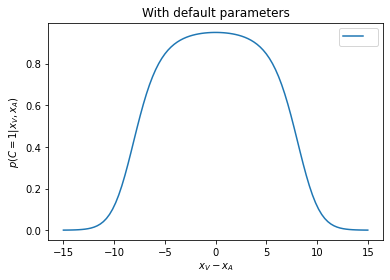

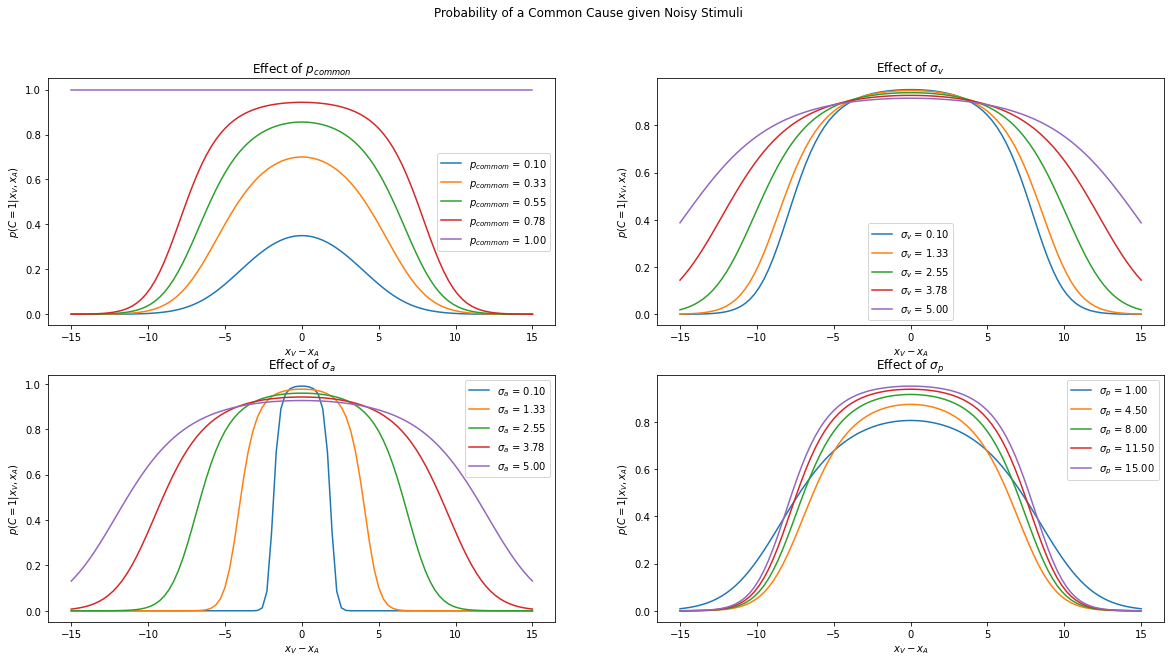

In [4]:
x_v, x_a = np.linspace(-15, 15, 100), 0

plot.plot_figure(x_v-x_a, model.probability_cause(x_v, x_a), '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='With default parameters')
plot.plot_probability_varying_parameters(x_v, x_a, model.probability_cause, '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='Probability of a Common Cause given Noisy Stimuli')

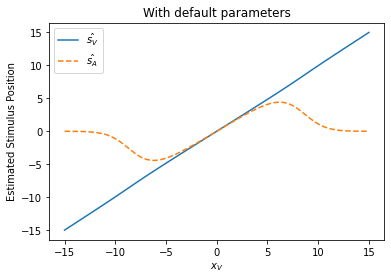

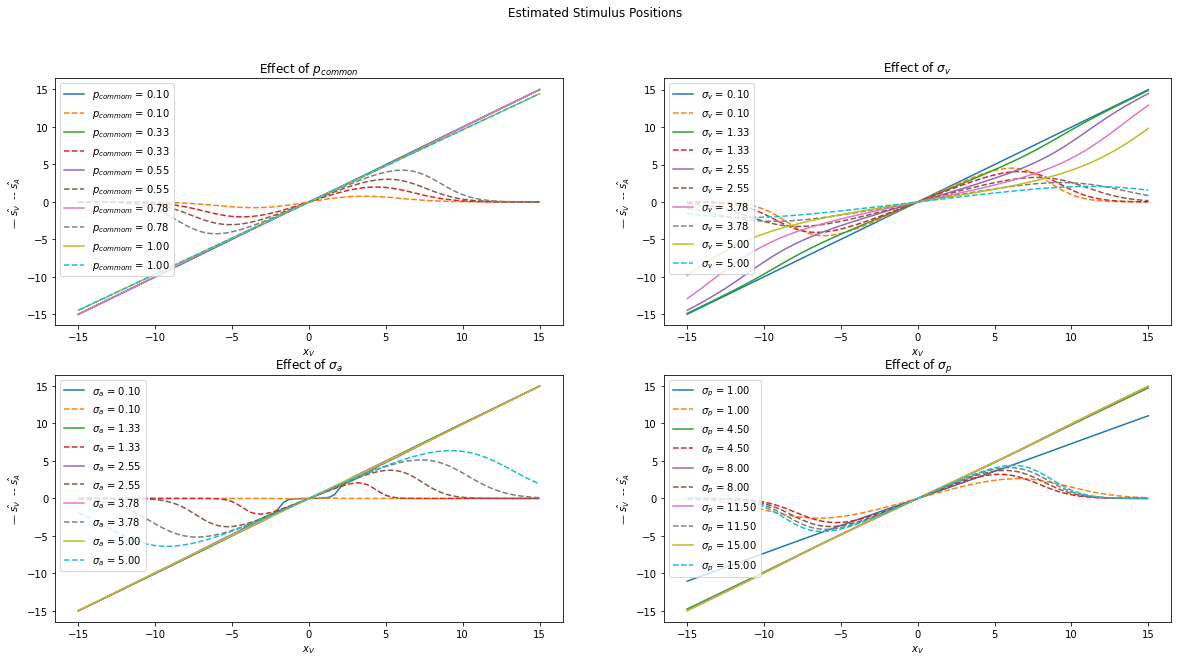

In [5]:
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='video'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_V}$', title='With default parameters')
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='audio'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_A}$', title='With default parameters', fmt='--')

plot.plot_estimate_stimulus_position(x_v, x_a, model.estimate_signal, '$x_V$', '— $\hat{s_V}$  -- $\hat{s_A}$', title='Estimated Stimulus Positions')

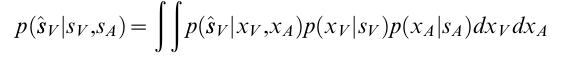

p($\hat{s_V}$|x_V, x_A) is gaussian (think of bayes rule formula).  Hence, the integral is also gaussian (product of gaussians), and hence can be parameterised for analytic evaluation.

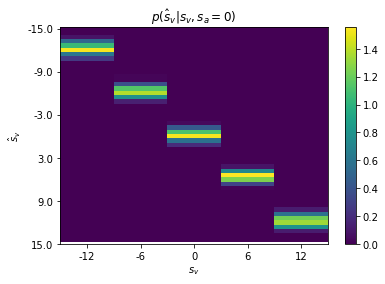

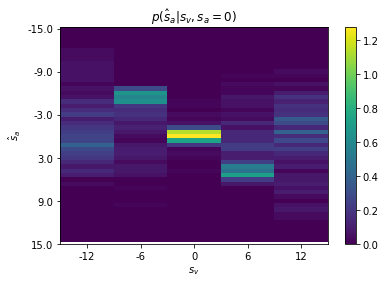

In [19]:
s_vs = np.sort(np.random.choice(model.s_v, size=1000))
x_vs = np.random.normal(s_vs, model.sigma_v) 
s_as = np.zeros_like(s_vs)
x_as = np.random.normal(s_as, model.sigma_a)

estimated_s_v, estimated_s_a = model.estimate_signal(x_vs, x_as, type='video') , model.estimate_signal(x_vs, x_as, type='audio')
plot.plot_heatmap(estimated_s_v, estimated_s_a, s_vs, model.s_v, model.s_a)

In [7]:
trials = int(1e4)
stimulus_pairs = model.generate_stimulus_pairs(trials)

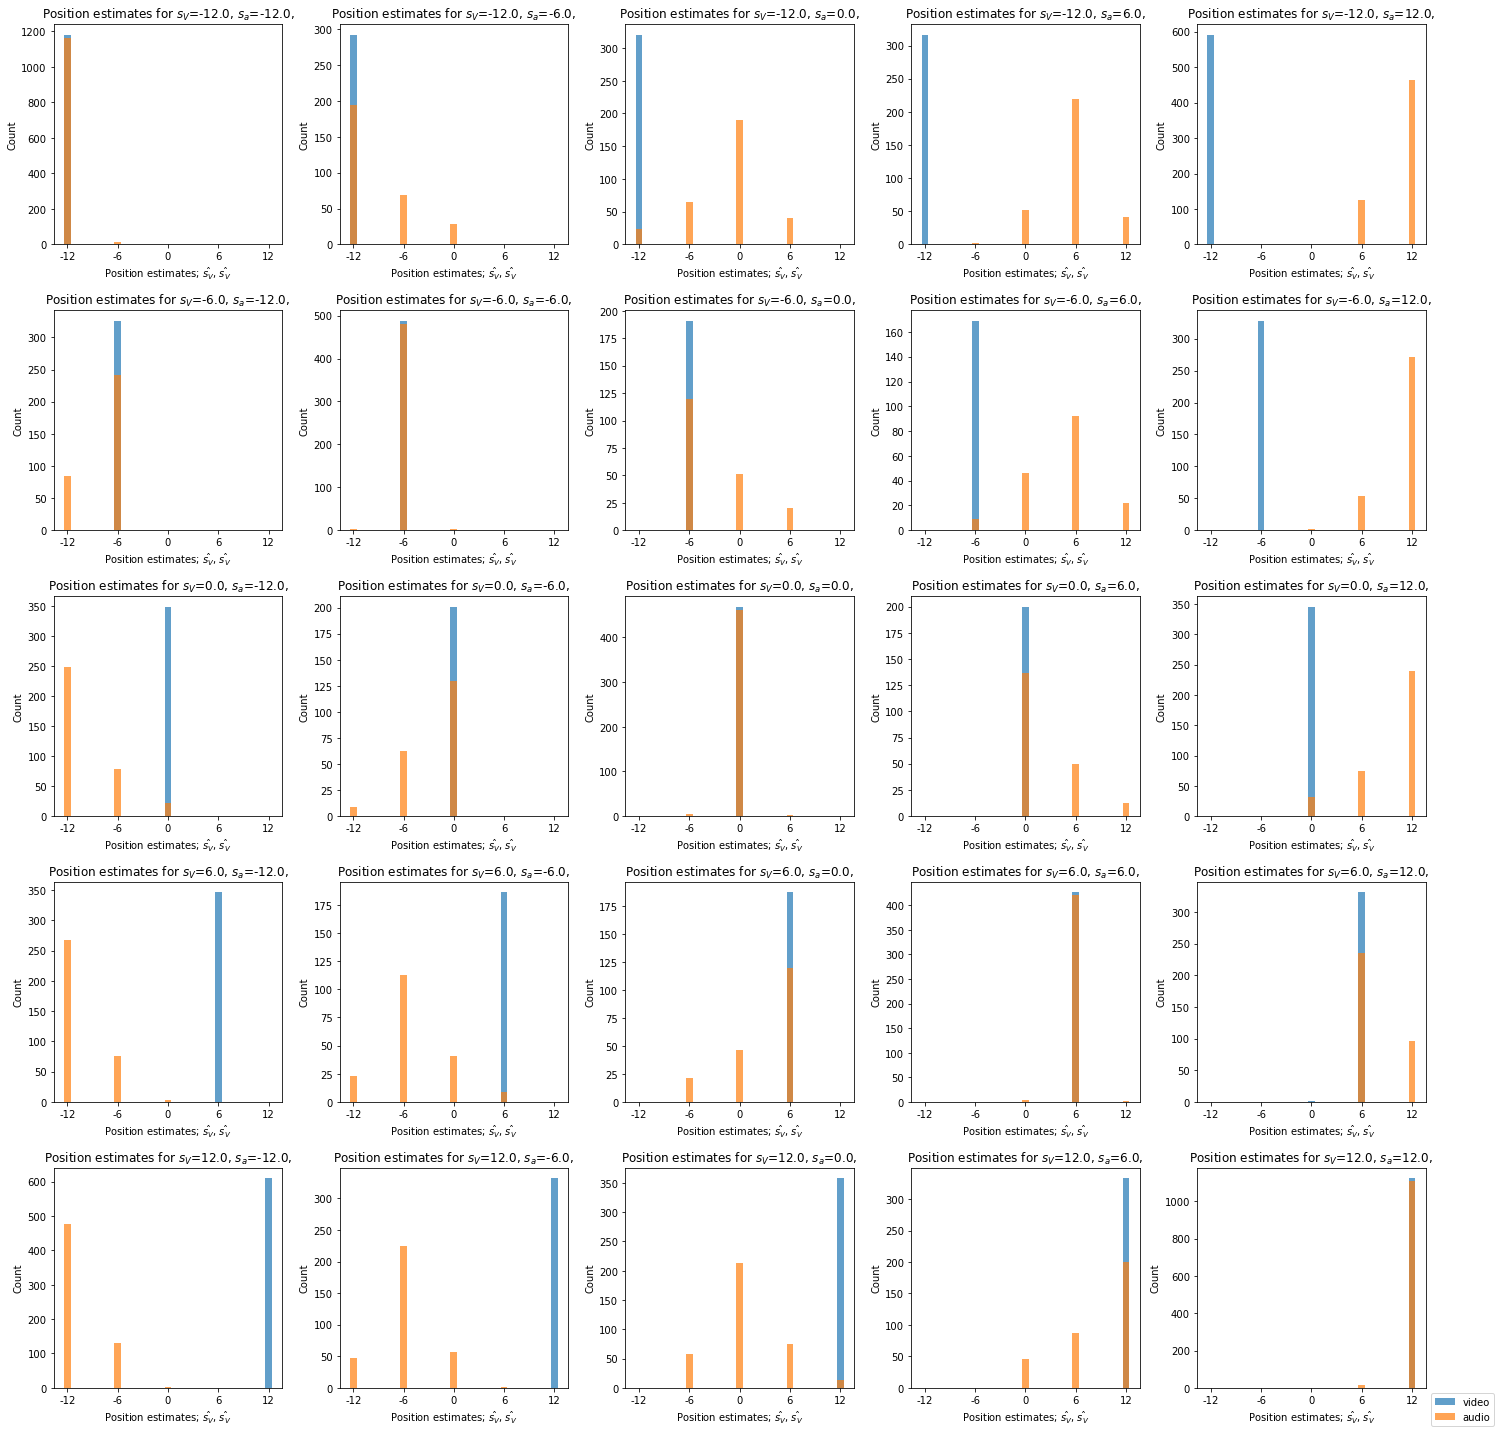

In [8]:
experimental_data = model.make_button_presses(stimulus_pairs, plot=True)

In [9]:
# experimental data with same parameters
log_likelihood_same = model.log_likelihood(experimental_data)
# testing function with different parameters
log_likelihood_diff = model.log_likelihood(experimental_data, p_commom=0.6, sigma_v=0.1, sigma_a=4, sigma_p=1)

print('Log liklihood of experimental data with, \n same parameters: %.3f \n different parameters: %.3f'%(log_likelihood_same, log_likelihood_diff))

Log liklihood of experimental data with, 
 same parameters: -31442.802 
 different parameters: -93502.174


Using 10 times the number of trials makes the probabilities more precise as we now have more data, and hence gives a better estimate of the log likelihood.

NaN and infinity in calculation of log likelihood as log(0) is undefined.The manifold is hence convex in the parameter space and has a global minimim, therefore gradient-based sampling methods can be used fit the model.
Adding a small epsilon ensures that the logarithm doesn't return NaN and infinity.

Parameter estimates using Brute Force: 
 p_common = 0.900 
 sigma_v = 0.010 
 sigma_a = 3.200 
 sigma_p = 15.558


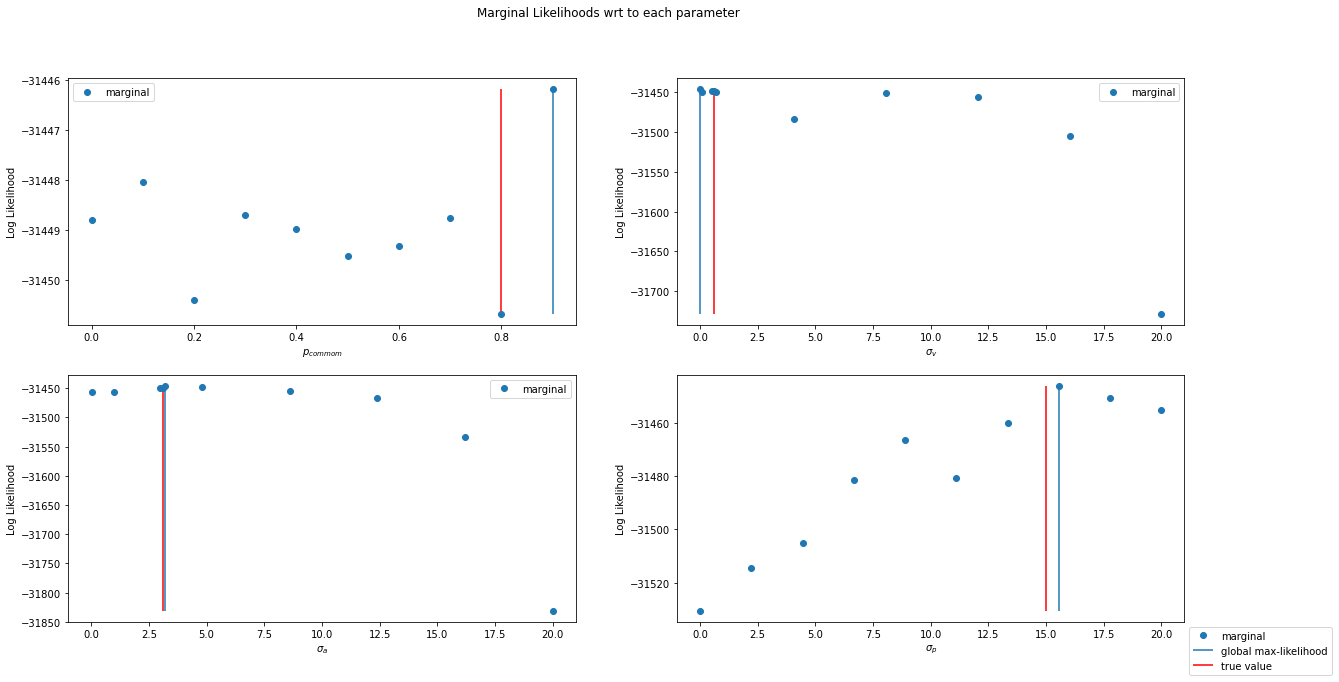

In [10]:
# Brute Force
likelihoods, parameter_combinations, parameters = model.brute_fitting(experimental_data)

idx = np.argmax(likelihoods)
parameter_estimates = parameter_combinations[idx]
true_values = [model.p_common, model.sigma_v, model.sigma_a, model.sigma_p]

print('Parameter estimates using Brute Force: \n \
p_common = %.3f \n \
sigma_v = %.3f \n \
sigma_a = %.3f \n \
sigma_p = %.3f'%(parameter_estimates[0], parameter_estimates[1], parameter_estimates[2], parameter_estimates[3]))

plot.plot_marginal_likelihoods(likelihoods, parameter_combinations, parameters, parameter_estimates, true_values)

[ 0.13593686 15.61045725  8.28983229  5.28374631]
[ 0.86906083 11.23014471  6.32622498  9.2860921 ]
[ 0.63209847  1.53270053  5.73875668 13.07700347]
[ 0.4414533  15.80193115  5.46124339 12.32722924]
[ 0.02124689 12.5829333   4.93907642 14.14618107]
[ 0.40332869  6.97631326 18.46779865  4.28622757]
[ 0.08159208 15.4048974  18.8780156   1.52853185]
[ 0.09797696  0.41111058  6.56197173 18.67016802]
[6.45855061e-03 1.47234535e+01 5.51652841e+00 5.33851311e-01]
[ 0.76519036 19.30673939 11.65742591 10.64168137]
[ 0.43786525  7.2210578   9.65040031 12.9969505 ]
[0.05831765 5.83795958 1.81829637 4.80712031]
[ 0.683526    5.00762514 16.94098439 17.49223696]
[ 0.34777169  7.53079726 18.07575643 15.66524537]
[ 0.02781974  5.39203737 18.91002577 12.46050401]
[0.15174802 1.42966235 5.3662237  8.23006915]
[ 0.60595571 13.03316847  9.4424883   3.52852133]
[ 0.939939   15.67116732  0.05622897  0.85812309]
[ 0.32353629 14.14835368  7.31569203  7.32664775]
[ 0.16094136  9.48722146  6.79895842 17.675078

  0%|          | 0/600 [00:00<?, ?it/s]

[0.92091175 8.290013   0.01879455 7.64148921]
[-0.19983735 12.1834128  -0.65275708 13.88033898]
[ 0.35255227  5.45852257 20.72945614  4.47610159]
[-0.09119436 18.81173263 26.75449199 -1.02359156]
[-0.4304675  -3.94992112  9.61657021 25.94908375]
[-0.06635982 17.19164982  4.91203095 -7.54598805]
[ 0.54635139  8.22971923  8.81405839 12.06332151]
[ 0.64514243  5.42048736 16.04454686 16.29008342]
[-0.36675001 -4.53807829 31.7389717  12.58763633]
[ 0.0258772  -2.48800144 -2.79482781  3.45579008]
[ 0.93295126 12.96044636  0.04248122  3.34930698]
[ 0.22884954 19.39418584 11.11918927  8.06713791]
[  1.17216379 -15.37526689  -9.06320057  19.21890922]
[0.30538658 3.74705915 9.26648052 9.68724778]
[ 0.20886582  3.91151768 17.82828802  3.15493641]
[ 0.38684796 14.18721146  6.43879013  5.32574694]
[ 0.29440324 16.59611079  6.89077081 13.2104621 ]
[ 0.08913084 13.704353    6.8645056   3.8815753 ]
[ 1.13792488 14.21065155  1.64201611 11.78300189]
[ 0.58796291  2.82526457  6.62759851 13.05881305]
[ 0.

  0%|          | 1/600 [00:02<20:16,  2.03s/it]

[ 0.19010961 15.81536641 -2.26483456  9.0270738 ]
[ 0.80683131 10.87697045  5.91336424  8.90614664]
[ 1.18942567 -0.82799344 25.73290184 18.16041274]
[ 0.10198824 13.15616666 30.01057973 14.92336986]
[ 0.07042634  5.78022708 15.26979974 10.80301542]
[0.19408484 2.23162251 4.42474748 0.0100222 ]
[ 0.657683   13.03414073  8.48532821  2.02565599]
[ 0.06745973 28.7935695  12.25330294  4.26062246]
[ 0.38867791 10.32598767 13.56639     7.70427715]
[ 0.37937575 13.58561385 15.6237328  12.91385463]
[ 1.03900479  5.85584526 -1.08908477  5.9385079 ]
[ 0.29733466  3.52061882 10.26574907  9.47956286]
[ 0.01883387 17.32064494  6.20538835 -0.84643182]
[ 0.3562367  12.76640845  5.17995368  9.98613057]
[ 0.15883721 12.76986385 15.4400954  13.77743292]
[ 0.56956477 10.59294155  5.23822817 11.09917656]
[ 0.62914802  2.83063497  6.15675714 11.99936873]
[ 0.36344634 17.11997412  7.53721417 10.76414869]
[ 0.16492719 10.3598482  10.71959329 14.81461303]
[ 0.38994982 10.53119958 15.38405401  4.328428  ]
[-1.

  0%|          | 2/600 [00:04<21:16,  2.13s/it]

[ 0.23534101  4.82865197 16.27674102  1.69832153]
[ 0.1015818  15.21037599  8.22650272  5.4156362 ]
[-0.03923242 10.39074397  8.12205578 21.30238367]
[ 0.39072452 10.65619132 16.49116807  2.27224489]
[ 0.42585216 14.41644632 11.26157989  2.26479005]
[ 0.12267796  1.1151421   7.70051443 18.3730257 ]
[-0.02424888 15.07674514  4.86980397 -0.04221942]
[0.2653805  7.52415406 1.39788566 4.46199411]
[ 0.5884884   6.29393073 16.25124261 16.3394685 ]
[ 0.35878111 11.39426893 13.77052059 10.73605536]
[ 9.97162184e-03 -9.95553140e+00  3.10399286e+00  1.08120082e+01]
[-0.07622948 32.90733897 15.18976952  4.2769111 ]
[-0.34855897  7.19501094 11.25800398 27.12960166]
[ 0.85475506 -0.4062779   0.87355653 20.69618934]
[0.42203703 8.75635668 3.5218752  6.66742756]
[ 1.07414376  7.62258826 -2.30146867  8.75377589]
[ 0.19569692 23.04643895  4.99205986 13.35736473]
[ 1.056722   12.38219576  7.85825757 10.78572004]
[1.04642434 1.87231241 4.14320458 8.76960138]
[ 0.45870097 17.56701222  2.13825778 15.005895

  0%|          | 3/600 [00:06<20:18,  2.04s/it]

[ 1.10338067  6.67728065  4.97440388 21.11494006]
[ 1.03489788 -8.10726467 -4.41570427 10.02106697]
[ 0.48223076 14.1439269   5.39025838 11.93634411]
[ 0.26157018 14.24010245  9.72629832  9.69034127]
[ 0.54532663  8.90360869 13.77830473 -3.7601946 ]
[ 0.95618558 22.05922222 11.88022634 15.35658275]
[ 0.30248448  4.59841536  8.8128759  15.30610832]
[ 0.51039686  8.02784729 15.40789363 14.43452602]
[0.13991493 4.68022526 6.04089971 7.56620721]
[ 0.53243541 12.54568968 10.72983015  5.67235011]
[ 0.21803445 19.59476792 11.26772868  8.07363735]
[ 0.12831449  9.39893433  6.9235762  18.200137  ]
[ 0.72583826 -1.29940678  4.0941602  19.05910323]
[0.31465351 9.1525717  3.87870761 6.4416879 ]
[ 0.21999285  3.19282238 12.25033613 10.20326484]
[ 0.29548043 18.45510064  6.56719287 13.62351323]
[ 0.15657612 12.70559719 14.55492942 12.71851399]
[ 0.07874858 16.25034098  5.59898839  2.38353723]
[ 0.9425046  10.94312366  5.36546164 10.07452582]
[ 0.47122892 11.3101247   9.64684509  5.53706296]
[ 0.0630

  1%|          | 4/600 [00:08<20:36,  2.07s/it]

[ 0.12722637 14.00700939  7.15740405  5.26633255]
[ 0.51467242 15.4139926   1.87690796 14.61093105]
[-0.04453816 15.0222996   5.51310219 -0.56030017]
[ 0.30996848  4.00828398 10.30850448 17.49340278]
[ 0.50222322  8.19772694 15.40627585 13.74871751]
[ 0.11820501  6.61168672 19.91324212 18.44328501]
[ 0.41971019  9.19588582 11.98004534 11.25790955]
[ 0.69297821 15.76270297 12.64762556  4.89775332]
[ 1.01743305 13.48073945 -0.48168574  2.92677615]
[ 0.22510339 18.74922951 10.99856502  8.43077003]
[ 0.4039092   8.54026226  5.13799694 14.42273344]
[ 0.62057473  0.98248058  4.17941893 16.64882755]
[-0.03181867 12.0911189  22.25900519 26.41543826]
[ 0.22912891  4.06467435 10.06585084  9.04760682]
[ 0.40630141 24.00804059 14.27792355  2.7136924 ]
[ 0.31926874 15.96722442  8.46874371 13.48238836]
[ 0.88388251 11.17012088  6.3401376   9.43647762]
[ 0.62945885  1.58487352  5.82699791 13.1017152 ]
[ 0.19894445  8.93507344 10.24807121 14.93615746]
[ 0.28809556 14.71323979 20.26011604 -0.96974166]


  1%|          | 5/600 [00:10<22:03,  2.22s/it]

[ 0.7397993   1.1515731   4.09607526 13.88277221]
[ 0.57311988 14.69659604 -1.11269535 18.58561882]
[ 0.13581645 14.14873106  9.91035868 17.25242456]
[ 0.45746788 12.9500296  12.14514643  1.15765227]
[ 0.24597404  6.24657215  4.23696532 17.37884615]
[-0.08822246 15.07324922  0.8338691  -5.8459661 ]
[ 0.62844808  6.03390214 17.58722119 19.50565311]
[ 0.32351162  9.56614657 15.10419338 13.89539034]
[ 0.4235527   9.12323972 12.02538255 11.32847553]
[ 0.8283699  18.12828169 15.78577287  4.34522288]
[ 1.12334079 16.42933053 -2.61864173  1.14217374]
[ 0.03509012 20.96789471 12.37723789  8.17838914]
[ 0.13725964  7.45433997  6.48759771 22.47802011]
[ 0.61552258  1.24223238  4.4931927  16.16338165]
[ 0.12208333 13.73444703 20.40410017 18.60421507]
[ 0.70289541  9.35451637  5.12626731 13.4236322 ]
[ 0.10144182 15.24080571  8.23332507  5.34869434]
[ 1.17345536  7.63651586 10.14787299  4.7124328 ]
[ 0.34274051  8.68299183 20.49670407  0.43635194]
[ 0.71244528 12.94054713  9.13264702 12.58760802]


  1%|          | 6/600 [00:13<23:48,  2.40s/it]

[ 0.10493392 14.28225137  8.03432476  5.54997178]
[ 0.78014994 10.18945005  6.71644662 10.23079271]
[ 0.65551321 19.91552154  2.06862146 20.24440788]
[ 0.48781155 17.79795531 14.3744533  -4.93045183]
[-0.13279949 15.19412887  2.31143149 -4.16457132]
[ 0.65233703  8.60471378 23.17877368 11.57217582]
[0.41673082 6.51444701 9.92570326 9.0602402 ]
[ 1.07579128 11.29244919 -7.46052366  2.42761976]
[-0.22100813 14.1104002   8.53884123 20.66651579]
[ 0.57361596 -6.61392753  0.08131581 22.25854069]
[ 0.17262906 11.86546649 16.60164134 16.52551875]
[ 0.51853176 10.74731255  9.69547188 10.54476431]
[ 0.32656799  2.37704353  9.21668446 11.15593711]
[ 0.35895075 16.31367428 10.42641818  2.53012623]
[ 0.25393329 17.85374833 15.29837071 16.25836465]
[ 0.9580934   9.97468943  1.41800313 14.1490239 ]
[ 0.72598807  1.73512422  4.41130166 13.37167147]
[-0.17766636 17.29209027 15.45360676 13.78912669]
[ 0.28687232  6.4957957  26.54708906 -4.1695879 ]
[ 0.3209588   7.90344896  6.15740702 15.78194529]
[ 0.

  1%|          | 7/600 [00:15<23:01,  2.33s/it]

[ 0.5674978  14.75333214  3.81492518 14.07049887]
[ 0.59526624 16.12313076  7.68891356 -7.27607867]
[0.30371794 9.22695747 7.01890468 9.1769146 ]
[ 0.65696925  2.03583278  6.91942534 12.7338161 ]
[ 0.51513074  8.75996219 12.45210598  9.92586385]
[ 0.77037548 18.83213004 11.52832579  1.3065471 ]
[ 0.18922481 25.31040888 12.01198362  5.24294443]
[ 0.12870634  9.31374899  6.90447763 18.3875349 ]
[ 0.48684274  2.62185062  6.26887471 15.81098432]
[ 0.50620616 14.85913438 17.62321729  6.77633874]
[ 0.42978985 12.12193352 14.86016412 14.53362842]
[ 0.40041014 15.86990934 12.68465799  8.76279966]
[ 0.26684196  0.39790328  7.11210865 10.27434372]
[ 0.37905358 14.82658949  9.56494925  5.31798111]
[ 0.37671868 13.94321395  7.87138038 13.537086  ]
[ 0.24591121 13.90877732 10.76299754 12.74988592]
[ 0.02184948 17.60715657  8.71117963  3.84235231]
[ 0.81102011 10.01917919  5.99890478  9.85167044]
[ 0.8921188   0.2662355   2.7877093  12.72168618]
[ 0.08739604 11.42098798 10.40867115 14.87553876]
[ 0.

  1%|▏         | 8/600 [00:18<25:03,  2.54s/it]

[ 0.72655101  6.86128923  6.53542197 13.25548948]
[ 0.67274658 15.00365271 -1.7182577  22.84264536]
[ 0.35086578  7.7873684   7.56938649 15.94329083]
[ -0.06766691  17.74797027   1.03612811 -12.60078198]
[0.283878   9.46331854 7.00787594 7.93734075]
[0.11655863 4.96842733 5.64350695 7.1170166 ]
[-0.1665337  23.41719579 12.49805177  5.09025694]
[ 0.1121467   9.38673466  6.89420615 18.60602127]
[ 0.43100921 12.05587263 14.86935747 14.52041507]
[ 0.47383834 10.40008042  6.63104878  6.73106737]
[ 0.50403463  7.03006459  8.1278673  12.95396219]
[0.39523098 5.88646469 9.02218315 8.50535846]
[ 0.37623779 16.24256609  7.69996223  5.58010686]
[ 0.34659488 13.68060397  8.13555888 13.67644348]
[ 0.11248698 17.52683037  9.82867866 13.89526549]
[ 1.15532758 10.61708454 -0.56129779 13.89472705]
[ 0.14313331 15.46788973  9.42582242  7.46209783]
[ 0.43047455 12.2386255   6.17413496  5.84819035]
[1.48516905e-02 7.56046424e+00 1.00979146e+01 1.82706483e+01]
[ 0.46387523  8.50849756 12.7999758   6.552177

  2%|▏         | 9/600 [00:22<27:12,  2.76s/it]

[ 0.19825973 14.63749337 21.10889242 20.40838831]
[ 0.36665931  4.43648871  8.31781829 11.64092743]
[-0.23829249 17.1611506   9.62224314  4.02812498]
[ 0.95726957  9.81176832  4.69959948 10.01822897]
[ 0.50718902 13.14112352  4.09249541 14.65689844]
[ 0.53298464 15.36460734 11.53155354 -1.72692639]
[ 0.24185001 12.89568823  7.4375186   5.13570004]
[ 0.36874349  8.00367158  6.49726857 15.37559106]
[ 0.3191072  10.82544662  7.41969078 10.79187171]
[ 0.41534038  6.98357934 11.81177716 14.59869446]
[0.16751661 2.86585285 5.98972538 7.91485035]
[ 0.75648771 11.78309644  5.34148414  9.07397728]
[-0.22397454  5.31939556  3.28315489 26.78993237]
[ 0.30118932 14.50483728 14.46674206  6.46541583]
[ 0.19494174 10.3100812  15.20627074 15.60111479]
[ 0.20116613  5.89339811 10.19022471 10.64663561]
[ 0.21135498 -0.37850904 12.74602495  9.35454647]
[-0.18536821 19.55600193 17.50622336 -3.29011945]
[ 0.59766438  3.77630612  5.01586522 14.45460446]
[ 0.10170379 12.45982729 10.15637397 12.97250915]
[ 0.

  2%|▏         | 10/600 [00:24<26:35,  2.70s/it]

[ 0.90768312  9.57503915  1.79132456 13.78711423]
[ 0.12050424 19.20132753  9.12775454  6.22033229]
[1.02334401 9.37561643 5.48337906 9.24800404]
[ 1.12127347 -0.34645352 -1.88815214 16.58307935]
[ 0.48141443 11.97870656  6.41646736 13.65542714]
[ 0.56180671 10.7536024  15.20752384 -5.49339798]
[ 0.20680441 15.95137655  8.83708793 -1.57905912]
[ 0.71849543 -1.21551933 12.65599729 20.42431854]
[ 0.6233516   8.04238976 13.38666816 18.43702969]
[0.19033199 3.40212308 6.97946536 8.41456219]
[ 0.99674815 16.18341894 12.74490277  2.11257248]
[ 0.15318168 20.30152396 10.90433539 10.6398389 ]
[ 0.24741379  9.82735395  8.0003861  15.74835287]
[ 0.29373077 10.29434478 13.98978659  8.36733813]
[ 0.44723148 11.64478488 13.28283194 13.20205103]
[ 0.46680193 10.43356411  6.74670914  6.8886349 ]
[ 0.39074816 14.72409808  9.98892332  4.55501372]
[ 0.12980588  9.99638131  9.25422375 11.73426817]
[ 0.38011825 15.77904128 11.58250834  0.41228788]
[ 0.30223346  7.66233696  5.05270592 16.64587542]
[ 0.7258

  2%|▏         | 11/600 [00:27<25:28,  2.60s/it]

[ 0.2360112   8.44793062 10.42025222 13.72244633]
[ 1.07170826  7.75744688 -3.24151147 17.91528951]
[ 0.15772571 15.33970442  9.33328387  7.90779479]
[ 0.41085029 11.68492997  5.58686001 13.98157294]
[ 0.28309877 13.32851482 18.50248793  1.7494113 ]
[ 0.21023034 12.75404361  7.13169235  5.09827824]
[0.29695495 8.52448293 6.84277459 8.46720302]
[ 0.36349786  5.94413425 12.27926478 14.94961359]
[ 0.44511965  8.93508922 12.12576097 11.12090901]
[ 0.97054534 10.79216433  3.88233926  6.67043923]
[ 0.60283867  5.61465386  6.44587862 13.60415298]
[ 0.27686081 11.51800728 10.89718369 10.59068119]
[ 0.43357676 11.33104424  7.13058648  8.76478165]
[ 0.17035164  3.03354591  8.75001562 11.8759887 ]
[ 0.12205911  0.05862725 13.21940382  9.82035731]
[ 0.31683818 17.59801805 11.2367069   2.5799036 ]
[ 0.2463277  11.22410465 12.13800589 13.18644941]
[ 1.30526837 11.13577906 -1.57409684 13.4264762 ]
[ 0.91353019  9.51889686  6.53777901 11.49325758]
[ 1.05532642 -6.10401733  1.60329996 16.20100679]
[-0.

  2%|▏         | 12/600 [00:30<28:18,  2.89s/it]

[ 0.21434574 13.37130906  8.57232772  9.91154475]
[ 1.17383384  6.46396243  4.07596403 16.90074238]
[ 0.61799153  3.34101413  6.99268984 14.15154242]
[ 0.41357493 10.91948703  7.5529234  13.14397875]
[ 0.35384753  7.3191669   5.43030317 16.53734849]
[ 0.29959434 13.07527564  6.31727103  1.9067065 ]
[ 0.41870836 15.4542278  10.30283828 10.28384889]
[ 0.57831841 10.48032837  4.98504553 12.15373443]
[ 0.24792547 14.77677078 13.55719401  7.09919978]
[ 0.06465074  8.02996644  6.54256027 19.77251723]
[ 0.30645294 10.54903139 11.09262599 11.4471659 ]
[ 0.27254166 11.43712567 15.72879855 11.20956627]
[ 0.48005902 10.92931852 10.35467151 11.83348825]
[-0.04643942 -3.76058585 13.06859713  7.5159924 ]
[ 0.37319321 14.30921408  9.25204207  8.18161324]
[ 0.20685891 12.1939851  10.42177289 11.78056435]
[ 0.21217983 12.01293366 10.21427492 12.63992616]
[ 0.05215576 14.72407446 22.88546412 -1.82000661]
[ 0.51565412 10.26708384  8.76145278  5.4882679 ]
[ 0.34984513  7.89287456  6.05506022 15.76880761]


  2%|▏         | 13/600 [00:33<28:34,  2.92s/it]

[1.16965986e-03 1.59104238e+01 6.32962284e+00 8.58572558e+00]
[ 0.91618582  9.64679903  6.57510268 11.45673167]
[ 0.43314019 11.74795629  7.58578612 13.54068554]
[ 0.45380099 13.37258907 11.00606885  4.22847723]
[ 0.23759578 12.7691152   7.8356615   6.21168727]
[ 0.52834229 12.9438229   9.69956182 11.33467252]
[ 0.41273733  8.4519651   5.42498476 16.69414736]
[ 0.317367   10.49679653  7.16578406 11.40266574]
[ 0.8006087  16.73630024 12.47046715  4.30300119]
[ 0.05940272 17.03289451 15.05686045  2.95937667]
[-0.09394006  9.13632157  8.37730484 19.52535014]
[ 0.48111908  4.22840191  7.2686292  14.91336942]
[ 0.4168758  10.91109924  7.33032974  9.0653872 ]
[ 0.31526563 12.18450482 11.95517524 12.63660348]
[ 0.25143506  4.14890544 12.10493202 10.36504815]
[ 0.02128153 12.00589236 13.26918654 11.54178425]
[ 0.84965662 -4.32365368  1.23177176 14.96093543]
[ 0.19032913 11.36282646 12.25922525 18.16643549]
[ 0.24042926 14.93359261 22.8068447  -3.16953043]
[ 0.2749984   9.39118924  6.06017572 1

  2%|▏         | 14/600 [00:36<29:11,  2.99s/it]

[ 0.83240667  8.01362208  2.71177362 14.59228349]
[ 0.04755152 14.90420172  7.45351024  8.70509738]
[ 0.43067187 11.79102327  7.44012031 13.63049795]
[ 0.17138804 12.17794313 10.19289577 12.76272796]
[ 0.11245574 17.86377754  8.62230204  1.39214435]
[ 0.51857547 12.300801    9.90319784 11.67599934]
[ 0.44838483  9.31451641  7.16178904 15.70695577]
[ 0.6453572   7.27770923  9.51127686 13.70964615]
[ 0.4436676   6.82614876 13.53126862 14.05748053]
[ 0.49622218  8.69401195 10.78956109 14.72731856]
[ 0.23703628  6.21440521  4.9941281  12.86342888]
[ 0.76329824 11.80304626  5.31319023  9.03786059]
[ 0.1524947   9.8245558   7.74827081 16.95659788]
[ 0.06233957  9.78389998 10.39479201 13.06428437]
[ 0.45307213 10.08290847  5.99627135  9.48662793]
[ 0.3492631  13.55423144 13.83804677  5.54417998]
[ 0.37569569 13.80780634  8.16339703 13.60552157]
[ 1.06473866  9.00062222  6.26428339 10.81584549]
[ 0.91727679 -2.95403782  2.77451465 16.59371484]
[ 0.16275103 15.34436039 21.54328929 -2.31588053]


  2%|▎         | 15/600 [00:40<30:15,  3.10s/it]

[ 0.69902508 11.53250903  4.34200807 13.90463115]
[ 0.19486016 12.86045211 11.23062133 11.84588302]
[ 0.52296611 12.01744756 10.32233169 12.18577588]
[ 0.35550202  6.34577798  1.23388202 20.82656444]
[ 0.37466783 11.02542621  8.69837704 11.4087918 ]
[ 0.65265172  7.54301743  9.40285744 13.55023823]
[ 0.24839572 10.19660594  9.24757894  7.87812713]
[ 0.15375345 16.31676486 16.59334325  3.82404049]
[-0.02578349  9.24841035  6.96909529 19.74723837]
[ 0.69097623 -5.6887679   4.98567497 23.67281695]
[ 0.14710931 15.76664005 10.04023507  6.83528432]
[0.5583576  9.19246591 6.46270491 8.47428535]
[ 0.33494065 11.4847652   7.95047769 19.29581069]
[ 0.21747321  1.49125462 12.237529   11.67960702]
[ 0.33030147 13.42091504 12.8188137   5.65752583]
[ 0.24986023 11.75534377 10.55928312 11.4211775 ]
[ 0.78605685 10.53710648  5.41357239 13.83012375]
[ 0.19575081 13.45288165  8.46688684  9.77451824]
[1.44284143 7.98145151 5.32890055 4.35388561]
[ 0.65948588  2.22429404  4.46517194 14.47481449]
[ 0.5972

  3%|▎         | 16/600 [00:43<29:19,  3.01s/it]

[ 0.40957207 13.27303664  7.60895331 13.63157494]
[ 0.33644042 12.83570189  9.26465457 10.81126344]
[ 1.06616494  9.20783268  5.56118661 11.65989826]
[ 0.68772854  2.48057319  4.59180796 14.57896837]
[ 0.34620083 14.96939857 23.24273615 -5.05079269]
[ 0.39274531 13.48949681 10.26757171  5.50688265]
[ 0.2323552  12.60281689  7.7908459   6.797681  ]
[ 0.43442456  8.89289967  7.05023869 15.2778879 ]
[ 0.65435677  7.51880275  9.38816897 13.56631875]
[ 0.461135    5.84990757 12.17187174 15.04022237]
[ 0.5700791  13.37997883  9.77501901  9.547097  ]
[ 0.8138774  11.81148586  4.9650358   8.34804218]
[ 0.24818329 14.37415023 13.1577071   7.67512535]
[ 0.45411283  6.49948761  6.76541396 12.65545381]
[ 0.45898883 11.06022014 10.75747443 11.93405226]
[ 0.3503727  14.13560895 13.54053932  3.80473182]
[ 0.60632598 10.93591059  5.56626096 13.43734437]
[ 0.16303462 11.70288664  9.4450193  17.22449119]
[ 0.26539637 10.69552802 10.63272992 13.15301238]
[-0.05930138  0.9840804  -1.33883137 26.76047342]


  3%|▎         | 17/600 [00:45<28:12,  2.90s/it]

[ 0.13293882 -0.85522029 12.41942211 10.43249113]
[ 0.09395361 12.33985415  4.93874447 20.08654433]
[-0.12353177  9.11269918  9.4583223  16.15481612]
[ 0.19793392  9.69658452  7.06671541 17.22745914]
[-0.04800735 14.00568321  9.61157396 13.27877641]
[ 0.25808675 14.26937945 21.02561612 -1.13397435]
[ 0.23395215 12.52550319  8.04340628  7.21947565]
[ 0.60559105 11.84463296 11.14117226 10.83486501]
[ 0.7972323   5.73180203  9.76926065 14.66401349]
[ 0.49510216  3.45704576 11.16954435 17.9023904 ]
[0.23944181 9.92821668 9.24584239 7.57983473]
[ 0.68638301 14.50844784 11.90583856  5.88210512]
[ 0.50596239  6.9414267   8.57775395 10.28334407]
[ 0.12544306  9.35733567  6.91947472 18.41159069]
[ 0.45478051  3.0830134   5.71551442 16.01714713]
[ 0.22124242 12.36270057 12.59940994  9.06032148]
[ 0.49652541 11.40985289 10.73272042 11.27165831]
[ 0.40558717 10.37628812  7.30385023  2.47627629]
[ 0.35063592 13.84194882 13.38999233  4.20055302]
[ 0.30965519 12.21431615  9.8624498  10.91840287]
[ 1.

  3%|▎         | 18/600 [00:49<29:43,  3.06s/it]

[ 0.25137699 12.53195587 11.06835799  7.98131839]
[ 0.69746961 10.32295857  8.57588682 11.68507471]
[ 0.9446509  -3.06541892  1.7206455  14.36531506]
[ 0.17822699  9.5013103   6.21501906 20.87866972]
[ 0.22482109 12.45787074  8.04131007  6.78646282]
[ 0.39515671 11.87624857 10.10489326 12.66249069]
[ 0.41362175  8.97750338  5.8321735  15.06381517]
[ 0.29153299 11.47008392  9.88911171 12.90095616]
[ 0.36109184  8.62580519 11.39589801 13.26648284]
[ 0.89137634 15.43904774 12.85674394  5.06456538]
[ 0.31175347 11.30632229 11.31039943  9.78590858]
[ 0.10686838  9.00529646  6.32310387 19.50528976]
[ 0.23975091  5.6867565   1.98610262 17.47977635]
[ 0.08177507 -9.3285109  15.98206724  9.9589428 ]
[ 0.31945533 13.64353396 14.08664583  4.85550024]
[ 0.82354165 10.01676263  2.90241423 12.96012312]
[ 0.06056958 11.21507838  9.67345532 14.80050822]
[ 0.32334074 13.98603265 27.06653894 -2.72955844]
[ 0.34849702 12.17858818 10.05923617  9.73787061]
[ 0.376168    8.9420449   6.28087726 14.66514495]


  3%|▎         | 19/600 [00:51<29:06,  3.01s/it]

[ 0.50134002 24.12511133  4.40433319 15.27906279]
[ 0.31658794 11.5875756   9.6980178  11.6781874 ]
[ 0.74136686 13.04579389  7.76590391  9.85822555]
[ 0.58563476 -5.07952355  5.98739412 13.69473887]
[ 0.16325394  8.72081873  5.55967926 20.25875431]
[ 0.22440684 12.67508253  7.64258415  6.90460413]
[ 0.59845517 12.01088145 10.73355594 13.62007641]
[ 0.37070379 10.94863262  8.3730234  15.68200823]
[ 0.65041134  8.60312923 10.4038565  14.05305759]
[ 0.84214473 17.30338831 14.7301817   1.47206264]
[ 0.47019082  8.37920966  8.25008543 10.05251375]
[ 0.3563042   5.25337324  7.31146675 15.50154405]
[ 0.26823254 11.15303427 10.33389597 11.61919976]
[ 0.32467557  8.74714598  8.63449293 18.65833281]
[ 0.40780867 12.31461513 10.89113355 10.77199165]
[ 0.2236592   2.57093391 -1.40565752 21.03334249]
[ 0.34445178 14.27661907  8.34805241 12.27943469]
[ 0.2590715  14.67457958 10.08196892 11.3476769 ]
[ 0.2627057  12.82759661  9.59910606 10.63699898]
[-0.11277676 15.78931755 15.77767181 12.74431737]


  3%|▎         | 20/600 [00:54<28:17,  2.93s/it]

[ 0.30660921 13.35862583 15.77350688  0.71586982]
[ 1.07236743  8.06791333 -2.99289663 17.62586622]
[ 0.26778547 11.28217564 11.13814122  9.01057663]
[ 0.80621107  3.83583623  3.28132342 13.96377415]
[ 0.21115775  9.6199627   6.96564646 17.19462716]
[ 0.3567989  12.62327728 14.17814924 11.97039382]
[ 0.39977412 10.61342528  8.44309261 17.48095299]
[ 0.55522862  8.22193095  9.10379816 14.69922938]
[ 0.4824108  14.6525737  10.68494711 14.60696436]
[0.27772322 9.95629545 9.11568247 8.1656417 ]
[ 0.16114189  9.6158827   7.19536643 17.66019497]
[ 0.26268404 11.08732918 10.345042   11.73864048]
[ 0.33538321 13.76321341  9.48892382  2.87168494]
[ 0.4358214  11.57701333  7.20510636 17.28437536]
[ 0.51964496 11.7022607  12.03737286 13.77676007]
[ 0.23270045  4.16610865  0.15453185 17.61031936]
[ 0.33791932 13.16120704 12.20779691  6.54944478]
[ 0.34678796 11.00020868 10.67760653 11.64727423]
[ 1.02788488 11.99002882  5.80586212 10.13169803]
[ 0.05032836 11.2037875   9.66645012 14.84455054]
[ 0.

  4%|▎         | 21/600 [00:58<29:48,  3.09s/it]

[ 1.46179414  7.20965482 -7.72929001 20.96206771]
[ 0.22783224 16.64399438 11.52191694  8.65907117]
[ 0.66707415  3.6458059   4.83989492 14.69658822]
[-0.1908548  12.61132167 10.77251646 12.06576493]
[ 0.02241568 14.93770054 21.92100436 -2.88632466]
[ 0.35011865 11.89992813  9.71024554  9.94684607]
[ 0.33754745  8.6724157   5.60014764 16.93413926]
[ 0.42012536 11.65913748  6.88958414 19.69823933]
[ 0.45943859  9.6301931   9.1741454  14.0390299 ]
[ 0.68806415 10.14723202 13.72218037  8.09817604]
[ 0.14441198 11.30049125 11.66624614  2.29997312]
[ 0.70985556  9.1629322   4.89406865 12.06477827]
[-0.14009965 14.06613271 19.51328825  8.29647242]
[ 0.26617251  5.61063199  2.26734629 17.51925296]
[ 0.19556235  0.40278756 12.36593059 11.43750879]
[ 0.32452539 14.32044614 13.08574334  4.23013549]
[ 0.24040152 11.94717986 10.85744564 11.11496195]
[ 0.80200891 11.41716221 10.05857775 10.34189774]
[ 0.10442654  7.75618472  4.74268474 22.53412146]
[ 0.05210911 13.85218454  6.43150728  4.56668858]


  4%|▎         | 22/600 [01:01<29:18,  3.04s/it]

[ 0.46613984 21.31845767  5.37566865 14.83272146]
[ 0.87223716 10.00153595  2.36519223 13.39039722]
[ 0.31528492 13.03466112 10.81073865 10.11037677]
[ 0.73216856 11.512887   10.04506028 10.9987405 ]
[ 0.62030763  3.73056892  4.5737054  14.88532391]
[ 0.30535785 19.19229207 19.30487736 -2.06973445]
[ 0.27372472  9.23490981  6.50371747 16.46981341]
[ 0.11682423 12.19952197  7.75597173  5.86971153]
[ 0.35838224  8.84388026  8.36033202 13.86004387]
[ 0.06021493 10.41429058  7.97638513  4.62491625]
[ 0.66354786 14.2995701  11.79285002  6.34598996]
[ 0.28925797 10.7466351   9.79156109 12.98451227]
[ 0.02580584  8.01330213  5.48656945 22.25138695]
[ 0.48708851  1.6036485   5.63048322 16.34667278]
[ 0.32086686 11.22168861 10.27802456 11.92757069]
[ 0.30750514 15.20618025 14.36553883  1.91079347]
[ 0.28438266 11.91546615 10.43276195 10.85805512]
[ 0.65252476  9.82957203  3.68752366 15.39496902]
[ 0.24364551  9.740618    6.98974839 16.72459384]
[ 0.16988916  9.46063817  8.70049428 14.67776906]


  4%|▍         | 23/600 [01:04<29:17,  3.05s/it]

[ 0.57393969 17.13041147  9.07784978  9.47903591]
[-0.34782273 11.02329315  9.44536599 17.09025774]
[ 0.28923196 12.95419424 11.27068503  9.02709774]
[ 0.43719678 11.8504592   9.06439998  9.12684438]
[ 0.42434822  9.95338168  8.68957236 17.79246595]
[ 0.47278231  9.95181508  7.08952087 16.4646114 ]
[ 0.54196455  8.0243679   5.6984813  19.18430188]
[ 0.0733848  14.59162485 11.54661386 13.84306109]
[ 0.69177753 13.1531649  11.07383204  8.26007105]
[ 0.12595594  9.35048518  6.91711764 18.40780986]
[ 0.50446321  1.00115981  6.00041463 16.14084489]
[ 0.3224046  10.72224509 10.13127076 12.42817714]
[ 0.18991184 12.66645199 13.09700384  5.51762318]
[ 0.41694185 12.16131008  7.55501856 17.40203472]
[ 0.22674718  2.6869689  11.92153132 11.84818938]
[ 0.37077145 16.93913177 16.57135324 -2.91403182]
[ 0.56075308  9.91291995  4.95012929 13.68800633]
[ 0.35298391 12.20140133  9.96052124 11.61945751]
[ 0.71343249 11.2813933  10.08855985 11.04727627]
[ 0.8592799  -0.44429171  3.54697775 13.00200312]


  4%|▍         | 24/600 [01:07<30:36,  3.19s/it]

[ 0.24566177 11.78689757 10.57591328 11.39123564]
[ 0.26457972 11.95304988  9.67001596 12.49604967]
[ 0.66605563 11.0637508   9.8592854  12.15271833]
[ 0.20024724  9.31909284  6.93073101 16.61740354]
[ 0.32050108 10.42801981 10.04189142 11.38325395]
[ 0.36901235 14.34053672 11.25499027  2.58130038]
[ 0.45309816  9.95245176  7.73979952 17.0042662 ]
[ 0.35083362  8.61622512  8.55383342 13.74909218]
[ 0.52507383 10.93008403  9.92960931 13.17272089]
[ 0.32369731 10.75204808 10.72172174  1.26622015]
[ 0.71780132  7.40912263  2.17790421 13.73704464]
[ 0.44629872 -1.35189059  6.6884191  13.32979077]
[ 0.31781349 11.17165746 10.19570517 12.16444794]
[ 0.2807993  17.29434956  7.79682593 19.61236129]
[ 0.07399724 12.63342501  9.36670201 12.29767282]
[ 0.26077778 12.1065419  11.05043132 10.48699258]
[ 0.65981455 10.44680971  5.05926445 14.06991866]
[ 1.19570078 -8.6607968  -1.88235707 16.18151529]
[ 0.23392193 10.16003571  7.6066679  14.53992252]
[ 0.3001544  12.58075135 15.27660016  4.96072107]


  4%|▍         | 25/600 [01:10<29:47,  3.11s/it]

[ 0.26393296 11.97448731  9.6790461  12.48664506]
[ 0.86548879 10.61915329 12.15838448  7.70758189]
[ 0.69761273  2.32867506  4.71038247 14.40563159]
[ 0.2958971  12.95748869 11.26742564  9.01439772]
[ 0.33595194  8.83917854  6.0130274  16.4232514 ]
[ 0.39562918 11.93626838 10.11744962  8.50783891]
[ 0.42847138  9.06429007  6.09728188 16.62904279]
[ 0.41607135 12.0170775  10.42792809 16.65286932]
[ 0.4840625  10.53241101  9.42471727 15.05369105]
[ 0.30789581 10.11435723  9.05888346 11.23075953]
[ 0.72487285  5.84827437 -0.23941671 15.22532142]
[-0.33713723  6.23290923  3.61134479 26.54250651]
[ 0.60239587 -0.80672131  5.39540328 14.72624903]
[ 0.34642495 14.11668606 14.4440623   9.3838075 ]
[ 0.27833674 12.8366037  11.6157923   8.42423084]
[ 0.92756739 12.69210079  4.56629937 14.08806601]
[ 0.21415185  9.56044851  6.03171478 19.2575925 ]
[ 0.03791181 11.17744849  9.6502328  15.07241003]
[ 0.32107037 12.9498056  18.57296605  0.53035862]
[ 0.37955881 10.46557009  9.32278185 15.42633039]


  4%|▍         | 26/600 [01:13<29:09,  3.05s/it]

[ 0.09267096 16.53131696 15.27608691 -1.14826359]
[ 0.18679009 11.49773459  8.32638015 13.67590465]
[ 0.05770996 10.7249362   8.9913242  15.88274999]
[ 0.28983332 12.39863978 13.64999279  7.14690443]
[ 0.15401578 16.49618508 13.42380015  7.56989986]
[ 0.47834841 11.9256758  10.39987252  5.99045556]
[ 0.3707188  10.71882471  9.90572939 15.20896308]
[ 0.4091825  11.00314876  9.06480205 16.61313561]
[ 0.70434953 14.21765635 13.4395436   5.97488205]
[ 0.31795155 11.05757297  9.99218273 12.56963263]
[ 0.49571329  7.87674525  6.09742602 16.62185021]
[ 0.35493395 10.91923745  9.89659286 10.89852014]
[ 0.58234224 11.02717807  7.83225388 14.53771125]
[ 0.23061591  9.30305562  7.49248608 19.94967205]
[ 0.24838599  6.98435419  3.5543696  17.9380188 ]
[ 0.24021115  5.0236601  11.59608726 11.64477951]
[ 0.32870252 18.12992802 17.60417708 -6.58648341]
[ 0.31318433 11.38328227  8.73064539 13.27420253]
[ 0.22694782 12.39064792  9.58644309 11.53417852]
[ 0.77911554  9.98565688  8.79120125 14.77540406]


  4%|▍         | 27/600 [01:17<30:44,  3.22s/it]

[ 0.64316256  9.73011673  3.8610096  15.32203828]
[ 0.08160642 14.54455411 12.28978741  8.08423064]
[ 0.61222033 10.44469811  8.91463619 15.60449622]
[1.82042709e-02 8.60414193e+00 6.03089562e+00 2.09930433e+01]
[ 0.18688105 10.80231945  8.1427402  16.10419647]
[ 0.30007872 13.62982841 11.9698314   7.00590238]
[ 0.31039893  8.71471841  6.0087657  16.34953885]
[ 0.32446184  9.98279989  8.0058113  14.00709682]
[ 0.54302013 10.05655376  9.6814849  13.81159501]
[ 0.24655507  9.88461578  8.96312729 13.62051451]
[ 0.71976378 13.36608761 11.27279246  7.43284137]
[ 0.49971416  2.01078383  6.16171706 15.64941585]
[ 0.2708735  11.57343123 10.45298485  9.46321588]
[ 0.24291999  6.59481408  2.93988326 18.02600011]
[ 0.23212024  4.69139816 11.36798942 12.4644859 ]
[-0.17043054 15.644991   17.97700269  9.3238954 ]
[ 0.68967025  9.87118937  3.47533573 15.16576525]
[ 0.76271041  0.60754709  3.76490467 13.97606614]
[ 0.30564075 11.17861289 11.03237666 10.32642853]
[ 0.49124276 11.2778187   9.58647086 1

  5%|▍         | 28/600 [01:20<29:51,  3.13s/it]

[ 0.65056077  7.93848176  7.60263627 15.1896202 ]
[ 0.06172365 10.60678812  7.54905982 17.93966788]
[ 0.28044397 11.21321151  8.86792937 10.79144611]
[ 0.35002367  7.02965231  2.76812557 19.72721119]
[ 0.37081938 10.72049595  9.90887347 15.20650593]
[ 0.40689282 10.99548483  9.05024628 16.75187985]
[ 0.4600288   9.29257382  7.53762114 15.55440519]
[ 0.36341197  6.93056959  7.65808135 14.66927205]
[ 0.61784062  8.86378257  9.18285927 11.10468072]
[ 0.90358623  4.2404246  -1.23664517 11.15853793]
[ 0.42665862  9.72240008  6.91888636 16.13377744]
[-8.04006516e-03  7.84776021e+00  8.74809766e+00  2.27842025e+01]
[ 0.20841972  1.52215196 11.26315555 13.62282169]
[ 0.32457342 17.59832289 16.92455133 -3.15812817]
[-0.02719887 11.83281038  9.85410118 11.69160153]
[ 0.25504289 11.70690442 10.52647886 11.49176823]
[ 0.20983164 11.58971224  9.09759891 13.96520777]
[ 0.78641085 -0.13186881  3.54737964 13.71687644]
[ 0.23463223  9.64667081  6.78420402 17.71013113]
[ 0.12262123 11.61673969 12.296609

  5%|▍         | 29/600 [01:22<28:18,  2.98s/it]

[ 1.14567971 10.28762462 10.23794936 13.34159574]
[ 0.24571224  9.84980387  7.23862681 16.97142851]
[ 0.13388909 13.47100517 14.90886076  3.88884343]
[ 0.03185726 21.17979806 16.72682799  2.96478827]
[ 0.34108259  8.85166206  6.01769972 16.43466353]
[ 0.40318752  8.52697082  8.96334429 15.31982707]
[ 0.35610514 12.5639054   9.86050876 17.00905533]
[ 0.57118656  8.87856364  6.73567724 15.63346648]
[ 0.26121093  9.53242839  8.14677746 15.02941333]
[ 0.04896998  8.01205519  5.45486227 21.48049217]
[ 0.8563674  10.94267063  5.5018562  14.451162  ]
[ 0.28277856  9.24010743  7.12465423 19.07422084]
[ 0.1681457   8.25043527  4.841952   17.99037339]
[ 0.40638495 12.82649178 11.36757262  7.86875196]
[ 0.42516225 10.12341371  7.38302235 12.28295794]
[ 0.56808262  9.7209957   4.97880472 16.21699761]
[ 0.22654446 12.39533831  9.58554732 11.52386871]
[ 0.97828702 -4.84682588  1.74213025 12.3369422 ]
[-0.345297   10.72663258  6.53939384 19.66622338]
[ 0.51060712 11.65109281 11.88157354  8.26377938]


  5%|▌         | 30/600 [01:25<28:48,  3.03s/it]

[ 0.26568465 11.93683121  9.68092723 12.48916691]
[ 0.52242538  9.75231575  7.91963718 16.04920522]
[ 0.18681206  9.91220404  6.99573508 17.77361257]
[ 0.302955   10.73178379 10.74034844 11.1934386 ]
[ 0.310204   13.26978146 11.50671109  7.76480135]
[ 0.56309255 11.2259193   9.88384794 11.16032355]
[ 0.54403882  7.95467441  5.6803121  19.13536176]
[ 0.24420531  8.24641507  6.82022099 17.92999053]
[ 0.7382668   4.3244443   2.89590298 13.84576312]
[ 0.34178461  7.16977658  6.80247975 16.93140598]
[-0.19038159 13.30173379  8.16847419 20.94531295]
[ 0.34433806 12.10439185 11.00785538  8.57491518]
[ 0.28516048  9.52997253  7.46477164 18.22727293]
[ 0.02631948 10.0735538   5.09886861 18.94793783]
[ 0.2205142   1.95794013 11.0393214  13.74266518]
[ 0.65524213 10.15181499  3.77567274 16.03321512]
[ 0.97543875 -7.75392512 -0.79700958 15.80616084]
[-0.02740817 11.03634365  7.58268345 17.82493855]
[ 0.34822024  8.6723224   5.66236941 15.98750346]
[ 0.4047147   9.31788909  8.9123696  19.15672855]


  5%|▌         | 31/600 [01:29<29:05,  3.07s/it]

[ 0.34549424 12.56671678 13.06876074  7.95184324]
[ 0.57064221 10.48329437  9.16008787 15.01146657]
[ 0.14029799  9.95896654  6.44598392 18.11395633]
[ 0.45127446  8.40769484  4.85429782 15.6125278 ]
[ 0.55298523 11.14982921  9.33771131 11.70334272]
[ 0.25557618 13.43879525  7.30377429 18.00137492]
[ 0.51601962  8.431039    6.22012538 26.0207763 ]
[ 0.55646388  4.64298745  5.80551667 17.36232499]
[ 0.41424734  8.55091704  6.14895086 17.1635171 ]
[-0.16063577  3.8081283   2.97271576 26.67669196]
[ 0.3906679  17.57140987  6.78259119 18.94157509]
[ 0.37006786 10.93536438 10.0177597  10.53509455]
[ 0.43778514 10.90375499  7.01850917 15.57000214]
[ 0.25014259  7.82679546  4.74188604 24.14430515]
[ 0.17337857 -0.46345437 11.55623046 13.28036605]
[ 0.32731363 14.41002006 13.17447869  3.97695392]
[ 0.87532955  9.98310271  2.37643236 15.32626785]
[ 0.14234554 12.29719073  9.73257761 12.95315665]
[ 0.74218163  0.99110171  3.92395346 14.15881578]
[-0.09231997 12.59931938  8.16431602 17.94783711]


  5%|▌         | 32/600 [01:31<27:23,  2.89s/it]

[-0.03521941 14.94859621 14.6748276  11.65860023]
[ 1.05563822 11.53091138 10.8422347  12.83345081]
[ 0.71448814  1.48267966  4.11137537 14.35502768]
[ 0.2142689   9.11529302  6.91176939 17.84842356]
[ 0.05972508 10.73055576  7.49845957 17.99847991]
[ 0.1173874  14.78797558 15.01655572  4.36347505]
[ 0.38373633 10.34588968  9.0472986  15.52905156]
[ 0.48680914 10.09983375  7.33268457 15.89026417]
[ 0.54813811  7.85770795  5.63729311 19.25359533]
[ 0.4308171   9.13775848  6.88872055 15.97496905]
[ 0.83256209 11.75311933 11.94505359 11.68926785]
[ 0.92902041 15.75406688 13.32852726  3.13437407]
[ 0.55218622  1.0330205   6.34106404 14.7010989 ]
[ 0.32445852 14.04051281 12.83424458  4.94813674]
[ 0.03696121 11.59104621  6.73560445 14.69947617]
[ 0.26666551 11.10118473  9.51447242 12.5618078 ]
[ 0.30757596 10.64668398 10.75361089 11.17748536]
[ 0.41006394  9.73770339  7.06710092 14.72300948]
[ 0.51761514  7.71359761  8.42156255 12.72186315]
[ 0.3831912   7.77332674  3.15649489 17.95201244]


  6%|▌         | 33/600 [01:34<28:27,  3.01s/it]

[ 0.79866898  9.97520874  2.89075244 15.59875887]
[ 0.58727897  9.5955875   8.23772329 17.90699051]
[ 0.21558161  9.48678308  7.00293583 18.58788451]
[ 0.03932894 10.73045279  7.2266097  18.56911933]
[ 0.30861789 14.05015693 12.53810859  5.64454606]
[ 0.34443858  8.88583405  6.03738364 16.46646021]
[ 0.5222953  12.37283487 11.31254674  9.17291298]
[ 0.38596793  8.05788939  6.02609115 17.17999615]
[ 0.34102509  6.85392663  6.26253563 17.19399272]
[ 0.66631288  8.0110094   3.32733853 14.21869727]
[ 0.42457503 10.66018552  8.42647329 13.9703215 ]
[-0.11952925  8.67600743  6.38981211 20.49257864]
[ 0.58833766 -4.46309242  6.17842334 12.38268088]
[ 0.37074308 10.8712787   9.31914711 11.85556034]
[ 0.27148216  4.10155883 10.09611939 14.15818549]
[ 0.33954887 13.31198942 12.06107636  7.09698818]
[ 1.22088709  9.52489894 -3.73804423 15.48081893]
[ 0.26603851 11.95424927  9.70447617 12.43275342]
[ 1.22693549 -5.53640103  1.74690547 11.15652259]
[ 0.30681416 11.10774382 10.71900615 11.09426516]


  6%|▌         | 34/600 [01:37<27:32,  2.92s/it]

[ 0.22110723 12.43566652 10.37923038 11.49858023]
[ 0.64880738  9.42348801  8.40339725 18.17418846]
[ 0.73187193 -0.87303413  4.39429098 14.4042218 ]
[ 0.21482896  9.51939843  7.0077403  18.60518376]
[ 0.03413092 10.46798432  6.37645625 18.72047884]
[ 0.30777815 14.19585482 12.65218162  5.31065366]
[ 0.23678273  8.29399303  5.72841644 15.91834183]
[ 0.42650982  9.58555409  8.03031774 18.26791278]
[ 0.43649767  8.2609591   5.99726353 18.74486905]
[ 0.38539318  8.04786899  6.02359412 17.18033107]
[ 0.41951085 10.64612642  9.22264561 13.89467843]
[ 0.37534298 10.90397447  9.34428893 11.80404275]
[ 0.32323835  9.88930455  5.1896188  18.86667246]
[ 0.26270999  9.60193792  7.55732505 18.57697011]
[ 0.37585738 18.20231545 17.08999333 -4.52534274]
[ 0.42110906 12.32421976 10.77173352 10.15981908]
[ 0.30918543 11.53787695 11.03587712 10.17526012]
[ 0.572695   13.00164582 12.86282543  6.71852696]
[ 0.39810724 10.59969027  8.13871386 13.00714031]
[ 0.37416143  9.25183977  7.10778806 16.82896425]


  6%|▌         | 35/600 [01:40<26:52,  2.85s/it]

[ 0.07014143 10.41585927  6.19311626 17.43819962]
[-0.03305155 -3.62356579 13.19145738 10.8922464 ]
[-0.27970296 12.02059972  5.90325166 14.14196914]
[ 1.51654089 10.4654775  -2.12008269 12.1562911 ]
[ 0.289713   13.07923899 11.56907528  8.83005594]
[7.77227329e-01 5.68015025e-03 3.68559764e+00 1.37681575e+01]
[ 0.3110116   8.74385365  6.30922324 16.69569244]
[ 0.5301579  12.74965266 11.7996464   8.29572615]
[ 0.42364688  9.96523844  8.61307615 18.13119716]
[ 0.49176617  8.1216325   4.54663023 18.44254642]
[ 0.37414677  9.45746551  7.38855325 16.17772488]
[ 0.9156939  14.87716739 12.9880449   3.40373664]
[ 0.59436341 13.77605215  5.04735313 13.52484444]
[ 0.37358733  7.85588341  6.94937428 18.18237714]
[ 0.28117399 10.27428532  6.72948666 16.67640275]
[ 0.3339228   9.96521928  5.59760127 18.36380192]
[ 0.46883662  8.56059189  7.86249526 18.58421448]
[ 0.23995804  4.52890425 10.87242547 13.30612013]
[ 0.26967318 13.47850928 11.59950241  7.07815921]
[ 0.96942233  9.93253158  1.93042181 1

  6%|▌         | 36/600 [01:43<28:55,  3.08s/it]

[ 0.24131915 11.65949695 10.47800615 11.6437199 ]
[ 0.25078243 15.8214043  16.82747773  0.43476304]
[-0.06141089  6.61374263  2.779309   27.65039424]
[ 0.34125538 11.89095696 11.14056255  9.66601218]
[ 0.35171071  6.84868167  3.65197883 19.99924579]
[ 0.51950391  5.75185534  4.16161962 29.18887479]
[ 0.45913774  8.1043839   4.38576679 19.16480598]
[ 0.33528072  7.41402326  8.08302054 16.07263868]
[ 0.50017965  8.9688732   6.66622808 17.21320772]
[ 0.22674059  8.47448644  7.17014846 17.59427566]
[ 0.58967682 12.17370044 10.39834263 10.4128458 ]
[ 0.62714722 -1.98326431  6.05754979 14.23272842]
[ 0.39847709 10.5204978   7.61994752 15.14492526]
[ 0.47126747  8.5562845   7.87581153 18.59198307]
[-0.35400389 16.20078272  7.48660447 19.38838499]
[ 0.17399017 10.30782808  5.75933014 16.69020387]
[ 1.19013924 10.03439912 -0.4159398  14.90328606]
[ 0.62151848  9.57192333  8.21024445 17.65364218]
[ 0.68200859  4.26479518  5.74742767 13.32915694]
[ 0.10873883 10.42258359  7.19953225 18.20979556]


  6%|▌         | 37/600 [01:46<27:47,  2.96s/it]

[ 0.2022702   9.48399118  6.96334597 18.61852002]
[1.50931459e-02 1.19685850e+01 7.22285110e+00 1.86982695e+01]
[ 0.33865054 15.08591058 13.8925488   2.68847132]
[ 0.27472773  9.39683716  6.5068715  16.90618395]
[ 0.52568406 12.43108721 11.50155709  9.07792118]
[ 0.37021741  9.21370559  7.01566394 16.7101289 ]
[ 0.42610008  8.99756433  6.86427983 15.62663176]
[ 0.73616911 11.73146574  9.82659601 11.18582736]
[ 0.54962635  9.06826693  5.41130004 14.6847719 ]
[ 0.18724805  9.50692067  7.32275648 18.08873912]
[ 0.65768893 -3.6198486   4.30106956 16.83620829]
[ 0.27151448  9.47307464  8.61560029 16.4137541 ]
[ 0.4051113   9.37196833  5.31312212 18.87230822]
[-0.3215744  10.66339874  7.96962556 18.41620412]
[ 0.21520677  9.6348512   5.63366251 16.512131  ]
[ 0.16715888 12.30336642 11.12092672 11.29736243]
[ 0.29863783 15.27237747 14.58398631  4.02013352]
[ 0.62460817  9.5723858   8.21655863 17.65054661]
[ 0.63558083  3.49938878  4.63176538 15.14583409]
[ 0.30070917 11.5392216  10.67330795 1

  6%|▋         | 38/600 [01:49<27:58,  2.99s/it]

[ 0.37135471 15.16634788 14.36315016  1.1963141 ]
[ 1.48463946  9.64085363 -0.47973243 13.74783225]
[ 0.36116376  9.83673748 10.15782934 10.38462956]
[ 0.555941    9.28706165  7.99747573 17.78388511]
[ 0.71007967  1.33656017  4.14908962 14.3425002 ]
[ 0.33691241 14.99171848 13.7932696   2.87817652]
[ 0.38130925 11.11547743  9.47565943 13.33692903]
[ 0.34657871  9.33862646  5.00929726 16.41247907]
[ 0.73876858  8.31574084  7.68202555 19.69392296]
[ 0.43875593  8.83841827  6.76896441 17.54500493]
[ 0.2682313  10.95496379  9.68017246 11.9237872 ]
[ 0.74089477 11.74805799  9.83388904 11.14626316]
[ 0.53714226 13.78263235  5.11215382 14.51956942]
[ 0.15377548  9.66885645  6.06039986 17.32569597]
[ 0.29944404  9.69370043  7.27219784 17.28500475]
[ 0.41422442  9.21586111  5.92307999 18.64562044]
[ 0.35513185 10.31654893  8.05188073 14.67079504]
[-0.70636603 10.88123938  9.76965724 19.41074327]
[ 0.16418714  9.56821564  7.09598685 18.90136915]
[7.26964479e-03 1.08234049e+01 7.62351485e+00 1.80

  6%|▋         | 39/600 [01:52<28:50,  3.08s/it]

[ 1.52374944 10.76801003 -2.26907591 13.03683477]
[-0.12535457 14.74049059  8.77902712 21.37729094]
[ 0.1513704  10.40110367  8.1800768  18.95954605]
[-0.36186399 13.39264141 19.49941459  5.06555243]
[ 0.29264271 17.72100321 16.98864475 -4.15406852]
[ 0.45330803  8.65807768  6.79347833 17.07309381]
[ 0.32566301 10.7616881   8.64041482 14.31243207]
[ 0.39674884  9.56653373  8.36469739 18.44269444]
[ 0.23038199 13.0101416   7.39956251 18.66741509]
[ 0.43603464  8.83227808  6.69835937 17.41472022]
[ 0.26886863 10.99306628  9.71872881 11.83668312]
[ 0.63898968  8.9600939   4.93993043 13.84534565]
[ 0.55467507  1.72728147  6.23858902 15.67298494]
[ 0.42154036 10.26340355  7.98633729 15.57984254]
[ 0.2668077  10.36552585  6.04088917 17.75746687]
[ 0.20326129  2.29120301 10.77201404 13.972374  ]
[ 0.21288928 12.2270817  11.33154299 10.40942085]
[ 0.19362435 14.56207508 13.84557365  6.66559705]
[ 0.54626315 14.41392239  9.14247617 19.36109747]
[ 0.76769776  0.02258554  3.23750842 14.92834386]


  7%|▋         | 40/600 [01:55<27:32,  2.95s/it]

[ 0.14425583  9.74315805  6.36994855 17.32256996]
[ 1.27334724 10.39060536 -0.37206701 13.95954034]
[-0.20743609 22.26041382 18.665193    5.01347147]
[ 0.33224745 14.8228988  13.56722067  3.43639184]
[ 0.55207529  9.17686286  6.27873416 17.78207895]
[ 0.41445303  9.20954683  7.07810075 16.80811181]
[ 0.05684943  8.17203825  6.93344276 16.669121  ]
[ 0.73008427 11.69976901  9.79179536 11.27230817]
[ 0.56908993  8.9864886   4.99725746 14.11831031]
[ 0.57976805 -3.33535446  5.1784657  13.90076215]
[ 0.40815681  9.71224154  8.17656531 17.2546368 ]
[ 0.40778987  9.42301762  6.25557893 18.0662446 ]
[ 0.17746327 11.22740152  8.10001628 11.91644716]
[ 0.71251808  7.42775728  7.96675152 17.85428628]
[-0.04524178 11.33434254  5.18767958 16.88699636]
[ 0.30126745 15.20410697 13.99593305  1.83698496]
[ 0.13928546  9.8382393   6.48604347 17.44673149]
[ 0.25029934 12.82549298 10.55446469 11.10892259]
[ 0.19707971 15.94760629 15.73760275  1.58411022]
[ 0.6801611   8.26280296  6.60701357 21.08922843]


  7%|▋         | 41/600 [01:58<26:18,  2.82s/it]

[ 0.2067303   1.85309304 11.0308171  13.77541169]
[ 1.13129466  8.68411291 -3.54934031 17.78157031]
[ 0.50597043  9.40230311  8.01015532 17.9707577 ]
[ 0.11699233  9.44536701  6.55757878 18.75185524]
[ 0.36651532  8.26537183  5.35450897 18.96440427]
[ 0.36429656  9.29816179  7.07470791 17.58658301]
[ 0.43877026  8.20666322  4.95620004 19.033159  ]
[ 0.61453021  7.49665972  5.74750803 23.85368302]
[ 0.37534622  9.80689061  8.2453864  14.87300047]
[ 0.40823031  9.58727963  6.79373545 17.05536709]
[ 0.29595833  8.83712354  6.82049539 17.77471617]
[ 0.63350087 11.00972617  8.71011246 13.33699956]
[ 0.61117402  6.51524699  4.79777707 14.75351676]
[ 0.07404861  9.32058974  6.94956578 17.92921469]
[ 0.27916092  9.51397605  6.12913186 17.46936609]
[ 0.48469523  7.96144875  7.38913056 19.80181528]
[ 0.08203443  9.35086068  6.78623227 16.95586262]
[ 0.24738106 17.90207225 16.90983143 -6.38849512]
[ 0.28798105 13.14686082 11.65778489  8.68904069]
[ 0.81301375 -1.42152304  2.56296832 14.18791129]


  7%|▋         | 42/600 [02:00<26:31,  2.85s/it]

[ 0.76377631  9.80783349  3.18132181 15.79148041]
[ 0.11338624  9.51319347  6.53106316 18.66151067]
[-0.22896224 11.30948936  7.22677609 18.03688093]
[ 0.21200346 10.33100047 10.35902577 12.70768729]
[ 0.39254206  8.85124106  7.87266625 17.19712828]
[ 0.30613958  9.89779567  7.37238464 16.57037672]
[ 0.20080983  8.09499077  5.67049742 18.2157629 ]
[ 0.68806404 11.41950867  9.44435278 11.89577482]
[ 0.94364302  7.95145574  4.79860356 12.46622377]
[ 0.02222923  9.20067527  7.14616767 17.89116204]
[ 0.66002187 -3.18792885  5.96535665 13.89659316]
[ 0.43248628  9.52117529  6.11861385 18.40652209]
[ 0.4594887   8.85154991  7.38253351 17.97376967]
[ 0.33689414 12.70238291 11.05144836  8.44943645]
[-0.01985901  9.78443057  5.40210625 17.02745127]
[ 0.26155338 11.58400142 10.34126308 11.96466154]
[ 1.05548844 14.16062627  1.37275117 15.14395027]
[ 0.41256401 14.9968106  13.77280588  4.37513752]
[ 0.26232654  8.82871129 12.30571098 19.70429829]
[ 0.63591348  3.75683952  4.37017966 16.29574694]


  7%|▋         | 43/600 [02:03<26:30,  2.86s/it]

[ 0.40382163 12.60044574 10.0041964   9.77537238]
[ 0.4740794   9.15927062  9.1986394  18.31930864]
[ 0.12813391 10.33443671  6.79332429 17.92038358]
[ 0.3187199  11.78959542 11.18766689  9.88745696]
[ 0.3603529  12.13955361 10.18184286  9.8508948 ]
[ 0.31303997  9.04734831  6.95227529 17.94257906]
[ 0.50183141  5.59394784  2.92944077 25.19437256]
[ 0.31500426  9.67651652  7.16178866 16.72033166]
[-0.18400066  8.46962684  6.37189459 19.82807639]
[ 0.44047215 10.01732711  8.9883915  17.01006556]
[ 0.14744596  7.44657029  2.63825754 25.18395234]
[ 0.24273879 10.84956454  8.87647822 13.34212863]
[ 0.15829933 16.4781255   6.00772871 20.23230195]
[ 0.29337686  3.22490087  9.48625705 15.96760618]
[ 0.03079417  9.36202672  5.70735661 18.49889939]
[ 0.27875605 11.25301921  9.81073105 12.6527078 ]
[ 0.8079877  -0.48804511  3.10247034 14.733125  ]
[-1.14767297e-02  1.38755034e+01  4.48098816e+00  2.05303242e+01]
[ 0.35462259  9.21170041  6.55044206 17.33368348]
[ 0.36405801  9.2969945   7.074138

  7%|▋         | 44/600 [02:06<25:53,  2.79s/it]

[ 0.93280704  9.93089019  2.16165309 15.25217914]
[ 0.4116177   9.3608064   7.51925808 18.07009108]
[ 0.26520287 12.30985627 11.50235423  9.30301817]
[ 0.35796229  9.22490031  6.5181689  17.28478014]
[ 0.36471063  9.2941247   7.0749149  17.58732102]
[ 0.37766495 10.21506284  7.78725486 14.36210717]
[ 0.90714125  8.20735368  5.84774666 17.66624392]
[ 0.48933115  8.87586032  7.30781614 19.83087597]
[ 0.33007157  6.2543216   5.11572747 17.46616589]
[ 1.46822781 10.34165836  8.51373257 13.51461682]
[ 0.47163163 10.88808263  8.07040054 11.06236857]
[ 0.01941213  9.1476052   7.61940672 17.69127128]
[ 0.27389528  8.95606927  5.32164931 19.00609812]
[ 0.59342727 -0.51766804  5.86587045 14.87454822]
[ 0.43039363  9.92745472  5.77670698 18.99144057]
[ 0.0664505  10.43593888 10.80387813 14.69683697]
[ 0.36150719  9.04396253  7.29743032 17.97947402]
[ 0.40742141 11.28499379  8.80628152 11.42607571]
[ 0.6837543   2.01303968  4.17401728 15.60600766]
[ 0.16921188  9.42319687  6.48496547 18.37029042]


  8%|▊         | 45/600 [02:09<27:20,  2.96s/it]

[ 1.01139797 10.05713149  1.55954487 14.96807659]
[ 0.22791081 14.083251   13.09189361  7.31250163]
[ 0.53331783  9.39279519  8.111786   17.66607602]
[ 0.97085969 -4.61050155  0.02326441 16.99403421]
[ 0.13312452  9.5136872   6.50555065 18.64573807]
[ 0.15229081 10.21830048  6.74830673 17.85504114]
[ 0.25954505  9.06357081  7.39928534 18.53225326]
[ 0.49319271  9.12872216  6.70848237 17.8596458 ]
[ 0.54487392  6.77306416  5.09457136 25.62775429]
[ 0.34836352  9.89501517  7.81855325 16.75974152]
[ 0.20296948  8.25342375  5.91588887 17.85056228]
[ 0.99130637 10.01697414  7.75646405 15.48194776]
[-0.10691567  9.16428531  7.17338086 18.00560782]
[ 0.72907306 -4.71244074  5.88965773 13.68114483]
[ 0.34740805  9.63362546  6.09218503 17.82215215]
[ 0.14065451  9.34058887  6.15791578 18.1987007 ]
[ 0.6930535   9.40067528  4.35116958 16.29587011]
[ 0.32390599 12.66232875 14.12751746  4.8187701 ]
[ 0.34983223 16.21592761 15.05908077 -0.21489698]
[ 0.35444456  9.21600851  6.54697511 17.33854304]


  8%|▊         | 46/600 [02:12<26:41,  2.89s/it]

[ 0.34701231 11.76352467 10.37994395 12.26658876]
[ 0.84670813 -1.85089591  2.35603521 14.29050422]
[-0.12561143 11.28881141  6.34610901 16.78416238]
[ 0.3382852  15.96188845 14.9998514   0.39899903]
[ 0.41062364  8.81395851  6.83435193 18.40658794]
[ 0.14967064  9.10067878  7.38695307 18.05160893]
[ 0.60832538  9.13103768  6.29701637 17.78836507]
[ 1.16507883 10.30990115  8.1842524  14.80699353]
[ 0.761323    8.85235497  4.8679064  12.75495788]
[ 0.23320439  9.55165289  5.81891227 17.41714339]
[ 0.56682512  3.52118646  6.70976189 16.01008823]
[ 0.43131631  9.74831895  5.92745975 18.73353969]
[ 0.34621606  9.9009192   6.52470016 17.91384631]
[ 0.29391807  2.92772689  9.47424611 16.09031258]
[-5.97201064e-04  9.12263166e+00  5.18787938e+00  1.92390130e+01]
[ 1.07567105 10.17495551 -0.05061593 14.29244904]
[ 0.55331133  9.19594692  6.92049046 16.49329248]
[ 0.11272398  9.51198136  6.52445837 18.66020679]
[ 0.24207684 11.46006974 11.34454998  9.92637178]
[ 0.6007771   9.09743156  7.191303

  8%|▊         | 47/600 [02:15<26:14,  2.85s/it]

[ 0.25698409 15.78914632 16.27255478  1.01010787]
[ 0.73401822  7.81872319  6.00416184 22.5223001 ]
[ 0.85379168 -1.90351669  2.70027654 14.30732194]
[1.18092955e-02 7.84652664e+00 2.96851036e+00 2.52014557e+01]
[ 0.17615033 10.8141139   7.32901801 17.63500926]
[ 0.3743668   4.26028078  0.35871386 29.59689674]
[ 0.31652806 13.50979949  6.45373009 18.2433911 ]
[ 0.76232497  7.34393275  2.69360431 23.44720406]
[ 0.49567278  9.01592777  7.48172652 19.56712564]
[ 0.38712913  9.30858996  6.38503188 17.72570689]
[ 0.97784013 10.1046309  11.99336417 15.60098731]
[ 0.25596103  9.63795906  5.86173022 17.58804796]
[ 0.45352927 10.02092264  8.84743329 16.88699166]
[ 0.29240931  2.85163015  9.50837445 16.06036796]
[ 0.50579527 17.38042753 17.63915525 -4.57552379]
[ 0.28769202 10.81077395  9.01503418 13.93114671]
[1.17503954e-02 1.72618884e+01 1.51974230e+01 7.24209476e+00]
[ 0.28834626 16.31503526 14.60864053  2.27779741]
[ 0.4323662   8.35621093  7.25016691 19.03669678]
[ 0.27214759  9.06209608  

  8%|▊         | 48/600 [02:17<25:39,  2.79s/it]

[-0.03245587  9.24626132  5.0765518  18.37436963]
[ 0.93513021  9.93580253  2.13426334 15.2299449 ]
[ 0.2954283  13.96296567 13.00583868  6.61929822]
[ 0.41364988  4.50975236  4.42415553 16.64382962]
[ 0.17369672 10.65033015  7.18218379 17.64782071]
[ 0.17944465 18.6043729  17.37185683 -6.36423498]
[ 0.37755457  9.17843554  6.59676308 17.28691219]
[ 0.72483793  9.04508687  6.18210998 17.4367797 ]
[ 0.56646242  8.92907859  7.54097263 19.86341239]
[ 1.62592894 10.59120576  8.47859029 13.69773425]
[ 0.62372006  8.77285955  5.57341642 15.69894229]
[ 0.68010542 -5.96924648  5.00067411 11.91931616]
[ 0.45375982  9.97166559  5.69505024 19.24543698]
[ 0.27261055  9.99583091  7.65594887 15.68722383]
[ 0.29513168  3.0108062   9.43402431 16.11160554]
[ 0.40690417 16.68351866 16.48511188 -2.39045967]
[ 0.30106946 10.83222898  9.43878363 13.58004574]
[ 1.13632855 10.16298952  0.58645936 14.32962742]
[ 0.48237051  9.73308523  8.41351955 16.57041685]
[ 0.07719911  9.39826825  6.30668912 19.22694427]


  8%|▊         | 49/600 [02:20<24:52,  2.71s/it]

[2.64841456e-02 5.77099837e+00 7.87041708e-01 2.81830325e+01]
[ 0.10931593  8.36684992  5.4441786  18.11843401]
[ 0.28694963 13.32926287 11.83265088  8.30361034]
[ 0.65857463  2.73450228  4.54330214 16.26527833]
[ 0.18517235 11.98024757 12.30462308  9.13687046]
[ 0.33310881 14.67990149 13.37119927  3.840413  ]
[ 0.38650077  8.7954349   6.52210792 17.13760087]
[-1.75710260e-02  8.95742997e+00  8.07617220e+00  2.07282819e+01]
[ 0.40473887  9.01242677  6.54833667 17.93441302]
[ 0.50718863  8.54836102  5.94168271 17.75699525]
[ 0.13035203  7.87798584  5.5484956  18.30275244]
[ 0.19655177  9.18380767  7.15855475 17.44455531]
[ 0.20393657 10.04299082  4.67221398 17.94646713]
[ 0.42087839  9.98236204  8.77461894 16.86506046]
[ 0.24110688  9.56486735  5.82293196 18.62210815]
[ 0.38410717  9.47492802  7.6752211  16.60694928]
[ 0.34746686  9.59169122  6.24691633 18.30023157]
[ 0.38157379  3.94888018  8.44819491 15.99510326]
[ 0.53969076  9.28701217  7.9580029  17.78363567]
[-0.18402716  9.059007

  8%|▊         | 50/600 [02:23<26:52,  2.93s/it]

[ 0.54482915  9.24321917  7.45568772 17.16315279]
[ 0.16426855 10.58102979  8.03421261 15.72760349]
[ 0.22357106 10.8441572  10.77196397 11.74067035]
[ 0.3007007  12.32383332 10.89085386  9.98673005]
[ 0.4748641   9.2731519   5.93501085 16.26001578]
[ 0.37465522  8.79147848  6.33575953 19.02625531]
[ 0.51451351  9.13494171  6.34746633 17.82091483]
[ 0.44320867  8.72865379  8.37562148 20.32955723]
[ 0.3808806   9.83962777  6.74940597 17.48073919]
[ 0.32823256  9.56901357  5.55772551 17.25971024]
[ 0.32929336  9.97796176  9.10225917 17.05319217]
[ 0.61701607  9.09736538  5.0122933  19.52315513]
[ 0.35958275 10.6760491   7.89619911 16.81619718]
[ 0.24002709  3.56396452 10.12031012 16.33303681]
[ 0.04031972  9.3720328   5.74917447 18.43536155]
[ 0.272456   10.90896044  9.89536841 13.32463457]
[ 0.29234098 12.99164674 11.4274263   9.10165008]
[ 1.28399469 -6.86435841  0.57021325 12.81078871]
[ 0.19756636 11.05787661  7.43192607 17.27544241]
[ 0.27254059  6.85321934  8.14233229 17.64827997]


  8%|▊         | 51/600 [02:26<26:42,  2.92s/it]

[-0.123175    9.67269707  6.13844421 17.74634436]
[ 0.28912507 15.91426891 14.66966105 -0.41196703]
[ 0.88977622 14.85026517  0.11585379 16.98932741]
[ 0.19541977  9.46054596  6.70267596 18.37370233]
[ 0.29351945 10.46182065  6.38043229 17.3848406 ]
[ 0.33239474 14.8115819  13.5539102   3.46390289]
[ 0.30843519 12.34537561  6.81740085 18.09728973]
[ 0.33814924  6.13781016  7.75804516 17.68825976]
[ 0.54449795 12.4115317   6.38926579 18.78877492]
[ 0.45065106  8.86461573  7.90704899 21.60155861]
[ 0.02078937 18.97839188 10.01865984 19.85678467]
[ 0.24758387  8.55284731  5.94745511 18.02554702]
[ 0.85059282  9.84322565  7.62131894 15.78622022]
[ 0.1079652   9.2442422   6.93199445 17.91723445]
[ 0.21015083  9.99461028  4.81430023 17.9036544 ]
[ 0.43641712 10.07085493  8.90708347 16.70448567]
[ 0.33620664  9.92715653  5.98253643 18.13377547]
[ 0.29882315 12.24114802 10.83652861  9.88717789]
[ 0.28973074 11.03370264  9.84143907 13.03378314]
[ 0.39401713 12.3817566  10.63504361 10.48556794]


  9%|▊         | 52/600 [02:30<28:17,  3.10s/it]

[ 0.95266413 -7.83018361  0.62866854 12.48033818]
[ 0.20172538  9.62072748  6.59911866 18.26874051]
[ 0.41519716  9.8571129   6.33257262 17.57178301]
[ 0.37042428  7.79100753  4.84769597 20.23272227]
[ 0.31715885  9.20152016  6.1061361  18.32957664]
[ 0.31991055  9.12024347  6.66758436 18.2068679 ]
[ 0.31184032  8.65002737  6.08524969 18.69831858]
[ 0.61906254 11.86267236  6.72773563 21.9963739 ]
[ 0.54167524  9.1485234   6.27669859 15.80533622]
[  0.77473264 -12.00832288  -0.38775278  24.67504091]
[ 0.5082516  10.70310785 10.20004425 16.27995574]
[ 0.37971297  9.73106984  6.0612909  18.03536064]
[ 0.40639762  9.26841258  6.99163961 16.90965375]
[ 0.29445083 12.26655467  9.91705571 10.08935133]
[-0.41770892  9.54671272  5.27521089 19.02005892]
[ 0.41330097 10.53126262  7.6479061  14.58185333]
[ 0.38506142 12.67795924 10.81233458 10.37909139]
[ 0.54906153  7.89034845  7.23331771 16.83801441]
[ 0.25259684 11.74835225 11.31789607  9.83897461]
[ 0.32830456 14.37889829 12.83553515  4.856480

  9%|▉         | 53/600 [02:33<27:11,  2.98s/it]

[ 0.58280607 14.58271453  4.35632947 17.42287373]
[ 0.57962002  9.57041833  7.25865082 17.1966791 ]
[ 0.12755931  9.53922484  6.48753438 18.62223528]
[ 0.28120116 10.67331655  6.52703069 17.10844104]
[ 0.33225469 14.82487568 13.57006505  3.43029311]
[ 0.3524467   9.55157553  6.67182345 17.56539044]
[ 0.41933746  7.76951758  6.65018811 19.86425566]
[ 0.02317055  8.62408946  6.28049031 19.34455188]
[ 0.40787332 15.29897437  8.31261652 19.69057307]
[ 0.47981329  9.22888542  7.65352787 18.88044846]
[ 0.41190289  3.34747091  6.30509318 16.00741634]
[ 0.42301542 10.02495525  8.92489886 16.811355  ]
[ 0.48582026  8.64062842  7.97794401 15.71926428]
[ 0.17254591 10.13424467  7.66713922 15.47588355]
[ 0.36869577 13.86910062 12.49480108  5.47268942]
[ 0.27191971 10.47269058  8.47883889 14.85967811]
[ 0.47283768 10.73244895  7.20649185 13.61584887]
[ 0.38125028 12.64062586 10.9869163   9.89620601]
[ 0.64168391  2.79683353  4.07274684 15.58116287]
[ 0.35170342 11.31561791  9.50354732 11.46254933]


  9%|▉         | 54/600 [02:36<27:22,  3.01s/it]

[-0.0387397   9.03175601  5.5520697  18.76337759]
[ 0.17250975 13.90406292 12.68103094  6.84855028]
[ 0.90350119 -4.3587763   0.21966666 18.20664705]
[ 0.11707524  9.75679252  6.15182188 19.33955425]
[ 0.32894431  9.92081191  6.47162615 17.34355905]
[ 0.37897286  9.10367741  6.94762396 17.92111922]
[ 0.52846705  8.36258225  6.02514887 19.59232515]
[ 0.41973747  5.56794318  0.91459339 27.4590038 ]
[ 0.31872529 10.03899381  6.51602245 18.0260996 ]
[ 0.27969543  8.56105955  6.17959184 17.74904503]
[ 0.57520086  8.21939899  4.96110758 17.65038108]
[ 0.43433878  2.34073882  6.05034545 16.09208972]
[ 0.42405023  9.96344772  8.7408681  16.87268851]
[ 0.56479114  8.24212518  1.5255014  25.65931641]
[ 0.43117879  9.25283909  6.87036755 17.05806165]
[-0.13338284  9.68019266  6.13632343 17.74580416]
[ 0.49317547 12.2748974   8.59627426 10.28672569]
[ 0.5118211   9.24601314  7.28569022 17.13263064]
[ 0.18510508 10.7918468   8.81557724 14.44261932]
[ 0.32913428 13.97278074 12.34405248  6.05903016]


  9%|▉         | 55/600 [02:39<28:06,  3.09s/it]

[ 0.37863435 12.9470491  11.16961302  8.98041195]
[ 0.54765442  9.14798027  7.22363421 17.20847626]
[ 0.12244401  9.6159091   6.15860372 19.34815434]
[ 0.24088149 10.45771757  8.55810071 15.38342012]
[ 0.45449534  8.40086499  6.06252898 19.55605296]
[ 0.57312867  9.15364872  6.15940588 17.95450825]
[ 0.35833243 11.76930702  9.43841467 11.24859881]
[ 0.30151659 10.04737856  6.70582428 17.98372957]
[ 0.38266171  8.53880985  6.1016454  16.26910224]
[ 0.23309656  9.21369768  6.776395   17.62466698]
[ 0.6163211  -4.1557273   5.24773377 12.73319157]
[ 0.54926579 10.55704467  8.10150305 16.57685589]
[ 0.40692189 10.0855172   5.26432964 18.38318301]
[ 0.22101082  9.32287684  6.16137714 17.70036079]
[ 0.33203551 13.59222272 12.16675896  6.07926637]
[-0.02985593  9.30837646  5.9534189  18.64665014]
[ 0.9320639  -5.70750276  1.32222877 11.72390319]
[ 0.41156141  9.2755901   6.28675168 18.27471378]
[ 0.32181724 15.06837844 13.8879805   2.80775456]
[ 0.35703507 11.16812282  9.10765667 12.23462729]


  9%|▉         | 56/600 [02:42<27:11,  3.00s/it]

[ 0.36177313 11.16234263  8.5720434  13.88374678]
[ 0.25629664 10.36073815  7.65546575 15.8784059 ]
[ 0.30814997 14.25553764 12.73675857  5.21741187]
[ 0.36713622  9.201568    6.57896683 17.36901142]
[ 0.35874108  8.66158297  6.1852413  19.58039781]
[ 0.58550736  8.42564702  5.15195675 18.66915563]
[ 0.51463011  9.69205544  7.72866639 18.20082681]
[ 0.34009401  9.75129127  6.4577774  17.94237758]
[ 1.12271353 10.39946117  7.69265736 15.72127291]
[ 0.78612963  8.21773639  5.933469   17.27388732]
[ 0.18210387  9.54212573  6.06965329 18.09826862]
[ 0.4357387   9.95235527  5.64296836 19.2325238 ]
[ 0.38149742  9.46458687  7.79544844 16.49860346]
[ 0.3379146  13.08962458 11.37417421  7.49669732]
[-0.23572089  9.44251273  4.81546159 19.13144621]
[ 0.59079384  9.21606765  4.91264451 17.96321566]
[ 0.54481086  9.24327706  7.45652553 17.16264132]
[ 0.71193124  1.62674417  3.66432195 15.5452174 ]
[ 0.09294683  9.6181984   5.9131762  19.87752356]
[ 0.29231821  9.82635701  6.37136291 17.53180467]


 10%|▉         | 57/600 [02:45<27:18,  3.02s/it]

[ 0.36488801 10.46865974  8.85550188 14.47650055]
[ 0.58160912  8.86433138  7.40402838 17.23128377]
[ 0.3283546   9.92466491  6.46932613 17.34520585]
[ 0.2858707   9.96862996  7.32571305 16.66495356]
[ 0.32950741 15.14365671 14.00092212  2.61577554]
[ 0.36729941  9.20126872  6.57106995 17.37526759]
[ 0.06162489  8.50074187  6.14927562 19.48479843]
[ 0.51180638  8.57708808  6.3134228  19.07127393]
[ 0.69344994 10.01212602  7.68729817 15.88798235]
[ 0.53287004  8.73986087  6.00915316 17.51358183]
[ 0.3153654  17.22801553  5.73231666 21.55224795]
[ 0.39288567 10.10968241  8.91924726 14.36001659]
[ 0.22601112  9.28990285  6.64543571 18.11969308]
[ 0.02126838  9.42158464 11.94151993 16.49234334]
[ 0.48016969 17.74443327 18.28807896 -7.10605686]
[ 0.20854664  9.27562922  5.84031382 18.16090325]
[ 0.36515568  9.47362174  5.50288037 18.61878314]
[ 0.4103439  10.47465162  7.84449341 14.9141797 ]
[ 0.91576025 -3.62593301  1.52459153 14.28041738]
[ 0.19561972  9.76622166  6.07239222 19.17444573]


 10%|▉         | 58/600 [02:48<27:44,  3.07s/it]

[ 0.34624219 10.19101713  7.63765195 15.94062261]
[ 0.27849399  9.99819737  7.44378962 16.49116897]
[ 0.33698397 15.13109131 13.86254741  2.94952837]
[ 0.30742228  8.6202398   7.30649836 16.0770127 ]
[ 0.37951126  8.7898942   6.32573509 18.97982725]
[ 0.57058729  9.1616924   6.27581569 17.88344227]
[ 0.37281091  9.81220386  7.37032241 16.20659434]
[ 0.35637461  8.6424534   6.4536297  17.83478071]
[ 0.34986937  9.13001869  7.28479874 17.17205497]
[ 0.31099031  9.64443208  6.32447913 17.80250174]
[ 0.46093584  4.80768325  6.20615803 16.41340792]
[ 0.14993559 10.66616054  7.84389063 17.47861522]
[ 0.3829438   9.53508002  7.74666518 16.47799018]
[ 0.35918028  9.68004892  6.74106233 18.33151299]
[ 0.22928727  9.84582405  6.91420952 16.45718982]
[ 0.31614085  9.66544144 11.02230025 16.01331236]
[ 0.38349287 10.27080871  7.66934212 15.34861012]
[ 0.53192281  9.27937955  7.45001469 17.13787026]
[ 0.56044867  2.97944613  4.19853081 15.7325439 ]
[ 0.07739694  9.72526605  6.09219452 19.71409327]


 10%|▉         | 59/600 [02:51<27:43,  3.07s/it]

[ 0.24013     9.45068345  5.88832643 18.06683052]
[ 0.37633517  9.84101377  7.34846188 16.00482044]
[ 0.81290954 -1.75248067  2.42972577 14.50464905]
[ 0.29342744 10.42561381  6.82841661 16.98656336]
[ 0.3320798  14.84526278 13.59142071  3.37968831]
[ 0.18212618  9.30255596  7.05997567 17.46837932]
[ 0.38792041  9.55959278  5.69223518 19.0690994 ]
[ 1.07133268 11.02477935  8.41477783 13.69129005]
[ 0.45034667  8.95539862  6.13958288 17.19116291]
[ 0.24776737  8.99452753  7.55943459 17.17902905]
[ 0.53004027  9.86488104  6.79006523 17.29033706]
[ 0.55396498  2.15199201  6.29257284 15.99267671]
[ 0.4568872  10.58914796  8.02215603 16.74207631]
[ 0.5624028   9.81025339  5.70147562 18.4034303 ]
[ 0.44354732  9.4135347   7.2408757  16.94849131]
[ 0.4302508   9.25312151  6.88440249 17.05849311]
[1.54805206e-02 9.40946731e+00 6.58090621e+00 1.70750673e+01]
[ 0.50960971  8.89074945  8.73004558 16.21140771]
[ 0.12651753  9.51249226  6.1638523  19.33917249]
[ 0.38934195  9.92466449  7.09872265 1

 10%|█         | 60/600 [02:54<27:03,  3.01s/it]

[ 0.24899041  9.83403915  7.36038364 15.90245792]
[ 0.18982816  9.75499791  6.25163033 18.88376894]
[ 0.26123412 10.89080084  7.08410515 16.32718694]
[ 0.29245279  9.79114705  6.96452641 16.96757391]
[ 0.33125164 14.75810457 13.50513133  3.53874976]
[ 0.41004665  8.86792814  6.3971414  18.78846573]
[ 0.0454824   4.48747693  1.27775516 30.17156492]
[ 0.41474996  9.19737085  5.29677943 17.47228758]
[ 0.35806263  8.34151769  6.10212523 18.55583194]
[ 0.42260906  9.00033159  6.47277947 17.72007459]
[ 0.31845942  9.2875679   6.93936613 17.35942025]
[ 0.44920782 15.20695083  7.06005109 20.31951393]
[ 0.52981195 10.10505117  6.89890766 18.85938707]
[ 0.23187604 11.28777981 11.77273934 11.41284166]
[ 0.32623852 10.52236284  8.99292034 14.31046472]
[ 0.29522441  9.68630502  6.11604197 17.86621961]
[ 0.66619606  8.32336008  6.32019421 19.27724941]
[ 0.92828951 -2.99563081  2.42587686 14.02606518]
[ 0.39889592  8.48757127  4.97309054 19.13337959]
[ 0.49281881  8.59565287  6.10242869 19.25717928]


 10%|█         | 61/600 [02:57<28:08,  3.13s/it]

[ 0.36665965 16.82301417 16.27941306 -2.28081661]
[ 0.08035403  9.11608375  5.90046768 18.73220995]
[ 0.2697731   9.87182662  7.42975818 15.79809411]
[ 0.85603919  6.97168555  4.72278996 22.30202498]
[ 0.37813013 10.17407929  7.90418325 15.8050865 ]
[ 0.40090802  8.92624736  6.20745824 20.03876556]
[ 0.43878811  8.84697087  6.02056628 18.90350768]
[ 0.04553879 14.61677803  9.4533688  20.87205192]
[ 0.41204936  9.26032786  5.46311132 17.44719262]
[ 0.48975655  9.76539647  6.3700195  17.51669448]
[ 0.79739975  9.09961167  6.99250718 16.2352091 ]
[ 0.4750307   8.1008383   5.19020774 19.5597315 ]
[ 0.28799791  9.45573605  6.94764644 17.46285335]
[ 0.35855532 16.96672136  9.35346024 18.99466494]
[ 0.52414026  2.55395756  6.30854259 16.05262645]
[ 0.64419382  9.14349835  8.02319193 15.41803271]
[ 0.29277483 11.13423549 11.04530104 12.37406701]
[-1.84001956e-03  9.33664520e+00  5.75302630e+00  1.84379401e+01]
[ 0.86243158 -2.99175519  2.1875807  14.23097211]
[ 0.10173862 10.02021428  6.242381

 10%|█         | 62/600 [03:00<26:27,  2.95s/it]

[ 0.23783908  9.78269374  5.41752638 17.53934114]
[ 0.19746027  9.82838433  7.46495079 15.64799207]
[-0.09285948 14.51599006  7.72610657 20.81872064]
[ 0.37807807  8.83757149  6.35506269 18.7932734 ]
[ 0.11954367  8.86553482  6.04856885 19.02279532]
[ 0.86100866  9.88517979  7.4324716  16.1946134 ]
[ 0.48032991  7.17947397  6.28283979 17.06536487]
[ 0.30495781 11.51285523  9.48478827 12.08680936]
[ 0.39231725 10.55809311  7.92878933 17.00687375]
[ 0.64614823 10.28493564  5.3957433  18.63457251]
[ 0.74674738  9.44474134  8.36253476 15.83046485]
[ 0.30384204 10.0952759   6.33718931 19.33566606]
[ 0.37834355  8.83149781  6.6256836  18.8096351 ]
[ 0.29761537  9.36250498  6.36401243 17.27754299]
[ 0.22917616 12.93971368 14.08675791  8.859511  ]
[ 0.47286732 12.05349693  9.9251594  10.24075829]
[ 0.40064594  6.92108307  5.09259023 16.99061063]
[ 0.80098437  7.83529889  5.98413601 20.36755695]
[ 0.76527394 -0.71814089  2.93108352 14.82169774]
[ 0.37374737 10.71925555  6.89994112 16.96098786]


 10%|█         | 63/600 [03:03<26:42,  2.98s/it]

[ 0.80179817  8.02168759  5.95454361 19.37187826]
[ 0.57494599  3.60926359  4.85576947 16.52225431]
[ 0.36352896 10.9426594   6.97869056 16.89956285]
[ 0.29458787 10.86834189  8.06603598 16.34728334]
[ 0.37956572 17.6582655  17.0948122  -3.64856768]
[ 0.2608458   8.55224979  6.08999983 19.47361072]
[ 0.16109378  8.57569901  6.17541614 19.38642269]
[ 0.63543829  7.84497574  5.14803917 21.18142957]
[ 0.96586071  7.82615343  2.15741881 21.53655202]
[ 0.37427563  8.95640054  4.60011487 17.62988655]
[ 0.67433713  9.73681151  6.20225775 18.2265991 ]
[ 1.07494285 10.24331848  5.66941126 18.36074054]
[ 0.38546966 13.23297308  7.73966563 17.45123228]
[ 0.20094098  9.61220244  6.12325976 18.58077328]
[ 0.27169376 12.52976293 10.40523294  9.97765777]
[ 0.24214526  9.68583302  5.72277929 17.85647292]
[ 0.25178394  9.53200556  7.06103759 16.74394416]
[ 0.13199658  9.45179662  6.0477754  19.48836845]
[ 0.29040904  9.39114515  6.36858105 17.92844417]
[ 0.29673836  9.0699616   7.74724221 19.12977795]


 11%|█         | 64/600 [03:06<27:33,  3.09s/it]

[ 0.6819782   8.1976494   6.03319036 19.23699483]
[ 0.99640799 -8.76372067 -1.62211632 14.17864171]
[ 0.09773173  9.71059393  6.35265373 19.33533603]
[ 0.38561316  9.25772572  6.62214818 17.06024845]
[ 0.27431814  9.73542058  7.50083136 16.447645  ]
[ 0.52776568  8.35784524  5.97308187 20.37133773]
[ 0.41656737  9.10136466  5.63098816 17.79200438]
[ 0.43775595  7.9502985   5.98100947 18.68355373]
[ 0.66049801  9.61915788  7.06007762 16.97564153]
[ 0.63141671  9.77130352  6.14367473 18.06040194]
[ 0.54724412  3.48789932  6.69877024 15.95025099]
[ 0.37424865  9.95847598  7.26284544 17.19888444]
[ 0.59359198  9.89082059  3.76187742 20.18622019]
[ 0.37471506  9.49344325  6.11083137 18.17764153]
[ 0.26805143 12.79408632 10.77738694  8.96428366]
[-1.14208830e-02  9.66693022e+00  5.54966158e+00  1.81007582e+01]
[ 0.28905639  9.5607558   7.29142876 16.44816554]
[ 0.4418752  10.16190847  6.70836442 17.46405049]
[ 0.26711799 11.18209623  8.34300483 16.0536208 ]
[ 0.39889496 13.76633895 12.246019

 11%|█         | 65/600 [03:09<26:52,  3.01s/it]

[ 0.04105787  9.71788141  5.07998722 18.27985746]
[ 0.29625262  9.37195312  7.64198848 15.20808802]
[ 0.12211109  8.85278362  6.17712776 17.69756649]
[ 0.33161586  8.56132045  6.08935113 19.41499783]
[ 0.42313614  9.23564842  5.42377155 17.3755208 ]
[ 0.49972979  9.7172437   5.94521174 17.65277541]
[ 0.58936444  4.75460859  6.21458101 16.53062582]
[ 0.29847622  9.87487341  6.84736979 17.89114909]
[ 0.91032828  9.86185322  5.18771858 17.95487037]
[ 0.24310977  9.19763176  7.37552474 16.95720042]
[ 0.13231879  9.61116383  5.98337181 18.8204555 ]
[ 0.41970282  8.38262549  6.16227805 19.6451425 ]
[-0.03479966  9.67960035  6.53236705 17.68434212]
[ 0.45279408  9.54496992  7.51000897 16.69842234]
[ 0.12459219 15.38527854 13.69446039  3.963221  ]
[-0.46347745  9.16348885  4.66959078 19.62901554]
[ 0.30011089 10.1779218   7.77461121 15.93199364]
[ 1.01605853  4.67016012  2.47318824 26.77655074]
[ 0.63440202 -9.17272937  1.4149341  12.09989512]
[ 0.04563166 10.46409315  6.28394967 18.84109794]


 11%|█         | 66/600 [03:12<26:23,  2.97s/it]

[ 0.73937648 10.90838811  5.916889   20.69167513]
[ 0.23645313  9.8119167   6.23695122 18.79581722]
[ 0.29310474 10.88985829  8.07541505 16.39287509]
[ 0.40061295  9.14317399  6.66387781 17.16208636]
[ 0.31826124  8.67297995  6.12635757 18.89676278]
[ 0.4950012   8.75056719  6.14362181 19.36046738]
[ 1.03437569  8.99861117  6.15083252 16.45573122]
[ 0.45244738  9.30645177  4.88226825 16.79878034]
[ 0.38538428  8.26861588  5.74415589 19.04635421]
[ 0.93309134  9.19651426  6.51961133 17.7650467 ]
[ 0.26508878  8.83508455  6.42842479 18.69127762]
[ 0.54482396  9.57487634  6.55463225 17.84535277]
[ 0.2817635  10.24684803  6.77050578 17.37051477]
[1.61900539e-02 9.51623202e+00 6.29728777e+00 1.79302709e+01]
[ 0.08040263  9.09888283  5.89877824 18.7556498 ]
[ 0.24710749  9.59459336  5.69931354 17.82882574]
[ 0.13192843  9.98984165  7.53052834 15.52278872]
[ 1.2842735  -6.50321242  1.13425948 12.8648618 ]
[ 0.43719445 10.01860386  6.02595344 18.14928605]
[ 0.37150901 18.27093565 17.67871422 -

 11%|█         | 67/600 [03:15<27:03,  3.05s/it]

[ 0.35268494  9.90528537  7.53485896 16.38701372]
[ 0.6231697   8.81859691  6.65986114 17.90979916]
[ 0.24206516 11.73329592  8.5384842  16.39789625]
[ 0.33305271 13.74790897 12.353459    6.33738477]
[ 0.24547384  8.80079606  6.59802147 19.21378248]
[ 0.52763007  8.41422693  5.71753261 19.59401258]
[ 0.53451092  9.54963217  5.90030454 17.37662441]
[ 0.40283052  8.8578963   5.8390467  18.74428088]
[ 0.76098752  9.48182511  6.34828457 17.89839914]
[ 0.44712838  8.88922566  6.36232226 18.1770603 ]
[ 0.33856105  9.41292835  7.32601467 17.78354935]
[ 0.54364135  2.93835483  6.32181073 16.33558739]
[ 0.24814887  9.19779169  7.34316122 16.97393197]
[ 0.19420726  9.40223094  6.05376976 19.0454324 ]
[-0.22143369  6.71358587  2.47681369 25.32636577]
[ 0.6085495   9.23944487  9.69917522 15.65242644]
[ 0.1564257  10.01794495  5.13560062 18.19077701]
[ 0.25183979  9.53384084  7.06240863 16.74346966]
[ 0.8423132  -0.72080345  2.1709665  14.55677867]
[ 0.24579679  9.83195913  6.2369136  19.19110923]


 11%|█▏        | 68/600 [03:18<27:18,  3.08s/it]

[ 0.19289759  9.7205402   6.94718814 17.11984203]
[-0.05156085  9.81590722  7.63906488 16.24291973]
[ 0.60024645  8.82268547  6.57446676 17.99661544]
[ 0.37500363 10.23956097  6.76993529 17.6131227 ]
[ 0.33635415  9.90355393  7.20118541 16.96313693]
[ 0.21395954  9.27984327  6.44858399 18.34882245]
[ 0.24546456  8.77116293  6.60839884 19.21443405]
[ 0.50686498  7.7897855   6.11306005 18.87048064]
[ 0.49238265  9.25339675  6.52439757 18.77335339]
[ 0.45626281  9.02829473  6.62728818 17.36363211]
[ 0.17295384  9.27439672  6.44308833 18.00745171]
[ 0.36010406  9.42984291  7.24544806 17.79000437]
[ 0.34324159  7.00691869  7.01648351 16.66881321]
[ 0.21731713  9.59473048  6.13581024 19.11068928]
[ 0.46219829  8.79367763  6.48858438 18.87641718]
[ 0.26588086 11.92420701  9.46960136 12.04573257]
[-0.13325165  9.30368622  5.67747156 18.81396717]
[ 0.52397447  6.16828285  6.75953933 12.4957072 ]
[ 0.29012482  9.60166302  6.36187336 18.52545578]
[ 0.3474244  10.2848809   7.5541763  17.14878474]


 12%|█▏        | 69/600 [03:21<26:51,  3.03s/it]

[ 0.39943562  9.64589721  7.97371282 15.572242  ]
[ 0.76711019  8.62765973  6.73759283 17.69150941]
[ 0.80362561 -0.43694019  3.11471592 14.7552896 ]
[ 0.5551683  10.0883498   6.20833708 18.18624336]
[ 0.35938888  9.17416234  6.58084089 17.48651705]
[ 0.23646453  8.93356265  6.08481654 19.30277989]
[ 1.01320905  9.12276579  6.00847773 16.70991276]
[ 0.40030321  9.07356456  6.5557229  18.93783895]
[ 0.61907085  7.34504689  2.69501043 23.20459285]
[ 0.55717779 10.50577548  7.68675654 15.25066076]
[ 0.35692682  9.64409659  7.32280856 17.62932886]
[ 0.60265658  0.1359802   6.27123182 15.29519342]
[ 0.41137352 10.39259629  6.61657327 17.01225689]
[ 0.50360291  9.39565132  6.176534   17.9389195 ]
[ 0.22059555  9.45083424  5.82848228 19.38458073]
[ 0.23376811  9.7236589   5.37593918 18.09414478]
[ 0.26668527  9.34759521  6.24964503 18.81649884]
[ 0.34648623 10.27421618  7.54236158 17.16574022]
[ 0.32812685 14.96295189 13.66496915  3.32764526]
[ 0.03969738  8.45565968  6.74755987 19.78660212]


 12%|█▏        | 70/600 [03:24<26:58,  3.05s/it]

[ 0.29326071 14.37451245 12.63643356  5.18954963]
[-0.32149162  9.50817759  5.49916349 18.943827  ]
[-0.32180789 18.13749373  9.77811232 19.0399884 ]
[ 0.2306445   9.56093685  7.2576443  16.69165925]
[ 0.68068189  4.14380825  4.45385387 16.26222463]
[ 0.23993893  9.56978424  5.63995797 19.19868309]
[ 0.21630174 10.78383078  7.79144014 17.00301293]
[ 0.32603054 15.11133931 13.90586565  2.69773445]
[ 0.60393974  9.12220103  6.45538948 17.38166176]
[ 0.12454938  9.40878165  6.41899886 19.87478989]
[ 0.49946005  9.53672246  5.88860803 17.45207056]
[ 0.40132428  9.05518023  6.38000033 18.3603395 ]
[ 0.66589944 -1.88767594  6.12673989 15.13331007]
[ 0.37302086 10.12925218  6.64423446 17.28088014]
[ 0.69619453  9.56479942  5.34326602 18.64963324]
[ 0.44940936  9.23671393  6.69490733 16.95324746]
[ 0.32687299 11.57685196  9.36284601 12.2224631 ]
[9.83930762e-03 9.82884867e+00 7.06203826e+00 1.67377848e+01]
[ 0.23089705  9.82864633  4.98319061 18.31779111]
[ 0.52043937  9.13455958  6.10782773 1

 12%|█▏        | 71/600 [03:27<26:51,  3.05s/it]

[ 0.73570898 10.30170093  6.516751   17.62886021]
[ 0.21020368 13.59112061  8.93519235 17.88964748]
[-0.20856177  7.96584159  6.09817845 20.75742924]
[ 0.4410137   9.20465505  6.13668611 18.61908129]
[ 0.61304864  8.60183953  6.3624787  18.60583601]
[ 0.47547713  7.22161119  5.8767711  18.11744174]
[ 0.3283733   9.418329    5.76760515 17.08639252]
[ 0.53047777 10.15525362  5.38917105 16.26640486]
[ 0.38644627  8.80906338  6.15757456 17.70832832]
[ 0.4819362   9.75263741  7.94378832 17.30960788]
[ 0.54152648  1.54065389  6.29203397 15.82985372]
[ 0.33181586 10.83217558  6.68087218 16.40574079]
[ 0.14805287  9.37816086  7.70241427 16.20830088]
[ 0.63507207  8.96155043  6.21732026 17.17525375]
[ 0.23703816 13.24650529 11.12190998  8.27918653]
[ 0.20635254  9.73833201  5.32199636 18.10301065]
[ 0.2314904   9.56086065  7.25333626 16.6940521 ]
[ 0.83974391  8.34112827  6.43037523 17.78877961]
[ 1.24476077 -8.05719608  0.06831334 11.44226122]
[ 0.35654283  9.65789015  6.75003489 18.28845166]


 12%|█▏        | 72/600 [03:30<27:02,  3.07s/it]

[ 1.29136109  8.06899839  6.86703103 16.46469381]
[ 0.37770831  9.68680576  6.79503452 18.3189405 ]
[ 0.67692853 10.09813079  6.27872856 17.54535606]
[ 0.3996563   9.10270383  6.55683074 18.95023785]
[ 0.43530259  9.06340759  6.18765398 18.32558714]
[ 0.32706972  8.426757    6.29888747 17.84296414]
[ 0.47695411  9.47308714  7.59297062 17.76201226]
[ 0.389755    9.91378729  6.3092615  17.26245026]
[ 0.70460571  9.45449328  5.69839379 17.91048027]
[ 0.13798906  4.02415097  1.73167036 29.41302711]
[-0.11354478 10.17368081  5.37382988 20.04761542]
[ 0.74630075  9.15682844  5.98965888 15.947813  ]
[ 0.34387632 11.06474764  8.95411982 13.42238492]
[ 0.43185314  9.57212143  6.10202217 18.09790969]
[-0.134995   10.09039584  7.50181754 15.77993347]
[ 0.20346962  9.85717747  4.83925505 18.1121443 ]
[ 0.38854629  9.37097169  7.38888478 16.66306427]
[ 1.29817813 -9.0430158  -0.87516889 12.90471867]
[ 0.33870638  9.53397233  7.04412375 17.43709173]
[ 0.44451159 19.15184627 21.17596513 -9.3574315 ]


 12%|█▏        | 73/600 [03:33<26:14,  2.99s/it]

[-0.067928    9.54314487  6.49021314 17.33178544]
[ 0.14194288  9.30580448  8.70787988 15.68977567]
[ 0.9963587   7.97572672  6.86599885 18.01601141]
[ 0.40056798  9.66418678  7.05372677 18.32016437]
[ 0.48747742  9.75713502  6.95037353 17.30761445]
[ 0.03094406  9.60082312  8.1760334  17.03891894]
[ 0.27827496 17.61871353 17.72525457 -3.50400105]
[ 0.22863406  9.30001659  6.10792683 16.75610179]
[ 0.20355814  8.29596199  5.8171594  19.78166523]
[-0.11693249  8.86698364  7.18938277 20.22079658]
[ 0.72769601  7.59555862  4.97974962 19.73928407]
[ 0.5609752   9.82405743  5.47474177 16.53032614]
[ 0.4784968   9.12613482  6.10918029 18.25900709]
[ 0.14140339 13.56134022  6.30405468 19.35703755]
[ 0.07250522  9.46397559  6.65845499 18.13074044]
[ 0.35680692 10.64969509  7.9292898  15.13428881]
[ 0.2145171   9.8749051   4.95686248 18.05798145]
[ 0.47353291  4.01763003  4.68505308 16.28341094]
[ 0.85480194  9.05477545  6.16068137 17.55140512]
[ 0.42186151  8.78569992  6.45999621 19.25775587]


 12%|█▏        | 74/600 [03:36<26:18,  3.00s/it]

[ 0.03089575  9.66223016  6.92672502 17.06864218]
[ 0.411495    9.39668045  7.38749819 16.61752611]
[ 0.3798675   9.34643939  6.64646486 18.63458089]
[ 0.20625114  9.07035915  6.19132492 17.33605525]
[ 0.24219304  8.91443353  6.72495597 18.75884928]
[ 0.49241894  8.39147744  3.63652644 18.5412977 ]
[ 0.45541062  9.35201668  5.87797183 17.79886562]
[ 0.69830889  9.3561976   6.2684674  17.98643941]
[ 0.21804884  7.92323552  6.43546836 17.5434314 ]
[-0.09360963  9.80713291  6.69585264 17.72619946]
[ 0.58341868  0.46874625  5.32618422 17.66069571]
[ 0.3255783   9.81699123  6.89616366 17.1789334 ]
[ 0.73745994  9.20265238  5.24468427 18.43943895]
[ 0.22493886  9.34379589  6.48397538 18.3787929 ]
[ 0.09339711  9.60051576  6.320837   17.89792839]
[ 1.09606316  8.4269265   5.67603907 17.25659918]
[ 0.32132815  9.06557461  5.14601913 19.4875297 ]
[ 0.77212056  8.44870028  6.40688633 17.73907075]
[ 1.00706667 -5.13012699  1.78440415 13.29220658]
[ 0.64227493  9.97811743  6.13840409 17.49612677]


 12%|█▎        | 75/600 [03:39<26:05,  2.98s/it]

[ 0.15669441  9.74391161  5.60802402 17.98157211]
[ 0.68783798  8.82742221  6.85327173 17.61433544]
[ 0.59232549  9.39955767  7.13256705 17.21430307]
[ 0.1148956   9.00564297  6.9126834  18.40536748]
[ 0.5172313   8.93388141  6.50579373 18.64811507]
[ 0.41232809  8.97258671  3.65047792 17.14329379]
[ 0.5636993   9.69399406  5.79029376 17.34236036]
[ 0.28676988  8.3840807   6.14170736 18.47553109]
[ 0.04203464  9.52313426  6.67576441 18.03244304]
[ 0.54690606  2.97417645  6.32473207 16.39206235]
[ 1.24808871  8.85898847  4.03477659 19.45428951]
[ 0.19220076  9.1599453   8.37190701 16.64123896]
[ 0.21052006  9.43919879  5.74693069 19.46457735]
[ 0.55583029  9.0810596   6.35057094 17.62837918]
[ 0.39779142 10.20921356  7.15610285 15.95721168]
[ 0.50452449  9.37214524  6.05131367 17.75715019]
[ 0.2642478   9.60280902  5.70521929 17.91578826]
[ 0.41279545  9.39396322  7.40552276 16.59127702]
[ 1.43178329 -8.67177515  0.0910125  12.08764922]
[ 0.39052837  9.23064634  6.55090174 19.527751  ]


 13%|█▎        | 76/600 [03:43<27:25,  3.14s/it]

[ 0.0829374   9.6128243   6.36132406 17.77567876]
[-0.28594066 10.08340947  6.96904923 16.74680495]
[ 0.43235254  9.50207881  7.55221492 16.82245055]
[ 0.84137743  8.19250675  6.95522129 17.77696491]
[ 0.39240923  9.48405945  6.70762668 18.60311195]
[ 0.56704398  9.87232218  6.98549053 17.40861209]
[ 0.4193187   9.14112151  6.6774239  18.16695026]
[ 0.43247578  9.09496265 10.27868584  9.11251267]
[ 0.44762618  4.7380783   4.52922602 16.85353894]
[-0.13869699 12.96409492  7.27083964 19.79886134]
[ 0.66268021 18.05017827  9.07954846 20.05372537]
[ 0.96229069  9.7612905   5.3168624  16.98310356]
[ 0.58434026  9.3206019   5.84958613 17.64378496]
[ 0.28729691  7.42433037  5.8168025  18.90348283]
[ 0.56061624  9.06814593  6.37309475 17.62025389]
[ 0.27366649  9.60982262  6.02645673 17.93233548]
[-0.10775582  9.97960815  7.36122373 16.36455332]
[ 0.47946383  5.5074315   4.65031617 16.63870817]
[ 0.604636    3.1255119   4.03677214 15.89594342]
[ 0.45695217  8.63435769  5.3227863  19.41269148]


 13%|█▎        | 77/600 [03:45<26:15,  3.01s/it]

[ 0.34604677  8.0525199   6.75666295 20.00732198]
[-0.38388544  9.53400794  6.91579808 18.19643366]
[ 0.43746247 11.20907545  7.6369544  14.89940637]
[ 0.62594541  9.3581734   6.56485461 19.60767029]
[ 0.72901659 10.79933398  5.89290167 16.50887306]
[ 0.10011986  4.54264811  0.49778333 27.88857174]
[ 0.55978808  8.39430817  5.42206345 19.04528624]
[-0.43846296  8.83053361  8.39526362 18.37508348]
[ 0.6998309   8.41867871  5.29692268 20.6412476 ]
[ 0.39953151  8.69632001  6.42974971 18.82228241]
[ 0.41869315  9.28855732  5.25204393 17.18528438]
[ 0.45623914  9.66280767  5.87779458 17.56095225]
[ 0.89519845  9.50798157  5.97985773 17.85904889]
[-0.24091345 10.252616    7.01221955 17.34724345]
[ 0.49302671  9.56428124  7.47947072 17.40533408]
[ 1.02535773 -4.56256882  5.72234959 15.07293012]
[ 0.32724896 11.1061579   6.61142205 16.40487559]
[ 0.21021777  8.03931713  6.13233809 19.75445294]
[ 0.37866248 10.12741778  7.0129465  16.32684543]
[ 0.34167173 14.982701    8.49147217 17.4411748 ]


 13%|█▎        | 78/600 [03:48<24:51,  2.86s/it]

[ 0.17732035 10.00530041  5.77700996 17.35136321]
[ 0.43539442  9.40339098  6.57929966 16.99017149]
[ 0.85907113 10.4067873   5.64451757 16.53565003]
[ 0.47760933  8.93296498  6.89430844 18.36340238]
[-0.05057901  8.42523118  4.70360687 17.92217244]
[ 0.07449453  9.32638275  6.94697025 17.46801433]
[ 0.47698123  8.48802573  5.06554491 20.422329  ]
[ 0.82661181  8.96501394  5.99532153 17.12930351]
[ 0.28154509  8.90664289  6.14023384 17.69351475]
[-0.5604477   9.78968599  7.42232143 18.05153295]
[ 0.67222901  0.45386163  6.13641422 15.89616036]
[ 0.33385143 10.63358872  7.42830236 17.32401879]
[ 0.17810437  8.86029438  7.53647504 17.20811265]
[ 0.13558976  9.55448169  6.34182836 18.06968641]
[ 0.27307238  9.84259235  6.53830863 17.25328408]
[ 0.61009746  8.85069728  5.74285548 17.80372817]
[ 0.52988179  9.60084299  4.53140262 17.455732  ]
[ 1.03728848 12.30994705  7.4069072  18.99320234]
[ 0.48047075  4.25419177  4.39667471 16.65598249]
[ 0.37020154  9.490149    6.67599537 18.55698557]


 13%|█▎        | 79/600 [03:51<25:22,  2.92s/it]

[-0.15806153 16.99825095  5.31792883 18.56120076]
[ 0.5100315   9.2594835   6.42165541 17.05168435]
[ 0.6006532   8.77912296  6.70318495 17.7495906 ]
[ 0.47511857  8.82112254  6.78871962 18.53190718]
[ 0.36373204 13.25126584 11.50142597  7.48459306]
[ 0.06462748  9.38879653  6.92940563 17.55810615]
[ 0.43746699  8.89189779  6.10423367 19.02989217]
[ 0.83603543 10.39540374  6.43644866 17.48135891]
[ 0.41317673  7.73888618  5.93902278 20.13884886]
[ 1.07651994  9.45542828  5.89205334 17.90011086]
[ 0.14900651  8.75728677  6.27609545 17.52605264]
[ 0.34953469 10.41341923  6.71118853 16.95510875]
[ 0.7690546   9.02277165  5.02478535 18.65944605]
[ 0.12624297  9.53566492  6.28644589 18.17644248]
[ 0.72604498  8.23869153  5.64116547 17.98668391]
[ 0.05120158  9.68992783  6.9958085  15.74728899]
[-0.25958771 10.03084368  5.4374155  17.21533193]
[ 0.84880906 -1.18033357  2.85197341 14.51762513]
[ 0.46423181  9.23950774  6.31023928 18.26173672]
[ 0.66566754  9.80184281  5.9329259  17.7107754 ]


 13%|█▎        | 80/600 [03:54<24:49,  2.86s/it]

[ 0.56943268  3.53608327  4.35123212 15.93663301]
[ 0.68849284 10.06101008  6.04708186 17.31591553]
[ 0.38389102  9.18388374  6.47879235 18.17025919]
[ 0.30145225 13.40030834 11.54958488  7.40161167]
[ 0.42253494  9.01311861  5.97551638 18.92583435]
[ 0.11711807  9.32909393  6.90725285 17.57685736]
[ 1.12158898 10.90427575  6.16925971 17.54194378]
[ 0.46029799  9.27757869  5.99293282 18.03097329]
[ 0.55436347  9.57394178  6.31760608 17.90411843]
[ 0.55974579  2.84185841  6.23596018 16.17918791]
[ 0.43233595 10.64773204  6.99329558 16.91716377]
[ 1.01772704  8.94820109  4.15353865 18.41943591]
[-0.29412465 10.20602513  5.91717982 18.55466938]
[ 0.46544652  8.39676165  5.74275351 19.79349152]
[ 0.62530133  9.33197285  5.17024027 18.1696437 ]
[ 0.05423557  9.65076619  7.0155495  15.72688012]
[ 0.50033     9.2536691   6.42604983 17.13771428]
[ 0.5878338   8.9992388   6.59640336 17.79238529]
[ 0.39860141  5.4998174   1.51950479 29.8712578 ]
[ 0.22740259 10.17962756  7.6641601  14.48068512]


 14%|█▎        | 81/600 [03:56<24:08,  2.79s/it]

[ 0.11398595  9.61104091  7.73225289 16.85116887]
[-0.1886264  10.42396416  5.25232359 16.81487556]
[ 0.60975211  8.30215463  6.51440965 17.59591737]
[ 0.39579092  9.14196914  6.4617304  18.24269039]
[ 0.56918951  9.37843528  5.79272104 18.25135413]
[-0.16022067  9.38368051  7.25550987 17.8946747 ]
[ 0.91452633 11.49926314  7.55307717 16.58271616]
[ 0.51741802  9.43545305  6.08274278 17.95250083]
[ 0.25510673  5.82165718  2.26748921 25.12778081]
[ 0.37505923  9.55319243  6.43556008 17.99311417]
[ 0.42255096  9.48961384  8.71718285 16.61552311]
[-0.1244024  10.02339542  6.24641814 17.77021445]
[ 0.21502524 10.07660113  5.50130303 18.24524095]
[ 0.6027925   7.97894132  5.81439458 17.56804159]
[ 0.19391392  9.61715699  7.25583957 17.5286011 ]
[ 0.48177336  9.28192304  5.98130041 17.73504168]
[-0.15468608  9.85201729  7.93925278 14.82703837]
[ 0.13337357  9.97746563  5.58226486 17.36719098]
[ 0.53749734  9.27695718  6.05256337 17.44461723]
[ 0.87817143 -1.71115281  2.82914647 14.50359512]


 14%|█▎        | 82/600 [03:59<23:37,  2.74s/it]

[ 0.50607449  9.4614513   6.18661138 17.28918657]
[ 0.99803003 -5.15713154  1.5318957  13.48504165]
[ 0.16206855 18.48078107 18.35952491 -5.36338234]
[ 0.43925024  9.20618296  5.80377787 17.92319707]
[ 0.16317096  9.68070116  6.24593197 17.89124698]
[ 0.45873164  8.8772022   6.18228247 18.86305722]
[ 0.15597161  7.71513957  6.05654569 20.14152977]
[ 0.40436563  9.21365743  4.73313752 16.21454017]
[ 0.33819534  9.79881634  5.69579274 17.58655204]
[ 0.5786411   9.73757236  5.79728211 18.44139014]
[ 0.26046789  8.49732579  5.9956728  17.70436253]
[ 0.686275    9.27933169  5.23538092 18.44928565]
[ 0.13497379  9.53403599  6.30038714 18.19006142]
[ 0.9340143   8.77167599  4.92113152 18.11276041]
[ 0.28494299  9.54352046  6.55092604 16.83544374]
[-0.20758533 10.4586704   5.13793502 16.84754641]
[ 0.55654222  8.79675031  6.62536704 17.74183912]
[ 0.37148421  9.48987809  6.67137547 18.54501726]
[ 0.69744906  9.92248836  6.11010059 17.35859399]
[ 0.42447763  4.75219033  0.90800725 29.74958326]


 14%|█▍        | 83/600 [04:02<24:48,  2.88s/it]

[ 0.25021535  9.2820764   8.81223415 17.67870963]
[7.68337951e-01 1.08865714e-02 3.23368596e+00 1.49247025e+01]
[ 0.2954561   9.55270736  6.96716865 18.57286326]
[ 0.20124404 18.863512   19.12955945 -7.00365915]
[ 0.17460577  8.46697076  5.47074001 18.52281973]
[ 0.51429329  7.68837337  4.74294753 20.52454586]
[ 0.1404899   8.94511056  6.87436675 17.49210184]
[ 0.40631923  8.56128612  5.937348   19.13801801]
[ 0.25979951 15.05303745  4.92040032 18.11785798]
[ 0.69763298 10.05227369  3.86366702 19.9688088 ]
[ 0.09212417  9.20409475  8.23369252 15.89066497]
[ 0.48099689  8.89941237  6.33005004 18.62920549]
[ 0.53243769  9.2695167   6.03812244 17.63245754]
[ 0.07128695  9.67832332  7.67586764 17.62265102]
[ 0.88063345  8.84137049  5.2465333  17.96865938]
[ 0.23702884  9.54049024  6.47088055 17.26823496]
[-0.01758648  9.97859397  5.44372498 17.46769501]
[ 0.45213913  9.47729618  6.24359859 17.28498642]
[ 0.54604733  8.34994847  7.01862935 17.40961829]
[ 0.75002192 10.00454143  5.96489827 1

 14%|█▍        | 84/600 [04:05<24:52,  2.89s/it]

[ 0.22533163 10.08911439  5.49108371 18.3560718 ]
[ 0.61604929  9.2155782   6.45906893 16.87125792]
[ 0.78362398 -8.32952799  0.95429537 12.85743067]
[ 0.25742652  8.61768513  5.7219901  18.51750855]
[-0.04478806  9.74506824  7.66251247 17.46198849]
[ 0.80851323 10.31559836  6.36817176 17.61931643]
[ 0.42100531  8.61032735  5.81862362 19.14194274]
[ 0.43539439  5.06845428 -0.69866702 27.81969491]
[ 0.54366161  9.45150879  5.72709572 18.64125079]
[ 0.24254494 10.26759635  6.41725235 17.63979662]
[ 0.54384404  3.08788424  6.29777107 16.35837303]
[ 0.4061658   9.64507598  6.4655945  17.89271873]
[ 0.33896657  8.96622817  6.50443984 18.0266395 ]
[ 0.19192563  9.66337669  6.03041487 18.3436986 ]
[ 0.12384088  9.68395515  7.53477561 17.40345263]
[ 1.21583251  8.56050941  4.12317002 18.08330483]
[8.48177526e-03 9.24639494e+00 6.79923068e+00 1.74000864e+01]
[ 0.82859867  7.5223661   6.80568371 17.83025173]
[ 0.40241483  9.4779719   6.72561082 18.8687229 ]
[ 1.1505034  10.62959279  4.8587982  1

 14%|█▍        | 85/600 [04:08<24:36,  2.87s/it]

[ 0.56512453  8.57444002  6.82708176 17.71336937]
[ 0.78214608  3.55258788  4.31100017 15.85083398]
[ 0.33902511  9.0643059   6.49048061 18.22847223]
[ 0.31960723 13.34796241 11.71565553  6.99072583]
[ 0.47946821  8.35896421  4.98252405 19.28641987]
[ 0.27661593  7.9749261   5.61385641 19.70928872]
[ 0.61829585 10.13006062  6.09682432 17.04952217]
[ 0.55588806  9.42353291  5.41275691 17.77881134]
[ 0.56763249  9.70989063  5.76994213 18.48075936]
[ 0.31983673 10.4730048   7.00841169 17.83279757]
[ 0.31908294  9.62699186  6.9211133  17.04701657]
[ 0.3250972  10.38770468  6.82644302 17.17518943]
[ 0.39137374  9.26136363  6.16635584 17.96725514]
[ 0.33557165  8.82468018  8.59418495 15.65320447]
[ 0.27365049  9.1591035   5.18182835 18.31032551]
[ 0.30570944  9.51080554  7.04482814 17.35451471]
[ 0.6231254   9.08776578  6.53865888 16.83713191]
[ 0.432135    9.32948817  7.20220076 19.46209928]
[ 1.14038105 10.89756426  5.46570736 16.61654031]
[ 0.0347247   8.29279888  5.58337998 18.43650319]


 14%|█▍        | 86/600 [04:11<26:13,  3.06s/it]

[ 0.17272807  9.35974649  5.43670216 17.21580786]
[ 0.37967434  8.86881226  6.69920165 17.8570764 ]
[ 0.24890083  9.9139359   7.08041673 19.61971966]
[ 1.07531124 11.38296109  6.10951584 15.68127088]
[ 0.29948502  9.16023092  6.4119199  18.27201669]
[ 0.32895534 17.60368252 17.92398407 -4.39559247]
[ 0.11017205  9.70997531  5.89126606 18.88325916]
[ 0.38328692  8.6753196   5.9485967  19.12649298]
[ 1.27981974 10.35557172  6.32730021 17.60226168]
[ 0.37601364  9.41829072  5.61561758 17.2197666 ]
[ 0.76604859 10.41054694  5.19658561 17.12871156]
[ 0.27439369  9.1561988   6.19103029 17.68366454]
[ 0.36214049  9.67238323  7.15737104 16.93093315]
[ 0.53042418 -1.76938656  6.29910844 14.8732093 ]
[ 0.39998424 10.55567803  6.67101903 16.77467332]
[ 0.30701385  9.13143566  3.44799769 19.3542889 ]
[ 1.11397269  8.6634478   4.28699842 18.4038269 ]
[ 0.60511738  9.2054819   6.44864909 16.89813005]
[ 0.74931773 -4.86768232  1.74972356 13.64898909]
[ 0.11789577  9.33434232  5.92676895 18.21201925]


 14%|█▍        | 87/600 [04:14<24:45,  2.89s/it]

[ 0.10398254  9.92610556  7.84526996 16.96865809]
[-0.09434986 10.36945319  5.94958016 16.96738612]
[-0.0414836   9.88989126  5.37871962 17.30189198]
[ 0.8895251   9.46815     6.71973436 16.19901719]
[ 0.52662818  8.7882114   6.80307422 17.98672057]
[ 0.77712444 -4.78322382  1.92348129 13.73642473]
[ 0.10393688  9.15578943  6.48095047 18.47769063]
[ 0.55140949  8.91934298  5.49632278 17.05392308]
[ 0.83992489 13.28729695  4.81481407 17.52443312]
[ 0.30437116 10.52803941  6.66292004 17.05902374]
[ 0.37198715  7.97582186  5.04598954 21.37598669]
[ 0.30588682 11.28918185  7.54774475 15.73945823]
[ 0.38538434  9.54471772  6.03049409 18.47131788]
[ 0.28026286  9.1351123   6.98435263 17.54701411]
[ 0.52877562  9.11912023  6.43356217 18.25056073]
[ 0.59300088  6.81043569  5.91028593 17.25212624]
[-0.09431949  9.28960353  7.67213603 17.48605763]
[ 0.90214482  8.21657475  5.03613531 17.93497834]
[ 0.19812062  9.43717824  6.52492886 17.26906444]
[ 0.41756716  9.41858698  7.34406836 19.22230111]


 15%|█▍        | 88/600 [04:17<24:20,  2.85s/it]

[ 0.70439054  3.87602122  4.58805393 15.74207905]
[ 0.3841837   9.26800357  6.98125995 18.7998847 ]
[ 0.74588882  9.9978644   5.9604804  17.42620114]
[ 0.15014461  9.5952784   5.85142723 18.91433054]
[ 0.02471003  9.4391851   6.37245585 18.15320407]
[ 0.34829255  9.37888418  6.13459671 18.32577387]
[ 0.41021998  9.35554078  5.58857048 16.9813844 ]
[ 0.39745102  9.73187815  5.81956656 17.37940558]
[ 0.30172589 10.37520122  6.69818906 17.11256822]
[ 0.37510331  9.79554351  7.32096554 16.80828091]
[ 0.36087724  9.45256763  6.23153709 18.24961611]
[ 0.52856781  9.08709726  6.46932088 18.22502818]
[ 0.56292511  8.37887136  5.9080921  18.00790832]
[ 0.13464997 10.09766946  8.01031082 17.4170719 ]
[ 0.0205501   9.59776337  6.9119238  17.06548132]
[ 0.12703068  9.86886059  5.71920842 17.69976759]
[ 0.59601091  9.26381128  6.53074896 16.86602041]
[ 0.50761689  8.92236178  6.79420813 17.91282729]
[ 0.23275249  9.19105577  6.45057543 18.20302342]
[ 0.33163664 14.65793424 13.2978618   3.91288393]


 15%|█▍        | 89/600 [04:20<26:26,  3.10s/it]

[ 1.32574074  8.04052913  4.50742563 18.45378766]
[ 0.65068697  7.12199377  5.72546352 16.4285187 ]
[ 0.33849642  9.00110978  6.70406407 18.36252731]
[ 0.84857449  9.86866179  6.37774958 17.29329298]
[ 0.29593181 15.61174306 14.77019907  1.11531929]
[ 0.25418045  8.82041569  6.69206731 18.83356873]
[ 0.02775213  9.14125709  4.68128125 16.87515456]
[ 0.98174126 10.70965204  4.42025443 16.97795467]
[ 0.30597982 10.22201789  6.31314241 17.27055875]
[ 0.53150669  9.76558792  7.22753901 16.89350575]
[ 0.46328752  9.73046955  5.77945574 18.59011463]
[ 0.09076621  9.68986838  5.96680671 18.52718234]
[ 0.56269389  8.87077222  6.3821156  18.49785072]
[ 0.2472761   9.13387918  4.71021908 18.21326755]
[ 0.98652009  8.37369985  4.99641202 18.27509457]
[ 1.420721    8.41439057  4.14430763 18.09111287]
[ 0.12643145 10.10663003  5.57054077 17.38987821]
[ 0.54615515  8.7661138   6.81335088 17.94771405]
[ 1.19724038 -9.46137904  0.37705544 12.7485898 ]
[ 0.2381781   9.17082487  5.85403796 18.2009139 ]


 15%|█▌        | 90/600 [04:23<24:59,  2.94s/it]

[ 0.46133528  8.92817964  6.63803171 18.14759437]
[ 0.74127599  0.39746154  3.3428458  15.06858426]
[ 0.56892536 10.25422883  5.20625797 17.60104625]
[ 0.23744066  9.45642666  6.78590979 17.5072238 ]
[-0.02391402  9.30385416  6.38270956 18.30578994]
[ 0.32482526  9.132601    6.33565897 18.49972176]
[ 0.45340331  9.24124957  5.59131401 16.91922501]
[ 1.21633572 10.89110485  4.6829921  16.19619293]
[ 0.83263145 10.46187147  4.99035808 18.18248687]
[ 0.67013522 10.23805613  7.49520807 15.92371627]
[ 0.51741758  2.83198862  6.23085044 16.11211549]
[ 0.54160623  8.73449447  6.35170132 19.14072939]
[ 0.25016544  9.02668473  5.42446175 18.41476865]
[ 0.65347673  7.91828876  4.52127835 20.04682509]
[ 0.23014821  9.59484821  6.61967014 18.0827326 ]
[-0.22711683 10.03895606  6.84285432 16.60628267]
[ 0.53208724 15.12795296  8.54843559 18.07991535]
[ 0.23742696  9.11548452  6.65087315 18.56442082]
[ 0.42511433 12.46588548 10.61254486  9.70822237]
[ 0.3765716   9.22873375  5.7979792  18.36759983]


 15%|█▌        | 91/600 [04:25<23:58,  2.83s/it]

[-0.04297335 13.25855553  5.28444463 17.94350177]
[ 0.90778715  8.68464666  6.98849673 16.56223901]
[ 0.405361    8.80254561  6.75366476 18.36365484]
[ 0.65974622  1.93913711  3.93194281 15.53071772]
[ 0.56066295 10.21626346  5.24448645 17.63146503]
[ 0.37112433  9.55904577  6.37457835 17.9013759 ]
[ 0.31035722 17.01932269 16.71421512 -2.81732283]
[ 0.4167493   9.46544323  5.60396942 18.61384132]
[ 0.47782064  8.92592577  5.59390201 19.01258718]
[ 0.56582869  9.83500801  6.09234107 17.4115262 ]
[ 0.43932839 10.11550935  6.43904895 17.24526289]
[-0.04754813 10.46670706  6.65610296 17.64195713]
[ 0.29561928  8.85695061  7.06127655 17.37843346]
[-0.53697951 10.36084606  6.58081247 18.92903092]
[ 0.50120649  8.91703184  6.43292065 18.51043492]
[ 0.24528949  9.0606749   5.89389907 18.47205148]
[ 0.52909767  9.10102862  5.83814251 18.03912076]
[ 0.07388674  9.300554    6.56480506 18.89110419]
[-0.22037271 12.33371667  7.31433542 19.16531354]
[ 0.25205282  8.90125286  6.70399472 18.66498994]


 15%|█▌        | 92/600 [04:29<24:44,  2.92s/it]

[ 0.22902127  9.85550145  6.67652293 17.15497802]
[-0.21249794 10.31614587  5.16804974 17.37318001]
[ 0.5779494   6.14767647  5.69616218 17.03985373]
[ 0.4545096   8.72267843  5.54799891 19.1502579 ]
[ 0.50464527  8.90197725  6.32418659 18.774944  ]
[ 0.52590313  9.46089905  5.90559779 17.02746129]
[ 0.71864292 10.38802193  5.22430156 17.14806811]
[ 0.50972806 10.06936868  6.29095907 17.24078091]
[ 0.56977786  9.56316944  6.13482105 17.76144632]
[ 0.28377511  8.70343972  6.29866757 17.59605259]
[ 0.42022598  9.9162022   6.28791133 17.67047306]
[ 1.00500986 -4.05834405  6.22449446 14.15141893]
[ 0.43626305 10.19542162  6.80777319 17.28899204]
[ 0.07709709  9.91210048  6.39740062 18.14877306]
[ 0.37665114  9.3123912   6.14631131 18.13802129]
[ 0.25598098  9.01604443  5.40000858 18.42151562]
[ 0.87239745  8.87301389  5.04331532 17.04476709]
[1.41263133e-02 9.59990874e+00 6.93313035e+00 1.70403770e+01]
[ 0.53712846  9.26924385  6.12529497 16.91348356]
[ 0.77076891 -3.77310665  1.53737067 1

 16%|█▌        | 93/600 [04:32<24:52,  2.94s/it]

[ 0.02525853 11.00888985  5.10235086 17.25730683]
[ 0.4678728   9.1593866   6.26402078 17.38345247]
[ 0.9128065  -2.49632193  3.01183105 13.71890712]
[ 0.30890339  9.53094655  6.1370207  18.02842605]
[ 0.36067908 14.06140352 12.40159455  5.64779619]
[ 0.49814711  8.75816619  5.60277964 18.77277675]
[ 0.1354367   9.23659607  5.90687273 18.28166484]
[ 1.07698247  9.84042125  7.4902425  16.51475448]
[ 0.84091542  8.57102915  5.95491745 18.61250176]
[ 0.41993095  9.35420531  5.59082267 17.00943068]
[ 0.70966982  9.80708003  6.46240349 17.46718469]
[ 0.29254446  8.70650081  6.31688156 17.61015951]
[ 0.53843809  9.75402675  7.16681812 16.92727627]
[ 0.80333751 -3.59229661  7.03952907 13.96006524]
[ 0.40074339  9.40122258  6.371964   17.4634497 ]
[ 0.35260181  8.60180971  7.04712388 19.07899221]
[-0.0273433   9.76164971  7.0084335  17.7224802 ]
[ 0.51721019  8.01800657  6.51300085 18.83159128]
[-0.26667927  9.66109425  7.17120303 19.14754823]
[ 0.56391944 10.43914969  4.39162213 17.94263824]


 16%|█▌        | 94/600 [04:34<24:07,  2.86s/it]

[-0.03660946 12.60353345  6.0714804  17.95824652]
[ 0.49854958  8.44970429  6.41883052 18.28386991]
[ 0.13238687  9.41219061  6.81603271 18.26543034]
[ 0.61879875 10.96147633  4.69903468 17.73806008]
[ 0.2285306  18.90310683 16.61865387 -0.39380673]
[ 0.35552714  9.84994501  4.92342984 19.27642464]
[ 0.23331029  7.57984865  5.9970694  17.74638085]
[ 0.993463   10.09033229  7.23579949 16.56343038]
[ 0.78132859  8.68341384  6.01137375 18.45695264]
[ 0.94469462 10.16147303  7.148236   17.84846764]
[ 0.31079129  9.78253649  6.43134027 17.70049796]
[ 0.31331563  9.45045709  5.46829006 19.17119704]
[ 0.35887778  9.03019078  5.45953217 18.19027413]
[ 0.36831737  9.59687098  6.10237946 17.89588888]
[ 1.16838029  9.01927974  5.40304201 17.1990094 ]
[ 0.08264116  9.38680505  6.76726532 17.19063559]
[ 0.10084457 10.17242801  5.49578677 17.38301571]
[ 0.43904123  9.28608347  6.21720894 17.53185569]
[ 0.70562586  3.66177079  4.57234234 15.88985014]
[ 0.18391509  9.39898816  7.06545802 17.3482687 ]


 16%|█▌        | 95/600 [04:38<25:35,  3.04s/it]

[ 0.39651214  8.96823524  6.20547283 17.35874089]
[ 0.62041248  3.77955432  1.18063264 29.16380604]
[ 0.18591666  9.46955154  6.75753837 18.6516639 ]
[ 0.54471296 11.0134661   5.50097381 17.79082672]
[ 0.33490188  9.58414004  5.17162532 18.85902327]
[ 0.46604287  8.5563098   5.53754126 19.71854288]
[-0.02934237  8.38077902  6.62186    19.60431834]
[ 0.5558957  17.50065182  4.95059855 19.51995623]
[ 0.26415927  9.74512569  6.49559844 17.71538216]
[ 0.40446608  8.82960412  6.46844865 18.19719852]
[ 0.37954725  4.53410754 -0.83335229 29.64168556]
[ 0.51499852  7.93728115  5.05563401 18.12515204]
[-0.02384577  9.45889342  5.52065937 18.4699524 ]
[ 1.0523101   9.36972814  5.48767473 17.46661016]
[-1.07198790e-02  8.78079230e+00  7.37201146e+00  1.71171635e+01]
[ 0.10898644 10.56226684  5.11527035 16.45869348]
[ 0.68750693 -0.1897064   3.4878133  14.93207276]
[ 0.32773725  9.42861404  6.55985229 17.56344078]
[ 0.31396469 16.38555049 16.02795998 -1.12965566]
[ 0.12428186  9.21694721  5.914805

 16%|█▌        | 96/600 [04:40<24:20,  2.90s/it]

[ 0.56741797  5.00252898  0.90367883 27.62020011]
[ 0.56270515  5.02763918  4.86608982 16.3558856 ]
[ 0.5032193  10.15020281  5.5840004  17.71002493]
[ 0.32014867  8.3993516   5.15807207 19.71856235]
[ 0.15981829  8.6841524   6.69344523 19.16153674]
[ 0.9446013   8.14455996  5.86575197 18.80636891]
[ 1.0161504  10.25940076  5.25257078 17.0587711 ]
[ 1.07180906  4.99436891 -0.35471535 30.92982279]
[ 0.52945234  6.8790377   3.09691013 25.07487435]
[ 0.6207965  -0.377294    6.30300331 15.32050002]
[ 0.32485778  9.04328415  6.7267689  17.56333852]
[ 0.39214171  8.49608637  4.78110542 18.53063159]
[ 0.35063734  9.58126195  6.62256961 17.36381788]
[ 0.87067369  9.08804103  5.28100898 17.83041174]
[-0.05633732  9.36309782  6.88487612 16.97924137]
[ 0.17694673 10.02827772  5.46360682 17.71100764]
[ 0.49408261  8.55304416  6.39628802 18.15275629]
[-0.177414    9.58285935  7.71956319 19.51764717]
[ 0.18595821 12.62687364  7.68205839 18.43148218]
[ 0.33912257 13.32740267 11.47406895  7.24538304]


 16%|█▌        | 97/600 [04:43<23:26,  2.80s/it]

[ 0.49859972  8.46796115  6.40986763 18.27770901]
[-0.17912807  9.32726842  7.04597758 20.01640356]
[ 0.33208474 14.8171063  13.5607346   3.45123003]
[ 0.43787373  8.96465376  5.5005286  19.01341888]
[ 0.28375108  9.48105781  6.38896731 17.77228902]
[ 0.79117099  9.66115125  6.93826894 17.18916238]
[ 0.91225053  8.24417484  5.64937129 18.96448248]
[ 0.73034539 10.39776113  4.87417076 17.96597531]
[ 0.37656104  7.03407714  5.71458345 17.08634849]
[ 0.48484494 10.35898982  6.14235708 17.75086545]
[ 0.35180228  9.62049054  6.27257894 17.75215145]
[ 0.30213865 10.6910308   5.4671554  18.56574094]
[ 0.08998218  9.6897199   5.96617888 18.52852515]
[ 0.34609875  9.55100853  6.61013961 17.40338131]
[ 0.76191004  9.10730564  5.54644025 17.70972451]
[ 0.0432547  10.28151291  5.52013877 17.13480968]
[ 0.46345807  9.01538213  6.02828673 17.9654415 ]
[ 0.75152869  0.02518599  3.50067786 14.78880448]
[ 0.50645025 11.32676698  5.00638671 17.31298522]
[ 0.36311077  9.23139541  6.2774504  18.00654123]


 16%|█▋        | 98/600 [04:46<25:17,  3.02s/it]

[ 0.68035115  7.34064101  3.76448424 21.43647336]
[ 0.07366396  9.36510587  6.78121329 17.17813124]
[ 0.37960496  9.02321623  6.38706514 17.89293263]
[ 0.47671338  9.57623801  6.52184153 17.52589525]
[ 0.29102522 14.35937083  4.78785025 20.32526174]
[ 0.53244588  6.43910015  5.01066202 18.0058227 ]
[ 0.19620656  8.98537707  6.08791102 17.97965165]
[ 1.34537824 10.61389661  7.34368716 16.83142693]
[ 0.42767687  9.18022479  5.75079426 17.23743628]
[ 0.4793651  11.00964087  6.13044797 17.8902547 ]
[ 0.39102216 10.49695276  7.76512745 16.28048592]
[ 0.0307828   9.4543285   6.31704421 19.09525676]
[ 0.47484922  8.7001487   6.40055044 18.25062077]
[ 0.2465664   9.33349417  5.34499498 18.08517042]
[ 0.90490413  8.0492244   5.93291488 17.86683468]
[ 0.38976903  9.31250055  7.00514875 16.74302668]
[ 0.71711326  9.28790136  5.55294444 17.70977653]
[ 0.27742316  8.95653562  6.59990577 17.6996823 ]
[ 0.53830675  8.56437391  6.27966331 18.1920573 ]
[ 1.06239465 -4.32563312  1.98252902 13.67255177]


 16%|█▋        | 99/600 [04:49<24:44,  2.96s/it]

[ 0.0303568   9.40651028  6.61343032 19.04418724]
[ 0.49548957 10.23803537  5.81889001 17.72720573]
[ 0.40094348  9.64148811  5.23037926 18.771629  ]
[-0.12273024  9.09722101  6.19662862 19.42926908]
[-0.05173908  8.65693327  7.5157876  19.16918487]
[ 0.62625879 10.14720676  5.30997134 17.86190774]
[ 1.14538403  9.92724119  6.53714781 17.57591734]
[ 0.28382266  8.70292211  6.29862693 17.59619101]
[ 0.45097193  3.73293373  6.39630201 16.25445309]
[ 0.21995583  7.03969256  0.55507574 28.99670522]
[ 0.3853937   9.06810266  7.89191888 16.87686239]
[ 0.43999599  8.86809704  6.3936629  18.14009815]
[ 0.59910482  8.86529635  5.73082476 17.81223857]
[ 0.35056221  9.57873191  6.64514219 17.33877238]
[ 0.65443844  9.18683971  5.79729203 17.67351462]
[ 0.30268705  9.43644813  5.50190055 18.36339748]
[ 0.36810103  9.05750766  6.48347251 17.78077747]
[ 0.54113865  8.61533833  6.24844094 18.18142706]
[ 0.71615206  0.5436      3.63683431 14.98653772]
[ 0.26154427  9.56409359  6.75137876 17.50711082]


 17%|█▋        | 100/600 [04:52<24:06,  2.89s/it]

[ 0.35741893  9.08020281  6.3846413  17.80213071]
[ 0.65370878  7.88669125  6.48806088 17.96871907]
[ 0.70377965  0.91655623  3.76034645 15.12782434]
[ 0.09065281  9.38614772  6.25969215 18.77673896]
[ 0.02400469  9.65339051  7.268801   17.46110564]
[ 0.411797   12.64879328  9.85279899 10.07760808]
[ 1.07613506 10.22374098  7.52380829 16.84834872]
[ 0.39408706  9.32124531  5.82917357 17.0594444 ]
[ 0.69159443 10.68921215  5.219398   17.37168914]
[ 0.20989859  9.57130178  6.08271653 17.55021041]
[ 0.9139688  10.14252457  6.26834647 17.51230559]
[ 0.27874993  8.50866871  6.51038017 17.39215788]
[ 0.85376503 11.39074884  6.1891642  16.13474162]
[ 0.72903032 -0.7264752   6.4464862  15.05475685]
[ 0.35878723  9.51091779  6.55830208 17.48221947]
[ 0.07804917  9.36712579  6.79195366 17.15212562]
[ 0.54772209 10.34718099  5.283796   17.78021695]
[ 0.45481541  5.57818805 -1.3074326  30.79763384]
[ 0.46833364  8.60772347  5.40170678 19.39274477]
[ 0.16638845  9.08138002  6.01614596 18.11027161]


 17%|█▋        | 101/600 [04:55<25:04,  3.02s/it]

[ 0.40823588  8.48101583  6.71400055 17.29645158]
[ 0.49035059  8.74186896  6.12136367 18.22693052]
[ 0.41123026 10.15736533  5.66215006 18.10050083]
[ 0.32771777 14.89493475 13.6944358   3.21414545]
[ 0.51955003  8.8733312   5.62921978 18.6700514 ]
[ 0.02192733  7.95806794  7.84347445 19.93186746]
[ 1.05094144  9.95812495  7.01138361 17.04368142]
[ 0.40479813  9.36737763  5.55865046 16.92681222]
[ 0.41354103  9.73651997  6.13640739 17.53924697]
[ 0.72829094 10.83397573  6.65610902 16.74247427]
[ 0.22893372  9.96492964  6.16829949 17.2697431 ]
[ 0.27803598  8.87025576  7.89178862 16.45448265]
[ 0.03058582  9.43221787  6.45408998 19.07164276]
[ 0.19585668  9.41071599  6.16488019 18.2807404 ]
[ 0.49790621  9.14543645  6.10689151 17.66019854]
[-0.53483146 17.80706369  9.7564378  19.24127242]
[ 0.78849504 -1.51876435  3.2327579  14.59292432]
[ 0.03315953  9.4115983   6.61222252 19.03520983]
[-0.16917734  9.06478638  6.24960449 17.92056815]
[ 0.37230116  9.63096546  5.35816552 18.58850838]


 17%|█▋        | 102/600 [04:58<24:32,  2.96s/it]

[ 0.37245901  9.48463582  5.66084225 18.22669402]
[-0.03633176  8.3286261   6.46691815 18.00717763]
[ 0.70938456  0.28452542  3.58846899 14.9935418 ]
[ 0.29760006  9.43122374  6.53521028 17.7189011 ]
[ 0.39384936  9.63698994  5.25685493 18.77684656]
[ 0.41874012  8.89021411  5.53724407 18.96552608]
[ 0.11847384  7.95175439  7.19764045 20.49178869]
[ 0.96014438  7.80958188  5.7887845  19.24149664]
[ 0.38738404  9.37272245  5.57016505 17.27487197]
[ 0.13950575  8.17198178  6.69102769 17.48691276]
[ 0.20341631  9.89917564  6.18745448 17.50482842]
[ 0.34402672 10.82010691  6.02580168 18.25492847]
[ 0.3999755   9.36969028  6.46974166 17.49808382]
[ 0.24555604  9.32775791  5.97207967 17.80780857]
[ 0.81017657  8.64733643  5.35426782 18.03629154]
[-0.41771315  8.77815279  6.61389725 17.63840893]
[ 0.84057324  9.13387046  5.39085412 17.75997654]
[ 0.68239734  8.18863974  6.4310546  18.3811828 ]
[ 0.12429258  9.41519704  6.58593604 18.57835028]
[ 0.63089633 10.59664501  4.99335701 17.70451338]


 17%|█▋        | 103/600 [05:01<23:21,  2.82s/it]

[-0.03606714  9.42982989  7.34667914 16.7409311 ]
[ 0.15803114  9.7120807   5.38851613 18.62675705]
[ 0.30615352  8.81287268  7.15755947 18.59900671]
[ 0.33045288  9.26799454  6.65651313 17.79357312]
[ 0.38641846 13.17759279 11.65139192  7.31551439]
[ 0.44847529  9.82319763  5.47654501 18.42005663]
[ 1.03409535  9.9716033   7.19867521 17.15689553]
[ 0.77400423 10.14945782  4.99103181 17.9502482 ]
[ 0.88238869  9.50211719  6.00769784 18.01756226]
[ 0.13526918  8.78457737  6.30975556 17.24831497]
[ 0.5134089  -3.03731394  6.25068621 15.26571047]
[ 0.23870889  9.92796105  6.00153026 18.28134347]
[ 0.36188348  9.37021676  6.58138653 17.44711252]
[ 0.6295444   8.91424977  6.28823186 18.62568212]
[ 0.4605045   9.06073596  5.8505659  18.14459139]
[ 0.5983907   8.88026581  5.73381905 17.75556375]
[ 0.65180052  6.66023791  5.15160966 16.85719999]
[ 0.36298531  9.44363111  5.13549089 18.29074231]
[ 0.52250119  8.50376313  6.27817894 18.11693825]
[ 0.74812651 -3.05800615  2.74782454 13.89700338]


 17%|█▋        | 104/600 [05:04<24:19,  2.94s/it]

[ 0.04391072  9.36471686  6.75950076 17.19346783]
[ 0.52281116  9.41169802  6.12617162 16.66430439]
[ 0.63403617  8.52448247  6.38363173 18.04685749]
[ 1.06728784 -5.18570489  1.56636311 12.27914839]
[ 0.32860919  9.32988647  6.2576961  18.18252196]
[ 0.45692471  9.9949404   5.68967252 17.75722241]
[ 0.43520379  9.35975616  5.53038215 16.85599435]
[ 1.03957025  9.22595318  6.3931827  18.11741344]
[ 0.18474274  8.82667393  6.25619165 17.28365936]
[ 0.23009316 11.51974283  9.65941748 11.97419659]
[ 0.18104373 10.20254942  6.30180002 17.34397196]
[ 0.23848297  9.7065961   6.12935017 17.90292902]
[ 0.26051578 13.17951042  6.73380298 18.21466594]
[-0.1244905   9.67060815  7.09654402 18.92135656]
[ 0.52514331 10.67673046  8.13519779 13.41083676]
[ 0.1152532   9.39388787  6.38222942 17.45850128]
[ 0.11142849  9.31278246  6.70516812 17.35858795]
[ 0.27702155  9.45075339  6.52042827 17.80590648]
[ 0.21777998 17.28330097 16.79066935 -2.48260224]
[ 0.44907722  9.82921968  5.4841819  18.39958473]


 18%|█▊        | 105/600 [05:07<24:14,  2.94s/it]

[ 0.42291291  9.45845254  4.8304744  18.496829  ]
[ 0.6239081   5.96445181  3.25225961 24.32186926]
[ 0.6048406  10.24410902  5.41633684 17.87652949]
[ 0.22102268  9.08747789  6.23691733 18.03789034]
[ 1.07853455 10.22961292  7.57365087 17.25459613]
[ 0.76789997  8.66312229  5.74579256 18.59997949]
[ 0.15727872  9.13171389  6.46193135 16.84940674]
[ 0.09454003  8.66046829  6.22473594 17.23315923]
[ 0.49670201  9.99809801  6.44863672 17.69214732]
[ 0.43170742 -0.5841333   6.39861916 15.23890171]
[ 0.08929066  9.99809404  6.36898707 18.19736031]
[ 0.27143153  9.18788966  6.33493393 17.8885141 ]
[ 0.21730701  9.48375786  5.99108085 17.95601054]
[ 1.11663643  8.53958052  5.89626101 19.81690489]
[ 0.36733929  9.21608736  5.84939366 17.49811721]
[ 1.08866582  8.29460629  4.91233341 17.0406448 ]
[ 0.35631006 10.61183029  6.96658396 15.06486826]
[ 0.29764735  9.11665392  6.40581736 17.62123999]
[ 0.87529743 -2.31444565  2.8445111  14.13632528]
[-0.45383207 10.09075322  7.34060055 18.5589217 ]


 18%|█▊        | 106/600 [05:09<22:22,  2.72s/it]

[-0.29518235  9.12994565  6.71795374 17.2095189 ]
[ 0.21942062  9.22191476  6.39593954 17.53303632]
[ 0.65985428  2.19388325  4.89900127 13.47571486]
[ 0.40071825  9.79342322  6.53557858 17.56692607]
[2.16222994e-03 9.44831153e+00 6.20743143e+00 1.79315470e+01]
[3.55936522e-03 8.49975469e+00 5.67692281e+00 1.92676640e+01]
[ 0.87130443  9.97591886  6.86492237 17.05480796]
[ 0.44418969  9.14571655  5.77185421 17.30246521]
[ 0.81910385  9.84775755  4.96455769 18.07789775]
[ 0.81182726  9.48903233  6.04228085 17.96223784]
[1.23656313e-02 8.38957585e+00 6.39638108e+00 1.69628059e+01]
[ 0.12395712  9.54358364  8.37480881 16.4908466 ]
[ 0.26123638  9.91738723  5.94612951 18.29400545]
[ 0.13453982 12.59688787  6.35545852 18.80707582]
[ 0.73527043  7.80074445  5.74461997 17.88573702]
[ 0.31550295  9.1558092   6.54094609 17.85766849]
[ 0.320995    9.37996032  5.40625346 17.99652653]
[ 0.69499596  7.79921598  6.4682838  18.13440344]
[ 0.11226486  9.38636931  6.38558281 18.98312376]
[ 0.45914375 1

 18%|█▊        | 107/600 [05:13<24:48,  3.02s/it]

[-0.18372077  8.10448869  6.48836815 17.18789041]
[ 0.35390657  8.83894058  6.36787273 17.54227567]
[ 0.65438584  1.0035331   3.77270722 15.32619328]
[ 0.30447709  9.67298877  6.8851626  17.67569338]
[ 0.26940535 17.01966912 17.15555971 -3.10866286]
[ 0.15042179  8.6642976   6.71928554 19.21207292]
[ 0.98011786 10.05780562  7.0103139  16.90486403]
[ 1.09080732  8.10857165  5.40414782 19.21570037]
[ 0.42572256  9.36639798  5.52297119 16.93656231]
[ 0.78437101  9.46069017  6.06509812 17.94592667]
[ 0.83500556 11.46275352  6.36713849 16.29912805]
[ 0.07298135  9.96253316  8.02886707 16.1131103 ]
[ 0.52883499  3.99137403  6.09889098 16.56934625]
[ 0.31174307  9.84656778  5.58615416 18.89429098]
[ 0.76011492  8.68927725  5.54917527 17.44832773]
[ 0.15898652  9.33666877  6.14175595 17.58650117]
[ 0.39107162  9.4988233   5.16113596 18.24365431]
[-0.06674556  9.49382718  6.87431591 17.33475773]
[-0.1532259  13.433222    7.62923275 20.75696768]
[ 0.42124386  9.76581661  5.46719948 17.97334929]


 18%|█▊        | 108/600 [05:15<23:30,  2.87s/it]

[-0.26119056  8.86184294  5.5380521  17.35898481]
[-0.02510822  9.28306165  6.72621539 17.0657357 ]
[ 0.26792722  9.33668233  6.28123306 17.34743728]
[ 0.59948611  8.26318312  6.33642042 18.551439  ]
[ 0.39666071  9.74921088  5.63550932 17.91197888]
[ 0.24120585 16.34214973 16.12507104 -1.06429087]
[-0.18682171  9.66726397  6.15827538 17.72884078]
[-0.44074996  7.67845577  6.46145526 20.81372093]
[ 0.8870702   8.31315824  5.52609758 19.27600265]
[ 0.43531193  9.29340552  5.39306313 16.95357984]
[ 0.16423871  9.0923394   6.47373627 16.51949414]
[ 0.97520336  9.47399457  5.95607526 18.07448313]
[ 0.51533864 11.94539724  6.32649054 15.93531532]
[ 0.43255891  3.8718998   6.27464649 16.3204824 ]
[ 0.2994025   9.92148382  5.8858854  18.24762806]
[-0.2498336   9.1322146   5.36690887 18.59972611]
[ 0.22952346  8.41409105  6.58210422 19.8346914 ]
[ 0.40558525  8.77523692  5.93400866 17.57739389]
[ 0.7376166   1.26051918  3.83992736 15.32076196]
[ 0.17025724  9.59308663  6.21451023 18.71486033]


 18%|█▊        | 109/600 [05:18<23:05,  2.82s/it]

[ 0.54605925  5.3895589   6.28605491 17.10312863]
[ 0.97226299 -3.12170435  2.61498622 13.90146909]
[ 0.13031829  9.11977606  6.50246129 19.05085738]
[ 0.17958265 18.27735188 18.51665782 -5.13649567]
[ 0.46817998 10.06208678  5.43286303 19.09679164]
[-0.11218124  7.48979349  4.46511558 20.68834508]
[ 0.71561094 10.03992163  5.26801494 17.82966868]
[ 0.23133846  9.06053767  6.34868379 17.13770276]
[ 0.18593467  9.10126204  6.5122481  17.4258134 ]
[ 0.07546498  9.32346853  7.47566147 17.15830975]
[ 0.34682545  9.74604677  6.24602981 17.75375325]
[ 0.02584351  9.44013845  5.96915978 18.76393533]
[ 0.65930572  8.7264088   5.78083923 18.0061827 ]
[ 0.07786783  8.87596282  6.29695381 17.02521123]
[-0.06402532  8.48175235  5.95703329 18.00882664]
[ 0.42370893  9.67062807  4.66984136 18.03047473]
[ 0.27181338  9.33699392  5.95325614 17.66061175]
[ 0.4529478   5.31560401 -1.29556142 30.56136983]
[ 0.36029853  9.73330015  6.34432799 17.95514441]
[ 0.0820907   9.4614802   6.12705499 17.94063546]


 18%|█▊        | 110/600 [05:21<23:27,  2.87s/it]

[ 0.77046932 -5.07507942  1.82852529 12.78455594]
[ 0.36880108  9.98225042  5.50881396 17.85689169]
[ 0.27879528  9.53679221  6.73744738 17.63261974]
[ 0.29495676 13.9013171  12.34981422  6.07182014]
[ 0.64004599 10.08031079  4.97309784 18.06872474]
[ 0.20826457  8.34949775  6.88965776 19.6942149 ]
[ 0.23981945  8.89272422  6.60489568 16.28673999]
[ 0.35200614  9.50661618  6.98306815 17.36852498]
[ 0.63706506  3.59644486  6.22619006 16.40336643]
[ 0.04863685  9.78702938  6.61117371 18.71926369]
[ 0.25422113  9.78928101  6.33731907 17.86253523]
[ 0.12833295  9.38569629  5.87978416 18.08962096]
[ 0.53091328  9.2623934   6.68475905 18.478137  ]
[ 0.77638519  8.72429864  5.76710947 18.0657268 ]
[-0.03192632  9.29545066  6.57175544 17.39870802]
[ 0.47790837  9.40295052  4.96247506 18.20242935]
[ 0.19921299  8.89246177  6.42997872 17.34170594]
[ 0.53648224  9.31155112  6.27815908 18.44833134]
[ 0.21721139 11.97996065  9.81170857 11.5662838 ]
[-0.1566108   9.74815028  5.94408038 18.36848335]


 18%|█▊        | 111/600 [05:24<23:32,  2.89s/it]

[ 0.19085771  8.75624237  6.44405295 17.26259629]
[ 0.13424848  9.30129119  6.42338067 18.5184108 ]
[ 0.162974   10.34387215  7.25158328 17.36321338]
[ 0.21298316  9.10073258  6.23583421 18.03398398]
[ 0.16139888  8.79386313  5.57190739 19.0909961 ]
[ 0.81959279  4.94055582  0.9906127  27.84971512]
[ 0.35139033  9.2888439   5.83084952 17.09795736]
[ 0.55231792 18.05084553  6.8678147  20.2467717 ]
[ 0.31396962  8.89840557  6.38697691 17.40154754]
[ 1.23228722  7.27108016  7.7031377  18.99566224]
[ 0.3571051   9.17961412  6.96982325 18.63604811]
[ 0.72499273  8.53050993  5.71826375 18.06346338]
[ 0.0489716   9.23980426  5.66223533 17.71074051]
[ 0.07656433  8.73386645  5.84770817 17.70963306]
[ 0.16069403  9.44367113  6.70211872 17.34820537]
[ 0.3345021   9.45701647  5.36106533 17.80362123]
[ 0.39897547  8.85167399  6.33046802 17.9041105 ]
[ 0.47302722  3.44402632  4.4334997  16.00898188]
[ 0.1631205  10.82054864  5.38786852 17.73760819]
[ 0.37968941 16.49706721 15.78739346 -0.91064563]


 19%|█▊        | 112/600 [05:27<23:04,  2.84s/it]

[ 0.20007295  9.1559915   6.32161492 17.55709928]
[ 0.6023482   8.90116183  6.97981881 16.8881006 ]
[ 1.23949659 -8.2102246   0.82947447 13.2116075 ]
[ 0.37384358  9.99218373  5.5259629  17.84282032]
[ 0.52062712  9.88124096  5.43896283 18.17599664]
[ 0.21870573  8.18931125  6.97724991 20.27679026]
[ 1.32570207 10.62788267  6.7246506  16.41582492]
[ 0.63342303  9.01212708  5.83395104 18.39370125]
[ 0.39922278  9.29657071  5.54795192 16.97204715]
[ 0.91373386  9.46137084  5.9902329  18.10693197]
[ 0.12495071  9.55729991  6.29663711 18.00717828]
[ 0.70577571  9.50322487  5.56773519 15.84736008]
[ 0.11374657  9.4007119   6.18275669 17.77622127]
[ 0.76885027  8.6187352   6.69533657 18.69651487]
[ 1.06142563  8.10333003  5.49058644 18.12486229]
[-0.29250147 14.03253443  5.23600541 18.87248351]
[-1.67196180e-02  9.27028750e+00  6.50727127e+00  1.85981046e+01]
[ 0.32190234  9.75317233  6.54372402 17.7176766 ]
[ 0.28793307 15.67788413 14.7050785   1.23560324]
[ 0.0463016   9.48593176  6.136000

 19%|█▉        | 113/600 [05:29<22:27,  2.77s/it]

[ 0.30462865  9.04621643  6.36486993 17.70913014]
[ 0.92311439 -7.95461087 -2.06665438 21.54316955]
[ 0.11601434  9.28814389  6.26063047 18.3457125 ]
[ 0.52557799 10.36954996  4.24845199 18.20289871]
[ 0.03788107  9.43784962  6.36230377 17.70061584]
[ 0.8092941  10.13620854  6.73159109 17.06703633]
[ 0.59050074 10.25361129  4.42712103 14.5597056 ]
[ 0.61693396  9.92219931  5.40325398 17.85490932]
[ 0.07262397  8.93160026  6.43313533 17.62628194]
[ 1.37832336  9.58040645  6.16644807 18.31978399]
[ 0.44564592  4.19730846  6.35722789 16.414479  ]
[ 0.05078672  9.82770707  6.5811184  18.76142283]
[ 0.12512214  9.54860232  6.27550924 18.01135683]
[ 0.63819674  9.69858741  5.69845889 15.73040443]
[ 0.65836079  8.6260128   5.73630153 18.06638452]
[ 0.33444778  9.45828453  5.40755361 17.78206653]
[ 0.39144642  8.8193632   6.34407929 17.96834922]
[ 0.36141831  9.8237942   5.48861711 17.82365883]
[ 0.32382825  9.7079026   6.36930469 17.72756143]
[ 0.20772214 16.81798748 16.05584071 -1.20132292]


 19%|█▉        | 114/600 [05:33<23:57,  2.96s/it]

[ 0.27022643  9.20038675  6.58111894 17.86074576]
[ 0.75434172  8.31735502  6.44065348 17.87953972]
[ 0.76109112 -3.03146103  2.71558792 14.45869581]
[ 0.27131538  9.59527278  6.38428353 17.94662371]
[ 0.69888185  9.27600183  5.48313124 15.78381681]
[ 0.62632782  9.71406907  5.49178938 17.99197773]
[ 0.1014727   8.80779574  6.53023084 18.06610043]
[ 0.62277447 10.2347566   6.73649921 16.85249056]
[ 0.58267566  3.22276307  6.19616274 16.34030268]
[ 0.02223756  9.82759864  6.65974595 18.7873591 ]
[ 0.12560113  9.53939109  6.30550333 18.04294102]
[ 1.10290895  6.62177012  7.73622035 20.46980712]
[ 0.09203404 10.08852347  6.86391889 15.54081238]
[-0.37382233  8.51384396  5.86140772 17.15601922]
[ 0.16783139  9.7589791   5.90296026 16.93042632]
[ 0.36546967  9.55866981  5.42829133 17.94918399]
[ 0.14739185  9.21839237  6.39854048 18.4801418 ]
[ 0.36372266  9.76414911  5.54026945 17.828595  ]
[ 0.43617575 16.87122582 16.46740352 -1.8005845 ]
[ 0.36306604  9.82889303  5.7210663  18.47772398]


 19%|█▉        | 115/600 [05:35<23:44,  2.94s/it]

[ 0.73018771  8.46110127  5.88208692 18.26152316]
[ 0.38582024  9.00156485  6.33726674 17.87320393]
[ 0.86721936 -1.99745411  3.06927928 14.15891462]
[ 0.31755106  9.41269376  6.2562307  17.65468246]
[ 0.52637404 10.07934832  5.53585382 18.81598902]
[ 0.20134528  8.28289094  6.95295496 19.77872421]
[ 1.43271103  9.64035669  5.68698002 18.53590082]
[ 0.19270194  9.18604644  6.77160564 16.96653551]
[ 0.61382355 10.23948584  6.73673475 16.84219469]
[-0.02287669  9.04584692  7.79768796 16.74911927]
[ 0.51344651 -2.37096479  6.82509653 14.91433717]
[ 0.48224627  8.40834068  6.61942624 18.74383251]
[ 0.03586164  8.23540151  7.38548285 20.25321601]
[ 0.69684584  8.68309596  5.91206127 17.9046069 ]
[ 0.04872617  9.1603128   5.53799139 17.56867575]
[ 0.09742569  8.77137404  5.85670113 17.65915892]
[ 0.25341422  9.77803984  6.18215038 17.45347844]
[ 0.05073386  8.77583874  7.06564136 16.89654146]
[ 0.36073379  9.81720485  5.49487905 17.83201926]
[ 0.27837066  9.66387204  6.69054926 17.48365874]


 19%|█▉        | 116/600 [05:38<22:10,  2.75s/it]

[-0.02020303  9.30280927  5.71329911 18.3144229 ]
[ 0.31651006  9.47965452  5.57106269 17.72489211]
[ 0.32531389  9.06416846  6.31613405 17.88432531]
[ 0.62009217 10.19875529  5.32731018 17.35946145]
[ 0.22104827 13.08240268  6.40357344 18.50236793]
[ 0.13385798  9.25983078  5.52134832 19.30836204]
[-0.33634402  8.57628425  7.0948295  20.15574916]
[ 0.5676476   9.25384998  5.1920225  16.39421905]
[ 0.50537112  9.74600415  5.71512659 17.77648698]
[ 0.96571008  9.90174114  5.76238009 17.73767502]
[ 0.13138577  9.11212761  6.59493262 17.3078277 ]
[ 0.75568653  7.93028191  3.295416   23.59627356]
[-0.02459583 10.97762744  6.62434622 19.17621644]
[ 0.58671714  9.39670775  6.10610491 16.80605484]
[ 0.78797925  8.13200773  5.9108355  18.18258138]
[ 0.33230603  8.7435978   5.9975239  18.23530534]
[-0.04532288  8.59894601  5.29253958 17.1618169 ]
[ 0.48120476  9.86804411  4.70035041 17.60314629]
[ 0.23131526  9.17918505  6.3828779  17.44639178]
[ 0.89562123 -5.36238556  2.34336085 13.7560651 ]


 20%|█▉        | 117/600 [05:41<22:29,  2.79s/it]

[ 1.12544248  7.70313073  7.37531041 19.31711877]
[ 0.42791158  9.08326774  7.00432998 18.69904745]
[-0.05690392  9.57647103  6.47456528 18.3954551 ]
[-0.02727732  9.6948261   6.60642648 17.25119831]
[ 0.30521046  9.00409739  6.37959083 17.88641156]
[ 0.33985357  9.89627374  6.29714689 17.45484394]
[ 0.40800108  9.68138632  5.49670778 18.49830788]
[1.81492338e-02 9.24907616e+00 5.96597665e+00 1.84538605e+01]
[ 0.56553079  9.78687009  6.49943515 17.36095884]
[ 0.81605389  8.27709302  6.01167441 18.53370687]
[ 0.51287423  9.5376585   5.27548131 16.62073118]
[ 0.18535897  9.10067106  6.51280171 17.42558315]
[ 0.71230322 10.5148585   7.20526975 16.51089082]
[ 0.21365013  9.29636514  8.33567008 16.12640829]
[ 0.55683496  4.13221897  6.22264079 16.1255852 ]
[ 0.65210945  7.24474913  7.13713923 19.9656018 ]
[ 0.50875168  9.29147905  7.71056017 18.5789868 ]
[-0.34310671  8.61802488  5.64991215 17.37474232]
[ 0.05220276  7.60594666  4.37177775 20.39823755]
[ 0.67418311  0.75744848  3.69234418 1

 20%|█▉        | 118/600 [05:44<22:34,  2.81s/it]

[ 0.27397234  9.42338026  6.63706744 17.47663886]
[ 0.08814334  8.49820242  6.22866028 18.24282049]
[ 0.40987464  9.83004453  5.51056934 17.81676405]
[ 0.26711159 13.51949053 11.63712941  7.05727   ]
[ 0.59258805 10.16359967  4.65256607 19.38979128]
[1.06430121e-02 7.59452276e+00 7.57207603e+00 2.05706556e+01]
[ 0.51590658  9.6468317   5.51313532 17.38412759]
[ 0.98804628 10.97326099  7.89146718 15.70745984]
[ 0.35082896  9.41641801  8.03898899 16.26327399]
[ 0.52401899  2.65865177  6.23759854 16.22902483]
[ 0.08933569  9.4674065   6.22940255 18.87628101]
[ 0.24227864  7.68967303  5.76246492 17.43347472]
[ 0.76479513  8.87685924  6.69338286 18.42396588]
[ 1.2567723   6.13204745  6.0994851  20.34181626]
[-0.04743978  9.08527992  5.44613364 17.76969945]
[ 0.3797183   6.81572832  5.46907383 16.7447492 ]
[ 0.69709177  0.43223124  3.80234799 15.07256761]
[-0.33464251 11.28460928  6.43886333 16.53882644]
[ 0.34414929  7.1138529   2.19121138 25.37207587]
[-3.88792702e-03  9.31304895e+00  6.27

 20%|█▉        | 119/600 [05:46<21:47,  2.72s/it]

[-0.11309887  8.43559932  6.77048434 17.98060977]
[ 0.78920066 -1.29675614  3.13315229 14.56955376]
[-0.18929128 11.88520769  4.96659494 16.96552228]
[ 0.39403567  9.98644596  6.47128589 17.26000316]
[ -0.2708031   19.50779526  20.99735651 -10.1782971 ]
[ 0.2977267  10.00957689  5.34365433 18.41471509]
[ 0.19271873  8.50113007  5.28614914 19.18431482]
[ 0.21191262  8.63477956  6.72821108 18.98750591]
[ 0.78453471 10.14107771  5.03426077 17.74447548]
[ 0.31095228  9.06595686  6.59474803 17.63313832]
[ 0.13123369  9.39528985  6.54012327 17.96639982]
[ 0.38401554  9.31025579  7.92785105 16.50654184]
[ 0.13399818  9.54162242  6.30233935 18.00210682]
[ 0.50907753  9.50796671  6.08967328 16.6581093 ]
[ 0.10841764  7.81730223  6.94554077 20.87811047]
[ 0.39675677  8.34572586  5.92990493 18.04153296]
[ 0.27666885  9.43333874  6.64898644 17.47385112]
[ 0.30987414  9.41183461  5.84496368 17.97566843]
[-0.03491751  9.29436344  5.88951506 18.55876028]
[ 1.18321986 10.87017768  6.98048966 16.470922

 20%|██        | 120/600 [05:49<21:26,  2.68s/it]

[ 0.28436909  8.97362995  6.26254022 18.06098163]
[ 0.65387886  1.64261018  3.85776657 15.40635545]
[ 0.38111575  9.75074605  6.06194945 17.59889161]
[ 0.49925481 10.06574935  4.98814901 18.85700932]
[-0.10801092  9.01902447  5.7407393  18.80698868]
[ 0.8568935  10.32125979  6.80572741 16.85352856]
[ 0.45699371  9.41832381  5.72248126 16.83263216]
[ 0.18219886  9.08196609  6.51746888 17.42510879]
[ 0.51141558 -0.09531716  6.04730859 15.85341976]
[ 0.28254095  9.39854595  6.45365739 18.78535928]
[ 0.16721612  9.58958011  6.16134625 18.00424398]
[ 0.03508753  9.5750388   5.18709431 19.24087432]
[ 1.010194    7.3135112   7.45476641 20.10589525]
[ 0.43714391  8.64750057  8.22722417 19.39279503]
[ 0.93670595  7.57928444  6.10589665 18.79286098]
[ 0.0981486   8.77199259  5.86102663 17.65967458]
[ 0.33867272  9.66026581  6.7424276  17.50667806]
[ 0.35131981  9.86740316  5.45800659 17.78762045]
[ 0.25047731  9.48155523  6.13476707 17.53016906]
[ 0.54634385 18.62214168 18.74839955 -6.79985254]


 20%|██        | 121/600 [05:51<21:16,  2.67s/it]

[ 0.42220656  9.66925487  4.75477185 17.99258225]
[ 0.31313572  9.05631702  6.31151969 17.93358936]
[ 0.47632645  3.51665253  4.45230136 16.00871407]
[ 0.38668868  9.7363688   5.94478319 17.78532734]
[ 0.3414662   9.89221335  6.17912914 17.50164605]
[ 0.09165015  8.45297536  5.111364   19.71434903]
[ 0.17122532  8.19479198  6.88637491 19.10395776]
[ 0.79154808 10.57318483  7.43226764 16.32258998]
[ 0.12802053  8.83056219  6.70597963 17.54707767]
[ 0.15989418  9.00420471  6.31937767 17.49446668]
[ 0.95128207 -3.60872478  6.67190334 14.54237032]
[ 0.09336602  9.7119119   5.97416013 17.50404429]
[ 0.03308062  9.63606501  5.13546041 19.48693545]
[ 0.78284377  6.61563647  6.35511656 20.94156346]
[ 1.13576092  5.34878097  6.93199794 19.64267649]
[ 0.28022099  9.65025408  5.99649284 17.55444694]
[ 0.3600346   9.48773192  4.89188979 17.28750588]
[ 0.29613032  9.61123298  6.49398751 17.4821212 ]
[ 0.38073719 10.12750846  5.18997106 17.53442348]
[ 0.47520845 19.86781671 20.25746127 -9.66291587]


 20%|██        | 122/600 [05:54<21:21,  2.68s/it]

[-0.10822484 11.33742791  5.30358279 18.05825541]
[ 0.04420674  8.75266548  6.09361951 16.46802126]
[ 0.74882248 -8.89804756  0.43449029 13.49468686]
[ 0.37698869  9.89335255  6.09162009 18.11672621]
[ 0.3398558   9.8967199   6.29630511 17.45474595]
[-0.26467636  9.75895834  5.93477854 18.35697662]
[-0.05941159  7.99916455  5.63924199 19.62169602]
[ 1.23543454 11.40527489  8.42197832 15.39386397]
[ 1.11363788  8.0538916   6.25934526 19.23891214]
[ 0.15267365  8.86747679  6.72225685 17.63955156]
[ 0.76176206  9.55895104  6.02369606 18.07583022]
[ 0.12201481  9.05993568  6.40147524 17.08598981]
[ 0.40833901  9.5628112   8.53426079 15.94647691]
[ 0.33852356  9.24711266  6.42284574 18.7851015 ]
[ 0.23365857  9.83028889  6.51088833 18.24848596]
[ 0.71062191  9.60863793  6.22433807 15.92185333]
[ 0.78808959  8.00549749  6.78645416 19.44193037]
[ 0.35109979  9.40487653  5.77130872 17.97713315]
[ 0.1835951  10.23258726  6.76436129 16.86554454]
[ 0.02506492  9.55303228  6.19058277 17.05045971]


 20%|██        | 123/600 [05:57<22:00,  2.77s/it]

[ 0.52410087  9.82312793  7.61801998 16.86950406]
[ 0.73032067  3.83480173  4.99053588 16.9128749 ]
[ 0.38134734  9.91328631  6.07936621 18.12599817]
[ 0.22887081 10.44339416  4.09434408 16.39661359]
[ 0.46432245 12.73225962 11.41966528  8.3637038 ]
[ 0.44621126  9.72728619  5.44810966 18.42314013]
[-0.2563114   7.0689542   6.15948087 21.14019968]
[ 0.81793748  6.78366407  6.15936807 18.19887205]
[ 0.57382938  9.27164868  5.33284266 16.95204202]
[ 0.7431771  10.41147724  6.71016476 16.52985293]
[ 0.47399195  9.47837046  8.80644908 15.4522862 ]
[ 0.48479328  9.53474676  5.96951753 18.4494622 ]
[ 0.21983864  9.63206877  6.33130487 18.40961903]
[ 0.87109936  7.73284765  5.98882022 18.75374049]
[ 0.3564269   8.70815265  6.03661104 18.29200784]
[-0.08365743 11.39690562  5.68381566 18.32015743]
[ 0.03472017  9.56862728  6.1634197  17.06359761]
[ 0.37686459  9.97832838  6.2855125  17.16029893]
[ 0.13489557 11.32079559  8.79126299 12.87205717]
[ 0.11333327  8.95018872  5.557439   18.44158191]


 21%|██        | 124/600 [06:00<21:55,  2.76s/it]

[ 0.34252219  9.80782675  7.66765462 17.32665489]
[ 0.06969429  9.54936112  6.10953693 17.05636057]
[ 0.52878351 10.1350241   5.12310942 17.60509314]
[ 0.37602124  9.98135419  6.28959157 17.16119063]
[ 0.38748097  8.84155396  6.02883299 18.64356062]
[ 0.316986    8.6845451   5.68619866 19.05264706]
[-0.03038463  8.08899295  6.54935648 18.71956522]
[ 0.87057479 10.83164077  7.59712281 15.84333777]
[ 0.19557567  8.66359606  7.25416971 17.29783635]
[ 0.77419434  9.76715181  5.66296198 17.9548274 ]
[ 0.19557624  9.171941    6.46884913 17.43692359]
[ 0.64069918 10.17537441  6.27465075 17.18319453]
[ 0.21410496  9.31048713  5.968638   18.67843966]
[ 0.95208944  7.20206911  6.99060781 19.80832223]
[ 0.66518939  8.63319149  6.03165985 18.48827852]
[6.82715202e-03 9.49493942e+00 5.26378690e+00 1.74908278e+01]
[ 0.89023657 -5.13198903  2.70717527 13.59531504]
[ 0.37598964  9.89422081  6.09179645 18.11683239]
[ 0.23164616 16.4153348  15.20300964 -0.31673257]
[ 0.38760281 10.03146089  5.21409365 1

 21%|██        | 125/600 [06:03<22:01,  2.78s/it]

[ 0.27298328  9.3054175   5.84518623 17.63299059]
[-0.03595746 10.54122688  6.43317073 17.28045601]
[ 0.25565034 12.28261669 10.64750498  9.4947421 ]
[ 0.34535631 10.14323176  5.01926164 18.69486322]
[ 0.24073788  8.52155073  6.73110836 19.64341102]
[ 0.81010941  9.37290821  4.61480777 16.65842625]
[ 0.85993155 10.32008135  4.80602238 17.59086672]
[ 0.76045615  9.25433503  6.16351639 18.32050623]
[ 0.68117214 10.21836159  6.3026084  17.04044528]
[ 0.0559037  12.19354237  6.72890698 19.85546262]
[ 0.28071303  9.8558681   6.31291259 17.92266255]
[ 0.38200051 10.91478813  7.93094443 19.98671748]
[ 0.53822391  9.18681297  6.05806123 18.32520495]
[ 0.05899956  9.27048263  5.78551275 17.54402948]
[ 0.09891626  8.63625067  5.78839286 18.01239641]
[ 0.18617234  9.30939262  6.08090167 18.04264046]
[ 0.09734418 10.18110589  4.660282   16.95686617]
[ 0.33664353  9.66441669  6.7265767  17.5212542 ]
[ 1.11294756 -8.70981437  1.00606086 12.23663047]
[ 0.27156353 10.22283419  6.49239641 18.73164581]


 21%|██        | 126/600 [06:05<22:23,  2.83s/it]

[ 0.27664958  9.49113548  6.35549571 18.08780335]
[ 0.13877761  9.51852267  6.78082404 16.80014519]
[-0.06999573 10.89946511  6.72216469 19.0188838 ]
[ 0.4466578  10.32414926  6.14954895 17.01110207]
[ 0.42210253 10.17482513  5.06405397 18.18905124]
[ 0.05845797  9.22998072  5.98729703 18.35074046]
[ 0.39908578  8.18503908  5.46081014 19.35126711]
[ 0.39374235  9.04957484  6.92122085 18.91131227]
[ 0.89815344  8.18233852  6.10060557 18.99976789]
[ 0.8045376  10.10484222  4.91039532 17.45050211]
[ 0.64094232 10.1786603   6.27807511 17.18403498]
[ 0.0520947  10.3058444   6.5443194  17.51674955]
[ 0.0433137   9.39909276  5.33667957 18.52363404]
[ 0.81140246  7.84811905  6.84400435 19.46273439]
[ 0.0930311   8.6911271   5.75486674 17.9790644 ]
[2.64152860e-03 8.57882679e+00 5.28312099e+00 1.81763103e+01]
[ 0.83983369 -1.51059383  3.09059169 14.59328801]
[ 0.25916339  9.86680105  5.24230878 17.89054693]
[ 0.24166231 18.38481269 19.44020998 -7.31147232]
[ 0.73137053 10.35623282  7.28022593 1

 21%|██        | 127/600 [06:09<23:25,  2.97s/it]

[ 0.36425206  9.41745327  4.84685301 17.59529337]
[-0.48490569  9.20668282  7.00920969 16.80243754]
[ 0.99230377 -6.92101776  0.07677481 13.99165638]
[ 0.42076309 10.18980378  6.04953459 18.37300533]
[-0.11490896  9.02247689  5.69474009 18.55966049]
[ 0.43761284  9.24995322  6.80708201 18.604773  ]
[ 0.92433226 10.65625678  8.35317094 16.81523759]
[ 0.09596848  8.33534234  7.51032071 17.50589796]
[ 0.49201847  9.70728974  5.4647174  18.00929941]
[ 0.20716979  9.9049056   6.57098458 18.15222497]
[ 0.51927329  9.91335952  5.8740195  15.80934695]
[ 0.21987883  9.35939911  5.34272587 18.00069809]
[ 0.46798619 10.39541027  7.70228127 16.64133298]
[ 0.63813167  8.69722139  6.34549895 18.74122599]
[-0.63358989  8.94333657  5.69940743 17.69875104]
[ 0.25200285  8.88959645  5.6208849  17.64201706]
[ 0.51524879  9.35528753  5.34864457 17.87167813]
[ 0.07953609  9.44202608  6.5776434  19.18110639]
[ 0.06206077 10.26050039  5.16046475 17.90506978]
[ 0.4086269  10.56939624  6.1877879  17.17895686]


 21%|██▏       | 128/600 [06:11<22:47,  2.90s/it]

[ 0.4664232   9.71899078  6.41118934 17.51078379]
[ 0.26651426  9.6272543   6.55092861 18.7254902 ]
[ 0.04556388  9.56340593  6.22775872 17.03614353]
[ 0.68173894  1.48295605  3.82709892 15.37709977]
[ 0.37542045  9.9799598   6.00825405 18.39134647]
[ 0.23931278 10.02313     5.70871908 17.73223477]
[ 0.48366674  9.86446377  6.11257169 17.5422326 ]
[ 0.26978964 16.68897797 16.3721958  -1.49032765]
[ 0.54158569 10.06004339  5.17621493 17.97354509]
[-0.15606273  9.24928259  5.9556558  18.36215832]
[ 0.35710512  8.2387112   5.36296012 19.38159796]
[ 0.43355153  9.18383447  6.86288976 18.75898922]
[ 0.85546913 10.66646858  7.85079616 16.79664872]
[ 1.03114128  8.18790313  5.62371383 18.84012763]
[-0.13702473  8.0812375   7.00947879 17.75844835]
[ 0.8031669   9.24797722  6.34214812 18.6181429 ]
[-0.43102624  9.61094765  5.33658539 18.07793618]
[ 0.52562982  9.43414601  5.49677868 17.28101328]
[ 0.73960997 10.16165309  5.41802976 17.54494343]
[ 0.17903339  9.11251907  6.48139553 17.4852206 ]


 22%|██▏       | 129/600 [06:14<22:04,  2.81s/it]

[ 0.23310891  9.6560134   6.75844093 18.71025528]
[-0.27443789  9.19537615  6.30422003 15.85877249]
[ 0.5387379   3.47891792  4.60963106 15.98861779]
[ 0.46544222  9.83089407  6.03643637 17.57487203]
[ 0.25201946 19.2887677  18.87672969 -8.69837151]
[ 0.42407829  8.40985906  5.80629208 19.56825804]
[ 0.91938691  7.70683898  5.82243161 19.42464054]
[ 0.54607881  9.26796663  5.51628462 16.83792738]
[ 0.20474419  9.35152882  6.24646383 17.33468902]
[ 0.83815969  9.84057606  7.17557737 18.21704761]
[ 0.54985161  2.01182329  6.27346661 15.97597246]
[ 0.25005776 10.72135278  6.45193465 18.55569435]
[ 0.75979091  8.0580539   6.70430204 19.41312583]
[ 0.53115241  9.76496859  6.74078678 18.95240556]
[ 0.09136262  8.70718831  5.74636032 17.97093416]
[ 0.45086806  9.72610191  6.98639354 17.20781836]
[ 0.33325242  9.88397194  6.23054031 18.48584165]
[ 0.04530825 14.87622313  5.34873343 18.8047909 ]
[ 0.33488544 10.11840444  4.71364532 18.10443424]
[ 0.26842705  9.54328992  6.04915795 17.95149741]


 22%|██▏       | 130/600 [06:18<23:37,  3.02s/it]

[ 0.58909256  9.83030233  5.31297953 17.78658063]
[ 0.28627176  8.68750266  6.41107566 18.31527495]
[ 0.02228202  9.53638409  5.84590236 17.25744611]
[ 0.33285599  9.8945176   6.18975083 18.53597155]
[ 0.15373697 10.20064559  5.77253104 17.52945065]
[ 0.34983378 12.7775764  10.02243442  9.73950872]
[-0.25152934  8.91550544  5.44784075 18.02059618]
[ 0.80456761  8.96555306  6.08660715 19.00544255]
[ 0.66399512  8.90229156  5.6086646  18.57884456]
[ 0.16307596 10.05483886  6.12040468 18.7320075 ]
[ 0.55022259  9.50335495  6.1143498  16.78560877]
[ 0.1596954   9.40740191  5.37561596 18.22383299]
[ 0.68255768  6.21729006  6.53483836 18.14650688]
[ 0.27861687 10.02399102  5.84167547 17.21536101]
[ 0.10529044  8.74525884  5.86942565 17.87926918]
[ 0.46707767 10.23370644  7.1020027  15.75580168]
[ 0.59597368  9.80285372  4.96147654 17.72485435]
[ 0.82434702 -3.60880447  1.87561438 14.24627171]
[ 0.42005815  9.67682193  6.0531938  17.61174272]
[ 0.23783874 10.33399271  4.94552737 18.05220666]


 22%|██▏       | 131/600 [06:21<23:40,  3.03s/it]

[ 0.09638487  9.63926236  6.26524726 17.05688782]
[ 0.77465241 -6.02851653  2.26792415 12.32934404]
[ 0.04128387 10.98204098  6.37234998 18.09420269]
[ 0.15833278 10.31068515  5.77445933 17.49692166]
[ 0.32433896  9.89199274  6.40274007 17.06638808]
[ 0.3663486  16.1637399  15.47467367 -0.57573119]
[ 0.06946376  9.27719152  6.08861709 18.45687449]
[ 0.65298162  7.86986967  4.34276406 21.64306366]
[ 0.40885962  9.53267384  6.0824608  17.80900215]
[ 1.13032802  8.29132743  6.02559851 19.8811271 ]
[ 0.05434907  9.42147353  5.3737516  18.50654264]
[ 0.78382468  8.14393267  6.70604234 19.25722567]
[ 0.49084929  9.68082388  6.32425559 18.54992129]
[ 0.07533119  9.5390114   5.78787501 17.92797511]
[ 0.3655224   9.48421445  6.69201286 17.38898008]
[ 0.56658993  9.70953297  4.602177   17.8335049 ]
[ 0.50917999  9.32245276  6.43387876 18.85285993]
[ 0.42739358  9.8569201   5.72576157 18.40411875]
[ 0.02798394 11.84441975  7.78739772 20.42361898]
[ 0.72082792 10.19938205  6.48817303 17.26318826]


 22%|██▏       | 132/600 [06:23<22:10,  2.84s/it]

[ 0.40819715  9.87384778  5.90844448 17.78388493]
[-0.20815627  8.97485147  5.69240827 16.53298361]
[ 0.7119297  -1.44578284  3.4277796  14.55065209]
[ 0.13223787 10.35630683  5.76046642 17.46695228]
[ 0.33288455  9.91260613  6.41327216 17.01976709]
[  0.17236845  19.19261351  20.10313242 -10.00979579]
[ 0.33556573  9.78950196  5.82810924 18.09063386]
[ 0.43315284  8.38047802  5.8067713  19.61093893]
[ 0.24003489  9.77858452  6.61481342 18.99601087]
[ 0.72242221 10.20115826  6.48728956 17.25845796]
[ 0.90810598  7.75880265  5.83564175 19.40161421]
[ 0.38226107  9.65930619  6.12000846 18.06341539]
[ 0.1987539   9.28023192  6.42802668 17.37625605]
[ 0.61574041  3.83158596  6.24180075 16.73534611]
[ 0.48075263  9.61931596  5.50719202 18.0548888 ]
[-0.35169491 11.6115513   6.44009344 17.08131428]
[ 0.16904818 11.08680358  5.60360521 15.6948691 ]
[ 0.02534581  9.38342013  5.14908983 18.47349087]
[ 0.43944069  5.89709979  5.41027207 17.17728627]
[ 0.0963099   9.62345987  6.54283248 18.160530

 22%|██▏       | 133/600 [06:26<22:59,  2.95s/it]

[-0.0299306   9.54956933  8.06105463 19.42456925]
[ 0.10445277  9.95725634  5.77384886 17.69205006]
[ 0.34322171  9.85534127  6.45513223 17.2639225 ]
[ 0.33191269 14.83375192 13.58250803  3.40449248]
[ 0.30518853  9.78352282  5.25633487 18.50258484]
[ 0.04191849  9.56083799  6.16658347 17.89894034]
[ 1.07649381 12.4272218   7.32973815 22.39533307]
[ 0.35148305  9.70247832  6.19928226 18.07902658]
[ 0.24061671 15.25837557  7.12662467 20.47010849]
[ 0.20468593  9.4810192   5.87099383 17.33517058]
[2.72635297e-03 1.04394199e+01 9.11059819e+00 1.38563163e+01]
[ 0.5494444   1.32867882  6.4358128  15.80627618]
[ 0.63261393  8.954047    6.0628015  18.6105641 ]
[ 0.46025398  9.63474746  6.06377283 16.9544234 ]
[ 0.49008178  6.79642087  5.19883516 16.88204784]
[ 0.06236429  9.00422773  5.48400521 18.1916856 ]
[-0.09046146  9.45228645  6.0450506  16.98231116]
[ 1.04092368 -3.78971385  2.61584023 13.93674855]
[ 0.23129593 10.6774837   6.4337614  18.8431693 ]
[ 0.39759332  7.90408458  5.93944737 2

 22%|██▏       | 134/600 [06:29<21:55,  2.82s/it]

[-0.21610327  9.77096067  6.46348216 16.31809293]
[ 0.59136183 -4.41404543  1.27835351 11.94200166]
[ 0.2758314   9.77774446  4.70376073 18.90070247]
[ 0.17052327  9.52740352  6.37121756 18.11137439]
[ 0.41602548  8.65046696  5.86670491 19.27846825]
[ 0.34236682  9.03865535  6.24496314 18.47816867]
[ 0.74424548 10.2970121   6.33250613 17.36527817]
[ 0.89136579  7.81125966  5.83039708 19.36094712]
[ 0.19394189  8.50521666  7.44906885 17.49698092]
[ 0.69898239  9.18079714  6.1041739  18.51083422]
[ 0.40062876  9.30752102  8.32750053 15.74024365]
[ 0.69508555 -4.01814364  6.43440061 14.29077131]
[ 0.32046833 10.57460883  6.10222605 18.13858573]
[ 0.35994844  9.7597778   5.96128534 17.6834929 ]
[ 0.06781243  8.64044214  5.66512924 18.02092373]
[ 0.63403426  9.83784206  4.77722759 17.62071196]
[ 0.36572552  9.72853004  7.17990171 18.813067  ]
[ 0.12948811 11.2918477   6.26713837 18.28638964]
[ 0.10310257  9.95822228  5.77192556 17.68905237]
[ 0.36132978  9.82886885  6.22916665 17.48396865]


 22%|██▎       | 135/600 [06:32<22:06,  2.85s/it]

[ 0.13263398  9.78637389  6.80884633 19.71283468]
[-0.05228561  9.82756506  6.24322327 16.5039074 ]
[ 0.61808764  3.11720791  4.36481107 15.78309584]
[ 0.10044776 10.91772201  6.59002489 18.44223936]
[-0.11415087 10.08255376  5.09172492 17.89637806]
[ 0.43932978  9.82032867  6.37329328 16.63641914]
[ 0.14095133 17.16954145 16.13559636 -1.86714181]
[ 0.28681754  9.87465887  4.81918699 18.84166502]
[ 0.2295663   9.47892944  6.44405933 18.62411267]
[ 0.8343238  10.50957311  6.39484511 17.34217064]
[ 0.59601505  9.72618959  6.08863867 17.74202232]
[ 0.09592625  9.02393353  7.09523268 17.36848317]
[ 0.18842337  9.82226142  5.85136496 17.39767759]
[ 0.66904188  8.49962825  7.50992054 19.12387237]
[ 0.56301044  9.72692664  6.50642677 18.56176934]
[ 0.1061811   9.55551194  5.73207008 17.91100896]
[-0.04345925  9.71416536  6.14565588 18.59380662]
[ 0.18972738  8.32397899  4.17647083 19.99339136]
[ 0.50243628  8.62599597  5.81237313 18.6837602 ]
[ 0.42597767  9.23086768  5.73067886 18.26580371]


 23%|██▎       | 136/600 [06:35<22:53,  2.96s/it]

[ 0.45686249  9.75825564  5.18701959 17.45601545]
[6.19722557e-03 9.59325018e+00 6.19496681e+00 1.69759560e+01]
[ 0.66784674  2.08517923  3.9470128  15.56984142]
[ 0.26206592  9.73485673  6.12169108 17.5727332 ]
[ 0.4056496  16.16570565 15.25554571 -0.05660126]
[ 0.34877979  8.63886168  5.87887243 19.36785983]
[ 0.70072529  8.43411604  6.32337275 17.05134232]
[ 0.48189221  8.75151162  5.88589329 18.59034439]
[ 0.08116356  8.15577172  7.51497035 16.03339433]
[ 1.19863796  8.48942076  5.62331948 19.20899978]
[-0.12777844  9.8967921   5.66729256 17.13054155]
[ 0.45853963  9.62722763  6.31729806 17.3276141 ]
[ 0.7940556   8.12353435  8.42502703 19.56519757]
[ 0.53650274  9.71959441  6.11746279 18.35548253]
[ 0.39535294  9.99474097  6.07776085 17.59574156]
[-0.27300642 13.18919152  5.22525783 19.44283299]
[ 0.44430588  9.77645905  5.08783472 17.25839994]
[ 0.29315782  9.6824637   6.93854377 19.20867065]
[ 0.21015026 10.33233704  6.31600683 18.42066869]
[ 0.39245972 10.11112307  6.02492375 1

 23%|██▎       | 137/600 [06:38<22:04,  2.86s/it]

[ 0.11695857  9.88926368  6.2044794  17.63460893]
[ 0.29088551  9.81332589  5.48796299 16.44060932]
[ 0.55307942 20.24178204 19.61501465 -9.58254735]
[ 0.41621913  8.31830057  5.78453935 19.65303845]
[ 0.39780273  9.09260481  6.32167119 18.56186409]
[ 0.30592214  7.54649336  5.56315325 19.45237716]
[ 0.70255097  9.2525163   6.09834979 18.75808922]
[ 0.2022009   9.85676855  5.85909967 17.33307372]
[ 0.01997465  9.39066449  6.76334188 17.41372924]
[ 0.3366641   9.51457664  7.84163605 16.49670958]
[ 0.43194491  9.68302915  5.51130684 17.99757493]
[ 0.15895807 10.22612731  7.01182958 18.93329265]
[ 0.10226253  9.4293528   5.32110567 18.293775  ]
[ 1.16260499  7.63556905  8.9414901  20.11804475]
[9.72707996e-03 1.74554190e+01 9.18893517e+00 2.02681971e+01]
[ 0.81352619 10.48388532  3.30139467 17.54251159]
[ 0.30016896  9.59837362  6.66414655 18.71708838]
[ 0.67338574 -1.63546519  2.91550074 14.02009255]
[ 0.42734999  9.85503981  6.18961716 18.53573657]
[ 0.12596199  9.93481953  5.79203437 1

 23%|██▎       | 138/600 [06:40<21:14,  2.76s/it]

[-0.03635073  8.34220134  5.70913143 18.02760285]
[ 0.89085602 -2.96464885  2.27227234 13.54663946]
[ 0.49414437 17.63922499 17.09467198 -3.81011837]
[ 0.71123845  9.52274263  7.11924386 18.00995624]
[ 0.72350344  7.90152606  5.58750457 19.28543673]
[ 0.63413408  9.72874007  6.18115471 18.03070211]
[ 0.10766678  9.14210564  7.01779801 17.46110108]
[ 0.25653084  9.80114729  5.90689223 17.13791104]
[ 0.69611236 -2.20855778  6.8846647  14.55855037]
[ 0.57296415  9.2650027   5.00786283 17.74587199]
[ 0.18214855 10.14763366  7.03447481 18.94195718]
[ 0.65769014  9.14945042  6.05452788 16.72208395]
[ 0.55836661  9.67894524  6.10770469 18.35442878]
[ 0.37496165  9.72987801  6.97597296 16.98549205]
[-0.07178145  9.74266364  5.54435533 17.63879275]
[ 0.42507877  9.76834782  6.72320138 17.69019715]
[ 0.45422851  9.91016779  5.02337309 17.2341998 ]
[ 0.24439227  9.58364732  6.44676526 18.52132891]
[ 0.10667738  9.46626591  6.63990472 17.50451915]
[ 0.41600636  6.59137329  5.23476236 17.11097112]


 23%|██▎       | 139/600 [06:42<20:23,  2.65s/it]

[-0.35792438  9.3587806   3.96230046 18.50824928]
[ 0.54229255  8.92864125  7.38615129 19.07651574]
[-0.05685041  8.64458573  5.62289538 17.83080283]
[ 0.20698636 10.21993658  6.20660716 18.32271044]
[ 0.16543053  9.81778652  6.01023254 17.91167102]
[ 0.3554824   9.79622006  6.87495946 17.85239496]
[ 0.43453702 12.9024256  11.72752672  8.20091769]
[ 0.23019404  7.23110229  5.49493885 17.64839315]
[ 0.43152416  8.30754123  5.57933597 19.90421333]
[ 0.49212852  8.1877229   6.53395153 19.55535165]
[ 1.09523809  9.28591153  7.7103277  18.25249052]
[ 0.64825603  9.7130083   6.18726961 18.05642647]
[-0.04914422  8.97517432  6.63976463 16.65802397]
[ 0.79035089 -2.03326013  6.34022442 15.10452122]
[ 0.661391    8.9016897   4.47519533 17.82061705]
[ 0.47378305  9.51523368  6.0993073  17.59857477]
[ 0.42709375  9.54683995  6.3602738  18.11037956]
[ 0.12840834  8.8145455   5.59066199 17.93293729]
[ 0.69409644 10.37676059  6.4191387  17.95313528]
[ 0.18861462  9.5356826   6.52544848 18.24604165]


 23%|██▎       | 140/600 [06:46<21:21,  2.79s/it]

[ 0.44435648  9.76293884  5.39523976 17.50491187]
[ 0.79924476 -3.03763122  2.54535515 14.23740923]
[ 0.26447464  9.91182919  6.16427875 18.61782934]
[ 0.22587086  9.75417859  6.02014807 18.00691557]
[ 0.38194655  9.76196298  6.70489446 17.75567857]
[ 0.09973322  9.59285705  6.08787261 18.33727165]
[ 0.51212079  8.87788897  6.3463076  19.01476522]
[ 0.93876348  6.34082483  3.24823865 26.75911049]
[ 0.64743133  8.77505446  5.98373499 18.98100528]
[ 0.80223048  9.90510351  5.93415432 18.24820626]
[ 0.4660655   9.36271802  7.40316709 17.08066353]
[ 0.43083342  4.64046742  6.37105734 16.75211309]
[ 0.66757346  9.08180144  4.92007377 17.4785135 ]
[-0.18043292 10.83399911  7.5821586  19.04268051]
[ 0.73941517 10.95820937  5.04033436 17.46713471]
[-0.27645636  8.72107331  4.60878696 17.38936651]
[ 0.69441603  9.87844297  5.11342038 17.24266884]
[-1.14631467e-02  1.35792322e+01  6.65297877e+00  1.94800577e+01]
[ 0.29682175  9.6456996   5.76738674 17.54047331]
[ 0.45563896 18.09605145 18.235017

 24%|██▎       | 141/600 [06:48<20:24,  2.67s/it]

[ 0.62321028  3.05643009  4.27668065 16.32913832]
[ 0.1561544  10.27257843  6.3614915  18.45194868]
[ 0.40012757 16.41480565 16.00106418 -0.94876961]
[ 0.36914494  9.76784298  4.91133427 18.77300035]
[-0.06068448  9.45898552  6.11706219 19.17375515]
[ 0.47839392  8.99816747  6.25561891 18.78381553]
[ 1.00764425  8.25692494  5.41262329 19.86634944]
[ 0.45648911  9.13314982  5.73422215 18.24907901]
[ 0.30078324  9.09379432  5.71290591 18.36195535]
[-0.14121879  9.29815197  6.98602625 17.40582836]
[ 0.49400379  9.99675029  8.46572758 15.42541836]
[ 0.4319566   4.33489833  6.4382923  16.51228135]
[ 0.05898301  9.59348829  5.89334517 17.85767913]
[ 0.05322527  8.46451054  5.61356015 18.03724946]
[ 0.84601148 10.69770771  6.34578942 18.14541456]
[ 0.46143391  9.72056077  5.76382841 17.70484217]
[ 0.29792618 10.4005327   7.26169502 18.4146177 ]
[ 0.25575177  9.77753876  5.77591741 17.35820421]
[6.25310143e-03 1.04427065e+01 6.10170931e+00 1.75668266e+01]
[ 0.3045318   9.698061    6.94534516 1

 24%|██▎       | 142/600 [06:51<20:57,  2.75s/it]

[ 0.25658721  9.77617758  5.79594573 17.36613343]
[ 0.37908194 15.87636705 15.07375849  0.43496194]
[ 0.4499663   9.11059462  6.26495888 18.75453859]
[ 0.71251026  9.52192582  7.12507879 18.00841325]
[ 0.45571599  9.06131672  6.02018715 18.75567383]
[ 0.728512    8.49328946  5.47626327 18.56441999]
[ 0.45297074  9.7808552   6.50251615 17.94622973]
[ 0.05772183  9.37266151  6.65590163 17.41750538]
[ 0.5270297   1.65188358  6.30967626 15.85041955]
[ 0.06783428 10.55667733  7.05344637 19.62943356]
[ 0.46325915  9.64205822  6.14466895 17.35033411]
[ 0.64242448  8.68573635  7.41328597 18.97275509]
[ 0.72305379 10.52257113  5.47582357 17.76037011]
[-1.07124800e-02  9.57148218e+00  5.91577457e+00  1.78841471e+01]
[ 0.34377888  5.23702963  4.78770259 16.80749721]
[ 1.04602922 10.91874581  6.7401805  17.81459756]
[ 0.15338471  9.41103503  6.90354678 18.7020945 ]
[ 0.65208987 -4.42700789  2.75251831 13.82245643]
[ 0.24963165 11.91461322  7.04074105 18.82856647]
[-0.19197614  9.36546841  6.352821

 24%|██▍       | 143/600 [06:54<22:12,  2.92s/it]

[ 0.46201824  9.78793039  5.73763054 17.59745535]
[ 0.35253813  9.44592835  6.02866087 18.05503289]
[ 0.64033943 -6.76922944  2.32664331 13.20632422]
[ 0.22601644 10.0433261   5.84343235 18.47568515]
[ 0.38545895 12.75834906 10.35675798  9.24302607]
[ 0.76592525 12.00490708  7.40555575 18.68752872]
[ 1.4686103  10.6302445   5.97595802 18.28218726]
[ 0.53013185  9.09792566  5.37319922 18.53544246]
[-5.86184644e-03  9.31739705e+00  6.63310695e+00  1.76684310e+01]
[ 0.39776336  8.84963992  5.74334294 18.46648598]
[ 0.24451785  9.43565455  5.93833288 17.4438614 ]
[ 0.09376278  9.43301315  6.66140558 17.41734596]
[ 0.37282927  9.76873826  8.50994422 16.05186109]
[ 0.54360301  9.14027471  6.87417029 18.42141633]
[ 0.74810107  9.84731683  6.65851221 18.32795585]
[-0.15899975  9.77676246  6.24194805 17.99348732]
[ 0.67260362 10.51279678  6.51840196 17.95085233]
[ 0.16636724  9.45696875  6.76421424 18.53403503]
[-0.21231832  9.3001342   5.6317416  17.88248829]
[ 0.0379883   9.81313494  6.827920

 24%|██▍       | 144/600 [06:57<21:14,  2.79s/it]

[ 0.63095702  9.86943396  5.67236022 17.48837831]
[ 0.32083735 10.26305026  5.81130207 17.14364622]
[ 0.19139117  9.64987741  6.4606189  17.83799807]
[ 0.41790959 10.02317177  4.02916627 18.7506491 ]
[ 0.04067702  9.39066491  6.15766432 18.71984981]
[ 0.4256527   8.44227813  5.81693633 19.52782069]
[ 0.23703687  9.28861646  5.7584507  18.58642924]
[ 0.70131158  9.79998604  6.95483191 17.99226039]
[-0.02541067  9.42572172  5.98933601 18.47786235]
[ 0.42293985  8.80682194  5.86224595 18.46954321]
[ 0.21591216  9.48635666  5.92724614 17.26618324]
[ 0.14032945  9.46171744  7.14819112 17.16910289]
[ 0.66809675  9.23066771  5.08634766 17.52765085]
[ 0.31770508 10.32563787  6.53265844 16.77441743]
[ 0.39396907  5.73701987  4.50707584 16.98871149]
[ 0.51753353  8.86290439  6.94606683 18.51651169]
[ 0.48963758 10.2250747   6.05085122 18.23963267]
[ 0.18764158  9.53744086  6.54677194 18.28096959]
[ 0.85116825 -1.02169506  3.42675115 14.42823646]
[ 0.1253187  10.07288325  6.45248403 18.21686065]


 24%|██▍       | 145/600 [07:00<21:28,  2.83s/it]

[ 0.63856158  9.70585731  5.51612429 17.48632958]
[ 0.47348612  4.69792998  4.80970849 16.4399443 ]
[ 0.31383806  9.68862621  7.05305425 17.69669333]
[ 0.14748215  9.47729328  6.0698535  18.49702763]
[ 0.21590871  9.54230731  6.09761558 18.68029064]
[ 0.33867954  9.26917076  6.24157873 18.53236707]
[ 0.74162508  7.65034466  4.12509535 19.02005524]
[-0.1668242   9.48846964  6.59683319 17.59659435]
[ 0.32548194  9.14155728  5.8988585  17.98716773]
[-0.26942614  9.12910383  6.98635183 17.14919879]
[ 0.8106977  -3.03654798  6.12893048 14.40923087]
[ 0.08057604  9.52624045  5.12663837 18.51296763]
[ 0.40455974  9.29240522  6.96678622 18.64782387]
[ 0.525742    9.72176963  6.10510277 18.31744916]
[ 0.61594059 10.85629439  4.13549171 17.76221566]
[ 0.1820155   9.57692257  6.23348407 17.72196277]
[ 0.27411486  9.31755865  5.95266117 17.80126624]
[ 0.27282024  9.36344651  6.63312982 18.31528394]
[ 0.0603152  13.60475721  6.70486717 18.28437416]
[-0.35631624 11.33414983  7.23197216 17.93934311]


 24%|██▍       | 146/600 [07:03<22:17,  2.95s/it]

[ 0.23849574  9.71216785  5.99010894 17.6003283 ]
[ 0.12233106 10.16828739  6.39739888 18.29600901]
[ 0.23879773  9.42348332  5.9527685  18.3569075 ]
[ 0.26210619 10.99976641  5.08790572 18.90971169]
[ 0.5622769   9.50404788  6.97374171 17.98330155]
[ 0.32927084  9.23894642  6.32891667 18.34539507]
[ 1.12170197  9.36557845  4.51800337 21.24792933]
[ 0.59476486  8.90020811  5.83685706 18.65104158]
[ 0.34749395  9.16733917  5.91465884 18.01574439]
[ 0.15484676 11.7368724   9.70196958 11.37685055]
[ 0.53726064  7.09326294  2.47547086 24.34957097]
[ 0.05132931  9.91754827  5.18986129 18.6655284 ]
[ 0.54787794  8.90717462  6.53632546 18.30658462]
[ 0.60832095 10.45764019  6.29707287 17.71946927]
[ 0.41777887  9.93692578  5.85610141 17.84912888]
[ 0.55137428  9.3342326   5.72348431 18.22426178]
[ 0.3180438   9.30581937  6.28061425 18.49299386]
[ 0.68320992  1.46327494  3.82391907 15.36942661]
[ 0.46491343  9.28414572  7.42767313 17.40321501]
[ 0.38122103 16.29228377 15.78577725 -0.81321465]


 24%|██▍       | 147/600 [07:05<21:29,  2.85s/it]

[-0.11606637  9.89777318  5.92224379 17.45958894]
[-0.66107068  7.6553294   5.53518667 17.23018794]
[ 0.40706107  9.98713207  6.33885067 18.19203427]
[ 0.17113137  9.56727438  6.90857907 18.87361147]
[ 0.25074011  9.92804426  5.47040611 16.90000898]
[ 0.57382312  4.82408844  4.8139194  16.48303511]
[ 0.70924522  9.10585148  8.19558663 17.13553384]
[ 0.31124426  9.65920976  5.38424073 18.41059881]
[ 0.34292783  9.30398319  5.74667156 18.46442575]
[ 1.00409534  9.59642233  7.14515631 18.44733715]
[ 0.45406747  9.06467299  6.02457411 18.75249576]
[ 1.46802281 10.74948869  6.06898407 18.93829676]
[ 0.16520754  9.51978874  6.78662558 17.80024742]
[ 0.57124845  1.70914067  6.27901565 15.84660534]
[ 0.63169853  9.11412082  5.06387883 17.56126566]
[ 0.41996331  9.63629224  6.15805476 17.48506435]
[ 0.22227462  9.31113079  5.71665097 18.51411692]
[ 0.76191256 10.73618108  6.17535033 17.79928468]
[ 0.23579474  9.02043526  5.75902613 17.85817692]
[-0.2435106  16.96269025  6.48624669 20.24825339]


 25%|██▍       | 148/600 [07:08<21:37,  2.87s/it]

[ 0.62903865  9.85139005  5.89017081 18.0674942 ]
[ 0.81548555 -0.37251538  3.34320472 14.78519465]
[ 0.46363421  9.25315359  7.23191322 17.59132148]
[ 0.33228526 14.8321963  13.58195456  3.40942999]
[ 0.25091938  9.43920849  6.67906716 18.46688266]
[ 0.27442788  9.32186601  6.03613753 18.45809376]
[ 0.18087641  9.32614699  5.82462165 18.66350338]
[ 0.96488198 10.22163478  6.07362299 18.28195101]
[ 1.23708142  7.97507229  4.75425007 19.02442382]
[ 0.20032564  9.50078208  6.80907179 17.77470477]
[ 0.4176588   9.3418483   5.84470082 17.97724948]
[ 0.30036559  9.86131213  6.75423365 17.28126296]
[ 0.89009779 -4.35872062  5.7517115  13.4631792 ]
[ 0.54514628  9.28864659  5.18098405 17.44503702]
[ 1.15051869 11.87375397  6.43112767 17.8285799 ]
[ 0.54696294 10.12501628  5.68912572 17.93040777]
[ 0.41374912 10.20846499  6.04420261 18.10660747]
[ 0.18774255  9.60506865  6.88874021 18.66893825]
[ 0.13526924  9.98114868  6.05449211 17.33296025]
[ 0.05355658 10.34578157  6.19056812 18.47524018]


 25%|██▍       | 149/600 [07:12<22:49,  3.04s/it]

[ 0.26640924  9.84142111  5.80007602 17.19711983]
[ 0.77578398 -4.83155156  1.34994241 13.32539891]
[-4.46951750e-03  1.07886665e+01  6.31173890e+00  1.87379345e+01]
[ 0.22924186 10.14307026  5.92601889 17.30799231]
[ 0.09956309 17.03605333 17.57027456 -4.34180657]
[ 0.31012705  9.67996513  5.52493531 18.29461906]
[ 0.39788953  9.47010125  6.62543585 19.13709548]
[ 0.21835649  9.33702646  6.1963845  18.22795728]
[ 0.61427247  9.02034167  6.12756069 19.41409168]
[ 1.12399126 10.34342054  6.03931617 18.36820707]
[ 0.33575431  9.25246574  5.83247596 17.8620336 ]
[ 0.46082616  4.04748144  6.44419196 16.6733118 ]
[ 1.20558106  8.82520636  3.38873641 17.53233451]
[ 0.17274633  9.4317297   5.95435479 18.21529939]
[ 0.19584362 10.64451229  5.47489193 18.47607743]
[ 0.35934591  9.77068013  6.35393441 18.57122513]
[ 0.35015236  6.93478444  5.88217298 17.58668973]
[ 0.49590957  9.0138345   7.83775566 17.1251632 ]
[ 0.18841767  9.28943832  5.76075917 18.62952538]
[ 0.57262923  9.66529217  8.160895

 25%|██▌       | 150/600 [07:14<21:54,  2.92s/it]

[ 0.13448578  9.73146457  6.16075424 17.65913647]
[-0.10857191  8.65301764  5.76302926 17.52250973]
[ 0.21036211  9.60856741  6.82881698 18.56993296]
[ 0.63598187 -1.53889212  3.18227842 14.02923622]
[ 0.31278928 15.63526951 14.46771009  1.38787337]
[ 0.33837707  9.61241168  5.87917733 18.56580526]
[ 0.31363701  9.32361683  5.99187315 18.42498863]
[ 0.20753987  9.28907229  5.87604149 18.54471483]
[ 0.4592084   9.06717319  6.10534391 18.86523853]
[-0.08920096  9.89266043  7.80261577 16.84191188]
[ 0.0616931   9.39342345  6.5860613  18.17879646]
[ 0.17795225  9.41249099  6.64843584 18.02497829]
[ 0.70746571 -2.51436867  6.01313498 15.21271063]
[ 0.21849364 10.19006198  6.78296211 18.73914616]
[ 0.23411503  9.37343492  5.75449078 18.49236229]
[ 0.40837322  7.18316343  7.95324427 19.10638208]
[ 0.8651603  10.12597628  5.26288002 18.22421713]
[ 0.14757886  9.78833888  6.12831929 17.61061653]
[ 0.2666664   9.84814435  5.80114823 17.17933478]
[-0.20201548 10.41499774  6.48269487 18.55428674]


 25%|██▌       | 151/600 [07:17<21:42,  2.90s/it]

[ 0.16903354  9.99381001  6.40718359 18.48506111]
[ 0.37160336  9.97918168  5.82759751 17.28753155]
[ 0.53173918  9.32677154  7.84560284 17.31085898]
[ 0.211058   19.44864881 16.94469906 -0.7041604 ]
[ 0.52843938  9.38625529  6.46186298 19.42792934]
[ 0.32701879  9.28301112  5.84561043 18.32365308]
[ 0.40812078  5.81278204  4.89959382 17.18104122]
[ 0.56018537  9.80761339  6.89808173 17.75873124]
[ 0.40650694  9.29243238  5.96105111 18.67604763]
[ 0.11769948  9.04948932  6.41315316 18.54412837]
[ 0.47831143  4.61372345  6.13305743 16.64078201]
[ 0.25920588  9.14948446  4.87487851 18.3778764 ]
[ 0.84377725 10.80405676  6.13557565 17.89849865]
[ 0.18382619  9.57607753  6.12077316 18.08795686]
[ 0.29723837  9.57012099  6.01934506 18.02052113]
[ 0.44413419  9.66785143  5.89425319 18.07806078]
[ 0.16774554  9.56797145  6.91250959 18.69860583]
[ 0.32921898  9.65754801  6.33699305 17.35154265]
[ 0.75572997 -3.58435687  1.95775701 13.9273738 ]
[ 0.23998537  9.75775876  4.87856795 19.20438069]


 25%|██▌       | 152/600 [07:21<22:37,  3.03s/it]

[-0.026354    8.44349996  5.69651832 17.71556855]
[-0.18256435 10.05301484  8.56569314 19.59292925]
[ 0.29624032  9.87055488  6.54351637 17.29461115]
[ 0.44986298  4.48414705  4.95122414 16.09388341]
[ 0.5168321  14.13897345  8.88723679 18.19497802]
[ 0.36010253 14.051011   12.55841093  5.70685021]
[ 0.06270563  9.35730774  5.7915801  18.68596916]
[ 0.43100037  9.19674552  5.7544828  18.33709376]
[-0.15750939  8.88380436  5.92876469 18.85510937]
[ 0.2951523   8.91913474  5.28208331 19.34073058]
[ 0.24803704  8.42033489  5.58286297 18.05681792]
[ 0.13561418  8.76625218  6.40820168 18.43935618]
[ 0.41752494  9.87612233  6.45921767 17.70017041]
[ 0.10624416 10.28734413  7.30539594 19.3412702 ]
[ 0.18273148  9.29107715  5.71526078 18.51514102]
[ 0.86274296 15.28673887  6.17401639 18.82923533]
[ 0.32719289 10.3444518   5.9103875  18.22025036]
[ 0.08998208 10.13919061  6.09368104 18.74097771]
[ 0.32464488  9.88363235  6.09861581 17.64034601]
[ 0.48565455 11.59201084  7.19720721 20.55848755]


 26%|██▌       | 153/600 [07:23<21:56,  2.95s/it]

[ 0.60993339  2.68385728  4.26453138 15.8655537 ]
[ 0.41743162  9.63413587  6.88133766 17.49272231]
[ 0.39033108 17.89344312 17.95596445 -5.00786998]
[ 0.87872652  9.40802729  6.96599537 19.98597159]
[ 0.37764347  9.33368117  6.08344911 18.67510962]
[ 0.88647459  8.54346824  5.15430824 18.30958922]
[-0.20373188  9.75677569  7.67223595 16.97540966]
[ 0.58704206  8.80095536  5.41957535 17.90239041]
[ 0.13341418  9.33857058  6.41132572 18.52604633]
[-0.04706993  9.62056375  6.81959058 17.14178101]
[ 0.47128833  9.42737234  5.60264142 18.0157207 ]
[ 0.77193915  9.68426376  6.01535259 17.14737896]
[ 0.36843046  9.36791918  6.53446488 18.24518669]
[ 0.97943106 11.03136549  6.2002317  17.83563153]
[ 0.26645845  9.41846205  5.98142926 17.94156534]
[ 0.36357489  9.64188032  5.97869707 18.01635393]
[-0.36838743  9.52967832  7.72016756 20.11739707]
[ 0.32826896  9.7045047   6.28748319 17.41152579]
[ 0.04683124 12.02235496  7.02214159 19.22583745]
[ 0.53801462  9.32460253  7.8897014  17.2959391 ]


 26%|██▌       | 154/600 [07:26<21:09,  2.85s/it]

[-0.08884181  9.83518463  6.63917711 17.62604868]
[ 0.28692613  9.86260494  6.36885411 17.99738091]
[ 0.28762181  9.37388491  6.3524552  18.46236325]
[ 0.36292061  9.46023779  6.09076103 17.60362413]
[ 0.08843394 10.28444513  6.66459536 18.58470226]
[ 0.33689562 14.1138545  12.59145157  5.23810756]
[ 0.34966492  9.48959572  5.88211953 18.06344818]
[ 0.54726966  9.30308907  6.46231208 19.72125623]
[ 0.30697747  8.9576219   3.65351625 19.38952979]
[ 0.2127793  14.78929096  7.46307671 20.9980791 ]
[ 0.61438695  9.04506688  5.64595806 18.29204602]
[ 0.08733574  9.37973048  6.95632918 18.43935814]
[ 0.62709128  1.05926666  6.21221254 15.79938674]
[ 0.54854982  9.61887333  5.99808588 17.85285113]
[-0.06778614 14.48697885  6.98618771 20.54686587]
[ 0.59990806 10.28341342  6.0919189  18.04699041]
[ 0.5036748   9.54319977  5.9973491  17.5688627 ]
[ 0.29440214  9.82785505  6.43486262 18.06411775]
[ 0.75876029 -1.42456549  3.17728049 14.41140928]
[ 0.3807088  10.33183426  6.21152766 17.3501145 ]


 26%|██▌       | 155/600 [07:29<22:22,  3.02s/it]

[ 0.51550947  9.58914766  6.26917601 18.4750602 ]
[ 0.14712694  9.9972357   6.37752607 18.4778142 ]
[ 0.29400226  9.84010674  6.18423356 17.60002956]
[ 0.36894313 13.81190887 12.51475267  5.98854284]
[ 0.40777251  9.43763165  6.50874998 17.82326518]
[ 0.41342821  9.14982905  5.75009538 18.2833291 ]
[ 0.49030895  9.28101881  6.02451895 18.70768269]
[ 0.434128    8.33640717  5.20659414 18.27736518]
[ 0.64043173  8.78293644  5.34392239 17.78197234]
[ 0.02204288  8.77520425  6.30657202 18.53558159]
[ 0.73578708 -4.79798231  6.71563478 14.35058191]
[ 0.54729059  9.40168868  5.46998676 18.05719593]
[ 1.09030159  9.95538392  5.95217637 16.15341479]
[ 0.67212585 10.23888644  6.09238884 18.13041039]
[ 0.90219827 10.1335086   5.38219043 18.23472131]
[ 0.28915724  9.78931881  6.37921796 18.09906563]
[ 0.42577699  9.88080165  6.24957219 17.59961714]
[ 0.64539493  2.54098929  4.09095043 15.78872633]
[ 0.52724219  9.32763944  7.8180969  17.33207136]
[ 0.38507417  9.58445732  6.42794457 19.21723432]


 26%|██▌       | 156/600 [07:32<22:04,  2.98s/it]

[ 0.28551437  9.37777008  6.36516178 18.4830612 ]
[ 0.42060106  9.92890858  6.26762309 17.51074224]
[ 0.31142055  9.68567535  6.06591069 17.76585725]
[ 0.65463615  9.2188519   9.06455012 16.91195163]
[ 0.16467738 17.77076029 18.09131675 -5.35178893]
[ 0.44773915  9.09265002  5.66370189 18.76141749]
[ 0.96005179  9.20968406  7.51368124 16.68946777]
[ 0.84170578  9.49984996  5.77173128 18.19220528]
[ 0.70896308 12.63065791  5.16998647 19.61884299]
[ 0.01894795  8.74159516  6.30851764 18.56686812]
[ 0.47965852  9.36296822  5.78829221 18.32022445]
[ 1.03187817  9.94621732  6.06242314 16.123274  ]
[ 0.44753668  9.28056321  6.57651097 18.44696327]
[ 0.59065507  8.64573581  6.13233083 17.63324927]
[ 0.26328317  9.59921223  6.10471231 18.27147015]
[ 0.36313231  9.4804347   5.88657078 18.07023568]
[ 0.95804781 -6.42498655  1.8424104  12.67258417]
[ 0.1570577   9.97423857  6.40932194 18.48875455]
[ 0.34692697  9.50683676  5.89698    18.0406534 ]
[ 0.50317055  9.85632798  6.4664665  19.42701415]


 26%|██▌       | 157/600 [07:35<21:39,  2.93s/it]

[ 0.13374737  9.49090282  5.97618159 17.88610003]
[ 0.11093229 10.51166941  6.81657384 18.38780389]
[ 0.25967979  9.85756997  6.16293731 17.63038966]
[ 0.3014283  19.42308751 19.15459877 -9.73780053]
[ 0.39871986  9.56996315  5.92975943 17.85169365]
[ 0.37632617  9.49964109  6.46742146 19.63743376]
[ 0.98307488  9.39557312  5.54611255 18.15077042]
[ 0.79662305  8.8710756   5.25271977 18.32914387]
[ 0.11412772  9.50579242  6.87674589 17.53897541]
[ 0.65128611  8.73070185  5.10666006 17.82511584]
[ 0.40012853  9.16647279  5.67410763 17.35739285]
[ 0.39432377 -3.7937212   5.67341851 14.95751499]
[ 0.90921118  9.85445062  6.01702482 16.4862201 ]
[ 0.72044871  8.42430048  6.24105896 17.3176438 ]
[ 1.34417657 10.44985779  4.90145225 18.46708248]
[-8.90561770e-03  9.54925774e+00  5.72977784e+00  1.80401144e+01]
[ 0.36872499  9.60382106  6.37670335 18.35863537]
[ 0.38078301  8.77397742  6.10774432 18.50167537]
[ 0.42260143  9.92108527  6.26157623 17.51802899]
[ 0.59571907  3.83203867  4.581230

 26%|██▋       | 158/600 [07:38<22:25,  3.04s/it]

[ 0.05114491  9.75655952  6.94267662 16.96293769]
[ 0.28617174  7.73982586  5.89879559 17.46350821]
[-0.19524494  9.66219612  6.7157324  17.2025025 ]
[ 0.31347376  9.73069125  4.67726581 18.19634795]
[ 0.41781818  9.20889919  5.78272954 18.65595472]
[ 0.50349711  9.26352686  6.46472922 17.90802298]
[ 1.1558763  13.93307174  6.53188274 19.74133478]
[ 0.24900867  9.3566098   6.33967557 17.60493669]
[ 0.56497411  9.6089755   6.35707079 17.63843124]
[ 0.48749514  9.39784301  5.44749836 17.78985643]
[-0.24409018  8.90154376  6.3906121  18.31205445]
[ 0.44252964  9.41174683  7.42795087 18.07104004]
[ 0.64930165  8.37342361  6.02990324 17.47665313]
[-0.04048186  9.61098316  6.61279088 17.28589403]
[ 0.26224406  9.62651635  6.18570146 18.31769349]
[ 0.51197122  9.27104216  5.71315677 18.21989049]
[ 0.37094767  8.5041873   6.07156434 18.73302073]
[ 0.76696344 -0.95616383  3.21494308 14.54292101]
[ 0.5393526   9.33557253  7.96774637 17.30670749]
[ 0.33195255 14.80272099 13.53713158  3.49407257]


 26%|██▋       | 159/600 [07:41<21:15,  2.89s/it]

[ 0.42185033  8.66030343  6.00551084 18.68527534]
[ 0.77266256 -0.76726042  3.23555203 14.71244289]
[-0.36237074 12.35263273  7.49166019 19.13226092]
[ 0.22905935  9.84563253  6.14439854 17.65150738]
[ 0.1919495   9.28859632  9.86371399 16.64586605]
[-0.05653929 18.06503664 18.3588141  -5.35358065]
[ 0.07680909  9.25716     7.05133358 19.80292439]
[ 0.68050577  9.53522944  5.90580955 17.54437398]
[ 0.41471516  9.2553279   6.34454316 17.93997106]
[ 0.82096534  8.70994763  5.37852199 18.53484495]
[ 0.28286486  9.58650035  6.78214066 17.38874276]
[ 0.39558267 10.0679485   4.83733269 17.92938882]
[ 0.42055263  9.5701647   6.47241608 18.40891125]
[ 0.25028595  8.39689909  6.03795405 17.9701763 ]
[ 0.35156308  9.49344192  7.67883448 19.01158858]
[ 0.30695155  9.57985697  6.324265   17.60998428]
[ 0.42232684  9.87405229  6.28983455 17.63743166]
[ 0.39756434  9.75338616  5.52738574 17.88031112]
[ 0.21101337  9.22479608  5.6163997  19.03898674]
[ 0.48266764  9.12464459  6.71556508 18.97831457]


 27%|██▋       | 160/600 [07:44<21:09,  2.89s/it]

[ 0.51107647  9.51716368  5.74150736 18.01462707]
[ 0.6118948   4.14887738  5.77361389 12.99080857]
[-0.2045688  11.37778114  5.96881712 19.18395453]
[ 0.25981996  9.64528737  5.83214451 17.86859679]
[ 0.29924527  9.08531258  3.6509563  19.97232405]
[ 0.8165025   9.18566521  6.34756404 19.53651724]
[ 1.07895646  9.39731177  5.49063448 18.13466112]
[ 0.82859246  8.69664799  5.35242606 18.54990423]
[ 0.59888213  8.75962543  5.46968213 17.953679  ]
[ 0.50478358  8.62030978  5.58796654 17.67532745]
[ 0.20783474  9.13129638  6.38560401 18.49257624]
[ 0.53360751  9.64727513  6.40524086 17.70579127]
[ 0.55355941  2.22164102  6.28736167 16.01179736]
[ 0.38915669  9.490386    6.8861316  18.61669006]
[ 0.62833916  8.47366306  6.07814323 17.34289621]
[-0.49535909  8.65240877  6.12286826 17.97464876]
[ 0.20923509  9.94238723  6.81688034 17.94440716]
[ 0.4541983   7.06675814  6.07579732 18.02599867]
[ 0.55619796  9.90774733  5.91387987 17.25105791]
[ 0.43793206  9.72095986  5.97866506 17.78981013]


 27%|██▋       | 161/600 [07:47<21:25,  2.93s/it]

[ 0.45969907  8.65266686  5.97704631 18.69639854]
[ 0.42208578  9.92388815  6.23439457 17.52587979]
[ 0.13743216 11.00246779  7.07105399 18.64430175]
[ 0.41968918  9.87043244  5.48701239 17.84993656]
[ 0.50990538 10.95958835  8.82408221 17.70577365]
[ 0.37283973 13.61855338 11.79086701  6.74549613]
[ 0.41437096  9.74098981  5.72519141 17.98342252]
[ 0.43228591  9.18121574  5.75421134 18.59915434]
[ 0.34942083  6.94846249  5.09029151 17.96228194]
[ 0.57573741  9.35142484  6.44457749 18.93605997]
[ 0.87883329  9.41221421  5.78130609 18.23254633]
[ 0.88817288  8.68277597  5.39140244 18.81511808]
[ 0.44274431  9.30647762  5.88432056 17.49604794]
[ 0.46147543  9.58483073  6.32227309 17.75977308]
[ 0.25934081  9.23056837  5.82029286 18.40997056]
[ 0.56014441  8.97984375  5.98248799 17.77947061]
[ 1.05695486 -5.39924194  2.05654629 12.683003  ]
[ 0.40776341  9.30115211  6.2908517  19.05887737]
[ 0.48982158  9.24771969  6.32828013 18.04074905]
[ 0.24740083  9.63778731  6.87284398 17.12133031]


 27%|██▋       | 162/600 [07:50<21:12,  2.91s/it]

[ 0.50836383  9.53458447  5.5279351  18.08254071]
[ 1.14607465 -4.124444    2.36941081 13.42240334]
[ 0.48737844  9.82907568  6.05760395 17.51761018]
[ 0.48369398  9.6147032   7.15436626 17.4074505 ]
[ 0.29594357 17.06942932 17.0339018  -2.99433101]
[ 0.92005949  9.38690357  5.63989262 18.22433098]
[ 1.040999    8.62098916  5.42069184 19.45244317]
[ 0.15778727  9.76874903  7.01565204 16.84604976]
[ 0.39980165  9.20313374  5.80954018 18.11930324]
[ 0.58889105 -2.76951394  6.17343279 14.66716987]
[ 0.40218728  9.90838428  5.00232155 18.0499106 ]
[ 0.50873505  9.57778744  6.61483051 18.82174031]
[ 0.28216731  9.24142373  5.89266197 18.50976852]
[ 0.58530489  8.84847     6.02689736 17.74426853]
[ 1.3058506  10.66419717  5.24541209 17.76502988]
[-0.17328456 10.13856038  6.86745519 18.06662397]
[ 0.5196763   9.55259982  5.63559909 17.87840734]
[ 0.46846822  9.00425165  6.40730842 18.22534095]
[ 0.46183704  9.76470613  6.42249073 18.11189599]
[ 0.49881092  9.59896788  6.10534809 18.60105323]


 27%|██▋       | 163/600 [07:52<19:55,  2.74s/it]

[-0.06007953 10.44128693  6.15588807 18.49990485]
[ 0.1180293  10.35264982  7.36211391 18.1047656 ]
[ 0.57135366  9.69269618  7.41489453 17.27537814]
[ 0.24741157 17.55385116 17.67397516 -4.26414851]
[ 0.43427951  9.75093707  6.01765753 18.03730775]
[ 0.65574297  9.77361517  6.55249447 18.55799265]
[ 0.61542618  9.21514305  6.73006855 17.62618271]
[ 0.45078772  9.03047537  6.46986506 19.47710813]
[ 0.7152197   9.34588561  5.62927733 18.1290731 ]
[ 0.30923731  9.66089798  6.46944442 17.34700216]
[ 0.59904372  8.83590257  5.40731479 17.86605   ]
[ 0.35283754  9.25952327  5.77380104 17.57263251]
[ 0.0938006   8.91536863  6.268423   18.39920241]
[ 0.35450826 10.36910114  3.91169146 18.0351192 ]
[ 0.95750239  9.88873084  6.03144745 16.36019739]
[ 1.31435687 10.64662543  4.50303662 18.67888708]
[-0.41987792 16.31867548  8.47763036 20.06005695]
[ 0.33625412  9.79175037  6.50477509 18.23243723]
[ 0.46691555  9.12189151  6.37455839 18.42061497]
[ 0.19477888  9.6978832   6.63317987 19.05568886]


 27%|██▋       | 164/600 [07:55<19:39,  2.71s/it]

[ 0.50606623  9.07465737  6.58073363 18.71163594]
[ 0.66851324  2.49311864  4.128796   15.70175129]
[ 0.49543149  9.39980535  5.91815098 19.69085936]
[ 0.58185828  9.70979486  7.44011318 17.25065766]
[ 0.39800495  9.73281257  5.48476702 17.93912568]
[ 0.74318702  9.92202545  6.77729106 18.84245068]
[ 0.16128936  9.29315107  4.66907658 19.61699437]
[ 0.6783792   8.91331097  7.06067711 17.679561  ]
[ 1.38816886  9.33090406  4.63212531 17.83298045]
[ 0.81986311  8.78613113  5.54074877 18.80566009]
[ 0.31446635  9.6956609   6.49172585 17.27627973]
[ 1.05695073  8.6820265   4.6394765  17.31165876]
[ 0.53514687 -1.86892158  6.45209821 14.9409299 ]
[ 0.49164669  9.6905041   6.34781951 18.20223673]
[ 1.38514602  6.15995445 -1.55339383 30.77408376]
[ 0.21278545  9.94477947  6.77916529 17.94412102]
[ 0.3974208   9.81128141  6.51474324 18.06850163]
[ 0.53186173  9.61579784  6.29121557 17.55532786]
[ 0.34213748 14.70495011 13.4038083   3.80716749]
[ 0.13989977  9.04498249  6.25003382 19.03154764]


 28%|██▊       | 165/600 [07:58<20:56,  2.89s/it]

[ 0.63323318  9.70966296  5.62928408 18.08336777]
[ 0.38475643  9.20004981  6.56865257 18.33098417]
[ 0.54214236  9.68748135  7.18527371 17.47158275]
[ 0.31923657 14.21848377 12.78931701  5.01938227]
[ 0.20728732  9.14933079  6.19832028 18.97343203]
[ 0.56782746  9.12141564  6.82727925 17.80234018]
[ 1.06319482 10.7480361   5.40673952 18.55371225]
[ 0.31719049  9.68470625  6.51967124 17.26831174]
[ 0.64346446  8.77469703  5.33374412 17.78082243]
[-0.03099087  8.93758123  6.39349148 18.32934279]
[ 0.42583193  9.63395596  6.39178541 17.79216526]
[ 0.39946505 10.04867562  4.88340637 17.96159203]
[ 0.71331837  9.26456325  6.4981919  19.53857597]
[ 0.4556449   8.35968581  5.98973023 18.34004463]
[ 1.42448799 11.02712026  4.92046771 17.78131846]
[ 0.1072692   9.10847587  5.90276209 18.38238262]
[ 0.64824031  9.73375501  5.62154934 18.11070298]
[ 0.45861531 10.17249893  6.45289836 17.91604889]
[ 0.77157074 -1.71138601  2.76183832 14.1044056 ]
[ 0.47947334  9.35751297  6.17592197 18.57534486]


 28%|██▊       | 166/600 [08:01<20:30,  2.84s/it]

[ 0.33551386  9.97837679  6.53047758 17.99585332]
[ 0.44790058  9.72958338  6.62158842 18.43616349]
[ 0.5890691   4.17742666  4.36850688 16.21387839]
[ 0.95517677  9.63982353  7.02266307 19.08396252]
[ 0.16891087  9.0702146   6.22202608 18.77925166]
[-1.46469818e-02  9.13591172e+00  4.90361676e+00  1.93934558e+01]
[ 0.66597895  9.53891604  5.88476484 18.57864846]
[ 0.19690421  9.89525232  6.31399883 17.14920061]
[ 0.70196356  8.54184258  5.30817376 17.74208429]
[ 0.34156331  9.60988462  6.69756425 17.67074305]
[ 0.82451534 -3.12184496  6.52140406 13.7815268 ]
[ 0.70623163  9.23541543  6.46688503 19.42682934]
[ 1.10884119 10.34982556  6.04402758 15.76315996]
[ 0.44904178  9.63517485  6.58788844 17.98946717]
[ 0.7816657   9.76867362  5.90310991 18.07885839]
[ 0.14771348  9.30820298  5.87206831 18.22916157]
[ 0.20154529  9.99977611  6.85985286 17.9739356 ]
[ 0.4041837   9.13646102  6.29562386 18.36963224]
[ 0.442014    9.65336474  6.12269547 18.5879906 ]
[ 0.51379909  6.78291187  6.150836

 28%|██▊       | 167/600 [08:04<20:52,  2.89s/it]

[ 0.7836097  10.23272425  6.20292626 17.14808066]
[ 0.35331329 13.1922567  10.97795427  8.0824366 ]
[ 0.56707281  9.68147674  6.75602641 18.60130145]
[ 0.36304805  6.63248796  5.41985697 17.79276928]
[ 0.46585717  9.56200721  7.98210358 17.84814672]
[ 0.74409405  9.75758954  6.05354348 18.43408211]
[ 0.95571392  9.4126495   5.60109661 18.16536123]
[ 0.65048504  8.82904366  5.66683249 18.81496467]
[ 0.36759233  9.41413216  5.67938262 17.69235443]
[ 0.4479274   6.36467755  6.42760828 17.57629344]
[ 0.48996102  9.37769977  6.1375603  17.77652997]
[ 0.37375877 10.17628645  4.57834027 17.74836602]
[ 0.84957951  9.78969833  5.9426875  16.71809618]
[ 0.41880182  9.60026905  6.16544935 18.41041208]
[ 0.51454198  9.75602697  6.09453957 18.04250557]
[ 0.68859611  9.67870373  5.47787217 18.10170325]
[ 0.40481981  9.01348592  6.48600406 18.4246399 ]
[ 0.36771822  9.7201925   6.79419272 18.52200099]
[ 0.932327   -6.12124388  2.88936414 13.08272208]
[ 0.66823856  9.68845878  5.96156979 17.73700496]


 28%|██▊       | 168/600 [08:07<21:28,  2.98s/it]

[ 0.3915427   8.88232244  6.55489954 18.57050879]
[ 0.54102931  9.23504387  5.98979334 18.29480537]
[ 0.23395055 18.57484976 16.30669713  0.07798533]
[ 0.25785709 10.23737449  4.37684428 18.0520094 ]
[ 0.56704083  9.70521193  6.75300674 18.63516114]
[ 0.24262111  8.99971039  6.14325684 19.22677424]
[ 0.74970367  8.82139294  5.52157472 18.8353256 ]
[ 0.86016747  7.40807504  3.45036883 18.00880059]
[ 0.40440574  9.05892625  5.45665003 17.47145604]
[ 0.35565377  9.71540423  6.37127363 17.59537881]
[ 0.5443777  -2.668056    5.9227703  14.74111485]
[ 0.40558797 10.03315989  4.98215725 17.94061256]
[ 0.81728584  8.93417024  6.6745694  20.39563781]
[ 0.52203294  9.83689775  6.66316226 17.90634336]
[ 0.71417136  9.71287605  5.91964433 18.30451465]
[ 0.67300564  9.66336801  5.47436835 18.12958474]
[ 0.33513399  9.72625755  6.93506149 18.56388474]
[  1.02995627 -11.80835281  -5.87751294  27.27427504]
[ 0.33267101  9.90834159  6.1517135  16.98082106]
[ 0.63460991  9.89587502  7.87380426 17.423853

 28%|██▊       | 169/600 [08:10<21:01,  2.93s/it]

[ 0.07464212 10.02662494  7.16578758 17.89205723]
[ 0.28785385  9.33659329  6.40183254 18.67840779]
[ 0.68375821  5.41503562  0.80965976 28.45241737]
[ 0.63367573 10.13594302  7.65041638 16.83831297]
[ 0.26509171  9.76637649  5.4897929  17.84707307]
[ 0.56534091  9.7058832   6.77351906 18.64327176]
[-0.15471985  8.84471741  5.07311591 19.48717549]
[ 0.62841843  9.59727133  6.59299063 18.11744253]
[ 0.63201197  9.8503103   6.04846151 18.68590735]
[ 0.92030442  9.3221461   5.63920257 18.10860386]
[ 0.07470084  8.65096682  7.0550207  18.91344154]
[ 0.40219633  9.57265097  6.51174815 17.87959451]
[ 0.45638486  9.95032721  5.70991463 17.93593487]
[ 0.77560203  9.14851322  6.39012133 19.59540046]
[ 0.68305513  9.61196607  5.88607116 17.0045651 ]
[ 0.09774664  9.74140286  6.38935268 17.94996523]
[ 0.1473007   8.70628012  5.53024645 17.83520299]
[ 0.69268914  8.39506327  6.54786791 18.8041803 ]
[ 0.67833155  2.1929399   4.01045363 15.65228869]
[ 0.51014112  9.74002467  6.31295815 17.2103791 ]


 28%|██▊       | 170/600 [08:13<21:10,  2.95s/it]

[ 0.68128963  8.36000904  6.63814325 18.80404766]
[ 0.22128724  9.72741812  6.60774579 18.25723612]
[ 0.55593461  9.71170107  6.69503735 18.39910022]
[ 0.33043639  9.24198905  6.30903501 18.88702055]
[ 0.08149179  9.10303758  5.25062974 19.20080454]
[ 0.17171239  9.81973569  6.20313097 17.0644279 ]
[ 0.73517519  8.17263598  4.84732989 17.69184372]
[ 0.14341521  9.17315065  6.0567076  17.67207811]
[ 0.22236053  8.99901209  6.60165613 18.96217862]
[ 0.29140201  9.4931991   6.20874511 17.9441535 ]
[ 0.53954234 11.74371942  9.02837159 11.45392758]
[-0.07601996  8.60191321  5.89919157 19.42728212]
[ 0.53706194  8.94931296  6.2872951  17.66694401]
[ 1.04535323  9.95927383  4.46584634 18.83040123]
[ 0.06991784 10.15536824  7.45014193 17.86059112]
[ 0.68933805  9.49946066  5.02197294 17.9873634 ]
[ 0.61088304  3.34161306  4.49659648 16.08671795]
[ 0.44637496  8.9489473   6.2462059  18.69268582]
[ 0.53816975  9.73342301  6.32205402 17.22246676]
[ 0.9305207  10.95646272  8.40730357 15.30552539]


 28%|██▊       | 171/600 [08:16<22:13,  3.11s/it]

[ 0.25906589  9.72515274  6.65737288 18.33046921]
[ 0.71674442 -0.80672007  3.02908535 14.53621793]
[ 0.39738026  9.50334364  5.83406494 18.07314163]
[ 0.63544433  9.87148415  6.38744013 17.11167447]
[ 0.63920225 10.13179246  7.69387938 16.83362972]
[ 0.11399469 13.09635785  6.15880401 21.01262036]
[ 0.64006495  9.2778422   6.63038559 17.7646211 ]
[ 1.0245406   9.169585    5.90747135 18.41231263]
[ 0.48657724  9.29409347  6.25301977 18.45032104]
[ 0.08093448 11.64068283  6.18189018 17.31894896]
[ 0.51163225  9.92393143  6.79781538 17.34518637]
[ 0.61850722 10.37987619  5.91606884 17.4013079 ]
[ 0.71398037  9.10952092  6.66107212 20.2366799 ]
[ 0.77138436 10.55146499  7.27984908 17.15706032]
[ 1.44850379 10.84909565  4.77055554 17.45204081]
[-0.09212365  8.94381298  5.0281526  18.5851628 ]
[ 0.67785593  8.23949424  6.6617199  18.71831101]
[ 0.30452543 13.95892699 12.29555197  5.78975085]
[ 0.14688727 10.50153364  3.82209462 17.25082491]
[ 0.61191133  9.65280556  6.73092455 18.80133645]


 29%|██▊       | 172/600 [08:19<20:39,  2.90s/it]

[ 0.46223672  9.46426631  5.55494676 18.01018579]
[ 0.14788039 10.11958352  6.65621879 18.22750022]
[ 0.65770843 -1.52542116  3.36829676 14.33614968]
[ 0.5983337   6.35556045  6.34423183 16.6020152 ]
[ 0.3528021   9.24219496  5.76729808 19.08250451]
[ 0.6947291   9.6000107   5.85074336 17.91628866]
[ 0.17496656  9.81850166  6.20703269 17.077268  ]
[ 0.20252456  9.10279594  6.13118217 17.64649063]
[ 0.52007866  8.37324034  6.6970072  17.07532777]
[ 0.70711228  9.22963389  6.47420734 19.43903269]
[ 0.94347149  9.71098443  5.93347914 16.03046886]
[ 0.2368676   9.45951075  5.64243142 18.22444737]
[ 0.55314061  9.71464076  6.69324609 18.37902312]
[ 0.1364315   9.75763688  6.34817949 18.00426407]
[ 0.08693627  9.10966161  5.49030907 18.48004726]
[ 0.28213158  9.30656592  6.67969091 17.90011434]
[ 0.67221223  9.64264088  5.62582448 17.73034318]
[ 0.79449121  8.02766004  6.79190154 18.98131085]
[ 0.24698027  9.4461569   5.80668509 18.63571789]
[ 0.64775939 10.01231529  7.23527164 17.08697811]


 29%|██▉       | 173/600 [08:21<20:14,  2.85s/it]

[ 0.48456839  8.66837685  6.47055833 17.60840692]
[ 1.38253256 10.17982376  4.76528974 18.05925499]
[ 0.82217772  7.84205116  6.79132269 19.1414563 ]
[-0.10554532 10.12447608  6.81269339 17.4365161 ]
[ 0.2513251   9.47971494  5.7749707  18.73239901]
[-0.04925787 18.66340367 19.14498904 -7.03617333]
[ 0.31240912 10.39542038  5.16156326 17.05355871]
[ 0.7011672   9.64489805  6.53016988 18.62120984]
[ 0.46526489  9.26678217  5.49300407 18.67267761]
[ 0.64035258  9.24088765  6.64550908 17.8052674 ]
[ 0.64574434  9.55463657  5.73255364 19.19508372]
[ 0.40258672  9.12426939  5.83128937 17.96048112]
[ 0.58175259 16.52871067  7.37746489 18.77417802]
[-0.42889217  8.35714523  6.1070223  19.69700313]
[ 0.5893956   9.53751511  6.57473212 18.61670919]
[-0.31462078  8.77129973  5.22371617 19.47396024]
[ 0.07500235 10.25763243  7.47652054 18.66967532]
[ 0.71271361 11.84971611  5.42530488 18.23454804]
[ 0.78877666 -4.59054118  2.39987829 13.24326878]
[ 0.63593113  9.85371902  6.40591186 17.10144377]


 29%|██▉       | 174/600 [08:24<19:14,  2.71s/it]

[ 1.04612608 10.19792633  4.89928479 17.7477638 ]
[-0.14725183  9.81592702  6.57855013 17.70169535]
[ 0.87727819  7.14186327  7.25752388 19.21951959]
[ 0.88886024 10.19651599  6.82774203 16.46630312]
[ 0.70450513  9.97686415  6.90094806 17.50986529]
[ 0.32922532 14.73092245 13.44083934  3.67691045]
[ 0.46385184 11.93493839  3.48328518 14.87622431]
[ 0.61105205  9.67265144  6.95572465 18.8790092 ]
[ 0.60951741  6.74965147  6.51053251 17.13595038]
[ 0.75941469  9.7328094   5.76847047 17.98280988]
[ 0.14696219  9.41957214  6.45066748 17.90305854]
[ 0.42457486  8.36922548  4.75583149 16.67883067]
[ 0.32405069  9.87676212  7.38127401 16.96742731]
[ 0.8583765  10.60221391  5.70391739 17.0688919 ]
[ 0.18712089  8.83764096  5.96574376 19.02271006]
[ 0.48129323  9.76097316  6.70492755 17.98225341]
[ 0.33524853 10.97338664  7.26419849 18.09979216]
[ 0.13297315  9.59547612  6.59487268 18.27754629]
[ 0.27303941  9.76324277  6.68313832 18.38374513]
[ 0.83252794 -2.15580138  3.28226733 14.69263953]


 29%|██▉       | 175/600 [08:27<20:16,  2.86s/it]

[ 1.01152496  9.78733502  5.09882253 17.61215878]
[ 0.74090938  8.78944219  6.35635096 18.03083184]
[ 0.30928412 10.12151511  6.98136793 18.15615633]
[ 0.63326798  2.65263056  4.00223442 15.59711875]
[ 0.05871793  9.41186708  5.90258289 18.88747806]
[ 0.60933781  9.83776937  6.45733405 17.25291796]
[ 0.29971455 15.71401448 14.74833346  1.30341266]
[ 0.3422175   9.2351242   5.76426732 19.04756164]
[ 0.75913077  9.38470977  6.8107322  17.45545779]
[ 0.77957986 10.70418854  6.10022549 19.3780841 ]
[ 0.99980571  9.38026699  5.63763402 18.14058045]
[ 0.77705774  9.73102278  5.70906491 17.98284518]
[ 0.1442241   9.45400206  6.47889296 17.97635753]
[ 0.29118739  9.05837405  6.86416641 19.15751828]
[ 0.62932109 10.20457261  6.15277749 17.43717354]
[ 0.34752516  8.68827953  6.03389648 18.76063152]
[ 0.74387284  9.60064379  5.28699988 17.86931901]
[ 0.65723181  9.70719966  6.53095507 18.11377814]
[ 0.30266393 10.35763858  5.19002848 17.12400613]
[ 0.68741931  9.59263668  6.79952423 18.29723941]


 29%|██▉       | 176/600 [08:30<21:05,  2.99s/it]

[-0.68115204 10.11499225  7.02103985 17.87517748]
[ 0.24994243  9.55610395  6.63519628 18.12397617]
[ 0.83923586  7.97348213  6.84457718 19.17572607]
[ 0.6604288   2.06664426  4.03849022 15.54455302]
[ 0.1013547   9.14840642  6.33445617 19.06663063]
[ 0.90043918  9.63686652  5.93992639 16.24737208]
[ 0.19968986 16.77494221 16.09306678 -2.10998784]
[ 0.33763905  9.20455175  5.74882226 19.12762239]
[ 0.76019994  9.38160972  6.8108993  17.44290738]
[ 0.43981046  9.52118647  6.50694124 19.08200015]
[ 0.04849337 11.17786479  6.48891634 18.36524957]
[ 0.41362984  8.2589621   5.51779428 17.85834963]
[-6.27259932e-03  9.25011400e+00  5.36342578e+00  1.82904851e+01]
[ 0.62751031 10.23941079  6.08472778 17.41913989]
[ 0.72348882  9.40286002  5.92594844 18.71276464]
[ 0.54103767  9.4918179   5.73605574 17.52305472]
[ 0.46475351  9.7125072   6.71441157 18.04920055]
[-0.13782189  9.5237226   6.4895417  17.97040166]
[ 0.22493868 10.5900839   7.47993987 18.23233793]
[ 1.00047269 10.18035886  6.902316

 30%|██▉       | 177/600 [08:33<20:19,  2.88s/it]

[-0.34914832  9.22505083  5.98064795 19.41407336]
[ 0.45921318  9.68383284  6.96616563 16.07836138]
[ 0.55168732  9.27890304  6.59685292 17.50794282]
[ 0.24495029 11.75840136  8.51894743 12.51006569]
[ 0.25030129  9.23943835  5.68214687 18.94907414]
[ 0.8142322   9.55057957  7.15149383 17.32684347]
[ 1.38440344 15.61562848  5.07266101 19.99343694]
[ 0.1770396   9.54963853  6.54900352 17.94995624]
[-0.1672625   9.17537907  5.48459947 18.22372426]
[-0.15769583  9.19306897  6.94016142 19.45325205]
[ 0.52489245  9.51368846  7.59912944 17.49790469]
[ 0.5953355   9.52921495  6.13053168 17.81022565]
[-0.08706239 13.14900947  7.38144274 19.08100566]
[ 0.16834305  8.18129642  5.76194683 18.15702338]
[ 0.350487    9.56450021  6.6729635  18.16379697]
[ 0.95311688  9.01357937  4.144649   17.27243124]
[ 0.85084009  7.32310894  6.79788501 19.50426469]
[ 0.42523423 10.43403877  7.55876655 18.12204009]
[ 0.76630502  3.5826556   4.3084754  16.11184089]
[ 0.30919646 14.01371222 12.23421419  5.83231327]


 30%|██▉       | 178/600 [08:36<20:20,  2.89s/it]

[ 1.47973883 11.19993645  4.67923652 17.43017258]
[ 0.66939368  0.17178072  3.51855058 14.962966  ]
[ 0.41008187  9.31608134  5.76495103 18.87436127]
[ 0.80562999  8.88696143  6.99480008 18.0477841 ]
[ 1.16247553  9.14170563  5.54909851 18.24734196]
[ 0.16855544  9.24616777  6.68919184 18.50194476]
[ 0.68645395  8.96723179  5.46116435 17.85918293]
[-0.08078525  9.28350708  5.49901166 18.276375  ]
[ 0.55217041  2.58046449  6.31415653 16.09395299]
[ 0.9865044   8.60976692  6.10362403 20.32401359]
[ 0.70413524  7.34001849  3.05509806 23.754507  ]
[ 0.11813079  9.37340348  5.69189492 18.4225861 ]
[ 0.54358079  8.91611168  6.15117082 17.59359676]
[ 1.13708473 10.11175626  5.83733963 18.50311597]
[ 0.05348661  9.78247576  6.28023472 17.96015999]
[ 0.06598924  9.54074242  6.56609858 18.0511213 ]
[ 0.61672504  9.53928236  5.97883279 17.65280386]
[ 0.78561986  7.51272226  6.55863066 18.69773126]
[ 0.4907767  10.61069726  7.88514941 18.1027554 ]
[ 0.05919033  9.42023983  5.94569008 18.83314176]


 30%|██▉       | 179/600 [08:38<19:47,  2.82s/it]

[ 0.17225076  8.19363219  5.76532001 18.15384959]
[ 0.47701839 11.0531027   8.00049652 18.34668164]
[-0.13485429 11.89424302  6.60604208 19.91036908]
[ 0.69494833 10.45290425  6.5687061  16.78692959]
[ 0.66569069  9.63810101  6.77822471 17.78595922]
[  0.46774168  19.57931648  21.40266401 -10.64689047]
[ 0.99031481  9.75688068  6.93112206 18.21037708]
[ 0.91069177  9.83206509  7.76294491 15.45126337]
[ 0.79392995  9.59501872  6.08717309 18.00217656]
[ 0.98025758  9.87591094  5.33075052 18.05690002]
[ 0.08669374  9.41038395  5.68777084 18.18417806]
[ 0.53357746  2.52726201  6.31355332 16.12541278]
[ 0.6155524  10.1127856   5.97210209 17.49098146]
[ 0.20868334  9.19323252  5.83916612 18.49738934]
[ 1.01595569 10.52362185  5.73068901 18.36444993]
[-0.16548553  9.33606344  6.74284605 17.78792029]
[ 1.01498279  9.79975331  5.34758516 16.89823025]
[ 0.83266519  8.78047135  6.37412132 18.53855542]
[ 1.01067285 -2.71083991  2.70770603 13.55104247]
[ 0.28180278  9.91515331  5.54886395 17.920094

 30%|███       | 180/600 [08:41<18:56,  2.71s/it]

[ 1.54513423  8.19116293  6.76876117 18.2672038 ]
[ 0.42894504  5.30710969  5.23696425 16.91639662]
[ 0.65457615  9.71862959  6.63917406 17.53030776]
[ 0.30684446  9.20086397  5.61729269 17.74275233]
[ 0.43878596  9.17196302  5.70236614 19.12072139]
[ 0.48145865  6.74414454  6.15806847 17.77571871]
[ 0.77883795  9.51066925  7.13749405 17.43286742]
[ 0.87018201  7.65930957  2.25108056 26.62873962]
[ 0.92387304  9.42845928  5.93001124 18.03468867]
[ 0.80520218  9.4667209   5.66961196 17.90717447]
[ 0.68028423  9.62308069  6.95951351 18.31739658]
[ 0.6493747   8.44187394  4.60300998 20.76266093]
[ 0.1281991   8.78881471  5.25542525 18.60998262]
[ 0.50513663  8.64717098  5.8153712  17.5747179 ]
[-1.65280727e-02  1.02093944e+01  6.26907630e+00  1.69125258e+01]
[ 0.63957501 12.22888179  5.86460484 18.25723076]
[ 0.64288325 10.19548679  7.19849084 18.07884987]
[ 0.0659333   9.41426681  5.93674868 18.80345334]
[ 0.62738759  9.78542564  6.34795683 17.2506102 ]
[ 0.35462702 14.37259173 12.934618

 30%|███       | 181/600 [08:44<19:28,  2.79s/it]

[ 0.71594415  4.31089012  4.99325657 16.101288  ]
[ 0.3184207   9.75614777  6.48891789 18.48634915]
[ 0.66761325  9.88417633  6.30546918 17.28486268]
[ 0.34156017 16.88393514 16.48166196 -1.80831575]
[ 1.45128685  9.72163188  6.87982528 18.14653244]
[ 0.34542184  9.23004769  5.77042419 19.02442441]
[ 0.53496199  9.57677023  6.41414958 19.5892686 ]
[ 0.64364011 10.09975672  6.18930454 18.87800714]
[ 0.88847937  9.88115707  5.76328468 17.89120252]
[ 0.60348037  8.74594642  5.22630087 17.79258659]
[ 0.60561079  3.54538246  6.19462474 16.40347324]
[ 0.44307553  9.34898793  5.99593263 17.85139788]
[ 0.61616388  9.56372524  6.52183795 17.73575901]
[ 0.13628236  9.78812353  6.35764991 18.00114808]
[-0.465105    9.45452188  6.37824015 18.28594824]
[ 0.42569779  9.41434556  6.28161535 18.01474062]
[ 0.81255281  7.80800727  6.0347061  18.11726105]
[ 0.67034371 11.20569339  8.57293985 18.27835109]
[ 1.20453852  9.72558032  6.96882573 17.54770398]
[ 0.52631677  8.8911596   4.75272091 17.46176007]


 30%|███       | 182/600 [08:47<19:37,  2.82s/it]

[ 0.77442384 10.02606413  5.79931364 18.29054733]
[4.39242440e-03 3.94336964e+00 4.34885679e-01 2.88200127e+01]
[ 1.13048827  8.31659543  6.44181818 18.92188868]
[ 0.67869613  2.16523802  4.09111405 15.58867496]
[ 0.63890391  9.25395331  6.10999078 17.78881286]
[ 0.30749857  9.12422775  5.59865247 19.15942221]
[ 0.866342    9.41086119  7.29551972 16.64751015]
[ 0.46186605  9.44218115  6.03919686 18.49801487]
[ 0.94163223  9.37998141  5.84984047 18.03189758]
[ 0.09872655  9.2046417   6.77720216 18.60697852]
[ 0.19258664  8.89025212  6.80920034 19.12492076]
[ 0.75504408  9.23725346  8.56863328 16.66190846]
[ 0.70983733 -6.75593638  1.17833413 24.82002336]
[ 0.43492816  9.32665721  5.99510207 17.8589553 ]
[ 0.57598958  9.36275684  6.3150827  18.39238771]
[ 0.55737695  9.0938561   6.29667567 17.66101329]
[ 0.51176552  9.32790412  5.84557388 18.23133784]
[ 0.10715804  9.7722079   6.36206324 18.01664177]
[ 0.91825525 10.83112203  8.06058215 17.81340981]
[-0.1565509   9.41862289  5.33215635 1

 30%|███       | 183/600 [08:50<19:37,  2.82s/it]

[-0.10302347  9.54787261  6.43062369 18.19770607]
[ 0.28856085  9.28648704  5.99784241 18.14547107]
[ 0.54582932 -5.08848212  1.53349629 12.53019785]
[ 0.31360092  9.40941765  6.60977599 18.49968762]
[ 0.51743198  9.31312394  6.0181799  18.14553831]
[ 0.10801369  9.10650687  4.41994502 19.78178446]
[ 0.72270981  9.95323508  6.19751621 19.84390229]
[ 0.95452056  9.367993    5.79511712 18.01781825]
[ 0.68467349  9.75359785  5.70882738 17.97330162]
[ 0.03962402  9.15411872  6.78021482 18.70148102]
[ 0.59371507  8.60590277  4.98269167 17.7936269 ]
[ 0.57206475  1.12720222  6.29411905 15.70734353]
[ 0.69376859 10.02555882  5.99467127 17.60512226]
[ 0.597147    9.54023064  6.12976429 17.82882848]
[ 0.62998648  8.83845965  6.01833751 17.50582296]
[ 1.04524374 10.18755539  5.52638165 18.3921473 ]
[ 0.29676118  9.69599951  6.54517401 17.86165678]
[ 0.22757294  8.70610533  6.09752417 18.07424124]
[ 0.78121822  7.76590946  6.93716267 19.13525579]
[ 0.51210451 10.36286583  7.96273114 18.17877118]


 31%|███       | 184/600 [08:52<19:41,  2.84s/it]

[ 0.08688196  9.38182989  5.92242838 18.75853826]
[ 0.63666484  9.86081629  6.40693215 17.09621728]
[ 0.58950862  9.71036781  6.86544195 17.3375616 ]
[ 0.16971207 24.11161189 18.9000763  -5.7682949 ]
[-0.03256626  8.6631176   5.54211563 17.378057  ]
[ 0.76345825  9.51512848  6.3025748  18.43161834]
[ 0.36284977  9.24645479  5.88269586 18.98288003]
[ 1.14812823  9.86114747  7.50901266 16.39036463]
[ 0.65496762  8.1508843   6.14057868 18.08233856]
[ 0.0970442   9.12947888  6.74935322 18.72705205]
[ 0.58629297  8.74335727  5.14022163 17.73664366]
[-0.11302847  9.25125204  5.35170069 17.92006684]
[ 0.70452828 12.22326468  5.9405078  18.11395776]
[ 0.33392888  9.92838208  6.67976935 18.03334976]
[ 0.17559173  8.64221867  6.11810935 18.28359235]
[ 0.06342368  9.49172423  6.48544795 18.03205994]
[ 1.47545236  7.87831811  6.39807172 19.03183179]
[ 0.63245177 10.21998498  7.45660885 17.92051086]
[ 0.80242399 -1.00157267  3.25080442 14.61555509]
[ 0.93102033  9.68987722  6.32257945 20.85231138]


 31%|███       | 185/600 [08:55<19:42,  2.85s/it]

[ 0.52712664  9.64560781  6.1730455  17.85975501]
[ 0.77096925  9.09735966  6.52343477 18.26047626]
[ 0.65040268 10.25225956  7.47709015 17.89686298]
[ 0.70036413  2.02133678  3.9614728  15.55740481]
[ 0.71653396  9.8624761   6.20081217 17.3535017 ]
[ 1.02689597  9.66798242  6.5226268  18.40038665]
[ 0.36737689  9.20288342  5.68294225 19.1543598 ]
[ 0.6000302   9.450303    6.00574665 19.15003801]
[ 1.07552236  9.70540583  8.09305819 17.23808079]
[ 1.08202588 10.46174303  5.79175941 19.24609983]
[ 0.22804549  9.46780082  5.58681554 18.15724504]
[ 0.29635005  9.02974389  6.64946151 18.83964853]
[ 0.61775372  9.30045939  7.11297702 17.94777843]
[ 0.55044975  1.48265358  6.30773318 15.82778228]
[ 0.56350924  9.64867141  6.62527886 18.06375788]
[ 1.00031312 10.3119492   5.6864506  18.30230238]
[ 0.12150474  8.47524142  6.08275016 18.34173322]
[ 0.28623841  9.61428599  5.87580674 18.67783944]
[ 0.68273412  9.61890591  6.83234162 17.73277283]
[ 0.34317292 12.6589941  10.76686283  9.7439529 ]


 31%|███       | 186/600 [08:58<19:40,  2.85s/it]

[ 0.69485646  9.16723708  6.47012729 18.20630547]
[ 0.80598033 -2.61824274  1.2804584  17.44425943]
[-0.52695236  9.07773544  6.06178036 19.46099759]
[ 0.8221432   9.68694241  6.04943186 18.17794699]
[ 0.26656008  9.33207629  6.00882203 18.72640618]
[ 0.60207248  9.42482081  5.97214023 19.52615264]
[ 0.08436563  9.21218595  6.72627437 18.62625328]
[ 0.58050637  8.87933504  7.65755862 17.5158733 ]
[ 0.59796848 -0.04137745  5.35855084 17.2971173 ]
[ 0.45206853  9.55320851  6.6184839  18.1508089 ]
[ 0.21248827  9.19667658  5.84199985 18.49060913]
[ 0.35345607  9.79560223  7.07222872 18.10272716]
[ 0.53600669  8.93034494  6.3303504  17.48103144]
[ 0.93037508 10.21921211  5.70938293 18.35351723]
[ 0.26869774  9.88092426  6.64374761 17.98193086]
[ 0.32838029  8.65684444  5.67585976 18.08163014]
[ 0.65847942 10.00904194  7.28126399 17.98439089]
[ 0.63761245  9.87261183  6.42465243 17.00550384]
[ 0.37371204  9.52913227  6.36857067 18.28130378]
[ 0.37220937 12.30383475 10.3804706  10.61149355]


 31%|███       | 187/600 [09:01<19:49,  2.88s/it]

[ 0.72151428  9.4981712   6.85660643 18.13909822]
[-0.09564033  9.42268087  5.96250184 18.94630697]
[ 0.66471085  9.70871465  6.58275369 17.74771889]
[ 0.37304884 12.28848528 10.35757601 10.64177985]
[-0.0257043   9.12690382  5.90397638 17.53497494]
[ 0.40976787  9.25631577  5.72637857 19.32587502]
[ 1.43242087  9.82591674  7.45338583 16.31121083]
[ 0.5698401   9.97952324  6.1809314  18.61217994]
[ 0.74006285  9.6639533   6.0681177  17.98316722]
[ 0.35967677  9.26551421  6.77042932 18.70440333]
[ 0.51780873 -1.24533269  6.24257763 15.50358619]
[ 0.52854926 15.35737582  7.78407342 19.57125173]
[ 0.74263781  9.45445018  5.35373583 18.05442819]
[-0.17414368  9.8777547   6.37076814 17.79258947]
[ 0.18502501  8.66017859  6.11561206 18.30284937]
[ 0.36394978  9.26159395  6.35869282 18.13110725]
[ 0.65775582 10.04626321  7.33174038 18.00430209]
[ 0.55691507  4.33301347  4.53929208 16.7265322 ]
[ 0.8412671  10.29092337  6.13497118 15.90998653]
[ 1.42477799  9.6107549   6.64941262 18.07908354]


 31%|███▏      | 188/600 [09:04<20:03,  2.92s/it]

[ 0.49441205  9.01937101  6.2672261  17.76369047]
[-0.12812288 13.34619285  6.65997444 19.08735869]
[ 0.59150519  9.88470653  6.81298591 17.63352189]
[ 0.09207065  9.42402147  5.9734201  18.75911108]
[-0.14082416  8.66445775  4.85437163 17.41435565]
[ 0.94856018  9.61818028  6.17331416 18.34982818]
[ 0.40762879  9.24931835  5.76756295 18.93755592]
[ 0.76793706  9.50698906  7.06849787 17.53755351]
[ 0.70719415 10.3838997   7.18316561 16.06318845]
[ 0.50939899  8.75346328  5.09668746 17.88317078]
[1.24986731e-02 9.30424947e+00 5.49669432e+00 1.83349754e+01]
[ 0.56666424  4.57006963  6.23780402 16.58838064]
[ 0.45264983  9.29013922  6.47379871 19.31012316]
[ 0.81413287  9.97376652  6.10611298 18.12448397]
[-0.22840048 15.29372175  8.03488093 19.76193966]
[ 0.14073445  8.75547892  6.28711853 18.39814514]
[-0.4736098   9.65791592  7.03724077 18.04719153]
[ 0.24585715  9.20692567  6.52050083 18.35311595]
[ 0.70730506  7.05974434  6.45570505 17.59515466]
[ 0.78076185 -0.77799769  3.26211528 1

 32%|███▏      | 189/600 [09:07<19:39,  2.87s/it]

[ 0.54315832  9.06595822  6.24455636 17.66935024]
[ 0.74210171  9.15696339  6.43600956 18.41070207]
[-0.46165951  9.44174157  6.02084149 19.26991898]
[ 0.2683967  13.58774623 12.04816471  7.37720339]
[ 0.17324509  8.82158627  5.84095335 17.92508997]
[ 0.76168136  9.50354662  7.05166234 17.55082769]
[ 0.57155517  9.9494588   6.17097934 18.64273509]
[-0.36672438  8.89259279  6.93960991 19.36194695]
[ 0.378573    9.20088897  6.55918867 18.60075671]
[ 0.51794147 -0.26173996  6.13598502 15.41447202]
[ 0.38415261  9.67481173  6.33973708 17.46910702]
[ 0.57995718  6.73198373  5.5388618  17.36971477]
[ 0.36913232  9.47761843  5.35784965 18.18296649]
[ 0.43446732 10.08163763  7.65874398 17.90060776]
[ 0.70750204  8.96505927  6.4740251  17.48375814]
[ 0.89276864 10.16420405  5.70387247 18.32488555]
[ 0.24954655  8.04119064  5.82522285 17.45930211]
[ 0.59452835 10.52733821  7.71209397 17.82743487]
[ 0.7735194  -1.20484867  2.00165468 17.1534345 ]
[ 1.09587111 10.20831975  6.78448682 15.72806619]


 32%|███▏      | 190/600 [09:10<19:07,  2.80s/it]

[ 0.36058663 12.6511273  10.63289896  9.81636816]
[ 1.42238377 10.04393709  6.81054533 19.05418843]
[ 0.25098077  9.01186074  5.32663692 19.35427019]
[ 0.51273023  9.42804624  6.27543036 19.26669773]
[ 1.049484    9.29724965  5.14701794 18.26225353]
[ 0.85174083  9.73105212  6.03764043 17.89218555]
[ 0.38782006  8.30607172  4.90412944 17.74308873]
[ 0.10756679  9.34218137  5.63433894 18.20480994]
[ 0.55410516  2.16138419  6.29318214 15.99492659]
[ 0.36852735  9.60285304  6.36669918 17.59072265]
[ 0.57189103  9.58467453  6.35725015 18.34969253]
[ 0.42439733  9.57736319  5.22385434 18.07078119]
[ 0.13273603  9.25472475  5.83016059 18.64715772]
[-3.55862188e-03  1.00662316e+01  6.08339982e+00  1.75652286e+01]
[ 0.28416813  8.28942613  5.59166536 17.92677369]
[ 0.2738132   9.57018073  6.60865999 17.95985338]
[ 0.63244742  9.28921296  6.00400359 18.18465676]
[ 0.41724618  9.58640104  6.52824585 18.26689645]
[ 0.59037328 -1.15806345  3.1679296  14.49261577]
[ 0.0355549   9.31270809  5.456159

 32%|███▏      | 191/600 [09:12<19:11,  2.81s/it]

[ 0.25829257  9.32222322  6.78288389 18.52738948]
[ 0.4153673   9.58877562  6.87095958 18.31842346]
[ 0.60906663  3.14225621  4.24173696 16.16273778]
[ 0.71614773  9.80214097  6.27406688 17.45107315]
[ 0.25754532 13.66348299 12.16504271  7.17023484]
[-3.09398616e-04  8.75398509e+00  5.25674601e+00  1.67779741e+01]
[ 0.82998965  9.5755391   6.34120297 18.3112134 ]
[ 0.82928162  9.82110707  6.41829434 17.91410962]
[ 0.76218721 10.16061687  6.0347811  18.85024328]
[1.79692722e-02 9.11863049e+00 6.86451195e+00 1.87807724e+01]
[ 0.22072101  9.35128115  6.45014034 18.77846705]
[ 0.53572358  9.47222115  6.55350387 17.79621701]
[ 0.55823814  1.39797448  6.29434931 15.6533899 ]
[ 0.33354192  9.1565933   6.84006691 18.36330488]
[ 0.21282907  9.11057998  5.68668811 18.47364645]
[-0.08013533  9.98298856  6.28836511 17.91681921]
[ 0.29526805  9.23847319  6.53459109 18.43252813]
[ 0.75180226  9.11730414  6.51814097 18.25273705]
[ 0.11076008  9.37990541  6.05360558 18.73095067]
[ 0.66092117  9.672657

 32%|███▏      | 192/600 [09:16<20:11,  2.97s/it]

[ 0.62771339  9.12896039  6.61364949 18.28554015]
[ 0.68639736  1.28643129  3.79278142 15.30935965]
[ 0.60020137  9.76686865  6.51093979 16.60654329]
[ 0.76882977 10.22188581  7.88789463 17.72180795]
[ 0.04083393  8.67143505  5.7894727  17.37260226]
[ 0.86928384  9.67629938  6.49374089 18.36367778]
[ 0.80423028  9.85326577  6.08386127 18.16778389]
[ 0.06485467  9.33312954  5.56675541 18.09286627]
[ 0.19741658  9.1695625   5.76565173 18.62423142]
[ 0.33020635  9.89893063  7.38669186 18.12845926]
[ 0.50867123  9.63351689  6.97300454 16.37751675]
[ 0.698597    9.91978578  6.18112887 18.29191007]
[ 0.1941886   9.70704888  6.33701342 18.19803167]
[ 0.28331866  8.57480103  5.9394214  17.35855914]
[-0.35154854  9.11204147  6.8810263  17.47179962]
[ 0.32739884  9.33219147  6.62458155 18.4020011 ]
[ 0.36392137  9.590418    6.93669125 18.31931808]
[-0.02740024  9.39456654  5.88734244 18.86358306]
[ 0.26144775 13.22435216 11.51336432  8.39048126]
[ 0.33731881  9.50585435  6.4259651  18.67271031]


 32%|███▏      | 193/600 [09:19<20:06,  2.96s/it]

[ 0.57448769  8.89803049  7.15055872 18.45821689]
[ 0.61607361 -2.10152694  2.71351588 14.07748006]
[-0.2967762   9.43315516  5.9945608  19.12413914]
[ 0.58634102  9.68237968  6.3533912  17.97298926]
[ 0.72155923  9.69816418  6.76041757 17.6140173 ]
[ 0.81523074  9.94201949  5.96868428 18.62066915]
[-0.18145512  5.55971249  2.73658236 27.86184564]
[-0.37820951  9.2392325   4.86569354 16.93164491]
[ 0.63869539 14.07990578  6.84906559 19.09446721]
[ 0.29541705  9.49971593  4.84335251 18.12069062]
[-0.40115769  8.5788014   5.19507782 19.11180489]
[ 0.32900155  9.8757265   7.31833067 18.09957556]
[ 0.52624276  9.64695477  6.38703223 18.34302739]
[ 0.48829929  9.77754234  6.21496479 18.18344874]
[ 0.30484833  8.61549709  5.96470412 17.38431051]
[-0.1343672   9.77476327  6.20261151 17.33679983]
[ 0.35688434  9.64791332  7.01359916 18.2750356 ]
[ 0.22698175 14.65242027 13.85987847  4.53827886]
[ 0.16494275  8.78194928  5.39664927 17.4503687 ]
[ 0.80734577  9.57564094  6.27882235 18.29779028]


 32%|███▏      | 194/600 [09:21<19:09,  2.83s/it]

[ 1.21398531  8.62848896  6.66827015 18.29808009]
[ 0.39564451  9.57847078  6.87537333 18.30312347]
[ 0.68387563  0.39716245  3.43417966 15.05637902]
[ 0.64961915 10.05036327  6.30416254 16.74942659]
[ 0.1471211  15.08763187 13.99639128  3.59885459]
[ 0.5540704   9.67442829  6.2446819  18.23474617]
[ 0.0486486   9.19330825  6.90927532 18.71358115]
[ 0.06486977  9.3342659   5.57193731 18.10281831]
[ 0.22644076  9.05372071  6.5116796  18.13560719]
[ 0.31296861  9.47339771  5.01149929 17.91400516]
[ 0.23784917  9.1431781   5.73868028 18.49096365]
[ 0.66835796  8.83595454  6.2113856  17.47967555]
[ 0.87296428  9.82222365  6.72620187 17.99621813]
[-0.09533254  7.52184792  5.10878041 16.93531806]
[ 0.13898721  9.59310991  6.65759235 18.04536791]
[ 0.22885439  9.13784486  6.63042525 18.12098813]
[ 0.16362678  9.46292047  6.21486331 18.65520552]
[ 0.46280468  9.36818044  6.65510967 17.94745881]
[-8.12376416e-03  8.93752788e+00  5.28523561e+00  1.75811942e+01]
[ 1.00533442  9.63083239  6.517497

 32%|███▎      | 195/600 [09:24<19:29,  2.89s/it]

[ 0.54428351  9.97114509  7.09366467 18.46543773]
[ 0.16396166  9.46125155  6.21699677 18.65246289]
[ 0.87105565  9.56465239  6.9904819  17.60288127]
[-0.09245753 17.40486082 17.49929205 -1.56969925]
[ 0.12692298  8.91867104  5.46411402 17.51337252]
[4.43292152e-03 9.42550824e+00 5.97172544e+00 1.99918928e+01]
[ 1.18426692  9.53667984  5.5441047  18.21243809]
[ 0.19534186  9.4529469   5.76247796 17.87403129]
[ 0.56892518  9.43634615  6.66183627 17.8710198 ]
[-0.37889595  9.24838833  5.65866654 16.64512746]
[ 0.46153747  9.58827857  5.33580629 17.9907537 ]
[-0.2004921  15.56437879  7.47071091 21.10939295]
[-0.03820777  9.91581757  7.97896409 18.23570895]
[ 1.35029061 10.389607    6.884583   17.89330761]
[ 0.26626281  8.75112193  6.15581383 17.59731882]
[ 0.28386765  9.49109052  6.42072754 18.57761835]
[ 0.92637814  8.81274416  6.38096831 18.61712732]
[ 0.60133096  2.04839247  3.97213343 15.55861704]
[ 0.59343673 10.28544795  7.0582702  15.97712526]
[ 0.77345443  9.53965241  6.29169425 1

 33%|███▎      | 196/600 [09:27<18:17,  2.72s/it]

[ 0.67152703  9.65899895  7.83617977 19.2653198 ]
[ 0.5227564   9.68723958  6.31406011 18.26365084]
[ 0.58297951  9.50491482  6.36333536 19.01894137]
[ 0.79402508  9.98602075  5.69044645 18.85003134]
[ 0.97676205  9.36347779  5.77577247 18.01736079]
[ 1.05100462  8.13337731  3.33704366 23.13730915]
[-0.11805355  9.06976113  7.3260669  18.66885381]
[ 0.75894907  8.83485031  4.9924484  18.14197894]
[ 0.12679987  9.35196387  5.68090796 18.06441383]
[ 0.58050426  9.57632616  6.80772901 18.52493441]
[ 0.68668115 -0.02610187  6.22108626 15.39053387]
[ 0.08711851  8.88811258  6.46545124 18.16564476]
[ 0.13642591  8.99025546  5.40167374 18.65926084]
[ 0.53730738  8.98185335  6.14980362 17.62355665]
[ 0.23299501  8.83095892  5.96038081 17.60170932]
[ 0.27238483  5.08720246 -0.28850597 28.49202738]
[ 0.93593797  9.00135912  6.1819579  18.41354534]
[ 0.73609167 -0.30817036  2.28528263 14.68004534]
[ 0.04090448  9.42779772  6.04253271 18.68944932]
[ 0.59061427  9.85384107  6.49262843 16.81431699]


 33%|███▎      | 197/600 [09:29<18:31,  2.76s/it]

[ 0.08082769  9.66720686  6.78966985 17.86399937]
[ 0.98165415  9.04235805  6.48520055 18.48598054]
[ 0.38764043  9.59459334  6.91615659 18.30680654]
[ 0.77193608 -1.88077217  2.83361275 14.02767429]
[-0.17704628  5.44232539  0.28878837 29.52723811]
[ 1.27295408  6.41085356  1.83975558 26.9355696 ]
[ 0.79331724  9.09893704  6.26760775 20.17812392]
[ 0.78109377  9.76221835  6.37470159 18.07233141]
[ 0.84085689 10.09151861  5.5129348  19.01287681]
[ 0.8453971   9.86385386  6.04369567 18.18507142]
[ 0.16956473  9.05871426  4.64950043 18.25084609]
[ 0.57847134  9.43003284  6.97596598 19.41748033]
[ 0.83703041 -2.3441607   5.99517295 14.87311425]
[ 0.09062257  9.49236683  5.80928699 17.22152805]
[ 0.29646138 10.63036584  6.9918474  14.93265912]
[ 0.66100039  9.8430719   6.95693445 18.03649303]
[ 0.24906029  8.83892495  5.97038084 17.60286268]
[ 0.57591529  6.7648502   6.41239186 16.48478063]
[ 0.87642216  9.53529685  7.08105167 17.51599587]
[ 0.23183341 12.49397776 10.40400454 10.13686684]


 33%|███▎      | 198/600 [09:32<18:53,  2.82s/it]

[-0.03212383  9.68794664  6.78496795 17.71484634]
[ 0.30758152  9.29108949  5.86944939 18.00691527]
[ 0.47846052  9.63102031  6.72223086 18.28138574]
[ 0.57977016 -5.70440677  1.75226759 13.03984205]
[-0.03590402  9.41633996  6.34181224 18.91593286]
[ 1.21042675  9.36484505  7.39603185 17.24913305]
[ 0.7812938   9.76568036  6.36411683 18.08436167]
[ 1.10355146  9.40033247  5.80262577 17.76718487]
[-0.11920897  9.15475887  7.05329539 19.08644004]
[ 0.79581223  8.96627069  5.27593652 18.25602894]
[ 0.04185952  9.29145694  5.63802536 18.05015174]
[ 0.75062308  9.548349    7.16390896 17.48003454]
[ 0.4334037  -1.09044422  6.27133231 14.97999271]
[-0.23191696  9.68441569  5.69444749 16.78493361]
[ 0.05177009  9.01789559  5.59639535 18.17058897]
[ 0.42378721  9.89578766  7.36106086 18.0514877 ]
[ 0.43754744  9.3894403   6.53615535 18.09324922]
[ 0.27049859  9.06232175  5.91465868 17.80545495]
[ 0.90848866  9.01811169  6.22397902 18.37412746]
[ 0.66329708  9.81887984  6.44763013 17.29434777]


 33%|███▎      | 199/600 [09:35<17:49,  2.67s/it]

[ 0.64049126 -3.379585    2.54550766 13.56217958]
[ 0.83571739  9.75795781  6.39408235 18.17501932]
[ 0.05820263 16.27189687 15.55169125 -0.08084184]
[-5.01511902e-03  8.23515945e+00  5.70190814e+00  1.72028886e+01]
[ 0.60690921  9.54531995  6.31026841 18.84754915]
[ 0.96828343  9.35902686  5.78737312 18.01542193]
[ 0.84622204  9.86189211  6.04936814 18.1743935 ]
[ 0.21987932  9.23224148  6.73439041 18.6640159 ]
[ 0.77788258  8.96785091  5.29128766 18.24298508]
[ 0.5699801   1.40075663  6.23361888 15.75896038]
[-0.14101836  9.73557021  5.8885138  15.56786264]
[ 0.13642694  9.01656463  6.10780103 18.10415584]
[ 0.04911962  9.11788408  5.7052228  18.29715592]
[ 0.07031796 10.53583418  8.1902795  17.81620218]
[ 0.19152009  9.27277244  6.65837365 17.95660451]
[ 0.25116622  9.43766443  5.96502824 18.04396268]
[ 0.91027587  9.01498739  6.22346766 18.3713219 ]
[-0.12724487  9.77539564  7.8860706  18.57005756]
[-0.46770719 16.57133203  8.10582715 21.56332935]
[ 0.66742235 10.10816361  6.453480

 33%|███▎      | 200/600 [09:37<17:59,  2.70s/it]

[ 0.8769974   8.77875151  6.51737126 18.61788508]
[ 0.56232991  9.6492691   7.26670885 18.12159651]
[ 0.55553386  2.33741232  4.01651432 15.68938688]
[ 0.70053174  9.80096957  6.42457796 17.54026262]
[ 1.15384309  9.78740202  6.01729919 18.65106776]
[ 0.4151637   9.21690029  5.33146856 19.57564749]
[ 0.58331994  6.25122703  6.30238416 17.57556241]
[ 0.87697235  9.78876533  6.26081642 17.7763611 ]
[ 0.28989977  9.2506171   6.93310483 18.38013156]
[ 0.65091352  9.08110311  5.45369806 18.19500919]
[ 0.17565652  9.38545727  5.27910531 17.95200698]
[ 0.0917318   9.49586654  5.82373907 17.23777408]
[-0.29759774  8.28104198  6.8622844  17.80186454]
[ 0.07851932  9.14986201  5.90200831 18.22684639]
[ 0.5173296   9.36313829  6.39725489 17.75884496]
[ 0.79720335 10.24417692  7.59112426 17.9761529 ]
[5.03988207e-03 9.90096694e+00 5.69028076e+00 1.91366785e+01]
[ 0.87972179  9.26149987  7.41966348 17.05774866]
[ 0.25986083 15.30941709 14.0786437   3.00947064]
[-0.07555232  8.54532402  4.92280519 1

 34%|███▎      | 201/600 [09:40<18:13,  2.74s/it]

[ 0.34374626  9.38736484  6.5700836  17.91657581]
[-0.03600462  9.17203533  5.62875352 18.56629083]
[ 0.80826408  9.73361784  7.1359208  16.65224648]
[ 0.54257448  9.56527644  6.93823048 18.0625702 ]
[ 0.54381723  9.60165321  6.19333776 17.94675216]
[ 0.09855818  9.06216819  5.49014326 17.79152253]
[ 1.02682351  9.56547375  6.23888503 18.52485711]
[ 0.89966094  9.63391295  6.59437705 19.50884493]
[ 0.98744177  9.32002908  5.9647816  18.05182558]
[ 0.11699173  9.22447807  6.98186351 18.94376574]
[ 0.74176689  8.75987657  4.6353221  18.50943356]
[ 0.67860424  9.42344277  6.03453034 18.70278928]
[ 0.59952666  3.6388343   6.17829358 16.53498206]
[-0.17780287  9.3077492   5.87489573 16.61900237]
[ 0.10205615  9.15747223  5.88971401 18.30010073]
[ 0.27626781  8.89905497  6.23071952 17.66451022]
[ 0.08525536  8.86404386  5.54864757 17.75042647]
[ 0.3434286   9.38954953  6.53483618 17.9149878 ]
[ 0.7089131   1.40085511  3.70315609 15.38962591]
[8.12931789e-03 9.57268275e+00 6.12443821e+00 1.88

 34%|███▎      | 202/600 [09:43<18:19,  2.76s/it]

[-0.17093321 10.0745093   6.33664131 18.08151356]
[ 0.19582559  9.45786673  5.91598594 17.76412987]
[ 0.71275726 -1.50090778  2.86521001 14.46035135]
[ 0.90529359  9.56255962  7.14980481 17.51454335]
[-1.93218020e-02  8.84841383e+00  4.70019631e+00  2.09057463e+01]
[ 1.29003786  9.5547611   6.19470307 20.86765928]
[ 0.50490409  9.77172041  5.82561143 18.78838433]
[ 0.95799653  9.33601413  5.81858601 17.98688066]
[ 0.71698297  9.65350139  6.19337102 17.93417361]
[ 0.31254474  9.44762305  6.1670647  17.55642778]
[ 0.81422419  9.66469356  6.29497004 18.25509876]
[ 0.67460293  9.53179503  7.77501989 17.88127579]
[ 0.44684262  3.6860139   6.12255067 16.39440582]
[ 0.11240332  8.86434428  5.97591186 17.90013021]
[ 0.27362427  8.89616693  6.23051025 17.66170268]
[ 0.75591342 10.55032155  7.7610328  15.98518247]
[ 0.1839512   9.87992323  6.54915545 18.10338264]
[ 0.57091122  9.35703569  6.96580534 17.33683485]
[ 0.92572949  9.87261519  7.24634393 16.40696575]
[ 0.48962419  9.65471332  7.204063

 34%|███▍      | 203/600 [09:46<18:15,  2.76s/it]

[ 0.0843716   8.86298208  5.54733673 17.75006058]
[-0.12068065  9.38396959  5.83318187 17.75668398]
[ 0.05370583  9.7371899   7.57372715 18.48846586]
[ 1.13929013 -6.82660887  1.79401048 12.92327102]
[ 0.41785204  9.53009625  6.07580998 17.97006859]
[ 0.88092632  9.55441074  6.98672382 17.90225223]
[ 0.26267586  9.18302413  5.69580316 19.13614228]
[ 0.50805757  9.91923525  6.19007098 17.81370054]
[ 0.65041432  9.96329042  5.74566052 19.21528542]
[ 0.22624419  9.2779939   6.88982483 18.86884796]
[ 0.69494148  8.51420779  4.40377642 17.38083023]
[ 0.86552241  9.61644284  6.35164594 18.37667061]
[ 0.05661257  9.87868033  6.1025854  17.05116142]
[-0.04690248  9.40936882  4.0052042  17.51418253]
[ 0.58632308  9.86339363  7.50475519 17.92741683]
[ 0.17870928  9.11299306  6.15384343 18.08087014]
[ 0.04112214 10.12156018  6.38875718 18.14915062]
[ 0.08169788  8.86479037  5.55921527 17.76114325]
[ 0.81707353  9.73384965  7.13803818 16.6198034 ]
[-0.13984097  9.57388816  5.21624352 18.51449767]


 34%|███▍      | 204/600 [09:49<19:38,  2.97s/it]

[ 0.72248103  9.74439235  6.76539621 17.2562959 ]
[ 0.3500691  14.44275325 13.19691447  5.66056403]
[ 0.2016079   8.584469    5.03635794 17.02926142]
[ 0.94022325  9.58941008  6.21955264 18.32594352]
[ 0.20523437  9.04342192  5.6650207  19.21860888]
[ 0.86904585  8.58078609  6.38352652 18.44251918]
[ 0.22989045  9.27199921  6.87301623 18.85010683]
[ 0.99512958  8.83226742  5.06983504 18.111376  ]
[ 0.55609819  9.32819214  6.91705435 17.71315816]
[ 0.90829332 -4.42080585  6.42356555 14.02093827]
[ 0.09426659  9.80925065  6.26969748 17.16657087]
[ 0.22828679  9.48646946  6.18563869 17.70646411]
[ 0.8784673   9.68432605  6.48111662 18.10849404]
[ 0.04113136 10.15092805  6.40341332 18.12627906]
[ 0.13299462  8.98752544  5.41474761 17.76798091]
[ 0.20460446  9.4014743   5.88947915 18.05168344]
[ 0.3374632   9.40531534  6.51349356 18.12463813]
[ 0.58646636  2.40739623  3.99703265 15.71286558]
[ 0.04952917  9.42879114  6.03943968 18.66089272]
[ 0.47916237  9.61428374  5.81577296 17.68301299]


 34%|███▍      | 205/600 [09:53<20:21,  3.09s/it]

[ 0.27653056 11.98640541  7.82313029 18.67846827]
[ 0.34046895  9.66661295  7.10403402 18.31180437]
[ 0.29709565  5.90401624  5.02268451 17.25415869]
[ 0.49306075  9.68070792  6.19501503 18.01973536]
[ 0.24343003 14.07137068 12.54506208  6.50475865]
[ 0.12767419  9.24414508  5.72979224 17.39398325]
[ 0.96431144  9.59936039  6.27861429 18.4161229 ]
[ 0.84928196  7.70731804  6.06873196 18.08110407]
[ 0.03713378  9.37898361  7.4293905  19.06366238]
[ 0.11829067  9.21558591  5.62836782 18.38697811]
[ 0.5979045   1.55845819  5.32578206 15.67599391]
[ 0.33040156  9.49941253  4.91811334 17.85941882]
[ 0.03081057  9.38340545  5.95397203 17.88634787]
[ 0.38346019  9.5865993   7.29197956 18.0337522 ]
[ 0.07776957 10.02107135  6.39856148 18.14538668]
[ 0.52626633  9.40061224  6.98897676 18.14683972]
[ 0.26367732  9.38105613  6.04608858 18.065607  ]
[ 0.62456087  9.63645776  6.93559565 17.44048148]
[ 0.59406546  3.14437459  4.58748153 15.94647445]
[ 0.89936482  9.55202003  6.87158298 17.75096552]


 34%|███▍      | 206/600 [09:56<19:55,  3.03s/it]

[ 0.19887432  9.14941088  6.15648451 18.07694847]
[ 1.1470477   8.18358106  4.29905898 22.23770864]
[-0.07464277  8.44962073  5.95991742 17.67933553]
[ 0.43186299 -7.87236003  0.87803859 12.03715713]
[ 0.24690564  9.18961048  5.70818518 19.16348138]
[ 1.21035522  7.86148284  6.02891849 18.54301965]
[ 1.03900503  8.5494227   5.59422541 18.23710591]
[ 0.29914221  9.23356288  6.67312744 18.77338264]
[ 0.10628619  9.25014718  5.70643057 18.21066166]
[ 1.1254898   9.49591285  5.78794613 18.63579007]
[ 0.64402136 -0.80771433  6.84623606 15.24071098]
[ 0.07928996  9.82890183  6.35542041 17.12262766]
[ 0.40497247  9.30140343  6.3637433  18.17068036]
[-0.16652809  9.33775336  5.88534385 17.77435538]
[ 0.37699344  9.59091346  7.51309043 17.89078527]
[ 0.10991304  9.73190079  6.3206329  18.12484189]
[-0.48728439  8.38512341  5.07321152 17.31685041]
[-7.39045726e-03  9.64425065e+00  9.19266977e+00  1.77117930e+01]
[-0.24285581  9.24482744  5.38831214 18.31632191]
[ 0.83725926  9.78698697  7.459855

 34%|███▍      | 207/600 [09:58<19:06,  2.92s/it]

[ 0.63141065  9.74601752  6.80505211 17.50869568]
[ 0.22218804  9.29994051  6.1716304  19.2145102 ]
[ 0.80236052  9.77572454  6.67026892 17.74637757]
[ 0.35329918 11.85273227  9.9214465  11.71569126]
[ 0.47737013  9.15088308  5.72474349 17.89908117]
[ 0.36906145  9.73805113  6.00355402 18.32433678]
[ 0.83120354  8.47089667  5.73329406 17.70571446]
[ 0.62715755  9.33055257  6.15886238 18.22307008]
[ 0.46905543  9.32700351  6.57235158 18.68212293]
[ 0.87547967  9.53584228  6.19469327 18.50184854]
[ 0.57917422  1.73541207  6.28696192 15.87871474]
[-0.04513329 10.13110486  6.56415528 16.48631205]
[-0.31936851  9.56071514  5.82709842 17.73778969]
[ 0.37061244  9.6569402   7.77521483 17.82695135]
[ 1.35269905 10.17407693  6.84484674 18.15535627]
[-0.06773799  8.55766201  5.30615465 17.64939183]
[ 0.27118166  9.64503265  6.75765727 18.50591715]
[ 0.55571259 -4.94232509  1.68268697 13.30819926]
[ 0.49700398  9.19326326  6.20133138 17.888494  ]
[ 0.94982446  9.58880066  6.41088176 18.26775304]


 35%|███▍      | 208/600 [10:01<18:31,  2.84s/it]

[ 0.67953478  9.61077027  6.76054656 17.68997732]
[-1.16271041e-02  9.66366771e+00  6.95311497e+00  1.85425547e+01]
[ 0.55170176  3.94961041  5.01457716 16.20821221]
[ 0.31723149  9.19427445  6.2027645  19.1010808 ]
[ 1.12956051  9.64306065  6.64520968 17.66549974]
[ 0.37967277  9.06090294  5.61361775 17.79534462]
[ 0.36651505  9.98889021  5.00017509 18.5040023 ]
[ 0.98814296 12.79369129  5.82729522 18.9504493 ]
[ 0.60183697  9.40912494  7.08887398 18.39440933]
[ 0.66942557  9.0281795   5.3874936  18.19120988]
[ 0.68879029  9.2239054   6.67754418 18.82205351]
[ 0.3631408  10.60454808  8.70143461 15.18959862]
[ 0.36481717  9.26917072  5.87475891 18.20627091]
[ 0.76171348  9.69820338  6.38518365 18.07483148]
[ 0.14108097  9.8623482   6.63277362 18.10119353]
[ 0.17018079  9.2051415   5.97015229 18.14363328]
[ 0.53317794  9.6412242   6.17048355 18.01618525]
[ 0.37715162 12.19759924 10.43612984 10.87840744]
[ 1.53400322 10.12405162  6.92660951 19.02103034]
[ 0.2896653   9.35114453  6.422660

 35%|███▍      | 209/600 [10:04<18:45,  2.88s/it]

[ 0.48476167  9.3345078   7.02498924 17.96358956]
[ 0.53848551  9.61477709  7.07174796 17.23831016]
[ 1.20030538 -6.7089644   1.44158228 12.81850079]
[ 0.31386554  8.94617932  5.85572612 19.79030716]
[ 0.54946404  9.66862345  6.05943242 18.02171477]
[ 0.8902586   9.56731031  6.67883609 18.01875989]
[-0.45897491  8.78644327  5.14692012 19.89883342]
[ 0.23025767 10.05539544  5.73563127 18.27094579]
[ 0.83562723  9.30674222  5.94975789 17.94725821]
[ 0.82081514  9.25461342  5.74878338 18.38301067]
[ 0.62817216  9.37699852  6.69557477 17.95973518]
[ 0.07483643  9.82693772  5.89743035 17.00696215]
[ 1.06666047  9.14662851  7.27247991 19.4551377 ]
[ 0.37662401  9.49316114  5.62770655 18.43257518]
[ 0.47591749  9.83168002  6.34469293 18.26697492]
[ 0.09566027  8.76478897  5.47118625 17.7244506 ]
[-0.31655488  8.96351829  5.78109089 17.97661994]
[ 0.29427068  9.41350884  7.33427717 18.63848634]
[-0.04711842 13.53979261 12.15784257  7.29016088]
[ 0.49541604  9.12330882  5.69894636 17.83390763]


 35%|███▌      | 210/600 [10:07<19:35,  3.02s/it]

[ 0.31901401  9.95050543  7.56202948 18.97856254]
[ 0.29877485  8.75716677  5.34527675 20.3124221 ]
[ 0.48985464  9.78443955  6.17584074 17.92081419]
[ 0.17421667  9.26007685  5.75996011 19.91252555]
[ 0.92635412  8.44849294  6.44165182 18.45791172]
[ 1.05075579  9.42273418  6.10835562 18.01893413]
[ 1.0304382   8.90883476  5.08685705 18.52689098]
[ 0.94882662  8.96849481  7.00795654 19.59082416]
[ 0.38069156  9.48866243  5.62407116 18.45178988]
[-0.03131775  9.17407872  6.02198578 17.76654457]
[ 0.21561558 15.59405933  8.02853837 20.22772772]
[ 0.87027559  9.70418221  6.57718212 18.08551256]
[-0.18381502 10.13984056  6.43799566 18.07098053]
[ 0.09408931  8.76341679  5.469251   17.7228901 ]
[ 0.38511632  9.34863872  7.37729243 17.94189285]
[ 0.2820879   7.14852317  6.06416647 17.51643876]
[ 0.43795558  9.71899242  7.45134318 16.99845662]
[ 0.53370369  3.86685825  4.41698618 16.97768656]
[ 0.89837381  9.55720389  6.86155334 17.76236286]
[ 0.35593051 11.58654347  9.43705955 12.47343881]


 35%|███▌      | 211/600 [10:10<18:45,  2.89s/it]

[ 0.81754977 -4.83233598  5.85906362 13.65006356]
[-0.23087451 10.32182544  5.70204456 16.48604385]
[ 0.07810247 10.05504146  8.78433479 16.91212553]
[ 0.48219596  9.84157848  7.85499666 16.49711378]
[ 0.67277404  9.62772877  4.79248995 18.17868169]
[ 0.49601801 13.91621178 13.00100651  6.70588126]
[ 0.81046577  9.50319305  6.43401369 18.23109681]
[ 1.36220081  9.41150902  6.16582913 16.85942484]
[ 0.90881192  9.26150622  6.10712815 17.9183019 ]
[-0.05835954 17.02534039  9.57675123 22.20525913]
[ 0.76461241  8.90294316  5.11834814 18.2959179 ]
[ 0.05507764  9.4412202   5.57745487 18.01244811]
[ 1.02525124 17.07704114  8.62262898 21.39102174]
[ 0.15145337  9.54462478  5.88406273 17.89911863]
[ 0.69630445  9.22483131  6.6934832  18.84312656]
[ 0.36415644  9.46398611  5.63544155 18.50282444]
[-0.27844621 13.65817326  5.75381202 19.00577004]
[ 0.2903121   9.93608471  6.44646583 18.12932902]
[ 0.14441897  8.90378257  5.54794335 18.19734507]
[ 0.44341668  9.54143549  6.58193804 18.34719205]


 35%|███▌      | 212/600 [10:13<18:43,  2.90s/it]

[ 0.73771534 -2.90546018  2.45658135 13.99893011]
[ 0.47072952  8.3681775   5.82835752 21.61689032]
[ 0.29534348  9.43363538  6.40217652 18.35386594]
[ 0.88824475  9.54841276  6.23697592 18.34628173]
[ 0.11897124  8.9877854   5.50158516 19.67620524]
[ 0.81474195  9.25847808  5.77329992 17.96384777]
[ 1.31254901  9.31979608  6.11910062 17.81232408]
[ 0.47142067  8.98295684  6.70616089 18.83040001]
[ 1.05951745  8.61625371  4.57232664 18.44586384]
[-0.07658761  8.37653402  3.65957609 20.79247564]
[ 0.4205044   9.58903806  7.60309429 17.98298861]
[ 0.50272651  9.73476577  6.17003596 18.20075064]
[ 0.29053422  9.89976725  6.49276308 18.07678443]
[-0.07128739  8.37880945  5.01572346 17.58838775]
[ 0.35115117  9.11979223  7.19560632 18.48844254]
[ 0.14930693  8.90333984  5.51974011 18.87636117]
[ 0.32502594 10.11716712  8.83886151 15.80389657]
[ 0.05044872  9.55948958  7.31783981 18.79683402]
[ 0.9704201   9.27652915  5.95150363 17.89213766]
[ 0.95529103  9.53077353  6.74256701 17.86463934]


 36%|███▌      | 213/600 [10:16<19:13,  2.98s/it]

[-0.56181578  9.71305047  6.4796566  17.60343992]
[ 0.40314365  9.17879206  6.26741345 18.11825366]
[ 0.30778012  9.058525    8.17851748 18.29757788]
[ 1.03664242  9.00008065  5.52549501 18.55492287]
[ 0.89006726  9.70712875  7.01330554 17.40785163]
[ 0.3289701   9.13942852  5.9074451  18.14225248]
[ 1.06011171  9.29573896  6.4767069  18.7261171 ]
[ 0.298268    9.30980223  5.67631944 18.87407699]
[ 0.80876591  8.63845569  6.82760668 18.69866534]
[ 0.08162807 13.88921997  8.41824522 20.85696054]
[ 0.77998079  8.98439477  5.31872605 18.22709528]
[ 0.40044873  9.49847951  6.73002363 17.97022883]
[ 0.58294387  0.75107239  5.76851383 16.61033193]
[ 1.0569998   9.50901722  7.42565972 19.50260128]
[ 0.47954063  9.14315027  6.1882532  18.05516483]
[ 0.43172271 10.7411658   7.95260413 15.11922696]
[ 0.12263462  9.94181965  6.28283809 18.18850041]
[ 0.08648453  9.08837252  6.10898672 18.0264904 ]
[ 0.16299872  9.82065886  7.19103153 18.99906082]
[ 0.76511581 -1.23750355  3.01140326 14.29279867]


 36%|███▌      | 214/600 [10:19<18:56,  2.94s/it]

[ 0.77673911  3.99953993  4.519031   16.2172148 ]
[ 1.07116628  9.24607886  5.89427546 17.87971883]
[ 0.35388842 12.60243041 10.66919701  9.857795  ]
[ 1.0926559   9.17432108  6.55817737 18.85041413]
[ 0.49450206  8.98654097  6.32764834 18.55176858]
[ 0.26240834  9.73042422  5.85002016 18.29813275]
[ 0.73828377  9.14568362  6.12773177 18.71822211]
[ 0.41896334  5.75787913  6.51246911 17.45143244]
[ 0.79455094  8.96464623  5.27451118 18.20886516]
[ 0.08602656  9.37460081  5.61559108 18.23579176]
[ 1.31865757  9.87915332  6.54708912 19.32929135]
[ 0.35220432  9.48029946  5.64323788 18.42796266]
[ 0.38503331  9.47171961  7.08446905 18.06367446]
[ 0.37621291  9.46516478  5.94163237 18.67685931]
[ 0.07279119 10.17961338  5.77249799 18.15913542]
[ 0.18324685  8.88654385  6.59962966 17.96266526]
[ 0.33448326  9.02046376  8.48714013 18.30501805]
[ 0.216279    9.73897766  6.80112267 18.85777365]
[ 0.58487908  9.29376362  6.12446686 19.2707312 ]
[ 0.92957275  9.52528212  6.82757785 17.81768813]


 36%|███▌      | 215/600 [10:22<18:49,  2.93s/it]

[ 0.32107355  9.87454765  8.68752394 16.37539816]
[ 0.22702845  9.54615871  6.41751939 18.96507209]
[ 0.63419712  2.10853498  4.14373225 15.72930514]
[ 0.83907286  9.824845    6.7964613  16.57755053]
[ 0.30746336  8.99265987  6.1122299  18.2319673 ]
[ 1.26216754  9.68385138  6.35746266 18.5570467 ]
[ 0.83434171 10.04823431  6.11204514 17.84091839]
[ 0.10819511  9.37363642  5.67365813 18.2919745 ]
[ 1.10390186  9.90822578  6.10880231 18.77649624]
[ 0.35788811  5.6265318   6.04304106 17.14593689]
[ 0.29764781  9.48749268  5.4646736  18.51242535]
[ 0.46289165  9.55113091  8.07311226 17.89849509]
[ 0.25925328  9.26773575  6.03673927 17.98326124]
[ 0.5866606   9.63773232  6.15641721 18.1417384 ]
[ 0.25473013  8.97815345  6.74096276 18.12463552]
[ 0.06561276  8.87212844  5.81075425 18.52015731]
[ 0.78146728  8.86096268  4.21447368 21.42833681]
[ 0.9341256   9.5294392   6.76557482 17.86976783]
[ 0.3782251  11.01314492  9.06158691 14.04018523]
[ 0.37113806  6.34227697  5.94462121 17.88061297]


 36%|███▌      | 216/600 [10:25<19:57,  3.12s/it]

[ 0.08739906  8.9429228   7.59622242 18.59121359]
[ 0.20701487  9.68567706  6.74022716 18.83701438]
[ 0.82573527 -1.54740776  2.88887763 14.26161949]
[ 0.90627922  9.33559997  6.22176108 17.74231781]
[ 1.24301245  9.7687732   7.12209537 17.63747383]
[ 0.27769115  9.19147939  5.94168254 19.05394345]
[ 0.81749402  9.9528176   6.17750209 17.95448554]
[ 0.29236187  9.58366438  5.92533548 18.34552161]
[ 0.95132904  9.30534757  6.17338879 18.13991862]
[ 1.20459398  8.7442078   5.42303914 17.74413635]
[1.53585663e-02 9.49649111e+00 5.45709679e+00 1.82370123e+01]
[ 1.23203472  9.88880534  6.24671936 18.57883736]
[ 0.58308722  0.51818604  6.10908465 15.40733669]
[-0.3036494   9.30179862  5.84437631 17.70417332]
[ 0.40853393  9.99224341  8.01603523 16.8666683 ]
[ 0.39927897  9.30401702  5.91756531 18.1929922 ]
[ 0.17879737  9.64344241  5.92596179 18.19203505]
[ 0.31770286  9.8403986   8.36324921 16.60668624]
[ 0.69626532  9.60934757  6.14986245 18.64045505]
[ 0.31324862 13.64072243 12.49250371  

 36%|███▌      | 217/600 [10:28<19:33,  3.06s/it]

[ 0.24287814  6.43280804  5.98564801 17.60271537]
[ 0.23051026  9.96777742  8.69407394 16.11715115]
[ 0.67752082 -0.6850444   3.02458346 14.57885624]
[ 0.68042373  9.37215778  6.15848501 19.05754846]
[ 1.04450818  9.71842247  6.87715928 17.69353723]
[-0.01534424 14.38113525 12.95231145  4.73880438]
[ 0.31033772  9.6773794   5.97398879 18.25692667]
[ 0.33177032  9.28051936  6.26269731 18.5707698 ]
[ 1.03256349  9.00983882  5.21466623 17.85851145]
[ 0.17766115  9.56330699  5.94676242 17.98328342]
[ 0.53184985  2.67339943  6.25738766 16.17865992]
[ 0.4787548   9.28455828  3.79353822 18.88038867]
[ 0.20024773  9.4247474   6.00949315 17.97863736]
[ 0.40971845  9.1976844   6.10257561 18.06082057]
[ 0.68888153  9.65220779  6.2474783  18.32995629]
[ 0.42020967  9.07036725  6.83207865 18.71005768]
[ 0.28456696  9.1868343   5.91755433 18.35542889]
[-0.12517172 10.03021455  7.28155208 18.45572685]
[ 0.85477477  9.33641536  6.23301729 17.79133637]
[ 0.2528808   9.16876481  6.11964093 18.28959095]


 36%|███▋      | 218/600 [10:31<18:44,  2.94s/it]

[ 0.35632045 10.24052291  9.69987374 15.60409958]
[ 0.50860351  9.30760285  6.05237857 19.11001355]
[ 0.89225837  9.51245807  6.71311028 17.94733789]
[ 1.19473375  9.90866391  6.40833922 18.13493095]
[ 0.92836948 17.88202354  8.45388903 20.35931106]
[ 0.37604678  9.72803912  5.84887895 18.67883287]
[ 0.90615262  9.32041047  6.1601555  18.1307723 ]
[ 0.2543951  10.48912042  7.9952921  15.37622842]
[ 0.75092303  9.68124367  6.48632288 18.72180676]
[ 0.43108825 -2.45295659  6.73809189 14.61595112]
[ 0.90097811  9.28137795  7.4913944  19.14563663]
[ 0.33823742  9.48427787  6.89224968 17.83580797]
[ 0.21397017  9.41807839  6.01791538 18.23835194]
[ 0.25077193  7.74149158  6.17267208 17.57066383]
[ 0.39727582 10.0240347   7.89097263 16.31270882]
[ 0.32277503  9.24386277  5.94776512 18.32840184]
[ 0.42616837  9.66514922  6.60411424 18.71244711]
[ 0.6851335   0.36764785  3.42617602 15.04581159]
[ 1.50928034  9.080433    6.46694563 17.3695525 ]
[ 0.26074587 12.22269225 10.42288853 10.7342091 ]


 36%|███▋      | 219/600 [10:35<20:26,  3.22s/it]

[ 0.71744371  9.65625247  6.27292225 18.38254742]
[ 0.34176582  9.67605485  7.78952824 16.97094914]
[ 0.36878463  9.60611282  6.40864419 18.49892093]
[ 0.80989204  9.36082812  6.33553176 17.75818152]
[ 0.59369422  9.58280993  6.39402313 18.01471152]
[ 0.33464271  7.50400691  5.6101639  17.67602027]
[ 0.99154267  9.64406006  6.28067571 18.37131331]
[ 0.89932082  9.61790665  5.51753142 19.05424045]
[ 0.59967277  9.24757028  5.94115379 18.65089293]
[ 1.32038749  7.90955416  3.57225119 24.37956958]
[ 0.69224445 -1.47768436  6.39509356 14.93062288]
[ 0.24898788  9.41049747  5.83967262 18.35904634]
[ 0.80148501  9.26031615  7.13125764 19.03497753]
[ 0.44769308  9.39998937  5.38379718 18.50333739]
[ 0.19139223  9.41467558  6.00041643 17.95856518]
[ 0.77730953  9.99273578  5.94695986 18.22636641]
[ 0.33122227 11.99359367  7.97611469 19.94087077]
[ 0.56645172  3.83356035  4.545082   16.34128382]
[ 0.70085728  9.39366623  6.16901676 19.0142222 ]
[ 0.36600899 11.78336716  9.8216283  11.88389115]


 37%|███▋      | 220/600 [10:38<20:11,  3.19s/it]

[-0.14003413  8.5806362   5.73284641 18.67820018]
[ 0.40171368  9.78025616  8.5027746  16.57722665]
[ 0.53068849  9.75933665  6.22567254 18.39090394]
[ 0.74985593  9.13026244  6.236775   19.79254033]
[ 0.92368816  9.3118302   6.42572698 17.62903539]
[ 0.72532104  9.43450213  6.49456749 18.02593466]
[ 0.39813381 11.65605722  9.50118637 12.40412662]
[ 0.24761928  9.16145837  6.11910173 18.29271373]
[ 1.2013321   9.854716    6.07820445 18.24692877]
[ 0.24757998  9.26114589  5.75076808 18.90296084]
[ 0.56110092  8.40021254  6.6388002  18.81625253]
[ 0.79134656  9.10570303  5.95147933 19.11289061]
[ 0.64441859  9.06658128  5.9807253  18.25164467]
[ 0.30378272  9.50046675  6.47060795 17.98988316]
[ 0.71280748  8.96996707  7.01318035 19.15091005]
[ 0.37726752  9.49246996  5.62543354 18.43324001]
[ 0.1069417   8.39904095  7.07116988 17.69493023]
[ 1.04208078 -6.80680865  1.22914455 12.39681681]
[ 0.64767187  9.82160093  6.26498198 18.16053692]
[ 0.20889395  9.66638571  5.86851462 18.08151896]


 37%|███▋      | 221/600 [10:41<20:20,  3.22s/it]

[ 0.27951807  9.25991136  6.50053177 18.24091578]
[ 0.61767555  9.28208934  6.16289809 19.33025903]
[ 0.95153994  9.32782739  6.41918561 17.61648587]
[ 0.40255597 11.65112795  9.52416794 12.37770408]
[ 1.06171711  9.69914048  6.30350764 18.41046983]
[ 0.04802555  9.59664976  5.11349969 19.66746728]
[ 0.40624097  6.34856444  6.0851985  17.32129879]
[ 0.62322947  9.3189815   6.63880291 18.31192885]
[ 0.13953293  9.42550136  6.49323307 18.50427634]
[ 0.66140114  6.17828714  5.90303729 17.19640427]
[ 0.33881539  9.24664268  6.17755235 18.30688938]
[ 0.4631776   9.61482138  5.96695286 18.20662447]
[ 0.63756277  9.11315685  7.1706184  18.70882887]
[ 0.33368088  9.38026931  6.35026184 18.33413263]
[-0.31900223 10.9884191   5.32247857 17.83855557]
[ 0.45225153  9.18304438  6.88212785 18.63786881]
[ 0.46382515  9.91188091  8.7987451  15.91625169]
[ 1.10169682 -8.01818616  1.25698183 11.13170576]
[ 0.75454551  9.46141367  6.45308997 17.96044418]
[ 0.12634705  9.14866575  5.66690579 18.08816277]


 37%|███▋      | 222/600 [10:45<20:56,  3.32s/it]

[ 0.31944927  9.20226536  5.82502304 18.32665422]
[ 0.47940129 10.13290207  9.62725293 15.26350081]
[ 0.5845932   9.29370888  6.12452853 19.26961138]
[ 0.79649929  9.48308748  6.48089609 17.92548235]
[ 0.20294671  9.16278248  5.67438876 19.21024626]
[ 0.5545194   8.33541592  6.43303236 18.81113269]
[ 1.19119758  8.42327694  3.16341135 22.97707403]
[ 0.27084439  9.67519087  6.02719728 18.53129308]
[ 0.8686805   9.23935618  4.90606957 19.07545457]
[ 0.13972762  8.90817528  5.76214602 19.62018426]
[ 0.71347772  9.03422105  5.53062473 18.11129365]
[-0.05783881  9.64193868  5.10641753 18.28512994]
[ 0.54412507  1.97485378  6.29552419 15.93950465]
[ 0.56138695  9.75073791  6.05443729 18.24116424]
[ 0.52556753  9.28878475  5.80632161 18.68807135]
[ 0.32988058  9.47917274  6.47809233 18.35429666]
[ 0.38140485  9.16250035  6.94781718 18.78279824]
[ 0.28337354  9.26736181  6.48933061 18.24019592]
[ 0.66372133 -6.17937114  1.83640514 12.73004401]
[ 1.04748564  9.32544044  6.42371932 17.51499106]


 37%|███▋      | 223/600 [10:48<20:31,  3.27s/it]

[ 0.27878311  9.26758145  6.50174777 18.23364518]
[ 0.95173351  9.34845882  6.64477207 17.13609177]
[ 0.11717071  9.06473357  5.43450335 18.48532971]
[ 1.22626739 10.34693141  6.19884512 18.13508679]
[ 0.21371482  8.8101095   5.9201865  20.45173367]
[ 0.64033947  9.69437181  6.174211   18.08477007]
[ 0.15794582  9.72803631  6.40011696 18.20665264]
[-0.27528994  9.37123437  6.50206991 18.61442964]
[ 1.13551606  9.01262203  4.66314181 18.12818497]
[ 0.11235784  9.42732043  5.6671051  18.25639134]
[ 0.44659908  9.84703329  5.8823595  18.09690632]
[ 0.75288424  9.02631822  6.87207729 18.98104172]
[-0.09407989  9.08120601  6.01617429 17.96233397]
[ 0.78532767  9.80033478  6.20710774 18.34843624]
[ 0.43324028  8.89800623  7.76625971 19.42173107]
[ 0.15194413  9.35768664  5.83186062 18.50102196]
[ 0.15306176  9.83172786 11.62577731 13.62618839]
[ 0.96280154 -3.32555765  2.34315979 13.62497971]
[ 0.65896661  9.30021417  6.03445615 19.52378182]
[ 0.72288957  9.47556083  6.45027919 17.97350815]


 37%|███▋      | 224/600 [10:51<19:37,  3.13s/it]

[ 0.29022954  9.26364547  6.47404853 18.23814118]
[ 0.61836526 -1.87414201  2.73710904 14.2697352 ]
[ 0.75436304  9.29909668  6.14714699 18.74665252]
[ 0.71896447  9.26111898  6.44952208 18.11176632]
[ 0.35430582 12.13434902 10.32939227 10.99964556]
[ 1.07661144  9.86425148  6.06987317 18.15397824]
[ 0.71940283 16.59833043  6.06586785 19.99977918]
[ 0.59452303  9.26178996  5.22983762 18.81923958]
[ 0.07675795  9.19248979  5.09469223 18.29523256]
[ 0.58640802 10.15677505  5.72488972 17.7928895 ]
[ 0.50903795  9.46610951  5.25822007 18.34445326]
[ 0.59191773  9.4890686   5.77216544 17.84912672]
[ 0.21699498  9.46169851  6.38190254 18.71686993]
[ 0.45693048  9.22248259  5.98813504 18.03761679]
[ 0.76779323  9.65865617  5.96168579 18.13119302]
[ 0.53530718  8.77300033  7.32503325 19.17960543]
[ 0.46482564 10.01192071  9.20659764 15.60841669]
[ 1.27630262  7.83494692  4.64300023 20.4698859 ]
[ 0.26650282  9.21768924  5.36732561 18.43164475]
[ 0.11456351  9.01982033  5.55142477 19.52633515]


 38%|███▊      | 225/600 [10:54<20:27,  3.27s/it]

[ 0.23370095  6.37205928  5.18694319 17.35579927]
[ 0.22460021 10.33781257 10.63848361 14.44392154]
[ 0.47101807  4.52705035  4.77805504 16.72486637]
[ 0.84330958  9.30441686  6.14197532 18.49493536]
[ 1.13840791  9.3711094   6.68818721 16.82771305]
[ 1.35984391  9.49354849  7.19392539 17.68149715]
[ 0.36805288 13.63437983 12.70757703  7.23605834]
[ 0.50046607  8.46252427  6.42630723 18.74345867]
[ 0.54993684  9.64864645  6.08738278 18.11415559]
[ 0.29815603  9.7634798   6.08694984 18.24551293]
[ 0.22038664 -3.55943185  6.30164237 14.17937206]
[ 0.40846159  9.60694764  5.96789895 18.22017371]
[ 0.52349232  9.4731882   5.21311643 18.34611283]
[ 0.40870184  9.2349538   6.12740913 18.09391023]
[-0.07133741  9.07788049  6.29934237 17.564493  ]
[-0.22725436  8.68210766  7.6133419  19.19328599]
[-0.07934335  9.36277301  5.84079857 18.62132646]
[ 0.33203122  9.25477967  6.34881757 18.18340171]
[-7.21534837e-04  1.57859498e+01  4.50721730e+00  2.06989054e+01]
[ 0.98156528  9.62954856  6.275058

 38%|███▊      | 226/600 [10:57<19:10,  3.08s/it]

[ 0.43128249 10.31994545 11.48990338 14.0431164 ]
[ 0.61948859  9.27358018  6.20327954 18.09177178]
[ 0.68723787  9.43369306  6.458267   18.00040715]
[ 0.4255339   9.20694187  5.24024285 18.62547841]
[ 0.81664522  9.63292518  6.07477105 18.20060446]
[ 0.63008372  8.07569644  6.41734287 18.97024429]
[ 0.78185939  9.3283739   6.0401473  18.21424532]
[ 0.16505116  9.18769899  6.46364924 18.34494994]
[ 0.42471629  9.49634859  5.91543236 18.15264161]
[ 0.33836547  9.32695043  5.85118535 18.10910554]
[ 0.7343976   8.26271589  7.22855741 18.84770645]
[ 0.12885294 11.37371576  6.40526872 19.42944361]
[ 0.42174539  9.08995768  6.39781582 17.87454342]
[ 0.20051087  8.90468613  6.52992935 17.98294696]
[ 0.40384415  6.70166675  4.14771039 25.22762295]
[ 0.1862773   7.01564541  6.13199616 17.6874492 ]
[ 0.28443665  9.27201486  6.48880974 18.24349637]
[ 0.71044897 -3.06685822  2.35520685 13.87115987]
[ 0.74908873  9.27082671  6.15327608 18.79289411]
[ 0.37415602 11.8422116  10.04780719 11.57336063]


 38%|███▊      | 227/600 [11:00<19:19,  3.11s/it]

[-0.09777717 10.46390295  5.44440859 17.80384293]
[ 0.4661728  10.3365219  11.85478277 13.48456186]
[ 0.59298469  2.41539747  4.13049414 15.78118759]
[ 0.78184411  9.18000379  6.22211601 18.96190087]
[ 0.87959603  9.51947727  6.45085001 17.87887827]
[ 0.3418543  12.42250394 10.82831849 10.17539325]
[ 0.74343274  9.59303221  5.85958004 18.23694396]
[ 0.16915642  9.03674824  5.61515886 19.507469  ]
[ 0.59672059  8.15885051  6.42540882 18.89596445]
[ 0.28482298  9.51756721  6.10257696 18.28650702]
[ 0.63424394  9.07813596  5.70757892 18.13570838]
[ 0.44356827  9.49647088  5.772712   17.99134528]
[ 0.56365683  3.20537373  6.27936512 16.303162  ]
[ 0.29349429  9.55189421  5.56453891 17.71909846]
[ 0.21045138  9.48010278  6.37152975 18.76279954]
[ 0.82850689 10.26295759  5.42438756 17.89734171]
[-0.14470324 11.122157    4.92481675 17.55061379]
[-0.25321576  9.04846338  6.52310163 18.57288344]
[ 0.90306775  9.33749093  6.58010421 17.27607552]
[ 0.41255288  8.74938173  5.83529897 18.63700596]


 38%|███▊      | 228/600 [11:04<20:29,  3.30s/it]

[ 0.37825703  9.14558881  7.00732196 18.82287571]
[-0.06269779 10.31439778  6.34301657 18.87247637]
[ 1.21127182  9.17464619  6.05395413 19.39143857]
[ 0.83766625  7.99134742  6.5262376  17.03564141]
[ 0.3910735  10.29607552  9.58600289 11.91912348]
[-0.03535429  9.23838524  5.60526344 18.05611086]
[ 0.71672092  6.78715739  6.15762346 17.3607026 ]
[ 0.68230279  9.0446037   5.54248878 18.18159764]
[ 0.43376191  9.4904736   5.76875685 17.98681911]
[ 0.51720112  9.62549692  5.97535294 18.35189549]
[ 0.46861526  5.79095264  4.89225853 16.90014924]
[ 0.78514283  8.57715328  7.19552639 18.89983223]
[ 0.57031774  9.5211972   5.12930254 18.2077344 ]
[ 0.28542752  9.49772786  5.82313771 17.83272805]
[ 0.41727776  9.03336175  6.44427568 17.83873519]
[ 0.08956419 10.10642141  5.69187386 17.99965753]
[ 0.40563151  8.85056562  6.85854276 17.78729927]
[ 0.51609419  9.24838497  6.85432666 18.56333491]
[ 0.27681372 10.84817933 12.37426925 13.383867  ]
[ 0.21558149  6.45122176  2.70396559 25.38221716]


 38%|███▊      | 229/600 [11:07<20:04,  3.25s/it]

[-0.06259332  9.42395634  5.90563206 18.62730167]
[ 0.32980966 10.61245858 11.48138046 14.0109129 ]
[ 0.1577305   9.18609073  6.58738247 18.25370791]
[ 0.53910001  4.54481187  5.13033808 16.84320535]
[ 0.81079474  9.13126905  6.24911067 19.02863244]
[ 1.02639225  9.41041966  7.3366136  16.45978577]
[ 1.21242467  9.54451415  6.47178427 17.4389771 ]
[ 0.11607746 17.24521607  6.04368073 20.06108564]
[ 0.45976358  9.38907236  6.28776176 18.27966327]
[ 0.26041664  9.353665    5.89939398 18.08587562]
[ 0.3322176   9.54577066  6.17262633 18.48376483]
[ 0.58113169  8.91158094  6.86416777 18.86583408]
[-1.36309468e-02  1.00300130e+01  5.47518360e+00  1.72235363e+01]
[ 0.42979642  8.41689377  5.67192488 19.19832793]
[ 0.58562537 10.88706377  8.05382078 14.69142415]
[-0.4938641  10.78769456  6.12952024 17.68819197]
[ 0.47374808  9.29398255  6.33324633 18.13660356]
[ 0.32236314 10.82575141  8.57356054 14.31137835]
[ 0.25963095  9.08017793  5.3188577  18.71352403]
[ 1.22485919  9.91185276  5.831144

 38%|███▊      | 230/600 [11:10<19:29,  3.16s/it]

[9.41385698e-03 9.33220387e+00 6.05869604e+00 1.85002687e+01]
[ 0.13154121  8.64487995  4.18524685 20.47695681]
[ 0.57382277 -7.47442713  1.18442112 12.37561389]
[ 1.23208281  8.57574398  6.55561215 19.60150382]
[ 1.05146387  9.20852346  6.68756837 17.0717783 ]
[ 0.19081986 10.56564653  7.37176612 15.8054203 ]
[ 0.46920547  9.13330997  5.45271773 18.30974668]
[ 0.56965124  8.40919565  5.5401276  19.06053385]
[ 0.74424205  9.44115349  5.96063274 18.29284009]
[ 0.5564821   9.62165031  5.49259862 17.84799016]
[ 0.47113243  9.77033676  6.28024303 18.16402192]
[ 0.72526588  8.20567357  7.1011523  19.28498111]
[ 0.26688145  9.60492952  5.45449553 17.57465328]
[ 0.60676385  9.58713312  6.46656797 18.24516398]
[ 0.5495496   8.95242473  6.43411586 17.57326774]
[ 0.28883299  9.02977045  6.75494335 18.4087341 ]
[ 0.02155041  9.33976287  6.05624224 18.4924148 ]
[ 0.59052189 10.29716462 11.80761992 14.18408655]
[ 0.67683025  9.43516891  6.46378257 18.00310058]
[ 0.83359319  9.8976352   5.8844098  1

 38%|███▊      | 231/600 [11:13<19:41,  3.20s/it]

[ 0.87653059  9.49911895  6.45810007 17.90458242]
[ 0.26591141  9.22822262  5.38298896 18.41112257]
[ 1.51070562 10.36281055  5.74112932 17.58846472]
[-0.08606343  9.11456862  5.26573039 20.12124437]
[ 0.43262386 10.130738    5.96560785 18.87307248]
[ 0.37852494  9.49285641  5.83442815 18.32716729]
[ 0.57822654  8.82316339  5.26104686 19.41380819]
[ 0.76631162  9.25691473  5.98301282 18.3838524 ]
[ 0.63313552  9.85893397  5.75405885 18.45885865]
[ 0.11163131  9.7205402   5.43123383 17.6902496 ]
[ 0.57647472  1.84810322  6.30256456 15.88699132]
[ 0.55199854  9.39481797  5.30135379 18.22472412]
[ 0.35400864  9.35857039  6.46489782 18.30226314]
[ 0.36432183  9.3916781   6.66116421 17.36325571]
[ 0.58243255  9.60999224  5.95669785 18.25170619]
[ 0.35880746  9.0625115   7.00129872 18.7845397 ]
[ 0.56807695  9.7533503   8.10260157 16.55893305]
[ 0.24680983  9.23169177  6.49505302 18.23215623]
[ 0.722386   -1.07269134  3.05153611 14.48117952]
[ 0.5739524   9.33088527  5.97205403 18.57525385]


 39%|███▊      | 232/600 [11:16<19:29,  3.18s/it]

[ 0.2457768   9.00487715  6.6005915  18.12483897]
[-0.05180338  9.38863791  6.16953583 18.27398067]
[ 0.59572498  9.68411183  7.80697995 16.81345677]
[ 0.09999749  9.31611963  6.99385193 18.21881033]
[ 0.77346131 -4.4767202   2.24681385 13.25808829]
[ 0.77707329  9.12287913  6.26583485 18.92666716]
[ 0.85745942  9.70144725  6.17827841 17.93691527]
[ 0.03549213 10.8450189   8.27504058 13.83485132]
[ 0.25395611  9.19971236  5.58555434 18.90018896]
[ 0.45070971  9.67016851  6.1354195  18.25984414]
[ 0.71514292  9.83056964  5.55178997 17.51486791]
[ 0.07266999  9.67075136  5.36637276 17.54668132]
[ 0.44881465 -0.76065025  6.44605692 15.23804342]
[ 0.44975004  9.61216797  5.96486502 18.17051733]
[ 0.79372464  8.60571151  6.79819577 19.00060814]
[ 1.31225396 10.14147567  5.51723333 18.00995608]
[ 0.47902227  9.06625956  7.47839846 19.46060211]
[ 0.05909126  9.33558678  6.052551   18.48694254]
[ 1.53467885  9.47983829  7.41939945 15.45928897]
[ 0.14396761  9.04408856  4.45929576 19.03392802]


 39%|███▉      | 233/600 [11:19<19:31,  3.19s/it]

[-0.33702293  9.35495079  7.65683851 18.11056296]
[ 0.89325642  9.02351438  6.19985838 19.13847989]
[ 0.78253607  9.57576841  6.91453209 17.51459396]
[ 0.08698426  9.69646332  5.26499566 18.05922893]
[ 1.13818694 10.15962539  5.79685795 17.6602197 ]
[-0.17342628  9.0948795   5.1496412  20.37253767]
[ 0.38149456 10.43617017  5.95971667 19.18813834]
[ 0.56217753  8.96643886  5.39842492 19.22149033]
[ 0.53907871  9.08067725  5.56804751 18.26422655]
[ 0.78772151  8.57040969  6.8494852  19.00098499]
[ 0.5525977   7.18800502  5.60336781 17.54464273]
[ 0.32329523  9.54067026  5.77784717 17.86980684]
[ 0.65174716  8.95693495  6.53418799 17.60456719]
[-8.55201247e-03  1.02493309e+01  5.68799628e+00  1.79583416e+01]
[-0.29907233  8.83525699  6.45867424 18.74610654]
[ 0.19783384  9.42569529  6.50614531 18.05427547]
[ 1.03851143  9.67336162 10.0194158  15.72918926]
[ 0.48552534  3.42025088  4.64322163 16.1282205 ]
[ 0.90885838  9.5227992   6.80452446 16.17688857]
[ 0.17080109 10.52606276  7.188872

 39%|███▉      | 234/600 [11:23<19:40,  3.23s/it]

[ 0.31969752  9.09814507  6.87749671 18.74570627]
[ 0.87381786  9.30830702  6.09708377 18.76739067]
[ 1.16608573  9.66884486  6.78713743 17.29719477]
[ 0.28130114 10.16267402  6.87928458 16.4664945 ]
[-0.15358077 10.01147103  4.72437358 18.25289554]
[ 0.60040949  7.93812848  5.53667359 19.63217623]
[ 0.47531052 10.34705279  6.02477552 18.80632303]
[ 0.77453568  9.26861729  6.00656442 18.35010604]
[ 0.6669087   9.87054027  5.68852705 17.34791773]
[ 0.12039965  9.68653773  5.41639461 17.67650221]
[ 0.52253101 -4.8190538   6.30454748 13.74963003]
[ 0.4712714   9.50712232  6.01895698 18.16141682]
[ 0.8899398   9.5473455   4.65684764 18.22452793]
[ 0.15440942  9.62835724  6.6685402  18.62625764]
[ 1.06927472  9.91025715  6.18609847 18.15232134]
[ 0.09101754  8.93580433  5.37531458 17.56124592]
[-0.02782159  9.40313867  6.21190948 18.17386791]
[ 0.77219656  9.70640677  8.26221489 16.08856089]
[ 0.26104871  9.710542    6.49599614 18.53559134]
[ 0.72743789 -1.29635262  2.96689357 14.49201163]


 39%|███▉      | 235/600 [11:25<18:31,  3.05s/it]

[-0.09227774  8.78812738  7.19142484 19.38352132]
[ 0.51685359  9.8592269   8.23300521 16.19712594]
[ 0.27176908  9.71476819  6.47466768 18.50422016]
[ 0.9087513   9.51937247  6.80037446 16.1972148 ]
[ 0.30103927 10.09099972  6.78607602 16.8193141 ]
[ 0.32517322  9.06121591  5.40076917 18.55335799]
[ 0.81630288  9.91748001  5.86300192 17.9589344 ]
[ 0.58224173  9.487654    6.31627353 18.42237598]
[ 0.87600273  9.50487843  6.02241269 18.35198121]
[-0.44719459  9.81143631  4.64300983 17.5252008 ]
[ 0.54987228  0.51942551  6.48889327 15.19224235]
[ 0.55792141  9.55213332  6.25205974 18.35973393]
[ 0.65833053  8.37770362  6.97840589 19.09048784]
[ 0.87288052  9.56910783  4.7056684  18.24872063]
[ 0.1634599   9.66260455  6.69575193 18.65556136]
[-0.15704184 10.26598238  5.59648697 17.86794643]
[ 0.08281505  9.31397173  6.12764834 18.5104986 ]
[ 0.70171012 -0.56733176  2.95267342 14.93239996]
[ 0.65025704  9.34367351  6.05290947 18.80867118]
[ 0.95741297  9.51157738  6.49893975 17.76255352]


 39%|███▉      | 236/600 [11:29<19:47,  3.26s/it]

[ 0.32924836  9.0896367   6.8746186  18.74916494]
[ 0.4799571  10.87254967 10.1148641  14.19609565]
[ 1.25764847  9.19973038  6.53821902 16.63660016]
[ 0.87011056  9.86386277  6.62513296 17.00423915]
[ 0.17615421 10.27328998  6.03419462 19.48412666]
[ 0.55279045  9.27963123  6.66677892 19.08538525]
[ 0.5033482   9.42463651  5.54757313 17.82829126]
[ 0.93040282 10.08250693  5.57096636 16.90084053]
[ 0.71365483  9.62394805  5.59998823 18.20332688]
[ 0.54457434  1.96180743  6.29513892 15.90560965]
[ 0.55922221  9.42538455  6.17310834 18.43745079]
[ 0.68845032  7.88858542  7.37028551 19.5542154 ]
[ 1.01732223  9.5128458   4.28226127 18.16689357]
[ 0.22180792  9.25633821  6.07046878 18.12804487]
[ 0.77340607  8.72441508  6.69793582 17.54327194]
[ 1.78995342  9.89244137  5.4846956  18.02462078]
[ 0.28977611  8.82671945  6.96645775 18.10415174]
[ 0.44498471  9.78242206  6.15734325 18.02284765]
[ 0.80945148 -5.82617844  1.97541068 13.14295002]
[ 0.93908904  8.98903662  6.13700279 19.14562734]


 40%|███▉      | 237/600 [11:32<19:19,  3.19s/it]

[1.33489287e-02 9.29637478e+00 6.07783335e+00 1.85702101e+01]
[ 0.58920314  2.22269538  4.0849744  15.69603889]
[ 0.98669632  8.56456929  5.88585708 20.15930079]
[ 1.22864853  9.35253684  6.76390356 16.80250415]
[ 0.2390455  10.01162261  7.18152889 16.66268858]
[ 0.11178034  9.59011665  5.47303947 18.0647218 ]
[ 0.81441034  9.92699284  5.89400127 17.95210838]
[ 0.3849846   9.26160092  5.87026507 18.88312836]
[ 0.58478195  7.99364667  4.76840454 19.88112737]
[ 0.21939643 10.3359544   6.18109637 20.13216042]
[ 0.25748883  9.65637138  5.60318771 17.71304555]
[ 0.47976427 -1.31989086  6.61438585 14.96548672]
[ 0.62678882  9.45936974  6.15741005 18.46459635]
[ 0.57570291  8.8326871   6.6727234  18.63456311]
[-0.15700192  9.67511273  6.76202124 18.94719905]
[ 0.71424869  8.95030314  7.32672136 16.4762812 ]
[ 0.40729323  9.22306458  6.49016438 18.53879659]
[ 0.49736589  9.84398509  8.03541049 16.31102651]
[ 0.20424369  9.52708669  6.23651524 19.86241255]
[ 0.53981561  9.57049211  6.55284702 1

 40%|███▉      | 238/600 [11:35<18:31,  3.07s/it]

[ 0.11655301  9.44855441  5.87718868 18.20786507]
[ 0.54957656  9.69333684  8.0165992  16.59143079]
[ 1.10346066  9.14449864  7.01701917 19.03948208]
[ 0.72475325  6.01612005  6.37558668 16.98195922]
[ 0.29571219  9.33659579  5.84646127 18.30837788]
[ 0.5707541   8.35226039  5.46643326 19.05890832]
[ 0.223951    9.62671833  6.13702817 18.53679352]
[ 0.70177573  9.68072462  5.88207856 17.60108152]
[ 1.01878948  9.56123416  4.99599723 17.99555153]
[ 0.69584252  9.40969304  6.09570133 18.45688926]
[ 0.97103306  9.99633978  3.51674798 17.85764127]
[ 0.2110576   9.67022807  5.29627044 18.38123523]
[ 0.13151456  9.62213505  6.90516449 18.82909019]
[ 1.32768187  8.95611983  5.47661699 18.85313617]
[-0.34981968 10.24901065  5.41162176 17.15484717]
[-0.12426186  8.78759471  6.85072656 17.96128663]
[ 0.38731909  9.47070867  6.58117383 17.97684153]
[ 0.3954303   9.49299777  6.84955288 18.76857254]
[ 1.25789783 -7.3245011   0.91533886 12.26423959]
[ 0.9922025   9.3556792   6.6091305  17.17913925]


 40%|███▉      | 239/600 [11:38<19:03,  3.17s/it]

[ 0.0857265   9.21899804  6.21938858 18.41459874]
[ 0.5041852   9.50495018  6.36732263 18.64892364]
[ 0.69238243  2.72021376  3.97866852 15.84832044]
[ 0.90205529  9.09333823  6.04878343 18.99082866]
[ 1.12559333  9.26983107  6.62796598 17.15730164]
[ 0.20878348  9.42929293  5.67854744 18.48021873]
[ 1.35964288 10.1518192   5.03610606 17.26851599]
[ 0.55439313  8.28822297  5.47295177 19.13352205]
[ 0.56312962  9.28903151  6.62550398 19.03996036]
[ 0.47277974  8.58086445  5.97529416 18.7704865 ]
[-0.61797897  8.88876767  6.555816   18.16613545]
[ 0.47247676  9.52719261  5.52201033 17.91358498]
[ 0.56110514  2.64889575  6.31021582 16.11037857]
[ 0.86306656  9.4951379   5.74474616 18.30041792]
[ 0.12367651 10.09895422  5.65143157 17.97710677]
[ 0.21873833  8.70620334  7.39402912 18.50790755]
[-0.15693818  9.47842376  5.74478775 18.93632648]
[ 0.74467609  9.54450497  7.39621873 16.85047943]
[ 0.7611133   9.43320005  6.51623919 18.31357897]
[ 0.22878192 12.66751746  7.46536385 17.97460753]


 40%|████      | 240/600 [11:41<18:42,  3.12s/it]

[ 0.1479844   9.0242385   6.50151071 18.19802702]
[ 0.5220252   9.65912457  6.7859235  17.17502653]
[ 0.74189126  9.79629924  6.97631374 18.17351279]
[ 0.74720796 -2.5422386   2.84968999 14.14804952]
[ 1.25579656  9.10181216  7.56409777 16.20993431]
[-0.09705657 10.43905901  5.86048505 17.90209158]
[ 0.83988582 10.0551384   5.76681237 18.00971975]
[ 0.45811039  9.33097641  6.09958731 18.35689074]
[ 0.53595988  8.6234289   5.64776061 18.91711163]
[-0.49647619  8.55113997  7.09617492 17.92125694]
[ 0.3965108  -5.21535635  6.97546124 13.81297573]
[ 0.70162109  9.39925947  6.13560635 18.40450542]
[ 0.74822152  8.79444049  6.68421347 18.82668151]
[ 0.86711943  9.19031524  6.13603939 17.97407239]
[ 0.36146925  9.30856102  6.15785796 18.24255308]
[ 0.41119047  9.19273336  6.48872662 18.60723894]
[-2.04982542e-03  9.30148704e+00  6.07684913e+00  1.85606386e+01]
[ 1.06678588  9.16067498  5.74145525 19.30509375]
[ 1.19499183  9.60070765  6.58666332 17.62716814]
[ 0.29492831  9.48351516  6.514923

 40%|████      | 241/600 [11:44<17:11,  2.87s/it]

[ 0.10311374  9.95183164  5.69028564 18.08286377]
[ 0.56163937  9.66702219  7.43538744 16.9048617 ]
[ 1.18962664  9.02268701  6.33260349 19.40093066]
[ 1.52270754  9.25841815  6.6808061  16.84647556]
[ 0.83293857  9.54885117  6.2116144  17.97010303]
[ 0.20596969  9.42752184  5.6512285  18.50843476]
[ 0.04482523  9.38051217  5.63330264 19.49475304]
[ 0.0752257   9.17738402  6.27540983 18.23882218]
[ 0.50048524  9.58315391  6.1951826  17.60864996]
[ 0.5539521   1.96731663  6.31724007 15.89815015]
[ 0.77176894  9.92862105  6.45133304 18.05716005]
[ 0.74374663  8.72023372  6.76209481 18.90050048]
[ 1.05648389  9.51288513  4.40451597 18.38937789]
[-0.1560604   9.87850678  7.61449331 19.24487243]
[ 0.17688915  8.98912678  6.62498239 18.07849562]
[ 0.38440356  8.86793937  7.45986777 19.18810479]
[-0.29862636  9.040424    6.69219453 18.91329019]
[ 0.45479346 16.80059041  6.44148973 21.28446453]
[ 0.66858653  1.31024708  3.76701478 15.26181562]
[ 0.28054145  9.47445962  6.37524169 17.76064692]


 40%|████      | 242/600 [11:47<18:20,  3.07s/it]

[1.59967097e-02 1.03959120e+01 5.72336629e+00 1.77224132e+01]
[ 0.45316052  9.61001545  6.69006214 17.3639067 ]
[ 0.51007289  9.51427228  6.36917112 18.63590296]
[-1.28938928e-02  9.56298802e+00  6.77693013e+00  1.73704768e+01]
[ 0.34670937  6.7664617   4.99768757 17.4913954 ]
[ 0.95985876 13.37131426  5.54620224 18.856075  ]
[ 0.84438721  7.5871687   4.52686305 20.0810766 ]
[ 0.7359759   9.978519    5.22140548 18.62676682]
[ 0.15925349  9.3171537   5.81446703 19.01591407]
[ 0.57887921  9.17781433  5.83295015 18.35157992]
[ 0.28995531  9.20017065  6.19702071 18.20719513]
[ 0.14705008  9.78883671  4.69760852 18.07946882]
[ 1.04387073  9.88931924  5.53353151 17.63630001]
[ 0.61299444  8.91471936  6.65064935 18.76037411]
[ 1.07828953 13.69323001  3.73984918 19.47571862]
[ 0.43798133  9.86624477  4.37125446 16.43745256]
[-0.04692922 12.54761251  5.4898449  18.77847648]
[ 0.75863022  4.96854065  4.53781756 16.45346445]
[ 1.31307109  9.67033248  6.78255986 19.1573955 ]
[ 1.07026526  9.257448

 40%|████      | 243/600 [11:50<17:30,  2.94s/it]

[ 0.62766149  2.6574725   4.23481372 15.6201267 ]
[ 1.14607607  9.53589726  6.64300182 16.98686112]
[ 0.86938217  9.51884903  6.45196933 17.87429253]
[ 0.11053901  9.40274433  5.42207425 18.46347751]
[ 0.13055864  8.94192414  5.93685834 20.31196958]
[ 0.75271113  9.93166369  5.2712987  18.5941649 ]
[ 0.45681958  9.33977502  6.07191454 18.3217524 ]
[ 0.89073016  9.68433421  5.8931584  18.37711376]
[ 0.45746158  9.59629429  5.68558761 18.06386756]
[ 0.75097504  9.85408736  4.49679361 17.74634963]
[ 0.46259773 -0.373493    6.4605819  15.34812178]
[ 0.73809976  9.95158824  6.95160566 18.06754618]
[ 0.74245636  8.78126269  6.67714995 18.85224155]
[-0.05235119 10.03175198  5.89447736 18.05487308]
[ 0.45940079  9.28451221  6.3592599  18.48534936]
[-0.17304884  9.43048115  6.17694278 18.51590859]
[ 0.29154773 16.04906239  8.96397256 18.97889584]
[ 0.510067    9.50647732  6.38144638 18.65169454]
[ 0.83153906  9.02474233  6.13012865 19.07877693]
[ 0.36905066  9.41770336  6.31209043 17.93933596]


 41%|████      | 244/600 [11:53<17:08,  2.89s/it]

[ 0.77389498  9.80404585  7.87704951 16.33457774]
[ 0.55211347  9.51739422  6.48241105 18.67150257]
[ 0.66816537  9.27436054  5.93598088 18.63552788]
[ 1.0082689   9.34553132  6.6575635  17.08972975]
[ 0.86843764  9.51894867  6.44965712 17.87332732]
[ 0.30855368  9.48948369  6.5956786  17.55378284]
[ 0.79681283  9.67464894  6.22251471 18.26170565]
[5.23646077e-03 9.41792067e+00 5.19837724e+00 1.92931900e+01]
[ 0.31113662  7.26897804  5.63878405 20.0783494 ]
[ 0.73630635  9.97432891  5.49060289 18.53975911]
[ 0.30103902  8.9886765   6.03487489 18.75014058]
[ 0.7706651   9.52644481  6.2036388  18.40993194]
[ 0.36984329  5.56631748  5.36595085 17.15719995]
[ 1.04338361  9.23966839  5.87043384 18.16685554]
[ 0.32250145  6.15636923  5.98336326 17.06576255]
[ 0.19411415  9.07909031  6.46877558 18.11909076]
[ 0.62044804 -3.45726242  2.23150543 13.26395157]
[ 0.10717532  9.65148448  5.54357577 18.29105699]
[ 0.39113166  9.25627072  6.20285203 18.25355289]
[ 0.80479138  9.48300274  6.12031495 1

 41%|████      | 245/600 [11:56<17:16,  2.92s/it]

[-0.73218376  9.28752427  6.18802924 18.8879926 ]
[ 0.73935571  1.95475337  3.98822175 15.42251434]
[ 0.25255619  9.46779262  5.48313609 18.11991558]
[ 0.45314745  9.21836432  5.14805136 20.057814  ]
[ 0.42597633  7.94695345  5.16844595 19.15888845]
[ 0.30367756  9.30224658  6.21729311 18.08968365]
[ 0.42416348  9.30093447  5.7458421  18.42195633]
[ 0.80776124  9.36030383  6.18013029 18.25096804]
[ 0.33073818  9.41061428  5.92386296 18.20419767]
[ 0.71659659  7.68645648  6.2258286  17.80680632]
[ 0.6206086   9.8274953   6.83583477 17.94793519]
[ 1.04885267  9.56143453  3.79810605 18.0142719 ]
[ 0.38705051  9.38358505  6.59534533 18.89904362]
[ 0.58124534  9.24060159  6.13366222 17.6661145 ]
[ 0.95244677  9.30752317  5.93902694 18.1699207 ]
[-0.16411063  9.94233718  5.77455715 17.8900416 ]
[ 0.28910468  7.89961265  6.47575196 17.73983975]
[ 0.52122053  9.93716802  7.1589413  16.58714716]
[ 0.56999045  8.28773057  6.07167386 18.18423438]
[ 0.90271993 13.23373231  7.4447625  21.03956305]


 41%|████      | 246/600 [11:58<17:07,  2.90s/it]

[ 0.4850986   9.36712484  6.97974465 17.97101947]
[-0.11656838  9.26605614  5.89792038 18.45589119]
[ 0.32438534 14.74073205  8.50194363 18.65075111]
[ 1.38735573  9.33910702  7.09709119 16.62528015]
[-9.12086413e-03  9.56201390e+00  6.77371867e+00  1.73734908e+01]
[ 0.69325693  9.53601917  6.1505809  18.35298663]
[ 0.25006171  9.16770901  5.69867244 19.16340043]
[ 0.63365673  9.81484733  5.64965504 18.41051718]
[ 0.21215657 10.31646587  7.0021868  17.28955554]
[ 0.75237244  9.21779334  5.9357841  18.58954791]
[-0.75553481  8.80467149  7.79502172 18.22548318]
[ 0.21544858  9.24168751  6.14063958 18.3318663 ]
[ 1.40377212  9.40835104  4.54960698 17.76669116]
[ 0.39542748  4.89473061  6.08078434 16.72767089]
[ 0.67088622 10.05511938  7.09525908 17.41681362]
[ 0.40150936  9.42522939  6.34831297 18.59878075]
[ 0.65616401  9.08461621  6.49799101 17.77710709]
[ 0.30247968  9.10717246  6.50629198 18.06920827]
[ 0.52923125  9.51437994  6.48530369 18.57762635]
[ 0.63282024 -6.51794527  1.473649

 41%|████      | 247/600 [12:01<16:53,  2.87s/it]

[ 0.05102645  9.3088823   6.10408796 18.57298338]
[ 0.40235909 13.36856219  6.89038092 18.054952  ]
[ 0.89871858 -2.47112358  2.5831164  13.92527538]
[ 0.9141335   9.16419828  6.62973724 17.71747021]
[ 1.07396214  9.46685424  6.96676997 17.64142433]
[ 0.37934468  9.46172073  6.44307086 17.68381438]
[-0.0991989   9.31964527  5.17744492 18.5251427 ]
[ 0.07427975  8.88966525  5.85401668 19.76953189]
[ 0.94833604  7.23022108  4.98065773 19.00712065]
[ 0.8920027  16.65361052  4.80582248 20.71464379]
[ 0.20701188 10.34068064  7.01995246 17.25398408]
[ 0.19802631  9.16350617  5.97963867 18.62401046]
[-0.07253756  9.34309665  6.14555282 17.98272942]
[ 1.52036669  9.93949651  6.086629   18.51288371]
[ 0.84844695  9.78990134  4.21130901 17.70978755]
[ 0.75374777  8.75422115  6.5077448  17.16168145]
[ 0.27389676  9.03991327  6.55304266 18.067437  ]
[ 0.58160134  9.55958161  6.11223521 18.43524989]
[ 0.79047304  8.93841441  6.01481766 19.56503753]
[ 0.8213835   9.72949307  5.2654602  17.99906931]


 41%|████▏     | 248/600 [12:04<15:52,  2.71s/it]

[ 0.45390791  9.16272072  6.59659474 18.29088616]
[-0.75645893  8.96785831  6.0733404  18.59949333]
[ 0.46003639  9.61886238  6.66093466 17.39246092]
[ 0.61542961  9.57594925  6.05690158 18.56093059]
[ 1.27196307  8.86965494  6.12261471 19.61272021]
[ 0.99298983  9.35423042  6.60132972 17.18512451]
[ 0.75744349  9.42368085  6.73142249 17.90138056]
[-0.14652609  9.19959842  4.80933243 18.83988024]
[ 0.78382093  9.4530052   6.34546817 18.4099375 ]
[ 0.32022403  8.90266702  5.65131595 19.04999923]
[ 0.28618164 10.78792597  7.28995945 16.9083742 ]
[ 0.72674306  9.22266457  6.1066745  18.50489394]
[ 0.39695655  9.50478109  4.94764288 18.60073724]
[ 0.98365217 -3.52643669  6.46324999 13.94402672]
[ 1.34395259 10.49811291  2.56387587 16.78032733]
[ 0.45737133  9.41380138  6.3081508  18.55608806]
[ 0.72173983  8.81330997  6.45903442 17.24458697]
[ 0.40985809  9.58893752  6.02410043 18.24944537]
[ 0.85678968 -4.11586353  1.76371396 14.24441065]
[ 0.38467079  9.3859019   6.39465445 17.7281461 ]


 42%|████▏     | 249/600 [12:07<16:44,  2.86s/it]

[ 0.60052495  9.02902204  8.30904665 17.7273216 ]
[-0.05376577  9.24851361  5.98440801 18.75429051]
[ 0.38720509  9.53970549  6.62856375 17.49827946]
[ 0.49399397  9.48948014  6.10652949 18.49119586]
[ 0.80461104 -5.36341745  1.98484832 13.06206141]
[ 0.78937637  9.03183194  6.1388567  19.03384042]
[ 1.56190118  9.57626487  6.66791812 16.50371498]
[ 0.47255604  9.57606624  6.56442498 17.64969411]
[ 0.94967298  9.51595062  6.40736217 18.42813459]
[ 0.18624705  9.10145707  5.55871954 19.36505541]
[ 0.38102532  7.69733868  4.80926123 20.0541074 ]
[ 1.1625081   9.21149503  6.08528448 18.63834303]
[ 0.44980237  9.56621357  5.25672147 18.43527127]
[ 0.90388224  9.91059495  4.82712043 17.6890054 ]
[ 0.86198238  8.59235931  7.0054079  18.98170092]
[ 0.91850376  9.91927719  3.48221678 17.65184943]
[ 0.71177335 10.06403036  5.90472853 16.92511486]
[ 0.77485894  9.2822043   6.55757563 18.0587254 ]
[ 1.1120997   9.64722651  6.74198743 17.37160892]
[-0.02484415  9.33572406  4.8316934  18.93578535]


 42%|████▏     | 250/600 [12:10<16:46,  2.88s/it]

[ 0.37535585  9.55076963  6.64677672 17.46315049]
[ 0.63708935  9.49779258  6.20099899 18.47139294]
[ 1.00166747  8.9564963   6.9024145  16.11112914]
[ 0.12198477  9.40525555  5.46554835 18.4302794 ]
[ 0.77248302  9.85588838  5.3308792  18.3111216 ]
[ 0.32935663  9.07552235  5.88375475 18.71801953]
[ 0.33932953  9.91311318  5.17534442 17.93102811]
[ 0.66194404  5.30765323  6.22206596 17.38760486]
[ 0.86054918 10.93424236  7.88770599 16.55886162]
[ 0.58640975  7.94309252  7.12844807 19.00031033]
[ 1.21642487 10.15711432  3.2956323  16.82052655]
[ 0.61804247 10.16608858  6.36677365 15.91372355]
[ 1.52323086  8.13183038  4.85958247 19.15456203]
[ 0.47578307  9.88457333  5.89451907 18.23491098]
[ 0.69403691  8.49227627  7.19696184 18.46714033]
[-0.03933203  9.30181795  6.07570356 18.57503343]
[ 0.69334381  0.84133618  3.46564729 15.17973861]
[ 0.66969926  9.1818365   6.28567648 18.57981549]
[ 0.95299682 10.03738482  6.25748664 17.20727189]
[ 0.40225665  9.20326137  7.16894868 17.54226415]


 42%|████▏     | 251/600 [12:13<16:39,  2.86s/it]

[ 0.75062701  8.28425568  6.61740125 17.09416083]
[-0.13596692  8.4325088   6.22143409 18.49523164]
[ 0.4117546   9.35231716  6.23584588 18.36415197]
[ 0.56863651  3.41044847  4.55443022 15.58969407]
[ 1.29290468  9.423001    6.16877128 16.65738457]
[ 0.83846159  9.58888562  6.29570841 17.32002464]
[ 0.19293318  8.05546264  5.58382392 18.0043714 ]
[ 0.91617251  9.47187749  6.36217678 18.43966949]
[ 0.32954306  7.29560964  5.86545866 18.31013778]
[ 0.35715388  7.97302934  4.97840111 19.88311944]
[-0.51497166  9.42342863  6.24154938 18.85819416]
[-0.04183624  8.77717913  6.26033452 18.35600577]
[ 0.29350926  9.92269669  4.93384993 17.82898609]
[ 0.90007807  9.43814893  4.76753415 17.50471771]
[ 0.60906691  9.74352874  6.74215179 17.59972394]
[ 0.87793628  9.89021827  3.86908534 17.56625263]
[-0.01931767  9.81520205  5.84090601 19.14279223]
[-0.17915398 11.84035112  6.00136878 19.48801985]
[ 0.48778742  9.64350041  6.69265888 17.52885199]
[ 0.61463535  8.99451979  6.92469333 18.84783093]


 42%|████▏     | 252/600 [12:16<17:29,  3.02s/it]

[ 0.56408864  9.30783926  7.17497871 17.91142794]
[ 0.03345311  9.33853005  6.709659   16.65724145]
[ 0.58356621 -5.84450935  2.34101196 13.13166643]
[ 0.62942625  6.73560387  6.28807626 17.6795476 ]
[ 1.11881915  9.05025071  7.14582132 16.52106639]
[ 0.86377432  9.61481401  6.21458989 17.26546375]
[ 0.32797523  9.35724589  6.26243415 18.19881943]
[ 0.16924349 10.09063237  6.61738684 17.6824946 ]
[ 0.07389331  8.69613364  6.82194872 19.25437589]
[ 0.19992076  9.03059813  6.06062378 18.32445892]
[ 0.32991498  9.28189582  5.64791089 18.33889055]
[ 0.54838405  9.23595103  6.83619309 18.11261878]
[ 0.69171648  8.79324711  6.57119512 18.15209939]
[ 0.2158222   9.74578466  6.64690688 17.16273397]
[ 0.20351718  9.48785398  6.43710766 18.53350001]
[ 1.01782905 10.0256787   5.89980346 18.37751591]
[ 0.67121996  9.70142636  6.10205713 18.32577911]
[ 0.54251145  9.40453053  6.15599733 18.51566639]
[4.95632116e-03 9.50905146e+00 6.30422606e+00 1.80343180e+01]
[ 0.96574469  9.4646461   6.33608986 1

 42%|████▏     | 253/600 [12:19<17:18,  2.99s/it]

[ 0.48993963  9.32335491  6.88840341 18.00168031]
[-0.09718462  8.73322424  5.69527505 19.1996249 ]
[ 0.88384879 -3.39535668  2.18386315 13.60678849]
[ 0.68812854  9.0111094   6.14693021 18.87771561]
[ 1.33748665  9.29592202  6.67299018 16.59674305]
[ 0.90416023  9.74255428  6.19637844 17.28151099]
[-9.49094524e-04  9.51684827e+00  6.31877402e+00  1.80067578e+01]
[ 0.86326489  9.51460054  5.91771132 18.28333817]
[ 0.40333098  7.93877278  7.08276838 19.43916092]
[ 0.33084291  9.09087809  5.90840879 18.67747338]
[ 0.51337521  9.02949318  5.88156371 19.31124171]
[ 0.08562826  9.2098242   6.27927141 18.27122629]
[ 0.04459732  8.78822607  6.03637733 18.23639189]
[ 0.79587273  9.40482139  5.47699278 17.97437796]
[ 0.60756676 -1.53959072  6.40698905 15.28780498]
[-0.09799787  8.4483292   7.19397998 17.79382491]
[ 0.58981961  9.25682679  7.21131543 17.9263469 ]
[-0.05021503  8.97252671  5.85783752 18.93216442]
[ 0.13652371  9.50186993  7.47483655 17.23472383]
[ 0.6108398   9.78327279  6.264636

 42%|████▏     | 254/600 [12:22<17:06,  2.97s/it]

[ 0.4609651   9.9668578   5.8881757  18.13365771]
[ 0.66078244  9.77633979  6.25301434 18.15165618]
[ 0.73069516  1.77027893  3.81988486 15.53441282]
[ 1.00649674  9.39016414  7.11651422 16.43062615]
[-0.07418891  9.52546259  6.33428424 18.02406297]
[ 0.31602791  9.40343095  5.65920541 18.48928893]
[ 0.72732288  9.79472225  5.61298492 18.60277615]
[ 0.25980847  9.07619067  6.24388037 18.25653563]
[ 0.55687023  9.34885416  5.06134366 18.40175422]
[ 0.39818177  9.55676645  6.09496189 18.67761102]
[ 0.39900767  4.48719794  6.28817183 16.74657427]
[ 0.41476588  9.74417037  7.1015104  17.80924784]
[ 0.93617442  9.34934788  6.16005036 17.13959954]
[ 0.79932301  9.76836807  6.17465992 17.41511249]
[ 0.24778125  9.61196546  6.65751414 18.02984618]
[ 0.62796417 10.34665565  6.01841288 17.61750249]
[ 0.16560262  9.12927095  6.4036685  18.17580214]
[ 0.3789091   9.55170314  6.56087709 17.65220251]
[ 0.69718651  9.19220549  6.0235333  18.81417599]
[ 0.98693418  9.82815589  6.1902763  17.15625853]


 42%|████▎     | 255/600 [12:26<18:30,  3.22s/it]

[ 0.07235971  9.29985984  6.10936728 18.48677651]
[ 0.68175878 -4.76607004  2.8476861  13.53695372]
[ 0.90856181  9.64337209  6.25713075 17.70588685]
[ 0.52184808  9.57638335  5.10528924 18.68408823]
[ 0.5292977   7.04632563  8.17396832 19.50179534]
[ 0.68516263  9.94667314  5.59337154 18.53254736]
[ 0.66951726  9.20107877  6.0352271  18.91662121]
[-0.13646086  8.83730105  6.17246081 18.14597149]
[ 0.6533358   9.35004334  5.40197415 18.13264712]
[ 0.2979411   9.54460299  6.14830732 18.51362337]
[ 0.39594952 -0.53018216  6.42636987 15.18028039]
[ 1.32682404  9.41343009  6.10529301 16.61985166]
[ 0.75922763  9.76584513  6.27129686 17.45620653]
[ 0.67642936  8.82547965  6.2309786  17.44429329]
[ 0.61773252 10.66888759  5.90495427 17.76657347]
[ 0.25113099  9.06145018  6.40902893 18.19532489]
[-0.18726107  9.32693379  6.09376277 18.4986405 ]
[ 0.35507029  9.65908023  6.68060941 17.5007189 ]
[ 0.6376272   9.71563737  6.48676568 18.03266586]
[ 0.61746488  8.87340881  6.30430867 18.95874356]


 43%|████▎     | 256/600 [12:29<17:56,  3.13s/it]

[ 0.13778452  9.58542556  6.77179651 17.03418271]
[ 0.75043388  9.86750855  6.71155255 17.70618392]
[ 0.65368543  2.28156266  4.10567094 15.53159218]
[ 1.03067812  9.26318268  6.76441537 16.9862264 ]
[ 1.09696609  9.99196803  6.43202535 16.75163984]
[-0.09975908  9.68690828  6.3290213  17.94301174]
[ 0.16261823  7.80111766  7.11451483 19.00558525]
[ 0.74519461  9.34909929  5.60685112 17.7750949 ]
[ 0.59774037  4.82244132  6.19508095 17.10037276]
[ 0.322336    9.8889987   8.82458385 17.05411395]
[ 0.96421984 10.09119394  5.47344693 17.06720055]
[-0.08325328 11.20104041  6.29317807 17.62116132]
[ 1.5196285   9.11764818  5.76482675 17.87619129]
[ 0.44248932  9.70061518  5.89207153 18.34475789]
[ 0.14012349  9.1920051   6.5603181  18.38195139]
[-0.02701575  9.32458497  6.10262364 18.55132995]
[ 0.58562542 12.87554233  7.65852861 20.79985763]
[ 0.3763271   9.64499946  4.64320902 19.14707136]
[ 0.74630992  9.41371738  5.74719911 18.42174479]
[ 0.29112291  9.16939771  5.6382029  19.27580029]


 43%|████▎     | 257/600 [12:31<17:10,  3.00s/it]

[ 0.53692843  9.39556901  6.88843077 18.00821577]
[ 0.93725759 10.86255142  6.52310511 16.82499261]
[ 0.89851221  9.69372541  6.30537463 17.63773491]
[ 0.55451614  9.52524329  4.78141014 18.82377364]
[ 0.78245035  9.56087068  5.60906714 18.32436091]
[ 0.24075466  9.04100816  5.54010331 19.45032332]
[ 0.36288278  9.26076462  5.88621937 18.60740582]
[ 0.61349057  9.19759638  6.11822357 18.74874208]
[ 0.37951743  6.62514609  5.45082933 17.35286806]
[ 0.9052942   9.71774935  5.04327313 17.78288649]
[ 0.74335473 -1.38065998  6.11700677 14.83273628]
[ 0.1641603   9.91317259  7.31829158 18.07974649]
[ 0.55235366  9.67981161  5.26511263 18.09312812]
[ 0.53537416  8.51831317  6.42187337 17.03461034]
[ 0.1887333   9.3113191   6.63696601 17.5847287 ]
[ 0.44982074  9.29547972  7.32781033 18.10492978]
[-0.16978084  9.42459133  6.00918035 18.45243134]
[ 0.09124628  9.47732212  6.51225802 17.60864871]
[ 0.84350055 -5.12462322  1.27335949 13.42713677]
[ 0.88244506  8.64729876  6.73058572 18.81233926]


 43%|████▎     | 258/600 [12:35<17:38,  3.09s/it]

[ 0.18122341  9.40414475  6.58386542 17.46932401]
[ 0.65120346  8.99212444  6.11089762 18.79659401]
[ 1.29403983 10.07614378  6.34345594 17.25453256]
[ 0.5245956   9.61226397  5.06038746 18.66882928]
[ 0.78455478  9.56413674  5.58730505 18.3081102 ]
[ 1.04642086 11.79495182  4.031773   17.78860999]
[ 0.38143894  9.09789876  5.92673335 18.72365103]
[ 0.24239842  8.40856505  6.62244302 18.65301301]
[ 0.56315497 10.17001138  4.09084315 17.70644554]
[ 0.32332576 16.90980622  8.58230304 20.68200946]
[ 0.35923491 11.67002023  7.85638963 18.37683175]
[ 0.66794306  9.74380869  5.58818501 17.8538351 ]
[ 0.91879386  9.74847763  6.0613533  17.22111548]
[ 0.79787497  7.98688527  6.59142753 15.87061788]
[ 0.23275612  9.05653953  6.54543088 18.07215286]
[ 0.21131004  9.30787525  8.23761993 17.69823269]
[ 0.7511995   9.86859035  6.71282709 17.70488655]
[ 0.66782414  1.64609123  3.96225313 15.45559345]
[ 0.82865418  9.05404182  6.53688464 17.13107294]
[-0.06328679  9.64225612  6.24256992 18.01720729]


 43%|████▎     | 259/600 [12:38<17:37,  3.10s/it]

[ 0.35189459  9.43730814  6.31966196 18.16474903]
[-0.29075146  9.15986383  5.99966089 18.89056466]
[ 0.71655134 -0.04824025  3.49630396 14.8754135 ]
[ 0.66260689  8.92999486  6.10868244 18.81106324]
[ 0.84063011  9.90171838  6.12405655 17.9150285 ]
[ 1.2562634   9.59746697  5.15352043 18.47377256]
[ 0.29236151  9.43877301  5.92944094 18.7935226 ]
[ 0.66542825  9.70002774  6.18382635 18.28116248]
[ 0.12972978  8.37951989  7.10276699 18.78709868]
[ 0.28159112  9.12029062  6.14652058 18.29045288]
[ 0.57420675  9.26821742  4.98577763 18.59093017]
[ 0.87024272  9.77020071  4.89436686 18.00095906]
[ 0.46040566  3.97230545  6.36568821 16.36331989]
[ 0.70278144  9.74873583  5.49931591 17.79928229]
[ 0.78890218  9.74736762  6.32940935 17.37268147]
[ 0.840081    9.40900081  5.99699108 18.17441881]
[ 0.15350997  8.90119468  6.92582435 17.92813099]
[ 0.07031779  9.26565688  6.05444778 18.59395799]
[ 0.03045064  9.4562949   7.19699099 17.03900634]
[ 0.85498589 10.0359526   6.81187303 17.5883731 ]


 43%|████▎     | 260/600 [12:42<19:20,  3.41s/it]

[ 0.56868457 12.55644763  7.57557294 18.78250178]
[ 0.73232551  8.97271821  6.02377875 18.81897769]
[ 0.50274454  9.37404427  4.65668621 18.85142975]
[ 0.28867713  9.32761094  6.05490973 18.82648468]
[ 0.43537917  8.86094089  6.25411115 19.09295153]
[ 0.55169358  9.12891808  5.73866512 19.21449029]
[ 0.29938341  9.14000782  6.28164773 18.21210771]
[ 0.38527979 12.64705407  7.20932703 19.26807947]
[ 0.71312357  9.62499937  5.23379764 17.92381186]
[ 0.4090551   4.09387507  6.29564869 16.53156439]
[ 1.66337763  9.19872389  5.84170083 17.29287223]
[ 0.68716227  9.64363257  5.50337529 17.45429597]
[ 0.70845752  9.90232942  6.22222725 17.44661028]
[ 0.15854715  9.4342637   6.39839898 18.26654243]
[ 0.67884207  8.77564021  6.26338043 17.40144922]
[-0.02814701  8.85848739  5.98059566 18.23738432]
[ 0.17431765  9.29972559  6.39850405 18.37766303]
[-0.38025327  9.73926106  7.88349918 15.99745148]
[ 0.88019601 10.69622441  6.85536377 17.72201067]
[ 0.66030126  1.29000736  3.91397327 15.34657957]


 44%|████▎     | 261/600 [12:45<19:08,  3.39s/it]

[-0.53305709  9.53159871  7.91938134 16.67292163]
[ 0.64170153  3.09818327  4.16254913 16.04123406]
[ 0.75346316  9.1559418   6.15958838 18.60691176]
[-0.13023144  9.71261087  6.31996621 17.70182105]
[ 0.27809885  9.29266348  5.96710464 18.91182627]
[ 0.74054243  9.97248582  5.51166705 18.51841458]
[1.39562266e-02 1.72178844e+01 6.71343491e+00 1.96135996e+01]
[ 0.34633378  9.16210688  5.4687814  18.8792866 ]
[ 0.16655795  8.92581819  6.15488908 18.36122123]
[ 0.46427664  9.29476259  5.35053971 18.38653944]
[ 0.36896664  9.42401124  6.22717344 18.25135434]
[ 0.75689419  9.97892289  6.52804009 17.12493564]
[ 0.80165132  9.42488257  5.59839566 18.355946  ]
[ 0.5696676  10.24682029  6.09635318 18.21148221]
[ 0.23444335  8.97726224  6.53815958 18.23055897]
[ 0.56495107  9.41704901  6.74015304 17.99829381]
[ 1.02599918 10.36037119  7.45149807 17.23901599]
[ 1.60966689  9.660695    6.65268527 16.33521556]
[ 0.75529646  9.76723925  6.14667701 17.96129934]
[ 0.53775738  8.87618538  4.95954455 1

 44%|████▎     | 262/600 [12:48<18:24,  3.27s/it]

[-0.04539769  9.34885833  6.03825403 18.64497824]
[ 1.19137831 10.27244031  6.65475329 17.81250276]
[ 1.04009543  9.32398077  6.79212478 16.97916443]
[ 0.28108067  9.14448984  5.62399517 19.32297426]
[ 0.35620303  8.95801088  6.24949744 18.71575772]
[ 0.73524589  9.70750823  5.63263646 18.61414059]
[ 0.20210879  9.95872335  7.00506762 17.57565227]
[ 0.43080959  9.35790941  6.20655396 18.83119602]
[ 0.31589657  8.34054293  6.76328513 19.04121881]
[ 0.46355989  9.45963939  6.26868534 18.16231394]
[ 0.80781939  9.61045362  5.18758756 18.02106881]
[ 0.42053621  9.76289485  7.06406675 17.82423169]
[ 0.78680754 15.24814982  4.9129744  18.54773742]
[ 0.49404022  9.40763769  6.11847922 18.09769   ]
[ 0.21901899  8.91710451  6.71710884 18.21476273]
[ 0.60894193  9.42313422  7.50202994 17.89929986]
[-0.51687596  9.65073443  5.96250945 19.40006235]
[ 0.03788651  9.45803735  7.17716341 17.0469875 ]
[ 1.10290343 -3.43963234  2.55586654 13.38507158]
[ 0.68511997  8.95494898  6.06039468 18.86253129]


 44%|████▍     | 263/600 [12:52<19:03,  3.39s/it]

[-0.0888892   9.36432119  7.48330434 16.77602273]
[ 1.00382565 10.0079837   7.15781692 17.23083095]
[ 0.74705694  1.29404281  2.34062021 15.08184564]
[ 0.9922768   9.35233348  6.57413318 17.2249544 ]
[ 0.92651607 10.36840013  6.17363561 17.45817875]
[ 0.64702373  9.59692088  5.4118904  18.37784256]
[ 0.49408031  9.57216423  6.10554188 18.17546534]
[-0.27533001  8.41150687  5.93751333 20.18516835]
[ 0.40890308  9.21174509  5.98081749 19.20339348]
[ 0.28258817  8.71518336  6.53768493 18.84710265]
[ 0.88011801  9.5399214   5.32424489 17.98428113]
[ 0.49871731  9.60645739  5.72459338 17.6145148 ]
[ 0.35495202  9.91159154  6.26948833 18.14468875]
[ 0.02191415  8.55502393  6.98177943 18.09961873]
[ 0.56020864  9.33762099  6.96763352 17.98564351]
[-2.95136827e-03  9.23917788e+00  5.99776233e+00  1.86560948e+01]
[ 0.75942373  8.98932392  5.9907784  18.82205387]
[ 0.07778655  9.54379088  6.28906096 18.02263768]
[ 0.51297145  9.61649154  5.03392456 18.68733795]
[-0.04631506  8.43481074  5.954165

 44%|████▍     | 264/600 [12:55<18:55,  3.38s/it]

[ 0.80217459 10.00853063  6.22392006 18.01173106]
[ 0.58947639  9.02390787  5.91256674 18.68808089]
[ 0.80046583  9.34286034  6.49844955 17.45732856]
[-0.16125675 10.01426536  6.55677566 17.73860573]
[ 0.66990485  9.46920905  5.96039997 18.23500756]
[-0.19784252 16.21056433  8.70271569 22.79298308]
[ 0.41627167  8.66374826  6.27655806 19.21837316]
[ 0.415631    9.89797989  6.73558707 17.70755752]
[ 0.46676368  9.20066964  6.26953187 18.08542593]
[ 0.70258673  9.63073661  5.05290408 18.23272785]
[ 0.52068752  6.2836446   6.79881433 16.87031182]
[ 0.47764171  9.5837412   6.04350486 17.32285798]
[ 0.68568059  9.80741441  6.3784269  17.39288842]
[ 0.36750023  9.87801098  6.29669689 18.14064043]
[ 0.68796995  7.89712834  6.8326371  16.61504829]
[ 1.07050386  8.78776267  5.77411516 18.38437418]
[-0.09727454  9.38514047  7.34381831 16.97481592]
[ 0.75661974 -0.635344    1.34515765 14.46785041]
[ 0.79138006  9.83302163  6.07629138 18.04557073]
[ 0.51439599  9.74346428  5.71220861 18.37324464]


 44%|████▍     | 265/600 [12:59<18:56,  3.39s/it]

[ 0.70513657 -5.02343236 -0.9228385  13.2173414 ]
[ 0.9312461   8.08125587  5.00677194 19.76171473]
[ 0.35662523  9.66471399  6.33005277 17.73377409]
[ 0.51222362  9.66335184  4.98332467 18.74703569]
[ 0.71217214  9.57712947  5.5283352  17.92416028]
[ 0.38065693  9.43080125  6.23568736 19.30346791]
[ 0.0642855   8.29089341  6.89147131 19.23367323]
[ 0.08791414  9.10292567  6.00070115 18.03094841]
[ 0.50139451  8.886754    5.4859267  17.87680291]
[ 0.91167695 10.12474801  4.35050482 18.15428293]
[ 0.49769092 -0.26141649  6.31543969 15.45511527]
[ 1.22538619  9.0106707   5.64644342 17.57218637]
[ 0.33277404  9.67978045  6.12723015 18.43517581]
[ 0.86943961  9.11749993  6.0528221  17.88879574]
[ 0.57810548 10.02087206  6.06213074 18.25515657]
[ 0.02914382  8.72242257  6.43213551 18.32686297]
[-0.07160287  9.46673724  7.47789423 16.32621164]
[ 0.60405261  9.54734791  6.40315645 18.33982049]
[ 0.80429141  9.34832691  6.49640721 17.44809774]
[ 0.88531558 10.13954774  6.26752923 18.10023999]


 44%|████▍     | 266/600 [13:02<19:24,  3.49s/it]

[-0.27460495  8.95074401  6.03330335 18.69194023]
[ 0.91737427 -2.05130489  0.90908109 13.48013486]
[ 0.75254587  9.39975774  6.47230943 17.67853596]
[ 1.00551554 16.76089227  5.88121728 19.8971694 ]
[ 0.12902106  9.5257342   6.33356776 18.02879925]
[ 0.73417255 10.03668226  5.10323866 17.85200073]
[ 0.16189277  8.83269601  5.19052507 19.89705383]
[ 0.9887975   9.51406969  5.50022308 18.11735654]
[ 0.15185742  8.74390155  6.6422016  18.97323028]
[ 0.51127585  7.62086296  5.63754693 17.5226555 ]
[ 1.0070608   9.20617615  5.82660516 17.61288273]
[ 0.66701814  9.58162019  5.80400866 17.36421217]
[ 0.96395652  9.90805708  6.57650201 16.57101793]
[ 0.66500695  7.00087895  6.42836831 16.88739688]
[ 1.05839879  9.10621794  6.46653439 18.31274357]
[ 0.49335005 10.47912136  6.14507384 18.13380683]
[ 0.24998125  9.44224213  5.6071132  18.615525  ]
[ 0.33800556  9.61990161  6.80711366 17.20724129]
[ 0.5906351   9.55008268  6.49180288 18.34180922]
[ 0.60476437  9.02971428  5.94084545 18.90950814]


 44%|████▍     | 267/600 [13:05<18:50,  3.39s/it]

[ 0.59572587 -4.01378732 -0.04048804 13.04300869]
[ 0.76701528  8.89379983  5.8905338  18.96375265]
[ 0.98049853  9.24769437  6.65970108 17.26765069]
[ 0.87831213  9.96559275  5.92460481 17.90901979]
[ 0.09134862  9.45103574  6.25027942 18.20512754]
[ 1.23720038  9.56664243  4.36981933 19.24365353]
[ 0.95932679  9.48695019  5.54043493 18.14749395]
[ 0.66411596 10.08252429  7.02971447 17.41199714]
[ 0.23101226  8.52690168  6.05277674 18.83617896]
[ 0.42893137  9.21327511  5.93591093 18.73304516]
[ 0.08238169  9.11727884  6.00642406 18.07095954]
[ 1.04378611  9.73230403  3.84083734 17.51745146]
[ 0.57276191  2.62343532  6.28970978 16.14318906]
[ 0.60275586  9.75462254  6.33388485 17.47610359]
[ 0.60358694 11.19795413  6.68982398 18.70669533]
[-0.85921205  8.11504905  6.81310709 19.02373823]
[ 0.19353957  7.66615395  6.11560935 16.61566616]
[ 0.54743477  9.5235339   6.73306755 18.44570451]
[ 0.5283528   8.64262239  5.22093282 18.32060912]
[ 0.2546305   9.51171497  5.54069912 19.3225642 ]


 45%|████▍     | 268/600 [13:09<19:10,  3.46s/it]

[ 0.14848334  9.4839536   6.88225938 17.16569477]
[ 1.13866557  8.89802137  6.59030584 17.43928954]
[ 0.8070958   9.76808035  5.7202436  17.99678383]
[ 0.5342731   9.61253574  5.06052727 18.6442768 ]
[ 0.3865932   9.24791118  5.67529365 18.96427225]
[ 0.67759306  9.86324462  6.83095789 17.68999366]
[ 0.20730636  8.48815421  6.0294226  18.80639417]
[ 0.49872277  9.030276    6.2306614  18.58640372]
[ 0.82792235  9.17430742  5.79502562 18.05251541]
[ 0.27368344 10.31500775  8.6453779  17.52653271]
[ 1.05758497  9.47385251  6.21754607 17.54433613]
[ 0.62468897  9.71536565  6.20205805 17.61802581]
[ 0.46901253  9.62577151  5.93067011 18.39622353]
[ 0.47283351 13.8370973   7.71991806 19.68354533]
[-0.45290284  8.55405253  6.43395859 19.11986796]
[-0.07265239  9.28381638  5.97848719 18.647995  ]
[ 0.68907095  9.43331888  6.70907259 18.06041473]
[ 1.10130869 -4.2983024  -0.04458965 12.19086717]
[ 0.70160762  9.11038041  6.18082789 18.6733975 ]
[ 0.14753813  9.28031211  6.26162734 18.21272624]


 45%|████▍     | 269/600 [13:12<18:20,  3.32s/it]

[ 0.82528451  9.7106773   6.84329125 17.95340115]
[ 0.37732077  9.64799516  6.86007173 17.39245154]
[ 0.44118367  9.18075713  6.14185672 18.63435336]
[ 1.11196     9.31092545  7.40471587 16.59140179]
[ 0.26001037  9.60632573  6.45233575 17.94789845]
[-8.11307604e-03  8.88825217e+00  5.53577310e+00  1.96870838e+01]
[ 1.13738376 16.35935442  8.2245151  20.71903216]
[ 0.12227736 10.04229846  5.96487668 19.49654739]
[ 0.39381723  8.91252638  6.11045317 18.92485855]
[ 0.50572052  8.15897641  6.23850397 18.25784601]
[1.28508677e-02 9.07713138e+00 5.87340623e+00 1.73783096e+01]
[ 0.48465712 10.65164244  8.16239408 17.56791531]
[ 0.38971467  9.58898885  6.24133502 17.87156848]
[ 0.67471504 10.00270301  6.80737988 16.74483377]
[ 0.65379877 10.64671675  7.33820343 17.75782434]
[-0.39253269  8.24062614  7.15538707 18.54736777]
[ 0.56662566  9.47850034  6.96048808 18.12289183]
[ 0.65473303  9.51400381  6.42238563 18.36802038]
[ 0.92327877 -6.13164146 -1.66854642 12.32692471]
[ 0.75375828  9.867756

 45%|████▌     | 270/600 [13:15<18:01,  3.28s/it]

[ 0.02181996  9.34936141  7.40119253 16.29317783]
[ 1.28246247  9.46193297  6.88437396 16.25654177]
[ 0.50695452  9.66121691  4.94982153 18.66757508]
[ 0.4084253   9.1614663   5.87607776 18.98939333]
[ 0.76066413  9.2899825   5.83813582 18.33679969]
[ 0.22877229  9.52044886  6.50103202 17.51109421]
[ 0.4966543   9.49401727  5.41319264 18.04669171]
[ 0.81224564  9.59724002  5.12072929 17.97726085]
[ 1.10568048  9.18542099  6.47100536 16.99655729]
[ 0.61010447  9.78531935  6.28085915 17.347306  ]
[ 0.78001736  9.64962448  6.34809932 17.40033295]
[ 0.63540095  8.94218459  6.38895573 17.48243633]
[ 0.60097472 10.0061032   6.38391548 18.07636881]
[-0.03145428  8.5469991   6.32319055 18.41292683]
[ 0.48574301  9.31867678  7.15478    17.98607952]
[ 0.34296891  9.22976721  5.89288533 18.4699333 ]
[ 0.5460402   9.54987213  6.73826676 18.51076406]
[ 0.71677997  2.56986207  3.02944185 15.55517322]
[ 0.86635716  9.08167344  6.3520778  18.49582823]
[ 1.08908995 10.03836698  6.07570135 17.84481998]


 45%|████▌     | 271/600 [13:19<18:36,  3.39s/it]

[ 1.14412466  9.5507636   5.11894855 18.4380961 ]
[ 0.67781416  4.13786838  3.85544558 16.26298026]
[ 1.23597163  9.21397803  6.54107338 18.1602464 ]
[ 0.92002922  9.36892489  6.56571548 17.30767043]
[ 0.29275633  9.60169571  6.26996899 18.03294516]
[ 0.60725705 10.30794842  3.95378939 18.27385964]
[ 0.92374004  9.86241385  5.23460417 17.98166993]
[-0.17877974  9.2324369   5.8232378  19.67405894]
[ 0.73806406 10.06583722  6.98449332 17.42685104]
[ 0.47387017  8.70500229  5.85011503 18.62641808]
[ 0.14692319  8.92252383  5.5879084  20.37078626]
[-0.3306468   8.40825924  4.82702593 17.07911247]
[ 0.80520205  9.64741806  5.11459669 17.9377975 ]
[ 0.5533274  -1.37046406  6.0920201  14.97479034]
[ 0.63716229  9.3457196   6.38237249 17.37250545]
[ 0.76593872  9.21017297  5.67407584 18.66533529]
[-0.20390626  9.26464994  5.82686662 18.76670907]
[ 0.02487858  9.44203555  7.48090958 16.67186059]
[ 0.35734449  9.48797721  7.83589381 18.90418056]
[ 0.7880318   9.83146828  6.07759193 18.04548595]


 45%|████▌     | 272/600 [13:22<18:11,  3.33s/it]

[-0.52653163 14.47209917  9.59902931 20.83855473]
[ 0.55373514  9.38730962  6.62169337 18.10946672]
[ 0.41213572  9.62710664  6.55173136 17.5265325 ]
[ 0.54369955  9.64600351  6.78947322 18.5506906 ]
[ 1.0570193   9.20993528  6.92516211 17.06055949]
[ 0.37744706  9.45788244  5.29450462 18.29734897]
[ 0.6187325   8.67176427  6.330696   19.32005938]
[ 1.01542002 10.26275326  7.31759283 17.84839383]
[ 0.18737747  8.55996639  6.00020625 18.97463258]
[ 0.55811745  8.97133813  6.19446508 18.77568644]
[ 0.96099367  9.10461495  5.59341794 18.36426566]
[ 0.54596685  2.42419236  6.28659415 16.08099602]
[ 0.48213062  9.99974713  7.61567567 17.44940988]
[ 0.73946043  9.82067233  6.33397636 17.31661345]
[ 0.79599495  9.69457179  6.32722714 17.23276483]
[ 0.74550865  9.08477057  5.85486783 18.88462725]
[ 0.0291794   8.7216479   6.43335575 18.32893456]
[ 0.53972286  9.3782811   6.5799753  18.15760144]
[ 0.73236091  3.10697423  3.29061234 15.63363489]
[ 0.97997283  8.94524272  6.3021379  18.73828087]


 46%|████▌     | 273/600 [13:25<17:47,  3.26s/it]

[-0.13862163  9.92963609  6.1157644  18.38515393]
[ 0.73801671  2.41908504  2.82161123 15.5225161 ]
[ 1.12073106  8.63298689  6.50511552 19.53576492]
[ 0.22543337  9.30246516  6.25233171 18.35505455]
[ 0.7187025   9.45656431  5.74178354 18.07172373]
[ 0.70206677  9.35340791  5.26637123 18.46843819]
[ 0.29010161  9.18052777  5.72089289 19.13932313]
[ 0.3529749   8.04694554  6.14629601 19.8761865 ]
[ 0.1196083   9.71337582  4.5378614  17.89459765]
[ 0.80296852  9.73891941  4.66681995 18.0545578 ]
[ 0.69115494  4.43424891  6.41065572 16.40275848]
[ 0.71318631  9.57063451  6.33326245 17.75262507]
[ 0.25829069  9.72515102  5.91382522 18.40877656]
[ 0.3256227   9.58067857  6.52113818 16.48676159]
[ 0.47324229 10.24426646  5.63863943 18.72050487]
[ 0.18695329  8.80224495  6.30496804 18.449734  ]
[1.36657450e-02 9.43583541e+00 6.20786936e+00 1.93283775e+01]
[ 0.12270277 16.82839213 10.19089868 19.63918739]
[ 0.37906678  9.5756114   7.79847004 18.68028793]
[ 1.06650182 12.17793593  8.25091364 1

 46%|████▌     | 274/600 [13:29<18:37,  3.43s/it]

[ 0.40137055  9.00780878  6.35083433 18.42763007]
[ 0.54090635 14.34238215  7.02699711 20.14203663]
[ 0.67166876 -0.95703101  1.11912178 13.77953191]
[ 1.09538297  8.79536522  6.21887366 19.31911919]
[ 0.92315371  9.31697269  6.58967225 17.3716892 ]
[ 0.83476883 10.00097741  5.47214358 18.15901012]
[ 0.55318977  9.60427014  5.0979938  18.72284891]
[-0.21369202  8.87577342  5.8585576  19.96163299]
[ 0.62123724  8.5834232   6.30229882 19.60764096]
[ 0.47975364  6.69664168  5.70244519 17.08539462]
[ 0.0496662   8.17859452  6.17329196 18.95197275]
[ 0.21257132  8.18123685  5.98252243 19.43286941]
[-0.11802586  8.82228309  5.47472281 17.26431193]
[ 0.30570718  9.89455132  5.97686636 18.38384646]
[ 0.19183697  8.7412548   6.30255708 18.4852188 ]
[ 0.48708542  9.198505    6.45066449 17.71849494]
[ 0.0861865   9.44441902  6.14151019 19.22682284]
[ 0.33952906  9.63720011  7.51476651 16.78907756]
[ 0.18297446  8.80712265  5.98499077 17.77153561]
[ 0.632795    9.37629971  5.68917202 18.35120503]


 46%|████▌     | 275/600 [13:32<17:46,  3.28s/it]

[ 0.30575295  9.80770736  7.40121475 18.59559694]
[ 0.74865697  9.42287379  6.57671661 17.42456337]
[ 1.32061857 10.45842836  6.43409694 16.95894234]
[ 0.49910136 16.05551464  3.99702211 20.97932038]
[ 0.79200628  9.58354956  5.51835366 18.19514335]
[ 0.20821338 15.54290518  7.43732267 19.71237747]
[-0.17683995  8.26090368  5.89383683 18.84025803]
[ 0.42210169  8.47737373  6.18536858 19.13596099]
[-0.15703707  9.07220689  5.92357445 17.20164633]
[ 0.23711347  9.47263768  5.19594978 18.41507049]
[ 0.49227177  9.90645722  7.66640093 17.47945193]
[ 0.92626485  9.19781693  6.06670484 17.58778721]
[ 1.01548379  9.65113632  6.21958448 17.01772184]
[-0.47675239 17.10798829  4.24721144 20.51299508]
[ 0.58052061 10.01947893  6.7639181  14.93276944]
[ 0.02773662  9.42869165  6.20924205 19.31978484]
[ 0.69411561 10.01550594  7.03077292 17.63120932]
[ 0.48068682  4.84437947  4.16106608 16.91993244]
[ 0.90046929  9.12161213  6.18749138 18.28784318]
[-0.11955508  9.56699818  6.236025   18.27119743]


 46%|████▌     | 276/600 [13:35<17:18,  3.20s/it]

[ 0.54760375  9.37793557  6.65014612 18.24918912]
[ 0.58264993  9.30708123  6.10632073 19.21296167]
[ 0.75765249  2.77761478  3.02487538 15.57304799]
[ 0.65177458  8.89132998  6.19722895 18.61079646]
[ 0.75278757  9.41633847  6.53767505 17.44820018]
[ 0.28489771  9.27973444  5.62881539 18.88144375]
[ 0.80896108  9.50753215  6.28687947 18.01483266]
[ 0.09026264  8.84266249  5.93551558 17.94682302]
[ 0.30812897  9.42779871  5.35585108 18.01274781]
[ 0.53927317  2.69162884  6.28553324 16.24017671]
[ 0.8280105   9.57516176  6.28354013 17.05274506]
[-0.38988514 10.20445499  5.08088072 18.30787657]
[ 0.49508384  9.19333109  6.43505599 17.33178447]
[ 0.5712872  10.12872979  6.18250568 18.62860283]
[-0.05876384  9.08634572  6.30895669 18.45438642]
[ 0.08348565  9.42689306  6.19384958 19.18849639]
[ 0.66383021  9.56700011  6.03459347 18.17715915]
[ 0.09839879  9.6240781   6.01946783 18.11368019]
[ 0.50643976  9.58399309  5.103141   18.70037963]
[ 0.73349113  9.52090455  5.5494921  18.32066562]


 46%|████▌     | 277/600 [13:38<17:28,  3.25s/it]

[ 0.89714045  9.12254697  6.22016536 18.28363995]
[ 0.68960948  9.47035107  6.12894665 17.78584888]
[ 0.73747555  9.68679832  5.64455679 18.13151832]
[ 0.84044765  9.73082962  5.4519376  18.22193256]
[ 0.37844673  9.27199373  6.12024819 18.7635221 ]
[ 0.84831015 10.21622453  7.28341565 17.37802022]
[ 0.29882244  8.46486609  6.40657319 19.14883974]
[-0.37411442  8.26400717  5.51381049 16.36852688]
[ 0.70664245 -0.49730885  6.27784383 15.26112127]
[ 0.54280428  9.95942034  7.85181393 17.40303116]
[ 0.93816677  9.57489439  6.31172298 16.49360006]
[-0.27328634 10.07081635  4.93063674 18.54448942]
[ 0.43260445  9.45687765  6.48778887 16.32711353]
[ 0.59577538  8.91940567  5.99806049 18.5936501 ]
[ 0.29661838  9.10014875  5.45652957 18.10847811]
[-0.16418755  9.5787146   6.31157851 19.71341692]
[ 0.55060434  5.9694653   6.48147917 17.1847945 ]
[ 0.67800192  9.2514369   6.13067351 18.93540813]
[ 0.77940768  4.14470993  3.91986    15.81548115]
[-0.33952071  9.77117915  6.42228776 17.87146801]


 46%|████▋     | 278/600 [13:41<17:07,  3.19s/it]

[ 0.91143769  9.13480113  6.0443995  19.32091328]
[ 0.72248305  2.21254505  2.6410307  15.47787899]
[ 0.7359028   9.43802562  6.78371978 17.96193696]
[ 0.5325693   9.56414379  5.9191422  17.91271536]
[ 0.75480526  9.76845368  5.81869491 18.63292009]
[ 1.16225945 10.54519923  5.02016708 18.13098433]
[ 0.67249425  8.14686407  5.76285297 20.10254966]
[ 0.81621992 10.12676555  7.21583556 17.47098802]
[ 0.24743155  8.78650107  5.78854707 18.56782207]
[ 0.67468293  8.99358958  6.6738485  18.77842885]
[ 0.85541518  9.18818722  5.48094934 18.29113239]
[ 0.41186347  4.61777595  6.30628157 16.67355735]
[ 1.39839613  9.25848268  5.92981667 16.5541303 ]
[ 0.9299098   9.6468334   6.15031618 16.61795947]
[ 0.86724666  8.67856471  5.90021452 18.25100434]
[ 0.36306702 10.24789723  6.14382254 18.92473318]
[ 0.57134232  8.41580476  6.13723387 17.87221743]
[-0.15627069  9.5055604   6.35398649 18.42717466]
[ 0.26942792 10.30590011  4.436275   18.97856693]
[ 0.24921692  9.19355589  5.71423901 19.15661961]


 46%|████▋     | 279/600 [13:45<17:22,  3.25s/it]

[ 0.51575296  8.80345934  6.07763938 18.14468451]
[-0.15147843  9.49121035  6.23793946 19.32975057]
[ 0.37949289  9.43729434  6.52300217 18.16067631]
[ 0.56352009  4.27093678  3.21846807 16.06686816]
[ 0.55847086  9.59810331  5.93827    17.79930647]
[ 0.87498663  9.78792795  6.04857266 18.81036622]
[ 0.75761756  9.76378254  5.60203562 18.25678549]
[ 0.37161417  9.70166779  5.22480337 17.9305712 ]
[ 0.73378083  8.75039709  7.3086519  18.82185218]
[-7.27514618e-03  9.04969090e+00  5.83943945e+00  1.73783166e+01]
[ 0.81399113  8.91870385  5.91008181 18.77478288]
[ 0.78300337  9.61977005  5.48566716 17.85018321]
[ 0.43445375 -0.25186805  6.32881601 15.20106125]
[ 0.45925588  9.87399211  7.56578641 17.60699718]
[ 0.71384391  9.49941454  6.17050319 17.46743024]
[ 0.52552949  9.17799473  6.44942364 17.20551674]
[ 0.83436243  8.24002987  5.61586366 18.21454072]
[ 0.15892125  8.59648124  6.33213438 18.49634809]
[ 1.00797125  9.19237823  5.78775016 19.54210399]
[ 1.56427701  9.15487717  6.422380

 47%|████▋     | 280/600 [13:48<16:47,  3.15s/it]

[ 0.56297216  8.99094316  5.9847873  18.16656998]
[-0.33760642  9.67084996  5.96024266 19.62062661]
[ 0.54550541  9.34289045  6.37363698 18.52277001]
[ 0.84719685  9.22945628  6.18264208 18.05365533]
[ 0.66491072  9.93453488  5.91064115 17.49405274]
[ 1.30035464 10.19313861  6.27910017 18.5712189 ]
[ 0.81707407  9.71206558  4.40419988 18.28999564]
[ 0.53272661  9.51094704  5.64877836 18.65604718]
[ 0.68970441  8.42477539  6.41453591 19.69715949]
[ 0.36779954  9.72432546  4.62496277 17.81084613]
[ 0.83224914  9.77619795  7.2293501  17.30242866]
[1.55198104e-02 9.07841399e+00 5.87152221e+00 1.73986661e+01]
[ 0.21970791  9.69242439  4.83511343 17.88054589]
[ 0.82613336  9.63008164  5.44517963 17.76731386]
[ 0.41428531  9.28319135  6.32762736 16.68096409]
[ 0.70711849  5.47728746  5.92295327 17.20626218]
[ 0.28442015  8.70314011  6.487957   18.64593732]
[ 0.98193368  8.65161937  5.81464037 17.28044769]
[ 0.84786837  9.14373754  6.10404533 19.01721111]
[ 0.73899973 -0.57212526  1.63567444 1

 47%|████▋     | 281/600 [13:51<16:52,  3.18s/it]

[ 0.37165214  9.44676639  6.49479068 18.16428337]
[ 0.84516799  9.16355516  6.07830173 18.96862678]
[ 1.31200826 -4.83423294 -1.07935639 12.1306579 ]
[ 0.71257998  9.44208209  6.17497116 18.77414296]
[ 0.38604495  9.53928278  6.0440869  17.93087516]
[ 0.20382699  9.02013593  5.59518067 19.43763218]
[ 0.39609601  9.73623428  5.86950288 17.77924841]
[ 0.71307181  9.01086951  6.6773763  18.7495339 ]
[ 1.14409793  9.18294846  5.3113049  18.23778557]
[ 0.76326831  9.37531848  5.90360973 17.88005249]
[ 0.73996035 10.21982953  6.1892184  16.64053185]
[ 0.72630039  9.57464461  6.00873682 17.69205367]
[ 0.60094667  9.35012501  6.08598282 17.52239035]
[ 1.08425256  7.81482634  5.49043907 18.07777825]
[ 0.61642336  8.53585523  5.17000392 18.4549513 ]
[ 0.09894336  9.21468081  6.20473168 19.0189629 ]
[ 0.93163892  9.11836917  6.21035036 18.24608241]
[ 0.68221241  9.8331056   5.93828784 17.54985612]
[ 0.57739849  9.56012874  4.72814094 19.03399078]
[ 0.69782247  9.69655742  5.6144638  18.36294311]


 47%|████▋     | 282/600 [13:54<17:22,  3.28s/it]

[-0.43133031  8.75826574  6.91113815 18.81941484]
[ 0.82873383  9.37283593  5.94809439 18.29751404]
[ 0.36082095  9.54390237  6.07152887 17.9958257 ]
[ 0.47442524  9.68013888  5.47489016 18.48287158]
[ 0.56609053  8.74507915  6.24256307 19.29789161]
[ 0.49590425  9.11512125  5.76865144 18.41778129]
[ 0.28751934  9.63464371  4.93302601 17.96194621]
[ 1.07890382  9.50557971  3.37523397 18.22473457]
[ 0.77399172 -2.8908907   6.71132223 13.72060184]
[ 0.81402361  9.12618763  6.12785145 17.50555569]
[ 1.06122759 10.59711703  5.93189881 16.2979675 ]
[ 0.72610533  9.56633148  6.01859621 17.7076467 ]
[-0.12868065  9.99179109  5.17998438 18.3187799 ]
[ 0.46708357  9.25082245  6.44860671 17.52063542]
[ 0.81779561  8.26680891  5.61846721 18.24130171]
[ 0.33691863  8.85267196  5.90987737 17.52408077]
[ 0.11999192  9.47143027  6.12364722 19.18125428]
[ 0.60401612  9.16605826  7.33084995 18.05738679]
[ 1.36694748  8.94203252  6.0456747  18.81563679]
[ 0.89874559 -5.04832033 -0.66222898 12.53998579]


 47%|████▋     | 283/600 [13:57<16:39,  3.15s/it]

[ 0.50155734  9.59704438  8.15154914 17.96924129]
[ 0.76869351  3.42677713  3.34320322 16.04821685]
[ 0.58352874  9.40694684  6.00883081 18.60326371]
[ 0.58011316  9.35662249  5.16663282 18.58720838]
[ 0.32962189  8.30613202  6.95348038 20.12742558]
[ 0.6950946   9.714811    6.86851741 17.49301294]
[ 0.12295133  7.94625862  6.70495627 20.13317672]
[ 0.52989448  9.08110475  6.2965382  18.91219219]
[-0.19850636  8.83372026  5.75975786 17.44935989]
[ 0.20398021  9.78073189  4.68530505 17.78342977]
[ 0.77436407  9.67207418  5.29644258 18.1332142 ]
[ 0.46532801  9.37890845  7.48415636 17.50349761]
[ 0.59967393  9.59929369  6.16025679 17.47942328]
[-0.28198081 14.28179826  4.63371729 19.65880399]
[ 0.4719443   9.29395273  6.53254477 17.39875749]
[ 0.26941348  9.58389472  6.05507385 18.15644345]
[ 0.83653653  9.14480867  6.08792271 18.98202297]
[ 1.21526429 10.46189977  6.519953   16.97410395]
[ 1.05916425 10.59014861  5.84580207 18.44403431]
[ 0.33446202  9.5595131   6.02976527 17.95996176]


 47%|████▋     | 284/600 [14:00<16:23,  3.11s/it]

[ 0.22712532  9.388235    6.22367232 19.10326872]
[ 0.60913716  9.13736113  7.47709059 18.01804059]
[ 0.47098997  9.52354684  5.97365045 18.43479023]
[ 0.64367968  9.67955167  6.3301264  17.27100777]
[ 0.89152542 10.25540834  6.18738987 18.98705221]
[ 0.32300401  9.44490551  5.89558558 18.34368114]
[ 1.11900088  9.74344295  8.73988989 17.16066766]
[ 0.31780261  9.08012266  5.51145647 17.90520708]
[ 0.36510558  8.82662994  6.14967784 19.09425032]
[-0.04695772  8.9100162   6.16528793 17.24613988]
[ 1.47965878 10.61748314  3.93242392 17.45001348]
[ 0.42625481  4.15314376  6.27773723 16.52725333]
[ 0.57128717  9.19141408  7.79967852 17.34751896]
[ 0.52629126  9.5140716   6.06621709 17.82974016]
[ 0.71444759  9.48472972  6.03091286 17.85331613]
[ 0.88369578  9.2828906   5.71689651 17.89575659]
[-0.04526222  9.57646407  5.96893044 19.97189313]
[ 0.93461951  8.87284953  5.96474296 19.85220964]
[ 0.637442    4.56164347  3.78314845 16.41316328]
[ 0.4975425   9.85393398  3.48025961 19.43030472]


 48%|████▊     | 285/600 [14:04<16:59,  3.23s/it]

[ 0.04582898  8.47802966  6.50829171 18.66647127]
[ 0.53197893  9.14442909  6.87292613 18.01908462]
[ 0.44786201  9.11287363  5.98669831 18.22527493]
[ 0.7389266   1.76147805  2.59342212 15.35036899]
[ 0.33372843  9.38979778  5.94361661 18.11826156]
[ 0.8346284   9.37806476  6.17211506 19.13709738]
[ 0.35632305  9.81612402  5.92625864 17.57342773]
[ 0.0523184   9.18852855  4.45355791 20.25282551]
[ 0.30526263  9.89123062  5.73226119 17.74402181]
[ 0.76977014  9.80361447  7.22344048 17.34405094]
[ 0.33804429 -3.77276589  7.25318328 14.42813473]
[ 0.77230101  9.58278983  6.2034607  17.44050102]
[ 0.03318724  9.8641416   5.25394752 18.31564699]
[ 0.36872406  9.2132114   6.32405285 17.4898162 ]
[ 0.8306154   8.20930774  5.50148641 18.26397949]
[1.48180104e-02 1.02456924e+01 6.24148170e+00 1.80289898e+01]
[ 1.01922054  9.05891647  5.37063708 18.24852018]
[ 0.70935267  9.63847339  6.44614773 17.17921497]
[ 0.68039799  9.41261988  4.58377295 19.32499229]
[ 0.72182635  5.59997745  4.01832709 1

 48%|████▊     | 286/600 [14:07<17:08,  3.28s/it]

[ 0.60341571  9.18622469  7.37165469 18.00587169]
[ 0.77748852 -0.45555152  1.39439121 14.07677181]
[ 0.69083483  9.7737706   6.32515711 17.16219547]
[ 0.87452102  9.77476699  6.04466455 18.80539199]
[ 0.67402463 10.4922217   5.98533148 17.75007275]
[ 0.45361563  9.59963476  5.90806622 18.2628947 ]
[ 0.82758406 10.03583437  5.40572711 18.0777289 ]
[ 0.43029908  8.63528673  6.09246315 19.84754642]
[ 0.15076142 10.02216433  5.52943521 17.7235982 ]
[ 0.28655224  9.06565747  5.59690348 17.83904711]
[ 0.86128738  8.76592281  5.98169134 19.06316277]
[ 0.44559642 -1.63226156  6.17125555 13.5479369 ]
[ 0.71547493  9.21842403  5.88299024 17.74682106]
[ 0.49232364  9.35581223  6.5225931  17.13115781]
[-0.26140935 11.3647269   6.31387576 17.18895398]
[ 0.96059748  8.93139333  4.69995426 18.26816709]
[ 0.73514781  9.26523624  6.04030081 18.79161421]
[ 0.47477066  9.4935434   5.97096629 18.29861169]
[ 0.60871031  8.61513218  6.37707679 19.4830415 ]
[ 0.74146074 10.00721728  6.85736464 17.46410077]


 48%|████▊     | 287/600 [14:11<17:13,  3.30s/it]

[ 1.41244599  8.40801111  6.55693686 20.03883989]
[ 0.59139972  9.70077813  6.15032524 17.62357524]
[ 0.67890551 10.65292161  5.95484461 17.61148302]
[ 0.6100917   9.65131121  5.39949535 18.1413815 ]
[ 1.06033458 10.05785818  9.08608411 16.75474826]
[ 0.25265885  8.83278117  5.34780988 17.63844747]
[ 0.07685267  9.53643529  5.69872594 17.54751937]
[ 0.92343854  9.67510322  4.69485528 17.9507552 ]
[ 0.24540047 -3.11872415  6.8225954  14.19479808]
[ 0.65883045  9.07581498  6.27134338 18.0613667 ]
[ 0.80503397  9.72449283  5.46852784 16.29039991]
[ 0.62300096  9.40246962  6.22273843 18.07661434]
[ 0.32544217  9.16736415  6.72931607 16.39884564]
[-0.18635409 10.71037558  6.46634465 18.12458388]
[-1.94292385e-03  7.68403512e+00  6.88760936e+00  1.90719448e+01]
[ 0.171557    9.51387566  6.4032711  18.93276813]
[ 0.68680254  9.15849257  6.88831892 18.38659368]
[ 0.80013984 -2.17551026  0.6794823  13.8003999 ]
[ 0.24795338  9.38604032  5.86085145 18.13061079]
[ 0.96854111  9.90276087  6.120383

 48%|████▊     | 288/600 [14:14<16:59,  3.27s/it]

[ 1.10123543  9.63299621  5.44872216 17.62653245]
[ 0.6670978   9.00527658  6.80872779 18.63419682]
[ 0.32564939  9.29783266  6.07121261 18.49385784]
[ 0.51987017 11.38134629  6.18269028 17.64296306]
[-0.23400777  9.4115848   5.71899006 19.31926645]
[ 0.62018646  9.59188517  5.39967947 18.15259152]
[ 0.35747213  9.75770619  5.69777808 18.10292063]
[ 0.08430819  9.53931723  5.70633262 17.54284042]
[ 0.46533709  9.53722017  5.27182281 17.9614467 ]
[ 0.62767868  9.02882239  5.78835134 18.84769084]
[ 0.89898824 10.59612223  4.71485829 17.65815142]
[ 0.57820947  9.44097516  6.6001765  17.92096799]
[ 0.65520038  6.5812738   6.03584402 17.09218487]
[ 0.63830289  8.40231924  5.74389067 17.70721851]
[-0.13489542  9.97582844  5.14977569 18.40332372]
[ 0.80447553 10.35195286  6.36487843 15.86735099]
[-0.07589503 10.00920907  6.75649527 19.10997675]
[ 0.96568082  9.25115846  5.5385332  19.24713215]
[ 0.72608193  3.93577545  3.38738749 15.84816501]
[ 0.58971533  9.85317189  7.0113987  16.75200971]


 48%|████▊     | 289/600 [14:17<17:01,  3.29s/it]

[ 1.17181948  9.08688281  5.87731509 17.75218366]
[ 1.23701098  8.4924145   7.88049383 19.68344191]
[ 0.86158446  8.89765258  5.66192442 19.59652087]
[ 0.94732713 -1.07491201  1.54039736 14.18585723]
[ 0.12853538  9.29047829  5.54902233 18.31061537]
[ 0.72095947  9.77608654  6.27991179 17.43181299]
[ 0.50209634 11.19352821  6.78763327 17.57946534]
[ 0.52019868 10.18049559  5.39785578 18.04155712]
[ 0.20719325  8.95375471  5.23989666 18.11205579]
[ 0.24948604  8.93349552  6.07542503 18.87537703]
[ 0.41355005  5.29006811  6.33841221 17.0183503 ]
[ 0.48995176  9.45777974  6.44148721 17.85522695]
[ 0.78904708  9.12740031  5.87833652 17.95773029]
[ 0.43534078  9.66990278  6.40367318 17.83986158]
[-2.99834410e-03  1.02104026e+01  6.73401811e+00  1.82863815e+01]
[ 0.81603158  9.295498    5.85619312 17.76356537]
[ 0.16913237  9.51018719  6.40337162 18.95765034]
[ 0.86617219  9.75474371  6.08080307 18.80289668]
[ 0.08278032  9.31576497  6.86559463 18.60036747]
[ 0.30626988  9.13902394  5.788007

 48%|████▊     | 290/600 [14:20<17:09,  3.32s/it]

[-0.68142453  6.8215329   7.35685782 18.88180572]
[ 0.71767681  9.14567571  6.39168493 18.48050558]
[ 0.84512113  9.23074178  6.08495734 18.7545263 ]
[ 0.6391622  -4.51471817 -0.19090067 13.67719136]
[ 0.42268525 10.26643873  5.76635052 17.73735621]
[ 0.07627347  8.91804003  6.0491902  20.10252559]
[ 0.61041441  8.56195813  6.8957826  19.78801967]
[ 0.34918312  9.36449912  5.54354708 17.89333161]
[ 0.6779974   8.02270597  6.20277427 20.98093174]
[ 0.11972855  9.55238802  5.7374134  17.53981721]
[ 0.9593066   9.2505235   5.94296493 17.99885623]
[ 0.40421071  5.07506121  6.00913507 16.63556013]
[ 0.96578112  9.53892644  6.39254128 17.38947729]
[-0.19979986  9.9759396   4.61069221 18.58568481]
[ 0.44025465  9.39589392  6.63564717 16.98611098]
[ 0.05071583  9.82127787  6.14688534 18.29904545]
[ 1.14865908  9.70931924  5.39026014 17.56784158]
[ 0.34431893  9.3626967   6.05343606 18.12363663]
[ 0.73388381 10.30355844  6.30311718 16.36412669]
[ 1.10526066 10.07606685  5.9269647  18.77584372]


 48%|████▊     | 291/600 [14:23<16:29,  3.20s/it]

[ 0.92894978  9.09374782  6.69387355 18.54143019]
[ 0.59976505 10.17691385  6.46415521 16.93738233]
[ 0.85242015  9.59142607  6.00045179 18.55907454]
[ 0.45538117 10.05235812  5.61534819 18.12436273]
[ 0.41780433  9.36760118  6.33317792 18.51494926]
[1.71571104e-02 1.01265473e+01 5.59247906e+00 1.76285496e+01]
[ 0.11511728  8.78201979  5.78280102 19.32587558]
[ 1.13388341  8.32384559  6.764194   20.45183914]
[-0.08145676  9.47539341  5.35037755 17.59400538]
[ 0.79163183  9.59758874  4.86306851 18.29009664]
[-0.05102125  9.79906449  5.15324984 18.38960251]
[ 0.58792833  9.57861552  6.8990691  17.14652321]
[ 0.87973587 12.79060268  5.05970985 20.10483591]
[1.46580604e-02 1.00174845e+01 6.59127289e+00 1.83451155e+01]
[-8.04815894e-03  8.68543899e+00  7.06667820e+00  1.88004665e+01]
[ 0.87880603  9.15989308  5.63993515 18.06158346]
[ 1.11873032  9.10581203  5.95144595 19.04903762]
[ 0.70432239 -0.53844725  1.3178516  14.2690387 ]
[ 0.38356714  9.46043642  5.71969818 18.48135973]
[ 0.645317

 49%|████▊     | 292/600 [14:26<15:37,  3.04s/it]

[-0.23206941 10.01965916  6.56774529 18.69902821]
[ 0.69477946  2.51476382  2.95089306 15.66805586]
[ 0.53480316 10.02573436  6.48641863 17.13433513]
[ 0.96864306  9.89197418  5.98092808 18.82598872]
[-0.26380624  9.78421759  8.33184182 18.69088303]
[8.20759238e-03 1.11304158e+01 4.75462760e+00 1.68117419e+01]
[ 0.36263228  9.56088537  5.36461735 17.84441309]
[ 0.96918659  8.89288483  5.85319063 18.51951325]
[ 0.56627196  3.00692534  6.2610784  16.1728224 ]
[ 0.55148746  9.41006435  6.79143807 17.88477067]
[ 1.1643294   8.53809559  6.60482188 16.75855004]
[ 0.33005047  9.52329958  6.40947795 18.51236946]
[-0.46383425  9.40440765  4.67949483 18.75372595]
[ 0.75967157  8.31445993  5.37888905 18.09842024]
[-0.28625085 10.07821374  6.76932049 18.74942172]
[ 0.89426779  9.23870404  5.94513288 18.04659555]
[ 0.25249836  9.48838911  6.5323885  18.09305818]
[ 1.66233002  8.26303847  7.57975581 19.27568546]
[ 0.8043237   9.17478469  6.16742558 18.85802467]
[ 0.36236213  9.48534481  5.99301088 1

 49%|████▉     | 293/600 [14:29<15:47,  3.09s/it]

[ 1.07097926  8.97232397  6.92202345 18.57531666]
[ 0.83763547  9.00882678  6.33729212 19.19962398]
[ 0.56044335  9.99065147  6.37741753 17.22817408]
[ 0.68416861 10.43371371  5.97234447 17.757121  ]
[ 0.0953486   9.77628004  7.13071932 18.50094182]
[ 0.60193375  9.52762231  5.59178161 18.39912969]
[ 0.09762031  9.97709057  5.68583828 17.83019351]
[ 0.74409794  9.92085869  7.39984177 17.19272594]
[ 0.17045964  9.74714449  5.38358565 17.3987554 ]
[-0.30844885  9.49479967  5.94278024 17.20235937]
[ 0.87882737  9.25151503  5.34930853 18.40276106]
[ 0.63389682  0.32000166  6.44469711 15.16727198]
[ 0.73711602  9.6717778   5.97293846 17.663744  ]
[ 0.48403856  8.89542487  5.32593882 18.18312596]
[-0.42028181 10.50961707  6.4290988  18.71808746]
[ 0.06900184  9.15329444  6.63027096 18.77494143]
[ 0.78493591 -3.47668915  0.45025248 13.69794166]
[ 0.07901029  9.2639886   5.13724839 19.29318945]
[ 0.89392842  9.79389652  6.05687543 18.84033684]
[ 0.29487748  9.13009691  5.63085698 18.96515609]


 49%|████▉     | 294/600 [14:33<16:22,  3.21s/it]

[ 0.56701193  3.63739855  3.66396286 16.02642647]
[ 0.38469499  9.88210218  5.13236217 17.85937897]
[ 0.41521823  9.17584848  6.20665516 18.81675337]
[ 0.49533208  9.25047964  5.65774365 18.37020554]
[ 0.4567875   9.24319578  6.02899416 18.88323904]
[ 0.9135344   9.33908626  4.74314636 17.9273753 ]
[ 1.22354304  8.78839076  5.90425535 18.29273523]
[ 0.66328666  9.58023323  5.60319252 18.18621132]
[ 0.56545506 -2.56936938  6.17633636 15.30809983]
[ 0.39453003  9.58766101  6.73291406 18.01936565]
[ 0.24478749  9.58278712  6.11670715 17.95582314]
[ 1.00368706  9.77265344  5.66520478 17.42759344]
[ 0.43059763  9.54403126  5.47508111 18.70449106]
[ 0.4934889   9.37129599  6.63024854 16.76311355]
[-0.07502907  8.292012    7.59644645 19.65158255]
[ 1.4852359   8.90641491  4.63809369 17.43397629]
[ 1.01988037  9.00970936  6.68723087 18.63025856]
[ 0.82399888  9.21126333  6.07342236 18.81577837]
[-0.06192031  9.89958382  6.09077107 18.47556132]
[ 0.49593892  9.90436124  6.55471295 17.37954273]


 49%|████▉     | 295/600 [14:36<15:47,  3.11s/it]

[ 0.78827028  9.16683463  6.5295767  18.37733753]
[ 0.70678973  9.27480376  6.27725378 18.69944408]
[ 0.68628628  9.75109212  5.78915289 17.45153156]
[ 1.12205828 10.02329136  6.18247274 18.67145939]
[-1.67958681e-02  1.45461728e+01  7.42612133e+00  1.98154225e+01]
[ 0.44924318  9.27240008  6.14636272 18.77860704]
[-0.30937636 10.08213293  4.75479738 18.12456002]
[ 0.62540387  9.27859548  5.55430022 18.53036468]
[ 0.58915596  9.42472169  4.47522289 18.77249895]
[ 0.85375146  8.86796262  6.27076302 18.00374001]
[ 0.7398689   7.35177932  4.96706124 16.94875358]
[ 0.53170386  9.38454576  5.59788697 18.85347651]
[ 0.3646027   9.38117918  7.20928445 16.40587303]
[ 0.03149981  9.25126233  6.34418155 18.35803142]
[ 0.67517601  9.31472706  5.64927083 17.89481058]
[ 0.15121173  9.41759563  6.38938829 18.14561032]
[ 0.78070962  3.6829443   3.58023249 16.00344475]
[ 0.32884183  9.47458957  6.05593611 18.4383957 ]
[ 0.53999034 10.96195979  5.94315193 17.04289591]
[ 0.73433453  9.41262218  5.650573

 49%|████▉     | 296/600 [14:39<16:44,  3.30s/it]

[ 0.48492584  9.70452898  6.26532407 18.52576689]
[ 0.73558369  1.56195237  2.47455576 15.2105002 ]
[ 0.86666337 10.27058827  6.36555302 19.68445164]
[ 0.63100814 10.32921002  6.04693833 17.79065977]
[-0.26264309 10.12404323  7.649306   17.83254119]
[ 0.5793885   6.06108719  5.92115243 17.26810042]
[ 0.31686637  9.02293311  5.21016529 19.90763541]
[ 0.09491429  9.91967317  5.68751754 17.79336105]
[ 0.68889166  9.7404317   6.97917608 17.57226826]
[ 0.34712659  9.38953191  5.25818353 17.84338458]
[ 0.77798843  8.96180185  5.88001302 19.26194238]
[ 0.90792317  9.32492824  4.84114723 18.00423299]
[ 0.94675526  8.91478518  5.8583591  18.51855709]
[ 0.57112573  9.811859    5.34533843 17.76287625]
[ 0.86621013  8.85618597  6.27835091 17.97613703]
[ 0.32880891  9.13062892  5.78985831 18.16896324]
[ 0.2616029   9.47983998  5.81849277 19.21818117]
[ 0.93172278  9.05807607  6.72703355 18.5276104 ]
[ 0.88245772  9.04897239  5.99227803 18.78892597]
[ 0.24149915  9.44723393  6.14957707 18.61712478]


 50%|████▉     | 297/600 [14:43<17:05,  3.38s/it]

[ 0.86068156  9.12885125  6.63982144 18.54894714]
[ 0.80606924 -1.07293762  1.01270517 13.73088123]
[ 0.90882832 10.95828601  5.97373049 17.20117747]
[ 0.31647838  7.309059    6.7642285  17.58327447]
[ 0.59323292  8.18979147  5.71889483 17.96263451]
[ 0.26702325  9.55790628  5.39454123 17.82749696]
[ 0.46971689  9.08856476  6.02764582 19.09300526]
[ 0.90564252  8.99204705  5.52265619 19.22337743]
[ 1.07562792  8.91781175  5.64011713 18.26071029]
[ 0.68595284  9.57212204  5.52814696 18.20935396]
[ 0.718779    8.98409795  6.17138167 17.92447972]
[ 0.31747402  9.25199525  6.18391458 18.44122075]
[ 0.78330967  9.82302877  6.28545362 17.3693543 ]
[ 0.54802957  9.22149626  7.63203447 15.07950941]
[8.03292202e-03 9.10525022e+00 6.67385862e+00 1.87728138e+01]
[-0.14455351  8.91911356  5.34939661 18.22291347]
[ 0.48683863  9.15081706  5.97674752 18.5080192 ]
[ 0.33853234  9.51453527  6.17391128 18.39366078]
[ 0.51564466 10.09216413  6.61811867 16.97748727]
[ 1.19950622  9.82744598  5.59500034 1

 50%|████▉     | 298/600 [14:46<16:57,  3.37s/it]

[ 0.82775946  9.29556355  5.84782589 17.73339176]
[ 0.83616171  9.18854557  6.69104591 18.43347795]
[ 0.69373408  5.0704813   3.90417128 16.24304251]
[ 0.35397984  9.28294109  6.22380754 18.58658234]
[ 0.60858749 10.36681169  7.20251181 16.02256194]
[ 0.79429671  9.71100497  5.91358624 18.68884162]
[ 0.77021454  9.80158322  7.21756374 17.34620304]
[ 0.42523404  9.64807585  5.47520229 17.82887782]
[ 0.09065077  9.51464889  5.71193849 17.61158749]
[ 1.29421274  9.40519126  4.35563184 18.01291571]
[ 0.92291276  8.95715948  5.83992674 18.51029935]
[ 0.54139238  9.48844643  5.65771413 18.14277162]
[ 1.20736745  8.77003558  6.26065143 17.40265866]
[ 0.14375026  8.48273807  6.74477371 18.25039858]
[ 0.73675675 10.41620901  6.45821676 15.958893  ]
[ 0.44913776  9.06236047  6.8183711  16.43172104]
[ 0.12135184  9.08413807  6.55702365 18.84480173]
[ 0.82787266  9.28413878  5.99590348 19.47436979]
[ 0.5938109  10.53602859  5.93015253 17.67410776]
[-0.42689188 10.05057093  8.91558472 18.60993196]


 50%|████▉     | 299/600 [14:50<17:42,  3.53s/it]

[ 0.10248764  9.15846844  5.85526415 17.9872957 ]
[ 0.5602392   9.41535206  6.81911145 18.38497138]
[ 0.73765102  1.33267013  2.38509258 15.12540992]
[ 0.32470617  9.72182185  6.12925203 18.22098782]
[ 0.52264479 11.04009857  5.93804889 17.68699745]
[-0.02555114  9.33402136  5.45560348 19.68417279]
[ 0.95051162 16.21201382  8.00306228 18.4758561 ]
[ 0.5244323   9.62936417  4.2381768  17.05695042]
[ 0.45303021  9.2788761   5.76150703 17.97559323]
[ 0.76036162  9.42493675  5.07973401 17.99608576]
[ 0.22278122  9.61976279  6.36597924 18.58040554]
[-0.06584794  8.08725645  7.29021078 17.59098742]
[ 0.34238506 14.82963331  4.89054201 20.64354617]
[ 0.4280699   9.35454173  7.02235452 16.09425235]
[ 0.57174934  9.17359406  5.54820472 18.57484576]
[ 0.8741936   9.26717091  5.87440651 17.5970664 ]
[ 0.08700242  9.21948462  5.27920508 17.2833877 ]
[ 1.50106113  9.3428865   6.64712831 21.46519598]
[ 0.54461801 10.07110476  6.58167396 16.98644611]
[ 0.69158817  9.58763931  6.32820332 17.82618478]


 50%|█████     | 300/600 [14:54<17:34,  3.51s/it]

[ 0.5374583   9.14491596  6.63504094 18.60536116]
[ 0.14510628  9.79692748  6.40830008 18.23943501]
[ 0.59472647  9.98384477  6.40929208 17.42956795]
[ 0.63281151 10.22320429  6.008327   17.85277061]
[ 0.50681916  9.69565214  7.44816783 17.99532949]
[ 0.4688168   9.45165658  5.94700201 18.42124828]
[-1.65024092e-02  8.21430543e+00  5.36384607e+00  2.02698510e+01]
[ 0.10343579  9.14734186  4.68425875 18.10822021]
[ 0.43754139  9.06149927  6.05962733 18.95884014]
[ 1.05090528 14.58458266  8.4840619  20.89256804]
[ 0.21975865  9.79637159  6.43529088 17.88122781]
[ 0.79401741  9.1748257   6.0591221  17.83433253]
[ 0.45671609  9.56469113  5.5350895  18.60562368]
[ 0.47196242  9.37690687  6.6710855  16.58857217]
[ 0.40773043  9.38892959  5.38664615 18.14553401]
[-0.21858012  9.2009731   5.04815173 17.16161966]
[ 0.84194553  9.27350128  6.01337582 19.50730939]
[ 0.80148382 -0.32920137  1.75131087 14.40818731]
[ 1.28546735 10.08404433  6.44935551 19.60580759]
[ 0.92433884  9.4299765   6.133380

 50%|█████     | 301/600 [14:57<17:04,  3.42s/it]

[ 0.05360162  9.47917934  5.76159879 20.10250068]
[-0.06332676  8.94163164  6.52068471 19.87787074]
[ 0.64156723  9.46129052  6.22190216 17.68332464]
[ 0.52273296  9.13956979  6.66830327 18.64945361]
[ 1.26518508  8.90128011  5.38590597 20.85061298]
[ 0.8224202   5.18162452  4.15779253 16.85224695]
[6.92353851e-03 8.26165678e+00 5.41925022e+00 2.01826806e+01]
[ 0.40485804  9.82649567  6.59909254 17.69683137]
[ 0.45172015  9.39686066  5.41677339 18.01294768]
[ 0.81807949  9.08905664  5.87767665 18.56814766]
[ 0.7439174   9.43864502  5.35090803 17.95199345]
[ 0.60022259  9.72588175  5.52756671 18.11909061]
[ 0.65648833  5.78707626  6.73480353 16.63467901]
[ 0.57430196  9.26513657  6.27802534 18.10462719]
[-0.05123438  7.81582219  6.61216376 18.39525014]
[ 0.3493014   9.55670117  5.58136128 18.30642155]
[ 0.33918642  9.13079049  6.81381962 16.44034698]
[ 0.11269772  9.17462671  5.48096141 20.65010833]
[-0.2116244   8.88077399  3.73636419 16.77696458]
[ 0.22516982  9.63547079  5.95249243 1

 50%|█████     | 302/600 [15:00<16:46,  3.38s/it]

[ 1.04938788 13.15982302  5.64563138 18.47481395]
[ 0.51923079  9.13103704  6.55281669 18.66830351]
[ 0.74787794 -3.67694319 -0.14298474 13.22707951]
[ 0.59300606  9.99343938  6.41426078 17.4123662 ]
[ 0.61222219 10.14621002  5.95299541 17.94079524]
[ 0.37051273  9.03541357  6.19399535 18.73505894]
[ 0.97767109 10.24211291  7.89402449 16.35914616]
[-0.1717882   9.18911942  5.69646437 17.99695622]
[ 0.86691153  9.45948326  5.33496314 17.94820166]
[ 1.07264627  8.91874823  5.73316742 18.73956692]
[ 0.90558818  9.76161468  5.80850746 18.22477886]
[ 0.15470444 14.05031025  6.98327646 18.84015214]
[-0.04866052  7.91391281  6.639607   18.16697768]
[ 0.3610591   9.4037747   6.3687381  17.76844923]
[ 0.29954415  9.24756643  6.467572   18.5804694 ]
[ 0.84444484  8.60697807  5.72543701 17.19864868]
[-0.46988463  9.42715915  4.79499535 15.68880916]
[ 1.23465995  9.17988651  5.67101063 20.96093071]
[-3.29037181e-03  1.03247990e+01  6.35134673e+00  1.79117410e+01]
[ 0.93054504 10.69923341  6.356783

 50%|█████     | 303/600 [15:03<15:46,  3.19s/it]

[ 0.15217467  9.44033141  5.94820743 19.4859337 ]
[ 0.64692837  9.04401045  6.79771756 18.93230636]
[ 1.12196764 -2.99992403  0.80372197 13.97560411]
[ 0.6888603   9.95337359  6.00475723 18.31872025]
[ 0.26997634 10.08928227  8.28929465 17.72966179]
[ 0.77745602  9.67679288  6.25633325 18.17773932]
[ 0.39391623  9.00051971  6.27110041 18.80830691]
[ 0.57204598  9.02958938  6.02676415 18.8658065 ]
[ 1.06741303  9.89887498  5.63252516 18.12980296]
[ 0.37423706  7.50804351  6.60349444 17.27447341]
[ 0.76702213  9.14861925  5.87438979 18.04523045]
[-0.0910807   7.97827974  6.64736516 18.16651942]
[ 0.72589461  9.71957667  6.47975893 17.4269886 ]
[ 0.31628988  9.7351689   5.41977572 18.64382281]
[ 0.49489661  9.23831494  5.13179529 18.21109179]
[ 0.13072685  9.47954774  5.95594251 19.71371654]
[ 0.80177393  8.58484876  4.46095823 18.4634363 ]
[ 0.80807801  9.29138977  6.04782363 20.27661097]
[ 0.15290918  9.96915134  6.6537687  17.43942662]
[ 0.62376364  9.93505179  6.38498571 17.5484583 ]


 51%|█████     | 304/600 [15:06<15:54,  3.22s/it]

[ 0.70184528  2.53015244  2.84483012 15.62125442]
[ 0.9118888  10.12259009  6.17439361 18.01212759]
[ 0.69145304  9.92667875  6.00043276 18.30964821]
[ 0.36235382  6.54360652  5.92790327 17.97132217]
[ 0.37320489  8.78260827  5.50093961 19.46838114]
[ 1.10630812  8.73736637  6.44549226 20.11973454]
[ 0.15723733  9.37773755  5.8585787  17.91991575]
[ 0.91059647  9.10993506  4.08348437 18.36329318]
[ 0.70440697  9.27449895  6.14178475 18.17011882]
[ 0.89046869  9.52349283  5.84024414 17.92247541]
[-0.08095189  9.81381583  7.00111725 17.94082866]
[ 0.03199305  8.11358571  6.53601248 18.32982697]
[ 0.39237628  9.27334677  5.06529038 18.07467381]
[ 0.46703801  9.4585408   6.03113608 19.31766808]
[ 0.26419536  9.25180161  6.64413921 18.61927778]
[-0.21885611  8.96353023  4.03965805 18.18653653]
[ 0.74692888  9.15164448  6.04805501 18.5767138 ]
[ 0.85293724  9.4460986   6.05413323 19.58110501]
[1.04018069e-03 1.02936995e+01 7.32964322e+00 1.70967473e+01]
[ 0.61645451  9.98117673  6.40891773 1

 51%|█████     | 305/600 [15:10<15:58,  3.25s/it]

[-0.01832524  9.80594735  6.8134529  16.40944696]
[ 0.79605604  9.27054335  5.99745675 17.86079106]
[ 0.6384842   9.23792567  6.15549955 19.22005638]
[ 0.74001308  4.5251198   3.86972126 16.52473724]
[ 0.04099959 10.23579707  7.26215905 17.15772728]
[ 0.50822522  9.74958691  7.72134268 17.96988417]
[ 0.79454546  9.39388344  6.20124837 18.54930873]
[ 0.08325033 10.39480811  6.49307094 16.93338926]
[ 0.88187597  9.81227364  7.05366434 17.08320378]
[ 0.42188459  9.26307509  5.34268211 18.12431902]
[ 0.37895564  8.66338961  6.47167137 19.36154974]
[ 0.65965433  9.077386    5.56725346 18.82268044]
[ 0.96976139  9.18569803  4.50852778 18.11815937]
[ 0.31147803  9.64963532  6.67312789 17.94055677]
[ 0.72858516 10.1590353   6.78003424 16.79491746]
[ 0.12312979  9.50133459  5.97076758 20.06465898]
[ 0.34121427  9.25577271  6.55624786 18.54069345]
[ 0.16675728  8.88696418  5.92274051 17.89265572]
[ 0.76854314  9.14609709  6.02098127 18.57863277]
[ 0.67848215 10.13210365  6.47597712 17.40857486]


 51%|█████     | 306/600 [15:13<16:23,  3.35s/it]

[ 0.80998714  9.39647758  6.07947919 19.17309389]
[ 0.72301901  3.94351968  3.47842761 16.09287569]
[ 0.7302141   9.903478    6.31696537 17.45839838]
[ 1.19014016 10.42200248  6.89717298 18.37290331]
[ 0.40261119  9.81648736  7.40655601 17.80795043]
[ 0.46338479  9.54853714  5.85049961 18.74769426]
[-0.15416932  9.77195201  6.19844773 17.78437757]
[ 1.24465901 10.17813906  7.72848075 16.65233715]
[ 0.42557667  9.20376214  5.91014662 18.90833662]
[ 0.77660545  8.98536178  5.87930386 19.10850032]
[ 0.88791441  9.29989135  4.98787361 18.01005486]
[ 0.34733057  9.79332529  6.73869942 17.69629238]
[-0.47815557 13.94014184  6.77393791 20.61403784]
[ 0.26639807  9.24453369  7.19370695 16.93999125]
[ 0.34448175  9.25337026  6.61427584 18.56463296]
[ 0.18927791  8.86900945  5.95071507 17.97991178]
[ 0.63271799  9.31151191  5.96848016 18.64558433]
[ 0.04843798 11.98850294  7.86187374 16.18970589]
[ 0.61229597 10.14672208  6.42435103 18.42133001]
[ 0.43889554  8.79676017  6.35738037 18.44694374]


 51%|█████     | 307/600 [15:17<16:31,  3.38s/it]

[ 0.8475804   9.18269676  5.87595744 18.05762056]
[ 0.72094661  9.31045364  6.18862727 18.00349914]
[ 0.46604895  9.44926688  5.95734888 19.57775665]
[-0.16546389 10.33391577  7.6626495  16.79209065]
[-0.07226798  9.83496519  5.82599369 18.26798114]
[ 0.36307324  9.17191156  4.26739237 16.16023271]
[ 0.38240122  9.09549911  6.04635777 19.13389587]
[ 0.25881113  9.25038376  6.17217165 17.94176664]
[ 0.93872741  9.08221936  4.3663483  17.93903618]
[ 0.72604841  9.24717465  5.91760752 18.42635152]
[ 0.89118716  9.5234507   5.84022689 17.92108719]
[ 0.54155458  2.7873118   6.28797417 16.27551256]
[ 0.70581111  9.22923971  5.86957371 18.1868419 ]
[ 0.93936039 10.72058199  7.51273504 15.56303884]
[ 0.314953    9.30966131  7.10229365 17.0483888 ]
[ 0.35461612  9.29161698  6.43776131 18.54822741]
[ 0.91126952  8.73928459  5.67706033 17.16984751]
[ 0.64865431  2.96377507  3.14873773 15.70848881]
[ 0.85250536 10.83975467  6.74114581 16.34363228]
[ 0.71080724  9.81983121  6.24113288 18.26670588]


 51%|█████▏    | 308/600 [15:20<16:07,  3.31s/it]

[ 0.83996691  9.40547619  6.04898805 19.21353825]
[ 0.7310895   2.23646761  2.78948832 15.38350004]
[ 0.30934581 10.10826953  6.74163067 17.63295518]
[ 0.66116144  7.39270463  6.25741534 17.54689988]
[ 0.60286294  9.52546057  6.17817685 18.3771885 ]
[ 0.3960457   8.81836889  6.4812953  18.7803166 ]
[ 0.18935444  9.32271526  4.81169595 17.87260764]
[ 0.49946035  9.09802924  5.85412887 18.85585905]
[ 0.56424398  9.17800136  6.87527778 18.80188825]
[ 0.11521153 15.2272339   7.05159749 19.12181053]
[-1.06691337e-03  7.21687467e+00  6.66305377e+00  1.79316305e+01]
[ 0.86467071 10.47230209  6.99065852 16.50776161]
[ 0.41893518  9.46802459  5.37479633 18.80955743]
[ 0.18401882 13.23073456  7.54587026 17.62672293]
[ 0.55795992  9.32054808  4.87130234 18.13925572]
[ 0.92438466  9.23652646  5.8467766  17.50355566]
[ 0.8081392   9.15169325  6.19634383 17.72756816]
[ 0.67498751 10.16586316  6.50136594 17.31580304]
[ 0.71736864  9.83572914  6.00890563 18.46737662]
[ 0.2634057  14.95412337  9.855116

 52%|█████▏    | 309/600 [15:24<16:57,  3.50s/it]

[ 0.29429714  8.87961494  6.24246481 18.58535339]
[ 0.62372675 10.73244015  6.85057447 16.90953195]
[ 0.71598145  9.83236804  6.05800258 18.42495127]
[ 0.66953417  9.37241112  6.05479748 18.24236784]
[ 0.43461759  9.47677236  6.03793631 18.70403886]
[ 0.9603002  10.52673067  7.83334469 15.76492348]
[ 0.28747828  9.43541097  6.09732247 18.51416312]
[-1.37424371e-02  9.31770798e+00  6.74004189e+00  1.78791435e+01]
[ 0.56726034  9.19121062  6.86222669 18.79087386]
[ 0.52131228  0.55563879  6.30328203 15.5192508 ]
[ 0.31826493  9.92077545  7.4511409  17.77858882]
[ 1.09228582 10.96940153  7.84812062 15.29338169]
[ 0.20286929  9.10802428  8.34138947 15.8171751 ]
[ 0.62524817  9.19534957  5.48750743 18.13164212]
[-0.274629    9.81810095  6.16154499 20.16529747]
[ 0.84465622  9.2465767   5.74330301 17.54915864]
[ 0.15731367  8.92296618  6.23009641 18.55439851]
[ 0.78964159  8.57867945  5.85274771 18.25039283]
[ 1.09057763 15.7613806   5.83554558 22.03583545]
[ 0.79032063  4.85963375  4.300252

 52%|█████▏    | 310/600 [15:27<16:32,  3.42s/it]

[ 0.41727549  9.24713242  5.8512508  18.37756538]
[ 0.8898376  -5.42960882 -1.54636854 11.92939465]
[ 0.40316969  9.78280524  6.85423478 17.85653507]
[ 0.17869685  8.53091452  6.69295781 18.56820639]
[ 0.28637929  9.73596244  5.83532764 18.24445099]
[ 0.8934666   9.8121649   7.08177021 17.04661893]
[ 0.44647096  5.8153402   5.78042911 17.01777479]
[ 0.27293963  8.69010039  5.9906306  19.39745739]
[ 0.72432077  8.57762064  5.73369616 19.30385591]
[ 0.70822139  9.14655275  5.24199186 18.06423237]
[ 0.80055567  9.524108    5.94589068 18.06463052]
[ 0.22074875  8.92430776  6.54667898 18.15401208]
[ 0.80078904  9.06805036  6.85378622 16.46539457]
[ 0.21923966  9.35459583  7.19336358 16.38737334]
[ 0.6630653   9.31978033  5.57878567 18.69963023]
[-0.08366703  9.58786807  5.94654089 20.16019838]
[ 0.88225448  9.35158887  5.92456713 17.6540943 ]
[ 0.82855571  9.1523059   6.40885833 17.71952345]
[ 0.84223005  9.40352116  6.04481589 19.22056919]
[ 0.56628164 10.53835713  7.25818134 15.95192247]


 52%|█████▏    | 311/600 [15:30<16:28,  3.42s/it]

[ 0.74577133  2.81042303  3.0188631  15.6580295 ]
[ 0.10012493 10.35708129  7.08055998 17.44909181]
[ 0.70125573  9.80222601  6.35276204 17.52992543]
[ 0.83907815 10.02298765  6.14489542 18.28106728]
[ 1.23432418 11.23954432  6.15955728 16.86200366]
[ 0.34040089 10.15540036  8.0329014  17.61391164]
[ 0.52457883  9.24920028  5.99101048 18.58908731]
[ 0.37083477  9.07766695  5.9216885  18.42220608]
[ 0.77110558  9.77715202  6.93050912 17.40590858]
[ 0.7260022   9.0826064   5.08399667 18.01141636]
[ 0.47837365  9.53846539  7.50090663 18.50055709]
[ 0.56119297  1.9838315   6.30033881 15.90510556]
[ 0.11926646  9.93393751  7.10134745 17.71504039]
[ 0.243737    9.35839035  6.81232353 16.71170969]
[ 0.33452928  9.63404896  6.57912239 18.39287769]
[ 0.81049071  9.23889774  5.90245869 17.57854299]
[ 0.8454336   8.96944758  5.88043768 18.20025454]
[ 0.98372615  9.4767094   6.07541522 19.4981736 ]
[ 0.59267269  9.53859275  6.21267576 18.35061981]
[ 0.33880362  9.64241159  5.69423472 17.916345  ]


 52%|█████▏    | 312/600 [15:34<17:23,  3.62s/it]

[ 1.10866534  8.76754471  6.44262212 18.19211643]
[ 0.72637401  1.74661186  2.56675405 15.26284196]
[ 0.91916163  9.81642291  5.98617703 17.29116829]
[ 1.37997526 10.98408183  5.7934265  18.3922116 ]
[ 1.03393158 10.18466562  5.98813228 17.87697996]
[ 0.57063059  9.47089977  5.96900802 18.31916538]
[ 0.48507293  9.40688194  6.12878638 18.41358981]
[ 0.67108893  9.79072411  6.95664641 17.43769464]
[ 0.20230601  9.0443998   5.86462284 19.03025897]
[ 0.60397731  9.45161299  5.92127582 17.89142441]
[ 0.57009176  8.96518277  7.66393518 19.26556731]
[ 0.54571663  2.43309213  6.25327446 16.07133568]
[ 1.26807088 10.70195663  7.68332192 15.75194302]
[ 0.57301429  9.4280264   5.50352415 18.20726088]
[ 0.24243295  9.33376623  6.79725437 16.7935269 ]
[ 0.31612616  9.54932682  6.29111166 18.57259426]
[ 0.84485851  9.40451986  6.05163527 19.24094305]
[ 0.4057892   9.90339291  6.58670013 17.7350136 ]
[ 0.49432793  9.63245784  6.43071051 17.87237337]
[ 0.52507929  9.06455235  6.35916771 18.41299812]


 52%|█████▏    | 313/600 [15:38<16:35,  3.47s/it]

[ 0.79897932  6.11180695  4.54979344 17.54875599]
[ 0.38925912  9.71043907  5.98445935 17.90052979]
[ 0.92067463  9.84817646  5.98490764 17.29654791]
[ 0.62579199  9.54854328  6.45760476 17.94461759]
[ 0.49632235  8.97820308  6.01620725 18.15538133]
[ 0.3724429   9.95555977  5.80627182 18.19800211]
[ 0.71187228  8.62898579  5.73403235 19.19205575]
[ 0.59082726  9.4778724   5.92349992 17.87460508]
[ 0.71718827 16.00078517  7.48439678 20.58795274]
[ 0.77692239  9.39881717  5.42809726 18.48918341]
[-0.06973225 12.14914302  7.35756797 18.00623124]
[ 0.34518543  9.0172175   6.58161074 18.066639  ]
[ 0.24407332  9.35069371  6.80286016 16.74264123]
[ 0.58555138  9.75050076  6.10537905 18.5115814 ]
[ 0.28153875  9.61818285  6.13537453 18.24869028]
[ 0.80013373  9.197757    5.89972223 17.5479672 ]
[ 0.82330538  8.99630857  5.89568772 18.21335456]
[ 0.9237943  -2.13801735  0.79610762 13.56037518]
[ 1.33849133 10.38558957  6.15342371 18.31006883]
[ 0.8596953   9.77814383  5.93991809 18.0159483 ]


 52%|█████▏    | 314/600 [15:41<16:05,  3.38s/it]

[ 0.60576362  4.11404181  3.63228138 16.34868968]
[ 0.91029864  9.79214447  5.9228107  17.99557748]
[ 0.56437376  9.58047038  6.7282111  17.85360243]
[ 0.51061894  9.13331787  6.3192737  18.35843724]
[-0.08293253  9.32715068  5.34862512 18.02761693]
[ 1.16997961  7.77030122  5.85229235 19.90131796]
[ 0.71419976  9.11711798  5.15729563 17.99947105]
[ 0.61810568  9.34680008  6.72804507 18.69551113]
[ 0.6128331   3.64791323  6.20582804 16.47803695]
[ 0.71088821  9.19739171  5.86222751 18.01682988]
[-0.14358343  8.27694334  6.78341798 18.07914858]
[ 0.25047652  9.76133384  5.9442513  18.27861849]
[ 0.25057275  9.20195704  6.61998165 17.34038951]
[ 0.42361061  9.84986715  3.94644809 17.29906718]
[ 0.96614053  9.01090987  5.62244586 17.54098672]
[ 0.65447049  9.35278194  6.55462543 17.99747722]
[ 0.9341173   9.36158371  6.05644194 17.24010908]
[ 0.93227231  9.53966817  6.17522128 20.0396603 ]
[ 0.22611416  9.57709587  5.82098161 18.00505193]
[ 1.06759494 12.93161261  5.86164318 17.8189371 ]


 52%|█████▎    | 315/600 [15:44<16:02,  3.38s/it]

[ 0.34535339  9.54070468  6.01243874 18.80676885]
[-0.17975695  9.99215609  6.34498974 18.87199084]
[ 0.84752972  9.20356398  5.91855575 17.98030401]
[ 0.64496482  3.96934417  2.90209654 15.81716655]
[ 0.69473384  9.91519009  6.05388572 18.25000696]
[ 0.45012431  9.66526542  6.24296765 17.88421909]
[ 0.60811298  9.20917956  6.47434523 18.12126038]
[ 0.84776111  9.70566291  6.85566844 17.25889857]
[ 0.11989845  8.40631029  6.00385775 19.75779098]
[ 0.75959192  7.90522846  5.89262259 19.82932629]
[ 0.54939922  9.61799616  5.82042329 17.53915476]
[ 0.51792368  9.59210415  8.25454548 19.33069374]
[ 0.96599975 -3.89889497  6.82424237 14.23219889]
[-0.2119334  10.29466365  8.09572469 17.30872434]
[ 0.25623339  8.74117137  6.73106467 18.15716016]
[ 0.42413282  9.64700777  6.24906948 18.3903136 ]
[ 0.45679604  9.15018725  5.95372953 17.63145554]
[ 0.43477444  9.53404717  5.73756476 17.82765794]
[ 0.82385438  9.47596836  6.05195014 19.10229995]
[ 0.38137889 10.07206728  5.9697179  17.99180959]


 53%|█████▎    | 316/600 [15:48<16:08,  3.41s/it]

[ 0.79670937  9.26260654  5.96004166 17.96801663]
[ 0.72802647  9.52766897  6.03706847 18.83731059]
[ 0.58543238  3.77994428  3.46488954 16.02415754]
[ 0.5874831   9.51159412  6.30059953 17.31558632]
[ 0.6922347   9.93220114  6.05754109 18.26665302]
[ 0.62995025  9.73045616  5.8035515  18.21392247]
[ 0.54882634  9.44321805  5.64304317 18.92551369]
[ 0.49708589  9.32057769  6.55755826 18.63303824]
[ 1.0345933   8.43492748  5.20003606 19.87416217]
[ 0.90731517 10.01423946  5.04396167 17.78138267]
[ 0.55568621 -0.66258229  6.47056631 15.40967712]
[ 0.72381888  9.2409092   6.16557988 17.93228843]
[ 0.45618897 10.05799907  6.32461073 17.20764053]
[ 0.36563105  9.49699483  6.37409259 18.03641642]
[ 0.53059832 10.250464    2.29342693 17.27351797]
[ 0.52796712  9.30410802  5.79717202 19.23343597]
[ 0.47680616  9.72695919  5.92549867 17.96378863]
[ 0.40693622 12.79009003  6.22233649 18.67092521]
[ 0.48396905  9.12776135  6.35097079 18.38834786]
[-0.21854477 10.1308999   5.49362542 17.95197963]


 53%|█████▎    | 317/600 [15:51<16:27,  3.49s/it]

[ 1.08951563  8.99846245  5.58378817 17.22265651]
[ 0.68306154  9.31308354  6.43424684 18.20474913]
[ 0.86465871  9.19064796  5.93388552 17.93708538]
[ 0.71993909  9.37181426  5.95456268 18.45013352]
[ 0.84713893 -5.58606229 -0.4828517  12.13835523]
[ 0.40863569  9.69605794  6.06675606 17.89533724]
[ 1.20090532  9.90722095  5.83192676 16.93493156]
[ 0.73319506  9.02345777  7.0620592  18.88263725]
[ 0.48826237  9.13611649  6.3297101  18.39438559]
[ 0.76105621  8.33339656  5.59597997 19.61315651]
[ 0.75011033  8.44067817  4.33620499 17.82746123]
[ 0.62915365  9.36721728  6.68015155 18.67512161]
[ 1.28608626 10.26225976  4.39678198 17.82903998]
[ 0.50932619  1.0043024   6.20701722 15.8002895 ]
[ 0.32467529  9.33527472  6.48241683 17.77540409]
[ 0.32533006  9.48187276  5.46493859 17.32253708]
[ 0.42673763  9.29824974  5.38135592 19.90485561]
[ 0.06800311  8.99314761  5.38168331 19.30050134]
[ 0.6522058   9.83069203  6.04044531 18.28422498]
[ 0.9574735   9.97396913  5.25686681 18.06919212]


 53%|█████▎    | 318/600 [15:55<16:13,  3.45s/it]

[ 0.7157357   9.39323132  6.0577311  17.95181617]
[ 0.66988637  1.77538867  3.85565524 15.49343858]
[ 0.35779519  9.7604355   5.88222436 17.79122846]
[ 0.90537264  9.79559144  5.98984847 17.40271108]
[ 0.6843522   9.83818417  6.14522135 18.3103642 ]
[ 1.04404532 10.30734476  5.3215214  18.09080064]
[ 0.36644191 15.72000923  6.20299217 19.40856193]
[ 0.66831977  9.45062442  5.86601739 18.69818247]
[-0.29706833  9.52657122  5.42241401 17.73452707]
[ 0.11922269  9.19736421  5.6224033  18.55767361]
[ 0.67671019  7.18671764  5.85840566 18.47963226]
[ 0.71524336  9.37300464  5.87523746 17.69977019]
[ 0.18039728  9.15085609  6.75723716 18.0749097 ]
[ 0.5151814   9.91288018  6.3262547  17.30288902]
[ 0.37174139  9.47884601  6.35978109 20.19746162]
[ 0.56710682  9.44846604  6.85735174 18.68063265]
[ 0.73760751  9.54003219  6.06451677 18.85963626]
[ 0.72583589  8.88731295  6.60371492 18.98942741]
[ 0.48425039  9.15531485  6.31594952 18.37583798]
[ 0.85377964  9.52222653  6.52735075 17.50045298]


 53%|█████▎    | 319/600 [15:58<16:22,  3.50s/it]

[ 0.81204898  9.20258173  5.90254682 17.70135714]
[ 0.7080865  -0.0632087   1.73760564 14.62964859]
[ 1.12529873 13.22724653  4.82610117 18.93284596]
[ 0.40287168  9.73499199  6.04417246 17.74649024]
[ 0.73226807  9.11388869  6.8782258  18.87450785]
[ 0.24755561  8.68264599  6.94764522 18.65858308]
[ 1.29383016  9.5654142   6.84124016 17.11915991]
[ 0.29200528  8.2867923   5.75627928 18.11958182]
[ 0.64105418  9.41699871  5.78513302 18.13788034]
[ 0.89942439  9.11150632  4.64733019 17.62429442]
[ 0.70892613  9.20316886  5.90523016 18.03287394]
[ 0.40859051 10.45167105  6.58530167 16.59543166]
[ 0.59834446 10.46737672  6.79421608 17.2316036 ]
[ 0.55408845  9.73712989  5.69036686 17.99286516]
[ 0.51873332  9.30721967  5.79342264 19.26898849]
[ 0.34652688  9.23887401  5.98056207 18.53894505]
[ 0.78282691  9.01689489  5.87521039 17.79487103]
[ 1.03455153  9.16400475  5.92801779 17.73997335]
[ 0.73543038  9.39921317  5.76453441 18.63359516]
[ 0.05562986 10.28213959  5.07854237 16.91712115]


 53%|█████▎    | 320/600 [16:02<16:17,  3.49s/it]

[ 0.60396036  9.45020132  6.49262137 18.32753869]
[ 0.72390803  9.4178094   5.74943461 18.69569784]
[ 0.70918882  3.34323884  3.20519465 15.98310941]
[ 0.26454915  9.75444885  5.86389724 17.85738844]
[ 0.81615777  9.8349272   6.00989856 18.01917759]
[ 1.0933457  10.13693819  5.0965507  17.96693342]
[ 0.88213014  8.97820594  7.63955788 18.59765509]
[ 0.31059566  9.53880312  5.9903037  17.95729361]
[ 0.91703204  9.85481841  7.56271923 17.1551685 ]
[ 0.28302822  9.21382748  4.84356609 19.04817284]
[1.31072011e-02 8.23100851e+00 5.23343784e+00 2.00229292e+01]
[ 0.76448082  7.95715624  4.48354917 19.84349639]
[ 0.66700862  9.44711678  5.94431689 17.76680211]
[ 1.23129185 10.32884481  4.51892889 18.05723059]
[ 0.64340408 -2.33673536  6.43961248 14.95451361]
[ 0.5417336   9.9412169   6.33267059 17.02215941]
[ 0.42284379  9.76050745  6.50952801 18.06663004]
[ 0.8129985   9.00073853  5.86631109 18.36141644]
[ 1.02278892  9.96724738  6.01227698 17.22336264]
[ 0.14255926  9.64484696  6.06011046 1

 54%|█████▎    | 321/600 [16:05<15:31,  3.34s/it]

[ 0.72624444  7.8457823   5.09410213 17.99827869]
[ 0.93401177 10.04202294  6.02814928 17.10547973]
[ 0.74354144  9.74736295  5.66992452 18.07076619]
[ 0.11311253 10.02928616  5.51758459 16.64920198]
[ 0.56826965 12.15131594  6.15341219 19.37396996]
[ 0.16073058  9.41061863  5.98038325 18.12133741]
[ 0.96029596  9.81167837  9.33577323 16.55017966]
[ 0.1095125   8.35174857  6.18007604 19.80608038]
[ 0.48318701  8.88237767  6.1737839  18.49940426]
[ 0.74831937  9.04705196  5.14323278 18.06635222]
[ 0.38718941  6.66552917  5.09500263 17.00387119]
[ 0.55609006  9.79107597  6.7324126  18.1532914 ]
[ 0.11502785 10.35285966  5.54144113 17.34809459]
[ 0.53083125  6.85024079  5.96482201 18.14396085]
[ 0.24633707  9.20702248  6.02881463 18.46691461]
[ 0.57295734  9.52530653  6.59963751 18.41986623]
[ 0.99346063  8.81383461  5.62893074 18.33651688]
[ 0.74479563 -4.63622155 -0.10928311 12.46072241]
[ 0.25703328  9.52853364  5.93195634 18.10893137]
[ 0.76763967 10.01687681  6.05918777 18.29642948]


 54%|█████▎    | 322/600 [16:09<16:28,  3.56s/it]

[ 0.76822828  9.2883396   5.79892538 17.89739472]
[ 0.71958651  9.84501757  6.06634395 18.37366714]
[ 0.66649387  9.51807798  5.67467229 18.55872309]
[ 0.79583099  8.77478852  7.50705097 19.44932343]
[ 0.84325983  9.73452148  7.08519149 17.33563785]
[ 0.04264374  8.9511389   5.80419912 18.61181002]
[ 0.26883857  9.21032835  5.92868638 18.64470868]
[ 0.47663179  8.88964109  6.18638929 18.47954955]
[ 0.96978597  8.99271534  4.50035817 18.22200385]
[ 0.62013048  0.81391923  6.23169307 15.6248842 ]
[ 0.73039461  9.09688934  6.00309026 17.49180292]
[ 0.53935497  6.51551033  4.78788883 16.06933036]
[ 0.42835407  9.79942971  5.58149448 17.70855043]
[ 0.5014504   9.29978831  5.84452229 19.17874006]
[ 0.45435101  9.32574446  5.98703214 18.12072253]
[ 0.77545172  9.0240049   5.88383369 17.77590569]
[ 0.91793369  9.8543684   6.46114111 18.72300925]
[ 1.00706647  8.79919495  5.60957911 18.3802057 ]
[ 0.78632064  9.4391259   5.69442183 18.82882629]
[ 0.66717184  1.78420757  3.91272042 15.50512921]


 54%|█████▍    | 323/600 [16:12<16:39,  3.61s/it]

[ 0.40507894  9.13475805  6.78150343 18.13491499]
[ 0.74830224  9.40828259  5.73639822 18.75538978]
[ 0.89411545 10.86626399  6.29606609 16.27932684]
[ 0.74753846  9.94212802  6.13919158 18.33845779]
[ 0.51599206  9.70854741  5.8176603  17.76876684]
[ 1.02760668  8.72731765  7.38253434 19.54583522]
[ 0.52637215  9.28331508  6.12244489 18.69522543]
[-9.47687246e-03  9.38513856e+00  6.05133912e+00  1.79767092e+01]
[ 0.59452001  9.70268816  6.72130073 17.31345676]
[ 0.09844181  9.01155117  5.88789285 18.59161425]
[ 0.44758557 -2.0354798   6.46711828 15.08876864]
[ 0.39454798  9.43513899  6.36671908 17.95303509]
[ 0.20932885  9.18843632  6.78395039 17.98734253]
[ 0.39045191 10.36005595  6.59873555 16.76278316]
[ 0.33039189 10.03476778  6.78373841 18.1880862 ]
[ 0.20090457  9.1673072   6.91899244 17.39976029]
[ 0.52951252  9.34725607  5.8027478  19.08112978]
[ 1.15267786  8.21910721  5.60281464 18.50581995]
[ 1.01070077 -2.53781517  0.37269396 13.7732828 ]
[1.68542050e-02 1.00834764e+01 5.4

 54%|█████▍    | 324/600 [16:16<15:52,  3.45s/it]

[ 0.58997947 10.33301027  6.27334355 18.39124797]
[ 0.73480778  9.74929808  5.69426695 18.06943135]
[ 0.39717879  9.59832537  5.87425234 18.13300354]
[ 1.09624635  8.76163361  7.15622477 19.56934449]
[ 0.04858833  8.67196457  5.49893274 18.87993061]
[ 0.88507283  9.35243593  5.6324766  17.63803137]
[ 1.18123826  8.59266472  3.24891667 18.73394574]
[ 1.33945698 10.47259848  4.80800492 17.34494999]
[ 0.73542438  4.90254016  6.01856764 16.96040375]
[ 0.51871642  9.2134662   5.99465269 17.72572803]
[ 0.3254307  10.54378628  6.76434225 16.38588067]
[ 0.347931    9.22099748  6.8372033  17.92302181]
[ 0.4239319   9.29179631  5.85375663 18.90436639]
[ 0.61196513  9.36276473  6.30769852 18.31566496]
[ 0.79977168  9.60717605  5.78347055 17.89613058]
[ 0.58389231  9.59746793  6.64654987 18.41309091]
[ 1.0491228   8.34980358  5.76492107 18.51094781]
[ 0.71390806  9.39284801  5.74494816 18.8010929 ]
[ 0.7073103   1.97707003  2.70411186 15.34581274]
[-0.47536828 10.64689246  5.99032676 17.21832736]


 54%|█████▍    | 325/600 [16:19<16:30,  3.60s/it]

[ 0.11824847 10.08066651  5.37870316 18.29845734]
[ 1.09086491 11.55298748  6.82038904 19.51726378]
[-0.48221877 10.71457311  5.35595015 16.99573613]
[ 0.85456327  9.9411453   6.16847566 17.40220057]
[ 0.68696034  9.95615832  6.27054949 18.39344413]
[ 0.74197027  9.75260363  5.67804662 18.06971591]
[ 0.27370153 11.44391408  6.61036827 17.74053231]
[ 0.19236559  9.17510624  6.77886373 19.8574768 ]
[ 0.28859815 10.37156638  7.05481983 15.81696565]
[ 0.04403257  8.93535733  5.52137839 19.00442991]
[ 0.22755373 -3.2178405   7.69942591 14.242699  ]
[ 0.71181696  9.10933322  5.77732863 17.12560045]
[ 0.47327375  9.31124108  6.23980014 18.37694462]
[ 0.38032551 10.04877553  6.79150459 17.94110335]
[-0.10758254 10.4711855   4.97749051 18.43241408]
[ 0.5482883   9.31163386  5.7926026  19.21565184]
[ 0.80181357  9.50844234  5.99413193 18.10483097]
[ 0.62281187  9.57795812  6.32636802 18.08475234]
[ 0.6535991   2.87523939  3.1950765  15.68686406]
[ 0.5788265   9.55797529  5.92806841 18.12035638]


 54%|█████▍    | 326/600 [16:23<16:33,  3.63s/it]

[ 0.69942857  2.48361918  2.90659427 15.37311339]
[ 0.3162655   9.98187685  5.73145223 17.90678124]
[ 0.84823817 10.19316024  5.49851913 17.8593443 ]
[ 0.30589069  9.41914903  6.18224004 17.45065732]
[ 0.79613697  9.3113585   6.18727057 18.03632457]
[ 0.88980449  8.87277832  7.25136611 19.14086862]
[ 0.31386185  9.45276304  5.98292958 18.0163641 ]
[ 0.37153121 10.25970146  7.69323126 17.04703817]
[ 0.08299814  8.17793921  6.28491888 18.82019492]
[-9.70057543e-03  8.84676982e+00  6.01271861e+00  1.88888225e+01]
[ 0.97380391  8.98037903  4.46462677 18.22480665]
[ 0.37095127  9.12546238  7.37664056 18.33432887]
[ 0.66350069 -2.82947758  5.97783541 14.76356513]
[ 0.1079151   9.22602503  6.93887272 17.52519373]
[ 0.45686977  9.6888428   6.2841973  18.52602345]
[ 0.64272046  9.42800803  6.42819246 18.1711723 ]
[ 1.00091239  8.79504605  5.60784552 18.34785338]
[ 0.72319297  6.03842764  4.34405209 17.26303673]
[ 1.13070273 10.20262626  6.04029899 16.84708727]
[ 0.68423625  8.20301809  6.114630

 55%|█████▍    | 327/600 [16:27<16:32,  3.63s/it]

[ 0.93166948  9.59619683  5.61670875 18.04745498]
[ 0.92483092  8.97810776  5.08321487 19.34486073]
[ 0.98584524 10.11911077  5.99175208 18.96772541]
[ 0.20733202  9.48395233  6.17305628 17.87703642]
[ 0.19115771  8.25348123  6.20698992 18.76273576]
[ 0.02846761  9.39773765  5.96043109 18.92013151]
[ 0.88837409 10.26792077  5.87766171 17.28841898]
[ 0.79338429  9.15011614  5.01217909 18.02986351]
[ 0.47200912  9.28382275  6.93515401 18.26830076]
[ 0.63118108  1.90113373  4.66932395 15.66013049]
[ 0.16366526  9.69972733  6.62933827 17.94641249]
[ 0.36179717 13.51109639  8.4719547  19.73456565]
[ 0.26374383  9.33518316  6.63378081 17.8566304 ]
[-0.03258539  9.13809257  6.87756407 17.54760875]
[ 0.31408162  9.64921026  5.73407487 18.36806994]
[ 0.93109379  9.48662128  5.51558452 18.27897452]
[ 0.49490278  9.67879792  6.1127109  18.05145695]
[ 0.82981141  8.80360549  5.78800039 18.20397172]
[ 0.69557769  1.69192316  3.31556823 15.38279387]
[ 0.3173941  10.15379457  5.73009688 17.66839331]


 55%|█████▍    | 328/600 [16:31<16:40,  3.68s/it]

[ 1.23859672  9.91761002  3.77132998 17.24080585]
[ 0.8575123   8.99041139  5.71349422 18.2244851 ]
[ 1.2407623   9.67910717  5.46957052 18.84329725]
[ 0.69642771 -1.02346145  1.59706555 14.36990908]
[ 0.36763975  9.98687884  5.75612674 17.8401418 ]
[ 0.94362471 10.09559169  5.7874593  18.62778107]
[ 0.84839635 10.18754615  5.49675129 17.85821699]
[ 0.83615542 11.10908593  6.55552583 18.61279147]
[ 1.12448017  8.55611235  8.33021957 19.11653031]
[ 0.58646156  9.46015785  6.04937653 18.24366315]
[ 0.16808738  9.25655665  6.00320188 18.43743847]
[ 0.41146548 10.68406523  9.05507724 16.12876445]
[ 0.04630385  7.94300005  6.21409429 19.01581404]
[ 1.00395392  7.99052144  3.04116458 19.28839626]
[ 0.51687053  7.2030675   6.29654689 17.53320763]
[ 0.37179422  9.65095283  6.39409063 17.86734594]
[ 0.46252431 10.55191145  6.90271164 18.00066308]
[ 0.75221033 10.11237963  6.56632662 17.08659061]
[ 0.26623724  9.05456951  6.45587757 17.20054174]
[-0.22535619  8.88251143  6.23588542 18.72585191]


 55%|█████▍    | 329/600 [16:34<15:56,  3.53s/it]

[ 1.1214528   9.292327    5.07459529 18.39575107]
[ 0.90767151  9.27772824  6.31694475 18.29548021]
[ 1.1389285   7.82144624  4.5028927  18.9843413 ]
[ 0.72323335  1.85702004  2.65159724 15.27280402]
[ 0.64625216 10.35625606  5.95049782 18.69683696]
[ 0.9294452   8.96726545  7.411741   19.21911465]
[ 0.77340368  9.48191095  6.07967206 18.29737743]
[ 1.60446466  8.66488326  3.33932471 18.30097353]
[ 0.47441998  9.16911486  6.82109248 18.28818966]
[ 0.86259179  9.84478931  5.30920742 17.88523177]
[ 0.48192604  3.61013408  5.10920572 16.52052854]
[ 0.4701999   9.16974081  6.31047946 17.94359284]
[ 0.24356622  9.20861746  6.80422984 17.85983265]
[ 0.30234418  9.71840061  6.50110587 17.40227485]
[ 0.22474872  9.18198799  6.58058395 17.83194489]
[ 0.30578885  9.59692674  5.73066043 18.44981265]
[ 0.5101811   9.3498588   5.77486825 19.15688266]
[ 0.90085106  9.2168996   6.55029698 18.30028659]
[ 0.6985713   9.38684068  5.77948888 18.77040058]
[ 0.24687527 10.25037197  5.3985558  17.53435751]


 55%|█████▌    | 330/600 [16:38<16:34,  3.68s/it]

[ 1.05537681 10.05149812  4.89296497 17.63306154]
[ 0.99019898 10.01613212  3.9667026  17.53649249]
[ 0.76590064  6.58268423  5.42805799 17.38547202]
[ 1.28733743 -5.23565212 -0.97836874 12.97948527]
[ 0.26370966 10.21818877  5.4127529  17.58042396]
[ 0.59962305  9.80624854  6.18802452 18.12605511]
[ 0.11657962  9.87277573  6.28724454 16.94953639]
[ 0.98169708  8.56233095  8.2386683  19.33085535]
[ 0.69235169  9.51660868  5.76968005 18.05272953]
[ 0.26222271  9.49348961  5.98665248 17.98800744]
[ 0.49495243  9.76621701  6.87556328 17.76231368]
[ 0.29485578  8.47564911  5.94576171 18.59757628]
[ 0.50710263  8.88782049  5.99744087 18.71180269]
[ 0.59417815  9.63023886  6.37528686 17.19366216]
[ 0.75899261  7.87654235  5.66729096 18.46353572]
[ 0.56326252 10.10301151  6.28547371 17.90870871]
[-0.27469769  9.08747271  7.0792342  17.4048298 ]
[ 1.01622921 12.34694598  7.35507025 19.42987592]
[ 0.783708    9.18218215  5.20606817 19.34090982]
[ 1.2659137  10.44303662  5.73076686 16.82296396]


 55%|█████▌    | 331/600 [16:41<15:24,  3.44s/it]

[ 1.39835485 10.25361887  5.17311247 17.98346799]
[ 0.82671323  8.69717633  5.83420842 18.23085506]
[ 0.98394626 -1.54632668  0.82009484 13.57739869]
[ 0.40809811  9.88980943  6.17174818 17.1273028 ]
[ 0.8841708   9.32976426  6.11394181 18.08824006]
[-0.53524615  8.84233543  5.93739237 19.0356404 ]
[ 0.41044809  9.84657681  7.57436707 17.2240571 ]
[ 0.73786752  9.49374406  6.08206001 17.68173594]
[ 0.49986838  9.51319196  6.18468659 18.10555644]
[ 0.74441655  4.94520249  5.1774205  16.20058035]
[-0.21442234 10.61574692  6.96540468 17.5600905 ]
[ 0.55198689  8.53684695  6.2172364  18.00733912]
[ 0.3092588   9.63002647  6.5915518  17.5621053 ]
[ 0.34276759 10.08710989  6.87851198 17.91806328]
[ 0.4100504   9.46235081  5.25677166 18.45080619]
[ 0.78738175  9.50532635  5.53088125 18.2206366 ]
[ 0.96114143  9.22658879  6.59385053 18.26224225]
[ 0.72567062  9.3335056   5.69578324 18.83531773]
[ 0.24979935 10.10910301  5.48942784 17.65349   ]
[ 0.98339571 10.62894932  6.14196365 16.58486859]


 55%|█████▌    | 332/600 [16:44<15:28,  3.46s/it]

[-0.05761243 14.47066897  8.09638371 19.18209768]
[ 0.44057836 15.86072162  6.79420576 22.07363515]
[ 1.15262173  9.50847683  5.38192562 18.32430511]
[ 0.74173453 -3.26012979  0.47585316 12.96137863]
[-0.04702722 10.59288494  5.36071285 16.91632031]
[ 0.78400577  9.99323322  6.13427646 17.24369075]
[ 1.00181215 10.27161801  5.27152799 17.84968825]
[ 0.4080316   9.89131423  6.17026447 17.12512303]
[ 1.12117326  9.20421399  5.96097651 18.14260861]
[ 0.52538295  9.25016157  6.78686222 18.47437467]
[ 0.87873361  9.69170762  5.56791536 18.72523759]
[ 0.1532536   9.2420949   6.24953973 17.83539821]
[ 0.56633053  9.96707325  8.87847175 16.35883664]
[ 0.4802698   8.21198579  6.15276431 18.74838857]
[ 0.77029263  9.6023846   5.87982272 17.74516609]
[ 0.82456221  9.24513682  5.31095317 18.00197367]
[ 0.67491952 -1.30223472  4.18171791 14.18839517]
[ 0.40866527  9.64204454  6.24943583 17.64886923]
[ 1.15999432  9.25298872  4.98530929 18.41939453]
[ 0.99095663  8.55170003  5.5775439  18.4244774 ]


 56%|█████▌    | 333/600 [16:48<15:11,  3.41s/it]

[ 0.93658381  8.55568395  7.26798448 18.60142952]
[ 0.97579901  8.78842748  5.56185543 18.38763523]
[ 0.56119543  9.21978315  5.84634107 19.27254237]
[ 0.44558012  9.77866662  5.76278661 16.66891869]
[ 0.77804365  8.93217114  6.83291797 18.72461025]
[ 0.41958152  9.6327546   7.38840604 17.42345616]
[ 0.34395899  8.66714743  5.984681   18.44033895]
[ 0.27232915  9.2347026   6.02526379 18.58693142]
[ 0.76894146  9.58249696  5.82083052 17.85293233]
[ 0.82354775  9.18298484  5.12141288 17.95805806]
[2.89234191e-03 9.49038088e+00 6.55014546e+00 1.74935484e+01]
[ 0.80342376  6.04133682  3.99486015 16.6668747 ]
[ 0.61698857  2.11913055  4.71624996 15.72472713]
[ 0.05290783  9.82585235  6.65973748 17.86604316]
[ 0.02683466  9.01300582  7.29473464 18.21755476]
[ 0.07532806  9.75332292  6.81162126 17.18892333]
[ 0.35554172  9.50045298  5.69371418 18.82185673]
[ 0.68959458  0.17844717  1.88349371 14.60223921]
[ 0.28434107 10.03214384  5.5772782  17.72353019]
[ 0.82991237 10.01219542  6.05627601 1

 56%|█████▌    | 334/600 [16:51<15:36,  3.52s/it]

[ 1.17452349  8.66112113  5.33629617 18.87099226]
[ 0.42019771  9.55447328  5.79842083 17.55748959]
[ 1.14116173 10.20682647  5.48040323 16.97743748]
[ 0.83160771 10.02843497  5.62344627 18.05591613]
[ 0.44607123  8.92400005  5.74107055 16.90277205]
[ 0.79461879  8.92286658  6.89471059 18.82792368]
[-0.20036262 13.90581242  8.54187464 19.42935078]
[ 0.44235388  8.02295456  5.87331842 19.0045638 ]
[ 0.8433336  10.89719169  5.71677324 18.57606914]
[ 0.88802672  9.75035836  5.38603784 18.0580469 ]
[ 0.08066497  9.69468531  6.57781788 17.98748577]
[ 0.0202285   9.00954577  7.30773241 18.21710605]
[1.08067683e-02 9.96617135e+00 6.98000048e+00 1.69367540e+01]
[ 0.49492597  9.25668158  5.75478289 19.20986227]
[ 0.68114553  9.85249266  5.76852697 17.92340655]
[ 0.80897847  9.2448802   6.55028148 18.21774703]
[ 0.64495982  9.80578264  5.58429309 19.73755213]
[ 0.76423427  4.04418202  3.33665774 16.1054012 ]
[ 0.58087653  9.71757637  6.09105178 19.19404741]
[ 0.85542477  9.12727519  6.36586119 1

 56%|█████▌    | 335/600 [16:55<16:05,  3.64s/it]

[ 0.92994854  9.26863808  5.31441389 18.73954597]
[ 0.93141626  8.9133628   5.85829751 18.33623366]
[ 0.707116   -0.90443168  1.6179571  14.3213119 ]
[ 0.33316705 10.04391995  5.32689169 17.86397006]
[ 1.56371125 10.09375979  5.37891079 17.22056413]
[ 0.92299954  9.95263721  6.12451252 18.3338873 ]
[ 0.34963391  9.94128299  6.22680528 17.00735849]
[ 0.12269538  9.39742644  6.40624085 17.64261776]
[ 0.13018152  7.32318935  5.24531793 18.76812448]
[ 0.37190213  8.23671192  6.3871621  18.77887057]
[ 0.82530555  9.48238254  5.97446374 18.27429984]
[ 0.61612323  3.41355626  4.91212589 16.41101861]
[-0.07229881  9.80004734  6.87769994 17.99354511]
[-0.13060244  8.47019026  7.45522482 18.29421197]
[ 0.53190915  8.79248788  6.19033103 18.30657811]
[ 0.65056915  9.30290978  6.12655793 18.70713716]
[ 0.5956165   9.96415992  5.73937596 18.17978172]
[ 0.48110519  9.49548448  5.66551298 18.79937772]
[ 0.74647563 10.10191784  5.73182472 17.70643052]
[ 0.84900655  9.11570868  6.36337046 18.25454455]


 56%|█████▌    | 336/600 [16:58<15:30,  3.52s/it]

[ 0.5694195   9.5060353   5.51112075 19.02885007]
[ 0.49475304 10.0029044   5.32105158 17.88249027]
[ 0.89475408  9.72022073  5.64358271 18.51600055]
[ 0.61722231  9.14890902  6.86374809 18.34985581]
[ 0.8135614   9.67865018  5.83854166 18.5392277 ]
[ 0.38928637  5.61663395  5.46912277 16.76110453]
[ 0.48588864  8.98962786  5.89420257 18.36717004]
[ 0.31991973  9.45249859  5.94816282 18.50113257]
[ 0.42667086  8.75645818  6.62268679 18.25555795]
[ 0.9242596   9.15169154  4.95203601 18.00752413]
[ 0.45688662  9.60263975  6.10789591 18.11643763]
[ 0.75306696  8.1750942   5.23131038 16.82873654]
[ 0.03483423  8.6655687   7.9533846  18.74871406]
[ 0.86267735  8.04749575  5.68909068 19.17606991]
[ 0.58079077  9.49033722  5.77402099 18.85571095]
[ 0.56906407 10.08799962  5.73363402 18.01198235]
[ 1.00697556  8.4299831   5.53041639 18.33825536]
[ 0.70486901 -1.09910659  1.55034465 14.25112711]
[ 1.04227702 10.37845754  5.98448219 16.7820866 ]
[ 0.81288761 10.43021491  5.79732597 17.7851061 ]


 56%|█████▌    | 337/600 [17:02<15:27,  3.53s/it]

[ 0.48383242 10.2088938   5.16971387 17.5059057 ]
[ 0.79846318  9.65813153  5.72227201 18.42761785]
[ 0.94970668 10.51971933  5.56734901 17.23395902]
[ 0.61071256  9.27584985  6.71098581 18.30418403]
[ 0.7928786   9.46910936  5.72199188 18.62160011]
[ 0.37550123  9.51454851  7.8441417  17.26053735]
[-4.30892960e-03  8.96829360e+00  6.12085550e+00  1.90677073e+01]
[ 0.34200014  9.28434128  6.53311469 18.09983294]
[ 0.78139307  9.2922282   4.99946502 17.83911856]
[ 1.28552323 10.02621887  4.61937633 17.89048841]
[ 0.6538198  -0.88644607  4.36076299 14.42532494]
[ 0.59285918  9.03911753  6.01453751 17.35001163]
[ 0.35938412  6.67885347  5.06760431 16.38169684]
[ 0.65155841  9.47974719  6.25389141 18.21432139]
[-0.10432058 14.64323832  8.0242774  20.52465768]
[ 0.81828455  9.27543424  6.55501613 18.19984892]
[ 0.97968798  7.86663851  5.90707041 18.76542226]
[ 0.59385774  9.49821398  5.73211227 18.78650888]
[ 0.789908   -1.79392504  0.63152634 13.86461458]
[ 1.06987975 10.21591256  5.912258

 56%|█████▋    | 338/600 [17:05<14:54,  3.42s/it]

[ 1.03391916 12.08731316  5.80572579 19.17684777]
[ 0.51874645 15.74557221  6.2017835  21.79275833]
[ 0.97809694 10.56009128  5.60528839 17.65317813]
[ 0.74514682  9.09024884  6.21830471 17.87097381]
[ 1.0828498  16.11532313  6.30883712 21.25253145]
[ 0.31403041 12.60326388  8.66561034 18.03508175]
[-0.04811162  8.94377735  6.17886707 19.11569464]
[ 0.4625133   7.82082393  6.35428373 19.01556509]
[ 0.30640084  8.95710627  6.72873675 18.62532459]
[ 0.44114254  9.57694599  6.08029186 18.02747309]
[ 1.14203592 10.06235692  4.90842149 17.91372141]
[ 0.06011433  9.00031622  7.23485892 18.22422399]
[-0.14765382 13.57536074  8.56248877 17.96022376]
[-9.60866299e-03  9.59293119e+00  5.65437287e+00  1.85880817e+01]
[ 0.53815067  9.11863212  5.99639699 18.69630756]
[ 0.97696999  9.51680218  5.34441196 18.2753647 ]
[ 0.70015319  9.1738605   6.32016727 18.25931376]
[ 0.98504792  8.78628729  5.5449572  18.38928577]
[ 0.6734574   3.06339783  3.42169103 15.61365074]
[ 0.25299771 10.5328577   5.087938

 56%|█████▋    | 339/600 [17:08<14:24,  3.31s/it]

[ 0.58202738 10.12640485  5.59228888 18.0623082 ]
[ 0.52907187  9.47183996  5.55729189 19.01865934]
[ 1.37578234 10.03436132  6.78991952 16.53511352]
[ 0.78752781  9.92171202  5.53108837 17.92102954]
[ 0.83313045  9.14232318  6.32734091 18.30520029]
[ 1.00406931  9.91570351  5.46381466 18.83947769]
[ 0.2863545   8.9121104   5.77768403 18.41384041]
[ 0.43680121  9.41795385  7.31587789 17.69029659]
[ 0.40350781  7.0352667   6.95789768 19.50168526]
[ 0.53619693  9.43074797  6.78918077 17.60163144]
[ 0.65660171  9.61547668  5.85688574 18.02225081]
[ 0.65139172  9.06619747  6.08038282 16.79343918]
[ 0.24437576  9.94613221  6.49242923 17.13311236]
[ 0.53586486  8.77237082  6.19337868 18.34343994]
[ 0.54019158 10.83201151  4.66943858 17.85655121]
[ 0.92036798  9.45604009  5.4077808  18.28594618]
[ 0.66342181  9.23122358  6.47030289 18.3365501 ]
[ 1.59788025  8.30168211  4.60855275 18.67011664]
[ 0.65371365  5.47604697  3.97068851 17.09182278]
[ 0.50770002 11.1519033   4.63837409 16.91288105]


 57%|█████▋    | 340/600 [17:12<14:50,  3.42s/it]

[ 0.97329255  9.07572113  4.41193705 20.71188809]
[ 7.44382614e-01 -5.26523487e-05  1.89151484e+00  1.46340553e+01]
[ 0.99409566 10.48853778  6.37188847 15.52791514]
[ 1.15070888  9.46227704  5.40341672 19.44407544]
[ 0.81395717  8.91134145  6.64663177 18.12860092]
[ 0.63996485  9.21206276  6.54670866 18.14262265]
[ 0.36797944  9.6460245   7.66443908 17.30521316]
[ 0.7531597   9.38760592  5.87806713 18.36034077]
[ 0.20833995  9.76824713  5.93210011 17.53372313]
[ 1.17054126 10.08033697  5.63578149 17.30471459]
[ 0.59844297  0.43555566  4.49628652 15.27530841]
[ 0.51750605  9.40994649  5.65820547 17.97906604]
[ 0.41889663  8.17454106  6.30535633 16.97882972]
[ 0.44097941  8.97458528  6.63049401 18.58212805]
[ 0.51569479 10.25783167  5.62846219 18.01846337]
[ 1.10661462  8.98241539  6.476964   18.6352415 ]
[ 1.09746857 11.22003042  5.87696935 19.35059815]
[ 0.46684588  9.71962536  5.74875356 17.93251025]
[ 1.01810824 10.77863631  5.1075135  17.414392  ]
[ 0.59969552  9.97342545  6.108832

 57%|█████▋    | 341/600 [17:14<13:37,  3.16s/it]

[ 0.87402718  9.27563165  4.50471966 19.5410492 ]
[ 1.02035909  9.58332995  5.22253303 18.57169464]
[ 0.65014332  5.64673981  4.03593454 17.17386687]
[ 1.10650866  9.92055262  5.4286696  19.51053904]
[ 0.64002009  9.20764303  6.54435604 18.14092866]
[ 0.88637692  9.78378705  5.44063204 18.79563783]
[ 0.75410904  9.3991682   5.87447185 18.35216102]
[ 0.47942015  8.45552911  6.21677184 18.62218835]
[ 0.72871259  9.52584548  5.43664026 17.985429  ]
[-0.38059265  9.20663415  7.12394458 17.24344143]
[ 0.7613259   9.62335019  5.16030755 18.29264109]
[ 0.75812719  5.21755649  4.9934888  16.81280062]
[ 0.55741231  9.69053099  6.15996896 17.9860713 ]
[ 0.18293693  9.78040541  6.68233771 17.423819  ]
[ 0.20030501  8.73287354  7.24435046 18.73082453]
[ 0.67015431  9.44984745  5.47837391 18.82968355]
[ 0.74984577 11.51107196  5.56529277 17.56054382]
[ 0.64379314  9.37388079  6.28761445 18.08825889]
[ 1.00510105  8.7674201   5.51376211 18.39869016]
[ 0.81689891  1.29777692  0.76513438 14.86030028]


 57%|█████▋    | 342/600 [17:17<13:21,  3.11s/it]

[ 0.8885121   8.89653062  5.61059374 18.31894481]
[ 0.4406323   9.71965907  5.85116185 17.88435587]
[ 0.9164031  10.02478942  5.98382481 17.18360289]
[ 0.34945443 11.06943381  6.13210329 15.89672059]
[ 0.78923596  9.15250009  6.35442265 18.29106101]
[ 0.58250337  9.13250461  6.73340469 18.02385503]
[ 0.97431232  9.99082172  5.41210339 18.86489985]
[ 0.38117599  9.60847487  7.7126096  17.247594  ]
[-0.58182106  8.67234158  6.45954309 19.01570723]
[ 1.0085519   9.53085678  5.06590012 18.03632724]
[ 0.48817083 -2.49002507  4.16744277 14.11896305]
[ 0.66879307  8.97817451  5.84195459 17.13508427]
[ 0.41585395  8.9224802   6.756806   18.55498745]
[-0.34537352 16.8517774   8.9547413  21.25279837]
[ 0.54489318 10.42317083  5.56953204 18.03985224]
[ 0.74726513  9.35905474  6.03883182 18.50181623]
[ 0.40741796  9.40879045  5.48137489 19.18786542]
[ 0.83446393 -3.03292459  0.86969348 13.74337413]
[ 0.91113102  9.61309159  5.6308235  18.71839299]
[ 0.85350587 10.33450545  5.57880602 17.90615047]


 57%|█████▋    | 343/600 [17:21<13:55,  3.25s/it]

[ 0.87874212  9.44109438  5.52718033 18.31246064]
[ 0.89820288  8.356381    5.69333102 18.32537642]
[ 0.66732418  9.8651043   5.51423834 18.05481155]
[ 0.79730422  6.47743297  5.2398807  17.47491275]
[ 0.35974622  9.96380122  6.1249805  16.99863144]
[ 0.69602957  8.55731081  6.57284964 19.08036024]
[ 0.56182583 10.15510781  7.30867481 18.40387296]
[ 1.44736375  9.85609985  4.96139218 19.48453808]
[ 0.42802309  9.192134    5.68512081 18.32618144]
[ 0.39246084  9.52260451  6.75311091 18.08196965]
[-0.20895566  8.78489127  6.37449034 19.00523972]
[ 0.47170557 11.47087748  6.823473   19.91045117]
[ 0.68558114  9.57948224  5.68888928 18.00825501]
[ 0.40831678  9.50673452  5.92675557 17.93766802]
[ 0.46607336 14.72510136  7.59873691 20.33021577]
[ 0.13516883  9.63253499  5.89051884 18.39687365]
[ 0.4872905  10.66499522  5.36189373 18.00614146]
[ 0.40815356  9.40319301  5.41883019 19.24225401]
[ 0.72862616  1.90603518  2.66812112 15.33836762]
[ 0.92832607  9.60707103  5.91054733 17.39136925]


 57%|█████▋    | 344/600 [17:24<14:00,  3.28s/it]

[ 0.65697648  9.47826658  6.08625856 18.20734662]
[ 1.17099245  9.37612631  6.74795492 17.8885049 ]
[ 0.44595768  9.34797454  5.75697111 18.93164399]
[ 0.72290115  3.10466861  3.03932534 15.73897003]
[ 0.90798806  9.70384712  5.86232641 17.46936018]
[4.39696474e-03 1.04174662e+01 7.56629677e+00 1.78951998e+01]
[ 0.76836457  9.40883817  5.8247107  18.35091422]
[ 0.46874342  8.24136935  6.33643269 18.74436655]
[ 0.31233227  9.12324019  6.97226826 18.2208922 ]
[ 0.06264618  9.2304926   6.2837017  17.8410061 ]
[ 0.65751123  9.61462428  5.85508384 18.02480454]
[ 0.46385465  9.0418926   6.04004476 17.70543712]
[ 0.21912159  9.4105211   6.80311473 18.10754409]
[ 0.39187688  8.99349956  5.91291732 17.26360096]
[ 0.04027875  9.64959148  5.96308059 18.46265147]
[ 0.41766954  9.47532028  5.72834075 18.71497029]
[ 0.56109697  9.86710636  6.07096937 18.03296008]
[ 0.76419233  9.31370233  5.90515839 18.37546779]
[ 1.21155405  7.86996497  5.18123914 18.42589166]
[ 0.84922614 10.17567049  4.93016967 1

 57%|█████▊    | 345/600 [17:28<14:06,  3.32s/it]

[ 0.39371746  9.30648265  5.77979196 18.95655923]
[ 0.76978465  2.98950974  3.08425156 15.59748214]
[ 0.62961687 10.80184118  4.76707101 17.33186005]
[ 1.15006934  9.61164763  5.41954507 19.37183118]
[ 0.78561745  9.74223754  5.86237439 18.13946786]
[ 0.6400905   9.24121362  6.50683369 18.16020372]
[ 0.29772032  9.07239644  5.79305412 18.28210644]
[ 0.07969752  9.47330474  7.2448819  18.48504575]
[ 1.01135645  9.33850891  5.78230855 18.62240145]
[ 0.65279633  9.37287353  5.84667482 18.13876277]
[-0.23272459  9.44963975  6.22861141 17.3519689 ]
[ 0.65346233 -0.63142129  4.22371055 14.90575663]
[ 0.16351364 10.28400199  6.84843312 16.54512818]
[ 0.33261799  8.94253508  5.91415226 17.08663274]
[ 0.3131103   9.51838179  6.17066091 18.37049171]
[ 0.53922584  9.5794841   5.84739879 18.47077127]
[ 0.67930909  8.68633529  5.76215588 18.36040126]
[ 1.31779822  9.77649488  5.74266399 17.18907619]
[ 0.28514395 10.24369714  6.40495856 16.28813318]
[ 0.78174343  8.54293683  6.22897939 19.39449344]


 58%|█████▊    | 346/600 [17:31<14:28,  3.42s/it]

[ 0.41042028  9.31031641  5.75436931 19.01283979]
[ 0.58056395  5.15850145  4.40756744 16.50780356]
[ 0.66447235  9.79231007  5.61329449 18.04609095]
[ 1.36550372  9.69236136  4.6476616  19.27592145]
[ 1.35009157 10.30123747  4.51926548 18.56457222]
[ 0.31577028 10.10937059  6.15714982 16.60422062]
[ 0.44863593  8.96639712  6.35272487 18.23515979]
[-0.68685058  8.84574393  5.73167494 19.52846904]
[ 0.45625379  8.94531911  6.74437581 18.58071847]
[ 0.65283072  9.37463705  5.84673617 18.13793147]
[ 0.59933675  5.34135855  5.38107802 16.45268778]
[ 0.06380337  9.61275967  5.9476568  17.56373004]
[-0.19809129  8.97499371  7.26250201 18.76152955]
[ 0.2817063   8.86127423  6.6940587  18.39321187]
[ 0.60235635  9.71299824  5.60457333 18.51132352]
[ 1.2323837   8.03036558  6.36580037 19.27563129]
[ 1.083055    7.9370831   5.62188691 18.4704152 ]
[ 0.93294284  9.60545455  5.98565154 17.03507117]
[ 0.74162103  8.59253762  6.29251118 19.29418117]
[ 0.6052066   9.483708    6.09113733 18.44065331]


 58%|█████▊    | 347/600 [17:34<13:29,  3.20s/it]

[ 0.86378929  9.16554647  6.81746221 18.09653616]
[ 0.59173214  9.35193252  5.47840211 19.62377473]
[ 1.06307423 -2.17000541  0.62080374 13.93034299]
[ 0.50605431  9.42337907  6.09256906 17.61069852]
[ 0.91414768 10.3314871   5.72835622 17.67103925]
[ 0.49552263  9.34060225  6.76728416 17.77455953]
[ 0.56334254  9.45207809  6.09363489 18.47375292]
[ 0.12862114  8.73024105  5.70972834 18.63007356]
[ 0.10759986 13.76054576  8.45098594 19.8651541 ]
[ 0.55092089  9.61526898  6.00144094 17.62536365]
[ 0.48310659  9.61567825  6.00929911 17.54785027]
[ 0.30978539  9.74180082  6.3703455  17.47935191]
[ 0.58599117  8.9623325   5.79813711 16.38281516]
[ 0.05930887  9.58745373  6.02069869 18.45717801]
[ 0.60283593  9.75918625  5.78731707 18.1199597 ]
[ 0.74068015  8.85444269  6.23531027 18.69146854]
[ 0.69327845  9.48288533  6.45604239 17.80291836]
[ 1.05831028 15.04586346  8.86238935 21.39214054]
[ 0.73091118 10.06631422  5.42220331 18.23746249]
[ 1.2258443  10.03684346  5.59570493 18.7755648 ]


 58%|█████▊    | 348/600 [17:37<13:33,  3.23s/it]

[ 0.51354342  9.42317052  5.408221   19.15223376]
[ 0.28668097  9.43817505  5.05037705 19.72398631]
[ 0.73388294  4.65745789  3.54747097 16.31228522]
[ 0.5451203   9.81654607  5.87277023 17.83054704]
[ 0.24218779  9.93538966  6.37578035 16.87016097]
[-0.17595951  7.60561394  5.93085461 18.8711125 ]
[ 1.05181102  7.65596778  6.00576923 19.45929718]
[ 0.46985327  9.5990669   6.01271231 17.58744137]
[ 0.69300492  1.10412176  4.49377266 15.42297687]
[ 0.79610376  9.24956047  6.19985604 16.65900299]
[ 0.29124317  9.24495911  6.69170895 18.11399799]
[ 0.39516902  8.72839682  5.9236833  16.93140212]
[-0.17194448  9.88907695  6.02958246 18.32285727]
[ 0.50406951  9.454765    5.38185058 19.16610545]
[ 0.49798208  9.88521042  6.04858989 18.14629908]
[ 0.49124666  9.10467364  6.62378835 18.60309911]
[ 1.37102082  9.43323098  6.85737473 17.7119349 ]
[ 1.01452172  8.18568369  5.64793908 18.30710116]
[ 0.74628346 10.09990413  5.37238581 18.24321498]
[ 0.91212643  9.59988866  5.8909286  17.46014113]


 58%|█████▊    | 349/600 [17:41<13:27,  3.22s/it]

[ 1.11161688  7.93901645  5.66662563 18.02459837]
[ 1.61654007  9.90620259  5.56522977 17.14431685]
[ 0.93904208  9.72921746  5.67075777 18.61257017]
[ 1.07523664  9.03962923  7.1596441  18.19716367]
[ 0.66724262  9.51261256  6.17639069 18.29383667]
[ 0.2042887   9.39297467  6.94764828 18.31055986]
[ 1.05910371  8.11740579  5.55378533 20.1119398 ]
[ 1.14390661  7.229322    6.19009296 19.11490414]
[ 0.31983139  9.08319159  6.94579898 18.21119178]
[ 0.7374715   9.60663708  6.0075063  17.02049322]
[ 0.47983856  9.24529792  5.5719071  18.61793709]
[ 0.57145558  8.85061299  6.30010763 16.76160641]
[ 0.40081702  9.14624321  5.8364782  18.10694346]
[ 0.51637007  9.42444406  5.41074721 19.14675049]
[ 0.89098382  8.19744916  6.4232387  19.10757338]
[ 1.31850056  8.70240502  6.71064382 19.35439667]
[ 0.3654631   9.35242417  5.87253682 19.26858958]
[ 0.78637464  3.87444863  3.45743857 15.85771685]
[ 0.4938643   9.86264022  6.09937057 18.32786039]
[ 0.93981816 10.61757253  5.37815601 18.06492821]


 58%|█████▊    | 350/600 [17:43<12:44,  3.06s/it]

[ 1.30458064  7.49293246  5.81127602 18.04119792]
[ 0.69748389  2.04660238  2.76302279 15.40858376]
[ 0.49714135  9.72166727  6.10034918 18.24330562]
[ 0.79986053  9.43867285  5.95123356 17.56333063]
[ 1.10778115  9.89375753  5.73041681 18.506445  ]
[ 0.37757398  9.81701395  6.15467589 17.40151486]
[ 0.72634162  8.25670071  6.22858857 18.8980538 ]
[-0.16366944  9.00013026  6.10610998 19.46806406]
[ 0.64126351  8.32330117  6.15792834 18.80880199]
[ 0.15451224  9.22227565  7.24379228 18.04751355]
[ 0.07821364  9.28300548  6.33226704 17.72192084]
[ 0.61151787  0.23530078  4.4671262  14.9843234 ]
[ 0.49824669  9.53434408  6.37368813 17.89169028]
[ 0.50075781  8.89070324  5.42147157 18.7226692 ]
[ 0.50830051  9.368241    5.27940432 19.36425697]
[ 0.90289781  9.15929827  6.6315918  18.23960705]
[ 0.58195622  9.3244185   5.45596999 19.67940985]
[ 0.81391388 10.15271879  5.63900442 17.83001283]
[ 0.66898321  8.68736496  6.04408197 19.65072717]
[ 0.57611284  9.16071503  6.6055949  18.1323616 ]


 58%|█████▊    | 351/600 [17:47<13:11,  3.18s/it]

[ 0.77797936  8.81419804  5.80035964 18.27246471]
[ 0.37419235  9.44492245  5.88818671 18.55142586]
[ 0.58016055  9.19103806  6.14679909 18.4804636 ]
[ 0.95445687  9.6335281   5.81461312 17.40645116]
[ 1.46546559  9.95170462  5.13020758 18.45690339]
[ 0.96800127  8.38588147  5.89821708 20.62699264]
[ 0.55363028  9.60861966  6.39416615 17.83200906]
[ 0.72975169  8.13956598  6.12403057 18.85581014]
[ 0.6326394   1.71081632  4.7911426  15.70424387]
[ 0.51599588  9.00791476  6.27854452 17.24704814]
[ 0.40157005  8.51531902  6.35735434 17.77609202]
[ 0.1773475   9.58241409  6.80653956 16.82165132]
[ 0.48417095  9.60188441  6.3317667  17.8481845 ]
[ 0.42437011  9.20298053  5.82546347 18.09090537]
[ 0.73981312  8.81829778  6.23490382 18.70396056]
[ 0.81617088  9.27647744  6.54700525 18.20647806]
[ 0.62867753 -2.72949468  0.79512799 13.42290019]
[ 1.05471035 10.63809047  5.57656955 17.12224953]
[ 0.28940578  9.89580778  6.32476987 17.12447052]
[ 0.55333712  9.09075809  6.38647703 17.97182618]


 59%|█████▊    | 352/600 [17:50<13:20,  3.23s/it]

[ 0.76298551  8.81580865  5.97107309 18.4419806 ]
[ 0.38271558  9.25747723  6.0983616  18.78915631]
[ 0.7138987   2.25541712  2.80725009 15.43800723]
[ 0.46861044  9.62928182  6.23495644 18.23984543]
[ 1.01387958 10.67709177  5.68448624 17.35522215]
[ 0.64885554  8.41720493  6.05483101 20.42371275]
[ 0.6265467   9.22663267  6.49832727 18.03146486]
[ 0.04899997  8.49522783  5.37239532 19.38402123]
[ 0.4024147   9.4465594   5.91444131 18.95246289]
[ 0.73858329  8.67271877  5.993444   18.76565148]
[ 0.7636849   9.62238343  5.45139405 19.06187118]
[ 0.5739073  -2.28085945  3.94889094 13.89388808]
[ 0.30150978  9.02985124  6.13302482 18.29461536]
[ 0.23640422  9.76077988  7.0890765  16.28533645]
[ 0.46745421  9.34787145  6.07966888 17.98705296]
[-0.02344665  9.54236641  5.98450676 18.70696419]
[ 1.12045464  9.73463083  5.80930174 16.93716098]
[ 1.34214229  9.806908    5.06968498 19.56035133]
[ 0.2160677  10.08384045  6.25293637 16.86665755]
[ 0.62159663  9.74786328  6.19898191 17.83010807]


 59%|█████▉    | 353/600 [17:53<13:04,  3.18s/it]

[ 0.81343031  9.29453901  6.48979762 18.25114264]
[ 0.89578311  8.68208386  5.71154365 18.11847082]
[ 0.52991059  9.67679631  6.22054178 18.07566746]
[ 0.78144255  9.51536517  5.94213298 17.78820555]
[ 0.66193569  9.76747425  5.6594586  18.02330516]
[ 0.5986293   9.13486299  6.63037184 18.07564496]
[ 0.54968349  7.0337035   6.69189435 19.13516193]
[ 0.68865757 12.26434482  6.93275455 20.72842363]
[ 0.47905772  9.60298102  6.10922561 17.97439584]
[ 0.09029542  9.34456566  6.3872253  17.410886  ]
[ 0.67592328  9.15681419  4.98765714 19.67332717]
[ 0.88402653  8.72903191  6.10809092 16.70700218]
[ 0.34270767 14.12574097  8.50211702 19.33233951]
[-0.37659108  9.71416549  6.51084069 18.0069227 ]
[ 0.87948085  9.86445635  5.57885501 18.63907251]
[ 0.67704056  8.91116363  6.18321417 18.51303007]
[ 1.18162893  9.67392262  6.97652734 18.0382732 ]
[ 0.40556383  9.27405239  6.00511259 18.72865856]
[ 0.74190955  0.97632378  2.15696154 14.89531599]
[ 0.88076872  9.92495161  5.65750884 18.24145455]


 59%|█████▉    | 354/600 [17:57<13:32,  3.30s/it]

[ 1.01676322  8.52005971  5.58656414 17.97767958]
[ 0.43549679  9.20979217  6.03806412 18.49877618]
[ 0.65856819  2.69775581  3.09333173 15.42234476]
[ 0.82508009 10.10214972  5.63293501 17.94849321]
[ 0.51068927  9.87899762  6.09970893 17.11786202]
[ 0.56360828  9.22444938  6.68119996 17.92792086]
[ 0.30351988  9.23974589  7.02682295 18.02498208]
[ 0.42504787  8.95431393  5.76167186 18.25961108]
[ 0.76780832  7.94535628  6.36197577 18.35391611]
[ 0.57686297  8.51926078  6.25122996 18.43934734]
[-0.13157106  8.77047608  7.77255995 18.78391858]
[-0.47479008  9.84056877  6.60202943 15.91641643]
[ 0.5245563   8.28272027  6.56808642 16.22497179]
[ 0.14965981  9.3683948   5.61348026 17.51866662]
[ 0.50778704  9.45275758  5.55812902 18.93759882]
[ 0.79797423  7.84880404  6.94689365 18.51536993]
[ 0.55032861  9.94197528  6.40953341 18.12284814]
[ 0.81079132  9.27326331  5.99983155 17.75611126]
[ 0.69179496  9.63737833  5.64140184 18.28415497]
[ 0.58609536  8.81264611  6.26696968 19.28200479]


 59%|█████▉    | 355/600 [18:00<13:28,  3.30s/it]

[ 0.80689344  9.17085141  6.43736813 18.35900651]
[ 1.4209413   8.29608742  5.31282772 18.37319103]
[ 0.25163966  9.18203851  6.05472619 18.79662441]
[ 0.31505356  9.83907029  6.37491361 17.16892459]
[ 0.19723009  9.5199074   7.32841324 17.86385564]
[ 0.47215767  9.04944192  5.69483358 18.59994231]
[ 0.49546815  9.60650536  6.30105509 19.64385678]
[ 0.68226375  7.32147559  6.51883492 19.42972994]
[ 0.32221476  9.12722066  6.96082078 18.20936987]
[ 0.61444219  2.64966986  4.9296797  15.65747381]
[ 0.58909153  8.99384951  6.06844205 17.86107056]
[ 0.21951839  9.16757837  4.9383547  17.63491014]
[4.13978407e-03 9.64417407e+00 5.96973368e+00 1.86563038e+01]
[ 0.45975603 10.10185193  5.07619068 19.28405124]
[ 1.4963735  10.08429915  4.43046368 20.36045503]
[ 0.69127134  8.91339927  6.41988873 18.42421124]
[ 0.75454861  9.18238346  6.48983058 18.26625485]
[ 0.96598066 -3.43790591  0.5083549  13.54825877]
[ 0.5156106   9.91890332  6.38470255 18.14786393]
[ 0.87126072 10.0011633   5.83603226 1

 59%|█████▉    | 356/600 [18:03<13:08,  3.23s/it]

[ 0.02971059  9.72791721  6.23019316 19.19649214]
[ 0.5777803   3.74982057  3.4676452  16.2495046 ]
[ 0.47413756  9.93748213  6.45462995 18.10234823]
[ 0.87273241  9.95194473  5.65568172 18.19027508]
[ 0.37293257  8.28331893  6.62924793 19.78696917]
[ 0.44525148  9.5171196   6.53535251 17.56650197]
[ 0.74973452  8.52217745  6.28921984 18.74151012]
[ 0.02849248  9.0499623   6.12597223 18.89946086]
[ 0.88978591 -6.00096635  2.54526231 13.0502046 ]
[ 0.7154435   8.3958524   6.61833835 16.39666056]
[ 0.71697325  8.82217356  5.65725772 17.86016166]
[ 0.33945131  9.64066893  6.62477237 17.09357545]
[ 0.19604433  9.47150417  5.66953604 17.32672665]
[ 0.34885402  9.63817943  5.89870722 18.54566743]
[ 0.48369002  9.4367845   5.56817989 18.92589652]
[ 0.76601876  8.50606164  6.33971121 18.79736164]
[ 0.79181444  8.73756007  5.86410146 17.83815677]
[ 0.96564922  9.22332542  6.08303467 17.86427543]
[ 0.99324662 10.10447334  5.52860028 18.53981757]
[ 0.29998179  9.72524404  6.14319319 17.69120276]


 60%|█████▉    | 357/600 [18:07<14:17,  3.53s/it]

[ 0.99083294  8.74707625  6.42782621 18.50088109]
[ 0.63776736  4.89233854  3.76212258 16.65518669]
[ 0.97062076 10.4936162   5.64098442 18.97325855]
[ 0.22771166 10.43992547  6.59219461 16.59911874]
[ 0.5443954   9.23736314  6.62831943 17.89649593]
[ 0.19830623  9.56383596  8.83393418 18.3513293 ]
[ 0.3702541   8.55896807  5.86097531 18.68286788]
[ 0.35541555  9.46160661  6.14652092 18.82907408]
[-0.06174671  9.08823903  6.16909238 18.98072071]
[ 0.55344786  8.32697157  6.11039068 18.61695679]
[ 0.24727304  9.27110851  6.16867371 18.20855259]
[ 0.76332484 -6.42708614  3.33348952 12.22440581]
[ 0.35467539  9.67421881  6.60554055 17.20760072]
[ 0.75268485  9.77317704  6.6374338  17.79649113]
[ 0.21171058  9.59613294  5.87650084 18.65297638]
[ 0.98670151 10.08860252  5.69687683 18.24758426]
[ 0.86811041  9.13192114  6.63040597 18.31111234]
[ 1.17629435  8.30726829  5.64390119 17.89929111]
[ 0.46834222  9.16974823  6.04676285 18.75316785]
[ 0.43376769  9.88497144  6.36569475 18.18705288]


 60%|█████▉    | 358/600 [18:11<14:11,  3.52s/it]

[ 0.91742353 16.61108008  8.17477043 22.53398827]
[ 0.70045518  2.86672068  3.17579873 15.867503  ]
[ 0.73276151 10.27388455  7.02438094 17.55969967]
[ 0.75751134  9.48751679  6.29675378 18.06985875]
[ 0.85557349 10.44536649  5.29312909 17.4818426 ]
[ 0.21342841  8.62243427  5.65099486 18.68075005]
[ 0.12007493  9.86865925  6.30426919 18.79832334]
[ 0.37893826  8.9013138   5.95851424 18.58388652]
[ 0.11302787  9.42000379  7.25358059 17.93222012]
[ 0.83376377  9.76888423  5.52853251 18.80599646]
[ 0.33329895  8.99819065  6.33033284 18.09587008]
[ 0.81053342  9.72174128  5.77478283 17.11800294]
[ 0.49738095  9.39182395  5.21647348 18.76171913]
[ 0.51871245  8.59781962  5.95925929 17.61826414]
[ 0.63177931  8.76127773  5.53372173 17.82723696]
[ 0.02759667  9.23104412  5.63944849 16.74253302]
[ 0.31519481 10.50673346  4.96731415 18.97244624]
[ 0.67913928  8.66314545  5.69231974 18.29699135]
[ 0.33282829 13.02754177  7.85817284 20.54959886]
[ 0.73471679 10.17777509  5.6406002  18.41522719]


 60%|█████▉    | 359/600 [18:15<14:40,  3.66s/it]

[ 1.0028497   8.98616368  7.01339195 17.97994814]
[ 0.87117992  8.8253974   5.81567216 18.1098211 ]
[ 0.44446287  9.37855734  5.95816326 18.44250863]
[ 0.44220495  9.76138829  5.95402238 18.09274943]
[ 1.401271   10.79638852  5.64537454 18.47425979]
[ 0.27576231  9.89849631  6.25654547 17.08566577]
[ 0.73292662  9.03404966  7.05437215 17.46780136]
[ 0.17370475  9.59672171  7.15766243 18.04220844]
[ 0.21274364  9.01057484  5.74088717 18.66967877]
[ 0.1156024   9.8938462   6.34459101 18.89920622]
[ 0.46196034  8.85086425  5.93625022 18.02312964]
[ 0.3142505   9.09425303  5.84713407 18.07790629]
[ 0.47526718  8.57185973  6.00807916 18.29496152]
[ 0.61732461  0.13359271  4.44620516 14.9536236 ]
[ 0.7265152   8.30712393  5.56670391 17.24742316]
[ 0.19966932  9.57259011  6.82839272 16.95254201]
[ 0.39354808  9.43685662  5.22023749 19.33455548]
[ 0.69651798  2.08917045  2.7176237  15.43821561]
[ 1.15143064 11.60522902  8.13155927 16.65594601]
[ 0.68552661  9.52087949  6.3519324  17.91577764]


 60%|██████    | 360/600 [18:18<14:22,  3.59s/it]

[ 1.07210528  8.75867342  5.63753617 18.4202589 ]
[ 0.39729569  9.32095854  5.94052248 18.47054377]
[ 0.72429767 -2.51728491  0.50729489 13.73880665]
[ 0.74378227  9.92372558  6.70037837 17.78686663]
[ 0.33280109  8.59937726  5.81379012 18.50486849]
[ 0.13175021  9.80291011  6.19901133 18.53497423]
[ 0.17858709  8.24619652  6.3903169  17.14804688]
[ 0.18885804  9.16133261  5.79860133 18.43269556]
[ 0.26802736  9.01540455  7.10567475 18.25164181]
[ 0.10635698  9.3297344   6.26250188 17.74094822]
[ 0.65602983  9.60878705  5.99039461 17.44246672]
[ 0.59258769  0.70674978  4.55261283 15.07443062]
[ 0.72438452  9.14480121  5.43898481 18.40952721]
[ 0.37048333  9.28301931  4.87240244 19.92320711]
[ 0.86567531 10.01587204  5.75403302 18.21316885]
[ 0.82191782  9.07450675  6.4801497  18.446979  ]
[ 0.76798493  9.15474301  5.98883774 18.28574702]
[ 0.37007482  9.77103535  6.01094238 18.19549463]
[ 1.15432923 10.31429467  5.36670787 17.47244275]
[ 0.23584861 10.14974683  6.26558721 16.47526974]


 60%|██████    | 361/600 [18:22<14:05,  3.54s/it]

[ 1.05122681 -2.33465109  0.57438349 13.94113495]
[ 0.71673408  9.87667106  6.64106084 17.84023734]
[ 0.78611882 10.8347356   5.55213642 17.67557743]
[ 0.55916151  8.43518203  6.26436151 19.94281841]
[ 0.8563467   8.92854593  7.46396314 17.09906734]
[ 0.41889311  8.81965611  5.77616657 18.53440035]
[ 0.2982906   9.07126867  6.08641057 17.89325303]
[ 0.88563529  9.78104735  5.39055043 19.0223584 ]
[ 0.54765964  1.38494329  4.69408264 15.33279294]
[ 0.45224133  9.02158187  6.13727153 17.64694388]
[ 0.87046252  9.92152978  5.89692324 18.24983903]
[-0.03750212  9.91134581  5.94497197 17.41404945]
[ 0.2081712   9.19995857  5.57071487 20.10403821]
[ 0.39372011  9.43153637  5.25330185 19.29489341]
[ 0.46361054  9.05533365  6.24451864 18.72197195]
[ 0.80769078  9.17034435  6.43988243 18.3583827 ]
[ 1.06828535 15.34600619  6.83933243 20.48233782]
[ 0.38850638  9.31022537  5.93723523 18.47576794]
[ 0.72981785  9.13894156  5.5488544  18.21388354]
[ 0.43640225  9.67990219  6.07569174 18.22032261]


 60%|██████    | 362/600 [18:25<14:11,  3.58s/it]

[ 0.20185394  9.63848524  6.80188953 16.81883922]
[ 1.08680339 10.15654481  5.28335505 18.43743625]
[ 0.44401995  9.64533925  6.01204789 18.26093849]
[ 0.52749632  8.58637274  6.30053355 19.60406344]
[ 0.73111317  9.06788427  7.09340267 17.3953317 ]
[ 0.10810104  8.35667459  5.70881927 18.71191717]
[ 0.20985431  9.69421587  6.27653544 18.41757914]
[ 0.46231203  8.8778398   5.99536614 17.8898236 ]
[-0.30655197  9.37619046  4.84033206 19.64967941]
[ 0.25830684  8.99161776  7.19994702 18.23355883]
[ 0.71166675  9.44310237  5.71466208 18.3867956 ]
[ 0.47704162 -6.30309451  3.69151292 13.11021184]
[ 0.72309998  9.09322001  5.35545399 18.45076046]
[ 0.33804985  9.66355802  6.60148837 17.18285017]
[ 0.16022645  9.64354202  5.94335752 17.89296827]
[ 0.23845756  9.76411859  5.69076141 18.98345015]
[ 0.42621925  9.4519601   5.28017749 19.15671755]
[ 0.91406043 10.03929873  5.99695777 18.10981409]
[ 1.14135899  8.75212079  5.20542821 18.05527254]
[ 0.41883222  9.1205758   5.93682856 18.28889393]


 60%|██████    | 363/600 [18:29<13:56,  3.53s/it]

[ 0.8342757   9.22149494  6.20895538 18.68892759]
[ 0.76097431  8.94903266  5.73256369 18.23398872]
[ 0.73594281  0.55204097  1.85555836 14.90540859]
[ 0.81005665  9.99510198  6.53926125 17.87420504]
[-0.22793716 11.69038206  6.08184664 15.16201065]
[-0.31704608  9.95565495  8.11965605 17.83122362]
[-0.38197426  7.11761216  5.75468523 19.32672512]
[-0.480287    9.02828137  5.17911604 18.98780704]
[ 0.29737623  8.42508237  7.94453391 18.08517525]
[ 0.20046202  9.2352504   6.20148281 17.9939696 ]
[ 0.99504174 -8.79643654  2.7394324  11.70611827]
[ 0.51408913  8.81310048  6.2235175  17.72707801]
[ 0.13142252  9.61333339  5.7501175  17.59184911]
[ 0.33625257  9.63947815  5.64009023 18.86794555]
[ 0.42292533  9.40025486  5.36465267 18.92314886]
[ 0.74692795  9.9302756   6.17236549 17.84085066]
[ 0.7969626   9.25473534  6.23847142 18.57567993]
[ 0.53574258  8.86484025  6.17908896 17.9776021 ]
[ 0.75418219  5.92025819  4.49177398 16.97570969]
[ 0.36458854  9.65422228  6.37508569 18.16961991]


 61%|██████    | 364/600 [18:32<13:18,  3.38s/it]

[ 1.01614752  7.46009724  6.7253873  19.57173967]
[ 0.73685349  8.96847219  5.80376863 18.01576685]
[ 0.98726785 10.83882189  6.97951764 16.79486407]
[ 0.7644967  10.10693796  5.69584784 17.87446377]
[-0.16885859 10.73182533  6.43712795 15.87693517]
[ 0.51403374  9.35723853  6.45072531 18.13875281]
[7.38892932e-03 9.81825484e+00 8.81700710e+00 1.74874067e+01]
[ 0.06523267  8.20907817  5.76658137 18.6519776 ]
[ 0.45526261  8.99129562  5.90009655 17.88630848]
[ 0.32455508  9.09746091  7.07841368 18.22105737]
[ 0.24654586  9.1438142   6.21544048 18.22085499]
[ 1.08873684  9.83552942  6.3018838  16.39937749]
[ 0.63654894  1.66220306  4.71056448 15.51247401]
[ 0.46278025  8.96042575  6.17758578 17.47815153]
[ 0.79450758  9.82321304  6.06212674 18.22389599]
[ 0.72685943  8.12457803  6.38307073 18.91151511]
[ 1.10849072  8.97721033  5.99204115 19.52118787]
[ 0.45380257  8.48972395  6.33631294 18.02241735]
[ 0.68094904 -4.3183714   0.30401908 13.41944579]
[ 0.79079711  9.63178827  5.82201607 1

 61%|██████    | 365/600 [18:35<13:10,  3.36s/it]

[ 0.36137486  6.6245283   5.28759354 17.66580301]
[ 0.11265809  8.8936684   4.98809648 20.23012677]
[ 1.0229046  13.56643218  6.54733733 19.23425565]
[ 0.79633108  0.91582927  2.22690383 14.91224983]
[ 0.21885701 10.09934507  6.26950577 16.84276031]
[ 0.49192109  8.29553418  6.52032092 20.21056569]
[ 0.69750222  9.06816544  6.97756062 17.47510691]
[-0.04441656  9.83900744  7.68379055 18.04930112]
[ 0.25639158  8.10724382  5.85132453 18.10396591]
[ 0.49539129  9.14902974  6.10729926 18.2518233 ]
[ 0.91664164 10.2882866   5.51275157 17.04444537]
[ 1.06378879 -8.59921824  3.258492   12.52791954]
[ 0.37262184  9.34775468  5.36374584 18.62335028]
[ 0.69397906  9.00572007  5.33953465 18.52858856]
[ 0.22789877  9.82478348  6.93046663 16.77592217]
[ 0.78179629  9.77613498  6.06787227 18.21179732]
[ 0.0827289  10.32026356  5.35398418 20.02447969]
[ 0.41041054  9.70270624  4.94274685 19.84821905]
[ 0.50887325  8.20634475  6.14553455 18.84119753]
[ 0.88879711  9.47641274  5.57598944 17.46563612]


 61%|██████    | 366/600 [18:38<12:53,  3.30s/it]

[-0.0875349   9.82420223  5.27534727 17.63700455]
[ 1.39757472 10.62142798  6.70738059 17.0721961 ]
[ 0.66389798  9.38803012  6.40028117 18.15484124]
[ 1.03036062  9.40179222  5.28586231 17.61337189]
[ 0.56793485  4.1552343   3.68696177 16.23319946]
[ 0.51570011 10.00790698  6.76413755 17.81553769]
[ 0.82027925 10.28536806  4.80024527 17.77816963]
[ 0.22067299  9.98300141  6.51666794 16.83133842]
[ 0.88148281  9.35778564  7.59950784 15.92297104]
[ 0.35408468  8.67410587  5.82761001 18.54013279]
[ 0.52228991  9.10940364  5.85162162 18.01714216]
[ 0.63544888  9.24075945  6.34797687 18.09771256]
[-0.07801515  8.70840894  6.32167183 18.27484563]
[ 0.55405376  1.4822701   4.82381945 15.39166405]
[ 0.44368414  9.0759471   6.13928674 16.82661729]
[ 0.66889532  8.89739651  5.44875591 18.57095028]
[ 0.26095931  9.81911002  5.22994172 19.42861244]
[ 0.23420508  9.22078375  4.99805294 19.56877852]
[ 1.08469846  9.21361293  5.75412387 18.25511816]
[ 0.50288199 12.15640879  6.84138435 19.11718644]


 61%|██████    | 367/600 [18:42<13:06,  3.38s/it]

[ 0.41749298  9.08413453  6.06147902 17.86713087]
[ 0.74857298  1.18126434  2.26422837 15.00248072]
[ 0.8549734   8.38541548  6.36181957 20.98233727]
[ 0.98699066  8.99729121  7.37954431 17.35114946]
[ 0.31363778  9.49087366  6.69120338 18.1007269 ]
[-0.11704396  7.60901024  6.07361246 18.3364435 ]
[-0.04366231 10.42754909  6.37585558 19.35529847]
[ 0.56083666  8.97195855  6.0809041  17.55990646]
[ 0.05954837  9.38890653  5.58331416 18.33959813]
[-0.02458095  8.47185207  7.3393937  18.46397816]
[ 0.50734505  9.69718778  6.01512989 17.32071719]
[ 0.26460338  9.31720131  5.32433598 18.84897416]
[ 0.88163298  9.7218328   6.03521316 18.44918025]
[ 0.27666556  9.79771613  5.83868805 18.82249505]
[ 0.79044801 10.16183328  6.27846039 18.37407258]
[ 0.72095483  9.4902155   7.04658715 18.08119179]
[ 0.89537133  9.25120107  5.15457913 16.56307901]
[ 0.82598194  9.78621389  7.11631731 17.43617745]
[ 0.64432352  9.05583341  6.28472597 18.63804921]
[ 0.46018443  9.97680457  6.86227368 17.7026799 ]


 61%|██████▏   | 368/600 [18:45<12:56,  3.35s/it]

[ 0.53153695  8.84452695  6.21881397 18.25933358]
[ 0.6409154   4.11121811  3.75957846 16.33221424]
[ 0.76265727  9.74971045  7.06377411 17.51831439]
[ 0.02055774 10.05729292  6.24424841 16.35355736]
[ 0.13244728  8.25407173  5.79329907 18.67816045]
[ 0.56208384  8.97779     6.08196552 17.54919302]
[ 0.34156174  9.06703478  7.01695519 18.32173214]
[ 0.63294778  9.49181843  5.45828057 17.93348987]
[ 0.17905246  8.47443848  6.43382182 17.79684786]
[ 0.05978689  9.00942804  5.20596106 19.22990979]
[ 0.41283023  8.77513544  6.16155213 17.34151391]
[ 0.37984958  9.06701088  5.47959717 18.62845665]
[ 0.68647542  9.60433405  5.89239225 18.51414594]
[-0.24885433  9.72449367  5.67434193 17.57791298]
[ 0.738957    9.80758415  4.85518493 19.70775673]
[ 0.61266991  8.99754104  6.3160999  18.38164834]
[ 0.92517445  9.49070859  5.4426606  17.35415749]
[ 0.64122595  9.05003009  6.28291576 18.62764817]
[ 0.51498717  9.99363507  6.75613764 17.81096122]
[ 0.94085938 10.7199089   5.38776084 17.63242883]


 62%|██████▏   | 369/600 [18:48<12:53,  3.35s/it]

[ 0.32761629  9.55048565  5.4809584  20.50760036]
[ 0.57472013 10.13254044  6.26887398 17.80791207]
[ 0.29290501 14.53590685  9.64257189 22.29986206]
[ 0.91957809  9.49444156  5.43596705 17.41051736]
[ 0.54180674  8.88669695  6.23289387 18.2512261 ]
[ 0.89423041 -0.89208009  1.32725137 14.24271603]
[ 0.48079643 10.07359564  7.03709513 17.53070549]
[ 0.50636817  8.77218416  6.42137918 19.29734138]
[ 0.53804557  9.05047468  7.03574028 17.89301817]
[ 0.58460945  9.03023894  6.07866986 17.61263477]
[-0.13937646  9.06538919  5.49567017 18.8739763 ]
[ 0.47175313  8.68697569  6.05813418 18.05369823]
[ 0.1743853   8.7721502   6.53948461 17.61173517]
[ 0.9981203   9.77707093  4.86910836 17.00239238]
[ 0.59842142  0.45451145  4.50338004 15.08530252]
[ 0.29775691  9.42504123  6.18682575 17.94173112]
[ 0.17698512  9.49488437  6.02479453 17.75010309]
[ 0.46605508  9.72544624  5.5607865  19.09472875]
[ 0.63367018 10.05128668  6.46769777 17.72069717]
[ 0.70019617  9.38805658  6.72528354 17.79694618]


 62%|██████▏   | 370/600 [18:52<13:33,  3.53s/it]

[ 0.61537461  9.1887826   6.33375554 18.19314799]
[ 0.34469579  8.58208115  6.02122428 18.45679955]
[ 0.68330953  7.64513544  6.29527205 17.26135014]
[ 0.67966629  9.1607867   6.34657502 18.70470699]
[ 0.75080726 10.52280659  7.56766422 17.08616864]
[ 0.38258584  9.63706003  5.96773821 17.51029175]
[ 0.66619729  9.41832406  6.00730824 18.6451199 ]
[ 0.95282794  8.89343534  7.33666902 17.19175532]
[ 0.31800808  9.67151795  6.328695   17.96065829]
[ 0.36185285  8.68841567  6.44378649 17.62686466]
[ 0.10560806  9.25544245  5.87331746 18.43358285]
[ 0.32356936  9.21408218  6.67598821 18.1656507 ]
[ 0.20742265  8.78721327  6.46526042 17.68122336]
[ 0.82708738  6.1052359   5.38595645 17.11184826]
[ 0.72952204  9.40970927  5.3777094  19.30456292]
[ 0.46022512 10.38909487  7.09359368 17.9088667 ]
[ 0.68454547 12.99590435  7.16230305 19.40461376]
[ 0.63192624  9.20877987  5.85171638 17.51986018]
[ 1.10885665 -5.68722966 -0.97067897 12.75211985]
[ 1.17096759 10.95377658  4.61096994 17.45157602]


 62%|██████▏   | 371/600 [18:56<13:16,  3.48s/it]

[ 0.33424582  8.7697488   6.05809202 18.3421302 ]
[ 0.73037886  2.57456567  2.85259882 15.69784233]
[ 0.44458263  9.68246037  6.58398603 17.9756084 ]
[ 0.78683077  9.9380709   5.79049903 18.00954368]
[ 0.2434273   9.86552855  6.43937176 17.12811304]
[ 0.15952843 10.37518325  6.45129848 18.47595931]
[ 0.32194358  8.4543199   6.95572514 17.62111361]
[-0.02792393  9.2934625   5.14051301 19.01144917]
[ 0.54757791  1.30553952  4.64412609 15.47732757]
[ 0.05333475  9.01913951  5.1509258  19.29759215]
[ 0.74861251  9.76708302  6.05110658 18.31697724]
[-0.14111704 10.53255481  6.40067616 18.82668538]
[ 0.83535274  9.83235472  4.85152889 20.62967621]
[ 0.54554218 10.59038797  7.44219629 17.99112581]
[ 0.64439647  7.42401943  6.11902824 19.41859753]
[ 0.81284781  9.39778471  6.41123469 18.14790305]
[ 0.75393143  9.81706129  6.03372156 17.59022645]
[ 0.54834176  9.13148418  6.44842639 18.02317522]
[ 0.84667531  9.16074663  6.5687293  18.71542866]
[ 0.69677081  8.70718819  6.60836377 20.3678947 ]


 62%|██████▏   | 372/600 [18:59<13:30,  3.56s/it]

[ 0.37981092  8.7058093   6.04193248 18.32688963]
[ 0.50090951  9.48259272  6.48756708 17.99091366]
[ 0.66778832  9.21153184  5.88474814 18.31407643]
[ 0.40589487  8.75571539  6.39321854 18.76053377]
[-0.08703565  6.82444139  4.92261032 19.19328633]
[ 0.20638883  8.36573415  7.66993356 17.11325745]
[ 0.73894207  9.40768238  5.80548514 17.66019266]
[ 0.72338377 -6.60926384  3.20195767 12.26619033]
[-0.03135789  9.14661509  4.42851693 20.18601062]
[ 0.31867999  8.83551967  5.85133486 17.44406978]
[ 0.72218816  7.3617533   4.61233594 19.52206915]
[ 0.12512702  9.08167419  5.7860764  18.08240249]
[ 1.05445131 10.01744993  6.06738171 18.65100516]
[ 0.12197505  9.80624729  5.56303701 17.14286506]
[ 0.19278945  9.52749021  5.26526868 19.23997043]
[ 0.84105641  9.42623309  6.40871746 18.16964708]
[ 0.80662325  9.3705796   5.51404652 17.41682443]
[ 0.88229949 -1.07101551  1.39904503 14.05574798]
[ 0.52139603  9.12910641  6.31570157 17.63156826]
[ 1.05958201 17.24166086  8.47147731 22.09349427]


 62%|██████▏   | 373/600 [19:02<12:45,  3.37s/it]

[ 1.09692167  9.77390162  5.35545878 17.12491253]
[ 0.71140777  9.05753377  6.43393486 18.61688796]
[ 0.36689679  9.65502422  6.39150885 17.91720974]
[ 0.68059499  9.94573427  5.55568907 18.08512207]
[ 0.14673398 10.46991522  6.54640709 16.5040921 ]
[ 0.44115384  8.96115052  6.88654886 18.89645164]
[ 0.69688304  9.2300042   6.73551873 17.68843887]
[ 0.03955459 10.83169322  6.65729814 18.38187677]
[ 0.09511884  9.43521698  6.06505555 18.34457467]
[ 0.3543726   8.38612951  7.17361767 17.41871319]
[ 0.14207814 15.95931744  7.96078392 19.47219427]
[ 0.13871088  8.91606808  5.88256072 18.33311238]
[ 0.73505211  9.82423241  5.95013469 17.03151763]
[ 0.90605897  9.87099811  5.97060656 18.46881259]
[-0.25853417  9.57643685  6.13289464 16.66744699]
[ 0.65856694 10.96018499  7.84052246 17.55808565]
[ 0.26797851  9.37866252  6.20722848 18.39288928]
[ 0.73757111  1.7758588   2.55351259 15.27565274]
[ 0.66871035  9.44554196  6.709328   17.83648855]
[ 0.12905776  7.7283616   5.61462376 19.19395941]


 62%|██████▏   | 374/600 [19:06<12:36,  3.35s/it]

[ 0.80460482  9.40133375  6.37299845 18.11060687]
[ 1.40332917 10.33636078  4.20580947 17.24005169]
[ 0.53498053  9.38994274  6.28970844 18.25243778]
[ 0.70249613  9.36350151  7.07450787 17.87159413]
[ 0.3630143   9.55132244  6.44023878 17.89163667]
[ 0.19630632 10.37688476  6.52985692 18.40659881]
[ 0.08390671  9.06655268  5.92767006 19.05242881]
[ 0.08373169  9.32182609  5.81593372 18.60429433]
[ 0.1134053   9.21473144  5.54218456 18.49385016]
[ 0.51711387  6.01145134  5.53480608 17.27816482]
[ 0.25544202  9.38186753  6.76079816 18.00943846]
[ 0.29995667  9.81414332  5.33397594 16.7851221 ]
[ 0.11057411  9.88884046  6.84764083 18.13862952]
[ 0.31343805  8.88534584  5.87252483 17.41541363]
[ 0.37493303  9.8169933   5.85951847 18.77653327]
[ 0.79307778  9.67593724  5.10064408 19.16031948]
[ 0.533577    8.37167415  6.1078463  18.67768815]
[ 0.60739588  4.37581201  3.83643125 16.15158918]
[ 0.93243592  9.00038113  6.57385518 18.75615237]
[ 0.66227079 10.2021559   5.86200224 17.96856999]


 62%|██████▎   | 375/600 [19:10<13:12,  3.52s/it]

[ 0.94240581  9.40358581  6.69423257 18.31506622]
[-0.02995273  9.54827737  6.04283939 18.23000838]
[ 1.11134527 -4.95676921 -0.55005496 13.24785585]
[ 1.08013556  9.82762358  8.24121335 18.31438598]
[-0.11792246 10.21622955  6.23518897 17.19801009]
[ 1.21505896  9.99740674  8.07298392 16.65753172]
[ 0.05207134 11.09393017  6.60868616 17.96576052]
[-0.25158926 10.27620693  6.03121903 18.08116724]
[ 0.42248919  9.26607921  8.11228097 18.05047378]
[ 0.35610802  9.28956995  5.43362295 17.48756854]
[ 1.27421327  9.70119463  6.19130836 16.69073362]
[ 0.56884365  8.6987586   6.00672221 19.11562908]
[ 0.28016535  8.83924984  6.07644468 16.95939572]
[ 0.9867098  10.4374083   5.66703389 18.36049252]
[ 0.39972004 10.22670907  6.21764259 18.56071825]
[ 0.81667771  9.5615336   5.35012849 19.09187485]
[ 1.10927524  9.99911761  6.00516369 18.41958987]
[ 0.81907009  9.63601625  5.58709416 17.63289419]
[ 0.80664     9.04622012  6.77056906 18.66092862]
[ 0.63590514  9.78969099  6.34847993 18.01052075]


 63%|██████▎   | 376/600 [19:12<12:15,  3.29s/it]

[ 0.40932625  7.64212208  5.39680527 19.27062154]
[ 0.70665714  9.36962504  6.674102   18.5702064 ]
[ 0.35371649  9.61820059  6.36695453 17.98059135]
[ 0.65823815  9.32737803  6.77858689 17.76942951]
[-0.0719168  10.47746394  6.91429411 18.65874133]
[ 0.1482704   9.17568695  6.0254222  18.82181011]
[ 0.08600424  9.56085195  6.34415081 18.24336208]
[ 0.31059554  8.08325193  6.69382582 17.28399632]
[ 0.45755374  8.74668999  6.1389271  18.63690655]
[ 0.4915741   9.66110625  5.09259527 17.32107922]
[ 0.08437276 10.46130144  7.3543489  18.43684964]
[ 1.08528702  8.85184129  5.10693543 17.25947906]
[ 0.53654005 -7.28751355  2.31830754 12.60484005]
[ 0.24312155  8.93358353  5.48227046 19.15342356]
[ 0.69673453  9.29017982  5.66328508 18.40367452]
[ 0.73477528 10.05359844  6.08049498 18.52448399]
[ 0.64055784  6.88909759  6.02009516 18.77117255]
[ 0.72313659  5.29087578  5.06942951 16.40868821]
[ 0.26784949  9.37864132  6.20733281 18.39312534]
[ 1.00312024 -2.8959332  -0.42380105 13.65134963]


 63%|██████▎   | 377/600 [19:16<12:11,  3.28s/it]

[ 0.17188128  9.92350364  6.53617754 18.3889425 ]
[ 1.19618524  9.10617282  6.12126311 18.0786765 ]
[ 0.23024547  9.45895463  5.57926222 18.43260523]
[ 0.67432507  9.41232603  7.13731635 17.91171183]
[ 1.59249462  8.25257483  6.38208151 19.24131178]
[ 0.23201296 12.61586881  7.82452336 18.9074575 ]
[ 0.61083692 10.24421085  5.91905196 17.42078247]
[ 1.12185392  8.81645311  6.75346938 17.42223211]
[ 0.26278776 10.10113476  6.39291272 18.4745283 ]
[-1.25160879e-02  9.58272194e+00  6.34019579e+00  1.82615629e+01]
[ 0.31036829  9.41468654  5.71040769 17.62420874]
[ 0.99666342  9.59976858  5.77210293 16.94355405]
[ 0.73475036 -7.3047341   3.073405   11.9900032 ]
[ 0.16239775 11.65867794  7.16621988 18.22886435]
[-0.03075017  9.18946902  5.6030744  17.08552819]
[ 0.85870334  6.00287024  4.33690597 16.95518123]
[ 0.63473893 10.48883332  5.91399176 18.35443754]
[ 0.46708087  8.66912163  6.59647218 18.54847753]
[ 0.77602611  9.57129611  5.68220595 17.62584123]
[ 0.91797161 -2.44165777  0.536854

 63%|██████▎   | 378/600 [19:19<12:14,  3.31s/it]

[ 0.94346953 -3.00136443  0.26596325 13.68430923]
[ 0.67582973  9.39378751  7.21740429 17.88048116]
[ 1.21122631  9.2497481   6.3994686  19.27448466]
[ 1.14933663 10.76677895  5.79464984 18.0698915 ]
[ 0.17068294 10.8039288   6.83138938 16.14670122]
[-0.07820152  8.69329809  6.9379644  19.8599015 ]
[ 0.7903438   9.28338857  7.01616698 17.82626119]
[ 0.25605402  9.07496767  5.8772616  19.05227158]
[ 0.63264973  8.1954769   6.11594377 18.6024402 ]
[ 0.36390577  9.17453895  7.80368313 18.29192094]
[ 0.14420203  9.61268775  6.48279391 18.06951912]
[ 0.84042935 -8.57948707  2.6663276  12.23978732]
[ 0.54073822  8.70250689  5.69900268 18.62741961]
[ 0.3369273   9.78144694  6.07719823 18.26157122]
[ 0.25831962  9.80450329  6.47205484 18.17985248]
[ 0.71966868  9.04111707  6.0552538  18.60121377]
[ 0.8058858   8.36094878  5.09555774 17.25034634]
[ 0.23954572  9.32058295  5.68664784 18.6559052 ]
[-8.78361255e-03  9.24473782e+00  7.01889475e+00  1.79947202e+01]
[ 0.35380035  9.95153018  6.417504

 63%|██████▎   | 379/600 [19:22<11:52,  3.22s/it]

[ 1.1030582   9.93438827  5.15954125 16.9280423 ]
[ 0.28174575  9.04903893  4.73488497 18.47113301]
[ 0.11052421 10.80142553  6.68634844 16.31679509]
[ 0.3643541  10.48175976  6.4854766  18.30919836]
[ 0.05725848  7.76716791  7.09514415 17.50437961]
[ 0.56354589  8.93363578  6.54037029 18.1125257 ]
[ 0.42955433  9.10158594  7.86585843 18.33384246]
[ 0.12306132  9.86143464  6.7422673  18.17658809]
[ 0.74589946 -4.43647774  3.67917473 13.3804745 ]
[ 0.4623426   8.95482701  5.82942462 19.02708033]
[ 0.18968426  8.96054708  5.73826298 17.85886954]
[ 0.93811136  9.9195809   6.00515697 18.47065905]
[ 0.06518035  9.54069256  5.70627346 17.45199884]
[ 0.63335578 10.38822584  5.90101669 18.38057587]
[ 0.41647051  8.1870834   5.97102432 18.65465076]
[ 0.65757146  9.4817277   6.48632604 18.02902717]
[ 0.77330883  1.96535207  1.86866773 15.27927458]
[ 0.64495613  4.99715724  5.89710365 16.49014941]
[ 0.83601259  9.16740885  6.56686732 18.49463724]
[-0.02049948  9.47560255  6.65353172 17.54186181]


 63%|██████▎   | 380/600 [19:26<12:27,  3.40s/it]

[ 0.17614879  9.57406693  4.67896656 18.48954476]
[ 0.57866673  8.87071816  8.31426683 17.9193412 ]
[ 0.22357094  8.23835497  6.61734926 19.35427168]
[ 0.68422221  9.29065797  6.83530743 17.72963054]
[ 0.19921336  9.21901219  5.83003458 19.1289916 ]
[ 0.06441418  9.55361365  6.34051076 18.26843091]
[ 0.07500517  9.12746344  5.40526064 18.62942186]
[ 0.35225386  9.26302959  6.16014163 17.77840069]
[3.27984221e-03 1.14844354e+01 7.57683732e+00 1.87566198e+01]
[ 0.55583397  2.33464394  4.88853597 15.74670679]
[ 0.22006278  8.94287793  5.77070512 17.75170676]
[ 0.96427367  9.87160019  6.08240268 18.60829959]
[ 0.26491579  9.7015332   5.6893277  17.5512321 ]
[ 0.65476758  8.53954882  5.183339   17.71659848]
[-0.08034872 10.51104115  6.77578281 17.59356539]
[ 0.72843471  9.77106514  6.15009021 17.93079702]
[ 0.7799945   9.54293545  5.44986401 17.35789581]
[ 0.78849346 -3.00623415  0.70113318 13.56977413]
[ 0.85512549  8.99414059  6.48669317 18.64714471]
[ 0.50405238  9.50077731  6.57373466 1

 64%|██████▎   | 381/600 [19:30<12:56,  3.55s/it]

[ 0.42056106  7.50524725  5.49976287 19.50110191]
[ 0.73571923  1.55431096  2.47110781 15.20660615]
[ 0.54038477  9.21230613  6.26564477 18.18532644]
[-0.38093787  8.66574247  6.25030208 19.1086168 ]
[ 0.2163139  10.1666518   6.35604317 18.7367428 ]
[ 0.21486489  9.49629479  6.45150134 18.14200436]
[ 0.15184954  9.29155248  5.49139189 18.53199709]
[ 0.34818136  7.94904188  5.63097179 18.48814784]
[ 0.45591749  8.5138199   8.01986762 19.32016047]
[ 0.27541741  9.74446293  5.86247856 17.10854679]
[ 0.12108114  9.86238802  6.76860716 18.17461499]
[ 0.64853935  9.31604017  6.09913387 17.84603373]
[ 0.84294387 -7.81022836  3.11015123 12.22224618]
[ 0.36913489  9.40227327  6.04116881 18.28197412]
[ 0.58339651  8.75381049  6.39247654 17.32026804]
[ 0.5671872  10.17752648  6.25884472 17.54891524]
[ 0.45216379  8.57798999  6.04020274 18.78757469]
[ 0.87705332 14.90503234  6.01601593 18.72530285]
[ 0.22135368  9.67406289  5.60519876 18.5130239 ]
[ 0.78537643  9.20405677  7.489511   17.66537999]


 64%|██████▎   | 382/600 [19:33<12:53,  3.55s/it]

[ 0.73031148  9.51439465  5.90425836 17.62841416]
[ 0.2439225   9.63255577  5.67177915 18.47773848]
[ 0.92891823 -2.68651803  0.4778519  13.53821813]
[ 1.28213449 10.42902367  5.62677142 18.1017047 ]
[ 0.12809835 10.38817335  6.52200856 16.24592535]
[ 0.13104525  8.64347984  6.14117632 19.28561681]
[ 0.86415512  9.00245234  7.17498809 17.40555693]
[ 0.17442485  9.90995949  7.01529772 17.24829162]
[ 0.58735061  7.29876979  5.63028193 18.0939474 ]
[ 0.49187838  9.28825216  5.39522401 16.79333818]
[ 0.12834912  9.85111986  6.75988909 18.17480065]
[ 0.63535108  9.24650114  5.88915573 17.7834995 ]
[ 0.44271445  9.16016671  6.36276597 17.66405416]
[ 0.22828213  9.23106809  5.82371425 18.1047042 ]
[ 1.25080189 11.11832695  6.13212601 19.41054483]
[ 0.08878396  9.85483787  6.43897762 18.16360667]
[ 0.68695535  7.93557305  6.33433025 17.38335567]
[ 0.999546    9.06328592  6.65690826 18.82385287]
[ 0.48668517  9.3716918   6.30011417 17.96898739]
[ 0.30935063 10.04266007  6.36478469 18.6213412 ]


 64%|██████▍   | 383/600 [19:37<12:56,  3.58s/it]

[ 0.63488014  9.48987568  6.54913949 18.02160513]
[ 0.56223552  9.59491266  6.95312552 18.11011883]
[ 0.50401009  9.08894296  6.34806908 18.23303841]
[ 0.35969678  6.0283455   5.63867658 15.98250617]
[ 0.71110838  9.21898457  6.84129426 17.64033126]
[ 0.33909326  8.84813573  7.13164222 16.8724946 ]
[ 0.57695987  7.91906004  6.12393345 18.03890447]
[ 0.4381425   7.39229633  6.29745251 17.57323232]
[ 0.13707725  9.64329472  6.28876511 18.30746457]
[ 0.82665843  9.32355375  5.4714619  17.86733243]
[ 0.29004725  9.08532419  5.96748399 18.21369606]
[ 0.41629619 10.14419824  6.60892765 17.34368227]
[-0.1527625   9.9399065   5.66734467 16.93093281]
[ 0.36966299  9.61298232  5.77632943 18.15806887]
[ 0.47777106  9.84668874  5.89122101 18.65755732]
[ 0.29215383  6.11420558  5.67303071 16.92734927]
[ 0.86490661  9.54735221  6.98473353 17.80584458]
[ 0.77930757  9.54379261  5.45105581 17.35716185]
[ 0.16722913  9.31458698  5.08626835 19.11166116]
[ 0.76458186  0.82761363  2.0613636  14.95886454]


 64%|██████▍   | 384/600 [19:41<13:00,  3.61s/it]

[ 0.42603692  8.59733866  6.07413299 19.25361172]
[ 0.2734238   9.07419781  4.67753665 20.34552479]
[ 0.78399301  2.04283524  1.7106705  15.28862682]
[ 0.5412659   9.11233671  6.43679751 18.12641374]
[ 1.01147293 10.57089423  4.62699977 17.6034825 ]
[ 0.31742829  8.9026267   6.29382863 18.32326238]
[ 0.28294706 10.09273537  6.39135023 18.24757949]
[ 0.48735108  8.62346425  6.46437241 17.73500208]
[ 0.16511165  9.27998768  7.77376158 18.17531083]
[-0.07286343  9.79847787  6.08668836 18.55145555]
[ 1.04759435  9.09682253  4.2334727  17.66447468]
[ 0.09975306  9.5664883   6.01778672 19.32390292]
[ 0.81363343  7.65309788  5.40927821 19.06140011]
[ 0.40003297  5.55831973  5.3436851  16.74516839]
[ 0.16923865 10.55277991  7.39680226 17.33440385]
[ 0.04643252  9.93796245  6.44809713 18.22338329]
[ 0.78841414  9.31953849  6.81560417 17.76301214]
[ 0.75574063  9.34669608  5.48279262 17.63385312]
[ 0.63310091  9.55600751  7.03008227 18.10211287]
[ 0.66815469  9.096683    6.98712602 18.55609938]


 64%|██████▍   | 385/600 [19:44<12:38,  3.53s/it]

[ 0.73134892  9.33216129  5.55136216 17.63620645]
[ 0.16071642  9.38558681  5.34600382 18.93795726]
[ 0.72455933  1.70330017  2.54212721 15.26083432]
[ 1.23624863  9.45659636  8.35878869 18.83664696]
[ 1.26491672  8.93165254  6.74907698 19.16211609]
[ 0.20542527  9.03979095  4.98459307 19.11453109]
[ 0.65793384  8.12680853  6.54989287 17.45621381]
[ 0.22666025  9.14337772  5.40500544 18.01919292]
[ 0.51564929  8.47645673  6.0377986  18.37796982]
[ 1.29614319  8.67092594  4.66072325 17.18302876]
[ 0.39499376  4.52902356  5.30004688 16.50023766]
[ 0.52557036  8.52169612  5.79535641 18.88475547]
[ 0.25201422  9.21124383  5.93615648 17.94911379]
[ 0.38404121 10.51992729  7.31614037 16.35326282]
[ 0.4220126   9.60603468  5.96121915 18.70931771]
[ 0.32163946  8.89922833  6.29326152 19.28585984]
[ 0.6049579   9.19395591  6.37840678 17.65026899]
[ 1.04127457 10.43418711  5.83659524 17.3760112 ]
[ 0.18101633 11.20995559  7.81039064 14.48738954]
[ 0.23989614  8.96949833  6.32699672 18.60629752]


 64%|██████▍   | 386/600 [19:47<12:27,  3.49s/it]

[ 0.92994623  9.82795669  5.15653055 17.22323037]
[ 0.28059833  6.99739138  4.93100206 18.05630763]
[ 0.81741768 -0.43371626  1.4938422  14.71810029]
[ 0.82706923  9.74258431  8.14802623 18.53245651]
[ 0.60173873  9.20566058  6.37431524 17.66016012]
[ 0.25848031 10.17335408  6.33167263 17.25043546]
[ 0.41958658  8.89720671  5.97053868 18.55105138]
[ 0.75548137  9.23030389  6.93396893 17.52490152]
[ 0.53249728  8.44025621  6.38171497 17.80190605]
[5.50224494e-03 9.47729538e+00 4.72114466e+00 1.79760085e+01]
[ 0.30146469  9.38226593  7.90345545 18.17270186]
[ 0.05696209  9.96628064  6.2868133  17.88276067]
[ 0.09703007  9.56428777  6.01921431 19.32960792]
[ 0.38448069  5.95100849  5.40800435 16.87506444]
[ 0.05431241  9.96005054  6.48977274 18.106693  ]
[ 0.84655936  9.74465677  6.71950984 18.31903259]
[ 1.08751306 14.86025967  9.80321954 21.54936203]
[ 1.27329454 10.32751227  5.14066305 17.61105748]
[ 0.13745579 10.3106603   6.70442018 19.00160086]
[ 0.54981431  9.42221213  6.30306395 1

 64%|██████▍   | 387/600 [19:51<12:28,  3.51s/it]

[ 0.26260142  9.13724142  6.2918232  18.97288927]
[ 0.53518557  4.75376149  3.92161332 16.35508941]
[ 0.41382188  9.4423744   6.1151575  18.57729248]
[ 0.83465745  9.1904347   6.10088421 18.34429812]
[ 0.35247116 10.01793912  6.1854938  17.38093477]
[ 0.29764541  9.86182822  6.2729545  18.47625771]
[ 0.19302127  8.91118677  5.70655546 18.49441574]
[ 0.46360227  8.52204449  5.56760696 18.83550548]
[ 0.16980305  9.88784903  9.14195958 17.75437173]
[1.74623563e-02 1.03090764e+01 6.30121966e+00 1.76104152e+01]
[ 0.61919475 -0.44728422  4.30462357 14.76075258]
[ 0.13945099  9.44863837  5.98546254 19.19693809]
[ 0.45690364  9.1564225   6.39466388 17.6421665 ]
[-1.00283705e-03  9.69481220e+00  5.66570603e+00  1.73001005e+01]
[ 0.61615103  9.52993154  5.74825698 18.83620664]
[ 0.4026434   9.6288529   6.02743886 18.0375846 ]
[ 0.26622945  9.15591635  6.50980107 19.05355168]
[ 1.07194589  9.46044656  5.63780638 17.38037498]
[-0.13889903  9.15594757  3.80897227 19.77504363]
[ 0.61310223  9.332602

 65%|██████▍   | 388/600 [19:55<12:44,  3.61s/it]

[ 0.87778504  9.77225324  6.67407789 18.3507646 ]
[ 0.56478686  9.33627767  5.35413276 18.11335611]
[ 0.29308287 10.50786328  6.06654372 17.23237846]
[ 0.03060502  8.25012158  6.40218635 19.22213026]
[ 0.78803473  9.23552185  7.05246961 17.49626196]
[-0.34707208  9.99434677  7.3684661  16.45711666]
[ 0.47959933  8.75915233  6.44662502 17.71136668]
[ 0.05358559  9.13215671  4.65202387 18.30302408]
[ 0.36703423  7.83582833  6.20768558 17.87915406]
[ 0.33316639  9.45000346  7.64666999 18.40711292]
[ 0.8757689   9.8189497   5.25528297 17.68060906]
[-0.16402248  9.39688608  6.1364707  19.42658445]
[ 0.70021877  6.85044739  4.81970991 20.30464422]
[ 0.25539775  9.21563624  5.94462992 17.90356783]
[ 0.10563306  9.56043843  5.60736165 17.38645849]
[ 0.33856572 10.17984858  6.01210091 18.46396723]
[ 0.15100064  9.60977907  6.46381003 18.47564293]
[ 0.24347063  9.14493557  5.21773778 19.06331184]
[ 1.12117229 -3.53928812  0.20364249 12.63200545]
[ 0.66514586  9.55072584  7.10067579 18.14113831]


 65%|██████▍   | 389/600 [19:58<12:25,  3.53s/it]

[ 0.46370437  9.71727466  6.19174307 17.87017653]
[ 0.75615326  9.50605451  5.54437306 17.68346062]
[ 0.18006043  9.28554122  5.03688208 19.26074655]
[ 0.63713354  9.56079262  7.02361013 18.09917839]
[ 0.86446194  9.24674821  7.10638251 17.38895102]
[ 1.11284844 10.10547778  4.90378664 18.15534388]
[ 0.38399438  9.93273156  6.18726482 17.51958468]
[ 0.64994825  9.18257095  6.78611766 17.47191042]
[ 0.61185434  9.56965455  6.81687002 17.38409621]
[ 0.24790172  8.99660119  5.87603045 18.8592041 ]
[ 0.60024121  8.60341751  6.55739574 17.26369195]
[ 0.54172331  9.08490475  5.90010002 18.51814812]
[ 0.08873951 10.20340253  6.76106923 18.29216247]
[ 0.90931909  9.82722806  5.17903662 17.66517452]
[ 0.59923945 -0.06023111  4.41687126 14.87060152]
[ 0.47330508  9.1127023   6.35487026 17.66411431]
[ 0.18504358  9.61439175  6.83436852 18.21917526]
[ 0.6194231   4.86639062  4.34159259 16.3918422 ]
[ 0.84792164  9.17760737  5.83015762 18.58556489]
[ 0.41647291  9.01879284  5.91716098 18.53732775]


 65%|██████▌   | 390/600 [20:02<12:41,  3.63s/it]

[ 1.21981443 -4.43495982 -0.24568232 13.30370754]
[ 0.48846768  8.70763307  6.76234487 17.57290635]
[ 0.27633153  8.96720736  5.94542105 18.52165957]
[ 0.08813974  9.85984136  6.88982807 17.63805016]
[ 0.69207918  8.18146942  7.34571353 16.85458506]
[ 0.11141363  8.78627153  4.80443585 18.38232797]
[ 0.45433839  8.47505643  6.03057048 18.32390411]
[-0.56301822  8.07737491  5.48797313 17.02753925]
[ 0.65898144  2.81616602  5.2062846  15.70701514]
[ 0.38741733  8.65579929  6.06304445 19.21075051]
[ 0.34084031  9.28441891  6.08670301 17.79015453]
[ 0.5460479  10.32185558  6.94080342 17.06776507]
[ 0.15744651  9.63440514  5.9822377  17.52284453]
[ 0.23298488 10.09462426  6.12961717 18.25580593]
[ 0.62403014  9.63924776  5.6531711  18.96295086]
[1.31077447e-02 9.40594469e+00 7.37378471e+00 1.84071225e+01]
[ 0.70449001  9.58503307  5.83914243 17.49549655]
[-0.15118162 15.82270428  5.52235203 22.07574609]
[ 0.63583449  9.34277783  6.90857029 18.02498335]
[ 1.19417994  9.1972255   6.15669727 1

 65%|██████▌   | 391/600 [20:05<12:25,  3.57s/it]

[4.01983151e-03 9.96211233e+00 6.44966287e+00 1.82467996e+01]
[-0.0639722   9.95195845  7.02545715 20.05357542]
[ 0.74978935  9.45635772  5.8363048  17.83976772]
[ 0.78686582  9.80977592  7.49756305 17.92129141]
[ 0.50718722  9.76541151  6.67382553 17.3194857 ]
[ 0.21648527  9.8341533   6.99805411 17.3168521 ]
[ 0.13582008  7.62063875  7.53515349 17.79317367]
[-0.19993692  8.78081674  5.21223038 18.31930164]
[ 0.58188484  8.8541158   5.79185679 18.13923997]
[ 0.38260668  9.26796026  7.03219071 18.03052306]
[8.86422211e-03 9.17074291e+00 5.75672054e+00 1.75613238e+01]
[-0.09839766  9.74682228  6.30996728 18.23260236]
[ 0.66787569 -0.65356344  4.28834604 14.68593922]
[ 0.6569178   8.1368067   5.65746281 19.25393677]
[ 0.14764473  9.54787961  6.21622109 17.07923975]
[ 0.40397698 10.51120958  6.41634626 18.22136576]
[ 0.73265192  9.41528124  5.73903676 18.77986067]
[-0.46168369  8.58996819  7.75952371 19.6003435 ]
[ 0.19267262  8.78497973  3.48084574 20.4790294 ]
[ 0.74893396  0.52057889  

 65%|██████▌   | 392/600 [20:08<11:34,  3.34s/it]

[ 0.09350155  9.65362582  5.99799153 17.48863184]
[-0.02241563  9.9780333   6.38143071 18.3625059 ]
[-0.27537082 18.43190337  9.0850881  23.14606759]
[ 0.58029782  9.45071296  5.79084597 17.89946638]
[ 0.17115269  9.26331512  5.11987733 18.81340627]
[ 0.75018104  1.14170871  2.25859342 15.07394213]
[ 0.72682654 10.15568706  7.39386661 18.33818645]
[ 0.62573994  8.96693982  6.5412601  17.5035303 ]
[ 0.12514349  9.65224068  6.30893305 18.04801993]
[ 1.12246896  9.35056703  7.90464901 16.68592379]
[ 0.24438262  9.01157615  5.8788102  18.8279659 ]
[ 0.13407589  9.85107799  6.6976532  17.63046803]
[ 0.47028325  8.42349514  6.04951321 18.33866844]
[ 0.09384527  9.75388763  6.4562862  17.94119251]
[ 0.70257675  2.75247276  4.62311053 15.64831307]
[ 0.33427656  9.09137182  5.77528245 18.78266653]
[ 0.91044487 10.859924    7.6999694  16.72887696]
[ 0.90039057  9.78271693  4.96749647 18.88548521]
[-0.14772748 10.66876315  7.52282982 18.37733663]
[ 0.90999443 11.47836043  6.17944928 19.51327809]


 66%|██████▌   | 393/600 [20:12<11:55,  3.46s/it]

[ 0.11394057  9.44445139  7.08979721 18.49886201]
[ 0.10323078  9.28142224  4.81924017 19.25034616]
[ 0.78273649  6.6370061   4.3478523  16.75628198]
[ 0.10734169  9.88817155  6.42075205 18.13076834]
[ 0.81316302  9.17825251  7.16897514 17.3302753 ]
[ 0.63643802  9.83175162  6.72825408 17.08079753]
[ 0.34619081  7.98969344  5.65697898 19.00531284]
[ 0.29348509  9.07671001  6.11869999 17.53465839]
[ 0.98084607 10.03401127  5.05181403 17.5719224 ]
[ 0.58820805 -2.95492712  3.99433598 13.24192191]
[ 0.45328648  8.66301785  5.90951234 18.9677254 ]
[ 0.46998371  9.22838948  6.32897694 17.64735191]
[ 0.74671653 11.21382398  7.65745364 15.862029  ]
[ 0.0996082   9.67243948  5.89348739 17.41886403]
[ 0.492313    9.91083445  5.54904854 19.18497001]
[-0.08705508  9.90513939  6.56265548 18.18424352]
[ 0.13933843  9.52735569  6.67212216 18.67936015]
[ 0.6797187   9.50387717  5.8939344  17.87801142]
[ 0.78751147 -0.83802895  1.25092226 14.70165884]
[ 0.63974203  9.49506363  8.03818001 17.47185519]


 66%|██████▌   | 394/600 [20:15<11:41,  3.41s/it]

[ 0.16595656  9.33323551  5.36652767 19.09438687]
[ 0.80577629 -4.30470858 -0.36551272 11.60259191]
[ 0.74844842  8.99043261  5.83647212 18.59839019]
[ 0.86415378 10.30251521  5.27087153 17.75035572]
[ 0.05349865 11.03913983  6.57978962 18.49917197]
[ 0.81315079  9.17351528  7.29120451 17.33285926]
[ 0.62331849  5.37717793  5.67874447 16.11096398]
[ 0.33236096  8.5854434   5.02275044 18.71690425]
[ 0.49250977  8.6091766   6.46452941 17.72953956]
[ 0.41284587 10.80441353  7.99433656 18.10071994]
[ 0.90408088  9.94823166  5.06611001 17.62209004]
[ 0.30723302  9.18069899  6.73425683 19.06378499]
[ 0.64188433  9.11867009  6.08572054 16.89380495]
[ 0.23938279  9.18804761  5.69309642 18.28203074]
[-0.0823625   9.68544119  5.66161666 17.28868857]
[ 0.62130667  9.66424037  5.23975807 19.22141463]
[ 0.58227959  9.74512472  4.8735746  18.27611008]
[ 0.56274067  9.4538267   6.81928389 18.24040268]
[ 0.62490385  9.29569696  6.10698648 18.21718382]
[-1.10636239e-02  8.41172297e+00  6.18698433e+00  

 66%|██████▌   | 395/600 [20:18<11:27,  3.36s/it]

[-0.27168136  9.90004364  6.72391134 18.39024243]
[-0.12183948  9.63491495  7.21351732 19.20375171]
[ 0.03567713  9.26331218  6.56762448 18.80816763]
[ 0.83858408 -3.19848644  0.04744004 14.20119729]
[ 0.73349208  9.10216375  5.84897654 18.44162791]
[ 0.22014565  9.72003509  6.21721807 18.01727903]
[ 0.42383195  9.25229979  5.82144302 18.7088638 ]
[ 0.96354926  8.80346224  8.54997164 15.92664005]
[ 0.51581828  9.67536675  6.38201832 17.34151826]
[ 0.61492484  8.37952279  6.89673749 17.59312467]
[ 0.31239625  8.98116175  5.80842368 19.52094519]
[ 0.05091878  9.26612897  5.75490923 18.04338206]
[ 1.00225607  9.84578133  4.55205575 17.77408988]
[ 0.53973246  8.73637009  6.48143237 17.2148397 ]
[ 0.65475321  8.27987169  5.73164006 19.36755568]
[-0.07831815 10.03381387  5.40610447 16.22235898]
[-0.66567257 10.41627412  7.00045132 18.61230952]
[ 0.12835313  9.47851286  6.77539652 18.99618636]
[ 0.02133038  9.2813423   6.61437743 18.80471748]
[ 0.6008716   9.58637517  6.12873552 17.61992221]


 66%|██████▌   | 396/600 [20:22<11:33,  3.40s/it]

[ 0.72127185  9.84459581  5.60472635 18.78883526]
[ 0.52638428  9.80150076  5.9579297  18.14478067]
[ 0.18518354  9.32660494  5.42739393 19.00287493]
[ 0.5648556   9.85686275  5.67942039 17.89634792]
[ 0.2217505   9.72529125  6.22797924 17.99033555]
[ 0.7182656   9.21145603  7.00509742 17.45668361]
[ 0.18441284  9.10844632  5.89856247 18.7798762 ]
[ 0.62097607  8.03761112  6.67495825 17.47363238]
[ 0.1748607   9.29307746  5.93671731 18.45575229]
[ 0.3673352   8.81238438  5.76084529 20.03102225]
[ 0.4313946   9.39230229  7.50840975 17.6806079 ]
[ 1.24107288 10.18506439  3.92396917 17.86561193]
[ 0.64270676  2.42932554  4.81417414 15.88616123]
[ 0.28291649  9.17297038  5.63487421 18.33504022]
[ 0.91076711  9.10989071  5.27023325 19.44937568]
[ 0.21673439  9.77218121  6.46192598 18.77494042]
[-0.05230107  9.16124122  7.10652399 18.58773667]
[ 1.1349879  -4.52691351 -0.31120101 12.22226642]
[ 0.54770406  9.43204734  6.89651412 18.26764038]
[ 0.39750693  9.13083936  6.21192595 18.69797348]


 66%|██████▌   | 397/600 [20:25<11:25,  3.38s/it]

[-0.09308558  9.42256812  4.54648606 20.32731303]
[ 0.52203004  9.08101942  6.07870522 18.66263875]
[ 1.0218955  10.88361514  5.27938358 17.46707227]
[-0.04729038  8.64982496  5.86379123 19.529952  ]
[ 0.38870111  8.97769845  5.98688262 19.02966815]
[ 0.42214139  9.46829681  8.18504963 17.70089759]
[-9.52406128e-03  9.28627468e+00  5.52396398e+00  1.78027553e+01]
[-0.0823914   9.56466456  5.09053049 19.73180623]
[ 0.35430314  8.90094683  5.79220459 18.76838215]
[ 0.17074657  9.16609143  5.30454628 18.54105407]
[ 0.73358678 10.66817028  7.35718712 16.52137184]
[-0.15487309 12.78370282  7.36095129 18.36987446]
[ 0.29808942 10.0215515   6.09660407 18.3240375 ]
[ 0.60082364  9.57624969  6.03120227 18.75154578]
[-0.15135606 10.27973245  6.5238723  18.2002459 ]
[ 0.05401485  9.47509309  6.89424031 19.14694513]
[ 0.66380846  9.51847205  5.92161629 18.05417123]
[ 0.73058201 -1.32616419  1.16747732 13.89332348]
[ 0.31597859  9.65796811  6.70606016 18.25875776]
[ 0.50977782  8.95845333  6.241957

 66%|██████▋   | 398/600 [20:28<10:44,  3.19s/it]

[-0.36031269  8.52454523  6.37695784 20.068056  ]
[ 0.95956938 -1.597878    1.27289636 13.66719085]
[ 0.51573032  9.41465026  7.13933738 18.36200791]
[ 0.50706644  8.9834163   6.21462674 18.44292662]
[ 0.80563719 10.09896648  5.66058767 17.82849972]
[-0.13552256 10.01581511  5.61381061 18.48705213]
[ 0.55927281  9.95458675  6.26096956 16.52075796]
[ 0.7443886   8.61292549  6.64263992 17.76530856]
[ 0.39990196  8.72190462  5.97609181 19.14862202]
[ 0.57701517  9.27410659  8.12451657 17.75855176]
[ 0.07066355  9.23911261  5.76704992 18.12515673]
[ 0.89701874  9.85829406  4.97873528 17.77575442]
[ 0.46164875  8.92154902  6.70039637 19.12504399]
[ 0.56573889  9.093517    6.59835603 17.21138893]
[ 0.58813048  8.13682212  4.82758236 19.66690596]
[ 0.20828656  9.36234976  5.77794329 18.00155333]
[ 0.75352587  9.60783818  5.79067908 18.67247807]
[ 0.7250057   9.66692344  5.61405023 18.14287706]
[-0.07345602  9.12481123  5.61157594 19.45992186]
[ 0.74576892  8.66461209  5.86063827 18.55929214]


 66%|██████▋   | 399/600 [20:32<11:19,  3.38s/it]

[ 0.59064709  4.3517325   3.7356973  16.56296182]
[ 0.52097657  9.41606484  7.14490791 18.35731017]
[ 0.58377136  8.98489209  5.96311659 18.41012549]
[ 0.80459839 10.0995726   5.68371378 17.79832568]
[ 0.49004031  9.14017159  6.04300188 18.65418801]
[ 0.59117923  9.76289328  6.10042369 17.01708673]
[ 0.41051345  8.77410286  5.97601744 19.53267475]
[-0.13566977 10.16493998  7.17296947 17.7898665 ]
[ 0.31620337  9.34787829  6.46904642 17.9665297 ]
[ 0.34860435  9.05171461  5.85345683 18.76637535]
[ 0.47699103  9.39681598  7.69794168 17.63635296]
[ 0.06211883  9.51864874  5.72099593 19.40898195]
[ 1.52084205 10.07771649  3.83636688 17.35104418]
[ 0.71150148  8.55548369  7.85085988 19.23545309]
[ 0.54435751  9.9197805   6.96246167 17.67113435]
[ 0.17093909  9.81821874  6.01048195 17.8030294 ]
[ 0.74398354  9.53640571  5.45955503 17.93049437]
[ 0.36633788  9.52127579  5.72769825 18.11682082]
[ 0.5952621   6.1191209   4.77115572 17.19537974]
[ 0.02240439  9.90292133  5.58194649 17.8837775 ]


 67%|██████▋   | 400/600 [20:35<11:13,  3.37s/it]

[-0.01916831 10.13910499  6.74048426 17.782956  ]
[-0.26740698 12.59061479  8.05440048 21.14060842]
[-6.93664325e-03  9.11688529e+00  7.23350458e+00  1.83859529e+01]
[ 0.78307463  9.62153664  5.28775244 17.76510116]
[ 0.15010805  9.3779949   5.2658865  18.98737518]
[ 0.38878337  9.32566012  6.4316097  18.42914518]
[ 0.59239406  8.821532    6.32601384 18.54136813]
[ 0.71913027 10.10972922  5.8168731  17.79996696]
[ 0.59356355  9.44340855  5.63277188 18.54337814]
[ 0.96035475  9.25868781  7.48885613 17.12267928]
[ 0.21594049  9.12505996  5.83434798 18.72095041]
[ 0.14744257  9.09317135  6.69528107 18.54923084]
[ 0.69453086  8.72622322  6.18167517 19.90226649]
[ 0.08118565  9.52724977  5.70293133 19.37117933]
[-0.01937183  9.79251514  5.89356685 17.56921062]
[ 0.58145375 10.43502418  5.17749655 19.21872271]
[-0.20230292 10.30988679  6.62281561 18.18867496]
[-0.69832327 17.32887455 10.45167703 23.68836917]
[-0.12857749  9.35661043  6.62414058 19.07571766]
[ 0.91945278 -2.40393936  0.833202

 67%|██████▋   | 401/600 [20:38<10:53,  3.29s/it]

[ 1.48872581 10.54999227  4.98440322 18.86861742]
[-0.21585845  8.80590569  5.29041126 19.75270663]
[ 0.58161034  8.96574289  5.883583   18.47576248]
[-0.68179899 10.26061118  5.70139075 17.83818559]
[ 0.65808747  9.53162599  5.49370356 18.3801577 ]
[ 0.66428206  9.27991433  7.14334755 17.45768931]
[ 0.41829486  9.2826941   5.69072145 18.41803527]
[ 0.06249402  9.86032666  7.00855702 17.63761148]
[ 0.42825701  9.57994381  6.3204817  18.18445283]
[ 0.14148235  9.08525172  6.75715251 18.55193677]
[ 0.14318483  9.46006184  5.7859447  19.0749257 ]
[ 0.40181646  8.75029895  5.76011042 18.52805915]
[ 0.63327197  9.74650193  6.28173935 17.76615929]
[ 0.25445507  9.43088049  6.11715881 17.35024561]
[ 1.24859341  9.89064654  5.41762056 19.10978926]
[-0.14961969 10.21625339  6.45687165 18.17398737]
[-0.75016115  8.74896142  8.06516905 19.75729348]
[ 0.6693965   9.57931619  5.55935616 17.96237738]
[ 0.91029129 -0.90269779  1.53726809 14.00672747]
[ 0.34548093  9.251123    6.45815389 18.54656949]


 67%|██████▋   | 402/600 [20:41<10:36,  3.22s/it]

[ 0.8889869  -0.09597374  1.5854287  14.43855491]
[ 0.53041051  9.29455824  6.68571745 17.99625568]
[ 0.81350802  8.79628957  5.90434739 18.69915061]
[ 0.80250601 10.09508258  5.63531382 17.83678664]
[ 0.07451831  9.71183787  5.66996693 18.39772996]
[ 0.18583458  9.26368197  5.81431896 18.86742352]
[ 0.51118028  8.64752275  5.60629783 19.54814335]
[ 0.30959718 16.3526507   9.84910221 19.73544091]
[ 0.88390019  9.84679019  5.02497651 17.73127139]
[ 0.67305902  8.82276541  6.61128514 19.4921187 ]
[ 0.20178615  9.3840957   5.98232693 18.28991081]
[ 0.62818796  9.72461993  6.27028156 17.78289473]
[ 0.23654689  7.05435307  5.57682804 16.79864258]
[ 0.82600252  9.97677128  5.68720009 18.80143935]
[ 0.23609799  9.82859604  6.13913087 18.14759536]
[-0.04033321 10.25850545  6.83275822 20.045059  ]
[ 0.70080494  9.70101612  5.57727908 17.93274306]
[-0.09313138  9.04639207  5.32377474 19.06921305]
[ 1.05727202  8.45451519  6.06795225 18.55569902]
[ 0.71912607  9.76963792  5.55151505 18.16453179]


 67%|██████▋   | 403/600 [20:44<10:24,  3.17s/it]

[ 0.10610594  9.33984312  6.45495679 18.70004341]
[ 0.64262871  9.52194447  5.60012611 18.06415679]
[ 0.1566013   9.32747099  5.5431509  18.71969505]
[ 0.8204224  -4.88625741 -0.52392925 13.17840229]
[ 0.38752817  9.32420334  6.42727232 18.43126431]
[ 0.91469695 12.98797939  6.60586216 20.5211958 ]
[ 1.2371307   8.36472791  6.07817735 18.73727771]
[ 0.89511585 13.9407484   6.09002385 18.91164531]
[ 0.9834751   9.99287392  5.82109735 16.01588742]
[-1.40669170e-02  1.05468898e+01  7.23662507e+00  1.68327013e+01]
[ 0.68306625  9.44270632  6.64461291 18.3090912 ]
[ 0.14404101  9.58051154  5.88045936 19.29287799]
[ 0.72521772  8.77938693  6.46570355 16.94548858]
[ 0.20636722  9.30167061  5.54730122 18.34631382]
[ 0.58238382 10.98711658  6.22986797 18.94100492]
[ 0.64365305  9.81784297  5.72447972 18.60361465]
[ 0.16298739  9.57395937  6.35658619 19.44952854]
[8.11128045e-03 9.79411079e+00 5.64890505e+00 1.83706437e+01]
[ 0.87358328  9.69643886  4.74319571 18.34095816]
[ 1.11006197  9.132830

 67%|██████▋   | 404/600 [20:48<10:30,  3.22s/it]

[ 0.31112137  9.57252198  6.22013666 18.44700388]
[ 0.75118822  8.89347213  5.84124474 18.79570882]
[-0.52704262 10.48146733  5.42635306 18.3010343 ]
[ 0.33725659  9.71201567  6.30675075 17.97908339]
[ 0.64025348  9.26317458  7.1550846  19.22891454]
[ 0.53325454  7.64832437  5.74281091 19.40235496]
[ 0.55582893  9.22696257  7.80509513 17.53041163]
[ 0.16720542  9.41214076  5.64522125 18.17676589]
[ 0.6728528   8.82038686  6.61334423 19.49908472]
[ 0.55187936  8.97258952  6.40266712 16.99703251]
[ 0.65224136  8.67370458  5.81100318 18.56071165]
[ 0.44388726  9.42286616  5.7170277  17.854302  ]
[-0.10253804  9.70063635  6.14003036 17.28316818]
[ 0.42759212  9.989224    5.88322462 18.44824727]
[ 0.66923604 16.71838116  6.6250347  21.21201396]
[ 0.15146835  9.61358209  6.38100099 19.40299621]
[ 0.10261951  9.33588626  6.45895007 18.70434652]
[ 0.59832225  9.7784433   5.5017182  17.76558798]
[ 0.21857901  9.27849315  5.66630738 18.46839379]
[ 0.73237166  2.04394827  2.7296012  15.40001355]


 68%|██████▊   | 405/600 [20:51<10:08,  3.12s/it]

[ 0.58540004 -2.72697631  3.72653297 13.41289711]
[ 0.75944478  9.85896086  6.80706546 18.16545151]
[-0.54258712 10.89296205  6.317617   17.22937029]
[ 0.7232892   3.4068603   3.45077853 15.93588956]
[ 0.47141436  9.23961606  6.61769151 18.1375279 ]
[ 1.00330408  8.03976459  5.80853795 19.06641842]
[ 0.65393465  9.45645191  5.39469969 18.71044755]
[ 1.02420086  9.16961503  7.93148048 16.31744179]
[8.90654272e-03 1.00339881e+01 7.66274705e+00 1.66789943e+01]
[ 0.53453803 11.36939843  6.59127967 20.15330291]
[ 0.86002989  8.82168969  8.55231695 17.13548173]
[ 0.26587695  9.58437055  5.88399636 18.00891784]
[ 1.1763192  16.89613846  5.18921057 19.61149632]
[ 0.87884898  8.62683704  7.07779264 19.97111005]
[ 0.94597077  8.96055614  5.85437186 15.75054517]
[ 0.56093443  8.83662805  5.82348217 18.69225793]
[-0.05755934  9.84639613  5.91757233 16.9745115 ]
[ 0.49004601  9.58835435  5.69491269 18.56469623]
[ 0.33289303  9.74507249  6.16718827 18.95827646]
[ 0.63308633  9.33390621  6.01783735 1

 68%|██████▊   | 406/600 [20:53<09:41,  3.00s/it]

[ 0.52944625  7.20228936  4.7559633  17.37751051]
[-0.37166709 10.5428474   6.31460317 18.33463106]
[-0.44419359  9.82775471  6.31292441 17.94920221]
[ 0.34613133  9.11940091  6.60175594 18.0359745 ]
[ 0.23239397  9.56005752  6.51173666 18.06839371]
[ 0.61478952  9.54098212  5.53237728 18.31178681]
[ 0.60170458  9.43163291  4.76773992 16.69364329]
[ 0.49630693  7.15141598  5.15570229 17.63928566]
[-0.51598071 10.69405043  7.68120552 17.02847066]
[ 0.19231912  9.56816894  5.94890121 19.20476456]
[ 1.10307187  9.58881862  2.69706473 17.45252173]
[ 0.69164619  8.58508661  6.88723642 19.92150997]
[ 0.51704918  9.03481923  6.45168283 16.71689401]
[ 0.56297245  8.88796674  5.80594271 18.64174482]
[-0.10762216 14.82583121  7.96652929 20.90860123]
[ 0.21845963 10.51837362  5.05303679 19.18606634]
[ 0.55313194  9.48543829  4.60096109 19.13300887]
[-0.69364257  9.69237189  5.75635944 18.55958365]
[ 0.14892156  9.30430181  6.41485139 18.71086897]
[ 0.53922504  9.617209    5.70567404 18.00793605]


 68%|██████▊   | 407/600 [20:57<10:15,  3.19s/it]

[ 0.67330117  4.18732346  3.83807708 15.87251308]
[ 0.37438596  9.18286099  6.39634851 18.27891814]
[ 0.44294162  9.33089668  6.08988387 18.56905779]
[ 1.11795784  8.37825398  6.31785078 19.10406225]
[ 0.74628614  9.83911305  5.83108435 17.62647029]
[ 0.27756728  9.48067377  6.42152827 18.19432437]
[ 0.72224652  9.12540437  6.99947514 17.82292299]
[ 0.93995991  9.76142801  5.3280724  17.05191203]
[ 0.44328678  9.17634436  8.07355385 17.42173232]
[ 0.29463186  9.40983981  5.90984479 18.28526751]
[ 0.47492748  2.83387801  4.91716528 15.70594509]
[ 0.75773772 10.21456866  7.17588679 17.92960555]
[ 0.58073814  9.66852968  5.84110478 18.5902347 ]
[-0.16341404 10.07001206  6.68241271 18.32152579]
[ 0.40371427  9.87879887  6.12521001 19.39324108]
[ 0.17421755  9.29940566  6.39024406 18.69536477]
[ 0.49251521 18.34827478  6.80420683 20.81659746]
[-9.60617489e-03  9.64860486e+00  5.90177701e+00  1.81105400e+01]
[ 0.63377353  9.55385213  5.52044961 18.23823318]
[ 0.42042894  9.30919471  6.744694

 68%|██████▊   | 408/600 [21:00<10:26,  3.26s/it]

[ 0.47780359 10.14694427  5.80549768 18.26366536]
[ 0.87930461  9.39805086  5.23292937 17.8561576 ]
[ 0.21241501  9.38314774  5.9499651  18.32079687]
[ 0.65538012  3.10158745  3.15782143 15.9068611 ]
[ 0.3897958   9.2700116   6.01477305 18.50178753]
[ 0.8246822   8.5449299   6.37677452 19.00195275]
[ 0.4947227   9.62311691  5.91805102 18.02296223]
[ 0.58983603  9.52729951  5.58096587 18.33351223]
[ 1.51742951  9.87771244  4.65406112 15.37924186]
[-0.09293075  9.8139933   7.28776803 17.59126835]
[ 0.52875045  9.46152474  7.04710898 18.16310056]
[ 0.05520991  9.55189792  5.78846974 19.5166928 ]
[ 0.53992712  9.03829406  6.31149643 17.17441503]
[ 0.57932933  8.8386507   5.78934855 18.62720798]
[ 0.20169445  9.1126125   5.22473127 18.64790185]
[ 0.67171796 10.04843646  5.41994717 18.01471458]
[ 0.6951699   9.83461658  5.57842641 18.44050926]
[ 0.02470713 16.56073254 10.19307206 21.2494817 ]
[ 0.61293527  9.88499951  5.76077759 17.99288062]
[ 0.65692102  9.28606698  7.09618079 17.39203034]


 68%|██████▊   | 409/600 [21:04<10:20,  3.25s/it]

[ 0.1095976   9.2341393   6.48544719 18.83093395]
[ 0.31833666  9.19126387  5.9806123  18.91630823]
[ 0.8140142   8.2005649   6.29739856 18.83129165]
[ 0.86847754 10.24631709  5.63049418 17.78941423]
[ 0.45394761  9.4739399   6.08011809 18.10969073]
[ 1.00505955  9.77502907  5.25322279 16.85993754]
[ 0.64016329  9.57770369  6.30693802 18.73772748]
[-0.06846302  9.23133962  7.37197145 18.19565608]
[ 0.43327204  9.27821815  6.04985384 18.57925275]
[ 0.30101918  5.43944842  5.14948708 16.58373267]
[ 0.0542307   9.44357501  5.3697237  20.16119221]
[ 0.6349319   9.14553505  6.13926288 18.96132396]
[ 0.60829371  9.30860643  6.06559535 17.5785411 ]
[ 0.80605888  8.39048509  5.25655406 19.06093028]
[ 1.32678455 10.40516978  7.72417605 17.69012833]
[ 0.53253845 10.82988871  5.53077246 18.0421527 ]
[-0.20087964  9.0947247   5.5123011  19.91313391]
[ 0.59789756  9.66029494  5.653168   17.95058378]
[ 0.77895256 -3.4743525  -0.39479651 12.24064875]
[ 0.42296826  9.63575648  6.11878569 18.27175287]


 68%|██████▊   | 410/600 [21:07<10:41,  3.37s/it]

[-0.64985057 10.10231526  7.23323312 19.08157698]
[ 0.31108347  9.65037863  6.02864324 18.86834268]
[ 0.54887367  9.65485404  4.92381454 18.17248144]
[ 0.87538977 -1.14705254  1.13279914 13.98251022]
[ 1.42181357 10.21913501  4.57287326 15.69648322]
[ 0.20981103  9.84772683  6.61397275 17.79854188]
[ 0.62151832  9.49062081  6.55387341 18.8384722 ]
[ 0.04483206  9.24221931  7.01996876 18.20629379]
[ 0.07964113  9.52780422  5.81736676 19.34276322]
[ 0.74512202  9.76640012  5.51255803 18.21599966]
[ 0.60102745  1.67612075  4.85084875 15.40213271]
[ 0.57918601  8.62846477  5.91176938 18.59761679]
[ 0.43913734  9.23536428  5.48808257 18.17727762]
[ 1.02375495 10.89878046  7.66179124 17.40822769]
[-0.39075153 10.34785674  5.48554999 15.81460512]
[ 0.28305428 10.85460047  4.82333009 18.94512904]
[ 0.32067641  9.63113917  6.04972863 18.87396937]
[ 0.16335556  9.30541568  6.25131761 18.58872252]
[ 0.22903591  9.38197339  5.9758415  18.31287279]
[ 0.59275312  9.8533535   5.92012773 17.96878741]


 68%|██████▊   | 411/600 [21:10<10:11,  3.24s/it]

[-0.06628648 10.00119088  6.39352819 18.39994194]
[ 0.15819928  9.45112015  5.90069953 18.80120293]
[ 0.71620844  1.86729142  2.6270974  15.30587211]
[ 0.2758852   9.58950919  5.98965631 18.73057907]
[ 0.27847633  8.9323211   6.26485654 18.89556207]
[ 0.80325298  8.76329904  6.2415607  18.90629506]
[ 0.82298859  8.99482757  7.52837798 16.23474179]
[ 0.57164451  9.52754389  5.84143741 17.84101477]
[-0.2807542   9.45960638  7.23177401 17.5398994 ]
[-0.0917777   8.12617122  6.68887332 19.32767568]
[ 0.54737728  9.6145083   7.11176506 17.74443893]
[ 0.25222961  9.48389456  6.02064323 17.85719242]
[ 0.52468248  9.49005311  5.60922339 18.35519435]
[ 0.74266556  9.96683836  7.07539203 18.2077209 ]
[-0.2094825   9.74716058  5.67901805 16.7140729 ]
[ 0.2731878   9.88078009  6.14212748 18.38124465]
[ 0.46315444  9.67654361  5.86941105 18.6531019 ]
[ 0.53712864  9.6179035   5.34409038 18.07569571]
[ 0.84418657 10.22773968  5.64201307 17.77998646]
[ 0.39614089  9.5460336   5.95573431 18.12709119]


 69%|██████▊   | 412/600 [21:13<10:04,  3.21s/it]

[-0.19041466  8.97347082  6.05622891 19.57551356]
[ 0.55571795  9.5507734   5.68747172 17.98655318]
[ 0.74572243 -1.2924944   1.00616074 13.92989835]
[ 0.45104925  9.66498118  6.0518624  18.27661396]
[ 0.06328836  8.78231188  6.19780729 19.9723869 ]
[ 0.9392852  13.53067237  7.17705897 21.26346026]
[ 0.6210332   9.91533419  6.52722358 17.97393966]
[ 0.60584541  9.57248872  6.5743543  17.69313915]
[ 0.72725723  9.78944814  5.64124704 17.40474129]
[ 0.47830363  9.14206272  6.25767762 18.67275372]
[ 0.24878042  9.76744278  6.60241409 17.93991667]
[ 0.34133366  9.10802613  6.19470437 18.61045052]
[ 0.45251859  9.06186519  5.77873339 18.83811398]
[ 0.33950923  9.7106357   5.87998894 17.98618157]
[ 0.60735246  9.54803469  5.89601092 18.17460114]
[ 0.49704059  9.8340711   5.79199686 18.71203496]
[ 0.11235814  9.20654948  6.54727115 18.78703204]
[-0.01982179  9.1784429   6.14296885 18.76647747]
[ 0.68497744  9.75382331  5.69758852 18.21010476]
[ 0.81935906 10.01863974  5.40642309 18.40727713]


 69%|██████▉   | 413/600 [21:17<10:00,  3.21s/it]

[ 0.42300622 10.05952349  5.83928949 18.16545296]
[-0.53994801 10.09197808  7.05769587 18.88013609]
[ 0.53092829  9.54466467  5.65064751 18.20605208]
[ 0.30320251  9.5070852   5.92496503 18.42333542]
[ 0.36146301  9.71192157  5.06614001 18.77154323]
[ 0.16121426  8.54670505  6.50431616 18.97372917]
[ 0.44465727  9.58302439  6.03882321 17.7594826 ]
[ 0.61681797  9.59763283  6.45278075 17.76482231]
[ 0.61072962  8.47474166  6.64126656 19.19967691]
[ 0.06845783  9.43622939  6.21335461 18.94399133]
[ 0.40571777  8.9225536   5.79507025 18.96455076]
[ 0.70200333  5.21491274  5.54526338 17.15184199]
[ 0.86229126  8.8630001   6.46126454 19.59260517]
[ 0.3897494   9.14483599  6.40617459 18.0241076 ]
[ 0.45758724 10.11070562  7.11157727 17.78318461]
[ 0.23489796 10.13917711  5.59531969 17.46870255]
[ 0.48205426 10.11818419  5.62472775 18.26707525]
[ 0.31803097  6.35648891  4.74341687 16.94352058]
[ 0.74704788  1.23547278  2.33042229 15.08696323]
[ 1.04640369  8.40163129  6.39550608 19.14113531]


 69%|██████▉   | 414/600 [21:20<10:12,  3.29s/it]

[-0.14593464  8.53007985  6.1250698  19.53808848]
[ 0.36110623  9.44585304  6.05684738 18.33302954]
[ 0.24409637  9.63030012  5.81265645 18.33914319]
[ 0.45197654  9.67853549  6.03908774 18.27632868]
[-0.03920219 10.98391581  7.91043257 20.28684397]
[ 0.75958282  8.9423066   6.31518073 18.63792278]
[ 0.27601403 14.23265255  8.10494583 19.23706818]
[ 0.77013489  9.79816332  5.61484666 17.34044489]
[ 0.27553991  8.60100785  6.29673174 17.48973258]
[-0.37673039  9.00149152  7.27463842 17.81189529]
[ 0.60943667  8.76533709  6.62355356 18.80086646]
[ 0.60794209  9.58307495  7.80357986 17.39789244]
[ 0.13390363  9.73009266  5.24439823 17.78699239]
[ 0.32501082  8.50226539  5.8280864  18.99009433]
[ 1.05573537  8.61527337  6.46387942 19.89593364]
[ 0.5302597   8.04409538  5.42332702 18.02286595]
[ 0.60760909  9.96482938  6.41524203 18.30073824]
[ 0.77815249 -0.86885765  1.07446041 13.99891722]
[ 0.6080094  10.20249593  6.0410809  17.84862845]
[ 0.69104783  9.70141231  6.69217546 18.15657471]


 69%|██████▉   | 415/600 [21:24<10:25,  3.38s/it]

[ 0.3705659   9.62469027  5.76681198 18.19721318]
[ 0.79719596  0.57857353  1.98897342 14.89531783]
[ 0.10529333  7.30550263  6.45917907 20.06631948]
[ 0.61284933  9.7590063   6.554859   17.39234764]
[ 0.32403423  9.46255929  6.25856424 17.43717129]
[ 0.6053688   9.65063535  6.42387058 17.8989122 ]
[ 0.81737655  9.77337684  5.63940837 16.62286775]
[-0.1113652   9.65473725  7.68443292 17.76933173]
[-0.15093682  9.91298373  5.52413517 17.77626455]
[ 0.35298448  9.61692226  5.9258926  18.71456849]
[ 0.55533323  4.45594248  5.37465854 16.6198951 ]
[ 1.02154952  8.74725933  6.54570189 19.97411209]
[ 0.20401589  8.59182651  6.10370629 19.03732129]
[ 0.57238865  9.47028801  5.86646423 18.65584557]
[ 0.5032131  10.07598956  5.7327978  18.255888  ]
[ 0.16180891  9.24449748  6.14411542 18.61217992]
[ 0.43792941  9.6626727   5.70958967 17.99946123]
[ 0.48853594  9.8511413   6.0165244  18.14842223]
[ 0.71040644  9.14388457  6.39808324 18.33571242]
[ 0.50070886  9.73920723  6.3892502  18.09814708]


 69%|██████▉   | 416/600 [21:27<10:13,  3.33s/it]

[ 0.60071669 10.41341978  4.9550083  19.90745021]
[-0.08621265  8.6611035   6.77578619 19.43218011]
[ 0.7775579   9.0678714   6.07011876 18.81735546]
[ 0.65635843  9.72189971  6.24415383 17.86737452]
[ 0.46172285  9.64541926  6.01079675 17.68637507]
[ 0.535211    9.57080139  6.51059558 18.85756115]
[-0.08535477  8.81163303  7.3720765  18.46892855]
[ 0.57620503  8.38417204  6.59561107 19.06321877]
[ 0.50614851 15.97988273 12.05345169 19.14232753]
[ 0.08400712  9.82221585  5.73376246 17.96827528]
[ 0.65776638  0.24808081  4.6526826  14.64639332]
[ 0.97746424  8.63408402  6.57976714 19.96207641]
[ 0.3349071   9.04813205  6.07046232 18.903214  ]
[ 0.35213746 15.20563924  7.81628256 21.07712477]
[ 0.57355249 15.46665659  9.35115526 20.36560381]
[ 0.46813804  9.70726084  6.17716992 18.04852883]
[ 0.56421154 10.39646259  5.49843983 18.43564521]
[-0.14841256 10.01995441  6.39585607 18.26681799]
[ 0.52122716  9.84649615  5.71922982 18.13185629]
[ 0.14811279  9.46520515  5.84223817 18.36998308]


 70%|██████▉   | 417/600 [21:30<10:02,  3.29s/it]

[ 0.30744296  9.33085577  5.98034031 18.64274485]
[ 0.33211695  9.43445341  5.56726642 17.22516986]
[ 0.8665227   9.63482652  6.75411597 18.13353024]
[ 0.60843033 13.80901892  7.49904313 18.92230146]
[ 0.88606664  9.78906066  5.78904305 17.24494773]
[ 0.57071181  9.20642912  5.9306707  18.46570772]
[ 0.624673    9.62229334  6.57459401 18.84046823]
[ 0.06746569  9.10695795  6.91968631 18.35554214]
[ 0.61708418 15.21240687  8.23568542 21.89174033]
[ 0.61521659  9.57946147  8.02566745 17.33331227]
[ 0.07211289  9.8275724   5.73449637 17.967239  ]
[ 0.66792928  7.45264364  5.2585446  19.29786325]
[ 0.31384233  9.26435605  6.33330205 17.9776445 ]
[-6.16518396e-03  8.05422176e+00  5.83391800e+00  2.01339487e+01]
[ 0.71047415  8.58627672  5.61694744 18.20765696]
[ 0.77631532 10.19799331  5.65103323 19.38662208]
[ 0.39920359  9.58447244  5.6830293  17.53482551]
[ 1.22590293 -4.65399578  0.0219633  13.1352411 ]
[ 0.47461733  9.66479429  6.31461895 18.14553582]
[ 0.12891065  8.37347708  6.620068

 70%|██████▉   | 418/600 [21:34<10:09,  3.35s/it]

[ 0.42445424 10.79747501  5.37589436 18.17612395]
[-0.17621    10.23257104  6.51044165 18.21051335]
[-0.17872632  9.05793031  6.26830481 19.6595928 ]
[ 0.35230157  9.08623115  5.69305603 19.03911223]
[ 0.73796535  1.73873023  2.56757774 15.30380393]
[ 0.7098299   9.29935804  6.41611055 18.09867689]
[ 0.49592444  9.63297011  5.87614659 17.8282794 ]
[ 0.60926593 12.98131409  7.31918208 18.68043822]
[ 1.46217639 10.26910655  4.99332617 16.4633407 ]
[ 0.61532158  9.02006941  6.27591236 18.40691135]
[ 0.61500153  6.77731327  5.956802   17.60668049]
[ 0.40101017  9.39468169  7.5931565  17.73307099]
[ 0.09803032  9.76068293  5.73865185 18.01174499]
[1.02619531e-02 9.59022373e+00 6.29354012e+00 1.88985557e+01]
[ 0.83427747  8.95763252  6.40443258 19.48832003]
[ 0.32104603  9.14570183  6.23548716 18.13578041]
[ 0.49106134  9.72042762  6.30446626 18.35228337]
[-0.32016382 10.31456728  7.02296971 18.03321134]
[-0.2109897  14.53495755  7.45572157 21.34783249]
[ 0.72218932  9.55771009  5.69199807 1

 70%|██████▉   | 419/600 [21:37<09:53,  3.28s/it]

[ 1.19929465  9.58668363  5.73422665 19.11803474]
[ 0.60402737  9.8876013   6.00072181 18.48663595]
[ 0.72509462  9.56181158  5.69371853 17.99285785]
[ 0.1741624   9.18693739  6.6782469  18.94847509]
[ 0.73061711  9.07542541  6.27147714 18.4608443 ]
[ 0.51858705  9.4139068   6.10894592 17.95312675]
[ 0.87268117  9.68342707  6.45001295 17.85353002]
[ 0.86341517  9.87489808  7.10746313 16.90089748]
[ 0.26932952  9.71419772  6.5152659  17.92676507]
[-0.445419    8.68060478  7.6364794  19.07593144]
[ 0.42820467  8.77679596  7.18755918 17.53701313]
[ 0.38787262  9.71488797  5.73748718 18.30290993]
[ 0.44099423  9.05186713  6.04538331 18.54648012]
[ 0.36898265  4.79877881  5.39396971 16.78893161]
[ 0.29253801  8.72997109  6.1452828  18.91830408]
[ 0.48677605  9.44348947  5.4766445  18.5195168 ]
[ 0.50219225 10.1122451   5.74656213 18.26872548]
[ 0.19414724  9.29641941  6.23059463 18.80689848]
[ 0.18987823  8.88338478  6.12899562 18.87506182]
[ 0.93975937 -1.84469739  0.91451873 13.60238603]


 70%|███████   | 420/600 [21:40<09:52,  3.29s/it]

[-1.45691617e-02  8.62423243e+00  6.29526718e+00  1.92120550e+01]
[ 0.38026849  9.79810505  5.93931239 18.29567787]
[ 0.24743456  9.38135864  6.53686621 18.67422284]
[ 0.58174644  9.6152784   6.75383885 17.52199697]
[ 1.04088576  9.80785345  5.60673981 17.07379158]
[ 0.46863479  8.90767321  6.58967686 18.75932279]
[ 0.40950675  8.29223961  7.84400914 17.45369246]
[ 0.29048951  9.70825016  6.01533981 18.22986476]
[ 0.15759633  9.65754816  6.27536325 18.79697109]
[ 0.47059584  8.73750052  5.56722599 18.60727558]
[ 0.73584626 -2.2622641   3.9825705  14.02082608]
[ 1.24314559  8.31628306  6.42657992 20.66256022]
[ 0.26832401  9.16656022  6.29615456 18.52793954]
[ 0.47108496 10.00843256  5.78818029 18.31113756]
[ 0.271815    9.84775524  6.21002564 18.36466823]
[ 0.57372896 10.09505012  5.72352201 18.90210225]
[ 0.65711665  9.38842382  5.93120378 18.19601921]
[ 0.68480885  1.745955    3.44039433 15.35164994]
[ 0.92707395  8.67018516  6.45773744 18.55346084]
[ 0.47163901  9.10879987  6.284582

 70%|███████   | 421/600 [21:44<10:02,  3.37s/it]

[ 1.01387212 10.97937525  3.84540228 19.6315627 ]
[-1.88794958e-02  9.72565085e+00  6.61922689e+00  1.89018774e+01]
[ 0.2552929   8.25856735  6.40700099 19.48992166]
[ 0.44741811  5.13376339  4.47850519 16.20170864]
[ 0.10500285  9.34331263  7.15857975 18.77079264]
[ 0.57983343  9.11575035  6.37543783 18.66334919]
[ 0.39839465  8.99837752  6.42413049 18.55635033]
[ 0.55402752 10.12632366  5.85589296 16.97849428]
[ 1.03730036  9.70911393  5.78935747 16.85639118]
[ 1.30869298  8.95859849  6.77646092 18.45343591]
[ 0.62398061  9.72006766  6.43460983 18.65724963]
[ 0.42657704  9.33147231  6.2801373  18.538652  ]
[ 0.39162328  8.03520272  8.37084679 17.21840662]
[ 0.46361049  3.90817969  5.10106897 16.12361026]
[ 0.22716583  9.12082183  6.19792168 18.87546141]
[ 0.59471978  9.43399499  5.83821611 18.61364862]
[-0.16213344 10.47447503  6.73092286 18.00269203]
[ 0.60274604 10.07106712  5.59553269 19.02644819]
[ 0.63481571  9.32571756  5.9576102  18.26782991]
[ 0.37033563  9.76694219  5.983995

 70%|███████   | 422/600 [21:47<09:44,  3.28s/it]

[ 0.58746445 10.33473889  5.39859152 18.12220126]
[-1.64380972e-02  1.14619697e+01  6.83307088e+00  1.99245224e+01]
[ 0.41629766  9.75072045  6.10460107 18.18356688]
[ 0.45586687  8.84318695  6.61281686 19.23753364]
[ 0.45874952  8.84525905  6.37905798 18.50922409]
[ 1.13267043 17.44040921  8.62430679 20.81268292]
[ 1.14276027  9.37614414  6.70883103 17.53148214]
[ 0.12700778 10.38962695  6.96971463 17.42319905]
[ 0.77839819 10.12633967  6.71989793 18.61966478]
[-0.15071097  9.09029472  7.3205384  18.32874422]
[ 0.1062365   9.24990771  5.97208936 18.53233254]
[ 0.26913725  9.55379423  6.11891203 19.02650962]
[ 0.24983028 11.17398221  7.35093547 18.75170106]
[ 0.68791001  9.8207822   5.0221714  17.62954963]
[ 0.68357241  9.91272129  6.27022459 18.28663966]
[ 0.07308502  9.89496815  6.28930797 17.97054116]
[ 0.60794017  9.90318448  5.77408073 18.74722392]
[-0.26347812  8.39625341  7.2109583  19.56506317]
[ 0.52491432  9.50906294  5.96857424 18.2911641 ]
[ 0.19741805  8.69984881  6.399549

 70%|███████   | 423/600 [21:50<09:35,  3.25s/it]

[ 0.61417992 10.2117724   5.50793084 18.10785586]
[ 1.30941912 10.02880625  4.67301539 18.88433652]
[ 0.76992368  9.69440716  5.63420368 18.08259118]
[ 0.10353686  9.20604282  6.62484096 18.8021006 ]
[ 0.63138586  9.38471809  7.02680753 17.99203983]
[ 0.7307384   9.30119212  6.45883141 17.31298525]
[ 0.60389023  9.44505656  6.40768199 18.6600254 ]
[-0.06844396  9.22876786  7.27936692 18.10724912]
[ 0.05570249  9.73023006  6.12596404 17.6415401 ]
[-0.18691617  9.05401086  6.04898591 18.51882682]
[ 0.47309419  4.12634637  5.42797496 16.90914224]
[ 0.35797111  8.92685219  6.70101555 17.89807225]
[ 0.26283935  8.59388237  6.2519894  19.14303587]
[ 0.546375    9.64450366  5.73490707 18.05459222]
[ 0.87719396 10.71332628  5.04220112 17.40759803]
[ 0.25882619 10.00712209  6.14147571 17.57522988]
[ 0.91841058 11.58694023  5.13908621 18.23522726]
[-0.20054221  9.38637821  6.3999985  19.08612749]
[ 0.18814885  7.99240428  6.40197297 19.64156483]
[ 1.17779443 -4.51074919  1.33590581 13.55722712]


 71%|███████   | 424/600 [21:54<09:56,  3.39s/it]

[ 0.73586989  9.6892648   5.77759011 18.59033193]
[ 0.3606926   7.84845459  6.07956631 20.05404413]
[ 0.67013401  0.37554384  3.06215455 14.880802  ]
[ 0.57921887  9.77590069  5.9050351  17.88694892]
[ 0.36723921 10.0983797   5.89168839 16.89861435]
[ 0.64896409  9.61084836  6.67270097 18.24155417]
[ 0.07421382  9.73154157  6.11845305 17.63269886]
[ 0.46475364  7.92098257  8.28958578 17.03764015]
[-0.04010518 11.47974436  6.30104965 19.45570568]
[ 0.32730534  9.66424415  6.01176629 19.07204822]
[ 0.52151842  8.52671106  5.22970295 18.93223922]
[ 1.00165206  8.65240817  6.42809627 19.95019444]
[-0.13930769  8.38958386  7.0890426  18.65852274]
[ 0.70435234  9.83718526  4.96562998 17.59055345]
[ 0.09550618  9.15529208  6.23333762 16.53538337]
[ 0.72493393  9.65604285  5.8005356  18.56989442]
[ 0.13524299 10.41857588  5.72245216 16.80435198]
[ 0.97071677  9.78064271  5.46261073 18.35383413]
[ 0.28866812  9.51072271  6.35137692 18.55671705]
[ 0.68407812  9.14339181  6.33222765 18.96688465]


 71%|███████   | 425/600 [21:57<09:44,  3.34s/it]

[ 0.49276047  9.86850225  5.84985263 18.92787027]
[-0.44255622  8.91053441  6.93857932 19.24457102]
[ 0.04973452 12.15851058  7.33099464 21.92563196]
[ 0.4674093   7.29097084  5.19881982 17.40646439]
[ 0.68380487 11.90955384  7.41358593 20.31874818]
[ 0.1433737  17.72989536  8.31028876 18.81228007]
[ 0.67621244  9.37621096  7.22708942 17.89015502]
[ 0.63805383  9.87528282  5.92839601 17.37554232]
[ 0.23740888  9.88522953  6.32223631 17.78361868]
[-0.41743542 10.05082395  5.24070389 17.50290835]
[ 0.43765307  8.5562106   7.52275549 17.54365193]
[-0.15596224  9.07469557  6.04086642 18.52025289]
[ 0.45171554  7.26366221  4.79215086 19.01821195]
[ 1.06844225  8.55424945  6.63447379 19.79319611]
[ 0.44545108  9.60098245  5.14303651 17.68089764]
[ 0.34503912  9.52209059  6.56326955 18.46206061]
[ 0.0513239   9.39377039  6.17135097 16.79189397]
[ 0.15392691  9.2528275   6.12802383 19.25001891]
[ 1.07059701  9.91780449  4.86419319 18.51108948]
[ 0.64231356  2.86235984  3.88691538 15.78194422]


 71%|███████   | 426/600 [22:00<09:50,  3.40s/it]

[ 0.91204519  9.62503793  5.71157351 18.25972901]
[ 0.80419093 -0.05678687  2.69083703 14.71113676]
[ 0.71141017 11.48682447  6.79720287 20.08917489]
[ 0.42307602  8.80789456  6.30248885 18.53367848]
[ 0.66734584  9.34017443  7.24759886 17.87564487]
[ 0.91788727 10.19994801  6.68708915 18.07798846]
[ 0.76098991  9.20202315  6.39872904 17.98046617]
[ 0.22138977  9.69700563  6.47067153 18.04506508]
[ 0.5358502   9.41353737  6.55363248 18.59221677]
[ 0.23083302  9.70078973  5.94246329 17.78053935]
[1.31722979e-02 9.00126559e+00 5.97312054e+00 1.89653150e+01]
[-0.13074049  9.7634491   6.65250669 18.52485492]
[ 0.50175664  8.58833219  5.32395101 18.91363593]
[ 0.92064315 10.43136924  6.81321778 20.51146933]
[ 0.27263561  8.48524878  6.63386043 18.44485644]
[ 0.31231476  9.52749721  5.87285008 17.03091329]
[ 0.26092238  8.72735471  6.35713224 19.1843586 ]
[ 0.52587078  5.79984619  4.72595704 16.85389888]
[ 0.33195023  9.11782209  6.13379329 18.753784  ]
[ 0.41784431 10.07278502  5.97094756 1

 71%|███████   | 427/600 [22:04<09:41,  3.36s/it]

[-0.37595882  8.87363664  6.78548554 18.55904758]
[ 0.57563733 12.79537133  6.51935763 20.00744071]
[ 0.05149798  9.39495023  5.95600066 20.03283381]
[ 0.62189684  9.25730832  5.91026451 18.55755337]
[ 0.85977203 -1.72626065  2.0269307  14.09028964]
[ 0.39839058  8.77970489  5.84628611 17.96724295]
[ 0.39768521  9.08272168  6.17893381 18.96621462]
[ 0.7592293   9.83209676  8.29899082 17.33091848]
[ 0.94119966 10.25220297  6.69879766 18.03872893]
[ 0.13831477  9.67433713  6.82986109 17.81653086]
[ 0.07439149 13.08570887  6.40085762 18.7822882 ]
[ 0.34040642  8.75659125  7.28670186 17.97407202]
[-1.32896790e-03  9.47118443e+00  6.67569629e+00  1.83014166e+01]
[ 0.8133734   9.02671246  6.43106649 18.81411216]
[ 0.53503764  9.73557316  5.65519517 18.24299444]
[ 0.40151205  9.3202543   6.50868398 18.42237488]
[ 0.1663685   9.26641743  6.00887843 18.14064703]
[ 0.54932982  8.9893221   6.18124188 18.07566499]
[ 0.56352474  9.28291616  5.8465423  18.70750882]
[ 0.29708833  8.44802035  6.217689

 71%|███████▏  | 428/600 [22:07<09:38,  3.36s/it]

[ 0.59101752 10.06159151  5.7017848  18.83264154]
[-1.28134225e-02  9.20741781e+00  5.87166192e+00  1.98074095e+01]
[ 0.9521699   9.64759643  5.62176007 18.22426609]
[ 0.64115263 -0.72634666  2.42486212 14.17591361]
[ 0.22797471  9.12642156  6.75554818 18.77596939]
[ 0.27384421  8.52707833  6.44235392 19.04731314]
[ 0.26966781 10.20568201  5.99958001 16.90899252]
[ 1.06617036 10.47301938  6.67850683 17.88015246]
[ 0.75184301  9.17720018  6.39737579 17.97189511]
[ 0.19190942  9.77361039  6.57363957 17.98646873]
[ 0.12874221  9.93278486  7.26019113 16.93759069]
[-1.56533910e-02  9.74918681e+00  6.21943497e+00  1.75478688e+01]
[ 0.34499864  8.69165493  7.35692545 17.93553088]
[ 0.60931084  7.94618283  4.29404557 19.30523799]
[ 0.59932417  1.80454455  4.8768659  15.4516234 ]
[ 0.29046547  9.31110654  6.33309771 17.72168003]
[ 0.70119943  9.5037451   5.70401054 18.60809065]
[ 0.44773989  8.16013158  5.28956102 19.32588148]
[ 0.39055387  6.04653038  5.78388162 17.74019985]
[ 0.50028535  8.89

 72%|███████▏  | 429/600 [22:11<09:55,  3.48s/it]

[ 0.47980458  8.90729817  5.81327736 18.00502927]
[ 0.33377155  9.27076952  6.43201673 18.498296  ]
[ 0.4459191   8.31008885  6.20982185 18.64202728]
[ 0.82524103  9.73182481  7.19976576 17.69884069]
[ 0.67570075  9.45280146  5.63412826 18.15728581]
[ 0.99757143  9.40653104  6.84913889 17.31096654]
[-0.11874666  7.95240375  6.00270629 20.74365759]
[ 0.36900822  7.85213543  5.59545783 17.79663701]
[ 0.53794797  7.84446176  5.04967074 18.57197637]
[ 0.66720788  3.47193944  5.23649565 15.95631551]
[ 0.76837366  8.96859299  6.77331851 19.09094531]
[ 0.2900726   9.22663882  6.7853861  17.72157925]
[ 0.2856728   9.31071173  6.32551957 17.6914387 ]
[ 0.6601579   9.37575416  5.53389576 18.70545504]
[ 0.62755262  9.97993003  5.73339668 18.78925522]
[ 0.34259908  9.34613482  6.00836367 19.00757267]
[ 0.84295103  9.3633252   5.52232924 18.40381737]
[ 0.27335847  8.12434679  6.19141304 19.65471647]
[ 0.77834045 -0.02657098  2.64780839 14.79010218]
[ 0.4444562   9.13493823  6.06399207 18.9197489 ]


 72%|███████▏  | 430/600 [22:14<09:55,  3.50s/it]

[ 0.26729342  8.16539679  6.13246041 19.6152604 ]
[ 0.70189776  1.44762764  3.31941025 15.22183174]
[ 0.40941579  8.73576256  5.79584896 17.91560803]
[ 0.39323007  9.10272524  6.21308422 18.96743695]
[ 0.33653721 10.16541908  5.9478931  17.2944487 ]
[ 1.65187345 11.56508505  8.09515    17.17216825]
[ 0.22845573  9.61306289  6.51581255 18.26042568]
[ 0.09790706  9.16187087  6.37719972 19.20012363]
[ 0.11746775 10.23718213  7.76702973 15.90238337]
[ 0.43658152  9.54502056  5.74666249 18.22379346]
[ 0.11631999  8.63149655  7.70387802 17.32880899]
[-0.04145229  8.6525438   5.87746216 19.16029716]
[ 1.09454007  8.36615778  6.87873455 19.54301517]
[ 0.37824194  6.44780447  5.72226917 17.75225548]
[ 0.38899925  9.35610951  6.4804127  16.46906628]
[ 0.63272095  8.91822146  6.16444737 18.28786142]
[ 0.87713089  9.60966754  5.70099435 18.16427657]
[ 0.33547261  9.56138542  6.79160282 18.54019802]
[-0.01922102  6.48616264  5.75060281 19.20861173]
[ 0.74270836  9.61321094  7.29804249 17.63897432]


 72%|███████▏  | 431/600 [22:18<10:12,  3.63s/it]

[ 0.06056796  9.61765123  6.10765567 19.51995495]
[ 0.41752873  5.84317853  5.16003693 18.09652702]
[-0.23181842  9.90175129  6.3829204  18.36171621]
[ 0.46061224  6.78093692  5.76661026 17.85495013]
[ 0.26843422  7.61412797  6.03459629 18.85822057]
[ 0.32028689  9.8452168   5.99625065 17.67827568]
[ 0.68633559  9.73983762  6.97022111 17.91484639]
[ 0.36272179  6.68961566  5.87415601 17.00751689]
[ 0.15634619  9.25936343  6.30371084 19.1575061 ]
[-0.25128575 16.55419901  9.19873553 18.15880139]
[ 0.23244539  9.66172391  5.95167242 17.83046954]
[ 0.17428867  8.7474354   7.49811966 17.36572862]
[-0.07759797 10.89548847  6.29760628 19.87718824]
[ 0.56602646 12.55443547  7.11772601 19.49775986]
[ 0.78593371  9.5807728   6.42984423 18.16412427]
[ 0.12050122  8.79719282  5.08031195 19.06454466]
[ 0.06684744  9.21456804  5.99748598 20.28018641]
[ 1.59152399  9.5465405   4.85709212 18.42690133]
[ 0.72955578  0.83899551  3.12540087 15.04379603]
[ 0.25815981  8.1873281   5.15439678 17.91602404]


 72%|███████▏  | 432/600 [22:21<09:53,  3.54s/it]

[ 0.56512548  9.89320904  5.89771187 18.70147132]
[ 0.81733328  9.66890863  5.78302476 18.18153132]
[ 0.24572346  7.16048989  5.51419472 21.4084171 ]
[ 1.06872811 -3.31089974  1.66353022 13.05510377]
[ 0.3216014   9.0043473   5.87737476 18.99320508]
[ 0.79480759  9.8390602   7.14180889 17.64282071]
[ 0.19649823  9.2495377   6.44833632 18.72636165]
[ 0.20928627  9.87324896  5.63587352 17.80198445]
[ 0.19083457  8.31682722  7.58455322 17.52126055]
[ 0.23380987  9.76734858  6.5762458  18.01783918]
[ 0.37511191  8.76298315  5.73362479 18.58012577]
[ 0.51424874  3.78807403  5.3883402  16.05281976]
[ 0.69941404  8.26525892  6.70550613 19.3877908 ]
[ 0.3320306   8.70743862  6.17162395 18.57309885]
[ 0.28752272  9.27536293  6.51887236 17.70411142]
[ 1.19622022  9.42210102  4.49398629 18.50521181]
[ 0.40360833  9.64166974  5.98817748 18.91693862]
[ 0.40272224  8.74961152  5.80928164 17.94845557]
[ 0.26046539  9.27755077  6.48060579 18.65864612]
[ 0.46779153  8.44016343  6.27900087 18.57587037]


 72%|███████▏  | 433/600 [22:25<09:29,  3.41s/it]

[ 1.31853403  9.93665919  4.9297336  18.2438671 ]
[ 0.50610983  9.11058567  6.23248714 17.93620377]
[ 0.65940258  8.25549695  5.12672638 20.94033598]
[ 0.6388441   9.09489244  6.43068251 18.38178957]
[-0.18223542 10.46728773  4.13388969 16.52173915]
[-8.63669465e-03  9.81861092e+00  7.08773205e+00  1.75408463e+01]
[ 0.17762019 10.11647747  5.62368232 17.52612776]
[ 0.16121793  9.08760212  7.42983991 17.24286335]
[ 0.25801093 10.21909708  6.29167689 18.51265209]
[ 0.55598335 -2.03058656  3.86849929 14.25044232]
[-0.14438797  9.06826052  8.02458753 16.95551398]
[ 0.48987619  9.14431424  6.1064859  18.41824566]
[ 0.53937398  8.98836673  5.78857011 17.78251888]
[ 0.31083594  8.91175611  5.47737576 18.73513648]
[ 0.54255542  9.77839356  5.92423416 18.6890413 ]
[ 0.32829091  6.7041899   5.21849797 17.97591006]
[ 0.19219077  7.63703886  6.10569281 19.98909576]
[ 0.86304286 -1.70863799  2.01372974 14.2304555 ]
[ 0.25540694  9.18926512  6.53027183 18.68546264]
[ 0.41579262  9.81772233  6.250369

 72%|███████▏  | 434/600 [22:28<09:18,  3.36s/it]

[ 0.81865552 11.19013484  5.52075673 19.31571226]
[ 0.63985831  9.49523899  5.88938357 18.59050507]
[ 0.80949994 -5.83099098  0.61644776 12.36558496]
[ 0.40920536  8.55550317  6.23266351 18.57467435]
[-0.17908368 10.45881758  4.15059677 16.53695253]
[ 0.66655729  9.74514135  6.8263359  18.02134408]
[ 0.68370327  9.89775459  5.28054839 17.66864019]
[-0.13968413 13.92759029  9.44823252 18.80044374]
[-0.09455552  8.79718264  5.59164052 19.30663836]
[ 0.36174364  8.82164463  5.43296266 19.28978244]
[ 0.71111724  6.49446253  6.09920295 17.83376033]
[ 0.38393967  9.43176801  6.46523044 18.08125846]
[ 0.44586009  9.21227069  6.60984392 18.35902744]
[ 0.37121423  9.2139696   6.28581803 17.83844668]
[ 0.74714176  9.41367386  5.51075709 18.5329202 ]
[ 0.3088135   8.93004585  5.47959695 18.71678166]
[ 0.16617831  9.21531128  6.13102299 19.20345491]
[ 0.23362615  8.37609196  6.62682246 18.80094076]
[ 0.59042988  9.48432764  5.78051368 17.80916657]
[ 0.09515665  9.18269986  6.73821259 18.68833647]


 72%|███████▎  | 435/600 [22:31<08:55,  3.24s/it]

[ 0.56267282  9.71985128  5.91702879 18.66866892]
[ 0.65347735  8.18093568  5.46971981 18.05199764]
[ 0.47991043  7.23977042  6.91763983 19.08000095]
[ 0.14237611  9.50131183  5.31374285 18.01324462]
[ 1.054188   11.27885761  7.49999425 16.47386897]
[ 0.80191056  9.90496217  6.46070099 18.27514499]
[ 0.77841328  8.89622877  6.83286904 18.09014567]
[ 0.12213792  9.27391449  6.3106768  19.27695429]
[ 0.26741882  8.8493585   7.14290255 17.52584029]
[ 0.17745993  8.95437874  6.08040183 19.04553546]
[-0.07409277 14.62993492  7.57530704 20.47257368]
[ 0.49311267  3.78919063  5.26805439 16.75675604]
[ 0.25984341  9.35866228  6.87491476 17.57436448]
[ 0.28390571  9.10400614  7.20065955 18.26555114]
[ 0.37032856  9.2099398   6.27437512 17.85091313]
[ 0.38284402  9.72808068  6.47777946 17.96851567]
[ 0.09997431  9.90273114  6.13008186 18.93382983]
[ 0.44499561  8.79969129  6.01652011 19.12648311]
[ 0.6638049   1.29797257  3.99532965 15.23664856]
[ 0.57656548  9.12971196  6.27717091 17.76577761]


 73%|███████▎  | 436/600 [22:34<08:53,  3.25s/it]

[ 0.44331973  9.00153765  5.3614736  18.95038035]
[ 0.42940992  9.04550232  5.83706067 19.50293985]
[ 1.06592824 -3.16061607  1.74365348 13.07541053]
[ 0.37998257  8.61176342  5.76566448 17.86927524]
[ 0.62999993  9.80619374  5.48585457 17.67586271]
[ 0.26049275  9.67902803  6.76469432 17.54556194]
[ 0.61503881  9.90157552  5.07682157 17.779538  ]
[ 0.26230759  8.6274742   7.34374838 17.45708502]
[ 0.17279251 10.22417839  5.8786554  18.61079733]
[ 0.7053288   8.74017796  6.6165379  18.92315403]
[ 0.28784501  8.79442765  6.13667639 18.57219681]
[ 0.59578207  9.45557441  6.06233903 18.312901  ]
[ 0.32669589  9.10692501  6.37300421 17.47954279]
[ 0.57983927  9.37626274  5.72488147 18.73208499]
[ 0.20695033  9.28421279  5.39332502 18.30571668]
[ 0.51420558  9.73597991  6.63916394 17.99297565]
[ 0.27511097  9.2574348   6.42481772 18.73183682]
[ 0.37019548  9.35736683  6.10505247 19.18310788]
[ 0.58404272  8.06398915  6.67372717 18.69627195]
[-0.32032933 10.65711451  4.65886282 15.83163995]


 73%|███████▎  | 437/600 [22:38<09:20,  3.44s/it]

[-0.10951343 12.91861008  7.12986324 20.22820463]
[ 0.51399488  9.22626379  5.85809067 19.13620735]
[ 0.92213316 -6.15259361  1.40682449 12.69970697]
[ 0.26047611  9.4348513   6.59191291 18.22253491]
[ 0.03148517  8.8892841   5.80393256 19.7939695 ]
[-0.28864856 10.93840889  4.38910358 16.82853867]
[ 0.52560494  9.67738568  5.46302126 17.83129035]
[ 0.99943295  8.74822479  7.35069292 17.94043308]
[ 0.37446824  8.84972851  6.83251523 17.67750249]
[ 0.35392306  8.71847981  5.58940025 19.19478872]
[ 0.29027835  9.22737059  6.78383393 17.7219702 ]
[ 0.20923827  8.85605722  6.07306044 18.72745144]
[ 0.59412176  9.44878145  6.04441642 18.31974063]
[ 0.29579208  9.1043581   7.14886909 18.24793336]
[ 0.37025562  9.30508098  6.08708238 18.54595339]
[ 1.00045102  9.5984832   4.99127243 19.16755659]
[ 0.42973759  9.71701906  6.68095646 17.8440193 ]
[ 0.59269988 14.04625796  7.34254713 20.45518692]
[ 0.54256093  9.16338533  6.24848792 17.82999039]
[ 0.84660095  7.41650733  7.14978451 18.80625574]


 73%|███████▎  | 438/600 [22:41<09:06,  3.37s/it]

[ 0.15060159  9.72306251  6.3040019  18.6114344 ]
[ 0.61434016  9.46499538  5.2657734  19.8056571 ]
[ 0.59809512  5.70544606  4.95340267 16.74549534]
[ 0.25941004  9.30106677  6.48565251 18.66874328]
[ 0.47548056  8.7183407   6.40569675 18.92133871]
[ 0.90705354 10.444942    4.67548617 17.85519149]
[ 1.29624166  8.44920351  7.92056291 17.37433027]
[ 0.61613664  6.42275524  4.874833   17.07335005]
[-8.34796142e-03  9.50855858e+00  6.03241333e+00  2.05651687e+01]
[ 0.34440638  9.0506733   5.65252657 18.08459515]
[ 0.34327359  8.5782176   5.43607218 19.38452779]
[ 0.28589813  8.44803571  5.61889417 19.25245191]
[ 0.45345519  9.48105478  6.53499295 18.12377125]
[ 0.27956666  9.03014376  7.20554943 18.29686127]
[ 0.59725221  9.52790459  6.18976976 18.19273495]
[ 0.16483346  9.31294281  4.69051349 18.60076244]
[-0.10530098 13.6498941   7.70897003 20.18836027]
[ 0.59009881  9.47098312  5.83236538 18.55777079]
[ 0.71148546  2.46662619  3.55384538 15.52154085]
[ 0.23152439  9.36707819  6.195922

 73%|███████▎  | 439/600 [22:45<09:25,  3.51s/it]

[ 0.64965423  4.77264416  4.35784132 16.47357683]
[-0.20507106  9.9617078   5.03805639 20.23778174]
[ 0.7598115   9.94484791  7.26042129 17.72393145]
[ 0.8364173  10.02502305  6.70817405 18.07388104]
[ 0.68294998  9.89641089  5.28354753 17.66867625]
[ 0.0564654   9.31300302  6.25926322 19.9315132 ]
[ 0.22736396 10.25136616  6.83299187 16.74857119]
[ 0.38179171  8.91173905  6.63845846 18.25421887]
[ 0.13493419  9.07437881  6.25041574 18.56301476]
[ 0.23834157  8.72488972  4.95867995 18.24542425]
[ 0.79687603 -2.78648347  3.4053983  13.6383472 ]
[ 0.76731057  8.8346839   6.68071126 18.94423093]
[ 0.37437812  9.41790921  6.16875369 18.1821381 ]
[ 0.30121644  9.18807394  6.58940444 17.73061864]
[ 0.60010029  9.84353825  6.08542408 18.08416773]
[ 0.4683155   9.93820749  6.84058559 17.24161466]
[ 0.91040677  9.93364617  6.17513208 18.93678465]
[ 0.46263585  9.28178771  5.95190492 19.14151722]
[ 0.45754007  8.97612307  6.1625402  17.91595915]
[ 0.07183748  9.05974917  6.19523497 19.02290047]


 73%|███████▎  | 440/600 [22:49<09:37,  3.61s/it]

[ 0.50217271  9.34996012  6.10281427 18.23296706]
[ 0.3642861   9.35431387  6.51210743 17.63368994]
[-0.17415509  9.26335015  7.51130538 18.62939906]
[ 0.29783302  9.05862188  6.20730705 19.04435694]
[ 0.0982389   9.89880346  5.82071113 17.40733743]
[ 0.80361342  9.95394565  7.28605895 17.76232345]
[ 0.80677149  9.37236689  6.39429176 17.82482365]
[ 0.04310145  9.4812512   6.32148486 20.02855696]
[ 0.53063397 10.02297016  5.36016445 18.06669581]
[ 0.496873    8.94313454  6.67970132 18.42338561]
[ 0.25253925  8.94768631  5.60147707 18.02855361]
[ 0.49034691  2.50880423  6.29029689 15.74541464]
[ 1.04448423  8.6082264   7.37160036 19.34031365]
[ 0.30268505  8.99714647  7.599396   18.4092574 ]
[ 0.58393787  9.80459092  6.10293735 18.06481179]
[ 0.44584801  9.33862829  7.08939978 17.5198528 ]
[ 0.5070435   9.23377889  5.87078833 19.13692604]
[ 0.77656283 -3.69741448  1.67690203 13.18509989]
[ 0.60686315  8.64916145  6.35304511 18.65302873]
[ 0.63788299  9.75710614  6.46558614 18.5271874 ]


 74%|███████▎  | 441/600 [22:52<09:21,  3.53s/it]

[-0.2201551   9.83019921  6.31501669 19.17772053]
[ 0.736087    9.69967786  5.58939291 19.39750976]
[ 0.49768837  8.7986211   6.17596428 17.3834364 ]
[ 0.31959458  9.29896111  6.46107931 18.63467885]
[ 1.04227821 10.56199398  8.12671881 17.07828394]
[ 0.7779098  10.17179298  4.5307693  17.34445001]
[ 0.97058623  8.96972297  7.23690033 17.96481082]
[ 0.89775067 10.21668303  5.2116249  18.80130873]
[ 0.07966172  9.35804424  6.37004418 19.68495207]
[ 0.46270972  9.91798235  5.22899886 18.08523377]
[ 0.1428657   8.99490377  6.25055619 18.59103301]
[ 0.43690509  9.05418445  4.88567892 18.27141689]
[ 0.37917574  5.32180873  5.28440951 16.29556517]
[ 1.10453687  8.29834509  7.11416954 19.71885783]
[ 1.19428799  9.59515752  3.43313723 18.9357295 ]
[ 0.37115728 10.27989101  7.30200712 16.56392803]
[ 0.33498802  8.95344785  6.38427513 18.82942656]
[ 0.90163978  9.55935049  5.66476949 18.07906687]
[ 0.62339027 -2.74230644  1.31442872 13.75719086]
[ 0.45706111  9.53393194  5.90614097 18.63671559]


 74%|███████▎  | 442/600 [22:56<09:28,  3.60s/it]

[ 0.60364565  3.10522997  4.02531271 16.01459622]
[ 0.32071923  9.50620465  5.95496672 19.49572037]
[ 0.55397133  8.17138427  6.63877812 18.71234932]
[ 0.07062347 10.00222198  5.91679311 18.05219938]
[ 0.80303329  9.95248805  7.28319861 17.76507545]
[ 0.88718247 10.89943528  6.72834796 17.43452998]
[ 0.55187988  9.53414207  5.89335789 18.23300066]
[ 0.37561707  9.84465881  6.67852331 17.53973239]
[ 0.58492409  8.85556918  6.74505346 18.15713607]
[ 0.62387127  0.5827033   4.86375774 14.97221862]
[-0.03516724  8.32683894  6.63172597 15.97062152]
[ 0.20072161  8.58881055  6.2149683  18.72654007]
[ 0.14649911  8.95862653  4.54232617 18.12991739]
[ 0.26376431  9.073222    7.34231248 18.6486674 ]
[ 0.72272959 10.14711778  5.75206025 18.21073033]
[ 0.45668799  9.81298652  7.18706928 17.3059119 ]
[ 0.93209903 10.3417963   5.74480052 18.3447659 ]
[ 0.50217495  9.27908577  5.92817027 18.99983989]
[ 0.82970553  7.98914403  6.39891822 17.78491305]
[ 0.49300456  9.77542408  6.46353601 19.58955054]


 74%|███████▍  | 443/600 [23:00<09:35,  3.66s/it]

[ 0.52729166  9.3656308   6.32933486 19.28014678]
[ 0.40110663  9.82401685  6.64317052 19.92924305]
[ 0.28620559  9.39608141  5.81109453 19.17932916]
[ 0.55978386  8.23943423  6.608237   18.69507211]
[ 0.77969196  7.00971342  5.94211922 16.88420827]
[ 0.76873922  9.82599987  5.20381818 17.31813112]
[ 0.72022977  9.73377816  6.07648021 18.26406551]
[ 0.55809749 10.14469607  6.86872564 16.21703089]
[ 0.67124209 10.56494367  5.11644017 17.98536101]
[ 0.72193922  8.95070123  6.93409358 17.95407398]
[ 0.31574896  9.33190394  6.52838756 18.57552484]
[ 0.36946994  5.10813765  5.52946298 17.30559062]
[ 0.81561497  8.73235208  6.7078361  19.0606865 ]
[-0.80774212  8.1135271   7.29853241 17.38533999]
[ 0.18560937 10.85689209  8.13775787 15.30463546]
[ 0.17560655  8.52819389  6.87938868 19.40175852]
[ 0.94995251  9.46241666  5.832337   18.35568635]
[ 0.85883708 -4.61097997  1.07754013 12.33604474]
[ 0.23407839  8.36585503  6.85096635 18.34523941]
[ 0.2719625   9.89411281  6.17741246 18.78501817]


 74%|███████▍  | 444/600 [23:04<09:49,  3.78s/it]

[ 0.52269466  9.36457812  6.33474038 19.29020152]
[ 0.68321595  3.10678515  3.84731444 15.8755756 ]
[ 0.03114066 10.02342231  5.86568538 17.90849283]
[ 0.91808261 10.47003357  4.26078452 15.96545016]
[ 0.10269644  9.57678789  6.37556413 19.57944948]
[ 0.61776706  8.79614191  6.8477387  18.04474982]
[ 0.32594694  9.38265029  6.36871765 18.56117626]
[ 0.46118322  9.21070436  4.90958659 18.24178051]
[ 0.79308519  9.02984735  6.8113886  18.75362796]
[ 0.27289652  9.18935185  6.57047514 17.83051285]
[ 0.28594235  8.67976229  6.17823476 18.57670247]
[ 0.42596626  7.51617302  8.33198461 17.552311  ]
[ 0.99714837 10.17476123  4.54270287 19.27883785]
[ 0.53148056  9.22149958  5.82201189 18.62499641]
[ 0.13847418  8.71846842  5.77552023 18.25540579]
[ 0.04646808  8.23598134  6.61265516 19.57487763]
[ 0.98542915  9.48068685  5.89931354 18.36395404]
[ 0.26651065  8.63217153  6.37171329 18.68687577]
[ 0.31667524  9.49012431  7.00964125 20.6478873 ]
[ 0.28036044  9.3052889   6.14460308 18.58694931]


 74%|███████▍  | 445/600 [23:08<09:46,  3.79s/it]

[ 1.41050836  9.9888064   5.74110882 18.10429943]
[ 0.40777918  9.08484754  6.39975635 19.35340445]
[ 0.68863386 -4.51750102  0.72582627 12.35601491]
[ 0.48251575  9.04433101  6.08559675 17.8679797 ]
[ 0.49262509  6.91927421  7.43513799 19.09264879]
[-8.20352905e-03  1.00508281e+01  5.87745416e+00  1.78955080e+01]
[ 0.63523608  9.34908901  7.02122745 18.11657208]
[ 0.89504146 10.10090345  6.76759042 18.01978908]
[1.36280958e-02 9.83002183e+00 8.01266062e+00 1.77550078e+01]
[ 0.40197516  9.28598435  5.54841166 18.3816158 ]
[ 0.59242963  9.05300461  6.37401939 18.88629693]
[-0.10283595  7.89184902  7.9419681  17.68445505]
[-0.13763141  8.08630723  5.68466941 18.66331149]
[ 0.07416445  8.49244525  8.06913023 17.8704825 ]
[ 0.53216465  8.92128679  6.84299952 17.74859743]
[-0.04686236  7.56469762  4.4780874  19.45549264]
[ 0.64913243 10.19113906  6.38768153 20.8372778 ]
[ 0.24075115  9.36569318  6.03474396 18.71882369]
[ 0.88270114  9.99379494  5.09674517 16.98768231]
[ 0.96747671  8.862678

 74%|███████▍  | 446/600 [23:10<08:59,  3.50s/it]

[ 0.28357995 10.66031264  7.57137039 16.37228361]
[-0.26272014  7.77328581  6.74779906 19.96483373]
[ 0.5712789   9.29100254  6.32633932 17.96336725]
[ 0.52230176  7.53690209  6.0177287  18.42816484]
[ 0.24950789  9.41944716  6.1289968  18.58091199]
[ 0.79124222  9.08115062  7.2062897  17.88633087]
[ 0.48667473  9.63690341  5.69961724 18.10949762]
[-0.07575071  9.53232102  6.28680506 19.76655652]
[ 0.46532261 10.46582482  6.11272868 16.6164676 ]
[ 0.71206677 11.7052567   4.82320527 17.18218471]
[ 0.65444284  8.60753067  6.77694097 18.22230104]
[ 0.49520108  8.62672485  7.01934429 19.75108535]
[ 1.30099069  8.84861012  6.93193597 18.851732  ]
[ 0.30201764  9.26575426  6.50653481 18.11117887]
[ 0.24881175  8.62026055  6.24287894 18.78161628]
[1.12074263e-02 8.96283408e+00 5.35516958e+00 1.83805469e+01]
[ 0.90537547 10.16551653  4.94714394 18.92163447]
[-0.30915399  7.88050522  5.17735957 18.37182731]
[ 1.34114621  9.66977015  6.09799654 18.3578955 ]
[ 0.552142    9.06862392  6.23206957 1

 74%|███████▍  | 447/600 [23:14<08:49,  3.46s/it]

[-0.15385244  8.11356022  6.55852493 20.02053566]
[ 0.63269542  3.33663529  3.84184649 16.03073606]
[ 0.7486655   9.27014743  5.75474348 17.45365567]
[ 0.53040414  9.69404171  6.30405802 19.51789611]
[ 0.24713306  9.33068367  6.14110408 18.542465  ]
[-1.70323034e-02  1.02120623e+01  5.73985217e+00  1.73277402e+01]
[ 0.57092678  9.53149236  7.07186488 17.8638686 ]
[ 1.36030041 10.12225888  4.2356951  15.24271919]
[ 0.60478542  9.85158477  5.80356617 17.99636417]
[ 0.46325267 10.44157269  6.1310954  16.65721595]
[ 0.52747285 11.03489298  3.73098792 17.90831278]
[ 0.37888646  8.2022735   6.08156017 19.59734052]
[ 0.84888411 -3.17489918  3.87769224 13.02063759]
[ 0.32844384  9.07635094  6.85715837 16.97057054]
[ 0.6919578   9.45333969  6.21389822 18.2159444 ]
[-0.04414019  8.7577321   5.42109208 18.2671224 ]
[ 0.04326036  8.30210429  6.4982597  19.46622746]
[ 0.99985458  9.49873198  5.89014315 18.34707727]
[ 0.45392341  7.83464978  7.15209875 19.93874337]
[ 0.51050237  9.25917287  6.395515

 75%|███████▍  | 448/600 [23:17<08:35,  3.39s/it]

[ 0.36952758 10.12166031  7.28797438 16.83538108]
[ 1.24910136  9.72704904  6.07200449 18.22698001]
[ 0.4749887   9.49179285  6.68243215 18.14281879]
[ 0.2702446   9.54674115  6.35219551 18.2543254 ]
[-0.14132555 10.23722273  5.56150371 17.91352136]
[ 0.8002505   9.99808807  6.68107265 18.14770442]
[ 0.59700005  9.11071077  5.59048387 18.32217568]
[ 0.92085416 10.93167737  3.31990363 18.93675333]
[ 0.42768662  9.40980584  6.22095677 18.59320691]
[ 0.67145914 -0.8466056   4.09530849 15.00040359]
[ 0.85150959  8.78176972  6.77273418 18.90667347]
[ 0.36462644  9.71110111  7.16193327 17.68256832]
[ 0.52245157  9.06706612  6.64920869 17.73880724]
[ 0.70286282  6.95481172  5.318102   17.2958858 ]
[ 0.97487845  9.23744472  5.86859463 18.64804926]
[ 0.12739185  8.72039681  5.74641067 18.22891869]
[ 0.10741063  8.4335056   6.48415341 19.22752252]
[ 0.79410191  0.38842819  2.2714116  14.85447709]
[ 0.91983155  9.25002367  5.20319219 16.96181851]
[ 0.63622589  9.99641087  6.26187179 19.52912004]


 75%|███████▍  | 449/600 [23:21<08:50,  3.51s/it]

[ 0.77971902  1.34622356  2.57849212 15.08017245]
[ 0.46367517 10.45052614  6.90599131 21.09111201]
[ 0.82406069  9.6586047   7.86698863 17.2084049 ]
[ 1.22138211  9.88975321  6.04653151 19.43624188]
[-0.21409318  9.78088888  5.60642242 20.38360007]
[ 0.4965933  10.02883085  6.07442338 17.10779366]
[ 0.96970922 10.81744479  4.76708137 18.02120318]
[ 0.51773765  8.52932867  6.89805882 19.68325115]
[ 0.18503635  8.68447894  5.57226344 18.87911059]
[ 0.44573066  8.33174324  5.97302087 19.27167095]
[ 0.80094896 -5.4335505   2.73652125 14.24405397]
[ 0.86855568  8.69709246  6.65010681 19.1952684 ]
[ 0.3317039   9.49058439  6.99509578 17.49656214]
[ 0.32195281  8.73625318  6.24131512 18.5222852 ]
[ 0.394083    9.27907915  6.87458175 18.62382889]
[ 1.16433872  9.31310613  5.70569393 18.46526064]
[ 0.77485981  9.49598834  6.26222773 18.06067262]
[ 0.46748853  9.16802363  6.12022768 19.01861264]
[ 0.8001682   9.17053599  5.22384162 17.26403001]
[ 0.03900987  8.74842863  6.05580375 20.06198942]


 75%|███████▌  | 450/600 [23:24<08:20,  3.34s/it]

[-0.03501732  8.02004224  6.67050297 19.65081689]
[ 1.51534946 10.07854153  5.62310247 18.21384441]
[ 0.4544809   9.13557649  6.09830431 19.05265635]
[ 0.87783425 -6.99192558  0.28296856 12.45248714]
[ 0.87406291 10.03387711  5.40675267 21.76288263]
[ 0.48151726  9.51620301  7.04317244 17.72658786]
[ 0.72859821  9.78838057  5.25769237 17.49615375]
[ 0.76694151  9.09656015  7.13610948 17.8725918 ]
[ 0.62037545 10.31050448  5.79734477 16.58752131]
[ 0.51731709 10.1832572   5.99469084 16.86360693]
[-0.14306873  7.33444087  5.49256238 19.32278894]
[ 0.58227925  2.15369669  4.94478353 15.60529661]
[ 0.63747268  8.71364813  6.47728516 18.91075658]
[-0.02217235  8.90425114  5.25634728 18.33135539]
[ 0.40163952  8.88309266  6.54006234 18.86704317]
[ 0.87346209  9.27736002  6.04622237 18.46648172]
[-0.28347871  8.14563087  6.22294622 19.31677854]
[ 1.04670066  8.89286384  5.16703537 16.60732676]
[-0.21855608  9.285196    6.12223691 18.9437546 ]
[ 0.37989478  9.26528399  6.54371435 17.46872898]


 75%|███████▌  | 451/600 [23:27<07:57,  3.21s/it]

[ 0.31606117  9.94597562  7.41299193 16.5221365 ]
[ 1.27216892  8.84389264  3.91363731 17.21840017]
[ 0.83821232 10.33043058  6.55488959 19.90030297]
[ 0.46495836  9.3993741   6.4637341  17.72499927]
[ 1.00088614 11.04117507  6.5269729  17.05718623]
[ 0.70137227 14.28450759  6.6845818  18.78285794]
[ 0.61129159  8.89372646  7.03595075 18.26642483]
[ 0.54699489  9.79079557  5.93046897 17.67793082]
[ 0.1581255   9.51837572  6.20168993 19.46543056]
[ 0.93864188  8.43878378  7.12911238 18.55600518]
[-0.07598528  8.51323245  5.10516341 18.86546076]
[ 0.61977848  1.37350829  4.74677666 15.33807361]
[ 1.37959286  7.87232012  7.11800973 19.89630312]
[ 0.40033083  9.1465983   5.9889012  18.40180324]
[ 0.29776416  9.45738252  7.68726554 18.15127226]
[ 0.36854765 13.68586983  9.08441452 19.32926996]
[ 0.29584285  9.39540546  5.97859794 17.63214951]
[ 1.73149023  9.48165753  5.61934494 17.37499829]
[ 0.51749409  9.29276095  6.20450824 18.88773755]
[ 0.74793849  1.95999033  2.91783124 15.3474285 ]


 75%|███████▌  | 452/600 [23:30<08:10,  3.31s/it]

[ 0.18848095  8.64556008  6.29110355 19.03332603]
[ 0.53289256  9.3264548   6.20996866 18.76521495]
[ 0.93797069  9.44562635  4.6913376  16.17172242]
[ 0.90929743 10.44798217  6.65801139 20.03093343]
[ 0.61136347  9.9275631   6.57496881 16.09525578]
[ 0.51452672  9.48874607  7.61367663 17.91616687]
[ 0.61060174  9.57319321  6.63527252 18.47803403]
[ 1.07283208 10.08663658  4.70939046 16.63341533]
[ 0.79514239 11.69912886  8.77262294 18.83610863]
[ 0.07985761  9.66300563  6.35983101 20.17266064]
[ 0.70976916 10.90236323  4.73378497 18.09910328]
[ 0.84508906  8.64978358  7.15940035 18.30716515]
[ 0.5365209   8.53831096  6.88478315 19.65712391]
[ 0.11998642  9.46386372  6.50931402 17.46828958]
[ 0.35794858  9.20478701  6.00107643 18.48599969]
[ 0.96687214  9.15767423  7.77410689 17.18094792]
[ 0.33113023 10.35632493  8.48207018 15.69482492]
[ 1.47903961 10.46224006  4.88835692 17.01902906]
[ 0.7782079   1.38765599  2.60340755 15.10672319]
[ 0.23939529  9.36501233  6.03048505 18.72233455]


 76%|███████▌  | 453/600 [23:33<07:52,  3.22s/it]

[ 0.0545391   8.33433153  6.49376339 19.46742374]
[ 0.49671098  9.26347048  6.10641334 18.76008909]
[ 0.90658381 -6.39612368 -0.7044668  11.10812372]
[-0.40809856  9.47904406  6.18159308 18.78137684]
[ 0.04382095  9.96014832  5.89687037 18.11973808]
[ 0.77787106  9.30678124  6.06206943 17.8391922 ]
[ 0.54728369  9.81055717  5.90455109 17.68204219]
[ 0.24337054  9.28392494  6.36676219 19.51706431]
[ 0.81302061  9.88918887  6.5908149  17.4454885 ]
[ 1.17805548  9.00833631  7.21180262 19.01078172]
[-0.24399852  8.31870858  6.38709674 16.47641366]
[ 0.11002153  9.10069512  6.04969009 18.27737924]
[-0.71946802  8.75461857  4.96588    18.17772103]
[ 0.41306131  9.36382364  7.00402222 18.39533315]
[ 0.48802295  9.21367971  6.77661771 17.53585067]
[ 0.39764159  9.25720993  6.19745098 17.7572587 ]
[1.84066209e-02 8.27101413e+00 6.51405947e+00 1.94953046e+01]
[ 1.36224409  9.66817924  5.73437441 18.04960523]
[ 1.05861349 16.95463171  7.75081175 18.77969106]
[ 1.11888789 10.79457647  6.96206022 2

 76%|███████▌  | 454/600 [23:36<07:19,  3.01s/it]

[ 1.05456814  9.22352332  5.85055908 18.64036668]
[ 0.33742272  9.68189064  7.23355496 17.37090525]
[ 1.52505832 10.52041153  5.88676402 17.44034871]
[ 0.47995814  9.39129703  5.75314389 19.42477364]
[ 0.65014613  4.89890248  4.71489878 17.35680079]
[ 0.2211766  14.73017405  7.76437831 18.95287924]
[ 1.40696184 10.0285185   7.31005973 18.17013545]
[ 0.21374118  9.30342817  6.35000202 20.12018665]
[ 0.77189513  9.82842549  6.67253284 17.51656045]
[ 0.46202308  9.98210677  5.5627367  18.34182459]
[ 0.34803935  6.28459887  5.7604549  16.99345536]
[-0.08845166  9.65316607  6.15927604 17.48925955]
[ 0.02218069  9.29839399  5.53743216 18.29279423]
[ 0.62572156  9.31303493  6.67323237 17.69838279]
[ 1.49823545  9.55087631  6.24814403 18.5970306 ]
[ 0.46083784  9.02567671  6.03210375 17.31293253]
[ 0.5075136   9.87283806  6.41274881 16.97416371]
[-0.02360247  8.23246458  6.43496821 19.60745596]
[ 0.95082806  9.34635956  5.46927913 17.4983914 ]
[ 0.7645712  10.49340093  6.67969848 19.61482148]


 76%|███████▌  | 455/600 [23:39<07:25,  3.07s/it]

[ 0.51354649  9.0780973   6.63827018 17.78101039]
[ 0.35293516  9.15065313  5.38514174 19.93123946]
[ 0.78331807  2.63559892  3.18872045 15.45003135]
[ 1.23529852 10.67740765  6.96864703 20.73529988]
[ 0.35253931  9.26781601  6.46676094 17.53174772]
[-0.07614527 11.73596433  6.11988088 18.70210028]
[ 0.53017653  9.2548431   6.80377703 18.21275954]
[ 0.89401646  9.98568503  4.92974107 17.34696842]
[ 1.01689824  8.76502037  7.93301223 18.14256241]
[ 0.37582234 10.10726957  5.5113281  18.29035434]
[ 0.33352602  8.69059625  5.9134476  19.0817709 ]
[ 1.06876628  8.24452752  6.37365576 20.16394652]
[ 0.49254736  9.16117941  5.96959165 18.44132642]
[ 0.49065568  9.34309575  7.13947739 18.14231113]
[ 0.10775589  8.72710662  7.26253065 17.30866656]
[ 0.2778626   9.35301559  6.03754449 17.69159489]
[ 0.09280493  8.82671637  6.37034082 19.46588374]
[ 0.96831877  9.48909309  5.96751716 18.33439565]
[ 1.429089    9.13137286  4.57035837 16.4147396 ]
[ 0.30298487  9.4310566   5.85637489 18.47157634]


 76%|███████▌  | 456/600 [23:42<07:07,  2.97s/it]

[ 1.24651517  9.99469796  5.37447349 17.66346419]
[ 0.87900809 -1.37612192  0.94140723 13.33563853]
[ 0.96789089 10.37343159  6.65316426 20.19689823]
[ 0.24060971  9.27132653  6.71606939 17.64419761]
[ 0.06995558  9.91711014  5.93653461 18.12535113]
[ 0.63614307 10.09108297  6.06385936 17.39713883]
[ 0.14529767  9.66264247  6.37498901 19.61225447]
[ 0.85879574  9.61526685  5.99613231 17.23820584]
[ 0.69786816 -4.70796365  4.11604961 12.04607213]
[ 0.75385989  8.75812007  6.5593195  19.05647699]
[ 0.15667153  9.1943435   6.08868621 18.36805524]
[ 0.54999202  9.34875761  7.34239003 18.12325116]
[ 0.45439772  8.71581543  6.28248637 18.55088332]
[ 0.53545667  9.59420899  6.93825173 17.63093861]
[ 0.98428982  9.21639121  5.8919397  18.69206789]
[ 0.33407193  9.71518157  6.32309363 17.05945604]
[ 0.44597767  9.46673767  5.88589914 18.87383325]
[ 1.07776464  9.71810274  3.91274663 14.96861129]
[ 0.32209559  9.46197489  5.82603154 18.48509775]
[ 0.5106839   9.57534482  7.25131323 17.7469207 ]


 76%|███████▌  | 457/600 [23:45<07:21,  3.09s/it]

[-0.16970126  8.16543961  6.47996051 19.58902676]
[ 0.78343195  4.08909087  4.23373905 16.27485577]
[ 0.91807921  9.24283681  5.22835432 16.97995238]
[ 0.87434866 10.21804324  6.21362383 21.47542321]
[ 0.05617837  9.79941833  5.47158689 18.15140495]
[ 1.40021954 10.71394361  7.30498121 17.38479114]
[ 0.66600008  9.74377181  5.37525827 17.76817365]
[ 0.80072827  9.07711437  7.22228048 17.893998  ]
[ 0.57436916  9.67256571  5.99040178 17.86225274]
[ 0.1054695   9.51960457  6.22117935 19.53539133]
[ 0.41853158  8.07245716  7.0012834  20.43507108]
[ 0.16763418  8.9510417   5.69496357 18.49935111]
[ 0.47509755  8.8537952   4.76154299 19.66169856]
[ 0.6757843   4.70083313  5.49078519 16.15938105]
[ 0.05451791  8.89442597  5.95370588 19.12159431]
[ 0.51095543  9.30167492  7.13231302 18.15160862]
[-0.08198159  7.54740839  6.07830916 20.8178499 ]
[ 1.00388037  9.50376795  5.88758391 18.34236736]
[ 0.50567328  9.48163355  5.89822471 19.0417646 ]
[ 0.49290802  9.08690941  6.65814484 16.13560944]


 76%|███████▋  | 458/600 [23:49<07:39,  3.24s/it]

[ 0.70604841  9.43852731  5.78414803 18.33076438]
[ 0.73156081  2.66664367  3.37252794 15.9263243 ]
[ 0.75231218  9.49664063  5.53065336 17.29382711]
[ 0.72380281 10.22133548  6.19862043 20.1457291 ]
[-0.12968396 10.16137762  4.8772668  18.21493157]
[ 1.23654475 10.48802102  7.17402949 17.40774957]
[ 1.02191192 10.19782826  6.17573963 17.08448811]
[ 0.23276185  9.78005094  5.52188811 18.29134136]
[ 0.53159667  8.60426478  5.04929657 19.67230666]
[ 0.57532381  3.71935187  5.34148989 16.05987196]
[ 0.14197749  9.00400379  6.10427084 18.65502609]
[-0.18775771  9.10923852  5.54411039 18.44831663]
[ 0.51065607  9.31187393  7.06237206 18.20205749]
[ 0.74890062  9.74400733  7.93157675 16.85910725]
[ 0.33822558  9.89169709  7.23592562 16.81666443]
[ 0.05670761  8.444493    6.46354032 19.46613417]
[ 0.49742809  9.49064932  5.88685484 19.01909284]
[ 0.30178888  9.38396086  5.71400294 18.6498768 ]
[ 0.24713342  9.07973248  6.19506497 17.47458909]
[ 0.67751054  9.6915429   7.00977704 17.72471041]


 76%|███████▋  | 459/600 [23:51<07:18,  3.11s/it]

[ 0.59641795  9.6083383   5.56131951 19.93657572]
[ 0.80661217  9.31959901  7.81012749 17.74577104]
[ 0.84619223  9.98678791  6.8146336  17.50369696]
[ 0.77412665  9.8263684   5.88980246 17.63841793]
[ 0.16542293  9.66473391  6.05625172 18.90671765]
[ 0.84228239 10.07839918  7.10181831 17.51859008]
[ 0.81332202  8.63494898  7.12929264 18.3315926 ]
[ 0.25243462  8.93666033  5.66628434 18.39210758]
[ 0.62092607  8.76308517  5.999732   19.04890128]
[ 0.74448201  9.37314331  6.64706449 18.31994639]
[ 0.19383656  9.14487493  6.26154894 18.2616215 ]
[-0.08333379  9.27677271  5.49936618 18.28693579]
[ 0.52206438  9.27874293  6.75489219 17.72266789]
[ 0.39937028  9.67827975  6.46939136 16.88890124]
[ 0.3290411   9.70466773  7.07629685 16.88138402]
[-0.41727931  7.72755665  7.09921212 20.9463503 ]
[ 1.07051948  9.23877413  5.34675469 18.71862106]
[ 0.80360437  0.19673774  2.0549995  14.47017557]
[ 0.75203587  9.4922826   5.57004979 17.33003727]
[ 0.76123308 10.48932223  6.61007239 19.9957743 ]


 77%|███████▋  | 460/600 [23:55<07:26,  3.19s/it]

[ 1.49377445  9.5225621   6.19823404 18.61810726]
[ 1.174891    9.65030161  6.00260999 18.26995692]
[ 0.49897263 10.0105522   5.3429079  18.68547723]
[ 0.80825495 10.02351045  5.64335858 21.14481501]
[ 0.38672869  9.25511689  5.8941343  18.6236403 ]
[ 0.49793492  9.06812083  6.67581652 17.78413117]
[ 0.87812197 10.124997    5.59109539 17.5815105 ]
[ 0.7784527   9.21526616  6.67253117 17.70486209]
[ 1.04220851 10.29328583  6.25057133 17.10639066]
[-0.04573805  9.98475443  4.24538563 18.64339183]
[ 0.714933    7.83758809  6.28809403 17.73718973]
[ 0.16322805  9.03303334  6.20416646 18.85736496]
[-0.23767238  9.58794746  5.32621455 17.07847372]
[ 0.64020955  9.31544908  7.46681677 18.17799228]
[ 0.36498614  9.62669906  6.53192388 18.2186762 ]
[ 0.0706489   9.88736836  6.83232997 17.05190088]
[-9.85523307e-03  8.28856438e+00  6.90879045e+00  1.97865637e+01]
[ 0.93926664 -0.54709842  1.64079542 14.66395043]
[ 0.8284314   9.53520723  5.39857214 17.29146428]
[ 0.09336944 10.50298059  5.288929

 77%|███████▋  | 461/600 [23:58<07:19,  3.16s/it]

[ 0.59268769  9.57973381  5.97119702 18.6201578 ]
[ 1.02693168 -6.29303289  0.16324716 11.91901274]
[-0.19321643 14.17770158  6.07749886 19.58276389]
[ 0.54919559  9.67617529  6.54969514 18.11200616]
[ 0.76877321 10.22821501  6.54390289 17.64374819]
[ 0.72423729  9.72157185  5.29083188 17.76348548]
[ 0.79065577  9.08073738  7.20152671 17.87633676]
[ 0.82050697  8.56872231  7.14807409 18.46468674]
[ 0.42335976  9.24029077  5.97736172 19.13023411]
[-0.33135015 13.88849246  6.73402106 21.71892388]
[ 0.14753631  9.16492202  6.01210691 18.31513387]
[-0.0785269   9.06804807  5.54486589 18.29348905]
[ 0.50817065  9.46050342  6.69659128 18.30489514]
[ 0.50300739  9.60039352  6.8609067  17.74281522]
[ 0.05075828 10.03169137  7.02793439 16.82989464]
[ 0.33284669  9.63391857  6.97758108 16.98671195]
[ 0.4954515  10.36849688  4.01815331 19.50813653]
[ 0.85513534  9.55397483  5.25875636 17.21494348]
[ 0.74792994 10.02413513  6.38386291 19.80931885]
[ 0.21475439  9.5708811   5.76769589 17.98880387]


 77%|███████▋  | 462/600 [24:01<07:11,  3.12s/it]

[ 1.16656928 16.88847644  9.05110703 22.0997088 ]
[-0.61312742  8.33554666  5.86321946 20.34438126]
[ 0.49589358 10.32355593  4.18447994 19.40484936]
[ 0.8430277   0.18728284  1.92882467 14.90820009]
[ 0.45552681  9.17254653  6.31636379 18.17795613]
[ 0.59945041  9.54360873  7.15162415 17.84157319]
[ 0.98855669  8.82786297  7.25381549 18.16783616]
[ 0.41934736  9.13358501  4.75776677 19.49683377]
[ 0.61158929 10.01877977  7.40383669 16.92838221]
[ 0.4871866   8.64171479  6.81424441 19.44684194]
[ 0.19479465  8.51551148  4.99543652 19.15407585]
[ 0.64203035  9.33568676  6.59767874 18.29650017]
[-0.05406047  8.73201222  5.75716952 19.45355299]
[ 0.18736784  8.74384141  6.22790195 18.42223493]
[ 0.6080091   9.15950004  7.06966197 18.49252252]
[ 0.96125162  8.9108354   7.31880314 17.36934555]
[ 0.79704136  9.23836243  5.90366656 18.80352967]
[-4.96483525e-03  8.28476358e+00  6.40862980e+00  1.97042729e+01]
[ 0.99966827  9.4876692   5.91263041 18.34412154]
[ 0.6159857   9.22165649  5.619620

 77%|███████▋  | 463/600 [24:05<07:28,  3.28s/it]

[ 0.49901338  9.67189672  6.07833391 19.04422053]
[ 0.50784492  6.32901725  5.75820773 17.12511262]
[ 0.44075319  9.36154823  5.89206565 17.89192867]
[1.52920608e-02 9.87889442e+00 5.46272756e+00 1.82405201e+01]
[ 0.38180855  9.59363334  6.59820486 18.35023085]
[ 0.9005532  16.34593327  7.75967534 19.22943685]
[ 1.32073796 10.45320226  4.69292743 16.55201728]
[ 0.9076208   8.91340916  6.89880919 18.10731348]
[ 0.47326357  9.91654082  6.26799795 17.86818087]
[ 0.88116868 10.07569675  7.37010391 17.32804167]
[ 0.09343257  9.40877478  5.9997992  18.29596803]
[ 0.4530992   8.73763909  6.74361424 19.54078218]
[ 0.30678908  8.79334477  6.24855777 19.55366228]
[-0.21828301  8.85603983  5.63834968 18.39503615]
[ 1.0208115   9.18446491  5.77313527 18.76801355]
[ 0.14338162 10.00176603  7.16236683 16.7224492 ]
[ 0.99486238  9.52812751  5.964992   18.29619563]
[ 0.25172891 10.41219882  5.06980189 18.70492189]
[ 0.79431225 -6.39387095 -1.81948601 12.49546201]
[ 0.60235957  9.12563678  5.79692822 1

 77%|███████▋  | 464/600 [24:08<07:37,  3.37s/it]

[-0.25503395  7.8754017   6.57858254 20.47305314]
[ 1.00023744  9.49647759  5.88440288 18.35097946]
[ 0.86203574  3.52090635  3.76897004 15.72152091]
[ 0.4885299   9.17343503  5.3197148  17.5204585 ]
[ 0.21400204  9.9046712   5.93106856 18.00076624]
[ 0.68117152 10.00456101  6.4962903  17.76104459]
[ 0.6189931   9.85658416  5.31516192 18.19424224]
[ 0.78803125  8.69477619  7.06576552 18.40889891]
[ 0.07494293  8.80229492  5.07512357 18.81254645]
[-0.26475527  8.67913289  5.63000267 20.92950923]
[ 0.45671436 -0.62590472  4.55146506 14.3965185 ]
[ 1.23165156  8.8515352   6.97593004 17.81670685]
[-0.40097276  9.35819195  5.49525789 18.66285933]
[ 0.35715575  9.46595429  7.12561937 18.23869358]
[ 1.20393582  8.62486376  7.62060643 16.95852802]
[ 0.53354393  9.75580161  6.75365985 17.56750772]
[ 0.05913506  8.45854631  6.47242683 19.43857946]
[ 0.48726056 10.0968566   4.86497337 19.06422293]
[ 0.47083316  9.0758066   5.53505269 18.18160946]
[ 0.81519621  9.69643591  6.00682178 19.23990333]


 78%|███████▊  | 465/600 [24:11<07:21,  3.27s/it]

[ 0.11414859 10.05698149  8.46276137 15.90807809]
[ 0.31412068 10.01927039  6.0378442  17.92020041]
[ 0.87354078  2.43879375  3.31995463 15.54341101]
[ 0.65548172  9.33263986  5.73570375 18.19820097]
[ 0.19539109  8.96716415  6.16254212 18.25683254]
[ 0.45545544  9.12625585  5.41945446 17.61949412]
[ 0.57717039  9.66809264  6.42747174 18.25902268]
[ 0.684014    9.75403905  4.6917029  16.72587217]
[ 1.62417142  7.94215866  6.81063382 19.17594753]
[-0.38339703 10.58295661  5.14153869 19.27704477]
[ 0.9518724  11.09842182  7.55862459 16.56773458]
[ 0.45710023  8.67132066  6.89180382 19.37131319]
[ 0.73837471 -4.22468176  3.84754333 13.16770471]
[ 1.14206788  8.75269394  6.99949734 18.42506931]
[-9.93092677e-03  8.96409593e+00  5.84801728e+00  1.94478978e+01]
[ 0.27546722  9.54101993  7.0994962  18.35625068]
[ 0.44629645  8.78095015  6.21109906 19.11901276]
[ 0.74449169  9.33648935  5.91043809 18.55796409]
[ 0.76116825 12.19884235  7.20395143 20.28857607]
[ 0.14578927  9.98934143  5.852539

 78%|███████▊  | 466/600 [24:14<07:07,  3.19s/it]

[ 0.86404954  9.41233489  5.7386405  18.12753184]
[ 0.33793758  9.03210352  6.33407187 18.18960384]
[-3.99567466e-03  1.03459099e+01  6.08539469e+00  1.81658556e+01]
[ 0.34743598 13.41114743  7.01074535 19.83289116]
[ 1.49884923  8.10858972  6.82794179 18.98908466]
[-1.38410771e-02  8.87102910e+00  6.59229239e+00  1.99383618e+01]
[-0.33709331  9.28555089  6.13897163 17.73117268]
[ 0.43296097  8.88948163  6.98100671 18.88366817]
[-0.40676521  8.76117903  3.75173174 19.83217989]
[ 0.30532445  8.54844172  6.290652   19.87997881]
[ 0.58795252  2.79277752  5.06567162 15.80400362]
[ 0.20942997  8.96583782  6.19482121 18.33485267]
[ 0.39309798  9.24632201  6.02365415 18.28912214]
[-0.27738049  9.0549174   6.83777021 19.27063654]
[ 0.23667037  9.48492302  6.23344041 17.76493647]
[ 0.46684493  8.92024013  6.24507167 18.98398597]
[ 0.31124378 10.04622339  6.03407318 17.89410734]
[ 1.04759809 -2.20659901  0.9765236  14.01449218]
[ 0.73649491  9.34274466  5.6898301  17.64649483]
[ 0.44040225  9.55

 78%|███████▊  | 467/600 [24:17<07:07,  3.21s/it]

[ 1.12519861 -3.3326378   0.33345915 13.62071072]
[ 0.63693677  9.78940287  6.0778272  18.77631587]
[ 0.50741333  9.35128592  6.65423342 17.92840935]
[ 0.25311044  9.25038063  3.85262095 16.63613012]
[-0.64559657 10.70704519  5.83721375 17.32196454]
[ 0.75328825  9.8605534   6.64691321 18.54309187]
[ 1.07463668  9.44612515  4.66023772 17.65266094]
[ 0.77654135  8.72731389  6.94845609 18.46700496]
[ 0.31677199  9.41398808  6.01963515 18.68872369]
[ 1.02048353 -4.76254587  3.79871907 13.00457139]
[ 0.74032883  9.31873015  7.14944194 18.31584227]
[ 0.11169954  9.08826845  6.0530198  18.68466201]
[ 0.7793972   8.30748569  7.14201291 17.49828064]
[ 0.04765015 10.06808424  7.08360719 16.73997227]
[ 0.04250319  9.87858388  7.42146656 16.14609189]
[ 0.56490634  8.55444459  6.24159272 19.40317919]
[ 0.71790831  9.21177311  6.03594996 18.83792863]
[ 0.30958672  9.58017911  6.1138569  18.51142658]
[ 0.60833116  9.27445039  5.47951115 17.89215833]
[ 0.50285864  9.49044169  5.76664919 18.70283411]


 78%|███████▊  | 468/600 [24:21<07:06,  3.23s/it]

[ 0.97606441  9.31884893  5.90403199 18.68168838]
[ 0.88481485 -0.3971813   1.67429071 14.66161584]
[ 0.55198342  9.57826899  5.69496616 18.76444024]
[ 0.75663763  9.83614063  6.57339261 18.62545751]
[ 1.01120095  8.83902328  7.06540768 18.09367878]
[ 1.22592516 10.27868665  7.99021308 16.62038405]
[ 0.06427845  8.34648087  6.03426498 19.51732388]
[ 0.93325173  8.35028641  7.5769565  18.90398237]
[ 0.40336276  8.92254879  6.64373003 18.63065135]
[ 0.20634303  8.68175897  5.05549521 18.7568108 ]
[ 0.44006092  8.51684727  6.63185301 20.23896012]
[ 0.59610973  2.29070838  4.90876866 15.59895138]
[ 1.25654154  8.73646769  8.27548596 18.61648666]
[ 0.25035692  9.2253644   5.92506222 18.05795751]
[ 1.00526093  9.3618546   5.8412573  18.7586025 ]
[-0.11771093 10.2296897   8.37902832 15.36446463]
[ 0.84536632  8.36802914  6.39227545 19.55197827]
[ 1.32528878  9.28587767  5.16538173 19.21561174]
[ 0.19632603  9.6327668   6.31732663 18.39925845]
[ 0.67583714  9.38215511  5.3073453  17.52019879]


 78%|███████▊  | 469/600 [24:24<06:46,  3.10s/it]

[ 0.15237313  9.51779272  5.91512497 19.08832068]
[ 0.49209674  9.58202392  6.47994933 18.4113139 ]
[ 0.28061749  9.10560503  6.22492069 18.06952685]
[ 0.90100925  8.92546797  4.30314376 16.34285102]
[ 0.51640185  9.48064877  5.84551154 18.68076349]
[ 0.18885167 10.71962982  5.67209065 17.15274063]
[ 0.14848524  9.65909192  6.03923347 18.9171945 ]
[ 0.91534972  9.99632113  7.15713754 17.48578466]
[ 0.40181792  8.90935992  6.58914624 18.40299671]
[ 0.8058751   8.70559269  7.14832371 18.43752383]
[ 0.44823289  8.91935703  6.6670577  18.58535532]
[ 0.37976966  8.77045493  6.95290363 20.25870784]
[ 0.55364959  0.16488292  4.50567057 14.81873991]
[ 0.2562756   9.56072181  7.10523394 18.3634824 ]
[ 0.66541465  9.09862798  6.48530503 17.78083873]
[ 0.99555488  9.45307226  5.59225447 18.85724118]
[ 1.13710231 12.36972105  6.31599166 19.43235494]
[ 0.84887967  0.07393331  1.88717785 14.87878952]
[ 0.67338653  9.05806661  5.9911104  18.06770167]
[ 0.27519578  9.78291843  6.01894261 17.95338406]


 78%|███████▊  | 470/600 [24:27<07:04,  3.27s/it]

[ 0.81040377  8.5099761   6.41035003 19.20786619]
[ 0.84554263 -0.45430174  1.58335026 14.57674495]
[ 0.75357881  9.44249024  6.41164511 19.09709761]
[ 0.27973898  9.17987602  6.3741016  18.11843483]
[ 0.56157528  9.3032508   5.88954481 18.79925504]
[ 0.62224665 15.69612749  6.31982827 20.68500477]
[ 0.1953919  10.48916936  5.59517396 17.31227922]
[ 0.36084826  9.43133498  6.03119035 18.58392882]
[ 0.81706577  9.71362801  6.883169   17.5952028 ]
[-0.14885879  9.03570112  6.48216005 17.78638888]
[ 0.48367829  5.97574569  5.94031117 17.31886555]
[ 0.05199291  8.68446353  5.48526968 19.40660263]
[ 1.11212554  8.94768863  8.05308861 18.60556748]
[ 0.24017796  9.04860468  6.2532676  18.34473723]
[ 0.66020469  9.05345399  6.4757234  17.73564531]
[-0.15972506 10.19384469  7.28359327 16.4086592 ]
[ 0.39717123 10.15578754  8.01335569 15.9457422 ]
[ 0.90460105  9.37385546  6.05436691 18.1756035 ]
[ 0.15256757  9.51739943  5.91561913 19.08799013]
[ 0.64846059  9.17675254  5.86369055 18.14734345]


 78%|███████▊  | 471/600 [24:30<06:38,  3.09s/it]

[-0.08868129  9.2558562   5.54175813 18.30549808]
[-0.25905413 18.35025239 11.96916991 21.60358156]
[-0.10775996  8.47875954  6.68504685 18.77739869]
[ 1.24394537  9.54393063  5.41917994 19.48402845]
[ 1.04411118  8.38084381  6.42127103 19.39862619]
[ 0.77950954  9.15831222  6.59024822 18.55549464]
[ 0.60442354  8.85944812  4.59654251 17.49251655]
[-0.11526865 10.23472829  5.25884845 17.6862989 ]
[ 0.51737558  9.47306216  5.72614933 18.76297418]
[ 0.55540514  9.57611721  6.5329128  18.36563947]
[ 0.49660825  9.33531058  5.66817113 18.47773574]
[ 0.12621679  9.39049793  6.17448639 18.7912122 ]
[ 1.20110093 18.74521745  9.91465202 19.50912514]
[ 0.88670264  8.34854572  7.66864074 18.64330703]
[ 0.30737164  8.82971161  5.58387636 18.61741886]
[ 0.28793647  8.77415698  6.25830729 19.58648354]
[ 0.06427795  9.31617803  5.59330724 18.26744552]
[ 0.24741226  9.07146582  7.99820797 18.8652336 ]
[ 0.148561    8.79918623  6.44456848 18.61844497]
[ 0.95413945  9.29995873  5.91033966 18.63721325]


 79%|███████▊  | 472/600 [24:33<06:55,  3.25s/it]

[-0.34373736 10.57290781  8.92148385 14.36325444]
[ 0.73030616  9.44020541  5.79273823 18.33599753]
[ 0.99812885  9.72466536  6.46729379 18.89147666]
[-0.11402218 10.28491792  4.5653719  17.46082344]
[ 0.24910432 10.22675998  4.66309375 18.89307885]
[ 0.98325597 10.18506135  6.8776599  18.34061463]
[ 0.74287769  9.5815639   5.46737217 18.07995867]
[ 0.4027193  10.01330935  5.72153431 17.64461711]
[ 0.69222796  9.89257096  6.93742513 17.56856423]
[ 0.04559422  8.91667481  6.35929396 18.60082712]
[ 0.58797314  8.5139875   7.46919851 17.87763082]
[ 0.63814638  0.17142357  3.75324593 14.84486178]
[ 0.26634855  9.1050208   6.32509289 18.3562669 ]
[ 1.14501579  8.49455064  6.42194727 17.27149513]
[ 1.00469706  9.5160309   5.44601247 18.93958577]
[ 0.52042312 10.47461006  8.92564651 15.06987449]
[ 0.63252869  8.59991703  6.35858676 19.33676726]
[-0.02507601  9.52131328  5.92096047 19.24333112]
[ 1.12753186 -4.18153205 -0.19510588 13.21000339]
[ 0.80594607  9.08424924  5.6660042  17.89058034]


 79%|███████▉  | 473/600 [24:37<06:54,  3.26s/it]

[ 0.22874528  9.7095491   6.23056494 19.7633926 ]
[ 0.64678483  9.1574422   5.52725826 17.83287593]
[ 0.29840879  9.40091989  5.75450636 18.12219872]
[ 0.64970377  9.2254254   5.84885902 18.22898719]
[ 1.33826938 11.50866168  7.54755592 18.18761458]
[ 0.60914412  9.75874956  6.80470232 17.78599369]
[ 0.3061695   8.85769725  7.08672319 18.51044206]
[ 0.11461691  8.81171532  5.16235918 18.77696488]
[ 1.01323494 -6.22264152  1.88235118 12.61511623]
[ 0.60191536  9.12771185  7.00625248 18.39370325]
[ 0.40467938  9.14735033  6.16652594 18.20123584]
[ 0.45098104 10.01772312  7.66465923 18.16951043]
[-0.30906775  8.68117443  6.11637344 18.90660523]
[-0.39873642 15.61692462  9.92091847 17.92016962]
[ 0.26966846 10.02758218  7.57843384 16.39254317]
[ 0.70056701  8.78993922  6.08685994 18.76937241]
[ 0.94253674  9.35848016  5.96323948 18.50150931]
[ 0.60920205  3.09270256  3.43374535 15.4753575 ]
[ 1.24723436  8.30800618  4.09231778 19.12327444]
[ 1.13577798  9.75964526  6.34687491 18.99342393]


 79%|███████▉  | 474/600 [24:40<06:45,  3.22s/it]

[ 1.49682843  9.80186434  5.64581184 18.21492566]
[ 0.11166876  9.55286808  5.81635169 19.15118284]
[ 0.88612563  9.54384309  6.16762451 18.55401056]
[ 0.44263336  9.71097701  5.01298549 18.8907819 ]
[ 0.61441971  9.41243821  5.59550537 18.33891821]
[ 0.79297077  5.07599752  5.5291485  16.68576008]
[-0.20958566 14.90986448  8.34050449 21.1196277 ]
[ 0.61287627 10.08454953  6.7006435  17.47223785]
[ 0.54258114  8.83888035  6.8780052  18.46386159]
[ 0.15560473  8.88328432  5.70604033 18.91666667]
[ 0.29902467  9.22240665  6.18648713 18.34574433]
[ 0.04106671  9.83778874  7.16644827 18.32935851]
[ 0.45150658  8.83487224  6.13478232 17.98091905]
[ 1.33878188  9.47562512  5.726561   18.71320985]
[ 0.24668091  9.78589112  6.67460116 17.10507431]
[ 0.63055261  8.67889154  6.40017162 19.37834091]
[ 0.89498737  3.75376592  3.48140716 16.3819979 ]
[ 0.80444603  9.08467708  5.66577391 17.89142631]
[-0.7357015   8.81157396  6.61434443 17.20355657]
[ 0.67505383  8.38452789  4.54902606 18.13353403]


 79%|███████▉  | 475/600 [24:43<06:43,  3.23s/it]

[ 0.43338756 -7.5674727   1.75967049 11.78218222]
[ 1.10350032  9.31652347  8.0205025  17.6695549 ]
[ 0.25508958  9.04493404  6.08056555 18.65156364]
[-0.24918077  7.87920347  6.16393721 19.41281542]
[-0.18194616 10.27170356  8.52208402 15.19303055]
[ 0.9177986   9.07322953  6.46567771 18.40088652]
[ 0.02064218  9.60485794  5.96601955 19.32976232]
[ 0.82343677  0.84940739  2.27095605 15.19539738]
[ 1.01108928  9.74558916  6.50196995 18.93052646]
[-0.20242831  9.84612238  5.19509907 17.9189727 ]
[ 0.37874043  9.32045358  5.83593391 18.83083566]
[ 0.94344785  9.78970766  6.94380273 18.37096245]
[ 0.79457545 10.34601398  7.08128392 17.19502166]
[ 0.66311808  8.95468545  7.11494276 18.98323234]
[ 1.08549785  8.51545976  6.86812631 18.44918344]
[ 0.40303619  9.14448719  6.15968451 18.20554353]
[ 0.78575326  8.86267239  5.98615725 17.1829301 ]
[ 0.50687561  9.01651616  6.1537902  18.66390682]
[ 0.27140778  9.99125929  6.28234899 17.25490926]
[ 0.2302391  10.18028966  7.45806278 16.1916477 ]


 79%|███████▉  | 476/600 [24:46<06:39,  3.22s/it]

[ 0.19269371  9.72373913  6.70683145 18.4519873 ]
[ 1.05721353  9.36030461  5.66497161 18.74414942]
[ 0.73198304  9.60086216  6.16914119 17.90535014]
[ 0.84621725  9.0337259   5.59337785 17.94714251]
[ 0.81343056  9.1852457   6.45132398 18.54351124]
[ 0.55752087  8.01704662  5.17059357 18.10477608]
[ 0.29940686 10.24330777  5.79391675 17.44276363]
[ 0.45693588  9.33558139  6.38857725 18.59056663]
[ 0.82705007 10.22466286  7.05129415 17.45153814]
[ 0.31672892  9.23708552  6.71390757 18.45963726]
[ 1.14055886  6.99264463  6.8138838  19.36484343]
[ 0.65856993 -2.041514    3.35151179 14.01232051]
[ 0.48662822  9.06881648  7.34588141 18.30496594]
[-0.47700178  8.35657307  5.33986647 19.62952936]
[ 0.5763152   5.72545477  4.55684415 16.96483367]
[-0.36915585  9.28464583  5.38472987 18.13106575]
[ 0.37475901 10.08141205  8.03769328 16.02895315]
[ 0.47892067  8.45404504  6.86568089 21.29567516]
[ 0.1820091   9.66079618  5.89236501 18.76323521]
[ 0.67771165  4.40565444  4.46669642 16.54079751]


 80%|███████▉  | 477/600 [24:49<06:28,  3.16s/it]

[ 1.16218977  9.59508691  5.81682764 18.38557459]
[ 0.83320832  1.70294999  2.71542595 15.48375978]
[ 0.94869565  9.00811415  5.46242866 17.88739148]
[ 0.76748904  9.20833619  6.41408314 18.58136204]
[ 0.15063661  9.72486094  5.65552647 17.91077387]
[ 0.56466796  9.32979631  5.48180097 18.19039897]
[ 0.79516159 10.09104864  6.8569478  17.5190435 ]
[-0.06948253  8.96183902  6.81787463 18.54345353]
[ 0.38138016  9.02272418  6.62828255 18.42218765]
[ 0.81509248  7.9052901   6.16634194 18.41358202]
[ 0.87989998 -4.33026525  2.68039711 12.90553048]
[-4.91102097e-03  9.12017751e+00  5.26454658e+00  1.76917626e+01]
[ 1.09031312  8.51159104  5.50871131 16.8038885 ]
[ 0.19916727  8.09817409  5.41169391 19.45133884]
[ 0.35302271 10.00260635  7.68883841 16.04686186]
[ 0.41439056  8.52031542  6.01124184 20.34363324]
[ 0.1426741   9.5542883   5.87801159 18.99460466]
[-0.37211682  8.83865256  6.46534659 17.68328175]
[ 0.5638217   9.48898694  5.16923807 17.24071395]
[ 0.48153623  9.53298349  5.756123

 80%|███████▉  | 478/600 [24:53<06:41,  3.29s/it]

[ 0.14196606  9.92090808  7.10103406 16.69210452]
[ 1.06641044  9.17725191  4.91979195 18.44680007]
[ 0.30949002  9.52471837  5.82643519 18.85947401]
[ 0.74275575 -3.39960378  0.45777112 13.45818345]
[ 0.864182    9.26006394  6.33893471 18.61059878]
[ 0.19343662  9.02844668  6.46168495 18.12905921]
[-0.08804002 11.11194495  5.0886695  17.008871  ]
[ 1.01144621  8.58006014  7.16275846 18.31902386]
[ 1.09090428  6.99276123  5.91971801 19.04851257]
[ 0.75910948 -2.40476106  3.25133319 13.71260276]
[ 0.35203517  9.11351549  6.11074006 18.3733364 ]
[ 0.40899606  9.31023647  5.67933333 18.44186843]
[ 0.24322026  9.68573446  6.5536737  18.49285079]
[ 0.80135172  8.90425574  5.90700137 17.32857799]
[ 0.30949152  8.6714311   5.83148772 19.11242136]
[ 0.24690398 10.13278671  7.88100492 16.1538902 ]
[ 0.50755677  8.83461492  6.55419707 18.93403639]
[ 0.8331448   9.04199327  5.59594783 17.96193429]
[ 0.64728479  9.05125678  5.17147595 18.2858268 ]
[ 0.20948453  9.75865483  5.51159716 17.64689059]


 80%|███████▉  | 479/600 [24:56<06:20,  3.14s/it]

[-0.03861029 10.36482278  6.58833308 16.36798289]
[ 0.67078636  9.28138083  6.05868873 18.53891003]
[ 0.63727807  9.04628933  5.17800177 18.2947421 ]
[-0.37571432 10.51894642  5.27219989 17.64627679]
[ 0.38949686 17.29913504  7.45374201 21.93554838]
[ 1.28155766  8.06760871  7.57832509 18.5231317 ]
[ 0.25629635 10.31364591  5.26318966 18.83621835]
[ 0.93579986 10.47642329  7.34467897 17.23167363]
[-0.45729996  9.07376427  6.04859402 18.63232974]
[ 0.49354909  5.14289375  5.35779147 16.87415746]
[ 0.85185802  8.54798236  6.42804486 18.35537571]
[ 0.50512671  9.14542284  6.75111834 18.31450834]
[ 0.23748764  8.95462571  6.04090787 18.9525108 ]
[ 0.77625598  8.96636605  5.84796644 17.43846211]
[ 0.80169768  9.15494636  5.87549234 18.78588086]
[ 0.30511312 10.02086789  7.6172229  16.29598545]
[ 0.57779892  8.35273142  6.81268718 19.44446092]
[ 0.85085201  9.52611287  5.91137717 18.44712373]
[ 0.14627993  9.53148272  5.88420664 18.9930038 ]
[ 0.83280356  3.38662602  3.64100742 16.23683114]


 80%|████████  | 480/600 [24:59<06:20,  3.17s/it]

[ 0.30710614  8.20865527  5.25725754 20.05293087]
[ 0.28709862  9.63850911  6.65594686 17.38843693]
[ 1.00367958  9.53977177  5.88971887 18.26770332]
[ 0.8681405  -0.35556083  1.78349136 14.70629507]
[ 0.84031918  9.43540743  6.22883529 18.60597636]
[ 0.21586492  8.78919653  6.73634077 17.71815649]
[ 0.61305449  9.12632955  5.28408129 18.36828392]
[ 0.84949934  9.77299035  6.90774667 18.26678029]
[ 0.4598949   9.88735356  5.73765849 17.59523022]
[ 0.57982893  4.18850164  4.62114832 16.50788849]
[ 0.15686017  9.00801897  7.3753159  18.06021663]
[ 0.08586513  8.62800005  5.78105872 19.33852801]
[ 0.74472463  9.34820774  5.97733048 17.86046028]
[ 0.20528346  9.38166957  6.32125468 18.66211763]
[-1.46748317e-02  9.91664042e+00  6.67043789e+00  1.84365677e+01]
[ 0.63236916  8.5748684   5.9224789  16.28456259]
[ 0.03332228  9.91639074  6.90093903 16.6541412 ]
[ 0.52934834  8.83383148  6.64172362 18.95587456]
[ 0.31478895  7.37096693  4.985057   18.04797761]
[ 1.07791456  8.48762305  5.503016

 80%|████████  | 481/600 [25:02<06:25,  3.24s/it]

[-0.10709219 15.0116543   8.71751393 22.28740615]
[ 1.25207435  9.44012095  5.41236529 18.85990265]
[ 0.33174709 10.14388244  7.6869061  16.03695198]
[ 1.07544137  9.70916557  5.88343516 18.70581954]
[ 0.79938324  1.15780654  2.39930364 15.33029354]
[ 1.1436454   8.74341215  5.13947962 17.75623924]
[ 0.95848132  9.73738906  7.10676366 18.33428164]
[ 0.9303747   8.83934361  7.0034629  18.14187988]
[ 0.27252167 10.35563783  5.80215848 17.25500155]
[ 0.77223385 10.24316072  5.28335875 19.31561067]
[ 1.17839685 11.27908073  7.87936484 16.32404062]
[-0.22463476  9.005545    6.35636966 18.67522875]
[ 0.54342721  8.97340263  6.33326555 18.01043658]
[ 0.30572399  9.02225395  5.53205266 18.66945956]
[ 0.58225342  4.02149541  4.58506609 16.43874972]
[-0.03778282  8.89151193  6.63505056 19.40540883]
[ 0.28033559  9.40910324  6.18137634 18.67238683]
[ 1.1084607   9.3275313   5.84767257 19.08000492]
[ 0.44123384  8.88488186  6.59449687 18.73898895]
[ 0.03358323 11.67606442  6.37245349 19.9434283 ]


 80%|████████  | 482/600 [25:05<06:16,  3.19s/it]

[ 0.30964036 10.08219459  6.67722836 16.94023297]
[ 0.9264846   9.48668542  5.76439103 18.32430103]
[ 0.43902476  9.12561171  6.23821588 18.86783124]
[ 0.88111941  9.13567579  5.89167098 18.32368775]
[ 0.35526946  6.92639996  5.37672678 17.38158047]
[-0.27495078  9.8531469   4.96232078 18.04788165]
[ 0.63272996  9.00261655  5.74662792 19.51916821]
[ 0.48074538  9.47510432  6.93739892 18.18023972]
[ 0.78575363 18.59324674  7.1840402  22.82342176]
[-0.02440035  8.90150316  6.4147512  18.56179007]
[ 0.55969464  9.20464777  6.52893184 18.30909197]
[ 0.92703095  9.48966526  5.9544801  17.46796584]
[ 0.67276065  8.8562887   5.88979125 17.78488735]
[ 1.42568041  9.56102196  5.35844399 18.78771166]
[ 0.24978906 10.06693389  6.88884672 16.48047396]
[ 0.19824827  9.88172187  7.49638448 16.30785492]
[ 0.53755765  8.57105     6.84181679 18.77886117]
[ 0.80426539 -3.17348067  0.44012172 14.20046297]
[ 0.96550858  9.34113448  6.18451348 18.68974687]
[ 0.29934776  8.62460154  4.51426832 18.24596442]


 80%|████████  | 483/600 [25:09<06:30,  3.34s/it]

[ 1.2572722  -5.19582471 -0.56824119 12.37854715]
[ 0.75456545  9.56437336  6.1601476  18.42026081]
[-0.03696052  8.93729186  6.6713312  17.43598439]
[ 0.461399    8.82681788  4.83255534 18.26935529]
[-0.24625344 10.13201161  3.66354231 18.77655272]
[ 0.6320082   8.9980775   5.74178198 19.52684803]
[ 1.4081357   9.38969098  8.00340812 18.94673565]
[ 0.87535598  9.53649349  5.40560325 18.16452566]
[ 1.0723082   8.94287913  7.19263362 17.85340147]
[ 0.53560177 10.11627828  5.67889838 18.37933503]
[ 0.25553913  5.45693945  5.33745146 17.12086993]
[ 0.65486528  9.10100212  6.30785314 18.44762898]
[ 0.56527882  9.19450247  6.63753932 18.19381432]
[ 0.47054559  9.87959294  6.64281052 18.23729458]
[ 1.02568183  9.22369139  5.84705542 19.5200912 ]
[ 0.25027858  9.74561259  6.62187555 17.27261963]
[ 1.03657901  9.54455872  5.9622741  18.35237816]
[ 0.41546457  9.14118159  6.29882251 18.78737585]
[ 0.85411816  8.9025665   5.44535911 17.83960385]
[ 0.53942433  9.92830993  5.83039712 17.86604928]


 81%|████████  | 484/600 [25:12<06:09,  3.18s/it]

[ 1.02017825  9.3814971   5.29250593 18.35336283]
[ 0.53293598  9.28778378  6.25078271 18.66019977]
[ 0.65845332 -6.44203279 -1.7705892  12.66934508]
[ 0.84971117  9.11170215  5.65026716 17.87430815]
[ 0.14697529  9.01061372  6.47040284 18.03529626]
[-0.38042455 16.19837754  6.38618763 19.55488587]
[ 0.69275819  9.16679192  5.672075   19.07915457]
[ 0.92741242  8.8468049   6.94966977 18.12538874]
[ 0.03191745  8.91914151  6.37500015 18.58312072]
[ 1.30944251  7.77647549  7.25030426 19.01505403]
[ 0.60621214  8.89848146  6.63526168 18.17502692]
[ 0.3140971   9.03779854  6.1541608  18.88682062]
[ 0.75079953  8.72137704  5.62434585 17.12146749]
[ 0.34633139  8.01777464  5.33698227 20.28977664]
[ 0.85086601  9.23986127  6.06053305 18.57660032]
[ 0.3778506  10.08854542  8.07059603 16.0029774 ]
[ 1.29104735 10.07676007  5.87185493 18.6986717 ]
[ 0.69457439  9.11778679  5.29053825 18.30301239]
[ 0.9289872   9.68894532  7.0488072  18.36964514]
[ 0.89765033  9.62322026  5.49244879 18.12150643]


 81%|████████  | 485/600 [25:15<06:02,  3.15s/it]

[ 0.39094648  9.15167049  6.42271213 18.84182899]
[ 0.21245573  9.29900951  6.53773965 17.76328684]
[-0.14041296 10.77348101  4.93326336 16.94560757]
[ 0.62923834  8.97273723  6.03810636 20.17444616]
[ 1.05913411  9.00799679  5.26913569 18.7004256 ]
[ 0.75494569 11.34417619  7.17047115 16.89580244]
[-7.74896019e-03  8.90465487e+00  6.39722825e+00  1.86134457e+01]
[ 0.53476828  9.45713512  6.19309975 18.02447048]
[-0.33746738  8.33123328  4.00071303 18.57370506]
[ 0.67652787 11.38780032  7.32291593 19.29899179]
[ 0.67319671 -3.22778375  3.09504708 13.63675893]
[ 0.74446238  9.37445263  6.10767733 17.79462023]
[ 0.11325857  9.52005587  6.35831197 18.88710882]
[ 0.82642027  9.11611499  6.20358172 17.61676904]
[ 0.91818848  9.01299907  5.99089381 18.68589524]
[ 0.44407766  9.13942401  6.39409814 18.68663067]
[ 1.15587565  8.84330628  4.84176757 19.15563822]
[ 0.94004331 -0.21573927  1.69525036 14.74958305]
[ 0.87319334  9.04284135  5.54174889 17.95147154]
[ 0.98782666  9.82912184  5.991712

 81%|████████  | 486/600 [25:18<05:57,  3.14s/it]

[ 0.3387786   9.91077571  7.35933814 16.60377213]
[ 1.77330686  9.95864156  5.51546518 18.14502181]
[ 0.25748718  9.18477202  6.67223678 19.10738886]
[ 0.7664774  -0.32857234  1.47739    14.6546686 ]
[ 1.0184051  10.18748501  5.99207229 17.9144345 ]
[ 0.06424874  8.78454936  6.34146913 18.26719945]
[ 0.25810256  9.62917168  5.5215004  18.45612714]
[ 0.91744753  9.66173695  7.0079179  18.37291072]
[ 0.79278289  9.50565336  5.45540131 18.29676846]
[ 0.66914497  9.80220409  6.16218683 18.20338519]
[ 0.63856629 -4.12034514  3.06425269 13.1765449 ]
[ 0.73207133  8.63703881  6.26683755 18.66090708]
[ 0.30829649  8.97086071  5.88807431 18.83601014]
[ 0.48654277  9.1533791   5.72305291 18.12350048]
[-0.30950925  9.78027577  6.43649961 19.21210651]
[ 0.84978871 10.67266346  6.8640124  17.93582124]
[ 0.82614192  8.62616575  5.82891493 17.68979678]
[ 0.92385168  9.40541361  4.99386786 17.33465159]
[ 0.43972026  8.60511034  4.7194207  18.37641253]
[ 0.86247576  9.01745457  5.6376287  20.01869224]


 81%|████████  | 487/600 [25:21<05:54,  3.13s/it]

[ 0.41753021 10.13060395  6.91480214 19.0856109 ]
[ 0.87052382  4.37127417  4.39242914 16.7909567 ]
[ 0.88485751  9.5771      5.39588373 17.55645695]
[ 0.60220001  9.11778275  4.99218891 18.25960791]
[-0.08684019 10.08250354  5.10747183 17.64339768]
[ 0.63000364  8.99907675  5.74676209 19.52460294]
[ 0.92464233  9.67859429  7.12686598 18.38587725]
[ 0.65102012  9.7945723   6.173178   18.23649236]
[ 0.89570263 10.41386518  7.2781869  17.3275235 ]
[ 0.71600075  8.71389148  6.25671921 18.59511535]
[ 0.47837273  9.15859668  5.73618688 18.64671236]
[ 0.81524514  9.43512345  6.2132326  17.70436323]
[ 0.090645    9.47499982  6.30470455 19.18914343]
[ 0.66849836  9.0638023   5.97473077 17.83667696]
[-0.03420063  8.07817482  6.09894118 19.69247207]
[ 1.26446196  8.61444508  5.63832932 19.50107051]
[ 0.34862674 10.3691845   7.82483202 15.08480522]
[ 0.94785548  9.71717391  6.23954841 18.07759804]
[ 0.45125538  9.48502618  6.42650965 18.67857585]
[ 1.11956031 10.1347055   6.08189204 17.64369658]


 81%|████████▏ | 488/600 [25:25<06:03,  3.25s/it]

[ 0.29710443  9.93848289  6.48824053 18.71766235]
[ 0.57841533  5.17563124  4.69148993 15.87518702]
[ 1.20818214 10.12070279  5.81637113 17.93381486]
[ 0.33380891  8.97965384  5.75161748 18.44468423]
[-0.46663672  9.94328062  4.39645092 17.9198598 ]
[ 0.63724337  9.27310813  5.89365334 19.08087611]
[ 0.90457569  9.64275255  6.82206441 18.37160402]
[ 0.80387942 10.98655814  5.87452236 17.40545304]
[ 1.10189928  8.08905883  6.717995   19.05327123]
[ 0.63458477  9.37742553  6.12031647 18.1021965 ]
[ 0.47905629 -8.15027753  1.54340816 12.27613474]
[ 0.7694097   8.99531485  6.24277323 18.23149555]
[ 0.36677137  9.4893837   6.30591855 18.45997651]
[ 0.59825343  9.63236277  6.4568255  18.36527566]
[ 0.36338555  8.84866549  5.88540727 18.97419766]
[1.57068640e-02 9.91466456e+00 7.20928349e+00 1.66128533e+01]
[ 1.01085309  9.19661843  5.79726639 18.52744755]
[ 1.17684372 17.58211154  6.09243854 19.5393604 ]
[ 0.15213981  9.25841025  6.21649787 18.0428343 ]
[ 0.70813596  9.47923477  5.51563522 1

 82%|████████▏ | 489/600 [25:28<06:11,  3.35s/it]

[ 0.341697    9.18724332  7.23582262 18.91597335]
[ 1.27683149  9.84435881  6.43415722 18.38705679]
[ 0.52840708  4.67751562  4.2159793  16.5818869 ]
[ 0.68582514  9.2825682   5.47219785 17.59353193]
[ 0.62580396  8.97181998  6.07511874 20.23462609]
[ 0.86446394 10.65503659  6.79810298 18.20350991]
[ 0.72173474  9.40209217  5.35756704 18.42761819]
[ 1.03218551  9.78415058  5.8689799  17.59505205]
[ 0.81618351 10.05162728  6.96950789 17.58003814]
[-0.41645786  9.04787689  6.4046946  18.60600879]
[ 0.44788083  9.68916484  6.7229941  17.30095817]
[ 0.20572247  8.90759313  5.31310966 18.49928755]
[ 0.60969685  1.81934463  4.24373741 15.42071303]
[ 0.32116833  9.04295386  5.94795038 18.78851178]
[ 1.42901501  9.36086425  6.08638495 16.67024998]
[ 0.91401516  9.02983437  6.09491898 17.7252388 ]
[ 0.92297679  8.93255236  6.11220749 18.66965563]
[ 0.33626828  9.86889939  6.43803151 18.60023259]
[ 0.97592777  9.68967317  5.99157279 18.24142206]
[ 0.19585236  8.99310841  6.11704999 18.23503218]


 82%|████████▏ | 490/600 [25:32<06:00,  3.27s/it]

[ 0.59243406  9.52531615  6.64235157 18.22872714]
[ 0.61146812  9.66287663  6.41073192 17.66267887]
[ 1.0799546   9.37452292  4.50041496 17.07728132]
[ 1.11079687  9.83899002  5.92394339 18.12262248]
[ 0.69789401  8.72347123  4.44690629 18.55927744]
[-0.18589715  9.70919306  4.68570893 17.89382168]
[ 0.62628502 16.94375014  8.31105738 21.13160477]
[ 0.87146349 10.02810454  5.76319216 17.86319895]
[ 0.85346604  9.81452093  7.00763278 17.65513599]
[ 0.81250464  8.76636927  6.58379063 18.3853948 ]
[ 0.67930489  8.68357077  6.12688487 18.68250761]
[ 0.72439932  9.80764132  6.40944296 16.83817726]
[ 0.04448191  9.67788147  6.49405981 18.91972477]
[ 0.49528427  9.80768835  6.64271737 18.23555572]
[ 0.81524059  5.82539291  4.63053112 16.67132247]
[ 0.34932292  8.84073212  5.89272004 18.94516681]
[ 0.29165006  9.72486326  6.96198215 16.94112345]
[ 0.33282983  9.88201473  6.60393135 18.24662253]
[ 0.87177872 -5.44440487 -0.07319018 12.90399048]
[ 0.33940799  8.92483421  6.3610996  18.29533396]


 82%|████████▏ | 491/600 [25:35<05:56,  3.27s/it]

[ 0.87493583  9.32997128  5.84171558 18.74479162]
[ 0.21698336  9.97543353  6.91952063 18.42537837]
[-0.32218806  8.45787746  6.19361023 17.95234145]
[ 0.3611775   9.4320197   6.08029266 17.54765076]
[ 1.10370697 10.6901397   5.79131593 17.47548883]
[ 0.47564573  9.99402343  6.87859991 18.65431936]
[ 1.29609444 10.97682785  7.43940581 16.79178102]
[ 0.56231258  9.51396782  6.17948506 17.9070289 ]
[ 0.57377088  7.96869289  6.50968026 18.88362767]
[ 0.73183693 -0.44032555  3.53850044 14.55693192]
[ 0.66363839  8.78382938  6.00609292 18.95010098]
[ 0.77774959  9.44538054  6.63420859 17.83200324]
[ 0.42403446  9.73873268  6.29194163 18.6099575 ]
[ 0.73123692  9.18359547  6.09486056 17.66641002]
[ 0.12292873  8.53775785  5.64746156 18.90888237]
[ 0.90755736  7.1240554   5.32713418 18.24200177]
[ 0.83712911 -3.28763394  0.35235493 14.03633143]
[ 0.95523769  9.44155822  4.81446432 17.28059253]
[ 1.12953226  9.4804991   5.05781667 18.76528294]
[ 0.3495798   9.56864756  5.8477528  17.93918764]


 82%|████████▏ | 492/600 [25:38<05:50,  3.25s/it]

[-0.29541161 10.10625871  7.44406878 16.11511204]
[ 0.21365723 12.79177937  8.49598997 16.98593381]
[ 1.00927424  8.93335449  6.29234967 19.39487884]
[ 0.15746686 10.44501855  7.37021063 18.38343939]
[ 0.85819354  0.46601963  2.15898036 15.11214575]
[-0.19881591  8.63309071  6.69374702 18.11880541]
[1.24029044e-02 9.52767051e+00 5.87323274e+00 1.61240035e+01]
[ 0.83457043  9.80044816  5.42373439 18.29620426]
[ 0.92546367  8.87060481  6.92457905 18.11324528]
[ 0.87637898 10.01743805  6.71983106 17.70717945]
[1.63452036e-02 8.82431480e+00 6.84009140e+00 1.87936331e+01]
[ 0.68161994  9.08281349  6.78808784 18.08733249]
[ 0.72401512  8.1076966   6.14445923 18.3583755 ]
[ 0.74890359  9.44964947  6.57196238 17.84617212]
[ 0.54909258  9.22180414  6.21107959 18.64550013]
[ 0.57741552 10.41342844  7.24739588 16.93560053]
[ 0.80678814  9.05646026  6.06843245 17.54797146]
[7.49342988e-03 9.92990196e+00 7.22268047e+00 1.65872369e+01]
[ 0.40133514  9.76675912  7.22847832 16.86127659]
[ 0.79946208  

 82%|████████▏ | 493/600 [25:41<05:49,  3.27s/it]

[-0.26418038  8.24413839  5.40916454 19.67924687]
[ 0.87339788  8.87180802  5.9217556  18.82218255]
[ 1.23640181  8.90568636  5.61521839 20.76932894]
[ 1.1306497   9.89096984  5.8437956  18.13293223]
[ 0.34638904  7.18671597  6.00785284 17.40811966]
[ 0.7397267   9.44939149  5.40059963 17.71994383]
[ 0.6698794   9.56776289  6.14150652 18.29422885]
[ 0.40228439  9.42273612  6.65602832 17.90573888]
[ 0.37759121  9.45319657  6.11132519 17.58950091]
[ 0.51166337  8.95098484  6.70074638 18.3312672 ]
[ 0.68781184  9.82839361  6.21827545 18.28589546]
[ 0.69390829  9.89184961  6.35609061 17.53968562]
[ 0.3112841   8.9785842   5.53763725 18.40053295]
[ 0.7593951   9.56513038  6.63905465 17.7201005 ]
[ 0.77368356 14.58862041  8.58608154 19.11661951]
[ 0.97227591  8.68104972  5.84029978 18.8688806 ]
[4.76202232e-03 9.93097746e+00 7.23534103e+00 1.65609750e+01]
[ 0.26821964  9.5057504   6.94433823 17.48327177]
[ 0.79486867  9.62666512  6.76824792 18.55001807]
[ 0.81554364  1.2354093   2.4954757  1

 82%|████████▏ | 494/600 [25:46<06:19,  3.58s/it]

[-0.34239588  8.61556     7.50245799 18.53034293]
[-0.42990901  9.5118166   4.82556186 17.88359006]
[ 0.6562429   9.09896124  5.90933774 19.36949186]
[ 0.76783628  9.32845727  6.59172993 18.95719531]
[ 0.79773931  9.50848075  4.65289805 19.23715424]
[ 0.50237544  8.94378055  6.69597327 18.34459795]
[ 0.70217492 10.53187947  7.87427081 16.90917872]
[ 0.35267072  5.27203731  5.25784971 16.89140884]
[ 0.558267    9.25571663  6.05717531 18.19958154]
[ 0.25403822  8.81217444  5.4430129  18.45875157]
[ 1.02370103  7.68247603  5.33323001 20.1952074 ]
[ 0.15522922 10.63086143  6.7287703  19.52440825]
[ 0.69593277  9.42879716  6.32208274 17.88119534]
[-0.07319646 11.27039594  6.27528723 20.28558172]
[ 0.85259316  8.96170373  5.84064233 18.65062894]
[ 0.11670931  9.14910092  6.99235549 16.62790298]
[ 0.56209624  9.28069256  6.15476043 18.39847185]
[ 0.28671673  9.72335703  6.86489854 18.4056403 ]
[ 0.7293332   2.31535397  3.04510562 15.7102572 ]
[ 0.51758672  9.47594373  6.12789745 17.6084411 ]


 82%|████████▎ | 495/600 [25:49<06:06,  3.49s/it]

[ 1.18877277  9.44656575  5.30175711 18.83966469]
[-0.18074173 15.78291374  9.8591639  20.4880496 ]
[ 0.8446328   9.67286478  4.82806175 17.44385504]
[ 0.06014898  9.18399588  6.59037419 17.90880971]
[ 0.39741318  9.45498194  6.07517057 17.58247121]
[-0.02418906  9.69357847  5.13125342 18.030327  ]
[ 0.67795514  9.0081199   6.71446239 19.43771218]
[ 0.8757628   9.66927054  5.63935352 18.51369032]
[ 0.77260947 10.18660558  6.06702706 17.96420272]
[ 0.46754698 10.31223338  6.93393341 18.74816092]
[ 0.68286988  9.14788993  6.74914886 18.11410821]
[ 0.35591617 15.84288109  8.98267019 19.96365076]
[ 0.38593291 -6.16602842  2.22990477 12.66748115]
[ 0.69268579  9.98466032  6.81982326 18.08569956]
[ 0.59334841  9.2407011   6.40218381 18.17008972]
[ 0.60767009  9.65829002  6.49496912 17.79769599]
[ 0.82629281  0.84813603  2.30648026 15.18331707]
[ 0.93840922  9.75863129  5.83633085 18.31028092]
[ 0.68656473  9.22623964  5.72456096 18.77036595]
[ 0.54095303  8.98550317  6.67058049 18.45932653]


 83%|████████▎ | 496/600 [25:52<05:51,  3.38s/it]

[ 0.33998636  9.78954236  6.79929312 17.50533856]
[ 1.29472339  9.50259006  7.72879596 18.58239656]
[ 1.53265925  9.17429955  5.18957182 18.29378729]
[ 0.90424491 -3.66288077 -0.10816395 13.59039658]
[ 0.85536532  9.61425656  4.60934974 17.36432931]
[ 0.49007386  9.74213548  5.78722112 17.10088171]
[ 0.63358037  8.79554155  5.52131499 20.08058718]
[ 0.88589532  9.26372156  6.54264438 19.32590983]
[ 0.82710797 10.22800112  7.05410278 17.45126257]
[ 0.02142667  8.65778099  6.25466127 18.46750237]
[ 0.26250451  8.76433502  5.28058296 18.45862244]
[ 0.68120861  9.37681522  6.57503229 18.71968927]
[ 0.50368659  3.31513839  4.27413953 15.89037951]
[ 0.64506173  8.14589492  5.81345157 19.30454933]
[ 0.53701288  8.60606928  5.83180924 18.78503541]
[ 1.04270505  9.26225452  6.51218059 17.05922416]
[ 0.407218    9.25783888  6.2328018  18.50473109]
[ 0.60160168  9.63706049  6.45502826 17.81456678]
[ 0.50697556  5.63142558  4.72400941 16.88236522]
[ 1.11290971 10.44337123  6.05676443 17.72843906]


 83%|████████▎ | 497/600 [25:56<05:55,  3.45s/it]

[ 0.75605749  9.87929351  6.76472772 17.88560429]
[ 0.18662232 10.08985294  7.09622568 18.61018979]
[ 1.16655798 -2.45346908  0.63734746 13.79489506]
[ 1.76442721 10.37987847  4.73963145 18.39796569]
[ 0.03177386  9.21798215  5.60759471 18.1878425 ]
[ 1.01064578  9.07301238  6.56901895 19.99192016]
[ 0.66104715  9.54048744  6.14131536 18.32827619]
[ 0.47700759  8.92480307  6.54628689 18.35665676]
[ 0.66574736  9.0226474   5.88244781 17.71932793]
[ 0.44130988 10.43467982  7.01612648 18.92612901]
[ 0.82248042  7.57508583  5.96021812 18.19758486]
[ 0.59191746  8.61154197  5.86101866 18.88164717]
[ 0.49670985  9.22948363  6.49288075 17.99921542]
[ 0.45383728  9.87186408  5.78392342 18.31041791]
[ 0.2354839  16.57808379  8.34872204 20.75840062]
[ 0.04689081  9.53500328  5.87322314 19.43803703]
[ 0.57987957  9.32442025  5.93484183 17.67465929]
[ 0.80717508  9.22442827  5.88917711 18.47691335]
[ 0.85593743  9.60768781  4.64557819 17.40108781]
[ 0.12650081  9.21987488  7.3909768  17.86667755]


 83%|████████▎ | 498/600 [25:59<05:42,  3.36s/it]

[ 0.37557544 10.62402762  8.04290282 18.62877673]
[ 1.00566888 -3.29965111  0.1291198  13.55364267]
[ 0.10356268  9.04960943  7.01122371 18.06374082]
[ 0.53550604  8.30324709  5.10213372 20.72521782]
[ 1.26662265  8.83751061  6.1429515  17.27527335]
[ 0.26191081 10.75584456  7.1562219  19.52591702]
[ 0.74202206  8.98974679  6.97000358 18.16368898]
[ 0.62962568  9.5378833   6.12812602 17.97639345]
[ 0.25644385  9.94594597  5.87279739 18.86635297]
[ 0.9324367   8.15789502  6.18314257 18.91355333]
[ 0.77353017 -4.58932097  2.25173384 13.32782687]
[ 0.65515952  8.91269064  5.82461562 18.6724132 ]
[ 0.5328832   9.29143659  6.49446877 18.0523727 ]
[ 0.72580756 10.63547744  5.48784672 18.21161759]
[-0.34092853  9.41377836  5.82438608 19.9689908 ]
[ 0.35127875  9.74839585  6.76637669 17.52510294]
[ 0.85908431  9.73461932  6.17392522 18.49301593]
[ 0.85811116 10.44219877  4.82685107 17.57032146]
[ 1.42572813 10.13967678  5.2857021  18.2897441 ]
[ 0.3819553   8.84800204  5.93022223 17.38005353]


 83%|████████▎ | 499/600 [26:02<05:28,  3.26s/it]

[ 0.94907472  6.96778282  4.84165255 17.42143975]
[ 0.06782336  9.09883475  7.42999791 17.81731298]
[ 0.35119297  9.40742074  6.05108996 17.5200193 ]
[ 0.65428321 16.20368185  7.65937961 23.10636194]
[ 0.86473311  9.76653735  6.7061087  19.51340702]
[ 0.46766302  9.1408813   6.6597161  18.44155435]
[ 0.09189816 10.82183912  7.67107833 19.42245344]
[ 0.82222175 10.19084781  7.39707452 17.43307377]
[6.49442544e-04 7.94201962e+00 6.56589217e+00 1.76756036e+01]
[ 0.33228072  8.3610954   5.83203197 18.90757685]
[ 0.29475293  9.36665391  6.21467079 18.64520847]
[ 0.33079886  8.11324951  5.71011701 17.77026405]
[ 0.43947492  9.13530238  6.42125074 17.59677601]
[ 0.39438024  9.80028491  6.35348854 17.85514128]
[ 0.57085456  9.68817537  6.53497583 17.85684431]
[ 0.70829174  9.65385634  6.32653644 18.20989186]
[ 0.07277665 10.06324307  7.10913437 18.43980162]
[ 1.0242073  -4.08017555 -0.11468471 13.25918844]
[ 0.79786599 10.21298607  5.02073561 17.62881537]
[ 0.60851475  9.36937066  6.09492    1

 83%|████████▎ | 500/600 [26:06<05:44,  3.44s/it]

[-0.16833875  9.73660094  5.47092347 19.94774872]
[ 0.85715561  9.58562343  6.07777439 18.36134971]
[ 0.82626484  0.50179377  2.13122032 15.09953543]
[ 0.17153905  9.25021959  7.30777979 17.88900393]
[ 0.86570055  9.32954283  6.56840554 19.24422314]
[ 0.62852671  9.6790094   6.34567856 17.92845127]
[ 0.52950263  9.50329865  6.73888096 18.3852745 ]
[ 0.54009967  9.31406469  6.18901904 17.9395064 ]
[ 0.10270983 10.80985944  7.65081248 19.40709592]
[ 0.77055195  8.97640381  7.10568875 18.08861598]
[ 0.58792093  9.19722223  6.03939701 18.33416941]
[-0.10194469 10.00319154  5.8145271  19.2174623 ]
[ 0.80576921  8.32322664  6.35839523 18.75987105]
[ 0.55958739  9.30641566  5.78757792 17.8601675 ]
[ 0.46681459  9.20150465  6.37289976 17.75299111]
[ 0.58304378  9.60406481  6.44566574 18.07277538]
[ 0.951087    9.66450561  6.83388087 18.86620491]
[ 0.18209733 10.14355166  7.03627    18.4947213 ]
[ 0.88112001 17.37996921  6.64941098 19.29643989]
[ 1.17377376  9.62308654  5.64316574 17.88569532]


 84%|████████▎ | 501/600 [26:09<05:39,  3.42s/it]

[ 1.05820093 -4.98220095 -0.50792645 13.38271886]
[ 0.72700719 10.33406474  5.05476392 17.85272815]
[ 0.89692804  9.73302398  6.08993011 18.13298898]
[-0.09798972  9.06570299  5.64470453 18.20548427]
[ 0.86322237  9.38693582  6.59936723 19.12928039]
[ 0.71205658  9.76199504  6.43395873 18.05534726]
[ 0.53280257  9.3111337   6.19376271 17.93303755]
[-0.1525854   8.26123485  6.34396861 18.93862788]
[ 0.72919232  8.8218625   6.14181271 17.8739667 ]
[ 0.72810301 -2.39201434  2.84043535 13.92410267]
[ 0.52576696  7.73887429  4.93741152 18.24563164]
[ 0.60488383 10.05179043  6.69813608 18.30773966]
[ 0.40362043  8.48918873  5.82407036 17.89316185]
[ 0.11965691  9.5838317   5.85931513 19.2560537 ]
[ 0.39850815  9.84606925  6.38745345 17.89336984]
[ 1.25610442  9.7145962   7.15561585 19.52376309]
[ 0.59990703  9.41705954  5.80382015 18.31078871]
[ 0.29253418  9.61134902  6.6666827  18.27520608]
[-0.34674801 16.91571668 10.58516215 20.45299285]
[ 0.35541996  9.4178348   6.06345303 17.53171718]


 84%|████████▎ | 502/600 [26:13<05:50,  3.57s/it]

[ 0.4554773   9.70292454  6.37568481 17.59174426]
[ 0.91564345  9.37803033  5.86428995 18.37360403]
[ 1.14390583 -5.83246988 -0.72347928 13.17121117]
[ 0.77656923 10.08247531  5.32045513 17.67811926]
[ 0.09515053  9.0094794   6.93373859 18.10509301]
[ 0.39930185  9.17998691  6.1135568  17.73845187]
[ 0.99270397  9.93283275  7.04139413 20.34199365]
[ 0.64828269  9.77609833  6.42139187 18.01735471]
[ 0.50111648  9.3736559   6.57449175 18.37847943]
[ 0.44241093  9.73395922  6.4162901  18.44820159]
[ 0.95468191 10.53035225  7.6052025  16.97525564]
[ 0.2477751   9.99508033  5.85991566 18.90737331]
[ 0.70997584  4.70717229  5.39127242 16.50047157]
[ 0.71660232  7.86202276  5.88418286 19.67377554]
[ 0.50627275  9.30838441  6.43211868 18.02509168]
[ 0.46784269  9.67441157  6.40433448 17.61124444]
[ 1.02261438  9.56824634  6.82619788 18.99407668]
[ 0.45826053  8.92604137  6.26786485 18.75036958]
[ 0.92102401  9.70253934  6.42092272 18.45920553]
[-0.43312423  9.20610643  5.58085503 18.21705837]


 84%|████████▍ | 503/600 [26:17<05:56,  3.67s/it]

[ 0.40303187  9.81471695  6.37702205 17.91922537]
[ 1.05199126 -4.70933645 -0.2737374  13.65457038]
[ 0.84942165  9.87095464  5.78621345 17.95344901]
[-0.42231566  9.40252696  5.13181075 18.76872591]
[ 0.63945975  9.15428557  5.89437308 19.29242874]
[ 0.81450736  9.955524    6.11480279 18.06260833]
[ 0.54083633  9.25462883  6.40377583 18.2343506 ]
[ 0.88261128 10.88419157  7.46760012 17.32066996]
[-1.35560225e-02  8.59178069e+00  6.29793925e+00  1.85040713e+01]
[ 1.16958247  8.67279278  7.53240167 18.42085988]
[ 0.27145328  9.80679204  6.20296257 18.62050371]
[ 0.43475685  7.4286376   5.7995906  19.79212905]
[ 0.54306674  6.18182764  5.11713391 17.37112785]
[ 0.52408313 10.42040186  6.99145472 17.91044362]
[ 0.33157907 12.92736484  7.30588143 19.4086391 ]
[ 0.28720919  7.38572756  5.36328114 18.16699652]
[ 0.38718682  9.86087756  6.38575501 17.93229992]
[ 1.09351633  8.83329444  4.86205186 19.17442876]
[ 0.21818402  9.50480458  6.62234057 18.2712346 ]
[ 0.9821794  10.19469367  4.961225

 84%|████████▍ | 504/600 [26:20<05:39,  3.54s/it]

[ 1.11578728  9.9845092   7.22922941 18.99830624]
[ 0.7741609  -1.7502018   1.2300727  14.23303366]
[ 0.98859896 10.23828462  4.8728228  17.19550287]
[ 0.38578191  9.39191731  6.94671704 17.96141121]
[ 0.53802522  9.48143614  5.58426362 17.10922475]
[-0.48695385  8.18727065  5.70418188 18.139143  ]
[ 0.99502099  8.06270679  8.3789137  18.43954298]
[ 0.89599875  9.00963396  5.99863411 17.36407926]
[-0.24615661  9.91515756  5.7224544  18.43337737]
[ 0.8024728   8.00503687  6.14347687 19.13139591]
[ 0.97482668 -3.48986655  2.95737794 13.42309206]
[ 0.4730769   8.70352489  5.66611511 18.54516167]
[ 0.44543406  9.35477981  6.38170771 17.92256931]
[ 0.53497542  9.95876949  6.81127367 18.28815629]
[ 0.55978546  8.13770899  5.81992981 17.41110053]
[ 0.35679515  9.81086837  6.26038819 18.65925506]
[ 0.39347872  9.66425357  6.4588233  17.52082188]
[ 1.06157429  9.48188444  5.83226028 18.43117733]
[ 0.21558527  9.49007205  6.64280003 18.25419542]
[ 0.79708104  9.61039735  6.10871696 18.17113873]


 84%|████████▍ | 505/600 [26:24<05:36,  3.54s/it]

[ 0.74867088  9.49190932  6.5162788  18.40979495]
[ 0.29908054  9.47476118  6.53299648 18.42735331]
[ 0.79815362 -5.07041804 -0.78246388 13.92532176]
[ 0.83259158  9.79876395  5.28578508 17.46812788]
[ 0.73741367  9.66180855  6.07817228 17.94216717]
[ 0.82445608 10.2015916   6.22053766 19.88472457]
[ 0.61311394  9.23939425  6.62944321 18.63491203]
[ 0.49929049  9.21866857  6.20005628 17.92119901]
[-0.10228135  8.40302365  6.10311718 18.64965346]
[ 0.57955966  2.85605045  4.39589293 15.85731728]
[ 0.42094051  8.84267247  5.83548226 18.99838525]
[ 0.43677063  9.35537178  6.67677094 18.01147392]
[ 0.40536989  9.63813066  6.30038448 18.13764513]
[ 0.44443202  9.83856517  6.23251337 18.54501679]
[ 0.40901535  9.87107864  6.42023154 17.80249763]
[ 0.47561012  9.5683155   6.63103494 16.78066139]
[ 0.68056946  8.98452689  6.0846669  19.07064276]
[ 1.0394225  10.47490011  6.11695638 18.71764528]
[ 0.3001045   9.43514118  7.3673919  17.97357279]
[ 0.10192251 12.83341542  7.50591844 18.30018157]


 84%|████████▍ | 506/600 [26:27<05:21,  3.42s/it]

[ 0.9617124  -6.71294871 -1.20455919 11.57085555]
[ 0.42014225  9.36728996  6.76480543 17.99514753]
[ 0.3211826   9.47384417  6.06573048 17.47708496]
[-0.07194085  9.40084552  5.58782924 18.0470619 ]
[ 0.61287398  9.23867967  6.61539186 18.60086375]
[ 0.7532084   9.01512482  5.89030316 17.3892055 ]
[ 0.82444944 10.35161488  7.12806312 17.32999763]
[ 0.7316993   8.89159968  7.37894667 18.23601981]
[ 0.41832341  9.76631085  6.33309987 18.7758972 ]
[ 0.71535922  8.28363942  5.79238112 19.68225306]
[ 0.42975339 10.6529682   6.15252444 19.55802015]
[ 0.58801425 10.0291832   7.15030193 18.13769164]
[ 0.40038386  8.61384711  6.12130018 17.8565027 ]
[ 0.53988034  9.59385003  6.25355918 18.18561683]
[ 0.24549869  9.82949531  6.47559556 17.88909312]
[ 0.4578971   9.66957247  6.31511994 17.29749829]
[ 0.77533483  9.40855034  6.03609818 18.14804142]
[-0.05132988  9.82663969  6.22524263 18.28971677]
[ 1.1601325  10.78465799  4.71310637 16.83812218]
[ 1.18377293  9.88210847  6.23054212 18.08643092]


 84%|████████▍ | 507/600 [26:30<05:08,  3.32s/it]

[ 0.7732519   8.70767914  5.98955022 19.43025639]
[ 1.13000091  9.35982319  5.08524484 17.482101  ]
[ 0.98089734 10.18869592  4.98044966 17.31576623]
[ 0.70539974  9.64751588  6.07581253 17.90386996]
[ 0.13826424  9.27948412  5.82543614 18.26210322]
[ 0.64560066  9.43346262  6.16775359 18.9474908 ]
[ 0.31543621  9.69211934  6.50825066 18.64012239]
[ 0.67573761  9.16251038  6.46720361 17.93254527]
[ 0.05259751 10.17096056  5.93858922 18.63309322]
[ 0.68612159  0.18026909  3.6830289  14.86597182]
[ 0.65565612  8.55830491  5.93613877 19.47117178]
[ 0.43498034  7.34209911  4.7025075  18.82560944]
[ 0.52624852  9.2912396   6.20305419 18.0993268 ]
[ 0.53279953  8.25491098  6.16272123 18.16280511]
[ 0.31531103 10.38677134  6.2617419  18.47095941]
[ 0.610952    9.42771158  6.18648268 17.8589726 ]
[ 0.4655622   9.50222887  6.60052847 16.52550903]
[ 0.18342737  9.51771254  6.66072667 18.20415922]
[ 0.79853343  0.88585473  2.57552491 15.17776588]
[ 0.40388309  9.59279747  7.06257827 17.83702875]


 85%|████████▍ | 508/600 [26:34<05:25,  3.54s/it]

[ 0.45634546  9.25497679  6.85351194 17.77214069]
[ 0.1413943   9.29599467  5.8833264  18.25808738]
[ 0.87658416  9.94414624  6.08212941 18.11710032]
[ 0.5946936  11.05195767  7.22957855 17.88102784]
[ 0.58737562  8.15070719  8.59318602 18.84615254]
[ 0.75927109  9.3779672   6.32472471 18.00824367]
[ 0.28833361  9.6381127   6.12476963 18.02383925]
[ 0.53843636  8.893649    6.10759396 19.2183695 ]
[ 0.62215402  8.2996565   5.87323503 18.82342998]
[ 0.43443834  9.90286357  5.66998235 18.38178404]
[ 0.41257873 18.76339313  9.66412741 21.39901475]
[ 0.75095036  9.19657576  5.57945692 17.74129566]
[ 0.42593761  9.78426424  6.24265196 18.70407904]
[ 0.63522009 10.67673454  6.47465373 17.5693626 ]
[ 0.44600012  9.73033124  6.88128989 16.00959272]
[ 1.10047946  8.17542619  5.94985584 20.832248  ]
[ 1.28919631  9.31427916  5.98468587 18.37028285]
[ 0.17568738  9.47688532  6.51757587 18.21408958]
[ 0.80180521  3.56152359  3.37025438 16.01470443]
[ 1.22613717 11.01641295  3.76231938 16.78658306]


 85%|████████▍ | 509/600 [26:37<05:17,  3.49s/it]

[ 1.12876449  9.54732699  5.79226851 18.1095878 ]
[ 0.73351718  3.16893599  3.30517149 16.11507623]
[ 0.26713671  9.50773984  6.17978962 18.26769388]
[ 0.88784056 10.99245128  6.04782717 17.66462251]
[ 0.69970069  8.68988037  6.41152313 18.84069836]
[ 0.57206704  9.34653322  6.24218846 18.06849541]
[ 0.05593725  8.73710971  6.28250886 18.41792239]
[ 0.70054894  8.73980643  7.49818286 18.32262246]
[-0.13719877  9.57175024  6.1491296  17.9475212 ]
[ 1.08513032 -6.50605841  1.48323769 12.40626164]
[ 0.63583368  8.71441259  6.02466878 19.25437741]
[ 0.54271402  8.12253748  5.36948762 18.58445277]
[ 0.5296145   9.54870706  6.43764552 18.17215867]
[ 0.37480702  9.82567629  5.21706348 18.30640164]
[ 0.71799709  9.43329861  5.8993164  17.75287246]
[ 0.45676403  9.91154978  6.49136884 17.8352751 ]
[-7.17468010e-03  9.54781051e+00  6.93220922e+00  1.83650665e+01]
[ 0.97572007 10.17760072  4.99074106 17.31788263]
[ 0.91088241 11.48828238  6.8373714  18.71571286]
[ 0.56933372  9.61251038  6.532520

 85%|████████▌ | 510/600 [26:41<05:21,  3.58s/it]

[ 1.25007958  9.75830201  5.44464054 18.66710455]
[ 0.65694486  4.71089928  4.06753019 16.54218706]
[ 0.55766216  9.78664243  5.82691082 17.7003592 ]
[ 0.66759614  9.38023261  6.17225656 19.7052231 ]
[ 0.98089834 10.25456652  5.89739219 18.22441945]
[ 0.69258867  9.18413395  6.96267062 19.02266584]
[ 0.60901698  8.21213609  7.80635335 17.47868894]
[ 0.89425361  7.166802    5.90903604 19.99959584]
[ 0.68264722 -0.60759141  3.47207435 14.57954266]
[ 0.61225463  8.61855097  5.9520605  19.25505732]
[ 0.28107379  6.88531142  4.26407946 18.04481992]
[ 0.59353438 10.03223835  6.83635097 18.30214807]
[ 0.46264286  9.87171254  6.16896341 18.84310963]
[ 0.50911329  9.92928349  6.09383904 17.80160472]
[ 0.53694341  9.66865489  6.68567528 16.48957473]
[ 0.55867282  9.08109401  6.21195573 18.72081984]
[ 0.22336969  9.53746052  6.66730574 17.99934687]
[ 1.00882495 11.7922918   5.41499879 17.65538187]
[ 0.93704183 14.77875749  8.23855369 19.80810952]
[ 0.49936482  9.24001949  6.9049172  18.07304276]


 85%|████████▌ | 511/600 [26:45<05:17,  3.57s/it]

[ 1.11229633 10.34963982  5.74582746 17.90027733]
[ 0.20561024  9.56137364  6.7475324  17.88214064]
[ 0.80766712  1.61740794  2.67009549 15.58144093]
[ 1.0100452   9.93649869  5.87319421 17.93904422]
[ 0.42398647  9.37901252  6.73858757 17.98690703]
[-0.2239271  10.8861693   6.21309931 17.47541999]
[ 0.53868553  9.27601261  6.21817609 17.95876259]
[2.09739779e-03 8.63687804e+00 6.25955647e+00 1.84793284e+01]
[ 0.8266076   8.43015326  6.62415007 17.59085827]
[ 0.43179998  9.30935172  6.08432424 18.11949673]
[ 0.61928786  5.29013143  5.18857318 16.45422197]
[ 0.50825814  6.58222264  4.26713497 19.32429077]
[ 0.61906999  9.8074345   6.60737909 18.7859117 ]
[ 0.65265641 10.16143442  5.90145511 19.24498239]
[ 0.67731795  9.3433727   5.97914039 18.00001162]
[ 0.54467804  9.72817264  6.38027705 16.88902836]
[ 1.37655497 12.0542435   4.59485208 16.13692979]
[ 0.67750466  5.79896283  4.25636329 16.57744704]
[ 1.03449241  9.23637547  5.71538858 21.15306416]
[ 0.71767695  9.61007019  6.59359685 1

 85%|████████▌ | 512/600 [26:48<05:08,  3.51s/it]

[ 1.09732169  9.70873461  5.85412373 18.10414638]
[ 0.83629879  2.10674325  2.84243269 15.60115896]
[ 0.97937973 10.15945151  4.47938158 16.80148197]
[ 0.36598836  9.66658763  6.3786335  18.27812855]
[ 0.82996347  9.10192147  6.04863308 20.73181095]
[ 0.6250081   9.49405353  6.13228035 17.99744737]
[ 0.77410842 10.10793449  6.35607817 17.96355444]
[-0.25282436  8.43586004  6.43325146 18.6255806 ]
[ 0.73199333  8.81783987  7.23227786 18.35103304]
[ 0.76762157  8.53897852  6.544718   17.65737971]
[ 0.63047081  3.3059674   4.64667222 16.15256657]
[ 0.54843896  8.14856675  5.38113168 18.57715604]
[ 0.40958529  9.87439896  5.68883789 18.36318439]
[ 0.77538785  9.2112529   5.49906956 17.61680315]
[ 0.47295541  9.85232137  6.18052168 18.81853196]
[ 0.52058406  9.65835255  6.45467189 17.1030296 ]
[-0.54166974  8.95193998  8.46646653 18.4476018 ]
[ 1.08877222 10.02814635  6.02106115 16.81775995]
[ 0.16088213  9.82408009  6.37616816 17.699279  ]
[ 0.48376342 16.1728724   7.2153489  19.57038255]


 86%|████████▌ | 513/600 [26:51<05:04,  3.50s/it]

[ 0.43820613  9.0087418   6.60823209 19.3345163 ]
[ 1.52378014  9.45741023  5.32456386 18.65377406]
[ 1.02620761 -7.39892326 -1.6822925  12.87528169]
[ 1.38825275 11.00359744  3.83343334 16.70205969]
[ 0.82093041  9.67753979  6.07349986 18.13380703]
[-0.08339967 10.54227365  6.17175383 16.25887455]
[ 0.61529124  9.75921559  5.60731249 17.00630516]
[ 0.05042718  9.66150154  6.17246224 18.528247  ]
[ 0.19315593  9.38935072  6.38182728 18.31878229]
[-0.03349779  8.67355909  6.20630316 18.2034775 ]
[ 0.68430672  8.87985261  7.07845038 18.32519806]
[ 0.87130318  8.25051039  6.05878181 20.13870112]
[ 0.42735284  9.64195221  5.93883023 18.57113595]
[ 0.81999941  9.04248857  5.43537788 17.48623959]
[ 0.63206455  9.44083054  6.28290441 18.8510859 ]
[ 0.43587455  9.94118619  6.28874843 17.94574958]
[ 0.56677559  9.7548381   6.35581562 16.95667509]
[ 0.17433199  9.5459868   6.7814109  17.97375305]
[ 0.77683599  9.1929864   6.08908336 20.39590577]
[ 0.71714642  9.59846085  6.60130528 18.99626315]


 86%|████████▌ | 514/600 [26:55<04:49,  3.36s/it]

[ 0.45233716  8.77272226  6.66985248 19.72289393]
[ 1.0150734   8.89948941  6.68996717 19.2533616 ]
[ 0.68247723 -7.77467512 -0.14269616 13.23559736]
[ 0.82725836 10.95320088  5.90852098 18.95009835]
[-0.66843293 11.24487144  6.20016858 17.95171323]
[ 0.51121203  9.4327832   6.36538241 19.15627908]
[ 0.71730835  9.59873856  6.60183688 18.99752724]
[ 0.72712036  9.97406524  5.91270202 18.39655093]
[ 0.29727596  9.48075206  6.42298045 18.27562484]
[ 0.10239596  8.79288398  6.27266284 18.37875069]
[ 0.76903556  8.45534569  7.85987906 18.62981688]
[ 0.36579095  9.36474437  6.05768385 18.08105371]
[ 0.66491497  8.79006875  5.91599132 18.9285325 ]
[ 0.27403038  9.1748308   6.63788833 18.77962772]
[ 0.51873987 10.09692511  6.96545661 18.3401718 ]
[ 0.24659586 14.41373042  7.65686461 19.3744139 ]
[ 0.5926061   8.38256764  6.6135651  20.60543201]
[ 0.1809952   9.53967914  6.75622352 17.97748736]
[ 1.17371337 10.39434819  4.55244446 17.02014862]
[ 0.09606313  9.98724131  6.35392135 17.42537975]


 86%|████████▌ | 515/600 [26:58<04:45,  3.36s/it]

[ 0.54469061  9.73889846  6.40357551 16.97072846]
[ 0.76566367  9.44924376  5.95202418 18.24882167]
[ 0.19296149  9.61647373  6.80155134 17.93534393]
[ 0.74104393  2.98065276  3.22414908 16.03948392]
[ 0.99414462 10.20140667  4.93257862 17.28169084]
[ 0.03039727 10.01574391  6.34674095 17.31103886]
[ 0.50760361  9.58895658  5.80169873 17.47018087]
[-0.02891642  9.7840093   6.27681365 18.62354418]
[ 0.72478617  9.63889431  6.66185897 19.05646728]
[ 0.9096746  10.28191205  5.83945294 18.5559494 ]
[ 0.42071913  9.27591663  6.1826124  17.94813436]
[ 0.29723361  9.47639216  6.54232321 18.18194052]
[ 0.65779477  9.07672235  7.0228806  18.3228065 ]
[ 0.64790253  8.34827785  6.28792524 19.02744473]
[ 0.75887819  8.79773622  5.5827711  18.57741042]
[ 0.68050277  9.07630238  5.74262272 17.81670393]
[ 0.53190856  9.77619935  6.42763245 16.68634374]
[ 0.82168974 10.19548645  6.59395102 18.66196189]
[ 0.61000873  8.80572225  6.42336564 20.97131338]
[ 0.5877547   9.48422519  6.65084746 19.02022057]


 86%|████████▌ | 516/600 [27:02<04:56,  3.53s/it]

[ 1.10435631  9.44548266  5.59695921 18.07757163]
[-0.03308665  9.4407716   7.32084927 17.23162443]
[ 0.84445633  9.95794855  5.50626578 17.84123769]
[-0.5832776  11.04179784  6.99031182 16.24424303]
[ 0.51294463 10.44454357  5.62480522 15.88644505]
[ 0.72798274 10.0978953   5.63592339 18.15274255]
[ 0.37900453  9.34513576  6.2638389  18.05880176]
[ 0.54827153 10.42700821  6.85531027 17.86387439]
[ 0.89013065  7.10489543  6.12518524 18.75049529]
[ 0.71571239 -0.45539178  3.54471997 14.58754944]
[ 0.29332088  9.48997333  5.94478067 18.64333661]
[ 0.49525522  9.92853721  7.08972389 18.26296592]
[ 1.3289733   8.91911391  4.31435016 16.28049208]
[ 0.30525155  9.47189991  6.37400351 18.12561634]
[ 0.27257004 10.86906587  6.97426523 17.93272517]
[ 0.43925436 10.04658505  6.60201576 14.62490343]
[ 0.73894616  4.53698541  3.67289976 15.93796509]
[ 0.73883999 10.17666708  6.56806768 18.52051782]
[-0.40019354  9.17238933  5.89279228 19.19499254]
[ 0.88002205  8.77555004  5.92951692 20.95884279]


 86%|████████▌ | 517/600 [27:05<04:42,  3.41s/it]

[ 0.81226177  9.75837678  6.11207596 18.14960934]
[ 0.96956759  0.65345812  0.91785771 15.21196848]
[ 0.77721883 10.19985981  6.58650315 18.58984112]
[ 0.21193605  9.52631515  6.0836705  18.34906579]
[ 0.58186157  9.76345969  6.68053107 18.26701403]
[-0.34015099  8.92583875  6.29755601 19.08757466]
[ 0.86169683  8.57171226  7.27694579 18.60031539]
[ 0.7493234   8.36131541  6.19687608 18.68885136]
[ 0.71935724  9.11834252  5.11050189 19.4999098 ]
[ 0.56378159  8.88329785  5.51805627 17.90644815]
[ 0.13031731 11.14868204  7.36818451 20.01103412]
[ 0.05800867  9.26476329  5.51105704 20.26990635]
[ 0.47730436  9.72793319  7.61675505 18.61929651]
[ 1.56032195  8.12997473  4.58089358 17.65050593]
[ 0.38243258  9.86579845  6.20546942 18.50224102]
[ 0.1216302   9.28674113  6.66214407 18.29516371]
[-0.11537367 13.88530846  8.98996107 19.27515865]
[ 0.73231012  9.94850307  6.01479461 17.97667604]
[-0.75432947 10.9829899   7.25247682 17.1369199 ]
[ 0.66600775  9.28302746  5.75321575 17.58364279]


 86%|████████▋ | 518/600 [27:08<04:43,  3.46s/it]

[ 0.35555299  9.42713587  6.27358531 15.81593833]
[ 1.35392185  9.44706652  5.49021432 18.52774718]
[ 0.90316996 10.14973732  5.28517173 17.22243621]
[ 0.98006574 10.98765637  7.24054908 19.48537261]
[ 0.70250232  8.8643185   5.17333594 17.49014788]
[ 1.20271332  9.62287227  7.00870092 19.43082399]
[ 0.6195612  10.01580973  5.51727483 18.10096173]
[ 0.55982379  9.27068045  6.80730891 20.56875378]
[ 0.14490927  9.52211037  6.52613975 17.68742261]
[ 0.27253785  8.76995062  6.53714165 18.40092243]
[ 0.82039036  8.51203856  6.29455113 16.39081147]
[ 0.75163454  8.24076656  5.4637816  18.33016715]
[ 0.54877469  8.87627548  5.28827368 17.83323546]
[ 0.29939625  9.50647475  5.95601885 18.64347424]
[ 0.44007644  9.87157512  7.0371227  18.20316388]
[ 1.22441021  9.00304564  4.57831743 16.41955435]
[ 0.27738762 10.61601236  6.36266165 17.81070595]
[-0.17033827 10.14207605  7.58396782 17.52315855]
[ 0.65190227  3.9514503   3.59515399 16.01805465]
[-0.05546199 10.45748271  6.27922784 16.9245832 ]


 86%|████████▋ | 519/600 [27:11<04:25,  3.28s/it]

[ 0.54624604  9.41036685  5.97881068 17.29921589]
[-0.29226514  8.8297073   7.39137433 18.86326907]
[ 0.17962092  9.63577413  6.8302821  17.92020826]
[ 0.83042057 10.63957984  4.82996699 16.37621118]
[ 0.86935854 10.00906666  6.40564406 18.57771309]
[-0.0387073  10.10865826  6.4067694  17.26978937]
[ 0.40805689  9.47842466  6.15605685 18.09775245]
[ 0.66768451  9.38564088  6.19557102 19.82326296]
[ 0.67854421  9.4385381   6.30098886 18.73509823]
[ 0.70634827  8.06626577  8.29072278 18.66774154]
[ 0.20739396  9.25292989  5.77586105 18.46515557]
[ 0.66218845  1.25669076  3.9907262  15.25338345]
[ 0.09042939  8.74554695  7.11387624 19.37736735]
[ 0.12515587  9.70578     6.56779848 18.95295263]
[ 0.37010233  9.99672011  6.70921771 18.34168551]
[ 0.21854717 10.81783781  6.45493703 17.84508527]
[ 0.61319895  9.38547711  6.36340448 17.05005389]
[-0.13028359  9.62818229  6.81367649 18.66327343]
[ 1.71299164  9.71992983  5.99298587 18.24081834]
[ 0.87706185 -1.18586229  1.33992909 14.7385721 ]


 87%|████████▋ | 520/600 [27:15<04:23,  3.30s/it]

[ 0.65964435  9.05812829  5.77521543 17.90919656]
[ 1.09416055  9.77306627  6.01043303 18.25693653]
[ 0.22201111  9.71609991  6.80334014 18.01400481]
[ 0.12185681  9.78896776  6.48422222 18.40368314]
[ 0.650069    9.54910587  6.32674515 19.15680794]
[ 0.56186274  9.5550935   6.47530189 18.81975142]
[-0.29801478  8.49209751  5.84255421 18.39155724]
[ 0.74211074  8.61593134  6.3208626  17.45507844]
[ 0.96542671  7.75579947  5.95686933 19.92927652]
[ 0.69253904  1.18112985  3.67923022 15.24042489]
[ 0.61351492  9.15678059  5.79350339 18.28316242]
[ 0.31489968  9.07454195  6.73178118 18.911374  ]
[4.59687391e-03 9.76504159e+00 6.07305243e+00 1.94115985e+01]
[ 0.45146917  9.90784106  6.95121243 18.42549174]
[ 0.06895686 10.015244    7.10898444 19.2862983 ]
[ 0.4534979  10.48479129  6.05942994 17.64515262]
[ 0.5762527   9.24193693  6.32254977 16.76441081]
[ 0.85942502 -0.11032376  1.95049129 14.86694984]
[ 0.90769516 10.16166415  5.26834514 17.22512635]
[ 0.97121165 10.77639526  6.7592905  1

 87%|████████▋ | 521/600 [27:19<04:36,  3.50s/it]

[ 0.83005758  9.80517997  5.94275418 18.12893279]
[ 0.17689985  9.63970747  6.83261268 17.91563964]
[ 0.82350897 -0.0671249   1.92507041 14.96554182]
[ 0.59288813 10.02340725  5.54885449 17.98729899]
[ 0.44381897  9.32812235  6.39198905 18.66234959]
[ 0.65000404  9.46188964  6.15731519 19.79639703]
[ 0.68302821  6.79282861  5.460966   17.6153897 ]
[ 0.71978161  9.75215179  5.66988005 17.72118356]
[ 0.62470553  9.01594453  6.71647374 19.50092301]
[ 0.6597031  10.07960816  6.76320233 17.61086952]
[-1.33250099e-02  8.53131269e+00  6.18463989e+00  1.84013596e+01]
[ 0.80496182  8.49231455  6.3185773  17.46779851]
[ 0.59510494  6.39639793  4.76973499 16.99766287]
[ 0.03357096  9.02500692  7.11543567 19.34809081]
[ 0.24425156  9.54209848  6.66656603 18.83292465]
[ 0.63204016  9.23566208  6.59442231 17.53001353]
[ 0.72860188  9.74552033  6.14860106 18.37929382]
[ 0.07434841  9.8215099   6.41509779 17.67364016]
[ 0.80260154  9.36561071  6.03479933 17.28916003]
[ 0.63927045  8.83263509  5.835466

 87%|████████▋ | 522/600 [27:22<04:34,  3.51s/it]

[ 0.08945101  9.46424151  6.83647849 18.2136299 ]
[ 0.947974    9.5397575   5.95762058 18.34663308]
[ 1.50085616 -6.47211144 -0.78565078 11.71215029]
[ 0.82345266 10.38937294  6.63384451 18.62052521]
[-0.10848534  9.53272038  6.26924141 18.97631782]
[ 0.69419803  9.20828066  6.20059266 19.27192916]
[ 0.67473388  9.47908007  6.42569344 18.81885144]
[ 0.76513212 10.01910736  5.1920163  17.8199927 ]
[ 0.58234826  8.97115411  5.63573573 17.90369488]
[ 0.26961343  9.57959382  6.44591939 18.58502409]
[-0.23179537  8.52434566  5.92316933 18.39264418]
[ 0.20509675  9.14843802  4.73296374 18.41840236]
[ 0.69924991 -0.82276451  2.81966497 14.42478009]
[ 0.36472734  9.66728943  6.59281721 18.04574177]
[-0.18528265 10.00212184  7.07373535 19.60824291]
[ 0.69913525 11.23528159  5.37279257 17.40494227]
[ 0.12065826  9.42185057  6.81389004 18.1811002 ]
[ 0.17564904  9.63486234  6.83219629 17.92154348]
[ 0.65014926  7.77243946  4.75340335 17.29939856]
[ 0.07840558  9.78649601  6.45003572 17.7180984 ]


 87%|████████▋ | 523/600 [27:25<04:22,  3.41s/it]

[ 0.8297257  -6.12293374 -0.89103096 12.58901231]
[ 0.57113637 10.29947684  5.47713642 18.08244085]
[ 0.82558207  9.43378507  5.86902394 17.10037346]
[-0.02803823  9.58999219  6.32097056 18.83332377]
[ 0.66465577  9.64076918  6.39240006 18.92501897]
[ 0.31660931  9.8143071   6.65476255 18.96453072]
[-0.37593233  8.3589714   6.49278875 18.83382786]
[ 0.24843753  9.23488222  4.4613593  18.30006947]
[ 0.50140691  3.85256191  4.52510555 15.9927262 ]
[ 0.61062557  9.29126056  5.53012993 18.44270462]
[ 0.41215429  9.14847437  5.6127649  17.78727684]
[ 0.34485223  9.1700956   6.03867064 18.40512361]
[ 0.25234726  9.87345673  6.89625122 18.1847705 ]
[ 0.22540915  9.75486322  6.35228004 18.77547268]
[ 0.45889347  9.59346167  6.60968728 18.49270787]
[ 0.54119487  8.77589032  6.59464806 16.98779153]
[ 0.98127748  9.49139397  5.89605487 18.35526917]
[1.68974014e-02 9.71078588e+00 6.99218506e+00 1.74778522e+01]
[ 0.7966311  10.07435851  6.47406572 18.58586949]
[ 0.13650122  9.55176297  6.29680003 1

 87%|████████▋ | 524/600 [27:29<04:20,  3.43s/it]

[ 1.02432748  8.79971181  5.34290929 16.55282471]
[ 0.37507444 11.80877973  6.69417781 17.49033941]
[-0.28267116 14.32244865  9.39025338 19.89458509]
[ 0.93046453  9.32270839  5.71468985 18.01495688]
[-0.4893023   9.95029488  7.41852267 16.70285118]
[ 0.56128923  9.76078033  6.39688837 18.67456243]
[ 1.03581766  8.83994387  5.76144044 16.79256148]
[ 0.43453622  9.69169546  6.42598608 18.69180708]
[ 0.62016992  9.68295603  7.53255517 18.93641009]
[ 0.24251147  9.03023467  6.40506783 18.65253792]
[ 0.50129896 10.00354623  6.59632466 18.0462843 ]
[ 0.59443828  9.02252036  6.98995451 18.37752064]
[ 1.02064068  8.14934561  6.38474027 16.94399176]
[ 0.6845277   9.47491437  5.82076848 18.28102452]
[ 0.65365764  1.27792912  4.07828022 15.25702578]
[ 0.60294376  9.29726604  5.53701183 18.45498598]
[ 0.17685108 13.25705026  8.33753393 19.21086722]
[9.99284364e-03 9.41552444e+00 6.89756603e+00 1.92072881e+01]
[ 0.69466873  9.29573213  6.6319651  17.4418315 ]
[ 0.83667127  0.47017933  2.11293351 1

 88%|████████▊ | 525/600 [27:32<04:10,  3.34s/it]

[ 0.44172024 10.37632904  6.13019722 17.69830088]
[-7.48264942e-03  1.13797695e+01  7.47157101e+00  1.88840908e+01]
[ 1.49679746  9.54050488  5.38438401 17.91522336]
[ 0.87309229 -6.16938851  0.0985004  13.16576241]
[ 0.56933416 10.29184015  5.50601782 18.0815078 ]
[-0.07285174 10.51414615  6.42387744 16.81677007]
[ 0.8486529   9.21039589  6.12740499 16.82572963]
[ 0.04295099 10.07054784  6.34188062 17.92435936]
[ 0.36700812  9.69680871  6.24839311 19.14443765]
[8.33281044e-03 9.67976840e+00 7.00164602e+00 1.89179919e+01]
[ 0.87626373  8.48427731  5.11726734 17.19478689]
[ 0.71387672  8.66289825  7.13734937 18.51099702]
[ 1.49687426  7.39204689  6.5308326  15.78739087]
[ 0.51271153  9.0543827   6.53175014 18.54323258]
[ 0.63669167 -0.05244275  3.90877411 14.86695262]
[ 0.41248118  9.23243396  5.90571175 17.87328057]
[ 0.74508639  8.78081299  4.82530515 16.7448015 ]
[ 0.20524799  9.4869163   6.73383653 18.27583216]
[ 0.20815158  9.53559615  6.63526581 17.53615913]
[ 0.65703743  9.703569

 88%|████████▊ | 526/600 [27:35<03:58,  3.22s/it]

[ 0.58133715 13.66420419  8.06622819 20.13256407]
[ 0.90609128  9.39223286  5.81050157 17.03893685]
[ 0.0679091   9.62142139  6.92062081 18.72370782]
[ 0.36083313  9.48698159  6.07957913 18.44580432]
[ 0.5622221   9.67237556  6.29264136 17.90753938]
[ 1.02835872  8.54979811  7.23867843 18.51060576]
[ 0.1886094   9.18195469  4.46393485 18.23248361]
[ 0.59968812  8.92268119  6.45273358 18.74088764]
[ 0.46337604  8.73534038  5.67915824 18.98214069]
[ 0.035157    8.92043102  6.03535267 18.84728441]
[1.56012361e-02 9.98000072e+00 5.39367399e+00 2.02941714e+01]
[ 0.23027102  9.91395678  6.9558586  18.21208167]
[ 0.75032     9.31084741  5.86465031 18.13160427]
[ 0.02811223  9.52983016  6.76172648 18.7754876 ]
[ 0.24490017  9.57509545  6.17427572 18.02156685]
[ 1.00631453  9.01532529  6.47216334 16.87596965]
[ 0.98873999  9.48083065  5.92770332 18.34908805]
[-0.18364111  9.83013161  7.71157246 16.99963106]
[ 0.88194795 -5.35136234 -0.30011571 13.02350081]
[ 0.51085253 10.06608853  5.66689378 1

 88%|████████▊ | 527/600 [27:38<03:48,  3.13s/it]

[ 1.19479998 -6.54201997 -1.25001726 12.63201129]
[ 0.70469553 10.35249918  6.14790896 18.48853314]
[ 0.68358474  9.94988101  7.10399221 19.23870048]
[ 0.80360385  9.38732983  6.18554341 18.70137823]
[ 0.79130624  9.84781464  5.45787967 17.95057206]
[-0.01912855  9.735786    6.99720112 18.72089595]
[ 0.74339863  8.99343057  5.67024134 17.47305065]
[ 0.72406043  9.90144459  6.62604815 18.13255419]
[-8.80742090e-03  8.63322421e+00  6.21556981e+00  1.83817912e+01]
[ 0.96795573  7.9284337   6.17215758 17.14024845]
[-0.22983483  9.31295264  5.1003568  18.34256408]
[ 0.64755646 -2.37759221  2.68034427 13.758273  ]
[ 0.41742623  9.46246858  5.73114174 18.77233943]
[ 0.23544584  8.44014044  4.98260737 19.86969897]
[-0.58684023 10.07702559  6.51608001 19.13008337]
[ 0.13909946  9.8707664   6.33574458 17.94682851]
[ 0.9391739   9.18537967  6.02353793 18.07331012]
[ 0.23646282  9.70831071  6.75005394 17.86379572]
[ 0.54772277 10.55918064  5.44269234 18.17402819]
[-0.48625626 16.5115194   9.478236

 88%|████████▊ | 528/600 [27:41<03:36,  3.01s/it]

[ 1.2756827   9.40253465  5.73369119 18.54778138]
[ 1.09505099 -2.26096576  0.67130802 13.92866334]
[ 0.51660641  9.68398784  6.43746934 18.63182304]
[ 0.91182915  9.43525492  5.76686794 16.77530489]
[1.19293758e-02 1.00114179e+01 6.48909621e+00 1.79304618e+01]
[ 0.68213369  9.73805526  6.63466093 19.05814052]
[ 0.80264303 10.0205916   6.09141622 19.57418888]
[ 0.81300209 10.08337699  6.76545452 18.04699026]
[ 0.24923031  9.0873427   4.99867718 18.50560031]
[ 0.79265998  9.85424188  5.90813648 17.93439541]
[ 0.24699844  9.90337805  5.88964932 18.9346995 ]
[ 0.26899327 10.24831235  7.34605592 18.01543961]
[-0.20385048  9.73623463  6.66906758 18.90924265]
[-0.15576761 10.49735173  6.24519507 17.40331934]
[ 0.61693515 14.79605158  8.35255243 19.11824189]
[ 0.12910483  9.57042322  6.68987249 18.26514382]
[-0.44200876  9.58705987  7.22978583 17.05299002]
[ 0.49279813 10.18408172  5.68359186 18.17964585]
[ 0.08801422  9.83190556  6.39835017 17.73129698]
[ 0.80111574  9.83999136  5.28747271 1

 88%|████████▊ | 529/600 [27:44<03:34,  3.02s/it]

[ 1.42727666  8.92101797  6.0642551  18.4882132 ]
[ 0.31198908 15.52205004  9.16691431 20.91033482]
[ 0.1972918  10.07797533  6.17859519 18.0265158 ]
[ 1.12681669 10.69813454  7.68447871 19.88820637]
[ 0.07241971  9.70705125  6.98160356 18.75239148]
[ 1.02566957  8.22181065  6.10231234 18.56746524]
[ 0.64991454  9.1065795   6.80744138 17.94962723]
[ 0.53344551  8.82893519  6.27380495 18.29196121]
[ 0.90776076  9.17394382  4.88758007 18.28503298]
[ 0.86714158  9.97025636  5.87768899 17.89003065]
[ 0.1416202   8.98564476  5.84534474 18.84284858]
[ 0.31313903 10.52857709  7.54197696 17.94877979]
[ 0.5592805   6.05561234  5.35918338 17.07317308]
[-0.25677347 10.15876969  6.42522567 17.49731182]
[ 0.90444198  8.76327936  7.09302139 16.53625362]
[-0.4918437   9.73898027  7.15416137 17.86354336]
[9.42013214e-03 9.72910899e+00 7.00402386e+00 1.74634927e+01]
[ 1.10498156 -6.31887426 -0.9987694  12.53381385]
[ 0.82253754 11.30935719  5.53171358 17.55692995]
[-0.34348934 10.72488128  6.54369255 1

 88%|████████▊ | 530/600 [27:47<03:29,  2.99s/it]

[ 0.21105137  9.71117114  6.77879086 17.92796087]
[ 0.89818282 -1.20300165  1.34752038 14.38278752]
[ 0.06184868  9.56739708  6.37412255 17.82985132]
[ 0.87767198  9.96470699  7.37095979 19.72138475]
[ 0.05849959  9.44279081  6.79340602 18.66387145]
[ 0.56409081  8.89837255  5.99399411 17.6347312 ]
[ 0.87181272 10.16375663  6.70970382 18.07739222]
[ 0.66891002  9.21842213  6.66432134 18.00560724]
[ 0.22287174  8.51093771  6.93729275 19.06347013]
[ 0.77072566  9.72465637  5.75336282 18.09620452]
[ 0.12113107  8.58362823  5.72269672 19.14328809]
[ 0.17269441  9.90461611  5.68558957 18.87293443]
[-0.11463054 11.52394071  8.72501998 17.2923847 ]
[ 0.42780234  9.40275954  6.08181552 18.33240899]
[-0.32061422  9.54099028  7.07450915 18.92923002]
[-0.33757086  9.37493611  7.55809942 18.48683316]
[ 1.49276691  9.48295756  5.44803607 18.12976788]
[ 0.52435593 10.56344181  5.49023992 18.10547384]
[ 0.43954266 10.06400646  6.85575682 19.28314418]
[ 0.9542255   9.40854721  5.7174084  16.88523355]


 88%|████████▊ | 531/600 [27:49<03:22,  2.94s/it]

[ 0.80502464  9.25104068  6.15271792 18.52671415]
[ 1.56756039 -7.44959148 -2.02543164 11.82300853]
[ 0.65361466 10.70363576  5.50065104 18.10635513]
[ 0.64191033  9.52938115  6.5390555  18.86935481]
[ 0.04852222  9.55455549  6.33797846 17.82108839]
[ 0.82916957  9.43871648  5.85081314 17.07964533]
[ 0.82693004 10.66397201  7.64281835 19.77477191]
[ 0.72568959  9.59561153  5.92612828 17.77730451]
[ 0.50533939  8.44013843  6.16579097 18.47942935]
[ 0.41788361  9.69045087  6.7030375  18.37697517]
[ 0.75793218  7.9948142   6.33738694 18.4692282 ]
[ 0.66104805 -0.72631081  3.62697769 14.63034031]
[ 0.96648708 10.3057285   5.88855526 17.96014273]
[ 0.29010558  9.77730134  5.86581943 18.78900099]
[ 0.29152584  9.15178372  6.12939764 18.35371639]
[-0.09514742  9.40764731  6.75022895 19.34652918]
[ 0.34405561  9.69933859  6.63021793 18.23434315]
[-0.0599151  11.03367428  6.10574576 17.82341112]
[ 0.53305592  9.28999847  6.41891562 18.67658761]
[-0.32050799 14.64232486  8.52244805 20.83341342]


 89%|████████▊ | 532/600 [27:53<03:31,  3.11s/it]

[ 1.31761165  9.51761508  5.58524418 18.24014248]
[ 0.93107002 -2.47988089  0.6092906  14.02848228]
[ 0.59542321  9.41244761  6.60632874 18.34716198]
[-0.03032224  9.27715502  6.42244793 17.71221658]
[ 0.74037142  9.84302921  6.89448657 18.89539454]
[ 0.50206858  9.35711139  6.45355946 18.6040799 ]
[ 0.92509713 10.01162119  5.22823445 17.81003353]
[ 0.48436889  8.1500499   6.08519972 18.61930283]
[-6.87103085e-03  8.57008720e+00  6.19656224e+00  1.84082992e+01]
[ 0.37974612  9.09667864  5.90198389 18.11264   ]
[ 0.6494569   2.75992617  4.567321   15.94100402]
[ 0.54129257  9.34065544  5.75602079 18.48214472]
[ 0.37340346  9.35658136  5.85748667 18.59481287]
[ 0.15502095  9.83314129  5.85704181 18.8405786 ]
[ 0.66491388 10.34591743  6.58705232 18.00727508]
[ 0.25649291  9.60037958  6.35234815 17.95222722]
[ 0.22594143  9.9551523   6.76226956 17.95796614]
[ 0.58386739 10.31312426  5.54945335 18.25314424]
[ 0.95792804  9.32661376  5.62553728 16.44439567]
[ 0.19717363 10.02087518  6.122950

 89%|████████▉ | 533/600 [27:56<03:32,  3.17s/it]

[ 1.40380197  9.6136554   5.43293755 18.1385227 ]
[ 0.32740037  9.73541078  6.64883848 18.19537133]
[ 1.16056496 -2.89369657  0.35301901 13.66799712]
[ 0.66084288 10.08191106  6.21099922 18.56903088]
[ 0.54422137  9.70361522  6.49387007 18.66435054]
[ 0.61497998  9.07855885  5.7759975  17.67874981]
[ 0.55526216  8.7736795   6.27084402 18.40025558]
[ 0.50871288  8.92252908  6.25649259 18.50398617]
[ 0.42256392  9.60450287  5.56650141 18.16537633]
[ 0.64482329  9.36076106  6.78034617 18.88546037]
[ 0.77366387 -5.11799574  2.1978786  12.60731373]
[-0.12761801 10.85415749  5.25862922 19.82574552]
[ 0.18675955 10.06338993  6.96695413 17.88779511]
[ 0.27136031  9.49117632  6.56646226 18.67560345]
[ 0.32051334  9.67877319  6.39170505 18.4896286 ]
[-0.06531176  9.53850582  7.43367175 19.22693468]
[ 0.31049487  9.37119233  6.11660775 17.77460971]
[ 1.27673447  9.52098677  6.18191593 16.27624797]
[ 0.08693927 10.24512183  6.19304094 18.12690041]
[ 0.67280637  9.79500723  6.75649183 18.81581005]


 89%|████████▉ | 534/600 [27:59<03:21,  3.06s/it]

[ 0.64277186  8.16443399  6.53311919 17.27637073]
[ 0.1623266  10.00935545  6.71083114 17.98989127]
[ 0.66121799 10.57964334  5.38897735 18.38854531]
[ 0.18543983 10.34544468  5.81536385 17.61892951]
[ 0.73681388  9.8271436   6.88957466 18.89827542]
[ 0.12722105  9.47835037  6.70591221 18.67666463]
[ 0.55364468  9.0381441   6.40460273 18.55945824]
[ 0.76002639 10.09379565  6.95358039 18.08380718]
[ 0.94935393 -3.90964973  3.20407448 13.32385025]
[ 0.16750576  9.14185533  5.6476063  18.55958033]
[-0.07246284 10.19951091  5.1195878  18.8134117 ]
[ 0.56165324 10.32065521  6.60283525 17.89177815]
[ 0.38303454  9.24903325  5.88522523 18.16813217]
[ 0.376586    8.69977485  5.93880134 18.12307821]
[-0.56569227  8.89087756  6.73287283 17.52766796]
[ 0.6353679   8.45377434  6.30802401 17.42840319]
[ 0.44578142  9.50743114  6.64712825 18.57140165]
[ 0.72142132  9.38601769  5.8879232  18.26630125]
[ 0.82795107  0.823561    2.29740075 15.17701473]
[ 0.35582727  9.38456615  6.18358991 18.72230239]


 89%|████████▉ | 535/600 [28:03<03:31,  3.25s/it]

[ 0.51858638 10.19711138  5.54983824 17.7040165 ]
[ 0.60489333  9.77864775  6.75836468 18.61821611]
[-8.15128005e-03  9.45584282e+00  6.93010630e+00  1.86507732e+01]
[ 0.73554343  9.51527187  5.82874108 18.19271178]
[ 0.79920973 10.007848    6.62035546 18.01404335]
[-0.2220529   7.85580843  6.07654224 18.33644764]
[ 0.85320659  9.45429724  7.31943119 17.58255754]
[ 0.48200217  8.94853722  6.28955231 18.15602169]
[ 0.13037939  9.32166726  5.43927096 18.2316893 ]
[ 0.51286722 -3.23443642  3.4861365  13.93955859]
[ 0.56458003  9.13997793  5.18946067 18.34324175]
[-0.06385172 10.24865507  4.8527112  19.1341201 ]
[ 0.56085442 10.3170222   6.60120814 17.89500146]
[ 0.30847447  9.27918895  5.89573759 18.30678178]
[-0.327219   17.22304076 10.39887977 21.8077036 ]
[ 0.54500804  8.19471898  6.41162082 17.20065477]
[ 1.02113772  9.54243239  5.86308669 18.34383808]
[ 0.16996944 10.12048992  6.41472737 17.86722551]
[ 0.86804339 -0.64121679  1.63096627 14.75679861]
[ 0.5678055  10.89301502  5.312871

 89%|████████▉ | 536/600 [28:06<03:20,  3.13s/it]

[-0.15563807 10.20321192  7.02240255 17.85428681]
[ 0.94216987 -6.23609408 -1.53069262 11.97989279]
[ 0.44902394  9.30324371  5.89977965 18.72694135]
[ 0.06176996  8.51418618  6.63262679 17.33922046]
[ 0.57559355  9.13835205  5.85618194 17.83313579]
[-0.4074443   7.98739338  6.64481913 18.66739918]
[-0.56458447  9.19414986  3.63158663 18.85579851]
[ 0.67743242  9.05439603  4.97207661 18.21725611]
[ 0.91830068 10.09336998  5.95572489 18.01834613]
[ 0.15629     9.92434866  5.64771622 18.86895153]
[ 0.52984445 10.6961182   6.49054647 17.38575037]
[ 0.12353287 13.5660891   6.86949152 19.94077439]
[ 0.24858488  8.89498367  6.40211875 18.43099071]
[ 0.25961351  9.558747    6.45075969 17.71700915]
[ 0.64401925  5.05948123  5.25331843 16.40130587]
[ 0.31540242 10.23748174  6.85866607 18.71309274]
[ 0.73946326  9.50706515  6.12369553 18.46187553]
[ 0.87507148 10.93646503  4.7245336  17.90573882]
[ 1.30126281  9.49158919  5.6403814  16.47771929]
[ 0.20020808 10.55878565  5.9002996  16.98562764]


 90%|████████▉ | 537/600 [28:09<03:22,  3.22s/it]

[ 1.17731403  9.60482442  5.89940624 18.24456529]
[ 0.25806717  9.77543791  6.63606456 18.1266061 ]
[ 0.87108557 -1.89030263  0.8232051  13.94502007]
[ 0.5797183  10.34253915  5.62173164 18.18652624]
[ 0.34608757  9.35373409  6.06089744 18.01929522]
[ 0.81127972  9.41822216  5.97393164 17.29808558]
[ 0.19983924  9.94714167  6.19282584 18.1396431 ]
[ 0.62905654  5.56645421  5.43035526 16.95271172]
[ 0.55524925  9.20556435  6.31626499 18.77321773]
[-0.12783049  8.02325324  5.93392841 18.18841661]
[ 0.12762679  9.31510173  5.40177303 18.21670762]
[ 0.14975118  9.97773701  5.59758867 18.89587577]
[ 0.44493332  9.22474686  5.87897626 18.05379652]
[ 0.33971174  9.96990372  6.71220433 18.59444635]
[8.61599985e-04 1.02442815e+01 6.48670939e+00 1.71843612e+01]
[ 0.62896364  8.35327708  6.2393069  17.23848423]
[ 0.55018668  8.90325033  5.93217817 19.15219274]
[ 0.78766154  9.88768689  5.71843153 18.06929563]
[ 0.17815342  9.23497231  6.15353333 18.54703978]
[ 0.62099697  9.16332768  5.87019248 1

 90%|████████▉ | 538/600 [28:13<03:35,  3.48s/it]

[ 0.34169903 10.55740961  7.0509365  19.18260591]
[ 0.3730786   8.87565767  5.84987191 17.85989264]
[ 0.79805861 16.96537409  9.20363229 19.16043317]
[ 0.57058504  9.39423736  6.35039695 18.47476639]
[ 0.75670557  9.84837732  5.72988568 18.08463747]
[ 0.62021501  9.16206053  5.8763857  17.74904265]
[-0.18477407  8.278735    6.02810345 18.33016872]
[ 0.56582477  7.7039449   6.11049085 18.715821  ]
[ 0.11564435  9.10155085  5.3160514  18.34060427]
[ 1.0002222   9.08478596  7.18538687 19.93028459]
[-0.0954091   8.64826508  5.42868489 18.94163893]
[ 0.09077528  9.96853656  5.49056408 18.98988098]
[ 0.61354942 10.6212134   6.37518719 17.49591482]
[ 0.39039381  9.79604256  5.99703756 18.42028507]
[ 0.30815085  9.99266627  6.7067105  18.59161737]
[ 0.96769017  7.88596758  6.42031418 16.61533218]
[ 0.268951   10.27607002  6.48576745 18.32201531]
[ 0.69104947  9.82715554  6.14179307 18.33648865]
[ 0.2561408   9.66093422  6.53121626 18.26223162]
[ 0.5817142   4.50283193  4.0149552  16.61321189]


 90%|████████▉ | 539/600 [28:17<03:32,  3.48s/it]

[ 0.90061812  9.41087751  5.88491735 18.18797941]
[ 0.58435255  9.66759546  5.90726089 18.4217235 ]
[ 0.66391952  8.88400676  5.99911621 20.268389  ]
[ 0.10222521 10.46873256  5.79427993 17.66159043]
[ 0.81534251 10.13066512  7.35038364 18.82969885]
[ 0.15871973  9.23237724  6.23743181 18.60650003]
[ 0.67331737  9.22325675  6.20478748 17.96701796]
[-0.03752839  8.6269909   6.32663314 18.41008914]
[ 1.03896711  9.67075705  8.43470351 17.41799102]
[ 0.66002901  2.75045015  4.59282354 15.945074  ]
[ 0.51441774 10.74449138  6.53674663 17.34484985]
[ 0.12168904  9.31434496  6.46256484 18.65431691]
[ 0.26855813  9.98827129  6.48520192 18.66415699]
[ 0.24668255  9.56558771  6.45493302 17.68549977]
[ 0.66695376  7.19552779  5.64602452 17.05698507]
[ 0.22111349 10.31188822  6.55653416 18.3453221 ]
[ 0.26269148 10.05030651  6.88775521 17.80103409]
[ 0.75058145  1.9701627   2.72102517 15.47106408]
[ 0.42479848  9.07610187  6.04959122 18.02713962]
[ 0.85164238  9.4752618   5.90639179 17.10238079]


 90%|█████████ | 540/600 [28:21<03:39,  3.66s/it]

[ 0.30841236  9.41611244  6.05137146 18.3614446 ]
[ 0.89048113  9.29483176  6.03235603 18.43163641]
[ 0.85043419 -0.62776471  1.5070587  14.51592821]
[ 0.50583521  7.50847349  6.30933352 20.25450925]
[ 0.19154786 10.29750657  5.88438556 17.6616256 ]
[ 0.50661412  9.62630018  6.45452113 18.5576225 ]
[ 0.70724296  9.64132303  5.8790034  17.98356322]
[ 0.746734    9.63457202  5.87787945 17.82506346]
[ 0.758411    8.75069899  6.70163475 18.70474932]
[ 0.55265315  9.41443434  6.44769521 18.00339844]
[ 0.76399541  9.40575511  7.08117757 17.66743351]
[ 0.63242037 11.24613445  6.63604417 16.92629806]
[ 0.39627443  9.12317474  6.36553568 18.59511375]
[ 0.40762688 10.44919256  6.87535258 18.65599568]
[-1.76731753e-03  9.69702224e+00  6.53511756e+00  1.70800917e+01]
[ 0.73129894  9.05775581  6.17397604 17.59633987]
[ 0.32759561 10.13738883  6.54033797 18.41656636]
[ 0.25948854  9.84081779  6.61643656 18.1521255 ]
[ 0.76901035 10.80794136  5.12114132 18.0932002 ]
[ 0.41210089  8.69776771  5.699157

 90%|█████████ | 541/600 [28:24<03:33,  3.62s/it]

[ 0.1525715   9.95336483  6.85868666 18.23907545]
[ 0.53336715 10.81057824  4.90798836 17.89289921]
[ 0.512302    7.44956932  4.72794157 16.72357677]
[ 1.05282212  9.83739923  6.33478696 17.084518  ]
[ 0.57948311  9.96076157  6.75902324 18.59803921]
[ 0.48628215  9.814886    5.71799634 18.37513641]
[ 0.11112362  8.9902135   6.08795933 18.61124039]
[1.77283435e-02 8.95491006e+00 6.05623505e+00 1.85585673e+01]
[ 0.6564783   8.54322623  6.56123244 18.59949729]
[ 0.30852266  8.99068427  5.59532018 18.21978652]
[ 0.63979257  0.25658473  3.70093549 14.95413342]
[ 0.14973125  8.60559942  4.46695251 18.35459838]
[ 1.16060208 10.64186616  5.74815781 17.75895414]
[ 0.41996335 10.40021323  6.61457703 17.91577359]
[ 0.21879377  9.64937563  5.84603783 18.61973906]
[ 0.30324457  9.45470278  6.37203035 17.9560919 ]
[ 1.45235789  9.75764756  5.78942372 18.21257685]
[ 0.62242634  4.05104956  3.85983696 16.23930245]
[ 0.7790881   8.34619815  5.82404955 20.18734231]
[ 0.25319608 10.42763229  5.96393976 1

 90%|█████████ | 542/600 [28:27<03:24,  3.53s/it]

[-0.13173539 10.85635552  7.04047097 18.6314281 ]
[ 1.23057575  9.38630044  5.89892673 18.63370426]
[ 0.97487635 -1.48623605  1.17435088 14.41368569]
[ 0.90343097  7.9975362   6.31944145 19.31592035]
[ 0.4385196   8.84493176  5.84217968 17.77289817]
[ 1.2032005   9.41621058  5.83175062 17.21307113]
[-0.05720454 10.05111965  5.28329326 17.82108257]
[ 0.56875313  9.38993649  6.34683776 18.46984289]
[ 0.8312138   8.72850849  6.88928941 18.89735148]
[ 0.78652152  9.73051464  6.53310333 17.81677564]
[ 0.61603087  9.65831433  7.44252114 17.66064523]
[-0.05573802  9.0908662   5.73156267 18.98093529]
[ 0.24986804  9.43429307  6.32200359 18.54882314]
[ 0.29326321 10.36817824  6.81996774 18.7353026 ]
[ 0.53046583 10.08538289  6.49630703 17.59756888]
[ 0.62685323  9.16370099  6.3498078  18.14511982]
[ 0.25540534 10.59289764  6.5705359  18.42993464]
[ 0.09870083 12.27921694  7.85035333 18.95209015]
[ 0.59725736 10.18416976  5.65438516 18.21357765]
[ 0.67421094 10.15783808  7.11813505 18.95456148]


 90%|█████████ | 543/600 [28:31<03:22,  3.56s/it]

[ 0.33590704  8.81693783  5.74870648 18.38891692]
[ 0.89445509  4.24545303  3.71387912 16.42580908]
[ 0.4699176   9.37556419  6.08853428 17.61950176]
[ 0.81527866  9.59812568  6.19373062 17.54800771]
[ 0.22095768 10.31593918  6.10049093 17.91795655]
[ 0.7982182  10.22971699  7.46440134 18.79464214]
[ 0.15715652  9.11903048  6.03552291 18.57637117]
[ 0.88820111 16.19920626  8.41175853 19.77573037]
[ 0.17732307  8.9569112   6.31134619 18.27459114]
[ 0.50760338  9.86102521  6.9626786  17.34949731]
[ 0.51295183  8.60094545  6.63359751 18.86910963]
[ 0.18631724  9.06819839  5.98413518 18.82769462]
[1.21981674e-02 1.01872728e+01 5.37247588e+00 1.92152852e+01]
[ 0.59629534 10.25436269  6.4017959  17.6743174 ]
[ 0.34464822  8.82551507  5.72598893 18.38745479]
[ 0.3428621  10.14321966  6.75567274 18.91390043]
[ 0.73306716  9.31922413  6.20887929 17.88634746]
[ 1.51116942  9.83554704  5.62830836 18.39213723]
[ 0.2499145   9.77534327  6.6333871  18.11519447]
[ 0.96271269 11.37327257  5.11790784 1

 91%|█████████ | 544/600 [28:35<03:23,  3.63s/it]

[ 0.28122647 10.18732189  6.55495596 18.40644142]
[ 0.33608001  9.69399892  6.55768032 18.07438187]
[ 0.74276479 -7.771562   -0.97146284 12.59743641]
[ 0.42167832 10.63064734  5.41662195 18.21652073]
[ 0.49833679  9.09591917  6.08652347 19.14298916]
[ 0.84931527  9.71359447  6.18745888 17.40793076]
[ 0.62745306  5.98098979  5.55651198 17.11411914]
[ 1.16016128  9.41324213  5.04128267 17.55436694]
[-0.22406967 15.13962773  7.53834367 21.12504907]
[ 0.33394328  8.70963675  6.09787347 18.17150419]
[ 0.8002237   6.77648656  7.92338198 20.40825399]
[ 0.96797631  9.93394693  6.78789863 17.92983896]
[ 0.80108648  9.30152126  7.46172286 17.34623363]
[ 0.89695616  7.88431539  4.57763109 18.99866707]
[ 0.48465578  9.00505958  5.92105543 18.20068912]
[ 0.18997197  9.42070816  6.35224237 18.55569957]
[ 0.56010935 10.06303923  6.55481146 17.59573364]
[ 1.75031456  9.836873    5.76067603 18.14288088]
[ 0.40605391  9.52751266  6.31239812 17.83655828]
[-0.58572096 11.26259034  6.29931498 17.66501118]


 91%|█████████ | 545/600 [28:38<03:15,  3.55s/it]

[ 1.27159235  9.99978176  5.47522532 18.05573385]
[ 0.1925661   9.39288088  6.58743982 18.34427794]
[ 0.31962367  8.61007933  6.25808838 20.1570604 ]
[ 0.30732338  9.28121538  6.31194406 18.02563299]
[ 0.87333092 10.21351145  6.29463946 17.23574256]
[-0.38706021 10.64649451  5.10386194 17.39146962]
[ 0.37201654  9.67624948  6.0026375  18.73810302]
[ 0.62580303  9.27321442  6.41550766 18.06026022]
[ 0.70497666  9.26910754  6.19298388 17.95057923]
[ 0.8937733  -4.41909883  2.81598363 12.89033913]
[ 0.72471337  9.91246961  5.76306012 17.71489415]
[ 1.57516628 11.44638604  5.51865403 17.77775852]
[-0.36334286  7.71415516  6.25595732 19.53734772]
[ 0.11602513  9.60839435  6.28782559 18.48394376]
[ 0.40124162 10.10086319  6.31598328 18.47733795]
[ 0.55416739 10.09952524  6.52964144 17.46470835]
[ 1.17976089 -6.84633403 -1.02778005 12.44404414]
[ 0.55535308 10.3689477   5.52610039 18.2467055 ]
[ 0.59878104  9.69847341  6.6663099  18.58474296]
[ 1.59697222  8.66670162  4.92953989 17.53458166]


 91%|█████████ | 546/600 [28:41<02:56,  3.27s/it]

[ 0.55456449  5.44466294  4.34406411 16.71356866]
[ 0.89572299  9.60877989  6.2990001  17.2601638 ]
[ 0.68313929  9.89910166  6.8797854  18.56981916]
[ 0.24223169  8.94829036  5.98890149 18.92502477]
[ 0.77744528  9.40062738  5.64186312 17.76862553]
[ 0.47558619  8.38162733  6.14782922 17.84712163]
[ 1.08527055  6.5086308   8.35989472 20.35694725]
[ 0.30610977  8.81937526  6.18281538 18.52857093]
[ 0.50176492  9.52853741  7.21328276 17.67358182]
[ 0.16507363  7.93729457  4.39021868 18.10917532]
[ 0.92484752  8.76133533  6.04534445 17.7632784 ]
[ 0.86689841 10.19821844  5.90113125 18.04915638]
[-0.1263322  11.20814544  4.73883078 19.82586754]
[ 1.42390516 11.77902214  6.29254555 16.23838779]
[ 0.08395823  9.6986839   6.16230196 18.54245686]
[ 0.50735021  9.03758837  6.36964862 17.82425703]
[ 1.35817353  9.24312709  5.10690584 18.10403631]
[-0.05664703  9.2711814   6.73921846 18.69958864]
[ 1.02164202 11.66313944  4.97551541 17.98571434]
[ 0.4542803   8.54559499  5.94864716 19.57894096]


 91%|█████████ | 547/600 [28:44<02:53,  3.28s/it]

[ 0.90065351 -2.45661503  0.81126102 14.3652751 ]
[ 0.41541605 10.47941285  5.00633198 18.39493009]
[ 0.70783571  8.72823905  5.9144066  19.72055312]
[ 0.21152301  9.99458086  5.89802607 17.95022361]
[ 0.41452696  9.60029023  6.67488129 18.48899676]
[ 1.08711895  8.85368926  5.14924768 17.45514955]
[ 0.23086932  9.13474363  6.18771967 18.3192862 ]
[ 0.64350044  8.5650935   6.44765487 18.88570612]
[ 0.66261744  9.00587822  6.43402566 18.59314424]
[ 0.20452408  8.62308321  4.97549076 18.15534318]
[ 0.96550519  8.24875124  5.96884679 17.95455568]
[ 0.7408264   8.80957518  4.67208552 18.30789869]
[ 1.00052666 10.49453821  5.91654636 17.96493715]
[-0.13771928  8.79326373  5.67528237 19.12530383]
[ 0.64384308 11.06295872  6.31929836 18.39780727]
[ 0.64354429  8.34322164  6.31405239 17.56874185]
[ 0.79231703  9.62927002  5.89221842 18.24260088]
[ 0.18982448  9.71716035  7.29002999 18.42114565]
[ 0.31913098  9.17677781  5.7898463  17.97942492]
[ 0.74329538  9.9530467   5.93263945 17.74550906]


 91%|█████████▏| 548/600 [28:48<02:57,  3.42s/it]

[ 0.33249445 10.14276836  6.42327414 18.23563756]
[ 0.71881222  9.53311674  5.91603486 18.68407839]
[ 0.84775485 11.10782638  5.34819651 15.48700833]
[-0.22651063 10.27009753  5.90240618 17.72971329]
[ 0.60419158  9.78412184  6.76400782 18.62438341]
[ 0.65674665  9.39454654  6.29636793 18.50450854]
[ 0.09018734  9.32711806  5.99292036 18.08006792]
[ 0.76013439  9.78891891  6.7341674  18.0409257 ]
[ 0.8333552   9.76231672  7.41494056 17.31244477]
[ 0.56314025  9.24596537  6.30780153 18.68537649]
[ 0.43368731  8.5447201   5.77902258 18.60879374]
[ 0.81650785  8.83302241  6.1295007  17.77910222]
[ 0.69457968  2.24966526  4.29245063 15.62228387]
[ 0.77046999 17.9946849   9.52202194 19.05349735]
[ 0.57469495  8.09569728  5.02797249 18.27261062]
[ 0.46719827  9.97809668  6.19779541 18.35308531]
[-0.20162073 10.65821661  6.84996034 18.14644787]
[ 1.21367316  9.23989955  5.13731515 18.62014937]
[-1.20851518e-02  9.39214652e+00  6.71576968e+00  1.82736343e+01]
[ 0.7820751  -2.70221289  0.628995

 92%|█████████▏| 549/600 [28:51<02:52,  3.39s/it]

[ 1.02775337  9.77300585  5.8324162  18.56422062]
[ 0.1925024   9.39085915  6.58975628 18.34560198]
[ 0.55814887 10.37121108  5.48763873 18.33503469]
[ 0.50986343  9.01743012  6.09696125 18.53421483]
[ 0.87221466  9.63658934  5.60405013 17.53700262]
[ 0.51724304  9.51785949  6.05493283 18.04526939]
[ 0.1390089   9.29972008  6.03054146 18.1238273 ]
[ 0.526655    9.62744398  7.16227642 19.32032596]
[ 0.03586216  8.57729128  6.32875091 18.58341983]
[ 0.42115644  9.74260801  6.45445092 17.87662943]
[ 0.56898105 10.13672993  5.89473353 17.98122284]
[ 0.29875985  9.56602802  5.85797685 18.86882125]
[ 0.91262575 12.03270532  6.39129252 16.30367524]
[ 0.02468781  8.11026008  5.28495335 18.9884874 ]
[ 0.13771668  9.39534862  6.21791241 18.47860222]
[ 0.31026252 10.32871751  6.45678428 18.35625157]
[ 0.71438172  3.98755988  3.66384552 16.21966863]
[ 0.658394    9.52854354  5.95766805 18.49260218]
[ 0.49028603  9.49727585  6.66914545 17.02617135]
[ 1.05477056  9.2495615   6.68127187 16.75373989]


 92%|█████████▏| 550/600 [28:55<02:51,  3.43s/it]

[ 0.04342255  9.2750948   6.57153424 18.42046124]
[ 0.8408001   2.34521915  2.87579873 15.63243701]
[ 0.77263624  9.94754495  5.68309039 18.34088243]
[ 0.76956935  9.58067292  5.76729713 18.75575268]
[ 0.05573339  9.95871606  5.71049689 17.75142907]
[ 0.63445594 10.0834071   7.06601777 18.72389045]
[ 1.20782609  8.5456468   4.89113673 17.22728927]
[ 0.5343298   9.45092115  6.021759   18.01959704]
[ 0.05963664  9.23038383  5.94999228 18.13196263]
[ 0.59045278  8.65466766  6.69196208 18.88003145]
[ 0.23083784  8.68955199  6.35315542 18.60272963]
[ 0.12972494 16.83952964  7.9185617  21.61568176]
[ 0.41922061  8.90132854  4.9127303  18.36340108]
[ 0.5190629   9.69602641  6.24643543 18.47113799]
[-0.10454025  7.61501791  5.41534976 18.70142638]
[ 0.55977648  9.23838696  6.30931728 17.78542597]
[ 0.902153    9.691717    5.80111257 18.34441355]
[ 0.40611774  9.52721053  6.3125295  17.83691947]
[ 0.85929476  9.72378845  6.19056487 17.38420561]
[ 0.57850889  9.60903075  7.08867067 18.54540329]


 92%|█████████▏| 551/600 [28:58<02:49,  3.46s/it]

[ 0.89561443  4.30323605  3.73781676 16.44694191]
[ 0.58655592 10.42015583  5.33767224 18.30927159]
[ 0.39589538  9.38473     6.17872125 18.17107701]
[ 1.2373398   9.93169651  6.01403773 16.90404304]
[ 0.07918148  9.92082807  5.7247263  17.85923919]
[ 0.43391087  9.50493259  7.22594277 18.94762575]
[ 0.0661396   9.23340503  5.95097543 18.1304233 ]
[ 0.73996129  9.8263761   6.63594378 18.07238003]
[-0.26735227  8.26852188  6.87934797 18.72901919]
[ 0.60648727  9.52227088  6.93509532 17.81518289]
[ 0.77398933  9.56027466  6.19711261 18.33912071]
[ 0.92625977  8.77521916  6.04242229 17.77427026]
[ 0.69872124 10.40258457  6.30450799 17.67184636]
[ 0.38292741  8.76712941  5.56626392 18.36989704]
[ 0.05628793  9.30904746  6.39990775 18.28129457]
[ 1.09219853 10.16604222  6.24394302 17.18105809]
[ 1.50213329 10.00325693  6.09197379 18.32496879]
[-0.18089078  8.7974167   7.04388663 18.4576894 ]
[ 1.26202891  9.78256554  5.88695397 19.14488321]
[ 0.42666723  9.49771332  6.75151243 18.42242314]


 92%|█████████▏| 552/600 [29:01<02:42,  3.38s/it]

[-0.62236812  9.11941667  7.04586363 18.47154523]
[ 0.7925078   3.57813752  3.44109296 16.28373214]
[ 0.89637864  9.77412101  6.26303393 17.04107168]
[ 0.16750416  8.59202789  5.47159389 17.45916259]
[ 0.58733313  9.5298995   6.76179856 18.6731061 ]
[ 0.75350168  9.63593046  7.85851266 18.34309405]
[ 0.77732305  9.40627374  5.66150105 17.78880266]
[ 0.60546868  9.40844525  5.86057716 18.12110617]
[ 0.06779217  9.22071635  5.87566902 18.10511531]
[ 0.95722747 10.02083996  6.84646781 18.22582406]
[-0.04615749  8.47646749  6.3985198  18.63845296]
[ 0.44666672  9.01051562  6.17336404 18.25826742]
[ 1.28238262  8.68601563  6.31063764 17.36227348]
[ 0.12347523  9.10383537  5.96270604 18.8327948 ]
[ 0.46784213  9.92070292  6.34661726 18.43591116]
[ 0.85397605  8.76130381  5.89638372 17.22513281]
[ 0.74201505  9.4384428   6.07383583 18.36686047]
[ 0.51572608 11.23434229  5.15329492 18.52682418]
[ 0.83857028  9.46052555  5.95185356 18.83851304]
[ 0.489898    9.5286166   6.5202519  18.22347296]


 92%|█████████▏| 553/600 [29:05<02:46,  3.54s/it]

[ 0.40008886 10.02647482  6.42564063 18.42972332]
[ 1.56641097 10.05353814  5.65112829 18.19885794]
[-0.4338309   8.45394502  6.76600921 18.96567677]
[ 0.75421177  2.02606511  2.72467576 15.62886163]
[ 0.57136982  9.92308097  5.8150332  18.12436367]
[ 0.83660673 10.05689669  6.24082614 17.25300726]
[ 0.19014329  9.95735809  5.96708509 18.05649845]
[ 0.77637772  9.40517127  5.66502975 17.78875922]
[ 0.51526365  9.67989051  6.10875914 18.25665416]
[ 0.71132457  9.25637472  6.48892665 18.31067763]
[ 0.75458447  9.88087187  6.54226034 18.42370604]
[ 0.64406569  9.8809326   6.67817833 17.75678402]
[ 0.42430308  9.02216933  6.17935128 18.28141715]
[ 0.6639932   1.13897636  4.0381119  15.20470051]
[ 0.92079057  9.61430139  5.95868576 17.90309577]
[ 0.52064768 10.04575944  6.40679793 18.37401261]
[ 0.93472409  9.9942565   6.03799314 17.37368387]
[ 0.54327591  9.46605587  6.08640161 18.61556331]
[ 0.37614405  9.55549647  6.29809289 17.79492207]
[ 0.68687885  9.57653348  6.79662045 18.7193448 ]


 92%|█████████▏| 554/600 [29:09<02:42,  3.54s/it]

[-0.34435023  9.18442405  6.84779528 18.4502138 ]
[ 0.78930582  3.84179     3.79110123 16.28822208]
[ 0.97627179  9.32651296  5.89117361 18.98970722]
[ 0.86623519  9.78939604  6.15499616 17.45881234]
[ 0.57024267  9.56760101  6.79941008 18.72306174]
[ 0.41146381  8.86968131  5.84134628 18.18924682]
[ 0.10724682  9.64789279  5.60945997 17.79741018]
[ 1.09357764 13.94776962  8.0898155  19.55927721]
[ 0.40874265  8.982642    6.18842965 18.28993182]
[ 0.56837999  9.34162773  6.00737418 17.90554439]
[ 0.30434893  8.78299516  5.03940147 18.32681448]
[-0.02208247  9.08784437  5.83213093 18.97469436]
[ 0.39202507  9.17665719  5.95080875 18.12622837]
[ 0.03193788  8.94750576  6.35881198 18.4314391 ]
[ 0.22085683 10.21147964  6.46723065 18.51399719]
[ 0.41020386  9.28818129  6.13503918 18.32653561]
[ 1.81992143  9.66358943  5.44709968 18.40424993]
[ 0.48364342  9.81850158  5.91464637 18.15109142]
[-0.02301869  9.67875917  6.62935749 16.96884677]
[-1.73812457e-02  1.00089136e+01  5.90940631e+00  

 92%|█████████▎| 555/600 [29:12<02:33,  3.42s/it]

[ 0.81306991  9.50778517  6.02296677 18.18648951]
[ 0.50117753  9.88426088  5.82476019 18.22217139]
[ 0.42465308  9.39717643  7.10355282 19.2620614 ]
[ 0.98467636  9.96100756  5.50548436 16.27779072]
[ 0.20813446  9.38981411  5.68636055 17.92735517]
[ 0.84471438  9.92013524  6.7374462  18.1463618 ]
[ 0.05183071  8.56835804  6.22435943 18.57773023]
[ 0.58152367  9.50890904  7.00864395 17.81348915]
[ 0.92353101  9.03813073  6.0172229  17.80865043]
[ 0.56884469  3.93645642  4.69568173 16.2838493 ]
[ 0.35894307  9.01951337  5.1486734  18.24474834]
[-0.39371963 15.30288574  8.69290603 21.56485699]
[ 0.41908908  6.15054284  4.49990222 17.57590532]
[ 0.19001043 10.47029814  6.6273557  18.54106131]
[ 0.37368486 10.0289411   6.47106138 18.60240735]
[ 0.58926093 10.11745286  6.23041528 18.276844  ]
[-0.23062312  8.85217734  6.7427977  18.49256625]
[ 0.94792896  0.54531028  1.05809667 15.13138302]
[ 1.34112843  9.41674959  5.86165752 19.05679431]
[ 0.39639709  9.59518413  5.90162517 17.09642727]


 93%|█████████▎| 556/600 [29:16<02:32,  3.47s/it]

[ 0.2262176   9.29902875  6.27273339 18.30301666]
[ 1.06439497  9.94801428  5.96576677 17.03467934]
[ 0.09563484  9.26420589  6.52700265 18.39612736]
[ 0.18818375  9.80485086  5.6708192  18.83472686]
[ 1.04115262  9.35489783  5.95457067 19.06612154]
[ 0.54341036  9.55477247  6.53697914 18.01747943]
[ 1.12872916  9.85207466  5.51900812 17.24772655]
[ 0.41601099  8.31675576  5.4454141  18.48569134]
[-0.6259882   9.77042134  5.37889202 17.34588468]
[ 0.68221396  8.97129915  6.67457831 18.22859204]
[ 0.69267553 -3.17427981  2.4932209  13.87421242]
[ 1.26320343 10.78053405  5.6072395  18.1295973 ]
[-0.05399748  9.16329962  6.48410572 19.27896401]
[ 0.04713573  9.32514992  5.82133357 19.3144698 ]
[ 0.3197016  10.1045207   6.28643438 18.93644199]
[-0.09386745 13.80680441  8.38836543 19.96709008]
[-0.1591565  10.5275561   6.83300477 19.07468924]
[ 0.588942   10.12079014  6.23242587 18.2817464 ]
[ 0.75387554  9.72379166  6.0723663  18.39978448]
[ 0.80038555  0.91263483  2.57237326 15.19437849]


 93%|█████████▎| 557/600 [29:18<02:17,  3.20s/it]

[ 0.18767088  9.33906986  6.45967224 18.39797399]
[ 0.45298712  9.81654399  5.82854483 18.34194709]
[ 0.40842345  9.23938255  6.10607743 17.99103585]
[ 0.37840851  9.37430351  6.90993375 19.03855994]
[ 0.99265009  9.86980014  5.60050252 17.42872205]
[ 1.01759581  8.28473428  7.15468553 18.3706935 ]
[ 0.05443853  9.07613616  5.96576892 18.2092598 ]
[ 0.68415243  9.56953215  7.22120883 17.67209105]
[ 0.9648551   9.66087027  6.17172428 18.30176287]
[ 0.57329771  2.78868289  4.40703867 15.73694323]
[ 0.14949034  8.51278704  4.26795053 18.70054329]
[ 0.92300006 10.37660759  5.83499436 18.12500962]
[ 0.4947293  10.16855265  5.92539636 18.11144402]
[ 0.64037952  8.25729936  5.93666596 19.06958313]
[ 0.22345454  9.76932752  6.37298188 18.41176102]
[ 0.54019238  9.77309219  6.12303981 18.25266888]
[ 0.91663849  9.42123498  5.87518136 18.36211972]
[ 0.92194407 -0.320879    1.91384035 14.68617111]
[ 1.36780366  9.59176745  5.96505439 19.34110213]
[ 0.83049536  8.35839623  5.80584599 17.08863454]


 93%|█████████▎| 558/600 [29:21<02:13,  3.17s/it]

[ 1.23610051 10.32524196  6.69661116 17.01120267]
[ 0.28627752  9.48815013  6.32526779 18.42476153]
[ 0.09190535  9.14097479  6.82169551 18.58842107]
[ 0.74151077 -4.54410738 -0.05854472 13.27523516]
[ 0.97194985  9.45308846  5.99737988 18.72927654]
[ 0.90338828 11.27698154  6.51795269 17.843628  ]
[ 1.95080583 10.82439685  5.04923979 16.37417063]
[ 0.39695128  8.86423448  5.79668405 18.18713786]
[ 0.70306573  9.04647818  6.02826186 18.158172  ]
[ 0.91546067  9.14477549  6.10424488 17.62885832]
[ 0.95590738 10.47377675  5.59664705 17.9573815 ]
[ 0.0925724   9.36049166  6.69402616 19.0372823 ]
[ 0.15348645  9.41316447  5.80946298 19.09382686]
[ 0.47547662 11.24556853  6.1491572  18.45723009]
[ 0.68797462  9.24641915  5.35594282 18.33920436]
[ 0.29909118  9.27532684  6.32742965 18.25608773]
[ 0.15378709 10.26111582  6.49386987 18.53312962]
[ 0.57833525  9.8619182   6.10971768 18.22743859]
[ 0.95875444  9.48805302  5.90469188 18.28516006]
[ 0.44480271  9.83640095  5.84500516 18.34204261]


 93%|█████████▎| 559/600 [29:25<02:15,  3.30s/it]

[ 1.17165006  9.66771699  6.00798693 17.12819376]
[ 0.20966578  9.92004346  6.69116949 18.58925185]
[-0.35350699  9.03800924  6.08178711 18.93470157]
[ 0.79621902  2.54369621  3.21824    15.81896194]
[-0.09663939  9.85293263  6.60137324 17.58145069]
[ 0.86582527  9.7898144   6.15474282 17.45953246]
[ 0.34884354  9.37037915  6.95538909 19.0539657 ]
[ 0.31191013  9.6548459   6.78101786 18.56634192]
[ 0.27526138  9.69647932  5.80876653 17.97408387]
[ 0.89462127  9.81634295  6.7790405  18.23080744]
[ 0.72710313  9.10112689  5.99790916 18.10007166]
[ 1.2437888  11.01382357  6.16867853 17.8182222 ]
[ 0.11733041  9.36308685  6.66626161 18.99361257]
[ 0.08665575  9.01689938  6.03249582 18.87748668]
[ 0.70786772  9.2757391   5.37777093 18.2813051 ]
[ 0.07449666  9.45355418  6.1239239  18.27220627]
[9.63636246e-03 1.06129677e+01 6.44457402e+00 1.86162051e+01]
[ 1.03238544  9.85160992  6.14731544 17.22157147]
[ 1.17096685 18.02724158  9.42322961 21.46618714]
[ 0.72359427 10.01137413  5.20717357 1

 93%|█████████▎| 560/600 [29:28<02:08,  3.21s/it]

[ 0.48333553  9.94173911  6.37575223 18.24295866]
[ 0.79585196  9.62283814  5.87355323 18.34522684]
[ 0.74832857  9.51436286  6.2248364  18.99352336]
[-0.32822542 16.23756639  8.63500303 19.72514252]
[ 0.88581908  9.82926313  6.17132735 17.42874303]
[ 0.15734907 10.36606241  6.27601801 18.2286664 ]
[ 0.06145011  9.57495117  7.68286157 19.7787137 ]
[ 0.99796659 10.65100335  6.04876643 17.74029701]
[ 0.2659126   9.6818376   5.84514504 17.88474513]
[ 0.38367835  4.97589632  4.46001329 17.02511851]
[ 0.41847049  9.34163377  7.4615577  17.97112153]
[ 1.11365448  9.53866873  6.48268223 18.15412492]
[ 0.40175819  6.3156717   4.92504704 17.34970024]
[-0.27529505  9.40315636  5.67421041 19.97391652]
[ 0.15918877  9.48707862  6.14242306 18.22332426]
[-0.04311853 10.5505888   6.6690799  18.74304857]
[ 0.68211085  9.79573191  6.13003942 17.95536325]
[ 0.11325675  9.32600289  6.42036841 18.34821341]
[ 1.28466495 -6.37753428 -0.58802833 12.97363992]
[ 0.47098189  9.87443517  5.84819916 18.27448338]


 94%|█████████▎| 561/600 [29:31<02:04,  3.19s/it]

[ 0.2822731   9.12352921  6.29734987 18.1929133 ]
[-0.57783326  9.45668782  6.48289929 17.33269728]
[ 0.87149727  9.87077481  6.2066415  17.31340867]
[-0.06099011 10.52885886  6.12705061 18.22803234]
[ 0.50467325  9.56831768  6.36384569 18.22679195]
[ 0.79626813  9.16068273  6.39291375 18.27113614]
[ 0.92153875  9.75486257  6.23628792 17.69305282]
[ 0.75542108  8.9088342   5.78371562 17.36722351]
[ 0.69503286  6.2429264   5.24229884 16.88438642]
[ 0.27209953  8.80037915  5.33556551 18.39397736]
[ 0.07753186  9.35696244  6.70478758 19.03828597]
[ 0.7273309   9.33362799  5.45749779 18.20082091]
[ 0.02370317  9.5704464   5.5616563  17.62993055]
[ 0.31592216  9.97598916  6.68899682 18.26034734]
[ 0.43924653  9.4880385   6.81785308 18.04653813]
[ 0.72805403  9.92673822  5.72873693 18.02016423]
[ 0.97138668  9.52864559  5.95512341 18.32443846]
[ 1.22093509 -6.20994372 -1.08228498 12.80401444]
[ 0.55049159  9.60451933  5.83017398 18.02087572]
[ 0.80829725  9.25954691  6.31068728 19.9337112 ]


 94%|█████████▎| 562/600 [29:35<02:07,  3.35s/it]

[-0.08924143  8.676553    6.15196167 18.43600698]
[ 0.78170263  0.95914789  2.76412097 15.2023554 ]
[ 0.46199439 10.12486813  5.77825145 18.34528838]
[ 0.76702938 11.14134616  6.6488562  19.73161212]
[ 0.93922427  9.93561754  6.1096166  17.08786221]
[1.64465247e-02 1.09744891e+01 6.33341607e+00 1.83263417e+01]
[ 0.17479003  9.82573308  5.8565802  17.98108238]
[ 0.65478529  8.99470303  7.00835975 18.55132285]
[ 0.4388483   9.79750007  6.76198933 17.9533529 ]
[ 1.25036356  9.67322885  6.02258958 18.48525171]
[ 0.64744662  9.41527928  6.18089023 18.15176403]
[ 0.14873189  8.67300204  5.78310599 18.49211814]
[ 0.11075702  9.30505402  6.99302348 19.40888739]
[ 0.28760426  9.14468089  5.9532499  18.63625742]
[ 0.98324791 11.80460494  5.54249722 17.61800823]
[ 0.40155024  9.46086119  6.82106602 18.03128417]
[ 0.66748689  9.43397932  6.08891393 18.34750319]
[-0.16280928  9.77165683  6.4380615  17.49385346]
[ 0.28257358  9.09688788  7.55612941 19.47689806]
[ 0.3380133   9.48426962  6.49737578 1

 94%|█████████▍| 563/600 [29:38<02:02,  3.31s/it]

[ 0.69510587  9.81124247  6.09803241 17.95184674]
[ 0.33155094  9.18991222  6.51790218 18.30231778]
[ 0.86283948  2.66968049  3.06108738 15.84950584]
[ 0.13661032  9.83074488  5.66152113 19.12184879]
[ 0.78272231  9.66894983  6.15712977 18.79403536]
[ 0.14636317 10.21934529  6.20102353 18.3829847 ]
[9.47646683e-03 9.45983750e+00 8.44663032e+00 1.97843220e+01]
[ 0.45666606  9.54410724  6.40230967 18.32120905]
[ 0.39759069  8.77938884  5.79224697 17.83288657]
[ 0.0362217  14.66011231  6.89179357 19.44134333]
[ 0.93948513  9.68093663  6.40007902 18.28037648]
[ 0.45981485  9.80331782  6.73448011 17.9167845 ]
[ 0.88494955  9.33544867  5.49528544 17.47737767]
[ 0.42009141  9.50277154  6.36540425 17.98298265]
[-0.18194506  7.98411516  5.59250594 18.81910167]
[ 0.15583041 10.34615074  5.78494024 18.8918595 ]
[ 0.84165261  9.76924082  6.1805702  17.57460015]
[ 0.92132062  9.63301684  6.03431572 17.96360744]
[ 0.20014257  9.64233578  6.56405872 17.72728618]
[ 1.17962387 10.51707536  6.32201621 1

 94%|█████████▍| 564/600 [29:42<02:03,  3.43s/it]

[ 0.47465725  9.35199012  5.97096725 18.16983312]
[ 0.07290322  9.23194043  6.57242475 18.47072807]
[ 1.21175725 -8.05237844 -2.12470641 12.42848149]
[ 0.80131387  9.94958276  5.86440607 19.60655149]
[ 0.77894045  9.91467423  6.02013093 17.49405393]
[ 0.14293397 10.46126686  6.3050455  18.25241419]
[ 0.97264227  9.67726656  5.67639234 17.48779229]
[ 0.86251192  9.70018685  6.38266634 18.22886428]
[ 0.5002619   8.93702734  5.78793229 17.86006442]
[ 0.62596169  9.43028971  6.16198376 18.13672767]
[ 0.48991134  9.0040026   5.82601271 18.43397733]
[ 1.34039351 10.60874784  6.04751605 18.19188525]
[ 0.17300562 10.11549747  7.03968895 19.42442871]
[-0.28680452 10.09267897  5.28759737 20.77562108]
[ 0.36631332 10.98860106  5.41225068 18.03120449]
[ 0.65539556 10.69518123  7.26839344 18.04146533]
[ 0.62226002  9.98419086  6.47637125 17.82626908]
[ 0.83425841  9.58043513  6.15603703 18.3274799 ]
[ 0.45523869 10.00376485  5.85808562 18.33628307]
[ 0.39232444  9.54478213  6.39943236 17.90966089]


 94%|█████████▍| 565/600 [29:45<01:58,  3.40s/it]

[ 0.45745649  9.21287803  7.21207982 17.98886881]
[ 1.02742849  9.47045578  5.87133316 18.38283805]
[ 0.12800281  9.32087058  6.47218192 18.44356509]
[ 0.47300961  9.41513149  6.72832211 19.03517929]
[ 0.32923026  8.78068932  6.2306477  18.2636854 ]
[ 0.93877543  9.68442776  5.74565969 17.53329094]
[ 0.43508879  9.53931625  5.8264973  18.01444106]
[ 0.54270515  8.19854584  7.13858961 18.35725704]
[ 0.93610646  9.90289343  6.86140427 18.26402033]
[ 0.06458096  8.63278022  6.28761482 18.51984003]
[ 0.65412978  9.91534699  7.38503145 18.12110476]
[ 0.9252545   9.80229522  6.46939227 17.808692  ]
[ 0.61142356  5.28298374  4.958106   16.60871948]
[-0.22404238  7.80867839  5.89195472 18.46760922]
[ 0.46519636 10.22121561  5.89995201 18.13496662]
[ 0.77668356  9.33652669  6.42768533 17.20111724]
[ 0.52176232  8.96577823  7.41265545 17.93748593]
[ 0.85198037  0.27744866  2.07534603 14.9974175 ]
[ 0.49280452 10.04281707  5.7893213  18.27614573]
[ 0.69188397  9.6599685   6.15818883 18.79719544]


 94%|█████████▍| 566/600 [29:49<01:58,  3.48s/it]

[ 0.70756584  9.88845109  6.12965433 17.95920556]
[ 1.90486447  9.63662608  5.08827347 17.65860086]
[ 0.8133934   3.31798161  3.31812809 15.81279252]
[ 0.38449332 10.12985766  5.79992523 18.45655995]
[ 0.66282109  9.48354398  6.381207   19.0064607 ]
[ 0.12774386 10.45524845  6.23359725 18.15302505]
[ 0.30291481  8.53628845  6.10293481 18.33829719]
[ 0.28638417  9.37698617  5.74275708 18.23949152]
[ 1.08005773  8.60932026  7.34695772 18.59027746]
[-0.15186365  8.33016657  6.40426925 18.78605406]
[ 0.85821156  9.80490158  6.3612141  17.85039337]
[ 0.71477139  9.41533632  5.96960637 17.81080583]
[-1.85780945e-02  8.32445143e+00  5.68666960e+00  1.86575594e+01]
[ 0.23111005  9.34311554  6.24831832 19.31913962]
[ 0.43583836 11.02646702  6.03282222 18.28922351]
[ 0.55550968 10.10639052  7.0360067  18.16932364]
[ 0.86406114 15.06004232  8.09632019 18.58188327]
[ 0.02071089  8.53098869  6.75562093 18.62033591]
[-0.14426923 11.65466577  8.38197199 15.89855948]
[ 0.76668187  9.90188469  6.025236

 94%|█████████▍| 567/600 [29:52<01:55,  3.50s/it]

[ 0.67324331  9.93319324  6.04594449 17.52395188]
[ 0.24496241  9.35430822  6.61568793 18.42049119]
[ 1.33301493 10.29250036  6.1575693  19.29626447]
[ 0.95175539 10.09497435  5.94814844 16.9183245 ]
[ 0.15366826 10.41710948  6.27740028 18.17424963]
[ 0.41327972  9.90514409  6.32690653 18.51176356]
[ 0.13991337  8.40315184  6.26024998 18.33027094]
[ 0.67539423  9.18701876  5.40874775 17.33217798]
[ 0.57937088  9.72260555  6.54344531 18.05198363]
[ 0.8780515   9.96946337  6.11959287 18.06645804]
[ 0.25832888  8.52142577  5.62653157 18.31415628]
[-0.32245045  7.97170348  5.40728211 18.81368243]
[ 0.03227703  9.54430812  5.70263047 17.80513854]
[ 0.39810506  9.79562795  6.85635826 18.27586361]
[ 0.76157624  9.27812052  6.46716776 17.36542813]
[ 0.25718516  9.04909857  8.08187319 18.06028864]
[ 0.81172753  9.67774552  6.27599663 17.7648965 ]
[ 1.30528575  9.48434515  5.9493345  18.51814881]
[ 0.58222389  4.14554887  3.73319295 16.52872038]
[ 0.38518278 10.55090702  5.98809643 18.81394722]


 95%|█████████▍| 568/600 [29:56<01:50,  3.46s/it]

[ 0.60522013  9.48031283  5.57948234 18.45661687]
[ 1.08720185  9.40500484  5.90751129 18.35929633]
[ 0.83668441 -5.45134699 -0.52557035 13.34148978]
[ 0.52992508  9.3074674   7.05063045 18.57852906]
[ 0.23917158 12.28227625  8.72052999 15.89974089]
[ 0.19873219 10.98493938  6.26746421 18.04429067]
[ 0.38545076  9.69166505  6.5786581  18.71964924]
[ 0.53074351  9.2246296   5.76036974 17.77871145]
[ 0.45066041  9.79666175  6.73605877 17.87901654]
[ 1.32996727 10.71831381  6.47765574 17.48181158]
[ 0.72360579  9.42279915  6.11045985 18.03022237]
[ 0.94270502 -4.43848793  2.7438865  12.91137828]
[ 0.94605657 10.34567167  5.8663579  18.10114551]
[ 0.24698778  9.35735352  6.21556091 19.26451395]
[ 0.32954336  9.61534375  6.05486851 18.27829264]
[ 0.41964171  9.15211278  5.66226247 18.47104938]
[ 0.63543908  9.29365117  6.50994072 17.68064746]
[ 0.05825948  9.44081827  6.63813317 18.55439453]
[ 0.44529957 12.52027169  6.29389737 19.13103091]
[ 0.86676995 10.00675617  5.98858242 17.20178478]


 95%|█████████▍| 569/600 [29:59<01:48,  3.49s/it]

[ 1.45904303  8.95045277  6.2746159  17.36222667]
[ 1.13045854  9.4925801   5.91545368 18.42022835]
[ 0.05350056  9.45977338  6.46678732 18.41716146]
[ 0.60355472 10.16270126  5.8101692  18.38941615]
[ 0.99106313  9.36908006  6.00602682 19.14356237]
[ 0.39506245 10.01019668  7.04589078 17.46670978]
[ 0.14476252 10.2630899   6.33813041 18.30005095]
[ 1.02275884  9.62800454  5.89129053 17.0616544 ]
[ 0.8249798   9.07950737  6.17663584 18.62999531]
[ 0.13511206  8.96187926  6.50411545 18.49333467]
[ 0.30413449  9.05802191  5.31850691 17.77872863]
[ 0.65606008 -3.07308046  3.31528833 13.96395893]
[ 0.7415176  9.8279807  5.9930314 18.0869575]
[ 0.33055861  9.61686363  6.0605785  18.27494576]
[ 0.84446466  9.56243089  5.15467894 17.91706493]
[ 0.03805315  8.90849066  9.94149733 18.28584409]
[ 1.28818217 10.39979354  6.63020715 17.24228654]
[ 1.17078931 -3.90080037  0.28503126 13.42528883]
[ 1.01112245  9.95550681  5.91869654 16.98220607]
[-0.05471659 10.35487818  6.94686641 18.89358664]
[ 0.

 95%|█████████▌| 570/600 [30:02<01:41,  3.40s/it]

[-0.18849152 12.15642049  7.76954539 19.42980712]
[ 0.13899023  9.84913333  5.70420711 18.49658018]
[ 0.76739646  9.56350189  6.24022337 18.62400113]
[ 0.86724648 10.00710335  5.98852363 17.2008299 ]
[-0.120766    9.28051674  7.16625488 19.40651538]
[ 0.72622243  9.76000153  5.2891783  17.70067007]
[ 0.60637482  9.24154266  6.69314262 18.11584735]
[ 0.65349194  9.44239837  6.50620723 18.16504177]
[-0.04719264  8.47070993  6.49386084 18.64797899]
[ 0.53373453 10.19531954  6.94447028 17.68732   ]
[ 0.74085309  9.335545    5.75493712 17.89662737]
[ 0.23035139  9.1326891   5.92480449 18.27122317]
[ 0.12422047  9.20735964  6.02953743 19.08213144]
[ 1.16551049  9.91692945  4.52528016 17.70495258]
[ 0.38715029  9.80450155  6.87695406 18.26140033]
[ 0.26636749  9.12095566  7.82464423 18.08795357]
[ 1.18415177  9.48727898  5.64490798 17.87341572]
[ 0.78973973  2.23682994  3.03221313 15.66770168]
[ 0.14439191 10.3620304   7.62849446 16.38331356]
[ 0.18412005 10.60952724  6.28264599 18.24954601]


 95%|█████████▌| 571/600 [30:05<01:34,  3.27s/it]

[ 1.28680908  9.55671286  6.67978968 17.24818751]
[ 1.09749321  9.72023213  5.74345838 18.20872759]
[-0.71333464 18.00502808 10.59502473 21.62607783]
[ 0.14607922  9.91844195  5.67252037 18.49076897]
[ 0.66244994  9.21829726  5.75891234 18.59079066]
[-0.18021245 10.74605919  9.06236526 15.23540109]
[ 0.8483505   9.9774302   6.05336284 17.2274507 ]
[ 0.49190079  9.49562526  6.12497854 18.13976364]
[ 0.75307804  9.55949746  5.54879935 17.96912908]
[ 0.38469126  9.82880521  6.8543489  17.94544063]
[ 0.77551231  9.82293965  6.04373928 18.08526435]
[ 0.70137144 -0.84566943  3.52125901 14.62051667]
[ 0.12432647  9.3244603   6.5881962  18.97079211]
[ 0.84667266 10.62127734  5.50075457 18.24923401]
[ 0.0713065   9.52396215  5.77022838 17.82606874]
[ 0.4206876   9.84589114  6.62736051 18.0743707 ]
[ 0.96503891  9.54319581  6.2617143  17.64188365]
[ 1.31337416 -4.80280346 -0.60619838 12.62485673]
[ 0.39303532 10.04519978  6.31500157 18.10084366]
[ 0.40729868  9.62166205  6.36115144 19.22815928]


 95%|█████████▌| 572/600 [30:09<01:33,  3.33s/it]

[-0.30590371  9.48669732  6.63978726 18.57775681]
[ 0.15936602 10.23846012  6.33356242 18.29574306]
[ 0.32806703  9.62398636  6.54583337 18.74113153]
[ 0.49526168  9.47109226  6.0751785  18.16101325]
[ 0.80115436  9.62588362  6.10758361 17.52610557]
[ 1.23153091  8.83429291  5.51116697 17.94409922]
[ 0.53311348  9.68957196  5.59363344 18.15816123]
[ 0.88058226  8.57865149  6.13733405 19.14539662]
[ 0.81076626 14.360338    8.63751238 20.7997592 ]
[ 0.9444853   8.82782997  5.48843702 18.12112416]
[ 0.30532679  9.14776823  5.69960023 17.57402733]
[ 0.11741132  9.15102553  5.89678145 18.69826433]
[ 0.80419869 10.49792483  5.76421037 17.78375548]
[ 0.61232664  9.6899336   6.51238769 18.30121552]
[ 0.5838171   9.4406118   6.56466872 17.73960491]
[ 1.39306901  9.33227903  5.86699774 17.44455811]
[ 1.24985105  9.53365634  5.48482146 18.71210676]
[ 0.75336879 -3.72192931  0.22763567 13.8911109 ]
[-0.37441269 10.15693059  5.29805667 19.0302802 ]
[ 0.83931955  9.52101173  6.26027002 19.29647197]


 96%|█████████▌| 573/600 [30:11<01:24,  3.12s/it]

[-0.55927096  9.3802431   7.48329698 18.8045936 ]
[ 0.6813979   3.58180559  3.50187972 16.15345283]
[ 0.24415498  9.87067637  6.16165247 18.40275676]
[ 0.15647145 10.17658568  6.46001765 18.28418529]
[ 0.89089016  9.58551344  5.94667275 17.43365222]
[ 0.48345373  9.9334066   4.64258953 18.56810044]
[ 0.87708584  8.6738878   6.04220657 19.02648603]
[ 0.83041639  9.06084411  6.14269188 18.61690601]
[ 0.49148212  9.94858416  6.86490105 17.79612323]
[ 0.92175516  8.9947713   5.41258901 18.0747508 ]
[ 0.40824721  9.21970624  5.80766232 17.90600699]
[ 0.75290004 10.25181203  5.95053461 17.77347847]
[ 0.24458764  9.31605215  6.0441118  18.66671424]
[ 0.41739661 10.39834376  5.63761966 17.52561958]
[-0.44252297  9.53792373  5.7038713  17.53775891]
[ 0.99854354  9.38425659  6.35531207 17.79299293]
[ 1.10327922  9.18334181  5.86485119 18.58730064]
[ 0.81078435  9.76231762  6.15799724 18.79358862]
[ 0.29045713 10.00819578  7.332638   16.9313298 ]
[ 0.70660782  9.85444613  5.79867518 17.66107903]


 96%|█████████▌| 574/600 [30:15<01:21,  3.14s/it]

[ 0.76390297  9.43898018  6.04678435 18.27291944]
[-0.27860676  9.63030322  6.60532803 18.33177689]
[ 0.14659785  9.78269209  5.41035003 18.56588894]
[ 0.9066453   9.53402638  6.28916189 19.45004877]
[ 0.86948589  9.76723034  6.01351264 17.52737158]
[ 0.89036229  9.58525098  5.93766751 17.43914878]
[ 0.61077368  8.72017812  6.07939685 17.86897723]
[ 0.42297747 13.01095368  6.82848835 19.27569384]
[ 0.6730543   9.81234933  6.73909689 17.76743059]
[ 0.9815232   8.55580533  5.61202851 18.19668783]
[ 0.72611185 -3.6834059   2.54161699 13.70521745]
[ 0.07018264  9.17490378  5.94627496 19.33750645]
[ 0.03425979 10.46223951  5.81823559 17.47386141]
[ 0.18838117  9.43329264  6.0327696  17.96876402]
[ 0.455188    9.65489531  6.55049201 19.22280672]
[ 0.24954883  9.81141645  7.00776029 18.15182215]
[ 0.75743243  2.06498043  3.05770553 15.58648717]
[ 0.29534661  9.95137537  7.35780474 17.03579444]
[ 0.25371648  8.28430486  5.83103366 17.6280009 ]
[ 0.29771984  9.61283022  6.25040321 18.9418959 ]


 96%|█████████▌| 575/600 [30:19<01:24,  3.39s/it]

[ 1.05472496  9.45552386  5.82436677 18.53578544]
[ 0.80402639 -3.74973686  0.39547191 13.97493601]
[-0.45378933 10.82466472  6.48346051 19.1108728 ]
[ 0.39506677  7.29188378  5.63511338 17.92943502]
[ 1.21217268  9.74398055  5.89907845 16.74902996]
[ 0.66063855  8.09773971  6.39130083 17.68329499]
[ 0.91271101  8.57137973  5.97013318 18.84342964]
[ 0.90756287  8.9845605   6.21977911 18.61820564]
[ 0.33715769  9.66501951  6.6439528  17.69188674]
[ 0.61406019  9.4841558   5.96333107 17.69733799]
[ 0.49727354  9.17724221  6.29409367 18.57406293]
[ 0.3226846   9.36982977  6.40717216 18.06070519]
[ 1.13441545 11.2796812   6.50805048 16.57927282]
[ 0.08050367  9.39115836  6.62383534 18.84573587]
[ 0.0819094   9.46052131  5.82218875 18.07775868]
[ 0.46323     9.52538752  6.29286297 17.93761275]
[ 0.05227435  9.45958952  6.46756261 18.41859449]
[ 0.06043595  9.86112597  5.31386227 18.72869427]
[ 0.91824044  9.08093593  6.38217072 20.04406691]
[ 0.31743343  9.90565485  7.50736479 16.85036046]


 96%|█████████▌| 576/600 [30:21<01:16,  3.21s/it]

[ 0.28718388  9.64919345  7.2482645  18.09858431]
[ 1.09901931  9.39647958  6.1675354  17.51167581]
[ 0.81457911  1.12185592  2.43839019 15.30899284]
[ 1.24407078  9.95238478  5.6169487  16.41793214]
[ 0.61562903  9.75129822  5.20642564 17.79317867]
[ 1.01307565  8.37174434  6.08314896 19.34288217]
[ 0.65619231  9.37690832  6.76823697 17.86517724]
[ 0.37447059  9.40344833  5.97684888 18.30775097]
[ 0.53643624 10.08928629  7.00727394 17.66698412]
[ 0.91023554  8.62058834  5.64796647 18.25330144]
[ 0.73807851 -2.77439876  3.06477544 14.08324864]
[ 0.253141    9.30501479  6.47684114 18.24164863]
[ 0.90544094 11.30221749  5.96186107 16.82038025]
[ 0.09701652  9.29125945  6.88488762 19.07995663]
[ 0.74659413  9.5140511   5.73956248 18.2036696 ]
[-0.16097101  9.44112371  5.68170824 17.68695115]
[ 0.5722892   9.31879342  6.48929588 17.75979371]
[1.42538949e-02 9.39384186e+00 8.42470768e+00 1.81094632e+01]
[ 1.26678743  9.48258585  6.048853   18.49822688]
[-0.34929659  9.47239232  6.38367004 1

 96%|█████████▌| 577/600 [30:24<01:12,  3.17s/it]

[ 0.12795837  9.36376475  6.25293809 18.59376584]
[ 1.42130029 -7.37345929 -1.30491495 11.64122126]
[ 0.87432662  9.52333317  6.30586853 19.46540566]
[ 0.36864938  9.72707185  6.74519428 18.05583541]
[ 1.03541356  9.32683152  5.51035382 17.13722774]
[ 1.19495539  9.67106323  5.6488927  16.82898757]
[ 0.60194344  8.74045152  6.08779633 17.89885765]
[ 0.75489107  9.60311016  5.69138622 17.83234298]
[ 0.68860687  9.22624291  6.24111466 18.43370273]
[ 1.52509526  8.4029024   6.00606196 18.07879427]
[ 0.57028894  9.56499636  6.0411158  17.94887722]
[ 0.75129347 -0.75252087  3.51519599 14.5588453 ]
[-9.89292253e-03  9.23677685e+00  6.68350871e+00  1.82045108e+01]
[ 0.02442096  9.37824179  5.5331103  17.5575108 ]
[ 0.54854023  9.52576692  6.54438441 17.71294476]
[ 0.34873869  9.40359452  7.65413663 18.0035367 ]
[ 1.00259349  9.49835186  5.88382835 18.33087948]
[-0.04433693 10.07795823  5.16411864 18.88925414]
[ 1.20143489  9.73725373  5.12109154 17.96875666]
[ 0.15427177 10.17902735  6.350301

 96%|█████████▋| 578/600 [30:28<01:10,  3.20s/it]

[ 0.89464989  9.45477471  6.19161223 17.94257536]
[ 1.14080993 16.52417211  8.8005564  20.91647341]
[ 0.1607012   9.89738583  5.67264825 18.51237087]
[ 0.7581853   5.22756582  5.10544797 17.23185957]
[ 0.52777716  9.19950837  6.67570403 16.91961611]
[ 0.06131655 10.19313369  6.37454612 18.42928474]
[ 0.29770018  9.61201291  6.48315883 18.83264434]
[ 0.89784531 11.03681393  7.35547544 20.4052654 ]
[ 0.48818908  9.94034904  6.08090482 17.93540578]
[ 1.02017158  8.51693775  5.6029998  18.20179716]
[ 0.40267448  9.42045445  5.86101346 17.96722333]
[ 0.49764703  8.61997796  5.94000483 18.66433309]
[ 0.05816552  9.38640608  6.87041049 19.10826485]
[ 0.40930568 12.01735813  6.90106284 18.11365772]
[ 0.78714645  9.70852427  5.2240847  17.69614443]
[ 0.6941936   9.49016794  6.23110178 18.20147163]
[-0.22215432  9.84378072  8.96501165 17.42785748]
[-0.0790472   9.28002557  6.50030383 18.6944633 ]
[ 1.03349601 -1.96895703  1.25856925 14.14695996]
[ 0.97940356  9.75730424  5.71800688 17.67352661]


 96%|█████████▋| 579/600 [30:31<01:06,  3.15s/it]

[ 0.6752835   9.69099238  6.232362   17.99869087]
[ 0.71956095  3.48822689  3.47636608 15.87119195]
[-0.12718522 10.25143345  5.56005428 19.32870008]
[ 0.14489121 10.26106281  6.33711264 18.29996016]
[ 0.89287174  9.58840923  5.92180712 17.34783557]
[ 1.11509409  7.54073421  6.96128716 20.34225355]
[ 0.89712096  9.04998253  6.14610954 18.5634103 ]
[ 0.37784478  9.43487165  6.0464994  18.22080972]
[ 0.40089397  9.88444131  6.75781403 18.29473378]
[ 0.32309629  8.94903906  6.14676561 18.56802306]
[ 0.78402984  3.52730536  4.50769665 16.18456342]
[ 0.29817393  9.23212558  6.42661263 18.19739182]
[ 0.256612    9.2008743   5.88810252 18.8915358 ]
[ 0.42639823  9.25423269  6.45042773 19.18837465]
[ 0.7705123   9.4019661   6.29437606 18.02757088]
[ 0.44315874  9.40294243  8.77748735 17.85154123]
[ 0.69185942  9.66678809  6.22219594 18.0310124 ]
[ 0.92756198  5.89555323  4.39746241 17.02929598]
[-0.20092106  9.58234626  6.56390015 18.37519407]
[ 0.6853941   9.43883989  6.30758512 18.98384558]


 97%|█████████▋| 580/600 [30:34<01:02,  3.14s/it]

[ 0.91322131  9.55567936  5.73598193 18.22218697]
[ 0.81682182  1.4136209   2.52503704 15.31634355]
[ 0.1348215   9.79289108  5.86238117 18.489988  ]
[ 0.76148139  9.52720182  6.06772678 19.920619  ]
[ 0.54911785  9.78094582  6.29152252 17.33764452]
[ 1.0768864  10.91999306  5.30435917 16.22159195]
[ 0.21021684  9.98095401  6.75641186 18.20746046]
[ 0.88757495  9.29836736  5.99457302 17.9254341 ]
[ 0.65174772  8.92161772  5.85373804 17.82083435]
[ 0.90204836  9.19040709  6.14872405 18.39001801]
[ 0.4279281   9.66958177  6.40954384 18.03816058]
[ 0.10535286  8.35188657  6.846697   19.14476969]
[ 0.60409088 -4.6775427   3.08647883 13.4725611 ]
[ 0.29741002  9.06460515  6.61576452 18.51887907]
[-0.17851017  8.7273831   6.96639252 19.77567359]
[ 0.58728114  9.74651627  6.33514413 17.81905099]
[-0.6232958   9.43168321  6.87922945 18.46958216]
[ 0.23161626  9.62777265  6.4513367  19.20105488]
[ 0.7240167   9.54703401  6.28895549 18.18671374]
[ 0.63773373  9.74144496  4.84579852 17.94457342]


 97%|█████████▋| 581/600 [30:38<01:05,  3.43s/it]

[ 1.24856516  9.95225953  5.78644822 17.09090047]
[-0.27758146  9.4704001   6.55091099 18.1240983 ]
[ 0.81976202  1.07942755  2.42412459 15.25394918]
[ 0.82885849  9.69708484  6.73724051 16.49159762]
[ 0.99318333  9.78393072  5.68401281 17.70979827]
[ 0.23528185  9.74083802  6.38738592 18.44428483]
[ 0.81945377  9.60506692  6.23454629 17.43104063]
[ 0.49848539  9.25123522  5.70314893 17.3452955 ]
[ 1.34623179  7.95971273  5.58509387 18.05642318]
[ 0.34213855  9.90413767  5.58553184 16.98459978]
[ 0.49103971  8.75782126  6.50880254 18.77938818]
[ 0.72060342  3.24463998  4.17010341 15.75386303]
[ 0.5829762  10.21604526  6.25539272 17.50508917]
[ 0.10341029  9.3827635   6.6709939  19.06007451]
[ 0.32120656  9.62191011  6.27717325 18.19756691]
[ 0.21139147  9.46309851  8.11341037 18.15422133]
[ 0.6969414   9.656693    6.20223699 18.03881106]
[ 0.75404663  9.4885782   6.0399292  18.36562926]
[ 0.29488202  9.43450396  6.01228732 18.62083113]
[ 0.64529631  9.43778221  6.2759005  18.88746295]


 97%|█████████▋| 582/600 [30:42<01:04,  3.58s/it]

[-0.79432984  9.42461817  6.9834511  18.4824907 ]
[ 0.55157254 13.92792796  8.34509185 20.8394029 ]
[ 0.83091748  9.35814529  5.76849567 17.77105027]
[ 0.29358317  9.61846118  6.946112   18.39106048]
[ 0.27097541  9.62625237  6.43682132 19.08254209]
[ 1.19065423  9.67476142  5.86719151 16.98206994]
[ 0.79651789  9.17922299  6.14778687 18.58645905]
[ 1.27029689  8.24614284  5.39210647 18.51774214]
[ 0.43894956  9.05070482  6.31317838 18.5398057 ]
[ 0.72507623  3.48187057  4.19669469 15.81938575]
[ 0.30936964  9.05713062  6.34070056 18.1342118 ]
[ 0.08130366  9.5382429   5.04265647 19.07049708]
[ 0.43466581  9.06545983  5.99342741 18.69972504]
[ 0.38066534  9.16656659  6.1037467  19.12268225]
[ 0.32949525  9.21588875  7.07170156 17.41317145]
[ 0.23116466  9.27287     8.17333306 18.1049379 ]
[ 1.23971314 15.95460243  7.35996134 20.76419491]
[ 0.43785547  5.24944733  4.43616405 16.82869602]
[ 0.15186488  9.91593361  5.5879661  18.52043771]
[ 0.80268174  9.89277501  6.93017565 16.19923332]


 97%|█████████▋| 583/600 [30:46<01:02,  3.69s/it]

[ 0.68986124  9.62668197  6.2123357  18.15515485]
[ 0.76343117  9.59266691  5.79242468 17.99269653]
[ 0.18969323  9.43844647  7.00340709 18.23004297]
[ 0.19604308 10.31875496  4.78958175 18.14052322]
[ 0.8439426   9.71421461  6.5604954  16.71929769]
[ 0.32893845  9.71234528  6.35453047 19.09424994]
[ 0.86036301  9.45545584  6.00483646 17.80590993]
[ 0.85764474 10.1716174   4.91352703 16.71977645]
[ 1.10416397  6.80268198  6.72341018 20.56757642]
[ 0.27745089  9.44576983  4.10568522 18.16653926]
[ 0.45056152  7.62478366  6.64584431 19.62023459]
[ 0.68523691 -6.53449254  2.14836219 12.59662601]
[ 0.45355179  8.89114522  6.92444789 17.7201577 ]
[ 0.23941129 10.15007402  7.56123689 17.03708602]
[ 0.39404646  9.40573034  6.39439943 18.73966319]
[ 0.51627136  9.35059812  6.89936794 17.84380893]
[ 0.49831667  9.54095501  6.36591491 18.44000687]
[ 0.89947655  1.29410548  1.63559465 15.36627838]
[ 0.70857896  9.71673126  6.18035412 18.93179984]
[ 0.96517967  9.11295996  6.11902422 17.75725015]


 97%|█████████▋| 584/600 [30:50<00:59,  3.70s/it]

[ 0.31951501  9.47314257  7.36266315 18.07955852]
[3.25534327e-03 9.81603968e+00 6.57995821e+00 1.94569503e+01]
[ 0.92298819  9.49460939  5.4999153  17.94509339]
[ 0.93119969  8.35517761  6.00530378 17.46637228]
[ 0.62185902  9.67948443  5.38433292 17.9614822 ]
[ 0.93679472  7.97801638  6.74415265 19.00714211]
[ 0.24906393  9.35161493  4.101173   18.52002821]
[ 0.69501648 10.66658903  6.24172076 17.45755785]
[-0.02912119 15.37254505  7.64777668 18.62181027]
[ 0.44486266  8.92636213  6.19607842 18.84539814]
[ 0.62825369 -0.50302563  3.61302725 14.60235764]
[ 0.06729677  8.46156031  7.65573721 17.27690382]
[-0.05989585  9.16552765  6.50454353 19.53257692]
[ 0.79420643 10.84345835  4.46750706 17.42942771]
[-0.42086284  8.85990736  5.28212557 19.73563342]
[ 0.60679049  9.31952704  6.65407992 17.65549668]
[4.71651823e-03 9.32843410e+00 7.84418091e+00 1.88960832e+01]
[ 1.41277679  9.9579756   5.10836533 18.82093357]
[-0.62307058 10.089178    6.43848412 17.94093621]
[ 0.89930985 -2.75721333  

 98%|█████████▊| 585/600 [30:53<00:52,  3.51s/it]

[ 0.95037658  9.56711446  6.10287654 17.83050845]
[ 0.06122697  9.53925667  6.33269024 18.42900196]
[ 0.80051318 -0.48977314  1.85057395 14.75212457]
[ 0.62135134 10.3812952   5.96486153 18.90300285]
[-0.10247003  9.61024505  7.67947192 18.62683224]
[ 0.51809209  9.24659376  6.06915444 18.37025809]
[ 0.62582522  9.76559044  5.22508932 17.7650968 ]
[ 0.41907243  9.64478245  5.90005476 18.63574578]
[ 0.90992842 11.22669841  6.20735293 16.44945936]
[ 0.35204747  9.4885484   6.03125178 17.43834377]
[ 0.73891937  3.43984318  4.58225508 15.67552642]
[ 0.52968509 10.11556916  7.19509515 17.91628126]
[ 0.30305546  9.29703359  5.73003424 18.99594778]
[-0.40180495  9.65693231  5.01825536 18.32236498]
[ 0.71287652  9.48391116  6.47953253 17.45541334]
[ 0.23573273  9.56826497  8.33151686 17.42342012]
[ 0.32474056  9.92331173  5.73452651 18.64762111]
[ 1.04810923  9.87168636  6.87396644 15.85993916]
[ 1.01412999  9.19936613  6.29201122 17.70040622]
[5.71296230e-03 9.70861107e+00 6.50282402e+00 1.92

 98%|█████████▊| 586/600 [30:56<00:50,  3.59s/it]

[ 0.74274704  6.14688508  4.67006206 16.97400287]
[ 0.07818582 10.12659478  5.17429532 18.51632818]
[ 0.8919462   9.79701786  6.20103225 17.12599416]
[ 0.63562952  7.8490466   4.94188986 17.19140798]
[ 0.60709505  9.35969263  6.35564062 18.94971722]
[ 0.86517567  8.70060317  6.59599397 19.14220998]
[ 0.50282245 10.00127241  6.01241018 18.20060727]
[1.39662097e-02 1.04878944e+01 5.39273366e+00 1.68672537e+01]
[ 0.43782685  8.71135459  6.71654626 19.08072301]
[ 0.31824229  9.04691625  6.37662305 18.10873185]
[ 0.6190713  10.2931542   6.4182701  17.31103707]
[ 0.59028764  5.28329922  4.47233638 17.10513625]
[ 0.78195114  9.65279037  5.21937723 17.73827657]
[ 0.48849679  9.14840549  5.8687771  19.03456664]
[ 0.54558595  9.31001822  6.52406594 17.78162303]
[ 0.14510757  9.71481699  7.8238715  18.04870056]
[ 0.54858514  9.50628192  6.03618097 18.46224422]
[ 0.83449589  9.54053562  6.26424073 18.28935354]
[ 0.21390968  9.4206984   6.17145772 18.65620684]
[ 0.80492923 -4.96123092 -0.79661412 1

 98%|█████████▊| 587/600 [31:00<00:46,  3.58s/it]

[ 0.37863094 10.05563434  7.44184362 17.22660271]
[-0.02986501  9.16674562  5.0634554  18.38668373]
[ 0.85559952  9.60669673  6.03387094 18.63666275]
[-6.03568143e-03  9.67725418e+00  6.32648625e+00  1.90626028e+01]
[ 0.947627   -7.33387425 -1.30471765 12.39821123]
[-0.17428517 10.25138198  3.9857961  19.24422089]
[ 0.23753917  9.42936459  6.94503373 18.55499957]
[ 0.9077693   9.78874914  6.18359968 17.00935107]
[ 1.1333357   9.13096106  5.3029722  17.41817173]
[ 0.48773451  9.44293851  5.74207544 17.91937326]
[ 0.7847688   8.77906793  6.31049263 18.63655791]
[ 0.52345504  9.90984173  6.04025706 18.27643892]
[ 0.1805785  10.08141678  5.63573237 16.65658546]
[ 0.62328701  4.01915139  4.9043921  16.10411975]
[ 0.74805617 10.1021794   5.61747791 17.75806147]
[ 0.46514492  9.43478079  6.38163874 18.67326084]
[-0.02213487  9.43876532  4.99854492 19.08620768]
[ 0.45118065  9.13418766  5.82433062 19.22416472]
[ 0.65227754  9.64693137  6.06862067 18.67369487]
[ 0.85224546  9.96185357  7.101527

 98%|█████████▊| 588/600 [31:04<00:43,  3.63s/it]

[ 0.13161422  9.41252759  6.20091387 18.68857547]
[ 0.84064057  2.31184764  3.08064683 15.82245077]
[ 0.06137944 10.04068177  5.37162326 18.67987141]
[ 0.70806623  9.71597544  6.18125577 18.92964477]
[ 1.0865136  10.24370228  6.31129532 16.03589609]
[ 0.4615107   9.47511847  6.01783048 18.49916381]
[ 0.66460844  8.93655001  5.89328126 17.85149759]
[ 0.27689764  9.66410965  5.34468683 17.48118538]
[ 0.82671703  8.74053629  6.501437   18.97836498]
[ 0.51125341  9.84976169  6.10377522 18.21406689]
[ 0.60133926  9.01071777  6.00798873 18.56529783]
[ 0.40835086  6.30483286  5.92205662 17.89972178]
[ 0.40014214  9.57116715  6.89233136 17.67426704]
[ 0.3383623   9.27131061  5.87122104 18.42051571]
[-0.1604521   9.91505563  8.60304059 18.06098438]
[ 0.82418334  9.51280824  6.38097623 18.00072245]
[ 0.79106234  9.64873629  5.9814338  18.29023841]
[ 0.84759231  9.5424831   6.89779    17.03079654]
[ 0.71968461  9.35094658  6.25795953 18.0442204 ]
[-0.21867883 10.34426059  8.19165319 18.38030629]


 98%|█████████▊| 589/600 [31:07<00:37,  3.45s/it]

[ 0.44978765  9.10380301  6.33616453 18.81735663]
[ 0.75850842  9.8389462   6.10629252 18.90924468]
[ 0.69219563  9.40048567  6.40550383 17.97923733]
[ 0.19539433  9.8159392   6.75580205 18.11012454]
[ 0.90705057  9.77772214  6.18689918 17.02975486]
[ 1.22658542  9.23025932  4.91332752 17.05520841]
[ 0.51500223  9.04231867  5.35263022 16.94008561]
[ 0.55080574  9.27486239  6.56986316 19.03358969]
[ 0.37912508  9.94468772  6.16154595 18.178098  ]
[ 1.15683551 -5.87906213  1.97842646 12.00299022]
[-0.22763337  8.82229869  6.40598127 18.16152982]
[ 0.64975063 10.11368331  6.34118623 17.82317482]
[ 0.38517529  9.41026101  5.71407621 18.80819068]
[ 0.16858239  8.52675206  5.83338404 18.71518011]
[-3.25297457e-03  8.99076338e+00  6.61183288e+00  1.80593559e+01]
[ 0.22747214  9.58085725  7.31835738 18.36182293]
[ 0.85626457  9.55535105  6.04465666 18.30478302]
[ 0.5709416   4.0925092   3.78973576 16.49584108]
[ 0.03370509 10.34391355  5.34340031 18.28793255]
[ 0.83596584  9.53185913  6.860958

 98%|█████████▊| 590/600 [31:10<00:35,  3.51s/it]

[ 0.65652229  9.87923287  6.06005337 17.37192215]
[ 0.58373499  9.5016374   6.10342253 18.44912131]
[ 0.92607506 -0.54335442  1.95829852 14.9108433 ]
[ 0.82967103  9.55681547  6.79962797 17.24864789]
[ 1.00115013  9.39384897  6.51825996 17.58829821]
[ 0.20948771  9.80049001  6.29268515 17.85309808]
[-0.31322141 10.0791994   6.76014123 19.54018976]
[ 0.88789789  9.35355959  5.60788458 17.83560629]
[ 0.72084962  9.31000995  6.05129787 18.03266782]
[ 0.28349504  9.10658091  6.16928886 18.31503013]
[ 0.57469369  9.91063233  6.37144199 18.1093772 ]
[ 0.30135293  9.31260246  5.83218235 18.98173319]
[ 0.53953596  9.43934455  7.09545266 17.38817853]
[ 0.79788604  9.90686567  4.97981773 17.67580288]
[ 0.22495318  9.07677127  6.91880695 17.76116663]
[-1.51164746e-02  9.51058254e+00  7.72225318e+00  1.88373303e+01]
[ 0.69482909  9.9770219   6.08272516 17.12432955]
[-0.40016286  8.87954248  6.31250547 20.1655076 ]
[ 0.02004631 10.05339817  5.56623926 18.61019244]
[ 0.78679707  9.75687949  6.088456

 98%|█████████▊| 591/600 [31:14<00:31,  3.55s/it]

[ 0.53603369  9.23899951  5.81319525 18.7344961 ]
[ 0.85464085  9.55959221  6.04503955 18.29291002]
[ 0.82762171  0.51966886  2.1939575  15.13628124]
[ 0.82978907  9.55134141  6.82689921 17.10274489]
[ 0.69266989  9.50431398  6.34737468 17.82527713]
[-0.24073337 10.09709153  6.74714715 17.86470635]
[ 0.85465573  8.93130779  6.20966692 18.60277396]
[ 0.88471051  8.8345517   5.77767575 18.22184395]
[ 1.02806953  8.10524218  6.51643505 18.82201158]
[ 0.42962734  9.4158175   6.13853587 17.89201675]
[ 0.58353337  9.80314896  6.31674284 18.08026271]
[ 0.24900208  9.35162541  6.64889025 19.14016966]
[ 0.35422079  9.64804999  5.19534199 19.25070294]
[ 0.19026064  9.20213523  6.87919473 18.40770838]
[-0.112619    8.31024757  5.81878998 19.22050958]
[ 0.57149087  9.07953273  5.73447724 18.86022729]
[ 0.48506546  9.72807946  6.2622958  18.052023  ]
[ 0.07520002  9.4088189   6.07720216 18.868416  ]
[-0.05756241 10.30804206  5.42851391 18.55559581]
[ 0.78102622  9.773621    6.0920949  18.77000894]


 99%|█████████▊| 592/600 [31:17<00:27,  3.47s/it]

[ 0.50124079  9.44351684  5.99100102 17.70954948]
[ 0.30597802  9.255699    5.91783317 18.86460821]
[ 1.17410469  9.66188366  7.15464147 15.80418017]
[ 0.67042762  9.4365203   6.41163723 17.5874562 ]
[ 1.16728515  9.98332582  6.0575762  16.12809213]
[ 1.16844847  8.61262943  5.81680821 17.64354821]
[ 0.42935421  9.37342253  5.84403203 18.60632526]
[ 0.70909579  9.49704541  5.39462515 17.25157949]
[ 0.22125492  8.50102357  7.40961054 18.60812591]
[ 0.61281357  9.8033571   6.31862607 18.0980451 ]
[ 0.29950016  9.21267809  5.99769469 18.66897107]
[ 0.39557704  9.41814928  6.53674161 18.01526121]
[ 0.52362952  9.95853119  5.18658259 18.0052569 ]
[-0.56832147  8.12483395  5.09519308 18.5540712 ]
[ 0.46356079  8.10147885  6.06054806 17.3714881 ]
[ 0.56363294  9.9809069   6.13296383 17.48412819]
[ 0.48245789  9.54083595  6.05958826 17.40189062]
[ 0.78854366  9.50614184  6.13490247 18.21544864]
[ 1.28822039 -7.00319214 -1.6672874  12.55889928]
[-0.28713981 10.40772752  4.89362819 18.96300241]


 99%|█████████▉| 593/600 [31:21<00:24,  3.49s/it]

[ 0.756043    9.28753207  5.03335562 19.05815327]
[ 0.11564655 10.03682975  5.49142233 18.49316937]
[ 0.60947862  9.42414952  6.4336201  17.79216539]
[-0.0549469   9.66745595  7.22376721 17.7250156 ]
[ 0.17020293  9.50798192  6.41117499 19.02993834]
[ 1.0857151   9.91887972  6.09811226 16.41071667]
[ 0.89012806  9.71670242  5.48908398 17.565361  ]
[ 0.58090304  9.3275468   5.99832318 17.82511176]
[ 1.50990292  7.93935804  6.30126612 18.37487094]
[ 0.40439839  9.36467588  6.09319616 18.72484538]
[ 0.65360736  9.62208188  5.66592901 17.89712583]
[ 0.24353494  8.7115869   6.982231   18.50650889]
[ 0.34786128  9.30018016  6.11927793 17.9913695 ]
[ 0.3462121   9.40250864  6.58747877 18.3096093 ]
[ 0.25252214  7.73387785  5.61422026 18.57743909]
[ 0.55232651  9.17882832  5.80445744 18.5463201 ]
[ 0.52321442  9.8718061   6.08673213 17.72589642]
[ 1.17164543  9.63378541  5.67822311 18.46711415]
[ 0.05520897  9.10893418  6.35683243 19.04779086]
[ 1.03703311 -2.02546256  1.04683192 14.32859499]


 99%|█████████▉| 594/600 [31:24<00:20,  3.45s/it]

[ 0.65243432 10.1307868   5.40319455 16.61603444]
[ 0.19222677  9.74823766  5.80013704 18.31069215]
[ 1.15475624  9.70454337  7.0667974  16.30717303]
[ 0.6081892   9.27753393  6.47808102 17.67390105]
[ 1.09182323  9.73243161  6.23511802 16.69464332]
[ 0.93190786 14.84508084  7.30890236 18.93776081]
[ 0.19427407  9.72892026  5.96106078 17.73252007]
[ 1.14853746  8.78855154  7.00332725 19.40711772]
[ 1.07066374  8.64826851  5.53394413 17.97885299]
[ 0.29016443  9.49973299  6.12052783 18.64813299]
[ 0.60974859  9.70194986  5.18925674 17.30488216]
[-0.35783021  7.88347228  7.9024159  18.7044933 ]
[ 0.39894745  9.28808647  6.09194457 17.99462988]
[-0.1396199   9.30767728  7.20175117 17.79218675]
[ 0.40011203 10.01104836  5.29900537 18.14557254]
[ 0.33036561  8.85612508  5.90172513 18.7296637 ]
[ 0.50093429 14.95726366  7.03051368 21.5299288 ]
[ 0.85241044  9.55089063  6.19964812 18.07636402]
[-8.44790734e-03  8.82513635e+00  6.53799639e+00  1.96498544e+01]
[ 0.93291122 -0.87280983  1.435904

 99%|█████████▉| 595/600 [31:27<00:16,  3.27s/it]

[ 0.55498725 10.44879076  4.62918691 16.35813736]
[-0.18983774  8.93055569  6.61151447 19.4828804 ]
[ 0.72591741  4.71575517  4.22228541 16.32733582]
[ 0.10558749 10.1539737   5.35949138 18.49264037]
[ 0.84053708  9.97822855  6.1303218  19.09867479]
[ 0.90443626  9.45778478  6.97201696 16.82203073]
[ 0.43292847  9.45910362  6.12086771 17.98760153]
[ 0.27325891  9.45375866  6.42691764 18.71086954]
[ 0.95512982  9.98824145  6.32156056 15.82268234]
[ 0.27420332  9.608048    5.92127001 18.02962128]
[ 1.10552672  8.31889322  6.92373044 19.3693864 ]
[ 0.77642912  9.01004767  5.86922396 18.09772082]
[ 0.27414759  9.41058013  6.72100455 18.00515891]
[ 0.50278973  9.66890031  5.61138597 18.04793435]
[ 0.29304937  8.79400854  6.36608195 18.63376097]
[ 0.38286831  9.19513109  6.27175904 18.12446775]
[ 0.43712145 10.50588165  5.32539233 15.75609496]
[ 0.7199098   9.52435016  6.06920391 18.2026202 ]
[ 0.70780517  9.4286336   6.68473824 17.29534853]
[ 1.50489407  9.46350486  5.48582652 16.82715595]


 99%|█████████▉| 596/600 [31:31<00:13,  3.50s/it]

[ 0.13617455  9.1839943   6.30625251 18.82053534]
[ 1.09026346 -6.25075466 -0.29585687 12.86958626]
[ 0.77262065  9.48395682  6.4052868  17.73605473]
[ 0.68695285  9.66521889  6.27025073 17.61355794]
[ 0.60028338  9.27994489  6.01253512 17.93687172]
[ 0.31322619  9.57483361  5.92946622 17.81682343]
[ 0.12945852  9.67681484  6.39833907 18.73710057]
[ 0.45995348  9.44996584  5.81216808 17.8603975 ]
[ 0.61806562  2.67061391  4.38988792 15.71251207]
[-0.32618233  9.6590543   5.40403808 16.85867625]
[ 0.44022162  9.70097782  6.53331001 18.83006224]
[-0.11819342  9.83923522  7.09219659 19.53237021]
[ 0.24580297  9.41419423  5.43157154 19.81635721]
[-0.21193832  8.02238841  6.30149634 19.85765279]
[ 0.47365056 11.71415884  5.6792044  16.39043325]
[ 0.84436124 10.71807901  4.77569057 15.41679244]
[ 0.75879418  9.45048418  6.03242568 18.16469281]
[ 0.37774115  5.64301459  4.73698301 16.87476263]
[ 0.88384738 10.05446393  6.13735495 19.24396484]
[ 0.85351594  9.54599465  6.88508937 17.07524692]


100%|█████████▉| 597/600 [31:35<00:10,  3.53s/it]

[ 0.35097984  9.17221575  6.23123032 18.20583539]
[ 0.95419878  9.5724167   5.98044385 18.23656796]
[ 0.70352989  4.82480542  3.97391941 16.94228627]
[ 0.10981478 10.05188181  5.47731527 18.51840061]
[ 0.75643887  9.76996795  6.10365124 18.76876712]
[ 0.43557551  9.45239373  6.12010469 17.99608272]
[ 0.94471605 10.063698    6.26897219 17.18047524]
[ 1.60534682  8.60907139  7.44626834 19.56092069]
[ 0.73692195  9.08495867  6.13743529 18.30142419]
[ 0.8569503   8.86138874  5.77947588 18.19787834]
[ 0.13916646  9.02252227  6.54386313 18.77414487]
[ 0.55971653  3.15020761  4.68536557 15.88280522]
[ 0.54390609  9.52384437  5.81913929 17.73004257]
[ 0.26072071 10.24010481  7.04037103 18.88780796]
[ 0.3860041   9.42297933  6.42050409 18.79842941]
[ 0.46586487  9.4948434   5.67356249 18.19392761]
[ 0.85190073 10.45770698  5.09372815 15.90992794]
[-0.23213389  8.74944092  6.83540241 19.68968983]
[ 1.28367141  9.71794962  7.26656991 15.46075952]
[ 1.18956273  8.93411065  7.65628602 16.31819355]


100%|█████████▉| 598/600 [31:39<00:07,  3.63s/it]

[ 0.69536159  9.51597246  6.07351363 18.18671292]
[-0.22603916  9.12495083  6.69586471 19.14996741]
[ 0.88546003  9.5510724   6.91031246 16.98520325]
[ 0.69263466  9.83471189  6.32826876 17.7550226 ]
[ 0.35524834  9.17474353  5.92037887 18.27404274]
[-1.38677816e-02  9.69602897e+00  5.30336869e+00  1.82491103e+01]
[ 1.22115072  8.86892719  7.16979571 19.26680699]
[ 0.43560821  9.37853089  6.26684867 18.51752819]
[ 1.02867915  8.65652436  5.63896283 18.04398686]
[ 0.58484377  8.94411236  6.03963796 18.63551768]
[ 0.46678956  9.44527361  5.8000435  17.84226345]
[ 0.1297693   9.45088651  6.09939772 18.65554462]
[ 0.7044885   9.23597564  5.11579855 16.68095601]
[-0.16510951  8.73255416  7.28153964 16.60620009]
[ 0.08971736  9.26924072  6.364199   18.00835716]
[ 0.55825408  9.83616551  5.71454353 17.21537962]
[ 0.73836441 -2.90614323  0.13851405 13.2881338 ]
[-0.20656823 10.18101376  5.33089872 19.43098672]
[ 0.58826988  9.56152433  6.33442062 18.32917591]
[ 0.66995084  9.3271611   6.751170

100%|█████████▉| 599/600 [31:41<00:03,  3.43s/it]

[ 0.55880381  9.10386402  5.74405593 18.80897085]
[ 1.07613878 11.42626689  5.61591988 16.16099651]
[ 0.08263721  9.130234    6.36540758 19.03455832]
[ 0.68384099 -5.57584003 -1.39248051 11.971351  ]
[ 1.03360468 10.00848833  6.07161537 19.33586996]
[ 0.92317412 10.68196739  5.86033914 16.02321581]
[ 0.43081115  9.14785223  5.79407988 18.34964954]
[ 0.34756287  9.6788515   5.50209589 17.04873079]
[ 0.65272993  9.26521754  6.42784441 18.39463885]
[ 0.14844087  9.56447915  6.48465633 18.46746084]
[ 0.46396144  9.45349286  5.81250089 17.85417425]
[-1.86371287e-02  8.93195234e+00  6.48223007e+00  1.92083380e+01]
[ 0.39967424  9.9668866   6.64278452 18.9338935 ]
[ 0.25847943  9.04174113  5.85226954 18.92873042]
[ 0.37671262  9.65368426  5.65544996 18.20643496]
[ 0.35908271  9.1631727   6.012114   18.48464798]
[ 0.6626831  10.34494304  6.03104939 17.35967427]
[ 0.52849578 10.19999859  5.56944609 16.63278294]
[ 0.84608123  9.59688745  6.04394085 18.25506568]
[ 0.18385538  9.92300103  5.554745

100%|██████████| 600/600 [31:45<00:00,  3.18s/it]

[ 0.30317163  9.52751828  6.0682313  17.6470953 ]


Parameter estimates using MCMC sampling: 
 p_common = 0.492 
 sigma_v = 8.942 
 sigma_a = 6.091 
 sigma_p = 17.909


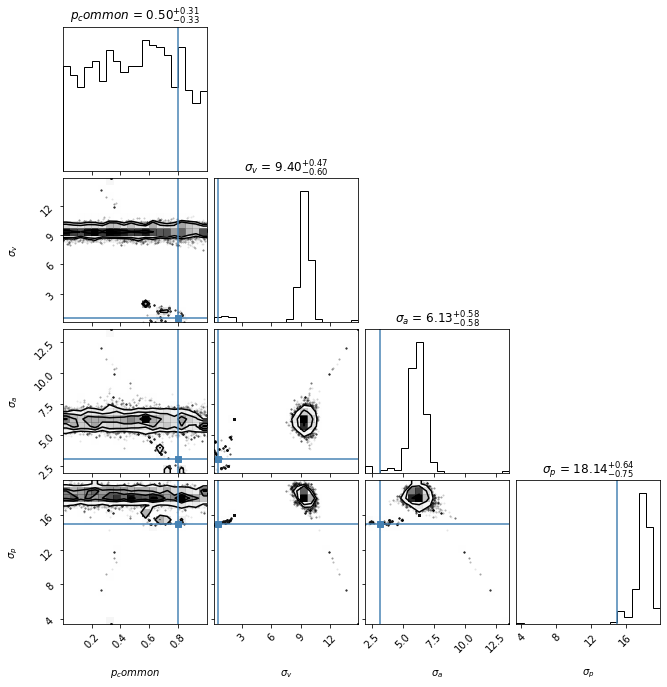

In [11]:
# MCMC sampler
sampler = model.MCMC_sampling(model.log_probability, experimental_data, [1, 20, 20, 20])

Parameter estimates using MCMC sampling: 
 p_common = 0.492 
 sigma_v = 8.942 
 sigma_a = 6.091 
 sigma_p = 17.909


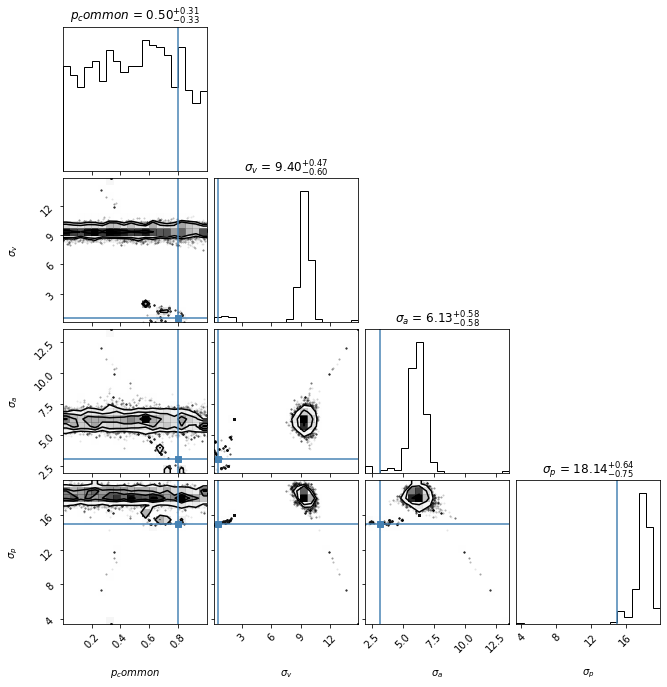

In [15]:
flat_samples = sampler.get_chain(discard=100, flat=True)
plot.plot_corner(flat_samples, ['$p_common$', '$\sigma_v$', '$\sigma_a$', '$\sigma_p$'], true_values)

parameter_estimates = np.mean(sampler.get_chain(discard=100), axis=(1,0))
print('Parameter estimates using MCMC sampling: \n \
p_common = %.3f \n \
sigma_v = %.3f \n \
sigma_a = %.3f \n \
sigma_p = %.3f'%(parameter_estimates[0], parameter_estimates[1], parameter_estimates[2], parameter_estimates[3]))

In [16]:
# MCMC sampler with 2 subjects
stimulus_pairs_subject_1 = model.generate_stimulus_pairs(trials, p_common=0.3, sigma_p=12) 
stimulus_pairs_subject_2 = model.generate_stimulus_pairs(trials, p_common=0.3, sigma_p=12) 

experimental_data_1 = model.make_button_presses(stimulus_pairs_subject_1, plot=False, sigma_v=2.1, sigma_a=9)
experimental_data_2 = model.make_button_presses(stimulus_pairs_subject_2, plot=False, sigma_v=2.1, sigma_a=2)

experimental_data_combined = [experimental_data_1, experimental_data_2]

sampler2 = model.MCMC_sampling(model.log_probability, experimental_data_combined, [1, 20, 20, 20])

[0.90624933 3.1571182  6.79033896 6.83788248]
[ 0.89249744  8.30837736 10.92798791  6.42323329]
[ 0.13660482  9.16548032  7.73278782 17.47448873]
[ 0.06438629  5.00627118 16.52932932  5.61880441]
[ 0.20365205 15.25701124  9.5773043  15.78612146]
[ 0.48991313  9.59648051  2.80693938 10.55307941]
[ 0.46976868 19.50154054 13.3742284   2.71011227]
[0.10967153 9.83686377 9.86602652 8.74926744]
[ 0.72083924 13.44380266 14.46101376 15.05143176]
[ 0.95521464 18.31608887 13.33713362  4.41383781]
[ 0.92311391 11.08291309  2.23117737 17.86586729]
[0.61872641 2.54731756 1.6113509  8.21449291]
[ 0.53166739 13.69025703 12.84360425 10.43161459]
[ 0.1697389   8.09629159 10.42575363 13.34679151]
[ 0.12893088 15.31916333 19.15440629 10.68095188]
[0.49386199 1.5444822  2.49941961 2.36848813]
[ 0.52743455 12.58859052  8.34025517 18.19003647]
[ 0.63145649  3.38751389  5.345755   14.6980263 ]
[ 0.03358777 15.4122692   5.14530714  0.69262592]
[ 0.03192687 10.41647158  5.44313396 13.51019748]
[ 0.99305944 19.

  0%|          | 0/600 [00:00<?, ?it/s]

[ 0.12691277  9.05447418  7.60740439 17.64727124]
[ 0.17825597 15.37831476  9.3244161  16.20068585]
[ 0.70035039  2.59175166 -3.03539782 12.97100366]
[ 0.65735566 22.4375392  13.67846725  1.38797196]
[ 0.8154778  13.86228292 17.45607961 13.51562086]
[ 0.88406109 17.36342217 12.50599244  6.70526156]
[ 0.6249209   2.95615948  3.42852253 11.36939866]
[ 0.09291361 12.02593066  1.56267786 14.72100814]
[ 0.12376396 13.84836669 16.66251076 10.16271771]
[0.6223352  6.08672158 6.96613488 4.69942047]
[ 0.59570609  8.92708997 17.61377461 28.97859478]
[ 0.45699761 14.29303652  6.34786146 14.85450061]
[ 0.11443398  1.75313353  2.13372965 13.11127055]
[0.74325608 5.51970554 9.61108431 7.31066291]
[ 0.64628552 11.44989155 12.42041788 13.16669662]
[ 0.26814785  1.12108019 18.78313425  7.0661138 ]
[0.70792364 2.8054627  5.62399981 8.40917559]
[ 0.90726394  7.86661449 10.62406767  5.68101282]
[ 0.03404715  6.97833854 25.25600964  1.07683615]
[ 0.14608087 10.19073874  9.99014937  8.65316475]
[ 0.85354642

  0%|          | 1/600 [00:03<31:02,  3.11s/it]

[ 1.16393766  6.54302882 10.31068603  6.76998273]
[ 0.03000423  4.56435109 16.63765842  5.12476566]
[ 0.51865562  5.49535397 -0.28506453  6.79699247]
[ 1.50237612 10.22185246 -4.99984845 19.20009933]
[  0.36993235 -11.22028736  -5.50351906  15.95881256]
[ 0.56076549 11.95682803  6.37408248  7.20694452]
[ 0.2564559  14.02543194 12.55527011 12.03096169]
[0.6325001  4.83254444 7.42367933 4.91915405]
[ 0.17650686  5.67807685 -0.28553953 21.63277849]
[-0.17761087 15.89828398  2.06893487 -4.63568972]
[-0.38676115  1.72883745 -2.14100734 23.83782287]
[-0.32436411 25.21757975  7.42772805 -0.63987149]
[ 0.28663882  4.68677835 24.4477482  11.59891819]
[ 1.09574676 14.53269787 15.75554135 10.01847367]
[1.37022245 1.24764261 9.35880513 5.88708546]
[ 0.30864338 -2.40633561 21.04470932  8.02038672]
[0.57945281 4.25190843 5.58962688 9.37860704]
[-0.06415519  8.7691851  10.13416507 21.38135218]
[ 0.24212932 15.2000769   9.900086   15.37966315]
[ 0.34770016 11.36888286 14.73709348  5.47764391]
[ 0.1403

  0%|          | 2/600 [00:05<27:32,  2.76s/it]

[ 0.76442257  9.94253471 11.70432226  9.93105769]
[ 0.03310835  1.66984129 21.13158922  3.45663275]
[ 0.25469256 14.74415376 10.47570384 14.20129429]
[ 0.49304952  9.846589    3.26946557 11.19144759]
[ 0.77079787 13.01169896 15.14148753 13.66665004]
[ 0.9296404  10.93722287  1.73488589 16.87127214]
[ 0.5679282  11.48879385 10.39947691 11.56437588]
[ 0.29554578  6.79040279  8.70633515 12.47918545]
[ 0.222247   14.97812259  7.89336471  5.45229634]
[-0.0183192  10.78495026  5.31352062 14.26002912]
[ 1.09189082 22.06885106 13.06444929  2.69188444]
[ 0.13205489 22.78701278  9.29565655  7.92722524]
[ 5.09645570e-01  1.80028417e+01 -7.23607858e-03  7.93044927e+00]
[  0.01625046   0.08050012 -10.58872839  13.9735464 ]
[ 0.27699584 12.16213878  9.74327855  9.54090622]
[0.72861527 1.86631787 6.77677646 1.90308308]
[ 0.62653236  9.75045162 10.81817926 11.60003639]
[0.87174672 0.96098815 5.66783138 7.17297876]
[ 0.84289181  8.94131499 11.22867574  7.78187483]
[-1.19684044e-03  6.65213558e+00  7.75

  0%|          | 3/600 [00:07<27:33,  2.77s/it]

[ 0.24799837  3.76970567 19.89658513 12.01085636]
[ 0.85508147 17.6672683  23.31083343  3.99749317]
[ 0.19343281 -6.9813449  20.92903523  3.39643563]
[0.45287912 5.75666908 6.74182193 9.20904338]
[ 0.77730336  9.86161648 10.59730174  7.61365563]
[-0.13026261 10.54834471  8.00073266 24.31984453]
[ 0.14656301  5.78831112 14.24345302  6.72121343]
[ 0.31792512 11.70293922 12.63409542  7.18876715]
[ 0.65820023 10.44122121 11.44116712 12.19192463]
[ 0.65529572 12.69966326 10.36245138  9.06735322]
[ 0.98718482 -1.6013937   2.19778331 10.06157074]
[ 0.29497067  6.95694441  8.73848384 12.38808906]
[ 0.34173156 16.98547387 17.64534448 13.53523243]
[ 0.69439011 17.71802618 11.61583032  6.96857175]
[ 0.21024663 16.7185613   9.4503158  13.02920248]
[ 0.42538146  5.07336233 13.49615244  8.57029933]
[ 1.12944893 12.18177755 16.75208397  9.63169645]
[ 0.81223847  3.49077918 10.13017327  7.44010904]
[ 0.19953792 -0.67476966 18.67409937  7.86563211]
[ 0.23058836 15.00119651 10.41803031 14.32132729]
[ 0.

  1%|          | 4/600 [00:10<27:22,  2.76s/it]

[0.53534005 5.21487265 5.71218902 7.49510944]
[ 0.15109552 16.64890292 12.7679793  18.75029951]
[3.66344647e-01 9.83989057e+00 3.11537573e-03 1.27862323e+01]
[ 0.31031655 11.68046055 12.68532679  7.14640024]
[ 0.69224274 10.44256653 11.76720384 12.12026692]
[ 0.63510011  8.90542559  3.71314533 14.72608343]
[ 0.83761738  0.48016776  0.02033498 10.65274542]
[ 0.41526877  6.3415907  12.07898056  9.7202015 ]
[ 0.60495211 11.29906577  3.56249133 15.91776042]
[ 0.66304573 13.45795471  9.48084287  8.61192434]
[ 0.75317419 26.63693872 15.30160209  8.5752518 ]
[ 0.66853015 13.52988532  6.07409046 14.92080065]
[ 0.62366699 14.85866418  4.19061277 18.18957989]
[ 0.3288707   6.38397736 11.52082186  9.78201043]
[ 0.70041619 11.68334979 12.35086825  9.7854843 ]
[0.60669474 7.46518474 9.64980222 7.96387112]
[ 0.8946661  11.51013688 11.2490926   7.37274019]
[ 0.19804908  9.27923258  7.22677895 17.0367734 ]
[ 0.13106933  5.41164009 14.60685564  6.35543952]
[ 0.3332419  10.08318893 10.50802534 10.152432

  1%|          | 5/600 [00:14<30:26,  3.07s/it]

[0.47439085 6.24747504 7.23417778 9.52156331]
[1.07207815 7.35275063 9.05758097 4.19997928]
[ 0.40935872 15.79023066 10.87674996 11.65714212]
[-0.29816082 12.75272063 12.27905716 11.83987773]
[ 0.99783549 13.18637639 10.92309476  8.63856446]
[ 0.71665785  8.20857506  1.46010366 16.62944909]
[ 0.30531924  3.96018173  8.15999798 14.02728457]
[ 0.1396562  13.69491592 11.6641099   4.59883936]
[ 0.33972703 10.13531435  8.01676205 11.97358179]
[ 0.43127562 13.9193688   7.69188646  9.86509287]
[ 0.5097257  11.89528467  7.47176401 13.00792421]
[-0.0287759  -4.42503987 -3.53390822 13.59761401]
[ 0.36197742  7.07206283  9.8309414  10.02473693]
[ 0.68559219 10.6912635  11.3567837   8.90053566]
[ 1.00402225  5.7013801  12.00571567 -0.85774139]
[ 0.03229459  1.41408962 20.57342724  9.98180503]
[ 0.17770758 14.77150517 -0.52359053 24.59359945]
[-0.06537762  2.22430029 18.19538975  3.0523085 ]
[ 0.50123735  9.30676231  2.68329569 11.3672493 ]
[ 0.26231196 10.79191314 14.66705538  6.06744253]
[ 0.6906

  1%|          | 6/600 [00:17<29:29,  2.98s/it]

[ 0.87587494 10.71028842 13.03943757  9.80031703]
[ 0.36017393  0.29231351  4.95935695 10.84699893]
[ 0.08622221  5.4174804  14.47734213  6.4370577 ]
[ 0.53695641  9.71845601  0.84035054 11.79030045]
[ 0.33108946 10.53631737 13.5105155   4.51173404]
[ 0.70245372 16.48771566 12.85371441 10.68731307]
[ 0.6256737   3.12547685  3.6097742  11.38800478]
[ 0.50739847  8.1587981   7.34500275 11.92904397]
[ 0.07943697  4.6290949   7.23782967 14.4619694 ]
[ 0.43940137 12.74700034 12.41632707 11.57008746]
[ 0.1922401  15.49853927  8.46512528  4.85680226]
[ 0.36587526 10.12554233  8.20176717 12.10089412]
[ 0.31971706 10.03726829 10.08967855  7.19370204]
[ 0.40409997 14.04630096  8.12030837 10.53242247]
[ 0.02332735  0.67364658  0.83050074 13.56785361]
[ 0.44945558 10.81556782 10.13578717  9.05138898]
[0.50441771 6.18509824 8.45543554 6.95904883]
[ 0.7318413   9.89005236 10.32919622  8.06663076]
[ 0.17522326  9.06355384  6.14867475 19.18570141]
[ 0.1626116  15.1742459  11.92735251 16.46244871]
[ 0.

  1%|          | 7/600 [00:21<33:12,  3.36s/it]

[ 0.21751915  1.79235217 17.02905804  8.53818209]
[0.5030544  0.92303413 2.98893734 7.84340294]
[ 0.20002547  9.28495665  7.24352109 17.00379085]
[ 0.40117216  9.75608409  3.7085648  10.82390921]
[ 0.30373619 10.52436179 13.67669649  4.17309605]
[ 0.70403342 16.39505019 13.04722044 10.51315395]
[ 0.67243414  9.28540942  6.26638929 12.15609   ]
[ 0.25752985  4.79368386  8.99046737 13.21135448]
[ 0.58634606  7.25719787 -0.35776788 15.67282231]
[ 0.34182405 14.06050389  8.40176779  5.48097918]
[ 0.36805202 10.11759747  8.18380439 11.691357  ]
[ 0.5290212  20.55936328 10.7623313   5.52912684]
[ 0.20620461 11.38067672 13.33224047  4.1749838 ]
[ 0.54259243 13.30067987  7.93014442 14.03198671]
[ 0.19111459  3.00309452  3.15062462 12.88057831]
[ 0.32805087 12.42081424 11.92871523  8.16770742]
[ 0.2316958   3.12024986 15.95682491  8.41657765]
[ 0.9399254   9.92458716 14.82321558  2.58397326]
[ 0.1407486   5.4080275  15.00474251  5.60291426]
[ 0.26847688 14.56403021 10.33680804 14.13380817]
[ 0.

  1%|▏         | 8/600 [00:25<33:57,  3.44s/it]

[ 0.68154614 11.28926955 11.8457729   8.39788431]
[0.41487462 5.31420844 5.98796366 9.70706443]
[ 0.67872934  9.44059167 10.06931687  9.06992166]
[ 0.33481128  9.03050934  8.07618308 14.85480603]
[0.51828575 9.80340122 9.36455388 8.81849163]
[0.4512641  6.58609649 7.74741635 9.37945091]
[ 0.53195068  8.0552089   7.18937664 12.12533575]
[ 0.14277604 14.02544714  9.69524707  6.59650993]
[ 0.43162979 10.0051091   7.11619313 12.56334333]
[0.3414312  9.7691069  9.69791174 7.1491448 ]
[ 0.53129091  9.73188131  9.59027992 11.73141833]
[ 0.53135739 16.58347266  2.99553223 14.33167296]
[ 0.50570796 13.04981644  8.48222543 12.59839896]
[ 0.37642713  7.29060113  9.08850127 10.1705366 ]
[ 0.83912075 11.18022467 15.57163496  5.09029552]
[ 0.34115775 11.15887352  9.73692102  8.8528833 ]
[ 0.12918153  0.9044046  21.03332107  7.28359582]
[ 0.1476071   5.75558935 14.26446625  6.74200581]
[ 0.24393595 17.17199514 10.4956119  18.14154652]
[ 0.53590185 11.84447027 -0.45767831 11.51570224]
[ 0.27889815 11.

  2%|▏         | 9/600 [00:28<34:30,  3.50s/it]

[ 0.62109805 10.35413986 11.49184786  8.41314659]
[ 0.78735779 10.74521108 11.73242412  8.43957352]
[ 0.31161104 10.00815545  8.32810436 12.53319457]
[ 0.03960661  5.32790041 16.05966507  6.62754368]
[ 0.50800573  9.15630805  1.03374532 11.88156843]
[ 0.10634169 13.81497602 14.17255515  0.87377024]
[ 0.68946308  9.29284785  9.91569488 10.4089886 ]
[ 0.59876038 10.16528141  8.59606463  9.89029391]
[0.68966911 6.53733395 8.69753121 5.17187657]
[ 0.33769619 14.42019319 10.79177357  7.7147247 ]
[ 0.4006133  12.05823163  7.86207139 13.91994983]
[ 0.34669926 12.4094475  10.01067734  9.09133271]
[ 0.5057169  12.58793221  7.52269918 13.1671197 ]
[ 0.67065042 10.50237744 10.96403032  9.06559479]
[ 0.37749909 10.98906364  9.66364327  9.40822027]
[0.58250335 7.8069783  9.60244586 7.87891089]
[ 0.21792057 -1.16566966 18.06163114  6.27536302]
[0.48851134 5.56606714 6.9271448  9.5691394 ]
[ 0.24937726 15.09011626 10.41643961 15.36503313]
[ 0.06129104 10.04456308  9.89299628  8.83832294]
[ 0.55491789

  2%|▏         | 10/600 [00:32<36:02,  3.67s/it]

[ 0.78043209  9.78956016 10.96200082  7.40077108]
[ 0.118612   10.2508752   7.21922404 13.23759253]
[ 0.19521775 12.38332221 10.11962994 11.64984422]
[ 0.35475772 10.71045043  7.92840018  7.56987778]
[0.52175736 9.7843096  9.42480949 9.59607212]
[ 0.54914744  7.2644221  11.61022468 12.30040443]
[ 0.28951396  6.51361211  8.7498047  12.54472522]
[0.63965471 8.0119385  8.81936528 8.32108978]
[ 0.22589534 11.99575474 11.53794496  5.91610862]
[ 0.39628626 12.90790736  8.68436457  9.51117229]
[ 0.57075969 11.36699611  8.79627743 11.51271515]
[ 0.2634152   4.04863935  4.35503054 12.5282773 ]
[ 0.38734745  5.41023008  8.74974659 10.56697432]
[0.56136692 8.31498552 9.55530076 8.10595552]
[ 0.66016663 10.62483946 12.3190823   6.96960697]
[-0.04259292 -2.14414446 21.45714728  7.31534433]
[0.4265168  4.90737236 5.84479849 9.88326612]
[ 0.20476747  6.14284906 13.58562081  6.91551769]
[ 0.55147943  7.69643813 -1.94336069 12.80396705]
[0.18144358 9.84299948 9.9194567  8.67052007]
[0.49253692 9.032204

  2%|▏         | 11/600 [00:36<35:53,  3.66s/it]

[ 0.77736741  9.87725753 10.54598668  7.5827407 ]
[ 0.15143279  5.42310914 18.04139686  4.37672369]
[ 0.52008201  9.29078678  0.59763312 11.84759971]
[ 0.29270409  9.06462376  8.70586011 10.21258959]
[0.58278003 9.98233998 8.3756906  9.98304431]
[ 0.32828866 18.51617846 11.69578423  7.39664878]
[0.57469709 7.6549699  7.41799278 9.17574216]
[0.44805923 8.43828236 8.21763158 8.31762384]
[ 0.31402152 13.72189713 11.16796436  8.53732353]
[0.30130879 8.88349653 8.67980851 8.66877866]
[ 0.41189774 12.53379063  8.79475493  9.76440595]
[ 0.61905713 12.8085775   8.22346618 12.57875329]
[ 0.26059886  2.78363232  3.64021502 12.86463445]
[0.3967149  6.43999277 9.32650939 9.43101261]
[ 0.86999865 12.35315344 14.93513675  7.54686852]
[0.54202381 7.85517985 9.03909273 8.42078077]
[0.44160571 7.8295771  7.94705108 9.41110051]
[ 0.40534913  9.60157342  4.8465474  12.22217704]
[ 0.19902779  9.89356986 11.5024512   9.76099696]
[ 0.28718474 11.10601031 11.01285741  5.87617224]
[0.48676326 8.97141534 9.810

  2%|▏         | 12/600 [00:40<37:44,  3.85s/it]

[ 0.1794355   2.47311484 16.47503402  8.49643624]
[ 0.52074807  6.49879532  6.66440704 10.78106623]
[ 0.31461019 14.30177182  4.32028649 11.87338828]
[ 0.12840155  5.23458461 15.51889281  5.24745608]
[ 0.50620537  9.01385522  0.08445755 11.50397987]
[0.14861631 9.27011277 9.17222961 9.20724977]
[ 0.42373441  8.4366901   8.71262114 10.13786594]
[ 0.54349161  8.49276896  7.45873227 11.63892298]
[ 0.23455855  7.24272081  8.82104327 12.43380355]
[ 0.44920549 11.14797886  8.20167412 10.81723149]
[ 0.49146614  8.12407977  6.84823919 10.29221103]
[ 0.31560852  8.6894257   7.87574938 10.25859488]
[ 0.54612986 11.2368598  10.25856441  8.39274514]
[ 0.040473    3.47888764  2.08919474 12.91514454]
[ 0.98972127 13.20460494 14.50770108  7.59255793]
[ 0.69220227 11.97879394 12.35266884  7.72954407]
[ 0.26255891 -3.27884631 20.16509587  7.14643709]
[ 0.65321512  8.3398898  11.77707129  7.77245693]
[ 0.23189471  9.55409257 10.47999644  9.90128182]
[ 0.33760881 11.77408035 11.68264876  4.66401685]
[ 0.

  2%|▏         | 13/600 [00:44<37:17,  3.81s/it]

[ 0.46842744  9.61884028  2.79789146 13.06619209]
[ 0.24683489  7.67587165 12.19243305  7.00978161]
[ 0.61494331  8.79970277 -4.03637965 12.1392964 ]
[ 0.72270392 10.28999068 11.12037943  7.02046091]
[ 0.47423827  4.15849067  6.44280522 11.94128046]
[ 0.42352077  8.60502161  8.63162725 10.95666956]
[ 0.45970606 10.58948427  8.42777641 10.44929323]
[ 0.87145432 12.2482849   1.71003649  9.55460453]
[ 0.33728829  8.46242347  6.40358566 12.07637769]
[ 0.15698193 12.50176402  9.56321565  5.50505188]
[ 0.66002139 11.82581695 10.3547169   8.99329551]
[ 0.51763445  9.54651423  9.18224817 11.54700777]
[ 0.54191334 11.61667984  8.1702759  12.21939214]
[ 0.20497779  5.23010613  5.64224437 11.86776655]
[ 0.48218427  9.05782976  8.40326705 10.43681538]
[ 0.52849192 11.27165493 10.41908668  8.94684234]
[0.43775063 7.99487492 8.09297893 9.74056211]
[ 0.79328496  9.92794034 11.16009165  7.35255901]
[ 0.32934458  9.81955917 10.71425044  9.51945097]
[ 0.1822635  13.03071685 12.84540037  1.96633194]
[0.2

  2%|▏         | 14/600 [00:48<38:08,  3.90s/it]

[ 0.35006082  2.65656025 12.20586973 10.0207397 ]
[ 0.74806303  9.79590865 10.33326769  7.86607963]
[ 0.40608024  9.92893588  5.28733838 11.94778332]
[ 0.1258967  10.35695489 11.70910414  9.98403858]
[ 0.59514818  5.69415586 -8.13034338 13.14459588]
[ 0.29394246 11.68048335 10.81530434  5.68631751]
[-0.18285379  7.6301238   8.26637997  9.88643147]
[ 0.37050843  8.5389591   8.90536348 10.50462141]
[ 0.58275576 10.43702308  8.43447486 10.2143282 ]
[ 0.52548885  6.60524781  5.79066793 13.82637439]
[ 0.46766907 12.32048624  9.96136209 10.14571364]
[ 0.23415418  8.77960753  6.55485266 13.18528367]
[ 0.18657844  7.26354634  6.54201252 11.30296993]
[0.08921577 9.72541906 9.5020221  5.97339757]
[ 0.61609066 11.03405339  8.79671187 12.01159206]
[0.51086661 8.19148607 9.52190738 8.75974201]
[ 0.30818185  0.62755931 13.41117508  9.88885681]
[0.50924068 7.58835283 8.22012386 9.4373564 ]
[ 0.22547998  7.49017658 13.55910769  5.81362149]
[0.4802301  9.50586574 9.46785813 8.53592839]
[ 0.71130095 -2.

  2%|▎         | 15/600 [00:51<36:47,  3.77s/it]

[ 0.75246587 15.58324245 10.81047745  7.48954878]
[ 0.1952418   7.58966416 13.30027016  6.27181507]
[ 0.51885276  7.15492898  1.54607576 11.83971696]
[0.14554719 9.26714912 9.16552389 9.21517948]
[ 0.43910182  7.4630173  11.94409573  8.39568542]
[ 0.60108377  9.70904604  8.33080329 10.00646336]
[ 0.42348829  8.60565509  8.63475558 10.95676695]
[0.6375595  9.41663667 7.18053569 8.81123438]
[ 0.28778752  8.15951171  5.72640749 12.52344735]
[0.44953276 9.0754595  8.59613931 9.40974221]
[ 0.49104207 10.59696889  8.14083104  9.8912097 ]
[ 0.24153711 10.1083589  10.15671488  6.92713912]
[ 0.56145546  9.02774405  8.53467567 12.6613646 ]
[ 0.57436745 10.91544292  8.69828037 11.59477277]
[-0.03183553 -0.30163041  0.50876747 13.37460294]
[0.41302963 9.68886383 8.90689793 9.5797843 ]
[ 0.58658312 10.29388976 11.15887212  8.50636178]
[0.42761744 7.97794325 8.31056479 9.59562105]
[ 0.75966088  9.86015947 10.50729972  7.6284892 ]
[ 0.33282758 10.11479091  1.48950468 13.90730714]
[ 0.08223635  9.2419

  3%|▎         | 16/600 [00:55<35:51,  3.68s/it]

[ 0.19811505 -2.93802368 14.58191789  8.9544865 ]
[ 0.41458761  9.14346331  5.77218659 11.51460627]
[ 0.08571607  7.00732694 12.6924467   6.83577815]
[0.18067461 9.38388186 9.7002703  9.49429582]
[0.70256739 9.97598724 9.87982652 7.63471027]
[ 0.57467614 -2.33293424  3.9259155  13.45216278]
[ 0.47970425  7.06209578  5.62844761 13.41405431]
[ 0.49318294  8.39806865  8.41681373 10.11920484]
[ 0.47470294  7.20947402  6.28247886 10.89851546]
[ 0.31789536 10.84176612  9.5553422   8.50473169]
[0.39812667 9.71841581 9.36137215 8.2908679 ]
[ 0.26119744  9.9629363  10.61738651  6.01214434]
[ 0.4296912  10.38705554  7.84625924 10.16106585]
[ 0.33593408  6.01558174  5.76403669 11.66470275]
[ 0.38416159  8.26416668  7.6383709  10.58757612]
[ 0.59605232 10.73273945 12.5028114   8.04033433]
[ 0.36949648  0.04474577 12.57464247 11.30186939]
[0.4430387  7.96830173 8.13783877 9.65698041]
[ 0.8313598  10.15828962 10.95050967  7.10083619]
[ 0.21438912  9.49591934 10.21350802  9.76218548]
[ 0.47783173  5.

  3%|▎         | 17/600 [00:59<36:39,  3.77s/it]

[0.51773481 8.38219393 9.67039553 8.73675803]
[ 0.24435764  5.88588832 13.27619287  6.71698633]
[6.33571296e-03 1.02017000e+01 1.14283584e+01 1.01537181e+01]
[0.24104765 7.214635   7.23706862 9.23999504]
[0.44693741 8.42125788 8.62762168 9.95467785]
[ 0.83093475  9.006269    7.09227033 11.12408652]
[0.75462271 9.83914038 9.85647377 7.64103561]
[ 0.51995425 11.29425472  7.96000519 11.77445419]
[ 0.49889595  7.79247789  8.16669312 10.36701992]
[ 0.43686694 11.27898906  8.78845043 10.18353965]
[ 0.1257875   6.90861432  2.36921844 15.10516581]
[ 0.42502998 10.80637509  6.05557852 10.84804148]
[0.24063625 9.70045221 9.67906265 8.03215442]
[ 0.47057561  8.90498647  4.95735409 10.9307996 ]
[ 0.53259522 11.12907509  8.31806938 12.42034699]
[ 0.33436565  8.51439764  7.21594058 11.37463744]
[ 0.58771369  7.86572056 12.31508504  6.85216277]
[0.43234753 7.91433628 8.09590288 9.70499398]
[ 0.7600406   9.89451693 10.44009972  7.73101526]
[ 0.42285177  9.14209207  5.96226559 11.40837617]
[ 0.49776596

  3%|▎         | 18/600 [01:03<36:48,  3.79s/it]

[ 0.08664654  6.99344002 12.92934219  6.81064421]
[0.26666629 9.1446039  9.71720384 9.75712459]
[ 0.51574345  7.01675825  1.87481934 11.82459983]
[0.17038061 9.58955797 9.4894182  8.62974895]
[0.44828154 8.74665318 8.45442955 9.86979827]
[ 0.56389675 10.07988429  8.81449892  9.82976613]
[0.51352686 8.17219947 8.27743503 9.92380843]
[ 0.30510958 10.17516542  6.64553768 11.5702516 ]
[ 0.56167209  9.4776954   8.44338865 10.21111721]
[ 0.0956992   7.68572565  4.12954245 14.543238  ]
[0.42499471 8.88352378 7.34963461 9.8022361 ]
[0.39325883 8.24601773 8.55009538 8.42475746]
[ 0.47714543 11.46040412  8.46403987  9.13227763]
[ 0.23293455 14.91096257  9.03881976  4.22999716]
[ 0.40766131  8.59039386  7.99019947 10.48245375]
[0.39115581 6.86757631 8.32922501 8.87916651]
[0.45656501 8.08598253 8.46402878 9.504441  ]
[0.68921029 9.71395197 9.68663109 8.6569879 ]
[ 0.40434898  9.14516217  5.53669396 11.64621685]
[ 0.30481435 10.73789448 10.57054505  6.5502198 ]
[ 0.8018883  10.00925364 10.11071112

  3%|▎         | 19/600 [01:07<38:16,  3.95s/it]

[ 0.38290873  0.09268759 13.1533594  11.90913547]
[ 0.40892603 10.21437904  3.97071921 12.96725741]
[ 0.07672564  5.64110071 15.0146883   5.00264331]
[ 0.30550138 10.66108009 10.51578442  6.61501625]
[ 0.54033236  4.42786389  6.54135074 11.89236583]
[ 0.55116807  7.68949318  6.93484882 12.66347918]
[ 0.49407341  8.39762213  8.41275453 10.12237287]
[ 0.61327149 10.19676019  8.38957526  9.90888613]
[ 0.35604594  8.28123206  5.52346786 12.69238588]
[ 0.46664764  8.15445636  6.86415668 10.93323128]
[ 0.18500628 10.11266376  9.16788827  9.30000404]
[0.45189187 9.01175914 8.59069971 9.51727639]
[ 0.27700171  7.47709484  7.48074614 12.80836465]
[ 0.48798632  9.41340588  8.64008755 10.3021393 ]
[ 0.57637292  6.57311868 10.7385837   7.1690062 ]
[ 0.46616865  9.52205447  8.91475213 10.16995198]
[ 0.43397664 -0.28817769 13.57840472 11.89726307]
[0.40539774 7.76352913 7.90929364 9.52124263]
[ 0.75048335  9.84550249 10.54338329  8.02405916]
[0.29184056 9.06815818 9.71251044 9.65481394]
[ 0.59487522

  3%|▎         | 20/600 [01:11<36:50,  3.81s/it]

[ 0.84949515 10.95879844  9.70180711  8.58242362]
[ 0.23121412  8.69405357 10.12797599  9.39815423]
[ 0.3176324  10.51546974 10.38049455  6.84064776]
[0.11417767 9.34541194 9.2332778  9.13352645]
[ 0.39450969  9.03140434  8.25768706 10.43681366]
[ 0.50118318  9.22752804  8.35921917 10.11046194]
[ 0.60929355  7.62447344  6.89284338 12.45734036]
[ 0.56682534 15.29431287 10.52582597  8.2380904 ]
[ 0.37756894  8.41875783  7.01304009 11.6825821 ]
[ 0.47051612  8.3807244   6.70931031 11.17904344]
[ 0.17952357 12.35726084 10.15894274  8.63567527]
[ 0.53357174  6.33903509  6.82990279 11.48815669]
[ 0.54621243  9.21291687  8.17230401 11.33908846]
[ 0.35768229  7.29486644  6.83794055 10.99628732]
[ 0.3601433   7.83372537  7.23930385 10.73625888]
[ 0.41292664  2.06335446 12.04893278 11.58664594]
[0.40060401 8.15661392 8.22932718 9.67377237]
[ 0.48758289  8.61518684  6.28535486 11.77256827]
[ 0.13971907  7.06719422 16.43612434  3.18116251]
[ 0.51139824  8.02932702  4.4204374  11.11017055]
[ 0.7818

  4%|▎         | 21/600 [01:15<37:56,  3.93s/it]

[ 0.46071524  9.522079    8.91606708 10.15785053]
[ 0.50100955  7.95065347  6.44433823 11.68953296]
[ 0.23066827  7.53305428 12.40642982  6.80706882]
[0.42280237 8.48140083 8.65123289 9.10414622]
[ 0.31450315  6.20760272  7.74100892 10.69351396]
[ 0.53992592  6.56267111  5.46466759 14.77208137]
[0.50070196 8.6693188  8.36393127 9.95741451]
[ 0.66336736 10.69456157  8.73094991 10.59727493]
[ 0.37650759  8.41181369  7.00148173 11.6960804 ]
[ 0.47217728  8.57357495  7.19919035 10.68993371]
[0.46299336 9.06035506 8.53856519 9.65087486]
[0.35128841 9.89719261 9.87466198 7.83513465]
[ 0.41255556  8.96361701  7.90943254 10.86483621]
[ 0.43674964  8.58037765  7.93146759 10.57508437]
[ 0.48550828 14.04013369 13.09939339  5.21766562]
[ 0.36574956  9.28529204  8.42758761 11.27430037]
[ 0.32363487 -0.16434079 15.87755536 11.28084035]
[0.43936753 8.26688914 8.07175371 9.90783889]
[0.65628169 9.61800653 9.46236466 8.88512733]
[0.34398565 8.91960191 8.98202854 9.95976265]
[ 0.51866751  7.35828998  2.

  4%|▎         | 22/600 [01:19<37:22,  3.88s/it]

[ 0.42585421  8.76370964  8.23719696 10.08545743]
[ 0.81700569 10.28776644 10.57509353  7.68604891]
[0.33213071 9.31844673 9.37209646 8.94473003]
[ 0.49488151  7.57111034  3.41038776 11.47048829]
[-0.11309251  9.98829034  9.59222997  8.62211404]
[ 0.51291231  8.18149457  7.80539538 10.60937775]
[ 0.99056023 11.42538813 11.56500094  4.68052685]
[ 0.6610943   8.50383271  6.93590059 13.12035204]
[ 0.47321287  8.82818551  8.19544238 10.15057672]
[ 0.46841985 11.41243456  8.00777313 10.19152787]
[0.48406804 8.61176254 7.06169962 9.59732643]
[0.32392086 9.24094972 8.88397345 9.79785185]
[0.45191244 9.01298213 8.59155176 9.51663513]
[ 0.46208773  8.32587545  8.29252756 10.8567878 ]
[ 0.42563408  8.79896653  8.52131206 10.12303372]
[ 0.47382437  8.97157874  8.18488961 10.36588753]
[0.49469796 8.39490499 9.3310862  9.13305831]
[0.4460728  8.30603243 8.11824026 9.84499933]
[ 0.53602155  7.71070692  5.86453417 12.1422705 ]
[ 0.19085198  7.5068188  13.20671964  6.00925305]
[-0.10659209 10.74301002

  4%|▍         | 23/600 [01:22<36:18,  3.78s/it]

[ 0.44018922 -2.38425039 14.89768051 12.23127437]
[ 0.99530865 10.03890446 10.60593174  7.54808303]
[0.38821981 8.99980552 9.35794706 9.00970723]
[ 0.58029292  6.03557915 -4.75267541 13.54556518]
[0.19889155 9.29413971 9.07295111 9.34285186]
[ 0.51493213  8.1573538   7.77876062 10.64835848]
[ 0.65626003  7.39080202  6.37246886 13.20510309]
[0.45785196 8.8078765  8.48998437 9.9187381 ]
[ 0.46574819 10.57733882  8.53118404 10.73149288]
[ 0.47723866  6.20477216  6.83364871 11.71479706]
[ 0.6660164   9.40627187  2.76294229 14.04252322]
[ 0.42473947 11.80258291 11.55541417  3.55617861]
[ 0.54280965  8.96355098  5.22215937 14.08853874]
[ 0.44236274  8.04523325  8.02723845 10.92647099]
[ 0.46679095  8.15363196  8.36366862 10.98452878]
[ 0.41507083  8.67638073  8.20915773 10.33427804]
[ 0.39901628 -2.61914743 14.24853922 13.09544916]
[ 0.3896022   9.19918335 13.21763834  8.29728103]
[ 0.52197439  7.58919799  5.95512903 12.28155056]
[ 0.19692678  7.39207448 13.49648227  5.93213199]
[ 0.33876652

  4%|▍         | 24/600 [01:26<36:54,  3.84s/it]

[ 0.45632961  9.9641281  10.29089273  9.85811424]
[ 0.25359196  7.75262369 12.07782756  7.11558867]
[ 0.18615233 10.50076317 11.90284199  6.57213052]
[ 0.48713366 10.14984445 10.06397751  7.66920069]
[0.26611198 8.96595565 9.22269399 9.18682233]
[ 0.35668059  7.90481035  8.16705558 10.80852099]
[ 0.51426     7.94860241  6.38537262 10.88849909]
[ 0.13622677  8.85120396  7.73356205 11.64591739]
[ 0.43243808  8.22614102  7.39868339 11.34584774]
[0.29640625 9.44142546 9.26302415 9.50393782]
[ 0.53389801  7.15503529  7.20213735 11.36274922]
[ 0.4542312  10.34617481  8.41884639  6.15194253]
[ 0.41447196  9.11446343 10.00908122 11.71650234]
[ 0.44517729  8.8409529   7.47855235 10.85551255]
[ 0.22692946  7.19583902  7.90581876 10.25606207]
[ 0.47844325  7.93010571  6.83777857 11.17593404]
[0.44052826 8.97181242 8.96144947 9.82517936]
[0.45843572 8.0078677  7.8744312  9.67682259]
[ 0.77469288 10.45700317 10.59879639  7.71032169]
[ 0.45482759  8.3246931   7.24496917 10.93893336]
[ 0.46224072  8.

  4%|▍         | 25/600 [01:30<36:57,  3.86s/it]

[ 0.4335837   4.08569287 10.84689942 11.294284  ]
[ 0.46795083  7.00917254  7.63498532 10.43837605]
[ 0.42495802  8.56661439  7.7628011  10.45346069]
[ 0.5162093   7.61174458  4.33143587 11.29222331]
[ 0.2930764  10.95922331 11.01770283  5.68728766]
[0.29971856 9.38972079 9.04493986 9.67428345]
[ 0.45461094  7.62179696  7.44386612 11.40889356]
[ 0.426268    8.22956412  7.36750018 11.40231398]
[ 0.46279424  8.61604942  7.29255002 10.64622027]
[0.31369443 9.29827737 8.94233586 9.75393977]
[ 0.47975774  8.49086082  7.09002199 12.92569363]
[ 0.44437325  8.9897943   8.03671631 10.33745864]
[ 0.47673331  7.50527049  8.06392428 11.36625473]
[ 0.45403506  8.24785351  8.28310106 10.8762174 ]
[0.4343693  8.9003382  8.77944643 9.94834635]
[0.49678349 8.31250915 9.36152067 9.05726026]
[ 0.42170181  0.83382002 12.48454812 12.33141383]
[0.69208497 9.73060869 9.7122457  8.62688489]
[ 0.27761983  7.26310924 11.91350564  7.67342077]
[ 0.26471304 10.25234584 10.43346612  7.58836282]
[ 0.45141893  8.3453

  4%|▍         | 26/600 [01:34<37:28,  3.92s/it]

[0.42923069 8.58187387 8.28177378 9.8275395 ]
[ 0.45887046  7.9513718   6.92582597 11.67904863]
[ 0.35366889  8.01921822 10.93772553  7.95298868]
[ 0.65986067  5.52109353 -4.3639428  14.02593997]
[0.26535293 8.62979398 8.76702301 9.99332551]
[ 0.78124222 10.18163779 10.34308135  6.81548838]
[ 0.44867175  7.74432568  7.51297797 11.29169776]
[ 0.41278007  9.80550271  8.66770067 10.16937167]
[ 0.43248426  8.22225301  7.39106363 11.3541475 ]
[0.45200036 9.01207607 8.59869309 9.50544205]
[ 0.31453286 10.76619685  8.95542759  9.53514217]
[ 0.41507546 12.60131704 12.20437144  2.10453309]
[ 0.45120688 10.87361918  5.77883082 11.99309179]
[ 0.25056586  9.37081227  8.3410049  10.14648807]
[ 0.44566208  8.21757382  8.06730814 11.23515509]
[ 0.47113026  8.57488803  8.51516764 10.73178598]
[ 0.73825965 10.14064808 10.15331162  8.08594844]
[0.33244259 8.93972998 9.04130978 9.30900897]
[ 0.15091335 13.35464705 16.98163684  1.81332998]
[0.45224178 8.34151663 9.41782423 8.69721537]
[ 0.43984031  7.6368

  4%|▍         | 27/600 [01:38<36:39,  3.84s/it]

[ 0.41024326  4.84105511 10.09288727 11.19534083]
[0.32256288 8.96572024 9.07879059 9.20765454]
[ 0.31505765 10.57541517 10.57600426  6.35570533]
[0.45074307 8.4910997  8.87428613 9.44622135]
[ 1.23381172 10.83268849 11.18141826  5.10707952]
[ 0.59157872 -0.83691508  5.08581927 13.65304769]
[0.44289355 9.26175356 9.05666343 8.32858477]
[0.31020919 9.2466325  9.88044196 8.90014753]
[ 0.52895451  8.78538457  8.25868513 10.33514975]
[0.22959271 9.43763342 9.54747366 9.3752774 ]
[0.45515393 9.40737544 8.86308018 8.6448347 ]
[ 0.36543067  8.07127435  8.05385823 10.43112932]
[ 0.47326593  7.43788972  6.5268727  13.12845232]
[ 0.46801989  7.54415065  8.22201886 11.46393043]
[ 0.39269455  8.02420523  8.03454656 10.41893325]
[0.50899655 8.35969989 9.65262738 8.86233983]
[ 0.33660253  3.56349297 10.19234282 11.86643728]
[ 0.40866879  8.19338441  7.9955832  10.11840613]
[0.81211256 9.97905855 9.91800359 8.43824022]
[ 0.43998629  8.50803866  7.56965677 10.6363044 ]
[ 0.37238994  6.96753114 10.6581

  5%|▍         | 28/600 [01:42<37:02,  3.89s/it]

[ 0.77238651 10.16615708 10.1986351   8.20428574]
[ 0.43229121  8.69110195  7.90771686 10.36234095]
[ 0.37224088  9.00787802 11.09913844  6.8040248 ]
[0.28252267 8.59300772 9.26124064 8.78082494]
[ 0.16970313 12.61712307 13.32817713  2.03118296]
[0.07789284 9.34347597 9.09251892 9.22889845]
[0.42634502 8.90166569 8.84033161 9.61736498]
[0.56539379 8.69766971 7.73093815 9.82444054]
[ 0.99627735 11.420945   11.67554887  4.74551044]
[ 0.58658937 -0.18647744  5.00523118 13.54784921]
[ 0.36549379 10.01673194  9.09719969  8.91650365]
[ 0.40691523  7.99609408  6.66220746 11.75090648]
[ 0.41638433 10.00148274 12.35601886  8.26184256]
[ 0.38126288 10.09778965  6.69369142  9.91316174]
[ 0.36866269  9.13228031  7.85332251 10.93967283]
[ 0.39783373  8.7371088   8.47721232 10.11162081]
[ 0.41305667  8.0846638   7.83380538 10.21647598]
[ 0.45919657  7.70526258  3.83540981 11.03978357]
[ 0.44288802  7.69798678  7.55570238 11.2214598 ]
[0.46423949 8.75722981 8.43012675 9.97129623]
[ 0.54117889  9.6606

  5%|▍         | 29/600 [01:46<37:01,  3.89s/it]

[ 0.41506139  5.57590119  9.50802024 11.22801338]
[0.47622911 9.28380007 9.3422137  8.96614075]
[ 0.53091197  7.04127407  0.84020222 12.02810775]
[-0.24374381 10.57702044 10.13992412  7.95325391]
[0.41218469 9.04655894 9.55311409 9.13180316]
[ 0.66943833  8.77539473 10.08811695  8.16273926]
[ 0.67668569 -2.91452094  2.12441379 16.79192953]
[ 0.49252234  9.58295164  5.46520935 11.58228166]
[0.44045658 8.59053943 8.31512174 9.98935783]
[0.37714847 8.87390117 9.05990124 9.53086248]
[ 0.43670584  8.05073967  6.5596787  11.85356431]
[0.33020311 9.21064725 9.1719748  9.40861393]
[ 0.33941124  8.88209825  7.87531204 10.61840507]
[ 0.42337458  8.71831286  8.45129354 10.1224174 ]
[0.40094973 9.16935877 8.74561083 9.92529015]
[0.50944869 8.32106855 9.11811322 9.41360499]
[ 0.50565224  8.78574216  8.802338   11.07079635]
[ 0.43661485  7.83107957  7.5766036  10.37120329]
[ 0.75072146  9.92494548 10.07974474  8.25302443]
[ 0.47573901  5.94371953  6.96224711 11.36922279]
[ 0.29129531  9.36230055 13.

  5%|▌         | 30/600 [01:49<36:05,  3.80s/it]

[ 0.34334659  4.6687937  14.87364608 10.73273222]
[0.5054457  7.92510698 8.66086133 9.19054319]
[ 0.94745275 10.25920459 10.1500112   8.22552905]
[ 0.37226974  9.00709016 11.08714652  6.82006022]
[ 0.46105504  7.49259206  2.89334584 11.72145742]
[0.48466799 8.86566863 8.70632363 9.84761199]
[ 1.07345937 11.28259452 11.76516501  4.30332062]
[ 0.56060316 -4.13325812  3.03892382 15.01976788]
[ 0.59104622  6.82321114  7.56082582 11.73879455]
[0.46129842 8.88676758 8.63797932 9.72520302]
[0.44731958 8.91114059 8.99727942 9.5429509 ]
[ 0.48286581  8.42605481  6.32670109 11.0603515 ]
[ 0.40778665 10.72384488 10.60665693  5.83871383]
[ 0.45998142  8.46474246  7.18836994 12.1441351 ]
[ 0.4449328   8.50029167  8.66027994 10.18812285]
[ 0.40535337  8.74792553  8.76470672 10.05699026]
[ 0.40665361  3.0351134  10.99068714 11.88604172]
[ 0.41966749  8.55970202  7.82855507 10.42650762]
[0.30382584 8.97728479 9.12184248 9.13368454]
[ 0.23505188 12.38948417 10.95801366  4.86876239]
[0.11797756 9.207190

  5%|▌         | 31/600 [01:53<36:07,  3.81s/it]

[ 0.41401946  8.44757105  7.8716889  10.42492158]
[0.03614805 8.3728588  8.58780251 9.65780635]
[ 0.52850255  7.0699907   0.96900205 11.98897678]
[0.51496744 8.89990382 8.80128174 9.70625044]
[0.62917183 8.75902593 8.06110915 9.6379531 ]
[ 0.45905096  7.68553724  7.52266788 11.32796833]
[0.40260468 9.02443491 8.38538104 9.65770578]
[0.47277239 8.99396374 9.30910169 9.2608221 ]
[ 0.4286981   8.60507848  7.88537894 10.51033662]
[ 0.65216614  8.24254331  6.54695741 11.3087644 ]
[0.29941021 9.79527109 9.73244691 8.91077522]
[ 0.50133384 10.22711152 10.22908181  6.55275988]
[ 0.39028338  7.89593203  7.88115993 10.63325475]
[ 0.3599881  13.41933896  8.901567   10.66151524]
[0.48416271 8.69557712 8.8272561  9.94031107]
[0.47225341 8.96819587 9.46230985 9.30388115]
[0.43961338 8.57046028 8.70939199 9.72200296]
[ 0.90228581 10.72974929 11.5246557   6.15807663]
[ 0.37208363  9.01027343 11.10561719  6.79582971]
[ 0.23264754 11.52004955 11.62131344  4.59278057]
[0.15693607 8.90751876 8.74153134 9.

  5%|▌         | 32/600 [01:57<35:25,  3.74s/it]

[ 0.41570209  3.81007784 10.5142195  11.72184392]
[ 0.46026476  7.17319631  7.47831606 12.24174794]
[ 0.42548777  8.25350159  7.78280266 10.65490323]
[0.32568035 8.9657718  9.08677778 9.20965856]
[ 0.1543783  11.18015158 11.20937686  5.3667423 ]
[-0.21781865  9.5834895   8.99508082  9.10148394]
[ 0.52049836  8.25517226  6.03969933 10.51166888]
[0.35846264 8.7634036  9.55502503 9.43775461]
[ 0.43856639  9.16081297  6.65477411 11.38740491]
[ 0.42821986  9.25221503  7.58634561 11.7556925 ]
[ 0.3696246   6.86495107  6.9313738  11.48077425]
[ 0.50934699  8.59566216  8.72615649 10.01778087]
[ 0.35585254  7.5780412   7.44815249 10.95175408]
[ 0.44521659  8.48330455  8.64541034 10.22135073]
[0.37940593 8.99839064 8.83650253 9.77695841]
[0.44679731 8.68198243 8.4758412  9.90985821]
[0.37120395 8.86480909 9.41340843 9.74890484]
[ 0.86702235 10.81710732 10.65624135  7.29536262]
[0.38971984 8.77346171 9.74886646 8.31890378]
[ 0.600185    5.78178499 -4.9164776  13.62311689]
[0.73293409 9.08916684 8

  6%|▌         | 33/600 [02:00<35:49,  3.79s/it]

[ 0.40478774  2.44399554 10.46682082 12.30174031]
[0.43773696 8.60113243 8.68414623 9.77583288]
[0.69365677 9.73948537 9.72070562 8.61670169]
[ 0.5172299   9.99771516 -1.93760113 11.58982386]
[0.09178855 9.24993221 8.97207963 9.309646  ]
[0.57980341 9.42921925 9.90317835 8.41816485]
[0.35801163 8.76073663 9.56697534 9.43550736]
[ 0.4562796   8.60330021  7.37317304 10.61878925]
[0.35381433 9.10269047 9.02044303 9.57495731]
[0.49609169 9.07230764 8.80443538 9.21212864]
[ 0.37277226  7.52569482  7.96662966 10.68873464]
[ 0.43983023  8.61179577  7.90729301 11.136925  ]
[ 0.18853108  8.06904595  5.82686311 12.41146223]
[ 0.38843664  7.93967235  8.06706413 10.41773757]
[ 0.48857774  5.8629852   7.48672671 11.23945576]
[ 0.46617077  8.19815607  8.54444465 10.42784917]
[ 0.42049832  4.88987678  9.4563476  11.85215174]
[ 0.40804692  8.32899757  7.91730099 10.42324441]
[ 0.38875702  9.42198193 11.15536701  6.58136599]
[ 0.22908009  9.24786057 10.01268112  7.66968515]
[ 0.36205997 10.31805886 10.

  6%|▌         | 34/600 [02:04<35:07,  3.72s/it]

[ 0.471512    8.03618128  5.95999308 10.52772784]
[ 0.7844477  10.04083605 10.14005544  8.35108612]
[0.39027621 8.7842988  9.68999081 8.37671359]
[ 0.34623171 10.03702193 10.15032833  7.37938841]
[0.04921341 9.35594513 9.11747006 9.16228889]
[0.4815709  8.70043708 8.72665088 9.95287924]
[ 0.88049121 10.77388743 10.91440157  5.80467792]
[ 0.6166226  -1.37527812  4.21927224 14.18152497]
[0.40276064 8.90605905 9.12664776 9.45853414]
[ 0.43456165  7.99740108  6.96264827 11.80369307]
[ 0.46417204  8.55148172  7.04619796 10.72430047]
[0.32605887 9.23437387 9.19735082 9.36628873]
[ 0.38034362  7.81716867  7.8358352  10.70983244]
[ 0.6105296   9.04029102 10.33952389  8.67424358]
[ 0.33720899  7.29926941  7.31261948 11.12047694]
[ 0.38993553  5.13411737  9.60535502 11.46110521]
[ 0.41850184  8.46909318  8.01839955 10.30181633]
[0.22725598 9.1017773  9.0922767  9.1918372 ]
[ 0.54880474  7.26759638 -0.4985155  12.15167985]
[0.58266136 8.83881343 8.29506189 9.68695705]
[ 0.44335603  7.62979537  7.

  6%|▌         | 35/600 [02:08<34:27,  3.66s/it]

[ 0.50912154  7.69300685  2.56864658 10.93272326]
[0.36657445 9.64954766 9.49943483 8.22503648]
[0.79847083 9.03337298 8.60404548 9.42673114]
[ 1.43211744 11.71481736 12.10682431  3.57660654]
[ 0.57541494  0.66010124  5.18153158 13.34374304]
[0.4730999  8.99814667 9.315025   9.25626704]
[0.41876155 8.57540435 8.96055754 9.63922545]
[ 0.43425422  8.03051596  7.02577345 11.7374104 ]
[0.51308664 8.78747547 8.52743013 9.81987679]
[ 0.4288208   7.11121721  7.1152353  11.3269991 ]
[ 0.33050635  8.3189522   7.27146757 11.16510839]
[0.4726898  8.84530738 8.90949226 9.92061088]
[ 0.50770332  8.3362613   8.79950421 10.43325169]
[ 0.40972346  8.48328994  8.01994741 10.34809573]
[0.4239044  8.73149041 8.91614375 9.76421957]
[ 0.4210014   4.0232368  10.03084131 11.92614659]
[0.43167158 8.50446818 8.66134696 9.67431625]
[ 0.87932625 10.55773822 10.83445275  7.48550518]
[ 0.39666458  8.31302938  7.8055225  10.57589441]
[ 0.34298211  8.80315511 10.24834056  7.40014107]
[0.38306447 8.64234766 8.8536721

  6%|▌         | 36/600 [02:12<35:48,  3.81s/it]

[ 0.39656641  8.69481997  8.15129292 10.45877602]
[ 0.41640237  8.95922828 10.70999145  9.13571745]
[0.92874769 9.92642722 9.96884293 8.36700438]
[0.39411787 8.88174297 8.77839009 9.54247689]
[ 0.27279173 11.00114387 12.01252206  5.20416605]
[ 0.56958822  9.16846445 10.09465117  8.88212514]
[ 0.9692111  11.22612283 11.65037199  4.80267168]
[ 0.49818246  8.14053514  5.60774496 10.47027221]
[ 0.44300153  8.35592961  7.62141952 11.02006072]
[0.20474747 9.55160449 9.81900015 8.9571268 ]
[ 0.31557632  7.19254069  7.4878451  11.1274706 ]
[ 0.41201741 12.017563   12.26438637  2.98439278]
[ 0.42558976 11.45095988 10.06670481  8.70729645]
[ 0.46663751  5.66862521  7.30744192 11.1999116 ]
[ 0.419678    8.89056128  8.42909571 10.20775603]
[0.42087463 8.74361432 9.06410154 9.6826296 ]
[ 0.41516227  5.66073286  9.46434287 11.20085624]
[ 0.4168719   8.28051761  7.30008016 10.7271515 ]
[0.38108578 8.8241322  9.87265474 8.12611586]
[ 0.52953664  7.07544654  0.99973849 11.98481133]
[0.23764448 8.657728

  6%|▌         | 37/600 [02:15<35:27,  3.78s/it]

[ 0.8253933  10.63488421 10.40134623  7.56416499]
[ 0.38963445  8.27847068  7.46917697 10.59836523]
[ 0.56789086  6.48671185 -1.31906201 12.69617636]
[0.23987021 8.87129962 8.88919735 9.68336828]
[0.49149364 8.83612089 8.8203062  9.7724537 ]
[0.66333744 8.82388402 8.62048564 9.7257197 ]
[ 0.82324462 10.4877794  10.62808807  6.31333015]
[ 0.54866275  2.66808253  6.06250311 12.40026741]
[ 0.45513339  7.40504132  6.97181227 11.81541976]
[0.31379099 8.9105561  9.1992867  9.37155137]
[ 0.42641374  8.00520171  6.54867554 12.04132071]
[ 0.39394161  7.9713802   7.97270224 10.52038143]
[ 0.40167305 10.04667138 10.28661194  6.72483156]
[ 0.41893886  8.45906329  7.59115621 11.78795472]
[ 0.1590691   8.1408738   5.71429844 12.33898534]
[ 0.4453105   8.32019125  8.7085033  10.43664205]
[ 0.19376422  7.44074303  7.73284352 10.78839566]
[0.3865222  8.79736692 9.82504066 8.16761134]
[0.32910233 8.97318715 9.09378387 9.17003447]
[ 0.27634879 10.50796625 10.70904411  6.41570448]
[0.44831055 9.00275503 8

  6%|▋         | 38/600 [02:19<36:09,  3.86s/it]

[ 0.5373958   7.4571738   9.57376704 10.06470671]
[ 0.77136142 10.06637276 10.01118897  8.20359318]
[ 0.41882     8.38130165  7.84462663 10.46024958]
[0.37003088 9.62358104 9.52837896 8.27476029]
[0.88654492 9.13906558 8.84402384 9.12464108]
[ 1.165834   12.51299422 12.77055255  2.93795027]
[ 0.53563185  2.65684202  6.17580859 12.28255333]
[ 0.44610029  7.58012564  7.32789153 11.36196241]
[0.39750255 8.90035095 8.87699424 9.1881906 ]
[0.48178027 8.77975007 9.34599349 9.37287585]
[0.35495425 8.84126795 9.09957533 9.50776291]
[ 0.53214385  8.23829947  6.26760178 11.35746473]
[0.48548999 9.0635916  8.76772388 9.27073533]
[ 0.395985   12.511586   12.2201049   2.90890925]
[0.44624544 8.5587822  9.22681608 9.74994455]
[ 0.45734883  8.25823004  8.1929929  10.65334008]
[0.37105495 8.82294706 8.63451066 9.82140889]
[ 0.38886981  8.31685312  8.45560269 10.1728741 ]
[ 0.5527818   9.42366445 10.0420859   7.60226598]
[0.32956484 9.06276059 9.1451089  9.07004429]
[ 0.60189819  5.86694813 -6.25501978

  6%|▋         | 39/600 [02:23<35:31,  3.80s/it]

[ 0.64216343  6.64066073 11.10154889  9.71522484]
[ 0.37890257  8.29540506  8.65893166 10.07723735]
[0.60744888 9.22517346 9.20982559 9.17370597]
[0.46037737 9.05217058 8.98868021 8.93372832]
[0.24775726 8.91601268 9.03601493 9.54124204]
[ 0.79356296 10.29970376 10.44083     6.61499863]
[0.24413857 8.84947215 8.98139279 9.09695264]
[ 0.16951868  8.36539799  7.73663638 10.92588118]
[ 0.46563699  8.68832888  7.86851589 10.29559314]
[ 0.30416241  9.50357397 10.37634928  9.03580587]
[ 0.44364256 13.40680538 10.60831233  7.14629142]
[ 0.44669569  8.48429089  8.22108239 10.33196999]
[ 0.52244477  8.55055241  8.3881914  10.45320261]
[ 0.42527255  8.12204438  8.17373711 10.8862216 ]
[ 0.40666624  9.24304431 10.06056831  8.38219493]
[ 0.41929085  7.8343946   7.79120873 11.27890743]
[0.60537222 7.8675707  9.32127946 9.89859623]
[ 0.4220739   8.39585864  7.86817664 10.4380564 ]
[0.26720135 9.11576976 9.78495216 8.62341506]
[ 0.51519772  7.74091797  3.58281909 11.0741632 ]
[0.36811634 9.63286679 9

  7%|▋         | 40/600 [02:27<36:52,  3.95s/it]

[0.4400355  8.52947567 8.63215362 9.9389856 ]
[ 0.43038205  8.42401869  8.00076988 10.40704282]
[0.460313   9.04949872 8.98506868 8.94030701]
[ 0.5103373   7.95731768  4.43110993 10.77910834]
[0.52571696 9.04152955 8.97730019 9.30522558]
[0.56065992 9.02899129 8.79693457 9.48633829]
[0.60693903 9.83021615 9.95875727 7.56374235]
[ 0.43603181  7.67889278  7.37752193 11.37540898]
[ 0.34403985  8.47488273  8.89818175 10.28016905]
[ 0.47838095  7.54184474  6.8084694  12.6515277 ]
[ 0.49177711  8.1696344   6.46771053 11.60858632]
[ 0.41034333  6.36742075  6.44081485 12.69844491]
[ 0.42827809  7.61867805  7.69293614 10.65519897]
[ 0.50773411  8.23817454  8.33239115 10.69595515]
[ 0.45708596  7.93757018  7.82040951 11.10153965]
[ 0.67852348  7.58313752  9.38604293 10.01276515]
[0.60670789 8.7407529  9.24959462 9.43236171]
[0.32510868 8.95583491 9.08097343 9.21387426]
[0.37179898 9.73103702 9.59174848 8.08672089]
[0.26574558 8.88574451 8.88864413 9.63250713]
[ 0.69103038 -3.21302174  3.86601135

  7%|▋         | 41/600 [02:31<36:12,  3.89s/it]

[ 0.32927493 10.16071388 15.91002095  7.73015501]
[ 0.36987876  8.10566402  8.40965898 10.42952894]
[0.52291482 8.40636906 8.55972543 9.87300027]
[0.44709634 9.15718668 8.95443581 8.85299526]
[ 0.2158514  12.23772164 10.62716589  7.55627779]
[ 0.06221292  8.6845793   9.12643746 10.07985416]
[ 0.56967948  8.56126839  8.14985916 10.40148473]
[0.20954837 8.81370223 8.95964407 9.08964508]
[0.41832095 8.69333961 8.89981566 9.90719643]
[0.27369861 8.65272225 9.47882187 9.71485245]
[ 0.46290662  8.57541946  7.01148476 10.81452643]
[0.48806485 6.71499099 8.44835871 8.80277875]
[ 0.50084886  7.71026792  6.76242665 11.89235958]
[0.4915451  8.79008692 8.786849   9.8809773 ]
[ 0.38574794  8.13549517  7.82763768 10.61139669]
[ 0.47909506  8.36497804  8.28087067 10.67987151]
[0.52940586 9.50751005 9.17284631 8.67354541]
[0.64631485 9.28426723 9.22679618 9.12228529]
[ 0.43228131  7.95229033  4.74027907 10.69292946]
[0.36893326 9.64472518 9.54266603 8.23765546]
[0.5721421  9.05885364 8.95410741 9.3275

  7%|▋         | 42/600 [02:35<36:27,  3.92s/it]

[0.62189849 7.79461274 9.35851644 9.89783639]
[ 0.60337971  6.18948438  6.59064304 13.80684511]
[0.29176848 9.26706848 9.36821282 8.75938523]
[ 0.5683527   6.75905244 -0.96199792 12.39350602]
[0.35060569 9.90768933 9.93909582 7.73758218]
[0.88805787 9.12105424 8.29654612 9.50494912]
[ 0.64149789 -3.5241812   3.95047768 14.7218406 ]
[ 0.45511526  7.97277803  7.14958328 11.27730068]
[ 0.4141595   7.83456955  8.16900098 11.6349475 ]
[0.58283195 9.20417511 8.46111625 8.98221262]
[ 0.30543556  8.45428149  7.20658839 11.15462972]
[ 0.34605475  8.1057527   8.06330113 11.24011659]
[0.37431137 9.16010946 9.38537468 8.9883536 ]
[ 0.45681665  8.212701    8.19872818 10.69964488]
[0.55153492 9.54317469 9.17368484 8.58993609]
[0.41980318 8.73885787 9.05314521 9.6929694 ]
[ 0.75081281  7.15213588 11.19528104  9.21176405]
[ 0.196435    8.71619082  7.68615935 10.41666171]
[0.59449228 9.21255061 9.15901428 9.1800053 ]
[0.50565087 8.69484105 8.5908054  9.43734763]
[ 0.19290742  8.79651928  8.71188769 10.

  7%|▋         | 43/600 [02:39<35:37,  3.84s/it]

[ 0.38922575  8.32140331  8.46097142 10.16966313]
[0.60504025 8.26364561 8.46148353 9.93259385]
[0.51492052 9.15742491 8.92571978 8.64619414]
[0.28358514 8.82822848 9.06839178 9.05001933]
[ 0.48355131  7.42315493  2.80116022 11.49147314]
[0.62322248 9.35765344 9.04764888 8.75869239]
[ 0.75130961 -5.90860006  1.6423997  17.66864126]
[0.26689052 8.71012503 8.38977823 9.79140473]
[ 0.45598612  8.61295142  8.09729029 10.29394928]
[0.51319876 8.98900535 8.44389726 9.5651339 ]
[0.61282502 9.67749032 9.47390648 8.00048733]
[ 0.51844443 10.07326233  9.86772545  7.21375327]
[ 0.48859008  8.59523508  8.32664424 10.42773988]
[0.51418273 9.45702822 9.64479204 8.32235059]
[0.55263578 9.55819321 9.18514723 8.56581889]
[0.60266052 8.20279222 9.28083664 9.71949531]
[ 0.64063256  8.71786381  8.68698331 10.26397681]
[0.40390603 9.81548394 9.74018626 7.95609072]
[0.29918286 8.820443   8.77377854 9.82395057]
[ 0.78544452  7.34673328  6.92844024 12.94757359]
[ 0.8317422  10.53019446 10.67051763  6.23782775

  7%|▋         | 44/600 [02:43<35:16,  3.81s/it]

[0.48432342 8.6002708  9.05462148 9.98917071]
[ 0.36018112  8.33754415  8.3494025  10.23092289]
[ 0.69563044  7.77175082  8.13375204 10.5537032 ]
[0.31858977 8.80359691 8.51429277 9.7999432 ]
[ 0.11625681 10.38051529 10.70540811  6.85980779]
[0.69364942 9.16910804 8.51654707 9.27173834]
[-0.02632477  8.56918565  8.84427394  9.03283829]
[ 0.42359097  8.63458581  8.80437185 10.00794983]
[ 0.25548533 10.25203154 11.24282203  7.16998342]
[ 0.48952158  6.67578516  5.93215636 14.54578466]
[ 0.45245227  8.72604615  8.05352789 10.15476477]
[0.36921064 9.6517948  9.77737893 8.91118251]
[ 0.37573047  8.30727958  8.04651255 10.4828577 ]
[0.4540871  8.76333816 8.42653287 9.69358719]
[0.48186155 8.86666381 8.61330878 9.84491013]
[ 0.40066666  9.18460606 10.40435101  9.13806412]
[0.49937267 8.94761319 8.96857461 9.20781615]
[0.59597403 9.19144181 9.14399341 9.20013101]
[0.32177224 9.10528784 9.23089255 8.46472113]
[ 0.66216041  5.69864257 -5.32053788 13.90805545]
[0.13047458 8.91584969 8.96199606 9.

  8%|▊         | 45/600 [02:47<35:47,  3.87s/it]

[0.7514723  8.12009375 9.85246614 9.40562761]
[0.52091562 8.93778755 8.90478597 9.51000667]
[ 0.38690792 14.63445559 11.52474714  5.94737268]
[0.36569236 9.0220044  9.20083966 8.91579841]
[0.46385322 9.14168378 9.6433418  8.62805026]
[ 0.46269023  6.46908256  7.8634931  10.84750993]
[0.46769405 8.55067528 9.1820737  9.60412974]
[ 0.46356035  8.69191704  8.28978861 10.21574878]
[0.38363798 9.17278283 9.11844508 9.37932977]
[ 0.29202069 11.60767038  9.26314745  9.22560926]
[0.50527119 8.74233925 8.29126161 9.83904284]
[ 0.28816061  8.40456579  7.15391734 11.24685622]
[ 0.49291341  8.63110522  8.37555464 10.34561579]
[ 0.36290031  7.13194939  6.73446158 12.8599763 ]
[0.44371967 9.5873127  9.48823787 8.0424299 ]
[ 0.51926124 10.17107499  9.21150382  8.6031537 ]
[ 0.66465965  8.38581923  9.18897149 10.23250674]
[ 0.35811077  8.23893448  8.26011732 10.32708796]
[ 0.84926799  7.1693488   7.46420438 10.96416466]
[ 0.46770361  7.7089775   4.10872155 11.16255967]
[0.28151716 8.80783986 8.7501965

  8%|▊         | 46/600 [02:51<35:58,  3.90s/it]

[0.73031106 7.86310041 9.54468415 9.58951698]
[ 0.31027933  7.48556795  7.57394121 11.60357322]
[0.45148537 8.64657287 8.49661887 9.9582166 ]
[ 0.6598702   6.22122427 -2.91225408 12.56796868]
[ 0.31691885 10.5118013  10.45611458  6.65824737]
[0.33491866 8.89887715 8.84067745 9.63970029]
[0.69909524 9.50369977 9.03296282 8.54683709]
[0.60794808 6.82853283 8.40440434 9.53400286]
[ 0.37962988  9.02470433  8.3462208  10.0935242 ]
[ 0.45726383  8.70963278  7.98989981 10.22347587]
[0.39874173 9.04783819 9.08569322 9.54112028]
[ 0.37471754 10.7783892  10.70251883  6.41426223]
[ 0.43404416 10.38310781 10.19106087  6.41686811]
[0.50769307 8.88090333 8.85536456 9.16989393]
[0.44338709 8.95358821 8.86862555 9.29585666]
[0.52627964 9.25674419 8.54936595 9.30654333]
[0.50972155 8.44234721 9.21282771 9.64005368]
[ 0.80818335  7.61595878  8.09161293 10.62927274]
[0.45486526 9.39028189 9.31348171 8.29882414]
[0.39353021 9.05828655 9.18428042 8.89881596]
[0.63977529 8.97893349 8.66718965 9.50409784]
[ 

  8%|▊         | 47/600 [02:55<36:14,  3.93s/it]

[0.55880058 9.10019273 9.31101099 9.04384191]
[ 0.87606337  7.27507309  7.85686562 11.07700211]
[ 0.23343783 11.02214477 11.30829056  5.45326568]
[0.21382974 8.82382299 8.77109428 9.9434492 ]
[ 0.6730134  -5.04022313  2.62635689 16.0599926 ]
[0.26772083 8.83979723 8.91906869 9.16396904]
[0.39065943 8.9793452  9.22183399 9.24194766]
[ 0.45972406  8.66804051  7.65174815 10.63384959]
[0.4015458  8.99706811 9.05907246 9.59354846]
[0.43261174 8.98825134 7.6009267  9.23259716]
[0.46730256 8.85208659 8.73562873 9.45641498]
[ 0.41666051 10.59006985 10.51820497  6.02510615]
[ 0.12023569  9.6527786  12.79015533 10.30888377]
[0.5087406  9.10042851 8.93368395 9.10064718]
[0.47725008 9.52531578 9.56273543 8.17563241]
[0.48013129 8.61972086 9.07697022 9.57169016]
[0.35468486 9.00068561 9.02653533 9.14503359]
[0.42414017 9.19042472 8.88108578 8.89289345]
[0.35551771 9.0075626  9.18247087 8.93096191]
[ 0.40680169  7.86074232  4.43385179 10.9776345 ]
[ 0.86922244 10.07251917 10.44101277  6.91864155]
[0

  8%|▊         | 48/600 [02:58<35:52,  3.90s/it]

[ 0.46204749  8.45074542  8.97793602 10.27191615]
[0.64201551 9.205892   9.39732406 8.8544583 ]
[0.46345726 9.41165798 9.34714424 8.26421692]
[0.41044203 7.32422343 8.37487912 9.8348951 ]
[0.35554562 9.81944768 9.85151595 7.92266908]
[0.57764284 9.21545385 9.15082365 8.91947043]
[ 0.4123924   9.94593302 13.94934103  8.83887495]
[0.40826078 8.84867177 8.48511146 9.7082927 ]
[0.39768011 9.49426289 9.24979804 8.50271479]
[ 0.45711217  8.21431872  8.07831078 10.458393  ]
[0.44745555 9.3597619  9.07730515 8.51320916]
[0.35949815 9.49981502 8.75723065 8.69392223]
[0.38425324 8.70374859 8.60610412 9.85973305]
[0.49162001 9.05145136 9.07385598 9.12847111]
[ 0.52841084 10.14532065  9.92741583  6.99361774]
[0.46418606 8.6286661  9.00739021 9.96416035]
[0.45759548 9.66955602 9.86382772 7.67442692]
[0.41212911 9.02868988 9.10659526 9.11655524]
[ 0.68027298  8.05354971  8.35620232 10.23129818]
[ 0.53702311  6.89150323  0.16426514 12.19255186]
[ 0.09580312  8.47368777  8.53464405 10.73465589]
[ 0.97

  8%|▊         | 49/600 [03:03<36:45,  4.00s/it]

[ 0.55700596  5.53236904  7.53986584 10.89163181]
[0.36642835 9.64978897 9.7213275  7.5819027 ]
[0.37577009 9.19162592 9.29587643 8.36023851]
[ 0.59415329  6.50958098 -1.55560753 12.79638076]
[0.30357148 9.40928394 9.42903132 8.67386867]
[ 1.19270427 11.0619582  11.546685    4.77461846]
[ 0.45153876  7.85331599  7.44869552 11.17989163]
[ 0.45703423  8.73704163  8.41718684 10.0496733 ]
[0.40654821 8.82017609 8.43725155 9.77889507]
[0.40155777 9.42606624 9.20646542 8.58864101]
[ 0.38424321  8.43927218  8.21622755 10.24264467]
[ 0.32484663 11.97831656 11.93178108  3.21294159]
[0.45749866 9.707835   9.23622532 7.79890711]
[0.57659251 9.15081177 8.8122454  9.08947468]
[ 0.54819297 10.34314142 10.10873379  6.60031299]
[ 0.73423924 10.02181458  9.40052002  8.13491358]
[0.44039153 8.9020372  8.9594641  9.70445182]
[ 0.66477219  7.92780691  7.4697686  10.44352166]
[0.22775186 8.81176762 8.85691635 9.82952583]
[0.64736575 8.96030478 8.63791773 9.55747448]
[ 0.77493015 10.18753143 10.41803834  7.

  8%|▊         | 50/600 [03:06<36:20,  3.96s/it]

[0.4796512  8.89813727 7.17042158 8.92903458]
[0.63260119 8.85910266 9.283042   9.64731161]
[ 0.7474531   7.34257496  8.06070762 10.97114668]
[0.37473086 9.18217806 9.29947966 8.35103398]
[ 0.34582678 10.09231599 10.14850853  7.41643281]
[0.26690967 8.8914597  8.90160144 9.66440713]
[0.74352707 8.94927377 8.48704674 9.4881617 ]
[ 0.70952356 10.64980273 11.07769975  6.12094188]
[0.50543004 5.45151294 7.73793667 9.83932538]
[0.31625337 8.78721763 9.14974682 9.5808014 ]
[ 0.39536376 10.26037227  9.82967909  6.95381667]
[0.42246045 8.97610058 9.09211116 9.16984639]
[0.45930833 9.26252145 9.37902675 8.90168768]
[0.50243364 9.76184742 9.6827815  7.76546597]
[0.54560874 9.73059297 9.38609456 8.2962135 ]
[0.66037826 9.32804205 9.70181069 8.48896689]
[ 0.49870308 10.10380741 10.40733152  6.37059718]
[0.51122619 9.386295   9.51201101 8.43652484]
[0.52583097 9.13749862 9.01996922 8.55529094]
[ 0.58090094  8.15360396  4.3757065  10.21395907]
[ 1.05502117 14.94605292 13.24327539  3.43531026]
[ 0.44

  8%|▊         | 51/600 [03:10<36:09,  3.95s/it]

[0.41440105 9.13441824 9.47160553 8.76901561]
[0.40014944 9.43853953 9.23312307 8.19196241]
[ 0.05636379  7.89591396  8.06437017 11.72978863]
[ 0.78082802  9.75741525 10.12814153  7.58329015]
[0.73298889 8.99727841 8.64100444 9.36152497]
[ 0.63583036  9.81297818 10.00192918  7.62830775]
[ 0.55426986  0.09280542  4.83954836 13.70880318]
[ 0.45523455  5.96012428  4.92267199 14.71634766]
[0.44039856 8.74870108 9.18168904 9.84803369]
[0.3434416  8.86914438 9.12588243 9.48215784]
[0.41125824 8.97910963 8.93200361 9.67139141]
[0.38897841 9.31170509 9.25008055 8.47722515]
[0.46928814 9.46653436 6.88904076 7.85517313]
[0.6049262  9.70174022 9.28825369 8.01380424]
[0.52693485 9.13064502 9.35984224 8.87085878]
[0.53103101 9.51391684 9.47240713 8.39489457]
[0.60672295 9.13952103 9.43411418 8.84001118]
[0.77758615 8.1880817  8.81572788 9.75384492]
[0.42152242 7.27644996 8.36698114 9.50668906]
[ 0.58669274  5.00324906 -4.76697064 15.37312448]
[ 0.31384723 10.65967741 10.85669729  6.48908744]
[ 0.28

  9%|▊         | 52/600 [03:15<36:36,  4.01s/it]

[0.46125157 9.7604326  9.9535682  7.46657704]
[0.65302557 8.4558597  8.75552659 9.71588065]
[0.46224069 9.40771245 9.32662907 8.28314716]
[0.36622458 9.5286218  9.46899927 8.14094657]
[ 0.54443708  4.82258102  2.43057562 12.44388532]
[0.27513484 8.92995228 8.90444709 9.54563888]
[ 0.84468547  9.87885799 10.11681398  7.35862831]
[0.28677582 9.80729529 9.97331915 7.09535947]
[0.35705639 8.88312607 9.14182168 9.44895121]
[ 0.36227218  8.03277603  7.28311555 11.73706499]
[ 0.24887843  8.61509455  7.72297988 10.40559814]
[0.41529196 9.03454911 9.00177812 9.62253803]
[ 0.38681964 10.07027695  9.47607083  7.42937165]
[ 0.37843073  7.77817159  7.59457765 11.30234708]
[0.70974458 9.72317152 9.1448531  8.29771206]
[ 0.5392109  10.39747856 10.11968033  6.49495244]
[0.5533338  9.01727798 8.98469107 8.80841015]
[0.41404891 9.06926834 9.16789262 9.03902961]
[0.65130991 9.20486388 9.64731925 8.64494112]
[0.41324337 8.89422768 6.6546778  9.23448614]
[ 0.85906707  8.08626324  7.67893044 11.22660907]
[ 

  9%|▉         | 53/600 [03:18<36:15,  3.98s/it]

[0.42287637 9.00198988 9.0113343  9.24882843]
[0.52406562 9.3493692  9.56772834 8.41998942]
[ 0.48134093  5.24512524 -5.37968573 14.76470161]
[0.2219829  8.81060807 8.86614645 9.83047372]
[ 0.80517593  8.66844435  7.58638666 10.22899277]
[ 0.45534375  7.45320258  6.94446316 11.86239931]
[ 0.21862693  9.75848518 10.14692613  6.86137073]
[ 0.42285773  8.46590823  8.79385117 10.00334394]
[0.41333277 8.99887951 8.95523601 9.65280647]
[0.40254288 9.4380851  9.20789642 8.56959664]
[ 0.29429218  8.43372098  8.03574506 10.41893218]
[ 0.25913235 12.90640342 12.44111972  1.94049508]
[0.41667822 9.50860363 9.27753209 8.50032882]
[0.57056497 9.52899043 9.7253168  8.15794402]
[ 0.34954252 10.71948874 10.12146004  5.95869831]
[0.52593383 9.07568828 8.969144   9.17677768]
[0.54216284 8.74042371 8.94682571 9.40188532]
[0.50391327 9.92513176 9.91989558 7.23622472]
[0.31770693 9.28493263 9.28650206 8.60260029]
[0.33871215 9.78165756 9.81011581 7.97434095]
[ 1.05825093 10.28035754 10.58741227  6.52526738

  9%|▉         | 54/600 [03:23<36:25,  4.00s/it]

[0.73968972 9.31563317 9.77982449 8.52910038]
[0.42058328 9.06964328 9.15628519 9.04707445]
[0.53556404 8.44861073 8.51984562 9.94608365]
[0.47531456 9.17576222 9.04152309 8.89062705]
[ 0.84478354  9.87901994 10.11698193  7.35830367]
[0.59547356 8.61973187 5.98383678 9.49252617]
[ 0.44218515  7.47246937  6.95832359 11.76887934]
[0.38473888 9.29557272 9.41522644 8.83121846]
[ 0.30567432 14.43797622 11.42341352  7.25834368]
[0.43310521 9.33719442 9.1462699  8.73781926]
[0.38969271 9.43243371 9.12263604 8.6737403 ]
[0.43354633 9.0713393  9.10320834 9.09767823]
[0.63549544 9.29421453 8.88167234 8.86945677]
[0.41058145 8.80923911 8.81986172 9.50330249]
[ 0.3835388   9.73153386 10.24412963  7.70188439]
[0.46120982 9.89130762 9.55502713 8.04461295]
[ 0.76596939  8.39608306  9.33765876 10.22664806]
[0.51787415 9.32407664 9.52869983 8.47773693]
[0.54985532 9.91891687 9.94645862 7.25267836]
[ 0.49399507  7.65349212  3.31458842 11.08915053]
[0.36306476 9.78205557 9.81353155 7.94189136]
[0.2580488

  9%|▉         | 55/600 [03:27<36:34,  4.03s/it]

[0.35836701 9.05356775 9.13925979 9.20054299]
[0.85409397 8.96994302 8.44093909 9.48398007]
[ 0.63494735  9.88266963 10.0659351   7.52110562]
[ 0.54623226  3.62543404  6.61870293 11.77158617]
[0.37554783 9.41961823 9.57780558 8.38911654]
[ 0.46395854  8.69436704  8.29412563 10.20911598]
[ 0.10294096  7.95977737  7.29427852 11.61832467]
[0.41264798 9.32792971 9.17112956 8.71384832]
[ 0.30353757  8.43429155  8.05429551 10.40081291]
[0.35429107 9.64284878 9.06202242 8.28285667]
[0.42915831 9.65388    9.45677797 8.09509163]
[0.81057497 9.47206096 8.65538154 8.73538949]
[ 0.4177833   7.62648517  7.91107254 11.77180042]
[ 0.5028619  10.72862952 14.34381089  6.40408708]
[0.46373471 9.89330751 9.5766004  7.99681606]
[0.77523507 9.05371395 9.43300496 9.07336504]
[0.49062331 9.16165826 9.30377218 8.73525481]
[0.60734457 9.65037739 9.93809355 7.82873874]
[ 0.74204374  7.81396708  8.18537989 10.6093333 ]
[ 0.57047068 10.70061206 10.59630172  5.65620759]
[0.29628568 9.95711944 9.60970526 8.22329601

  9%|▉         | 56/600 [03:31<37:19,  4.12s/it]

[0.48658765 9.20964252 9.04910699 8.97567483]
[0.49496219 9.93274181 9.91432929 7.20962039]
[0.29363363 9.59089855 9.67373494 8.00922064]
[ 0.81726012  3.6147432  -9.87266145 17.75341548]
[0.35127232 9.9147534  9.94632514 7.72431187]
[ 1.04886246 10.21364273 10.70672638  6.52761533]
[ 1.04395526  8.07022731  7.3648949  11.35369428]
[0.42249305 8.87503461 8.96936473 9.5771997 ]
[ 0.25272052  8.3264362   8.76652064 10.5252742 ]
[0.38044635 9.15631706 8.61026505 9.06357522]
[0.31420195 9.2895571  8.93606283 9.08217142]
[0.49036551 9.51759436 9.77960915 8.266292  ]
[0.45438026 9.42447045 9.82366676 8.2738237 ]
[0.43738723 9.29764594 9.40301669 8.72924648]
[0.45798438 9.88404614 9.55839586 8.039056  ]
[ 0.99278852  9.96720582 10.97643601  7.00680301]
[ 0.37070503  8.74116994  8.30926828 10.02186616]
[0.40507119 9.0778051  9.103171   8.8593776 ]
[ 0.72422235 10.07663349 10.47289638  6.98093365]
[ 0.84078516  7.55448067  8.02069899 10.9441217 ]
[0.31315365 9.1263476  9.1306125  9.09327959]
[ 

 10%|▉         | 57/600 [03:35<36:28,  4.03s/it]

[ 0.58099342 10.09489216  9.95499911  7.10752177]
[0.42168052 9.09340423 9.08720504 8.86010412]
[0.53859536 9.89564566 9.94146289 7.33930657]
[0.43110254 9.68591736 9.79426786 8.02534884]
[ 0.03182024  8.27565755  8.04517506 10.99392557]
[0.81460702 9.5059056  9.63762553 8.04041409]
[ 0.90107217  8.56962211  7.70592329 10.38940199]
[ 0.42216965  6.73064345  5.9111462  13.10898966]
[ 0.02567493 12.87060379 18.47863443  2.04564991]
[-1.93242201e-03  7.71619928e+00  7.84039137e+00  1.18620035e+01]
[ 0.47619084  8.62856763  8.32636518 10.32777308]
[ 0.32266758  8.92735301  8.36720556 10.02582432]
[0.44786879 8.96810641 8.774148   9.24090775]
[ 0.4091052  10.22507655  9.91983782  6.8619394 ]
[ 0.34245188 10.43194706 15.32716334  7.05884154]
[0.37143814 9.74465644 9.28440567 8.67479469]
[0.49641057 9.24548063 9.10796103 8.89321981]
[ 0.86453709 11.29857957 12.13559591  4.70275148]
[ 0.91504193  7.26080527  7.52588698 11.85793181]
[0.28726562 8.82234734 8.86102275 9.50210233]
[ 0.47431532  7.

 10%|▉         | 58/600 [03:39<36:52,  4.08s/it]

[ 0.47287915 10.35561779 10.09883709  6.6980492 ]
[0.7015439  9.03317639 9.49755215 9.05702377]
[0.50752737 9.11947577 9.43834788 8.52639545]
[ 0.50493089  7.47545759  2.66520595 11.34580703]
[0.42794436 9.30349783 9.39373943 8.74142096]
[0.73596051 9.49311025 9.63950161 8.11422078]
[0.33958448 9.50485336 9.44504211 9.15277205]
[ 0.48138922  8.57629096  8.07732034 10.61494022]
[ 0.08316545  8.53253226  7.91238443 10.57214602]
[0.39429092 9.20893221 8.96157955 9.33810226]
[0.4498992  9.40407541 9.13702469 8.6835436 ]
[ 0.42950508 10.97242004 10.83753178  5.32137333]
[0.39116007 9.45269571 9.11387974 8.61233175]
[0.59216753 9.23344649 9.66343795 8.65140786]
[0.63402731 9.19843188 8.68490461 9.14440025]
[0.465503   9.99642337 9.66603562 7.8581591 ]
[0.69225399 9.20640031 9.65738148 8.74418104]
[ 0.47376467 12.10295362 10.42037685  7.38426108]
[0.38400418 8.85536643 9.06682339 8.99115394]
[ 0.84812277 10.37029807 11.03715705  6.25636522]
[0.48248513 9.82230622 9.77991462 7.46470794]
[0.352

 10%|▉         | 59/600 [03:43<36:45,  4.08s/it]

[0.39118051 8.84797389 9.04685097 8.8692402 ]
[ 0.78318962 10.09491497 10.65679594  6.78099659]
[0.65347067 8.50865778 8.81281046 9.6416087 ]
[0.42883707 9.98896022 9.8732089  7.01308379]
[0.30113027 9.38240051 9.35021057 8.3876616 ]
[ 0.60515738  5.22803709 -5.82030101 14.53468122]
[ 0.28094012  9.85388731 10.10466014  7.66447291]
[ 0.13319858  7.44833691  7.5522916  12.64067855]
[0.70604862 8.97205499 8.66428365 9.37623582]
[0.32100323 9.60088255 9.8893217  7.93705766]
[ 0.46940937  8.73030056  8.24474417 10.15126724]
[-0.0925406  12.88551079  9.20169963  9.32386991]
[0.44660779 9.00845422 8.8104681  9.18675766]
[0.39934269 9.23787216 8.79982745 8.92789477]
[0.40667086 9.27874431 9.17229705 8.80166127]
[0.78638144 9.52436855 8.61142904 8.61931017]
[0.88365588 9.58751409 9.92905114 7.72081193]
[ 0.67949146  9.94321034 10.23456275  7.30853824]
[ 0.64203148 -1.73027645  3.99679849 14.74410566]
[ 0.45397461  6.8817262   6.34909544 12.41154132]
[0.62167783 8.98633135 9.84491759 9.20115897

 10%|█         | 60/600 [03:47<35:49,  3.98s/it]

[0.45705792 9.10890452 9.09355905 8.92750583]
[0.4178707  8.90989562 9.14231    8.93279647]
[ 0.70133953 10.22112552 10.68436315  6.71270341]
[ 0.28626027  9.78714157 10.02329     7.84866638]
[ 0.25673067  8.34166946  8.22132419 10.89605972]
[0.83310506 9.00001966 8.51527487 9.41225151]
[ 0.74131795 10.46362755 10.97171855  6.15191406]
[0.61941036 8.54588271 8.36329938 9.83276418]
[0.49380035 9.07308273 9.38925361 9.03860986]
[ 0.14700965  8.30518675  7.70577342 10.81758555]
[0.38753576 9.35387212 8.9789422  9.17812235]
[0.42472253 9.70870882 9.44082001 8.24695825]
[ 0.45176426 12.29546458 12.28471748  2.66345067]
[0.34291419 9.63102572 9.47964724 8.0009937 ]
[0.70012732 9.27370465 8.69257608 9.02998486]
[0.38702104 8.69349687 8.73330837 9.64140827]
[0.45373849 9.05804346 8.97817692 9.04071725]
[0.85677955 8.27383453 8.7725453  9.77292495]
[ 0.543651   10.27965069 10.20260267  6.65464331]
[0.24022213 9.21509681 9.37411857 8.55515518]
[ 0.47449271  7.64268875  3.73638716 11.12907302]
[0

 10%|█         | 61/600 [03:51<36:47,  4.10s/it]

[ 0.66694696 10.20377993 10.49656448  6.74392724]
[ 0.44916921 10.23088283 10.4395046   6.43338062]
[ 0.58155263  7.31090099  1.68396468 11.52647334]
[0.11826261 9.02367201 8.86819254 9.48943989]
[0.64858044 9.81165786 9.51246449 7.69494223]
[ 0.6425848   9.84774691 10.0361537   7.5575402 ]
[ 0.54922803  1.15653904  5.42056288 13.15900074]
[ 0.45589834  7.57424532  7.11190507 11.5428103 ]
[0.33286616 8.90804508 9.20914541 9.85990214]
[0.35439957 8.66933577 8.29161703 9.9907711 ]
[-0.03699254  9.20274392  8.32418095 10.30905621]
[0.48479594 9.91958907 9.24072278 8.36069089]
[ 0.61614151  7.85195971  7.20707847 11.60641608]
[0.55030309 9.35745895 9.3826177  8.66225052]
[ 0.60046074 10.14436718 10.31528951  6.89594948]
[0.41395063 9.74881379 9.53702936 8.10515364]
[0.3235463  8.77619346 8.97491578 9.03545912]
[0.50749902 8.01611104 8.94967975 9.96125061]
[ 0.2460024  10.08176387 10.31431682  7.19230391]
[ 0.25258034  9.93939819 10.27998865  7.47819956]
[ 1.0704475   9.97097505 10.38590429

 10%|█         | 62/600 [03:55<35:50,  4.00s/it]

[ 1.07797067  9.54859498 10.33355181  7.76661734]
[0.46954267 9.17403056 9.17701346 8.79762089]
[0.38325944 8.89532551 9.14915485 8.83063228]
[ 0.55489523 10.0057194  10.14491073  7.17862548]
[0.5588758  9.87840359 9.95407442 7.39958394]
[ 0.28494973  9.83450417 10.17468155  7.36331655]
[ 0.50245694  6.42535961 -2.39574071 12.93054509]
[0.71462067 6.54953885 8.12176983 9.87723817]
[ 0.4674581   7.84774648  7.40168103 11.16806921]
[ 0.16222842 10.50619193 10.97547166  5.94822692]
[0.42040198 8.78204856 8.93219668 9.75027508]
[0.34794641 8.88848789 9.13138274 9.45049585]
[ 0.44897896  8.73175791  8.39164344 10.08379302]
[0.4776937  9.32370803 8.91609984 9.08604651]
[0.44296243 8.92149092 8.68295048 9.34125555]
[0.46213002 9.14448225 9.27168287 8.86229719]
[0.41092177 9.49535302 9.23279781 8.29843376]
[0.40540322 9.41385792 9.28192962 8.59275836]
[0.53212789 8.65280954 8.93193399 9.31915008]
[ 0.27152568  9.97199923 10.24865108  7.33852786]
[0.1309623  8.95901003 8.60422977 9.57141678]
[ 

 10%|█         | 63/600 [03:59<36:31,  4.08s/it]

[0.47011287 9.18450119 9.15876137 8.81779758]
[ 0.62211017 10.65160628 10.75768347  5.83576103]
[0.59354113 8.27611105 8.83488731 9.81617639]
[0.29218858 9.7485079  9.99961674 7.79267454]
[1.04493277 9.57595726 9.93066401 7.65618553]
[0.56534466 9.45015013 9.64478027 8.36680028]
[ 0.76911891  6.56032713  5.84731109 13.03222137]
[ 0.12366894 11.72477779 14.96889575  3.99018721]
[0.14181077 8.56163393 9.40773836 9.86489851]
[ 0.4720694   8.7281181   8.31291289 10.18491449]
[ 0.50611424  6.57549371  7.73745193 10.45139362]
[0.49537247 9.13509265 8.63577148 9.06005023]
[ 0.38146239 11.2521168  11.29733981  4.60197882]
[0.41341227 8.7563683  8.88038812 8.93699313]
[0.52375235 9.02082474 9.3884361  9.33445976]
[0.68315583 9.37522888 9.8236756  8.34982775]
[0.41445028 9.21279028 9.25743601 8.72664177]
[0.38794045 8.94296954 9.16540532 8.81502574]
[ 0.50803935  9.99307347 10.00363089  7.09372414]
[0.35544422 9.3961283  9.26041796 8.55876836]
[ 0.61480685  6.06932486 -6.71653969 13.0245641 ]
[-

 11%|█         | 64/600 [04:03<35:20,  3.96s/it]

[ 0.38237354 10.05716474 10.20815637  6.74601177]
[ 0.50441981 10.30889974 10.21505098  6.369844  ]
[ 0.52046816  7.28051892  1.90884995 11.74846385]
[0.31503239 9.69923902 9.83333804 7.9478088 ]
[0.85590543 9.59687034 9.78405612 7.80093633]
[0.80004203 8.97557376 8.54592717 9.45170428]
[ 0.55355422  1.65196782  5.62779238 12.90160522]
[ 0.21471918 10.47349062 10.94719021  5.96839938]
[0.33705504 8.6408087  8.47298211 9.97983592]
[0.48923728 9.36586658 8.8945009  9.05132077]
[0.35335993 9.78343641 9.6132615  7.68649025]
[0.7572078  9.32646075 9.60172636 8.5951256 ]
[0.403779   9.92130085 9.73337005 7.40218524]
[0.41199855 9.67909789 9.48808452 8.16909039]
[ 0.9455047   9.91160162 10.62887228  7.42544576]
[0.45569536 9.31379666 9.41762992 8.5594442 ]
[ 0.61957563 10.31787722 10.5664076   6.09961233]
[0.53551791 8.97644134 9.09186953 8.92009734]
[0.29112839 9.65694523 9.78462445 7.80229993]
[0.2075394  8.98043239 8.96284806 9.26748919]
[ 0.63360817  9.85121019 10.0347423   7.55272157]
[ 

 11%|█         | 65/600 [04:07<35:02,  3.93s/it]

[0.48661438 9.46726008 9.53479887 8.31596533]
[0.36223533 8.74073427 9.00756904 9.09424666]
[ 0.60382096  7.45820977  2.17937    11.27261859]
[0.31551928 9.70010047 9.83433026 7.95077259]
[0.02671731 9.05248077 8.92041936 9.53121872]
[ 0.5300328   3.63518223  6.40286899 12.09973185]
[-0.10387572 10.02297696 10.60390281  6.85592152]
[0.41411152 8.69029421 8.95379023 9.88708623]
[ 0.22429578  7.99732658  8.33246598 11.25873228]
[0.24467101 9.05885083 8.89680712 9.51772785]
[0.41013109 9.57352308 9.29493544 8.32553175]
[0.41172693 9.50298367 9.15867556 8.60226593]
[0.66571144 9.29888482 9.56070188 8.64469025]
[0.39127359 8.63527341 8.64534906 9.74494515]
[0.54867158 9.55794953 9.28312732 8.40010757]
[0.66737582 9.46055087 9.79926309 8.25231638]
[0.57968419 9.35654906 9.45454664 8.38015598]
[ 0.90866727 11.57747388 11.83230821  3.75777612]
[0.66553845 9.30236369 9.14562762 9.32072555]
[ 0.55637566 10.4896287  10.42203171  5.91699393]
[5.93168872e-04 9.98491074e+00 1.00021163e+01 7.05069533

 11%|█         | 66/600 [04:11<36:48,  4.14s/it]

[ 0.2840043   8.16549774  8.48072593 10.07516006]
[0.56791116 8.82012585 8.91094664 9.30983994]
[ 0.47755011 10.5150196  10.45156198  5.98351499]
[ 0.37727677  9.91187797 10.13681047  7.46904374]
[0.88970883 9.01141299 8.49094769 9.42255195]
[ 0.42253227  9.96507835 10.10334211  7.57746413]
[ 0.53125391 -1.31167417  3.90096297 15.29411328]
[ 0.19099409 10.49183603 10.87774375  5.98877448]
[0.42355709 9.01189959 9.04587781 9.32989714]
[0.38796493 9.08511579 9.14676803 9.14043408]
[ 0.3906134   8.03332986  5.58476825 10.82534815]
[0.61087242 9.18267099 8.27581343 9.96966737]
[0.40233056 9.5119727  9.2317348  8.43628171]
[0.8299874  9.3350861  8.18164882 9.11560712]
[0.37937764 9.81812641 9.70585187 7.8540881 ]
[0.40735991 9.28523025 9.40029839 8.57380034]
[ 0.5931239  11.33862799 11.77372644  4.25539032]
[ 0.19127384  9.80505883 10.25581901  7.1254413 ]
[ 0.51261754  5.36764075 -6.74674984 14.47026887]
[-0.2160382   9.17500275  8.83640609  9.62296729]
[0.75922124 9.24436879 9.42479804 8.

 11%|█         | 67/600 [04:15<35:41,  4.02s/it]

[ 0.86522661  9.67696824 10.14574992  8.12338355]
[0.48766423 8.59527305 9.07922393 8.89107374]
[ 0.50599315 11.26106837 11.31213903  4.19863527]
[0.39824041 9.33310493 9.44652033 8.38570205]
[ 0.56834458  6.73202626 -0.48675084 12.3947329 ]
[ 0.3543285   9.84254313 10.07861596  7.62213155]
[ 0.45567686 10.80882285 11.02054491  6.07882389]
[ 0.67779904 -4.15603865  2.9552774  16.15585729]
[ 0.47899539  8.40257731  8.59778575 10.62778003]
[0.49576891 9.35946044 8.8235377  9.18339305]
[ 0.49240623 10.76299921 10.68473955  5.65424958]
[0.62999701 9.13395095 9.28910812 9.03084358]
[0.83802146 9.74677598 9.14276696 8.09305121]
[0.48166237 9.42143292 9.58100318 8.41821376]
[ 0.37632977 10.05014908  9.84734776  7.00320262]
[ 0.37934464 10.24980996 10.11774928  7.23599553]
[0.8483729  9.42301393 9.98298351 8.1787804 ]
[ 0.70829756 11.12348095 11.37999948  4.83072787]
[0.66034368 8.54066725 8.61917905 9.81328792]
[-0.17895072  8.1040979   7.66168741 11.35707488]
[0.89486742 9.57580796 9.8489333

 11%|█▏        | 68/600 [04:19<35:27,  4.00s/it]

[0.42377671 8.93728755 9.02887848 9.12265846]
[0.38605598 8.91588863 9.16798803 8.79556734]
[0.57806764 8.69972989 8.7722252  9.49650862]
[ 0.46251799 11.10583455 11.20702958  4.55788489]
[0.39872334 9.33928357 9.43838147 8.38237875]
[0.09485645 9.07176001 8.92830988 9.41405972]
[0.95160323 9.58524017 9.92116654 7.72823293]
[ 0.62419876 -2.39956561  3.41327293 15.52992737]
[ 0.44811588  7.49944084  6.96397528 11.75923315]
[0.41135217 9.01553565 8.94953339 9.22583178]
[ 0.42223492 11.30167676 11.04583329  4.59068992]
[0.40043266 9.51564418 9.23149996 8.46673394]
[0.75447448 9.27534985 9.69252529 8.82425454]
[0.77066304 9.69204498 9.12992749 8.11849369]
[0.37230041 8.56521022 8.60737198 9.76691825]
[ 0.37611598 10.19724694 10.11269862  7.28583134]
[0.45595292 9.23123721 9.33068799 8.68838895]
[ 0.60090721 10.49569991 10.61489317  6.10161802]
[ 0.52448704  7.97928322  3.1202185  10.35547533]
[0.3361851  9.72159535 9.99897142 7.88071092]
[0.74053762 8.92274071 8.68564068 9.37030364]
[ 0.41

 12%|█▏        | 69/600 [04:23<35:21,  4.00s/it]

[ 0.6741812  17.50793418 14.6873685   0.41504348]
[ 0.45513822 10.35114774 10.43164259  6.17476116]
[ 0.48115459 10.21929049 10.64086852  6.74626362]
[ 0.67279172  8.24658244  5.84904546 10.30977354]
[ 0.4292121  10.23532385 10.60418944  7.16267109]
[0.37685442 9.10147721 9.16132848 9.12997436]
[0.44591006 8.72592241 8.46585163 9.96064146]
[0.36202908 8.78748239 8.65564726 9.7831445 ]
[ 0.38725945  8.26309439  7.89735521 11.15430529]
[0.33757024 9.73996639 9.57142387 7.79201219]
[ 0.30712427 13.94737666 11.26238393  6.03488631]
[0.55977053 9.350132   9.54136767 8.54698473]
[ 0.57182585  9.89047263 10.42327159  7.49768599]
[ 0.37764048 10.26086099 10.13338208  7.21238342]
[0.76184565 9.42455676 9.77219136 8.21621711]
[0.49458189 9.24829758 9.37373314 8.61075898]
[0.36282048 8.65919435 8.92830567 9.20319128]
[0.60676621 8.85122336 8.99559717 9.18429436]
[0.38135694 9.03101782 9.15420184 9.04176163]
[ 0.57267029  6.36690201 -1.98389543 12.92246413]
[-0.17321711  7.96168213  7.8074997  11.

 12%|█▏        | 70/600 [04:27<34:38,  3.92s/it]

[0.41212206 9.49303108 9.23294633 8.27917494]
[0.27240492 8.34853061 9.00013844 9.17085705]
[ 0.55212549 10.17742935 10.29834381  6.54603098]
[0.39987363 9.33022215 9.44324236 8.39426787]
[ 0.77450726  5.72050487 -4.54283273 13.68485762]
[ 0.41197895 10.01672555 10.22481175  7.23754558]
[0.57553361 8.99873225 8.90144827 9.26272469]
[ 0.41367517 10.54644858 10.83741174  6.59526779]
[ 0.5540269   2.04244818  5.81167195 12.6844161 ]
[ 0.11810864 10.72520573 11.15579883  5.46250675]
[0.28479894 9.19623918 9.17557834 9.34917681]
[ 0.42086895 10.82443718 10.64450785  5.55413824]
[0.35111245 9.82879009 9.64355876 7.59206126]
[ 0.94039654 10.04064146  9.05174261  7.88440597]
[0.41518884 9.33092202 9.05122708 8.58304892]
[0.41172804 9.81924486 9.78504735 7.84994275]
[ 0.89581129  9.7483351  10.73189197  7.60033965]
[ 0.51125322 10.31666823 10.47656135  6.57528732]
[ 0.57640572  8.08973494  8.16436176 10.79709827]
[ 0.18822733  7.603609    8.27425656 10.10230834]
[ 1.30833995  9.42291723 10.0472

 12%|█▏        | 71/600 [04:32<37:12,  4.22s/it]

[0.52111782 8.8598208  9.13621929 9.36982503]
[0.59246616 9.3416008  7.06697714 8.05044259]
[0.62073671 9.10329328 8.9051098  9.022509  ]
[ 0.58083342  9.98625532 10.05261993  6.97635894]
[0.4044514  9.5570076  9.69610291 7.95006798]
[ 0.30722243 10.40774815 10.7813347   6.46009557]
[ 0.17683243 10.13561563 10.68987348  6.67355881]
[0.37577966 8.86736576 9.10110424 9.58735987]
[0.55216812 8.97989489 8.94714421 9.41689928]
[ 0.41642966  5.76299572  7.24291761 11.25376825]
[0.35526522 9.38885609 9.23849831 8.65691103]
[0.32165894 8.60397716 8.48322708 9.81895425]
[0.32812456 9.78492302 9.49556838 7.59675964]
[ 0.29451916 10.33904178  9.61259074  7.8355394 ]
[ 0.68941182  9.94659346 10.26978144  7.54437323]
[ 0.41576631 10.26331849 10.16473961  6.83570278]
[0.46516945 8.8127051  8.98554877 9.51175362]
[0.40016038 8.84041822 9.53334253 8.25565652]
[ 0.5421059   6.7727349  -0.22601665 12.36871646]
[0.11989963 9.05843867 8.92739068 9.4085424 ]
[0.78883446 9.70108061 9.96720823 7.58140908]
[0

 12%|█▏        | 72/600 [04:36<37:32,  4.27s/it]

[ 0.78679128  9.82526321 10.513347    7.68066602]
[ 0.59359336 10.1513335  10.1625751   6.78105843]
[ 0.66639077  9.77022569 10.33421825  7.52637842]
[ 0.62237432 10.70892688 10.77585892  5.60333245]
[ 0.44109307  9.97879272 10.23288846  7.12295021]
[ 0.53630806  6.90821162  0.21917018 12.16776894]
[-0.10035611  8.94325759  8.65563831  9.80282585]
[0.47826424 9.2538151  9.08005433 9.54012868]
[ 0.37656717  8.48262456  8.6279593  10.38270698]
[ 0.10865597 14.4798605  10.65729231  7.80776344]
[0.45695808 9.46881031 9.31202846 8.60414725]
[0.29550472 9.52046963 9.13629071 8.63595405]
[0.39941984 9.56001809 9.38720297 8.36319547]
[0.79340092 9.14037378 8.41183399 9.37293903]
[ 0.44354161  8.11022249  8.04783375 10.81279351]
[ 0.39269174  9.84602651 10.10827531  7.44512768]
[0.78377673 9.0914756  9.49519181 8.99145024]
[0.38696991 8.15692292 8.78657368 9.55401274]
[ 0.3587485   9.83188356 10.06662063  7.64149276]
[ 1.21989639  9.75887541 10.07655912  7.20713348]
[0.69770059 8.93478972 8.734

 12%|█▏        | 73/600 [04:40<36:39,  4.17s/it]

[0.49606398 9.24895214 9.37538467 8.60778052]
[0.52676359 8.78719353 8.8213016  9.44279292]
[ 0.61630877 10.63874158 10.71244781  5.755769  ]
[ 0.4456652   9.98217101 10.26479994  7.01098864]
[-0.21926216  9.92839658  9.7137456   8.18466998]
[ 0.74583286 10.29674484 10.41576708  6.40048954]
[ 0.56599067 -0.18388354  4.66072384 13.9941875 ]
[ 0.46271253  7.70461855  7.25102878 11.38413863]
[0.41174162 9.14513153 9.14335745 9.04646227]
[0.42970265 8.94351968 8.69465819 9.5870472 ]
[0.51348431 9.26296611 8.88980813 9.14502091]
[0.38126525 9.06094764 8.91188709 9.45664136]
[0.32006639 8.60276524 8.48245751 9.82065998]
[0.23643012 9.15433745 8.55373614 9.30195446]
[0.94638887 9.01635935 7.9017602  9.66054638]
[0.28862518 9.70780802 9.43580823 7.90074041]
[0.36685147 9.32782528 9.53264774 8.47488629]
[0.29733016 8.71568065 9.03806019 9.02621183]
[ 0.82078073 11.21386528 11.5451783   4.60556887]
[ 0.52390203  6.95620127  0.4243338  12.11010149]
[0.40006765 9.56740634 9.74198828 8.10203306]
[0

 12%|█▏        | 74/600 [04:45<37:25,  4.27s/it]

[0.69343634 9.02978664 9.49740527 9.10932942]
[0.17579291 8.35095639 9.07220149 9.31329104]
[ 0.62484858 10.65767875 10.77903586  5.87351932]
[0.48598459 8.44390416 8.31117015 9.91963775]
[ 0.4567337  10.03765711 10.35966939  6.93900098]
[0.49660691 9.50369036 9.56544757 8.2661535 ]
[ 0.47203868  4.65619786  7.02422369 11.21573926]
[0.44220793 8.67359    8.47263876 9.75937004]
[-0.13659484 11.39508398 12.20059816  4.07186124]
[0.55717657 9.0928261  9.27288401 8.9824699 ]
[0.38614203 9.28916191 9.19131018 8.81817535]
[ 0.22830191 13.66836402 13.51358207 -0.38505178]
[ 0.37117658 10.06694336  9.92693362  6.84814889]
[ 0.29432923 10.01094443 10.59573828  7.48867069]
[0.14649724 9.86582896 9.30412371 7.63507611]
[ 0.39231137 11.04276161 11.00478407  5.73869204]
[0.45627282 9.23474349 9.338439   8.67743741]
[ 0.54218018 10.41345337 10.53310202  6.28386533]
[ 0.67032777  4.73825223 -7.06982406 15.52739736]
[0.01259143 8.85218406 8.60292106 9.97671112]
[ 0.7433614   9.73997974 10.01418786  7.

 12%|█▎        | 75/600 [04:48<36:31,  4.17s/it]

[0.3838337  8.85377668 9.08203576 9.00071178]
[ 0.52946679 10.33292236 10.45394045  6.64425367]
[0.67053128 8.90225752 9.13451723 8.97826138]
[ 0.59142702  5.85127564 -4.1600424  13.51335893]
[0.31256233 9.76296551 9.96398776 7.90074772]
[ 0.80133302  9.89008504 10.35489794  7.01096303]
[0.8264399  8.86463818 8.56605615 9.45491145]
[ 0.61576059  0.04354558  4.85531256 13.92272154]
[0.43260967 8.54684996 8.28466031 9.97210125]
[ 0.22755364 10.40569329 10.77848724  6.19376829]
[ 0.64265368  8.28877272  8.34802714 10.72146667]
[ 0.33704115  8.00616516  7.96775426 10.85720281]
[0.35890378 9.68788531 9.57353044 8.16706893]
[0.67672921 9.36844059 9.23745061 8.62666342]
[0.59866444 8.98871693 9.22210899 9.00897326]
[ 0.4001368  10.8420987  10.84880443  6.04984794]
[0.6037114  8.82533062 9.68089469 7.20804974]
[0.46790389 9.10653381 9.83123474 7.60503357]
[-0.28850368  9.13494956  8.70475077  9.72230015]
[ 0.406286   10.05513703 10.18462625  7.44542304]
[0.50406062 9.31073019 9.38578626 8.6186

 13%|█▎        | 76/600 [04:52<35:15,  4.04s/it]

[0.54920967 9.71932816 9.65221805 8.284527  ]
[ 0.60140318 11.13228396 11.13360211  4.87273742]
[0.41204892 8.91019343 6.94628216 9.06610728]
[-0.48470049  8.81517431  8.13849461 10.33798223]
[ 0.92747041 10.37991809 10.74722672  6.05343943]
[ 0.41738789  8.49802693  8.50064998 10.17646333]
[0.12563622 9.00397585 8.79322105 9.68831838]
[-0.0299139   8.35167054  7.59646622 11.54599249]
[ 0.59902756  8.71382816  7.94565307 10.41547376]
[0.34411497 9.42717976 9.2183767  8.6182969 ]
[ 0.40476276  7.62869762  5.32519173 11.30940353]
[ 0.52613225 10.84993015 10.87390047  5.39059981]
[0.37604437 9.79089566 9.64970618 7.65978448]
[0.35823297 9.87859266 9.68748586 7.98038317]
[0.69994687 9.24049122 9.60944041 8.88353826]
[ 0.79437645  7.14436143  7.61689682 11.92897872]
[0.28999635 9.39545221 9.6731985  8.34503154]
[0.38862671 8.87886254 9.09856107 8.97995495]
[0.58510429 8.98243072 9.1374354  9.00077463]
[ 0.63542617 10.62283977 10.71458459  5.77405752]
[ 0.39901404 10.43450086 10.87776348  5.

 13%|█▎        | 77/600 [04:56<35:09,  4.03s/it]

[0.67974138 9.3334077  9.72735472 8.4757934 ]
[ 0.55792011 11.87339352 12.51237048  2.80689913]
[0.44345164 9.50003847 9.5415445  8.24015289]
[ 0.52544229 10.12321628 -3.37577378 11.79996213]
[-6.13001138e-03  9.04402402e+00  8.96497439e+00  9.43313607e+00]
[ 1.1930739  11.14636473 11.84245506  4.1679446 ]
[0.81619678 8.87600206 8.57313275 9.45062562]
[0.42440087 9.15713509 9.1316178  9.03109055]
[0.64310631 8.78816507 8.95672944 9.71574118]
[0.45063286 9.73170617 9.59976948 7.98456331]
[ 0.26322715  7.90377005  7.8862165  10.93958871]
[0.37213595 9.74553033 9.68371    8.0444548 ]
[0.70297079 9.06850818 9.11560075 9.24140794]
[0.53317117 8.71026291 8.81274378 9.43780613]
[0.33316421 9.91065087 9.67757108 7.46955815]
[ 0.40348456 10.80583521 10.77101715  6.16546191]
[0.54114104 8.71880133 8.70372675 9.58219437]
[ 0.42889017  7.86503793  8.61979354 10.17498022]
[ 0.5920004  10.74790992 10.76005063  5.66842346]
[0.66968679 8.89792957 9.13500968 8.97141096]
[ 0.33399521  9.86594476 10.1797

 13%|█▎        | 78/600 [05:00<33:58,  3.90s/it]

[0.655824   9.4042117  9.79071912 8.32164541]
[0.40821087 8.13671789 8.74009875 9.83968859]
[ 0.86896851 12.22068257 12.29846943  2.47394517]
[ 0.48450617 10.04511678 10.40036159  6.91261446]
[ 0.35388084  9.84062876 10.0180578   7.61794589]
[0.97160304 8.76645283 8.3639746  9.59788713]
[0.43329452 8.90320098 8.6049265  9.69515435]
[ 0.14426759  8.70642148  8.49261478 10.04452532]
[0.43181031 8.71275986 8.44117672 9.92954506]
[ 0.39277445 14.10375068 11.75645207  5.31490958]
[ 0.51993837 10.72923135 10.75236684  5.62831091]
[0.35856641 9.6931818  9.59135206 8.15944446]
[0.58934959 9.31354015 8.97865128 8.83079865]
[0.37224604 8.81683107 8.66197275 9.52127855]
[0.5957779  8.65862844 8.79623689 9.44119795]
[ 0.42073932 11.43840803 11.42545899  5.09183406]
[0.739854   9.35731805 9.80730706 8.38581258]
[0.63023273 8.8811442  9.11792334 8.99342226]
[ 0.68331546 10.56091875 10.66125498  5.68363341]
[ 0.4980157   7.37230907  3.20461508 11.637202  ]
[-0.0567952   9.2595108   8.88335576  9.5954

 13%|█▎        | 79/600 [05:04<35:04,  4.04s/it]

[ 0.58618859 10.52294356 10.52012298  6.06175049]
[ 0.70197199 11.27867243 11.28726358  4.63017014]
[-0.19923912  9.00366518  8.72872799  9.75522046]
[ 0.99446747 10.59378953 11.00860212  5.58027123]
[ 0.29827891 10.11650564 10.13240715  7.24112856]
[ 0.64091655 -1.2364961   4.23523054 14.45761459]
[ 0.39528785  8.26314019  7.91690766 11.08471876]
[ 0.56807567  8.53133841  7.50792607 11.2033824 ]
[ 0.24979533 10.25955013  9.98512279  6.98423182]
[0.33830083 8.56253827 8.56754964 9.73642573]
[0.34061488 9.85924022 9.66028821 7.54650435]
[0.41570728 9.52175112 9.46718755 8.42344159]
[0.63908477 9.0604272  8.85237261 9.05123542]
[ 0.30327871  7.68507849  7.56281558 11.49180086]
[ 0.38797125 10.95590577 10.93461094  5.89970107]
[0.63579895 9.25635626 9.53608825 8.6768817 ]
[0.35349267 8.72446127 8.98778592 9.11112157]
[0.89482995 8.25163835 8.77706387 9.95166308]
[0.46194902 9.59169901 9.69829345 8.01341195]
[0.5657815  8.78584741 5.06423544 8.92281245]
[ 0.28712971 11.22904462 11.60572749

 13%|█▎        | 80/600 [05:08<34:50,  4.02s/it]

[ 0.4411279   8.41978394  8.40478536 10.07800227]
[ 0.38966093  9.97608562 10.12154504  7.17879694]
[0.75271044 8.63714992 5.2774248  9.07482815]
[0.30202506 9.77966007 9.9378728  7.78289656]
[ 0.48734699 -2.31883346  3.68832784 15.05656878]
[0.39063257 9.2152308  9.41731717 8.34029968]
[ 0.29290227 10.47648285 10.84361976  5.86814578]
[0.36950313 8.70258367 8.70012093 9.97596975]
[ 0.66947992  8.49416417  7.70997418 10.81896262]
[ 0.66561804 11.16649867 11.09457515  4.46155698]
[ 0.34518991 10.40814109  9.98220065  6.79220101]
[0.40959382 9.92814263 9.8529761  7.71058149]
[ 0.77366762  7.63200289  7.71095704 12.28225103]
[ 0.30543566  6.34705708  6.18014344 14.33839723]
[ 0.43150716  8.27845389  8.34037395 10.19109415]
[0.85536138 9.40845632 9.96471953 8.20167215]
[0.60592593 9.0456845  8.79818914 9.16853253]
[0.28847232 8.54434065 9.1111398  8.9909037 ]
[ 0.51557938 10.68532057 10.62267158  5.80518384]
[0.83477175 8.25654013 8.68230149 9.77617038]
[0.57932486 8.8907895  5.79209952 8.

 14%|█▎        | 81/600 [05:12<35:22,  4.09s/it]

[ 0.63048039 10.54145741 10.55588006  6.12341908]
[ 0.66914076  5.39356979 -4.76707416 14.47527635]
[0.23245874 9.11808236 9.03900969 9.22202381]
[ 0.31631855 10.133888   10.28747782  7.24382299]
[ 0.51057091  4.1847073   6.5879913  12.0395269 ]
[0.44467569 9.1548016  9.36271388 8.46347797]
[0.29244358 9.61599619 9.72671513 7.89402654]
[0.3776287  8.89606221 8.88170129 9.59520707]
[0.33381163 8.89966066 8.54694755 9.70833357]
[0.41302243 9.4436024  9.09482247 8.63322623]
[0.47964758 9.64863981 9.69446194 7.92000501]
[ 0.19940733 10.15658864  9.87118994  6.88093892]
[0.8061775  9.27389544 8.40783333 9.16505405]
[0.65342201 8.84417173 9.05509695 8.9714293 ]
[0.71614553 9.28570549 9.72887808 8.56304251]
[0.53733398 8.74160846 8.73044754 9.54226054]
[0.17266613 8.80738052 9.17910978 8.81262229]
[0.70374853 8.89656627 9.19518654 8.89429217]
[0.58100736 9.79073077 9.82650173 7.44831535]
[ 0.44177557 10.31727912 12.26021926  6.89041902]
[ 0.34486345  9.94901941 10.15437658  7.39531695]
[ 1.26

 14%|█▎        | 82/600 [05:16<34:51,  4.04s/it]

[0.15296585 8.7260576  9.11102079 8.94836409]
[0.44781929 9.59372439 9.70066264 8.00346015]
[ 0.75073809  4.85540209 -7.19815623 15.13618742]
[0.33980301 9.76980682 9.72616425 7.78360976]
[ 1.26815179 11.42284088 12.33245226  3.36212124]
[1.27400314 8.86664441 8.27885871 9.54522681]
[ 0.31457933 10.05814628 10.20604295  7.36914118]
[ 0.50984169  2.77976303  6.04329843 12.5174    ]
[0.49386027 9.09980507 9.31301949 8.57558237]
[ 0.35237274  8.45060896  8.31151658 10.22728414]
[ 0.43334273 10.07993437  9.97499265  7.02267618]
[0.43747144 9.97193274 9.77037266 7.75693442]
[ 0.76663785  8.50129919  7.68632661 10.77537389]
[ 0.3805031   7.38338269  7.27457223 12.26592489]
[0.19273058 9.86597642 9.54451096 7.54383795]
[ 0.74138507  8.02953042  8.74203678 11.19417318]
[ 0.51534085 10.83088476 10.87817121  5.58852886]
[0.59367031 8.97328586 9.36136003 8.75454272]
[ 0.5434937  10.14482736 10.23404772  6.82075145]
[0.41157748 7.54543469 8.78135536 9.10546691]
[0.29282479 9.60683006 9.75575813 7.

 14%|█▍        | 83/600 [05:20<34:03,  3.95s/it]

[-0.03512158  7.67930675  8.60551781 10.23581244]
[ 0.74267784 12.61246939 12.61609088  1.76382307]
[ 0.3773341   9.66981842 10.01550189  7.73032641]
[ 0.60183124  7.86757245  4.51864449 10.6322568 ]
[ 0.31892486 10.43546861 10.58944512  6.93088766]
[ 0.45236322  5.40610322  7.67658002 10.41275988]
[0.05206669 9.2681698  9.32586361 8.68705649]
[0.29941619 9.36236268 9.28839176 8.51050617]
[ 0.59927444  8.72369646  8.1488729  10.29691576]
[ 0.30868903  8.42073391  8.35846169 10.14056659]
[0.79778508 9.07779908 8.9478401  9.394646  ]
[0.47312891 9.26656312 9.23777437 8.52362215]
[ 0.53103948  8.05798882  8.7123209  10.02414385]
[0.29768673 9.73355144 9.47111158 7.84142479]
[ 0.23881216 11.07717325 11.00085366  6.16216038]
[0.58530728 9.47998422 9.71033378 8.21824578]
[0.63257109 9.1781525  9.37634871 8.5646758 ]
[ 0.92062632 11.3779439  11.46028625  4.17481239]
[-0.11317739  7.28195198  7.11871936 13.19892525]
[ 1.65196948 12.05313015 12.49126537  2.94863302]
[ 1.20629755  7.26659389  6.

 14%|█▍        | 84/600 [05:24<33:44,  3.92s/it]

[ 0.4790856  10.24889706 10.17783293  6.65401284]
[ 0.75567043  4.29513148 -8.33806536 16.16755248]
[0.40904398 9.75641959 9.8761239  7.75043346]
[ 0.36206692  9.97332558 10.12092271  7.47111691]
[0.37705198 9.21985297 9.60606317 8.29107436]
[-0.15824944  8.55448466  8.63376216 10.14738703]
[0.55262635 7.66831032 8.48295408 9.79812542]
[0.42748428 9.20956064 9.20602161 8.72198181]
[0.55949911 8.85688264 8.32325826 9.97306978]
[0.32600497 8.9085645  8.85588078 9.3223982 ]
[ 0.5494218  11.30649245 11.30048174  4.43888507]
[0.30622896 9.57093942 9.42109542 8.18491839]
[ 0.4178697  10.41289891 10.3011952   6.91312909]
[ 0.51939783  8.21098762  8.09033508 10.62539783]
[0.77182753 8.63292634 8.52149181 9.65551045]
[ 0.69709145 10.42351217 10.31068259  7.8522185 ]
[0.12689478 8.77987996 9.20647641 8.78237145]
[ 0.60070559 10.82552392 10.84374354  5.43927594]
[0.72779316 9.08887997 9.39364353 8.6236471 ]
[ 0.85660473  9.90320952 10.05688798  7.36479246]
[ 0.0214591  10.02519348  9.92122548  7.

 14%|█▍        | 85/600 [05:27<32:34,  3.80s/it]

[0.06971797 8.0049232  8.50101729 9.82321339]
[ 0.60301715 11.14068937 11.14321047  4.85520221]
[ 0.64291694 10.0761009   9.89220878  7.09959239]
[ 0.29306764  4.59249049 -7.38735635 15.87786487]
[ 0.31660884 10.61588217 10.9045691   6.18907022]
[ 1.15206386 11.41672734 11.92035271  3.92713398]
[0.59877158 9.02975212 9.15661927 9.02359483]
[0.41470992 8.9550873  8.71816834 9.56340708]
[0.30532458 9.1181465  9.35741966 8.71968664]
[ 0.59532089  8.10645971  7.92983605 10.52178977]
[-6.74608153e-03  7.56727260e+00  7.38067755e+00  1.17385800e+01]
[ 0.58965164 11.93803733 11.93078869  3.09256119]
[ 0.50475867 10.28500988  9.95249207  7.33805612]
[0.7626677  9.08392414 8.96562581 9.36297262]
[ 0.41109124 10.67527231 10.67206301  6.33103942]
[ 0.74335933  9.64413745 10.15975324  7.88453906]
[0.84274985 8.87275061 9.4490641  8.54291356]
[0.51281058 9.32805946 9.59474239 8.13851699]
[0.22790104 9.13656471 9.05249923 9.20012828]
[0.76373003 9.07681847 8.73653725 9.06889857]
[0.43366212 9.632834

 14%|█▍        | 86/600 [05:31<32:25,  3.78s/it]

[0.37684925 9.59397994 9.37129402 8.15663516]
[-0.07936431  7.27433274  7.69192273 12.34941579]
[ 0.55888713 11.24712185 11.48207918  4.46528123]
[ 0.73514242  9.80987023 10.07267622  7.49681751]
[ 0.41822538 10.12387433 10.39636014  6.98988966]
[ 0.30000502 10.17032654 10.38793119  7.15145532]
[-0.21805169 13.25967523 11.27053514  6.47498204]
[0.38462029 9.45095344 9.36711318 8.39586311]
[0.63083543 9.09943188 9.00925085 9.05900785]
[0.59951832 8.88118931 8.3439859  9.94233012]
[ 0.33092717  8.24069485  8.18455196 10.3723961 ]
[0.72737702 8.87963088 8.74440674 9.81615199]
[0.60547658 9.56400897 9.15446145 8.44242461]
[ 0.4928558   6.99713532  7.01175655 12.89122546]
[ 0.57843133  5.74517223  7.47611893 10.87808092]
[ 0.20510428 10.28759883 10.0156365   6.61722395]
[0.81697563 9.48886183 9.8852617  8.36069343]
[0.18403602 9.43753259 9.40995816 8.90532935]
[-0.11139733  8.76631348  9.2989499   8.65413739]
[ 0.62412131 11.36562216 11.37269343  4.42727112]
[ 0.71547488  7.46293216  7.8266

 14%|█▍        | 87/600 [05:35<32:00,  3.74s/it]

[0.12082822 8.50232715 9.03105675 9.19417803]
[ 0.59196329 11.34166595 11.35643068  4.41424293]
[ 1.06884678  9.86808849 10.53156783  7.23394071]
[0.36902864 9.03715678 9.05461769 9.17116445]
[ 0.89178908 10.10790509 10.26559207  6.80574189]
[ 0.24173052 11.4149898  11.72834809  4.99493336]
[ 0.62352783  9.70316018 10.16746393  7.6164958 ]
[0.02087342 9.10925538 9.13971181 8.98160454]
[0.63593069 9.08783125 8.99527294 9.09896831]
[0.66144617 8.86312098 9.06727319 9.59124255]
[0.30682154 9.11730052 9.3552454  8.72357564]
[0.48904061 9.57601381 9.57310322 8.10663862]
[ 0.33099108  8.23782484  8.18207856 10.37726188]
[ 0.72222839  7.77208432  7.84126131 10.91425923]
[ 0.47269158 10.80554129 10.82217075  5.9103791 ]
[ 0.77619277 10.99920042 16.26596351  5.94436532]
[0.41636113 9.05263635 9.21315478 8.85858502]
[ 0.59559153 10.53744212 10.62217814  5.95322015]
[ 0.48750458  3.70313251 -8.07377072 17.69812164]
[ 0.31633717 11.08511846 11.49616983  5.15384327]
[ 0.99280275  7.94331116  7.3992

 15%|█▍        | 88/600 [05:38<31:36,  3.70s/it]

[-0.06588043  8.79844205  9.25635517  9.22409932]
[4.79146009e-03 8.39954106e+00 8.78367968e+00 9.38298940e+00]
[0.58834559 8.28845786 9.47621725 7.29223233]
[0.67918835 8.8784363  9.12440201 9.01037931]
[ 0.31652069 10.76813805 11.09652929  5.85316401]
[0.73512592 9.1234744  8.79145725 8.98174979]
[-0.09080802  9.15397124  9.12512169  8.95987607]
[0.52349741 9.27403496 9.13755853 8.97538796]
[0.5375369  9.04725894 9.03187662 9.11651165]
[0.45578963 9.12186192 9.14054866 9.11511189]
[0.30461482 9.36290707 9.47586962 8.36779056]
[ 0.78237052  8.63516668  7.67656762 10.82419788]
[0.51953926 9.66730268 9.82981399 7.82695218]
[ 0.57799109 11.78738782 11.76525038  3.44996108]
[ 0.78956858  8.6218484   8.45561285 10.28814428]
[ 0.4552953   7.09943983  7.6841566  11.08792348]
[ 0.52983824  8.19999203  8.33395484 10.26139427]
[ 0.62622595 11.07429227 11.25302644  4.66903301]
[ 0.83270605 10.58982637 11.45411468  5.48613202]
[ 0.44418168  5.59393064 -5.6871791  14.27067918]
[0.03032007 9.620799

 15%|█▍        | 89/600 [05:43<33:19,  3.91s/it]

[0.13193353 8.57135739 8.97521088 9.23040009]
[ 0.20837394 12.44474636 16.17861817  3.24104781]
[0.98534765 9.70750305 9.18218303 7.93562623]
[0.4212999  9.94606028 9.96387028 7.61393343]
[ 0.67000072 10.10854962 10.61889282  6.89256169]
[-0.01917265  9.33688084  9.45369427  8.44895621]
[0.39405736 9.60584394 9.46462284 8.24412885]
[0.62020719 8.97339944 8.82452148 9.35288399]
[0.34497301 9.38752055 9.59526168 8.20499209]
[0.55398495 9.33005884 8.864927   9.16341539]
[0.31705265 9.46234951 9.29088547 8.44565719]
[0.69575613 8.92536023 8.82511132 9.67811128]
[0.79939917 9.55173884 9.3042533  8.43501543]
[ 0.72555679  7.6674964   7.73859208 11.1106261 ]
[ 0.40529151 10.82789363 10.78624229  6.13961462]
[ 0.15334102  9.85119423 12.15564606  7.60033862]
[ 0.58390421 12.33278689 12.39052073  2.39084143]
[ 0.89909501  8.02112     8.42321554 10.15727428]
[0.67185296 9.50485418 9.63151918 7.63719736]
[0.64346895 9.57777461 9.66763249 8.13725635]
[ 0.53311648  6.77652259 -0.33681483 12.31151391

 15%|█▌        | 90/600 [05:47<33:06,  3.90s/it]

[-0.15838153 11.89535044 11.55932346  4.4049934 ]
[0.74668767 9.02492443 9.42434909 9.16695853]
[-0.03994327  8.37431794  9.00594623  9.12771544]
[ 0.54889154 12.74819757 12.57773218  1.90262306]
[ 0.70939339 11.52646955 11.75268754  3.51625566]
[0.20034896 8.8493283  8.75375575 9.72438205]
[0.53640346 9.74913851 9.86502061 7.60495723]
[ 0.54236312  4.839143    7.09082066 11.25937224]
[ 0.60322727 10.02494713 11.22630845  7.1276406 ]
[0.53226974 9.17223117 8.80209916 9.32316814]
[0.47749213 9.72685689 9.79517824 7.73993011]
[0.32912288 8.53999934 8.52730949 9.84524265]
[ 0.4673374  10.66304033 10.76326454  5.64825269]
[ 0.21023416 11.14279897 10.259272    6.6806928 ]
[0.7144033  9.34291312 9.41427996 8.64820176]
[0.6815723  9.47056045 9.30023136 8.51137127]
[ 0.19036454 10.36749269  9.9747032   6.92764524]
[0.59456655 9.43565134 9.65419242 8.31783269]
[0.67004582 8.35924521 8.87230448 9.29020165]
[ 0.49673172 10.05390209 10.02980037  7.24773111]
[ 0.56098739  7.59682456  3.23802071 11.

 15%|█▌        | 91/600 [05:51<33:30,  3.95s/it]

[0.3022972  9.46901409 9.57801574 8.46370087]
[0.03487527 8.59039696 8.9733262  9.05287816]
[ 0.65961628 11.25940447 11.4932482   4.23290318]
[0.17457899 8.9069218  8.86794697 9.7056645 ]
[ 1.49702355 10.70307848 10.93436963  5.45875162]
[1.13650457 8.97658721 8.42784372 9.26891029]
[ 0.59912422 10.29107613 10.52110622  6.50570199]
[0.57048181 9.27579977 9.13914072 8.78002428]
[0.43522925 9.49081638 9.29910129 8.46547779]
[ 0.45054965 12.66040798 11.23242301  6.03653154]
[ 0.28684065  7.39410594  7.28646775 11.75468562]
[ 0.58943382 11.93572648 11.92824829  3.09753128]
[0.45013327 9.31309079 9.37900214 8.66370466]
[1.05513513 9.20920069 9.02272883 9.06796591]
[ 0.50144838  6.77124035  6.50817643 13.27515988]
[ 0.31102076 11.98405835 12.05303664  3.98537829]
[0.27339621 9.23537082 9.45209563 8.5207405 ]
[ 0.5243395  11.77727969 11.87996237  3.42100121]
[0.69207823 8.81604095 9.1628798  8.98398163]
[ 0.55447762 11.85652612 11.87216505  3.94687288]
[ 0.59218971  5.32038764 -4.0421231  14.

 15%|█▌        | 92/600 [05:55<33:03,  3.90s/it]

[0.409812   9.16513262 9.11925888 9.20432987]
[ 0.18526195  8.45525528  8.2100314  10.57645726]
[ 1.04493074 10.90599498 11.01026525  5.3585866 ]
[ 0.69240746 10.36231744 10.39645629  6.91408079]
[ 0.72532573 -0.68049445  4.47884925 14.2005617 ]
[ 0.59784262 10.01137319 10.31630198  7.04906645]
[0.48571863 9.38657209 9.22584993 8.69326964]
[ 0.62097244  7.71641034  7.41771825 12.17205073]
[0.30370413 9.48283237 9.78989864 7.904869  ]
[ 0.36446672 10.53920716 11.18260835  5.63143342]
[0.4516431  9.52731161 9.49719568 7.924628  ]
[ 0.4428464   7.62554658  7.54942798 11.64116696]
[ 0.72204915  7.77334102  7.84261501 10.91217113]
[-0.0124329   9.56981491  8.98120968  8.87547992]
[ 0.6789362   9.58288289 10.05962337  8.18802724]
[-0.19826589  9.24552986  9.93931485  8.31485559]
[-0.13553256  8.29128542  8.71808665  9.49796807]
[ 0.58446164 12.29801935 12.35414291  2.46271454]
[0.97581968 8.73270104 9.19491378 8.84516316]
[ 0.66191078 11.19663258 11.41650236  4.42051328]
[0.70364235 8.362944

 16%|█▌        | 93/600 [05:58<31:20,  3.71s/it]

[0.46701143 9.69111066 9.66430823 7.61300287]
[ 0.65108459 11.23173438 11.44161228  4.34305905]
[0.58853811 9.43909957 9.18882257 9.27652438]
[0.16073559 8.92971011 9.00186228 9.19268804]
[ 0.46200978  9.82640457 10.06980146  7.45672978]
[0.49111027 9.26188052 9.16647637 8.93910115]
[0.43515128 9.86577825 9.63916078 7.83078867]
[ 0.53231759  7.54562992  6.53300028 12.72896363]
[ 0.41791444 10.57036738 10.67567068  5.84167317]
[0.46485391 9.49838432 9.31484189 8.29836401]
[0.77300825 9.53341345 9.72720294 8.31156012]
[0.85614392 9.79955063 9.29634597 8.24510999]
[ 0.71055493  8.07215271  8.18927891 10.39788272]
[ 0.17565842 10.51495287 10.39088657  6.7042947 ]
[ 0.27365012 10.31420139 10.32599005  6.95343128]
[1.01790463 9.22241214 9.71283823 8.89507601]
[0.10348646 9.02749278 9.33517351 8.47218717]
[0.65591605 8.90320492 9.12395768 9.02713533]
[ 0.57817455  7.46021982  2.31022895 11.37027782]
[-0.1646607  11.34405633 12.33911677  4.35506659]
[ 0.97283214 10.21801384 10.40354796  6.5288

 16%|█▌        | 94/600 [06:02<32:13,  3.82s/it]

[0.31039093 8.96915496 9.16822409 8.9814523 ]
[ 0.50972187 10.63806369 10.61889619  5.94195195]
[0.48178062 8.75025661 8.72841586 9.9727319 ]
[ 0.67710575  6.20498852 -2.48211876 13.2051357 ]
[ 1.37112353 10.56268758 11.02640123  5.61101435]
[0.65560753 9.25317622 8.94413288 8.73947932]
[0.54659492 9.56199503 9.70275073 7.99582436]
[0.3958077  9.22611481 9.25157015 8.8323234 ]
[0.37853399 9.50762724 9.16656154 8.74526453]
[-0.15453527  9.91824062 10.54223001  6.85609869]
[0.37180998 9.47056983 9.59146139 8.07830419]
[ 0.37271257  8.31721295  8.29731793 10.20897733]
[0.57390513 7.32723307 9.08924893 7.52564047]
[ 0.44529855 10.54817385 10.17006297  7.05048387]
[ 0.72567194  8.04624863  8.07874554 10.52311352]
[ 0.3796758  10.97604819 10.95789551  5.85203486]
[0.89370198 8.82519737 9.44017527 9.24126884]
[-0.26369561  8.80546572  9.49497422  8.02989638]
[0.63456689 8.9694083  9.13438414 8.99346859]
[ 0.6956421  11.31613117 11.71822444  3.86831318]
[ 0.31194457 11.38960988 11.79062663  4.

 16%|█▌        | 95/600 [06:05<30:09,  3.58s/it]

[0.33253646 9.04460472 9.12749615 8.67919676]
[ 0.6257713  10.26852108  8.93886754  6.08507129]
[ 0.43698067  8.63611907  8.59632781 10.2278183 ]
[-0.0744536   8.95460202  8.77341018  9.63925539]
[ 0.71427095 10.34557536 10.4156394   6.90297589]
[0.55158027 9.56582092 9.69620549 7.99983916]
[-0.06850227  8.65393011  8.60634541  9.8255504 ]
[0.50287428 9.45938708 9.37427715 8.50978827]
[ 0.42213804 15.6011381  12.73410846  4.19748323]
[0.54002928 8.86131489 8.62718536 9.52546953]
[ 0.56239964 11.72100955 11.73162114  3.52880218]
[0.38492937 9.60021212 9.13081557 8.05582   ]
[0.24301844 8.73549869 8.738831   9.66895882]
[ 0.11568534 11.73481066 11.29844595  4.93281798]
[ 0.09926501 12.3647524  12.61543232  3.50261124]
[0.68828366 9.31006561 9.72764795 8.50753147]
[ 0.78287819 13.05768776 13.09898781  1.20814297]
[0.61764477 9.02639981 9.1807173  8.90905597]
[ 0.57650855  5.56292983 -5.95709718 13.77920332]
[ 0.32079459  9.92153129 10.10941232  7.41200367]
[ 1.42051721 11.12742386 11.4247

 16%|█▌        | 96/600 [06:08<29:04,  3.46s/it]

[-0.01464253  8.48858228  8.81546866  9.65374727]
[0.35660381 9.12770936 9.23199064 8.41309448]
[0.72215699 9.17913065 9.31912256 8.74210191]
[ 0.91555981 10.04682635 10.20817393  6.93048871]
[0.80783453 9.17152044 8.89413993 8.73956295]
[ 0.59623984  1.22699162  5.40818128 13.14344146]
[ 0.48649797  8.47620508  8.55459586 10.39161136]
[ 0.6099252  10.91675976 10.6467483   5.81950143]
[ 0.43153304 10.6895994  10.8266393   5.55983647]
[ 0.25812789 10.23563804 10.39875703  6.80991788]
[ 0.25616802  7.98816895  7.91502679 10.57045956]
[0.29234182 9.52198743 9.21993486 8.169153  ]
[ 0.09453584 11.34786262 10.5952355   6.04753214]
[ 0.46784277  7.10851749  7.16613707 11.74847168]
[ 0.18281367 10.30820421 10.18978633  7.07872606]
[ 0.35659577 10.33303494 10.32379268  6.9479711 ]
[0.24197946 9.12478403 9.32359432 8.76139149]
[ 0.59626855 11.35944997 11.6282127   3.91316211]
[ 0.74048678 19.98895399 16.78827401 -3.54412369]
[ 0.61498945  8.29227154  8.07582616 11.25280615]
[ 0.73615058  4.9707

 16%|█▌        | 97/600 [06:12<30:29,  3.64s/it]

[ 0.74985276 13.61615399 12.02297867  6.0105554 ]
[ 0.60465132 12.19601864 12.45062518  2.4791921 ]
[0.76996487 9.32051354 9.57069231 8.42919263]
[ 0.90478972 11.73209501 12.11984072  2.86089839]
[0.42265394 8.76362253 9.02006059 9.80959212]
[ 0.47716242 10.50755095 10.68748653  6.49881867]
[ 0.16806899  8.20968527  8.12228633 10.89062501]
[ 1.40866401 10.89447627 11.12217977  5.45148229]
[0.52547538 9.61404473 9.69042795 7.90091756]
[0.78867517 9.34008293 9.2459813  9.1327875 ]
[0.74348521 9.01824828 8.91816098 9.14217454]
[ 0.52355827 10.4777007  10.24558718  6.60944445]
[ 0.5723917   9.95973888 10.00046815  7.4815128 ]
[ 0.36477638 11.57483868 11.01270939  5.66505543]
[0.80443605 9.97727205 9.64376014 7.82477178]
[0.49658971 9.68496207 9.70819849 7.87536573]
[0.24392631 8.99813179 9.17643762 8.93540051]
[0.38652582 9.26628387 9.33557097 8.40057556]
[ 0.5261541   7.64242074  2.72979664 11.03203695]
[0.70215208 8.68341014 8.13968218 9.93617837]
[0.70579338 9.9453015  9.94219372 7.6000

 16%|█▋        | 98/600 [06:16<30:39,  3.67s/it]

[0.69538156 9.37371045 9.68488445 8.46083624]
[0.42982493 9.24267671 9.31868606 8.30328708]
[ 0.60132987 11.25680968 11.25064269  4.63388734]
[ 0.07328827  8.62229872  8.45518452 10.72843463]
[0.72827979 8.73509998 7.39608814 9.5573453 ]
[ 0.50742453  5.51551748  7.59235288 10.37276144]
[0.51944613 9.38407525 9.53642131 8.24758899]
[0.14898725 9.67454888 9.66765119 8.03908602]
[0.60341193 8.82779905 8.58992461 9.83496543]
[0.82981869 8.96310184 8.64204487 9.40679939]
[ 0.57608881 11.52772927 11.02759775  4.7736664 ]
[0.54407737 9.70856666 9.6806508  7.89725446]
[ 0.5530203  10.85551596 10.84331206  5.42896149]
[0.37118692 9.9346377  9.65860105 7.54183115]
[0.86168499 9.82261135 9.38138226 8.12250954]
[ 0.36692399 10.3574124  10.24744747  6.82461502]
[ 0.10489373  9.73310991 10.09646145  7.74166609]
[0.50389556 8.97362887 9.46387981 8.71684896]
[ 0.65389923 11.25327352 11.49596805  4.2420944 ]
[0.45431131 9.00543374 8.9281373  9.41748242]
[ 0.64187824  6.08265972 -3.11281704 13.44754161

 16%|█▋        | 99/600 [06:20<31:47,  3.81s/it]

[0.47941201 9.6961426  9.52241643 8.09388456]
[1.04398056 9.43090075 9.87943041 8.33825217]
[0.4074226  9.28480218 9.36714721 8.37652411]
[ 0.70745318 11.52148718 11.77042524  3.43638446]
[ 0.64255806 10.06390807 10.25060726  6.74362838]
[ 0.44534429  8.64390702  8.56526018 10.23063307]
[ 0.43084879 10.12817622 10.11492282  7.15910116]
[0.25718726 8.86784116 8.85017818 9.60111509]
[0.63004647 9.69081216 9.33521035 8.22607723]
[0.65784055 9.53635942 9.47790065 8.40274328]
[-0.12816804  9.39644577  9.50124321  8.38050644]
[ 0.40096485 12.77328154 12.55177761  2.41056441]
[0.1833966  9.48723453 9.81455168 7.89531213]
[ 0.3336266  12.88421754 10.31559587  7.88796637]
[0.6899106  9.98315296 9.98000191 6.70910613]
[ 0.98060276  9.85625756 10.1937816   7.56555135]
[ 0.38441381 10.48963329 10.49892128  6.35864254]
[0.21114406 9.88749283 9.75035878 8.25319904]
[ 0.68578837 11.65957672 11.89654571  3.50102409]
[ 0.41439069  7.49249823  2.48098678 11.30610644]
[ 1.77237519 10.81946124 11.08366098

 17%|█▋        | 100/600 [06:24<31:02,  3.73s/it]

[0.56584939 9.74314515 9.89545874 7.82342349]
[ 0.58004518 10.94179554 10.9514012   5.23140304]
[ 0.27631979  6.27065057 -6.77736004 13.11934249]
[0.4878459  9.22664315 9.02199772 9.07891655]
[ 1.02799396 10.47163423 10.72292737  5.95306752]
[ 1.00621254 10.64178854 10.54088592  6.46388488]
[ 0.43899781  4.99639555  7.27706936 11.00383342]
[0.72976458 9.59013617 9.44955225 8.19545194]
[0.99292976 8.83198492 8.39735026 9.67770484]
[-0.11089134  8.50091841  9.24036878  9.32753978]
[ 0.53076056  8.43673769  7.84281147 10.84418664]
[0.46629586 9.70717937 9.74273224 7.82748857]
[0.44501971 8.3724113  8.40263805 9.94929864]
[ 0.76297867 13.77685714 13.9522738  -0.86230017]
[ 0.5415221  10.97737221 10.87771617  5.59280451]
[0.58162383 9.37464737 9.52842953 8.46330816]
[0.53969868 9.61746566 9.70314272 8.00232783]
[ 0.33107909 10.11359144 10.21990411  6.93253097]
[0.68183336 9.1506433  9.31500881 8.64644996]
[ 0.68023713 11.60163994 11.83233785  3.62937079]
[0.42654324 8.77917582 8.75836257 9.

 17%|█▋        | 101/600 [06:27<29:23,  3.53s/it]

[-0.07100145  8.51742556  8.90932772  9.57831126]
[0.51562688 9.2329324  9.25402993 8.89903201]
[ 0.48722473  5.29541612 -3.76305307 15.10199432]
[ 0.40161603 10.06180465 10.05402665  7.27702214]
[ 0.95351178 10.98421848 11.20547084  5.32377422]
[0.6908655  9.24269421 9.00156515 8.74335352]
[ 0.57929912  5.22696979  7.19001141 11.27494831]
[ 1.03292954 10.0534985   9.83405909  7.29369939]
[0.83061451 8.78733452 8.29489599 9.93302306]
[0.53595136 9.21330444 8.96701245 9.03872575]
[ 0.5213647   8.17104252  8.22073418 10.09081876]
[ 0.87519326 13.66061581 13.41821327 -0.28311448]
[0.50212161 9.85751768 9.56411346 7.74552581]
[0.88742823 9.5795253  9.6941245  8.23293842]
[0.47411676 9.74118053 9.76052761 7.94124088]
[ 0.42744204 10.35284573 10.32373143  6.68868346]
[0.23853366 9.17002826 9.39118311 8.65701411]
[ 0.33410635 10.10772946 10.21156788  6.94508719]
[ 0.66687839 11.48945081 11.45339539  4.18244464]
[0.85674644 8.69720895 8.92498569 9.30715387]
[ 0.6364089  13.29586804 13.89855052

 17%|█▋        | 102/600 [06:31<30:23,  3.66s/it]

[ 0.75314991 10.27920701 13.15795791  7.09952538]
[ 0.43800359 10.5670839  10.51338578  6.23546194]
[ 0.59319736 11.81649601 11.76845342  3.56717555]
[ 0.67454459 11.54948278 11.71131149  3.84464886]
[0.3402956  9.09971009 9.24342986 8.9876799 ]
[ 0.59178402 -0.34097559  4.80622208 13.75761969]
[0.59757309 9.78014328 9.69305896 7.82547131]
[ 0.57852601  8.78778905  8.47106051 10.20699418]
[1.04626329 8.78881587 8.30398242 9.79513215]
[ 0.0950562   8.56467513  8.4681169  10.02712349]
[ 0.54847675 14.65945121 14.49432024 -2.31694304]
[0.43177795 9.76834982 9.3830628  7.89130204]
[ 0.49303594 11.02033613 11.04143311  5.43211494]
[0.80187964 9.83896959 9.88434901 7.79489898]
[0.86957107 9.84616043 9.32553412 8.18945187]
[0.350614   9.93832861 9.8765694  7.60305   ]
[0.69852536 9.61729227 9.81798814 8.08798254]
[ 0.82561074  7.41659502  7.7941045  11.67403116]
[ 0.66903923  6.3917245  -2.31610672 12.83936827]
[ 0.50992507 10.59074763 10.61433611  6.30539824]
[-0.33572497  8.89673661  9.2150

 17%|█▋        | 103/600 [06:34<29:28,  3.56s/it]

[ 0.58773333 10.0262544   9.97923041  7.22671472]
[-0.03158338 15.56986856 12.60544558  5.04010237]
[ 0.71825825 14.1015653  13.43563189  1.18814117]
[ 0.15160503  8.17393825  8.15011305 11.05004721]
[0.69927599 9.02321944 8.93506787 9.03125806]
[ 0.92231767  8.14276728  7.54825732 11.94876224]
[ 1.77408797  8.19970247  7.02982317 11.39762289]
[ 1.04141582 12.05887985 11.50453181  3.94984953]
[ 0.5975327   8.71157013  8.10023613 10.36124324]
[ 0.10834525  8.57464439  8.48452818 10.00166284]
[ 0.65877567 12.59460968 12.56708107  1.41871974]
[ 0.67271346 10.38745744 10.32252208  6.55516628]
[0.70900237 9.09268939 9.1732607  8.92515621]
[-0.01612405  8.66617908  8.6192321  10.00965916]
[ 0.88397259  7.47188525  7.29275781 11.95099632]
[ 0.45249251 10.02795075  9.95197397  7.37853254]
[0.8879707  9.61096184 9.861959   8.14510221]
[0.32015481 8.85146639 9.1885522  9.16379542]
[ 0.41114571 10.87407975 10.90716932  5.55907159]
[ 0.5591612  13.94934772 13.96345428 -0.52752188]
[0.54441718 9.32

 17%|█▋        | 104/600 [06:37<29:13,  3.53s/it]

[ 0.56225129 10.88513089 10.77218347  5.52215181]
[ 0.51258622  4.54825758 -5.29925787 16.41792974]
[ 0.40575167 10.41431144 10.42426894  6.53147516]
[ 0.81509116 10.15404772 10.40582045  6.77649211]
[0.65811164 8.81949923 8.84026342 9.23755435]
[ 0.53338528  0.38305062  5.14490163 13.3154402 ]
[ 0.71332425 10.36378836 10.36435112  6.44045858]
[ 0.25783445 10.20413768 10.17717628  7.08675191]
[0.86659891 8.83814163 8.47510319 9.66455398]
[0.50425668 9.02394743 8.73732373 9.48358512]
[ 0.2017731   8.03110559  7.08294303 11.91605929]
[ 0.81112682  8.48191399  8.57876511 10.07926691]
[0.27656975 9.39644488 9.45867283 8.51140222]
[0.52826072 9.89763678 9.84176662 7.51645255]
[ 1.33802072  8.41877133  8.87543999 10.58592037]
[0.22303962 9.14899928 9.39186411 8.67255154]
[ 0.42114366 10.91776897 10.95477468  5.45944631]
[0.6261377  9.00261736 9.14472079 8.9476556 ]
[ 0.79331161 10.66970098 10.67155677  5.66333989]
[0.30222427 8.74048101 8.84320047 9.83183876]
[ 0.1556058   8.02808779  8.0034

 18%|█▊        | 105/600 [06:41<29:45,  3.61s/it]

[ 0.18027499 11.95394357 12.12955224  3.32408214]
[ 0.55970755 11.47766479 11.46518139  3.91176835]
[ 1.05009383  8.49249138  8.50795119 10.00486851]
[ 0.70127701 10.44472036 10.45763517  6.16692984]
[ 0.25673345 15.10359464 12.31883009  5.18844477]
[0.49908659 9.40194832 9.11454525 8.76621106]
[0.63567575 8.78296757 8.57662131 9.6415117 ]
[ 0.02537565 11.23080238 11.41388368  4.82499054]
[ 1.35278986  8.67082564  7.92220745 10.16539524]
[ 0.63873255 11.21769383 11.2299579   4.88002812]
[0.33380204 9.49479105 8.95274453 8.33787198]
[ 0.443282   12.31964485 12.5373512   2.65320725]
[0.85555914 9.16562416 9.27806006 8.70589318]
[ 0.9165129  10.34967414 11.02388742  7.49836129]
[-6.40744142e-03  1.01440206e+01  1.00322564e+01  7.46492902e+00]
[0.46579017 9.72476207 9.71086738 7.84298068]
[ 0.62539693  4.45327533 -7.6599769  15.83845027]
[0.3569129  8.89468111 8.92528192 9.44053956]
[ 1.01129122 10.37338242 10.83100402  6.19513299]
[ 0.77221864 10.02064439  9.92674199  7.54633653]
[ 0.6645

 18%|█▊        | 106/600 [06:44<28:36,  3.47s/it]

[ 0.75967261 10.61176729 10.75170067  5.97215569]
[-0.02371543  9.39091319  9.73914947  8.29124594]
[ 0.55224628 10.3537886  10.31535397  6.62170553]
[0.28510735 9.10341748 9.85310681 8.32623183]
[0.52247122 9.82370586 9.92187241 7.54584415]
[0.26609148 8.88169217 8.85681101 9.58095641]
[ 0.79411634 10.23202237 10.43045132  6.67865569]
[0.64900941 8.72160344 8.76286406 9.36993503]
[ 0.54597361 -1.58261069  4.34793614 14.07108298]
[ 0.21750151  6.43295926  6.4608687  12.91423021]
[ 0.58584605 11.17923222 11.09861301  4.80489847]
[0.41308117 9.34940633 8.83416381 8.71072343]
[0.72369953 8.80868959 8.90008427 9.48954397]
[ 0.40062225  8.51145833  8.51678686 10.28905783]
[0.53733639 8.71704886 8.7139236  9.56424364]
[ 0.46736601  9.98911919 10.00452807  7.30237533]
[ 0.79817096 10.69454223 10.89388228  5.53877981]
[0.22446617 9.15046514 9.39164888 8.67158841]
[ 0.61929515 11.7140074  11.71100393  3.75021368]
[ 0.85431894 11.32314211 11.26230908  4.3835349 ]
[0.32050747 9.26986955 9.3255946

 18%|█▊        | 107/600 [06:48<29:33,  3.60s/it]

[ 0.22485908 10.18919684 10.04198977  7.28145653]
[ 0.43420968 10.20698502 10.06704951  6.99133392]
[ 0.60947096 10.14840628  9.90400379  7.08955665]
[ 0.9747575  12.72788883 12.96080555  1.18920445]
[ 0.84713325  8.02683006  8.38582967 10.36236025]
[ 0.85370735 10.87980261 10.90019028  6.06797506]
[ 0.511094   -2.77782077  4.16800351 14.30901032]
[ 0.56064833  8.82935988  8.52778759 10.11082194]
[1.34842608 9.06636603 8.82085764 8.79179571]
[0.10598529 8.65339257 8.57141574 9.84814366]
[0.43240418 8.86344321 8.88262366 9.17258608]
[0.67367616 9.93487396 9.98945175 7.19878685]
[0.99921293 9.89639554 9.25310208 8.18496163]
[0.42229051 8.96250658 9.08454353 9.00654504]
[ 0.24947313 10.06570771  9.96639831  7.45060244]
[ 0.5325981  10.18839303 10.18718792  6.89594798]
[ 0.22041224  9.33381256 10.05944052  8.40310044]
[0.80530146 8.37376492 8.67553549 9.86370296]
[0.31321408 9.35158153 9.3913886  8.61097134]
[ 0.56153904  7.43749216  1.92693015 11.29665693]
[ 0.14459792 10.21009924 10.4824

 18%|█▊        | 108/600 [06:52<29:12,  3.56s/it]

[ 0.75666101 10.63712278 10.79713342  5.9011994 ]
[ 0.40618254 10.12655642 10.03883411  7.09234906]
[0.58189838 7.03508415 8.74368013 8.36315152]
[0.48296886 9.38068304 9.35084318 8.55612062]
[0.52027035 9.48711681 9.49254237 8.18396016]
[0.35461193 9.01597615 8.96747572 9.31570679]
[ 0.73716233 10.59794765 10.61098133  6.55463035]
[-0.53593619 12.61502677 13.16012677  2.02074882]
[ 0.5629975   8.73520201  8.33692817 10.46150901]
[-0.11340061  7.53920753  7.52862207 11.85057434]
[0.51491912 8.5925662  8.67248444 9.59681669]
[ 0.54735554 11.766069   11.74041324  3.52149893]
[ 0.38174085 11.17573079 13.91229642  5.78631785]
[ 0.50907186 10.25360897 10.33434961  6.81394529]
[0.28678156 9.23998367 9.34227974 8.75561563]
[ 0.48981443 10.65500643 10.64631267  6.09776705]
[ 0.77143308 10.4821072  10.6420133   6.21338302]
[ 0.52008365  7.46649888  7.65439086 11.75824761]
[ 1.02489102 12.8751446  12.96794779  0.82251066]
[ 0.47746359  3.056619   -9.74421685 18.81449911]
[ 0.96394512 11.13668728

 18%|█▊        | 109/600 [06:55<29:24,  3.59s/it]

[0.21889423 9.13868917 9.40754946 8.63533859]
[ 0.91055353 11.71178045 11.85129333  3.25034844]
[ 1.00767999 11.73059569 11.69863905  3.43155684]
[0.52449227 9.10351645 9.18175135 8.89985191]
[0.23608983 9.10138255 9.20427871 8.96940576]
[ 0.97355753  8.37579231  8.19285353 10.12946791]
[ 0.66649332 10.53144657 10.6208231   6.62568996]
[0.7172487  9.72276062 9.68137212 7.85257759]
[ 1.09381401  8.09226326  7.56912974 10.98821894]
[0.73334524 9.30864675 8.94666608 9.16809052]
[0.46360621 8.42987302 8.41047285 9.99135798]
[ 0.596976   11.45394086 11.47477699  4.0548264 ]
[0.43905337 9.77790637 9.37813696 7.87420081]
[ 0.17984829 12.28153607 12.26493714  3.41844535]
[ 0.65981795 10.44770016 10.36827286  6.55791671]
[ 0.78725506 10.55558976 10.77103217  6.00027356]
[0.08504462 9.35634425 9.82943426 7.91294227]
[ 0.46479883 10.37617909 10.26205777  6.60425118]
[ 0.60367718  7.45809312  7.69621337 11.28435984]
[ 0.46375387  4.83160166 -5.75326658 15.34292716]
[0.37570548 9.42229619 9.3856437

 18%|█▊        | 110/600 [06:59<29:20,  3.59s/it]

[ 0.15400184 10.59654679 10.42845949  6.59367728]
[ 0.37587383 11.68658509 11.7351971   3.63668361]
[ 0.60661871 10.89282653 10.91389267  5.32760649]
[ 1.2983234  12.67709238 12.41023946  1.70555231]
[ 0.43412314 10.07590218 10.08520237  7.22746506]
[ 0.76591319  8.42351529  8.26285321 10.09879567]
[ 0.60911833 10.69861748 10.92512933  6.31447776]
[ 0.57084175  3.04483356  6.25777119 12.15803912]
[0.84946929 9.12869249 9.05179651 8.92615341]
[ 0.19986962 11.30737797 11.43467959  4.60126529]
[ 0.71321411 10.50921348 10.23143845  6.62117253]
[ 0.26910187  7.81834124  7.72350801 10.83639993]
[0.52897591 9.60402367 9.212825   8.20284616]
[0.73043844 8.78950047 8.89682266 9.42389505]
[0.19212557 8.77675985 8.86149485 9.82577292]
[6.35399626e-03 1.08605618e+01 1.07550137e+01 5.98934936e+00]
[ 0.79981029 10.70364591 10.83627768  5.80353701]
[0.64576981 9.51752446 9.65597265 8.16261973]
[0.32451077 9.24101457 9.29591986 8.78250433]
[ 0.74352494  5.69325261 -5.26167394 13.71608619]
[0.49742393 

 18%|█▊        | 111/600 [07:02<28:51,  3.54s/it]

[0.26132413 9.34928419 9.64304673 8.09754927]
[0.62510198 8.71134645 9.09425156 9.13690766]
[ 0.41713821  6.38123549 -2.00070131 12.85385432]
[ 0.39773502 10.09874879 10.13740088  7.20008413]
[ 0.65531308 10.10995215 10.06910458  7.06102205]
[0.69111451 8.72458828 8.51416297 9.60433279]
[ 0.38619582 -4.46212866  2.82188958 15.85332769]
[0.71329755 9.87689321 9.81170033 7.59241518]
[0.83377497 9.943349   9.39856221 8.08245468]
[ 0.70058433 10.42328298 10.11430437  6.73275776]
[0.20405535 9.0912136  9.25543592 8.99261169]
[ 0.12393173  6.05761545  6.15927697 14.31554134]
[ 0.49643578 11.1836287  11.19759095  4.70124234]
[ 0.62517833 10.11371973 10.18171715  6.9956989 ]
[ 0.80437043 10.21457349  9.94534901  7.22826758]
[ 0.73089934 10.82287082 10.81289299  5.58377413]
[-0.13092799  9.62663544 10.31092988  7.25034506]
[ 0.34898293 11.99174776 12.0468633   2.7992998 ]
[ 0.79244968 11.72353159 11.59783772  3.83687609]
[ 0.86978762 11.5037487  11.44072131  3.99204575]
[ 0.15534991 14.50367593

 19%|█▊        | 112/600 [07:06<28:58,  3.56s/it]

[ 0.85017748 13.18278253 13.00491805  0.78781921]
[ 0.54918     6.60687251 -0.72364095 12.63386976]
[0.30939175 8.87224693 8.85915261 9.5687782 ]
[ 0.54960333  7.51564586  7.63688841 11.11395071]
[ 0.62325608 10.63081564 10.83264679  6.43672606]
[0.68458808 9.83181014 9.66864653 7.95988415]
[ 0.1965277  13.05019248 13.07675311  1.31931733]
[ 0.61754411 10.61295399 10.31421023  6.58916753]
[-0.16212493 12.65494428 10.16769889  8.30350926]
[ 0.48642027  6.76098488  6.82746242 12.49824734]
[ 0.40537672 10.26268022  9.8759181   6.81814412]
[ 0.25461287 11.82378617 11.82314895  4.20396069]
[-0.1326005  15.53799212 11.97527548  6.79009003]
[ 0.27731998 10.38162391 10.22994625  6.89382818]
[ 0.7967108  11.03606313 11.44183224  4.83516309]
[0.43996914 9.13672754 9.36008002 8.59972956]
[ 0.31240797 12.98377655 14.3581014   0.97225477]
[ 0.64493634 10.92709822 10.82965739  5.44667052]
[0.77777686 8.84627336 8.96828817 9.28323226]
[0.33548812 9.01685445 9.06369128 9.25815091]
[ 0.24051014 10.8059

 19%|█▉        | 113/600 [07:10<29:35,  3.65s/it]

[ 0.12562675 13.64121226 13.95208604 -0.97513036]
[0.7686559  8.91116205 8.97843441 9.21814952]
[ 1.0438056  12.63463188 12.55360847  1.50197381]
[0.27227735 8.83639546 8.78516863 9.70704856]
[ 0.61262335  6.40169735  6.12564161 14.07163061]
[ 0.67114082 10.49979018 10.61869315  6.69192446]
[ 0.17155219 10.46187664 10.5219097   6.27213557]
[ 1.14488481  9.47875327 11.14146212  8.83949881]
[0.47212735 8.32185431 8.34642732 9.97296869]
[5.29248206e-01 1.33300332e+01 1.35089657e+01 7.82983846e-04]
[0.31631875 9.83854157 9.82638177 7.94044257]
[ 0.71137128  7.03916622  7.27959062 12.75921932]
[ 1.13172759 10.66133256 10.20305809  6.49685941]
[0.77126001 8.93710777 9.0420241  8.99928869]
[ 0.86646238 11.49551605 11.76863464  4.14934353]
[0.4329467  9.12188555 9.35194291 8.61865209]
[ 0.69714749 14.25664713 13.91583513 -0.76499975]
[0.35699245 9.53013579 9.63990601 8.18240659]
[0.44450318 9.40093656 6.01076676 7.57086369]
[0.58484209 9.61393326 9.65270444 7.93604705]
[ 0.65977998 10.11713988

 19%|█▉        | 114/600 [07:13<28:36,  3.53s/it]

[ 0.7295616  11.90225011 11.72559841  3.71069842]
[ 1.01476945  7.10778297  7.26677273 12.86687427]
[0.68051337 8.88033402 5.02674771 8.65643932]
[0.25266638 8.97999897 9.01229546 9.30730042]
[ 0.39343004 -4.19252679  2.94529905 15.72288416]
[0.67771519 9.25307683 9.12836106 8.83373324]
[ 0.49927408 11.37260248 11.24045932  4.53880164]
[ 0.09356093  8.45606973  8.31457253 10.26440597]
[ 0.51478018 11.43391247 11.47483112  4.10417413]
[0.33299173 9.53153933 8.97751854 8.44968566]
[ 0.55550203 11.78853768 11.71867154  4.23785628]
[ 1.16796839 11.39689115 10.99767818  5.07828546]
[0.25721739 8.72267118 8.7920671  9.78531203]
[0.73577548 8.95923726 9.10719403 8.89168427]
[ 0.03555749 10.81787406 10.96031848  5.61860848]
[0.44046846 9.06116404 9.26542329 8.73315362]
[ 0.25591446 12.01363393 12.12542691  2.57642215]
[ 0.5987113  10.32637253 10.28047386  6.50162178]
[ 0.15136235  7.40197136  7.61516582 12.68094099]
[0.35659361 9.64427282 9.66055707 8.05908821]
[ 0.99718515 11.30130548 11.1657

 19%|█▉        | 115/600 [07:17<30:12,  3.74s/it]

[ 0.37336954 11.07269022 11.12148576  4.61489788]
[ 0.68502383  9.3313419  10.18796718  6.03345249]
[ 0.4414143  10.13236916 10.1391888   7.17915834]
[-0.22733744  6.73856344  6.74486097 14.14903298]
[0.70098278 9.50139084 9.13484173 8.59682311]
[ 0.86772325 10.39176891 12.99087185  7.14334912]
[0.21511432 9.37624473 9.61209107 8.23371943]
[ 0.58743501 10.51680902  9.96819671  7.58019965]
[ 0.38111073 12.26386241 12.32225274  2.25901563]
[ 0.55330195 10.14279062 10.20315067  7.0508508 ]
[1.11222669 9.84292657 9.16077154 8.77081572]
[ 1.01801704  7.99682966  8.13072712 10.2956971 ]
[ 0.09303819 10.39508588 10.1542099   6.93427916]
[-0.25352147 15.81602671 13.88471494  1.61931319]
[ 0.79207177 10.05130499 10.18020791  7.02566533]
[0.43441089 9.10250512 9.32914498 8.64816686]
[ 0.59704311  7.33306694  7.87484703 11.66627332]
[ 0.67378193 10.9000614  10.86016484  5.3673408 ]
[ 0.497959   10.42765719 10.42905582  6.49047558]
[ 0.51277324  7.45249424  2.46192841 11.29485047]
[ 0.61513557 10.

 19%|█▉        | 116/600 [07:21<30:26,  3.77s/it]

[ 0.87682422 12.72869458 12.47621084  2.10925541]
[ 0.6414342  10.98765419 10.93065829  5.21375827]
[ 0.4995949   7.19531506  1.32802528 11.76537469]
[0.47888728 8.83527426 8.86831861 9.52110756]
[ 0.60172237  3.52269574  6.68105236 11.47368455]
[ 0.15127712 10.48197142 10.56030385  6.19046701]
[1.00696342 9.49330688 8.91748797 8.6398626 ]
[0.8315633  8.95246808 8.68490577 9.00398589]
[-0.4350638   7.74674495  7.61039577 11.51231009]
[ 0.262624    7.71953552  7.88027702 10.75809739]
[ 0.58876647 11.97770084 11.97761261  2.98921264]
[ 0.32853864 11.71582958 11.82743313  4.1810712 ]
[ 1.14532383 10.61615688  9.83622931  6.92944926]
[ 0.34699967 10.01753063  9.91598001  7.50521769]
[ 0.11996849 10.62507382 10.76523734  5.9555568 ]
[0.49360488 8.90999414 9.23715614 8.93743757]
[ 0.30377686 11.45323049 11.43124887  4.19725423]
[0.76295318 9.13902514 9.23796073 8.72505187]
[0.39421394 9.35366164 9.51438232 8.36960835]
[ 0.4585673  10.55772149 10.55713073  6.30884338]
[ 0.91250731 10.4898249 

 20%|█▉        | 117/600 [07:25<30:20,  3.77s/it]

[ 0.86622885 10.68682777 10.64403696  6.01997273]
[ 0.35654901 12.04952596 12.103753    2.66952196]
[0.74225361 9.43008408 9.52769038 8.11426198]
[ 0.24520734  5.32766862 -6.89031821 14.69461985]
[0.24633278 8.69505171 8.66909379 9.97718035]
[ 0.64986961  7.82976768  7.45789411 11.51359594]
[ 0.84281945 10.45139937 10.52594514  6.90713661]
[0.72392144 9.2557897  8.87407064 9.01695473]
[0.1426679  9.26295608 9.55625291 8.3579898 ]
[0.60759961 9.45428197 8.9035109  9.82856325]
[0.3574451  9.28696012 9.14720807 8.64571488]
[ 0.2282247   8.14936619  8.13734537 10.36614779]
[ 0.97968306  6.22600503  6.5633047  14.27509501]
[ 1.33543658 12.23902636 11.59540561  3.69212109]
[0.22210023 9.55823436 9.57194092 8.21364918]
[ 0.17348482 11.54259491 10.84773209  6.09438378]
[0.49202467 9.3634019  9.57363049 8.19522531]
[ 0.77276625 11.69820374 11.48836267  4.15630673]
[ 0.55855776 11.28734292 11.28115241  4.45631465]
[0.35061926 9.48467254 9.58500216 8.2804608 ]
[ 0.49894258 10.90929894 10.91380353

 20%|█▉        | 118/600 [07:29<30:29,  3.80s/it]

[1.17275406 8.61851823 8.86706058 9.28642621]
[-0.90030602 10.97740441 11.62972682  4.82072881]
[ 0.80257637 10.93682092 11.07078555  5.3666952 ]
[ 0.86291939 12.28701208 12.10842954  2.88871138]
[0.73577608 9.18188053 9.16533684 8.94915205]
[ 0.69266319 10.92650143 10.89594549  5.31142755]
[0.45692828 9.06392839 5.22560191 8.19154035]
[ 0.45480107 10.26996292 10.31472181  6.7727596 ]
[0.21108379 8.88518229 8.84782775 9.62499277]
[0.70567235 8.7372558  8.21792281 9.58805101]
[ 0.62174677  4.5643419   7.26768114 10.68084124]
[-0.1731694  11.93569089 12.11178879  3.24264428]
[0.72508275 9.34281947 9.0086365  8.78190164]
[0.31159784 9.31656503 9.45440114 8.4189726 ]
[0.35714083 9.29577344 9.1667234  8.62943313]
[-0.38714963  5.62697049  5.71378306 14.88338808]
[ 0.69073793 10.82929793 10.67514614  5.97407005]
[0.2912041  9.36209603 9.40245845 8.60174083]
[ 0.15133326 10.87607709 10.98505566  5.51059902]
[ 0.29149104 11.77642311 11.84755747  3.31644798]
[0.35292614 9.41785316 9.4370442  8.

 20%|█▉        | 119/600 [07:32<30:01,  3.74s/it]

[ 0.31993455 12.08938267 12.15299562  2.56962719]
[ 0.69395866 13.86648207 13.78630503 -0.08794984]
[0.77338185 8.83800892 8.95790631 9.30308635]
[ 0.49360205  6.47230563 -1.41064456 12.78565511]
[ 0.16258153 10.14910104 10.22265838  7.18114046]
[0.22025312 8.85143382 8.85193147 9.64204861]
[ 0.48203335  3.52576727  6.51921976 11.71332137]
[ 0.58508977  8.53822462  8.48583629 10.13195718]
[ 0.57941191 11.57769978 11.39708765  4.15845096]
[0.56272106 9.62001522 9.06140725 9.27061143]
[ 0.14668371  6.88071997  6.62070172 13.6860137 ]
[ 0.17039124  7.79232514  7.7839226  11.01499442]
[ 0.1705759   8.69324239  8.68659518 10.08862884]
[0.4535612  9.87766172 9.80803062 7.62930508]
[ 0.01133373 10.870004   11.02715471  5.51162312]
[0.45335459 9.09349612 9.34824448 8.62984373]
[ 0.84322003 11.16958502 11.09874306  4.62609746]
[0.18335551 9.65170551 9.63028147 8.0412605 ]
[ 0.88473936 10.54736155 10.43452427  6.19780713]
[ 0.84313754  8.25844619  7.84894813 10.54726818]
[ 0.58054462 11.89313414

 20%|██        | 120/600 [07:36<29:06,  3.64s/it]

[ 0.60322913 10.76233916 10.79300873  5.8779366 ]
[ 0.39461384 10.99302876 10.72896488  5.41303768]
[ 0.82907298 10.99963423 10.91339195  4.97731642]
[ 0.40526021  7.96104735  4.26118531 10.68871038]
[ 0.66470727 11.23634837 11.25136221  5.011223  ]
[ 0.10197229  8.52077047  8.62355609 10.07555683]
[ 0.48873737 -5.15327964  2.33070011 16.80662603]
[ 0.25305817  8.26042176  8.65507738 10.30619516]
[0.20154336 8.39316979 8.33512419 9.95873294]
[ 0.59787181 12.22730581 12.35922833  2.23689596]
[ 0.26253701 12.09845235 12.08642389  3.63735931]
[0.86451895 8.45887365 8.62713192 9.92611356]
[ 0.70187368 10.04718022  9.82438634  7.4194258 ]
[ 0.14402123 10.25897605 10.01636897  7.02762505]
[-0.28961751  9.87017882 10.11827484  7.92915309]
[ 0.48080187 10.68639159 10.72997235  5.96259657]
[0.64299658 8.71611091 9.22592006 9.24544002]
[ 0.34176735 11.81563599 11.86521351  3.14967722]
[0.6982737  9.24829626 9.33944771 8.5887228 ]
[0.16263239 9.18166226 9.25012434 8.75513149]
[ 0.92449344 10.9653

 20%|██        | 121/600 [07:40<30:31,  3.82s/it]

[1.06756505 8.73462065 8.81596765 9.24384599]
[ 0.28299154 14.06246565 13.99556061 -1.40769446]
[ 0.35247264 11.18785352 10.92866128  5.03011015]
[ 0.904444    8.12206607  8.29212455 10.54963584]
[ 0.5804775  -1.36097817 10.87804239 12.71676933]
[ 0.59031172  5.74280871  5.80834826 15.62581167]
[ 0.16568508 10.4420213  10.51223895  6.26035778]
[0.69227043 9.41887925 9.06876796 8.70988249]
[0.12600113 9.40541516 9.65232307 8.21220157]
[0.66932629 9.96780226 9.59508803 8.24109166]
[0.49173524 9.71327433 9.4362391  7.67045522]
[0.38470704 8.65571756 8.51814779 9.62194631]
[ 0.84733619 12.8276513  12.98185736  1.17479066]
[ 1.01191077  7.77536521  8.01384672 11.07817996]
[-0.14217697  9.29916389  9.51099215  8.82207855]
[1.32212614 8.57152085 8.59526857 9.50510802]
[ 0.73939495 11.1225198  11.17008343  5.17636648]
[ 0.8786111   9.9637452  10.00365103  6.94900382]
[-0.24188758  9.85765953 10.10394636  7.47716619]
[ 0.58388314  7.04844642  1.20087387 11.98301808]
[ 0.39360101 10.88438902 10.

 20%|██        | 122/600 [07:44<30:02,  3.77s/it]

[ 1.2146489   7.71783025  8.10396254 10.95534822]
[ 0.52500555 10.43759955 10.39058899  6.27303301]
[  0.49547278   2.29800091 -10.84636911  20.06773607]
[0.22014938 8.90931782 8.90357042 9.53995859]
[0.70683662 8.75359108 8.51883509 9.86656498]
[ 0.54943861 10.52291069 10.72074316  6.85518187]
[ 0.73215657 -0.97228805  4.0635778  15.11170086]
[0.60958604 9.9446147  9.72926275 7.64370963]
[0.57258276 9.66152371 9.40414486 8.15373739]
[ 0.889756   10.40336428  9.689431    8.02346896]
[ 0.51565631 11.09324052 11.04376812  4.86213867]
[ 0.01681638 10.08113248  9.70443652  7.13801544]
[ 1.11511319  6.97687173  7.22731502 12.77979356]
[0.23711009 9.20052456 9.1922362  8.97882323]
[0.88484825 8.91540835 9.0315008  8.95198058]
[ 0.68773161 11.2607404  11.31007295  5.01946106]
[ 0.46364952 11.96615743 11.99155956  2.93902417]
[ 0.34640016 11.08324399 10.83725888  5.23796354]
[ 0.04955654 10.69594083 13.21144969  6.47075057]
[ 0.30406436 13.37709853 17.53027932  1.72619254]
[ 1.22523523 10.7670

 20%|██        | 123/600 [07:48<30:44,  3.87s/it]

[ 0.50280279 10.9201445  11.00709037  4.94554489]
[ 0.27203543 10.08294969 10.02588228  7.17187109]
[  0.49019344   2.40102053 -10.30576626  20.28986179]
[-0.32719324  9.43502787  9.29985365  8.91585457]
[ 0.66164088 10.41263104 10.493557    6.83469779]
[ 0.50692951 -3.23909756  3.25480137 15.710931  ]
[ 0.07633533 10.47529016 10.57315543  6.18971703]
[0.69150464 9.48698656 8.87659898 8.77530333]
[0.16186168 9.09004051 9.37801244 8.76943709]
[0.04289115 8.9786314  8.92951474 8.58894237]
[ 0.37307397 10.55306998 10.58232693  6.27423042]
[ 0.91369928  8.27339456  8.43598937 10.25687209]
[ 0.93395045 10.57490117 10.30500691  6.58491158]
[ 0.26996931 10.24528133 10.06901129  7.18929606]
[ 0.33678238 13.09785521 13.00522504  1.74547446]
[0.63293943 9.66737702 9.97343033 7.70000137]
[ 0.29012973 11.34212663 10.87112249  4.62478343]
[0.74639177 8.45734105 8.58542931 9.99983602]
[ 0.80456073 12.48677995 12.29496304  2.08867877]
[ 0.15976705 12.06016762 11.93048009  3.73344666]
[ 1.04675839 10.

 21%|██        | 124/600 [07:51<29:09,  3.68s/it]

[-0.06859948 14.6887265  15.09752255 -3.1347466 ]
[ 0.41093018 11.40197411 11.16088274  4.62595615]
[ 0.95911709 11.81116415 11.89752853  2.69618806]
[0.10888796 9.79803569 9.75420773 7.80830057]
[0.51599131 9.55452987 9.44307003 8.3964549 ]
[0.61936216 9.99547199 9.92547542 7.33737619]
[0.69931601 8.92027003 8.68870961 9.52967199]
[ 0.62193711 10.5890729  10.65917722  6.48253146]
[ 0.59581952  3.07492412  6.33695406 11.98687769]
[ 0.58781415  7.07980724  7.08894395 12.99819716]
[-0.01971026 10.85618754 10.92522938  5.53300291]
[ 1.31584916  8.85998815  8.52599011 10.04558532]
[-0.01442222  8.12776361  8.13299022 10.2124095 ]
[ 0.59706266 12.19883168 12.31705489  2.32112332]
[ 0.30610228 11.03863507 11.00196071  5.20076255]
[0.55486712 9.10862648 9.61277065 8.40168027]
[0.75526375 8.74613596 8.70975774 9.88152294]
[ 0.53276889  6.96790528  0.36392654 12.06374307]
[ 0.56514554 11.16926618 11.06486562  5.43629283]
[ 1.15117567  8.46873147  7.93022773 10.50962674]
[ 0.39698109 12.19331897

 21%|██        | 125/600 [07:54<27:27,  3.47s/it]

[ 0.03613327 14.30211322 14.7154632  -2.48745422]
[0.73265543 8.67850369 8.79724471 9.60434321]
[0.28326428 6.94620892 8.29810692 9.61058191]
[ 0.84108588  5.04431697 -5.47438704 15.11524026]
[0.4229403  9.3957771  9.99960479 6.93081861]
[ 0.03582227  7.05799559  7.03066762 13.06454684]
[0.71901259 8.73460351 8.49845461 9.90879878]
[ 1.1185027  10.57485211 10.67391784  7.00751967]
[0.60568444 9.17129732 8.98772896 9.26775695]
[0.02456175 9.01478402 9.4854917  8.50343709]
[ 0.94178097 10.87720705 10.66555142  5.71610861]
[0.49574667 6.49504045 8.09405492 9.75390798]
[ 1.49141507  8.06340338  8.50608092 10.28044496]
[ 0.40127126 10.83958225 10.85407806  6.46595437]
[ 0.29302978 10.99716985 10.95913888  5.29795713]
[0.44427711 9.23598006 9.45175517 8.40360597]
[ 0.36485957 10.78572297 10.60300335  5.83792395]
[ 0.9697516  11.78356486 11.62182781  3.4263163 ]
[ 0.8893428  10.06087588 10.01416953  7.01766384]
[ 0.67889127 -5.03690259  2.13174386 17.44212048]
[ 0.06532119 10.17292253 10.3151

 21%|██        | 126/600 [07:58<27:38,  3.50s/it]

[ 0.83581067 10.54606342 10.62944771  6.40800711]
[ 0.52596399 11.01484161 10.63521143  5.57200205]
[ 0.84237492  6.66370046  6.96923548 13.35757346]
[0.21950778 9.01266133 8.9662521  9.29766554]
[ 0.77142922 10.39230341 10.45840202  6.03967618]
[ 0.67537913  8.54806785  8.34578442 10.29341163]
[ 0.56393989  4.02985782  6.93877565 11.00751661]
[ 0.53991571  7.43210671  7.30104745 12.0777239 ]
[ 1.22839827  8.36018738  7.60416323 11.17063888]
[0.24385124 9.63469692 9.80774766 7.84487018]
[0.20292334 8.49561034 8.42518384 9.72512448]
[ 0.60893702 11.5850175  11.60201941  3.97928999]
[ 0.3341191  10.21839018  9.8789439   6.99172743]
[0.77085321 9.72853857 9.757133   7.54713525]
[ 0.32928629 10.9652639  10.90590962  5.40863987]
[ 0.40996262 10.19948398 10.1009014   6.92143121]
[0.34403815 9.76664392 9.81068196 7.71700931]
[ 0.3323789  12.11436699 12.18849529  2.51871316]
[ 0.85202325 11.0376568  10.95791069  4.95934246]
[0.09808514 9.88985946 9.84173176 7.63042044]
[ 0.60706523  7.62791996

 21%|██        | 127/600 [08:02<28:37,  3.63s/it]

[ 0.52014103 11.70702649 11.71852199  3.43193384]
[ 0.47380318  8.13125863  3.43323767 10.12802422]
[0.56130158 9.73068155 9.77653277 7.76959554]
[ 1.01471245  7.70234424  7.42637112 11.75333103]
[ 0.57510242  2.07200193  5.80175873 12.71395263]
[ 0.59179616  7.97100364  7.65102361 11.03405413]
[ 0.53175058 11.41860291 11.32427247  4.44636406]
[0.12813981 8.90120943 9.27127273 9.06508631]
[ 0.95759705 10.9127367  10.27558735  6.93962713]
[-0.07118446 10.22215153  9.82045473  6.99241082]
[0.16569588 8.50990222 8.43950391 9.71652668]
[ 0.30075721 14.81242377 14.68792925 -2.45847169]
[-0.36026295 10.11136893  9.44367599  7.07837026]
[ 0.33240165 10.58130638 10.59893607  6.31726476]
[ 0.54059452 10.69805743 10.72876377  5.97342416]
[0.09742302 9.54372757 9.83185372 7.88176149]
[ 0.43270923 10.82418713 10.4481922   5.89166696]
[0.75908632 8.93056946 8.7917319  9.7986882 ]
[ 1.11122713 11.82534948 11.82167693  3.19785023]
[0.10027257 9.99339165 9.9535933  7.51890249]
[-0.0596888   8.90772485

 21%|██▏       | 128/600 [08:05<28:23,  3.61s/it]

[-0.10499687  9.62924002  9.41502824  8.7870412 ]
[ 0.36613435 11.45543035 11.31174177  4.52601879]
[ 0.54102256 10.3840793  10.08779338  6.73336364]
[ 0.79930365 10.72190478 10.65420239  5.56282378]
[ 0.32172243 10.13550396 10.09368056  7.00023628]
[1.50677991 8.8790559  8.62381168 9.94909501]
[ 1.25148687  7.64034065  7.23052691 11.97459458]
[ 0.48661075 10.38027399 10.34331937  6.81081267]
[ 0.91116496 -4.34850698  2.91307106 15.62322105]
[0.54426932 9.37221386 9.20542673 8.62153667]
[ 0.41405758 10.16572672 10.1036479   7.01099754]
[ 0.36638151 10.64364853 10.65751737  6.27295762]
[ 1.02403242  8.0451801   8.28669685 10.56979281]
[ 1.05384987 10.5981706  10.27452174  6.65367484]
[ 0.70441966  9.96285625 10.059155    6.83957318]
[ 0.30580213 10.74995376 10.48308812  6.37589788]
[ 0.17395129 11.56928257 11.59610916  4.20103723]
[0.41338824 8.63926561 8.90356867 9.57770301]
[ 0.34952287 12.01988612 12.07813955  2.7277716 ]
[ 0.7539601   8.40065767  8.5981712  10.02533561]
[ 0.30467365

 22%|██▏       | 129/600 [08:09<28:55,  3.68s/it]

[ 0.39774687 11.57905832 11.59776643  3.691242  ]
[ 0.79881854  8.06468847  8.67369392 10.17647471]
[ 0.7722594  10.7767635  10.60966837  5.80772866]
[ 0.47865993  6.57873618 -1.24665211 12.69296566]
[ 0.40665891 10.97646809 10.96250794  5.58535629]
[0.30025874 8.78274967 8.77164987 9.74948144]
[ 0.51228493 10.45121013 10.71822193  6.74929798]
[ 0.64802648  3.59435997  6.61526235 11.59231366]
[ 0.26603067 10.18736125 10.1892992   6.84130043]
[0.1404518  9.08231775 9.02372667 8.86855689]
[ 0.27111487 10.25808121 10.28163786  7.08551241]
[ 0.99184885  8.02818008  8.35109287 10.51792454]
[0.21891547 9.86232866 9.6980798  7.50246404]
[-0.05325079 11.00630992 10.90425246  5.88688428]
[ 0.29130888 10.84341972 10.74634878  5.64383886]
[ 0.42505735 10.52486292 10.43481266  6.31237816]
[ 0.46969136 10.45151475 10.26256218  6.59109202]
[0.20430111 9.90529711 9.88736235 7.5850573 ]
[0.96314613 9.93591281 9.88126526 7.310851  ]
[ 0.62544767  7.86112167  4.51462112 10.98137391]
[0.63270566 9.107708

 22%|██▏       | 130/600 [08:14<31:01,  3.96s/it]

[0.40413659 9.16829575 9.3438477  8.62601239]
[-0.1204349  14.87990915 14.7190529  -2.80958164]
[ 0.5544272  10.66442221 10.42076135  6.12514172]
[ 0.78522609  8.16648967  8.65080996 10.13067842]
[ 0.37967538 11.00586193 10.98577538  5.5451933 ]
[-0.06197103 10.59762122 16.59215122  7.36969434]
[0.45435821 8.80277013 8.84598441 9.53426456]
[0.53541175 8.96048072 8.78340925 9.45039512]
[1.31043944 9.13782998 8.3336358  9.36770614]
[ 0.67692575 11.43917534 14.01837874  6.25821444]
[0.39261916 9.98656624 9.88279961 7.44123484]
[0.27343977 8.75249459 8.67660202 9.30399222]
[ 1.10736019 10.67096494 10.31608746  6.61858107]
[0.39375462 9.85635545 9.87946614 7.51377708]
[-0.02763951  9.82007818  9.61665678  8.32646713]
[ 0.25803467 11.01804395 10.93527477  5.28657736]
[0.48804215 6.88530792 8.25467208 9.81537663]
[ 1.21976195 12.3375971  12.03463721  2.69930757]
[ 0.10331671 10.19345371 10.22405355  7.01615376]
[0.71581923 8.36462334 4.12230404 9.93884108]
[ 0.86527322 10.1156607  10.01990251

 22%|██▏       | 131/600 [08:17<30:54,  3.95s/it]

[0.53274587 9.94136992 9.84699269 7.47142622]
[ 0.26528209 10.22710453 10.22609987  6.9815374 ]
[ 0.51547554  6.74160433 -0.67344455 12.40781369]
[ 0.57607253 10.2445986  10.27623686  6.78080051]
[ 0.71374295 10.42595282 10.36642771  6.50778573]
[ 0.31023489 -3.43171111  3.23363608 15.67432621]
[0.33544603 9.47270339 8.95289697 8.92434041]
[ 0.66738653 10.78219829 10.79816916  5.45428347]
[-0.22995149 10.02596789 10.27412813  7.10099958]
[ 0.59764486 10.19453518  9.82669731  7.94425356]
[0.21932881 8.53408665 8.47750977 9.66956406]
[ 0.5183556  10.60373108 10.70632124  5.71570884]
[ 1.13166498 11.58257945 11.26100498  4.78057473]
[ 0.21453506 10.43377143 10.26302049  6.85307322]
[ 0.56259379 10.09837576 10.11184549  6.90422516]
[0.66691825 9.76444591 9.8656129  7.63035813]
[ 0.36927272 11.33268983 11.34600431  4.26439029]
[ 0.54421077 13.16822366 17.99844004  2.38151337]
[0.56723317 8.91180497 9.03612767 9.19633855]
[ 0.12628617 10.64668204  9.65964181  8.82858366]
[ 0.72508888  8.3490

 22%|██▏       | 132/600 [08:21<30:53,  3.96s/it]

[ 1.07721313 12.21126458 11.68771626  3.39090451]
[ 0.58274346  7.20956362  1.94174486 11.73580229]
[ 0.12714354  8.23825208  8.29507175 10.83089564]
[ 0.73870086  8.44026254  8.21733066 10.46866772]
[ 0.90786699 10.118043   10.30341433  7.59210987]
[ 0.55073133  1.56559221  5.56545965 12.98634364]
[ 0.57266752 10.24574487 10.19832203  6.75188622]
[0.78811621 9.14199689 8.81723903 9.04585272]
[ 0.54089401 11.07957205 11.09641379  4.89591505]
[0.09001471 8.36049223 8.72242271 9.98712941]
[ 0.6289427  10.17744862  9.85236278  7.68001013]
[ 0.15286108  8.04598556  7.9581451  10.42516058]
[-0.14051811 12.47629239 12.34708631  3.1076287 ]
[ 1.19868779 10.85019954 10.56894135  6.16935095]
[ 0.47618142 10.60274489 10.51973949  6.17614984]
[0.66898612 9.66120302 9.81940756 7.76334324]
[ 0.2462102  12.65053086 12.59130473  1.41622954]
[ 0.53978423 10.38262486 10.08253265  6.73442633]
[0.60710206 9.16032886 9.29517637 8.73355734]
[ 0.25867962 10.64032941 10.44165129  6.44212942]
[ 0.43458438 10.

 22%|██▏       | 133/600 [08:25<30:14,  3.88s/it]

[ 0.34773853  7.35530002  7.77299277 11.98343559]
[ 0.5185381  15.8680398  12.91553953  2.78762152]
[0.60498246 9.32109484 9.44422672 8.41592462]
[ 0.74107547 10.60424703 10.45221541  6.17297226]
[ 0.59584849 10.29883429 10.14471549  6.98137634]
[ 0.54597214  5.75887038  1.48913467 12.31508645]
[ 0.25512298 11.62763056 11.84305055  3.88015397]
[ 0.37496353 10.10266279 10.08067673  7.03934214]
[ 1.22865912 10.41122162 10.36788735  6.45842061]
[ 0.7694975   7.36491817  7.04372698 12.76503689]
[ 0.2945983  10.66497244 10.6875062   6.02265734]
[0.74146236 9.4180047  9.09751056 8.70436873]
[-0.15743286  7.61090387  8.3002509  10.83375116]
[-0.09631838  9.40818057  9.45809965  8.3130466 ]
[ 0.03511385 10.35936539 10.2193496   6.98591405]
[ 0.45990043 12.00678396 11.29625208  5.1001204 ]
[0.86929677 9.11362427 9.35548875 8.62394423]
[-0.10118111 12.67501319 12.80712811  1.12505437]
[ 0.66302678 10.68421072 10.80143868  6.34721429]
[ 0.60460205  1.29742425  5.38298602 13.27447314]
[0.57652804 

 22%|██▏       | 134/600 [08:28<28:35,  3.68s/it]

[ 0.54248509 10.02736956  9.90385978  6.99001842]
[ 0.38385654 10.85245953 10.83950401  5.49176302]
[ 0.14959716  7.94713503  7.93520317 11.31141234]
[ 0.98346463 10.60294484 10.44768027  6.1724712 ]
[0.57770252 9.26030747 9.07938424 8.8698259 ]
[ 0.68284635 10.41353516 10.50498282  6.79642019]
[0.56527227 9.191276   9.13150085 8.91491274]
[-7.04174518e-03  8.71013515e+00  8.71982478e+00  1.00044986e+01]
[0.55597369 9.07429233 8.89812262 9.22940575]
[ 0.66800553  8.15603969  4.91508127 10.40341787]
[ 0.600004   15.20666099 20.00454824 -2.46904945]
[-0.08728147  6.89574877  7.46814883 12.45178074]
[ 0.04616657 10.0111386   9.65568018  7.25402784]
[ 0.88447774  8.32333089  8.51694033 10.14307518]
[1.02105067 8.50257652 8.82835629 9.62065812]
[-0.08408912  7.8397988   8.54138008 10.34546729]
[ 0.23002186 12.70096567 12.65940365  1.46797263]
[0.61292286 9.14053414 9.33790097 8.70657759]
[ 0.81387124 10.7425176  10.57775334  5.87959055]
[ 0.54521646  7.3686105   1.95988338 11.52331264]
[ 0.

 22%|██▎       | 135/600 [08:32<29:31,  3.81s/it]

[ 0.75432272 10.33715815 10.04141056  6.70999532]
[0.83565629 8.53600348 8.87602001 9.66150375]
[ 0.86513271 10.34142772 10.12000861  6.7929963 ]
[ 0.19710905 10.38043774 10.35419262  6.65765035]
[ 0.5970952   7.38644354  1.49409084 11.43534795]
[ 0.54776633 10.19295495 10.24029336  6.93132237]
[0.4094156  9.29436924 9.22045649 8.84579627]
[ 0.42685021 -3.14593334  3.53173524 15.49931794]
[0.4271911  8.90595702 9.03128909 9.44036454]
[ 0.67015329  8.61885129  8.4403433  10.02606108]
[ 0.46628391 10.15928808  9.82237176  7.68639902]
[0.03573884 9.93852497 9.5957348  7.39794932]
[ 0.17267309 11.83605958 11.79783457  4.32093267]
[ 0.85113005 11.26449816 10.96853115  5.15037301]
[ 1.14317116  4.83108746  5.31696496 16.28428399]
[ 0.46656143 10.48953892 10.40011087  6.4375762 ]
[ 0.42230309 11.72575841 11.74996838  3.328181  ]
[0.51873051 9.54106565 9.43885089 8.32338741]
[ 1.37191922 10.3513925  10.10096531  6.56786861]
[ 0.66550674 10.53362901 10.62733162  6.62474296]
[0.38005197 9.749642

 23%|██▎       | 136/600 [08:37<30:37,  3.96s/it]

[ 0.53964665 10.6298952  10.69959342  5.57218634]
[0.65875049 9.36344105 9.44181084 8.42123258]
[ 0.91628865 10.34339879 10.15629375  6.83131408]
[ 0.22031703 11.76238535 11.76876051  4.39775912]
[ 0.49152424  6.51663325 -0.84295073 12.76606145]
[ 1.16494108 10.64275984 10.46438112  6.07939708]
[0.78643505 9.64048092 9.40356308 8.44086682]
[ 0.62160007 10.63075546 10.91698493  6.58259799]
[ 0.68276649  0.3789891   5.10809523 13.50220351]
[0.64802154 9.56729091 9.41287712 8.19284815]
[0.39035322 9.61357426 9.39077036 8.28623525]
[0.79908718 9.04344817 8.83376632 9.14321385]
[ 0.36387239 13.81087951 13.52486547 -0.35408349]
[ 0.75747706 10.51402368  9.77762917  7.95192163]
[ 0.41863267 10.67153847 10.64367437  6.19640029]
[ 0.91181547 11.30382405 10.96935352  5.09098301]
[ 0.73869993 10.18750388  9.8917917   6.9616874 ]
[ 0.43502252 10.94123442 10.91763783  5.65470048]
[ 0.13993952  8.2018931   8.21406254 10.9931713 ]
[0.38010022 9.73857457 9.66949416 7.79879095]
[0.2513326  8.84206757 9

 23%|██▎       | 137/600 [08:41<30:02,  3.89s/it]

[0.6204464  9.58787713 9.6328041  8.02588145]
[ 1.0352478  11.42610875 13.29035988  5.14972625]
[ 1.42352912 11.22525224 11.00642182  4.99979644]
[ 0.63824207 -0.69774228  4.20197278 14.84261767]
[0.56157251 8.9411993  8.90172468 9.39877259]
[0.15754838 8.83974563 8.35375246 9.68618758]
[0.71679339 8.62704967 6.68464811 9.7370077 ]
[ 0.80577011 12.34782878 12.42482579  2.10205425]
[0.32168808 8.36171246 6.85012076 9.96369365]
[0.58031776 9.95176668 9.65533407 8.05745098]
[0.16750208 9.58134704 9.42096348 8.09112548]
[-0.15183947  9.53276131  9.0103255   8.08086309]
[ 0.89236179  8.40907755  8.58632644 10.1083937 ]
[ 0.92924503 10.4632504  10.18763337  6.77857265]
[ 0.27715619 10.17675896 10.04466399  7.20267865]
[ 0.67445058  7.73452577  8.21406221 10.6873644 ]
[ 0.2445192  13.70800982 13.47152925 -0.18293649]
[ 0.54249865 10.0914588   9.66584548  7.206895  ]
[ 0.13247847 10.23394591 10.08127829  6.89495415]
[ 0.44524402  6.00544533 -3.1646212  13.44619408]
[ 0.36644425 10.8591976  10.

 23%|██▎       | 138/600 [08:44<28:57,  3.76s/it]

[ 0.92567939 10.37968156 10.19702761  6.73921231]
[0.01446299 9.73604985 9.72173929 8.09321797]
[0.34721509 8.99967973 9.02272438 9.28857511]
[ 0.62805595 11.0179595  11.0493751   5.41598359]
[ 0.53435211  0.19270746  4.83776554 14.07910575]
[0.24700549 9.31734924 8.94615889 8.74573733]
[ 0.61376892 10.0781218   9.66111962  8.10996644]
[ 0.15013985 10.51909662 10.24644903  6.67489418]
[0.36838486 9.50385506 9.38696501 8.08314474]
[ 0.57615978 12.06920089 12.08558961  2.79617683]
[ 0.11338644 12.19687926 12.17789956  3.72097369]
[ 1.04273966  8.97551328 12.32149577  9.20956017]
[ 1.25325228 11.72454509 11.28238826  4.60079712]
[ 1.01690534  7.98142544  8.2167179  10.44930901]
[ 0.22103402 10.4130291  10.24367554  6.88735187]
[ 0.63776786  7.86239635  8.29440187 10.49474057]
[ 0.35196284 11.30554218 11.31399231  4.36815391]
[ 0.68824561 11.35953809 10.81535369  4.96708913]
[0.40799193 9.88651496 9.78815861 7.64868677]
[ 0.39241239  6.34299628 -3.41909626 13.05607179]
[ 0.51420214 11.1682

 23%|██▎       | 139/600 [08:48<29:31,  3.84s/it]

[ 0.35354198 11.29604145 11.30384456  4.4032959 ]
[0.65930747 9.44746158 9.52662313 8.29207015]
[ 0.93504741 10.36890991 10.18321113  6.76003875]
[ 0.14379727 10.53734043 10.5327619   6.34777899]
[ 0.53307609  6.78053609 -0.15451298 12.36226294]
[0.11378867 8.7811556  8.84059822 9.78394171]
[0.63578408 9.67709532 9.56542874 8.00452226]
[-0.20108215  9.39969864  8.97554482  8.61691091]
[ 0.45557906 13.1422896  13.23985093  0.70358785]
[ 0.45986556 11.16003751 10.42594795  6.74687371]
[-0.09084978 14.52364455 12.28633872  3.91975976]
[ 0.33780624 12.69510512 12.86429674  1.08749455]
[ 0.8557997  11.27169453 10.97609096  5.13828986]
[ 1.266334    7.70732148  8.10180614 10.87282369]
[ 0.48977152 10.18195143 10.15604626  6.91205004]
[0.52077976 9.81065682 9.81200091 7.6600162 ]
[ 0.94212691 10.23770853  9.8073088   6.88778662]
[ 0.5457923  10.12428442 10.18292945  6.98005007]
[0.57853456 8.77477123 8.56804823 9.89532576]
[ 0.65010224 10.72491514 10.80311955  6.33438719]
[ 0.56793092  3.4490

 23%|██▎       | 140/600 [08:52<30:06,  3.93s/it]

[1.164059   9.32851395 9.0244954  9.19172707]
[0.47296972 8.4539576  4.40243091 9.73109267]
[ 0.40598769 10.97761771 10.96339061  5.58266883]
[0.27922798 9.18304521 9.1507481  8.98999242]
[0.51890865 9.0262938  9.0961254  9.28088577]
[0.48418648 8.94030505 8.78457191 9.42613334]
[ 0.35365588  8.35512855  8.36133334 10.47054922]
[0.34161167 9.87780629 9.82003865 7.54732994]
[0.24611167 9.35081831 8.98573209 8.688962  ]
[0.77075643 9.55003899 8.96609411 8.65168635]
[ 0.49026606 11.84149379 11.86415174  3.26411503]
[ 0.35017962 10.42606038 10.12929281  6.75427164]
[ 0.89699612  8.31307456  8.50670606 10.16102014]
[ 1.04082017  7.95727017  8.25683559 10.49937536]
[ 0.42772586 10.89134732 10.74584717  5.72235431]
[ 0.36371305  7.51052756  7.74191949 11.35862224]
[ 0.32393807 11.47415078 11.49408331  3.7444926 ]
[ 0.954088   11.74126738 11.15207428  4.40713888]
[ 0.92041119 10.56841309 10.69061705  6.0619595 ]
[-0.04439795 12.3915404  12.35693825  2.83942352]
[ 0.84163153 11.08606978 11.1849

 24%|██▎       | 141/600 [08:56<30:09,  3.94s/it]

[-0.14603212 10.45290539 10.29200649  6.92168602]
[0.41988661 9.61021943 9.47038476 8.09218587]
[ 0.77566598 10.67559183 11.01154795  6.1714963 ]
[ 1.0586337  11.24502541 11.87203108  4.3302972 ]
[ 1.00909065 10.62880419 10.57684578  6.16580025]
[ 0.2258101  11.98064936 11.88812655  3.86031323]
[0.62415195 8.89866693 8.66984551 9.53342545]
[ 0.6157731   9.94906543 10.04167158  7.51562453]
[0.44442961 9.482413   9.45434612 8.14190967]
[ 0.19153171  7.86171681  7.22661541 12.15653807]
[ 0.79616974  9.2984013   8.77422619 10.04815779]
[-0.18999895 10.88373883 10.71087778  5.98032996]
[-0.41791059 14.99578701 11.58036589  5.55812454]
[ 0.56061005 11.67227663 11.68217406  3.61987362]
[0.0924234  9.65555546 9.45760784 7.85707709]
[ 0.57152906 10.89394536 10.65389455  5.90793666]
[0.82243442 8.39888487 8.60730695 9.81907262]
[ 0.61723681 10.05468212 10.01084543  7.25068273]
[ 0.33540661 11.44727536 11.45516534  3.84470444]
[ 0.31449597 10.67965391 10.58110338  6.17224723]
[ 0.51306602  5.9613

 24%|██▎       | 142/600 [09:00<30:07,  3.95s/it]

[0.45449644 8.47790713 8.56459546 9.75913389]
[ 0.74846262 10.08182812  9.69119636  7.34157711]
[ 1.16780584 10.40625644 10.66288406  6.23248723]
[ 0.29938168 10.37872649 10.36124673  6.64449639]
[ 0.37196346 12.06365091 13.83637942  3.82690066]
[0.73438078 9.64912508 9.52066294 8.09091925]
[0.75476297 9.22272555 9.34994336 9.31167059]
[ 0.39018113 -2.19052423  3.550793   15.77276848]
[ 0.40180251  6.75009889  6.78862247 13.89515452]
[0.25825272 9.68206179 9.37703915 7.91761637]
[0.38482435 8.90118503 9.22281042 8.70315367]
[ 0.57008472 11.89437572 12.00355622  4.29477832]
[ 0.95742367  7.42897947  7.67228526 11.88751482]
[ 1.09512582 10.59649038 10.25751683  6.72687016]
[ 0.67335325 11.36393469 11.05726167  5.04572072]
[ 0.92621434  8.08741731  8.33809433 10.30801128]
[-9.62791889e-03  1.29349006e+01  1.74249813e+01  3.08389137e+00]
[-0.06119667 13.82672746 13.70019208 -0.83177983]
[ 0.91351836 10.33709483 10.14579024  6.82031707]
[ 0.70134933  7.51479087  4.23616405 11.21130395]
[-0.

 24%|██▍       | 143/600 [09:04<29:11,  3.83s/it]

[0.30137405 8.49163056 8.55028819 9.67730813]
[ 0.91027761 10.22833762  9.88963303  7.17686847]
[ 0.15425521 10.52133816 10.4933746   6.42156779]
[0.40623146 9.79629168 9.59101923 7.73326234]
[ 0.78627561  8.33347544  7.99791023 10.69770895]
[ 0.73249444 11.28928637 11.37446027  5.46763762]
[ 0.58426183  2.49440888  6.01843441 12.40710867]
[ 0.28042844 10.28708043 10.09176436  6.5087479 ]
[ 0.66015094 10.02324212  9.5904838   7.45733639]
[0.42963456 9.60656516 8.91232119 9.59088083]
[-0.21885846 13.47702321 18.56476699  2.2448816 ]
[0.11068099 9.6234349  9.54395412 7.60796368]
[ 0.33829546 10.24064365 10.31760299  6.95095935]
[ 0.9036568   8.21683724  8.41877827 10.32601638]
[ 1.02628841 10.74447816 10.44995781  6.32064231]
[0.80584868 8.28543904 8.46881552 9.99623809]
[ 0.46441865 11.31763231 11.10182367  4.99156689]
[ 0.35110691 10.4571056  10.87833564  4.71473314]
[ 0.85495914 10.89753544 10.44550755  5.61097342]
[ 0.88451409 10.58603657 10.70202198  6.05645884]
[ 0.65456143  4.0243

 24%|██▍       | 144/600 [09:07<28:36,  3.76s/it]

[ 0.39922459  7.46260644  7.56900135 11.31517378]
[ 0.89341849 12.54275829 16.36387577  3.20055291]
[ 1.16543368 10.35651126 10.54888855  6.33340871]
[-0.14383253 11.51855565 11.64825069  4.44025758]
[ 0.37739378  8.11185899  8.14476728 10.92765481]
[0.41433864 9.74036197 9.92127183 7.46165343]
[0.37460717 9.55877094 9.35278006 8.28110611]
[0.78148123 9.84048432 9.38546778 7.96524479]
[ 0.58746462 13.55112885 16.0543855   0.45004756]
[-0.01440048  8.26489593  8.66762573 10.08629912]
[0.63357658 9.91924014 9.62679934 8.09729014]
[-0.12463982  9.68645726  9.23263652  8.76744608]
[-0.15811708 10.33149413  9.93079527  6.59016934]
[0.50039108 8.55149601 8.67824102 9.96409461]
[1.30641305 9.78339417 9.27398998 8.79905559]
[0.57307788 7.07021226 8.55081233 8.8578976 ]
[ 0.26838707 10.33361431 10.17138937  7.00584388]
[ 0.36672432 11.23364722 11.2668366   4.23289939]
[ 1.59596503 10.21725131 10.11779011  6.85621949]
[ 0.48848618  7.34151877  1.44407671 11.47111576]
[ 0.67129822 10.85531849 10.

 24%|██▍       | 145/600 [09:11<27:59,  3.69s/it]

[ 0.91159523  6.98772309  7.51912888 12.19323787]
[ 0.57107624 10.82125973 10.65992045  5.44736218]
[0.24973013 9.55517206 7.73954623 7.92232847]
[ 0.65713962  8.61567139  8.35951675 10.16951649]
[0.4145304  8.79290951 8.809959   9.55885854]
[ 0.28315897  8.11839648  8.49030407 10.56247916]
[0.25139341 9.49491959 9.15596291 8.35340251]
[0.75046591 9.44714186 9.02926958 8.6109521 ]
[0.34467815 9.05281531 9.19120675 8.89501465]
[ 0.5960245  10.0433722   9.61215998  8.21992679]
[-0.46168793 11.03907429 10.48557708  5.98329288]
[0.14287925 9.07115359 8.96729231 8.80519398]
[ 1.48028125  7.96939624  8.26672723 10.42071371]
[0.35791533 8.87159549 5.81966194 9.2081398 ]
[ 0.4326674  10.62924153 10.36791349  6.3157906 ]
[0.79011649 9.72455936 9.80865468 7.7389649 ]
[ 0.46847826  8.90115823 11.04224757  9.11553039]
[ 0.07446299 12.55074712 12.90658317  0.98950589]
[ 0.88199041 10.44582856 10.55639361  6.32575458]
[ 0.90982377 10.29363717 10.12654206  6.8789352 ]
[ 0.5604685   6.98811945  0.7278

 24%|██▍       | 146/600 [09:15<29:21,  3.88s/it]

[ 1.18774151 10.95621277 10.60597026  5.82015901]
[ 0.53253539  6.29900405 -1.24946048 13.23726888]
[ 0.33643212 11.10560632 11.14856618  5.3581834 ]
[0.48636551 9.65365421 9.74043021 7.98203695]
[ 0.94409153 10.57779885 11.20978458  5.84607241]
[ 0.98811613  7.53308129  7.25093875 11.91925266]
[0.70520052 9.84229297 9.99368298 7.66116489]
[ 0.44155502 -4.11799998  3.08433425 16.27903113]
[ 0.26472048  6.7880771   7.05045463 13.04260992]
[ 0.79022078 10.30501405  9.97517769  7.37027223]
[ 0.60456478 12.15016544 12.18318388  2.5321638 ]
[ 0.99254331  7.99761394  8.1941425  10.75942335]
[ 1.35821041  6.40663609  6.74682691 13.04021495]
[ 0.44849147 10.58034285 10.30466879  6.41980312]
[0.78687325 9.91305698 9.9671     7.41354897]
[0.32685039 9.33278443 9.25893092 8.48703789]
[ 0.21331017 11.28101501 11.31226422  4.01591946]
[1.02698588 9.83576494 9.31901922 7.59201877]
[ 1.13872065 12.23351278 12.68615297  2.66169598]
[-0.28158994 10.48617826 10.37493876  6.48384341]
[0.58553692 9.776751

 24%|██▍       | 147/600 [09:19<28:58,  3.84s/it]

[ 0.08224391 10.29617027 10.18477655  7.21377003]
[ 0.81525245 10.15156693  9.8372542   6.97734169]
[ 0.87483812 10.57606564 10.72649555  6.03112509]
[ 0.58934253  5.61527567 -3.2975089  14.2030951 ]
[ 0.86319744 10.70562194 10.7896039   6.03648515]
[ 0.42092253 10.03427284 10.13112391  7.53191588]
[ 0.54380394  2.76447105  6.10466556 12.33103574]
[0.27364105 8.72182858 8.90413108 9.57595245]
[0.66832776 9.55966139 9.12677053 8.46267038]
[ 0.70159994 12.27221784 12.17056797  2.22615156]
[ 0.63531876 10.32734155  9.93390359  7.72071623]
[ 0.29994937 10.44484283 10.17096439  6.78803819]
[0.21754336 8.95885144 8.83420534 9.0831601 ]
[ 0.94998703  7.95958396  8.18165134 10.76794156]
[0.824905   8.64855908 8.76562122 9.43413574]
[ 0.19988559 10.37894486 10.18781103  6.96613727]
[ 0.40461721 10.43702006 10.16009112  6.6726165 ]
[ 0.24193579 13.23770731 15.85417748  0.49339594]
[ 0.92901377 10.3953753  10.23501902  6.68595237]
[ 0.13683932 10.5610072  10.55445332  6.30943485]
[0.461558   8.07

 25%|██▍       | 148/600 [09:23<29:33,  3.92s/it]

[0.803233   9.86166811 9.48023112 7.7844386 ]
[ 1.13046819 11.15403163 11.7314567   4.03034701]
[ 0.19584304 10.77844269 10.93150888  5.93251893]
[0.48035583 8.11020056 3.1772874  9.94589704]
[ 0.33321598 10.78661963 10.70579457  5.9135172 ]
[ 0.96924075 10.63299918 10.83069811  6.09263549]
[ 0.6096743   9.98596476 10.07627843  7.45598923]
[0.61318955 8.95685622 8.96425605 9.58630218]
[ 0.36008827 10.20918252  9.96281643  6.83223858]
[0.50598242 8.59485065 8.88742362 9.61132307]
[-4.28924019e-05  1.08730616e+01  1.05584508e+01  6.08426162e+00]
[0.08928525 8.94876402 8.85402848 8.99129555]
[ 0.95949298 10.72272125 10.43322678  6.31600725]
[ 0.25994385 10.07272455  9.94366645  7.44785251]
[ 0.03315355 12.66824583 12.00463876  2.93150955]
[ 0.11308289 15.58497623 12.23586952  4.8472812 ]
[ 0.3468086  11.5930875  11.61613194  3.41398136]
[ 1.37600788 10.05610383  9.93214884  7.30557804]
[0.40459961 9.39451871 9.27098672 9.12474982]
[ 0.83834976  7.50868644  7.17090464 12.19853557]
[ 0.4672

 25%|██▍       | 149/600 [09:27<28:39,  3.81s/it]

[0.76486507 9.92684152 9.94149083 7.68485424]
[ 0.31199587 11.57538014 11.60977055  3.37017866]
[ 0.65564969  5.05010933 -8.20855248 14.74312029]
[ 0.20794839 10.73020462 10.73307544  5.91645058]
[ 1.06124086 10.66242883 10.91010728  5.98842836]
[ 0.71470688  5.48154542  7.59377299 10.28269057]
[0.59871202 9.63001871 9.55142638 8.30802457]
[0.21466645 9.4106698  9.01477173 8.6155211 ]
[0.61735968 9.96253462 9.75103548 7.76964766]
[ 0.40629635  8.23783936  8.79180194 10.20778227]
[0.14055618 9.04021298 8.94269626 8.97290896]
[ 0.42952838 11.28700499 11.21007122  4.71642034]
[0.13752962 9.74222021 9.47022873 7.93559938]
[ 1.69916295 10.88844973 10.59596564  6.02218432]
[ 0.42952777 10.31136079 10.09822167  6.87718627]
[ 0.63276329 10.11662444 10.07128522  7.39459719]
[0.37158197 8.88640378 8.85154466 9.14919983]
[0.56111505 9.63965919 9.26532804 8.17753314]
[1.17503793 9.25392916 9.49133536 8.97674567]
[ 0.7733311  10.12992969  9.90212267  7.21282169]
[0.22189536 9.81324526 8.47348772 7.

 25%|██▌       | 150/600 [09:31<29:27,  3.93s/it]

[0.75944121 9.65317194 9.36133478 8.19964276]
[ 0.78021217 10.15158943  9.91455853  7.17811331]
[ 0.43973692 11.19524265 11.12770995  4.93192234]
[0.55480846 9.11800778 8.87965577 9.15024852]
[ 0.75786093 10.39469566 10.4537145   6.70169987]
[ 0.58988101  1.65112729  5.59319032 12.92241542]
[ 0.50096325  8.19278796  8.20531231 10.6075274 ]
[ 0.02104446  7.65582442  7.05630404 12.35539501]
[ 0.83126761  8.89699887  8.52466378 10.28722463]
[ 0.32100791 10.89846267 10.97455297  5.7477381 ]
[ 0.879901    8.37944383  8.56993525 10.03362644]
[ 1.70761113 10.84343504 10.30898992  6.36731094]
[ 0.5619608  11.33884093 11.04195758  5.06311827]
[ 0.8136779   8.2581542   8.44868196 10.01289694]
[ 0.2030852  10.61875594 10.38840681  6.57116134]
[ 0.3880844   8.14168889  8.08765104 10.74970595]
[ 0.38747562 11.14660873 11.20199162  4.26316157]
[ 0.7743917  10.47255709 10.98055627  5.76813491]
[ 0.14121029 10.56734117 10.57187794  6.28858311]
[ 0.50753084  6.48464045 -1.14489423 12.75559996]
[ 0.3128

 25%|██▌       | 151/600 [09:35<30:51,  4.12s/it]

[ 0.13682257 10.42081163 10.41637068  6.53345153]
[ 0.644111    5.70761323 -3.21707615 13.97692104]
[ 0.1759038  11.15924833 11.14963164  5.06090812]
[0.43351467 9.52941465 9.48699691 8.52813876]
[0.79436411 8.96884873 8.5543188  9.56930728]
[0.24058517 9.16421764 8.76562252 9.13511214]
[0.48134085 8.62854376 9.03267032 9.60575157]
[ 0.51262617 10.126226    9.82407042  7.76472381]
[ 0.03447305 10.22440651  9.87688309  7.40592245]
[ 0.51784641 12.61118996 12.69052573  1.55308157]
[-0.18084916 10.0479965   9.66155904  7.03233615]
[ 0.46367096 10.06328771 10.07144685  7.45782771]
[ 1.07411556  6.55023091  7.03224688 13.13005628]
[ 0.94519375 10.4577521  10.20581701  6.81484517]
[ 0.32660451 11.0232295  10.55688718  5.62079393]
[ 0.20358799  6.5386164   6.51705273 13.68336689]
[ 0.03022007 13.17604006 13.1320628   0.03655632]
[1.04018336 9.52282418 9.25715227 8.55015762]
[ 0.88452253 11.11146267 11.20942289  5.10749986]
[ 0.963679   10.71963263 10.39183062  6.29313464]
[ 0.81000811 10.0700

 25%|██▌       | 152/600 [09:39<28:50,  3.86s/it]

[1.06414626 9.21945481 8.85869435 8.94863515]
[ 0.87206895 10.36278488 10.40553301  6.5414052 ]
[ 1.17930306 11.18550751 10.87625445  5.09608579]
[ 0.48417301  4.83953521 -6.46458518 15.33129596]
[ 0.15012155 11.21246759 11.22812584  4.93490235]
[0.35559859 9.08458765 8.97810793 9.50625938]
[ 1.17756461  9.79668654 10.1628198   7.50755257]
[ 0.53804026  2.79765616  6.2092124  12.16511091]
[0.347672   9.52256462 9.15979498 8.54216579]
[0.69025543 9.86732295 9.75663962 7.87952783]
[0.32211076 9.52109026 9.60810244 8.23424608]
[-0.23173293  7.39212396  7.46084439 11.46939744]
[1.25212379 9.94659208 9.47522238 8.36683183]
[0.75901294 8.2628686  8.44014977 9.90877395]
[ 1.41037317 11.14687125 11.36889506  5.18696862]
[ 0.26159937  7.34732417  7.29853982 12.20384216]
[ 0.52166184 10.1786306  10.27627328  6.18328235]
[-0.01227661 11.68727862 11.7180632   4.38267525]
[ 0.81709907  8.52335148  8.02894804 10.46096458]
[ 0.56579185 10.05200495 10.27835653  7.27765883]
[-0.06965597  7.28461995  7.

 26%|██▌       | 153/600 [09:41<26:24,  3.54s/it]

[ 1.19464045 13.88330824 20.10668662  0.5801608 ]
[ 0.17823487 10.51259346 10.499381    6.40303254]
[ 0.2581583  11.8006332  11.98388359  3.83752835]
[ 0.63886541  9.4976953  10.21562123  7.7213376 ]
[ 0.60030078 10.5931081  10.63320259  6.11854509]
[0.52452382 8.74619392 8.79203587 9.69065916]
[ 0.4097112   5.73123048  7.40241543 10.69049719]
[ 1.01875168 10.13322211  9.76530621  7.56079715]
[ 0.62667285 10.04399925  9.68994182  8.07548677]
[ 0.62246325 12.04146563 12.05473067  2.83188039]
[ 0.30696673 13.40950887 12.28280218  4.10736456]
[ 1.03684422  6.66474658  6.97812916 13.30037643]
[0.70429138 9.55690549 9.54029707 7.94203869]
[ 0.12063547 11.26022776 10.85403019  5.60332098]
[ 0.40521991 12.27823706 11.24781976  5.08285322]
[ 0.64393365 10.74631164 10.65849464  6.13667134]
[ 0.3445782  11.97186941 12.07642144  2.16519987]
[0.74518352 9.69575949 9.40525349 8.11744714]
[ 1.03905038 10.71334378 10.32897174  6.33001667]
[ 0.54995838  7.39373058  1.78670266 11.42433174]
[ 0.13623019

 26%|██▌       | 154/600 [09:45<26:09,  3.52s/it]

[0.78034264 9.43087229 9.22018363 8.52451192]
[ 0.67327125 10.16565774  9.82276638  7.26275352]
[0.4276448  9.73945455 9.79928133 7.72383001]
[ 0.20715098 10.35437649 10.18655218  6.67563381]
[ 0.25319559  8.56509161  8.49199408 10.32210982]
[0.57802194 9.02502596 9.04204441 9.4229492 ]
[ 0.67253484 10.42710676 10.14700009  6.90386876]
[ 0.52363291 12.05390823 11.9421798   2.9872733 ]
[ 0.60209824 10.58290651 10.25237568  6.80090457]
[-0.36680634 10.76721013 10.08472214  6.56560415]
[-0.19967122  7.5483363   7.60112971 11.22070181]
[ 0.61840558 11.93406789 11.91370192  3.20136647]
[ 1.30801473  7.18498851  7.71854248 11.74335581]
[ 0.17711346 10.77270901 10.50476906  6.34082754]
[0.86546362 9.83937051 9.60919599 9.07565217]
[0.38412547 9.04798771 8.99586458 8.87997984]
[ 0.34102973 12.23422143 12.3528315   1.56270076]
[ 0.79507957 10.37950061 10.32769604  6.79319932]
[0.36238157 8.65408265 5.19492205 9.37448134]
[ 0.74506738 10.33446634 10.4449929   6.70822134]
[0.79833565 8.89712896 8

 26%|██▌       | 155/600 [09:49<27:25,  3.70s/it]

[ 0.53207371 10.43771029 10.14268408  6.7070316 ]
[ 0.41855129 12.14186974 12.22123643  2.03971895]
[ 0.63480293 10.23977663  9.90992581  7.11135082]
[ 0.48923386  6.23222316 -1.95709547 13.10491446]
[-0.28929999  7.75785907  7.4768965  12.43344354]
[ 1.01365773 17.00381819 14.21445893  2.18678271]
[ 0.82927187 10.06686729  8.99254255  9.06866125]
[ 0.48897306 10.11237773 10.17431729  7.19319167]
[0.17355371 9.11582917 9.02117962 9.18985892]
[-0.06158751  9.07316755  8.64896527  9.01178124]
[ 0.79952165 12.02055571 11.94628272  2.9251838 ]
[0.35920215 9.26547947 9.37832969 8.70633527]
[ 0.55350645 10.09332084  9.79689477  7.82879536]
[-0.15713881  9.57926617  9.0356713   7.6851673 ]
[0.76488961 9.52793224 9.58162862 8.15126427]
[ 1.46621435 10.82730728 10.53410515  6.13420742]
[ 0.57198082 11.55566209 11.363584    4.35006581]
[ 0.91699614  7.91163426  7.41558312 12.01316769]
[ 0.92017577 10.67056205 10.78964987  5.8628289 ]
[ 0.24609077 10.65870234 10.59532714  6.16608976]
[ 0.29451108

 26%|██▌       | 156/600 [09:52<26:53,  3.63s/it]

[0.37677852 8.94477869 8.89260578 9.08096429]
[ 0.40012891 12.06549158 12.12287449  2.22067495]
[ 0.65406005 10.42122595 10.01344862  6.87400355]
[-0.1048356  10.45232417 10.38863559  6.60913481]
[ 0.19248218 10.86600799 10.79267207  5.7820229 ]
[0.62157084 9.40487236 9.06380882 8.76005582]
[ 0.65636075  5.41385542  7.37085448 10.72400092]
[ 0.17036421  8.24220613  8.4516637  10.35286804]
[0.57602156 8.97606233 8.98907549 9.52401582]
[0.4042045  9.55244918 9.35641166 8.23653924]
[ 0.72013085 12.84359933 18.29684234  4.42555684]
[-0.39557244  9.66504348  9.28886551  8.34878942]
[0.44013445 9.63783849 9.46780356 7.95652019]
[ 0.61454038 11.60310861 11.55414335  3.84118661]
[ 0.33302365 10.81633916 10.80590716  6.03990879]
[ 0.88890879  8.30071609  8.49878725 10.18061058]
[ 0.42601633 10.97812323 10.731607    5.77503249]
[ 0.60908921 10.66259213 10.51688394  5.69778077]
[ 1.1423375   9.81862877 10.02263362  7.72486385]
[ 0.65605417  5.85446061 -2.73331999 13.75904291]
[-0.44471454  7.8593

 26%|██▌       | 157/600 [09:56<25:48,  3.50s/it]

[ 0.50086369  8.18842794  8.25739665 10.21849915]
[ 0.62419621 13.30774802 13.61546765 -0.8153088 ]
[1.0665811  9.74025747 9.36559133 8.16774183]
[0.85255783 9.84581574 9.32310814 8.07668855]
[ 0.26893033 10.41126384 10.32960445  6.74761025]
[ 0.38776023  7.44568501  3.17360862 11.73219237]
[ 0.1050165  11.65815901 11.70642593  4.07487557]
[ 0.82776679 10.14640396 10.52965673  6.76326469]
[ 0.69197189 -1.36910359  4.04341867 14.78335256]
[-0.40105618  8.38310887  8.61223142 10.28085845]
[0.57728245 9.46456287 9.4704661  8.48540114]
[-0.05348807 10.66785573 10.22798881  6.50956705]
[0.1137497  8.69467866 8.58199302 9.89633214]
[ 0.63911488 12.24424627 12.33113756  2.24598182]
[ 0.83937674  8.32672033  8.50053681 10.19209986]
[ 0.23252986 10.45873757 10.3045885   6.83437842]
[ 0.62254103 10.97110921 10.77879503  5.72310164]
[ 0.88431537 10.65628397 10.76431777  5.91154881]
[ 0.14321821  8.35144319  8.28714803 10.83285789]
[ 0.88635518 11.86241531  9.70915319  8.24997383]
[ 0.65321904 10.

 26%|██▋       | 158/600 [09:59<25:34,  3.47s/it]

[ 0.48213351 11.5325346  11.51309201  3.62079169]
[ 0.84347371 10.21354479  9.51774888  6.65019636]
[0.24402894 9.86328082 9.85516818 7.65842975]
[ 0.44944282 10.31446936 10.13150401  6.82011886]
[ 0.15004674  8.18589302  8.0375572  11.60794914]
[0.55740203 8.65621934 8.81375913 9.90965815]
[ 0.84599042 12.69076358 12.73052595  1.27484251]
[0.4338169  9.69498224 9.62261544 8.19678036]
[ 0.10540781 10.85411782 10.3753186   6.51142792]
[ 0.79088242 13.13913324 13.16662583  0.71809099]
[ 0.32505131 10.66105933 10.6175787   6.33855569]
[ 0.76903838  7.8476162   5.74182264 10.82399942]
[ 0.94769951 10.53045947 10.38213772  6.55540827]
[ 0.44736562 10.87762464 10.61977719  6.01817784]
[ 0.86249436  7.35764215  7.76394307 11.46190681]
[ 0.18175976 12.56943952 12.37962822  2.63754228]
[1.28717008 8.96848814 8.6812282  9.38267477]
[0.97732505 9.48413751 8.88918966 8.83264487]
[ 0.49886025  4.90556056 -8.09942031 14.77057554]
[0.87298214 9.53615938 9.84410363 8.21340623]
[0.76916086 9.05972461 8

 26%|██▋       | 159/600 [10:03<26:39,  3.63s/it]

[ 0.55685487 11.04691218 10.95746734  4.89655708]
[0.56709083 9.69084356 9.69591863 8.05081922]
[0.23717305 9.89332647 9.8768615  7.60787086]
[ 0.51255834  6.58773482 -0.84736209 12.63174997]
[ 0.82483635 10.19224263 10.58546782  6.74550603]
[0.70874301 8.93654244 8.60008694 9.55926116]
[ 0.92123495 -2.90268562  3.87496713 14.1000958 ]
[ 0.13569636 10.0544159  10.17835963  7.02230708]
[0.66246376 8.83167864 8.89735555 9.62137503]
[0.43672679 9.97081513 9.80788595 7.33442825]
[0.06643219 8.81507196 8.71749277 9.26641303]
[-0.12047232 10.0321261   9.6533448   7.10577426]
[ 0.13291106 10.54128197 10.374225    6.75708756]
[ 0.85175566  7.59684869  7.93039987 11.12196136]
[ 0.16119189 10.91014421 10.6032284   6.1329189 ]
[ 0.44399639 11.03159401 10.74730418  5.59721165]
[0.7156283  9.60869263 9.32994627 8.24874693]
[0.99950502 9.52935886 8.91306426 8.77263964]
[ 0.04723229 11.88423708 11.97103619  3.6119252 ]
[0.20687117 9.36622053 9.28288973 8.61801591]
[ 0.6224372  11.01156567 11.16574545

 27%|██▋       | 160/600 [10:07<27:10,  3.71s/it]

[ 0.45328418  6.29352837  7.70027704 10.48243008]
[ 1.18545851 19.01653424 15.59736443 -0.71332654]
[0.89145581 9.64732569 9.18046405 8.51028857]
[ 0.35993984  7.67899534  4.24245317 11.05078864]
[ 1.01283812 12.423875   12.63213647  2.33792779]
[0.36060957 9.01890914 9.06180405 9.36121692]
[ 0.53355308 11.40755265 11.33157275  4.52412677]
[ 0.93619965 10.94851498 10.23506612  7.05406422]
[7.68099557e-03 1.06285176e+01 1.03301601e+01 6.51439026e+00]
[ 0.56769878 12.23368111 12.26264135  2.39027896]
[ 0.14662035 16.79002105 14.0540415   1.78921319]
[ 0.96577541 10.43331288 10.19718342  6.78119736]
[ 1.13332521  7.35735938  7.75046862 11.62513302]
[0.3412715  7.53266977 8.71340632 8.89164932]
[ 0.21455785 12.44227794 11.90905927  3.22935581]
[ 0.78947022 11.57204726 11.38453825  4.73882905]
[0.44211602 8.9372988  8.89452028 9.1121262 ]
[ 0.26649451 13.24910037 13.54406497 -1.17340573]
[0.75809089 9.67134328 9.38176943 8.15902657]
[0.22079817 9.87354887 9.88413773 7.62416797]
[-0.01727653

 27%|██▋       | 161/600 [10:10<26:39,  3.64s/it]

[ 0.41412365 11.03868515 10.95422075  5.68606388]
[ 0.39170293 10.93938399 10.95723374  4.69620671]
[0.77751594 9.79836594 9.56440753 7.8684559 ]
[0.85572424 9.39438566 8.90834062 8.84382845]
[ 0.12443407 10.62328178 10.60249222  5.9770255 ]
[ 1.00728854 10.13578843 10.44978168  6.89143251]
[0.68688053 8.61669672 8.70701834 9.86045531]
[0.42252531 9.95837848 9.66623813 7.67245577]
[0.77009113 9.5681239  9.27284226 8.71840173]
[0.06087491 9.09066506 9.19512233 9.06596885]
[ 0.40421449  9.41259609  8.634369   10.1462373 ]
[0.10843231 9.91048969 9.8892429  8.27580211]
[0.92756057 8.50087117 9.55263501 9.88894916]
[ 0.98157963 10.71985616 10.42566439  6.32427527]
[ 0.31487649 10.64459166 10.57274212  6.65458566]
[ 0.58152824 11.27186693 10.99321272  5.08669631]
[ 0.89696096 11.53964303 11.20051599  4.7110634 ]
[ 0.90692651 10.83468299 10.90320302  5.55744955]
[ 0.13864726  8.86942606  8.85857869 10.09949298]
[ 0.55166402  6.49933978 -1.05075869 12.77053966]
[ 0.12111733  8.34867835  8.2177

 27%|██▋       | 162/600 [10:15<27:46,  3.81s/it]

[0.37499629 8.70658952 8.64605474 9.60457755]
[0.46288154 8.48141901 9.85586483 5.98399187]
[0.62349238 9.56215906 9.11136624 8.40715341]
[0.13659321 9.92551589 9.77550995 7.47700234]
[-0.06240088  7.94151671  7.87005635 11.8948403 ]
[0.79082786 9.91190094 9.94886203 7.50172437]
[0.18830667 9.39180046 9.42304986 8.47635871]
[0.61200111 9.26431531 9.1242668  8.98564549]
[ 0.6974793  10.2501173   9.97843462  7.22726277]
[-0.04825728  8.89755517  9.04926476  9.39094494]
[-0.15769904 11.00457775 10.70718935  5.81546712]
[ 0.66751521 10.89022399 10.75246629  5.43461083]
[ 0.3736817  10.7678811  10.78122724  6.09960862]
[ 1.0938026  12.5530108  10.35404556  8.40360686]
[ 0.38564429 12.46438541 14.5748419   3.44104588]
[ 0.99411071  5.75526001  6.11354971 14.72170125]
[0.39808938 9.12407225 9.08980042 8.74514363]
[ 0.6643032  10.05635566  9.82201671  7.46914414]
[ 0.87897992 10.93186999 10.99371607  5.34033427]
[0.48281124 8.94046937 4.90002874 8.24355994]
[ 0.39147299 10.4325905  10.53427163

 27%|██▋       | 163/600 [10:18<27:22,  3.76s/it]

[ 0.50932856 13.69569748 13.6892881  -1.28779166]
[0.73816456 9.36130263 9.07678202 8.7393856 ]
[ 1.06466712 11.07423545 11.20094339  4.91172448]
[0.82465189 9.06714116 8.5337296  9.46587919]
[ 0.11595241 11.59831178 11.63091925  4.20675369]
[-0.03116704  7.06582154  6.88397849 13.85965123]
[ 0.87372507 10.89841744 13.14468827  5.96961531]
[0.55253546 9.70462779 9.43530911 8.18145971]
[ 0.63933871 14.59297614 11.58585567  6.22340708]
[ 0.64748693  8.41541479  5.06774409 10.08364553]
[ 0.69985641 10.45667979  9.98797862  6.71994553]
[ 0.60494103  6.1746561   7.79120146 10.34324395]
[-0.44262833  9.63685498  9.24430705  7.75590075]
[ 0.22696672  9.98122067 10.03730043  7.49091313]
[ 0.86678057  8.25040254  8.09150726 10.24746271]
[0.63928158 9.48585341 9.54340368 8.17637704]
[0.23439437 9.95308339 9.96391746 7.48858625]
[ 0.5761921   7.74909418  2.5273256  10.87613525]
[ 0.69983191 10.21758495 10.38341043  6.66688214]
[ 0.54323832 -1.60887752  3.94408137 14.96679905]
[-0.24958292  8.2224

 27%|██▋       | 164/600 [10:22<27:35,  3.80s/it]

[-0.07674255  7.15030391  6.99516432 12.45900044]
[ 0.51580017 10.81779491 10.87525877  5.10127649]
[0.70276867 9.41602722 9.12662343 8.6658827 ]
[ 0.87946004 10.70407065 10.7774234   5.75974957]
[0.6060155  9.85433256 9.49764395 7.82800869]
[ 0.55781591  7.41902725  2.07137886 11.37592013]
[ 0.10129417  7.76238035  7.56756724 12.33301043]
[ 0.90159074 10.22329263 10.2452054   7.00863096]
[ 1.05244586 -4.81937643  2.46842867 17.43740783]
[ 0.22430304  7.92229405  8.35766792 10.87579318]
[ 0.91886768 10.65872946 10.10473752  6.27301846]
[-0.01565427  8.71602627  8.86540303  9.75592379]
[0.15044248 9.22523675 9.07267269 8.62319476]
[ 0.58420787 10.41768534 10.09605098  6.72371661]
[ 0.26775245 10.27300036 10.10814105  7.98124803]
[ 0.94224505 12.10253188 11.87683742  3.65862212]
[ 0.92307099 11.84416242 11.4926693   4.10561262]
[ 0.10683025  8.48052976  8.46138016 11.05818519]
[-0.48365526 12.28829319 12.56654442  2.56425067]
[0.40859424 8.83543904 8.24174919 9.97793419]
[ 0.71630931 10.

 28%|██▊       | 165/600 [10:26<28:28,  3.93s/it]

[0.39571776 9.81284141 9.74580522 7.67186399]
[0.7960322  9.16448267 8.71343208 9.22547386]
[0.14622488 9.45615903 9.4703542  8.54034971]
[ 0.68418808  8.23644626  4.23363709 10.09995913]
[-0.05568561 11.56535303 11.63202858  4.40060512]
[6.53616385e-03 8.09354549e+00 8.00011440e+00 1.15691510e+01]
[ 0.67511866 10.96877574 11.05718532  5.37330291]
[0.61249762 9.20491613 9.06191735 9.11656573]
[ 0.84671582 10.03187117  9.70576521  7.91837829]
[ 0.72209968 10.4772004   9.99983691  6.67455464]
[0.17099126 7.58769308 8.46846964 9.84714574]
[ 0.11267102 11.11980425 10.65786701  5.77195101]
[ 0.26136319 10.34094748 10.2934637   6.01531786]
[-0.01116731  9.97572125  9.61380263  7.27473227]
[ 0.46853067 10.83861208 10.79935764  5.99432327]
[ 0.40228755 10.11396156 10.04176948  7.18306464]
[-1.34741890e-02  1.58170678e+01  1.31306769e+01  3.09281980e+00]
[ 0.4384245  11.91276088 11.97446462  2.65971582]
[ 0.65374256  8.3246918   5.33606872 10.18872983]
[ 1.2275232  10.41901551 10.61601702  5.86

 28%|██▊       | 166/600 [10:30<28:45,  3.98s/it]

[ 0.32788168  6.93128092  6.83183755 12.41073287]
[ 1.03900067 11.15639957 11.50762814  4.22665227]
[0.85953392 9.06606681 8.50352351 9.48414327]
[-0.06632519  9.09834268  9.08490959  9.30436471]
[ 0.49549493  5.54158912 -3.94813851 13.95407855]
[-0.25953793  6.9210498   7.02076788 13.93119309]
[ 0.55871409 10.41324989 10.2419125   6.30166214]
[-0.36331467  7.34841252  7.66740476 11.78305769]
[-0.21520678 10.03573522  9.37513209  7.64732348]
[0.77985761 9.45928742 9.29821946 8.62322906]
[ 0.09983575 10.47629369 10.18666668  6.78151919]
[ 0.49677953 10.36927275 10.31445354  6.89866435]
[ 0.28291747 11.84297795 11.84160707  4.22722372]
[-0.24806299 10.56167855 10.26238478  6.77120513]
[ 0.63014523 10.93693447 10.58019647  5.75774246]
[ 0.91225075 11.74938559 11.40500074  4.32319444]
[0.37414381 8.94599542 8.89512884 9.08083922]
[ 0.6457657  14.58986291 14.68902735 -3.89322792]
[0.44103815 9.90177624 9.61103974 7.78833737]
[ 0.02326218 11.80726409 11.89070901  3.67833258]
[1.19986417 9.69

 28%|██▊       | 167/600 [10:33<26:43,  3.70s/it]

[ 0.67891298 12.25651324 12.294617    1.14238471]
[ 1.0140265  10.49957989 14.04418007  7.67063952]
[0.12779371 9.3772313  9.4109184  8.65385616]
[ 0.09789003  7.41396812  7.29547823 12.8870777 ]
[0.44662098 8.78124371 8.48220099 9.86926854]
[ 0.8183111   8.45560848  8.30495172 10.53027713]
[-0.33399269  9.57020942  9.17363022  8.30422826]
[ 0.64325063  8.35697265  4.87969524 10.16452227]
[ 0.65845869 10.41800744  9.92366304  6.77808716]
[ 0.6500229  10.3971183  10.22184443  7.0079933 ]
[-0.31812804 18.77318024 14.49941654  0.91845   ]
[-0.15560933  8.37459463  8.3087358   9.91334998]
[ 0.63149966 11.70799669 11.70466019  3.61791939]
[ 0.33628158 14.28163178 19.27394863  0.58729052]
[ 0.43938175 10.94111041 10.70517394  5.78187846]
[ 0.81371131 10.47364524  8.45304371  6.38978562]
[0.71820533 9.64196941 9.29582054 8.18610248]
[ 0.96539902 11.29316713 11.59030529  4.18762667]
[ 0.79861721  5.92025914 -5.10982931 12.99936552]
[-0.62029004 14.45341782 14.71768148 -1.7395045 ]
[ 1.32689724

 28%|██▊       | 168/600 [10:37<25:15,  3.51s/it]

[-5.37655189e-03  9.54021855e+00  9.27087427e+00  9.63144407e+00]
[0.37058257 8.95554021 8.90550392 9.07033577]
[0.80585223 9.71832068 9.5607183  8.02254358]
[ 0.9887822  10.85465392 11.25794715  5.17529202]
[ 1.34452847  8.01970881  7.31071423 11.46434867]
[ 0.33239146 11.59646342 11.70134544  4.09739416]
[0.21289164 8.92723612 8.81689079 9.57005056]
[0.41007763 8.79382712 8.47682223 9.84300617]
[0.60819291 5.31840056 7.87141191 9.02541804]
[0.12186945 8.45114018 8.65618062 9.9517144 ]
[ 0.82438197 10.85578301 12.92009886  6.70647579]
[7.91795028e-03 8.86388761e+00 9.02434965e+00 9.39209891e+00]
[0.66204291 9.99453243 9.63749869 8.19764622]
[ 0.3888628  11.30511339 11.17233239  4.68778338]
[0.22795478 8.76909833 5.89574223 9.22174943]
[ 0.55775048 10.19634198 10.14739128  7.21620601]
[ 1.27270413 11.10817759 10.6761878   5.59059412]
[ 0.08174574 10.10893763  9.98047764  7.53093441]
[ 0.76103833 12.54952865 12.62935911 -0.65188525]
[ 0.27663954 10.20251816 10.22301264  6.86158311]
[ 0.

 28%|██▊       | 169/600 [10:41<26:45,  3.72s/it]

[ 1.0993568  12.91750457 12.58107464  1.77434729]
[0.27053608 9.25726236 9.11707958 8.5512028 ]
[ 1.46028866 11.1878715  11.5563921   4.7216281 ]
[0.84381402 9.21208445 9.09131216 9.28422538]
[-0.06255699 10.02303634 10.2077883   6.99497755]
[-0.28544896  6.82556059  6.94063036 14.12595227]
[ 1.6638088  10.42340763 10.7780725   6.76843612]
[0.45167212 8.51747551 8.37682166 9.98110491]
[ 0.727344   12.33595354 12.55830419  2.48589253]
[ 0.06205931  8.1827899   8.50483867 10.37844494]
[0.7559704  9.89678176 9.6245246  7.97882166]
[0.68304847 9.56991062 9.28657366 8.77350718]
[ 0.33850066 11.16063806 10.99234934  4.6104714 ]
[0.27275493 9.08012534 8.80086535 8.61515142]
[ 0.39783631 10.84277753 10.76042769  5.99306241]
[ 0.0437856  10.55621871 10.66600173  6.6243936 ]
[ 0.48653758 10.53618394 10.39577689  6.51196164]
[ 0.17106679  7.92646698  7.98484979 10.8188778 ]
[ 0.73685003 11.72750306 11.76139419  2.66868439]
[0.98798085 9.85834041 9.58626343 7.77121754]
[ 0.66254322  7.84094343  3.

 28%|██▊       | 170/600 [10:45<27:18,  3.81s/it]

[ 1.43767597 14.45945212 13.82954533 -0.28159466]
[ 0.7376847  11.58512661 11.59662698  3.07527638]
[ 1.37406481 11.1155866  11.23230874  4.85571243]
[ 0.78295047 10.14295483 10.15390103  7.17629078]
[-0.01175797  7.86924693  7.54737186 11.64572533]
[ 0.58703898 12.77103365 13.0312774   1.66625872]
[ 0.58094132  0.1823318   4.80521656 13.95788055]
[ 0.15942024  8.51771948  8.65335897 10.00065598]
[0.19804108 9.87036078 9.55328226 7.79836623]
[-0.51259863  9.62495881  9.66733953  8.31598118]
[ 0.57856183 10.05507354  9.70510998  7.98554308]
[ 0.33414969 13.27202594 13.43464724  0.09151128]
[ 0.64620416 13.06212013 13.15839408  1.569277  ]
[ 0.63997416 10.50938825 10.2269366   6.67253746]
[ 0.31092061 10.35595587 10.17424196  6.97700274]
[ 1.41980797 13.6084665  13.10739791  1.19832208]
[ 0.56348261  7.75846488  7.90319957 10.875087  ]
[ 0.78685979  6.06546444  7.74275804 10.17891934]
[0.93854859 9.15327903 8.54925463 9.34434226]
[ 0.27048415 10.17079895 10.19368875  6.92447034]
[ 0.3761

 28%|██▊       | 171/600 [10:48<26:26,  3.70s/it]

[ 0.26601252 11.78043841 11.6523601   3.67708522]
[ 0.91740088 12.3257887  12.36493564  1.02371657]
[ 0.78693329 11.42515508 11.79302729  4.04473669]
[0.88063609 8.96526648 8.5427864  9.64012533]
[ 0.01693563 11.93768115 12.06442011  3.37346131]
[ 0.05671415  8.1841337   8.02061948 11.59636866]
[ 0.66605587 10.11986531 10.0734721   7.1929987 ]
[ 0.65965613  8.16666223  7.89860203 11.17969484]
[0.23151707 8.68055367 8.79589648 9.55650869]
[0.22350147 9.65751741 9.33349373 8.15698007]
[0.76320474 9.7246729  9.48322754 7.89450938]
[0.59452713 8.76072762 5.85870539 9.75336803]
[ 0.5165595  11.90244446 11.8679071   3.22457279]
[ 1.10221887 16.33870534 13.30944386  2.431965  ]
[0.4466406  9.78860325 9.85460116 7.86302218]
[ 0.26384987 10.27844401 10.13445593  7.09528161]
[ 1.31048403 12.99300908 12.43867716  2.10474931]
[0.8469806  9.57780446 9.2987041  8.31766683]
[0.08866782 9.16029484 9.19744977 9.12497645]
[ 0.42672392  6.27019264 -2.13909437 12.97495602]
[ 0.72168396 11.1770366  11.2883

 29%|██▊       | 172/600 [10:52<26:54,  3.77s/it]

[ 0.53370981 12.07941947 12.1336966   2.22295119]
[ 0.79700768 10.85542097 10.71031211  5.52810352]
[ 1.18067069 11.55103103 11.61857997  3.91651008]
[ 1.08725673  8.5977813   7.8185059  10.4401769 ]
[ 0.57279759  6.14368367 -3.12735888 13.11193562]
[0.80366152 9.95062029 9.96351599 7.61384294]
[0.14831503 8.45469644 8.65195819 9.96425264]
[0.82736336 8.83006686 8.6724209  9.82326075]
[0.2540327  9.59588985 9.29577622 8.24872   ]
[0.8161084  9.06567941 9.02750688 9.1498545 ]
[-0.48099072  8.22463466  8.76560243  9.95270802]
[0.04658345 9.14129671 8.89800166 8.40589213]
[ 0.98929584 10.53243941 10.26009599  6.60031708]
[-0.12823275 10.40172672 10.44706259  6.97294991]
[ 0.34165257 12.48373557 12.44687428  2.00544201]
[ 0.93731616 11.90194236 11.57222852  4.0403454 ]
[ 0.06042156 12.95192722 18.57562118  2.4348396 ]
[4.01594895e-03 1.23881318e+01 1.24384428e+01 2.61527214e+00]
[0.17758976 9.46336824 9.33073383 8.63661056]
[ 0.54804025  8.38293231  8.09524473 10.64759158]
[ 0.55353235 11.

 29%|██▉       | 173/600 [10:56<26:08,  3.67s/it]

[1.20362562 9.90736725 9.63219791 7.41962749]
[ 0.15547093 10.10131653  9.93749245  7.06633138]
[0.55752875 8.85778242 4.7488513  8.64692591]
[ 0.7789616  10.48290937 10.53748194  6.49379255]
[0.24659373 9.35829892 9.03016547 8.63885671]
[-0.01125628  9.96548711  9.56946166  7.5411971 ]
[ 1.15569898 11.57480407 10.74504193  5.09594399]
[0.0950637  8.76803734 8.76395893 9.9236682 ]
[ 0.58454499 10.32708919  9.90979587  7.68101804]
[-0.41520852  9.21141134  8.68421385 10.71043614]
[ 0.88239814  6.77957583  7.301859   12.61159787]
[ 0.42603958 10.92135748 10.84952394  5.89234938]
[-8.11044197e-03  1.56918079e+01  1.30638879e+01  3.18049798e+00]
[ 0.37837739 11.30925822 11.19050954  4.82355132]
[ 0.85854029 11.11268237 10.79308637  5.57956108]
[ 0.14985713  7.59512569  7.50909022 12.31838635]
[ 0.83678266 11.63312922 11.48407641  3.13464066]
[ 1.03970061 10.95972748 11.13015318  5.17414308]
[0.92453561 9.07434453 8.25662397 9.44374292]
[-0.18906298 13.56343775 13.71767568  0.39266958]
[-0.

 29%|██▉       | 174/600 [10:59<25:09,  3.54s/it]

[0.46034739 8.95484757 9.09514711 9.33500345]
[ 0.91244934 12.24539924 12.2835076   1.25030373]
[ 1.43067942 10.1824086   9.80767538  7.40690012]
[ 1.24387355  8.50690747  7.54228609 10.70744647]
[ 0.45053407 10.10594932  9.94248992  7.48091079]
[-0.018414   12.35780453 12.47369841  2.66812233]
[ 0.1376496   8.0981155   7.98518068 11.51740426]
[ 0.65330051 11.39467815 11.52367596  4.49571677]
[ 0.57355886  2.152606    5.83396126 12.67977692]
[ 0.8856319   9.58583225 11.66455807  8.80630424]
[ 0.12524154 10.12648477  9.61941933  7.54679784]
[ 0.72124625 11.53410708 11.37399506  4.30970357]
[0.01544588 9.94030889 9.57321632 7.34024318]
[ 0.54057839 10.67609807 10.57933581  6.32114417]
[ 0.61776694 12.97829159 12.67642266  2.48403576]
[ 0.19668193 10.62373113 10.43834278  6.56883458]
[ 0.27664402 11.58865003 11.20169282  4.01113906]
[ 1.07356558 10.36348904 10.50057811  6.41874105]
[ 0.57616735  6.18535495 -1.49505293 13.42250928]
[ 0.70098891  8.81228979  8.8060447  10.92692682]
[ 0.4335

 29%|██▉       | 175/600 [11:03<25:38,  3.62s/it]

[0.38447276 9.34031546 9.27220608 8.45525612]
[0.96412876 9.83859006 9.57620036 7.80452822]
[ 0.53511636 10.41724979 10.31561258  6.37519886]
[0.30461225 9.96862852 9.93653891 7.35653779]
[ 0.74968482 10.45187848 10.45969346  6.47350377]
[ 0.71134515  4.88721415  7.02294579 11.55561641]
[-0.22799854  5.4182444   5.8000198  15.97490217]
[ 1.1551058   7.57497691  7.3234455  12.39773789]
[-0.02565295  8.69943674  8.2450115  10.71827954]
[0.4594397  9.77517146 9.64128921 7.84903996]
[ 0.64574778 10.34100636  9.92083995  6.9186056 ]
[ 1.1026437  11.5424519  10.9766045   5.45575654]
[ 0.01781418 10.46833294 10.16787802  6.80116569]
[ 0.39657988 11.2373078  11.13225052  5.35647857]
[0.52907416 9.29190139 9.25094514 8.91254108]
[ 0.1889265  10.18176366 10.06236256  7.26767742]
[ 0.22277222 10.17255146 10.17646689  6.77844076]
[ 1.43997561 13.54707299 13.80830847 -2.77487204]
[ 1.15040592  7.99641241  7.27227843 11.67369257]
[ 0.70961886  8.08243728  3.96768009 10.41932729]
[ 0.0407976  11.6167

 29%|██▉       | 176/600 [11:06<25:38,  3.63s/it]

[ 1.37885659 13.57911019 13.75563474 -2.8287103 ]
[ 0.8718368  10.87435223 11.28057187  4.93711441]
[ 0.31186975 10.56385033 10.81275825  6.00274284]
[ 0.55944202  7.04619676  0.65830061 11.96222311]
[ 0.09502399 11.22437925 11.27492361  4.79762188]
[ 0.16213552  8.75890709  8.56796281 10.12544226]
[ 0.65688255  7.95546791  7.67996656 11.48288124]
[0.40435232 9.48480014 9.4429357  8.44807328]
[ 0.65284842 10.03677981  9.66436118  8.09723034]
[0.4242991  9.98971055 9.5797045  7.72137259]
[0.38976505 9.3034643  9.23528136 8.65721366]
[-0.08722764 11.18280565 10.3658597   5.22227902]
[ 0.95106272  7.87849024  8.33354475 10.51084896]
[ 0.21784204 11.53901832 11.73267102  4.80056138]
[ 0.35418018  8.24822284  8.3581938  10.84261048]
[ 0.33944401 11.81619651 11.71553362  3.54446076]
[1.03200409 9.80455462 9.56139605 7.73784443]
[1.40247208 9.21966966 8.20234988 9.54675835]
[1.16503108 8.9326534  9.04635579 9.76263334]
[ 0.71229515 11.73868474 11.89777636  3.75858929]
[ 0.6454021  -0.15658832

 30%|██▉       | 177/600 [11:10<25:15,  3.58s/it]

[ 0.83029913 11.57742373 11.41323541  3.30440669]
[0.9636292  9.82520627 9.5561446  7.83460004]
[ 0.54359952  7.10527586  0.8155061  11.91359619]
[ 0.84141115 10.09072208 10.07213745  7.32192701]
[ 0.38384544  8.45932736  8.17355543 10.4485079 ]
[ 0.79040415 11.72830218 11.80914935  3.89056116]
[0.46497103 9.45412834 9.59802034 8.09671646]
[0.97685005 9.46667654 9.46383993 8.46300201]
[-0.11027341  8.08612976  8.09208903 11.15472087]
[ 0.36290139  8.44373854  8.53455815 10.05704992]
[ 0.70294119 12.64364694 12.73441082  1.52559281]
[-0.63879367 11.28828726 10.49883865  5.06833254]
[ 1.61136748 12.593904   12.18319344  2.44382153]
[ 0.46810359 11.07656833 10.95878543  5.63200193]
[0.48753475 9.94845439 9.61636335 7.79512673]
[ 0.24841007 12.24742988 11.97464412  2.78437364]
[ 0.94570301 11.00409908 11.1254518   5.1330584 ]
[1.4535371  9.55594843 8.42029297 9.04733121]
[0.35191894 9.91063091 8.91865556 7.10375627]
[-0.71177423 10.1438343  10.20556017  8.50003637]
[ 0.26489332  8.60630966

 30%|██▉       | 178/600 [11:14<25:52,  3.68s/it]

[-0.05631674  6.32439803  6.20473667 15.35230556]
[ 1.2486664   7.94185116  7.11835992 11.95761086]
[ 0.30606322 10.71789712 10.9190703   5.70826347]
[ 0.10317398 11.73360934 11.77128689  3.77894247]
[ 0.8801328  10.72861385 10.79391327  6.05977858]
[ 0.9301203  12.91951442 13.37173767  1.28078652]
[0.10694331 8.49085544 8.72570123 9.84191103]
[ 0.69837354 10.93562544 10.61854775  5.80480004]
[ 0.68837756 10.61097695 10.19034035  6.34211973]
[0.78077382 9.93053168 9.61619196 7.98466438]
[ 0.08395258 10.82155341 10.52408382  6.14787631]
[ 0.25228271 10.00359158  9.47033637  8.56786068]
[ 0.0504668  10.17296664  9.83611624  6.92216482]
[ 0.4812891  11.2381658  11.14062056  5.32103861]
[ 0.97953197  8.7150404  10.80200742  9.58239353]
[ 0.42860329 11.42860668 11.36633089  4.97136011]
[0.28111686 9.7257741  9.65311837 8.14088978]
[ 0.88041267 12.1953833  12.24711417  1.50998278]
[1.12741853 9.65702481 9.26663431 8.25559612]
[ 1.24156384 11.9490263  12.52198029  2.29932895]
[ 0.42497595  7.

 30%|██▉       | 179/600 [11:18<27:09,  3.87s/it]

[ 0.49994637  7.27099591  2.10291819 11.77040508]
[ 0.10061627 11.57379746 11.61551301  4.09863503]
[0.24871097 9.26231803 9.15918578 9.00562249]
[ 0.71644396 11.455699   11.63180221  4.31757729]
[-0.06998451  8.36470723  8.80180803  9.92599695]
[ 0.58552952  7.01255373  8.01097931 10.32247158]
[0.41824577 9.61110985 9.36845024 8.48514429]
[ 1.12445059 10.1947341   9.61026357  7.1330628 ]
[ 0.5980696  10.10144228  9.773317    7.99212185]
[-0.22384598  7.79649335  7.98366266 11.16728972]
[7.10410610e-03 1.00517256e+01 9.67417854e+00 7.18427608e+00]
[0.92199522 9.03705315 9.01587641 9.04156525]
[ 0.59736987 12.03186826 11.85041759  3.96325855]
[ 0.42036098  8.68266223  8.88561343 10.01201075]
[0.18738605 9.58608172 9.39138728 8.84060159]
[ 0.89024183 10.96655505 10.53903446  6.13274014]
[ 0.88779913 12.28614307 12.32570026  1.15955966]
[1.05973003 9.76355334 9.48923703 7.92451888]
[ 0.98515759 11.09195142 11.30799868  4.87838752]
[0.93638785 9.12011337 8.54796331 9.37626052]
[ 0.27584832

 30%|███       | 180/600 [11:22<27:59,  4.00s/it]

[ 1.5154215  15.32644748 15.24178006 -5.93996377]
[1.54687593 9.38119615 9.04610662 8.53594342]
[ 0.43948265 10.67434911 10.78205816  5.94881949]
[ 0.54440989  7.1860397   1.37295077 11.79939756]
[ 0.28976703 11.28378444 11.36169564  4.69230863]
[0.59058947 9.64687319 9.71507594 7.98950309]
[0.5618888  9.75442663 9.61368512 8.01512891]
[1.03196485 9.4433397  8.71389098 9.04926172]
[-0.40120903  8.09141207  8.18704602 11.11985339]
[-0.04677415 10.56913546 10.19773902  6.86064077]
[ 0.0455289  15.05600896 11.81048649  5.92168118]
[ 0.45975644 10.46990027 10.33672442  6.27028354]
[0.88475551 8.52952882 8.67923762 9.81335689]
[ 0.46474193 11.29193666 11.22352881  4.98956641]
[ 0.42334025  8.16494612  8.30798395 10.98509866]
[ 0.34003778  7.66107563  7.65273306 11.13375294]
[ 1.20875469 11.69880593 12.00169765  3.46131752]
[0.85288713 9.62104135 9.06558153 8.40250308]
[ 0.45806783 10.00538452  9.9422699   6.8642049 ]
[ 0.37984362  8.60905035  8.39440726 10.03267012]
[ 0.67527168 10.95200773

 30%|███       | 181/600 [11:26<26:58,  3.86s/it]

[ 0.25663095 12.80686864 12.64065575  1.64499067]
[ 1.27689689 12.34938095 11.72188559  3.64395963]
[ 0.92348004 13.03272074 13.05127906 -0.61307294]
[ 0.72041067 10.22683196 10.13636721  6.94248087]
[ 0.59016258  4.83063108 -5.62024596 15.59410048]
[0.27285603 8.88306684 8.66735365 9.92947611]
[ 0.72874655 10.44045294 10.74519995  6.34626843]
[-0.18828148 14.06402708 11.25215423  7.29902367]
[0.6002222  9.15075257 9.00745565 9.11329047]
[ 0.3694728   7.19672461  7.99815414 10.17150725]
[ 0.44842163 10.42493207 10.18075349  6.93117507]
[-0.20045893  9.26865674  9.35876027  8.82889836]
[ 0.15622711 10.2367577   9.94079236  7.21332332]
[3.86509162e-03 8.10330917e+00 8.25106083e+00 1.06387339e+01]
[-0.02963878  9.8404403   9.44195324  7.51961841]
[0.74758    6.79473676 8.28249102 9.32094261]
[ 0.17977139 10.83798806 10.61163354  6.11416495]
[0.37059352 8.96992054 8.91215312 9.01164262]
[ 0.62546118 10.11701776 10.01640035  7.10797469]
[0.78297091 9.55693123 9.06713025 8.57834697]
[ 0.1359

 30%|███       | 182/600 [11:30<27:21,  3.93s/it]

[ 0.95201289 10.60497191 10.5949125   6.04790005]
[ 0.4851494  11.02748166 11.12068933  5.31075347]
[ 0.63613043  6.43376123 -1.71545221 12.84333087]
[-0.06573083 12.45118832 12.90276402  2.14324113]
[0.45020574 9.57482205 9.76726823 8.05902044]
[ 0.26427644 12.43420906  9.64811084  9.04222564]
[ 0.77311879 11.81710871 11.90534255  2.92052361]
[0.54476808 8.95832125 8.8444938  9.50920679]
[ 0.13074926 10.78611507 10.55315445  6.39319499]
[ 0.71318549 10.38389511  9.9076372   6.86649746]
[ 0.55801817 10.00660792  9.65036284  8.01400304]
[0.32111541 9.03354768 9.01551917 9.10002762]
[0.0253737  9.97693698 9.61559046 7.30732365]
[ 0.05669215  9.46098142  9.25679465 10.12931369]
[ 0.43536468 11.24749093 11.18079649  5.29889793]
[ 0.29619144 12.40817983 12.2055099   2.90140201]
[ 0.56490991 11.63587587 11.55309404  3.42972782]
[1.09991841 9.64262655 9.34145839 8.15166634]
[0.86761115 9.44851506 8.92024191 8.77402704]
[ 0.12999454  8.37755467  8.24659194 10.96920913]
[0.37363309 6.05058141 7

 30%|███       | 183/600 [11:34<28:11,  4.06s/it]

[ 0.94951808 13.27603373 12.97497343 -0.0650394 ]
[ 0.8943345   9.78229283 10.39504664  6.17476151]
[ 1.52702274 10.29302025  9.08639046  7.82047325]
[0.49574928 7.09810105 8.70553206 8.77354363]
[ 0.52143488  9.84598093 10.11265903  7.40171067]
[ 0.41517501 12.58679713 13.01563689  1.96083654]
[ 0.5911766   6.58278051  6.38403319 14.58349867]
[ 0.6123295  10.14462669  9.78444263  7.22201298]
[-0.10011598  9.4053675   9.70434202  8.37681563]
[0.48351919 9.78133463 9.43080041 8.3375177 ]
[0.06191227 9.84111442 9.48834727 7.59874019]
[ 0.47647529 11.18185539 11.09619192  5.41915943]
[0.43323089 8.8689726  8.98344025 9.5813266 ]
[-0.44410557 10.32489052 10.26036665  7.11019403]
[ 0.28462141 11.63305983 11.50805861  4.02684694]
[ 1.09702049 13.47324344 16.73160468  2.04764097]
[1.37357954 9.5172152  9.20374502 8.31843637]
[ 0.81027211  5.23151116 -4.902965   14.81905449]
[ 0.29517273 11.17076308 11.2955504   4.92333855]
[0.45195825 9.50165018 9.25893642 8.78521665]
[0.40753712 8.71741633 8

 31%|███       | 184/600 [11:38<26:49,  3.87s/it]

[0.8431148  9.65855123 9.43945677 8.06260483]
[ 0.87121446 10.9448337  11.03646448  5.31044338]
[ 0.52325301  7.42553958  1.66321265 11.31110436]
[ 0.29083671 11.18567865 11.31097912  4.8925263 ]
[ 0.63136117 11.34585261 11.45983879  4.61509228]
[ 0.2669914  -6.42243575  1.17868003 19.33899096]
[-0.65761943  7.38317333  7.91776474 11.92526784]
[0.46898673 9.72945895 9.44031727 8.80985057]
[ 0.06525528 11.13551934 10.86553184  5.43370208]
[ 0.68485221 12.69714924 12.64460579  1.5926457 ]
[-0.06471892 10.08354469  9.6045705   7.11787538]
[ 0.41585748 10.63656104 10.53033842  6.39136647]
[ 1.19817353  7.75425974  7.84423563 11.15060088]
[ 0.65647679 13.23909481 13.09656645  1.88650732]
[ 0.36068792  8.43699222  8.71012735 10.35984576]
[ 0.21473431 12.89025457 12.80609947  1.41325516]
[ 1.0933703  12.57158122 12.6745649   0.11304756]
[0.90030487 9.58064642 9.14243683 8.44562558]
[ 0.42409618 10.62251377 10.72869086  6.0533857 ]
[-0.1674658   6.60866631  6.31898211 14.75104601]
[0.32328834 

 31%|███       | 185/600 [11:42<26:58,  3.90s/it]

[ 1.00390783 11.1656723  10.70545844  5.61126902]
[0.3785697  8.85649145 8.48603037 9.22016431]
[ 0.90757081 11.9001006  11.86497126  2.3455767 ]
[0.73485911 9.37675935 9.11976006 8.67803321]
[ 0.79481127 10.77128266 10.85389515  5.66136058]
[ 1.49991165  8.00504885  7.00898297 11.93575119]
[ 0.63524574 11.46686233 11.6289668   4.31877406]
[ 0.19669483  7.70914801  8.05494066 11.20340979]
[0.72024938 9.72303434 9.54046899 8.0836903 ]
[ 0.70885892 10.43949787  9.96355633  6.75521163]
[0.19211283 8.94936213 8.91989411 9.39121976]
[ 0.46445892 10.95551866 10.91306176  5.26382524]
[ 0.30813834 10.16382575  9.83084903  7.08129856]
[0.76935929 9.22014244 9.29951453 8.68383187]
[0.52463341 8.74594206 8.95125849 9.91492278]
[ 0.23730927 10.05548577  9.92473688  7.46124632]
[0.73743423 6.73638716 8.32243781 9.12009981]
[ 0.55304251  7.65281072  7.73421464 11.24354462]
[ 0.34068021 10.54265561 10.53766645  6.3819246 ]
[ 0.51858598  6.60658065 -0.7792146  12.60600572]
[ 0.24406704 11.30505445 11.

 31%|███       | 186/600 [11:46<27:26,  3.98s/it]

[-0.1865134  13.34984547 13.44302546  0.27504495]
[ 1.10500544 12.89334245 12.96628898 -0.73249899]
[0.6290986  9.29787251 9.22713455 8.63673516]
[ 0.70941091 11.73513992 12.23937418  3.407411  ]
[ 0.49345385  7.50588387  2.95833197 11.42960702]
[ 0.29336326 11.15878631 11.35598469  4.86030607]
[ 0.15655152  8.18779806  7.98852051 11.46622269]
[0.2552446  6.86250336 8.34433187 9.54094327]
[ 0.56795977 11.03311654 10.54435167  5.5844347 ]
[ 0.70721696 10.56580121  9.99576409  7.33950699]
[0.19571156 9.34051031 9.49478429 8.35753496]
[ 0.70221812 11.93061136 11.65202969  4.15165993]
[ 0.71369585 10.06120638  9.89060733  7.38164236]
[ 0.41435709 11.41653512 11.38254225  4.97558818]
[0.4308722  9.32175684 9.43408378 8.6703722 ]
[ 0.99272016 10.92832164 10.31544792  6.28814731]
[0.36993778 8.95485242 8.90643411 9.06772146]
[0.93500991 9.61026167 9.14863679 8.41053936]
[ 0.37395625 12.27909466 15.41933048  3.32757582]
[ 0.14262048  6.84256667  6.4433891  14.55012795]
[ 0.65002229 11.46705816

 31%|███       | 187/600 [11:50<27:07,  3.94s/it]

[ 0.43498571 10.43910263 10.13482017  6.80087094]
[ 0.11562819 14.02323775 13.67586275 -0.87777089]
[ 0.89083672 12.09755349 12.07468755  1.71927797]
[ 1.45887464 10.4969997   9.82450584  6.90632652]
[ 0.4211752  10.62576069 10.68745672  6.12426372]
[0.08739092 9.83305125 9.96647845 7.41861309]
[ 0.5951527   3.37124977  6.45905372 11.86338231]
[0.18503388 8.71276658 8.89154432 9.4810455 ]
[0.73517583 8.95280639 8.74298634 9.68268987]
[0.5344206  9.50369325 9.37044301 8.32977378]
[0.35789833 9.53224633 9.51155724 8.29962638]
[ 0.14395093 10.50838896 10.36032371  6.25179892]
[0.6941394  9.3514804  9.4834871  8.30894195]
[ 0.5524428  11.08387656 11.03837036  5.47695817]
[0.37416548 8.69194508 5.30655739 9.47891044]
[ 0.24426473 12.10478034 11.94498849  3.01838571]
[ 0.83280803 12.0813199  11.57990362  4.0653703 ]
[0.38152801 8.81980524 8.33066354 9.27565859]
[1.00660871 9.7769252  9.48554336 7.94227626]
[ 0.69007289 11.63864815 12.12784478  3.60752792]
[ 0.59287047  5.0463534  -5.06031093

 31%|███▏      | 188/600 [11:54<27:05,  3.95s/it]

[ 0.26708131  8.33331055  8.49377894 11.14561955]
[ 1.38910865  8.45834681  7.7722574  10.74136419]
[ 0.51202102  7.24406377  1.76763224 11.75473819]
[0.22127811 9.36648558 9.33985233 8.46684711]
[2.13986440e-03 7.75455392e+00 7.99828955e+00 1.15951736e+01]
[0.72965518 9.34253302 9.13166019 8.88053138]
[0.43164345 9.62631131 9.5323379  8.10131288]
[-0.25468038 11.29524978 10.87063493  5.33386592]
[ 0.47761406 11.06405254 10.97315243  5.00648951]
[0.14995676 9.6209078  9.37207753 7.92552669]
[ 0.33214481 14.69837018 12.78261501  3.37811867]
[ 0.85846759  7.51686157  7.87105108 11.45782936]
[ 0.7246193  10.15682916 10.02032898  7.14997974]
[ 0.67906791 11.59731655 11.51318061  4.55244935]
[0.33192882 8.78250753 9.26597761 9.18269774]
[ 0.19796216 10.78633459 10.57939298  6.28551488]
[ 0.21513147 11.1132838  11.04288216  5.01371032]
[ 0.79363167 11.70106304 11.67765017  2.69887526]
[0.94715886 9.61149259 9.41954967 8.15589753]
[ 0.7583282  10.78949712 10.85447707  5.64997601]
[ 0.42877267

 32%|███▏      | 189/600 [11:58<27:45,  4.05s/it]

[ 1.12032316 12.44112353 12.46730982  0.37775696]
[1.43183523 9.90558075 9.12221617 8.03801799]
[ 0.13850247 13.94286034 18.50637807  0.21435453]
[ 0.1339095   8.36573766  8.20391193 11.05206447]
[0.5682172  9.58697607 9.45023571 8.15751937]
[ 0.24001219  8.37996147  8.13459664 10.56337323]
[ 0.60025726 11.46755863 11.71249341  4.2156023 ]
[ 0.42339234 -2.04772306  3.55365597 15.94167243]
[0.64780204 9.33228447 9.1631748  8.90765715]
[ 0.55005435 10.02889467  9.68231685  7.95696139]
[ 0.49230549 10.85559957 10.79882569  5.50044323]
[-0.05416059 10.27771811  9.81608036  6.74299397]
[0.5930424  9.34697081 9.35338105 8.55231125]
[ 0.55408912 11.08711609 11.04221794  5.47012548]
[ 0.3325078  11.25380929 11.13672635  4.92689173]
[0.29565875 8.58312084 8.68347535 9.57752248]
[0.87770475 9.70026169 9.46335714 8.10591543]
[ 0.76032141 11.80958923 11.86756158  3.72658973]
[ 0.39906601 10.7950404  10.8402028   5.74552638]
[ 0.56874494  6.33022249 -1.2957481  13.14600399]
[ 0.15625112  8.49883925

 32%|███▏      | 190/600 [12:02<27:29,  4.02s/it]

[ 0.95801905 12.56741833 12.57602894  0.57860443]
[ 0.42187533 10.60419105 10.71854634  6.09682918]
[ 0.40105106  7.95732668  4.11562906 10.58811881]
[-0.21756662  7.75605823  7.67583206 12.30335734]
[0.26388215 8.72269696 8.76787076 9.62455843]
[ 0.49468843 10.84825731 10.54456472  5.91622829]
[0.17178858 9.58180438 9.62001902 8.21609   ]
[ 0.27570396 10.90208947 10.73954094  5.79035614]
[2.22836460e-04 1.00045624e+01 9.64732983e+00 7.25197556e+00]
[1.23647516 8.428897   8.87116849 9.67738356]
[0.52010725 9.48161346 9.40880577 8.28376891]
[ 0.55772046  9.42072552 10.07081718  6.81480975]
[0.35738252 8.84183429 9.15487069 9.22021085]
[0.29967878 8.51427754 9.23431447 8.2096907 ]
[ 0.40953778 12.56083881 12.38111669  2.47536411]
[ 1.34749861 13.27269201 12.74424552  1.84301272]
[0.53877174 9.48637994 9.39674447 8.39856126]
[ 0.83000129 10.87787341 10.78860574  5.6960885 ]
[1.01568859 9.29746523 8.74757801 9.03331637]
[ 0.17792107 11.19126103 11.41777999  4.75952426]
[ 0.24842669 10.1324

 32%|███▏      | 191/600 [12:06<27:49,  4.08s/it]

[0.21832323 8.89594391 8.95790727 9.25146309]
[ 0.90994562 10.65111184 10.78345747  5.84427633]
[0.88403862 9.26206263 7.99798304 8.89491234]
[ 0.28093398 10.823097   10.9187071   5.60613693]
[ 0.48077942  7.50368164  7.20617977 12.2222509 ]
[ 0.57881247  1.88974471  5.72010741 12.80764888]
[0.93589632 9.84124039 9.62879865 7.80840257]
[ 0.33259166 10.71674806 10.55298936  6.11298151]
[-0.02097401  8.79413265  8.91114623  9.79048259]
[0.48790961 9.7890645  9.4852055  8.63855467]
[0.08888874 9.33955375 9.23057672 8.41835743]
[ 0.34323581 10.67982234 10.65998472  6.31194234]
[ 1.24798711  8.22599105  8.46776754 10.26440707]
[ 0.75891291 12.14605358 12.08991455  3.62583593]
[0.3948885  8.43463743 7.27778097 9.84078649]
[ 0.11232835 10.19075629  9.94960309  7.43923339]
[ 0.92506951 11.17044089 10.79007254  5.59324974]
[ 0.88647992 11.4111693  11.41893888  3.28340097]
[ 1.3923728  10.70122603 10.42876777  6.17294157]
[ 0.38817632 10.4941341  10.64205656  6.21455311]
[ 0.52056449  4.18211317

 32%|███▏      | 192/600 [12:10<27:51,  4.10s/it]

[ 0.29151917  8.25717488  8.3419355  10.28522949]
[0.92856073 9.97340026 9.57583313 7.43363138]
[ 0.02107196 11.23773849 11.59481647  4.67137296]
[ 0.50736454  7.52411983  1.75547882 11.1388942 ]
[ 0.27698867 11.24738724 11.35940338  4.72087041]
[0.32330101 9.51042319 9.453962   8.24200602]
[ 0.37615404  8.56532652  8.32534289 10.19495435]
[ 0.62665144 11.93159797 12.40272476  3.22254556]
[ 0.29916123 10.66506726 10.54744706  6.15837259]
[ 0.8981492  11.27567589 10.43647716  6.47711731]
[ 0.29392789 11.0557524  10.8705538   5.51248627]
[-0.06680295 11.36326267 10.81181981  4.16804928]
[ 0.64683764 11.6853798  11.43987384  4.57601432]
[1.00660031 8.55878153 8.68218315 9.78673409]
[ 0.49131299 11.27826258 11.26666188  5.11273375]
[-0.14458295  7.97466855  8.74365237 10.44521016]
[0.40412401 9.22135201 9.18265191 8.67784711]
[ 1.03904828 13.02434117 13.14923662 -1.07030869]
[0.95835561 9.79332132 9.49143093 7.92467693]
[ 0.81310469 10.8300926  10.94635143  5.48052196]
[-0.50061928  7.3983

 32%|███▏      | 193/600 [12:14<28:01,  4.13s/it]

[ 1.27844948 14.23521262 14.1704619  -3.22542587]
[ 0.71050961 10.36972902 10.12526737  6.6824956 ]
[ 0.39989235 10.53600787 10.67031419  6.16198492]
[ 0.43441368 11.2578218  11.38424617  4.75707816]
[ 0.09462293  8.2289301   8.07873421 11.29302011]
[0.38673343 8.91326432 8.71158683 9.50943747]
[ 0.58686262 -3.77074529  2.95736418 16.19342747]
[0.30036216 9.33922312 9.51589715 8.31910103]
[0.43837351 8.97942041 8.624031   9.39807393]
[ 0.47797235 10.89123209 10.0284473   6.07090475]
[0.13403074 9.71400932 9.69057638 8.03860556]
[0.36566639 9.54227798 9.54744837 8.11945833]
[ 0.46454399 10.72895747 10.66091316  6.26201921]
[0.7060004  9.92314142 9.4669503  7.59119448]
[ 0.39315144 10.91438019 10.7322407   5.76724275]
[ 0.84653608 10.79349406 10.53341478  5.9091029 ]
[ 1.01246721  8.34873136  7.92836806 11.81794557]
[ 0.82772247 10.81408998 10.76579597  5.66791784]
[ 0.58170993  5.41508855 -4.01623049 14.62190846]
[0.32231733 9.51968365 9.4654744  8.2223513 ]
[ 0.6495972  11.47644373 11.

 32%|███▏      | 194/600 [12:19<28:08,  4.16s/it]

[0.7171673  9.33616229 9.04543852 8.72613324]
[ 0.51856213 10.16330258 10.46671141  6.74353745]
[-0.18654233 11.48761186 11.6203313   4.40511673]
[-0.17695306  9.54234715 14.55900006  9.99049256]
[-0.01610788  9.25872564  9.20133707  8.66882814]
[ 0.07209115  7.62662587  7.46491263 11.97314114]
[ 0.62989581 11.86623121 12.29570586  3.37754649]
[ 0.57723949  1.67520763  6.40512868 12.72886016]
[0.19337284 8.593518   8.7305398  9.74937327]
[0.22724965 9.06891092 9.07825402 9.0629186 ]
[-0.15932501  9.17468796  8.57602605  9.0108798 ]
[ 0.42941804 10.07216659  8.9678617   7.26504163]
[ 0.86182434  7.52685042  7.70798957 12.13493427]
[ 1.20909828 10.79771542 10.418386    6.10346731]
[ 0.20626357 10.33314734 10.16262849  7.07378804]
[ 0.59555294 10.57124351 10.43891014  6.37998777]
[ 1.09498073 13.10338287 13.11078916 -0.77964939]
[0.93943439 9.50812087 9.34824438 8.31583613]
[ 1.12425342 11.92485137 12.00332372  3.41277474]
[ 0.50460785  7.79788451  2.54530122 10.74488644]
[ 0.81582127 10.

 32%|███▎      | 195/600 [12:22<26:36,  3.94s/it]

[ 0.84869835 10.92512817 11.05374997  5.28167463]
[ 0.49280487 11.36701048 11.58146093  4.58916403]
[ 0.54752608  7.04604501  0.51782643 11.88165238]
[ 0.33473369 10.56537795 10.55751059  6.15953876]
[ 0.16814028  8.46550938  8.36655643 10.62834629]
[0.47972598 8.84448138 8.70783996 9.56310502]
[0.90074007 9.9271075  9.88367721 7.51925276]
[0.33099947 9.66813739 9.53029628 8.07420536]
[ 0.40395956 10.70677469 10.11075057  7.16458525]
[0.29181974 8.96604961 8.96424349 9.16387809]
[ 0.04163014 10.04900796  9.7009201   7.19317747]
[ 0.57042589 11.13776118 11.12149782  5.30967325]
[ 0.42278169  7.19220947  7.88604175 11.96645975]
[-0.12460423 10.40196752 10.44505098  6.9718413 ]
[ 0.23590668 18.55122315 15.00162611 -0.25778559]
[ 1.34582824 10.47986187 10.07628225  6.48752361]
[ 0.71599448 11.66320529 11.60233566  3.05591933]
[ 0.81459    10.13638469  9.96054473  7.16046563]
[1.17736363 9.13009634 8.39913261 9.52866346]
[0.30461343 9.67244043 9.59881506 7.99363151]
[ 0.54295244 11.65984964

 33%|███▎      | 196/600 [12:26<27:10,  4.04s/it]

[0.28784483 8.92268177 8.94880478 9.15753034]
[ 0.88855742 10.50199333 10.55021651  6.24904174]
[0.98472392 9.31211793 8.63852101 9.05705534]
[ 0.4933723  10.53504753 10.60331804  6.268969  ]
[ 0.05964239 11.5863674  12.05657154  3.87769355]
[0.49704074 9.80639913 9.64615218 7.65855705]
[0.57420407 9.67987123 9.45438217 8.04150976]
[ 0.6967502  13.07739131 15.76837675  1.61962025]
[ 0.42100464  4.32476783  6.67493814 12.07861439]
[ 0.48109506 10.70528896 10.56403331  6.20804304]
[0.21649042 9.83115178 9.68039852 7.98360633]
[ 0.22261087  9.6621096  11.49313899  8.19353926]
[-4.02197694e-03  1.07904601e+01  1.00201931e+01  5.71187079e+00]
[ 0.32512831 10.74218501 10.62893504  6.22302736]
[ 0.46469426 10.46319936 10.50197213  6.47689953]
[0.30435665 8.75175484 9.50241846 9.10376154]
[0.42345486 9.519973   9.54761155 7.68158131]
[ 0.77575201 11.81743637 11.74966583  2.46018442]
[0.83200372 7.23851519 8.31024641 9.45376552]
[ 0.46363228  7.53822452  2.80867683 11.25909318]
[ 0.23223597  8.

 33%|███▎      | 197/600 [12:31<27:33,  4.10s/it]

[ 0.84658108 10.79367362 10.53354162  5.90879826]
[0.94305901 9.47952231 8.83589357 8.71522811]
[ 0.42591401 10.41331089 10.46072015  6.47924003]
[ 0.49396558  7.09037091  0.98091517 11.90981855]
[-0.35165237  7.5197555   7.46019924 12.8138348 ]
[ 0.49847692 13.43750555 13.56206769  0.68624115]
[ 0.57362035  2.15381608  5.83455043 12.67900936]
[0.21935624 8.84186681 8.99777512 9.26302613]
[ 0.84081277 10.25117639 10.2250467   6.84676699]
[ 0.28780894 11.24444294 10.46554473  6.50860246]
[ 0.25720099 10.64674422 10.21111401  6.61436268]
[-0.18908475  9.47911253  9.31728805  8.45866676]
[ 0.51234531 10.57400814 10.34131942  6.50541746]
[0.36751037 8.83618919 9.14569998 9.23145266]
[ 0.13243922 10.41141985 10.17068112  7.00155037]
[ 0.39635284 10.89419079 10.72193666  5.79899842]
[ 0.94790155 11.01328451 10.70613702  5.5016664 ]
[ 0.83079805 11.73113208 11.74607093  2.56348543]
[1.105068   9.53731028 9.28119769 8.35872836]
[ 1.11309401 19.35581621 16.07026775 -1.82839292]
[ 0.56271133 10.

 33%|███▎      | 198/600 [12:35<27:18,  4.07s/it]

[ 0.9566573  12.33601643 12.30305305  1.13664462]
[ 0.25172096 10.98043783 11.02682423  5.3050557 ]
[ 0.13339725  8.35749005  8.22035339 11.00467017]
[0.42001373 9.05820054 8.88031806 9.20486619]
[-0.03187923  8.09885359  8.30028435 10.68215993]
[0.91353534 9.49755644 9.68492051 7.74513841]
[ 0.47926662  8.11391831  5.11721318 10.55646592]
[ 0.3227364  11.2200634  11.21215324  4.84775573]
[ 0.67393422 10.37509521  9.80236475  6.97043362]
[ 0.58555607 10.2072486   9.82136444  7.21795156]
[-0.15302782  9.44767102  9.29597311  8.50397379]
[7.72823546e-03 1.25463787e+01 1.28420154e+01 1.78302243e+00]
[ 0.50354162 10.8398242  10.87793602  5.82738493]
[ 0.23327757 10.08668738  9.9614107   7.38268078]
[ 0.16359923 11.21612949 10.76066118  5.47886423]
[ 0.85416365 10.01507775  9.89254972  7.25896747]
[ 1.49346168  8.33992751  7.76869048 11.13721271]
[ 0.87172245 11.02539847 11.17048221  5.07096503]
[0.87554037 9.60641583 9.05923509 8.40252255]
[ 0.44229678 10.48092802 10.69673035  6.22815643]


 33%|███▎      | 199/600 [12:39<27:01,  4.04s/it]

[0.15832452 8.44604453 8.88333411 9.84172797]
[-0.21594102  6.9697673   7.28940909 12.49987629]
[ 1.22582657 12.56752693 12.9657908   1.83031162]
[1.28974054 9.49785637 8.64661049 8.86667141]
[-0.40469644  5.71438645  5.49940768 17.57790286]
[ 0.64270991 10.65392061 10.5444923   5.46155686]
[ 0.43226084  4.70392752  7.0524111  11.37153716]
[1.180495   9.50550275 9.44094936 8.43164627]
[ 0.93961343 10.20490689  9.56314943  7.24540657]
[0.29031593 8.78780368 8.74114906 9.59673778]
[-9.78490467e-04  1.07107444e+01  9.98149953e+00  5.86916881e+00]
[ 0.55260519 11.07018273 10.99005513  5.00572945]
[ 0.98102344 10.10150178 10.06387257  7.15334706]
[ 0.47415592 10.35608645 10.39033177  6.7213379 ]
[0.08312588 8.39128864 8.96442459 9.86011651]
[ 0.41912652 11.09749627 10.4106883   5.90208345]
[ 1.04723053 11.33928897 11.14586216  4.44939491]
[0.32494034 9.89455996 9.9529765  7.22142893]
[ 0.83533268 13.74424162 14.10607349 -2.61865431]
[1.41522385 9.36215534 8.82666764 8.80177088]
[ 0.41540434

 33%|███▎      | 200/600 [12:42<25:54,  3.89s/it]

[ 0.30342046 10.4016956  10.30061339  6.81843734]
[0.97090488 9.66537275 9.26768963 8.21662864]
[ 0.93234272 10.88959956 11.08953344  5.25759957]
[ 0.62402429  7.98820707  3.07854725 10.42650476]
[ 0.3066001  11.45650327 11.57423661  4.39101661]
[ 0.14499858  8.44201181  8.34923582 10.72965519]
[0.35565988 8.87283072 8.72111418 9.53757272]
[ 0.60086405 11.72417238 11.98015348  3.77404027]
[ 0.82173841 -2.3222088   3.6969283  14.97392008]
[0.29490244 9.3325873  8.97553775 8.66198074]
[ 0.50934227 10.82131334 10.77130414  5.73606373]
[0.45661944 9.69050298 9.41097999 8.92180318]
[ 0.60998982 10.81101798 10.79057619  5.70063309]
[ 0.41073235 10.63803372 10.53364903  6.3881481 ]
[ 0.41542853 10.51766375 10.49367236  6.44583481]
[0.28919538 8.84576086 9.10117567 9.23129589]
[ 0.34963971 10.13233176  9.96734563  7.24144933]
[ 0.63184663 11.6945922  11.73592475  3.11237871]
[0.95194271 9.37914631 8.75099665 8.90708976]
[ 0.22779505  9.9611967  10.04782909  7.38744496]
[ 0.39235246 10.03788549

 34%|███▎      | 201/600 [12:46<26:38,  4.01s/it]

[ 1.18270292 12.1347565  11.48080811  3.63357064]
[0.36695744 9.04308479 9.1029772  8.87030445]
[ 1.63241329 14.78422892 14.64759883 -4.84504071]
[0.29016397 9.42246078 9.61805875 8.26953356]
[ 0.26584241 10.43736084 10.58025344  6.28963605]
[ 0.2419421  16.57983638 13.22630609  2.95069167]
[ 0.18128735  8.0731541   7.89759232 11.11809459]
[ 9.88195012e-01  1.38066228e+01  1.40168779e+01 -1.26400648e-02]
[0.94636664 9.85367109 9.67711492 7.74920943]
[ 0.85907942 11.35621728 10.81851794  5.08917107]
[ 0.35980764 10.90048973 10.78436872  5.72211955]
[ 0.13517125  8.07781792  8.21229729 10.51605766]
[ 0.40871256 10.48074686  9.03954593  5.89176231]
[0.03339316 9.97631581 9.61624028 7.32028029]
[ 0.58457163 10.72191188 10.71923241  6.0110435 ]
[0.74731894 9.16857334 9.20296256 8.75136305]
[0.55317719 9.5035927  9.51957579 8.26122874]
[ 0.23225993 11.97593937 11.46045682  4.52346681]
[0.94722243 9.8781312  9.6025431  7.73514406]
[ 1.04327769 11.06457471 11.33919521  4.82520915]
[ 1.56658606

 34%|███▎      | 202/600 [12:50<26:12,  3.95s/it]

[ 1.00753582 10.8377575  10.41947011  5.8459881 ]
[0.388135   8.76251298 8.81959313 9.41366129]
[ 1.21515523 10.22619032  9.84998819  7.22982596]
[ 1.55191094 12.91307262 13.26646865  1.29867592]
[ 0.28444359 10.08198209 10.15443366  7.16890168]
[ 0.29467782 10.4889241  10.58978072  6.1952018 ]
[-0.01364879 10.00701206  9.8132832   7.32762341]
[0.54586806 5.89603865 7.96601129 9.68136805]
[ 0.69847176 10.48457742 10.0336528   6.6537933 ]
[0.49817256 9.73920397 9.47011775 8.31266444]
[-0.30050173 11.72021772 11.524521    4.19904009]
[-0.17196047  6.23998308  6.1750161  15.66074733]
[ 0.49411356 13.14616608 13.34276957  0.49739433]
[-0.4439038  10.32792551 10.12159439  6.41448209]
[0.8987882  8.54360225 8.67661889 9.81215465]
[0.50391169 8.8333964  9.27025736 9.19638992]
[ 0.63161919 10.33893664  9.88196759  7.00806782]
[ 0.8241709  10.7875357  10.54942411  5.91754349]
[ 1.13268769 12.53553744 12.63373099  0.03693542]
[ 1.40229227  8.18658668  7.02951587 11.5602913 ]
[ 0.50266339  7.8526

 34%|███▍      | 203/600 [12:54<25:03,  3.79s/it]

[0.27776924 8.73130044 8.79679703 9.41868619]
[ 0.9451282  11.03256606 11.29011135  4.88194658]
[0.86806346 8.68136184 6.43032633 9.87409306]
[0.39379343 9.42578515 6.75648342 7.88754667]
[ 0.38225288  8.01650568  7.78447592 11.22152518]
[ 0.57461779  2.07156291  5.78886461 12.73875347]
[0.22469962 9.20190649 9.37095028 8.56412267]
[ 1.01806143 10.14545682 10.09679196  7.13627816]
[0.44998514 8.71235756 8.30858072 9.91171905]
[0.51195464 9.7642105  9.40683683 8.13230134]
[0.64015847 9.5213494  9.13584783 9.13174802]
[ 0.27309911 10.85093222 10.7019319   5.8771914 ]
[1.27780678 8.65626469 8.94237873 9.13362031]
[0.34983863 8.83575674 9.10833378 9.26256396]
[ 0.19066613 10.29011697 10.14368682  7.14158739]
[ 0.92906249 11.83340302 13.29642497  4.23449839]
[ 0.20068617  7.64471436  7.87897373 11.19504851]
[ 0.77254708 11.35787176 11.21707546  3.94568468]
[0.95409828 9.84646292 9.58532455 7.7919388 ]
[ 0.24962073 10.91521272 10.91985938  5.79120337]
[ 0.78394055  3.10194668 -9.82819067 18.

 34%|███▍      | 204/600 [12:58<25:50,  3.91s/it]

[0.97298165 9.61228437 9.17313596 8.34293091]
[ 1.31454527 19.86134815 16.71496942 -2.87123585]
[ 0.37943645  3.44120006 -9.34291892 17.48882559]
[ 0.2466164  10.31806228 10.3635572   6.76642133]
[ 0.3880984  10.01576665  9.84738358  7.40904776]
[0.16641778 8.86961533 9.10712845 9.20804947]
[ 0.97854102 10.07111626 10.01678148  7.28599519]
[ 0.47826902 10.73115204 10.65996746  5.88500195]
[0.36638145 9.65387825 9.47370924 8.42223617]
[0.35727839 9.07589777 8.9304665  9.11979804]
[ 0.38181349 12.75422978 12.75002476  1.67753375]
[ 1.31494056  8.22670601  8.67418742 10.04512116]
[ 0.86146412 10.06831634  9.94384756  7.41126425]
[ 0.59116205 11.36170697 11.39113425  5.0257444 ]
[-0.03229118 16.22340771 13.35493313  2.79274246]
[ 0.70511564 10.82053946 10.584589    5.87944787]
[ 0.8377942  10.84044881 10.65824135  5.25989402]
[ 1.51452063  7.88408167  6.59706931 12.2330771 ]
[ 0.23201336 11.98612753 12.03174547  3.86370974]
[0.33266326 9.13953667 8.90087005 9.58339983]
[0.40943495 8.710599

 34%|███▍      | 205/600 [13:01<25:06,  3.81s/it]

[ 0.34660959  7.66913707  7.85830592 11.06890711]
[ 0.86202386 11.33025406 10.98701748  3.53296755]
[0.98376331 9.35385645 8.70284927 8.95576612]
[ 0.52313717  6.3537307  -1.19228424 13.1117137 ]
[0.22331251 9.15896668 8.80580313 9.21927411]
[ 0.29782276 -5.42946468  1.89722617 17.72630089]
[ 0.87335888 12.05659962 11.92407775  3.32166983]
[ 0.83534918 10.89407806 10.24813144  6.03209527]
[ 0.60331179 10.01091411  9.68806416  7.94022721]
[-0.31717631 11.60305937 11.34922681  4.5287054 ]
[ 0.60289743 10.83255151 10.81775687  5.64969484]
[ 0.64823597 10.7393489  10.67411236  5.98619945]
[1.24074243 8.41268894 8.68314812 9.88881675]
[ 0.38237456 10.22425657 10.214986    7.07979178]
[0.56148423 8.64905431 9.04476727 9.40655605]
[ 0.37395696 10.71493479 10.41274238  6.19505151]
[0.2775363  9.57005373 9.59828927 8.05126274]
[0.6933422  9.39652893 9.36995908 8.44724811]
[ 0.97609395 11.34677715 12.13430628  4.32724037]
[ 0.24580411 10.9075601  10.92252004  5.8041265 ]
[ 0.30099701 11.16732046

 34%|███▍      | 206/600 [13:05<24:53,  3.79s/it]

[0.8998691  9.90645943 9.68297323 7.66246841]
[0.22261799 8.88484445 8.7932851  9.87375664]
[ 0.3715965  10.19165842 10.02823495  7.08260756]
[ 0.45158534  8.04084864  5.02330855 10.66723554]
[ 0.7315112  11.32183823 11.40160809  4.66293881]
[0.14200897 8.8824096  9.15754898 9.18270089]
[1.17812248 9.74995836 9.64330999 7.97602205]
[ 0.30233402  5.82400432  7.61258128 10.76740096]
[ 0.70547751 10.85056871 10.03712041  7.12322288]
[ 0.19491663  8.48378341  8.40658365 10.20412118]
[ 0.32647502 12.78118575 14.72794247  1.85342366]
[-0.3428106   9.31839294  8.84969013  8.9365409 ]
[ 0.6319235  10.61013934 10.58663247  6.25049773]
[ 0.94826295  8.01139965  8.18728358 10.76906623]
[ 0.22188387 10.50041463 10.3600718   6.70055879]
[ 0.35430725 10.03139514 10.01154718  7.26441526]
[ 1.10264679 12.31800675 12.19583923  1.36307881]
[ 1.24287828 12.00911907 12.4110714   2.64597304]
[0.99607647 9.27130624 8.58369281 9.14932561]
[ 0.23114428 10.2130184  10.28440497  6.96618041]
[ 0.42574433  7.4054

 34%|███▍      | 207/600 [13:09<25:13,  3.85s/it]

[ 0.69350801 10.20730868 10.34281965  6.77150468]
[0.35069357 9.90233521 9.98568626 7.49547108]
[ 0.20661807  4.51207499 -7.20875649 15.86431927]
[ 0.39297817  8.38586274  8.16840355 10.51062633]
[ 0.75867743 10.73252285 10.60633363  5.94600593]
[ 0.20009845  7.28351843  6.77511816 13.28577915]
[ 0.52079908 14.33734677 12.79868215  2.88183672]
[ 0.74731962 10.26597859  9.7631387   7.10934315]
[-0.38436591  7.67224095  7.93013529 12.26935324]
[ 0.59602973 11.60089792 11.46791908  4.28165592]
[0.50388123 9.1901205  9.12033696 8.88839504]
[ 0.44650446 10.90174032 10.80634807  5.67769159]
[ 0.61193379 11.40832224 11.74386133  4.08936015]
[ 0.53876843 10.57300933 10.56935178  6.12030824]
[ 0.38436161  7.36113737  7.72704761 12.00290162]
[ 0.97288762 10.92388455 10.8422825   5.55013753]
[ 0.71325046 11.37617413 11.36953581  4.21919398]
[1.02767551 9.692031   9.39575452 8.11616007]
[ 1.14614544  8.29779592  7.23329097 11.27867951]
[ 0.30645773 11.22164787 11.34031311  4.79820079]
[ 0.1503612 

 35%|███▍      | 208/600 [13:14<26:31,  4.06s/it]

[0.27569437 8.82499126 8.87147067 9.31905362]
[ 0.77377631 11.37311134 11.23786007  3.89877063]
[1.03881672 9.46468249 9.10824749 8.59959224]
[ 1.16158642 10.76397556 11.11686876  5.16842597]
[-0.45359513 11.03162075 11.77993587  5.0663089 ]
[ 0.84441285  5.75022953 -6.03313195 13.14060932]
[-0.08547309 10.21116968 10.04421119  7.03145012]
[ 0.56165086  0.66652115  4.92041468 13.9940587 ]
[0.23037461 9.26013064 9.35764408 8.55984753]
[ 0.37157682  8.22878791  7.72285688 10.92166646]
[ 0.59707375 10.62008529 10.49907467  6.16089089]
[-0.16085343  8.41175708  8.55388357 10.32388079]
[0.36033925 9.24661137 8.99330584 9.3899515 ]
[ 0.58024695 11.55636175 11.41708843  4.36485459]
[0.3161482  9.00623261 8.94689653 9.19016451]
[ 0.59375941 10.72935059 10.73083929  5.98961435]
[ 0.32489171  9.90134266 10.1064755   7.2823477 ]
[0.93522267 9.60360019 8.99885243 8.44889543]
[ 0.29862548 11.02328192 11.15740378  5.19740804]
[-0.03697467  7.32017446  7.14184044 13.23047183]
[0.38935984 8.91878181 8

 35%|███▍      | 209/600 [13:17<25:44,  3.95s/it]

[ 1.48482331 12.56334439 12.32023842  2.52768063]
[ 0.06358153  6.67743074  6.85181338 13.18288121]
[1.10130873 9.69370421 9.34826422 8.10779402]
[ 1.00281985 11.2515259  11.5565167   4.40384821]
[ 0.19501547 10.1917483  10.26865671  7.00258143]
[ 0.29205527 10.46188478 10.52678339  6.32033166]
[-0.40343517  8.24875643  7.91502564 11.81812243]
[ 1.42932933 11.3274905  10.997714    5.27835742]
[0.44432747 8.81900829 8.45870192 9.69412658]
[ 0.59978713 10.71545636 10.7726629   5.80705012]
[ 0.64666388 10.24228397  9.82377733  7.09257376]
[0.41461473 9.45954964 9.47549414 8.43835189]
[0.50404084 9.76993901 9.466708   8.32996085]
[ 0.57628555 11.42222178 11.29279794  4.62071225]
[ 0.37690547 10.57719282 10.71420035  5.91394885]
[-0.21182266 11.4407534  14.05113727  4.9945551 ]
[ 0.76131835 10.86501146 10.94251561  5.59880771]
[ 1.15376734 10.9285786  10.74256887  5.56576348]
[ 1.13565511 12.51464168 12.24871257  1.33322297]
[0.70660241 9.25335958 8.78309051 9.16638725]
[ 0.36138075  7.9585

 35%|███▌      | 210/600 [13:21<24:23,  3.75s/it]

[0.18156905 8.94139892 9.01328191 9.20816197]
[ 0.86675098 15.73923385 13.77900319 -0.21008346]
[ 0.80027088 10.61790723 10.69128821  6.01430752]
[ 0.25589817 10.21139977 10.27435015  6.97263424]
[ 0.18359155 10.19968392 10.03480641  7.06156514]
[ 0.662708   12.49588175 12.20147505  3.52074891]
[ 0.04452945  9.77503042 13.21652358  7.85510456]
[ 0.70952095 10.82534835 10.84416879  5.62690791]
[ 0.68994545 10.47396462  9.99142921  6.68967286]
[ 0.63288225 12.71662451 12.72336167  1.714877  ]
[0.54824477 9.36914856 9.25740397 8.5772524 ]
[ 0.30936095 10.36276919 10.18383159  6.63889895]
[ 0.82956857  7.65131026  7.86142983 11.42997485]
[ 0.47142215 10.36852975 10.404158    6.69387542]
[ 0.32176262  7.02939258  7.44259375 12.73602955]
[ 0.22074315 10.40301622 10.23099094  6.9052489 ]
[0.1652687  9.37447055 9.22326981 8.35329915]
[1.03982028 9.95546241 9.65875507 7.63123937]
[0.7584424  9.8921153  9.53236757 7.78652261]
[ 0.71354943  4.97461722 -5.67618824 15.20875315]
[-0.29133941 11.2954

 35%|███▌      | 211/600 [13:24<23:28,  3.62s/it]

[ 1.42576937 11.6228127  11.4601407   4.11778414]
[ 1.71318235 12.71928315 13.10979927  1.24774385]
[ 1.35624773  8.91646418  7.72821718 10.0264219 ]
[ 0.23418138 10.21255651 10.27886564  6.968698  ]
[ 0.30217863 11.16662203 11.24553777  4.97865746]
[ 0.41549021  7.65132424  7.23017072 12.26464793]
[ 0.88428737 12.2930133  12.43157947  2.71377459]
[ 0.84426093 10.72813936 10.57755696  5.6387385 ]
[0.5813272  9.05736067 8.37639458 9.49055625]
[ 0.56946856 10.62872965 10.68039496  6.02769511]
[ 0.69810397 10.44410928  9.97953408  6.74141371]
[0.50317729 9.84530296 9.71026694 8.2288295 ]
[ 0.56021688 11.23868623 11.13778837  4.95009803]
[-0.33050511  9.52776085  8.93902231  8.09866566]
[ 0.81374904  7.82615322  8.18803163 10.91820686]
[ 0.73385476 10.73112689 10.62076626  5.94880357]
[0.2728085  8.62558665 8.668123   9.63916242]
[ 0.78883503 11.18222476 10.99497517  4.39657009]
[0.98434681 9.71973822 9.42023044 8.0427876 ]
[ 0.61170755  5.57004931 -3.27312381 14.43731632]
[ 0.149439    8.

 35%|███▌      | 212/600 [13:28<24:25,  3.78s/it]

[ 0.79194877 11.35188328 11.16719087  3.85619321]
[0.93066795 8.72665618 8.94933514 8.65190419]
[ 0.37701715  5.80171883 -3.38567999 13.69684114]
[ 0.40227838 10.23734932 10.07842007  6.98657873]
[0.21516282 9.45586123 9.58876152 8.23299772]
[-0.01457074  7.14429086  6.24105205 13.4346501 ]
[-0.24905504  7.6886388   7.93373491 11.73901835]
[0.50576033 9.73621389 9.41356553 8.42251607]
[-0.06142513  9.6448863   9.18090215  8.01470224]
[ 0.74850104 10.19910101  9.91495453  7.15073962]
[0.82663665 8.74745179 8.87192941 9.46285346]
[1.03133086 9.8902517  9.73618392 7.7943935 ]
[ 0.3942987   6.93668308  7.32945833 12.79168014]
[ 0.21170253 10.28033056 10.11352664  7.15592985]
[ 0.36363334 11.18315408 10.95253096  5.23253376]
[ 0.29292352  8.07205586  8.08808696 10.70348887]
[ 0.65109676 10.38684617 10.59348671  6.27321545]
[1.16014594 9.88616594 9.16853383 8.019203  ]
[ 0.09804036 10.23326084 10.52717249  6.85584459]
[-0.07751819 11.82546342 12.08837961  3.46640217]
[ 0.08801768  8.12767831

 36%|███▌      | 213/600 [13:32<24:45,  3.84s/it]

[ 0.70151942 10.01093571  7.88384656  6.43271695]
[ 1.51135751 10.30539917  9.68133133  7.23226428]
[ 1.26934483 12.09592336 12.51071182  2.44722079]
[0.28822642 9.8732188  9.8270482  7.63605539]
[ 0.63881566 10.8337108  10.10861688  5.45452322]
[ 0.60458357  2.80794286  6.21433673 12.13022569]
[ 1.60460968 11.47009307 10.97379984  5.06647147]
[ 0.66667738 10.18974974 10.23146735  6.98728181]
[ 0.43339468 10.24374446 10.08528353  7.17772752]
[-0.48458335  9.40238301  8.88880497  8.41145308]
[ 0.53425169 10.56517185 10.57278673  6.30457914]
[1.14257008 8.5586967  9.07364671 9.51556519]
[0.80372557 9.72612911 9.57104618 8.04403907]
[ 0.45130059 10.46011692 10.50592404  6.49174163]
[0.33396461 8.82654236 9.03411636 9.28435813]
[ 0.33510525 10.29693365 10.12639338  6.82880115]
[1.34795494 9.24635792 8.24525875 9.31806618]
[ 0.53220345  6.84259789  0.03287053 12.27888903]
[ 0.5180841  10.77917817 10.82134878  5.79475144]
[0.08735396 9.0978303  8.86275791 9.32225209]
[ 0.31219919 12.55518449

 36%|███▌      | 214/600 [13:36<24:59,  3.89s/it]

[ 0.74463974 11.56737086 11.42304718  3.39166344]
[1.00009257 9.81929184 9.74603957 7.89671628]
[ 0.94812176 10.06356171  9.62246793  7.44193834]
[ 0.1392925  11.21043001 13.32336297  5.39676304]
[-0.06557285  9.54063371  9.3131746   8.45086994]
[ 0.89476398 12.22770497 12.58400818  2.72524845]
[ 1.32584624 11.0975011  10.80156644  5.64838833]
[ 0.41402077  9.49484555 10.71241649  8.70822656]
[ 0.71524522 14.4203214  12.54638145  3.98964661]
[ 0.84581882 10.78050045 10.25612436  6.09980283]
[0.47775065 9.16866537 8.80218509 9.67977426]
[0.65266567 9.68837666 9.68202326 7.86132175]
[-0.40428013  9.98173293  9.50888507  7.19014087]
[ 0.557106   10.82312808 10.83072324  5.76334933]
[ 0.43111758 10.36758343 10.36771591  6.74581435]
[ 0.06487634  8.27488981  8.73275069 10.10441164]
[ 0.97383745 11.69982973 12.27935683  3.13562569]
[ 0.53392594  6.80722407 -0.1253479  12.32212504]
[ 0.14668717 11.84662389 12.04652541  3.4317071 ]
[0.16855357 9.25087682 9.0546001  8.99497604]
[ 0.15186865  8.

 36%|███▌      | 215/600 [13:40<25:16,  3.94s/it]

[0.32686704 8.84369686 8.79383243 9.35337184]
[1.3228579  9.00701845 8.49910381 9.57501016]
[ 0.73848991  5.60147681 -4.69667212 13.94087917]
[0.14391522 9.52941982 9.35314744 8.86392092]
[ 0.26632746  7.31233308  7.19259398 12.87934065]
[ 0.55407128  2.49431602  5.99544291 12.51075984]
[ 0.85571013 10.03642055  9.85532317  7.39360912]
[0.72154115 9.83415446 9.90553857 7.63961258]
[-0.29639045  7.95250843  8.18008502 11.63639413]
[0.49343474 9.64456184 9.30174745 8.63536798]
[ 0.32651956 11.86051951 11.47894577  4.06434111]
[0.72095478 9.71339237 9.72331515 7.77834324]
[ 0.86545755  6.87391418  7.18878287 13.42260834]
[ 1.40265041  8.87540787  8.60547545 10.08768439]
[ 0.50720777 10.54770472 10.5994317   6.31071487]
[0.34301669 9.51231972 9.5797219  8.13566836]
[ 0.99154485 11.61196221 11.72178821  4.05214855]
[ 0.58180127 11.60479342 11.40237381  2.78681692]
[ 1.2001371  10.69125899 11.21226817  5.21898789]
[ 1.01836417 10.13468041  9.534713    7.38065721]
[ 0.25677747 10.15746414 10.

 36%|███▌      | 216/600 [13:43<23:45,  3.71s/it]

[0.52864372 9.59102046 9.59264545 7.9113231 ]
[ 0.88149901 11.72365486 11.5189454   2.93220702]
[ 0.21985655  9.9821275  10.00996956  7.42808333]
[ 0.15464607 11.38871679 11.57539958  4.39516949]
[ 0.61911223 12.1764943  12.33435634  2.92063749]
[-0.43262434  7.81801733  8.53071493 10.78112263]
[ 0.62772891 10.64351827 10.13192111  6.38456237]
[0.3513781  9.72567394 9.77330579 7.83620149]
[0.52431284 9.67022644 9.38348088 8.50057549]
[ 0.49021137 10.94586432 10.80760462  5.56010048]
[ 0.77850222 10.59628802 12.71409306  6.39725227]
[ 0.13263925 12.06954107 12.25365201  2.82367056]
[-0.82288536 10.23624626  9.82232018  6.61207771]
[ 1.23356478 10.59198921 10.60450808  6.43286388]
[0.48173384 8.8113292  9.04293795 9.31796945]
[ 0.18383632 10.47544555 10.30494187  6.82042511]
[0.31835333 8.71374735 8.80287206 9.40875361]
[1.19586669 9.75212956 9.47128134 7.78746177]
[ 0.97304893 11.11836338 11.41301897  4.64993466]
[ 0.98970538 10.05489344  9.58407657  7.46953159]
[ 0.48674377  7.28609437

 36%|███▌      | 217/600 [13:47<23:52,  3.74s/it]

[ 0.88114203 11.21729491 11.11158185  4.60544852]
[ 1.07324309 11.4757307  11.16764444  3.32986478]
[ 1.11882134 11.4310689  11.79011863  3.96200279]
[-0.05691099 10.063272   10.466579    7.11750839]
[ 0.44339175  7.49104089  2.42337775 11.38001961]
[ 0.45658382 10.40325506 10.30397618  6.65500195]
[ 0.59743494  2.6183721   6.0738456  12.37546967]
[0.12834023 8.77030357 9.06700606 9.25484943]
[0.43877507 8.97901641 8.62339019 9.39867385]
[0.35782602 9.48023369 9.19858562 8.78547206]
[0.81364694 9.93910047 9.86515879 7.46325139]
[ 0.38126589 11.82827478 11.94226726  3.42668765]
[1.31388733 8.37471134 8.73667837 9.80927414]
[ 0.52771931 10.53355079 10.54988365  6.37676938]
[-3.88318009e-04  9.76737975e+00  9.56806293e+00  8.34720807e+00]
[ 0.9735096  10.96885311 10.84986136  5.46005603]
[0.18302229 8.93960166 9.01109243 9.20987407]
[1.16717933 9.49169584 9.07258395 8.51634363]
[0.86369392 8.27268143 8.76442498 8.62843312]
[ 0.26811932 10.76609505 10.86831939  5.78648383]
[0.27092618 9.33

 36%|███▋      | 218/600 [13:51<24:03,  3.78s/it]

[ 0.72765682  4.82142609 -6.14293777 15.44979788]
[ 0.28886894 11.1102628  11.211208    5.08097559]
[0.15327877 9.87156269 9.54789534 7.92030026]
[0.46934299 9.31443268 9.19870969 9.00874825]
[ 0.63791841 11.74643529 11.88841979  3.78705222]
[ 0.59130106  3.26632351  6.38994419 11.88231744]
[0.42116826 9.49342281 9.69771782 7.96012573]
[ 0.52546729 11.67754722 11.65118695  4.03506281]
[ 0.32066404 11.65856742 11.84971724  3.70542429]
[4.33076970e-03 1.05716830e+01 9.91399990e+00 6.14356995e+00]
[ 0.62933145 10.8801821  10.89833197  5.68999903]
[ 1.04429943  8.16141834  8.59115254 10.00340494]
[ 0.11574    10.80312957 11.07184091  5.79300185]
[ 0.44101615 10.20713387 10.18113315  6.99319045]
[ 0.95128209 10.96646971 10.90643391  5.43461703]
[0.28755063 8.79045578 8.83258063 9.36154187]
[ 0.70897042 10.15223307  8.2335116   6.17182031]
[1.56232652 9.55455128 9.29163616 8.50034988]
[ 1.09203701 11.15914213 11.52271602  4.42189592]
[ 0.69711839 10.18116418  9.89368857  7.15669615]
[ 0.6018

 36%|███▋      | 219/600 [13:54<23:20,  3.68s/it]

[ 0.18278088 10.44658298 10.24543791  6.90543975]
[ 0.63832599 12.39598485 12.35576672  1.34928087]
[ 1.05891835 13.22701387 13.61234711  0.48279628]
[-0.11829299 11.08760447 15.97555749  6.50572383]
[0.34438421 9.11629604 8.93817319 9.61980826]
[ 0.65023067 11.36879189 11.49924215  4.54393859]
[0.17366712 8.80297753 8.99457295 9.32666947]
[ 0.76630356 10.40039555 10.30678735  6.62960245]
[ 0.35759358  8.60125497  8.22421319 10.10319017]
[ 0.60714912 10.28505805  9.45491255  8.13868882]
[0.4750176  7.1492343  8.88772449 8.14742571]
[-0.67785563 10.40857033  9.67468113  6.49291708]
[ 0.57748481 10.70426752 10.69623924  6.04670015]
[ 1.00437652 10.33705294 10.30607386  6.98835106]
[ 0.36820641 10.11178609 10.17547971  7.25162637]
[ 0.27687156 10.59419431 10.43294778  6.48129362]
[ 0.1290303  10.09342146 14.7045405   7.41431639]
[0.89331148 9.64809385 9.38107303 8.21353691]
[ 0.65146154 10.06088171  9.76100159  7.48814887]
[ 0.70207404 10.88162433 10.8525206   5.58058364]
[ 0.689866    8.

 37%|███▋      | 220/600 [13:58<23:19,  3.68s/it]

[ 0.97008133 11.07003916 10.99647149  5.22982079]
[ 0.94132826 11.01715518 11.27009891  4.91584239]
[ 0.43795945  4.49663025 -6.25083194 16.16105899]
[ 0.46323962 10.87420119 10.75251016  5.66947724]
[-0.47486735  8.89823803  8.76476606  9.68871706]
[ 0.54174971 11.14642425 11.19909531  5.10268265]
[ 0.46392476 -5.17067207  2.1680949  17.93972367]
[ 1.1043814  10.15720868 10.11736268  7.12954606]
[-0.46857449  8.18320727  8.6138111  10.6547683 ]
[ 0.47591624 11.93371004 11.75163121  3.63505227]
[0.72551886 9.71166324 9.71425245 7.78986734]
[ 0.5945423  11.03242882 11.02278647  5.14635222]
[ 0.24268439 10.74706333 10.94767775  5.89729636]
[0.35903348 9.40875936 9.49708305 8.34131669]
[0.20893553 9.84526681 9.72524812 7.89239576]
[ 1.38001135 11.69337164 11.67765867  3.92644823]
[0.36296455 9.08586553 9.04025585 8.89185058]
[ 0.68582068 13.02045306 13.03257206 -0.72552295]
[0.75803029 9.99247633 9.81407085 7.46939193]
[ 0.69151905 10.29104716  9.93371052  7.01066675]
[ 0.56501461 10.4987

 37%|███▋      | 221/600 [14:02<24:01,  3.80s/it]

[ 0.66106592 12.24865404 12.20187762  1.73586343]
[0.8850597  9.41281805 9.05644033 8.780252  ]
[ 0.81767328 10.59385347 10.57315738  6.05049243]
[ 0.7492329  11.15553426 11.08604015  5.0876236 ]
[ 0.60003714  4.63561837 -8.24731561 15.15685376]
[0.17312174 9.22701092 9.03600072 9.04994714]
[ 0.27843536 10.05667522  9.82516841  7.43691167]
[-0.17807309  7.74933343  8.0575297  11.23838001]
[ 1.20428832 10.92017175 10.88490634  5.71779361]
[ 0.79973917 10.50119693  9.80991901  6.71932935]
[ 0.54143849 10.17007861  9.96893778  7.39233282]
[0.78430721 9.4965491  9.48938111 8.20314151]
[ 0.09529308 15.93303565 14.2210528   0.02771407]
[ 0.99217677 13.08557414 10.87174295  7.34210468]
[ 0.03535553 10.49947866 10.55739609  6.75482057]
[0.36063404 8.71994377 8.74349872 9.4191234 ]
[ 0.99007716 11.13030523 11.5289363   4.55162591]
[ 0.29973208 11.28476904 11.40674193  4.71095025]
[0.5048724  9.37076867 9.27278778 8.83500616]
[ 0.48985484 11.42153871 11.51387496  4.34854459]
[ 0.7510322  -4.9067

 37%|███▋      | 222/600 [14:06<24:02,  3.82s/it]

[ 1.02552662 11.236355   11.68790914  4.26013555]
[0.62011436 9.97408755 9.75969494 7.48180273]
[ 0.70841581 10.86937905 10.76226605  5.65441403]
[ 0.92401851  5.10410697 -7.1756769  14.73372127]
[-0.11348344  8.90910956  8.84004566  9.30716028]
[ 0.39052334 10.18823374 10.02541811  7.09312814]
[ 0.59550329  4.62915658  7.35944657 10.48567732]
[ 0.97308473 10.0786651  10.01621756  7.27491267]
[ 0.52621599 10.97141845 10.91415642  5.49627884]
[ 0.26855071 11.68706548 11.71942333  3.66224016]
[-0.14054937  9.85832721  9.35110937  7.49438451]
[1.108757   8.57901775 9.05271032 9.50953603]
[ 0.3831155  10.17355965  9.9578809   7.34205872]
[0.36852488 9.80416337 9.72464564 7.85684717]
[ 1.29568136 11.05696173 10.88895446  5.31142588]
[0.40330932 9.25002857 9.1537512  8.63175224]
[ 0.67104669 12.26293397 12.21414534  1.68688003]
[0.89978543 9.58052582 9.10294692 8.60820005]
[ 0.29554933 11.68959926 11.83259633  3.95553137]
[ 0.37763918  7.27097462  7.1620704  13.28517271]
[ 0.58722421 11.5593

 37%|███▋      | 223/600 [14:10<24:30,  3.90s/it]

[ 1.04081756 13.59802165 13.73875716 -1.58413648]
[ 1.41783921 12.79951662 13.78338517  0.79074196]
[ 0.83566164 11.66605962 11.6889146   3.88891643]
[ 0.29622839 12.62513003 12.80096168  2.21044606]
[0.52772215 9.32824895 9.17873078 8.97666049]
[ 0.56197597 10.99079383 11.05851111  5.34336073]
[ 0.57803593 -1.22574593  3.84440954 15.6190552 ]
[0.05295943 8.68156388 8.866475   9.5251727 ]
[1.27703853 8.95151699 9.24381029 9.10595793]
[-0.15360259 10.08126153 13.26300634  7.65762225]
[ 0.06878999 15.25527185 20.31720329 -2.68485971]
[ 0.50823616 11.05447178 11.1416452   5.30755862]
[ 0.95181762  8.35015239  8.55383123 10.11765607]
[ 0.47976962 10.4224385  10.44681646  6.5892382 ]
[ 0.29891577 10.33349137 10.15511735  6.99167555]
[ 0.3228333  10.59398777 12.31712861  6.68113658]
[1.26204764 8.84145892 8.37940846 9.86041494]
[0.72335693 9.7038836  9.31361889 8.01971161]
[ 0.49895357  7.06733312  0.88631052 11.94257173]
[0.17671614 9.28697592 9.09617645 8.91921379]
[ 0.35515217 10.21651294

 37%|███▋      | 224/600 [14:13<22:16,  3.55s/it]

[ 1.18934687 11.03510364 10.95546183  5.28121885]
[ 0.41211407  5.9827304   7.56693053 10.7591736 ]
[ 0.56266679  7.99900058  2.65283125 10.03081418]
[ 0.62317896 11.13345451 11.1622522   5.0505689 ]
[0.33729847 9.80436859 9.64493479 7.85950287]
[ 0.7337457  10.65708826 10.76709117  5.94557731]
[0.10079765 8.96217801 9.12886285 8.91240706]
[1.04071162 9.75333689 9.69301815 7.93570496]
[ 0.75223737 10.77368502 10.13793362  6.21949673]
[-0.16025431  9.15599655  9.5296728   8.8712857 ]
[0.49673089 9.68972898 9.31584472 8.58428338]
[ 0.54147374 11.44188948 11.3128702   4.56460401]
[0.81409402 9.86107543 9.91750856 7.32288375]
[-0.0665958  13.32005159 13.58763724  0.02104171]
[0.87356432 9.97723214 9.4388409  8.86165899]
[ 1.04881296 10.3957204  10.35377061  6.78662172]
[0.21538374 8.91075476 9.15417867 9.11856561]
[-0.25812323  6.95498994  7.09062955 12.69052026]
[ 1.0080938  14.28428391 14.10529046 -2.70925847]
[1.0394548  9.13002824 8.42902342 9.72287943]
[ 1.00318436 11.94149386 12.6957

 38%|███▊      | 225/600 [14:16<21:15,  3.40s/it]

[0.78713939 9.32676516 9.03408549 8.86791316]
[ 1.17613939 10.4978573  11.14837494  6.14399418]
[0.76844945 9.97629335 9.80228834 7.51140337]
[ 0.88314769 11.54472673 11.42472951  4.292288  ]
[ 0.55336992  6.54417642 -1.2431899  12.65740581]
[-0.13386429  9.60815563  9.43723201  8.16695298]
[ 0.30627615 10.77787581 10.58257588  5.79543927]
[0.81529898 9.83928651 9.76015164 7.81799761]
[ 1.33748724 10.03186244 10.0506025   7.35600639]
[0.72923858 9.86469418 9.01877572 8.12369152]
[-0.06254772  8.48684691  8.6512633  10.22196476]
[ 0.60746181 10.00894179 10.03004954  7.29226857]
[ 0.58950538 10.63949045 10.65127409  6.17662866]
[ 0.56431113  8.13048717  8.36639092 10.8019619 ]
[ 1.28469442 11.54426892 11.40282976  4.24941946]
[-0.38337385  7.57406192  7.79403254 11.1803602 ]
[ 0.61730962 10.35891063  7.95559081  5.42447678]
[-0.14686509 12.46416557 12.62348557  2.37108039]
[0.43482592 9.44250427 9.31535507 8.70833   ]
[ 0.56701611 10.29371475 10.44629571  6.58423477]
[ 0.60339194 -1.6151

 38%|███▊      | 226/600 [14:19<20:35,  3.30s/it]

[-0.0187316  10.67486303 10.52671915  6.52794818]
[0.57693304 9.82054737 9.74120824 7.83872489]
[0.90223518 9.30781914 8.88318268 9.0171644 ]
[ 0.91377937 10.95321201 11.12382517  5.1216678 ]
[0.48996171 9.81552063 9.68173261 7.84624697]
[ 0.54258565 10.14268209 10.12439465  7.21188547]
[ 0.57053643 -0.86222016  4.11547793 15.02709684]
[0.92846126 8.87177029 8.93579653 9.45492868]
[0.45192725 9.8309451  9.54924508 8.10637812]
[0.7997408  8.95464147 9.02555505 9.18906445]
[-0.19616237  9.70307458  9.20037559  7.79218111]
[0.85150304 9.97832857 9.99523064 7.18766453]
[1.2322707  9.37002582 9.21919452 8.91906464]
[ 0.46404076 10.35157819 10.40836393  6.7214003 ]
[ 0.4936545  10.15421347 10.02660485  7.30655472]
[0.3941378  9.36141837 8.2714     8.51590503]
[ 1.3837556  11.98234067 11.82802885  3.46590811]
[ 0.21549155  9.41487554 11.6231862   8.4269132 ]
[ 0.57522705 11.44408609 11.41796606  3.51145502]
[0.37708157 9.98537829 9.71319367 7.39169085]
[ 1.35538607 13.74033425 13.49085771  0.

 38%|███▊      | 227/600 [14:23<21:47,  3.51s/it]

[ 0.86060067 10.61128464 10.73758132  5.85434698]
[0.65649052 9.94725144 9.70345975 7.52240192]
[ 0.84178877 11.0777395  10.99087167  5.18122631]
[ 0.62945555  5.05992987 -4.11808834 15.5301592 ]
[ 0.37260712 10.17187824 10.00577245  7.12866032]
[ 0.57257596  2.58324314  6.08852496 12.30243317]
[0.11456741 9.31470227 9.48432064 8.35467663]
[0.96112719 8.89265884 8.85557343 9.8215674 ]
[0.83343228 9.85444794 9.91997396 7.39315081]
[ 0.78078021 10.61824758  9.91778564  6.46681743]
[-0.71115567  9.92873838  9.40367445  7.17392907]
[ 0.65752543 10.79093801 10.77486109  5.85800064]
[ 0.61989073 10.80231056 10.81179712  5.89455334]
[ 0.65105606  7.27216226  7.49795125 12.31340227]
[0.42013652 9.90453928 9.84317725 7.66560629]
[0.5576538  8.77548881 8.85819936 9.400864  ]
[ 0.65893558 11.17710161 11.03859323  4.43012447]
[0.91097778 9.03411188 8.49378812 9.68130634]
[-0.1475409  12.03947543 12.28155285  3.02750537]
[0.48904042 9.81545333 9.68151054 7.84632696]
[0.55307632 7.48110117 8.6950273

 38%|███▊      | 228/600 [14:27<22:09,  3.57s/it]

[ 1.64467508 11.25653667 10.94229546  5.66583101]
[ 0.36676549 10.31042425 10.16421788  7.05383405]
[ 1.1939965  11.2985267  11.1839306   4.73258882]
[ 0.17572462 11.57524401 11.82187993  4.06411374]
[ 0.05178373  9.93345686 10.06745537  7.43593718]
[ 0.57876719 10.19599642 10.19415876  7.05743419]
[ 0.67108558 11.03634838 10.937016    5.3454063 ]
[ 0.67340988 -6.03120493  1.28823958 18.62784064]
[-0.30229201  8.40767546  9.09030269  9.64165034]
[0.8361974  9.62764584 9.94136579 7.7759837 ]
[0.43177659 9.59799721 9.29366214 8.72018152]
[ 0.51355529 11.90828509 11.69742391  3.62761233]
[0.64683356 9.3139514  9.3483847  8.52827173]
[-0.32994767 12.06402129 12.34411338  2.86728025]
[ 0.18806263 10.1132349   9.84734774  7.00729164]
[ 0.68565738  7.84400553  4.63317686 10.79162725]
[ 0.06467846  7.56175072  7.9472887  11.66698772]
[-0.13191111 10.99441352 10.95546632  5.7706276 ]
[0.5332989  9.93875954 9.86128186 7.61924441]
[ 0.73751284 12.76436228 12.77015798 -0.07235287]
[0.98237426 9.36

 38%|███▊      | 229/600 [14:30<20:31,  3.32s/it]

[ 0.87119472 13.35427612 13.2545523  -0.83043002]
[0.88018265 9.76110095 9.28381282 8.15562346]
[0.88191716 9.56335778 9.23567753 8.13849923]
[0.34340076 9.87327505 9.71313141 7.72127795]
[ 0.86331386 12.21144483 12.3491422   2.87557422]
[-0.07190727  8.08979181  8.41120741 10.48235901]
[1.21096468 9.85962183 9.91356881 7.6627531 ]
[0.57745653 9.14696486 8.41217886 9.45468906]
[0.81919671 9.57866636 9.63983209 8.05922209]
[ 0.54813949  9.54332597 10.19320125  6.22295671]
[ 0.05283401 11.70025774 11.74767015  3.41244615]
[ 0.87895911  8.26922045  8.45041347 10.29684429]
[ 0.52337853 10.76753743 10.88890041  5.86091804]
[0.46465432 9.0828752  9.29980898 8.85352456]
[ 0.0875916  10.75783386 10.51949764  6.35600713]
[ 0.78083984 10.67449414 10.60446294  6.06062841]
[ 1.0570063  12.23450831 12.52121319  2.28803959]
[ 0.78539441 10.96953933 10.92122653  5.36379829]
[ 0.61643698  6.01355815 -2.34325831 13.51579822]
[-0.27533261 11.23565436 11.52739764  4.70204521]
[ 0.38502363 10.34327622 10.

 38%|███▊      | 230/600 [14:32<19:31,  3.17s/it]

[ 1.06981697 12.84389    13.26411992  1.06207431]
[ 1.12515084 10.33321593 10.1204379   6.58571378]
[0.43720342 9.69213881 9.61075249 8.0132409 ]
[ 0.65654182 11.75113081 11.80675981  3.34374388]
[0.43761175 6.55558193 8.50097664 8.8923537 ]
[0.01336838 8.61209681 8.81083295 9.63041281]
[0.94760621 9.6836819  9.6958869  8.07877268]
[1.14958162 9.49391549 9.64335247 8.14251049]
[0.08183952 9.16667522 9.27189879 8.92068862]
[ 0.57852448 12.71751471 12.56643817  1.90904523]
[0.68225523 9.62561692 9.66216671 7.92997433]
[-0.160155   11.74015399 11.83050969  3.18675237]
[-0.6641437  11.0687936  10.29042948  5.40458242]
[ 0.44564615 10.93738218 10.99589294  5.48889248]
[-0.21910964  9.69018364  9.48865795  8.5559333 ]
[ 0.9771498  11.08505185 11.00975435  5.20583895]
[ 0.36194386 10.49403481 10.56122338  5.56735386]
[1.75577057 9.59876363 8.62427761 8.8880351 ]
[ 1.02790678 11.63922819 11.36241246  4.16416739]
[ 0.50637517 10.81972891 -4.50442057 11.77602344]
[ 0.34654152 11.66377203 11.9828

 38%|███▊      | 231/600 [14:36<20:40,  3.36s/it]

[0.4550589  8.60316566 8.60123618 9.53036795]
[ 0.86918684 11.57173977 11.65884764  3.92517627]
[ 0.47554356 10.6460816  10.51941027  5.78307493]
[ 0.67276399  7.76137998  4.24551763 10.91315155]
[0.48128785 9.47299561 9.38374213 8.66171515]
[ 0.7485562  11.35446284 11.70324339  4.43703761]
[ 0.63305315 -0.21217288  4.59905695 14.3296144 ]
[1.13803197 9.75319045 9.73105059 8.01055716]
[0.42902146 8.93368205 8.44707938 9.56350832]
[0.86681683 9.53620028 9.61461384 8.15284189]
[0.41626615 9.82267713 9.57901422 8.02957505]
[0.79786454 9.52596143 9.36270038 8.3303068 ]
[-0.14858108 10.26599455  9.79986384  6.80807076]
[ 0.68075546 11.0910691  11.05444914  5.37523717]
[0.93713207 9.61600068 9.56572255 8.13632536]
[ 0.45064109 11.11753395 11.26633387  5.02401075]
[0.29818907 8.81224979 8.85739461 9.32432692]
[ 0.84650465 13.24546354 13.02633376 -1.16184526]
[0.85934746 9.44755345 8.98109937 8.75240519]
[ 0.7961371  12.67513779 12.573163    1.87317008]
[ 0.41577239 10.93411709 11.0269534   5.

 39%|███▊      | 232/600 [14:39<20:24,  3.33s/it]

[0.46716585 8.71229163 6.80863718 9.49854878]
[ 1.1515491  12.76016456 15.32468032  2.40880168]
[ 1.02846922  8.50571577  7.77121831 10.98517143]
[0.91997219 8.95607653 8.48588089 9.39025889]
[ 0.88945887 12.03217964 11.86365478  3.35622204]
[0.59267152 9.29484235 5.56461059 7.50144472]
[ 0.2795035  11.02037857 11.08590196  5.3151742 ]
[ 0.20977386 10.33959965 10.25467787  6.81366184]
[ 0.91418431 -5.77388396  1.59605649 18.25422255]
[-0.71400822  7.87532574  8.15945451 10.82034151]
[ 0.95980013  8.70864504  8.67470884 10.20904991]
[0.42919238 8.87279054 8.46287759 9.55871097]
[ 0.81223412 12.20326582 12.19575018  3.13485459]
[-0.49825704 12.06224861 12.18250554  2.35377159]
[ 0.66285341 11.68563979 12.05398069  4.11493189]
[0.68965547 9.14354058 9.11953328 8.9669716 ]
[ 1.55006666 10.12734266 10.10785447  7.51268889]
[ 0.45128341 10.47499962 10.4088039   6.56337342]
[ 0.65159966 11.14656238 11.50691223  2.92988721]
[ 0.91689943 12.32562771 12.55078533  2.20339591]
[ 0.32883248 10.0785

 39%|███▉      | 233/600 [14:43<20:19,  3.32s/it]

[0.4217438  9.02978791 8.99642034 8.96991655]
[ 1.03546015 13.78797079 13.84454221 -2.59473778]
[ 0.32803242 11.48613203 11.73520078  4.10162632]
[ 0.39061091 10.06633061 10.02790074  7.24091817]
[ 0.23204732 10.38009432 10.28949381  6.65155663]
[0.47377738 9.50697503 9.40792185 8.61309802]
[ 0.63054358 12.80381196 13.02858563  1.69686679]
[ 0.6362015  -1.006697    4.53820545 14.20883479]
[ 0.18718993  8.18518139  6.45335868 10.26483495]
[ 0.85273352 10.11109006  9.87909083  7.33833882]
[-0.06601344  8.8504596   9.08021686  9.37733607]
[ 0.21655759 10.33780718 10.03095379  6.62032426]
[ 0.97722874 10.2921003  10.19277919  6.91211975]
[0.47296819 9.15092756 9.33147611 8.74999476]
[0.33407368 9.41734727 9.58472655 8.54745842]
[ 0.76469913 11.26317548 11.16197388  4.88402599]
[0.50406494 9.17529604 9.09376784 8.73245568]
[1.13286421 9.33584487 8.68497931 9.13656528]
[ 0.78830639 11.43892359 11.55834292  4.09928755]
[0.8284625  9.74785134 9.47094075 7.79382903]
[ 0.7661455  10.85627737 10.

 39%|███▉      | 234/600 [14:46<21:07,  3.46s/it]

[ 1.38258754  8.42543381  7.63143273 11.04983919]
[ 0.78641756 11.30531832 11.4739751   4.33163757]
[ 0.36809656  5.2993199  -6.0914319  14.42682122]
[0.1519264  9.77482793 9.56509737 8.05680175]
[ 0.33622728 10.50993653 10.43444236  6.40380742]
[0.4668901  9.04941546 8.91764177 9.57110087]
[ 0.66046125 11.35954419 11.48439038  4.57100258]
[ 0.27839058 -4.44903442  2.0064525  18.21101246]
[0.83779347 9.75979798 9.82100488 7.33171316]
[-0.18683673  8.16549486  8.31295939 10.83174825]
[ 0.67789618 10.165226   10.18463399  6.65572682]
[ 0.48670063 11.62396431 11.60004111  3.79930694]
[-0.63850519  9.53623219  9.28324382  7.84174466]
[ 0.76993257 10.48019339 10.41858816  6.53927449]
[0.43675103 9.15552398 9.36231871 8.70695526]
[ 0.24573057 10.69624482 10.63403272  6.15972363]
[ 0.72395661 11.36296369 11.35461448  3.72721607]
[0.86537302 9.45536319 9.10784824 8.38813554]
[ 0.78360914 11.56462142 11.46874614  4.16851203]
[ 0.21892793 10.84391591 10.93558966  5.75834896]
[0.06710419 8.748599

 39%|███▉      | 235/600 [14:50<21:02,  3.46s/it]

[0.847582   9.7689112  9.46411816 7.77048762]
[ 1.10558016 11.68993484 11.328975    4.09542171]
[ 0.55442237  6.3587828  -1.57248023 12.91177848]
[ 0.34984027 10.49538966 10.50581612  6.4515774 ]
[-0.10146115  9.1441532   8.85147698  9.3416689 ]
[ 0.32524406 10.92878834 10.50198312  5.92700917]
[ 0.56559493  1.12819915  5.20458096 13.58530484]
[ 0.77476067 10.29415104 10.31609165  6.54641186]
[ 0.64660581 11.48763789 11.45514965  4.30989153]
[ 0.55404737 11.86524408 11.83249407  3.0023238 ]
[0.22267361 9.91853288 9.59456388 7.66354442]
[0.75089449 9.87944189 9.65648756 7.63422106]
[ 1.18392108 10.35006019 10.09891758  7.13000807]
[ 0.46818069 10.78082816 10.77241384  5.95037776]
[ 0.43850169 11.33358427 11.22537118  4.31025384]
[0.15839176 8.31901014 8.45737979 9.84052796]
[ 0.60749141 13.00314443 12.92363314  0.03949581]
[0.81395244 9.22905909 8.87496917 9.0598657 ]
[ 0.79519881 12.36246685 12.69046311  1.89135394]
[0.37768442 9.58061686 9.44854736 8.44634507]
[ 0.72591686 11.05039911

 39%|███▉      | 236/600 [14:54<21:25,  3.53s/it]

[ 1.03876159 11.66491056 11.67520696  4.07754292]
[ 0.71556845 14.60250519 17.49102271 -2.85864752]
[ 1.12821773  8.98840293  8.30336437 10.12168638]
[ 0.97009194 11.94896206 11.80512628  3.5480583 ]
[ 0.25607782 11.05116754 11.12352074  5.24604022]
[-0.31621762  9.78788145  9.62213982  8.24374503]
[0.47857495 9.55284125 9.42257537 8.53251099]
[ 0.65174547 11.41627082 11.50775868  4.45255333]
[ 0.60440773  3.11804145  6.44083287 11.76654596]
[0.2610149  8.85748047 8.75688887 9.42234319]
[0.12534654 9.49306162 9.5109701  8.38672486]
[ 0.56582353 15.43816151 20.21671159 -3.59714018]
[-0.64186601 10.19054729  9.75870259  6.86942441]
[0.78085909 9.43944339 9.43015262 8.3198469 ]
[0.46755267 8.47481699 6.57921097 9.75094896]
[0.4561251  9.00943027 7.88475593 9.05614881]
[ 1.41572093 11.36255939 11.23061992  4.5302931 ]
[ 0.86822699 11.6039753  11.77131676  3.73613338]
[ 0.85320493 10.4868686  10.27598958  6.35772973]
[ 0.54414617  6.08248603  1.21579673 12.22997041]
[ 0.37741418 10.20816283

 40%|███▉      | 237/600 [14:56<20:01,  3.31s/it]

[ 0.67230442 12.32851583 12.28626817  1.52827885]
[1.14417501 9.49934878 8.89416445 8.88215327]
[ 0.76152873 11.67562439 11.77663149  3.5256792 ]
[ 0.59417802  5.48149146 -5.05080138 14.25530215]
[ 0.64013495 10.29053127 10.18563308  6.93875421]
[1.02517027 9.92517752 9.8437102  7.70770811]
[0.1386668  9.53085045 9.53895023 8.31618193]
[ 0.65188941 10.40343864  9.88282372  7.41257196]
[0.6169497  7.65734421 9.14905127 7.7434812 ]
[0.50068999 9.67670132 9.62893371 7.97339541]
[2.02870140e-03 9.90704904e+00 9.53176719e+00 7.48224870e+00]
[ 0.54089292 10.40092222 10.39106971  6.3965959 ]
[0.83412148 9.30299581 9.30779875 8.55247991]
[ 0.56588138 11.88674171 11.85031302  4.05503856]
[ 0.20974763 10.39177287 10.2194197   6.95558908]
[ 1.17718972 15.5469956  13.60094648  1.45588288]
[0.83915861 9.76161037 9.47420872 7.77861345]
[ 0.90718557 11.77435867 11.63562975  3.85701901]
[ 0.14809765 10.58276019 10.68433682  6.5820252 ]
[0.4024096  9.70435307 9.61094485 7.99689904]
[ 0.25455776 10.3496

 40%|███▉      | 238/600 [15:00<20:27,  3.39s/it]

[ 0.67393385 12.31295242 12.26839302  1.56738152]
[0.83289049 9.64965777 9.44127987 7.9649898 ]
[ 0.79913491 11.04601314 10.76618513  5.40502107]
[ 0.48027178  4.69856036 -5.38061855 15.92918389]
[-0.10115083  9.94986579  9.66054869  7.87291761]
[ 0.21961702 10.06895744 10.04687304  7.25051471]
[ 0.68937762 10.15561604 10.06889412  7.19965123]
[ 0.48977765  0.25379851  4.73334219 14.27040149]
[0.45110791 8.82094809 8.4327111  9.71487052]
[0.23969785 9.89675041 9.92858446 7.56616193]
[0.67174223 9.57327008 9.61378961 8.02778316]
[ 0.55615697 11.84490389 11.84102024  3.04843576]
[ 0.44649352 10.72879333 10.723476    6.07250222]
[ 0.02225555  6.80025735  7.04573304 13.48546317]
[ 0.23701767 10.40968341 10.24346696  6.89179707]
[0.71231467 9.77413153 9.7688754  7.90426159]
[0.78074935 9.64571842 9.24604361 8.41520705]
[ 0.86168949 11.45866803 11.59581725  4.05421396]
[ 0.13491832 10.49836021 10.61952365  6.7760841 ]
[ 0.62332723 11.53359364 11.62159136  4.04916355]
[-0.06275228  8.11091083

 40%|███▉      | 239/600 [15:04<20:49,  3.46s/it]

[ 0.22472051 10.43667967  9.58486718  8.51790942]
[ 0.72989116 12.46201517 12.41272058  1.09768294]
[ 0.80177334  7.9617546   7.25521979 11.71582248]
[ 0.57807796  7.49939903  1.65942531 11.0983482 ]
[0.12193073 9.4772677  9.24899506 8.60145587]
[0.47036002 9.5778765  9.47396924 8.43428859]
[ 0.71244134 11.44734867 11.58700675  4.29566711]
[ 0.64512895  1.21209156  5.39222788 13.15025459]
[ 0.61670093 10.57302653 10.26953636  6.44372418]
[ 0.4758528  10.48469636 10.56665693  6.2085822 ]
[ 0.73182757 11.59611082 11.54086945  4.07651801]
[ 0.79794692 11.63199667 11.63415385  3.86241568]
[ 1.01415029 10.16568633 10.00569489  7.30373746]
[0.44398375 9.19106578 9.38593202 8.63994104]
[0.43775905 9.46841501 9.58625947 8.38624818]
[ 1.14828405 11.2913631  11.26804553  4.81002314]
[0.5130296  9.87294323 9.9628507  7.20089087]
[0.74480581 9.42496908 9.12752377 8.80779098]
[ 1.05151552 14.26434169 18.377562   -1.02176133]
[ 0.86570551 10.92850574 10.75556827  5.49544417]
[-0.019388   11.70383219

 40%|████      | 240/600 [15:07<20:46,  3.46s/it]

[ 0.33074969 10.70532663 10.57219615  6.19208555]
[ 0.61545425 11.9026411  11.83509042  2.63416418]
[0.66639536 9.69072437 9.42765836 7.97588712]
[0.17584066 9.56400913 9.70893325 8.42115724]
[ 0.59941193  1.12647181  5.29762079 13.39715337]
[ 1.37082414 10.02809518 10.05783011  7.42545485]
[0.55575972 9.61443053 9.66576432 7.84632462]
[ 0.19181174 10.09292609 10.12269476  7.18374722]
[0.46648077 9.79409668 9.50541679 8.18327731]
[ 0.65245626 11.73296907 12.05818926  3.88953766]
[-0.30218467  8.64746241  7.99941225 10.20228274]
[ 0.83725322 12.34333691 13.35610959  2.61336201]
[1.2004396  8.92838301 8.98372927 9.12687645]
[ 1.32598578 10.55907396 10.30091129  6.71402945]
[ 0.20806282  7.84738184  8.05794039 11.36895181]
[0.40400425 9.47363284 9.61135679 8.42649582]
[ 0.34808348  7.6376966   7.83095485 11.11684682]
[0.78520299 9.30251401 9.0683005  8.8486353 ]
[ 1.11465595 12.96762782 13.3080723   0.57585987]
[ 0.72770638 10.92696274 10.74867678  5.66714666]
[ 0.5430043   7.70747538  2.

 40%|████      | 241/600 [15:10<20:25,  3.41s/it]

[ 0.25000974 10.34218507 10.15732474  7.03946831]
[ 1.08458943 10.76944959 10.64849252  5.98425031]
[ 0.72955036 11.84727469 11.80102892  2.74690912]
[0.74766002 9.41537056 9.19634947 8.70823725]
[ 0.52478493  7.06509524  0.64149422 11.91735338]
[0.10199237 9.42311527 9.1920066  8.71432481]
[ 0.36994604 10.19076445 10.02639311  7.08344416]
[0.49264221 9.57614351 9.52567911 8.49905775]
[-0.48728625  6.74633113  6.93610622 13.36660947]
[ 0.82040352 10.53754297 10.04992923  6.62380699]
[0.12972518 9.42938422 9.45761531 8.4806551 ]
[ 0.61082547  8.7348149   8.13312887 10.67863037]
[ 0.64345067 11.35344479 11.32882821  4.56402926]
[ 0.13133412 12.5243282  12.51753326  1.67820903]
[1.06886991 9.2497947  8.93534488 9.43977474]
[ 0.46647565 10.91998306 10.85205698  5.84183375]
[ 0.89395712 10.76702027 10.64893878  5.83748705]
[0.34988113 8.97757586 9.02133745 9.01866325]
[ 0.96604322 11.18864705 11.46947349  4.97704044]
[ 0.77032303 11.92659115 16.85402871  4.61928147]
[ 1.47264219 13.13935326

 40%|████      | 242/600 [15:15<21:42,  3.64s/it]

[0.45921112 9.2480783  9.47126679 8.77954545]
[ 1.21025787 13.70403312 14.29693294 -0.79326935]
[ 0.66993439 10.92176016 10.76127464  4.96733883]
[ 1.10526225 11.59833356 11.39616477  4.27575816]
[ 0.45849323  3.59937494 -7.9347018  17.82575176]
[0.10831202 9.43366561 9.01304875 8.83359289]
[ 0.77761016  5.73736608  7.34839543 10.83928498]
[ 0.44055727 10.20072923 10.25798027  6.79080183]
[0.48194508 9.75494221 9.45884563 8.26498902]
[0.67121636 9.48082491 9.45917827 8.23015842]
[ 0.5926556  11.14468601 10.91773401  5.01219685]
[ 0.09800717 10.1640307   9.87499272  7.10952298]
[ 0.89520423 10.7173501  10.56088048  6.58165326]
[1.18729563 9.30722062 9.10313753 9.1378819 ]
[ 0.49003713 10.83217549 10.76699404  5.99091843]
[0.32853996 9.488979   9.65595286 8.36673594]
[ 1.17480983 11.64447046 11.51071456  3.92021666]
[ 0.77295328 12.82162324 12.81001869  0.30559514]
[0.9787645  9.17825684 8.60630614 9.37729246]
[-0.22634538 11.22895576 11.44563186  4.88518019]
[ 0.40956982 10.21222672 10.

 40%|████      | 243/600 [15:17<19:44,  3.32s/it]

[ 0.18427341 10.36528426 10.17880088  7.02553773]
[-0.2895231   6.89635382  7.09314489 12.74024571]
[ 0.69967426 10.10240316  9.87663294  7.12819025]
[ 1.21897127 13.10194045 12.7946399   1.22265722]
[ 0.37090885 11.13672216 11.17784149  5.06486738]
[0.02773364 9.40764732 9.05787675 9.0542952 ]
[ 0.35062727 10.08618385  9.93938487  7.23751826]
[ 0.81541784 10.3957052  10.22362046  6.69958046]
[ 0.37562021 -1.7599748   3.8181664  15.16356751]
[0.05949245 8.74505031 9.00748985 9.41640256]
[0.56861258 9.87945091 9.9189256  7.34599196]
[ 0.96719245 10.81902851 10.24938546  6.03319901]
[0.9349932  9.44630967 9.67204164 8.12411241]
[ 0.5140489  11.88704032 11.85601065  2.9094358 ]
[0.98948625 9.73860777 9.43337128 8.16525364]
[ 0.41725993 10.31781814 10.28107112  6.83687533]
[ 0.16079702 11.63281147 11.30643378  5.02518555]
[ 1.11024757  9.2473157   9.05695944 10.03514793]
[ 0.43597697 13.96376933 13.99221777 -2.76404015]
[0.98804252 9.66315393 9.32200314 8.32846026]
[ 0.8485755  11.43623275

 41%|████      | 244/600 [15:21<19:54,  3.36s/it]

[ 1.31133535 14.57954518 14.84729307 -4.01855743]
[ 0.71027199 10.0660254   9.83192044  7.23022543]
[ 0.24715698 11.31145626 11.4573944   4.69438511]
[0.27389822 8.90707242 9.01914921 9.76637005]
[ 0.71921189 19.11001092 16.27252127 -2.33517401]
[-0.31087584  7.42676461  7.74530375 11.81851757]
[ 0.95752044 10.20497378 10.46580809  6.95091606]
[0.41961034 8.91628245 8.50844471 9.55763844]
[0.35716951 9.75993858 9.65647626 7.62659134]
[ 0.75646389 11.59292406 11.53513351  4.0735151 ]
[ 0.96404336 14.0863027  17.9668068  -0.13855829]
[0.47304127 9.70318442 9.52283389 7.84309455]
[ 1.24349308 10.03389469  9.89847242  7.56725574]
[ 0.40549192  5.97963831  7.72722139 10.26467921]
[0.47150778 9.62398228 9.75288992 8.04358079]
[0.3184794  9.10921719 9.13504942 8.83401627]
[1.17982462 9.50540662 8.88061837 8.86607301]
[ 0.90126065 11.40835935 11.62029825  4.02706278]
[ 0.95283753 11.28882818 11.14370237  5.19996347]
[ 0.54923244  7.00133494  0.49062654 12.01517582]
[ 0.45297169 10.4027935  10.

 41%|████      | 245/600 [15:24<19:13,  3.25s/it]

[ 0.21280832 10.55344687 10.36857287  6.69733848]
[1.08737509 9.4080228  9.22530952 9.59124988]
[ 0.57158168 11.70949744 11.70276516  2.89235505]
[ 1.13167618  8.77478865  8.17189235 10.3408033 ]
[ 0.66264226 10.82087998 10.96903688  5.36914376]
[ 1.11128465 14.5972944  18.81535184 -0.88504155]
[ 0.10347389 12.20869502 12.6039775   2.55661149]
[-0.20659668  8.55876929  8.27339396 10.58248304]
[ 0.41752297 10.32194914 10.12470664  6.83938518]
[0.59879339 9.84485909 9.74325069 7.8524531 ]
[ 1.52570068 10.06727316 10.02312734  7.65745693]
[ 0.56969011 11.69704421 16.96347899  4.53088882]
[0.68811995 9.99463651 9.65567977 7.61034282]
[ 0.67213756 10.12591732 12.21542523  7.14139176]
[0.18520808 9.89601884 9.59861445 7.46795381]
[ 0.02093377 10.00106157  9.78864577  7.87221844]
[ 0.26645874  7.95752457  8.08549975 11.43687725]
[0.3151562  8.43569414 8.52869186 9.98376134]
[0.67050886 9.72146453 9.45365246 7.93276885]
[ 0.48732478  6.24845088 -1.39817199 13.27507509]
[ 0.66221797 12.95043586

 41%|████      | 246/600 [15:27<19:07,  3.24s/it]

[ 0.59901161 12.5880642  12.57052008  0.59155649]
[0.98127063 9.4041275  8.95496535 8.87960523]
[-0.28083672 11.97249472 12.13486295  3.28911976]
[ 0.12018189 10.23715017 10.06565246  6.94285746]
[0.47200761 9.47669742 9.4369166  8.58403387]
[0.0131041  8.68844628 8.6847044  9.44602756]
[0.94528332 9.54557932 8.98981788 8.51495062]
[0.14378998 9.54725298 9.6277101  8.22885507]
[0.69225307 9.93205448 9.71842237 7.81041863]
[ 0.63561274  8.30883055  8.41503943 10.34085557]
[ 0.02435155 11.68389591 11.74227406  3.29678329]
[-0.20686098  9.49177821  8.9480671   8.27524518]
[ 1.12525683 11.82349662 11.67346455  3.20413969]
[ 0.207996   10.6874381  10.48629424  6.52046026]
[ 0.88196677 10.98315255 10.95229501  5.34555192]
[-0.14675505  8.1195174   8.22330398 10.34182528]
[ 0.71275592 10.89060664 10.99656057  5.29639067]
[ 0.99783773 10.23581539  9.83651993  7.17930113]
[ 0.96157654 11.75217338 11.63883408  3.86448814]
[ 0.49683783  6.69837583 -0.56036711 12.42148176]
[0.2628072  9.5896055  9

 41%|████      | 247/600 [15:30<19:16,  3.28s/it]

[0.98946553 9.12779894 8.43365558 9.5450911 ]
[ 0.36327541 11.22564595 11.33169542  4.39717908]
[0.66118137 9.60466074 9.32573704 8.17470187]
[ 1.05533784 10.91245072 10.73036559  6.53497919]
[ 0.24043168 11.04135836 11.13476886  5.20511744]
[-0.10701096  9.40488367  9.02905618  8.99995626]
[ 0.56804778 11.4020998  11.66705974  4.49664387]
[ 0.57293027  2.04972059  5.7812329  12.74833439]
[1.22639387 9.22899605 8.48098626 9.21680874]
[ 0.21640065 10.02441647 10.15165558  7.55257916]
[0.58129826 8.66214612 8.86073439 9.68151162]
[ 0.21442929 10.57128573 10.29947949  6.14431467]
[0.83053763 9.85875916 9.84089443 7.53536096]
[ 1.16896318 10.00181122  9.86418697  7.55461541]
[ 0.35668678  8.5450342   8.41938932 10.27456396]
[ 0.09563249 10.32511988 15.81573908  7.08037812]
[ 0.64287525 12.60960569 12.6091102   0.82204785]
[ 0.4182616   5.32435679 -3.63551154 14.84239157]
[0.15249691 9.71797971 9.31999818 8.37250507]
[0.53999818 9.55231119 9.45186622 8.50121037]
[-0.18135509  8.50964224  8.

 41%|████▏     | 248/600 [15:33<19:07,  3.26s/it]

[0.13108902 9.48356918 9.25618613 8.5891782 ]
[-0.24672549  9.80691396  9.31549425  8.52774368]
[ 0.68049913 11.12711694 11.40530824  4.99785949]
[ 0.75216279 -1.93014758  3.81123387 15.26448378]
[0.0979066  8.83230469 8.81211039 9.29949252]
[0.90742752 9.76770228 9.74540478 7.89010892]
[ 0.50196574  7.66505301  7.83508044 11.51343506]
[0.11433141 9.39357103 9.48097496 8.59901396]
[-0.04145044 11.69455922 11.7666047   3.22050654]
[0.25469698 9.85065598 9.45921386 7.66961245]
[ 0.83732604 11.13471537 11.00751836  5.27005897]
[0.79592413 8.77628031 8.80202267 9.6373425 ]
[ 0.45850216 10.95487246 10.8920921   5.77231176]
[ 0.14569002 10.3608173  10.14043388  7.1087671 ]
[ 1.06447481 12.0591488  12.17614679  3.14173887]
[ 0.07510913  8.18487768  8.36635229 10.1774197 ]
[ 0.71602484 13.2741057  13.19539129 -0.6690379 ]
[1.00406306 9.02346628 8.45200451 9.73744658]
[ 0.61210104 10.25038994 10.35276239  6.54052067]
[ 0.96714361  8.60570082  8.16472185 10.51827763]
[ 1.4873277  13.63171782 13.

 42%|████▏     | 249/600 [15:36<18:26,  3.15s/it]

[0.40877089 9.40589123 9.5498241  8.56119231]
[ 0.76292705 14.96428181 14.79332236 -4.48441978]
[1.45576059 9.70470892 9.11236911 8.59525043]
[ 0.74119247 10.29966532 10.08966122  6.85531099]
[ 0.87236574 11.21624247 11.22922044  4.5855796 ]
[0.23433501 9.94793893 9.77197773 7.70115717]
[-0.15913935  8.52494402  7.79936947 10.88429606]
[ 0.8492781  10.10692646  9.94095951  8.00115516]
[0.6173333  9.94688993 9.95918219 7.2829409 ]
[1.27042856 9.61211235 8.62176423 8.56166619]
[0.15881634 9.78139157 9.89481105 7.87823174]
[ 0.40538681 12.28103379 12.21370513  2.55705307]
[ 0.18733082 10.79018406 10.87646788  5.34657606]
[0.940575   9.20602783 9.37624085 8.42900643]
[ 0.95949008 10.06105708  9.90924237  7.47543811]
[ 0.02584464 11.60192213 16.61793935  4.82131721]
[0.32663512 8.95424965 9.01649936 9.12692818]
[ 0.68580799 10.76930176 10.89719937  5.51233781]
[ 0.67160389  7.65890072  2.83935199 11.17886277]
[ 0.28256053 10.53448528 10.59478518  6.19713845]
[ 0.62815171 10.93567946 11.0446

 42%|████▏     | 250/600 [15:40<19:27,  3.34s/it]

[ 0.66489563 10.86843609 10.98229835  5.32237572]
[0.71272093 9.56651114 9.25497644 8.30219387]
[ 0.7937656  12.33836387 12.40594029  1.94076537]
[ 0.25173797 11.07751333 11.15863116  5.18674278]
[4.99772501e-03 9.14840841e+00 9.06384622e+00 9.42217086e+00]
[0.029308   9.10492022 8.62344311 9.98020812]
[0.51328923 9.56542428 9.45970807 8.47379114]
[ 0.62929295 10.95650847 11.06639095  5.32039686]
[ 0.2530162   8.15910603  5.78771249 10.29782851]
[0.43931743 8.983882   8.62892913 9.38882524]
[0.51714075 9.3836556  9.47637163 8.3554596 ]
[ 1.34674465 10.79059291 10.54711249  6.50653484]
[0.97849058 9.89467822 9.60897013 7.80426396]
[ 0.35067096 11.36578975 11.28066947  5.0934181 ]
[ 0.0477568  11.40165587 15.91670677  5.13418318]
[ 0.22167405 10.35934426 10.1648209   6.95863655]
[ 0.38757965 10.58265564 10.5502086   5.41116227]
[1.06226686 9.17897066 8.63456386 9.38457006]
[ 0.53956463  6.76229469 -0.37402138 12.37778715]
[ 0.47600148  3.51234344  6.43822631 11.99698508]
[1.23529058 9.89

 42%|████▏     | 251/600 [15:44<19:40,  3.38s/it]

[0.26188773 8.416806   8.47849008 9.97818442]
[ 0.84788948 11.56567362 11.59565367  3.76197845]
[ 0.93812786  5.18561987 -7.5709077  14.70743063]
[0.10799431 9.34078829 9.08653105 8.89210885]
[-0.62626965 10.0474242   9.72843147  7.81253342]
[ 0.30740593 -3.19823748  3.54485828 15.70355118]
[ 0.39403209  8.47518844  8.01848552 10.42127021]
[0.16337884 9.45039847 9.60647341 8.45844671]
[0.43291822 9.52635577 9.41937264 8.24384372]
[ 0.19472746 11.04820732 10.99432241  5.18429518]
[ 0.29687227 10.28605723 10.08140195  6.79402494]
[ 0.7534918  10.68206208 10.60802125  6.03712256]
[0.86843876 9.50074519 9.34719182 8.37841609]
[0.91969334 9.96561891 9.86077983 7.58045202]
[ 0.48384797 10.97343204 10.92842142  5.54194212]
[-0.13023191  7.86724391  7.62008914 11.26215815]
[0.27022264 9.29859089 9.27582021 8.58435258]
[ 0.75019264 11.21038115 11.12308891  4.23775763]
[1.22954054 9.5432846  9.00359978 8.77396535]
[ 0.96929199 11.26681329 11.61832239  4.29309369]
[ 0.70205173 13.11478307 10.9713

 42%|████▏     | 252/600 [15:46<18:53,  3.26s/it]

[-0.09560225  8.84107364  9.22505077  9.39272574]
[ 0.80690966 11.65690063 11.68925145  3.81934827]
[ 0.67835469 13.01950427 12.89745657 -0.26928728]
[0.73380734 9.42765682 9.13876279 8.8003171 ]
[ 0.26334221 11.02568371 11.06844368  5.29022406]
[0.10957653 9.48527645 9.14244359 8.64408177]
[ 0.07552423 10.2763413  11.13498434  7.62167857]
[ 0.37082453 13.18357116 13.97503277  0.60734734]
[ 0.5637283  10.80574559 13.84026745  5.94979978]
[0.70078792 9.96049857 9.7495837  7.59881002]
[ 0.50669959 10.33081132 10.28176061  6.45642294]
[0.66832959 9.31769689 9.39485917 8.35763043]
[0.34546893 9.71342644 9.44242149 7.93408799]
[ 0.77775234 10.61723726 10.43872493  6.25243508]
[ 1.08576313 10.18230193 10.03048049  7.21873392]
[ 0.35500197 10.94894249 10.7788865   6.13366878]
[0.63211556 9.4337973  9.54185942 8.42886444]
[ 0.0748784  13.99811002 11.19843313  6.72576816]
[ 0.50701038 10.62461848 10.95920575  5.37027935]
[0.58576152 9.49788338 9.18842498 8.34252545]
[ 0.86044577 11.72011819 11.

 42%|████▏     | 253/600 [15:50<19:12,  3.32s/it]

[-0.01202733  9.9140054   9.58776394  8.11587268]
[ 0.92829071 10.64376985 10.5633172   6.13698081]
[0.74847682 9.42407199 9.12377246 8.81028557]
[0.66173655 9.793563   9.57335081 7.74835168]
[ 0.83444253 11.33357222 10.81921284  4.14590389]
[ 0.27032207 10.93226025 10.96305774  5.54477163]
[ 0.97584123 12.11248554 12.46217636  2.74072081]
[ 0.1612298  -5.64873058  1.79527448 17.85384756]
[-0.03353086  8.18631507  8.20578624 10.44112203]
[0.42851611 9.22082141 9.26747519 8.57089051]
[ 0.64612059 10.29926854 10.2374879   6.97280012]
[ 0.50625193 10.33127744 10.28223103  6.4551146 ]
[0.62164737 9.35954621 9.39547412 8.42409172]
[ 0.29376962 10.08710456  9.88617566  7.15369935]
[ 0.77278929 12.08469932 12.21369769  3.33026597]
[ 0.74148811 10.30466174 10.25677323  6.75297967]
[ 0.7013832  11.2767787  16.37357451  5.71145887]
[ 0.7232708  10.77812086 10.79307631  5.74167209]
[ 0.72897646 12.96344927 12.92036276 -0.03704656]
[ 0.63858745 10.9928612  11.15611296  5.02017577]
[ 0.55145135  7.

 42%|████▏     | 254/600 [15:53<19:20,  3.35s/it]

[ 0.59519675 11.98726101 11.92119728  2.48151736]
[0.96746269 9.43874212 8.92699569 8.78659602]
[ 0.64369866 12.22413728 12.43097525  2.32815216]
[0.63821441 9.75981259 9.5057776  7.89952308]
[ 0.56909463  7.12491666  0.9088011  11.85251338]
[ 0.26560028 11.02784396 11.10329064  5.27601187]
[ 0.52831371 -0.40989172  4.51272101 14.40038286]
[0.10768108 9.21666942 9.19075541 8.58691119]
[0.66997882 9.34089475 9.46669327 8.17683062]
[0.03881692 9.02017731 9.81216683 8.81617154]
[1.17828709 9.16859033 9.53517419 8.12856448]
[-0.32539142 10.73270266 10.13680346  6.44355967]
[ 0.82798292 11.12930545 11.00360169  5.28446414]
[ 0.73670593 10.26658427 10.22551451  6.82625565]
[0.14786978 9.21863414 9.13801343 8.73950969]
[0.35897887 8.37770627 8.6237746  9.78971176]
[ 0.8745187  11.44851248 11.41648395  4.08355986]
[-0.10840673  8.25565988  7.94844054 11.58001549]
[0.15279855 9.75053169 9.33186164 8.3485803 ]
[ 0.4022965  10.1038599  10.0731958   7.29909184]
[ 0.50836761 10.72601356 10.81607892

 42%|████▎     | 255/600 [15:57<19:37,  3.41s/it]

[ 0.56394815 10.26151369 10.08795915  7.00970127]
[ 0.80952255 10.88964931 10.8498719   5.38778635]
[ 0.61031361  8.20721088  4.13498657 10.20684836]
[ 0.29668672 10.99375795 11.05506306  5.36865243]
[0.12219089 9.47728928 9.24891316 8.60142854]
[0.15091927 9.15814787 8.62456383 9.69263664]
[0.67239935 9.44266331 9.20151389 8.758588  ]
[ 0.91539563 -5.22580808  1.52475666 18.9627552 ]
[-0.11445756  7.88721996  7.32085646 11.35358299]
[0.54229102 8.80405123 8.89547912 9.67853675]
[0.09573907 9.34477723 9.53219673 8.62618275]
[ 0.36519582 10.34723718 10.29749645  6.27650395]
[ 0.67300804  7.95526896  7.99920597 10.89448461]
[-0.44100367 11.08789422 10.32398083  5.39706291]
[ 0.20067918 10.13419427  9.98630058  7.31824936]
[ 0.30614915  7.29390968  7.28465946 12.66586817]
[ 0.46351501 11.58395569 11.57277949  3.66349031]
[0.57780879 9.36784502 9.19564618 8.79822391]
[ 0.61270576 10.99484457 11.15105237  5.04143837]
[ 0.67500668 11.44298475 11.58683463  4.37761003]
[0.01488516 8.79657179 8

 43%|████▎     | 256/600 [16:00<19:35,  3.42s/it]

[0.30207726 8.74705435 8.81563757 9.39916267]
[ 0.55578656 12.66911278 12.64499801  0.71153314]
[0.9824233  9.3666774  8.88462034 8.96982854]
[ 0.62841848 10.41779538 10.28194322  6.63447942]
[ 0.26231567  3.05098926 -9.66873115 18.43852375]
[ 0.35329664 12.03042654 12.1778775   3.39551064]
[-0.02071386  8.87997103  8.58531352  9.74396335]
[0.1546826  9.67865384 9.30186604 8.39492249]
[0.49133785 9.50698753 9.40913399 8.59326453]
[ 0.68639829 11.72067111 11.82748403  4.05077815]
[0.43628233 8.80435127 8.42283528 9.7187494 ]
[0.76241764 9.11951914 9.30558281 8.44431287]
[0.62067934 9.21102304 9.31237564 8.48236473]
[-0.22751948 11.03284449 10.49628692  5.65843795]
[ 0.76077449 10.47170133 10.40785281  6.45455743]
[1.06021162 9.35450411 9.15227131 9.19863595]
[0.44953024 8.84392216 8.90807349 9.45804264]
[ 0.47443404 10.9973306  11.02211202  5.17131066]
[ 0.90018823 11.59621036 11.5574687   3.78054593]
[ 0.85596873 -2.93921056  3.4840949  15.5876437 ]
[0.09136407 8.98151241 8.93361865 9.

 43%|████▎     | 257/600 [16:03<18:55,  3.31s/it]

[ 1.0896522  11.97026617 12.01095508  3.08246471]
[0.327962   8.83127224 8.84671936 9.32140609]
[ 0.60038694 12.10467041 12.03997773  2.19256567]
[ 0.61103852 10.90427001 10.90823264  5.19913968]
[ 1.11070016 12.29651607 12.26552135  2.23871836]
[ 0.31292731 11.47786891 11.58050052  4.44568327]
[0.21330774 9.48484903 9.22023115 8.59185538]
[ 0.11193223 10.01223685 10.27649778  7.97681872]
[0.60743758 6.02613901 8.21929976 9.24883703]
[-0.19306318  7.48988227  7.39152651 11.81618121]
[0.16443838 9.51302724 9.69015206 8.3007507 ]
[ 0.53733371 10.34200815 10.11379298  7.06258414]
[0.66383462 9.33120638 9.40547876 8.3401137 ]
[ 0.21902404 10.65828788 10.5371004   5.99648819]
[ 0.90208694 11.48438437 11.31612486  4.67751197]
[ 0.86681213 10.84590868 11.08501892  6.03804537]
[0.58487417 9.65850499 9.68009    7.91817716]
[0.31273472 8.8718731  8.90920518 9.22093076]
[1.47668679 9.59151746 8.56861572 9.07425153]
[ 0.56974885 10.58186527 10.42826433  6.16913157]
[ 0.52309746  7.4133762   2.2247

 43%|████▎     | 258/600 [16:07<19:45,  3.47s/it]

[ 0.62952827 12.09240909 12.01203532  2.17335831]
[0.77925817 9.97837757 9.65931034 7.73793153]
[ 0.60614114 10.99534763 11.1497688   5.04683141]
[ 0.91626725 11.68824512 11.64496084  3.58857498]
[-0.15963324  8.29827293  7.93896422 10.85663393]
[ 0.69930037 10.99963556 11.04609337  5.33411862]
[1.04915363 9.89688177 9.82278228 7.79655234]
[ 0.57112684 10.06636447  9.76170538  7.64477571]
[0.25086668 9.19309101 9.12672409 9.06778708]
[ 0.79063333 11.6761464  18.41282351  4.64522406]
[ 0.26903574 10.43811893 10.32181464  6.49235867]
[5.16620117e-03 1.09922917e+01 1.05737881e+01 5.63668264e+00]
[ 1.17492322 12.20007134 11.90816554  3.35235411]
[ 0.14845674 10.87517406 10.76402195  6.07849795]
[0.76436571 8.63492302 9.57799714 7.3319204 ]
[0.38055255 8.78998685 8.85923515 9.3580089 ]
[ 0.66203307 10.14868433  9.96023835  7.29782529]
[ 0.55091665  7.04033594  0.624879   11.95424582]
[ 0.37225036 11.92864894 12.16709978  3.38087878]
[0.15868772 9.73394985 9.33884336 8.33372854]
[0.52285042 

 43%|████▎     | 259/600 [16:11<19:23,  3.41s/it]

[ 0.11409429  7.18360563  7.46355624 12.33470537]
[ 0.3882963  12.93434838 12.82561743 -0.13019766]
[ 0.67036238 10.97203051 11.08233709  5.15107725]
[ 0.68255978 12.02160508 10.92696549  6.03648588]
[ 0.84114203 10.74250905  9.38047844  5.283956  ]
[0.20943739 9.34837935 9.12800416 8.76332092]
[ 0.58664995 10.69533222 10.76992292  5.94252698]
[0.39364288 9.55746964 9.32118302 8.2415477 ]
[ 1.19740752  7.62536668  8.00543868 11.37117674]
[ 1.47026204  8.74125458  7.87136003 10.33542881]
[0.75713208 9.76205476 9.49481114 8.30474358]
[0.41319804 9.39215662 9.32790274 8.47106634]
[ 0.86684197 12.01197543 11.83437466  3.64456493]
[ 0.94703785 10.25935013 10.1454316   6.89552595]
[-5.23646311e-03  9.92389327e+00  9.93500769e+00  7.31449571e+00]
[-0.05724924 10.20800014  9.9708023   7.49919601]
[0.52229274 9.10326112 9.16359993 8.8966121 ]
[0.97999661 9.37836668 8.89149384 8.94010725]
[0.69962872 8.94976486 5.15868144 8.81917456]
[ 0.01489476 10.20995405 10.38577154  7.69029746]
[0.10088004 

 43%|████▎     | 260/600 [16:13<18:18,  3.23s/it]

[-0.07741563  8.28874475  8.29454975 10.31939258]
[ 0.59585277 12.00210096 11.93621052  2.44499535]
[0.98470216 9.35530785 8.86875916 8.99564449]
[ 0.23714386 11.18996753 11.24463466  5.01188149]
[-0.30900194  8.14473566  7.57886398 11.72738474]
[-0.11983459 10.13748854  9.51007771  7.89196669]
[ 0.54984863  4.13161557  6.79296109 11.59170859]
[0.09787868 8.83295504 8.81264081 9.29838968]
[1.15787734 9.71792392 8.68138301 8.63388654]
[ 0.17187378  8.00101632  8.71707863 11.08681367]
[0.7038886  9.83217727 9.49019279 8.29749999]
[ 0.44190606 10.30383264 10.20271252  6.75280516]
[0.87821717 9.94272621 9.81044245 7.70643985]
[0.285225   9.84106887 9.83798835 7.5220482 ]
[ 0.20616136 10.83989774 10.63597783  6.12544609]
[0.53646558 9.08317701 9.14976272 8.92660124]
[-0.29786991  6.06368463  6.18604526 14.8005906 ]
[ 0.55922952 10.84647293 10.93828395  5.42850817]
[0.68994089 9.38097771 9.14143042 9.30889805]
[ 1.17679152 18.96629713 16.07941545 -3.34804903]
[ 0.53789522  6.90533558  0.2565

 44%|████▎     | 261/600 [16:17<19:01,  3.37s/it]

[ 0.87568793 10.37453978 10.14617667  6.65462354]
[ 0.64037815 10.0175491   9.81673867  7.61376825]
[ 0.13151994 12.68910806 15.112738    2.51067913]
[-0.60267795  9.5702006   9.55573039  8.29174258]
[0.50098944 9.85615603 9.76520614 7.72629699]
[ 0.30976628 -2.85022033  3.24369906 15.99898795]
[0.66730418 9.43001524 9.16144028 8.59114079]
[ 1.00896671  7.17503341  7.5156121  12.6501161 ]
[ 0.7989449  10.56621786 10.21515319  5.992937  ]
[0.78290509 9.21052006 8.80347367 9.62861895]
[0.23987587 9.10390278 9.03752619 9.27801685]
[ 0.8174891  10.43262674 10.39539801  6.51594566]
[ 0.274815   12.52969066 12.72413031  2.26852912]
[-0.04806923  9.32438018  9.19595707  8.73441503]
[ 0.03200705 10.15718846  9.83528213  7.72388903]
[ 0.3355286   7.87784605  7.98730753 11.41289408]
[ 0.41964417  7.9839281   8.41922108 10.20609326]
[ 0.82040595 12.48874509 12.34674369  0.88996126]
[1.29425417 9.29069842 8.56605794 9.1811623 ]
[ 0.60514787 10.83672147 10.98491529  5.36370384]
[ 0.82709613  9.1971

 44%|████▎     | 262/600 [16:20<18:19,  3.25s/it]

[ 1.07163793 11.64377292 11.64623492  3.8991964 ]
[0.84137189 9.31696719 8.91377008 9.02786772]
[ 0.922895   12.29740785 12.5599722   2.47657629]
[0.47549381 9.98920604 9.76176318 7.69912179]
[-0.07504705 11.91491378 12.23869491  3.46751575]
[0.55305356 9.44134169 9.40834808 8.68423008]
[1.19815215 9.50832128 9.58069301 8.30635192]
[ 0.31662014  7.03237185  6.28705129 13.26175039]
[ 0.70849818 10.20033296  9.7510733   7.79627062]
[0.66925199 9.35679573 9.43249426 8.28121659]
[-0.38752522 13.99245639 18.19629325  0.84864035]
[ 0.90443496 11.95731364 11.7254861   3.86307549]
[-0.14219483  8.87344939  8.76475959  9.37372358]
[ 0.21727943 10.4020308  10.22813871  6.95171271]
[0.44783206 9.14963046 9.23385703 8.84387249]
[ 0.79953744 10.93498349 10.92866867  5.41755663]
[ 0.17004482 11.7362052  10.17363909  7.86397741]
[ 0.58260089 11.85433923 11.79277339  2.76781501]
[ 0.85781432 11.55472589 11.54985523  3.86833422]
[ 0.56225983  7.38378423  1.99684814 11.40527685]
[0.35497081 9.40917117 9

 44%|████▍     | 263/600 [16:23<17:24,  3.10s/it]

[ 0.74487632 10.81866851 10.75581845  5.30298622]
[ 1.0242335  12.1044201  12.10624497  2.58170777]
[ 0.31917853 10.08719828 10.01345249  7.17064628]
[0.48596748 9.51120579 9.41830957 8.58267779]
[ 0.46940792  4.31620452  6.82958703 11.6258119 ]
[0.31603402 9.88469393 9.90771364 7.39018327]
[ 1.52199384  7.64719933  8.42888494 10.72111584]
[0.93673319 9.58192367 9.04064888 8.43729259]
[0.10887172 9.41761681 9.61142321 8.49869141]
[0.77487584 9.74774378 9.47799263 8.34289895]
[ 0.07344363 10.44295622 10.12688693  6.69595283]
[ 0.95494227 11.77020057 11.62331614  4.13891461]
[ 0.99497319 10.08184418  9.93912597  7.42247752]
[ 0.21754458 10.44097774 10.2750959   6.80653399]
[0.34163161 9.06711398 9.15455283 9.08113597]
[ 0.37183553  8.19993946  6.08263422 10.23528138]
[ 1.38280448 16.46474236 11.88922387  5.31220323]
[ 0.37905943 10.27236228 10.24552807  6.73627812]
[ 0.09688416  8.5297883   8.14415937 11.22994401]
[ 0.48215364  6.22327716 -1.44042764 13.38539179]
[ 0.25462987 11.86890471

 44%|████▍     | 264/600 [16:26<18:02,  3.22s/it]

[ 1.27128353 11.79770438 11.91120438  3.50230069]
[ 0.48684722 12.75033383 12.83502677  0.59209832]
[0.86702623 9.50852534 9.08433427 8.68019675]
[ 0.55679324 10.58505676 10.58493068  6.12441824]
[ 0.51042456  6.73505643 -0.34292833 12.4109376 ]
[ 0.20811496 10.14447458  9.90313951  7.33629127]
[0.21247161 8.89367334 8.88100696 9.32558071]
[0.88713493 9.4653413  9.42262681 8.50287219]
[0.42624691 8.63434705 8.2349856  9.97854866]
[0.78934726 9.59865512 9.39190419 8.51310114]
[ 0.32165225 11.27312926 11.15634116  4.48745462]
[ 0.91026492 11.03532361 10.7790168   5.56497836]
[ 0.41201903 11.81234593 12.16010461  3.67148432]
[ 0.14424573 10.17414718 10.02102414  7.05046381]
[-0.34425217 11.96594266 11.46935205  4.51885845]
[ 1.24010341 11.16008071 11.30395686  4.7864464 ]
[0.28279584 8.78824752 8.82890256 9.36812385]
[ 0.40769718 10.47470688 10.30353537  6.44587323]
[ 1.0556482  11.55843836 11.52504295  4.06916335]
[ 0.25587308 11.91717531 12.18460115  3.24878224]
[ 0.20608597 10.11647137

 44%|████▍     | 265/600 [16:30<18:38,  3.34s/it]

[0.44219661 9.1445309  9.22707401 8.85119177]
[ 0.58516508 12.0350316  11.97090282  2.35766803]
[ 0.57802966 10.61855004 10.75977679  5.81622018]
[ 0.61412174  6.5917626  -1.2532859  12.62218181]
[ 0.2483461  11.62492181 11.80684324  3.95734441]
[-0.32638499  7.84046501  7.31193555 12.03982983]
[0.02874013 9.59995662 9.85925115 8.32119677]
[ 0.71415065 -2.94148877  2.90968287 17.0916325 ]
[ 0.25666674  8.6196283   8.19463341 10.04217393]
[0.87231472 9.58437921 9.69057061 7.93540908]
[1.23650634 9.42939997 8.67585536 8.88551905]
[0.78074343 9.86940897 9.62610068 8.04034221]
[0.60010622 8.70618667 8.56018897 9.93203033]
[1.19772997 9.27136407 9.23722603 8.13744771]
[ 0.04472903 10.55197484 10.1698208   6.5521768 ]
[ 0.97182953 11.72882711 11.57024333  4.18351698]
[0.29037689 8.79596217 8.83680313 9.35008892]
[0.85406295 9.93196569 9.67138573 7.60589883]
[ 0.44225783 11.62574147 14.8466193   5.33371893]
[ 0.90853749 10.8488578  10.87717642  5.23370525]
[0.32482298 9.60712393 9.18877387 8.

 44%|████▍     | 266/600 [16:33<18:43,  3.36s/it]

[ 1.12848152 12.12956875 12.17898309  2.72630125]
[ 1.02673735 13.11245731 13.2941934  -0.70968661]
[ 0.97113263  8.77939243  8.0175914  10.240036  ]
[0.46765978 9.97126001 9.73992855 7.73996905]
[ 0.54329714  6.6553317  -0.72087621 12.49605668]
[ 0.23620696 11.19133956 11.24625119  5.0088964 ]
[ 0.76093753 11.16861644 11.26848111  4.94613443]
[ 0.6697405   0.12309446  4.76634885 14.07260304]
[ 1.0948378   8.01705027  8.35917004 10.53588029]
[1.12693435 9.62122707 8.89226057 8.35575258]
[-0.03047697  9.38012253  9.60381095  8.64670828]
[0.7553361  9.74827512 9.57554214 8.11024763]
[ 0.82716092  8.56466144  8.38036534 10.35077904]
[ 0.56147744 10.44941551 10.32655157  6.49284179]
[0.47429803 8.96169777 9.08020092 9.13453225]
[ 0.87747534 10.67425772 10.62124891  6.01336811]
[0.35790704 8.88108219 8.74655189 9.36601022]
[ 0.59772358 10.18092217  8.96902238  6.45857603]
[ 0.93864077 10.24466856 10.06486712  6.75667936]
[0.07934532 9.47179788 9.25988421 8.61003581]
[0.2369576  9.70119707 9

 44%|████▍     | 267/600 [16:36<18:18,  3.30s/it]

[ 0.16474735 11.54854477 11.23312748  5.1536735 ]
[ 0.64456722 12.81134182 12.81183755  0.32956071]
[ 0.90860916 10.84930851 10.8776126   5.23278501]
[ 0.52361909  7.37746326  2.20633239 11.46298375]
[ 0.28008076 11.17228463 11.22618907  5.04181911]
[0.06997328 9.44503538 9.22665318 8.67274211]
[-0.47976416  9.22162867  8.62123953  9.43238041]
[0.04107298 9.13247701 9.16122172 8.89503005]
[0.90540559 9.43305597 9.38125573 8.57980888]
[ 0.93204935  6.77255489  7.180355   12.95797521]
[ 0.95336595  8.66860221  7.94825256 10.24226463]
[ 0.95978102 10.24508624 10.19047138  7.27814204]
[0.58180615 8.74335333 8.63582994 9.81602622]
[ 0.4905808  11.00023178 10.92338136  5.13138002]
[0.09281456 9.78716    9.77492486 7.11030502]
[ 0.1384121  10.70141133 10.51030026  6.34594059]
[0.17283985 8.69720162 8.68765461 9.47699857]
[ 1.21896807  7.76568946  7.02927321 12.9336942 ]
[ 0.69104655 10.82561137 10.9342329   5.54630042]
[0.37778129 9.79650544 9.62668581 7.9681126 ]
[0.37670514 9.53450121 9.329

 45%|████▍     | 268/600 [16:40<18:14,  3.30s/it]

[1.3992401  9.66437747 9.08519338 8.63990188]
[ 0.62445301 10.98792703 11.13452548  5.0752266 ]
[ 0.57679259 10.24490926 10.3421543   6.60521218]
[ 0.55493436  7.41443596  2.52891009 11.52488341]
[ 0.27952724 10.89993464 10.93116999  5.58641083]
[0.07739945 9.53251756 9.31103421 8.49435797]
[-0.10208429  8.31860634  7.53145426 11.40802718]
[0.55406907 9.50982774 9.36247385 8.63759487]
[ 0.56037363 -1.36366681  4.36643435 14.16714844]
[0.90556105 9.4288604  9.37702582 8.58822077]
[ 0.97985345  7.40447959  7.71145137 11.7907237 ]
[ 1.03878293 12.73418247 12.42402136  2.55356214]
[0.19671711 9.97162447 9.95238054 7.30564922]
[0.64223318 9.40563925 9.46425853 8.4923817 ]
[ 0.83081837 10.90853502 10.89106266  5.45623456]
[0.16664639 8.64948571 8.8060893  9.51792033]
[ 0.59990535 11.72037635 11.71408678  3.16994172]
[ 0.04361204 10.03394844 10.03676176  7.41477845]
[ 1.18396212 12.19405199 12.44249665  2.77310751]
[0.0444515  9.15069211 9.17839514 8.86052988]
[0.51301201 8.91393412 8.6537288

 45%|████▍     | 269/600 [16:43<18:21,  3.33s/it]

[ 0.82587424 11.60356152 11.90689663  3.61517498]
[ 0.93778342 10.59130304 10.56220723  5.96805878]
[0.55882986 8.77336322 5.07935068 9.03181965]
[ 0.2091133  11.45333904 11.50046103  4.52460263]
[0.11618652 9.32018776 8.83792995 9.18430762]
[0.52655575 9.20494739 9.09130723 9.10262917]
[ 0.74697334 11.1171224  11.18344832  5.0822089 ]
[ 0.55464167  3.46638875  6.45883974 12.00086539]
[0.00998927 8.99776108 8.93053255 9.06628229]
[1.49412508 9.01568856 8.92653878 9.38948156]
[0.57163269 9.30186689 9.0229992  8.85793377]
[0.89019908 8.63635428 8.81879364 9.60683254]
[ 0.90915954 11.13530496 11.07149527  5.2250399 ]
[ 0.14412534 10.62990034 10.45563033  6.43998135]
[ 1.25484081 11.79635649 11.65509018  3.64658038]
[ 0.27971089  7.91665531  8.0164352  11.0659298 ]
[ 0.61037882 12.27923697 12.24127777  1.81014795]
[0.93030135 9.75407637 9.39325101 8.10938253]
[-0.3576872   9.58813215  9.60128267  8.41312979]
[-0.29801591  8.75036561  8.44081253 10.19365453]
[0.90936387 9.39954281 8.4366341

 45%|████▌     | 270/600 [16:47<18:19,  3.33s/it]

[ 0.46839077 11.36891286 11.26699647  3.98802248]
[ 1.32649732  8.82277616  8.22194973 10.0388655 ]
[ 0.64896013 19.33229861 16.16380649 -2.15991688]
[ 0.06785749 10.59237588 12.49428092  7.20303283]
[0.40924472 9.75291202 9.63677143 8.13294634]
[ 1.16996768 12.33353656 12.47651648  2.79553735]
[0.9120323  9.5262784  9.47411198 8.43186056]
[ 1.14070789  8.48182079  7.50129619 10.85511749]
[0.52563533 8.83212561 8.58936283 9.68583154]
[1.24515163 8.65100678 8.79848501 9.23854531]
[ 0.25506515 11.12972344 10.970616    4.73626324]
[ 0.04047278 10.68478805 10.2817021   6.29915265]
[ 0.645725   10.06222737  9.97262038  7.42420052]
[0.11645363 9.78169328 9.77604792 7.63995758]
[ 0.2499091   7.84011447  8.05269122 11.15183388]
[ 1.24897771 10.71031936 10.64205458  5.76923183]
[-0.72865014  9.17601744  9.19872371  9.33601056]
[ 1.38126157 10.64567866 10.80958191  5.59355646]
[ 0.60066604  8.10564278  4.75756864 10.26841986]
[ 0.21006036 11.10016636 11.09334838  5.22868698]
[-0.07634161  9.6728

 45%|████▌     | 271/600 [16:49<17:14,  3.14s/it]

[ 1.05268257  8.89107972  8.33336663 10.14734371]
[-0.14384881  9.8573279   9.85461329  7.88749646]
[0.28507246 9.55538189 9.25473142 8.48769279]
[ 0.75101586 11.11041011 11.17578504  5.08599952]
[ 0.59788324  4.00393121  6.75323709 11.566711  ]
[-0.50041621  6.39038303  6.32213859 14.80937374]
[0.90100516 9.58038012 9.53589018 8.30695798]
[0.7769458  8.95033993 9.10018672 9.01697022]
[0.5718497  8.66685069 8.43748319 9.98697105]
[ 0.2638632  11.21273354 11.05627003  4.54230866]
[ 0.94908993 11.18787285 10.93663727  5.2823113 ]
[ 0.73394583 10.75386153 10.6583064   5.9936569 ]
[ 0.88416608 10.34597681 10.2900104   6.73289306]
[ 0.35933009 10.74370779 10.61554227  6.02688501]
[ 0.74390384  7.96360914  8.39633443 10.75526844]
[0.25088966 9.43426123 9.67767776 7.86425489]
[ 0.53873221 12.55621615 12.50613114  0.85405645]
[ 0.50151089 10.50630792 10.50746341  6.21105646]
[ 1.07235568 10.75639333 10.83166694  5.40939604]
[ 0.53991045  6.64005924  0.56582478 12.16402341]
[-0.03812049 11.5930

 45%|████▌     | 272/600 [16:53<17:29,  3.20s/it]

[ 0.8542934  10.8502448  10.80936887  5.56078034]
[1.05850075 9.29404562 8.61500319 9.35556645]
[ 0.65595893 11.02160419 11.2094857   4.9224744 ]
[ 1.26592189 10.97168751 11.16983141  4.6882126 ]
[ 0.24273376 11.17148542 11.22815025  5.04232473]
[0.0973103  8.91121358 8.78765031 9.67801218]
[ 0.76392165 11.17007837 11.21886092  5.00599974]
[1.01369834 9.52155905 9.50968611 8.42280696]
[0.93976847 9.97640466 9.50637431 7.66231157]
[ 0.96542869  8.87832126  8.90733894 10.0926428 ]
[ 0.49062522  8.00804844  7.76125023 11.22844009]
[ 0.25914913 11.16696968 11.01532925  4.64136973]
[ 0.67564977 11.17659017 11.08775931  4.80039105]
[ 1.06700802 10.19038748  9.95606856  7.39127724]
[ 0.59051616 10.81038185 10.87037518  5.69554281]
[0.48106814 8.4986389  8.85931352 9.37606207]
[ 1.07393344 11.17856576 11.1548387   4.85154724]
[ 0.63505018 11.80483187 11.74698675  2.98458915]
[ 0.12483641 10.14926174 10.16056724  7.15944333]
[ 0.36363716  5.71229801 -4.06229524 13.85124074]
[0.31938163 9.569321

 46%|████▌     | 273/600 [16:56<17:09,  3.15s/it]

[-0.33362533 11.41843852 11.14254803  5.07318131]
[0.08302615 8.78239179 9.07952886 9.01873558]
[ 0.85241635 10.05864964  9.76109546  7.47649765]
[-0.27986488  9.57471201  9.54370512  8.43165334]
[ 1.07205407 10.76578121 10.78768269  5.28772998]
[ 0.85081092  5.18289028 -5.92699449 14.5346784 ]
[ 1.09319954 11.87615881 11.95262135  3.66646783]
[ 0.5024175   3.19551376  6.32039955 12.10468195]
[0.07154169 8.99298024 8.95037377 9.07533004]
[0.98335496 9.24142275 9.16437568 9.03886426]
[ 0.39759302  8.52250574  7.93357973 10.0864409 ]
[ 0.98446624 10.55185518  9.26822011  7.23762004]
[ 0.95323069 10.23933308 10.18354793  7.28805116]
[0.45809707 9.07347    8.80531736 9.30225969]
[ 0.36186656 11.12293282 10.97892998  4.83294122]
[ 1.05325905 10.86825828 10.53200785  6.24516753]
[ 0.15746338 10.73180057 10.57953979  6.30400062]
[ 0.83296397 10.82241702 10.81380512  5.61245104]
[ 0.32919768 13.86061161 14.16465686 -2.15702332]
[ 0.58219939 11.12786755 11.3497416   4.72172716]
[ 0.07037567 11.

 46%|████▌     | 274/600 [16:58<16:38,  3.06s/it]

[-0.01640545 10.18440389 10.34115554  6.7673642 ]
[0.71932957 8.94266593 9.15918602 9.17055008]
[-0.62294413  6.93297682  7.43746115 12.45264113]
[ 0.62341422 11.70293257 11.62888367  3.29482126]
[0.21164231 9.47108559 8.07412327 8.20448018]
[ 0.28027166 10.63182839 10.56139443  6.20742656]
[0.06615502 9.37985631 9.11068704 8.89008504]
[ 0.95201364 14.70199803 20.3532139  -0.91922984]
[0.94851546 9.76631034 9.67451326 7.99638794]
[ 0.48761867  6.50853585  7.61270932 10.58871492]
[0.97755308 8.4414456  8.6895576  9.91468897]
[0.95055213 9.58542268 9.03201475 8.43471109]
[0.37918384 8.95090756 8.89412628 9.42357248]
[0.48361289 9.26900026 9.23436866 8.67818385]
[0.30337474 6.43813691 8.04572772 9.5542747 ]
[ 0.67947327 11.46624449 11.32038404  4.46820299]
[ 0.2098265  11.34749992 11.16504703  5.3232069 ]
[0.66093262 9.07854619 9.21745904 9.03625591]
[ 0.6821297  10.56232618 10.53584439  6.11034519]
[ 0.5905025  10.01529961  9.68986032  7.70311863]
[ 0.71180926 12.1434378  12.5912821   2.

 46%|████▌     | 275/600 [17:02<17:54,  3.31s/it]

[ 0.60299921 11.54501505 11.57800116  3.62228316]
[1.03505174 9.31885497 8.80638796 9.0804007 ]
[ 0.59560177  5.52519696 -3.16778502 14.60639465]
[0.33519841 9.89669942 9.75891111 7.56824523]
[0.29788007 9.90551187 9.79458118 7.57023799]
[ 0.95490777 13.29248618 13.23953073  1.1686733 ]
[0.15033019 9.15161128 9.07354519 8.83333995]
[1.17772643 9.4321199  9.36390495 8.71452265]
[ 0.88366612  8.14803522  8.40674414 10.5270959 ]
[0.15278064 9.7598099  9.87418814 7.85565175]
[ 0.74246989 10.68247116 10.60934427  6.14469693]
[ 0.48477313  6.40190457  6.10497282 14.45212071]
[ 0.63617623 10.84424551 10.83503025  5.67755273]
[ 0.20936555 10.73829337 10.59097485  6.26381308]
[0.71943912 9.18532934 9.17995171 8.90919581]
[-0.35862768  6.4096637   7.25788771 12.93366853]
[ 0.6709541  14.15924411 19.63443437 -0.46816516]
[ 0.01275445 10.37902194 10.35946025  6.79061424]
[ 0.907084   11.39891718 11.46070944  3.90359583]
[ 0.10300671 11.25154403 11.32036431  4.89192633]
[ 0.41410312 10.15477731 10.

 46%|████▌     | 276/600 [17:06<17:50,  3.30s/it]

[ 0.77558822 11.47085951 11.62289893  4.17484709]
[ 0.79316885 10.47854128 10.4732234   6.15854979]
[ 0.52307279  8.85650233 -2.01791812 11.90187348]
[0.42264598 6.51372327 8.26537614 9.35142068]
[ 0.66732632 10.462611   10.18411844  6.84659787]
[1.25642228 9.72806042 9.68164455 8.18964541]
[0.48693694 8.91298605 8.53810303 9.50434758]
[1.07946969 9.93988536 9.2765975  7.83108356]
[-0.09681858 12.27987445 11.07204717  6.94429974]
[ 1.07525443 10.55461708 10.41179584  6.88720442]
[ 0.42343507 11.65720013 11.56368085  3.53916472]
[1.72604153e-03 1.19600588e+01 1.10520898e+01 4.56870281e+00]
[ 0.67036166 10.29283422 10.28692274  6.71312657]
[ 0.98420981 10.83522408 10.76168815  5.66385584]
[ 1.2483128  10.0016036   9.82646079  7.59367972]
[ 0.03305367 10.04492356 10.08764918  7.0915331 ]
[ 0.78720035 11.1719846  11.33120801  4.74402216]
[ 0.74018336 11.46050785 11.438116    3.75498852]
[1.15969957 9.15121074 8.57726802 9.45317477]
[ 0.78669623 11.13051053 11.45163674  4.57864815]
[0.21689

 46%|████▌     | 277/600 [17:09<18:03,  3.36s/it]

[0.44212872 9.6017368  9.55562725 8.15419972]
[-0.12986207  8.78233617 13.64349306  8.76568194]
[0.98910061 9.71845261 9.40362273 8.20884923]
[ 0.49417285 11.22636993 11.26538706  4.57715181]
[0.6875058  8.50870924 4.53347054 9.34509641]
[ 0.2031742  12.86183323 11.80471674  4.50491486]
[0.08476107 9.3028034  9.11752395 8.93198939]
[ 0.33007499 10.60251416 10.16210867  6.5744788 ]
[2.80709571e-03 8.93221750e+00 8.88234187e+00 9.76353934e+00]
[0.16569424 9.20271278 9.13737326 8.77274192]
[0.43704892 8.85616018 8.47650541 9.638187  ]
[0.04817733 9.35693817 9.59582245 8.60328263]
[0.60100823 8.98558086 8.75433675 9.42781134]
[ 0.87915109  8.05406644  8.52331719 10.30270316]
[-0.33113184  9.93039489 10.22926879  7.12110189]
[-1.00209506e-02  1.09993786e+01  1.08249009e+01  5.83170021e+00]
[ 0.81343148 11.30285076 11.55336411  4.34513733]
[0.29566529 8.48595348 8.8877452  9.50471162]
[ 0.60048797 12.01193315 11.94517642  2.42369987]
[ 0.16214502 10.18338761 11.11319816  7.34239146]
[ 1.1520

 46%|████▋     | 278/600 [17:12<17:44,  3.31s/it]

[0.48877677 9.64385863 9.68320781 8.10199079]
[ 1.1363945   8.78028299  8.13370678 10.35486219]
[ 0.53612271  6.93384181  0.29414418 12.11277887]
[ 0.06301392 10.79973752 10.7514436   5.83641021]
[0.07432913 9.27080213 9.08515328 9.00238028]
[0.70450179 8.33968612 9.52889265 7.4144125 ]
[1.22144467 9.58590364 9.43922232 8.37025205]
[0.42320143 8.97969722 8.6345457  9.38660128]
[ 1.11451348  5.94750322  6.39181056 15.24397968]
[1.74016891 9.78535646 8.53865875 8.28720374]
[ 0.86116588  8.09898756  8.55058987 10.24126351]
[ 0.36168153 15.55412232 15.05156944 -3.6716946 ]
[-0.03329656 11.79299526 10.81059541  5.64653471]
[ 0.78683988 10.62838824 10.54242723  6.30901433]
[-0.09780439 10.68547996 10.40810364  6.66266282]
[0.52506022 9.1483478  9.30127381 8.93005709]
[ 0.67229247 10.87704265 10.96779622  5.40819115]
[ 0.85343244 12.72790522 12.71269243  0.22648807]
[ 0.52241841 12.37222337 12.61245649  2.11881243]
[0.25669255 9.79585424 9.62177079 7.86655879]
[ 0.86456602 10.94652719 10.9810

 46%|████▋     | 279/600 [17:15<17:14,  3.22s/it]

[0.031076   8.0336114  8.82463695 9.9452697 ]
[ 0.58466503 11.82951973 11.75161809  2.88111454]
[0.25596162 9.79590276 9.62277415 7.86503748]
[ 0.53838087  6.9349596   0.26587404 12.11093229]
[-0.26521837  9.23486292  9.16008711  9.01477703]
[0.67666936 9.54750185 9.30799873 8.64914215]
[-0.13470626  8.68961377  8.67109992  9.52875522]
[0.37369858 9.65760875 9.41907346 8.08844862]
[ 1.23952344 15.80421691 11.7286855   4.8796552 ]
[0.65675403 8.76430823 8.52231259 9.88616118]
[0.47905951 8.72441401 8.9182425  9.35564562]
[ 0.35855786 11.93540471 11.88067433  3.12375094]
[ 0.02277662 11.06211547 10.4301267   5.67152407]
[ 1.04068086 10.3726898  10.18077597  6.89627747]
[ 0.80071903  8.47020981  8.85722355 10.01256455]
[ 0.98689324 11.07382964 11.29393786  4.76679645]
[0.44518661 9.31568887 9.53788092 8.20356407]
[1.00075948 9.34367711 8.85956193 9.01662112]
[ 0.32482703 11.61367354 11.71423986  3.61452832]
[ 1.27024308 10.13426754 10.21720506  6.62136077]
[ 0.19962296 10.09883988  9.9832

 47%|████▋     | 280/600 [17:19<17:26,  3.27s/it]

[1.38793347 9.79532458 9.03851456 8.43002501]
[ 0.4623104  11.47478101 11.5591335   4.05020704]
[ 0.53379752  6.50893171 -0.73689229 12.91167   ]
[ 0.30340806 10.65140677 10.58959115  6.16536092]
[-0.27079088  9.16555008  8.92490866  9.23742507]
[0.47263353 9.9762147  9.74265604 7.59472957]
[0.04155786 9.01625748 8.94955608 9.04407958]
[ 0.4324836   8.5312293   8.08802369 10.27165276]
[ 1.062665   14.96467506 12.58250188  4.46544598]
[0.50506011 9.02869056 9.12768208 8.93717671]
[ 0.38088081 12.40091887 12.37194965  2.09213887]
[ 0.67476994 10.89388542 10.6183906   5.63052995]
[ 0.94974726 10.06408358  9.92809031  7.43857436]
[ 0.34628217 10.17681158 10.12116857  7.17430558]
[ 0.63681375 10.03646645 10.06791145  7.23798989]
[0.3225307  9.33437982 9.54780731 8.34071303]
[ 1.08246893 14.28248643 14.19533936 -2.47669039]
[-0.32117601  9.57537122  9.37903501  8.20456386]
[ 0.91217308 10.81684095 10.83802233  5.32499336]
[0.36457496 9.76812253 9.51318778 8.35472877]
[ 0.7592726  11.15727394

 47%|████▋     | 281/600 [17:21<16:34,  3.12s/it]

[ 1.04714416 11.02470148 11.25568854  4.87165789]
[ 0.59555609 14.15793773 14.18109335 -2.45150612]
[0.80624856 9.4099541  9.06473714 8.8495437 ]
[ 0.31588669 11.37768449 11.44271883  4.16634356]
[ 0.72804167 10.47701886 10.48614445  6.00357392]
[ 0.75899319  5.37121612 -4.91639006 14.57281888]
[-0.29652361 10.27103523  9.9634399   7.38337228]
[0.15585681 9.49534572 9.33741273 8.5299047 ]
[ 0.57595281 -1.86103062  4.11562244 14.56465547]
[ 0.43864412  8.5734554   8.17627322 10.15837816]
[0.92443221 9.69497088 9.19569725 8.19304807]
[-0.02285042  9.05342156  9.52433623  9.13346086]
[0.88208564 9.85167316 9.82835679 7.86419442]
[ 0.37559894 11.60494415 11.54474239  3.86753429]
[0.98196981 9.88532458 9.78918642 7.71974716]
[ 0.65578555  8.40329403  8.6963542  10.30308459]
[0.32648867 9.47476338 9.64335273 8.14634188]
[ 0.22475008 10.54771626  9.99559029  7.39105255]
[0.21729725 9.47295076 9.12119739 8.92190486]
[0.55387097 9.32766135 9.32429349 8.7900486 ]
[ 0.82443098 12.30629944 14.1573

 47%|████▋     | 282/600 [17:24<15:58,  3.02s/it]

[ 1.1447857  11.79392244 12.19180659  3.21405323]
[0.46741484 8.47279626 4.02772375 9.31718512]
[ 0.09969615 10.56945002 10.47063271  6.48729251]
[0.44758809 9.3103095  9.00277977 8.98875273]
[ 0.44399509 10.26025249 10.07097414  6.9336773 ]
[0.91603127 9.48282624 9.42680728 8.50766484]
[0.91755269 9.48720397 9.1228823  8.46958104]
[0.60660922 8.85379594 8.59614805 9.71474779]
[0.48169568 8.98272865 9.12374538 8.95450443]
[-0.18005503  9.69994112  8.93039466  8.90969648]
[ 0.56248858 10.67054715 10.45055586  6.03361929]
[ 0.72331147 11.68759131 11.5045399   4.19606948]
[1.20081388 9.11543454 8.80247382 9.5687649 ]
[ 0.43674721 11.04065131 11.02067571  5.25189413]
[-0.11197    11.52373746 11.23360876  5.06212623]
[ 0.678443    8.44694662  8.6356382  10.44942276]
[ 1.30892884 12.09049758 12.51284264  2.28861513]
[ 0.57271077 11.84175697 11.77292146  2.76773755]
[0.78175428 9.34567913 8.92903353 8.97655245]
[ 0.23826762 11.28557405 11.23696405  4.52235742]
[0.235228   9.73596175 9.5614039

 47%|████▋     | 283/600 [17:27<16:11,  3.06s/it]

[ 0.32049843 12.2611473  12.24804034  2.47285846]
[-0.23869584 12.37048203 18.31758996  3.5589321 ]
[-0.09358044  9.32006253  9.95784102  8.11352971]
[1.20023202 9.44962033 8.87450398 8.94748336]
[ 0.40362702 12.26840399 12.41096729  2.2500219 ]
[0.3339807  7.91660408 8.69085036 9.04985159]
[ 0.64498624 10.30591659 10.30621048  6.35783021]
[0.21932982 9.81078    9.62571149 7.92851687]
[1.0408435  9.163535   9.09691844 9.16783316]
[ 0.46021761  8.60946243  8.23020207 10.10139814]
[ 1.03433611 12.06826593 10.25428907  6.77974498]
[0.24531481 9.41494996 9.49966297 8.60851442]
[ 0.34301012 11.64143896 11.57209102  3.77199199]
[-0.69104237 12.26842526 11.35947095  3.83101133]
[0.86286187 9.92500119 9.79416291 7.74252281]
[0.06587706 9.52470721 9.52875381 8.25986648]
[ 0.37343604 10.31744909 10.27417751  6.87461312]
[0.60353323 9.2121053  9.27473663 8.90425579]
[ 1.23664876 10.49226298 11.094383    5.30758579]
[ 0.60051394 11.98586825 11.90152774  2.4281672 ]
[ 0.9198145   4.1113556  -7.4624

 47%|████▋     | 284/600 [17:30<15:53,  3.02s/it]

[ 0.63929548 15.11446137 19.11082986 -3.56772514]
[-0.12519209 13.21339986 13.43101666 -0.07735207]
[-0.34983741  9.14144308  8.88820612  9.2912599 ]
[ 0.20497699 10.84632375 10.37545936  6.2750776 ]
[ 0.66943071 10.91541177 10.98518159  5.51337753]
[-0.13019021  8.44540155  8.35801865 10.05182081]
[0.88678688 9.90811186 9.39771574 7.68875888]
[ 0.85436023 12.06638258 11.35172581  5.2418323 ]
[ 0.48899439  8.29763236  8.47684502 10.16849793]
[ 0.42975161 13.48046602 13.51453273 -0.30661749]
[-0.24093518 10.88980911 10.39896685  5.9330642 ]
[0.68731858 9.65932336 9.37396573 8.18109001]
[-0.05893506  9.3466365   9.46701877  8.5191166 ]
[ 0.53750568 10.48038648 10.45906545  6.37148768]
[ 0.59307126 10.32049193 10.53048403  6.45811779]
[0.3048946  9.57309026 9.63705195 8.06021172]
[0.54097176 9.92478878 9.4897102  7.83138562]
[ 0.43364981 10.30960038 10.14872011  6.75239305]
[ 0.93162524 10.81860672 10.84406769  5.29774925]
[ 0.50657696  6.3528384  -1.66958935 12.95394973]
[ 0.36923799 11.

 48%|████▊     | 285/600 [17:33<15:23,  2.93s/it]

[ 0.54513721  7.90109673  8.20555816 11.09424803]
[ 0.77714095 10.77448781 10.50614107  5.45369232]
[ 0.3906568  12.1606375  12.29628823  2.47461519]
[ 0.62940304  7.89355267  2.86589592 10.42586082]
[0.07430155 9.27163071 9.08660092 8.99995717]
[0.47471707 9.98742472 9.78003659 7.57059917]
[ 0.62221524  8.52723782  8.35375156 10.77828379]
[ 0.75020881 10.05310849 10.17899402  7.05164085]
[ 0.72509361  0.29418159  4.99028207 13.66870335]
[-0.32952774  9.28702384  9.61411155  8.67907323]
[ 0.57229443  8.62144688  8.55775348 10.12642917]
[0.47107418 9.04972049 9.16258521 8.8844433 ]
[-0.39383485 10.4012445   9.81068954  7.22157751]
[0.679294   9.65521889 9.37995669 8.18031724]
[ 0.52028896 10.92202412 10.77193769  5.5822072 ]
[0.41700942 9.26143503 9.34506396 8.71800093]
[ 0.46143707 10.56898216 11.06073233  5.76891121]
[0.56203179 9.36788134 9.20776996 8.7915552 ]
[0.10040684 9.65971344 9.51094642 8.07440957]
[ 0.79512503 10.99745825 11.03981429  4.91910605]
[ 0.40997081 10.67579893 10.

 48%|████▊     | 286/600 [17:37<16:31,  3.16s/it]

[-0.11763803  9.75077104  9.70047921  7.96176062]
[0.44949987 9.9401108  9.85056415 7.66425622]
[-1.00684645e-02  8.06093705e+00  8.32650612e+00  1.07302856e+01]
[ 0.66186531 12.06869647 11.94320679  2.16415438]
[ 0.18846979  8.3649922   8.1113987  11.03852278]
[ 0.62407772 10.262843   10.26091358  6.4470113 ]
[ 0.53643126  7.57191819  2.51436347 11.2329492 ]
[0.24312254 9.81319123 9.60018166 8.36931821]
[ 0.92480479 11.60368146 11.61673046  4.14212287]
[0.76318337 9.52723962 9.44063378 8.46843648]
[ 0.15680445  8.16932504  7.84985403 10.75927611]
[ 0.60872359 10.08631435 10.24782386  6.66865338]
[0.36906006 8.89290906 8.79868004 9.51105248]
[-0.31860409 10.51282237  9.98791143  6.66370169]
[0.04803178 9.35645037 9.33773843 8.51735954]
[ 0.37974394 10.04295986 10.00509442  7.51784772]
[0.76458996 9.387956   9.43953904 8.53923164]
[ 0.56192737 10.53897415 10.91265386  5.88876407]
[ 0.49594109  9.61182632 10.01846544  7.57107998]
[1.50719526 9.58338021 8.74790625 8.81797276]
[ 0.29116677

 48%|████▊     | 287/600 [17:40<16:55,  3.24s/it]

[ 0.40891641 11.16127395 11.27989148  4.51915175]
[0.30997713 9.87995836 9.76821767 7.63960492]
[ 0.78009124 10.64701828 10.67163712  5.69498129]
[ 0.57929627  4.74172652 -5.72034473 15.66323894]
[ 0.20057569 10.71115157 10.56926987  6.14355473]
[0.05605141 9.18376216 8.99624182 9.2151113 ]
[ 0.78087501 11.34863677 11.3570064   4.68298256]
[0.01694791 8.99797489 8.93361384 9.06435547]
[0.9834771  9.46898012 9.43690511 8.54856501]
[ 0.41638376  8.61192403  8.17107188 10.14565603]
[0.08386487 9.38059982 9.57745491 8.57843412]
[ 0.71734412 10.37686934 10.26984083  6.79523723]
[0.51495342 8.88036967 8.55048748 9.8895429 ]
[ 0.11837327 10.59331888 10.27792189  6.43294075]
[0.72258444 9.49767429 8.99498929 8.67604533]
[ 1.26481793 10.88110098 10.5112492   6.14069976]
[ 0.66632032 12.25340012 12.36346919  1.80639417]
[ 0.97237622  8.84438627  8.11352083 10.09945434]
[0.50580716 9.59442872 9.38773565 8.25320906]
[0.57846359 9.65154563 9.42279348 8.25805842]
[ 0.87725846 -5.16969709  2.20149586

 48%|████▊     | 288/600 [17:44<17:23,  3.35s/it]

[-7.36051032e-03  9.83566157e+00  9.79100713e+00  7.73582843e+00]
[ 0.33460893 10.65024978 10.65172646  6.1278962 ]
[-0.15459876  7.27934373  6.86603838 13.6045115 ]
[ 0.60022448 -1.4035499   4.05367557 14.94796149]
[0.24345326 9.38666486 9.27528465 8.47759942]
[ 0.86700307  6.33856696  6.75163033 14.0735052 ]
[0.19291398 9.64999286 9.82039872 8.0391453 ]
[0.42476131 9.07525537 8.96795269 9.25148194]
[0.47971995 8.78327274 8.82138581 9.57837377]
[ 0.40816198 11.29727451 11.30070686  4.47184519]
[ 0.7197177  10.25016575 10.03822272  6.97701058]
[ 0.93449856 13.68165724 13.57964227 -0.02806588]
[ 0.44185486 10.86835721 10.82971694  5.77168413]
[-0.4064808   9.87887189  9.77586103  7.64356496]
[ 0.35843629 10.12375671 10.10843461  7.35912198]
[ 0.51158745 10.2381043  10.34142656  6.73550809]
[ 0.73818577 20.71657041 17.27009996 -7.00204864]
[0.93724274 9.41943891 8.96216105 8.83678108]
[ 0.36169154 12.16244505 12.24349397  2.37802191]
[ 0.91746727 11.81855704 11.76415667  3.3331743 ]
[ 0.

 48%|████▊     | 289/600 [17:48<18:39,  3.60s/it]

[ 0.85340737 14.99568779 14.70535204 -4.48094442]
[1.03502952 9.06878918 8.60219204 9.67458704]
[0.07197073 9.94031111 9.75624938 7.47465517]
[ 0.51129408  5.29784644 -4.69000085 14.84455272]
[-0.09001397  9.02659002  8.64673192  9.79236241]
[ 0.51730579  3.81699811  6.69918256 11.65256954]
[0.18810791 9.02083324 8.99722642 9.04122657]
[0.86129003 9.62504969 9.57759727 8.22939497]
[0.42401884 9.19759059 8.92805366 8.95628697]
[0.80150427 9.07355972 9.05917452 8.99131666]
[0.74647418 9.79207203 9.79482395 7.77996004]
[0.49489276 9.59412099 9.61902881 8.08754196]
[ 0.03757724 10.55499397 10.16511683  6.55340357]
[ 0.8422725  12.15157615 11.98362048  3.0911416 ]
[0.91062996 9.9774441  9.87723714 7.56274986]
[-0.30669458  9.45146782  9.59730982  8.16359782]
[ 0.35100727 10.9486726  10.99478254  5.09126667]
[ 0.81517564 11.3105491  11.2806535   4.07192464]
[ 0.45304362 10.97039121 11.05553502  5.52058552]
[ 0.51243622 10.50324274 10.01003953  7.36658574]
[ 0.28626795 10.14977118  9.78978784

 48%|████▊     | 290/600 [17:51<18:10,  3.52s/it]

[0.20882214 9.49731309 9.59161115 8.1975984 ]
[ 0.34363845 11.07563605 11.1287835   4.95158433]
[0.07269587 9.97477223 9.79086804 7.39537667]
[ 0.43530214  6.18886618 -2.13846787 13.17383811]
[ 0.14400232 10.71259778 10.76470451  5.96383119]
[0.50919068 9.02099103 8.78367816 9.61641649]
[ 1.12142407 12.75304922 12.64133893  2.08729762]
[ 0.39479139  4.57279469  6.92087555 11.49176477]
[0.82748353 9.76437497 9.72169329 7.94878477]
[0.39517676 8.99809182 8.69566859 9.31778026]
[ 1.08725034  8.1515247   8.44550659 10.22730927]
[ 0.55399626 10.42032868 10.3876739   5.90641585]
[ 0.4157805  10.96182827 10.90180981  5.5374406 ]
[-0.23101273 10.96574123 10.45581296  5.83162918]
[ 0.77849074 11.32291805 11.10419945  4.7987881 ]
[0.05975783 9.46701115 9.46325374 8.34816205]
[ 0.73293568 10.76420933 10.99592366  5.57237922]
[ 0.74890524 12.28261251 12.19332237  1.54527458]
[ 1.48609348  8.73027827  8.19440197 10.26770951]
[ 0.90659537 10.6379597  10.68426872  5.64704822]
[-0.30348502  7.77921729

 48%|████▊     | 291/600 [17:55<18:00,  3.50s/it]

[ 0.44845859  9.8617108  10.04924321  7.37392625]
[0.92597549 9.78176759 9.42986531 8.07575464]
[ 0.35387898 11.34639159 11.40715055  4.2443173 ]
[ 1.11977234 11.07826773 11.16021283  4.66786073]
[ 0.51209986 10.30093555 -3.70171687 11.73103306]
[0.28429558 9.49236658 9.25675363 8.36824683]
[0.71313989 9.08472473 9.26638572 8.7999494 ]
[0.74867711 9.40970221 9.02130608 8.79550289]
[ 0.02245662 12.76781903 12.67851215  2.07928646]
[ 0.03592337 10.53033338 10.1445171   6.61478765]
[ 0.88862649 13.2595647  13.1508255   0.83124038]
[ 0.94303391 10.05464845  9.9655086   7.39697904]
[ 0.4644508   9.98350014 10.00297431  7.32659968]
[0.10035707 9.53482715 9.52091732 8.25156894]
[ 0.09329209 10.35293472 10.57663909  6.97047379]
[0.71511035 9.06912225 9.23727293 9.02023627]
[0.360475   9.79284358 9.89225006 7.49853632]
[ 0.54253405 13.07186061 12.93424292 -0.42552702]
[0.46416108 9.28891279 9.29979005 8.53004856]
[ 0.41858483 10.44928827 10.44684091  6.53651483]
[0.19998122 9.74931276 9.6272429

 49%|████▊     | 292/600 [17:59<19:23,  3.78s/it]

[0.39627009 9.46139041 9.67403777 8.11594451]
[ 0.70800305 13.24115553 12.89067006 -0.71565527]
[ 0.26303374 11.37944891 11.37352081  4.26261202]
[0.08245019 9.94380622 9.76472237 7.47612585]
[ 0.8793404  10.83882303 10.8532675   5.27827014]
[ 0.4218363   6.28616282 -2.01936985 12.95475656]
[0.01107724 9.00806858 8.81682931 9.57852176]
[0.47943162 9.08269496 8.83412299 9.38576708]
[ 0.74543878 10.45875691 10.2829677   6.59067189]
[0.05497191 9.04475985 8.9607502  9.00296549]
[1.12603902 8.92361711 8.84744326 9.65460423]
[0.63808738 8.98099263 9.17890145 8.99220534]
[0.8561132  9.82393895 9.47089961 7.83534532]
[-0.05954034  9.74051618 10.11959834  7.74172266]
[0.48009501 9.26822277 9.15780748 8.8831249 ]
[ 0.64074881  8.14810409  8.18788162 10.66944333]
[ 1.20989308 10.45704963 10.46097966  6.70573234]
[1.03801502 9.05188584 8.58617077 9.71458016]
[ 0.16562621 10.82035277 10.87825453  5.68289019]
[0.50050373 9.58338688 9.44403727 8.28197582]
[ 0.59661028  0.71022589  5.1491662  13.4554

 49%|████▉     | 293/600 [18:03<18:59,  3.71s/it]

[0.35399187 9.4377823  9.55641589 8.27826282]
[ 0.72728784 11.0596036  11.03460631  4.3385321 ]
[0.09542024 9.97180518 9.80632185 7.40071119]
[ 0.4741552   4.34379341 -7.09980393 16.5245839 ]
[ 0.52492916 10.61500059 10.52148981  6.06836901]
[ 0.88136707 10.4649009  10.27440566  6.52102263]
[0.46988654 9.17235473 8.9088837  9.02037963]
[0.79150642 9.71244584 9.67664286 8.04455616]
[0.50142712 9.32164679 9.07904623 8.73460827]
[1.26714936 9.59980276 8.86671358 8.42001688]
[ 0.83721701 10.44212419 10.31472754  6.64527538]
[-0.28743633 15.83516487 12.89768407  2.6967372 ]
[0.64974302 9.59252635 9.33636621 8.2677372 ]
[ 0.46436423 10.24429673 10.25682873  6.85507966]
[ 0.37187682 10.26797227 10.24993785  6.95867814]
[0.99215199 8.67413025 8.79075533 9.74191655]
[0.32687948 8.97169682 9.15628503 9.2122136 ]
[1.16000111 9.14241648 8.64131809 9.42711234]
[ 0.37029615 11.46817492 11.52325432  3.96172557]
[ 1.14550553 11.33703501 11.39055163  4.22296565]
[ 0.17515795 10.41277155  9.93160432  6.

 49%|████▉     | 294/600 [18:06<17:46,  3.49s/it]

[ 0.77328577 10.60771179 11.08947315  5.57577276]
[ 0.5726306  10.48653857 10.43479566  6.12891713]
[ 5.48755621e-01  6.84749294e+00 -2.26107893e-03  1.22481105e+01]
[0.42212065 9.72753288 9.52301403 8.10599506]
[0.49651856 9.1210361  8.90324803 9.41097827]
[0.88653174 9.58405173 9.68776569 8.23705273]
[ 0.64527011  8.67629816  8.33670008 10.00368378]
[ 1.13021003  7.83464473  7.04243073 12.91798706]
[-0.03467025  9.3994045   9.70156824  8.47540883]
[0.73426537 7.36236265 8.66141169 8.85199205]
[0.3125913  9.57459239 9.44019814 8.23761911]
[ 0.25103865  8.35857132  8.54258252 10.18148792]
[ 0.06749907 10.29136782 10.00654033  6.93333085]
[0.84382969 9.66323298 9.15204697 8.34062473]
[ 1.10145529 10.17066207  9.96968395  7.43968225]
[ 0.66603077 10.07133574 10.00858753  7.31067737]
[0.21758263 9.75456772 9.82839928 7.92665119]
[ 0.67059168 12.02554297 11.90549447  2.27274405]
[ 1.13130993  8.14087836  7.29766449 11.66256629]
[ 0.33426867 11.44114384 11.53790327  3.97806004]
[ 0.33011227

 49%|████▉     | 295/600 [18:09<17:31,  3.45s/it]

[-0.04966732 12.89327575 13.32572031  0.56485425]
[ 0.05025719 10.07558655  9.91794343  7.15886693]
[ 1.09939564  9.90502965 10.05235466  7.60871482]
[ 0.52068124  6.64482173 -1.05114221 12.4683644 ]
[ 0.32324351 10.42489489 10.36277833  6.60637521]
[0.09174496 9.17094076 8.97949829 9.24672191]
[ 0.63600341 10.1378696  10.05175274  7.18977292]
[0.03185516 9.4567649  9.39616392 8.21822892]
[ 1.54549659 10.6729855  10.68811213  6.19846872]
[ 0.76651485  8.52838651  8.55175396 10.27628828]
[0.25054699 8.83175969 8.92203169 9.27551428]
[0.62170611 9.41332692 9.13042903 8.62780733]
[ 0.6415143  10.28808025 10.26626074  6.88623549]
[ 0.29890499  8.27481088  8.4424443  10.88954227]
[ 0.25649211 10.18122694 10.23422885  7.22100693]
[0.45736165 9.45324344 9.4919858  8.3105375 ]
[ 0.92373948 13.9020864  13.5696944  -2.04831194]
[1.02385174 9.33878083 8.82844607 9.05670034]
[0.61571811 9.81276493 9.65013468 7.87720495]
[0.3114194  9.01178789 8.84185825 9.3984669 ]
[ 1.0272353  -5.2890495   2.0511

 49%|████▉     | 296/600 [18:12<17:01,  3.36s/it]

[ 0.44311673 11.77550575 11.69214807  3.23542637]
[ 0.07127917 10.87365882 10.97009288  5.63254026]
[ 0.45478732  8.56650572  8.08701193 10.82095007]
[0.50266659 9.74061016 9.65893836 8.00079326]
[ 0.7708911  -5.35059839  1.17282899 19.86369215]
[1.18042948 9.49378039 9.34213112 8.55219772]
[ 0.70017925  9.57161578 12.47413458  8.91744326]
[1.25811011 9.89140435 9.27233859 7.80031724]
[0.78516925 9.81491082 9.77731603 7.70587915]
[0.43028606 9.22188785 9.10640805 8.96899327]
[0.33963932 9.29737672 9.29673258 8.5903685 ]
[-0.21191905 10.14338898  9.78722146  7.25653088]
[ 0.84976361 10.37200409 10.31051065  6.81899771]
[ 0.62441475 10.73457962 10.71614406  6.49323119]
[ 0.71968551 10.10659086 13.5017017   7.56031385]
[-0.29077258  9.57626198 10.35727353  7.37191467]
[ 1.24224182 13.97319787 10.83456933  6.59592534]
[ 0.39553107 11.96600204 12.08551649  2.69593036]
[ 0.02382767 10.16951317  9.95570741  7.0519644 ]
[ 1.16501248 11.54917359 11.64699654  3.48514713]
[ 0.48352863  4.84023249

 50%|████▉     | 297/600 [18:15<16:22,  3.24s/it]

[ 0.67914318 10.54290831 11.02507627  5.62103674]
[ 0.32580023 11.58583843 11.68395156  3.68370027]
[ 0.85472881 10.46413945 10.51649204  6.06006318]
[ 0.57628189  7.31060081  2.2014509  11.58872304]
[-0.17068054  8.13529956  7.92288578 11.77646735]
[0.47578091 8.99656669 8.77654119 9.66211211]
[ 0.66181997  8.55277937  8.18324765 10.23612933]
[0.10962705 9.57105429 9.87392168 8.15078984]
[ 0.81765476 10.63209479 10.49034577  6.2734358 ]
[0.22242869 9.98415946 9.64267915 7.84918935]
[0.35502911 9.58348762 9.56856014 8.17879819]
[ 0.09729717 11.54112298 11.51861419  4.34678694]
[-0.21443458 14.83211905 12.33507891  3.72595834]
[0.68086564 9.52359861 9.24846812 8.40951659]
[ 0.80247633 10.6376353  10.54074291  6.16915989]
[ 0.40280139 10.8572899  10.71712818  5.94500709]
[0.4245449  9.43899096 9.54320342 8.44463093]
[ 0.64580475 11.99601716 11.89178394  2.36893294]
[ 0.81363989  8.43953926  5.60237438 10.16896048]
[ 0.36017046 10.2573727  10.15499111  6.69513607]
[ 0.2712188  10.14043279

 50%|████▉     | 298/600 [18:19<17:05,  3.40s/it]

[0.39313358 9.48394744 9.56908987 8.19583509]
[ 0.57862191 11.03956804 10.90806111  4.77061615]
[0.09982309 9.92141381 9.77474969 7.47441172]
[ 0.34212702  5.52098305 -4.29752992 14.12263624]
[ 0.15384717 10.64138101 10.6908332   6.09600383]
[-0.01323864  8.55733377  8.29554501 10.65893524]
[0.54839854 9.25894657 9.13041172 9.1287338 ]
[ 0.69257613 -5.00095321  2.46754415 16.580804  ]
[-0.6049452   8.52890914  8.75221753  9.65350517]
[0.63254362 8.70215992 8.37667592 9.9448332 ]
[-0.18180199  9.73361646 10.28742644  7.69029447]
[0.57709787 9.42748299 9.22633785 8.5824276 ]
[ 0.89189594 12.31892759 11.90160526  3.27977554]
[0.20909701 9.70404754 9.787683   8.01743833]
[0.35849772 9.81627759 9.86077739 7.76858578]
[0.78862655 9.12698003 9.58249446 8.548039  ]
[ 0.67878584 10.00021413 10.20936431  7.06432556]
[1.20649162 9.115493   8.46810818 9.50899412]
[ 0.33107725 11.55950881 11.65259997  3.73761225]
[ 1.36377951 11.7380471  11.88162738  3.10756692]
[0.36634738 9.84507458 9.68487089 7.

 50%|████▉     | 299/600 [18:23<17:47,  3.55s/it]

[0.34529434 9.42644734 9.61139928 8.18427762]
[ 0.65081887 12.00150662 11.89657857  2.34762903]
[ 1.60312148 11.64541559 11.82402236  3.30922011]
[0.42157046 9.57217949 9.48240459 8.1983901 ]
[ 0.39751531  8.97863297  8.4644346  10.04338903]
[ 0.9864761  10.47008853 10.37423343  6.95448221]
[0.95274258 9.46339621 9.40570268 8.56268121]
[ 0.75643027  8.2442557   8.58876303 10.30343804]
[ 0.31801838  9.93971165 10.45417951  7.27223622]
[ 0.91830846 10.5756367  10.42743728  6.36508657]
[0.43691994 9.29764221 9.19644249 8.81600982]
[ 0.07329695 10.22501008  9.96496461  7.0303832 ]
[ 0.87824113 11.28700655 11.2646255   4.89654014]
[ 0.72832557 10.1153386  10.03361783  7.22511125]
[ 0.59868124 10.96680448 10.68111861  5.9307595 ]
[ 0.62199014 13.87983791 12.5855734   3.82191683]
[0.29087882 9.43644576 9.55814434 8.2870722 ]
[ 1.00640171  8.88466951  8.23640049 10.1848161 ]
[ 0.27662866 13.67463767 14.26542641 -1.43021888]
[7.00280972e-03 9.81496633e+00 9.64821855e+00 7.73158904e+00]
[ 0.6566

 50%|█████     | 300/600 [18:26<17:51,  3.57s/it]

[0.6927266  9.01356769 9.17518298 9.14892287]
[ 0.95170593 13.4118475  13.28921849 -0.80696285]
[1.04707865 9.37970691 8.8769721  8.95205274]
[8.35198453e-03 9.44578233e+00 9.32399378e+00 8.33455554e+00]
[ 1.28117811 11.61653371 11.68447708  3.64428151]
[ 0.51784249  6.57478773 -1.21662913 12.63084913]
[ 0.14607179 10.68565291 10.73837066  6.01903606]
[0.31829377 9.59109834 9.64395888 8.1585397 ]
[0.46004752 9.43177168 9.17479169 8.82868178]
[ 0.93363312 -2.76198098  3.61954105 15.11329161]
[1.69967673 8.81272633 8.97754865 9.82944747]
[ 0.98169916  6.47171724  6.94702104 13.82538349]
[ 0.83810553 10.5621735  10.44016863  6.41387243]
[0.52734157 9.1753934  8.95311398 9.08881321]
[0.34863743 9.51960301 9.49908311 8.21350851]
[0.32244319 9.90208141 9.94526852 7.71290486]
[0.87255566 9.43935942 9.90702438 7.78209335]
[ 0.19272411 11.36825503 11.54702971  4.33906213]
[ 0.02445217  8.63447795  8.36086375 10.38324005]
[ 0.48949989  8.3494817   7.62980537 11.52361456]
[-0.11446615  8.64595849

 50%|█████     | 301/600 [18:29<16:52,  3.39s/it]

[0.55950418 9.56116586 9.21575529 8.43265238]
[ 0.7956756   4.6425485  -7.49171582 15.51693935]
[0.41126072 9.32589729 9.19454523 8.89008307]
[ 0.59306757 10.3956995  10.68588077  6.24472661]
[ 0.55391018  0.5095654   5.02935429 13.5518466 ]
[-0.21589675  8.5324139   8.44116578 10.02975376]
[ 0.92826566  7.56728042  8.13619406 11.37755212]
[ 0.25622741  8.41846636  8.78791174 10.44012096]
[ 0.7948327  10.78287447 10.78990792  5.94553267]
[0.56465787 9.33921336 9.14146566 8.71142625]
[ 0.15107685 10.05630234  9.76546119  7.37877305]
[0.57543306 9.11497676 8.71341563 9.39561316]
[ 0.77236421 10.55314007 10.46114813  6.32399274]
[ 0.40398757 10.77607307 10.63909571  6.08741714]
[ 0.45865479 10.06461583 10.24166239  6.91127819]
[0.2742874  9.53034965 9.64414777 8.07857479]
[ 0.46858523 11.46724597 11.30611594  3.78023792]
[ 0.52019356 10.08064013 10.28482907  6.66982532]
[1.45166403e-03 9.88640376e+00 9.72200695e+00 7.56368928e+00]
[ 0.93940716 11.36182517 11.32818226  4.23388333]
[-0.2722

 50%|█████     | 302/600 [18:33<17:23,  3.50s/it]

[ 0.47689806 12.77936894 12.5845197   0.39996736]
[0.83308094 9.43549394 9.00161665 8.77979112]
[ 0.33022572 11.56820683 11.66302742  3.71743318]
[ 0.53021331  6.32647448 -2.04339027 12.88447841]
[ 0.31818888  8.53595362  7.71699677 11.33260039]
[ 0.66163183 10.72494147 11.16702859  5.46365511]
[0.99986058 9.56142242 9.52314405 8.35149478]
[ 0.71248185  8.63537943  8.29076495 10.04601875]
[ 1.09979298  7.27403054  7.75507432 12.01062665]
[0.72353991 9.62098732 9.34609697 8.17735609]
[0.32794215 9.53688478 9.53334373 8.16580678]
[ 0.1880523  10.82043848 10.85062401  5.68671395]
[-0.2237327  10.88291657 10.43765388  5.89279088]
[ 1.00018033 10.68494861 10.55457647  6.08675985]
[ 0.30749101 10.80400276 10.73464956  5.95193962]
[0.27408459 9.68695029 9.71657022 8.0544083 ]
[-0.71785831 10.14794304 10.21559416  6.81182018]
[ 1.22415835 10.84359548 10.97705966  4.78979449]
[ 0.47210582 10.7020021  10.68417949  6.01093976]
[-0.24708673  9.43700411  9.3220295   8.83140006]
[0.42118009 9.598907

 50%|█████     | 303/600 [18:36<16:49,  3.40s/it]

[ 0.28535721  9.87458305 10.00205061  7.4155506 ]
[ 0.37893634 11.62566726 11.68911881  3.52955887]
[-0.05847172  9.91349613  9.65811172  7.56099832]
[-0.3600735  11.5216979  11.89503211  4.15681961]
[ 0.45711113  8.94283169  8.37161809 10.18794865]
[ 0.58146115  5.32165907  7.69963101 10.20631521]
[0.16519547 9.21437277 9.13864206 8.7390024 ]
[0.63974777 8.72340254 8.40496361 9.90583457]
[ 0.83142175  8.06790057  8.42749124 10.58668845]
[ 0.85695374 10.28947278 10.09697521  6.98230718]
[0.46593991 9.42164861 9.30489124 8.48388563]
[-0.16875581 10.24446838  9.7011615   7.24287397]
[0.3666595  8.86170856 8.54169338 9.92420483]
[0.25532184 9.72906667 9.77130533 8.01436746]
[ 0.59430829 10.61249168 10.67382718  6.39279162]
[ 0.81167528  8.03980109  8.34168703 10.84147357]
[ 0.60730596 10.13717207 10.4269659   6.65710053]
[ 0.65270592 11.45613112 11.39669971  3.59561487]
[0.74729206 9.48401074 9.17141148 8.66048717]
[ 0.62145838 11.2021515  11.2626712   4.4899362 ]
[ 0.53328656  6.52159723

 51%|█████     | 304/600 [18:40<16:35,  3.36s/it]

[ 0.72862952 15.49646679 19.9219033  -4.38520097]
[1.33532455 9.60678409 8.62612792 8.89206878]
[ 0.88303687 10.79632404 10.82193105  5.34247303]
[ 0.61381361  0.19765592  4.87075449 13.86633513]
[ 1.43695397  8.71547052  8.59203705 10.11867246]
[ 0.66553383  8.56611357  8.20377135 10.21792731]
[ 0.81795202  8.09938535  8.42548062 10.57233963]
[1.12801849 9.42950839 8.78639931 8.77457111]
[ 0.82074654 10.48071175 10.35020828  6.56739086]
[-0.26222618 12.2822435  11.98254335  3.19603391]
[ 0.06577396 10.27778281  9.99632247  6.95609389]
[ 0.44634719  8.44238377  7.92162523 10.8249844 ]
[ 0.71212266 10.1384035  10.08508344  7.16677256]
[ 0.38843334 10.04827489 10.01341397  7.51286494]
[0.60541313 9.04157855 8.98705813 9.34996862]
[0.24844023 9.35713509 9.46757199 8.37319826]
[ 0.38047409 11.10613106 11.17264333  4.74817142]
[0.2731813  9.91851281 9.79377    7.56158467]
[ 0.55675769  7.51814511  2.69325141 11.349684  ]
[-0.29871034  9.58671454  9.77599374  9.12264372]
[0.0461781  9.164477

 51%|█████     | 305/600 [18:43<16:55,  3.44s/it]

[ 0.30389886 11.43646891 11.52360583  4.06103907]
[-0.46772818  9.56015998  9.03237055  8.5813147 ]
[ 0.77364128  4.65326596 -6.07181613 15.82472269]
[-0.15158847  9.23750269  8.99971294  9.16413987]
[0.39522845 9.66886266 9.55020609 8.04488913]
[0.74654757 9.99011167 9.97580786 7.31883211]
[ 0.55293401  8.8113745   8.37438073 10.05515669]
[1.10876593 9.57720425 8.92178059 8.42154976]
[0.53966862 9.43431757 9.25817634 8.55012621]
[0.34817629 9.51184437 9.49158161 8.22382152]
[-0.04447243 12.30268204 12.40652499  2.75219703]
[-5.16167427e-03  1.05351941e+01  1.01453802e+01  6.52522395e+00]
[ 0.824229    9.981258   10.0111901   7.28525963]
[0.62695003 9.71499774 9.52666418 8.09024947]
[0.29723334 9.74505067 9.77302041 7.96535113]
[ 0.36136448 10.1065942  10.13408069  7.14030609]
[ 0.93170905 12.38979781 12.11091162  1.12654103]
[0.93695614 9.74079458 9.36874573 8.14789106]
[ 0.63961965 10.67060316 10.59879487  5.77715207]
[ 0.1714384  10.53935806 10.58714305  6.32220418]
[0.37524074 9.22

 51%|█████     | 306/600 [18:46<15:48,  3.23s/it]

[ 1.04218662 10.01294848 10.76567025  6.43456312]
[0.90585968 9.35178526 8.89396774 8.98953794]
[-0.04548616  9.47105449  9.22045643  8.40887462]
[0.64610411 9.81077926 9.78104813 7.57383133]
[ 0.37812715 10.9207188  16.33971934  8.28544797]
[ 0.31168644  5.32578597  7.26817034 11.00800932]
[ 1.38625082  7.86660518  7.69586876 12.26365363]
[ 0.87889932  7.91883891  8.30790337 10.81966754]
[ 0.93676324  8.79979273  7.89121638 10.48888746]
[0.55325802 8.6179608  8.96956812 9.86125645]
[0.48471385 8.76185191 8.45764182 9.81607547]
[ 0.3966146  11.06560736 10.99577291  5.3387381 ]
[-0.11026184 11.5645241  13.69998553  4.96876157]
[ 0.4269265  10.96858993 10.83185545  5.59508361]
[ 0.59916074 10.25997796 10.17716131  7.0482008 ]
[ 0.80840182  8.30644623  8.20501727 10.83963375]
[ 0.55616562 10.04872345 10.29423645  6.89440929]
[ 0.67103871 12.86783702 12.57948719  0.34507743]
[ 0.34261331 11.44656443 11.50213938  4.09264802]
[ 1.1830234  12.05386123 12.26262677  2.45777627]
[ 0.53651713  6.

 51%|█████     | 307/600 [18:49<15:04,  3.09s/it]

[-0.01285206  9.76980998 10.0584474   7.85277839]
[-0.25714502  9.25982583 10.08029502  8.10075345]
[ 0.74781575 16.35824006 21.90075571 -6.04535521]
[ 0.60153263 10.6490192  10.50323585  5.91007516]
[ 0.74096305 10.11319972 10.03135497  6.92841793]
[0.32560718 9.96526018 9.87700556 7.44368419]
[0.634837   9.74554377 9.69256956 7.73120395]
[0.4960176  8.96873756 8.53307647 9.96810775]
[ 0.546935    2.9384862   6.24202528 12.19700053]
[-0.29599141  8.41408788  8.16397155 10.30040661]
[ 1.17438608 11.35089739 15.94996745  5.83921376]
[0.86823326 8.47851792 8.75449624 9.8905493 ]
[0.79833954 9.8786264  9.59236495 7.76247586]
[0.08441319 8.97023812 8.93406841 9.32708813]
[0.68750722 8.8837726  8.4754956  9.88340035]
[ 0.77827762 10.51834296 10.43426516  6.40886783]
[ 0.21848483 10.12457466 10.02893748  7.39048219]
[ 0.33657588 10.07730243 10.00529432  7.43703787]
[ 1.04656577 10.50474074  9.36639404  8.38298357]
[0.17002937 9.49908435 9.18584146 8.62126788]
[ 0.38392119  5.85336949 -3.5616

 51%|█████▏    | 308/600 [18:52<15:54,  3.27s/it]

[ 0.58089127 10.01134037  9.78503514  7.5299912 ]
[-0.03082423  9.88397585  9.68009232  7.6161583 ]
[ 1.34197243 11.83688765 11.89912286  3.08085627]
[ 0.71823348  2.87492217 -9.733604   19.45922403]
[0.05428261 9.17538236 8.9876164  9.23553477]
[0.69654693 9.1761632  9.71436071 7.44432923]
[-0.4380497   8.73524992  8.66054015  9.38139548]
[0.73168141 8.83314952 8.59916558 9.73061786]
[0.62379784 9.03191595 9.13670037 8.98781661]
[0.82140988 9.95358738 9.52953006 7.61887141]
[0.55118621 9.28956131 9.04503205 8.89638025]
[ 0.79057844 10.9285766  10.83398273  5.38725426]
[0.8666276  9.18009928 9.02402204 9.45051313]
[ 0.08489095 15.58317415 12.80262291  4.3370094 ]
[0.74849291 9.85413053 9.98548606 7.47938897]
[0.54938556 9.34437447 9.47486778 8.52950691]
[ 0.69033715 13.69468959 13.23127633 -1.56621986]
[ 0.41546653 11.45565521 11.5392806   3.9562493 ]
[ 0.09569444 10.74294239 10.798454    5.91297155]
[ 0.62133611  9.93759352 10.05270858  7.20447671]
[ 0.45104978  8.91009058  8.32412495

 52%|█████▏    | 309/600 [18:56<15:47,  3.26s/it]

[ 0.44007578 10.61832491 10.71577022  5.69259791]
[ 0.84977122 10.37251774 10.32584151  6.26123707]
[0.22951769 9.00662121 9.78208482 7.30243781]
[0.21794912 9.14046193 9.03629477 9.1502963 ]
[ 0.32130839  6.79848557  5.90037302 15.68456382]
[ 0.88659463 10.50844606 10.54510596  6.0889085 ]
[-0.23407854  8.98418013  8.84855434  9.09748248]
[0.57800383 9.74028208 9.36657277 8.01879759]
[0.04444881 8.73337364 8.7102571  9.75161005]
[0.51420784 9.27406709 8.45137488 9.59034591]
[ 1.26362665 10.11611985  9.94185838  7.39400625]
[ 0.65920644 10.00006153  9.93945159  7.40267688]
[0.19029496 9.59585948 9.65556023 8.24862713]
[0.33121462 8.80493241 9.06146952 9.62691639]
[ 0.63980419 17.98747901 14.94245915  0.73435731]
[0.66971522 8.84885607 9.09876908 9.24709384]
[ 0.80055901 12.7033801  12.58964295  0.7777076 ]
[0.55170969 9.20341777 8.90503202 9.01221281]
[0.13329441 9.95074521 9.79553959 7.4725938 ]
[ 0.64210489  4.58261886 -5.5283204  16.36779947]
[0.61310557 9.51857782 9.47241276 8.0241

 52%|█████▏    | 310/600 [18:59<15:39,  3.24s/it]

[ 0.51760023 11.81735059 11.79492619  2.92675812]
[0.2853785  9.67883866 9.56747307 7.86596686]
[  0.85488107   2.48075716 -10.74321399  19.83435442]
[ 0.02340895  8.70348383  8.47247189 10.25782837]
[ 0.45869732  8.94868604  8.38281128 10.16594673]
[ 0.60403159  1.35929624  5.35297395 13.39669155]
[0.10092693 8.97528689 8.96286541 9.0868783 ]
[ 1.19177503 10.03463286  9.74484185  7.85065799]
[ 0.59502585 10.12449412  9.85794888  7.25213303]
[0.88580438 8.7241562  8.58265888 9.86001124]
[ 0.0212188   7.72871613  7.66446623 11.84877235]
[0.15402593 9.55961023 9.62864622 8.32013433]
[ 0.22551404 10.46409926 10.37538232  7.03467029]
[0.60620778 9.04273432 8.98700334 9.34949163]
[ 0.62354149 10.3009972  10.61060312  6.30200607]
[0.67106874 8.83284323 9.08983538 9.27633362]
[0.83594891 9.11570882 8.98121865 9.11367783]
[ 0.38562482 12.32034526 12.42637389  1.98977239]
[ 0.80237471 11.32367177 11.2971017   4.04483551]
[ 0.08578915 10.33118059 10.29029272  6.71497826]
[ 0.70716863  9.86574691

 52%|█████▏    | 311/600 [19:03<16:38,  3.45s/it]

[ 0.38261288 10.76415117 10.62112144  6.23783206]
[ 0.42330673 11.42290988 11.38847541  3.9709578 ]
[0.93409338 9.76436082 9.39925207 8.09612106]
[ 0.46168611 12.15079104 12.27249604  2.1833478 ]
[-0.16621321 10.01804645  9.91864248  7.24393863]
[0.43901702 8.73468653 8.64463063 9.66849754]
[ 0.77309169 10.09621804 10.05023453  7.01351084]
[1.13750347 9.87446752 9.7242537  7.91274866]
[0.8101002  9.30592986 9.14792636 8.68188811]
[-0.16546061  8.87201713  9.01635553  9.33833468]
[ 0.47230065 11.06402729 11.02122178  5.20500511]
[ 0.68869963 10.12899478 10.05693214  7.20605791]
[ 0.36558118 11.20638389 11.07946453  5.3088466 ]
[0.1902931  9.59586306 9.65556022 8.24861901]
[ 0.13466263 11.10305472 10.68594689  6.27347973]
[ 0.49197232  8.31064625  8.2943102  10.76253143]
[ 0.50786546  9.90223521 10.27834546  7.12698211]
[ 0.62848867 10.461386   10.40806968  6.42435638]
[ 0.5932946   6.62070875 -0.74921356 12.59080844]
[ 0.23204766 10.7618231  10.74851869  5.95742709]
[0.109768   9.974110

 52%|█████▏    | 312/600 [19:06<16:13,  3.38s/it]

[0.75005013 8.57987576 8.92384038 9.59163186]
[-0.16602438  9.87015885  9.68150495  7.5977083 ]
[ 1.29346369 11.93315153 12.13217554  2.71179839]
[ 0.38829066 11.33385887 11.31027398  4.22080202]
[0.82403723 9.9275626  9.86554967 7.39108319]
[ 0.75050158  5.25685275  7.14499727 11.08686056]
[ 0.19303936  7.99945529  5.68344624 10.5850558 ]
[ 0.83997192  7.91051437  7.45518251 11.39515546]
[ 0.42760742  8.30392225  8.37346909 10.62939715]
[ 0.90304137 10.66950298 10.54994219  6.21797595]
[-0.14038784  9.07638253  8.88541308  9.32113063]
[0.05115632 9.63874358 9.43385412 8.16212531]
[0.54358209 9.38887665 9.0503824  8.7733922 ]
[0.62929886 9.16985922 7.21001644 8.69088817]
[ 0.31799728 11.13566814 11.06709455  5.17893157]
[0.35117448 9.23734262 9.39822281 8.70509328]
[0.66656571 9.17359659 9.46757223 8.42516159]
[ 0.5357068  13.7952144  13.63479382 -2.04500133]
[0.64483754 9.5219666  9.14896172 8.540931  ]
[ 0.26720441 12.18485923 12.48567024  1.77185015]
[ 0.958794    5.02221258 -7.8427

 52%|█████▏    | 313/600 [19:10<16:59,  3.55s/it]

[ 0.39273781 11.24201078 11.37901048  4.38930867]
[1.15348842 9.75331262 9.9082767  7.9768017 ]
[0.08390167 9.73844187 9.76025472 7.69178195]
[ 0.33516405 10.19873344 10.15963403  6.74033314]
[ 0.55198384 -3.22650056  2.74018701 16.73945808]
[ 0.61614418  8.5196318   8.18646278 10.27664438]
[0.5434902  8.52255356 8.87750127 9.6841052 ]
[0.95387586 9.75450231 9.16465409 8.16654494]
[ 0.44955536  9.97903408 14.06924765  7.86342063]
[ 0.07800512 10.8967347  10.52591147  5.94049699]
[ 0.36298273  8.24102556  7.5253747  11.55293685]
[ 0.8231733  10.59461056 10.5114779   6.19193501]
[ 1.01302984 10.72826198 10.64965676  6.10766584]
[ 0.4694584  11.5908273  11.38298513  4.7785213 ]
[ 0.27925489  9.86896176 10.09248961  7.6081259 ]
[0.22874884 9.98044688 9.72516843 8.08898258]
[ 0.64981553 11.93500162 11.82527022  2.49828615]
[1.03089371 9.41625688 8.87416198 8.9246617 ]
[-0.49194775  9.62086885  9.37538293  8.05026157]
[ 0.49313817  7.19196415  1.09500857 11.7200111 ]
[-0.14464265  9.05618248

 52%|█████▏    | 314/600 [19:13<16:24,  3.44s/it]

[0.96051974 8.8431295  9.37860673 8.80296859]
[0.91736266 9.00960592 7.62009044 9.4314724 ]
[ 0.46464988  8.67708522  8.04603719 10.77691253]
[ 0.76379216 10.00280143  9.93980148  7.20685952]
[ 0.58195934  2.72534731  6.12950458 12.33686432]
[-0.51209249  7.23323146  7.19349991 12.42065556]
[0.98676229 9.82099463 9.12998111 8.13694286]
[0.48679708 8.8807404  9.01561559 9.3809024 ]
[ 1.07407337 10.89975339 10.78777556  5.71481281]
[0.58652883 9.34699689 9.28903688 8.59851381]
[0.31185145 8.6991565  8.51264687 9.90602916]
[-0.10748721 12.09603529 12.10069821  3.04825228]
[0.524724   9.31156766 8.97017277 8.97833392]
[ 0.47582684  9.97181473 10.04984788  7.45695298]
[ 0.31765113 10.0976203   9.7238454   7.92863993]
[0.37702494 9.10068907 8.9908761  9.29390389]
[ 0.61130139 10.7358461  11.24216197  5.32907805]
[ 0.68633257 16.57432333 14.7109014  -2.44726168]
[ 0.19964781 12.14343983 12.29767943  2.33560894]
[7.63283362e-03 9.64256855e+00 9.49681537e+00 8.01315619e+00]
[ 0.56358909 10.0428

 52%|█████▎    | 315/600 [19:17<16:22,  3.45s/it]

[ 0.72347602 13.14877426 13.21874361 -0.59316891]
[1.34778468 9.10599973 8.257103   9.67659121]
[ 0.04140814 10.0001755   9.86101349  7.30756891]
[ 1.21761036 11.77646278 11.85634076  3.24568372]
[ 0.17626165 10.53026033 10.5181469   6.39903832]
[0.09654917 9.18932944 9.01812258 9.14959225]
[ 0.82366547 10.08372481  9.93531069  7.12223565]
[ 0.55873686  4.16182467  3.45474217 12.45713675]
[-0.16673016  9.12261439 11.36906576  8.9721131 ]
[0.36412215 8.43024396 9.26850319 9.51197891]
[0.51615918 9.08363692 9.18275966 9.03493465]
[ 0.71971915 10.38843404 10.25456128  6.81646814]
[-0.1008274   9.1600307   9.13067256  9.05857622]
[ 0.18490323 12.30725118 12.34175171  2.52369135]
[ 0.58376625 10.81933963 10.69749535  5.93060299]
[ 0.7379137   8.61651579  8.60304044 10.02609115]
[ 0.24674226 10.58177254 10.61926345  5.85561096]
[ 0.72983375  6.00298555 -3.65345151 13.38559674]
[0.46247714 8.63459527 8.54390312 9.85908132]
[ 0.48653172  8.96242139  8.49371092 10.02170768]
[0.79737771 9.825958

 53%|█████▎    | 316/600 [19:20<16:19,  3.45s/it]

[ 0.90295894 13.35657733 13.21603993 -0.58055589]
[1.03281053 9.25264663 8.46218423 9.35452858]
[ 1.56908742 12.39221249 12.48818137  1.85466379]
[ 0.53663623  6.93004069  0.25729055 12.1201967 ]
[0.3219074  9.73339721 9.79191258 7.84279196]
[0.43127747 8.62360848 8.44137292 9.8846348 ]
[ 0.47775787  8.94064608  8.33877208 10.23900648]
[ 0.84317523 10.12042345  9.96830275  7.05423357]
[ 0.66912917  8.59274726  8.2957024  10.18107405]
[0.60792042 9.14311917 9.13123728 8.9062044 ]
[ 0.64570838 10.64763901 10.39571658  5.97506122]
[ 0.47025832 10.20278632 10.03422413  7.04998265]
[ 0.58527497 10.14307111 10.06192899  7.10080073]
[ 0.18175932 10.0061131   9.86212934  7.57568256]
[0.72787591 9.22366041 8.98010909 9.27168821]
[0.7069413  9.06033885 9.76409281 8.14934637]
[ 0.33121448 11.55548794 11.64820203  3.74603091]
[-0.41348246 10.7733189  10.56589037  5.66029904]
[-4.35006254e-03  9.08194864e+00  8.88994620e+00  9.42279168e+00]
[ 0.53121455  0.72785698  5.06019743 13.72884955]
[-0.2290

 53%|█████▎    | 317/600 [19:23<15:39,  3.32s/it]

[ 1.24347122 10.80191843 13.96387096  7.1127802 ]
[ 0.50736128 11.1809432  11.19516586  4.7329451 ]
[0.27258797 9.60725649 9.5027882  8.1447275 ]
[ 0.81671827 10.74414066 10.74662062  5.4897037 ]
[ 0.13577102 10.75179435 10.72004559  5.99766379]
[0.12072436 9.30330884 9.16947908 8.90575606]
[ 0.65170459  5.67469142  7.47917121 10.56946231]
[0.86799051 9.45784577 9.42495775 8.53395335]
[ 0.57857636  8.38848917  8.09094357 10.52654521]
[ 0.65289234 10.1745571  14.41865279  7.11148505]
[0.64836273 8.6634362  8.73484741 9.65790976]
[ 0.05472757  7.78163384  7.69870019 11.78769442]
[ 0.84004288 10.75739391 10.6605169   5.92908061]
[ 0.98633392 10.1243725  10.13700876  6.87208806]
[-0.09220483 12.05592582 12.35981033  3.34281692]
[ 0.02538049  7.07808134  7.35511987 13.99159724]
[ 0.52498581 11.61139262 11.53107519  3.42189614]
[ 0.48523406  7.56148273  2.57621945 11.18041964]
[0.62043309 8.97876891 8.84770977 9.31303281]
[0.3618536  9.22208083 8.74311351 9.46035098]
[ 1.17042693 10.49027332

 53%|█████▎    | 318/600 [19:27<16:13,  3.45s/it]

[ 0.67674835 13.29830115 13.26250793 -0.58797087]
[0.88009553 9.59466417 9.24811027 8.43299291]
[-0.46503257  9.67015422  9.15403821  8.30897559]
[ 0.12370558 10.30649411 10.31332014  6.76349939]
[0.28699748 9.01959641 8.4848367  9.92510011]
[ 0.90650382 10.09525913  9.94680362  7.01316721]
[ 0.60244374 -1.70005519  3.54714983 16.06902559]
[1.01666377 9.26347992 9.21214884 8.92796985]
[1.02992058 9.30432647 8.43239709 9.15576695]
[0.42819063 8.49907338 8.51725688 9.54758282]
[ 0.31738553 11.34091868 11.233546    4.68370534]
[-0.07513788 10.27104339 10.04722614  6.90164835]
[ 1.03525596 11.15862066 11.08552345  5.08886411]
[0.38886347 9.58792006 9.65309956 8.13126633]
[0.60687591 9.07717622 9.03590227 9.28583746]
[ 0.59302407  9.74947921 10.00498417  7.38068851]
[ 0.21811455 12.41191679 12.70610686  1.86165885]
[ 1.32433014 12.09675554 12.19443645  2.55923968]
[0.40764108 8.93489214 5.07967809 8.5979492 ]
[-0.23318446  9.14400052  8.83996893  9.68304987]
[ 0.18324868  8.08687847  8.0980

 53%|█████▎    | 319/600 [19:30<15:12,  3.25s/it]

[ 0.50300737 10.48965236 10.7054491   6.12095912]
[0.64132496 9.42306419 9.20926419 8.56233646]
[ 0.50168896 11.2003109  11.22378396  4.67405558]
[ 0.30423241 10.86330176 10.73890404  5.16846543]
[ 0.566846    7.23123697  1.07048171 11.58947879]
[0.20408441 9.48231493 9.31209271 8.5913185 ]
[0.36491249 9.11979308 8.98182988 8.97754771]
[0.46785209 9.32349945 8.66653071 9.5165731 ]
[0.92057039 9.3786737  9.33171305 8.73221232]
[ 0.58006059  8.39955634  8.10347653 10.50273709]
[ 0.6544766   7.54995756  8.19723416 11.27393709]
[0.63412718 9.9809057  9.91825374 7.46052658]
[ 0.55205194 10.59159464 10.49065724  6.29716945]
[0.31913468 9.67725479 9.76152092 7.90873929]
[ 0.52471268 10.3223477  10.19575673  7.02500442]
[ 0.75754851 10.44069925 10.97055765  5.7539314 ]
[ 0.22942561  8.17672024  8.60893687 10.08645179]
[ 0.64287429 12.08490515 11.98834958  2.13676754]
[ 1.50950445 12.02268045 12.20315648  2.42698083]
[ 0.2214804  10.72278668 10.69437794  6.08545942]
[ 0.81388709 10.01608958  9.

 53%|█████▎    | 320/600 [19:33<16:03,  3.44s/it]

[0.73440831 8.99962733 8.98986236 9.54972069]
[ 0.57981225 12.31908434 12.17744417  1.55245754]
[ 1.0368495  10.22691395  9.41797254  7.68826626]
[-0.09465626  9.65537591  9.47142358  8.05939268]
[-0.38163034 10.33261157 10.39086344  6.80972272]
[0.09076437 9.15905327 8.99760389 9.2273572 ]
[0.16229562 9.81328657 9.82665494 7.50863761]
[0.11145487 8.53472093 8.4702364  9.9044865 ]
[ 0.87342675 10.7491029  10.6703697   6.0402413 ]
[ 0.10082533  8.42471163  8.31828815 10.42907925]
[-0.07478168  6.9962312   6.94589203 12.9392767 ]
[ 0.18027008 12.79882545 12.7713654   1.47013339]
[-0.05782156  9.81248338  9.57522435  7.76495465]
[ 0.66999179 10.88353305 10.52063515  6.23760271]
[ 0.75119866 12.1615307  16.49745225  4.11047238]
[ 0.84340461 12.10924122 15.79459862  3.01367018]
[ 0.3203235   7.80720121  6.14046416 10.68905285]
[ 0.88320063 13.25540392 13.33355453  0.40437318]
[ 0.83354361 10.94091332 10.96748588  5.07239461]
[ 0.54575384  7.09047761  0.68983826 11.87764789]
[ 0.39950066  8.

 54%|█████▎    | 321/600 [19:37<16:24,  3.53s/it]

[ 0.53805732  8.06243254  8.1571936  11.0892836 ]
[ 0.80328389 10.51806186 10.28641804  6.22232996]
[ 0.23746065 11.93181148 11.95720877  3.75330788]
[0.14027248 9.25943899 9.23908313 8.54646864]
[ 0.94262105 11.1179108  10.64311568  5.33573076]
[ 0.815941   -2.10881685  3.86726703 14.52841135]
[ 0.57779053  5.88925049  5.49257362 16.23264978]
[0.89940607 9.87000056 9.48104499 7.84596257]
[0.49447486 8.99123576 9.11437125 9.14935013]
[0.45295942 9.75365644 9.6789659  7.59194131]
[ 0.09546018 12.10687518 12.13215049  2.85561308]
[0.19988145 8.94736316 6.73491198 9.05243005]
[ 0.71970879 10.95685202 10.72888245  5.52884279]
[ 0.71399194  8.82097048  8.80210785 10.51382833]
[ 0.11990345  8.42365413  8.62466412 10.63109784]
[0.51072402 8.82377168 8.89183166 9.53544536]
[ 0.7713609  10.31770425 10.63665161  6.29642613]
[ 0.52690847 11.24917655 11.13545762  4.07121503]
[ 0.47729974 10.89238748 10.91966608  5.34061197]
[ 0.35755853 10.03394207  9.89104081  7.23266621]
[ 1.09525593 11.29443565

 54%|█████▎    | 322/600 [19:41<16:39,  3.59s/it]

[ 0.58206564 12.29842787 12.15672511  1.60392664]
[ 0.66478988 12.65881637 12.46306674  2.10362392]
[0.06693222 9.96071593 9.85375906 7.35002238]
[ 0.85592099 10.38540459 10.46778056  6.1592653 ]
[ 0.62115561  6.47715482 -2.12375919 12.87626481]
[ 0.16700194 10.87088457 10.78971083  5.88148224]
[0.22864132 9.42760643 8.62323085 9.47275889]
[ 0.40409927 -2.76619062  3.06665953 16.48035852]
[7.39863841e-03 8.04618104e+00 7.90998460e+00 1.07260966e+01]
[0.94800506 9.73286428 9.18956514 8.31034236]
[0.48222416 8.85777442 8.99410912 9.4289154 ]
[-0.0212005   8.56109805  8.53024178 10.04345597]
[ 0.17448466 12.05192385 12.03153322  3.06066672]
[ 0.58971271 11.36397461 10.90642164  5.26122511]
[ 0.733097   11.09863414 11.15973108  4.67395483]
[-0.09844825  8.93109014  9.23021116  9.40303537]
[ 0.9737617   8.46864821  7.98196986 11.12873476]
[-0.11052142  8.62085326  8.41554117 10.51261644]
[0.14207453 9.25489492 9.26851694 8.62466849]
[ 1.01001391  8.37550152  8.22191086 11.37856423]
[ 1.0143

 54%|█████▍    | 323/600 [19:44<15:44,  3.41s/it]

[ 1.01202289 10.24473666  9.41514607  7.68466195]
[ 0.57136235 11.37926028 11.43302224  4.29193438]
[-0.17829626  9.7899482   9.7028772   7.57036734]
[ 0.91242983 10.89006753 10.9888883   5.16130416]
[-0.080961   11.40941645 11.24594586  4.92053181]
[0.38279474 9.22470487 8.72577944 9.47714484]
[0.76519794 9.42098224 9.49077788 8.25034782]
[ 0.82954583 -1.6252406   4.11927282 14.54646217]
[ 0.67826092  8.43601841  8.10961626 10.51360939]
[ 0.902403    7.95673855  8.48777664 10.9715674 ]
[ 1.32748893 11.79948603 11.70583937  4.0896606 ]
[ 0.19588891 10.92347395 10.91743386  5.33224123]
[ 0.79238891 10.1323894  10.11158677  7.19765777]
[0.25800135 9.3009981  9.48738369 8.77516134]
[0.5793102  9.45584929 9.37801732 8.59794813]
[ 0.67345033 10.28439225 10.55568948  6.33015807]
[ 0.58737008 19.12307772 16.40888898 -5.84237243]
[ 0.56438568  6.00081331 -3.9403947  13.41867383]
[0.35800806 9.53778082 9.36564371 8.39183598]
[0.04064794 9.65320374 9.6823272  7.75982476]
[ 0.18025237  8.64559633

 54%|█████▍    | 324/600 [19:47<15:26,  3.36s/it]

[0.8797135  9.59548219 9.24540687 8.43300646]
[-0.32624794 10.62505293 10.4307159   5.97619653]
[ 1.05239298 11.70654883 11.77418085  3.28022619]
[ 0.11645726 10.73771552 10.73151172  5.98781153]
[-0.03658038  9.73196494  9.79398181  7.62482989]
[ 0.33215534  5.42540376  7.30462931 11.07079121]
[ 0.23237842  8.4026644   7.92571598 10.58694149]
[ 0.57392211  7.73784396  7.97215428 11.4089268 ]
[-0.07992685 11.46159042 11.47331544  4.13845255]
[-0.16482516  8.6382579   8.18744631  9.91401921]
[ 0.64130528 11.06982101 10.67715685  5.76873763]
[ 0.78529956 11.72875282 11.56619713  3.36710826]
[0.67667222 9.69395688 9.73256403 7.90607867]
[0.40205731 8.89094634 8.85986903 9.56217615]
[ 0.46277945 10.44964088 10.31114927  6.80004512]
[ 0.83191445 11.32314872 11.97654571  3.82092743]
[ 0.74815813 13.28173606 13.07867554 -0.73241965]
[ 0.59210545 11.41314666 11.44593472  4.20226433]
[ 0.24148804  3.78654557 -8.26743358 17.64143377]
[ 0.05753391  8.79384333  8.6580231  10.10915146]
[ 0.21762694

 54%|█████▍    | 325/600 [19:50<14:58,  3.27s/it]

[0.25837439 8.37452975 8.86638906 9.62314986]
[ 1.06897681 10.35025089  9.97299662  7.12152459]
[ 0.55807885 11.07830419 11.08071062  5.07017666]
[-0.23561112 10.04220469  9.98369281  7.13373934]
[ 0.42904369  7.44702458  2.70222622 11.49971104]
[ 0.29183465 10.33628166 10.34293263  6.64634724]
[ 0.56839657  1.36345441  5.4049138  13.29238495]
[0.91119171 9.84439141 9.81158363 7.66262523]
[0.60865112 8.71193652 8.90167033 9.54569764]
[0.05643044 8.81155447 8.76708437 9.61422064]
[ 0.10496415 11.52577453 11.58899478  4.09809879]
[0.47649335 9.82274753 9.49529451 7.85212231]
[ 0.77645905 12.10780997 11.9419957   2.50182944]
[0.50498342 9.51834587 9.62071989 8.07183849]
[ 0.31774815 11.18993353 11.14184081  5.28184689]
[0.2418386  9.26264355 9.44243976 8.86989097]
[0.59049285 9.2173945  9.18244474 8.9192025 ]
[ 0.50989456 14.41339489 14.01109439 -3.03148256]
[ 1.07574452 10.79044391 10.84225429  5.15095657]
[0.18060765 9.24587098 9.03431234 9.09689224]
[ 0.17459826 10.21986299 10.22612352

 54%|█████▍    | 326/600 [19:54<15:01,  3.29s/it]

[0.23090944 8.52000645 8.91546466 9.45348655]
[1.57667216 9.9420057  9.46101839 7.77185671]
[ 0.6089559  12.56148348 12.47457754  2.15856672]
[ 0.02917098 10.96842563 10.75212766  5.42857147]
[ 0.96367847 11.34596138 11.48910248  4.00673526]
[ 0.76249665  5.59877199 -4.07088353 14.11445019]
[6.01752116e-05 1.06517922e+01 1.06767752e+01 6.20220842e+00]
[-0.32578125  9.17965193  9.23205708  8.52680545]
[2.89314695e-03 8.06761847e+00 7.69593774e+00 1.10755577e+01]
[0.92914542 9.83379801 9.78152381 7.83312502]
[ 0.69446044  8.3373618   8.61620241 10.2226546 ]
[ 0.52712818 10.12299292 10.08542201  7.09217677]
[ 0.20059541 10.59411554 10.6428328   5.89842713]
[ 0.70653376 11.57077959 11.28759867  4.1920487 ]
[ 0.37978835 10.46497076 10.46952742  6.51489899]
[0.29673946 9.32348634 9.58159469 8.69076998]
[ 0.56167396  8.60098955  8.40976475 10.41766963]
[ 0.49266408 12.82107493 12.78099152 -0.25504072]
[-0.21573667 10.45916682 13.93911543  7.5701819 ]
[0.37223033 9.59375655 9.2314126  8.323087

 55%|█████▍    | 327/600 [19:57<14:54,  3.28s/it]

[ 0.44065417 13.48646836 13.30639365 -1.32227271]
[1.17032175 9.53114094 9.1562873  8.63485459]
[0.02117626 9.98668887 9.84700063 7.3193975 ]
[ 0.90035142 10.92688625 10.94317273  5.06438664]
[ 0.51554244  6.22766874 -2.63813274 13.04361128]
[0.12918103 9.32956768 9.16532538 8.88554845]
[-0.02359532  9.65548376  9.6948069   7.72083439]
[ 0.65377449 10.01571103  9.8413523   7.28466317]
[0.41903133 9.20200874 9.30762294 8.80555962]
[ 1.2194514  11.16012486 11.16044353  5.27271271]
[-0.07273674  8.45167425  8.40531089 10.30631085]
[ 0.22455988 12.98967274 13.2612632   1.03165422]
[ 0.70326274 10.69475221 10.56383936  5.82591608]
[ 0.25630436 11.24627442 11.18538575  5.22694329]
[-0.15105812  8.33029088  8.34990765 11.17265316]
[0.21716931 8.61123448 8.86408407 9.45841645]
[ 0.5998096  10.9680584  10.93214437  5.28740169]
[ 0.21297087 10.94144746 10.98289895  5.5390795 ]
[ 0.47412102 10.00201107  9.60261841  7.58861695]
[ 0.53955602  4.65473841  7.01195497 11.47116367]
[0.21978147 8.753458

 55%|█████▍    | 328/600 [20:00<14:33,  3.21s/it]

[0.26330746 9.76953838 9.74599229 7.67340139]
[ 0.54191695 10.20697171  9.88701391  7.06708838]
[ 0.78863609 10.30470146 10.11813392  6.60308882]
[ 0.56928888 -4.14007212  1.91455924 19.53978999]
[ 0.15008005  8.03483429  7.62532144 11.26157675]
[0.62599503 9.08183047 9.15487105 9.09492043]
[ 1.02058621 10.90677859 10.86320694  5.78240387]
[ 0.15524647 10.37571604 10.68915585  6.33919314]
[0.03337427 8.78963353 8.75361941 9.64728576]
[0.33538427 9.99943365 9.88713539 7.2256436 ]
[0.2323076  9.9828029  9.76965884 7.54241341]
[ 0.40915665 11.02331684 10.9814749   5.4808426 ]
[0.25399237 9.44704419 9.62052656 8.48705914]
[ 0.64350198  8.43708363  8.41657892 10.44730069]
[ 0.89715321 10.62651858 11.10812972  5.50166149]
[ 0.06985884  8.02425431  8.57276258 10.12837599]
[ 0.53973424 12.11211298 11.98315805  2.1957803 ]
[0.72616428 9.41744217 9.08199069 8.72965281]
[ 0.53656734 12.00391295 12.03219032  3.12518571]
[ 0.88088663 10.59958143 10.57032144  5.84897868]
[ 0.52496916  6.52282529 -1.

 55%|█████▍    | 329/600 [20:03<14:44,  3.26s/it]

[ 0.54030941 10.30989845 10.18216894  7.03007709]
[ 0.30375603 14.63659098 14.419369   -4.15507855]
[0.91589461 9.76192438 9.33120008 8.18745089]
[ 0.76260693  4.2923517  -6.78973158 16.6017596 ]
[ 0.16689474 11.10719729 11.22642931  5.17746854]
[0.0556986  9.53022142 9.20954671 8.84361139]
[ 0.35582948 -2.64761554  3.46183491 15.45368237]
[ 0.1730428   7.7330818   7.04347986 12.05906103]
[0.89192626 9.06819138 8.33743491 9.98573518]
[0.60448869 9.34920715 9.43956689 8.54617683]
[ 0.35271656 10.78466263 10.45604107  6.12401337]
[ 0.69958273 10.69260984 10.56468088  5.82936282]
[ 0.8609444  12.28015614 12.09109132  2.08994411]
[ 0.64894588 10.47328187 10.36653644  6.69274041]
[0.61954766 8.93818117 8.92078869 9.53959064]
[0.69464778 9.82277926 9.99823116 7.33200655]
[ 0.16048493  6.16921874  6.98074888 13.08139317]
[ 0.53476834 11.18570358 11.21337094  4.82674537]
[0.0827605  9.68624586 9.66229575 7.76189551]
[ 0.84080869 10.68641603 10.86368715  5.51748368]
[0.35769191 9.75377416 9.669

 55%|█████▌    | 330/600 [20:07<15:05,  3.35s/it]

[ 1.01790095 10.67001258 12.87601078  6.94457485]
[-0.12881398  9.2765873   9.13822524  9.10331957]
[ 0.89882887 10.84445102 10.8827076   5.16579789]
[ 0.16681897 10.89961702 10.9820135   5.58928686]
[-0.02647756  8.73840935  8.59014181 10.07502058]
[0.55761124 9.50931745 9.57796318 8.12046988]
[ 0.8358845  10.71451131 10.27330906  6.08379302]
[ 0.69524117 12.54333112 10.83985366  7.04806708]
[ 1.14613593 15.74069562 12.25686856  4.16571891]
[0.69973525 9.47447375 9.64855909 8.27181659]
[-0.12955468  9.60713404 10.12337153  8.05407842]
[ 0.57527457 10.32212544 10.20831693  6.57550477]
[ 0.3314849   9.98068354 10.09267309  7.14904025]
[0.56926401 9.61528885 9.52848501 8.30851949]
[ 0.7332023  10.43659065 10.84552152  5.92083949]
[0.22165098 8.54847033 8.93783366 9.41099694]
[ 0.51064425 13.24347322 13.09541198 -0.88408986]
[ 0.42753975 10.58567811 10.53869905  6.14795847]
[ 0.34010843  8.14852239  4.06855108 10.20998918]
[ 0.47971827 10.0139449   9.59941918  7.58036524]
[ 0.57390624  2.

 55%|█████▌    | 331/600 [20:10<14:29,  3.23s/it]

[ 0.3658567  10.81035773 10.71350431  5.75400666]
[ 0.68245525  6.35563    -2.3290339  12.88697373]
[ 0.11841541 10.09971143 10.1470997   7.12462033]
[0.16327821 9.02056502 8.81046651 9.48422928]
[0.30805269 9.89648634 9.8058492  7.44171056]
[ 1.04878544 11.64083756 11.62940413  3.99529936]
[ 0.17678909  8.66672094  8.35822716 10.02482849]
[0.56768977 8.89695691 8.9502359  9.19097874]
[ 0.80955256  6.83896707  7.30776741 14.49474651]
[-3.12266742e-03  1.08450671e+01  1.12879557e+01  5.27999895e+00]
[ 0.01905415 15.144585   12.6917055   3.04579046]
[ 0.64495919 10.57314763 10.44364603  6.21746516]
[ 0.87436427 12.46511209 12.28120294  1.68898494]
[0.30239791 9.40879945 9.64603164 8.59035616]
[ 0.69699546 10.73645478 11.28951258  5.13360617]
[0.28031669 8.50211274 9.01305441 9.30334691]
[ 0.58833828 13.78259336 13.55581412 -1.70653551]
[0.71075182 9.5147237  9.31324422 8.52613648]
[ 0.03333514 10.45027354 10.33777205  6.25591888]
[ 0.80338326 10.24668088 10.28269997  6.45455554]
[ 0.6257

 55%|█████▌    | 332/600 [20:13<14:56,  3.35s/it]

[ 0.55471057 12.17802892 12.04456396  1.98638969]
[0.16384041 9.24121377 7.48677976 8.49722257]
[ 0.93122313 11.84921727 12.17653857  2.68191609]
[0.2118802  9.48911145 9.21809632 8.6138358 ]
[ 0.56805906  0.83395348  5.22561835 13.33053997]
[ 0.10896009  8.51813929  8.19286017 10.32918336]
[ 0.79059579  6.34747377  5.86626457 14.33891335]
[0.53169818 8.58187381 8.56817725 9.85179953]
[ 0.74699802 10.09822217  9.79222036  7.30139682]
[ 0.71313236 10.85191229 10.7797517   5.77239117]
[ 0.23360143 10.28835386 10.42600116  6.63891717]
[-6.18447788e-03  1.03109491e+01  9.82652710e+00  7.67393092e+00]
[0.81679861 8.79730095 8.99180108 9.37336551]
[0.16867327 9.0948223  9.32242075 9.47746488]
[ 0.55344682 10.38227892 10.25499243  6.8320346 ]
[0.21383308 9.20628244 9.52470033 8.3244692 ]
[0.88848069 9.96442107 9.72838576 7.48979031]
[ 0.5585659  10.82402934 10.77162526  5.56924452]
[ 0.51320346  6.70705016 -0.34271928 12.47677986]
[-0.23281561 11.21552836 11.41846585  4.88065524]
[ 0.23514544

 56%|█████▌    | 333/600 [20:17<15:14,  3.43s/it]

[0.88618834 9.86333647 9.59708745 7.74764421]
[ 0.39494731 10.72099055 10.61869142  5.98675902]
[ 0.5379533   6.92051291  0.2256368  12.13490622]
[0.06846441 9.25726274 9.07082362 9.03550086]
[ 0.48207731 10.00704402  9.59250516  7.59170192]
[0.42678934 9.21435465 8.96772734 8.90305477]
[ 1.1110177  15.52530248 12.58426189  4.4177077 ]
[0.48362954 9.30249941 9.08720229 8.81928543]
[0.37076644 8.31930966 8.63512115 9.98944743]
[ 0.64797605 10.25489762 10.40732412  7.14778973]
[ 0.23459201 10.27619429 10.41411505  6.66061922]
[ 0.28699484 11.46799458 11.5404639   4.16728025]
[ 0.79991637 10.89634412 10.76309171  5.17681951]
[0.32322227 9.39124627 9.53902954 8.58457947]
[ 0.59379026  6.48774181  7.81667047 10.58853998]
[0.4207708  9.15579913 9.43026099 8.46890224]
[ 0.49970162 13.01673623 12.85367829 -0.17754208]
[0.1361674  9.5165757  9.50831355 8.0791688 ]
[ 1.04612231 11.17622162 11.17110994  4.48470674]
[-0.05480186 12.15148793 12.35856193  3.06802661]
[ 0.42547984 10.13367183 10.0310

 56%|█████▌    | 334/600 [20:20<14:35,  3.29s/it]

[ 1.31346779 11.50807186 12.36444101  3.20041164]
[ 0.72153278 14.00210739 13.68636525 -2.33260098]
[ 0.39060022 10.78752618 10.72204902  5.76441691]
[ 0.80040317  3.96025019 -7.54793569 17.05464779]
[0.32469769 9.47788421 9.49512355 8.11791132]
[ 0.80970023 10.17796996 10.00819188  6.89506102]
[ 0.57307944  2.14566694  5.83091206 12.68283521]
[0.18838143 9.57013318 9.3558185  8.34565019]
[0.47726257 9.36379134 9.15400966 8.70479956]
[0.90570622 9.91605966 9.43059638 7.79704969]
[ 1.20448183 10.82906404 10.77781177  5.86666982]
[ 0.2246586  10.2327178  10.35398707  6.76867486]
[ 0.5781761  10.79093874 10.71836229  5.67469131]
[ 0.77914026 12.2098112  11.9919612   2.38447309]
[0.27577462 8.94864091 9.14812696 9.47700693]
[0.52088616 9.20474539 9.21643904 8.89843286]
[0.46135614 8.83602034 9.1261798  9.08694671]
[0.85660053 9.56541576 9.2368636  8.31953278]
[-0.65316561  7.94474881  7.84289993 11.99271476]
[ 0.91237964 10.86005742 10.89007515  5.20922035]
[0.33582091 9.20145087 6.2202108

 56%|█████▌    | 335/600 [20:24<15:11,  3.44s/it]

[ 0.55699233 12.0786403  11.94161025  2.13810798]
[ 0.62640234 11.46096764 11.39808976  4.50643181]
[ 1.33147857 10.91630989 11.22029696  4.51401312]
[ 0.66142953  5.52808601 -3.42937688 14.4491343 ]
[0.01940997 9.63713356 9.54307736 8.4567634 ]
[ 0.59308825  0.41717079  5.00384333 13.80223251]
[-0.06865434  8.21073097  7.87196212 10.91912409]
[0.87847169 9.71944627 9.64896003 8.00292513]
[0.50952482 8.85613298 8.53560703 9.70345695]
[ 0.8902759  10.81617098 10.50197476  5.60114572]
[0.63068392 9.85535586 9.95599689 7.7162178 ]
[ 0.34879973 10.00120677 10.07401809  7.23135021]
[ 0.49762052 10.41607147 10.40864956  6.45476583]
[ 0.27080338 11.07148114 11.05407251  5.45413902]
[0.55216289 9.37661645 9.34528971 8.6322058 ]
[ 0.37683219  9.86440632 10.06547088  7.19793362]
[ 1.1911005  10.60066564  9.93506904  6.78639502]
[-0.37889617 10.14323083  9.96677489  6.95467326]
[-0.02763421 10.95743139 11.1537582   5.46154668]
[ 0.36191227 10.16117112 10.0752304   6.94510915]
[ 0.4176936  10.0925

 56%|█████▌    | 336/600 [20:27<14:44,  3.35s/it]

[ 0.58723939 11.51325455 11.44969606  3.52890971]
[0.81624995 9.9842796  9.75551169 7.49774078]
[ 0.04145031 10.00005858  9.8609397   7.30774761]
[ 1.07339557 12.07812879 12.26925855  2.58925005]
[0.51874556 6.83939336 8.07681488 9.64311499]
[1.11043943 9.79140817 9.51898388 7.709311  ]
[ 0.21152385  7.10991382  7.67090334 10.84930684]
[0.73908083 9.97155382 9.92766446 7.44148293]
[0.93010373 9.85337106 9.44710952 7.89741264]
[ 1.13791753 11.00362918 10.91305946  5.61710981]
[0.43468313 9.11996304 9.10509192 8.90829492]
[0.39704316 7.4053955  8.98829902 8.10586088]
[-0.06881842 11.759592   10.97666984  4.85945057]
[ 1.32538069 12.03271151 11.71235679  2.45005439]
[ 0.53413006 10.28976882 10.12175406  7.22322237]
[0.65357088 8.99262402 8.94133478 9.42342153]
[ 0.63018473 11.4644074  11.39989044  4.50268806]
[ 0.63053406  7.61613943  2.41383694 11.12954953]
[-0.10811418 10.88749272 11.11107669  5.82491983]
[-0.6519873   9.47655969  9.61351039  8.87049271]
[ 0.37251033 10.26534088 10.1766

 56%|█████▌    | 337/600 [20:30<14:12,  3.24s/it]

[0.47818554 8.63126038 8.93915936 9.46306448]
[ 1.20854091 18.63220667 15.39010008 -1.42812467]
[ 0.65447772  6.48916075 -1.93027413 12.6208498 ]
[ 0.22750913 10.26079947 10.17758207  7.10545816]
[ 0.8795285   8.81230517  8.78647768 10.08612722]
[ 0.60009168  4.7100865   4.25253638 18.8882759 ]
[ 0.50038589  7.91556265  7.87397458 11.36596482]
[0.88900545 9.98878946 9.75941829 7.45424173]
[ 0.6968546  10.77572897 10.46334999  7.23421885]
[ 0.33470122 11.15753289 11.23118936  4.66646861]
[ 0.39683124 11.04261432 10.77625334  5.59848791]
[ 0.55552484 10.88588937 10.85353272  5.5787341 ]
[0.78162699 8.92836986 9.12416489 9.15640553]
[ 0.31444492 10.61884834 10.74744842  5.88901056]
[0.3496407  9.42780227 9.55994926 8.50738222]
[ 0.49658992  8.79222592  8.67472971 11.28257895]
[0.54027548 9.81666153 9.96923726 7.38666664]
[ 0.5303528  11.3326625  11.25378631  4.07494865]
[ 0.89545861 10.27212384 10.12805942  6.70487987]
[ 0.63122732 11.50011606 11.43516045  4.43343489]
[ 0.08500679 10.1702

 56%|█████▋    | 338/600 [20:34<15:32,  3.56s/it]

[ 0.64213695 10.39503472 10.5399227   6.43591816]
[ 0.54414435 14.27521629 14.23373372 -2.85514004]
[ 1.63049906 11.15156124 10.94184224  5.2754396 ]
[ 0.58557216 11.74603393 11.70086063  3.96500405]
[ 0.37244712 10.0749781   9.97874852  7.11924913]
[ 0.55653919 11.27234788 11.22392523  5.14599339]
[ 0.5530454   2.82363136  6.18330869 12.25374132]
[0.76960936 8.91633991 9.04483236 9.04759641]
[1.03635097 9.5032875  8.63972912 9.04309773]
[ 0.99514407 10.96509232 10.91329234  5.63419262]
[ 0.32677798 10.42806458 10.69991082  6.3147505 ]
[ 0.493612   10.82133019 11.04971502  5.35097089]
[ 0.60970812 10.30181746 10.24592531  6.68422834]
[ 1.19895351 12.37840552 12.19560486  1.71400787]
[ 0.33262868 12.35973026 12.12308315  3.1433741 ]
[ 0.57486406 10.33273361 10.1988236   7.01142831]
[0.64065958 9.46969863 9.63123888 7.98061358]
[-0.60253543 10.10654912 10.16092586  6.88017163]
[ 0.92249334 10.81857972 10.85140938  5.26967992]
[ 0.42071681  8.21818616  4.15698598 10.01731305]
[ 0.35717352

 56%|█████▋    | 339/600 [20:38<15:40,  3.60s/it]

[ 0.32132648 13.48417214 13.51719498 -1.4996029 ]
[0.85531879 9.77306808 9.51994157 7.90164686]
[ 0.67938638 11.7213497  11.66309189  4.01790317]
[-0.06519193  9.58423882  9.5989365   7.82496646]
[ 0.96076613 10.89395649 10.9308289   5.09015893]
[1.34163641 9.09296957 8.72004512 9.24935704]
[ 0.04103202  8.10013926  7.73284225 11.11582442]
[1.04695111 9.69281696 9.42881752 8.11598517]
[0.75843073 8.82024489 8.62010004 9.19623932]
[ 1.2483313  12.09341306 12.0880384   3.59057711]
[ 0.03077919 10.26466976 10.58641644  6.3699235 ]
[ 0.85623023 12.31480824 12.25562492  1.96241758]
[0.80781351 8.75971656 8.96008916 9.45998177]
[0.23289333 9.24304694 9.44101649 8.97256232]
[0.60922887 8.99292309 8.93673543 9.45245546]
[ 0.48731913 10.09202148 10.19821466  6.97681679]
[ 0.48815209  4.38389127 -6.01106611 16.3971354 ]
[-0.22662611 11.7204368  12.00003579  4.01221198]
[ 0.28675654 10.43905984 10.35886346  6.71942609]
[0.08121909 9.83657438 9.73569632 7.46466433]
[ 0.53708886 12.16012526 12.1141

 57%|█████▋    | 340/600 [20:41<15:12,  3.51s/it]

[ 0.87902237 10.64800256 11.17671234  5.36853988]
[ 0.52080326 11.7229329  11.59538037  3.02984899]
[ 0.48795455 12.31239344 12.35789818  2.77909202]
[ 0.47016677  7.88558773  3.72400293 10.60729277]
[-0.46463342 11.27835654 11.52984023  4.70851406]
[ 0.7540897  11.87968421 11.85215241  3.96952558]
[ 0.55718593  1.38227912  5.37052256 13.30436292]
[0.60010353 9.96258273 9.98507147 7.41852999]
[1.01417583 9.68914173 9.21938993 8.28586129]
[0.78466066 9.73289622 9.7892354  7.91358861]
[-0.10783807 10.6763241  10.10158157  6.65488546]
[ 0.50959834 10.3500264  10.34858987  6.56894872]
[ 0.91123129 12.76987252 12.61938411  1.01676846]
[0.56500187 9.54873565 9.61885846 8.03866999]
[ 0.49386498 11.41440951 11.2900111   5.20903653]
[ 0.73664597  8.6181858   8.57363084 10.12940855]
[ 0.45348344 10.60649934 10.81628641  5.93170191]
[1.33717499 9.08345379 8.57551374 9.35910706]
[ 0.03085416 10.00927508  9.86589457  7.29283225]
[ 0.83277702 10.56213976 10.59967752  5.85228866]
[-0.07814221 13.5488

 57%|█████▋    | 341/600 [20:44<14:25,  3.34s/it]

[0.50280887 9.46453776 9.55173985 8.47323733]
[ 1.23863157 10.19030804 11.33940782  5.4624064 ]
[ 1.1126684   8.47053008  8.02698316 10.57331602]
[ 0.4674801  10.51906783 10.56049103  6.37444456]
[ 0.38447667 10.0931261  10.02452491  7.0666099 ]
[ 0.5695927   2.61729924  5.27856574 12.62831277]
[0.24208667 9.57609288 9.30674937 7.89531869]
[0.77663231 8.45400343 8.50552021 9.98647053]
[0.84627759 9.9019811  9.53426176 7.80292503]
[0.87021822 9.94608264 9.97224289 7.70487883]
[ 0.72472428 10.67681101 10.69051648  6.08398628]
[0.44095418 9.02899542 9.32214799 8.62360354]
[ 0.28206875 12.43983553 12.46272553  2.08325264]
[-0.36345032 11.68337961 10.95017281  4.89362902]
[ 0.53205926 10.43586838 10.43811026  6.37180367]
[ 0.56511841 10.44529944 10.3846562   6.66731358]
[0.60012701 9.05056297 8.99524925 9.33082629]
[ 0.64376953 10.89760268 11.35411992  4.94331746]
[ 0.64526482 12.78013956 12.68019885  0.52428078]
[ 0.63736879 11.24146601 11.18693869  4.90646231]
[0.17349466 9.99155478 9.878

 57%|█████▋    | 342/600 [20:48<14:59,  3.49s/it]

[ 0.70201107 10.52270833 10.88066001  5.81556875]
[ 0.57382958 11.02256989 10.91423073  4.64587147]
[0.99796297 9.38748329 8.60102891 9.21140023]
[ 0.90987743 10.85684677 10.88553157  5.21550956]
[-0.17982599  9.9364193   9.95373116  7.73282752]
[ 0.43338178  5.49644158  7.72182451 10.19571916]
[ 0.04861281  8.2151913   7.78210246 10.94100456]
[ 0.65750115 10.14727003 10.13950484  7.13113688]
[0.76434574 8.67997694 8.76894641 9.5201015 ]
[0.975204   9.26812029 8.37565213 9.62348937]
[ 0.6438463  10.06778945 10.13359291  7.32583794]
[0.3500211  9.06341486 9.37010687 8.78656022]
[ 0.10820363 10.87729934 10.40918256  6.23338997]
[ 0.29206698 10.1800739  10.15352941  6.79036155]
[ 0.81001986 12.14512789 11.64425501  2.79317438]
[ 0.03885547 10.92062331 10.86161667  6.02358376]
[ 0.57809862 10.75790325 10.6654621   6.021061  ]
[0.37781566 9.90377425 9.71625427 7.57009029]
[-0.0135614   9.2783439   9.40989618  8.19156757]
[ 0.5486704   5.44734231  1.96419594 12.30114932]
[ 0.07926498 11.1373

 57%|█████▋    | 343/600 [20:52<15:21,  3.59s/it]

[ 0.45780451 11.83523581 12.70528917  2.51101108]
[ 0.58750231 12.00804042 11.8645628   2.37189448]
[ 0.74135444 11.4902713  11.44302295  4.34855422]
[ 0.85813627 11.13857544 11.07790995  4.68042641]
[ 0.51339837  5.98410918 -3.68806544 13.44671045]
[ 0.40057768 11.2723523  11.2767295   4.69742694]
[ 0.09260025 10.31416389 10.32084459  6.53286005]
[ 0.81229467 12.2801591  11.99591808  3.10110682]
[0.00998271 9.87712293 8.69656559 9.82724719]
[ 1.16002286  6.41391154  6.43568355 13.88416806]
[0.84746351 9.89729097 9.52446241 7.81926961]
[ 0.23954639 10.31524181 10.66841201  6.1836599 ]
[0.39073102 9.54767657 9.66187943 7.99459261]
[0.62335887 9.23195285 9.29798384 8.67253705]
[0.16096688 9.39133287 9.36713894 8.80647302]
[ 0.48534577 10.37233682 10.26095547  6.94630453]
[ 0.80456957  8.30628366  8.41742857 10.59830898]
[0.90085681 9.87268187 9.59516922 7.74033308]
[-0.39876754  9.70675312  9.55614189  7.56491807]
[ 0.17390559 10.21451357 10.12251721  7.25278327]
[ 1.00610459 10.29809599

 57%|█████▋    | 344/600 [20:55<15:01,  3.52s/it]

[ 0.52118698 10.96347913 10.9008191   5.52980571]
[ 0.81244781  4.37841117 -6.34662709 15.92887464]
[ 0.22742521 10.87023994 10.98200511  5.61250185]
[ 0.18426314 10.02327962  9.7194267   7.42180306]
[0.86164879 9.09394012 8.97792376 9.53231007]
[ 1.28872504  7.37707545  7.56140236 11.85235865]
[ 0.93458943 10.06773008  9.69492748  7.50034367]
[ 0.62762778 10.6262874  10.63184966  5.89985372]
[ 0.72198863 10.69955095 10.71927632  6.04451294]
[ 0.03042794 10.99745146 11.25753577  5.21078524]
[ 0.30527466 11.2302045  11.29623313  4.59566894]
[ 0.46381004 14.12174703 12.45977171  3.66418837]
[ 0.70793816 11.14577864 11.02010152  4.72191136]
[ 0.32272069 10.69406747 10.67855483  6.13106294]
[ 0.5008246  10.78103424 10.53780864  6.42398642]
[ 0.58686865 11.14108199 11.63711372  4.40392796]
[ 0.49358452 11.74919748 11.67543793  3.11190699]
[1.21077033 9.65194242 9.18480448 8.2991    ]
[-0.06597926  9.77650475  9.62209226  7.74022934]
[ 0.63295488 10.61999888 10.69295741  5.80746621]
[ 0.3749

 57%|█████▊    | 345/600 [20:59<15:29,  3.65s/it]

[0.86352435 9.91040734 9.65733052 7.64096583]
[ 1.01080721 12.70565447 12.7159869   1.54875521]
[ 0.85593293 13.90832451 18.68802401  0.80355521]
[ 0.76221586 10.18427424 10.03829764  6.99259345]
[ 0.77998633 -0.91101854  4.26254499 14.77469091]
[ 0.77258916 10.54854507 10.4550836   5.9611562 ]
[0.56009458 8.53091842 6.69005781 9.8335186 ]
[0.56790478 9.37951428 9.02781817 8.75670901]
[ 0.56064433 10.24910929 10.32423311  6.95106494]
[ 0.75776869 10.70953235 10.73063032  6.02481518]
[ 0.2827929  10.40447267 10.51870711  6.42785008]
[0.45394742 9.07559963 9.31131182 8.64078874]
[ 0.87228839 11.34904762 11.1453871   4.55410252]
[0.40939746 8.75369984 8.87720097 9.98030459]
[ 0.58859574  7.88383802  7.82932123 11.68846431]
[ 0.94470535 10.49406777 11.19325666  5.48207322]
[ 0.53832506 13.70149922 13.37536023 -1.95192715]
[ 0.60458847 10.23499235 10.17595169  6.84472505]
[-0.0235881  10.14584394  9.94761989  7.09751794]
[ 0.62565851  8.08617713  3.10226247 10.13977525]
[ 0.41380384 10.7157

 58%|█████▊    | 346/600 [21:03<15:30,  3.66s/it]

[ 0.61280336 11.80212623 11.63672399  2.90289864]
[0.85104574 9.91332657 9.67048622 7.63071454]
[ 0.44057815 12.48823752 12.4421909   2.37084831]
[ 0.70402244 10.83387764 10.71320539  5.56475286]
[ 0.57715338  6.29818698 -1.39454396 13.20906576]
[ 0.12572935 10.34611139 10.26003033  6.96395163]
[ 0.27277252 10.39836671 10.39243243  6.51897945]
[ 1.0663433  -6.48844638  1.45369062 18.78385138]
[ 0.12303854  8.54004882  8.21953463 10.2867447 ]
[ 0.36212799 10.35052779 10.41755426  6.54927085]
[ 0.91666082 11.36426109 11.14028919  4.51489   ]
[0.69496784 8.84323368 8.90424366 9.4503453 ]
[ 0.31787654 11.0155639  10.87184061  5.93183847]
[ 0.50105156 10.78103043 10.53798389  6.4239046 ]
[0.67997856 9.4703616  9.38379053 8.43503934]
[ 1.31858107  9.81934186 10.46776839  6.64183322]
[-0.17403892 10.36635469 10.19486004  6.52738252]
[ 0.13272279 11.58436218 11.817727    4.0905459 ]
[ 0.753646   10.61934689 10.41180189  6.23060165]
[0.76584197 9.96411283 9.84063488 7.38148217]
[ 0.82363439 10.

 58%|█████▊    | 347/600 [21:07<16:37,  3.94s/it]

[ 0.87030315 11.36633423 11.3135502   4.47169175]
[ 1.06675635 10.27756666 10.39055327  6.64411902]
[ 0.41208406  4.40022334 -6.79189515 16.19490263]
[ 0.20462251 10.14971838 10.07033203  7.40639514]
[0.79620646 9.94601388 9.77999816 7.47030235]
[ 0.55302566 -2.13126701  3.87342927 14.74992236]
[6.06010627e-03 7.76771277e+00 7.40334123e+00 1.20402234e+01]
[ 0.80883319 10.21887441 10.09781672  7.01733487]
[0.45639143 9.47237008 9.32712469 8.48621088]
[0.58770798 9.85837519 9.98799391 7.78138553]
[ 0.23731916 10.29420976 10.42988886  6.6273566 ]
[0.42137864 9.2866579  9.51574296 8.26879269]
[ 0.05291016 10.84195088 10.18081199  6.58134839]
[ 0.5366862  10.28794523 10.29037999  6.63757923]
[0.58444892 9.30467724 9.31481818 8.66970417]
[0.42785053 9.12070009 9.33992277 9.1245203 ]
[ 0.59592102 12.92820757 12.70480977  0.25162831]
[0.93165739 9.41227338 9.09839015 8.65846452]
[-0.26274993 10.25350566  9.87087231  6.76803997]
[ 0.31288625 10.78376136 10.8568825   5.75391172]
[0.37165486 6.97

 58%|█████▊    | 348/600 [21:11<16:10,  3.85s/it]

[-0.03984756  9.53402767  9.37677685  8.24663092]
[ 0.85197234 10.25867506 10.28836231  6.43110483]
[ 0.11717726 11.09300841 11.23060249  5.20610719]
[ 0.32865926 11.74769727 11.87101529  4.35486456]
[ 0.60633293 -1.330831    3.81441162 15.42932682]
[ 0.83843495 10.02932058  9.95365266  7.23805825]
[ 0.45863882  8.41403714  8.40033288 10.40032524]
[ 0.83498995 10.40769004 10.08719906  6.30866464]
[0.94154    8.89337472 9.19711841 9.88925306]
[ 0.06490364  9.89013464 10.10807431  7.36275309]
[ 0.11674459 10.82625963 10.22924308  6.53409004]
[ 0.58538484 10.42588896 10.39930679  6.36552928]
[0.61188795 9.87987913 9.93344078 7.46487786]
[ 0.4702295  10.98691741 10.874028    5.60852009]
[0.33319654 9.68074962 9.80679305 7.97304289]
[ 0.46621055 10.73248667 10.4876584   6.58289886]
[ 0.58951378 13.51098381 13.25646294 -1.42180491]
[ 1.12652024 17.6113537  13.47564086  2.62388316]
[ 0.6145842  11.22589128 11.14771575  4.97175623]
[ 0.52721365  6.14773883 -2.01474631 13.40700116]
[ 0.34480931

 58%|█████▊    | 349/600 [21:14<15:25,  3.69s/it]

[ 0.34383361 10.3288779  10.40360619  6.49240633]
[ 0.53245737 11.85633335 11.75371728  2.80561361]
[ 0.54109751  7.06801246  0.60272122 11.88839761]
[ 0.34508671 10.42546026 10.37758835  6.9777657 ]
[-0.11210601 11.45609289 11.42296286  4.30142145]
[ 0.81180849 11.26637422 11.07335196  5.00436326]
[ 0.64468564  1.054407    5.22822431 13.43247905]
[0.50468898 9.03691217 8.93670379 9.1766479 ]
[0.89188914 9.18102847 8.93965459 8.91739514]
[ 0.52864065  9.98226521 10.08561009  7.43804938]
[ 0.70175195 10.36196114 10.3625303   6.71282294]
[0.48959352 8.98180106 9.29059585 8.49757535]
[ 0.57941683 10.47993637 10.45241694  6.26441586]
[ 0.79244747 11.14966882 10.9897457   4.92091746]
[0.64025923 9.58876336 9.62644537 8.03182994]
[ 0.88364323 11.13052723 11.56075635  4.6447963 ]
[ 0.67531407 10.75730357 10.6768802   6.36268452]
[ 0.94685048 10.0354391   9.68777793  7.49407792]
[ 0.54188559 11.29798629 11.308352    4.89756216]
[-0.28553257  9.24786666  9.08867399  8.60295265]
[0.74675659 6.65

 58%|█████▊    | 350/600 [21:18<15:31,  3.72s/it]

[0.78488975 9.74592674 9.53032986 7.92599606]
[ 0.56278049  6.61960869 -0.56510004 12.6384441 ]
[ 0.08737112 11.59458442 11.76547716  4.23598057]
[ 0.66557277 11.33176081 11.15768105  4.37439525]
[0.83051426 9.65829796 9.56939758 8.05034417]
[ 0.56401667 -4.05146126  2.03960287 19.16182546]
[0.26434292 9.65131142 9.38506331 7.74544885]
[ 0.85533302  8.34102556  8.35688358 10.2204095 ]
[1.29676084 9.22839566 8.55324564 9.21528508]
[-0.20134795  8.68149334  9.0715713  10.4080961 ]
[ 0.43079733 11.14208201 11.15631634  4.87657982]
[0.58391775 9.32970023 9.38410871 9.13250678]
[0.54755328 9.1405968  9.24077434 8.79388516]
[0.17749271 9.39295777 9.57201039 8.50544879]
[ 0.54860381 10.3256187  10.2574869   7.09558212]
[0.63038759 8.9186729  8.85181238 9.62279604]
[ 0.71115223 12.5294667  12.30235585  1.11224397]
[ 0.66381938 13.06237444 13.0078414   1.22844777]
[ 0.06800098 10.23477314 10.15036943  6.8561627 ]
[ 0.88810207 10.51632365 10.44825894  6.08572111]
[ 0.22766022 10.25997022 10.1770

 58%|█████▊    | 351/600 [21:21<14:55,  3.60s/it]

[ 1.03361171 10.04754692 10.6116629   6.55482803]
[-0.18338107 10.93772858 11.42733311  4.98595168]
[0.92108808 9.80113349 9.54304258 7.87282746]
[ 0.03181536 10.00844634  9.86545003  7.29417438]
[ 0.69527358  7.93785958  3.6119434  10.66872431]
[ 0.16349366 11.15468874 11.28528021  5.06928889]
[ 0.65823983 10.35945865 10.26817018  6.6230307 ]
[ 0.56751592 -1.65867088  3.50347579 16.66020454]
[-0.03605583  7.7707524   7.37116844 11.81738917]
[ 0.76423    10.61446094 10.51874056  5.79905271]
[0.5225854  9.18878369 9.13911706 8.83897986]
[0.89695739 9.41518933 9.99613845 8.27440789]
[ 0.54940836 10.887787   10.5732054   5.77314186]
[ 0.51065784 11.33893683 11.21550252  4.49273377]
[0.12910276 9.29592    9.29378482 8.9906273 ]
[ 0.47982675 10.81387318 10.6012987   6.28014666]
[0.73525458 9.81571546 9.79667862 7.58679263]
[ 0.2780348   9.87544708 10.00909837  7.60508426]
[ 0.59544452 12.07719516 11.93164598  2.15269659]
[ 0.74970746 10.67116626 10.53603792  6.08099477]
[0.76992472 7.252660

 59%|█████▊    | 352/600 [21:25<15:15,  3.69s/it]

[ 0.67317393 11.08004998 10.96325776  5.26675775]
[ 0.10519327 10.38301318 10.30094854  6.91379386]
[ 0.36877547 11.87821695 11.81193219  3.52422529]
[ 0.59005093  2.51900454  6.01194321 12.44826339]
[0.30759908 8.96703812 8.81398497 9.33150007]
[0.80174185 8.58941914 8.58235346 9.81847123]
[ 0.84542958 10.3772829  10.0504361   6.36835487]
[ 0.1240407  10.09825313 10.26713458  7.01768275]
[0.30760279 9.50030888 9.61912848 7.98097022]
[ 0.29597287 10.56894391 10.67343271  6.07486966]
[ 0.59536917 10.39784061 10.41175937  6.49768428]
[ 1.49795009 12.22946652 12.05004107  2.67897251]
[ 0.30481755 10.60629527 10.48327157  6.26390484]
[ 0.57329317 10.68604129 10.62849726  6.27335381]
[ 0.46140169  8.64702409  8.61449871 10.18142069]
[0.46730192 9.78576505 9.82943856 7.40997259]
[ 0.58969012 12.19190487 12.0338623   1.77472286]
[ 1.07796442 10.17859834  9.819342    7.13875433]
[-0.50540666  8.8612479   8.64443062  9.51066844]
[ 0.72333585 10.87449941 10.86832908  5.27809431]
[ 0.60719106  5.

 59%|█████▉    | 353/600 [21:29<15:00,  3.65s/it]

[ 0.53698655  6.85427474  0.0790718  12.26411856]
[-0.21362871 11.08136189 11.37040384  5.33352844]
[ 0.31185589 10.37892236 10.3210608   7.01385527]
[ 0.2814939  11.3774999  11.29178486  4.53292754]
[ 0.70299655 10.74862738 10.57985719  5.94348596]
[ 0.57695753 -1.40859617  4.0122935  14.91253019]
[0.88081358 9.71933302 9.65529188 8.00247679]
[0.76301658 9.13998453 8.94408452 9.41540406]
[0.70422105 9.76341378 9.78495826 7.91128426]
[ 0.43202453 11.09735103 11.36325206  5.36328425]
[-0.60657644  9.2988061   9.60294965  8.85989397]
[ 0.33661302 11.32600604 11.36953431  4.31749157]
[ 0.58982457 10.61264904 10.5925463   5.88181743]
[ 0.48211162 10.94309979 10.83100154  5.68905099]
[0.26972115 9.35164547 9.34993145 8.64000377]
[ 0.51608358 10.86915012 10.62911963  6.27192021]
[ 0.50474826 12.965007   12.85578043 -0.48684656]
[ 1.44824219  8.50189085  8.10172759 10.62557603]
[0.61376824 7.90240871 9.22074752 7.76115979]
[0.03922537 9.99734205 9.85835891 7.31270101]
[0.7483205  6.69215627 8

 59%|█████▉    | 354/600 [21:32<14:35,  3.56s/it]

[ 0.28797271 10.43364717 10.49972564  6.20657048]
[0.12926868 9.82820192 9.7060021  7.61233397]
[ 1.30565325 10.91491851 11.20772346  4.07436147]
[ 0.42290263  8.15884944  3.91622319 10.27021628]
[ 0.16963767 11.68169078 11.67630437  3.56850848]
[ 0.67554951 12.16629506 11.86172578  3.41574021]
[-0.19381665  7.8339024   7.24610675 11.84990844]
[0.96844951 9.47447546 9.45175919 8.36652016]
[0.74622691 9.21253188 9.04824209 9.25016352]
[0.81589087 9.87495131 9.62632069 7.65956208]
[-0.27252254  8.35167223  8.78714389 11.24826144]
[0.47516596 9.16505712 9.24525205 8.64807548]
[ 0.20652127 10.94844958 11.08701039  5.40554291]
[0.35062216 9.91264999 9.51918714 7.92124201]
[ 0.7729899  10.85945839 10.92881929  5.33846561]
[0.60114958 9.35622644 9.31752277 8.68348492]
[ 0.33029437 10.50271866 10.50729774  6.24979962]
[ 0.580861   12.21995102 12.08024234  1.7282708 ]
[ 0.59564696 10.32366522 10.24622471  6.74913149]
[ 0.65143574 11.25103285 11.1902013   4.89016759]
[-0.27966209 11.29266069 11.

 59%|█████▉    | 355/600 [21:36<14:47,  3.62s/it]

[ 0.56780604 10.2769256  10.51556845  6.40504661]
[0.84739581 9.90833081 9.70920474 7.61656754]
[1.81734481e-03 9.85908196e+00 9.73082996e+00 7.53272564e+00]
[ 0.48994282  2.65115832 -9.45922195 20.40122966]
[ 0.33161518 11.15609441 11.21411354  5.07980015]
[ 0.27407025 10.05479266 10.00229786  7.39548042]
[ 0.66620969 10.03417597  9.90395761  7.38668466]
[ 0.59386881  2.53103085  6.02130369 12.45587444]
[-0.47990979  7.58764075  7.06944981 12.18897411]
[0.77223204 8.96451931 8.82628584 9.56003824]
[ 0.71755025 10.05226931  9.91464688  7.25159558]
[ 0.81169048  9.79890739 10.35021897  7.68571712]
[ 0.65333233 10.37022136 10.4075023   6.81975406]
[ 0.03097518 10.10494559 10.29732473  6.98284606]
[ 0.40040388 10.92094436 11.02905851  5.35808484]
[0.2828399  9.33973081 9.34324711 8.64051919]
[ 0.66805141 10.35144607 10.58303039  6.31042929]
[ 0.97219213 13.89475575 13.73033641 -2.25959846]
[ 0.59428461 11.72859047 11.39855223  4.2725004 ]
[ 0.96355397 10.97780151 11.00870661  4.94034622]


 59%|█████▉    | 356/600 [21:40<14:38,  3.60s/it]

[ 0.57114337 11.84618847 11.66516783  2.95737332]
[0.87963539 9.48992643 8.53655602 8.33324906]
[ 0.69643972 13.41158538 13.34458238  0.52907515]
[0.01699146 9.7397881  9.58509344 7.72889396]
[ 1.39141099 10.68065647 10.64978261  5.27032021]
[ 0.20445734 12.00510884 11.71016567  3.37456239]
[ 1.06841714 11.31972121 11.04551921  4.72460098]
[ 0.5706981   4.32815685  6.94763204 11.31369437]
[-0.02024994  8.10650302  7.69660494 11.10887195]
[0.90423846 9.59591334 9.59485648 8.10745118]
[0.65843942 9.46932021 9.32187052 8.6503638 ]
[0.60950255 9.09273148 9.06979557 9.00072037]
[ 0.66614573  9.9546831  10.09272465  7.62028869]
[ 0.53935363 10.77279101 10.76595382  5.56536932]
[ 0.40702153 11.403412   11.23213858  4.76079872]
[ 0.79091536 10.68436093 11.14763743  5.38925522]
[ 0.54495308  6.66298468 -0.39157204 12.55784818]
[ 0.31924845 10.59953918 10.63611351  6.25388842]
[-0.10469706  9.97394414  9.83631938  8.01850075]
[0.9286542  9.57661455 9.40188967 8.15840486]
[ 0.97173679 10.27644624

 60%|█████▉    | 357/600 [21:43<14:04,  3.48s/it]

[ 0.57460196  8.53853871  8.52238135 10.34494406]
[-9.35851235e-03  1.10393546e+01  1.10472690e+01  5.15046484e+00]
[ 0.61726448 21.76665506 17.88368231 -8.12078335]
[ 0.5194981   6.04063925 -2.69716794 13.43743767]
[ 0.17525662 11.39143658 11.56432353  4.63635289]
[ 0.74098103 10.73587078 10.54344881  5.98419424]
[ 0.02059164  7.72578934  7.26881322 11.95789097]
[0.65783059 9.50105458 9.49974252 8.31426216]
[ 0.66107683  8.79837156  8.61830364 10.06636012]
[ 0.91296787  8.29423068  8.3233302  10.33077974]
[0.78476994 9.91518369 9.68278078 7.56921317]
[ 0.68289711 11.18995615 11.28387592  5.25868372]
[-0.10585487  9.87619906 10.23585867  7.13529723]
[ 0.49218414 10.57729067 10.59482483  5.92405574]
[ 0.46829991 10.74815761 10.81991845  5.71801006]
[0.25832267 9.93541968 9.35282609 7.96839083]
[ 0.60514403 10.3393272  10.34863136  6.57642275]
[ 0.37117721 12.01745287 11.76605521  3.62509711]
[0.95428903 9.62510333 9.35663674 8.22512037]
[ 0.70344409 11.39384332 11.29535713  4.65507037]


 60%|█████▉    | 358/600 [21:46<14:06,  3.50s/it]

[ 0.80826118 10.4077948  10.23224039  6.6248344 ]
[ 0.51014589  7.4860554   1.65753242 11.17550207]
[ 0.16653664 11.1088841  11.22825801  5.17406123]
[ 0.87427508 10.90868791 10.80195396  5.23437202]
[1.07114371 8.71596826 8.48270252 9.83826962]
[ 0.53137706 -0.04373869  4.51252356 14.47038392]
[0.35868697 8.95043116 8.7059718  9.56619492]
[0.69891585 9.65745651 9.6243037  7.97627347]
[0.76498976 8.73085106 8.74330954 9.53251357]
[0.87345446 9.70563232 9.30366629 7.89205059]
[0.60128995 9.51380862 9.55762066 8.44320363]
[ 0.02568736 10.10075228 10.30054645  6.97954714]
[0.38371751 9.91897589 9.98583824 7.36735887]
[0.47660127 9.73121021 9.43843217 8.21964672]
[ 0.53126952 10.20919402 10.27077271  6.82879767]
[ 0.48880696 10.0903058  10.11277434  7.00404634]
[ 0.61481767 12.72306942 12.50613426  0.51356368]
[ 0.45601615 12.30178854 12.3839127   2.72860595]
[0.45604455 9.81703105 9.63875035 7.719837  ]
[ 1.17261013 11.61861316 11.76371283  3.55084584]
[ 0.12900522 10.46862934 10.34065658

 60%|█████▉    | 359/600 [21:50<13:51,  3.45s/it]

[ 0.36129076 10.78064582 10.83141935  5.67850903]
[ 0.62918034 11.43421394 11.32131447  3.93402223]
[ 0.55496797  4.59550533  2.96181425 12.39962482]
[ 0.17337167 11.15495731 11.27070367  5.09143739]
[ 0.48551015 10.08981059  9.94154286  7.39090808]
[ 0.72980882 10.98826893 10.75550078  5.48448368]
[0.81129455 9.8930641  9.67729022 7.73945469]
[0.53690552 9.70601731 9.64753911 7.87276736]
[0.82768196 9.16069782 9.06449827 8.86595055]
[ 0.83103245 10.07845987  9.81494691  7.17329345]
[ 0.44780821 10.52991057 10.63033171  6.17780578]
[0.40061387 9.79493894 9.58488907 8.00874956]
[0.56335015 9.56047557 9.62956534 8.01624188]
[ 0.46453273 11.99764716 11.60146234  3.95772317]
[0.22476298 9.22429441 9.22964594 8.87564161]
[0.60657249 8.90879702 8.82662751 9.60493256]
[ 1.09364278 10.90757556 11.5571697   4.8088224 ]
[1.11197309 9.67462541 9.36840626 8.08402086]
[ 0.6814567  11.08273502 10.96149734  5.26353913]
[-0.26441801 10.47859942 10.30044077  6.17561944]
[ 0.71457278 10.71458262 10.7732

 60%|██████    | 360/600 [21:53<14:10,  3.54s/it]

[ 0.62931092 15.10298465 18.79818644 -3.70514382]
[ 1.1204999  14.18777897 11.67012399  5.11665334]
[ 0.67982974 10.98830314 11.07543457  5.23062696]
[ 0.91705301 10.31030998 10.25267913  6.47174726]
[ 0.2412014  11.17508643 11.20101699  4.99333054]
[-0.09791759 11.18713257 11.0459866   5.63595646]
[0.72922076 9.4974254  9.34283112 8.52149773]
[ 0.69229022  9.90926418 10.15363617  7.78838637]
[ 0.05441172 10.20296657 10.36749166  6.81484582]
[0.11105314 9.66491463 9.60151916 7.99600338]
[ 0.3499296  10.53941048 10.71059145  6.04019295]
[ 0.40481426 15.37542529 12.12269863  4.89869858]
[ 0.15682127 11.03087762 11.30579818  5.14767462]
[ 0.49186194 11.13729548 10.97006251  5.13174164]
[ 0.52317518 10.06837649 10.06062703  7.12252046]
[ 0.08134058 11.90179739 11.27221401  5.10217359]
[0.15516771 9.95314776 9.82965073 7.30901649]
[ 0.54989742  5.80878612 -2.60329102 13.98151674]
[ 0.43773722 11.17430614 11.11537906  4.87126623]
[ 0.84320566 11.03997268 10.70853006  5.50321598]
[1.18287074 

 60%|██████    | 361/600 [21:56<12:53,  3.24s/it]

[ 1.12730494 10.69274233 11.40029991  4.88414669]
[ 0.20307807 10.00306076 10.14292251  7.13014457]
[ 0.36980545 10.12612084 10.02863254  7.12507162]
[0.27379872 9.61442811 9.37660552 8.57781221]
[1.12670266 9.41177571 9.06385517 8.3764736 ]
[ 0.67949697 -3.59017932  2.46907741 17.71374025]
[0.11419179 8.75194028 8.46680206 9.86396551]
[0.71560231 9.07739586 7.03741609 8.84646435]
[0.08032479 9.5118867  9.45370282 8.36668546]
[ 0.35600498 10.53882081 10.70560968  6.04873466]
[ 0.46917884 10.07199617 10.55533062  7.74500074]
[0.54012068 8.6913694  5.52702339 9.26542477]
[ 0.46419672 11.28270096 11.09347297  4.90636783]
[0.72620708 9.57115449 9.60745272 8.07135481]
[ 0.34877868 11.63378295 11.16249693  5.33734284]
[0.36346596 9.55154919 9.59321263 8.23678493]
[ 0.75043296 10.3350116  10.79006092  6.07719749]
[0.38533702 9.55305383 7.78212023 7.8100217 ]
[ 1.05870133 14.31210598 14.14335365 -3.27275441]
[0.8916912  9.15446329 9.22947264 8.27913694]
[ 0.7785161  10.48345886 10.37041721  6.

 60%|██████    | 362/600 [21:59<12:43,  3.21s/it]

[0.29603453 9.85167883 9.85269858 7.6016842 ]
[ 0.57895354 12.57273261 12.39719415  1.03650984]
[0.93244411 9.93944443 9.5081219  7.71469958]
[ 0.61385172 10.73070781 10.7518558   5.98089301]
[ 0.18400641 11.11729868 11.21877681  5.16186492]
[1.62878955 9.50100065 9.23094118 8.29747393]
[ 0.56435694  1.82553182  5.67219969 12.89353686]
[-0.51784876  7.2223905   6.81096935 12.88903617]
[0.61164511 9.50105594 9.35583908 8.55857133]
[0.99284796 9.84214858 9.78873116 8.03550928]
[ 0.44365135  9.92492263 10.01360749  7.40688795]
[ 0.22971262  8.9858124   8.06229556 10.49889733]
[0.41008376 9.96478372 9.87325281 7.59983849]
[0.61577973 9.12361054 9.18060563 8.84494835]
[ 0.36191964 12.8106378  14.17466265  2.42164719]
[ 0.22656978  7.87801494  7.93681503 11.62957973]
[ 0.13097259 10.8143009  10.20306401  7.44977961]
[0.10660965 9.90508421 9.76344655 7.44654122]
[ 0.91024312 10.706472   10.69586754  5.59236212]
[ 0.46965705  5.1802149  -4.72759151 14.8681115 ]
[0.27326525 9.5800482  9.3731157

 60%|██████    | 363/600 [22:03<13:23,  3.39s/it]

[ 0.49816132 10.50507095 10.47562982  6.37122364]
[ 0.76395994 12.91640593 12.74227621  0.11986255]
[ 0.59302474 10.22677762 10.26880588  6.85821989]
[ 1.10059718 11.57571417 11.58066141  3.66553991]
[ 0.37900527  6.95805204  8.12383297 10.03085992]
[ 0.32432204 11.41097797 11.31333243  4.4738777 ]
[ 1.01659019 10.50842095 10.28711151  6.48208155]
[1.00647    9.42026137 9.21550799 8.4629156 ]
[-0.07546938  8.10135217  7.61616715 11.25549798]
[0.59366107 9.54799938 9.43400712 8.4535155 ]
[ 0.75854776 10.4128187  10.31771995  6.71037378]
[0.39700933 9.75343605 9.49974635 8.0804798 ]
[ 0.48526687 10.35789291 10.39594606  6.54327736]
[ 0.4642043  11.35598055 11.19065719  4.64887542]
[ 0.54799303 11.98270119 11.5026137   3.82199653]
[ 0.86226183  7.83170576  7.67541518 11.79388251]
[0.66174949 6.80091095 8.63414782 8.8820432 ]
[ 0.80451224 10.61593172 10.39812918  5.82510064]
[ 0.50122797 10.13608925  9.97886539  7.09018242]
[ 0.539564    6.97979943  0.46916759 12.05633656]
[-0.59576958 11.

 61%|██████    | 364/600 [22:06<13:13,  3.36s/it]

[ 0.37328843 11.1983169  11.36235383  4.48858445]
[ 0.73420579 11.03585762 10.87815856  4.65370355]
[ 0.84043974 10.32127525 10.42167346  6.92038782]
[0.30675313 9.76228915 9.61432567 8.12392153]
[ 0.72120167  5.50605116  7.52712621 10.62323423]
[-0.19882612  9.66290821 13.90442843  9.03620344]
[0.5811984  9.19671029 9.10120272 9.31140106]
[0.53622768 8.68028916 8.91284583 9.3951331 ]
[ 0.02430175 10.35370944 10.63356488  6.49406942]
[0.2769058  9.78697465 9.59226888 7.87047819]
[ 0.32373562  9.97988072 10.04340355  7.49704576]
[ 0.86165655 12.71706313 12.34619562  2.36673312]
[0.70261944 9.01000701 9.06315375 9.02772942]
[0.2815028  9.24490621 8.94931228 8.79343033]
[ 0.62976294  9.80398697 12.13681914  8.34920298]
[ 0.72304018 10.51432418 10.85070212  5.88142429]
[ 0.11684153 10.83308767 10.90162983  5.56894309]
[1.12872751 9.17289962 8.72609079 9.15145281]
[0.02175263 9.86813038 9.7615376  7.30242583]
[ 0.73213517 10.33465598 10.28496406  6.35786679]
[  0.48247215   1.98369229 -10.9

 61%|██████    | 365/600 [22:10<13:33,  3.46s/it]

[ 0.64186474 14.74003764 14.29809041 -3.52466616]
[ 0.4539565  10.09696055  9.94418781  7.15654148]
[ 0.86567184 10.68663132 10.72016617  5.58370279]
[ 0.49560989  7.44128233  1.94688667 11.39948568]
[ 0.37136605 10.93496305 11.00932415  5.54501455]
[ 0.80080732 -2.19059689  3.2998996  16.2336835 ]
[0.89971854 9.57426181 9.59222822 8.13879501]
[0.83682974 9.871628   9.62941486 7.68516325]
[ 0.57815987 10.2750851  10.47700834  7.34263447]
[-0.52797777  9.94509716  9.94134815  7.63575623]
[-0.07576755  9.52740162  9.53558573  7.99703827]
[ 0.48248796 10.23836579 10.32965155  6.73092779]
[0.27943574 9.49052929 9.02148641 8.8594151 ]
[ 0.20798966 10.15644075 10.29292127  7.09820985]
[ 0.37737647 11.88021147 11.61984443  3.88888098]
[0.43825428 9.46794494 9.39989657 8.44150639]
[1.27917171 9.83372339 9.5726253  7.73094629]
[ 0.42547299 10.46416479 10.53884376  6.49948973]
[ 0.40961503  8.77314713  8.4286689  10.29095464]
[ 0.29099364 11.06780424 11.06621291  4.98903848]
[ 0.9998008  11.4186

 61%|██████    | 366/600 [22:13<13:41,  3.51s/it]

[ 0.74556249 11.20115544 11.28383121  5.28944654]
[-0.05286746 14.06458908 12.78780896  2.92275465]
[ 0.94007301 10.0026887   9.49934555  7.63653906]
[-0.21874305  8.14927312  8.04450416 11.68808763]
[0.2912822  9.82403152 9.72062512 7.96324766]
[ 0.90661265 11.45225971 11.06670289  4.75003367]
[0.9206926  9.5759672  9.45426101 8.15300924]
[0.1344641  9.65789525 9.52829896 8.06129379]
[ 0.52299354  7.0122715   6.73093162 14.9720593 ]
[1.29579843 9.71382325 9.20369154 8.09704075]
[0.4964085  9.50003016 9.78124994 8.52432948]
[0.49213911 8.74827053 5.49535633 9.11852389]
[0.53302788 9.57496285 9.15523295 8.58296349]
[ 0.55992149 14.20488705 12.00128291  5.11772772]
[ 0.2142574   7.45754406  7.53361063 12.48259519]
[ 0.31617032 10.92637628 10.23496115  7.01356853]
[ 0.80290908 10.64166988 10.86897416  5.60862887]
[ 0.12570936 10.81882866 10.88679794  5.5980524 ]
[ 0.62670527 11.8425981  11.69431174  2.71613434]
[ 0.76013869 11.38999828 11.59655824  4.56446248]
[ 0.94631824 10.93740565 10.

 61%|██████    | 367/600 [22:17<13:23,  3.45s/it]

[ 0.92730643 13.22682061 12.89107624 -0.70700015]
[ 0.4035746  10.50727997 10.52802679  6.28710189]
[ 0.25417482 11.14880394 11.28088395  5.08728098]
[ 0.49345788 10.09939916 10.00612753  7.2272264 ]
[1.275186   8.64222326 8.58870513 9.39545318]
[ 0.75977691 -2.28914825  3.66518251 15.17093731]
[ 0.03939761  7.36732831  6.71769003 12.59875334]
[ 0.93843708 10.28781044 10.13955689  6.85545663]
[ 0.45488794 10.23289188 10.07676481  7.06088465]
[0.47430538 9.72642985 9.96100249 8.0410761 ]
[0.10475632 9.68555802 9.70427063 7.74311165]
[ 0.43307578 10.51785009 10.62045851  6.20156344]
[ 0.7344526  11.1448649  10.96032953  5.06503094]
[ 0.15158663 12.46503994 11.78095591  3.26070058]
[0.60623187 9.04585404 8.98793636 9.34943415]
[-0.06103542 12.48534683 15.40899563  2.79606095]
[0.97188593 9.8083254  9.53300985 7.88089928]
[ 0.71850439 11.9316017  12.19441591  3.49829966]
[ 0.80996952 10.5615383  10.54626712  5.86185071]
[ 0.53141764  6.88023707  0.08697117 12.19496272]
[ 0.45317265 11.5087

 61%|██████▏   | 368/600 [22:20<13:37,  3.52s/it]

[ 0.59408364 12.49160827 12.33363213  1.17014699]
[ 0.85405393 10.05034297 10.01181834  7.15802413]
[ 0.95082556 15.14982806 21.19220778 -1.79715638]
[ 0.90849068 10.8420918  10.87035547  5.24912647]
[-0.11476518 12.95800094 12.99080954  1.96100194]
[ 0.51819623 10.0837555   9.97866878  7.25626807]
[ 0.45320541 11.50669531 11.33555907  4.31069088]
[ 1.08905383  8.81990286  8.20812894 10.03613981]
[ 0.84934598 -3.11484231  2.76043135 16.99052289]
[ 0.09278652  8.46157402  8.12891855 10.43802411]
[0.48824205 9.66814948 9.9593495  8.34573781]
[-0.27236612 10.70800263 11.12010713  5.48363397]
[0.26940823 9.61831433 9.3674875  8.08013435]
[ 0.25170768 10.33872953 10.61886925  6.81268891]
[ 0.47779039 10.13510887 10.00772218  7.13049825]
[0.5543566  9.53098541 9.61576215 8.06140985]
[0.32918565 6.36756231 7.96044674 9.89636879]
[  0.89457884   2.66906701 -11.0108746   19.18624247]
[ 1.37587625 10.8062402  10.14702344  7.30371752]
[1.1273203  9.44060181 9.57192094 8.31366306]
[ 0.76645679  8.

 62%|██████▏   | 369/600 [22:23<12:38,  3.29s/it]

[-0.07320535 11.70215147 12.09357497  3.55708965]
[ 0.09261713 10.01169461 10.02988135  7.22186693]
[ 0.52801375  7.13495586  1.02953224 11.83807222]
[ 0.1423202  10.90964699 11.03877433  5.53519182]
[ 0.49069651 10.6603247  10.21658151  6.01331934]
[ 0.03018235 11.57480499 11.58983895  3.9153351 ]
[ 1.22302623 16.92709204 13.31518251  3.64109972]
[0.61246981 9.3583208  8.69389442 9.17017371]
[0.57005635 8.69312729 8.9698503  9.32118018]
[1.03881438 9.81508262 9.4446141  7.83160885]
[0.49990721 7.03497206 8.62960796 8.88954444]
[ 0.80215098 11.11091187 10.9415642   5.1617091 ]
[0.93289845 9.4393669  9.55058437 8.27492411]
[ 0.20325345 10.73838089 10.02504048  7.93359682]
[0.5012169  7.87426654 8.90584608 8.60406783]
[ 0.74814456  8.60820867  8.66147932 10.17174145]
[ 0.90465906 10.72770657 11.18195448  5.3418618 ]
[ 0.60657796 12.85551505 12.73083265  0.18276265]
[0.78189758 9.75759633 9.71442967 7.79413338]
[ 0.92992472 12.99205707 13.31732922  1.54159948]
[ 0.66971856 10.27326617 10.

 62%|██████▏   | 370/600 [22:26<12:17,  3.21s/it]

[ 0.5476487  12.62300209 12.49937942  0.78527912]
[ 0.51463895 10.57236493 10.61176252  6.17974974]
[ 0.87033899 10.94294936 10.90029511  5.20785474]
[-0.21135733 12.17942076 12.14515433  2.60602571]
[ 0.89036116 10.04105254  9.86795536  7.25129296]
[ 0.59634865  4.00373896  6.85546765 11.30922801]
[-0.12266333  7.56558033  7.10053871 12.19781797]
[0.49987827 9.42859935 9.70557871 8.6002098 ]
[-0.07634949  9.33487131  9.44067278  8.33427128]
[0.45253881 9.83686982 9.63212686 7.79522365]
[8.92618807e-04 1.10877973e+01 1.11636600e+01 5.64899922e+00]
[0.21273409 9.25454326 9.27021883 8.85046683]
[ 0.41506622 11.56706913 11.16649627  5.25731891]
[ 0.56994754  8.66854343  8.63472272 10.10497889]
[ 1.08610268 10.89913633 11.54269609  4.83074204]
[0.2624722  9.44454585 7.10269906 7.89650522]
[ 1.13543793 11.29498189 11.60001288  4.89820437]
[0.01406203 9.48386766 9.43563102 7.99492678]
[ 0.22142817  3.61806282 -8.78249057 17.91706025]
[-0.2829638  12.01108592 12.30391475  3.41707078]
[0.15275

 62%|██████▏   | 371/600 [22:29<12:07,  3.18s/it]

[ 1.35706019 12.00232774 11.54735582  3.35313944]
[ 0.55881866 15.21562843 12.51845144  4.48365959]
[-0.0378956  12.60283201 12.28355788  2.68424663]
[ 0.66896614 11.73350629 11.57949244  3.22294598]
[1.28194745 9.98601937 9.84057162 7.29989473]
[ 0.78566797 11.29690506 11.47280188  4.67959334]
[ 0.25147196 11.24200663 11.23289191  4.99429792]
[ 0.45666737 13.21940301 19.61974911  2.41250876]
[9.61704736e-03 1.20958035e+01 1.21098230e+01 2.85974747e+00]
[ 0.92591047 11.20511516 10.82136681  5.22303871]
[0.93910119 8.91591411 8.63574482 9.67725775]
[ 0.45011537  7.87959596  8.05600359 10.94825688]
[ 0.79849544 10.32089388  9.9937343   6.89227837]
[ 0.45086541 10.46107551 10.57340857  6.33489869]
[-0.0111371  10.61473867 10.97260358  5.99095918]
[ 0.22614942  9.65340875 10.67805453  8.22070172]
[ 0.51314111 10.90093856 10.50794231  6.45833916]
[0.60411147 9.05200919 8.99308323 9.33677244]
[-0.11160054 11.51101416 11.76552691  4.05395864]
[ 0.42454997 10.36768949 10.14729567  6.66570588]


 62%|██████▏   | 372/600 [22:33<12:16,  3.23s/it]

[ 0.33298555 12.50461696 12.53181405  0.42040968]
[ 0.94502172 11.23547197 11.30861175  4.28048169]
[ 0.34885213  5.54481811 -4.62475261 14.20559134]
[ 0.31150221 11.16127796 11.18833238  5.1156724 ]
[ 0.36816231 10.00609652  9.90287244  7.35971872]
[-0.15416685 11.91591804 11.94293625  3.18975224]
[ 1.13667331  8.6521098   8.33904915 10.09814876]
[ 0.26590786  7.51502136  7.97814    11.29785476]
[ 0.84092792 10.33271113  9.97223537  6.87748057]
[0.49445788 9.50823406 9.79546185 8.50955483]
[ 0.59278312 10.51583937 10.51132877  6.38182574]
[0.57305421 9.44767957 9.49296598 8.29995924]
[ 0.27697544 10.38655582 10.14764461  6.74304486]
[ 0.04552122 14.40320705 11.81385268  5.90802804]
[ 0.46226419 10.79501558 10.50766722  6.46350438]
[ 0.85892346 10.58685475 11.00132864  5.56008812]
[0.92333349 9.79278585 9.52734024 7.89677086]
[ 0.68106603 10.64711961 10.8611033   6.06992585]
[ 0.33476502 10.24144701 10.17009988  6.63670924]
[ 1.13373957 12.71650478 14.12968924  2.71303322]
[ 0.82851599

 62%|██████▏   | 373/600 [22:36<12:21,  3.27s/it]

[ 0.78780496 13.01476891 12.80482554 -0.03886764]
[ 0.82382221 10.36552692 10.28960307  6.50871624]
[ 1.32398275 13.99216877 13.93803369 -1.38763143]
[0.62326505 8.53696112 5.01503131 9.29772125]
[ 0.25143995 10.93034393 11.03789302  5.51911407]
[0.42334959 9.8947186  9.68662711 7.65970417]
[ 0.02481874 10.92403887 11.0112697   5.29499773]
[ 0.68645927 10.03518676  9.79487137  7.47937826]
[ 0.80625716 -1.60843907  3.90236979 15.1423198 ]
[ 0.47353515  8.59505795  8.08572531 10.76367505]
[ 0.66765363 10.51347474 10.45005844  6.48430247]
[ 0.45032186 10.47254547 10.58286289  6.30876809]
[0.10237595 9.72036425 9.17652079 8.55235199]
[0.25386812 9.06920786 9.11601462 9.1583929 ]
[ 0.47490201 10.89747465 10.56113682  6.36394437]
[ 0.58536519  8.6161118   8.49043807 10.21917662]
[ 0.6106342  10.694727   10.74733301  6.19661791]
[0.09174268 9.81670049 9.69016836 7.63585601]
[ 0.99254558 11.11954134 10.7235716   5.40192475]
[ 0.06025811  8.41963011  8.08255575 10.48822866]
[0.89051306 9.649985

 62%|██████▏   | 374/600 [22:40<12:52,  3.42s/it]

[-0.2763371  12.27480697 12.4423839   2.52615788]
[ 0.92151457 13.30835814 13.05367692 -1.17454233]
[1.39079427 9.05717815 8.98376088 9.27058882]
[-8.85093548e-03  1.01037111e+01  9.88927938e+00  7.19219586e+00]
[ 0.33788429 10.182494   10.13365297  7.1165354 ]
[ 0.7062452  11.46595413 11.18345643  4.54718092]
[0.70926862 9.82162973 9.53800017 8.12824794]
[ 1.04584858 10.98871627 10.52424391  5.44089312]
[ 0.65180674  9.86982811 10.21936173  8.01362686]
[ 0.87843909 10.27211127 10.13358098  7.0209985 ]
[0.1205878  9.6473616  9.66657506 7.84042243]
[ 0.45020985 10.57707181 10.60837885  6.22880274]
[0.60075906 9.88268835 9.7759842  7.75790496]
[ 0.97436043 11.06926278 10.69245212  5.74766928]
[ 0.32268099 10.45719257 10.36459762  6.56079119]
[ 0.68132262  8.11176025  8.18070459 10.88061227]
[ 0.75324088 10.35635262 10.72910101  6.18359343]
[ 0.51698049  9.93928797 10.32013765  7.8122886 ]
[ 1.4194462  12.54818463 12.85744906  0.75287795]
[ 0.53982382  6.92221143  0.26324141 12.14304926]


 62%|██████▎   | 375/600 [22:43<12:17,  3.28s/it]

[0.36308148 9.84014462 9.44719489 9.67386996]
[-0.07219684 10.94277864 11.05660886  5.25479231]
[ 0.5943512  12.17670252 12.01689052  1.86162302]
[0.12988846 9.79564982 9.70167401 7.70663731]
[ 1.10505261 11.69739317 11.89419496  2.8443177 ]
[ 0.47701571 10.25475463 10.15579186  6.91547257]
[-0.26178602 12.86058804 12.91092553  1.15689254]
[ 1.06966557  8.72242031  8.30785969 10.05103711]
[ 0.47669555 -0.80039856  4.34067829 14.77186204]
[0.12732483 9.33884653 9.15447329 8.69613781]
[ 1.29499471  7.98624357  8.55538244 10.49797532]
[ 0.77248802 10.38131401 10.41277864  6.51770505]
[ 0.07977273 10.29059595 10.42058084  6.67358565]
[ 0.64350935 10.86685205 10.75942957  5.89157048]
[ 0.93942966  8.08297102  8.10690562 10.72968771]
[ 0.47822819 10.34526068 10.22112193  6.70955079]
[ 0.69286961 10.0994268  10.43180851  6.69632388]
[ 0.03182625 10.63258753 10.78778488  5.84773527]
[ 1.04638304 10.38410185 10.27328553  6.57206102]
[ 0.51510176 11.21208292 11.36147442  5.1842969 ]
[ 0.22729611

 63%|██████▎   | 376/600 [22:46<12:15,  3.28s/it]

[ 0.66957692 10.53539711 10.59342248  6.39857843]
[ 1.04029415  7.12643052  7.0193262  13.45861342]
[ 1.0337063  12.68334052 12.86522268  0.81283594]
[ 0.50160862  3.38038833 -7.75374312 19.00709843]
[-0.19946872 12.54139265 12.70581808  2.54440928]
[ 0.49909672 10.594548   10.48689922  6.02745472]
[-0.22164267 12.2338158  12.19966519  2.56749432]
[ 0.9771161   8.08505463  7.59685982 12.0022197 ]
[ 1.11891269  6.86967569  6.98160447 12.97365744]
[0.41084077 9.41935891 9.52853376 8.68474369]
[0.70705228 9.85659976 9.85438791 7.62697557]
[-0.25911815  8.60849624  8.80942791  9.67650997]
[ 0.2932943  10.62666964 10.61010244  6.1276096 ]
[-0.05828173 11.00746988 10.85247646  5.84641052]
[ 0.34981952 10.03202988 10.06952109  7.4363845 ]
[ 0.71122947 10.75947966 10.58572188  6.03838409]
[ 0.42362994 11.58365556 11.40364556  4.13008447]
[0.24386991 9.26000792 9.29805486 8.79820579]
[ 0.58171578 11.11744213 10.94616195  4.58183927]
[ 1.12050309 12.7028196  18.278054    2.93100794]
[ 0.48473581

 63%|██████▎   | 377/600 [22:49<11:39,  3.14s/it]

[ 0.51618522 11.41021456 11.30531068  3.73128353]
[0.58577143 9.37013046 7.06618413 8.2845145 ]
[-2.64396097e-03  1.18927253e+01  1.19065365e+01  3.24299979e+00]
[0.952498   8.75852582 8.47972799 9.99202673]
[1.56217991 8.78194628 9.21317306 9.53240665]
[0.59785627 9.54174891 9.38295644 8.53052487]
[ 0.63044173  8.40747275  8.44480106 10.15396968]
[ 0.80446266 10.46850222 10.13800193  6.62863952]
[0.48574691 9.16338449 9.40999853 9.38196033]
[-0.12252664 10.44885905 10.67316281  6.28699754]
[0.17128145 9.78727708 9.78496035 7.59520727]
[ 0.44975322 10.23834764 10.00360386  7.38750645]
[0.52830525 9.46580596 9.50411169 8.22298227]
[ 0.3711026  11.43183197 11.24151674  4.73655564]
[ 0.53982134 10.91076348 10.55766803  6.33789881]
[ 0.22533089 10.65888591 10.67697331  5.97453605]
[ 0.47028583 10.76045351 10.74687704  5.64754528]
[-0.07699476  9.95845111  9.86456412  7.19080034]
[ 0.89864812 11.57085675 11.6183771   3.4757658 ]
[ 0.48056463  6.11464592 -3.68770981 13.31076957]
[ 0.21921749

 63%|██████▎   | 378/600 [22:52<11:46,  3.18s/it]

[0.83071059 8.49783282 9.73112979 6.5763863 ]
[ 0.40322089  7.4281914   2.77728256 11.56797325]
[ 0.13373737 11.07546812 11.22059869  5.23374201]
[-0.1522117  13.34127762 13.34951742  0.17961304]
[ 0.78727748  9.87510226 10.00460324  7.60375521]
[ 0.31182444  8.90767022  8.54345376 10.27806517]
[0.48291013 9.26501371 9.50074148 9.1436863 ]
[0.68162538 9.78541543 9.81258485 7.78861789]
[ 0.1039751   9.97602605 10.13600869  7.24340993]
[-0.21258172 10.0937402  10.15887108  6.72461587]
[ 0.17483002 10.44118205 10.41516301  6.64499863]
[ 0.67793578 11.03476803 10.81093875  5.59224062]
[ 0.37944701 11.30501612 11.10973792  5.01865694]
[ 0.43954401 10.57627952 10.26474063  7.19891552]
[ 0.9404371  10.18833552 11.16281412  5.96180664]
[ 0.11909682 10.83245574 10.90092512  5.57180985]
[ 0.4764491  11.61435312 11.50262003  3.4236071 ]
[ 0.79449442 10.1635474  10.08719682  7.05244389]
[ 0.56155773 10.770647   10.75718303  6.17471288]
[-0.49315522  9.50651758  8.96805141  8.58264108]
[ 0.47562685

 63%|██████▎   | 379/600 [22:56<12:13,  3.32s/it]

[ 0.10397949 10.69375376 14.64188476  6.72493347]
[ 1.06867339  8.44570112  8.32341781 10.83680144]
[ 0.59352366 11.91765502 11.78571427  2.52408834]
[ 0.68316665 10.08639712 10.0253903   7.1639217 ]
[ 0.68891712 11.31567514 11.28466961  4.97176106]
[ 0.53659144 10.60155583 10.65219542  5.68556695]
[ 0.53758773  6.68894704 -0.5676408  12.5075635 ]
[0.3481874  7.10739211 8.81824488 8.52734332]
[-0.43794315 19.70529609 16.55560609 -3.64464346]
[ 0.46964949 11.30559769 11.15211089  4.78737779]
[ 1.12782089 13.26574042 11.46420126  6.45004252]
[0.57878033 9.21169709 8.93373714 9.38416501]
[0.58527114 8.95332541 9.02601307 9.13800305]
[ 0.87864481 10.42621252 10.06392314  6.69962098]
[ 0.44608284 10.23613875  9.98311461  7.45105693]
[ 0.35441133 11.24768243 11.04857697  5.0902446 ]
[ 0.37346073 10.12048248  9.97336427  7.48478663]
[ 1.02068639 10.15600569 10.65659612  6.44189898]
[0.32963292 9.92518138 9.82500568 7.44602846]
[0.48822594 9.84419042 9.88838881 7.25893985]
[ 0.9586495   8.4275

 63%|██████▎   | 380/600 [22:59<12:15,  3.34s/it]

[ 0.54075082 10.36798926 10.3567021   6.61595002]
[ 0.6614221   8.04165575  3.7748719  10.18380293]
[0.52320491 9.48582708 9.78363657 7.14204853]
[ 0.05664623 10.81902168 10.77319845  5.51473242]
[ 0.15355271  7.69954489  7.12959071 12.03183294]
[ 0.96510548 10.00402758  9.81185861  8.27823008]
[0.62504129 9.7777249  9.61212212 7.98103245]
[0.53525491 9.24514129 9.37438256 8.78305563]
[0.6724474  9.86502171 9.89562036 7.62744956]
[0.11731531 9.61403339 9.61064615 7.86885244]
[ 0.53012904 10.70167486 10.68214194  5.99107521]
[-0.20442607  9.93301566  9.85459204  8.07895791]
[0.67535159 9.77776945 9.97051111 7.47597478]
[ 0.52184182 10.48386915 10.33958218  6.52652237]
[ 0.87454766  8.52127758  8.36367005 10.48241294]
[ 0.20144885 10.80938071 10.87519234  5.67649001]
[ 0.57989026 12.52404508 12.34291477  1.04681906]
[ 0.78133327 11.19497548 11.39111818  5.37787933]
[-0.31019506  9.78325472  9.5479637   7.64167458]
[ 0.99505114 11.70720952 11.81149149  3.15022839]
[0.32424973 9.34136979 6

 64%|██████▎   | 381/600 [23:03<12:28,  3.42s/it]

[ 0.7518533   9.88978457 10.04670206  7.42761241]
[ 0.55937117  6.15751481 -1.93414453 13.40740105]
[0.54469407 9.6222399  9.65325249 7.62472063]
[ 1.05051486  7.95837146  7.65980711 11.63748228]
[0.83829865 9.53988221 9.63898336 8.15133221]
[0.56680874 9.26731821 9.14757152 8.95599807]
[ 0.74257239 10.55640323 10.28617114  6.40861578]
[0.41672051 9.11929288 9.43973474 9.32893853]
[ 0.61014067 10.14070917 10.07705558  7.28240956]
[0.27229458 8.53819138 9.21881907 8.48021117]
[0.24381849 9.47364811 9.50798123 8.14679664]
[ 0.52998806 10.14577269 10.01505032  7.3981582 ]
[ 0.7413169  10.74777622 10.65967795  5.63830402]
[ 0.55714709 16.74761534 13.30232695  3.52259863]
[5.92693544e-01 1.38975024e+01 1.38208853e+01 4.32228597e-03]
[ 0.44395518 10.20625961 10.11870929  6.99607479]
[0.64158845 9.25111204 9.24882341 8.87508635]
[ 0.6850459  15.4051515  14.84850117 -6.15822929]
[ 0.73221611 10.07057813 10.01687686  7.18430582]
[ 0.59518881 10.32567174 10.29999243  6.97227275]
[0.0668082  9.87

 64%|██████▎   | 382/600 [23:07<12:58,  3.57s/it]

[ 0.43750537 13.87766685 13.544024   -2.10256028]
[ 0.45820495 11.40199865 11.38825036  4.98236913]
[ 1.3488194  15.8776904  22.45623681 -4.42385499]
[ 0.10277243 11.22477716 11.36362436  4.94984042]
[0.50907598 9.84563605 9.89881271 7.23911879]
[-0.23898648 14.03208764 17.57201881 -0.43015927]
[ 0.51082605 10.60104833 10.29018085  6.25972801]
[0.36543643 9.28381104 9.32764188 8.93207551]
[0.22537178 9.9366152  9.95143062 7.56268318]
[0.35272403 9.22797913 9.37751216 8.51269488]
[ 0.44699506 10.61227579 10.8071098   5.8364693 ]
[ 0.17266375 10.37793869 10.34207784  6.76616091]
[ 0.35311586 10.30311139 10.14637469  6.82385785]
[0.62281514 9.12527314 9.01717406 9.31358657]
[ 0.74555279  9.89524051 10.04714339  7.42037906]
[-0.22963179 12.31577461 12.40854065  2.54139834]
[1.01698034 9.88123946 9.81339556 7.45983367]
[0.1243995  9.99782043 9.8676357  7.1950529 ]
[ 0.50386222  7.24593959  1.3115516  11.64872001]
[ 1.30192862  7.88671441  7.47404312 11.9410863 ]
[ 0.57559638  2.49887971  5.

 64%|██████▍   | 383/600 [23:10<12:43,  3.52s/it]

[ 0.82565367 13.14278323 12.83247121 -0.70888839]
[ 0.67964957 10.10180015 10.01440675  7.2221216 ]
[ 1.01495104 11.63877742 11.75990513  3.24416681]
[ 0.10400835 11.16565224 11.29432644  5.03303554]
[ 1.30997522  8.26990878  7.65347849 11.35163736]
[-0.09213278  7.32349623  6.74553911 12.79422078]
[0.84408594 9.44957579 9.55501835 8.34346157]
[0.5509892  8.94213315 8.70130193 9.97830444]
[0.5476816  8.87484667 8.99810968 9.24995872]
[0.62966358 9.93674477 9.91636606 7.58135189]
[0.30347618 8.55218493 8.72730771 9.72452931]
[ 0.61554109 13.80102992 12.25533308  3.71024374]
[ 0.45446914 12.20850898 11.90302121  3.28484224]
[ 0.38744725 10.0189956   9.96572491  7.36882501]
[ 0.72450025 10.48407528  9.94499231  7.69178225]
[ 0.69948248  9.99337883 10.13729231  7.22828283]
[ 0.63794295 10.67626804 10.79144552  6.1474952 ]
[-0.34008449  9.0130777   8.93644797  8.97739716]
[ 0.41552562  7.38261444  2.55082622 11.61977415]
[0.4973     9.51186167 9.671941   7.53695739]
[ 0.10521449 11.54349862

 64%|██████▍   | 384/600 [23:14<13:05,  3.64s/it]

[ 0.05840082 11.2435494  11.34336314  4.64641066]
[ 0.51437124  5.40763964 -3.79869319 14.54361951]
[-0.12370968 10.9683546  11.10161908  5.7217534 ]
[ 0.4661005   9.97791665 10.10541038  6.7462784 ]
[0.85747125 8.81620548 8.51312704 9.88816823]
[ 0.57395622  2.16728487  5.84418543 12.66205352]
[0.56172569 8.60825717 8.76205265 9.70981286]
[ 0.6372738  10.42244334 10.29098674  6.49098976]
[ 0.15314351  7.96322741  8.21096149 11.49770707]
[0.73259091 9.05772838 9.06691415 9.01963164]
[ 0.23413     9.93471531 10.00613317  7.56297307]
[0.49999776 9.85930776 9.63300366 8.07611129]
[0.56171    9.49453609 9.4386166  8.40158252]
[ 0.38949142 11.21503523 11.09456122  5.08305478]
[ 0.65147568 10.39837165  9.97476459  7.71819983]
[ 0.48677883 10.56133574 10.63963789  6.07686548]
[-0.02263327 11.3921292  11.49185562  4.32751716]
[ 0.63389949 11.66700326 11.59444829  3.12472456]
[ 0.81706003 10.02018488 10.0208637   7.12327006]
[ 0.57046197 11.2339502  11.30085873  5.26672432]
[-0.0521392   9.8981

 64%|██████▍   | 385/600 [23:18<13:07,  3.66s/it]

[0.59761859 8.96720815 8.80573381 9.70223919]
[-0.10510535  8.72494981  8.62043467 10.29291919]
[ 0.88445639  9.82299178 10.54477486  5.30248767]
[ 0.42677024 10.17246022 10.2862002   6.32075339]
[0.99040247 8.79569477 8.49283103 9.93689333]
[0.29520503 8.91320837 8.67366293 9.48596181]
[0.96242253 9.1341397  9.23156945 8.95499237]
[ 0.56831386 10.75537633 10.59171919  5.81310641]
[0.3524134  9.08055877 9.16893217 9.26409058]
[ 0.33250129 10.78873351 10.75093829  5.38607217]
[ 0.33425946 10.86545842 10.92250585  5.48875393]
[ 0.17523919 10.40684025 10.37333162  6.720669  ]
[0.54351463 9.0091141  9.08748517 8.90605089]
[ 0.41792201 11.45938238 11.25309281  4.66907155]
[0.26403796 9.66333914 9.54270271 8.00021851]
[ 0.68987833 10.03854897 10.17461686  7.13132601]
[-0.19634804 10.61802415 10.85507974  6.40481988]
[ 0.3603004  11.30616461 11.14959492  4.01085232]
[ 1.2242095  10.68404349 10.64581973  5.49258872]
[ 0.59539099 10.31191537 10.37037276  6.81194451]
[ 0.65597406  5.76775537 -3.

 64%|██████▍   | 386/600 [23:21<12:36,  3.54s/it]

[ 0.57306679 12.40419922 12.2202578   1.37927999]
[0.68739187 9.8087605  9.82182894 7.64260622]
[0.09194849 9.81789123 9.69131191 7.63371865]
[ 0.5138682   6.19834678 -1.43873747 13.35656997]
[-0.30424571 10.65635032 11.14358073  5.97707085]
[ 0.0510878  11.62725036 11.61389205  3.88476909]
[0.27938042 9.2575332  9.06062289 8.92533745]
[0.63254374 8.79979758 8.9406866  9.40398845]
[ 0.13767257 11.39928774 10.73514154  6.59924655]
[ 0.36676526 10.44821746 10.57206585  6.16882257]
[0.28627758 9.85643091 9.71511489 7.92254589]
[ 0.4288249   7.19001327  7.534089   12.13755268]
[0.38032295 9.51303929 9.42462199 8.25321541]
[ 0.44532677 10.50581801 10.24940901  6.92289479]
[ 0.63290334  8.21871573  8.15341318 11.11533877]
[-0.0801197  11.37616414 11.54755111  4.32947172]
[ 0.66992843 10.75466326 10.78994742  6.20337606]
[ 0.54142663 11.51190122 11.53916249  3.89572415]
[ 0.60000449 10.2350088  10.38810088  6.35406705]
[ 0.55436303 11.60450976 11.37061179  4.21682264]
[ 1.72115017  8.03382081

 64%|██████▍   | 387/600 [23:25<12:44,  3.59s/it]

[ 0.81397452 10.32446903 10.62131344  6.36498543]
[ 0.4099972  15.00493063 14.68997212 -4.48855014]
[ 0.94849729 12.06233424 12.22799079  2.35442086]
[ 0.21362376 10.93790204 11.04804374  5.49484832]
[ 0.67050311 11.38976165 11.12393797  4.67948429]
[ 0.40154494 -2.9531587   3.54926141 15.14288599]
[0.56220132 9.56041132 9.57377496 8.13414156]
[0.72638038 8.71051207 8.67975277 9.75625038]
[ 0.56115219  7.95903962  8.37883761 10.64960384]
[ 0.56428148 10.44271694 10.17425676  7.19037095]
[0.13275142 9.91989857 9.80525515 7.81058819]
[0.64067293 8.78167689 8.92923166 9.22095781]
[ 0.41602154 11.85093769 11.59841331  3.95328507]
[ 0.06674872 11.70173141 11.47687782  4.81538144]
[ 0.95569593  8.69188053  8.59533545 10.36520252]
[ 0.5463726  10.82905238 11.38828748  5.2531243 ]
[ 0.14558664 11.16809616 11.22231333  4.86935979]
[1.47781177 8.8906027  8.83859804 9.34119135]
[ 0.5896999  10.67080383 10.68427661  6.2885926 ]
[ 0.13817682 10.0663208   9.93425029  7.03227372]
[ 0.52583242  4.6149

 65%|██████▍   | 388/600 [23:28<12:40,  3.59s/it]

[ 0.57147019 11.60642345 11.41875442  3.38028553]
[ 0.58137158 10.41634355 10.57554695  6.77637268]
[-0.04235067  9.96342396  9.86346093  7.30041904]
[ 0.7324445  11.43547676 11.56290359  3.87727999]
[ 0.54861596  7.73525987  3.15490613 11.06445432]
[-0.04760024 11.81017236 12.17765301  3.46473164]
[0.58803773 9.8198068  9.86743324 7.14596861]
[ 0.3208357   9.97884218 10.17921361  7.12520485]
[0.56095505 8.48881717 8.69252414 9.84036135]
[ 0.56783487 10.21629621 10.0385662   7.04214288]
[ 0.45292148 10.13485206 10.06485838  7.21854202]
[ 0.45103417 10.37289919 10.33904285  6.73328893]
[-0.36755766 10.55618861 10.55268649  6.60235243]
[0.52106295 8.98374742 9.04126351 8.9795784 ]
[ 0.36566593 11.34374947 11.15670212  4.89928448]
[ 0.11835646 11.51401721 11.60843059  4.14962237]
[ 1.04751736 10.43593755 10.42514605  6.20918416]
[ 0.28075669 10.78173597 10.76825607  5.64707366]
[ 0.71093518 11.64891798 11.33614931  4.20944233]
[ 0.89577319  8.53863771  7.18528333 10.20815883]
[ 0.64596569

 65%|██████▍   | 389/600 [23:31<11:57,  3.40s/it]

[ 0.58209362 10.56622518 10.56865865  6.24848049]
[ 0.70212955 11.2412802  11.01931251  4.1498287 ]
[1.33315353 8.91677396 8.84821627 9.31973833]
[ 0.54114144  7.66723747  3.41350398 10.98743807]
[1.72775079e-03 1.22088899e+01 1.21369520e+01 2.82321035e+00]
[ 0.68901337 -5.44106478  1.82118177 17.90990855]
[ 0.10820272  8.27666332  7.91755582 10.82727292]
[0.57192081 9.4906365  9.48452348 8.3232667 ]
[ 0.47241742  7.99077933  7.86411574 11.8285364 ]
[ 0.56796519 10.76580499 10.60179241  5.79071193]
[ 0.47267245 10.73792589 10.56891875  6.30801948]
[0.55977739 9.11452381 9.25299047 8.73227503]
[ 0.44817652 10.53601242 10.7262119   5.99013841]
[-0.03667368  9.41798104  9.35899775  8.85596715]
[ 0.89472425 10.32732843  9.97426551  7.17313687]
[0.22553764 9.99594809 9.73460047 7.68716326]
[ 0.78818716  9.8085339  10.01842014  7.49102558]
[ 0.62695268 10.67134096 10.80733682  6.34449777]
[-0.02103106  9.78506235  9.63875121  7.71555387]
[ 0.81858429 11.1751387  11.28153743  4.41357942]
[ 0.

 65%|██████▌   | 390/600 [23:35<12:00,  3.43s/it]

[0.56787627 9.57872415 9.47920275 8.38037977]
[-0.20477598 12.20487626 12.34263947  2.77438675]
[0.93015676 9.62072852 9.72062123 7.69811563]
[ 0.64639455 10.33667535 10.37855931  6.82085202]
[ 0.54286559  6.48531782  0.77249653 12.19242156]
[ 0.41375548 16.60069018 13.44937563  2.49873514]
[ 0.03073267 11.87111558 11.83704519  3.4211878 ]
[ 0.71458767 11.43311954 11.14994076  4.61528554]
[ 0.04792497  9.35616645  8.50347378 10.01966076]
[ 0.4020554   7.95536712  8.20823839 10.8756437 ]
[0.59067435 9.74882623 9.68720799 7.8806468 ]
[ 0.05217449 10.12847279 10.23153553  7.11616996]
[0.45794353 8.98550397 9.06060073 9.01149641]
[0.05554826 9.7703156  9.60298332 8.2108987 ]
[0.60709467 8.17556517 8.46626087 9.93578287]
[0.22073813 9.9895181  9.7330066  7.68532276]
[ 0.80221547 10.00575796 10.21177378  7.04153499]
[-0.15208977 12.79465101 12.9976337   1.38116041]
[ 0.47052729 13.64145181 13.26978807 -1.53395113]
[0.13365654 9.85143994 9.78317738 7.61440182]
[ 1.33951245 15.01025135 15.2601

 65%|██████▌   | 391/600 [23:38<11:48,  3.39s/it]

[ 0.6345839   7.608928    7.34556192 12.32508021]
[ 0.57157284 11.65771439 11.47028502  3.25163602]
[ 0.59416609 10.62806712 10.67516282  6.38389417]
[0.15444763 9.98105601 9.87590885 7.24931346]
[ 0.49334992  3.0424701  -7.11048846 17.13264508]
[-0.17084051 12.50593953 12.89263611  2.12897468]
[ 0.81751253 11.82392165 11.73340578  3.39338892]
[0.8516331  8.94837109 8.71259323 9.65342798]
[ 0.43926048  4.90264859  7.53115939 10.17162347]
[ 0.59897174 10.49694417 10.35469721  6.30079004]
[ 0.51727679 10.29170166 10.18416283  6.93600657]
[0.39174445 9.56352543 9.53482133 8.34686465]
[ 0.59437306 10.25339311 10.35352268  6.64037369]
[ 0.23032934 10.3927183  10.20811215  7.03397554]
[ 0.71506552  7.99838822  8.07028623 10.82526502]
[ 0.38608354 11.20649669 11.01159598  5.22385989]
[0.75025046 9.74704329 9.94206362 7.60503891]
[1.29020335 8.45397473 8.7409046  9.60600158]
[ 1.32353794 13.62699175 14.00301063 -1.62341101]
[0.47794375 9.77274603 9.81623818 7.34817404]
[-0.20010376 12.05623182

 65%|██████▌   | 392/600 [23:41<11:26,  3.30s/it]

[0.64748691 9.24564927 9.1962348  8.98280782]
[-0.20634613 12.42198754 12.46470343  2.3740355 ]
[ 0.54932807 11.71896494 11.56441535  3.15392162]
[0.79478642 9.55687868 9.54577618 8.10541719]
[ 0.84257063 11.0884864  11.47129757  5.23392647]
[ 0.92047417 11.32210295 11.75047978  3.12538708]
[ 0.60473841  5.77764836 -0.97234493 13.06991351]
[0.48939436 9.89505738 9.91880505 7.24304323]
[ 0.28876954 11.03228922 11.06616292  5.09443995]
[0.91616758 9.09903795 8.81639244 9.31738984]
[ 0.02036303  7.26575968  6.61733737 12.8011066 ]
[0.53805832 9.84962434 9.89072433 7.3329724 ]
[0.14114896 9.45791727 9.71617715 8.48498841]
[0.28740346 9.84387858 9.54545128 8.05151047]
[ 0.5962331  10.47837067 10.28993553  6.65117253]
[0.52530795 8.66992044 8.96095751 8.99518842]
[0.61610715 8.1839137  8.5874338  9.76800677]
[ 0.02627012 11.54369352 11.74196067  3.93616244]
[-0.18554024  9.26095814  8.95773244  8.77177694]
[ 0.14099572 11.02449569 11.16305916  5.41965498]
[ 0.86239799 10.94601308 10.9313695 

 66%|██████▌   | 393/600 [23:45<11:55,  3.46s/it]

[0.81523034 9.56533916 9.77070525 7.96037153]
[0.93669457 9.63107044 9.73132706 7.6776904 ]
[ 0.70094738 11.52693821 11.56369894  4.85729237]
[-0.02994713 10.03423289  9.85250779  7.29371486]
[ 1.11450814 12.6497374  12.56968616  1.47755461]
[0.76841833 9.35630602 9.1865052  8.60669843]
[ 0.60677933 -0.91183109  4.21946966 14.83695599]
[ 0.1208269   8.46254402  7.98992196 10.38014073]
[0.35229208 9.27732849 9.45083167 8.50188987]
[ 0.63326135 10.23766024 10.35685538  6.83612794]
[0.53219549 9.39764815 9.16727652 8.66974242]
[ 0.47481136 10.93639462 10.97500003  5.13735064]
[ 0.5633374  10.61223524 10.39483262  6.42014343]
[ 0.31068591 12.25062687 11.9391665   3.43567475]
[ 0.54188652 11.0971288  10.48554437  6.41517366]
[ 0.48684434 10.36120182 10.52200099  6.50890344]
[ 0.07615548 12.27106308 12.39377334  2.52945368]
[ 1.01382386 13.26706509 12.81331046 -1.30605157]
[ 0.96612201 14.40864654 14.63750023 -2.78071485]
[ 0.52210625  6.29496018  0.11700985 12.41488634]
[ 0.1310829  10.4922

 66%|██████▌   | 394/600 [23:48<11:31,  3.36s/it]

[ 0.41338817 10.11696473 10.09293908  7.16975713]
[0.06001714 9.73686349 9.6011339  7.50067817]
[ 0.06915647 11.30819323 11.43404039  4.82908572]
[ 0.50660968  9.97192721 10.01738829  7.09939633]
[ 0.20708594 10.63811531 10.73457113  6.16187084]
[ 0.64548216  0.86735735  5.17741457 13.4839742 ]
[-6.95059029e-03  8.77832279e+00  8.83464991e+00  1.02952738e+01]
[ 0.63280026 12.89279243 17.82514025  4.7076804 ]
[0.12287298 9.02381681 9.08937793 9.04518835]
[0.32633697 9.62385467 9.21745852 8.79097014]
[ 0.43961648 12.43450297 12.09310682  3.12478212]
[ 0.23739586 11.84415295 11.51796141  3.92027711]
[0.19393169 9.96803051 9.37927294 8.04578661]
[ 0.59002597 13.16138357 12.90042215  2.31403609]
[0.44624049 9.46016739 9.41273866 8.57485772]
[0.84815129 9.20445516 9.5924813  8.56928512]
[ 0.11684306 11.51939154 11.61453741  4.13756793]
[ 0.89448062 14.46947445 14.6287181  -4.27228711]
[ 1.15254067  9.97922635 10.22961617  6.52920547]
[ 0.55929866 10.74244505 10.80275892  6.07871408]
[ 1.2463

 66%|██████▌   | 395/600 [23:52<11:36,  3.40s/it]

[ 0.56469713 13.82586853 13.69800617 -2.37007431]
[ 0.52918465 10.96850013 11.00905228  5.81387086]
[-0.02302876  9.82884106  9.64626549  7.64122713]
[ 0.78601123 10.59700528 10.62608243  5.82641777]
[0.50199192 8.22070219 5.00203445 9.61188475]
[ 0.24761347 10.94120155 11.05497035  5.46518611]
[0.58813732 9.80714769 9.9088553  7.3909093 ]
[ 0.33310697 -7.35597059  0.03613216 21.80275964]
[ 0.04983298  7.6823375   7.141402   11.97887315]
[0.47904677 9.6674975  9.61334183 8.19077759]
[ 0.54710991 10.58529231 10.44367836  6.20574535]
[0.77534714 9.25753695 9.34752858 8.58744735]
[ 0.59379266 10.80876269 10.61358064  5.98845156]
[0.54418236 9.24924975 9.16706493 8.80215529]
[ 0.26108088 11.9213329  11.6189708   3.90324389]
[ 0.16624392 11.36980581 11.44160294  4.45769778]
[1.39991162 9.20673326 9.39566278 8.07166956]
[ 0.26823205 11.30263859 11.34917651  4.45407914]
[ 0.97939445 18.23358765 15.64247971 -2.75877899]
[0.90069195 9.2481179  8.96992445 8.95933983]
[ 0.70452743  8.85484443  8.

 66%|██████▌   | 396/600 [23:55<11:07,  3.27s/it]

[0.78404816 9.59681732 9.82620278 7.86080325]
[ 0.55532335 13.57367347 13.36268182 -1.45059996]
[ 0.8397672  10.04487187 10.08504998  7.00391925]
[ 0.55456706 10.75352857 10.80287151  6.00462428]
[0.08483584 9.69809759 9.54897853 7.86179373]
[ 0.51804194  4.71673549 -3.93435074 14.25834953]
[ 0.49724101 10.75069934 10.70933594  5.50088257]
[ 1.32194178 12.0431604  11.81898205  2.85763608]
[ 1.21625635  7.81443982  7.48110106 11.83976302]
[ 0.702161   -0.70222054  4.11626898 15.06796798]
[0.17149275 9.13148294 8.74971031 9.31316189]
[ 0.53733226 11.68201902 11.48677954  3.82323584]
[ 0.16590557 10.65102511 10.71342584  5.99627468]
[-0.14010961  8.80622907  8.86451783  9.43637581]
[ 0.30079883 10.24034132  9.94386117  7.36543635]
[ 1.03680436 10.438753    9.95164447  6.89781094]
[ 0.73380952  7.49621334  7.5206117  11.59219397]
[ 0.84803783 12.15381209 12.22592156  2.09348807]
[ 0.27728468 10.40406459 10.50483055  6.42654726]
[ 0.12457441 16.16450627 14.08963381  0.71197715]
[0.13067518 

 66%|██████▌   | 397/600 [23:57<10:43,  3.17s/it]

[ 0.57141058 11.82965062 11.65277745  2.92429055]
[ 1.25914171 10.06244397 10.33266753  6.64406645]
[-0.42652571  8.93972839  8.63427323  9.07336577]
[ 0.52610456  6.86306146  2.5300881  11.8281852 ]
[ 0.24329355 10.93756771 11.00940312  5.53866328]
[ 0.75747365 10.07969141 10.04096242  6.44000896]
[ 0.37585032 12.24987882 12.45768836  2.5592812 ]
[ 1.22555374 13.07445176 13.14658285  0.25672144]
[1.09728459 8.9092642  8.58777849 9.66574545]
[0.60712936 9.60592123 9.55891642 8.15426916]
[ 0.45404681 10.09932364 10.38367893  6.51211527]
[0.51258802 8.97569445 8.99696257 9.05690687]
[ 0.38495866 11.38480132 11.19614126  4.81139818]
[ 0.6325075  10.48543935  9.63810392  8.65699678]
[0.6290049  9.78098332 9.91520136 7.64539838]
[ 0.22082225 11.48988287 11.52642146  4.29414791]
[ 0.49806631 10.08030275 10.2107851   7.72192789]
[ 1.16710324 12.40364772 12.61297154  1.44649411]
[ 0.80457925 -1.54373103  3.97479551 15.11018932]
[ 0.10433792  6.7583576   6.18656265 13.95963177]
[-0.10073361  9.

 66%|██████▋   | 398/600 [24:01<10:48,  3.21s/it]

[ 0.54794578 11.21100246 11.06718399  5.41871172]
[ 0.56024247 12.30227753 12.11303533  1.66123898]
[-0.36182832  9.86467941  9.51666641  7.65708241]
[ 0.95608189 13.07204229 13.26489499  0.14457528]
[ 0.55433319  5.78036807 -1.14071864 13.22784539]
[ 0.13779686 11.47076528 11.59315533  4.03280039]
[ 1.04533834 12.19093196 12.15145823  2.19349022]
[0.58225994 9.28285517 9.18596201 8.90464932]
[ 0.4904099   4.60336302  7.07968112 11.06837245]
[ 0.70643421 10.72413762 10.47886706  6.54317709]
[0.51217229 8.87023647 9.03253819 9.32110475]
[ 0.56460837 11.06896127 10.88843939  5.0811394 ]
[ 0.19310584 10.33840628 10.40314115  6.72159228]
[ 0.23171546 10.1022963  10.05681308  6.97345733]
[ 0.14788198  8.39860935  8.08443385 11.30402405]
[ 0.91989601 11.40298984 11.48652085  4.47248828]
[ 0.747383    8.12662923  7.87041591 11.5428132 ]
[0.89536143 9.96775297 9.90783901 7.53265801]
[0.44838124 9.80910899 9.9739643  8.39516718]
[-0.40023454 12.6271856  13.05060122  2.04393633]
[ 0.46961787 10.

 66%|██████▋   | 399/600 [24:04<10:32,  3.15s/it]

[7.89907710e-04 1.20685226e+01 1.22102861e+01 2.95036150e+00]
[ 0.47513022 11.62584534 11.40142299  3.53253972]
[ 0.87658934 10.66844631 10.67779114  5.65102376]
[ 0.47283845 10.44281539 10.37164113  6.74820526]
[-0.1654377   8.93395139  8.82055796  9.22514067]
[ 1.02199829 12.18581718 12.40997203  1.90262089]
[0.67181663 9.70473379 9.99082579 6.9578712 ]
[ 0.61954405  3.77939436  6.63874359 11.74204925]
[-7.98392800e-03  7.86346026e+00  7.50102859e+00  1.16761156e+01]
[0.39257031 9.37557861 9.39225326 8.68634724]
[ 0.55216064  7.4122407   7.79494448 11.70312792]
[-0.04937872  8.96637285  9.01269642  8.8884056 ]
[ 0.87583203 11.58415122 11.59277562  4.00806358]
[ 0.26847378  6.69548142  6.80624077 13.59096489]
[1.29318216e-02 1.29655438e+01 1.28354796e+01 1.72531076e+00]
[0.65743629 9.1192832  9.74616141 7.87375273]
[ 0.18483965 11.32674354 11.39765639  4.51600891]
[ 0.55003952  5.4549171   1.97355973 12.3088647 ]
[ 0.06803355 11.88491944 12.05237485  3.59852198]
[ 0.24514678 11.776151

 67%|██████▋   | 400/600 [24:07<10:21,  3.11s/it]

[0.64264335 9.15218011 9.0208098  9.35975939]
[0.60056099 8.4016355  9.42861458 7.93639861]
[0.09384831 9.85285796 9.73321171 7.56697629]
[ 1.15469407 12.26095261 12.45219109  1.77076602]
[0.41097885 8.26876353 4.68650799 9.36464603]
[ 0.3013371  11.0245648  11.04963647  5.08587816]
[0.88407822 9.15491348 8.89677648 9.16303621]
[ 0.05933679  6.68138334  6.09700472 14.13085202]
[ 0.89568236 10.37509989 10.08042752  7.45987326]
[ 0.46675302  8.15340911  8.35963387 10.53992955]
[ 0.57096556  9.97371366 10.05710189  7.17827468]
[ 0.12050332 10.17897587 10.11034459  6.85807068]
[ 1.16718743 12.3329481  12.44915784  2.53617754]
[ 0.23820252  6.41272473  6.53458139 14.15320853]
[ 0.33932068 10.89420845 10.65581943  5.92300881]
[ 0.27676104 10.35689459  9.90640631  7.31838526]
[0.66090495 9.18667647 9.10435446 9.11337622]
[ 0.65973484 12.82101136 12.63990848 -0.06044018]
[0.93731286 9.67866244 9.88595839 7.615073  ]
[ 0.19302608 12.27498817 12.59471629  2.853795  ]
[ 0.68844693 10.5442357  10.

 67%|██████▋   | 401/600 [24:10<10:29,  3.16s/it]

[-0.2433054  13.47880148 13.7247083  -0.17388612]
[0.92458436 8.87889627 8.95880797 9.32168862]
[-0.17596062  9.36371449  9.14476251  8.37837884]
[ 0.5022226  11.25162253 11.16297898  4.52940655]
[ 0.75084135 10.89981024 10.80327326  5.42067116]
[0.89470183 9.04842558 8.80617549 9.12164777]
[ 0.55116084 -0.93025616  4.42672154 14.16766823]
[0.36847995 9.67305388 9.68950828 8.04874461]
[ 0.5945269  10.21896164 10.07085618  7.41990479]
[0.95241238 9.92721355 9.94842536 7.39966161]
[-0.3506023   8.65044162  8.36971213 11.04352983]
[ 0.79421996 11.11517003 11.18613391  5.17313024]
[0.3645555  8.80788385 8.70205408 9.5235205 ]
[ 0.30492765 10.09753248  9.76338471  7.68855845]
[ 0.56769684 11.20681885 11.11143604  5.171289  ]
[0.82538167 9.72410118 9.94133824 7.60898431]
[ 0.34044735 11.09577148 11.15999405  5.13019175]
[ 0.60793313 13.45626484 13.17856669 -1.03703513]
[ 0.54742771 10.32965203 10.37112029  6.88688983]
[ 1.29562899 21.23182225 18.14307646 -7.19579077]
[ 0.79561131  3.0675498 

 67%|██████▋   | 402/600 [24:13<10:16,  3.11s/it]

[ 1.01436307  6.40952068  6.63233427 14.29251117]
[0.5339848  9.24193901 9.4015926  9.77460382]
[0.01196719 9.32451285 9.13303295 8.66486653]
[0.4120755  9.95379401 9.84227699 7.42685468]
[0.93267582 8.90034552 8.64618556 9.33692879]
[ 0.27957092 -5.6073642   0.82955938 20.75777769]
[0.38898857 9.32333729 9.3353099  8.80885532]
[ 0.21005475  7.52290942  8.02853221 11.2473714 ]
[0.20784057 9.86524784 9.84660102 7.62714212]
[ 0.13658677 10.80605985 10.83518865  5.53825795]
[ 0.41091158 10.60758689 10.76983664  5.86790897]
[ 0.37180363 10.23517307  9.97456051  7.37860337]
[ 1.02708861 10.94050189 11.15537642  5.41403238]
[ 0.62694976 11.38071904 11.24751536  4.81641094]
[0.42452138 9.98727271 9.97804689 7.51466205]
[-0.0274812  12.07074035 12.1347933   3.05209649]
[ 0.60389474 13.70160707 13.39928042 -1.41303901]
[ 1.0176767  12.27397711 12.44866939  1.82633509]
[ 0.54465054  7.98943237  4.528005   10.11660634]
[ 0.13714666 11.16798171 11.29329289  5.04383494]
[ 0.12288919 13.69663842 13.

 67%|██████▋   | 403/600 [24:16<10:00,  3.05s/it]

[ 0.84744193 13.91696279 12.19733559  4.81949049]
[ 0.57870191 13.50858054 14.35625154 -0.6383025 ]
[0.77615359 9.00008129 8.98751641 9.31770348]
[ 0.56244041 10.29436986 10.27541216  7.05678647]
[ 1.04383208 12.55880947 12.80897148  0.99013496]
[ 0.41045769 10.69338205 10.76974859  5.75646109]
[ 0.760109   11.02826664 10.93256663  5.13886814]
[ 0.40617141  4.28108107  6.81315847 11.48765326]
[ 0.13592614  8.62762259  8.27405396 10.16994666]
[ 0.48227166  7.27021374  7.58578147 12.20735322]
[0.93815059 9.1526392  8.82782502 9.52034644]
[ 0.12845549 10.66933339 10.68342063  5.4312179 ]
[ 0.65671316 11.10854615 11.34880537  4.98432453]
[ 0.71359437 10.78028282 10.84419433  5.72271495]
[ 0.25304642 10.18268507  9.74597919  7.77752028]
[ 0.48746307 13.45548271 13.26740657  0.69201513]
[ 0.25348448 11.51145798 11.47762914  4.17771822]
[ 0.26595065 10.29901897 10.12703577  6.84316377]
[ 0.53904655  3.26714635 -7.26270943 16.63379162]
[7.53283618e-03 1.46231508e+01 1.33432985e+01 2.23282413e+

 67%|██████▋   | 404/600 [24:20<10:39,  3.26s/it]

[0.16297288 9.90390479 9.72401664 7.58177441]
[ 1.15559399 17.53279592 15.7568955  -3.34317825]
[ 0.30120036 10.99297283 11.03204006  5.17924595]
[ 0.80288049 10.93334689 10.90546988  5.19580667]
[ 1.62175621  6.99178309  6.38842475 13.06174786]
[0.18957668 9.09238396 8.86948571 9.12766487]
[0.40403808 9.69651643 9.68943563 7.92349524]
[ 0.23190859  7.20220373  7.50329042 12.23293161]
[0.86526696 9.30536461 9.00495016 9.18557096]
[ 0.30902598 10.03510631 10.08156442  7.36313529]
[0.13441255 9.63011119 9.46569091 8.73063013]
[0.6443619  8.25796982 8.50260196 9.93956823]
[ 0.27671433 10.95495717 10.78183245  5.58237321]
[0.82602584 8.89110987 8.87748434 9.55704869]
[0.72820757 9.16659294 9.41161099 8.6384143 ]
[ 0.02752675 11.84729872 11.91629789  3.49404095]
[ 0.59444637 12.35344729 12.177677    1.55543694]
[0.6410683  9.84038175 9.90171732 7.43769891]
[ 0.58791556 10.50842578 10.56360248  6.59419134]
[ 0.39647581  4.36754996 -6.05098789 14.99950477]
[ 0.15014867 10.90231822 11.06664136

 68%|██████▊   | 405/600 [24:23<10:41,  3.29s/it]

[ 0.65138565 11.55550011 11.41381629  4.50686936]
[ 0.94476951  8.32370095  8.43574161 10.43928994]
[-0.43016262 10.49806153  9.92153661  6.77238858]
[-0.09511921 14.32818343 18.51177129  0.28875031]
[ 0.45236432 10.03252002 10.03987145  6.97467934]
[ 0.30485993 10.95804946 10.99680854  5.2463765 ]
[ 0.16144159  7.09735303  7.53295214 11.05602183]
[0.39823276 9.73506643 9.72646951 7.86287968]
[ 0.46733015 11.58871247 11.35388836  4.0746139 ]
[ 0.98537391  8.51561279  8.06250404 10.9311981 ]
[ 0.09355976 10.54434103 10.46803487  6.14738126]
[ 0.43150425 10.5640021  10.69144515  6.04196716]
[ 0.55271944 10.69374838 10.65111269  6.12278643]
[ 0.16231508 10.13245412 10.00580122  7.35301074]
[0.37344004 9.94777179 9.65843756 7.91373042]
[ 0.62000331 10.74378559 10.66695068  5.94994077]
[-0.30519325 10.85472097 10.86483756  5.90308238]
[ 0.49674282 11.98528269 11.80031584  2.37030709]
[ 0.8060265  10.95677215 11.10535739  5.8100292 ]
[ 1.0604678  12.1725489  12.43139972  1.95412152]
[ 0.6502

 68%|██████▊   | 406/600 [24:26<10:01,  3.10s/it]

[ 0.37702047 13.54688879 13.1369807  -1.98386579]
[0.9592704  9.54332244 9.2674646  8.99001512]
[ 0.55417352 10.45560386 10.50869358  6.68158571]
[-0.11123688  8.9545677   8.62308982  9.34712463]
[ 1.09881436 12.69807952 12.91133729  0.84966209]
[ 0.55822662  9.92907189 10.0143368   6.78916873]
[0.37427539 8.61501429 9.63409283 7.19604343]
[ 0.18049132  5.40286528  5.73443366 15.53172017]
[ 0.49661447 11.60838206 11.38562585  4.01764583]
[ 1.55074722  7.60080995  6.92371146 12.96807103]
[ 0.49612706 11.31118725 11.51838747  4.52203317]
[0.43390987 9.85100299 9.75304395 7.98063974]
[ 0.50831479  9.32717438 10.15772465  8.61437522]
[ 0.30661118 10.11066136  9.7768773   7.66210941]
[ 0.58102813 11.71154583 11.53463164  4.20920107]
[ 0.39716423 10.64528322 10.62252691  5.89358666]
[ 0.54325051  6.44557384  0.68399756 12.25559189]
[ 0.15082514 11.12086419 11.24968788  5.17725587]
[ 0.85780727 10.71560942 10.68923118  5.62440774]
[0.76186387 8.75307748 8.65204338 9.59430577]
[0.5370941  6.43

 68%|██████▊   | 407/600 [24:29<10:02,  3.12s/it]

[ 0.54420903 10.45065902 10.49414787  6.69158351]
[-0.22610825  8.20259762  8.02648172 10.94774143]
[ 1.12641402 12.35626006 12.55671108  1.57798644]
[ 0.70951298 11.04658479 10.92817632  5.34356784]
[0.53922211 6.17829061 8.33327386 9.09226508]
[-0.02375343  7.4810264   6.95057009 12.45003106]
[ 0.46844789  8.00480964  8.224093   10.80943475]
[1.09905228 9.51403006 8.98598312 9.4559984 ]
[ 1.05398686  8.23115359  8.44549903 10.71189611]
[-0.06517959  8.3064536   8.57965213 10.95549089]
[-0.27973554 10.4417317  10.07794204  7.2371329 ]
[ 0.52267797  8.1457808   6.25617368 10.10181165]
[ 0.42818445 10.98206997 10.86801489  5.58063227]
[ 0.39924611 10.14453501  9.87305817  7.58419893]
[0.71428204 9.9119463  9.84272657 7.61532071]
[ 0.36666482 10.75578655 10.75267911  5.66655363]
[ 0.6249946  15.34795557 14.9878187  -5.21282483]
[ 1.13703726 12.94852368 10.8493378   7.29017988]
[ 0.43660871  7.57459059  3.68662709 10.72631613]
[ 0.16204832 11.24656986 11.37602825  4.89709883]
[0.50513026 

 68%|██████▊   | 408/600 [24:32<09:26,  2.95s/it]

[ 1.08971875  7.57753805  8.07065994 11.61001556]
[ 0.61147719 12.06243249 11.86368548  2.23493483]
[0.63049249 9.8485148  9.98650786 7.60452166]
[-0.10010155  8.87229377  8.62129651  9.61220058]
[ 0.94865998 12.08399209 12.25023198  2.30702053]
[ 0.24068972 10.22470354 10.47173694  6.01516947]
[ 0.29245138 11.01916466 11.07556162  5.08093833]
[ 0.97803741 12.1957717  12.10762068  2.4757981 ]
[ 0.5935364  -0.79259062  9.25582529 13.01488072]
[ 0.32003909 10.12502683  9.97570729  6.83409805]
[0.70230869 9.96503631 9.74834485 8.24926325]
[ 0.49522893  7.55890618  5.76776229 11.15722233]
[-0.02715778 10.31438746 10.15306647  6.6347731 ]
[0.17640151 9.55434247 8.8438627  8.27696415]
[ 0.52517837  7.18936751  7.06842347 12.52545407]
[-0.01568851 10.82066078 10.05364476  6.92688047]
[ 0.47449512 11.33792664 11.24199175  4.86994451]
[ 0.95217878  8.11990811  8.24374219 10.84952241]
[0.36208913 8.1184501  4.67345885 9.76022299]
[ 0.0554125  11.18536182 11.36038533  5.26317809]
[ 0.72634931  6.

 68%|██████▊   | 409/600 [24:34<09:14,  2.90s/it]

[ 0.39737647 10.68343235 10.66078182  5.90287336]
[ 0.60941243 12.53705833 12.43393128  3.18709081]
[-0.05344004  9.35645017  9.14551965  8.61779212]
[ 0.17710346 11.46219504 11.65135491  4.3901759 ]
[ 0.54456081 10.85808987 10.79124438  4.96260079]
[-0.06292821 12.22240465 12.26558184  2.69682595]
[ 0.93650702  8.05224639  7.96498509 10.78032815]
[-0.5397466   7.99252673  7.28111716 11.55224941]
[ 1.16012513  8.53888267  8.11315159 11.08383646]
[ 1.04498041 10.27731412 10.2625685   6.77869849]
[0.14274806 9.59567136 9.58734659 8.27403506]
[ 0.16038429 10.40633194 10.24929955  6.62752474]
[ 0.71121923 10.94450903 10.94728542  5.59536323]
[ 0.62490625  7.31084331  7.37492715 12.13173249]
[ 0.3811089  10.74495481 10.67814089  5.93185982]
[ 0.51277765 11.25836515 11.11162676  5.07391405]
[0.73378672 9.33260437 9.55666059 8.31074157]
[ 0.5794727  11.89344765 11.70816851  2.72744416]
[0.88665532 8.9547065  9.0228581  9.18797093]
[ 1.8837642  14.83879144 15.36214446 -4.040043  ]
[ 0.53826886

 68%|██████▊   | 410/600 [24:37<09:15,  2.92s/it]

[0.98980418 8.67407467 8.72198722 9.74447384]
[ 0.56558548 10.68223153 10.72544945  6.47494554]
[ 0.55794405  2.35854112 -7.61961344 18.84516806]
[ 0.25794046 11.15786005 11.22139427  4.78586622]
[ 0.8261819  11.81388581 11.72792398  3.4421333 ]
[ 0.6007954  -0.36892542  4.50560598 14.4544588 ]
[ 0.34579487 10.59540269 10.49969419  5.90976568]
[ 0.61706538 10.1721469  10.00995133  7.5380931 ]
[ 0.7188631   6.27008132  6.76991277 13.82421221]
[ 1.05637495  8.81857214  8.42797136 10.30944695]
[0.10968178 9.11767552 8.84500931 9.58971018]
[ 1.01856539 10.54214462 10.84804892  6.46511713]
[ 0.49101933  7.64576501  7.76116572 11.40013867]
[ 0.41798721 10.89480601 10.81955676  5.64920262]
[0.31750532 9.67861223 9.26253906 8.61237748]
[0.82757832 8.84326808 9.19059955 9.11619436]
[ 0.67738971 11.47210933 11.3163356   3.54325439]
[0.05192851 9.3170686  9.11983769 8.70182339]
[ 0.95677849 12.14186036 12.31079924  2.18135552]
[ 0.15823558 10.80608414 10.86600255  5.84525917]
[0.5045168  9.746418

 68%|██████▊   | 411/600 [24:40<09:07,  2.90s/it]

[ 0.55897658 11.13949231 11.19335861  5.58693768]
[-0.47243356 11.91504285 16.76132905  5.44626512]
[ 1.51483403 13.3527331  13.77661743 -1.25874897]
[-0.06011143 11.10431225 11.24101075  5.17903841]
[ 0.5024382  11.27330192 11.18261213  4.48736218]
[ 0.25758977 11.58809427 11.61483519  3.99724252]
[ 1.00102228 11.81795142 11.80513498  3.34309859]
[0.74765787 9.8315293  9.64865148 8.42098934]
[ 1.21904199 14.52783324 11.12603364  7.09634412]
[0.77872105 9.26404608 9.34294201 8.5837995 ]
[ 0.27631351 10.32239025 10.30140531  6.72250609]
[-0.0339526  11.56728036 11.20238948  4.80501832]
[ 0.50658195 11.50104314 11.54743516  4.17407874]
[0.1856229  9.88405756 9.37293103 8.35316081]
[ 0.49731923 11.09929553 10.95424761  5.38888525]
[0.23586414 9.91663976 9.97275725 7.88853479]
[ 0.84964295 13.19379589 12.97901486 -0.7387983 ]
[ 1.23079353  7.38882683  7.5052745  12.34397391]
[ 0.41155403  4.01563091 -4.30512955 16.24800881]
[ 0.82797181  8.24895724  8.16361891 10.49826585]
[ 0.66754444 -0.

 69%|██████▊   | 412/600 [24:42<08:24,  2.68s/it]

[0.0536088  9.21398321 9.05876843 8.84310788]
[ 0.89109054 11.94255298 12.08942149  2.6669913 ]
[ 0.59868154 11.19680039 11.13772184  4.79934165]
[ 0.76501327  8.28549476  8.15686695 10.46958546]
[ 0.04011685  7.93080956  7.46382537 11.48279459]
[ 0.42850625 10.83193948 10.74984438  5.3499004 ]
[ 0.59351631 10.22361507 10.07935761  7.40527712]
[0.91954437 9.32132331 9.00382947 9.09763699]
[ 0.14498547 11.13771845 10.81428989  5.45241755]
[ 0.49212825 11.33519179 11.73113817  4.54400106]
[0.51828617 9.24148482 9.26675714 8.63067279]
[ 0.22149988 11.34727969 11.18165712  4.98659437]
[ 0.15290607  8.25926095  7.55358077 12.28384145]
[ 0.51598453 11.25677241 11.10294447  4.87320129]
[0.72923364 9.17127521 9.11022193 8.97827854]
[0.69231798 9.50148747 9.69313948 7.97853926]
[ 0.54132064 13.80287159 13.33741573 -1.61364376]
[1.06753634 8.5579286  8.65948784 9.87536844]
[ 0.65832758 10.94146862 11.01896775  5.36755609]
[ 0.62677928  4.07781993 -4.89330452 15.94200361]
[-0.35667574 12.91731653

 69%|██████▉   | 413/600 [24:46<09:08,  2.93s/it]

[ 0.53041565 10.00803095  9.96927748  7.29035438]
[ 0.65325422 11.34735203 11.22221609  3.85444525]
[ 1.77420514  8.15230638  8.39225469 10.61051288]
[ 0.78954057 11.50579927 11.62240327  3.84519538]
[ 0.54185755  6.63010314  0.60373081 12.17605972]
[ 0.01877938 11.04373405 11.27882271  5.30656613]
[ 0.18443642 12.33753391 12.36584486  2.54573689]
[ 0.92189693 15.47008834 13.95798003 -0.05239637]
[0.35924961 8.73402091 8.54660134 9.77825289]
[ 0.58033356 10.19716952 10.04800729  7.45023672]
[ 0.32940099  6.78884823  7.05718585 13.0184038 ]
[ 1.2782567  15.66289342 11.61143188  6.58423635]
[ 0.24467718 10.22461083 10.02764624  7.07635075]
[ 0.62308885 11.86397127 12.15429096  3.32121071]
[ 0.36091404 10.29262032 10.13605612  7.08865362]
[ 0.09555884 10.01604181  9.90222102  7.65417359]
[0.46518974 6.73547895 8.41177732 9.10770664]
[ 0.69950167 10.87503062 10.95774494  5.50834992]
[-0.66996334  7.29371536  6.83978069 13.31738115]
[ 0.67330893 11.70149151 11.58600417  3.49771579]
[ 0.8034

 69%|██████▉   | 414/600 [24:49<08:59,  2.90s/it]

[0.68139289 9.59919496 9.8365845  7.80806853]
[-0.09072398 11.82824783 12.0301957   3.1535641 ]
[ 0.45910179  7.37344022  3.08809152 10.96384469]
[5.93605392e-03 1.18665410e+01 1.20524741e+01 3.75331576e+00]
[ 0.58677154 11.21062484 11.1158852   4.81003954]
[0.15860659 9.9920903  9.81371662 7.27674001]
[ 0.86623381 10.86536296 10.69428613  5.6084529 ]
[ 0.52291165  5.07339521  7.05079783 11.67425012]
[ 0.67544218 11.563217   11.56945998  3.97278441]
[0.0504393  9.2513977  9.05537698 9.6401085 ]
[ 0.45209206 11.0144787  11.09377178  5.0532146 ]
[-0.05733656  9.39735753  9.2568039   9.3183212 ]
[0.48995411 8.99146512 9.00311454 9.03918207]
[ 0.5633406  11.57731596 11.53118791  4.48604761]
[ 0.40505739 10.02418025  9.69403452  7.70487346]
[ 0.47164557 11.84264036 11.68558196  3.43552882]
[0.70655423 9.33783836 9.29385834 8.67488226]
[ 0.1703446  11.00500861 11.07280623  4.74637195]
[ 0.59730807 10.91069139  9.57322187  4.29127532]
[0.83878775 8.76952312 8.80900396 9.52689129]
[ 0.57486425

 69%|██████▉   | 415/600 [24:52<08:58,  2.91s/it]

[ 1.06877611  7.65417421  7.69869642 11.71505238]
[ 0.68900732 10.97215347 11.06090805  5.30536535]
[ 0.6772474  12.07292531 12.00122856  2.83274409]
[ 0.77860172 10.91900536  9.88806798  4.91165793]
[ 0.82483897  8.77029314 10.1455219  10.00561543]
[ 0.6470041  -0.69303989  4.33083211 14.63207645]
[ 0.45322797 10.00201452  9.84338865  7.72186827]
[ 0.52021999  7.04786307  7.43321877 12.69362296]
[ 0.32217769 10.48177676 10.62361523  6.42641791]
[ 0.39581915 11.17020318 11.48981778  4.82927995]
[-0.41831211  8.45009295  8.14541623 11.54829424]
[ 0.9854059  11.11759983 11.17385333  5.17180809]
[ 0.6080614   8.04477386  8.3780523  10.25733871]
[ 0.51888922 10.11343593 10.1585602   7.06868138]
[ 0.47734788 11.85640153 11.69417334  3.4029347 ]
[0.69716087 9.39693079 9.25327559 8.68977097]
[ 0.48615787 12.71203572 12.32832935  0.22001149]
[0.11855676 9.74802531 9.5784492  7.75700782]
[ 0.91079684 13.13806664 13.32539599  0.08236255]
[ 0.51310175  7.31615782  4.14155589 11.26328887]
[ 0.0406

 69%|██████▉   | 416/600 [24:55<09:19,  3.04s/it]

[ 0.52373041 10.82089651 10.82805256  5.67052505]
[ 0.64946458 21.87321449 17.83198478 -8.10130561]
[ 0.86569607 11.892214   11.94799137  2.97025321]
[ 0.58664942  6.82328257  1.96155612 11.79803702]
[ 0.34216317  7.16170776  7.47928576 12.47477774]
[ 0.79054109 10.52957022 10.39119064  6.3604241 ]
[0.50144452 8.91292444 8.82030587 9.37131347]
[0.38679793 9.82937332 9.76271568 7.8171009 ]
[ 0.13101019 10.22644626 10.01360722  6.96472924]
[ 0.34572452 10.48313551 10.35352681  6.63402094]
[0.18286269 9.03515675 9.3529574  8.36507137]
[0.46959077 9.24081029 9.27426314 8.5743832 ]
[ 0.36320961 10.79778133 10.70785295  5.9260437 ]
[0.35551022 9.8587659  9.45552516 8.12356995]
[ 0.24797874 12.34705418 12.03188955  2.23070969]
[0.83404577 8.95730005 9.23859585 8.96631196]
[ 0.61994166 10.19445434 10.21148164  6.84817045]
[0.80298237 9.06922756 9.08954099 8.93283379]
[ 0.653427   10.93959132 11.01077962  5.38397584]
[-0.40306632  7.99642905  7.65982019 11.40381152]
[ 0.25225809 10.74882472 10.

 70%|██████▉   | 417/600 [24:58<09:27,  3.10s/it]

[0.66570845 8.64994075 7.23340991 9.52663613]
[ 0.69753243 10.28481173 10.25976964  6.46138956]
[ 0.69053424 10.98943295 11.07877163  5.27289552]
[ 0.77268679 10.08697917  8.24143091  5.90583631]
[ 0.57501578  2.64575432  6.13513563 12.15596351]
[0.20076949 9.67358269 9.48398379 7.98322411]
[0.68402246 9.99253146 9.82410372 8.00497663]
[0.50354625 8.71285193 8.89588038 9.46308439]
[ 0.62261373 11.67169115 11.63796361  3.76199452]
[ 0.9979604   7.74576925  7.29475791 12.73325443]
[ 0.79517978 10.25486951 10.27621476  6.5800573 ]
[0.31146179 9.8562181  9.77533053 7.81516959]
[ 0.75359444 12.37711648 12.84124267  2.31608513]
[ 0.40944466 10.97193158 10.81515172  5.48763389]
[ 1.12996988 11.79453029 11.98502308  3.88915224]
[ 0.29387481  8.80588291  8.27198814 10.61160983]
[ 0.70521209 10.17971592 10.28855607  6.61083256]
[ 0.55750169 13.60249112 13.38118582 -2.05812198]
[-0.25059374  9.58840542  9.41807963  7.59512743]
[ 0.62952082  7.51863547  3.96875612 10.84870257]
[ 0.17071562 11.0764

 70%|██████▉   | 418/600 [25:01<09:20,  3.08s/it]

[ 0.52968294 10.71516759 10.67918505  5.91819198]
[ 0.72049226 11.93880218 13.27745452  3.82161053]
[ 0.57616472 11.46880539 11.42898461  4.22181237]
[ 1.16205838 12.72983988 12.65003341  1.45918018]
[0.53168997 9.38622801 9.35428918 8.40515487]
[ 0.72693216 12.03689166 12.02933282  2.85790409]
[ 0.76753905  7.99928972  5.34554285 10.67616452]
[0.95259352 9.12517008 9.2852106  8.811556  ]
[0.32200252 9.75015715 9.67299283 8.07760046]
[ 0.4920131  11.34005913 11.55548369  4.44577438]
[ 0.48969149 10.50301788 10.322797    6.68110503]
[ 0.93414332 13.69250518 16.98317288  1.26564779]
[0.50641217 8.93906331 8.96716515 9.09480223]
[0.47350756 9.07775061 8.34765232 9.96664301]
[0.65250993 9.64449818 9.6197741  8.0251563 ]
[1.07196438 8.69436344 9.12558582 9.36843687]
[ 0.57671097 10.93051397 10.95909234  5.44952011]
[ 0.63648746 12.03348008 11.84787106  2.37555753]
[ 0.7241081  10.20727143 10.20395302  6.67165252]
[-0.27078324  8.28395875  8.00398478 10.76480729]
[ 0.9026518  11.95994475 12.

 70%|██████▉   | 419/600 [25:04<09:20,  3.10s/it]

[0.7711531  9.16356792 9.16365853 8.84457994]
[ 0.52944893 11.01342307 11.1114916   5.26627989]
[-0.00930654  9.14766931  8.98566011  9.18943064]
[ 0.52638721  7.62930757  3.10028254 10.32209396]
[ 0.8156461  11.28406797 11.2345735   4.5085289 ]
[0.46228006 9.71367834 9.71050292 7.79102016]
[ 0.65830122 10.1254549   9.98520218  7.6303793 ]
[ 0.42838986 11.26134499  9.89762448  8.82352872]
[0.91640689 9.21865263 8.90096413 9.38146404]
[0.33757484 9.87454626 9.79084138 7.76329362]
[ 0.34031931 10.62995175 10.63422733  5.99809686]
[0.16079077 9.99623429 9.86096799 7.62664894]
[ 0.69798716 11.27123747 11.29330952  4.75329174]
[0.29991686 9.20327979 9.03926779 8.83649569]
[ 0.34604195 10.63097343 10.45006947  6.37457192]
[ 0.20868541 10.0690269   9.49329358  7.96134336]
[ 0.70528775 11.95383541 11.80436744  2.76239398]
[ 0.86399345 13.53468046 13.95066477 -1.24382958]
[ 0.18596999 10.9809397  11.04733248  5.47541658]
[ 0.60605652 11.71394987 11.68756738  3.72247389]
[ 0.2758102  11.52158774

 70%|███████   | 420/600 [25:08<09:28,  3.16s/it]

[0.52750445 9.96578905 8.84479229 6.95684061]
[ 0.58256261 12.39687504 12.14395893  1.51371009]
[ 0.81145297  7.09141966  7.06276943 12.56733057]
[0.15673663 9.91078502 9.780569   7.41848774]
[ 0.59108672 10.65174116 10.60589532  5.53586492]
[ 0.5699734   4.60339331 -3.05683634 15.26921081]
[ 0.57072881 -4.95748181  1.56583091 19.12915199]
[ 0.4338642  10.57384    10.55210012  6.51007663]
[0.76186691 8.47170659 9.09337633 9.59681405]
[0.61169377 9.78109805 9.76782288 7.74388777]
[ 0.33349014 10.17106903 10.04433109  7.26378155]
[ 0.21994612 10.10449119  9.88366939  7.31014007]
[ 0.1696497  10.41296464 10.34010998  6.6834834 ]
[0.33663217 9.49282524 9.37073491 8.26541396]
[0.56267744 9.48396743 9.36118184 8.48700097]
[ 0.94382851  8.16576183  8.06672303 10.97541479]
[ 0.34202211 10.25082542 10.10948205  6.88102789]
[ 0.5710196  10.55880731 10.75052805  6.04084663]
[ 0.27537348 10.62667951 10.83751885  5.98322896]
[ 0.73666612 12.55411801 12.53787937  1.78691303]
[ 0.26226288 12.08154453

 70%|███████   | 421/600 [25:10<09:06,  3.05s/it]

[ 1.34162257 12.10432474 12.32888915  2.99048469]
[-2.89904745e-03  1.18235953e+01  1.14890324e+01  4.42096397e+00]
[ 0.49387449 11.34916942 11.26944961  4.51594008]
[ 1.14222611 10.72026941 15.57083498  6.6875594 ]
[ 0.82833581 13.23192386 13.01859921 -1.14711778]
[ 0.19506141 12.53484828 12.97855454  1.78822979]
[ 0.34305122 10.42626945 10.36635317  6.21297487]
[ 0.81826229 10.87694312 10.82726043  5.31649112]
[0.32160466 8.19557809 8.92096426 8.19166203]
[ 0.17838216  7.88694986  6.16794581 11.03028272]
[ 0.28819381 10.08195059  9.89661654  7.23962082]
[ 0.1893134  11.21487418 11.40926885  5.14068093]
[ 1.044155    6.72719142  7.68189494 12.73138472]
[ 0.62914977 11.72792738 11.69149749  3.63584357]
[0.7910278  9.08345456 9.18366568 8.93113252]
[0.23189922 9.70834901 9.6724164  8.11911131]
[ 0.45924707 11.28992933 11.6047385   4.53297823]
[0.17070684 9.19077034 8.98953222 8.84593179]
[0.09402725 9.10991478 8.42403515 9.88211248]
[0.79698614 9.63165868 9.84447913 7.67794397]
[1.01418

 70%|███████   | 422/600 [25:13<08:59,  3.03s/it]

[1.2221266  9.29256335 9.3942451  8.7691475 ]
[ 0.64408602 11.21604034 11.18614166  4.78377305]
[ 0.5703342  11.7872437  11.57438487  2.85884055]
[ 0.49325618 11.08992933 11.17850198  5.09733231]
[-0.09978196  9.29703904  9.06641385  8.25934363]
[ 0.52883608  4.3856866  -3.71726988 15.55057981]
[ 1.16199282 12.17384082 11.98336258  2.55823239]
[ 0.38677336  4.38678544  6.60125037 11.94654428]
[ 0.53063294 11.55775561 11.55490091  4.04768904]
[ 1.08793861  8.82295047  8.46051979 10.18836186]
[ 0.29591868  8.33069775  8.14195175 11.01617879]
[ 0.20953161 10.05390757  9.82303925  7.40859118]
[ 0.15673387 10.02053297  9.93743462  7.56983424]
[0.14401072 9.26488867 9.01763226 8.7749592 ]
[ 0.31031927 11.01752037 10.92047677  5.41445343]
[0.35495594 9.85897168 9.45547456 8.12321291]
[ 0.41892981 12.22806496 12.04596161  2.63904359]
[ 0.58500005 10.37523912 10.09007472  6.75137937]
[0.72362456 8.28091468 6.55213299 9.9272861 ]
[ 1.04352435 12.53562854 12.83906601  1.11397107]
[ 0.15665542 11.

 70%|███████   | 423/600 [25:16<08:51,  3.00s/it]

[ 0.97045318 11.34791137 15.63956011  6.22823186]
[ 1.02566318  7.41247368  7.91220549 11.89477432]
[1.28553781 8.97646557 9.16586812 8.99915777]
[ 0.97585626 11.7321001  11.91264625  3.48964312]
[ 0.21979509 11.38769361 11.45297767  4.48906943]
[ 0.64045871 11.35632283 11.23363639  4.57643146]
[ 0.7039163   4.9813035   7.25116635 11.15882536]
[0.05495    8.80448424 8.35836097 9.76215308]
[ 0.58165205 10.68710732 10.57477101  6.35777253]
[ 0.91058692  7.69944369  8.60815433 10.7492506 ]
[ 0.58093295 12.28937184 12.25315447  2.47655726]
[0.96965167 9.12174284 8.78917643 9.60539135]
[0.74523052 9.77303097 9.80995715 7.41995922]
[0.23105432 9.7631354  9.7015317  8.0223476 ]
[0.69627734 9.99639836 9.7857628  7.67172768]
[ 0.33033517 10.3120582  10.62226906  7.57683585]
[ 0.4836451  11.66951655 11.56268249  3.80937431]
[0.63352647 9.99721549 9.51436904 7.62626032]
[ 0.61849149 12.08399223 11.88020186  2.14854354]
[ 0.35390358 11.99512899 12.08300068  3.37321962]
[-0.15905273 15.80050288 12.

 71%|███████   | 424/600 [25:20<09:01,  3.08s/it]

[ 0.42932856 11.00791831 10.95689798  5.37632554]
[ 1.64866942 14.46072364 15.18439165 -3.1244569 ]
[ 0.54541337  6.26228367  0.30828207 12.5530763 ]
[ 0.29145516 10.55544404 10.77986393  6.10268078]
[ 1.53733357 12.98054666 13.3741092   0.79656017]
[ 0.26295125 11.98038715 12.02020771  3.13703034]
[ 0.89846256 11.73021218 11.68221967  3.84853852]
[ 0.59911473 -0.62682819  4.162332   15.26599518]
[-0.02855441  8.02619933  7.62045568 11.27384612]
[ 1.06547796  8.44968183  8.06404389 11.11513272]
[ 0.58241738 10.68450407 10.87959405  5.92706361]
[ 0.67212934 10.07860963  9.85180075  7.47200524]
[ 0.27321424 10.15996128 10.04603977  7.35599631]
[ 0.69894024 11.05240864 11.02652718  5.35999543]
[0.16109353 8.8637058  8.7293059  9.38390081]
[ 0.97047566  7.77439701  7.80098696 11.84639422]
[ 0.58519515 12.922071   12.73548388 -0.03441468]
[0.60789718 9.69426363 9.74491495 7.7810803 ]
[0.09629039 9.7965851  9.64729318 7.63139279]
[ 0.207945   10.7460351  10.22418719  6.28622825]
[0.32752195 

 71%|███████   | 425/600 [25:23<09:05,  3.12s/it]

[ 0.67440506 10.90853888 10.69721797  5.52465695]
[ 0.47135793 10.90979114 11.05158444  5.62753841]
[ 1.0286429  12.64687973 12.98789719  0.83153008]
[ 0.45791977  7.36574428  3.20366286 11.07972674]
[ 0.20696461 11.851005   12.12263158  3.78480046]
[ 0.2308944  11.70245607 11.71700146  3.78209272]
[ 0.5227051   3.93149995  6.67012776 11.62721717]
[0.32924467 9.18320614 8.86195057 8.9854718 ]
[ 0.74116509 10.3706784  10.18300115  7.04801815]
[0.76539326 8.67727545 9.15986115 9.33276933]
[ 0.67559995 11.49985618 11.49845382  4.19770569]
[ 1.24954452  8.47083175  8.22856619 10.90543392]
[ 0.53794408 11.02883025 11.32708641  5.10355832]
[ 0.06533974 10.06373345  9.89557369  7.6008199 ]
[0.21064779 9.36734551 9.19089126 8.56340497]
[ 0.33658587 10.3964479  10.10290808  6.95859731]
[0.79034752 9.24740834 9.17701249 8.88800054]
[ 0.60872567 12.15897354 11.91945492  1.8576419 ]
[0.78178947 9.27080184 9.25988692 8.64330938]
[-0.04839127 10.17456163 10.12970805  6.79373829]
[ 0.9053601  10.6580

 71%|███████   | 426/600 [25:25<08:39,  2.98s/it]

[ 1.46888098  8.07259484  8.72902436 10.0865138 ]
[ 0.59455641 10.41913673 10.13512446  6.66902963]
[ 1.21727457  7.97021686  7.86712834 11.09791172]
[ 0.55417881 10.74936105 10.87289696  5.71270041]
[ 1.05534168 12.03445539 12.21247003  2.32208992]
[ 0.78279358 10.97585121 11.00847314  5.12163977]
[ 0.57643913  2.41474585  5.96729731 12.50608813]
[0.84493173 9.26543437 8.928007   9.29723025]
[0.79390464 9.10991647 9.25686559 8.78799245]
[0.24293594 9.72177911 9.65305108 8.11950941]
[ 0.46898614 10.34416668 10.23791535  6.85945733]
[ 0.12814771 10.00527178  9.85136467  7.65628288]
[ 0.82728069 11.20985138 11.31655084  4.95078808]
[0.18019188 9.51347082 9.24628631 8.31514096]
[ 0.28021927 10.7397704  10.39719676  6.24755758]
[ 0.1818822  11.46450734 11.38381651  4.31956009]
[0.88926049 8.9523463  8.85186533 9.47668945]
[ 0.59525985 10.26481784 10.03225763  6.91643908]
[ 0.61677465 12.23482837 11.98709091  1.76575308]
[ 0.038896   10.2638255  10.15459758  6.69466804]
[ 0.31839563  3.9800

 71%|███████   | 427/600 [25:29<08:43,  3.02s/it]

[0.88631349 9.63939096 9.91227196 7.50233865]
[ 0.77724448 13.05325863 12.79179776 -0.67138426]
[ 1.27192498  7.47850328  7.52459657 12.17589371]
[ 0.54840503 10.74921395 10.86405012  5.72511036]
[ 0.59893689 10.2556633  10.14741462  6.67581629]
[ 0.17982718 11.34896834 11.32131933  4.5396121 ]
[0.59067356 9.63609116 9.34484295 8.95570296]
[ 0.84212112  7.60796931  8.64111952 10.88794408]
[ 0.6153032  11.62880699 11.59048849  3.85093402]
[0.72016223 9.70533535 9.50619254 8.29216983]
[0.73695613 9.25196145 9.30713068 8.62025469]
[ 0.27801701 10.16192607 10.02685551  7.29547013]
[0.35847393 9.44037429 9.50416286 8.47644878]
[ 0.10151341 10.23133269 10.434434    7.36495985]
[ 1.0984419  11.11903641 11.16659262  5.17102638]
[0.15576743 9.19060561 9.00032022 8.83409877]
[ 0.67764584 11.03748142 10.88721482  5.22192452]
[-0.12957353  9.40859904  9.1994563   8.45711752]
[ 0.88396503 12.36122229 12.57885808  1.63859333]
[0.40385353 8.34767198 4.81177606 9.26206268]
[-0.42856915 11.23418544 11.

 71%|███████▏  | 428/600 [25:32<08:48,  3.08s/it]

[ 0.66440803 10.921913   11.01604531  5.46462434]
[-0.45865474  8.26280754  8.065365   10.81653627]
[ 0.83853982 11.53909298 11.60932351  3.76705009]
[ 0.55160916  7.10616196  2.07828072 11.18556349]
[-0.27963135  9.85721928  8.99058368  8.6346933 ]
[ 0.51348803 -2.60503101  3.32929261 15.89076719]
[0.12456224 8.8221871  8.45029853 9.571738  ]
[ 0.11054281  8.29860375  7.80239281 10.73546111]
[0.86420988 9.72174665 9.46283018 8.21714652]
[ 1.19180903  7.53991669  7.66270064 11.95178534]
[ 0.32085407 10.17150865 10.03496734  7.28060929]
[-0.01229655 10.02538384  9.71089373  8.06136114]
[ 0.18614666 11.56617468 11.42859873  4.07545481]
[ 0.93807077  6.70489479  6.78542967 14.94955547]
[1.00322013 9.31510232 9.33120366 8.52716322]
[0.65167018 9.6577008  9.71436836 7.82396856]
[ 0.37816373 10.58047456 10.27255209  5.549878  ]
[0.77257362 8.95618249 9.10847619 8.82167976]
[ 0.31651684 10.84526061 10.81977637  5.74070424]
[ 0.77453481 10.66524922 10.70193361  5.75200302]
[ 0.22864444 12.2561

 72%|███████▏  | 429/600 [25:35<08:30,  2.99s/it]

[-0.08812005  9.16485851  8.87157163  8.92383537]
[ 0.61777983 10.2875183  10.14584762  6.86026737]
[ 0.54170545 10.71655541 10.8245235   5.79216153]
[ 0.41115294  4.00808727 -4.32063912 16.26039656]
[-0.06620754 11.53096167 11.78507731  4.30748138]
[ 0.78291942 10.97738553 11.01042972  5.12220684]
[ 0.2690047  11.52976536 11.45719804  3.97348942]
[ 0.21375436 10.82043519 10.26593245  6.1529472 ]
[ 0.94276016 -4.0951744   3.02325476 16.09228341]
[0.53417759 9.84182876 9.61371229 7.91007356]
[0.4624178  9.06778185 9.34258871 8.71255261]
[ 1.04158729  8.36272557  7.94660522 11.32862373]
[0.75607583 9.25397991 9.317224   8.61321973]
[ 0.74390549 11.4313761  11.73643359  4.44720812]
[ 0.49458437 10.13688096 10.05094158  7.27308139]
[ 0.17073299 11.18277876 11.01520428  4.85930467]
[0.91133094 8.87108161 9.19992395 9.0999    ]
[0.39122681 9.48573866 8.92895601 9.0322175 ]
[ 0.74959846 10.96238444 10.68282648  4.9669777 ]
[0.70794361 9.47313104 9.61462537 7.92890843]
[0.12381415 9.84391788 9

 72%|███████▏  | 430/600 [25:38<08:28,  2.99s/it]

[ 0.37766375 11.14378891 10.94196758  4.64829954]
[0.79025177 8.80937747 9.00987731 8.92165378]
[ 1.34698217 13.62147575 14.00641534 -0.76474397]
[ 0.74012783  4.06033647 -4.71241327 15.87298709]
[ 0.32542496 11.11204985 11.14068617  5.00791455]
[ 0.33762329 10.23045734  9.96728659  7.03963724]
[0.46154081 9.61359795 9.35451907 8.28267315]
[-0.19450621  8.14326469  8.08469473 11.64487578]
[0.47399889 9.15703807 9.33001649 8.88782024]
[ 0.56673812 15.88689407 13.94887326  1.63246269]
[ 0.58418196 10.66688427 10.62176039  6.16398511]
[ 0.79237615 11.092689   11.15746587  5.16482154]
[ 0.56106464 12.54400845 12.34594304  3.07321436]
[ 0.20568433 12.09198414 11.95990956  2.86920854]
[ 1.37625635  7.42052004  7.53011055 11.8764078 ]
[ 0.56883209 10.362146   10.08162679  6.78340382]
[ 0.51346342 10.79495243 10.95257119  5.57201833]
[-0.57469745  8.22137123  7.87363268 11.12472922]
[ 0.16547784 11.08070859 11.21603305  5.24735281]
[ 1.30782299 10.65397704 10.73984578  5.62927034]
[ 0.86629639

 72%|███████▏  | 431/600 [25:41<08:33,  3.04s/it]

[0.80868356 9.15139307 9.39187718 8.66568277]
[ 0.88527009 10.1684072  13.19817024  7.16796859]
[-0.24988323  8.98390645  8.73223266  9.43366231]
[-0.20871733 11.76476446 12.24729291  3.7635188 ]
[ 0.80957598 11.47620326 12.14729207  4.33710102]
[-0.28379288 14.18048064 10.26271893  8.06308546]
[0.36866086 8.6753238  7.32815667 9.58571953]
[ 0.51240529 10.49766448 10.3042621   6.73202057]
[ 1.04351518  6.66692576  6.11910518 15.19721174]
[0.59046272 9.78155236 9.73804976 7.76327207]
[ 0.09530823 11.31848762 14.04078661  6.11191716]
[ 0.56369967 10.7611634  10.90777454  5.74428778]
[-0.11149904  9.81120149  9.72614678  8.13095962]
[ 0.74852406 11.89602699 11.40927437  3.97034598]
[-0.13682977 19.42956123 16.10104053 -3.10920669]
[ 1.06156024 12.22025942 10.02431477  8.70662279]
[ 0.92192929  6.78222341  7.2907241  13.29753544]
[ 0.58965909 12.57210382 12.26760689  1.02856375]
[ 0.42705464 11.71283688 11.86607433  3.86181246]
[ 0.82832649 11.46067979 11.5160156   3.98084852]
[ 0.32165806

 72%|███████▏  | 432/600 [25:43<08:00,  2.86s/it]

[ 0.58848542 10.28970907  9.90742775  6.9706756 ]
[ 0.88141856 13.84565039 13.8086556  -0.62895488]
[-0.07083667 11.33026829 11.45223951  4.8362152 ]
[ 0.16629769 11.57836702 11.73324051  3.87996357]
[ 0.55384934 11.10826926 10.99579912  5.08625064]
[ 0.17063319  8.57758937  8.14106305 10.2957894 ]
[ 0.54197437 10.45900502 10.27021468  6.81463833]
[ 0.57306426 11.32156853 11.1825372   4.5421388 ]
[0.93474254 9.14736532 8.83357779 9.50560927]
[ 0.71281738 10.0080344   9.51426028  7.67396116]
[0.3861315  9.64255931 9.64876679 8.60336975]
[ 0.58430844 10.77726468 10.96669104  5.77012842]
[-0.18378042  8.37396645  7.82738468 10.32849255]
[ 0.47232568 11.81837368 11.1877005   4.42399641]
[ 0.19824955 11.54261957 11.40588443  4.12988761]
[ 1.02859905  6.4482481   6.55424269 13.77592808]
[ 0.58229718 10.12570544  9.49236352  7.10041555]
[ 0.42144324 12.94962026 12.42204722 -0.27950321]
[ 0.89558784  7.86238346  8.01132776 10.67810096]
[ 0.5691637  10.7041687  10.81682976  5.82535132]
[ 0.2754

 72%|███████▏  | 433/600 [25:46<07:47,  2.80s/it]

[0.89499148 9.0268731  9.27782515 8.56235479]
[ 0.39574345 11.58790404 11.61268388  4.21520436]
[ 1.10885482 11.85989642 12.07001889  2.74185514]
[ 0.50522665  6.99438128  1.86805127 11.36156986]
[ 0.15721789 11.18055878 11.42491051  4.95522572]
[ 0.73407887 10.74823901 10.67632987  5.72388553]
[ 0.8028995  10.6039978  10.77420265  5.67016296]
[ 0.45606137  3.7891914   6.43613813 12.05194287]
[ 0.18270319  8.57780896  8.1284281  10.31354884]
[ 1.01803017 12.26798101 12.1517248   2.74637053]
[0.19482712 9.73276806 9.60921177 8.1785877 ]
[0.26715569 9.35622973 9.76180568 8.17446095]
[ 0.49457567 11.43733003 11.64074597  4.47716442]
[0.41761448 9.74502269 9.5743177  7.89084878]
[ 0.83312893 10.74951432 10.74239261  5.91705864]
[ 1.47686335  7.42209621  7.54425869 12.15327663]
[ 0.62540347 12.42232542 12.12882811  1.26604884]
[0.27131151 8.49883792 6.16909544 9.41894473]
[ 0.16955187 10.98317849 11.01819252  5.15612491]
[0.45434878 9.97299813 9.74274916 7.38369663]
[ 0.11370188  8.57571474

 72%|███████▏  | 434/600 [25:49<08:09,  2.95s/it]

[ 0.58597499 10.41556996 10.1383473   6.65806379]
[ 0.66855561 11.22616191 11.43436797  4.77373236]
[-0.16165844  8.51650593  8.43751582 10.73457256]
[ 0.73365876 11.90930712 11.80190515  2.71433902]
[ 0.21748027 11.25229039 11.32598755  4.74593644]
[ 0.79393779  9.99359612 10.08832022  6.92204042]
[ 0.84117059 12.61289002 12.46031275  1.93803025]
[-0.10139215  7.89075332  7.41390655 11.52938916]
[0.45613834 9.92250635 9.91046516 7.66710234]
[ 0.53963168 11.18414015 10.99428298  4.85878925]
[ 0.82470421  8.38449962  6.50909333 10.2903732 ]
[0.55112322 9.34444332 9.43781353 8.47500107]
[0.25338291 9.35129003 9.4422354  8.78184208]
[ 0.45319661 12.87434317 12.90733101  1.96425187]
[ 0.96316023 11.07022249 11.10477726  5.31064325]
[ 1.15366198  6.65016417  6.92580551 13.41565307]
[0.63399991 9.58869522 9.59071078 8.02259328]
[ 0.61647744 11.89703014 11.67098621  2.79250391]
[0.71456259 8.98459338 9.05366472 8.702572  ]
[ 0.92431811  4.6273155  -5.82661904 13.94786923]
[ 0.03551182 11.7059

 72%|███████▎  | 435/600 [25:52<07:56,  2.89s/it]

[ 0.67216259 10.64437479 10.26035338  6.21769077]
[ 0.64458854 11.97047984 11.73509575  2.25099911]
[ 0.84545385 11.81320648 11.8672007   2.8686279 ]
[ 0.53648068  7.40238988 -0.29646771 12.08878543]
[ 0.04831753 11.32801351 11.54116157  4.84690716]
[ 0.8127851  10.97142513 11.01613124  5.18145257]
[ 0.14120018 11.63282732 11.79033054  3.75877093]
[ 0.48485256 11.20992515 10.88299419  5.04491124]
[0.16135517 8.87890388 8.50365907 9.65093039]
[0.60410295 9.09658817 9.69023006 8.45609908]
[ 0.69450333 11.42510532 11.31240323  4.33016655]
[ 0.9699127   8.68575783  8.26831616 10.56947879]
[0.20290595 9.23956796 9.3615037  8.97272379]
[-0.0540991   8.82985642  9.0403687   9.52744509]
[ 0.93694377 11.05729838 11.00607209  5.52450064]
[0.71496942 9.5904325  9.64967597 7.97829771]
[1.17242969 8.54771164 9.08284033 9.39893765]
[0.69219098 8.86141846 9.2447357  8.48267487]
[ 0.62613042 10.67628172 10.79022231  5.83668186]
[-0.03135662 10.15841381  9.81391482  6.69658437]
[ 0.82436832 12.11257513

 73%|███████▎  | 436/600 [25:54<07:41,  2.81s/it]

[ 0.64082376 12.12481029 11.86153158  2.08347806]
[0.60299372 9.16691578 9.24358605 8.523212  ]
[ 0.1252498  11.42291303 12.08060553  4.22103273]
[ 0.81163193 11.00688831 11.0558255   5.18944855]
[ 0.0321169  11.96393124 12.25982287  2.95976616]
[ 0.97690062 14.64857955 17.5559967  -1.21284857]
[0.0371147  9.64772883 8.59148933 9.80637167]
[ 0.65128452 10.1982805  10.11822536  7.16389291]
[0.84548892 9.13873339 9.96452135 8.31456683]
[0.88620387 9.93133371 9.76135167 7.77000866]
[0.39200295 9.61667013 9.71262546 8.11838305]
[0.43595482 9.75838018 9.7289744  7.87663861]
[0.47042139 9.84955145 9.73423025 7.59905386]
[ 0.41182457 10.86796073 10.69348395  5.82038861]
[0.44812269 9.2209115  7.19456243 8.03459203]
[0.88995387 8.4361739  8.82104796 9.85355064]
[ 0.60351027 10.79034526 10.8900055   5.61099429]
[ 0.08444106 10.62744441 10.63427585  5.87148961]
[ 0.82861086 11.41384388 11.48791607  4.05228337]
[ 0.53367896  3.94248617 -7.15189157 15.81385979]
[ 0.13950891 11.52867115 10.73539326

 73%|███████▎  | 437/600 [25:58<08:13,  3.03s/it]

[ 0.54728106 10.66059594 10.28746349  6.33506452]
[0.71345107 9.03984172 9.15640271 8.76298992]
[ 0.54862262 10.68997449 10.8192825   5.82674992]
[ 1.27926211 12.48576528 12.66715215  1.73210632]
[ 0.9505919  10.01307362 10.2968618   7.62878641]
[ 0.70648233 10.75263743 10.89991507  5.46316326]
[ 0.34374376 12.47793376 11.70652977  3.35266071]
[ 1.12434051 11.65212649 11.6526562   4.76240192]
[0.59481379 8.49805531 9.49322369 7.22581561]
[0.86615173 9.20733705 8.89759942 9.35924893]
[ 0.36298472 10.13588161 10.12662175  6.886965  ]
[ 0.74507799 11.68644798 11.05861527  5.63209304]
[0.42549695 7.24758137 8.61385315 8.83989421]
[ 1.64013232 12.7828953  13.07961001  1.97128223]
[0.2393833  9.7351365  9.80160894 8.25396809]
[0.61060924 9.00832998 9.1926109  9.08034455]
[ 0.59178955 10.22737908 10.10290803  6.90214929]
[ 0.5669795  13.90078935 13.40458713 -1.69320567]
[-0.24852974 10.22508565  9.92202267  7.02449484]
[ 0.51615624  4.44110652 -3.71380314 15.36498459]
[ 0.06639334 11.09559721

 73%|███████▎  | 438/600 [26:00<07:36,  2.82s/it]

[0.78996614 8.85783982 9.06290537 9.29086489]
[0.77021842 8.87577847 9.06978171 8.86726404]
[ 0.5205212  10.54404762 10.78242543  6.11894647]
[ 0.35599156 10.80125907 10.81362608  5.92500855]
[ 0.77316813 10.77009786 10.82366092  5.54548753]
[ 0.22814325 13.53361443 13.98213792 -0.15956947]
[ 0.14385092 10.93233446 10.32601398  6.01051131]
[-0.04770465  5.97189608  5.04784547 15.55440817]
[ 0.23798352  7.79812869  7.15677374 12.02938828]
[ 1.06143649  7.92533251  7.57510271 12.59072596]
[ 0.28150124  9.9582513  10.03706999  7.27948267]
[0.64021411 9.76268256 9.53745485 8.51507586]
[0.39539054 9.80841547 9.49594666 8.00117236]
[ 0.74052772 10.69644792 10.86566825  5.6812528 ]
[ 0.86537895 10.75707209 10.79167567  5.8885424 ]
[ 0.26203435 10.28099176 10.17884991  6.6357016 ]
[ 0.90762824 10.75724526 10.38238285  6.1704268 ]
[ 0.54261051 13.10539019 12.8624146  -0.36996892]
[ 0.01377513 10.96038992 11.09765182  5.07021192]
[ 1.03538589 12.41453876 12.61478612  1.89529311]
[ 0.55505969  7.

 73%|███████▎  | 439/600 [26:03<07:25,  2.77s/it]

[0.58700793 9.69617315 9.6931985  7.73899713]
[ 0.6920658  11.26686583 11.60129775  4.5180041 ]
[-0.34135596 11.22214449 11.54517218  4.3758486 ]
[ 1.3403018  11.73428975 11.74016727  3.05461552]
[ 0.18271078 11.49168147 11.6073474   4.12154792]
[ 0.22733918 10.72338031 10.21376864  6.32056683]
[-0.11216958  5.87415632  4.80756166 15.83180027]
[0.68293556 9.86918159 9.72268882 8.3397265 ]
[ 0.58869491 15.9536453  13.64806192  3.6070576 ]
[0.76159567 9.65106546 9.41172504 8.31081885]
[0.18954078 9.39124673 9.57891473 8.46088359]
[ 0.62143527 10.56902114 10.48033622  6.28279143]
[0.29592078 9.5191916  9.22713372 8.45154073]
[ 0.81223806 10.92057143 11.0515645   5.38215388]
[ 0.67781412 11.840804   10.22002253  8.22892461]
[0.62701425 8.80353651 8.85198279 9.46852898]
[ 0.63833081 14.06042497 13.62169954 -2.31981888]
[ 0.52920792  6.24904758  0.24885245 12.56496857]
[-0.19909742 12.23184028 12.25214925  3.20212857]
[ 0.84658017 11.36547275 11.40821769  4.30531047]
[ 0.90529729 12.13657416

 73%|███████▎  | 440/600 [26:06<07:30,  2.81s/it]

[ 0.67143943 12.92704026 12.55412327 -0.28680518]
[-0.65440303 11.37533354 11.73599527  3.73020226]
[ 0.80601054 10.68381246 10.71868487  5.78880336]
[ 0.31190366 11.03582609 11.22279933  4.92812636]
[ 0.85532572 10.36533315 10.47792038  6.2321224 ]
[ 0.4746121  -3.31632853  2.83810768 16.71930996]
[ 0.15175189  6.57778832  6.1908217  14.02931608]
[0.57940015 9.31012097 9.87886157 8.13067927]
[ 1.33575582  8.14555235  7.59216951 11.75774511]
[0.28759371 9.58627639 9.65663109 8.25664521]
[ 0.07273745 10.35189867 12.49017064  7.22729897]
[ 0.34738466 12.02620449 12.4243841   3.18304212]
[ 0.8773243  10.80505443 10.80236259  5.79439497]
[ 0.20389809 10.32498526 10.2079333   6.6487769 ]
[ 0.6065487   7.73779737  7.77513297 11.79253562]
[ 0.60242195 10.35777675 10.09524585  6.83550477]
[ 0.75709942  8.13129756  8.35236446 10.37450252]
[ 0.9066163  11.39725675 11.8149093   4.28654513]
[ 0.84153277 11.28397046 11.3236662   4.46964989]
[ 0.66330191  3.00785593 -7.39117543 17.47781678]
[-0.2759

 74%|███████▎  | 441/600 [26:09<07:17,  2.75s/it]

[ 0.65756994 11.22783716 11.01099954  4.57133731]
[ 0.74234545  7.34480601  7.63144513 11.85505085]
[ 0.72210177 11.38995598 11.75400924  4.24865009]
[ 0.28920577 11.12955686 11.23911645  4.70185693]
[ 0.56697566  7.03399162  2.67728582 11.5858282 ]
[ 0.27523966 11.11970269 11.17687322  5.11886849]
[ 0.01906771 11.08759386 11.35930269  4.78345076]
[ 0.51891425 11.27019516 10.96731082  4.88496797]
[ 0.86615595 -1.87806977  4.15188666 14.62629513]
[ 0.47185014 10.20362992 10.55856432  7.21449839]
[0.23819936 9.39940103 9.62748924 8.38840412]
[ 0.50764825 11.5690835  11.79967892  4.21012884]
[ 0.81936097 11.22905257 10.71909761  5.57094089]
[ 0.82481764 11.17385042 11.22247272  4.85291578]
[ 0.94182009  6.06625249  6.76810263 14.51237937]
[ 0.40251929 10.10693081  9.64543549  7.34876819]
[ 1.10942118 16.35994226 22.09520965 -4.10512631]
[ 0.81241121 10.85278376 10.88975882  5.33109048]
[ 0.76997417 14.60761152 14.13872156 -1.93873033]
[-0.06696011  8.49047362  7.84941879 10.80113105]
[0.3

 74%|███████▎  | 442/600 [26:11<07:19,  2.78s/it]

[0.60614996 8.76751773 8.76933847 9.8645094 ]
[ 0.63404548 12.93212749 13.39782266  1.41643412]
[4.52987843e-03 1.12425202e+01 1.14324289e+01 4.47551442e+00]
[ 0.6459659   5.42453009 -2.28527489 13.52170653]
[-0.19730974 12.40063717 12.49998866  2.98614558]
[ 0.79682856 10.13396781 10.22090221  6.66500157]
[ 0.83379942 11.38522735 10.72037018  4.94892013]
[ 0.53974898  2.90814129  6.1993565  12.24259809]
[0.1851442  8.70773322 8.36553981 9.96001944]
[ 0.70603681 10.52179656 10.39878974  6.54077208]
[0.64488404 8.52882765 9.09765148 9.7270476 ]
[ 0.39408455 11.42822945 11.19858559  4.28624011]
[ 0.72222411 10.67398678 10.70089918  5.92735162]
[ 0.17293023  8.76223234  8.94088917 10.26054267]
[ 0.69652052 11.40549373 11.16213494  5.17534379]
[ 0.33730863 10.77481773 10.78268373  5.52093513]
[0.68189918 8.85433273 8.84597959 9.60812486]
[ 0.64795379 12.17479351 11.91383119  1.91962946]
[0.74751718 9.67533604 9.88431659 7.48224756]
[ 1.22688528 12.84224935 12.88651516  0.8292801 ]
[ 0.0303

 74%|███████▍  | 443/600 [26:14<07:28,  2.86s/it]

[ 0.62567293 12.37848041 11.93847543  1.36365697]
[ 0.36430229 10.03454576 10.17875161  6.80320349]
[ 0.6034258   7.5408353   3.05172209 10.45034552]
[ 0.15465841 12.03437605 12.11663009  3.40334243]
[ 0.79649225 11.48833827 11.43461257  4.15189504]
[ 0.77093855 -5.09592554  1.67538004 18.69310933]
[0.4963253  8.89117828 8.55615472 9.77903672]
[0.48431221 9.79984675 9.53885773 7.76822544]
[ 0.66701654 10.33691756 10.1856825   7.06440114]
[0.47077557 9.43660035 9.67561357 8.27621367]
[ 0.40182001 11.26552009 11.24486648  5.01529967]
[ 0.71400608 11.2951946  11.3984476   4.63800166]
[ 0.40984278 10.6468137  10.26142935  6.65373607]
[ 0.92163623 11.58716931 11.51891505  4.51378466]
[ 0.67241742  8.27920977  8.38985551 10.64609212]
[1.2055459  8.63791821 9.16770986 9.29514466]
[ 0.74406504  7.43647219  7.71546882 11.68249182]
[ 0.72472501 12.97384083 13.51504125  0.9705033 ]
[ 1.15848313 11.66345893 11.68558818  3.53930415]
[ 1.02708858 18.76116296 15.5682979  -1.48867542]
[-0.01132468 11.

 74%|███████▍  | 444/600 [26:17<07:28,  2.88s/it]

[-0.28442646  8.03945163  7.74208829 10.80039224]
[ 0.15007644 17.62746767 14.71502407 -0.16652999]
[ 0.50408585 10.07772171  9.67351592  7.46198368]
[0.73908008 8.91821282 9.04022313 9.0315541 ]
[-0.17990785 11.6061926  11.70033092  3.71146489]
[-0.3566266  12.95716405 12.75437745  2.05546764]
[ 0.81850498 11.6692742  11.61313277  3.71687637]
[ 0.36636125 10.76156731 10.40303444  5.85746353]
[0.69357327 9.29939567 9.18240377 9.92009397]
[0.57886402 9.24047334 6.81905997 7.91649151]
[ 1.0359286   7.11358312  6.45311647 14.41367218]
[-0.09238287  9.60976944  9.95347545  8.00133625]
[ 0.48671828 12.24308622 13.40915019  3.22179268]
[ 0.69739983 11.41156084 11.16893703  5.16489522]
[ 0.2760953  10.22753535  9.78046942  7.9043292 ]
[0.41726501 9.83660259 9.72151074 7.47472698]
[ 0.48190529 10.08659584 10.16300007  7.13099838]
[ 1.02006429 10.92567706 10.89574019  5.67203388]
[0.75281005 9.19736221 9.32138747 8.62898457]
[ 0.80325555 12.47358128 12.07920298  1.02306106]
[ 0.74123718 11.3325

 74%|███████▍  | 445/600 [26:20<07:16,  2.82s/it]

[-0.11760038 12.47104814 12.51138875  1.827058  ]
[0.61080834 8.66273792 5.70371324 8.69764731]
[ 0.26827766 11.20933879 11.35461691  4.96079778]
[ 0.7912292  11.26803783 11.37538336  4.39916344]
[-0.03952117 12.07270354 12.34345394  2.71298822]
[ 0.81362799 11.92650337 11.76218884  2.85535484]
[0.50085357 9.86716093 9.73483755 7.75569874]
[ 0.56635462 10.3791762  10.35332038  6.48470502]
[ 0.67382674 10.20646245  9.9983387   7.39985485]
[0.74751476 9.23291055 9.49800221 8.58073459]
[ 0.58845658 10.56404133 10.56318812  6.269642  ]
[ 0.51047078  9.77974523 10.1042445   7.60981547]
[ 0.10302144  8.57036132  8.45902441 10.44394302]
[ 0.82496212 10.73808676 10.6734363   5.96817846]
[ 0.40397981 10.69174247 10.6907212   5.75076908]
[0.84109176 8.69767516 9.52910854 8.67060731]
[ 0.98302725 13.9806258  13.51106293 -2.77883584]
[0.74583617 9.05113816 9.20197237 8.66080754]
[ 0.55757295 11.22597577 11.50529642  4.68688859]
[ 0.73341482 11.40995708 11.47446162  4.15255664]
[ 0.37523715 10.7478

 74%|███████▍  | 446/600 [26:23<07:17,  2.84s/it]

[ 0.52857794 10.00203208  9.64398492  7.56428152]
[ 0.48333609 12.32594842 12.51478951  2.66848633]
[ 0.17487019 11.05933301 11.18039226  4.85476687]
[-6.80736033e-03  1.32425494e+01  1.60562454e+01  1.93649373e+00]
[ 0.79841571 10.98092702 11.03331755  5.02892271]
[ 0.03293081 11.05304656 11.31270598  4.8905541 ]
[ 1.0842426  16.66700774 22.06434171 -4.45420249]
[6.50134286e-03 1.07309403e+01 1.01217965e+01 5.90188132e+00]
[ 0.2045183   8.99721613  8.16444849 10.14052796]
[0.35474443 9.50901716 9.2521905  8.30030322]
[ 0.63951487 10.37576609 10.48013903  6.32280839]
[ 0.89323726 10.26497924  9.91684154  6.67391974]
[0.40686355 9.21810943 9.49962637 8.69316042]
[ 0.48040846 11.4465068  11.65638962  4.4667802 ]
[ 0.50690612 10.77437164 10.54199047  5.2956942 ]
[ 0.11869363 17.17008505 14.04446262  1.3447658 ]
[ 0.20149939 10.99187095 11.21033314  4.85290437]
[ 1.00445602 14.03410232 13.30000268 -2.75947232]
[0.81066513 8.90544435 9.07959773 8.86502179]
[ 0.92218518 11.4672463  11.480938

 74%|███████▍  | 447/600 [26:26<07:22,  2.89s/it]

[ 0.0355141  11.64831603 11.92492338  4.10514167]
[ 0.37992386 10.76768216 10.46200011  5.84239779]
[ 0.58982573  0.16358431  4.59156763 14.43325571]
[ 0.64868876 10.08150488  9.87486384  7.74125473]
[ 0.6140257   7.81745765  8.55560013 11.03482245]
[ 0.664212   11.55569559 11.3449582   3.75594065]
[0.78199705 9.71156147 9.51764729 8.2446777 ]
[0.41872354 9.56377851 9.96583636 7.9800926 ]
[ 0.6446522  13.07592734 12.56273302  2.68853767]
[0.22589367 9.35191626 9.20782322 8.79263929]
[ 0.10449458  7.90525012  7.4278161  11.50347333]
[0.38171716 9.47637746 7.60684711 7.98699837]
[ 0.86748332 10.94964593 10.9380115   5.446808  ]
[0.55168289 9.34404805 9.36675082 8.52118463]
[ 1.12389833  8.33593071  8.69751728 10.14519639]
[ 0.52003745 12.1041616  14.94695135  4.79779295]
[ 0.83458338 11.10085527 10.97839983  4.10831712]
[0.82080936 8.29816958 8.60909297 9.63133478]
[ 0.76261903 11.61574593 12.31283309  3.43577848]
[-0.5388819  11.05980203 11.28663199  4.60674688]
[ 0.84781173 11.4869921 

 75%|███████▍  | 448/600 [26:29<07:26,  2.94s/it]

[ 0.12558047 10.78565574 10.86882402  5.17938093]
[0.8122706  8.81071948 8.82332388 9.07400871]
[-0.27054559 10.67835205 10.77649386  5.42090973]
[ 0.83569954 11.5623275  11.5810883   3.82283372]
[ 0.59067444  3.77900406 -6.38523974 15.80477888]
[ 0.02705749 10.96631375 11.04962042  5.47632206]
[ 0.40025149 10.48524115 10.15473505  6.4064728 ]
[ 0.55524377  0.49464477  5.08347356 13.44130877]
[ 0.68475247 11.35037769 11.24751642  4.47992129]
[ 0.41343781 10.50427835 10.4081832   6.51078847]
[0.39300456 9.68946869 9.87817541 7.85975237]
[0.32172487 9.61163372 9.47558733 8.22201933]
[-0.34338477  8.40071739  8.11984428 10.13697941]
[ 0.83219088 10.86446817 10.90158284  5.63806863]
[ 0.08463033 10.89818832 11.02064301  4.88385781]
[0.86344875 9.51418005 9.74611928 7.89079624]
[ 0.57115591 10.14322937  9.84491989  7.20747355]
[ 0.56282376 11.87472355 11.64977361  2.49767842]
[ 0.53974071 11.18266543 11.40250041  4.79605541]
[ 1.20623288 10.84995514 10.84475312  5.17507134]
[ 0.10055177 11.

 75%|███████▍  | 449/600 [26:32<07:20,  2.92s/it]

[ 0.68138662 11.4711928  11.13673544  3.51694526]
[ 0.84455307 11.71490582 11.76512147  3.44313734]
[ 0.52746728  6.85837948  1.61266838 11.63975737]
[ 0.27835359 11.21406135 11.32016905  5.25554279]
[ 0.16124674 11.00091961 11.0894005   5.21647433]
[ 0.79454901 12.66978354 12.48011919  1.78847379]
[ 0.52231057 -2.55393321  3.70334397 14.84181437]
[0.53496527 9.15125617 8.86025752 9.21851211]
[ 0.62901044 10.19074548 10.03436111  7.30037418]
[0.73230317 9.46486806 9.61575364 8.27453507]
[0.15741346 9.19533328 9.45250399 8.88666761]
[ 0.49026465 11.41460848 11.59912971  4.52357498]
[ 0.62388387 10.79848414 10.50552162  6.20858051]
[ 0.81193977 11.22675637 11.27849006  4.71897579]
[ 0.01433715  8.45608946  8.23406311 10.26227983]
[ 0.73420268 10.96514604 11.05679646  5.37113986]
[ 0.81924501  7.45311718  7.84821037 11.05932152]
[ 0.9816965  13.3882052  14.05923403  0.33447756]
[ 0.3683375  10.22241486 10.36639945  6.65140617]
[ 0.8296367  10.91134123 10.94193786  5.33178963]
[-0.01635298

 75%|███████▌  | 450/600 [26:35<07:49,  3.13s/it]

[0.5197888  9.61977741 9.27292183 8.32950903]
[0.77364683 9.00829599 9.15769774 8.72625315]
[ 0.5396715  11.28670715 11.63794473  4.63223304]
[-0.55153958 10.96975504 11.17448521  4.99545501]
[-0.10284429 11.07317173 11.42407345  4.78395501]
[ 0.47830318 11.556102    9.69583223  8.50597975]
[0.75231462 9.56421014 9.57624675 8.26251167]
[ 0.50158284 10.75339227 10.60705446  6.04203125]
[0.2571444  9.36783358 9.46958853 8.55065381]
[ 0.54157066 11.34042607 11.50230028  4.6271045 ]
[ 0.6919184  11.17338823 10.95511961  5.57311275]
[0.32672943 9.74056233 9.57957113 7.95690934]
[0.0847879  8.98222939 8.74857687 9.25627398]
[ 0.27142209 10.85207862 10.62990317  6.00122303]
[-0.22040328 10.56330333 10.66231732  5.41146447]
[ 0.85048715  9.9961177  10.18625187  7.0119897 ]
[ 0.51039567 10.89562133 12.73291729  6.75715713]
[ 1.08192104 14.05835884 13.41081739 -2.8180623 ]
[ 1.00652055 12.39041504 12.66436469  1.75309973]
[ 0.54517218  3.01801882 -7.07393191 17.65197345]
[ 0.1800219  10.85420005

 75%|███████▌  | 451/600 [26:38<07:19,  2.95s/it]

[ 0.80690529 11.94957429 11.74268487  2.57635465]
[0.82018869 8.83309993 9.04578504 8.97774881]
[ 0.22334308 11.04895431 11.21911698  4.96097584]
[ 0.54414873  4.55648523 -3.59241313 15.22952958]
[ 0.19021619  9.39883034 10.27004783  6.3194487 ]
[ 0.76889429 10.8517624  10.82227549  5.40579839]
[0.74459334 9.72124752 9.72497612 7.94628368]
[1.01624422 9.79355796 9.736276   8.16889253]
[0.29422227 9.06267711 9.22746158 9.1551158 ]
[0.12546837 8.75716996 8.96235159 9.56219591]
[ 0.33428281 11.42150155 11.92960878  4.03067218]
[-0.10277364  8.09841051  7.7948764  11.71148843]
[-0.61826552  6.93484302  6.4097807  13.48120461]
[ 0.12177312 10.40547228  9.81632476  7.34566343]
[ 0.90325607 11.02764151 11.02051429  5.36716242]
[ 0.18205416 10.8295734  10.88744459  5.15124865]
[ 0.47327548 11.7233024  12.18209961  3.38635945]
[ 0.84372938 11.3768657  11.43192457  4.16712062]
[ 0.09751902 11.04735402 11.18525772  5.33297504]
[ 0.86421019 10.93646386 10.96617304  5.20060486]
[ 0.54919802 10.7550

 75%|███████▌  | 452/600 [26:41<07:10,  2.91s/it]

[0.45198142 9.67497294 9.57194359 8.06863595]
[ 0.85393163 12.98069206 12.51461213 -0.94837596]
[ 0.62455362 11.23684735 11.41070975  4.62058247]
[-0.09514329 16.88846318 14.70718746  0.33560352]
[ 0.82260481 10.92701401 10.96251927  5.26357503]
[ 0.80305987 11.56330506 11.49213227  3.95537234]
[ 0.67702784 10.75220645 10.42526704  5.46825695]
[0.49808467 8.95485641 8.615986   9.68061651]
[ 0.55680189  9.91840966 10.08632514  7.31741124]
[ 0.66699613 11.24368508 11.13181269  4.6724508 ]
[ 0.7293729   8.29196141  7.88580844 11.72061931]
[ 0.64341648 10.28988731  9.53518603  6.90037776]
[ 0.10674113 10.26034207 10.46269172  7.05972531]
[ 1.33477863 12.27315079 12.46762463  2.57702305]
[-0.01918323  8.2755505   7.92103827 10.62843029]
[ 0.02872608 11.01887042 11.15849912  4.47430216]
[ 0.89093264  7.33127889  7.90509633 11.73843437]
[1.38186542 9.00963358 9.51486007 8.29187617]
[-0.50021771 10.7996772  10.99561982  5.28404785]
[ 0.76180474 10.80280154 10.76449137  5.47392832]
[ 0.6254413 

 76%|███████▌  | 453/600 [26:44<07:01,  2.87s/it]

[ 1.45791633 10.78457963 10.73131404  6.33146049]
[1.16722001 8.73395391 9.03505855 9.80377759]
[0.47973668 9.6986265  9.27933309 8.25022015]
[ 0.80723396 12.53333193 12.13358665  0.85634787]
[0.66270161 9.13679539 9.22570766 8.56035775]
[ 1.06746176 12.43744949 12.48317939  2.05951677]
[ 0.10654394 11.08794729 11.28792227  4.86741547]
[ 0.97689834 12.99228158 12.882977    0.97919549]
[0.54658793 8.99513978 6.47032676 8.38693988]
[ 0.56669551  3.06259751  4.76211276 12.57921506]
[0.71926498 9.72290954 9.53467143 8.16683619]
[ 0.65596469 10.6573792  10.43233837  6.39501209]
[ 0.11082894 10.24670552 10.44340181  7.08710204]
[ 0.49071884 11.41138436 11.59486073  4.53106515]
[ 0.89703978 11.2090428  11.2112312   4.76570047]
[0.05328147 8.82925701 8.57856991 9.52986563]
[ 0.1647341  11.16673343 11.21448253  4.36715322]
[ 1.05254174 10.08657908 13.35650885  7.5112708 ]
[0.44903741 9.38522727 8.97026638 8.83117348]
[ 0.67011416 11.33842747 11.45826035  4.40829553]
[-0.32001328 11.08842361 11.

 76%|███████▌  | 454/600 [26:46<07:00,  2.88s/it]

[0.63351291 8.81338595 8.84455962 9.61643695]
[ 0.83552175 12.8456216  12.44537436  0.1076841 ]
[0.76469403 9.07113705 9.19793321 8.65770312]
[ 0.10895535  9.46033488 10.20137867  6.36569834]
[ 0.9316929  12.65401948 12.69218491  1.49116038]
[ 0.32386003  4.93787196 -4.6347973  14.20389112]
[ 0.74964714 10.54344459 10.50811644  6.08875029]
[ 0.65076612 10.77050335 10.56985206  5.74203121]
[0.21311909 9.64452783 9.46194768 7.92806815]
[1.05093508 9.29340168 8.94303915 9.29271083]
[0.66810172 9.51166681 9.51218276 8.29114292]
[0.78247654 9.70691623 9.511882   8.25571483]
[ 0.06562477 10.31600269 10.5727802   6.94977323]
[0.34438501 9.72549867 9.80271507 7.79944023]
[ 0.48595394 11.67666494 11.93877048  3.96788503]
[ 0.73873202 11.26531169 11.0781404   5.31987107]
[ 0.85503208 11.21332928 11.24198372  4.74332841]
[ 0.60667605 11.94507631 12.19010169  3.1137273 ]
[-0.15945845 11.81347966 12.09154328  3.66821207]
[ 0.23493169 11.01762212 11.12898164  5.05212699]
[ 0.90706333 11.8607737  11.

 76%|███████▌  | 455/600 [26:49<07:00,  2.90s/it]

[0.47122918 9.7472531  9.30451161 8.23496369]
[ 0.79184502 10.09451314 10.15935381  6.67985973]
[ 0.8316399  11.57802548 11.72116737  3.75760417]
[-0.13639867 10.81723518 10.93960251  5.24249388]
[ 0.92803536 12.03435421 12.0722226   2.79221909]
[ 0.48861269  5.23764812 -1.5832841  14.51958582]
[ 1.12329094 11.20848596 11.16127893  4.44147153]
[ 0.63420103 11.97338972 11.58051225  3.30621718]
[ 0.57219664  2.10605621  5.80694794 12.72755404]
[ 0.67256646 11.00240848 10.68065026  5.19331919]
[0.87601086 8.98009486 8.80041558 9.82623789]
[ 0.63334556 12.24584872 11.815703    3.87443426]
[ 0.99528383 11.40941678 11.40763491  4.25283091]
[-0.38267084  8.89227205  8.31994126  9.63674333]
[ 0.22421863 12.25551613 12.15133588  3.28961946]
[0.68098019 9.40306602 9.42081307 8.39870346]
[0.74558066 9.46018765 8.94221515 8.95955831]
[ 0.8187378  14.24847779 13.57824614 -2.9121598 ]
[ 0.35220136 10.44909727 10.57844446  6.29240996]
[ 0.09940499 11.09930478 11.31383021  4.8218618 ]
[ 0.82274837 11.

 76%|███████▌  | 456/600 [26:53<07:11,  3.00s/it]

[ 0.80363419  7.05930444  7.60393373 12.57645226]
[ 0.95266749 15.10439245 12.06730541  5.33601201]
[ 1.31422175 13.31260513 13.45612376  0.03849935]
[ 0.51430645  5.35111385 -1.82066997 13.89971249]
[-0.04013581 11.08330139 11.32112341  5.28944424]
[ 1.28572539 11.34555193 11.2516595   4.05625109]
[ 0.07290243  6.28041061  5.44742579 15.59576977]
[ 0.72430471 10.55964562 10.4549432   6.2608588 ]
[ 0.59387419  8.44683712  8.47531482 10.54865038]
[0.73426706 9.7201957  9.53060019 8.18545162]
[ 0.08937101  9.89413965 10.34967895  7.06202855]
[ 0.7110699  11.43061899 11.17572633  5.13442285]
[ 1.62286305 12.76810086 12.88879307  1.42275693]
[-0.05640845  8.29873334  8.01983152 10.60503947]
[ 0.38138592 10.53658276 10.38082159  6.52719709]
[ 0.9096254  10.25852635 10.15272297  7.234505  ]
[0.45339613 9.61634191 9.71503265 7.93380629]
[ 0.65410359 10.99521353 10.60910826  4.61962529]
[ 1.25812671 13.19951407 13.40035954  0.21984644]
[-0.10542785 11.1324275  11.31755144  4.62692926]
[-0.2142

 76%|███████▌  | 457/600 [26:55<06:35,  2.76s/it]

[1.09679091 8.98044935 9.53805182 8.54928213]
[ 0.8080141  10.37640652 11.45837582  7.96388102]
[ 0.75328442 11.37845721 11.13008522  3.71032684]
[0.80942509 8.4072803  8.66635351 9.75339247]
[ 1.20424074 12.34830827 12.38260126  2.22231923]
[ 0.73015779 10.97537186 11.01794427  5.07199207]
[ 0.14024802 11.16019278 11.40665607  4.71891837]
[ 0.69341768 -3.42553407  3.67169961 14.91676024]
[-0.21826564  9.89250641  9.78909717  7.0034949 ]
[0.69986113 9.33761498 9.27064513 9.09324432]
[ 0.69392923 11.32380949 11.3011129   4.47328739]
[ 0.76446898 11.05495498 10.96543239  5.18905665]
[ 0.2660208  10.94355478 11.18813336  5.66082336]
[ 0.47401932 12.93697578 14.94283845  2.15512037]
[ 1.19322742 13.43238781 13.19281477  1.74544874]
[ 0.73989059  9.83867044 10.01703937  7.78750254]
[ 0.98134433 11.33799813 11.33610873  4.43500047]
[-0.03481133 11.97998328 11.54474858  4.12132509]
[ 0.97578487 11.8435573  11.97303857  3.08156564]
[-0.09837094 11.03552809 11.30685215  4.65292245]
[0.3719047  

 76%|███████▋  | 458/600 [26:57<06:20,  2.68s/it]

[0.79416501 8.67435839 8.86293113 9.31846036]
[ 0.86666176 11.85074616 12.11519563  3.01126751]
[ 0.41539883 11.31417912 11.35491749  4.39479069]
[ 1.04869755 -4.38423898  3.10611203 15.83677181]
[ 0.34707578 10.45147846 13.99438443  8.43567504]
[ 0.75848429 10.24371803 10.14781781  7.08062655]
[ 0.77745278 12.1541509  17.14331915  4.88470605]
[-0.3479066   9.12693605  9.47781894  9.80198213]
[ 0.48273574 10.78178189 10.65274819  5.13903019]
[ 0.6181729  11.40895603 11.32813022  4.92776521]
[ 0.29885591  8.36762528  8.39982272 10.77608039]
[ 0.94030799 11.59966635 11.50733718  3.64879993]
[ 0.26306101 10.8822537  10.65879864  5.94682411]
[ 0.41664876 11.36037526 11.36809268  4.1165849 ]
[ 0.87695825  8.33446475  8.69755084 10.18443432]
[ 0.84978429 10.98938939 13.14177638  7.29773766]
[ 0.67534526 12.21179009 11.90597991  1.69295838]
[ 0.93101869 12.25045905 12.26933198  2.36045118]
[ 0.44864255  7.34490611  3.33763175 11.10090778]
[ 0.17036888 11.09223259 11.21359883  5.20929983]
[ 1.

 76%|███████▋  | 459/600 [27:01<06:52,  2.93s/it]

[ 1.1533564  10.5733402  10.5177235   6.75696989]
[0.78257235 9.84458683 9.8657038  7.50034379]
[ 0.77905607 12.23141931 11.87128088  1.96448668]
[ 0.77526977  9.52162695 10.43700156  5.70344114]
[ 0.33553246 10.30078697 10.14995803  6.78026423]
[ 0.62987861  7.42127726  3.9301518  10.91559016]
[ 0.78185953 12.02451878 12.09018295  2.78057601]
[ 0.79782056 10.77835848 10.6370218   5.73412274]
[ 0.25780813 10.17543741 10.00273584  7.02739319]
[ 0.63613389 10.64907478 10.5188752   6.08449106]
[-0.0361133  10.25322498 10.64243428  7.06216728]
[-6.52400980e-04  8.57752443e+00  8.67929365e+00  1.02801931e+01]
[ 0.25170107 11.72751465 12.15045981  3.94459183]
[ 1.00485804 11.03084681 11.01142089  5.15960459]
[ 1.07067303 10.23780478 10.35340788  6.8865922 ]
[ 0.16461324 11.17006365 11.21381427  4.32182724]
[ 0.61891681  7.49158395  7.67131139 11.88277571]
[0.61481377 9.76144439 9.84165235 7.70368391]
[ 0.7730185   7.34103603  7.66160945 11.79032064]
[ 0.9065296  12.31527625 12.36918361  2.12

 77%|███████▋  | 460/600 [27:04<06:57,  2.99s/it]

[0.74190094 9.50427786 8.99635418 8.85518142]
[ 0.88671463 12.93336302 13.49959356  0.42854676]
[-0.17764016 11.61188519 11.77953764  3.69056169]
[-0.04402829 13.70011327 17.09117968  1.24201676]
[ 0.79463229 10.53289006 10.41874929  6.23004511]
[-0.40129128 12.38451196 12.92940945  1.71373411]
[0.72114171 9.48720726 7.67022161 7.67648506]
[0.52584121 9.21932595 8.91032471 9.05293627]
[1.05789411 9.84658662 9.75717327 7.99949171]
[ 0.55534453 10.97184204 10.81105083  5.39235364]
[ 0.76591353 10.68087415 10.63445239  5.83652782]
[-0.02530264  9.69374483  9.95999626  8.42797617]
[ 0.49712827 10.77141147 10.18641973  5.52424213]
[ 0.6868711  10.76245719 10.60190448  6.23329299]
[0.36897178 9.79498893 9.71469872 7.77958571]
[ 0.18066677 11.1250833  10.95191954  5.43237471]
[ 0.60395232 10.90310482 10.90493128  5.42888431]
[ 0.91352509 14.63225393 14.00604072 -4.66857672]
[ 1.17479715  7.43568785  7.88460816 11.09117143]
[ 0.9626697  12.86794682 12.85496067  0.90899998]
[ 0.48597572  4.7956

 77%|███████▋  | 461/600 [27:07<06:38,  2.87s/it]

[0.73333037 9.44675981 8.94043729 8.96476406]
[ 0.80328034 12.47412456 12.07967383  1.02172793]
[ 0.99642818 13.62457479 13.85023453 -0.58653096]
[ 0.55015848  6.67947582  1.36305575 11.94362927]
[-0.1580593  10.57643521 10.72436721  6.51657799]
[ 0.80121831 10.76527421 10.80547463  5.58094558]
[-0.24862667 17.71250093 15.35824322 -0.97434801]
[ 0.74400994 10.83536004 10.76661935  5.49960498]
[0.64005769 9.87403448 9.6354432  7.65921582]
[ 0.7095237  12.45638093 11.13641614  5.9300716 ]
[ 0.45253473 11.11390641 10.8972746   5.17548666]
[0.23669284 9.65654167 9.76589005 8.01846914]
[ 0.62607741 10.75374424 10.58266228  6.50680852]
[-0.27531971  6.69731787  6.07179435 13.69778482]
[-0.19969497 12.36497176 12.44691681  1.52625556]
[0.64516451 8.82122252 8.858533   9.6003851 ]
[ 0.71986118  8.93660338  8.24016774 10.25790989]
[0.79461761 8.68061189 9.2028682  8.74130543]
[-0.03124592 10.96113575 11.10377075  5.06425836]
[ 1.073123   12.56699131 12.58818249  1.57147498]
[ 0.80043735 10.8063

 77%|███████▋  | 462/600 [27:09<06:27,  2.81s/it]

[0.65962648 9.31655965 9.37385863 8.55848087]
[ 0.81093198 12.50779593 12.1094906   0.93289379]
[ 1.02025836 12.04609741 12.29400821  2.66058908]
[-0.52328066 12.37891042 12.50553324  2.41503065]
[ 1.07121228 12.58425989 12.62362246  1.4508487 ]
[ 0.4671819   7.42231142  2.86247846 10.62618029]
[ 0.85632326 10.97061704 10.89338159  5.26872799]
[ 0.79639222 -2.08488815  3.24169582 16.39440983]
[0.41648511 9.79448201 9.61594567 7.87224208]
[1.01967708 9.35273763 9.02087733 9.14590576]
[0.70226796 9.33000252 9.38015551 8.46464844]
[ 0.43419421 11.23755942 10.99978554  4.96653374]
[ 0.35310985 10.67726513 10.83369689  6.0593558 ]
[-0.10748492  8.44576723  8.70766759 10.07817868]
[ 0.61711041 11.23120452 11.35973468  4.77953488]
[ 0.02630202 10.86777199 10.48785232  6.30654847]
[0.61246152 9.17233503 9.42574064 8.46321453]
[ 0.86542907  7.93839434  8.36420688 10.0708081 ]
[ 0.27988225 10.74751552 10.83998527  5.87938676]
[ 1.31218067 12.24537341 12.24955449  2.3880342 ]
[ 0.16756026 10.9859

 77%|███████▋  | 463/600 [27:12<06:15,  2.74s/it]

[ 1.28771486 13.46511352 12.7352841  -1.51417016]
[0.68845093 9.05280233 6.2922602  7.9400151 ]
[-0.31888253 10.80168341 11.04050857  5.33219516]
[ 0.97681088 13.25713543 13.31558001  0.11572186]
[ 0.41933815 11.0447161  11.1337245   5.17688628]
[ 0.62031956 -3.14162495  2.54054171 17.33713044]
[ 0.42293392  8.60137691  8.16690927 10.43952233]
[0.22601151 9.59976842 9.52438706 8.09153251]
[0.66575092 9.3826884  9.41721029 8.48912127]
[0.71992213 9.52079216 9.31150353 8.67928285]
[ 0.97955855 14.6995604  20.08066246 -0.25142353]
[ 0.29298789 10.26182134 10.71054644  6.86965524]
[ 0.23762739  8.28242881  8.56798223 10.36343483]
[-1.03981092e-02  1.14629519e+01  1.11771445e+01  4.89660676e+00]
[ 0.62988952 10.52056808 10.47447459  6.34568025]
[0.73346428 9.44296748 8.93564832 8.97263717]
[0.70337847 9.02998004 9.05290538 8.88653475]
[ 0.55623704  4.56476048  3.01115059 12.40945919]
[ 0.78196505 10.87373303 10.90041496  5.37726693]
[ 0.29102146 10.9230333  11.07012027  5.29607442]
[ 0.8598

 77%|███████▋  | 464/600 [27:15<06:38,  2.93s/it]

[ 1.242939   13.76881911 13.23532034 -2.98456394]
[ 0.85727656 12.03014315 12.6931626   3.00878247]
[ 1.0917458  12.61779821 12.65534725  1.36623174]
[ 1.16402779 10.86040114 10.8602521   5.17516868]
[ 0.74539313 11.31266905 11.22782091  4.50401943]
[ 0.98867079 11.34386409 11.230022    4.50127727]
[ 0.24601429 -5.218403    1.42064306 19.29025944]
[0.36392099 9.34042082 9.30203128 8.59468121]
[ 0.63678963 10.45556361 10.39043691  6.49477466]
[0.77103889 9.61977174 9.66390105 8.09260635]
[ 0.47874045 10.40769961 10.26038921  6.59937914]
[ 0.45819406 11.69827918 11.91103772  4.11115971]
[ 0.58873764 10.55707797 10.73035782  6.02280905]
[0.93412931 9.92937461 9.54043125 8.01154098]
[0.56303011 8.68639026 9.03637907 9.30934749]
[ 1.20636926  8.00963843  7.04077433 12.80214427]
[0.79468504 8.68096666 9.20618866 8.73633229]
[-0.39909501 17.4672877  14.98548101 -0.54931369]
[ 0.54826822  5.70933133  1.67700756 12.28011396]
[-0.31944038 11.22756803 11.40502617  5.17859025]
[ 0.11204574 10.9551

 78%|███████▊  | 465/600 [27:18<06:42,  2.98s/it]

[-0.12028835 10.70343141 10.93097236  5.75746792]
[ 0.46259788  4.65866275 -5.56896356 14.21190351]
[-0.13936514 12.19485209 12.29736655  3.33478304]
[ 0.33738862 10.27316838 10.4728242   6.44758376]
[ 0.63582353 10.84915271 10.79778226  5.4639546 ]
[ 0.91941667 11.17920895 11.07366102  4.86132673]
[0.36002438 6.72152639 8.0982306  9.86436596]
[ 0.43809203 10.79769784 10.60534324  5.86115545]
[0.43397825 9.99469538 9.93322334 7.46087344]
[ 0.69072553 11.12133058 11.25630062  4.77334027]
[ 0.6197605  10.67443288 10.47671027  6.34068919]
[ 0.53717003 10.08864126 10.10523329  7.08650601]
[ 0.99337671 11.36881412 11.36913306  4.36306995]
[0.37981522 7.59201931 8.84059676 8.48363351]
[-0.16714706 12.64509552 12.54040026  1.33091844]
[0.80285458 9.59816448 8.65459977 9.2647709 ]
[ 1.05097087 13.2033114  12.73055337 -1.2348136 ]
[0.6540975  9.26911235 9.41905904 8.23593883]
[ 0.75999416 11.11220396 11.12356803  4.98925956]
[ 0.74955302 12.04653157 12.13408201  2.73977991]
[ 0.8097456  10.9484

 78%|███████▊  | 466/600 [27:22<06:58,  3.13s/it]

[ 0.6334273  11.62809032 11.32756261  3.10264279]
[0.77540133 8.9258594  9.09757234 8.82932737]
[ 0.93400979 13.50209277 13.96321011 -0.814796  ]
[ 0.50914155  5.7178586  -1.89183355 13.04089595]
[ 0.79153557 10.66780055 10.70898408  5.75736084]
[ 0.21392496 10.52775289 10.62066038  6.16237888]
[ 0.75555476 -4.93170292  1.68086212 18.17732903]
[0.68046336 9.51019885 9.4643167  8.38213256]
[ 1.46209066 10.03129216  9.90685661  7.35829846]
[ 0.63305194 10.96751199 11.11716823  5.11813714]
[0.44237065 9.80851844 9.75490096 7.63222856]
[ 1.00422391 11.39565309 11.44149652  4.26844995]
[ 0.29998173 10.97061277 10.77076045  5.70343598]
[-0.26576531 11.81529734 11.96598552  2.42683115]
[ 1.01250132  9.38084661 10.01201549  7.74043565]
[0.76917625 9.76061925 9.32570559 8.22286974]
[-0.34255409 10.96629294 11.14608145  5.02309114]
[ 1.26388659 12.92707315 12.90439212  0.7401749 ]
[ 0.30046972 10.71483685 10.68635255  6.07222119]
[ 0.71670017 11.08542707 10.77174157  5.1347958 ]
[ 0.93184311 11.

 78%|███████▊  | 467/600 [27:25<06:53,  3.11s/it]

[0.64259808 8.79093964 8.82859667 9.66204522]
[0.94405965 8.15430641 8.50448016 9.96211979]
[ 0.17425866 10.81094413 10.86307481  5.5466868 ]
[ 0.75896027 11.7418681  11.75298044  3.46874354]
[ 0.1343177  12.47006496 12.61754356  2.52095268]
[ 0.90343111 11.16096965 11.24577119  4.59215475]
[ 0.0140229  11.34928035 11.60787631  4.40871582]
[ 0.95580608 11.32720367 11.23643849  4.54973488]
[ 0.610119   -3.40079946  3.41634009 15.52904429]
[0.66899835 9.47665301 9.48525851 8.34585255]
[ 0.89460436 10.50462278 10.49828299  6.22203511]
[ 0.20906212 11.14471802 11.55252536  4.95603864]
[ 0.54976548 10.35576474 10.36338693  6.55293708]
[ 1.01368817 11.13175761 11.20115063  5.05466463]
[-0.15196683  8.93028951  8.56419414  9.34071967]
[ 0.11871318 11.29988127 11.47456473  3.62780429]
[0.61757964 9.3549019  9.53956372 8.23247249]
[ 0.76525595 12.39580833 12.02774185  1.22207422]
[ 0.82773908 11.5352102  11.68031451  3.84135228]
[ 0.84817021  2.7321515  -7.71654968 17.88886725]
[ 1.30779999 11.

 78%|███████▊  | 468/600 [27:28<06:55,  3.14s/it]

[ 1.1377575   8.59053889  7.7211193  11.16486707]
[0.72249496 8.41750918 7.29114893 9.55653532]
[ 0.70098466 10.89838234 10.92518772  5.31883437]
[ 0.36738221 10.88774532 10.89043806  5.69512251]
[ 0.77214016 10.84271599 10.82699949  5.52593603]
[ 0.89270521 11.16353407 11.05605426  4.95917031]
[ 0.26597724  8.5777786   8.42209035 10.52060893]
[ 0.65359887 11.1868912  10.94266585  4.50733416]
[0.72079798 9.83304447 9.5940512  8.12817566]
[ 0.84032806 10.43328854 10.42069907  6.37055873]
[ 0.17693613  9.94371322 10.01854741  7.5722744 ]
[ 0.65261459 10.35640414 10.89709032  6.13143459]
[0.54766003 9.17472565 7.43679558 8.27378528]
[0.25684628 9.02334669 8.75124095 9.27672192]
[ 0.61026133 10.53047258 10.50223763  6.32552715]
[0.55109806 9.13157395 9.18352639 8.94303565]
[ 0.7923158   8.51834886  7.73194631 11.04615648]
[ 0.816276   12.06277253 11.91496513  2.27744884]
[-0.12426969 11.0591251  11.23692379  4.78512032]
[ 0.62091523 11.44075977 11.44890391  4.25362044]
[ 0.35541687  7.6202

 78%|███████▊  | 469/600 [27:32<07:21,  3.37s/it]

[0.9962852  8.98982182 9.40505404 8.35741546]
[0.71556084 7.00982784 8.17179201 9.92514657]
[ 0.40102164 10.7134388  10.78049416  5.67943457]
[ 0.29310823 10.61751466 10.68786937  6.49125419]
[ 0.81492339 10.99423772 11.04361125  5.07009125]
[ 0.87132323 11.30866799 11.28894321  4.53844266]
[0.6100108  9.93855707 9.70302422 7.48645899]
[ 0.55441969 10.12708301 10.00753678  7.33553771]
[0.68047184 9.88797387 9.86886097 7.57650866]
[-1.07848442e-02  8.60587116e+00  7.73312656e+00  1.11008475e+01]
[0.46428594 9.94794122 9.80678302 7.49501942]
[ 0.11908845 10.68241733 10.93135507  6.39978264]
[-0.14137677  9.64589863  9.65821849  8.28207244]
[ 0.95388427 10.89074488 11.86650171  4.74720154]
[8.31092401e-03 7.37307521e+00 6.90965406e+00 1.27057929e+01]
[ 0.63332624 10.49421278 10.44830476  6.40189311]
[0.55538868 9.98782287 9.58796315 7.82718706]
[ 0.81023786 12.776781   12.39370194  0.22774056]
[ 0.86865551 11.7717614  11.94997851  3.27986349]
[ 0.59250651 10.7769812  10.69036029  5.687686

 78%|███████▊  | 470/600 [27:36<07:42,  3.56s/it]

[ 0.01099566 10.78857169 10.91284841  5.57047052]
[ 0.54907286  6.87942322  1.62158928 11.56105014]
[-0.12793012 10.8924076  11.21606876  5.26548702]
[ 0.73695105 11.28454403 11.19871377  4.57877233]
[ 0.8655034  11.08914673 11.03298621  5.03369958]
[ 0.44263304 -2.30763205  3.68775962 15.20758969]
[0.08012159 8.919648   8.81340967 9.50937861]
[ 0.54996254 10.14411344 10.03422045  7.29478363]
[0.69950543 9.39172168 9.36389775 8.63846482]
[0.30184318 9.79026499 9.43932409 8.12045863]
[ 0.63208535 10.59603162 11.2031855   5.67103844]
[ 0.69110271 10.61945737 10.40525107  6.43078025]
[0.25158082 9.08968729 8.83669654 9.15064386]
[-0.24965463 11.06414815 10.53528933  6.25889518]
[ 0.55013137 10.32022911 10.23599015  6.88764394]
[ 0.45703206  6.48299029  7.26411001 14.52430058]
[ 1.12445247 14.8904693  14.25282143 -5.18522438]
[ 0.9897122  11.29184337 16.98831758  5.63538231]
[ 0.81604513 11.52708587 11.66460084  3.86920172]
[ 0.43344156 11.28250505 11.37775154  4.54517408]
[ 0.21932736 11.

 78%|███████▊  | 471/600 [27:39<07:34,  3.52s/it]

[ 0.53195739 11.1229218  10.87846844  4.34516256]
[ 1.05213753  8.02360511  8.44772525 10.07483001]
[ 0.79967405 11.57862792 11.72343012  3.7366272 ]
[-0.36437683 10.77997869 11.03269365  5.36802402]
[ 0.68239635 11.72737698 11.7485249   3.65610995]
[ 0.11241094  1.72144076 -9.59780332 19.80788313]
[ 0.40071496 10.73303381 10.70205953  6.01754893]
[ 0.62159836 10.28375948 10.21732121  6.59003485]
[-0.06021954 11.17373995 11.53594708  4.58311666]
[ 0.56416537  5.2299331   7.45174203 10.60515861]
[ 0.70509042 10.63688686 10.57870931  6.15426888]
[ 0.45542492 10.17975372 10.33544323  6.63447499]
[ 0.29554721 10.97207886 10.70332624  5.86145148]
[0.36800619 9.99524756 9.9488224  7.52407317]
[0.60170719 9.15090778 9.47668602 8.40825477]
[0.74752256 9.34563804 8.79742766 9.22053655]
[ 0.77212789 10.57440406 10.55809766  5.84738682]
[0.80020125 9.9265286  8.33689454 6.87177352]
[ 1.18261945  8.20872948  7.54478745 11.61184651]
[0.08901444 8.96110537 8.85674795 9.42295249]
[ 0.58408768 10.0051

 79%|███████▊  | 472/600 [27:43<07:38,  3.59s/it]

[ 0.81877446  3.76908963 -5.0800468  16.95961082]
[ 0.33660012 10.91061105 10.91885213  5.65327134]
[ 0.79253944 10.86079289 10.88676741  5.39759754]
[-2.17392099e-03  1.11484409e+01  1.14268854e+01  4.79299225e+00]
[ 0.53471117  5.05528069  7.31652747 10.74149065]
[0.70539816 9.5049839  9.1913625  8.55136434]
[-0.07172957  8.40761713  8.27479052 10.57078758]
[0.2009594  9.58379066 8.97877455 8.8965651 ]
[ 0.13662122 10.76133624 10.98380702  5.98172971]
[ 0.4406565  10.23165413 10.19218096  6.93364435]
[ 0.71893988 10.16771332 11.13712643  6.21842272]
[ 0.62716315 10.48887934 10.34657983  6.59044048]
[ 0.55500713 10.37856467 10.38378426  6.50386537]
[0.40292536 9.46160814 9.25252002 8.52545886]
[ 0.25423965 10.89142849 10.59172043  6.09693677]
[0.6056331  9.12381748 9.38601642 8.54859407]
[ 0.873035   12.64395902 12.18529415  0.52696213]
[0.7554552  9.04757175 9.08610349 8.84201622]
[ 0.57206268 11.37259348 11.55784487  4.21801282]
[-0.10373762 11.82460765 12.42786562  2.66805873]
[ 0.

 79%|███████▉  | 473/600 [27:48<08:14,  3.89s/it]

[0.74252325 9.30064156 8.75036328 9.2918126 ]
[ 0.68509573 11.17347187 11.29158888  4.66636145]
[-0.5756325  11.52505769 11.91064807  3.43980635]
[ 0.72407647 11.66988778 11.70068428  3.75053896]
[ 0.42759036  4.70908477 -3.63059703 14.56394733]
[ 0.07974769 10.91071183 11.16894038  5.38625159]
[ 0.87805481 11.13333288 11.02805709  5.02316081]
[ 0.64712369 -0.20917695  4.53097559 14.50274731]
[0.70079417 9.63141738 9.3593295  8.29929396]
[-0.40016803 10.48960363  9.29602716  8.16704745]
[0.46013098 9.95312733 9.81498532 7.49250232]
[ 0.66613687 10.65620152 10.17860267  6.5972713 ]
[ 0.98692933 11.3478771  11.3462298   4.4137241 ]
[0.2006793  9.73100675 9.66280203 7.93183796]
[ 0.57064714 10.49475875 10.38538293  6.41231829]
[ 0.02140994 11.61576812 11.79934579  3.15190219]
[0.49979624 8.48869514 9.02966962 9.28364572]
[ 0.86957569 13.36977578 12.86936003 -1.52828565]
[0.74513288 8.45197419 8.66360595 9.70396299]
[ 0.35475693 11.20448108 11.61838053  5.22766974]
[ 0.76089633 10.8030833 

 79%|███████▉  | 474/600 [27:51<07:57,  3.79s/it]

[0.89371067 9.12510525 8.39558944 9.88935794]
[ 1.07226542  8.11623661  8.22911137 10.15193909]
[ 0.60289201 10.95560697 11.03133222  5.19542065]
[ 0.26376201 15.29157672 13.43917974  2.17505471]
[ 0.81354864 10.94735137 10.98915685  5.17556066]
[-0.32307811 11.24693945 11.73453355  4.44232647]
[ 0.76794174 11.28128371 11.18922261  4.57325745]
[ 0.08602852 11.57000395 10.02143676  7.47436831]
[ 0.31380296 10.33210431 10.35813378  6.7779103 ]
[ 0.66660174 10.4551622  10.27438084  6.67317079]
[ 0.66169506 10.47823641 10.43810366  6.47439177]
[ 0.98165752 11.33861457 11.33709826  4.4331484 ]
[ 0.01847487  7.67313489  7.24649455 12.09606882]
[ 0.33603617 10.79099029 10.90569267  5.73887394]
[ 0.53536511 10.59216977 10.42794148  6.51438502]
[ 0.2204674  11.20670042 11.50292368  4.13513501]
[0.62297839 8.81760541 8.84901255 9.61264547]
[ 0.70213016 12.35933676 12.04015834  1.30915458]
[ 0.03106812 10.92268149 11.04935924  5.16100111]
[ 0.5495174  11.28712284 11.30416592  4.70217942]
[ 0.5320

 79%|███████▉  | 475/600 [27:55<07:37,  3.66s/it]

[0.74669231 9.53746333 8.94866421 8.87566269]
[ 0.67043488 11.99034044 11.71695886  2.44674609]
[-0.02525699 12.39187013 12.64074915  1.73701534]
[ 0.51421306 11.67352443 11.75804368  3.86269992]
[ 0.8325434  10.97134253 11.02719905  5.08472294]
[ 0.85788257 11.20924727 11.10559415  4.81904344]
[0.16473063 8.96056007 8.88463128 9.35635097]
[1.6758389  9.78420404 9.35799642 9.43852995]
[ 0.66142291 10.62629659 10.58012734  6.11142444]
[-0.19080812 10.46535768  9.48716428  7.58643138]
[0.36822289 9.50864248 9.35061363 8.47328855]
[ 0.85941535 10.18697363 10.84409922  6.21756482]
[ 0.66171292 10.41492054 10.23012052  6.77529333]
[ 0.89118217 11.34561927 11.3849558   4.38719947]
[ 0.43655865 11.27572387 11.42487416  4.70836331]
[0.59322129 9.76344947 9.9039429  7.45287742]
[ 0.67569383  6.81448767  7.81732566 10.30904651]
[1.15391081 8.45756412 9.04749075 9.03454476]
[ 0.50148085 11.02023271 11.16316717  4.97854592]
[ 0.51926358  5.65282343 -1.40484256 13.49586386]
[ 0.40175203 10.57878603

 79%|███████▉  | 476/600 [27:58<07:27,  3.61s/it]

[-0.2043059  11.55585538 11.78778794  2.93181346]
[0.78334671 9.85040479 9.87143213 7.48840198]
[ 0.79918712 12.32406907 11.96866575  1.47102721]
[0.74991333 9.16934953 9.18766886 8.65676613]
[ 0.30700131 10.99398897 11.05668093  5.40064132]
[ 0.02619052 11.02588684 11.22285702  5.09247516]
[ 1.09282721 10.89388438 10.68488796  5.53891247]
[ 1.1725884  10.5816892  10.36146333  6.82683248]
[-0.22110044  9.03288488  8.14693858 10.28592581]
[0.38119225 9.71210046 9.52268579 8.05659016]
[ 0.05752211 10.721753   10.96725176  6.12535974]
[ 0.62515912 10.22787168  9.93636812  7.29862462]
[ 0.53927924 10.43064301 10.43848663  6.4312719 ]
[0.21469695 9.89213494 9.89923325 7.54852528]
[-0.01612414 11.58667317 11.77999785  3.17561476]
[ 0.67788687  8.27948657  8.37666996 10.54888891]
[0.59614987 9.67347511 9.83115506 7.60666225]
[ 0.67221688 10.17520666  9.93069869  7.16839001]
[ 0.48640827 11.31819072 11.50528094  4.35522729]
[ 0.12581399 10.82615267 10.88484138  5.47857853]
[ 0.42921528 12.5675

 80%|███████▉  | 477/600 [28:01<06:53,  3.36s/it]

[ 0.49457988 12.67723039 12.9926354   1.40142406]
[ 0.35515845 10.8373929  10.91072861  5.60697823]
[ 0.79020327 10.99963993 10.87588199  5.40527899]
[0.64667057 8.99999985 8.57727248 9.7981788 ]
[0.14904341 9.08607269 8.96728959 9.1908906 ]
[0.42060776 9.94684366 9.55788018 7.84632999]
[0.51837699 9.6601157  9.45736971 8.07862233]
[ 0.57896634 10.60782206 10.64974849  5.80493069]
[-0.07948971 10.25339659 11.8564353   7.62823652]
[ 0.63125908 10.25642856 10.14981795  7.03930251]
[ 0.67695305 10.53401858 10.4875412   6.36183521]
[ 1.59874819 11.65296037 11.59194263  3.55089494]
[0.46724386 9.78071288 9.60902112 7.81109967]
[ 0.30494482 10.82200234 10.98021236  5.61790963]
[0.24921291 9.37622771 7.00141921 7.11865249]
[ 0.65085317  8.60959319  8.63492719 10.04678303]
[ 1.20198638 14.9913184  14.50771423 -4.99987673]
[1.01403966 8.92473588 9.27573546 8.60862681]
[ 0.60705772 11.63340474 11.86943151  3.65639949]
[-0.1086864  10.97840006 11.08033282  5.04281285]
[ 0.53079702  7.06143748  2.

 80%|███████▉  | 478/600 [28:04<06:40,  3.28s/it]

[0.68315691 9.71163812 6.86425532 6.17466119]
[ 0.4854193  12.41675598 12.61624882  2.22870868]
[0.10795086 9.920827   9.90037035 7.39324472]
[ 0.88547621 11.29703061 11.42312437  4.3406082 ]
[ 0.51238744 10.74730292 10.76154802  5.85288305]
[ 0.80493547 10.99078119 10.77874662  5.478199  ]
[1.10974725 9.933255   9.65485653 8.23186577]
[ 0.46470534 10.21646899 10.47600076  7.12452982]
[ 0.01587832  8.55695066  8.43281721 10.3719127 ]
[ 0.6096147  10.10563471 10.44764004  6.82825906]
[ 0.80387919 11.2869446  11.44599443  4.78665033]
[ 0.21066848  7.20897402  6.62861965 12.8454339 ]
[ 0.2506595  11.23274989 11.64777067  4.57202137]
[ 0.52270993 10.6035831  10.42692347  6.51839137]
[5.64712203e-03 1.16688033e+01 1.18517613e+01 3.06421048e+00]
[0.51422931 9.656358   9.70332041 7.98715433]
[0.70289585 9.1886156  9.27316    8.50934791]
[ 0.48399115 11.51465135 11.59704563  4.19412967]
[ 0.55159582  6.39937167  0.58731196 12.34326365]
[ 0.28427915 10.10121234 10.01222808  7.15665469]
[ 0.7544

 80%|███████▉  | 479/600 [28:08<06:52,  3.40s/it]

[ 0.75649689 12.77173791 12.27430845  0.1272285 ]
[0.86427454 8.9242683  9.49537604 8.11045103]
[ 0.58215377 11.05168806 11.15470722  4.97275879]
[ 0.51839086  4.88659607 -4.2344464  14.46000408]
[ 0.30644234 10.94724184 11.03589625  5.45969632]
[ 0.56766066 10.88826709 10.94698823  5.40718449]
[ 0.8145187  11.70547281 11.52334258  3.43940837]
[ 1.09382292 10.31234723  9.8056306   7.08350152]
[ 0.97016983 11.65710847 11.70925786  4.35097133]
[ 0.73558722 11.49138774 11.6235154   4.2520458 ]
[ 0.28487507 11.16789702 11.34120828  5.0410931 ]
[ 0.84984433 10.83057165 11.64713122  4.98071248]
[ 0.68282021 10.51302688 10.47237644  6.36632432]
[0.27641168 9.75499927 9.65793629 7.78839954]
[ 0.01927876 11.91939698 12.1296885   2.4123533 ]
[ 0.68906556  8.09809134  8.21577855 10.86533509]
[-0.49499708 10.9455763  11.15815803  4.74142257]
[ 0.50049989 11.87499972 11.96613805  3.46642796]
[ 0.77753112 10.84405936 10.85264787  5.50101201]
[ 0.53158758 -0.5231754   4.33865035 14.73480353]
[ 0.8590

 80%|████████  | 480/600 [28:11<06:44,  3.37s/it]

[1.30675203 8.64067601 9.01323581 8.91676497]
[ 0.53474382 10.7253321  10.74414647  5.74092514]
[ 0.39418934 12.32536239 12.49960943  2.42176081]
[ 0.55652097  5.12708375 -2.39878798 14.11201372]
[ 0.53229066 11.31415667 11.26952843  4.52182329]
[ 0.79433652 10.70330171 10.74456469  5.68347302]
[ 0.58738443  2.69139041  6.13618222 12.23832551]
[ 0.98589981 10.87006498 10.70724423  6.1399403 ]
[ 0.35598889 10.21749402  9.83818177  7.28840421]
[0.27766488 9.37717089 9.27546114 8.60585755]
[ 0.27464377 10.89521909 11.0897929   5.63817803]
[0.10247055 9.51431776 9.5266527  8.4607252 ]
[ 0.70673435 10.0175817  10.86530295  6.59281696]
[0.14017387 9.03033428 8.80330882 9.12065256]
[ 0.47337607 10.17496869 10.30247098  7.50793422]
[0.5967354  9.08000904 9.34429832 8.63494432]
[ 0.82767756 12.25916944 11.89575352  1.70725709]
[ 0.08153562 11.435356   11.60582662  4.19511173]
[ 0.54866743 11.16731746 11.23520627  4.85833384]
[ 0.66404859 11.27326797 11.13465344  4.43297573]
[ 1.04758121 10.9892

 80%|████████  | 481/600 [28:15<07:03,  3.56s/it]

[0.47863399 9.16431554 8.84041312 9.30587872]
[ 0.54912457 10.34365167 10.41941107  6.41227687]
[ 0.20531863 10.83021183 10.86842465  5.53971351]
[ 0.3562202  10.90319032 11.03395358  5.50471382]
[ 0.70336766 11.27259164 11.3419663   4.55705825]
[ 0.58051634  0.67317743  7.64607006 12.80038346]
[0.64598308 9.70416565 9.40203757 8.14388208]
[ 0.75501565 10.36574746 10.27024662  6.75364386]
[0.13609976 9.49256141 9.01391631 9.15949873]
[ 0.58443922 10.55617923 10.40282885  6.10171109]
[ 0.58351931 11.04324037 11.05568412  5.25161392]
[ 1.23311803 13.22962136 13.19859104  0.55229608]
[ 0.06687194  8.39768991  8.04161315 10.41197227]
[ 0.31093103 10.8075378  10.95856386  5.61390544]
[ 0.49318762 10.73984039 10.55026985  6.2835081 ]
[-0.07973192 12.40623826 12.60727133  1.34542823]
[0.27437443 9.51150051 8.77795418 9.13436995]
[ 0.87962451 13.51924777 12.9549519  -1.8276234 ]
[0.76251381 9.29289672 9.43313727 8.20177254]
[ 0.52767271 11.47236435 11.51738953  4.30000112]
[ 0.55330081  6.3673

 80%|████████  | 482/600 [28:18<06:40,  3.40s/it]

[ 1.17416326  6.24076263  6.55904697 14.85722516]
[ 0.7976149  13.30795698 12.67515228 -1.24698548]
[0.68078965 9.68755917 9.76338568 7.57648331]
[ 0.31193919 11.8202369  11.87246096  3.35269893]
[ 0.52952039 11.27716497 11.31534127  4.67651428]
[ 0.49823236 10.69164495 10.7449157   5.84211282]
[ 1.04126037 16.56728165 21.55792629 -4.70137518]
[ 1.01755876 11.33558704 10.95265313  4.99833555]
[ 0.51887301  3.32458956  6.33149393 12.09898366]
[0.59135371 9.60858818 9.31067482 8.30291697]
[ 0.7565445  10.94464292 11.94692235  4.50711071]
[ 0.66875108 10.0742798   9.91894701  7.543666  ]
[ 0.9327099  11.25085557 11.21961367  4.65691211]
[ 0.37219736 10.82674911 10.95325345  5.66946647]
[ 0.54821451 10.71525374 10.54664774  6.32758939]
[0.66416649 9.08134815 9.09537916 9.12300601]
[ 0.87758454  7.69905744  7.98960882 11.66133493]
[ 0.56108857 10.64287473 10.77833024  5.82820609]
[ 0.43295848  3.53586987 -4.83019135 17.67982967]
[ 0.22520676 11.20194265 11.31393178  4.9160861 ]
[ 0.88856854

 80%|████████  | 483/600 [28:21<06:33,  3.37s/it]

[0.98566055 8.80529968 9.30280432 8.4706673 ]
[ 0.5456604  10.68250092 10.68774689  5.83792912]
[ 0.27478508 12.66063684 13.62200428  1.95888637]
[ 0.54776986 12.03511608 12.18399388  3.05393377]
[ 0.18248505 10.22386401 10.26469342  6.99170395]
[ 0.80561467 11.21602957 11.01551208  4.83822925]
[ 0.55342142  0.76858715  4.99939853 13.9088608 ]
[0.56957395 9.57048314 9.27425011 8.36632135]
[0.14747827 9.1646493  9.09094953 8.92471917]
[ 0.42050245 10.41344181 10.11745759  6.78115142]
[ 0.38750423 10.22348963  9.98396358  7.17576753]
[ 0.76807037 11.00987886 12.06334918  4.32697248]
[ 0.48288008 10.18034368 10.17340556  6.89466958]
[ 0.42950422 10.71752523 10.79071726  5.80874144]
[ 0.42870195 10.40538868 10.28214898  6.88263847]
[0.60775503 9.07215643 9.38332449 8.58194889]
[ 0.80282495 12.85365794 12.41254063 -0.11889592]
[ 0.55052039  7.77204899  3.75490415 10.42996309]
[ 0.84111296 12.28435519 12.25195729  2.72736248]
[ 0.75028321 11.42485353 11.50829538  4.22767559]
[ 0.68801782 11.

 81%|████████  | 484/600 [28:25<06:53,  3.57s/it]

[0.50456411 9.14569048 9.01787241 9.07821299]
[ 0.89729144 14.76701595 14.09651863 -4.45318241]
[ 0.44519542 10.1768923  10.10196194  6.88028372]
[ 0.30696584 11.88468309 11.9528588   3.19563931]
[1.15532561e-02 1.17451333e+01 1.19858903e+01 3.65039153e+00]
[ 0.79886588 10.23289737 10.31434183  6.48384869]
[ 0.61355745 11.00552636 10.93165971  5.28633625]
[ 0.6372416   0.06949923  4.59873159 14.37340729]
[-0.11805863  8.70128261  8.66916678  9.62822906]
[ 0.4071475  10.31138794 10.08320795  6.96187676]
[0.03763959 9.54540976 9.77145927 8.48414057]
[ 0.55136566 10.05727058  9.94324358  7.31520925]
[ 0.74677183 10.69063277 10.62472971  5.79219526]
[ 0.50717683 11.03700674 10.80970475  5.8713935 ]
[ 0.11729073 11.70420356 11.86345134  3.22770429]
[0.72277708 8.32753867 8.63764988 9.93818079]
[ 0.41752196  9.94162925 11.03544696  8.55230831]
[ 0.78192626  7.92037416  8.10155681 10.74923823]
[ 0.58630475 13.11415297 13.46216089  0.66468718]
[0.55013914 8.25866653 4.87782349 9.75169325]
[ 0.

 81%|████████  | 485/600 [28:29<06:50,  3.57s/it]

[-0.04634123  9.65771549 10.20547474  8.85706559]
[0.65680684 9.17483367 9.18913669 8.9306832 ]
[ 0.74479749 11.67315625 11.40884454  3.20517096]
[0.74517495 8.96531983 9.10770797 8.8261961 ]
[ 0.55918224 10.66073452 10.66331658  5.92700788]
[-0.11339831 12.23775036 12.32618881  2.42387804]
[ 0.48319879 11.3831683  11.45606696  4.52316287]
[-3.98265109e-03  1.26593266e+01  1.27643877e+01  2.15957596e+00]
[ 1.20714029 11.30447804 10.89487565  4.86811378]
[ 0.6074599   5.71179976  7.78176243 10.07623216]
[ 0.68664376 11.08222546 13.09363495  6.39825543]
[ 1.00601794 10.86106681 10.67435654  6.25247843]
[-0.04213067  9.63123868  9.0523386   8.80541948]
[0.53114832 9.13027061 8.81236771 9.5008877 ]
[ 0.04805555  7.92215821  7.57190142 11.38844594]
[ 0.6572409  10.81052705 10.72837241  5.85443587]
[ 0.5095473   7.74855052  8.11552928 11.1374964 ]
[0.40621327 8.96178338 8.40810526 9.98244866]
[ 0.52704786  5.92368303 -0.46350503 13.06751394]
[ 0.62948469 10.69718985 10.58079782  5.92773863]


 81%|████████  | 486/600 [28:32<06:45,  3.55s/it]

[ 0.30278342 11.00107206 11.06525563  5.38552677]
[ 0.77557696 10.87053194 10.89550531  5.38283103]
[ 0.84452792 12.13809675 12.36577078  2.59511179]
[ 1.15924247 11.78908544 11.79805991  4.10274334]
[ 0.9035668  11.60879785 11.38937656  4.09173716]
[0.55165667 6.54597603 8.51377582 8.72783812]
[0.73117683 9.41868516 9.00154738 8.78475088]
[ 0.41311509 10.43956022 10.17261168  6.70678783]
[ 0.57958859 14.63142055 20.16192002 -0.04385037]
[ 0.71204546 10.36730317 11.09414217  5.9303734 ]
[0.93686575 9.51235238 9.11575667 8.78325566]
[ 1.21480028 13.37435273 13.11534087  0.70242232]
[ 0.24071204  8.61540076  8.30900396 10.07973558]
[ 0.57915776 10.80384225 10.64830389  6.18845759]
[-0.88494202 12.31048961 12.91599214  0.99088769]
[1.01291297 9.02512278 9.098369   9.25684269]
[ 0.84632345 13.28117451 12.52570203 -1.44032927]
[0.76608871 9.5734127  9.70739508 7.67486847]
[ 0.52522533 12.85560813 11.96407118  4.01729323]
[ 0.35655974 11.47327145 11.52065716  4.08368782]
[ 0.58800104 10.8745

 81%|████████  | 487/600 [28:35<06:23,  3.39s/it]

[ 0.86853236 13.36737078 12.82775444 -1.413578  ]
[ 0.2779503  11.78418121 11.92015845  3.16332552]
[0.54854791 7.18452694 8.90309963 8.15390867]
[ 0.50324155  7.87997615  4.1025411  10.29165818]
[ 0.32628109 11.01831045 11.02057922  5.30123529]
[ 0.72193894 11.58736854 11.68069486  3.91308629]
[0.84008401 9.06012149 8.49597574 9.59391523]
[0.34832909 9.67344456 9.63453797 7.85512799]
[ 1.12923977 12.15605718 11.78150204  4.33800312]
[ 0.89718168 10.32021884 10.09841779  6.55520348]
[0.16843928 9.96383333 9.59862259 7.5982375 ]
[ 0.62740377 10.5369741  10.47031382  6.09162292]
[ 0.44351969  8.97618402  8.67256548 10.27654622]
[8.75851943e-03 6.95093437e+00 6.38798749e+00 1.35025029e+01]
[0.66923446 9.00993427 9.03194788 9.2451866 ]
[0.35200288 9.48709386 9.26771386 8.63900761]
[0.72458722 9.50143243 9.58918395 7.93149834]
[ 0.56957021 10.67638629 10.69796481  5.814381  ]
[ 1.06351909 11.63140883 11.71658027  3.73665457]
[ 0.82014882 11.07126516 11.08604231  5.4942672 ]
[ 0.95332003 11.

 81%|████████▏ | 488/600 [28:39<06:27,  3.46s/it]

[ 0.86979654 12.17498614 11.85818492  2.20187991]
[ 0.913979    7.84750387  8.20204898 10.39361419]
[-0.05779242 14.13378896 14.37577561 -2.01750181]
[ 0.57775795 11.39680061 11.43597206  4.51779184]
[ 0.26644765 10.61858749 10.48155499  6.17196497]
[0.64996798 8.92711928 6.08477311 8.26620424]
[ 0.61023985 -6.17098291  1.0682961  19.41193644]
[0.39390711 9.12491972 9.09306219 9.01928993]
[ 0.9345238  10.85358332 10.71144652  6.0945019 ]
[ 0.81864941 11.52792125 11.6177438   4.28282008]
[ 0.67756029 10.80534878 10.80001329  5.79460962]
[0.78158145 9.92012881 9.82872286 7.89023306]
[ 0.85667422 10.85703659 10.78678409  5.74862991]
[0.7914599  9.66324699 7.77429592 7.1532624 ]
[ 0.05594131 11.64181617 12.1361427   3.76785015]
[ 0.28220089 10.56693743 12.30343909  7.34354875]
[ 0.65639255 10.77509964 10.76025806  5.74383657]
[0.64891111 8.89996211 6.02571045 8.31000663]
[ 1.29847713 10.18936474 10.1459224   6.99803607]
[ 0.54235465 10.26770233 10.24528077  6.93433858]
[ 0.91375612 10.7956

 82%|████████▏ | 489/600 [28:43<06:33,  3.55s/it]

[ 0.53888784  8.12944869  8.57823478 10.7670794 ]
[0.93318335 8.38313034 8.51866203 9.97060984]
[ 0.48975422 11.91940458 11.76006862  3.64062719]
[ 0.21084775 13.86568113 14.32366442 -1.79845001]
[ 0.46858864 10.49590405 10.4231458   6.31930771]
[ 0.25111835 10.51112866 10.47065066  6.39381104]
[ 0.94528258 12.02290132 12.33069783  2.71780521]
[0.54518765 9.08181633 7.2845075  8.59251341]
[ 1.26254698 12.42297044 12.06035022  2.37412914]
[ 1.4094133  11.33956939 11.28160371  5.38441939]
[0.26869125 9.92408831 9.90553591 7.72430872]
[0.64079098 9.89325855 9.69039606 6.85848985]
[ 0.8398325  10.18487809  9.98138091  7.65555012]
[ 1.0122996  11.92094304 11.65040037  4.02059339]
[ 0.57877881 11.01032092 11.09728483  5.1787334 ]
[ 0.82710542 11.04403033 10.62786962  5.95632878]
[0.60133956 8.84240523 8.97940973 9.19380642]
[ 0.80345333 12.47269377 12.07854605  1.02656485]
[ 0.55475215  6.55438632  1.11980488 12.14342522]
[ 0.69261874 10.62548645 10.62683942  5.9662476 ]
[ 0.77524528 -3.4329

 82%|████████▏ | 490/600 [28:46<06:26,  3.51s/it]

[0.38234492 9.42288584 9.14712081 8.71942152]
[ 0.85877331 13.47199027 12.93150576 -1.22352393]
[ 0.64869356 10.50813109 10.58849223  6.08490878]
[-0.14619254 11.68399922 11.7956765   3.85203218]
[ 0.84866003 11.98556007 12.11569318  2.91915453]
[ 0.84039059 10.52116893 10.33111878  6.76181964]
[0.43670677 9.18163654 9.50862855 8.3761514 ]
[ 0.63183457 11.43482897 10.95540633  5.02668981]
[0.0339566  9.6842616  9.17806237 8.28011913]
[0.43935427 9.79716462 9.92815265 7.56246373]
[ 0.58123618 10.59786647 11.48839236  5.15800443]
[ 0.94396114 11.51382946 11.5680038   3.84884426]
[0.28497759 8.64326463 8.39129352 9.97099141]
[ 0.50479027 11.03023031 11.13142346  5.179602  ]
[ 0.54664354 10.72521902 10.54339649  6.35513176]
[-0.20224573 12.43431737 12.68834797  1.84825892]
[0.50052835 9.09821964 9.28830465 8.70022163]
[0.80195277 8.93549347 9.06907489 8.85287963]
[ 0.4328709  11.04418781 10.6119607   5.40341705]
[ 0.28383346 11.76176159 11.90409375  3.20993216]
[ 0.47410728  4.52906201 -2.

 82%|████████▏ | 491/600 [28:50<06:18,  3.47s/it]

[-0.07549825  8.32508829  7.96364627 10.67615797]
[ 1.09025884 14.12553323 13.57817198 -3.26677502]
[ 1.15142501  6.78141224  6.94142773 13.17167712]
[ 0.54110909  6.72047481  1.34967024 11.89832583]
[-0.11543438 10.87786165 10.07063044  6.21204563]
[0.462042   9.82777537 9.72974511 7.77180371]
[ 0.99229886 10.68737898 10.53567595  6.62279521]
[ 1.18953234 11.70480683 11.8835217   3.36417431]
[ 0.10093625 11.22327426 10.80313108  5.28050926]
[ 0.20504952 10.3136009  10.43365283  6.81296415]
[ 0.95616121 10.71358857 10.2862426   7.18688284]
[ 1.26512043 11.78884424 11.76095298  3.71810132]
[ 0.82955117 11.09229586 11.08897744  4.9624248 ]
[ 0.64878211 11.17856471 11.26236684  4.79377369]
[-0.4998333  13.96664501 14.16422941 -1.28144622]
[ 0.5891818   5.96140871  7.62489796 10.69481771]
[0.42080294 7.95557189 8.47846986 9.51856915]
[ 0.58963948 11.19448669 11.3194116   4.66803999]
[ 0.34071597 11.79661524 11.91935533  3.14301961]
[ 0.41977252 11.58785944 11.65369077  4.23881082]
[ 0.8014

 82%|████████▏ | 492/600 [28:53<06:06,  3.40s/it]

[0.54750368 9.97387728 8.81415796 7.39519006]
[ 1.02771028  7.15945689  7.44996261 12.53229726]
[ 1.01266241 12.78006604 12.15157126  0.06328622]
[0.98568894 8.66687507 8.94621551 8.96696182]
[ 0.45833518  4.78043309 -3.1155175  14.89471206]
[ 0.07198397 10.501811   10.30121353  6.52596586]
[ 0.56842153 11.48389883 11.60774173  3.92872961]
[ 0.77066745 11.11907614 10.98720884  5.12724713]
[-0.15445679  9.39238949  9.17134606  8.74061391]
[ 0.6834887  10.46185216 10.51515238  6.10789322]
[0.07238145 9.94077654 9.34562905 8.20275979]
[-0.22631044 12.78028136 11.99578261  2.72134646]
[ 0.56710551 10.59542094 10.58574409  5.99639169]
[-0.03903526 10.00066841 10.20264121  7.628565  ]
[ 0.79949048 10.02721255  9.9131115   7.76070864]
[ 0.63099798 11.18705187 11.27942496  4.77718173]
[ 0.09009319 11.35314168 11.52850917  4.09710407]
[0.47824487 9.75412669 9.76806352 7.8011246 ]
[ 0.56584522 10.67520586 10.70171167  5.80452344]
[ 0.45099215 11.32723904 11.39641357  4.33046704]
[ 0.53293166 11.

 82%|████████▏ | 493/600 [28:56<05:59,  3.36s/it]

[0.63010173 9.4711743  9.65946672 7.96204381]
[ 0.17967889 12.19452144 12.30966384  2.06930697]
[0.61021075 8.10674662 4.75494407 9.71019299]
[-7.82855223e-03  1.05227169e+01  1.03955157e+01  6.18417371e+00]
[ 0.40897179 14.25421346 14.59011797 -2.17531612]
[ 0.5452445  10.09393935 10.05586041  7.38748017]
[ 0.78292258 11.62845328 11.39786571  3.58382106]
[0.70263024 6.237458   8.20254193 9.66270973]
[0.76749063 9.80221094 9.57375807 8.00934917]
[0.12806136 8.98202273 8.90181282 9.28628045]
[ 0.16326636 11.19912252 10.81938343  5.27136646]
[ 0.75253887 10.13053815 10.05773802  7.40969762]
[ 0.93188822 12.55703433 12.28775128  3.0002981 ]
[ 0.66499167 11.25051143 11.37646865  4.54598353]
[0.86657847 8.45707737 8.88389321 9.49356841]
[0.66291121 9.3844007  9.57606167 8.21067913]
[0.40120218 9.91241363 9.62665638 7.76153817]
[ 0.70516829 10.1060885   7.6001068   5.43523971]
[0.87137655 8.57036919 8.68719402 9.37217518]
[ 0.66788461 10.77830364 10.87445633  5.52702353]
[ 0.73830789 12.2589

 82%|████████▏ | 494/600 [29:00<06:13,  3.52s/it]

[ 0.08463012 11.41857296 11.89397741  3.50086739]
[ 0.83055663 12.67145533 12.26938354  0.52386013]
[ 0.08462613 13.71391112 13.78187097 -0.88489855]
[ 0.59818623 11.49717569 11.73753113  3.54740109]
[ 0.46847249 10.20826568  9.80852104  7.47234255]
[ 0.77037686 11.44881275 11.27362464  4.56402495]
[ 0.69923921 10.10084481  9.87787998  7.23777932]
[0.14546917 8.86775736 8.74908818 9.47604953]
[ 0.61713728 10.49827759 10.52182144  6.080684  ]
[ 0.43384006 10.60994544 10.5383924   6.08572481]
[0.57835909 9.11506411 9.21676146 8.79790525]
[0.83313071 9.74574551 9.40168646 8.59324113]
[ 0.7546499  11.01482848 11.02017923  5.2800284 ]
[ 0.76110065 10.62876898 11.13873026  6.12927926]
[0.53304311 9.53201797 9.18204331 8.21570902]
[-0.05775092 14.17158815 13.27256744  1.46897591]
[0.57724392 9.42742345 9.4065736  8.29389934]
[0.80510778 8.8356338  9.0094881  8.99394   ]
[ 0.58103897  9.69071807 10.10156519  8.41648804]
[ 0.58114843 11.62355016 11.67959765  4.08927529]
[ 0.53856165  7.19023572

 82%|████████▎ | 495/600 [29:04<06:15,  3.58s/it]

[ 1.35916467 13.34696248 12.50846808 -1.37315142]
[ 0.26771449 12.21079352 12.49184253  2.43526915]
[ 0.54097007  6.52784971  0.90933133 12.16090469]
[ 0.70985091 11.38392764 11.68777066  3.58075872]
[ 0.36743834 10.37391422 10.44509425  6.1078357 ]
[ 0.87564463 11.44332512 11.5017288   4.79990232]
[ 0.56568435  1.80982109  5.63792845 12.96561658]
[ 0.71510416 10.03041409 10.11561032  6.86649726]
[ 0.17702034 12.86254338 12.23932711  2.35145692]
[ 0.61247011 10.60227163 10.63228937  5.8426134 ]
[ 1.13868355 11.64583204 11.59477788  4.2706214 ]
[ 0.80692459 10.6047074  10.74144459  6.29002398]
[0.53628446 9.62006639 9.41166658 8.09799755]
[ 0.77145663 12.4161944  12.58743012  2.13204064]
[0.61770526 9.06244761 9.1734654  8.80076965]
[0.53095934 9.71162993 9.55078012 8.17521567]
[0.67661419 9.72083116 9.79317901 7.51983648]
[ 0.73432712 10.80601287 10.84360101  5.60501555]
[ 0.32403484 11.83008135 11.95492985  3.05363481]
[ 0.39804445 10.69761207 10.60359504  5.9324067 ]
[ 0.95047285 11.

 83%|████████▎ | 496/600 [29:07<06:11,  3.57s/it]

[-0.16673844 11.51935435 11.77701318  3.54378477]
[0.66495241 9.462279   9.64434489 8.05688589]
[ 0.88599803 12.5846883  12.10066004  0.67246119]
[0.74897197 9.04834402 9.20911038 8.69017962]
[ 0.71526558 10.42657205 10.50528359  6.30049012]
[ 0.71500995 11.1350857  11.1757921   4.90087404]
[ 0.59631463 11.62779663 11.84407885  3.38810001]
[ 0.6096922  10.35881549 10.34125567  6.74839509]
[ 1.0365994   7.60974666  6.78603121 13.08401808]
[ 0.79711081 10.82090822 10.68895354  5.99115723]
[ 0.59549775 10.48361015  9.81562905  6.80339027]
[ 0.31702927 10.86029839 10.57775434  5.89279039]
[0.52512765 9.61440827 9.60760701 8.08179915]
[ 0.62630884 10.18645774 10.87700919  6.35519795]
[ 0.61280873 11.51945634 11.65071975  3.95498875]
[ 0.37291873 10.61950181 10.39355757  6.71950721]
[-0.52739796 11.99785609 12.2065004   2.20808438]
[0.52509273 9.79084992 9.64886599 7.96899236]
[ 0.45906227 11.49305981 11.58919088  3.89329572]
[ 0.62950826 12.52477505 12.60471297  2.21722538]
[ 0.52598253  3.

 83%|████████▎ | 497/600 [29:11<06:04,  3.54s/it]

[ 0.65825008  9.97628805 10.13236683  7.08345604]
[ 0.77060951 10.70540546 10.7925458   5.94736552]
[ 0.49201203 12.41560425 12.84680177  1.42559397]
[ 0.67464027  7.76633883  3.81701319 10.50061036]
[0.58678775 7.73993808 9.37856291 7.19912316]
[ 0.51193717 18.30850423 14.61549865  1.24333621]
[ 0.61776617 11.1716625  11.10882013  4.89580994]
[0.13901523 9.15742317 9.07302329 8.84914584]
[0.2676332  8.72614574 9.38318749 7.47637838]
[ 0.70302097 10.59604831 10.62979169  5.94704346]
[-0.02252246 10.20900466 10.34409857  6.93806528]
[ 0.58942738 10.07053111 10.38068271  6.92210587]
[ 1.03890787 11.09377548 11.05548347  5.36948451]
[ 0.62913857 11.23892341 11.31038179  4.71744388]
[ 0.44040747 10.18744723  9.96645512  7.32609349]
[0.6353028  9.2119135  9.28175566 8.57961258]
[0.63732288 9.61587848 9.85139928 7.95809274]
[ 0.88860867 13.19522944 12.67916636 -0.9107996 ]
[0.75174588 9.04148209 9.17400372 8.71490932]
[ 0.52669711 11.43820966 11.50188416  4.24914435]
[ 0.26502989 10.61955006

 83%|████████▎ | 498/600 [29:14<05:59,  3.53s/it]

[ 0.80617177 13.45314231 12.8744682  -1.72697571]
[ 0.18366891 11.82358262 12.12121624  2.8027425 ]
[ 0.52910299 10.95620056 11.20772784  4.68660435]
[ 0.63659164  7.84632451  4.02833168 10.26138314]
[ 0.73082414 11.29560814 11.54646717  3.90331585]
[ 0.57688774 10.29548348 10.44942562  6.6828714 ]
[ 0.78718437  8.99044772  8.13308124 10.09134052]
[0.07894679 8.82101887 8.67674871 9.5977911 ]
[ 0.7096198  10.52729234 10.35860159  6.02851947]
[ 0.43590117 10.72962904 10.59135285  5.90911018]
[0.42044057 9.83009805 9.93610371 7.5624779 ]
[ 0.79951929 10.24932235 10.38941317  6.83579228]
[ 0.55635355 11.22367631 11.4710257   4.54089285]
[ 0.40018297 10.45714945 10.23791037  6.92213176]
[ 0.09159509 11.3488702  11.52209513  4.1093046 ]
[ 0.46087436  8.13453765  7.66951735 12.09942691]
[ 0.94361679  7.59323204  7.88802548 11.14215443]
[ 0.74353171 11.02869741 11.00860141  4.99314835]
[0.41823447 9.98464029 9.57827809 7.96252872]
[ 0.50077474 11.27712272 11.47150254  4.29542042]
[ 0.8635379 

 83%|████████▎ | 499/600 [29:18<06:18,  3.74s/it]

[0.67776294 9.82709139 9.8297958  7.538668  ]
[ 0.45638315  3.20617713 -7.93377547 17.03881346]
[ 0.99649453 11.2012002  11.28858082  4.55435312]
[ 0.59495299 10.41519346 10.4092139   6.57011877]
[ 0.67146264 10.88247016 10.70284821  5.71277831]
[0.75841976 9.89797354 9.63557113 7.77311071]
[0.16336231 8.94161477 8.82714928 9.32886179]
[ 0.96135548 10.40879451 10.15186607  7.07904837]
[ 0.66603374 10.78125149 10.88120465  5.3474109 ]
[ 0.509692   10.52501123 10.32382889  6.44689143]
[ 0.32047746 10.74606089 10.86769626  5.72492931]
[ 0.6311421  10.54088256 11.00022477  5.8104509 ]
[ 0.80107713 11.03845181 10.99716896  5.31688215]
[ 0.57646106 10.10854135  9.70263299  7.12617192]
[ 0.31373246 10.35537833 10.0151437   7.58467194]
[-0.13859191 11.22166047 11.3752483   4.43822374]
[0.58959367 9.29706811 9.33945514 8.49900782]
[ 1.02572442 13.67100306 13.21943483 -2.32373311]
[0.76987141 8.98637274 9.10149632 8.8192692 ]
[ 0.84494019 10.9443815  11.09954315  5.19046559]
[ 0.34359523 11.6708

 83%|████████▎ | 500/600 [29:22<06:11,  3.72s/it]

[0.55853323 9.59178947 9.49904384 8.3487791 ]
[0.60563215 9.64717065 9.58690456 7.85412312]
[ 0.43184353 11.73584867 11.83568703  3.52535131]
[ 0.542541    6.26560708  0.2906395  12.54204952]
[ 0.2849697  10.76919164 10.7132997   5.78540211]
[ 0.62946764 10.37700495 10.34871265  6.72355369]
[0.70629855 6.21020972 8.11356525 9.3861318 ]
[0.72207319 9.61313105 9.25134121 8.34379507]
[ 0.7066937  10.48933971 10.53294386  6.09801438]
[ 0.67405571 10.74424989 10.92975257  5.44969817]
[0.29895685 9.23063567 9.43418331 8.57250021]
[ 0.66662449 10.29681068 10.85684936  6.25184496]
[ 0.63678774 11.11033305 11.11872215  5.03725255]
[ 0.7960905   8.20810535  8.83868199 12.1701738 ]
[0.31683527 9.10089879 8.70979767 9.22009506]
[ 0.71122336 10.05654105  9.99138967  7.16525088]
[0.59466833 9.99434844 9.87849415 7.54718129]
[ 0.89309408 13.73621323 12.78418566 -2.02344625]
[ 0.85941864 11.41297345 11.38013392  4.79144548]
[ 0.32873706 11.72204566 11.83827299  3.36506399]
[ 0.72699016 10.60756948 10.

 84%|████████▎ | 501/600 [29:26<06:23,  3.88s/it]

[ 0.8799589   9.6597214  10.27654414  8.69144592]
[ 0.20683464 11.52897833 11.77637877  3.96671777]
[ 0.47576976 11.95230138 11.99762055  3.30205457]
[ 0.62426708 11.39724475 11.58464355  3.90019229]
[ 0.58719778 10.25736369 10.21115015  6.96518037]
[ 0.49438412 -3.39094563  2.70630471 17.08539305]
[ 0.76616619 10.90163143 10.49554184  5.01697336]
[ 0.74513004 10.54953055 10.42434238  6.42307122]
[ 0.25662692 10.37754653  9.86771772  7.21652723]
[ 0.15945096 10.99612152 10.60680073  5.68273698]
[ 0.59050102 11.08142473 11.8232166   4.7384529 ]
[ 0.75336476 10.39370379 10.41624269  6.56020704]
[ 0.73400408 11.95627898 12.20425614  3.13046455]
[ 0.43599066 10.6576698  10.46808549  6.51930441]
[-0.51489639 11.68633923 11.96995899  3.21325761]
[0.64709212 9.18251953 9.20291443 8.66568855]
[ 0.82655392 12.55921497 12.09273728  0.78144442]
[0.7721346  8.96108735 9.1073422  8.82128813]
[ 0.49701138  4.80856046 -4.33725465 14.44531788]
[ 0.56697325 10.79477349 10.79935613  5.66511496]
[ 0.7724

 84%|████████▎ | 502/600 [29:30<06:14,  3.82s/it]

[ 1.22134086 14.76542259 14.19580513 -4.34961064]
[0.51557972 9.6278383  9.77201934 7.80352877]
[ 1.06003223 10.25592853 10.3419745   7.00349262]
[ 0.39783629 12.85832949 12.95865196  0.60616489]
[ 0.56958651  2.7585333  -7.29906846 18.1917113 ]
[ 0.58514947 10.25414535 10.20786769  6.97149291]
[ 1.67448631 12.08244602 11.74772883  4.23484834]
[ 0.65876308 10.34588535 10.40766584  6.2982039 ]
[ 0.42047403 10.41498149 10.11825586  6.78005237]
[ 0.31344942 11.03443976 10.79223068  5.43856571]
[ 0.71874505 10.59910797 10.93483043  5.73888502]
[ 0.79522611 10.21927533 10.35599486  6.88733219]
[ 0.49169313 15.84317124 12.65571024  3.6535599 ]
[ 0.4164823  10.70816809 10.34058784  6.76549042]
[ 0.07619997 11.64313612 11.70406669  3.83517202]
[0.50164022 9.32391422 9.11174978 9.09069127]
[ 0.45731399 11.30683748 11.27098848  4.63613921]
[ 0.49244416 10.00494326  9.75201735  7.59032261]
[ 0.82334799 11.4323547  11.40582479  4.021856  ]
[ 0.79336826 12.1941005  12.74833543  1.57265745]
[ 0.6188

 84%|████████▍ | 503/600 [29:34<06:03,  3.74s/it]

[ 0.65857075  9.97530395 10.13175315  7.08498581]
[ 0.89486741 11.00543816 11.19192133  5.04245913]
[ 0.2456247  11.8870863  12.03240849  2.91390593]
[ 0.48156926 11.00273043 10.91356651  5.32513096]
[ 0.92131449 10.31029765 10.39210582  7.4301539 ]
[0.58195441 5.27312133 7.83182948 9.5642354 ]
[ 0.56918525 10.04526277  9.69596104  7.48712517]
[ 0.68655695 10.704152   10.47057118  6.28744254]
[ 0.90184809 11.30219136 11.32830454  4.19616529]
[ 0.30823431 10.5827198  10.69844797  6.15776381]
[ 0.74032132 10.27883763 11.05841519  5.93801617]
[ 0.58069121 10.44071585 10.45786848  6.48667199]
[ 0.78735133 10.49486639 10.28436261  6.34571615]
[ 0.87358039 13.42601042 13.89602478 -0.42912845]
[ 0.01682172 11.76924404 11.83997566  3.57052683]
[0.60082828 8.59198023 8.62469201 9.88460701]
[ 0.65868953  9.95306771 10.11217054  7.12535343]
[ 0.98430842 13.12569497 12.55729175 -0.73083638]
[0.76004942 9.06793551 9.22064387 8.63125657]
[ 0.58329028  7.46232449  3.42381747 10.78020577]
[ 0.21360527

 84%|████████▍ | 504/600 [29:38<06:14,  3.91s/it]

[ 0.40721916 10.00371634 10.01911168  7.50240438]
[ 0.8225087  12.54486346 12.10179543  0.81359297]
[ 0.78412928 10.75755643 10.8740546   5.53546992]
[ 0.45868972 11.35115401 11.37281352  4.4830724 ]
[ 0.61128242  4.36144598 -5.26125937 15.06844599]
[ 0.3235625  10.6613551  10.53958425  6.08339483]
[ 1.42312677 11.75825947 12.0340166   2.70137822]
[ 0.65506729 10.58524845 10.5245364   6.39707968]
[ 1.33914664 10.39170823 10.16154101  7.07889356]
[ 0.56483338  0.23003176  5.0006913  13.51437785]
[0.69408636 9.42194928 9.05318716 8.73551677]
[0.47102888 9.87752411 9.72545734 7.64301105]
[ 0.83217299 11.09820705 12.05498158  4.28542606]
[ 0.77755942 10.68304998 10.66327733  6.05982963]
[ 0.7995964  10.24776643 10.39007883  6.83889769]
[ 0.45794897 10.51897421 10.51621384  6.5696447 ]
[ 0.69899599  8.48643468  8.16567011 11.11459741]
[0.80881374 8.74112279 9.13400493 8.86146402]
[ 0.39403521 11.44826385 11.59218435  3.9647361 ]
[ 0.63316688 11.51990199 11.65218101  3.83176377]
[0.23214269 

 84%|████████▍ | 505/600 [29:42<06:02,  3.82s/it]

[ 0.7510703  10.45761322 10.61323601  6.14228249]
[ 0.68623641 14.44719722 13.88685307 -4.7650666 ]
[ 0.90708575 10.99155885 11.14901076  5.06931602]
[ 0.39692254 11.0554212  11.02730639  4.87794708]
[ 0.11909431 10.12198702  9.83279412  7.40099687]
[ 0.93054053 11.43023905 11.37111447  3.93972708]
[ 0.61637557 -0.66997548  4.3802682  14.41601038]
[0.54585922 8.64131947 8.52078394 9.92597644]
[ 0.70427258 10.52337954 10.57902622  5.94757196]
[ 0.28708847 10.84878866 10.40827754  5.90231619]
[ 0.28941497 11.19899778 10.9791016   5.01631388]
[ 0.69489608 10.37861648 10.79792521  6.24006885]
[ 0.69706982 10.91664385 10.89103767  5.50402409]
[ 0.65483115 10.49263553 10.29972402  5.87389936]
[ 0.48363594 10.52967188 10.5342228   6.57884295]
[ 0.6564731   9.97285363 10.12913353  7.08657132]
[ 0.48447065 10.43388442 10.19819943  6.94151929]
[ 1.03352342  7.5351087   7.82083412 10.84726481]
[ 0.52648992 11.43621029 11.49918308  4.25408441]
[ 0.4730105   4.11028564 -5.00025303 15.87343453]
[ 0.

 84%|████████▍ | 506/600 [29:46<06:04,  3.88s/it]

[ 0.5861844   8.23826499  8.27985028 10.55114601]
[ 0.87537865 13.20715796 12.70007864 -0.79581137]
[ 0.82704764  7.95439366  8.11450822 10.77151947]
[ 0.63342801 10.53476524 10.49722254  6.35037798]
[ 0.67889683 11.03239039 10.9779526   5.14656742]
[ 0.44888447 -1.87387646  3.42402737 16.1055971 ]
[0.53733148 9.70803081 9.77990083 7.73481758]
[1.25162928 9.72018223 9.41576503 8.95977333]
[0.72431492 9.88199853 9.89740968 7.31928848]
[ 0.26043189 11.0595997  10.84760776  5.22307657]
[0.41431208 9.69265404 9.50323999 8.05459916]
[ 0.69515297 10.44220158 10.80892942  6.15308167]
[ 0.81767167 10.81355616 10.83759118  5.84876884]
[ 0.79509067 10.02945264 10.20051037  7.35876981]
[ 0.80646028 12.0844785  12.41631838  2.58440729]
[ 0.36431176 10.31332799 10.33473881  7.17974045]
[0.6002938  8.6004409  8.63191981 9.87108813]
[ 0.83440185 10.65485113 10.80959514  5.71925912]
[ 0.37619152 11.1811148  11.14519042  4.47130516]
[ 0.60734978 11.08674654 11.1730115   5.01381847]
[ 0.58249518  5.7143

 84%|████████▍ | 507/600 [29:49<05:50,  3.77s/it]

[ 0.809691   12.35565958 11.98723845  1.37231499]
[ 0.75850093  7.49090717  7.98868976 11.1795184 ]
[ 0.28199467 11.68716514 11.7907954   3.38603513]
[ 0.5709567   3.02077517 -7.33014408 17.10332417]
[ 0.83775855 11.80765978 11.85478021  3.09154409]
[0.2798841  9.02544295 9.02588925 9.12750762]
[ 1.00677319 10.49067088 10.21650436  6.86714853]
[0.88092461 9.85730921 9.89829665 7.21930428]
[0.37325775 9.84470349 9.61832861 7.78819344]
[ 0.6140166  10.18934183 10.4276138   6.74258463]
[ 0.39439148 11.53410117 11.75592633  3.64421511]
[ 0.89760418 10.16227106 10.34444835  6.91557758]
[-0.13965398 12.75179885 12.45315997  0.94975354]
[0.60576148 9.03863003 9.08653062 8.96125543]
[ 0.56551466  9.60378525 10.02318593  7.61338595]
[ 0.55647398 10.29291097 10.23056418  6.76767437]
[ 0.66537446 10.98888628 11.07059062  5.06520799]
[ 0.64442442 11.01692518 11.06595652  5.22764423]
[ 0.54624409 11.50164399 11.25114442  3.73908453]
[ 0.63922707 12.06858887 12.21952661  2.69747263]
[ 0.47821925 10.

 85%|████████▍ | 508/600 [29:53<05:43,  3.73s/it]

[ 0.19987363 10.78151368 10.66430727  6.34802187]
[ 0.73631847 11.99972762 11.76957549  2.38662297]
[ 0.56451814  7.79969375  4.08044337 10.39119928]
[ 0.93394533 10.65753394 10.54369814  6.47485466]
[0.60291711 6.80063835 8.72158425 8.28765157]
[ 0.85858063  8.55612057  7.89556595 10.42123674]
[1.12834876 9.75690294 9.26786988 8.98186941]
[0.92078578 9.80301849 9.85583983 7.25379101]
[ 0.52669602 10.54507914 10.30411749  6.50140016]
[ 0.3100812  10.85671679 10.72548429  5.73555921]
[0.40269901 9.83293403 9.64472912 7.73932016]
[ 0.68832851 10.5697014  10.56717974  6.31153778]
[ 0.73979665 10.30155753 10.40809602  6.74051025]
[ 0.77559295 12.42291385 11.66868661  3.27838924]
[ 0.6317312  11.29048978 11.40830184  4.60917062]
[ 0.26398612 11.26527434 11.29093673  4.45050849]
[0.53072934 9.83319042 9.69989856 7.87788699]
[ 0.81053871  9.3954554  10.57245493  8.21665399]
[ 0.91464241 11.03210815 11.27465396  4.90214466]
[ 0.243134   11.90077733 12.04895468  2.88157351]
[ 0.60446454 10.3339

 85%|████████▍ | 509/600 [29:57<05:52,  3.88s/it]

[ 0.59297701  9.8466305  10.09836831  7.14914985]
[ 0.80084169 12.51429288 12.11649105  0.90366401]
[ 0.8099522   9.98312151 10.13689656  6.94609512]
[ 0.42338185 11.02720343 10.98897752  4.97607876]
[ 0.60592441 11.10512679 11.19082213  4.98096828]
[ 0.53898391  5.78484776 -1.3916429  13.13072917]
[ 0.85285096 12.87116007 12.74072287  1.23286894]
[ 0.6551926  11.44148369 11.54612671  4.06084077]
[ 0.57226896 11.23746194 11.11556238  5.35994886]
[ 0.47557975 -1.34357675  3.86812855 15.20043457]
[0.88964787 9.83286404 9.85611123 7.26522263]
[ 0.63992637 10.38496917 10.08537297  6.89674437]
[ 0.82558996 10.72836297 10.6776305   5.99644106]
[ 0.49406601 11.0434208  11.14912532  5.0617104 ]
[ 0.70367823 11.66312513 11.83593046  3.64397889]
[ 0.39025823 11.2995203  11.25219811  4.54197538]
[ 0.66011991 10.01774676 10.15119117  7.02559533]
[0.7084117  9.64729143 9.58100446 7.89058201]
[ 0.2644519  10.63194974 10.47265188  6.18169282]
[ 0.81129133 11.14951524 11.13200973  4.93862655]
[0.70950

 85%|████████▌ | 510/600 [30:01<05:46,  3.85s/it]

[ 0.57197997 10.27994232 10.22029966  6.83906781]
[ 0.76278979 11.4968754  10.23135803  2.84329927]
[ 1.19756726 11.00217795 11.34615633  4.83109094]
[ 0.52045931 10.95685488 10.97765269  5.34131928]
[ 0.42701865 11.54632023 11.468755    4.75102932]
[0.71025253 9.32601442 9.06457514 8.75326392]
[0.26734486 8.83667161 8.93809171 9.39738808]
[0.83501103 9.47545806 9.56361137 7.89830857]
[0.44783355 9.88611884 9.40769069 8.12726271]
[ 0.42315795 10.43916711 10.71664236  6.2670364 ]
[ 0.77453895 10.45494672 10.41746818  6.58248948]
[ 0.83433333 10.20629891 10.25347822  7.034023  ]
[ 0.39567908 10.07780628 10.01508905  7.74867238]
[ 0.33285732 11.856821   11.7909774   3.04534196]
[0.60865217 9.64830332 9.3744857  8.63208672]
[0.62853978 9.31753898 9.83326173 8.00282091]
[0.49159711 9.90381904 9.72200574 7.85358429]
[ 0.85901235  8.1848922   8.33432405 10.13593107]
[ 0.45794025 11.00673699 11.00278126  5.10681747]
[ 0.58033041  7.36305785  3.15892294 10.92617604]
[ 0.14498621 10.69355433 10.

 85%|████████▌ | 511/600 [30:05<05:48,  3.92s/it]

[ 0.7065915  12.02100591 12.28050526  2.83032825]
[0.78468033 8.47145329 8.61990774 9.74914363]
[ 0.41930062 10.59299218 10.55083841  6.30271152]
[ 0.36380921 10.81173207 10.66336219  5.66700413]
[ 0.80430013 11.86282704 11.6760154   2.99095077]
[ 0.93795477 10.91260284 10.79598216  5.6508896 ]
[0.65879706 9.14502046 8.60594091 9.37137077]
[ 0.15767565 13.04953145 10.96322003  6.90492174]
[ 1.28836004 10.46967797 10.04548741  7.02233355]
[ 0.40820353  8.66799866  8.3272403  10.46598659]
[ 0.36819915 10.60589539 10.76639325  6.00572698]
[ 0.64684912 10.43831081 10.78888043  6.17707712]
[ 0.79772863 10.57240426 10.54106277  6.34055881]
[ 0.54636904 12.58467082 13.32308658  0.83563867]
[0.58954999 9.1024895  9.1272272  8.99328464]
[ 0.92579524  8.43007205  8.76862036 10.40368319]
[0.52368144 9.81399179 9.66697129 7.92517297]
[ 0.81620591 12.56391092 12.16348444  0.79428992]
[ 1.40728895 11.34364909 11.4925163   4.22880888]
[ 0.38439069 11.08388554 11.03695346  4.82066041]
[ 0.47849729  7.

 85%|████████▌ | 512/600 [30:09<05:40,  3.87s/it]

[ 1.0049757  10.52511928 10.72288897  6.14320534]
[ 0.27811823 11.167561   11.27650873  4.3757579 ]
[ 0.38147223 10.62162377 10.54565429  6.21290741]
[ 0.50796121  4.27565111 -4.02850384 15.83179223]
[ 0.81760938 11.89609404 11.70761006  2.90523829]
[ 1.14338189 11.50648139 11.34915744  4.55748105]
[ 0.55254479  0.75783736  4.99362189 13.76889333]
[0.43037648 9.78676249 9.36925846 8.23675267]
[ 0.32956438 10.83251057 10.72915197  5.76110254]
[0.59041741 9.95119944 9.90773423 7.49606353]
[0.48072142 9.16251775 9.15669146 9.06644719]
[1.24372467 9.37026807 9.35580479 9.45627999]
[ 0.48306391 11.23131687 11.35955273  4.49746044]
[ 0.53137928 10.82004432 10.76500499  5.74894525]
[0.55058959 8.78292188 8.87922505 9.33674712]
[0.3152812  9.75166308 9.50179253 8.41103594]
[ 0.80400905 12.72668311 12.28468592  0.31249857]
[ 0.67342812  7.80902528  5.28530909 10.40169903]
[ 0.32750174 10.66404082 10.53795549  6.07985524]
[ 0.69719276 11.52003022 11.6515017   3.8415377 ]
[ 0.63332183 11.2416677 

 86%|████████▌ | 513/600 [30:12<05:33,  3.84s/it]

[ 0.25738772 13.15037617 13.3553502  -0.29039543]
[0.60293932 9.73355388 9.96728832 7.387734  ]
[ 0.86199767  9.99085828 12.55677293  7.39658503]
[ 0.4358944  10.64580135 10.61446527  6.1661898 ]
[ 0.36534806 10.48784329 10.35815717  6.46073311]
[ 0.9323987  12.72223345 12.51550193  0.91812108]
[ 0.71627274 11.63923223 11.79272653  3.56584771]
[ 0.65678573  5.1412835   7.51601844 10.52140339]
[0.79755258 9.19609017 8.68848328 9.20482072]
[ 0.94286106 10.53233541 10.30327292  6.7646388 ]
[ 0.93564126  8.01418606  8.36188193 11.58446163]
[ 0.31083631 10.98237291 10.93840706  5.38641804]
[ 0.15480613 10.3488602  10.55804852  6.63589345]
[0.56470717 9.81461067 9.76903227 7.96346807]
[ 0.84476951 10.87730686 11.4560746   5.16913842]
[ 1.07596816 11.22583561 11.3048201   5.06706533]
[ 0.29500597 12.50559628 12.57557972  1.37232175]
[0.53228659 9.27316026 9.22827918 8.64367877]
[ 0.83513513 13.02805261 12.56228146 -0.25832574]
[ 0.8115738  11.95236453 12.21339371  3.3092338 ]
[ 0.43707265 10.

 86%|████████▌ | 514/600 [30:16<05:29,  3.84s/it]

[ 0.99447181 13.49687061 12.87692786 -2.567119  ]
[ 0.68283735 11.07291448 11.2160147   4.88003325]
[ 0.16687172 11.32375518 11.30224886  4.05200932]
[ 0.44272567 10.62918454 10.60298349  6.22523579]
[-0.03060601 12.02082512 11.67284092  3.90049773]
[ 0.93914582 10.9165899  10.798808    5.64478937]
[0.63393086 6.74181618 8.6846844  8.34804237]
[0.90966122 9.89583711 9.93840691 7.12977091]
[ 0.56651767 10.55295971  9.6682318   7.38977062]
[ 0.37072903 10.58764209 10.56233227  6.11238777]
[-0.43924119 10.48045411 10.99197457  5.81447211]
[0.58664935 8.76230929 8.74446893 9.91368443]
[ 0.76367706 10.41475018 10.63660937  6.41678853]
[ 0.61335559 10.87831328 10.95878044  5.26039928]
[ 0.24431272 14.06597779 16.32618279 -0.71842489]
[0.44400139 9.64218601 9.60045112 8.12824161]
[ 1.32741427  7.46474705  7.6072501  11.28715809]
[ 0.66199638  3.07604088 -6.86440324 17.67175433]
[ 1.01203051 13.94572765 13.62358277 -1.79342456]
[ 0.82025246 12.75647639 13.08348149  0.8902113 ]
[ 0.54876707 10.

 86%|████████▌ | 515/600 [30:19<05:09,  3.64s/it]

[ 0.80018541 12.41422477 12.04290061  1.17087424]
[ 0.61507417 10.15253449 10.24555496  6.81872258]
[ 0.47549207 10.73097403 10.75823802  5.54104517]
[ 0.28690023 10.67060625 10.53705425  6.05940756]
[ 0.63254343 11.88110059 11.73943758  2.95872629]
[ 0.80086318 11.75452495 12.09626128  2.58145495]
[ 0.4619926   4.64713017  7.27606933 10.76568253]
[0.69425668 9.62317692 9.42017948 8.21061837]
[ 0.74876279 10.61363819 10.46490601  6.46698939]
[0.93557858 9.90291254 9.95792003 7.07321298]
[0.45077192 9.7569133  9.17670894 8.42644432]
[ 0.27099683 11.24494021 11.18856473  4.90351704]
[ 0.34924111 10.87680394 11.02131761  5.35223286]
[ 1.14143194 10.73679758 11.17702978  5.75615071]
[ 1.64651286 10.6012792   9.1641298   8.00249347]
[ 0.55722394 12.32407312 12.39080767  2.4654647 ]
[0.8104632  9.25807669 9.33823171 8.42312057]
[ 0.60498852 11.13904719 11.27954906  4.57433287]
[ 0.70614444  3.49208318 -6.19547264 16.61360034]
[ 0.57728543 11.22794502 11.09876509  5.38471979]
[ 0.77823589 11.

 86%|████████▌ | 516/600 [30:23<05:17,  3.78s/it]

[0.47757916 9.89456853 9.81634464 7.75347945]
[0.73941794 9.56333054 9.82959625 7.71975162]
[ 0.46672758 11.20572314 11.29025801  5.0891743 ]
[0.48289478 8.46744346 5.22443143 9.02740318]
[ 1.0053574  12.21707557 12.97356805  0.09588925]
[0.63323482 9.943708   9.71826282 7.51340864]
[ 1.4155404  11.29732759 11.03109757  5.55920098]
[0.93298086 9.9055689  9.95966374 7.08569703]
[0.44569774 9.88164572 9.4016409  8.13805405]
[ 0.0729296  11.00899204 11.0004866   5.62760126]
[0.56499315 9.10226655 9.08349146 9.30680435]
[0.95804526 9.24759189 9.43092459 9.11814712]
[ 0.93377232 10.55920195  9.93534081  7.0939076 ]
[ 0.53907395 10.36295425 10.46164069  6.72794026]
[ 0.36615679 11.79748733 11.74601515  3.184834  ]
[0.59999955 8.97309383 9.35029817 9.5179932 ]
[0.52934447 9.7945634  9.65487321 7.96488336]
[ 0.80211807 12.13169809 12.08731353  1.76401647]
[ 0.77607555 10.76086183 10.80614887  5.69975319]
[ 0.44008252 10.56734252 10.54336268  5.98489567]
[ 0.32923917 10.7844292  10.66581064  5.

 86%|████████▌ | 517/600 [30:27<05:08,  3.71s/it]

[0.65611442 9.01374289 9.09315498 8.91912393]
[0.79968882 8.7142343  8.86563026 9.23395089]
[ 0.78267064 10.70800564 10.72732613  5.88839419]
[ 0.3362644  10.5222604  10.38392625  6.36994552]
[ 0.74386576 11.72729412 11.58087711  3.31095971]
[ 1.00177443 12.82249176 13.35075775 -0.6007827 ]
[ 1.16115896 10.56709311 10.36434932  6.63969835]
[ 0.57339222 -1.36301409  3.79147405 15.50886378]
[0.58325788 9.63085331 9.21273492 8.46176611]
[0.33995972 8.61347831 8.57125156 9.92936765]
[ 1.01718426 10.52770583 10.27497557  6.86404754]
[-0.07256422 10.98814234 10.98844277  5.96424455]
[ 0.80837453  9.57901855 10.25762075  7.88474667]
[ 0.4881545  11.23929219 11.38114581  4.31307517]
[ 0.76714116 10.10598439 10.22534507  7.14325037]
[1.22346468 9.91718938 8.9650598  9.15667855]
[ 0.50107086 12.86481647 17.86207333  4.00424227]
[ 0.80249081 12.38591055 12.00515798  1.21744067]
[ 0.44307636 10.79750129 10.79155211  5.36248806]
[ 0.43372294 11.46466552 11.61500345  4.55985127]
[0.65162707 8.548400

 86%|████████▋ | 518/600 [30:31<05:03,  3.70s/it]

[ 0.3120019  10.80759986 10.86271747  5.49453451]
[ 0.38515752 10.68886807 10.56327668  6.03647529]
[ 0.79010124 11.69731866 12.02906341  2.75191345]
[ 0.38537795 13.36597264 12.98824151  2.13003714]
[ 0.62153252  4.31973837  7.1462048  10.22840143]
[-0.23256676  7.84188068  8.4136678  10.59031108]
[ 0.7723064  10.48961726 10.40828467  6.68608215]
[0.99777545 9.08553444 8.99046712 9.06524344]
[0.29288104 8.89082995 6.21553903 8.71350864]
[0.3834204  9.20464052 8.90482691 9.03228045]
[0.64519546 9.76805872 9.7676976  7.88190697]
[ 0.55227479 10.28010117 11.33027932  5.69766511]
[ 0.4990098  11.20722783 11.30808133  4.59102821]
[0.92729693 9.63647947 9.8234167  8.25230745]
[0.75862233 8.21833273 8.77567492 9.76848965]
[0.55146761 9.75832683 9.73119887 7.91496172]
[ 0.80360927 12.68415911 12.23918088  0.47275088]
[0.75630041 8.77317333 8.98006336 9.09762379]
[ 0.71157179 10.45484452 10.42964039  6.46269859]
[ 0.38142553 13.01692147 13.1887425   1.47880851]
[ 0.52118226  6.69225836  1.2489

 86%|████████▋ | 519/600 [30:34<04:59,  3.69s/it]

[0.69834861 9.38812142 9.67383941 7.88723846]
[0.58144351 9.34526148 9.49703738 8.20973482]
[ 0.79147515 11.46317193 11.30554651  3.80740968]
[ 0.51111423 10.51387747 10.58671683  6.32533833]
[ 0.9117055  14.39852722 17.862749   -2.13832751]
[ 0.57230741  2.61227349  6.05277679 12.44547726]
[ 1.10543259  8.37096813  7.76363463 10.79365957]
[0.41714335 9.98681623 9.94116729 7.48285378]
[ 0.90750444 10.59644304 10.43493525  6.5178094 ]
[0.43730288 9.48402713 8.82426167 9.21224307]
[ 0.57251938 10.07308321  9.89424297  7.3160037 ]
[ 0.63132033 10.5230198  10.84686607  5.94944601]
[ 0.84205086 10.23076589 10.37761818  6.85340486]
[ 0.9340829  10.54660743  9.90781068  7.14342704]
[ 0.53120893 11.53177145 11.56574848  3.90658825]
[ 0.36014696 11.68062354 11.74892608  3.16369645]
[0.51078275 9.9320371  9.80276647 7.62388252]
[ 0.80597505 14.09254724 13.30914619 -3.20783751]
[ 0.32439569 11.39937321 11.30713913  3.9586619 ]
[ 0.61819842  7.18478637  2.43013696 11.25312318]
[ 0.33874967 10.6523

 87%|████████▋ | 520/600 [30:38<05:01,  3.76s/it]

[ 0.8867388  13.08133707 12.70670081 -0.64560846]
[0.73757634 8.82152956 9.00642587 9.04398118]
[ 1.07742571 10.26332913 10.35439973  7.12956696]
[ 0.2536675  11.10669929 10.94575144  5.17004297]
[ 1.33837788 11.83250023 11.78405618  3.82635318]
[ 0.89883743 10.67771253 10.55261793  6.2398012 ]
[0.78104118 9.89248021 9.83748732 7.38231206]
[ 0.26976716 10.27813148 10.26807466  7.02552687]
[ 0.02418103 10.92641109 11.55492813  4.95154   ]
[ 0.73908596 10.25686999 10.73719085  6.51217412]
[ 1.07261001 10.11659921 10.10753987  7.68666272]
[0.86987524 8.99877971 9.14631566 8.17736709]
[ 0.3794263  11.36256025 11.52297335  4.32728436]
[0.54696526 9.67108135 9.72386585 7.5734118 ]
[ 0.68674068 10.31951518 10.41399228  6.33646509]
[0.57324918 9.73146779 9.79919309 7.87034079]
[ 0.23439065 11.5536821  11.45144267  3.51020903]
[ 0.58340601 10.58140752 10.62215901  6.21111044]
[ 0.54940522  6.37396898  0.49749886 12.37799612]
[ 0.84769349 12.91910088 12.55168628  0.33658355]
[ 0.78065548 11.1399

 87%|████████▋ | 521/600 [30:42<04:52,  3.71s/it]

[ 0.71627012 11.94213107 11.61622152  2.22893041]
[ 0.69059316  8.0112169   6.28611001 10.13942784]
[ 0.75833781  9.88057038 10.04461474  7.96599073]
[ 0.2700461  11.36072758 11.23315185  3.98993305]
[ 0.47497566 10.50452653 10.59155067  6.3264371 ]
[ 0.88301105 12.18090844 12.64224588  1.47018817]
[ 0.50559901 12.21537898 11.87793439  4.02353757]
[ 0.92674081 10.84884731 10.7569596   5.89968633]
[ 0.46564987 10.08440612  9.89982452  7.49162728]
[-0.60743785 10.1985023  10.35443202  8.11485442]
[ 0.18105065 10.74070591 11.27182927  5.91522013]
[ 0.57109214 11.95038342 17.65326445  5.89760133]
[ 0.72470355 10.82672098 11.3702322   5.3300776 ]
[ 0.53964689 10.97708483 11.07052734  5.04526565]
[ 0.97065254 10.53522715 10.85122065  6.12912526]
[ 0.97489933 10.72178176 10.02652253  6.91361017]
[ 0.70912618  8.09473186  4.39288838 10.22408477]
[ 0.14890423 11.04978756 10.75677214  5.47720532]
[ 0.81381013 11.55024204 11.43076474  3.7307261 ]
[ 1.27183227 12.43539144 12.22631877  2.59540735]


 87%|████████▋ | 522/600 [30:46<04:49,  3.71s/it]

[0.35433932 9.47780947 9.54691917 8.30432227]
[ 0.91817069 13.01457135 12.51244405 -0.46722115]
[0.83689809 8.47108085 8.74430521 9.57803068]
[ 0.19928961 11.29154716 11.17184204  4.13009804]
[ 0.57759566  6.93661445  1.674196   11.42080285]
[ 0.84425868 11.75201109 12.13652498  2.52172705]
[ 0.92632938 10.90085396 10.78722224  5.67683716]
[0.41974475 9.47239067 9.71440173 8.04567499]
[ 0.4794626  10.52983112 10.25296434  6.46402617]
[-0.19006881 11.12052419 11.1017077   5.53096302]
[ 0.18785561 10.56805948 10.76486241  6.1057129 ]
[0.51237625 9.03955298 9.03671784 9.47960989]
[ 0.33957534 11.15336797 11.10071803  4.91816406]
[ 0.85593705 10.17960087 10.16912427  7.15703436]
[ 0.88542069 11.12831174 10.67682109  5.32462908]
[0.56142624 8.84622044 9.10326759 9.07456641]
[ 0.7353438  10.22683241 10.31171075  6.74355154]
[ 0.81110444 11.238184   11.97505711  5.09412107]
[ 0.4187014  10.60346391 10.69863201  6.10244304]
[-0.22036846 11.1139895  10.738422    5.39592173]
[ 0.83692608 12.0356

 87%|████████▋ | 523/600 [30:50<04:57,  3.87s/it]

[ 0.25129032 14.68351104 18.09535159 -2.0557493 ]
[0.50346983 9.99247907 9.79959746 7.7030207 ]
[ 0.86978073 11.3035958  11.33538739  4.62522008]
[ 0.56546418 10.18953166 10.13119793  7.04125655]
[ 0.50460487  5.26517003 -1.55850166 14.4570189 ]
[ 0.99047573 13.71849211 13.41116574 -1.27250063]
[ 0.88098764 12.88364313 13.33647628 -0.23386435]
[ 0.76713094 11.10014575 10.99153428  5.48615438]
[ 0.85547135 10.40842026 10.20651798  6.69420062]
[-0.03413716  8.5265137   8.64078695  9.9033504 ]
[ 0.80165089 10.9249724  10.82830131  5.59539422]
[0.7764001  9.68251107 9.67664441 7.70408488]
[0.49215587 9.72620431 9.34624669 8.26668987]
[0.30918122 9.31313695 9.22879246 8.65528187]
[ 0.10476045 10.24293901 10.42506363  6.89854351]
[0.78427334 9.84413039 9.67501331 7.8559496 ]
[ 0.60976885 10.61478886 10.64053956  6.11277159]
[ 0.36004037 11.68101317 11.74926374  3.16253985]
[ 0.80091679 12.42950088 12.0439217   1.16597407]
[ 0.74800788  8.05577738  8.23203614 10.65445027]
[-0.46129182 11.6304

 87%|████████▋ | 524/600 [30:54<04:52,  3.85s/it]

[ 1.00229164 21.4042549  17.48217642 -9.05928799]
[0.77791129 9.55488643 9.35150515 8.67474879]
[ 0.48219317 10.85408693 10.73032733  5.7097554 ]
[0.60868985 8.36335301 4.7051549  8.96927247]
[ 0.73410611 11.13603064 11.04565921  5.30847877]
[0.13992045 9.48447475 9.14745378 9.20914237]
[ 0.84056386 11.46871212 11.47047377  4.45941081]
[0.97982625 9.43485825 9.28572453 8.16071008]
[0.38881093 9.43465598 8.93956532 8.92638956]
[0.60460323 9.44986996 9.43252881 8.58851238]
[ 0.68249179 10.35333603 10.82805086  6.23082621]
[ 0.77965819  9.83450632 10.4277463   7.15392894]
[ 0.61149928 10.62517662 10.65386358  6.08052142]
[ 0.33063129 11.75433639 11.82992034  2.95098356]
[ 0.48222347  8.04109196  8.14534456 10.66394017]
[ 0.66464531 10.56426785 10.45535124  6.66301406]
[-0.18326984 10.54283223 10.59710848  6.09813342]
[0.61719589 9.76074866 9.89158606 7.52478859]
[ 0.23861543 10.46570531 10.2585324   6.48248238]
[ 0.9403965  13.55228124 13.22678867 -0.6048315 ]
[ 0.78839088 11.35660055 11.

 88%|████████▊ | 525/600 [30:58<05:03,  4.05s/it]

[ 0.40039679 10.33970769 10.00956754  7.36029394]
[-0.17081302 11.6617516  11.45384728  3.01461779]
[ 0.46127437  5.35198334 -3.115807   13.77533163]
[ 0.72519089 10.64952747 10.56416609  5.54717129]
[ 0.7292662  11.087516   10.96065919  5.52945416]
[ 0.68755055 10.27562788 10.17186095  6.84736565]
[0.64238403 9.96110772 9.11395592 8.43459154]
[ 0.75445458 10.85056202 10.78500524  5.71580452]
[0.409014   9.39829036 8.94179173 8.93580332]
[ 0.26871618 10.78776842 10.81560889  5.93935925]
[ 0.14959205 10.65248836 10.81057664  6.02007686]
[0.55078748 8.89179759 8.87073273 9.73685772]
[ 0.5099752   9.86780024 10.04564564  7.39797943]
[ 0.75709112 13.56428552 13.72647675 -0.19112618]
[ 0.88656646 10.29702171 10.30475049  7.0649048 ]
[ 0.72057826 11.91108617 11.97584229  2.73585341]
[ 0.71066617 10.91265088 11.17675842  5.20825046]
[ 0.83294689 13.46105373 12.86661484 -1.83208367]
[ 0.9565071   8.15302128  8.37601532 10.11317838]
[ 0.58121715 10.63170991 10.70070323  6.02749353]
[ 0.40236834

 88%|████████▊ | 526/600 [31:02<04:50,  3.93s/it]

[0.52668799 9.58671124 9.10343608 8.23228697]
[0.75218714 8.88071674 9.10183601 8.90620548]
[ 0.20016405 11.07891756 11.03387777  4.70157739]
[ 0.52735418 10.38836754 10.46169494  6.66544442]
[ 0.45650518  4.10420699 -3.75494558 16.62064803]
[ 0.620523    8.35396477  7.66292577 11.09986326]
[ 0.05871069  7.92015963  8.10324312 10.92311039]
[-0.10551921 10.71796154 10.82658408  6.10067026]
[0.27123427 9.63444006 9.64947317 7.97130006]
[ 0.38075208  7.64603491  7.68347004 12.26102419]
[ 0.88050203 10.60294805 10.51676606  6.34480508]
[ 0.45554192 11.14511813 11.23559097  4.72095024]
[ 1.36087069  9.05039577  9.00354756 10.5798955 ]
[ 0.72018016 11.57486103 11.6281834   3.61437354]
[ 0.46072239  6.51601138  6.88872037 14.79104329]
[ 0.56443866 10.08569972 10.16057177  6.94910538]
[0.58359051 9.99914254 9.893792   7.49647364]
[ 0.64634892 11.97873426 11.70829244  2.4661723 ]
[ 0.76311128 10.42404514 10.35767722  6.51703719]
[ 0.06553338 10.42783593 10.16878826  6.53383351]
[ 0.82908655 12.

 88%|████████▊ | 527/600 [31:06<04:50,  3.97s/it]

[ 0.79182647 12.09347369 11.77610468  2.1220914 ]
[ 0.91326799 14.45103644 11.67797852  6.02613076]
[ 0.56582964 10.62588226 10.69866971  6.03811828]
[ 0.80097622  3.15934793 -7.118643   17.01308965]
[ 0.77881757 11.416393   11.42004286  3.9594362 ]
[ 0.6402901  10.98628707 10.90828907  5.65775913]
[ 1.12542614 10.78125318 10.56372129  6.12624526]
[0.73467918 9.33333816 8.91010319 8.9196384 ]
[ 0.02776381  7.74917424  7.93832861 11.26505002]
[ 0.78860624 10.20943739 10.16144723  6.89667773]
[ 0.37486348 10.6238508  10.6703595   6.23735097]
[0.40058058 9.80308594 9.83903495 7.39797362]
[ 1.34034949 11.15102012 11.59987013  5.28712731]
[ 0.48519526 10.70715345 10.78747049  5.80007009]
[ 0.1911627  19.24761241 16.44549138 -4.3907393 ]
[ 0.60588767 10.10232623 10.23541577  6.81119082]
[ 0.03161673 11.11691195 11.08822471  4.48470827]
[ 0.59117736 10.01843365  9.92253422  7.45784451]
[ 0.23306781 10.57457209 10.35193403  6.28194177]
[ 0.85751816 12.0172919  12.5334261   1.44424597]
[ 0.6316

 88%|████████▊ | 528/600 [31:10<04:41,  3.91s/it]

[0.29946366 9.47490146 9.23946803 8.53331671]
[ 0.79978031 12.44006443 12.04883943  1.10984043]
[-0.10162919 12.6525639  12.58021926  1.02976939]
[ 0.53674943  6.22720945 -0.02138034 12.57865678]
[ 0.85204473 13.06706438 12.67376999 -0.0349361 ]
[ 0.62463678 10.90341333 10.84638955  5.79742785]
[-0.03741227  7.55000656  7.75483349 11.59158909]
[ 1.25651711 11.18012046 10.90722147  5.19440109]
[ 0.6477029  10.49158019 10.51857814  6.09140436]
[0.29832252 9.14158828 8.4130299  9.75847342]
[1.81387823e-03 1.08291901e+01 1.08614551e+01 5.96582597e+00]
[0.39170214 9.26492348 9.23343514 8.79198948]
[ 0.64814101 10.33781078 10.98377994  6.1799592 ]
[ 0.79508205 10.57133291 10.56812995  6.22987252]
[ 0.90509294 10.51895067 10.48184906  6.55512484]
[ 0.37514949 10.34978592 10.33935841  6.90020186]
[ 0.27715752 12.70542772 12.80698814  0.71729181]
[0.76237752 9.04811023 9.19067359 8.67628939]
[ 0.79038848 10.97044994 10.9438672   5.22942616]
[ 0.54625861 10.48656634 10.54284186  6.42054078]
[ 0.

 88%|████████▊ | 529/600 [31:13<04:29,  3.80s/it]

[ 0.58759134 11.12086885 10.87682313  4.2661887 ]
[0.78155075 9.22313636 9.17026167 8.66152068]
[ 0.42309323  9.84678554 10.01415673  8.01612704]
[ 0.48718783  3.06844638 -6.90757311 17.19814198]
[ 0.22539364 10.59516766 10.37041008  6.23760747]
[ 0.81882447 12.37800442 12.91930858  0.9618948 ]
[ 0.83559218 11.12780304 10.99564079  5.24493272]
[-0.01552922  7.52876163  7.74517275 11.59524422]
[0.28791488 9.21290872 8.77585454 9.24402626]
[ 0.78593752  8.02450769  8.03246593 11.82846887]
[ 0.82565797 10.25139937 10.21452781  6.84289508]
[ 0.5001575  11.17209463 11.26796067  4.66497939]
[ 1.03924212 11.21637838 11.39013268  5.16892263]
[ 0.7974165  11.11808928 11.3278527   4.66859708]
[ 0.29565764 10.64610379 10.70542043  6.33358651]
[0.67238658 9.36318472 9.37197475 8.36108753]
[ 0.71158832 10.83216231 10.8773232   5.55839227]
[ 0.17971841 11.47094057 11.57154112  3.45680377]
[ 0.69411396 11.25459884 11.17750823  4.50510018]
[ 0.62650329 10.20861427 10.18088585  6.9768    ]
[ 0.52717121

 88%|████████▊ | 530/600 [31:18<04:39,  4.00s/it]

[ 0.79601813 12.77478656 12.32172039  0.07814311]
[ 1.28696199  6.29026301  6.59497736 14.2891948 ]
[ 0.81203161 10.88067759 10.86772563  5.60638147]
[ 0.54020446  5.81025582 -0.73825232 13.20190968]
[0.26851957 9.76827474 9.2363184  8.86320469]
[0.25512838 8.59377675 8.76801311 9.66518464]
[0.33793928 8.91027439 8.33745666 9.94319705]
[ 0.45319435 11.01757207 11.05140568  5.27785366]
[0.14838571 9.25877399 9.33992513 8.58113443]
[ 0.30945911 10.37823671 10.50043465  6.49092462]
[ 1.09531357 10.33090845 11.00275692  6.31210706]
[ 0.93708127 10.58927423 10.5271384   6.48665849]
[ 0.31640264 10.62302732 10.68359842  6.36329948]
[ 0.18359127 12.69003982 12.70635567  0.84216459]
[0.4994561  8.45233641 8.54121873 9.98534229]
[ 0.32941723  8.38257221  8.27169394 11.35632966]
[ 0.08020908 11.31093068 11.49052415  3.84520101]
[0.51483168 9.51934911 9.59965858 8.1556335 ]
[ 0.59169446 11.43992644 11.34047785  4.15402984]
[ 1.34012921 12.77081911 13.64459986 -0.64316957]
[ 0.71125533 10.89135801

 88%|████████▊ | 531/600 [31:21<04:22,  3.80s/it]

[ 1.25536242 11.41764714 11.44870179  4.28429617]
[ 0.6716192  10.42465489 11.32884047  6.4241386 ]
[ 0.17064239 10.21345652 10.40471932  6.82109694]
[ 0.54386958  7.92914993 -1.29846665 12.22114207]
[ 0.24059995 10.47627298 10.26891766  6.44554999]
[ 1.0111316  13.93625117 13.61472428 -1.7717003 ]
[ 0.78021875 11.77182019 12.13004827  2.50080058]
[ 0.65174223 10.38633697 10.3701061   6.52819957]
[0.76759835 9.46382624 9.39059709 8.15266394]
[ 0.26413488 10.81269456 10.84116417  5.88993943]
[0.14448209 9.32415497 9.37217865 8.54343315]
[ 0.1210168  11.4394337  12.0448874   4.08641808]
[ 0.70340433 10.74764066 11.17565405  5.24282849]
[0.50713886 8.80132986 9.88089957 6.68666589]
[ 0.83697369 11.91965334 12.01188488  2.69105319]
[0.38515568 9.80773757 9.87894208 7.72370246]
[ 0.05628343 11.13684951 11.52243734  4.63164597]
[ 0.88481243 10.75328671 10.89916057  5.63247357]
[ 0.83889898 12.61186899 12.15931377  0.63629419]
[0.75739265 8.82258777 9.01791636 9.0218973 ]
[ 0.79960529 10.4844

 89%|████████▊ | 532/600 [31:25<04:18,  3.79s/it]

[ 0.82765275 12.70887919 12.2923638   0.41384497]
[ 0.54372224 11.13114379 11.16637555  4.69425148]
[0.54294766 9.84214495 9.87624619 7.77853046]
[ 0.55558516 10.55167478 10.52645562  6.97263079]
[ 1.05881104 18.76545974 15.3872938  -1.07963697]
[ 0.71641267 10.76445493  9.64771089  8.0072194 ]
[ 0.77387378 10.15076666 10.09292588  6.93304321]
[ 0.41060927  7.73417425  6.85205913 12.92236244]
[ 0.17102695 10.90740456 11.02483158  5.63214816]
[ 0.1905803  10.49569697 10.67048797  6.2618894 ]
[ 0.64104016 10.4089746  10.61873721  6.23525703]
[ 0.44285816 11.10611432 11.17870194  4.82049566]
[ 1.14961004 10.18724728 10.07706108  7.71075811]
[ 0.84737822 11.93231186 12.17537314  2.57597056]
[0.63125155 9.75342897 9.94220092 7.05824933]
[ 0.89674947 10.77692462 10.92444974  5.58099977]
[0.75475765 8.79210362 8.99819416 9.06593206]
[ 0.3673765  11.29576216 11.36266257  4.09475603]
[ 0.83747918  3.01293709 -7.25335342 17.38465403]
[-0.24765353 10.13073391  9.75727279  7.16256829]
[ 0.90166627

 89%|████████▉ | 533/600 [31:28<04:11,  3.75s/it]

[0.43797525 9.75625789 9.58466473 8.16868141]
[ 0.40028497 11.27743003 11.36177794  4.20930945]
[ 0.4809221   5.34989272 -2.08579237 13.80284447]
[ 0.95142703 12.85918042 12.64942405  0.58872186]
[ 0.78100486 12.03604889 12.51076856  1.56792375]
[ 0.97688055 11.08631616 10.84979     5.5445091 ]
[ 0.52736039  4.086169    7.03764776 10.72685602]
[ 0.65589165  8.35428354  7.99448368 11.43385154]
[ 0.75480416 10.45712522 10.44316717  6.35628752]
[0.78041769 9.8642725  9.81587933 7.42553973]
[ 0.36856379 10.33964543 10.2609157   6.03998502]
[-0.23689745 10.75838977 11.37584847  5.29979185]
[0.65485293 8.99287899 9.08564063 9.09719051]
[ 0.63171136 10.73833103 11.55879342  4.71321056]
[ 1.23065553 14.2937138  14.91059418 -3.03007009]
[0.42789255 9.81237441 9.72913821 7.85597681]
[ 0.57964491  9.91286867 10.2113959   7.01373611]
[ 0.89572135 15.05829957 14.64222448 -5.50935351]
[0.69464255 8.90670629 9.04423124 9.09736045]
[ 0.82493932 11.29566767 11.29718607  4.86363368]
[ 0.49098069 10.3078

 89%|████████▉ | 534/600 [31:32<03:55,  3.57s/it]

[ 0.55814197 10.01643389  9.89926919  7.40970234]
[ 1.17647803 12.04478374 12.16810024  3.16629986]
[ 0.19792956 15.79951543 21.27394735 -3.49231107]
[ 0.49876357 10.39713209 10.44247423  6.64352002]
[ 0.70863052 11.11177251 10.94061241  4.79177073]
[0.35103619 8.67040099 8.83868715 9.64968635]
[ 0.87094257 11.38876718 11.36202612  4.57145852]
[ 0.22418093  7.0908867   5.96853646 14.21192814]
[-1.16669926e-03  8.52460951e+00  8.71435715e+00  1.03071691e+01]
[ 0.45417113 10.33371564 10.2355494   6.85513687]
[0.58663283 8.78172894 8.85936896 9.87977393]
[ 0.7349907  12.01130602 11.99282691  4.07325141]
[ 0.86457193 10.16907962 10.07593068  7.01593506]
[ 0.89028269 10.94207661 11.00535272  5.29751219]
[ 1.1520863  15.43117024 15.5306512  -4.66456724]
[ 0.38609895 11.7248409  11.81050837  3.00071968]
[ 0.65624112 10.08926377 10.21915936  6.9239815 ]
[ 0.79451378 12.82528264 12.30551055 -0.12322276]
[ 0.83970657  8.17066948  8.40709787 10.33616121]
[ 0.49291791  7.08895752  2.71578554 11.68

 89%|████████▉ | 535/600 [31:35<03:53,  3.59s/it]

[ 0.57104245 10.03581143 10.03322393  7.28191667]
[ 0.81975346 14.35852687 13.71421144 -3.60204273]
[ 0.72857717 10.95858213 10.96061714  5.32267426]
[ 0.61335431  7.59401328  3.05969851 10.25443325]
[ 0.22481659 10.48127372 10.42744843  6.38050774]
[ 0.83178447 11.70003064 11.94918501  3.05105997]
[ 0.94829559 11.11967698 10.86209449  6.45220509]
[ 1.07818567  8.51703235  7.84622959 10.60257754]
[0.41208446 8.84014234 8.97762163 9.33346335]
[ 0.68151611 10.952893   10.93941959  5.38836457]
[0.53749272 9.24081715 8.64173451 9.37686513]
[0.14863959 9.26453246 9.34606389 8.57039904]
[ 0.62840708  9.89623217 10.07863901  7.3671009 ]
[0.86994016 9.97166683 9.88941551 7.4858235 ]
[ 0.73989898 10.71264072 10.7800817   5.86433105]
[0.2804369  9.30506947 9.0262454  9.03301994]
[0.58922228 9.88015828 9.88172353 7.54251159]
[ 0.66676272  7.73487363  5.30907794 10.5172651 ]
[ 0.41291974 11.03455332 11.04072252  4.74167641]
[ 0.53944749  9.96475209 10.00765818  7.52868306]
[ 0.82152055 11.73873908

 89%|████████▉ | 536/600 [31:39<03:49,  3.58s/it]

[ 0.60845252 11.7972235  11.87088168  3.48451609]
[ 0.55933951 10.63010707 10.64921319  6.01132103]
[ 0.64416081  5.40745932 -2.29347019 13.47327506]
[ 0.69248938 11.76551748 11.52981736  2.88574528]
[ 0.75644059 11.97442494 12.46805442  1.88252987]
[0.70504199 9.44067059 9.0424773  8.70568361]
[ 0.35195327  7.91437488  8.10893308 11.28809251]
[ 0.75903488 10.81306485 10.75135495  5.76801079]
[ 0.7863962  10.13474877 10.02307258  7.01104114]
[ 0.14885824  8.97223811  8.04702638 10.32535939]
[-0.55925155 10.34247547 10.56646157  6.83848215]
[0.13580788 9.0595773  9.16390903 8.93927739]
[-0.06420275  9.60652135 10.01615496  8.62785894]
[ 0.68832231 10.29515753 10.9826559   6.37802925]
[ 0.66239486 10.38004994 10.37192844  6.62371263]
[ 0.65915416 10.48497194 10.53210554  6.33922211]
[ 1.00976876 17.45810764 21.50950543 -8.26635302]
[0.87062955 8.80216644 9.01994702 8.94188136]
[ 0.49437855 11.41640449 11.56287387  3.69131677]
[ 0.07766317 10.1647161  10.01052023  7.32509387]
[ 0.45033998

 90%|████████▉ | 537/600 [31:42<03:40,  3.49s/it]

[0.51723453 9.69815199 9.56056744 8.20761806]
[ 0.67317538 11.49045838 11.31659089  3.68329498]
[ 0.58186329  7.55215414  2.93803607 10.31155194]
[0.13016716 9.91166487 9.67302284 7.85322861]
[ 0.89197963 16.18123146 14.93871412 -1.91004331]
[ 0.68457673 11.43608399 11.30025957  4.93206395]
[ 0.77701454  8.87057529  8.39878287 10.10129762]
[0.35433704 8.6099449  8.96501394 9.57571188]
[ 0.72327108 10.70529737 10.60176318  6.03229921]
[ 0.35367018 10.44181995 10.56275791  6.46408014]
[0.58323848 9.38076857 9.37816974 8.70156192]
[ 0.47215631 11.05288769 11.16354598  5.27460344]
[1.00769657 9.35115538 8.44731326 9.61913621]
[0.24416215 9.14592161 8.81536279 9.38084165]
[ 0.62341744  7.92551758  8.0089693  10.76957673]
[ 0.55800301 10.38637154 10.55227485  6.39049716]
[ 0.56566156 10.06776026  9.9562426   7.28244895]
[ 0.75735638  7.58474506  7.94749591 11.03228802]
[ 0.73745652 10.92679874 10.9068865   5.41399373]
[ 0.47533499 11.22846851 11.33708131  4.16679706]
[0.42118885 9.9225893  9

 90%|████████▉ | 538/600 [31:46<03:46,  3.66s/it]

[ 1.07113342 16.44918358 21.38603491 -5.22882877]
[ 0.50025527 12.61373017 12.79841688  0.58577582]
[ 1.05797043 13.28409465 12.80540173 -1.18923001]
[ 0.74089946  8.17249362  8.40127257 10.32067206]
[ 0.76439719 10.42430635 10.53367674  6.92871562]
[ 0.52694597 10.2805122  10.31497467  6.90074227]
[ 0.92207484 11.64092531 11.40486718  4.64458859]
[ 1.0799513  11.71617683 11.47361792  4.83207005]
[0.6945469  9.43492408 9.07054694 8.7066539 ]
[ 0.30290575  8.23412063  8.45935174 10.60311562]
[ 0.87081673 11.90643512 11.60076157  4.04517576]
[ 0.79973269 10.60540008 10.54749116  5.87192815]
[0.43391495 9.03265655 8.7005389  9.57969373]
[ 0.17265765 10.94333795 11.27534573  5.23367028]
[ 0.7369856  11.08599245 11.58913045  4.50153458]
[ 0.71993611 11.85452263 12.14778096  2.84529826]
[ 0.35496477 11.71132664 11.77776281  3.0592224 ]
[0.63186513 8.93365308 9.03676583 9.05970123]
[ 0.51349623 11.37481051 11.50569426  3.84013293]
[ 0.5984958   6.94323458  2.51017952 11.59965345]
[ 0.15577206

 90%|████████▉ | 539/600 [31:50<03:48,  3.75s/it]

[0.59268636 9.05446146 8.83489454 9.84905798]
[ 1.07180291 13.39272396 12.52811571 -1.29680419]
[0.52476494 8.75200753 5.73407927 8.28610852]
[ 0.13438424 10.15089523 10.00185004  7.3366009 ]
[ 1.12833851 12.90181393 12.31197681 -0.14198258]
[ 0.78062183 10.8772443  11.17397364  4.53156313]
[ 0.42442659 -5.79546608  1.24050286 19.25634286]
[0.65584964 9.82068668 9.09812901 8.51296597]
[0.14766407 8.61882716 8.76774089 9.92672569]
[0.31809648 8.94740848 8.44318101 9.79929745]
[ 0.08260256 10.83481731 10.91932125  5.94794864]
[ 0.6942785  10.77956004 11.48047001  4.81310329]
[ 0.64791604 10.30734207 10.40902517  6.61716393]
[0.58329139 9.64202142 9.34355466 8.31637175]
[ 0.43083213 10.90756611 10.98166841  4.79574282]
[0.42259787 8.37815745 8.86804004 9.49545037]
[0.58398543 9.9077853  9.79874106 7.71286333]
[0.75688782 8.7670478  8.97937295 9.10104268]
[ 0.69150574 10.25425292  9.92739801  7.73758193]
[ 0.37902016 11.02157351 11.37003694  4.68784829]
[ 0.503372   10.52816577 10.57725359

 90%|█████████ | 540/600 [31:54<03:50,  3.84s/it]

[0.63294823 9.02634818 9.12936446 8.89488136]
[ 0.97563739  7.80774653  8.34559855 10.16830876]
[ 0.25252177 11.07919391 11.56715677  4.34149003]
[ 0.44158334 10.41476409 10.51160314  6.56600416]
[ 0.63458367 11.59571584 11.41190403  3.42366783]
[ 0.75828635 11.69948601 12.01185236  2.77150676]
[ 0.99145985 13.25452068 13.11098377  0.92937623]
[ 0.61278854  7.14941202  6.79972616 14.47894944]
[ 0.4501226   7.54839982  4.76209837 10.9804472 ]
[ 0.27469982  8.61272647  7.89432928 10.61028408]
[ 1.02993814 10.9982073  11.60011247  4.41295348]
[1.14352164 9.05251786 8.89472541 9.82122386]
[ 0.37548651 10.94633121 11.08765246  5.18459443]
[ 0.73220428 10.5031582  10.42120183  6.48357494]
[0.55075278 9.37085197 9.01359255 8.92895748]
[ 0.80493929 10.73317886 11.2615701   3.90396611]
[-0.13927144  8.26539066  8.04637471 11.13122755]
[ 0.78142467 10.7531487  10.6383184   4.77717167]
[ 0.86259513 11.96967568 12.17587116  3.05808114]
[ 0.57701521  6.89107827  1.60492994 11.48351485]
[ 0.01161199

 90%|█████████ | 541/600 [31:58<03:40,  3.74s/it]

[ 0.89077866 11.05249298 10.98033364  5.16318883]
[ 0.44558011 10.73744342 10.96244871  5.5752287 ]
[ 1.30031831 12.74726859 13.22612159 -0.31977743]
[ 0.88078299 11.91540679 11.90430325  3.36477439]
[ 0.76610449 11.02546584 10.94374644  5.41099778]
[ 0.50163561  7.91258317  6.99897304 12.03938793]
[ 0.15010952 15.12284453 13.58163532  1.61963755]
[0.09053906 8.97971289 9.10348376 9.24026405]
[0.68899193 9.51629462 9.47503689 8.43064844]
[ 0.53681869 10.60358643 10.85900522  5.80532576]
[ 0.21428014 10.70854616 10.86412622  5.86937204]
[0.54593604 9.43764171 9.5444231  8.73495593]
[0.60047614 9.98184776 9.61727882 7.3721122 ]
[0.28798012 9.09468445 8.91593008 9.29419917]
[ 0.51768438 10.59268759 10.44660118  5.8403815 ]
[0.64740762 9.68854543 9.88321479 7.52833232]
[ 0.83760441 12.95258277 12.44851476 -0.21391388]
[0.53643572 8.9530505  8.97998096 9.13973499]
[ 0.5027147  10.49354817 10.61257788  6.33694974]
[ 0.55213215  4.50896806 -4.77333986 14.51538532]
[ 0.37536081 10.42196539 10.

 90%|█████████ | 542/600 [32:01<03:31,  3.65s/it]

[ 1.19617367 10.91854657 10.69628304  5.66184661]
[ 0.52778417 10.38823521 10.46144473  6.66594295]
[ 0.52264342  5.74256687 -1.28552883 13.16773847]
[ 0.01177078 10.90283068 10.76824287  5.95012027]
[ 0.68078146 11.69067556 11.47174763  3.08262989]
[ 0.78382509 11.59064931 11.91325943  2.99724241]
[ 0.79399811 11.38379919 11.40208386  4.3943895 ]
[ 0.58477291  1.80205462  5.67251349 12.84257004]
[0.69209698 9.43080185 9.0638099  8.71725754]
[ 0.7543372  10.98267046 10.89978783  5.50074277]
[ 0.32675966  8.85767316  8.25911954 10.06112628]
[0.87538233 9.97452037 9.89321172 7.47819842]
[ 0.65075317 10.5501527  10.6515831   6.18542572]
[0.51387012 9.25128767 8.85558984 9.22914766]
[ 1.32050754 13.01063937 13.04942449 -0.0512952 ]
[ 0.26247891 12.30351738 12.3277864   1.75506198]
[ 0.79406426 12.21665504 11.82443344  1.67239632]
[0.75647595 8.57561392 8.80841361 9.41923438]
[ 0.4658305  10.77561176 11.02495758  5.46061125]
[ 0.72896028 10.5174913  10.3143845   6.73955991]
[0.29525935 8.53

 90%|█████████ | 543/600 [32:05<03:31,  3.71s/it]

[0.52655985 9.55710862 9.53213713 8.11311183]
[ 0.75579924 12.81525259 12.18626309 -0.41035499]
[ 0.79556146 10.8532165  10.84991955  5.56870632]
[0.63214443 9.60889178 9.68878236 8.78471961]
[ 0.26433717  1.58591299 -9.28823612 20.1781643 ]
[ 0.14091011 10.15601532 10.0066273   7.32681333]
[ 0.70118877 11.30425103 11.11992705  3.95366536]
[ 1.17460995 11.70488251 12.27333399  2.41966015]
[0.37664133 8.99375934 9.16721276 9.03473529]
[ 0.76545243 10.97563139 10.8907334   5.51489858]
[ 0.64016518 10.42708837 10.48009797  6.30378849]
[ 0.1329104   8.46654453  7.6860535  10.92033621]
[ 0.4375362  10.98269795 11.08495997  5.27592093]
[0.49196565 9.25831964 9.26822367 8.89281684]
[ 0.62422418 10.23293419 10.35159993  6.53000737]
[-0.01959339  8.6939548   8.47779485 10.12397112]
[ 0.33659302 10.62054436 10.19412942  7.04883831]
[ 0.73810005  7.33885182  7.77880051 12.22741896]
[ 0.60023421 11.45194983 11.44488638  3.6930388 ]
[ 0.78150623 10.67359428 10.43917344  6.38333106]
[ 0.87280499 11.

 91%|█████████ | 544/600 [32:08<03:21,  3.60s/it]

[ 0.86943282 12.98035468 12.61135403 -0.2455604 ]
[ 0.44512019 10.47354478 10.58975197  6.18650737]
[ 0.43014672  9.96836897 10.06491835  7.57326437]
[-0.38878347  9.5272962   9.32507215  8.83986293]
[ 0.80869484 12.06886167 12.6161697   1.32280701]
[ 0.77221991 11.60254345 11.57496884  4.55718173]
[ 0.12844491  7.82555567  8.09518205 11.20211974]
[ 0.79569626 10.46295244 10.38877028  6.21669286]
[-0.04557776 10.88505215 11.07915916  6.51330692]
[ 0.22255329 10.75704496 10.92626891  5.7631983 ]
[0.47916818 9.16401495 9.16339509 9.12144468]
[ 0.69715974 12.45941499 12.59008621  1.91058092]
[ 0.14859556 12.94701014 10.68817363  7.28812387]
[ 0.4041918  10.78663546 10.70718746  5.35869851]
[ 0.69589451  8.42540711  8.4222106  10.55317963]
[0.514695   9.74448048 9.57515748 8.11992493]
[ 0.96161178  8.13720923  8.36061387 10.13907204]
[ 0.85867663 10.77024779 10.68593534  5.73148164]
[ 0.41689156  7.61061853  3.6269649  10.72677254]
[ 0.67004187 11.64827746 11.44451116  3.18527284]
[ 1.0094

 91%|█████████ | 545/600 [32:12<03:23,  3.70s/it]

[ 1.35467809 13.08773759 13.12274574 -0.24509251]
[0.73281067 9.59829034 9.78443512 7.69718806]
[ 0.68296285  5.91280608  6.22392858 14.92163812]
[ 0.52722333 10.12675352 10.08302933  7.02711022]
[ 0.12441581 10.14307417  9.99455268  7.35155163]
[ 0.77780477 11.54435601 11.86423774  3.12237658]
[ 0.82009065 11.56466687 11.57491002  4.04017897]
[0.64315414 5.28989192 7.73313856 9.13313951]
[ 0.74938311 10.87922823 10.76814575  5.76934695]
[1.16283682 9.90676669 9.61839543 7.47666661]
[ 0.28816562  8.52186725  7.77925821 10.80451118]
[ 0.20783299 11.52579829 11.51128917  4.41662584]
[0.40748094 8.75837107 8.80779443 9.86862   ]
[ 1.43172941 10.44708209 10.04831056  6.95870198]
[ 0.62184807  9.70843186 10.04334754  8.4706736 ]
[ 0.3815856   8.98927565  8.31887401 10.12879955]
[0.31491316 9.26026093 9.08432059 8.91040027]
[0.66541181 9.93631635 9.98975656 7.22587652]
[ 0.8074521  12.24701284 11.95349601  1.77514917]
[ 0.90102002 11.10110678 11.02637103  5.06347796]
[ 0.62701871 10.78884831

 91%|█████████ | 546/600 [32:16<03:21,  3.73s/it]

[0.45384196 9.45560802 9.14960234 8.72058732]
[ 0.47179339 10.37354564 10.498977    6.36243944]
[ 0.54471592  6.33613724  0.43526714 12.43024409]
[ 0.19685123 10.59123519 10.5027293   6.1320807 ]
[ 0.67286311 11.60574042 11.39131219  3.23134963]
[ 1.00954117 11.74902928 11.37001245  4.56946702]
[ 0.63972578 10.52234164 10.59602264  6.04733925]
[0.76671148 9.263414   8.79719381 9.06493111]
[ 0.7593402  11.13514955 11.0204095   5.04279933]
[ 0.38358744 10.64284789 10.58543412  6.2142293 ]
[-0.18134602  9.16958851  9.35713756  8.70123588]
[ 0.39739535  9.88490299 10.06292381  7.27706675]
[ 0.65258119 10.48327357 10.63836558  5.88413485]
[0.62282461 7.52821564 8.91825106 8.52164986]
[0.57842297 9.55867451 9.40484532 8.42320993]
[0.29663422 8.85450723 8.85918661 9.51663034]
[ 0.68362701  8.12156602  8.11007159 11.23682837]
[ 1.28014782 13.56642118 12.80865527 -2.5201151 ]
[ 1.09261363  7.01208757  7.36119838 12.04305192]
[ 0.94598778 11.08074568 11.01292537  5.02660236]
[ 0.51732956 10.3987

 91%|█████████ | 547/600 [32:20<03:16,  3.71s/it]

[ 0.86362888 11.03859936 10.96430625  5.23035694]
[ 0.42594738 10.06134783 10.1463857   7.26318977]
[ 0.69878705  3.76775763 -5.18582577 16.35335975]
[ 0.69291442 11.14177533 10.87066068  4.44266563]
[ 0.78705913 11.63653026 11.93300655  2.98573051]
[ 0.84126213 11.92469034 11.99861466  3.25125944]
[ 0.59506049  2.58301943  6.06457621 12.37262419]
[0.22571961 9.23159853 9.27778909 8.78097659]
[ 0.72994989 10.1689341  10.08375288  6.9412218 ]
[ 0.13744667  7.70122304  6.86121439 12.85682623]
[ 0.66465436 12.40409033 12.54995606  1.99227429]
[ 0.6511609  10.53523555 10.64863498  6.11822389]
[0.59282577 9.57576601 9.4137418  8.39908971]
[9.33266837e-03 7.98853938e+00 7.76620312e+00 1.15147471e+01]
[0.72149754 8.74709869 8.86554448 9.92420789]
[ 0.61125495  9.95315386 10.13006398  7.11748477]
[ 0.84679927 14.45827876 13.79077409 -3.71762489]
[0.92464409 8.71800545 9.23864085 8.7573749 ]
[ 0.41718516 10.06610274 10.00272632  7.16562994]
[ 0.22854224 10.34502776 10.2178553   6.88395162]
[ 0.

 91%|█████████▏| 548/600 [32:23<03:13,  3.73s/it]

[ 0.60705235 10.75767339 10.56980477  5.48016706]
[ 0.79783532 12.15372253 12.05854299  1.7354341 ]
[ 1.1417499  10.88019454 10.76942522  5.65223639]
[ 0.43001483 11.0750875  11.09162907  5.63137305]
[ 0.96670681  4.07616972 -7.08019607 15.13703942]
[ 0.74039915 10.61038967 10.50085556  6.28229626]
[ 0.6738676  11.60346083 11.63000893  3.75553   ]
[ 0.84822122 -4.85554313  2.68253431 16.17957692]
[0.69788922 9.67285512 9.55150294 7.92765464]
[ 0.13329527  7.44090174  7.47529483 12.89929369]
[ 0.06769187 12.76534382 12.78162877  2.02867998]
[-9.62379788e-03  1.09472727e+01  1.13098881e+01  5.18337966e+00]
[ 0.44040557 12.02486754 12.31411779  2.55515042]
[ 0.4283249  10.84686651 11.19047295  5.28220138]
[0.8052274  9.88366688 9.72617917 7.83281002]
[1.00751778 9.60634459 9.74962062 7.73628163]
[ 0.48926375 10.94558233 11.0972777   5.45207904]
[0.76858159 9.05191865 9.16734611 8.78014251]
[0.37651157 9.99827648 9.94880941 7.25628198]
[0.19838011 9.57545097 8.55775891 8.10457032]
[ 0.8906

 92%|█████████▏| 549/600 [32:27<03:07,  3.67s/it]

[0.42886838 9.75896792 9.62230944 8.01577006]
[-0.01345763  8.37733452  8.14816731 11.21754847]
[ 0.41039727 10.80471046 10.84588635  5.84229129]
[-0.43252499  9.50138994  9.29560876  8.95014668]
[ 0.79087205 11.7428053  12.03200144  2.65060792]
[ 0.77312703 10.66597868 10.48926702  6.32664582]
[ 0.58539035  1.05876281  5.16775817 13.66651223]
[0.8628891  9.47489198 9.08796482 8.51066789]
[ 0.67854507  8.55282433  8.68446434 11.09127021]
[-0.52476308  7.12308813  7.43841473 12.70658201]
[ 0.3896137  10.97589434 10.98628737  4.98974198]
[ 0.52432228 10.10718332 10.22955375  6.75454763]
[ 0.37821597 10.44737372 10.7174224   6.14752866]
[ 1.09029645 10.47748484 10.57336915  6.54536871]
[ 0.20299048 15.66256645 20.13838203 -3.79186429]
[0.72231729 8.78446241 8.89776635 9.83496018]
[ 0.47785034 11.25153003 11.43452429  4.84099482]
[ 0.8224835  13.34998025 12.83499532 -1.07032209]
[0.69461567 9.20835343 9.37925782 8.44232422]
[ 0.78442147 10.95198928 10.93419355  5.30095036]
[ 0.49069942  6.

 92%|█████████▏| 550/600 [32:31<03:12,  3.84s/it]

[0.20014157 8.97525208 9.06833417 9.83242414]
[ 0.6769381  11.1732234  10.32202664  3.92962897]
[ 0.53535232 11.17308371 11.43137802  4.28559391]
[ 0.6356205  10.81173284 10.67928563  6.00030989]
[ 1.15183687 12.68739213 12.53416939  1.17279469]
[ 0.60704056 -3.97636178  2.39153131 17.15207909]
[0.68487685 9.81834675 9.36470163 8.22142323]
[ 0.93615973 11.22661716 11.16313898  4.96231422]
[0.69742675 9.48154847 8.35206196 7.92629262]
[ 0.10149378  8.41774255  7.63476986 11.01104256]
[ 0.71456811 10.41695119 10.49041842  6.21425513]
[ 0.47940352 11.33229564 11.4245732   4.26218376]
[ 1.2338819  12.87398073 13.21247421 -0.04046147]
[ 0.09059764 13.58018762 13.54881321 -0.74152413]
[0.75719924 9.39621006 9.43675659 8.32109031]
[ 0.4418115  11.40210933 11.62258507  4.51164504]
[ 0.7738869  11.13497519 10.92481067  4.2204809 ]
[0.70511027 9.14281538 9.33138373 8.34102883]
[ 0.86186669 10.90944753 10.90553726  5.27246109]
[ 0.41080516 10.92162992 11.02228994  5.76035096]
[ 0.45757542  2.8184

 92%|█████████▏| 551/600 [32:35<03:03,  3.75s/it]

[0.5368991  7.9098732  8.70951863 9.12875906]
[ 0.80742045 12.35219596 12.06681012  1.35609391]
[0.74846394 8.84292219 9.04913972 8.97782867]
[ 0.55610776 12.79742554 12.51700335  0.01494849]
[ 0.46176438 10.54560394 10.67169505  5.80398629]
[ 0.63528784 11.54520773 11.40484292  4.13883062]
[ 0.61683531 -5.74202103  1.39957673 18.44105732]
[0.6655894 9.6666085 9.5307718 8.0789711]
[ 0.10692633  8.21764702  8.20447317 10.67694999]
[ 0.83232234 12.74565146 14.8665157   2.86874453]
[0.62265926 9.71610221 9.62229906 7.89207695]
[ 0.38861514 12.12171224 12.24351058  3.08570346]
[ 0.36309856 10.43891831 10.55727174  6.47501114]
[ 0.63679433 10.26736388 10.39113019  6.40690476]
[ 0.66002573 11.39547083 12.12741344  3.6628063 ]
[0.73536576 9.39972688 9.42227476 8.36248639]
[0.66307941 9.94397542 9.79235018 7.6945524 ]
[ 1.16456189 11.03159576 10.79019032  5.42102824]
[ 0.49276324 10.69321402 10.60291239  5.85580993]
[ 0.35023934 11.23016169 11.34672612  5.22047048]
[ 0.38764281  4.4981348  -6.

 92%|█████████▏| 552/600 [32:38<02:57,  3.70s/it]

[ 0.45914886 11.09872354 11.34236716  5.00760046]
[ 0.54378163 10.31029086 10.37960801  6.79946622]
[ 0.59595498  7.47005071  2.61294617 10.34789234]
[ 0.57717277 11.49478785 11.4530022   3.6962511 ]
[ 0.5990801  11.33554505 11.65857978  3.80068269]
[ 1.12348359 10.74554595 10.34330496  6.45711906]
[0.47554842 6.04189372 7.87408788 9.99034402]
[0.71840173 9.30595062 9.05944259 8.85282681]
[0.23249753 9.02977025 9.09099581 9.2426636 ]
[ 0.39650551  6.56146675  5.4139994  14.94045311]
[0.18073888 9.30098241 9.37011156 8.61448773]
[0.54382009 9.23993009 9.24925587 8.84192126]
[ 0.84927501 10.19473884 10.05092666  7.14259771]
[ 0.46678377 10.42716915 10.57778527  6.35002462]
[ 0.68917901  9.1025424   8.7961486  10.21587377]
[0.29277139 9.72469783 9.60343276 8.02718452]
[ 0.48988668 10.87938038 10.97957724  5.63794084]
[ 0.85039491 13.10393949 12.6302035  -0.51175934]
[1.36369243 8.58474172 8.8674636  8.96748923]
[ 1.37068939 11.26824833 11.04397771  4.45735043]
[0.31331119 9.57324873 9.572

 92%|█████████▏| 553/600 [32:43<03:05,  3.96s/it]

[ 0.80651552 12.59679813 12.18756671  0.68682746]
[ 1.05173589 13.6145254  12.48242336  2.85547348]
[ 0.25917472  9.05972032  9.05758895 10.23973168]
[ 0.28320146 10.58142986 10.40927837  6.14979235]
[ 0.61846775 12.57807987 12.15034402  2.44129024]
[-0.18678469  7.75655272  8.00958745 11.48969747]
[ 0.84980822 10.76568007 10.43318988  6.54614731]
[ 0.6541313  10.02900338  9.92279922  7.32160448]
[0.23760912 9.66101953 9.8424175  7.66713717]
[-0.22710244  9.36806191  9.87955036  9.27390484]
[0.57452366 9.33280217 9.32453007 8.64715623]
[ 0.88996776 10.42215641 10.2966208   6.72618178]
[ 0.31972936 11.17136929 11.4279846   4.79749835]
[ 0.29309702 11.12213027 11.66523753  4.45384516]
[0.27585332 9.27909402 9.33326167 8.76861416]
[ 0.26043094 14.13624978 16.91690986 -1.13324431]
[ 0.63669953  7.31821243  7.69831168 11.66446724]
[0.4538907  9.75354647 9.7217083  7.77048987]
[ 0.52295169  7.43282417  3.05114016 10.70250347]
[ 0.72103909 12.00360863 11.71448171  2.23228491]
[ 0.59178713 11.

 92%|█████████▏| 554/600 [32:47<03:05,  4.03s/it]

[ 0.8062761  12.71162265 12.27856571  0.50363727]
[ 0.93719094 11.13706157 11.08548815  4.85892364]
[0.22909964 9.94107357 9.84623592 7.6047978 ]
[ 0.58004197 11.64582795 11.98292688  3.15926512]
[ 0.77733052 10.63076805 10.43221379  6.44096697]
[ 0.7036784  12.63401746 12.49465753  1.76171157]
[ 0.56321489  1.62758281  5.58971412 12.97690991]
[ 1.13298459 11.12107166 11.11344654  4.84780488]
[0.35121293 8.97272824 8.43046693 9.80317875]
[-0.11668739  9.78409087  9.94924906  8.12812945]
[0.55544017 9.43237199 9.42366934 8.44531701]
[ 0.82173132 10.16042299 10.01676615  7.21281115]
[ 0.46387089 10.97048025 11.23613516  4.95973406]
[ 1.00871933 10.81704015 10.60131437  6.15560295]
[ 0.40015993 13.90219528 14.16557996 -2.14595517]
[0.82194816 9.37270913 9.42322502 8.34432842]
[0.76187067 8.68238953 8.88516461 9.28529227]
[0.47483011 8.41697346 9.03816262 8.63350409]
[ 0.51078308 10.37041561 10.46159519  6.68458348]
[ 0.59656967  6.97278183  2.01709003 11.55753871]
[ 0.70790793 11.48053388

 92%|█████████▎| 555/600 [32:51<02:55,  3.89s/it]

[ 0.71224994 11.25663372 11.01546061  3.98613177]
[ 1.08064732 11.58334671 11.55797132  3.88808279]
[ 0.38876896 13.91030144 11.847542    5.08650732]
[ 0.50764489 10.34080455 10.43782029  6.7487501 ]
[ 0.6119992  12.67853467 14.67075068  1.47649415]
[ 0.7683235  10.73365252 10.55320426  6.23507691]
[ 0.91375415 18.75485171 15.3578851  -0.81593733]
[ 0.36506553  6.85307618  5.41944697 14.7762384 ]
[ 0.18812988 10.69170983 10.90424986  5.84930666]
[ 0.65720107 10.19958061 10.43360315  6.35038836]
[ 0.94791376 10.21607003 10.02379124  7.30906281]
[ 0.74507599 10.00598004  9.93070579  7.47445643]
[ 0.47734262 10.49782697 10.63905412  5.79659268]
[ 0.33243989 11.91199141 11.89978056  2.55918909]
[ 0.84586908 10.06736245  9.76851318  7.92731714]
[ 0.81675401 10.3352643  10.01491257  7.11574738]
[0.66382149 9.07297804 9.20686338 8.6917773 ]
[ 0.5541974   6.06646026 -0.30218062 12.77264716]
[ 0.35890527 10.35728925 10.19712209  6.9464763 ]
[ 0.69179217 11.78693782 11.5496626   2.82633939]
[ 0.

 93%|█████████▎| 556/600 [32:54<02:50,  3.87s/it]

[ 0.8847477  13.56331264 13.03174478 -1.63025874]
[0.70762296 8.32862071 8.65146134 9.65618831]
[ 0.96332822 11.45820239 11.79709931  4.35160315]
[ 0.65669964 10.88404953 11.02962357  5.16374424]
[ 0.88083227 11.08434919 10.850726    5.68568309]
[0.73020924 9.40261849 9.19520182 8.58937351]
[ 0.72884863 10.16588262 10.0836666   6.9188655 ]
[0.33831973 8.91206446 8.34012254 9.93918382]
[ 0.33056767 11.24090598 11.23643848  4.98100371]
[0.06303659 8.95683113 9.08795579 9.27942063]
[-0.06458966 10.9695743  11.18017039  5.40224871]
[ 0.72394133 13.36911547 17.74082603  1.31986641]
[ 0.76582134 10.10161647  9.98143862  7.27512675]
[ 0.51550067 11.15002651 11.30245852  4.49135735]
[ 0.86704356 11.89013696 12.17424872  2.64971201]
[0.41864905 9.25045544 9.15412811 8.90756299]
[0.39394846 9.94787145 9.8687137  7.50743159]
[ 0.28207657 10.61146223 10.89217737  6.15501161]
[ 0.56982339  6.83932314  1.41966293 11.52334798]
[0.12305205 9.84819242 9.76965904 7.82862009]
[ 0.79984407 11.4898033  11.

 93%|█████████▎| 557/600 [32:58<02:47,  3.89s/it]

[0.4484714  9.54054911 9.38175518 8.54724668]
[ 0.79309663 14.15881916 13.52265322 -2.95584438]
[0.77385405 8.51630307 8.88553155 9.31296591]
[ 0.47982546 12.31169258 11.91597262  1.17090598]
[ 0.44872519 12.6406064  13.15054121  0.78061181]
[ 0.62565937 11.2131867  11.072024    4.72744297]
[ 0.03774723  8.52525366  8.66617989 10.1128235 ]
[ 0.29624367 10.66418906  9.07452811  9.08972008]
[ 0.40476497 10.57598992 10.61583695  6.26968191]
[ 0.36320606  8.37631138  8.39800943 10.66687652]
[ 0.66199807 11.12053394 11.30087898  4.78105194]
[ 0.14479018 10.68517292 11.24896937  5.51804721]
[ 0.65331722 10.26949001 10.23057179  7.0075589 ]
[ 0.71901467 11.35945976 11.49427741  4.04324896]
[0.41962178 9.24737418 9.15122726 8.91293873]
[0.37537577 9.95174823 9.99953619 7.47968365]
[0.42909799 9.07884693 8.903003   9.43216559]
[ 1.23895762 11.30915244 11.02323027  4.60791235]
[0.56473396 9.39420699 9.44987068 8.25692875]
[ 0.52286221 10.8031403  10.81912717  5.71985771]
[ 0.48541807  3.87889106

 93%|█████████▎| 558/600 [33:02<02:39,  3.80s/it]

[0.79447134 9.14018909 9.2534004  8.61720199]
[0.83642957 8.42047932 8.74827786 9.48877117]
[ 0.55675541  7.15578773  2.81733148 11.38193148]
[ 0.11746243 10.06718519  9.840886    7.59651736]
[ 0.57493699 11.54510417 11.89815022  3.31573737]
[ 0.6410889  10.1965036   9.90568859  7.32348376]
[ 0.6280745   0.90728329  5.11546715 13.63194792]
[ 0.91834654 12.21670387 12.04287658  3.05070793]
[0.08786113 8.95665991 9.081301   9.28452566]
[ 0.71598915 11.32085037 11.24471     3.8384599 ]
[ 0.69366138 11.41762226 11.5818694   4.22009868]
[ 0.45109856 10.7152782  10.98916828  5.66951744]
[ 0.75814586 10.27755273 10.14645595  7.09459804]
[ 0.81078162 11.45275652 11.54551843  3.76462646]
[0.43003152 9.40113221 9.32452011 8.5659014 ]
[ 0.29659488 11.91399482 11.99824678  2.56505549]
[ 0.5091382  10.00309147  9.99333616  7.40960467]
[ 0.79293607 12.28071303 11.94850507  1.68844096]
[ 0.96138777 11.19486561 11.16175852  4.66173614]
[0.46184544 9.24579153 9.46203397 8.09834307]
[ 0.58783939 10.6254

 93%|█████████▎| 559/600 [33:07<02:45,  4.03s/it]

[0.74742812 8.82963082 9.03846856 8.99796784]
[ 0.58612328 10.60427703 10.68628145  6.27495822]
[ 0.4239531   7.54712189  3.46761859 10.8115131 ]
[ 0.58578642 11.57943915 11.94485014  3.21671613]
[ 0.94065577 11.27082267 11.00892515  5.39355778]
[ 0.48496021  4.12994347  6.97727777 11.16206088]
[0.7174586  9.46668211 9.26505893 8.4607283 ]
[-0.01620612  8.39673458  8.55769223 10.33471116]
[0.31307414 8.93788317 8.34792497 9.92714826]
[ 0.28661477 12.5054591  12.44973348  2.53001313]
[-2.63420544e-03  7.72530401e+00  7.81699491e+00  1.16943143e+01]
[0.57098356 9.51651358 9.50223081 8.26907974]
[ 0.73009777 10.53299372 10.73358132  5.66686188]
[0.84940766 9.9012559  9.62189879 8.03717347]
[ 0.49005448 10.62202586 10.49570963  5.97911535]
[ 0.22817124 11.76487464 11.86673451  2.67844803]
[ 0.80668027 12.58758093 12.1861415   0.74149933]
[ 1.08517683 11.61274832 11.58977651  3.75219008]
[0.46086743 9.5140383  9.0694577  8.09701331]
[-0.15074854 10.8739934  10.65509117  6.1510197 ]
[ 0.6922

 93%|█████████▎| 560/600 [33:10<02:36,  3.92s/it]

[0.51382378 9.85821588 9.68487369 7.89530297]
[ 0.78623454 11.13220087 10.9557795   3.95005192]
[ 1.0762033  12.55061908 12.38315267  2.17836115]
[ 0.07966657 10.21894392 10.04982623  7.26229445]
[0.63263636 9.48592405 6.88132954 6.90339548]
[ 0.58925878 11.7570753  12.15565958  2.78866589]
[0.31436459 9.66244452 9.72388254 7.95378909]
[ 0.86928019 10.37799667 10.16323816  6.77951254]
[ 0.25268842  7.53873448  6.82044721 13.00139799]
[5.83873647e-03 1.01792931e+01 9.67791831e+00 8.63598949e+00]
[ 0.40397838 12.73887873 15.86629014  2.54039582]
[ 0.66724196 10.89851438 10.75398433  5.60274906]
[ 0.80291204 11.42915178 11.45706878  4.05614634]
[0.4064295  9.38181192 9.29476295 8.61560334]
[0.82074403 9.18598396 9.26707762 8.58265211]
[0.39730383 9.88390315 9.94084987 7.57282095]
[ 0.47400311  7.82005247  7.65276086 12.50698536]
[ 0.73067657  9.97477347 10.00393783  6.60319342]
[0.41552568 9.18572111 9.0318958  9.18240166]
[ 0.46831007 10.41886343 10.53700678  6.78142468]
[ 0.51232873  7.

 94%|█████████▎| 561/600 [33:15<02:40,  4.11s/it]

[ 0.75710965 10.71104972 10.70779241  5.70110288]
[ 0.48855806 10.2666441  10.34503581  6.49465994]
[ 0.50865053  4.76373485 -2.74803625 15.22597797]
[0.6840646  7.02744941 8.51526721 9.0176505 ]
[ 0.58041756 12.23552896 11.9411037   2.58888081]
[ 0.89430907 10.68211735 10.54589998  5.99560905]
[0.36993588 9.18800441 8.72066929 9.26025985]
[-1.02244918e-03  8.11715638e+00  8.28984516e+00  1.08650049e+01]
[ 0.22046449  7.17662774  7.1481477  13.24589985]
[ 0.82718982 11.28038086 11.071019    4.27923043]
[ 0.44116981 10.84874303 11.01086898  5.45641201]
[0.39939367 9.96783774 9.91344834 7.46164532]
[ 0.23237902 12.55638968 12.57576083  1.35401766]
[0.98045704 8.56264066 8.5502788  9.80298855]
[0.12732953 8.95761201 9.07926015 9.41711004]
[ 0.48748869 10.21805227 10.23247991  6.96081009]
[ 1.00930474 13.4836726  12.9394953  -1.35256516]
[0.6885318  8.80655762 8.8881193  9.21565873]
[ 0.58959139 11.02663778 11.70067013  5.66542867]
[0.0146828  9.3071004  9.0420477  9.64474462]
[ 0.69419342

 94%|█████████▎| 562/600 [33:18<02:32,  4.01s/it]

[ 0.68627492 10.78906636 10.90357645  5.11664054]
[ 1.10241947 13.9401383  13.32826603 -2.42612343]
[0.71889455 9.50952941 9.60980227 7.71337764]
[ 1.71370023 11.89538018 11.6684843   3.04844784]
[ 0.55568839  7.30160915  2.57052079 10.76040397]
[ 0.31245206 10.26511028 10.22057564  6.83749053]
[ 0.7442899  12.38352524 12.08168212  1.48719609]
[0.42625301 9.92530494 9.94777093 7.44645511]
[ 0.45050743  8.97006769  8.17410496 10.0176012 ]
[ 0.31895914 11.30383338 11.36371116  4.73207052]
[ 0.87470883 10.61287289 10.53431536  5.87411601]
[ 0.35060768 10.04190121 10.25155878  7.57953398]
[0.76087901 9.98614977 9.88390641 7.71159998]
[0.48292381 9.86137485 9.84817774 7.56509006]
[ 0.64875469 10.11134775 10.18594367  6.59524876]
[0.27578996 8.84254917 9.0565451  9.85507542]
[ 0.4502755  13.72776803 12.1461958   4.47298513]
[0.31775535 9.06882446 9.40381305 9.46438133]
[ 0.74609623 11.71535476 12.22248148  3.87225514]
[0.56693097 9.78011883 8.0185347  6.41217729]
[ 0.81636068 10.84840902 10.

 94%|█████████▍| 563/600 [33:22<02:23,  3.88s/it]

[ 1.04146974 16.20720249 21.11667717 -4.96471129]
[ 0.46171556 10.9003593  11.00181324  4.74363269]
[0.92103635 8.4082362  8.70940794 9.56409139]
[0.41170464 9.1291674  8.96319253 9.32302386]
[0.58035338 9.90159318 8.99863758 7.28903579]
[ 0.76743213 12.4188695  12.08070913  1.30503719]
[ 1.15688414 11.09084218 10.89114602  5.55991938]
[0.65245623 8.85852433 8.60963191 9.73347905]
[ 0.19200405 15.24753    12.69668397  4.20619026]
[ 0.64641807 11.90785165 11.91206262  3.79271114]
[-0.16535527 12.60385217 10.83894994  7.41464604]
[-0.11374371 11.12758074 11.33239668  5.15742   ]
[0.48946841 9.13592721 9.27987654 8.73959746]
[ 0.67766378  9.87422572 10.18556067  7.02949723]
[ 0.63101675 10.15895312 10.13246525  7.31660164]
[ 1.02935525 15.96465678 20.60899003 -4.5366885 ]
[ 0.35303615 12.70387063 12.99224679  0.63576276]
[ 0.38404105 10.52583759 10.51870055  6.47857725]
[ 0.78464363 12.36272852 11.98670008  1.2996479 ]
[ 0.69032459 10.56656612 10.57102559  6.03036014]
[ 0.59746567  5.8619

 94%|█████████▍| 564/600 [33:26<02:16,  3.79s/it]

[ 0.11162211 10.99239114 11.32258997  5.33428948]
[0.88455563 8.70999201 9.15407172 8.87423722]
[ 0.65364949 10.57255314 10.59919362  6.27515435]
[ 0.42576896  7.87356832  4.21547756 10.16047844]
[ 0.74029497 10.91732953 10.67017933  6.20294333]
[ 0.58540494 11.17544642 10.99178797  4.51278527]
[0.59739682 8.9354342  8.77627088 9.47811405]
[0.4528883  9.94257913 9.96079286 7.41316425]
[ 0.83430351 11.59735235 11.49853868  4.29550619]
[ 1.00225128 10.97350687 10.75080153  5.37491996]
[ 0.29084526  6.14284817  7.74501423 10.66930166]
[ 0.66123456 10.36493359 10.49796382  6.17038023]
[-0.04409936 10.71229994 11.03296988  6.8252261 ]
[1.19158977 9.97154127 9.61555967 7.97626285]
[ 0.70781672 11.1332002  11.22109256  4.43852068]
[0.38059194 9.89919925 9.93511487 7.58334871]
[0.46183118 9.8286925  9.7437688  8.03028196]
[ 0.80405871 12.47980307 12.08469681  1.00657741]
[ 0.92594817 11.03417382 10.98678517  5.07597108]
[ 0.47730186 10.24830599 10.33740846  6.58318127]
[ 0.12193663 10.16314348

 94%|█████████▍| 565/600 [33:29<02:11,  3.75s/it]

[ 0.81272822 10.06804909 10.17261968  6.67582385]
[ 1.0923605  14.71317076 14.05675828 -4.91038247]
[ 0.76038643  7.40905232  7.75379709 11.4096389 ]
[ 1.04528899 11.11882632 11.00188263  4.95396208]
[ 0.83177677 11.37638729 11.41564777  4.12707769]
[ 0.54585634  6.5410955   0.99982673 12.16492091]
[ 0.53040884  0.26876242  4.79885495 14.09199299]
[0.45692515 9.89117034 9.8628275  7.69173318]
[ 1.15969567 11.65715896 11.45479326  3.87539023]
[ 0.29949254  8.37804795  7.62881002 11.30294148]
[ 0.489742   11.67645092 11.77568909  3.93449606]
[ 0.02423607  9.87871203 10.19910804  7.86266661]
[ 0.66131371 10.35302352 10.48877946  6.19526717]
[ 0.74010876 10.53193449 10.48768804  6.27540547]
[ 0.78068532 11.96936925 12.01039696  2.56240546]
[ 0.754462   10.27823462 10.22885324  6.3420096 ]
[ 0.33969576 10.00253314 10.10509098  7.2524526 ]
[ 0.59959349 10.52284904 10.60480117  6.40744908]
[0.21604042 8.66084842 9.22549582 8.33171798]
[ 0.71638104 11.42503933 11.31486901  3.65761242]
[ 0.4908

 94%|█████████▍| 566/600 [33:33<02:10,  3.82s/it]

[0.45355527 9.28080934 9.14127937 9.24473301]
[ 0.55756557 10.92196153 11.0090723   5.58148063]
[-0.35696227  8.93399539  8.5670776  10.63328257]
[ 0.57570691 11.54391716 11.89925693  3.31014553]
[ 0.64273666 -4.54713289  2.1106545  17.782741  ]
[0.65819488 8.99609504 8.74166616 9.40200479]
[ 0.75041034 11.48591854 11.40990954  4.43041769]
[0.20798007 9.77306283 9.88961646 7.67936689]
[0.49013945 9.05566523 9.09295067 9.00787717]
[ 0.68180367 10.41103013 10.38225529  6.3603093 ]
[ 0.63201218 11.74533479 11.92649278  3.68373897]
[ 0.39584016  9.99797712 10.12297075  7.5059588 ]
[0.72003343 9.71678208 9.65083815 8.11583197]
[ 0.39539289 10.94304118 10.9865595   4.95909213]
[0.61480884 9.14203231 8.95988178 9.02310484]
[ 0.58696287 10.36953501 10.35563478  6.51788735]
[ 0.49192737 10.233349   10.14055895  7.52335489]
[0.70362486 8.00319025 9.37465851 6.06994158]
[0.76661749 9.1497988  9.29063036 8.48287036]
[ 1.047791   11.35796825 11.29051877  4.24897357]
[0.37624414 9.75651844 9.8961605

 94%|█████████▍| 567/600 [33:37<02:06,  3.82s/it]

[ 0.80164681 13.67880191 13.10575999 -1.76842332]
[0.71668124 8.91518747 9.08281561 8.95401898]
[ 0.89416324 10.35197419 10.36878921  6.31821023]
[ 0.47636414 10.08631603 10.13241293  6.9261999 ]
[ 0.59530003 10.66801328 10.77440457  6.13712871]
[ 0.76006071 11.74407831 11.47212976  3.10594899]
[ 0.88759138 11.04228852 10.80830764  5.7062623 ]
[ 0.65104817 13.08403535 12.45160791  0.3321818 ]
[ 0.47132656  4.00243446  6.79833759 11.44280633]
[0.63281921 9.306298   9.20475334 8.63808264]
[ 0.71157412 11.47903042 11.43885265  4.47710297]
[ 0.82637472 10.95833455 10.90235003  5.17326422]
[ 0.25700533 10.40076699 10.53728651  6.41529019]
[0.45456618 8.8940237  8.95355613 9.26036131]
[1.2402963  9.3535475  9.10356142 9.32016409]
[ 0.46188189 10.46376444 10.65534774  6.50684384]
[ 0.45620146  3.73890117 -4.4924879  17.22188922]
[-0.25845018  9.75663227  9.40666525  8.25981042]
[ 0.64560373 12.5910143  13.16875549  0.71505596]
[0.4648131  9.16900602 9.55104543 7.93599632]
[0.49836471 9.593961

 95%|█████████▍| 568/600 [33:41<02:03,  3.84s/it]

[ 0.85830095 12.02846377 11.75984302  2.28967414]
[ 0.44539406 10.25253751 10.30321095  6.59726926]
[ 0.69851812 10.87873057 10.95136064  5.82912603]
[0.56246678 8.79595373 5.85524069 8.13876846]
[ 0.78175265 11.00368324 10.90413372  5.38909732]
[ 0.65174591 13.28698873 12.57095204 -0.13251134]
[ 0.53297167  5.14591554  7.57103429 10.45522133]
[ 0.84450915 11.98968544 11.9337086   3.40365765]
[ 0.84124361 10.77942285 10.64553609  5.69789821]
[ 0.28087265  8.54351137  7.89730289 10.8581459 ]
[ 0.47835763 11.69400242 11.75932494  4.01717909]
[0.44779587 9.03395976 9.05592325 9.06872582]
[0.59932738 9.83533153 9.95573549 7.33322131]
[ 0.81063084 10.43390812 10.28786025  6.83817714]
[ 0.42388361 12.19162322 12.32314361  1.75432739]
[1.24148043 8.44612134 8.48036371 9.87519241]
[0.77582794 8.76355364 9.00655704 9.06361202]
[ 0.93708588 10.91047854 10.53466235  5.1172736 ]
[ 0.25324891 10.27019216 10.18194233  7.0572542 ]
[ 0.77041849 12.42343045 12.08058358  1.28153075]
[ 0.66296517 11.4882

 95%|█████████▍| 569/600 [33:46<02:09,  4.17s/it]

[ 0.89814756 13.13904798 12.60211343 -0.62681229]
[0.80922881 9.59699808 9.65773539 7.69694651]
[ 0.60443107  3.15800833 -7.5911469  17.24528442]
[ 0.62343176 11.39898459 11.6273557   3.98083472]
[ 0.70933244 13.96550174 13.27083937 -1.94567467]
[ 0.48868713  5.10507718  7.56532129 10.53088466]
[0.69375342 9.17084055 8.95079377 9.05550122]
[0.45299179 9.94309308 9.96135634 7.4122802 ]
[ 0.74266976 11.16059738 11.17811793  5.52535715]
[ 0.25570654  8.91138579  8.23864869 10.08581608]
[ 0.46167877 12.09997977 12.19815204  3.16382149]
[0.14568734 9.09034806 9.21096163 9.0825121 ]
[0.41671375 9.04261313 9.07748717 9.03293118]
[ 0.74679705 10.33788199 10.29891029  6.51579489]
[0.50518602 9.21054002 9.15234065 8.87839356]
[ 0.53892291  8.51667275  8.32784504 11.48683571]
[ 1.48956308 13.11837675 13.52600023  0.21123622]
[ 0.33320632 11.13319833 11.13703166  4.98434625]
[ 0.73873139 11.66420297 12.15175791  3.98287077]
[ 0.10222458 10.18253983 10.02719706  7.26847217]
[ 0.75849061 11.96451607

 95%|█████████▌| 570/600 [33:50<02:08,  4.27s/it]

[0.8363533  8.74111061 8.98709597 9.05444802]
[-0.03497012 10.06296912  9.8403338   7.55015273]
[ 0.7653106  11.37256944 11.53538851  3.97880407]
[ 0.61304414  8.755015    8.42224736 10.05896099]
[ 0.69542038 13.39239182 13.20026578  1.09896519]
[ 1.31222949 10.76729254 10.11160312  5.53537776]
[ 0.25080082  8.015394    6.92013511 12.16197102]
[ 0.46558614 11.35747981 11.5695195   4.6395958 ]
[-0.12462487 13.84441492 11.602244    6.33829355]
[ 0.37837231 11.40632731 11.46394188  4.36197765]
[0.51838918 8.77180043 9.05377756 9.55081113]
[ 0.82874874 10.33767276 10.30102376  6.30435203]
[ 0.43089978  8.56479146  8.22486525 10.18756654]
[ 0.29373148 12.32412668 12.13661838  1.12360891]
[ 0.1527762   9.83131544 10.03254776  7.4168833 ]
[0.47752699 9.80313683 9.72575301 8.04946305]
[ 0.92923219 14.0938392  13.38225104 -2.85578852]
[ 0.90117528 11.04513595 11.02332365  4.97491471]
[ 0.75126587 10.32383522 10.56116702  5.9684655 ]
[0.61025647 9.96913891 9.93075675 7.53323404]
[ 0.7044236   5.

 95%|█████████▌| 571/600 [33:54<01:56,  4.00s/it]

[0.57894299 9.23767468 9.33186578 8.59680832]
[ 0.86422996 12.7820421  12.33955452  0.28744069]
[ 0.88763968 11.01555635 10.91822739  4.97485421]
[0.50510129 9.48107821 9.46322326 7.83058531]
[ 0.53967868  6.55241399  1.05375902 12.19220007]
[-0.45522325 10.10799631  9.87321433  7.56421225]
[ 0.81964806 12.77774885 12.44277811  1.1168105 ]
[ 0.55034337 11.17188919 11.42970351  4.34086361]
[ 0.63284763  8.54119019  8.28071474 10.32552521]
[0.34192333 9.66463641 9.75289132 7.8269234 ]
[ 0.53340669 10.79984014 10.89588924  5.81066334]
[ 1.03802217 11.28830664 10.99459807  4.83113957]
[ 0.54094365 11.12588801 11.08425376  5.14287603]
[ 0.77955304 11.60881247 11.73583487  3.36485283]
[ 0.55020366 11.23467598 11.18161455  4.60615946]
[0.77692892 8.79794214 8.86756839 9.3383401 ]
[0.33751596 9.5074164  9.71038055 7.93136073]
[ 0.75719212 10.07247635 10.1097478   6.54544217]
[ 0.62469273 10.80455056 10.85200747  5.8687295 ]
[ 1.02386456 10.14667213  9.8169822   8.14345583]
[ 0.58293069 12.5027

 95%|█████████▌| 572/600 [33:58<01:54,  4.10s/it]

[0.44907344 9.72986298 9.65650243 8.29211539]
[ 0.85217778 12.97580468 12.51774125 -0.13265856]
[ 0.64481597  7.25797996  7.51722591 11.77852445]
[ 1.15623781 12.27365575 12.20538673  2.52745711]
[ 0.56657897 10.59057142 10.68797415  6.31710468]
[ 0.87424383 15.07809573 18.00275535 -2.49408105]
[ 0.51158723 11.20897588 11.54146798  4.21134376]
[ 0.69184005 10.68104848 10.48456551  6.62652666]
[0.61498723 9.18043663 9.00636511 8.99304791]
[ 0.61284355 11.03883534 11.07599475  5.35089001]
[ 0.29313116 10.26528455 10.22471648  6.53331895]
[ 0.60900108  9.94265156 10.04653438  7.08937673]
[ 0.78878297 10.51690456 10.40878296  6.19990881]
[ 0.65188263 10.80741671 10.7094778   5.29371932]
[ 0.46167389  7.1754027   7.70670555 10.72765549]
[0.59312707 9.17513197 9.18347253 8.77447008]
[ 0.35675486 12.72887833 17.82305775  4.64416836]
[ 0.33124277 11.61820744 12.01073808  3.38592636]
[ 0.50512563  7.90897928  4.69809251 10.50700478]
[ 0.13594228 10.27972902 10.16064868  6.98653094]
[ 0.58563871

 96%|█████████▌| 573/600 [34:02<01:49,  4.06s/it]

[ 0.8235346   8.28767784  8.51863194 10.0913512 ]
[ 0.74830362 10.89222954 10.85098586  5.37677809]
[ 0.50116077 10.37764996 10.51491514  6.20932296]
[ 0.5681031  10.46207049 10.57457399  6.63522036]
[ 1.05617826 10.74803647 10.3210164   6.53651744]
[ 0.60052675 11.68428105 11.34313036  3.50560572]
[0.44240681 9.28270539 9.1293488  8.74200724]
[ 0.60953653 10.29922539 10.63978178  5.96065914]
[ 1.29528504 11.78551914 11.36433499  3.91512359]
[ 0.41953218 10.40804239 10.38212594  6.2093865 ]
[ 0.42867477  7.85944304  5.38777639 10.6083833 ]
[ 0.58237829  9.89340469 10.00560043  7.1833254 ]
[0.2730904  9.05894881 9.46009144 9.80844799]
[ 0.62982762 10.02759744 10.05211042  7.23858752]
[ 0.83096848 11.66589208 11.99674175  3.23903771]
[ 0.26016774  8.2664802   8.36433689 12.16912015]
[ 0.79562989 12.43745013 12.05316844  1.1165585 ]
[ 0.551268    6.35944852  0.49142806 12.40087872]
[ 0.14203262 10.23929972 10.12388844  7.05709721]
[ 1.30942964 14.49439002 13.98590102 -2.66553014]
[ 0.6964

 96%|█████████▌| 574/600 [34:06<01:44,  4.03s/it]

[0.47609799 9.75402902 9.87239126 7.60292389]
[ 0.83610196 12.58156679 12.17363781  0.72952793]
[ 0.78327373 11.18344009 11.17972037  4.57844502]
[ 0.51088986 10.03316523 10.11418604  7.04707749]
[ 0.58591612 11.41234046 11.3021319   4.32768459]
[ 0.54674347  6.61498027  1.18407721 12.03859528]
[ 0.9261202  11.45062398 11.39400219  3.90433834]
[ 0.59280233 10.60766335 10.44424812  6.44364745]
[ 0.56738998  2.39185753  5.98364027 12.43639227]
[0.64590068 8.80394436 8.55244624 9.84805633]
[0.52029698 9.42099922 8.68208263 8.91433199]
[ 0.49980913 10.7755869  10.88809691  5.76860533]
[ 0.72621095 10.36522534 10.35540695  6.46990347]
[ 0.77334625 10.44169957 10.37894406  6.60465774]
[ 0.40905968  8.11289187  7.66789149 11.22952995]
[0.65199225 9.03012443 9.11009218 8.89104855]
[ 0.32656741  7.96304514  7.47465281 13.13574362]
[0.7595451  9.30225106 9.40460947 8.32510358]
[ 0.02952466 10.34970875 10.1738357   6.96934662]
[ 0.597722   16.56822671 22.93947948 -5.49668553]
[ 0.66185129 13.5520

 96%|█████████▌| 575/600 [34:11<01:44,  4.18s/it]

[ 1.32124409 15.09401129 14.29093602 -5.22616601]
[0.7750126  9.62224827 9.8153824  7.33971838]
[ 0.77718263 10.68441152 10.64846168  5.88468428]
[0.44669906 9.66030254 9.7147476  7.8255219 ]
[ 0.63751964 10.85953179 10.96614394  5.83588699]
[ 0.57638763 18.88552845 16.63631713 -3.99943171]
[ 0.73722766 10.58015974 10.45395687  6.40267139]
[ 1.1176321   7.57857799  7.21277595 12.20739869]
[ 0.60483743 11.12303395 11.1443162   5.17250242]
[ 1.17806693 11.649337   11.41413464  3.79599591]
[ 0.13408751  8.73952172  8.12341146 10.11855431]
[ 0.861815   10.44890357 10.35397083  6.35461056]
[ 0.34109689 10.33355939 10.63405028  6.72000945]
[ 0.43748321  8.61992673  8.28831408 10.0623963 ]
[0.59042086 9.20595287 9.21583814 8.71724784]
[0.50733392 9.87178927 9.97800591 7.34620595]
[ 0.75650314  5.25085837 -3.11130155 13.43512027]
[-0.02042359 10.43457008  9.9596646   6.85086126]
[ 0.91354024 11.39346518 11.32697163  4.09015079]
[ 0.58823193 12.4941696  12.12624962  1.71178507]
[0.57369789 5.27

 96%|█████████▌| 576/600 [34:14<01:35,  3.96s/it]

[0.45059119 9.73351029 9.66011766 8.28258496]
[ 0.70069736  7.84658732  8.15015109 10.86836333]
[ 0.77286602 10.38819802 10.41158932  6.68957068]
[ 0.55779542  9.98191218 10.07414703  7.07965319]
[ 0.55999783 10.17939234 10.30524349  7.17845591]
[0.64040745 8.17549261 4.67117974 9.84022366]
[-0.33584686  9.19691942  8.8887019   9.9192324 ]
[ 0.57462372 11.59242968 11.95241854  3.20645446]
[ 0.46490984  3.77042265  6.39579431 12.05098477]
[ 0.19552813 10.70503026 11.01522937  5.63524756]
[0.04042642 9.25910208 9.46061222 8.66882532]
[ 0.63391503 11.45839226 11.43765063  4.0634645 ]
[0.35462783 9.01412685 9.17734476 8.66810442]
[ 0.75182363 10.55936585 10.50802226  6.35678091]
[0.58662431 9.40079134 9.12986348 8.53165438]
[ 0.35809088 11.70789753 11.7600369   3.09643481]
[0.53483078 9.91601312 9.9904607  7.32227918]
[ 0.81841701 13.51398737 12.91118214 -1.80398336]
[ 0.64005881 11.54827931 11.54019595  3.6008841 ]
[ 0.68259932 10.72936893 10.62235064  6.14530685]
[ 0.91306384 14.1069386 

 96%|█████████▌| 577/600 [34:18<01:31,  3.97s/it]

[ 0.47780073 11.40361936 11.14350641  3.93150015]
[ 1.1454177   7.61868453  7.77510339 10.79111634]
[ 0.76571424 10.44637368 10.44436446  6.57646377]
[ 0.5545851   5.80750225  1.3169175  12.39051235]
[ 0.63392484 11.55902321 12.04013646  3.04070159]
[ 1.23116842 12.18890473 12.3263885   3.40104065]
[ 0.52567656 15.75727458 15.28314454 -5.47113585]
[ 0.93684977 10.60425045 10.40066478  6.48263294]
[-0.13155629 11.3235527  11.79856397  4.45637941]
[ 0.16806819  9.53022328 10.21721686  7.8950033 ]
[0.43469612 9.00096463 8.97299154 9.07767547]
[ 1.11958809 12.11555589 12.37621201  1.73469674]
[ 0.44492814  7.45845272  6.98769028 12.48293742]
[0.38961317 9.4123117  9.33362897 8.53916845]
[ 0.44947848 10.57144076 10.64137413  5.94413705]
[ 0.50152231 10.16640653 10.12350928  7.31532169]
[0.42610613 9.32546397 9.54434674 8.79399437]
[ 0.60590127 10.70851182 10.79673381  5.978744  ]
[ 0.02303108 10.76302598 10.60951252  6.19620254]
[ 0.98887027 11.93177854 11.8171523   2.69818005]
[ 0.45377338

 96%|█████████▋| 578/600 [34:22<01:27,  3.99s/it]

[ 0.87397286 12.76115932 12.13528061  0.31294839]
[ 0.7822173  10.42655864 10.45137029  6.62353336]
[ 1.05171915 11.95933307 11.74100396  2.69462725]
[ 1.07973252 12.3509498  12.02818065  3.58178493]
[ 0.61243481 11.03630048 10.71630574  4.93373324]
[ 0.57999543 10.59859771 10.6642734   5.80312387]
[0.19126209 8.90795745 8.34411919 9.77038324]
[ 0.30653107 10.51259699 10.7202621   6.08927539]
[ 0.41877773 11.51960339 11.53458886  4.01594712]
[ 0.75745838 10.5891843  10.54363654  6.10477883]
[ 0.9521754  11.16401764 11.29186354  4.81863491]
[ 0.32967789 10.09735982 10.34946751  7.13146215]
[0.49371941 9.05841838 8.87250689 9.07499168]
[ 0.463007   11.74204335 11.81775397  3.00890842]
[ 0.51418642 10.06192071 10.08587928  7.24583826]
[0.50039252 8.6745302  6.88453554 9.12832295]
[0.65710493 9.11490115 9.34006561 8.4851611 ]
[ 0.4942907  10.30103028 10.37015112  6.50084967]
[ 0.43012922 10.74565315 10.87315479  5.99766444]
[ 0.55244877  6.36649005  0.51700963 12.39674086]
[-0.07156582  9.

 96%|█████████▋| 579/600 [34:26<01:22,  3.95s/it]

[ 0.40807675 10.6211641  10.60435374  5.950945  ]
[0.72004973 8.75490604 8.93436608 9.18406874]
[ 0.99523194 10.73936927 10.76841784  6.11320043]
[ 0.37268974 10.7789153  10.93835028  5.93354314]
[ 0.21270396 10.61623153 10.53353672  6.18031303]
[ 0.58601847 13.988098   17.26809671 -0.97018133]
[ 0.61148471 11.08800048 10.76631778  4.81978817]
[ 0.59881903  3.30059251  6.52963115 11.37897358]
[ 0.70382141 10.80501368 10.76183174  5.38325586]
[0.31822628 9.67575356 9.72802025 7.90493344]
[ 0.6041594  10.62454581 10.67250363  5.91848001]
[ 0.8362216  11.01834845 11.01616693  5.21037853]
[0.23589684 9.25938284 9.67663973 9.02272506]
[ 0.46280175  8.64802766  8.32615741 10.02365794]
[ 0.35994675 11.73249052 11.79016633  3.03825657]
[0.21842502 8.62038604 8.96385674 9.68219566]
[ 0.32028419  8.99890033  8.84651646 10.20882602]
[ 0.87538819 11.82197361 11.58669247  2.93561491]
[0.52711024 7.97593539 8.99701571 8.51700478]
[ 0.91201191  3.87878986 -7.29903143 15.49021301]
[ 1.08603322 11.7962

 97%|█████████▋| 580/600 [34:30<01:17,  3.90s/it]

[ 0.91025852 12.82536314 12.3868411   0.06682506]
[ 0.90790699 10.66853699 10.64714229  6.0877034 ]
[ 0.45237831 10.2657026  10.38878072  6.77461726]
[ 0.56187935 11.23685684 11.53444361  4.07646624]
[ 0.58545169 -0.30400934  8.85066157 12.87839189]
[ 0.76376224  7.93496746  7.42668204 11.84565191]
[ 0.48770855  8.87166313  8.68579563 10.51331555]
[ 0.51938495 10.08154594 10.06315727  7.10168349]
[ 0.51572039 10.2628997  10.23589764  6.7555876 ]
[ 0.1899851  10.70612202 11.01987841  5.63140555]
[0.29314042 8.67277987 8.36185415 9.98216747]
[ 1.10022492 11.60706261 11.88885611  3.8756463 ]
[-0.14862569  9.68371752 10.26329391  8.10870505]
[ 0.80515738 10.7164865  10.71390341  6.03199909]
[ 1.37527581 14.05529778 14.24371019 -2.34790553]
[ 0.16943568 10.60064116 10.27219675  7.55894227]
[0.79571159 8.53483912 8.75132163 9.47219105]
[ 0.5442947   9.96199761 10.01874259  7.19662625]
[ 0.61373399  7.45733018  3.06894935 10.79661588]
[ 0.18565196 10.31217161 10.20174475  6.91562777]
[ 0.7260

 97%|█████████▋| 581/600 [34:34<01:16,  4.01s/it]

[0.71998233 8.75833968 8.92022009 9.19215145]
[ 0.87133262 10.09787999 10.11860173  7.61888737]
[ 0.62318563 11.15548363 11.19932516  4.85762539]
[ 0.52370965  7.23771641  2.95487827 11.24111598]
[ 0.15616234 10.2442221  10.12809405  7.07083745]
[ 0.60536185 12.2633334  12.74560192  1.54320709]
[0.7306133  9.50320181 9.36024717 8.36658582]
[ 0.19171428  8.63033528  8.75081496 11.18984648]
[0.15433244 9.38716461 9.07627698 8.64128688]
[-0.53882673  7.48158417  7.60276836 12.31908554]
[0.57900982 9.89597899 9.96966309 7.31232823]
[ 0.63064396 10.16131981 10.08120544  7.15288208]
[ 0.59262597 10.87773338 10.98329487  5.26754854]
[ 0.86148401 10.83854988 10.83542244  5.83115858]
[0.44494144 8.96441461 8.63030784 9.34007797]
[ 0.40941706 11.95687006 11.87964925  2.72865717]
[ 0.73026849 12.12776103 11.8300199   1.91794831]
[ 0.4463673  10.5685384  10.79992575  5.82268003]
[ 1.15682556 12.76186247 12.63105525  0.60958206]
[ 1.02801793 10.11691461  9.78922863  8.22196889]
[ 0.51753213 13.3048

 97%|█████████▋| 582/600 [34:38<01:12,  4.00s/it]

[ 1.4432576  16.04489018 15.86257955 -7.67600101]
[ 0.03739539 10.47992931 10.93530769  5.58784192]
[ 0.91531088 11.6805396  11.82206042  3.58124666]
[ 0.21770869  2.17502371 -7.98739238 19.70790444]
[0.96114419 9.92457503 9.21219335 9.14587503]
[ 0.67997728 -2.06018042  4.23678236 14.03168879]
[0.65248555 8.85677319 8.6076539  9.73694775]
[ 0.87828581 11.20021986 11.02265285  4.9304123 ]
[ 0.47440146 11.55981918 11.56215848  3.88737306]
[ 0.55549667 10.00780349 10.04522031  7.16267876]
[ 0.91808282 11.06979323 11.18508818  5.04453553]
[ 0.22526719 10.1016535  10.58685789  7.07507062]
[ 0.76544407 10.96626434 10.91368213  5.45707572]
[0.24015003 9.11785498 8.41444343 9.45022189]
[ 0.70697937 10.13267443 10.56489398  6.51592907]
[0.2824739  9.38903643 9.29680741 9.09252333]
[ 0.68785944  7.19823857  7.51165648 11.83132474]
[ 1.21450649 11.29577312 11.30910279  4.61468206]
[ 0.25588187 10.49530434 10.41632877  6.46248059]
[ 1.02008285 12.0666606  11.94336683  2.31276311]
[ 0.58446664 13.

 97%|█████████▋| 583/600 [34:41<01:03,  3.75s/it]

[ 0.83988318 11.85196255 11.56342534  2.93051851]
[ 0.02094996 10.33850311 10.20428129  6.89354432]
[ 0.59573355 11.37716642 11.59693636  3.98033581]
[ 0.91496501 11.38251067 11.00521262  5.4006429 ]
[ 0.36341949 11.62981591 11.59497958  3.72456044]
[ 0.59753848 10.38488967 10.36834635  6.38440956]
[0.51028341 9.67732138 9.35033484 8.15893756]
[0.07618751 8.9711175  9.1210677  9.28324268]
[ 0.28426769 11.75921137 11.75520819  3.46208313]
[ 0.39169194  8.35549012  8.1756603  10.54053901]
[ 0.82991015 10.07161069  9.80854712  7.33674722]
[ 0.91488288 10.88096952 10.93094775  5.53720636]
[ 0.01784633 11.14947607 11.83990666  4.9825522 ]
[ 0.77299578 11.83713373 12.07870808  2.71038328]
[ 0.29848093 10.14662188 10.28572931  6.89272876]
[0.39083066 9.55925    9.31024652 8.61496738]
[ 0.65624963  5.91489999  6.50250995 15.44431976]
[ 0.86948507 10.3744859  10.23404302  6.70299324]
[ 0.5155499  10.83723732 11.07078236  5.16347   ]
[ 0.58339313 11.36411886 11.4670367   4.38041802]
[ 0.55534601

 97%|█████████▋| 584/600 [34:46<01:02,  3.93s/it]

[0.76739008 8.37576214 8.56730216 9.82431854]
[ 0.82041264 10.04791922  9.94851771  7.33774818]
[ 0.61946666 11.1855153  11.25319008  4.73877779]
[ 0.76485243  3.91258269 -5.51385139 16.19461844]
[ 0.57330107  2.23597994  5.88732185 12.59769749]
[0.28469997 9.1482756  9.21014175 9.33125555]
[ 0.84966137 11.22410362 11.05447185  4.86337194]
[-0.27999256  7.51051278  6.50956695 12.79422311]
[ 0.25771965 11.23767994 11.25849549  4.5568331 ]
[ 0.4029121   8.54745027  8.4920839  10.09108133]
[ 0.30334521 10.17324263 10.43254075  6.97552731]
[ 0.7394799  11.32659251 11.35878319  4.70002454]
[ 1.3214769  12.97317489 13.12860644 -0.18665903]
[0.401478   9.48831253 9.15486893 8.43239076]
[0.45079388 9.76965802 9.85105624 7.58019805]
[0.44844887 9.92342558 9.92039951 7.72218057]
[ 0.89294569 13.13999279 12.73201183 -0.63094833]
[ 0.39579885 12.57206637 15.7076828   2.68915899]
[ 0.1641268  10.01861183  9.80943116  7.47254809]
[ 0.77275468 11.03276925 10.8376349   4.80793262]
[ 0.60318364 12.2173

 98%|█████████▊| 585/600 [34:50<01:00,  4.06s/it]

[ 1.01238002 10.91393733 10.86234119  5.69870561]
[ 0.65621053 11.52649786 11.58607019  4.08472731]
[ 0.43360942 11.31026348 11.43460744  4.25684551]
[ 0.81153389 11.59780608 12.54016854  5.01724829]
[ 0.36764472 13.42106721 13.28121966 -0.14879237]
[ 0.53387267  4.59004417  7.11983656 11.04684562]
[0.77359769 8.77708429 8.43878683 9.94845695]
[ 0.43719509 11.40428723 11.32280192  4.89078363]
[ 0.79157138 11.01228204 10.87920961  5.25904325]
[0.3184433  9.27063016 9.36735523 8.57870039]
[ 0.70099493 10.494018   10.61248441  6.24133529]
[ 0.29614954 10.18048004 10.44462323  6.96673581]
[ 0.74979744 13.69071597 14.16909257 -1.53652424]
[0.5007558  9.89144848 9.6346145  7.62082406]
[ 0.11477073 13.29416919 13.35859286 -0.76796857]
[ 0.27441195  9.01739154  8.95738328 10.10213902]
[ 0.64076502 12.23228791 11.97973296  1.64097952]
[0.62534208 8.98002623 9.05335504 9.14057675]
[ 0.46394956 10.5633927  10.78698276  5.85158854]
[ 0.6016884   3.87434415 -4.5604531  16.5672962 ]
[-0.10509314 10.

 98%|█████████▊| 586/600 [34:53<00:53,  3.81s/it]

[ 0.65199518 11.52079387 11.28965786  3.27889604]
[ 0.86997807 10.66637422 10.66369275  6.0722596 ]
[ 0.81045616 11.27777852 11.22387449  4.13886711]
[ 0.60961254 10.25350743 10.40463312  6.39919771]
[ 0.74684635 10.60414965 10.4208453   6.59727356]
[ 0.3352601  11.37544422 11.47203521  4.24046778]
[ 0.38735312 -3.95055395  2.32326251 17.93364843]
[ 0.82298072  7.60925851  6.96027892 12.46997087]
[ 0.87370695  9.97835876 10.06852712  7.08571612]
[ 0.13130796  8.77880528  8.174534   10.03932268]
[-0.06096868 11.77232826 11.72293869  3.34577711]
[1.17203574 9.22115214 9.00408797 8.70857986]
[ 1.13490993 12.04110684 11.88528401  3.4003326 ]
[ 0.48004099 11.31429886 13.32094747  5.69666107]
[-0.01898596 11.9053848  12.09732727  2.16094925]
[0.40912079 9.85141932 9.86926    7.93116146]
[0.58621518 9.03358567 9.21554886 8.92736497]
[ 0.55393669 10.59184471 10.76431706  5.88444808]
[ 0.63747191 11.04011817 10.99240516  5.31417378]
[ 0.35885855  2.5448687  -8.27541818 17.7753122 ]
[-0.23149053

 98%|█████████▊| 587/600 [34:56<00:46,  3.60s/it]

[0.3500873  9.32305676 9.4410924  8.40054954]
[ 0.81446057 12.97634633 12.3833711   0.4554608 ]
[0.54178451 9.23911194 9.36999665 8.57420492]
[0.75538282 9.90501434 9.86331727 7.53659101]
[ 0.21054836 11.85955175 12.50148307  2.84943442]
[0.20686116 9.34812227 9.23620005 8.6890001 ]
[ 0.94237059 11.77894463 11.67729028  3.041346  ]
[ 0.76948675 10.73781829 10.55189012  6.23533988]
[ 0.37413303 12.122107   12.04090685  2.61163977]
[ 0.52855642 11.16423413 11.07409078  5.33378354]
[ 0.54232429 10.24705658 10.25238128  6.75006364]
[ 0.86250535 11.21636151 11.02703333  4.90803698]
[ 0.01807752  6.39537961  5.18161121 15.33738501]
[0.53166316 9.90102314 9.9460841  7.3380299 ]
[ 0.78362957 12.09830808 12.63063695  2.24771846]
[ 0.26741943 11.62868587 11.69494806  3.22933001]
[0.26549689 9.4055687  9.51682142 8.30933401]
[ 0.6308814  11.59717777 11.61226789  4.01046868]
[ 0.67626693  5.33297466 -2.54050376 13.66480498]
[ 0.69488608 11.31739919 11.38511741  4.32513953]
[0.44641491 6.11301209 8

 98%|█████████▊| 588/600 [35:01<00:47,  3.92s/it]

[ 0.88623598 10.3304119  10.33397199  6.99495893]
[ 0.68335686 10.20402272 10.09499239  6.89417458]
[0.20938126 9.36919769 9.27473515 8.63949562]
[ 0.69460165 11.89952288 11.82669892  2.57142426]
[ 0.51834993  4.52194293  6.84301457 11.60985762]
[ 0.95798356 12.97749476 14.85841902  2.14504975]
[ 0.2163644  11.59798774 11.62741216  3.80687079]
[ 0.83290521 10.3197973  10.36676468  6.3863854 ]
[ 1.16368477  6.82640179  6.75451381 13.60593183]
[ 0.76075355 10.65160934 10.77648604  5.95253717]
[ 0.16309971 10.2406664  10.70413629  6.86074712]
[ 0.75982882 11.41988875 11.6166626   3.93986846]
[ 1.12303504 14.95074558 15.51797349 -4.273724  ]
[0.49882053 9.91554095 9.67607906 7.55684181]
[-0.01680936 14.05898955 14.03249732 -2.22320708]
[0.53301015 9.86711835 9.65643118 8.55730793]
[ 0.80241343 12.49533105 12.09691431  0.96245576]
[0.61011005 9.23226807 9.38234121 8.5587563 ]
[ 0.47247525 10.70157283 10.97038347  5.51022984]
[ 0.41926087  7.70784697  4.03344553 10.47573254]
[ 0.98080943 11.

 98%|█████████▊| 589/600 [35:05<00:42,  3.86s/it]

[ 0.80145912 14.48200032 13.87762568 -3.74168962]
[0.52703741 8.60321922 8.82883654 9.84977333]
[ 0.63118985 11.38369339 11.42212774  4.41285756]
[ 0.44286549 11.66475011 11.64689528  3.62112508]
[ 1.16516966  7.53760801  6.74946463 12.73053971]
[0.53636405 9.1910809  7.73656231 8.34365161]
[-2.84170420e-03  7.93752999e+00  6.94980690e+00  1.20022198e+01]
[-2.66061131e-03  1.17993808e+01  1.05933693e+01  7.44736987e+00]
[ 0.05480901 11.57829295 11.77171379  3.73827234]
[0.74376157 9.32630537 9.20894398 8.84975828]
[ 0.21953167 10.18601544 10.53132816  6.97775502]
[ 0.80608802 11.17840214 11.11432656  4.88055381]
[ 0.80459524 11.41668593 11.59184287  3.90598579]
[ 0.26562925 11.5644633  11.62755739  3.33447431]
[0.43945295 9.38915611 9.33338765 8.71296719]
[ 0.50977134  6.0175848   7.78396966 10.44126518]
[0.72905293 9.57460318 9.67533413 8.24420786]
[ 0.45793178 10.63112119 10.84205232  5.66481853]
[ 0.55121389  6.46937214  0.7665752  12.24297574]
[ 0.29034558 10.26160979 10.16235617  

 98%|█████████▊| 590/600 [35:09<00:39,  3.93s/it]

[0.33618173 9.4820448  9.59379572 8.08362539]
[ 0.79760208 12.24669322 11.87903987  1.70661712]
[0.59613557 9.18853104 6.65032908 7.90551511]
[ 0.9377025  11.18634252 11.12858241  4.69944975]
[ 0.63017397 11.5636174  11.78070863  3.55553371]
[ 0.44106777 11.95967405 11.87996893  3.02789941]
[ 0.46351586 10.08337492 10.08277118  7.01114332]
[ 0.14383854 10.82618854 11.22953195  5.30260005]
[-0.20260964  7.2233165   7.55634763 12.35020999]
[-0.46006846 11.70397984 11.79968412  3.07199291]
[ 1.21816067  6.97619643  6.66954449 14.63535435]
[ 0.60499663 10.54237389 10.54008961  6.04357621]
[ 1.02012093  7.97541253  7.92249544 10.71163728]
[ 0.91574207 10.32776729 10.46923614  6.86489792]
[ 0.21319233 10.22427271 10.58227835  6.91765651]
[ 0.99853406 12.04275408 12.04232932  3.14343275]
[ 0.28298969  8.43265237  8.40391536 10.8457014 ]
[ 0.32976715  8.05937483  8.49850175 10.9033692 ]
[0.99832059 9.59768627 9.56854879 8.90850322]
[ 0.33147474  9.94678148 10.38140038  7.3910263 ]
[ 0.56134395

 98%|█████████▊| 591/600 [35:13<00:36,  4.07s/it]

[0.57543138 9.46501517 9.16057828 9.02839222]
[ 0.49596583 10.78729139 10.96689834  5.44434354]
[ 0.53411483  4.15102867 -5.70032175 14.77439044]
[-0.20579755  8.23115898  7.5154299  10.85932606]
[ 1.01527377 12.05463955 11.94699041  2.40520281]
[ 0.61952912 11.15553853 11.27121722  4.6197458 ]
[ 0.77096592 10.87020608 10.67286235  5.82637853]
[ 0.46998694 10.83060221 10.85360396  5.32269739]
[ 0.54179044 11.14646578 11.05113222  5.39151577]
[ 0.49367185 10.26398062 10.28482772  6.68266868]
[ 0.58305009 10.49716641 10.45334288  6.27419444]
[ 0.14666215 10.33353383 10.65135468  6.37216102]
[ 0.15336929 11.23025219 11.32633312  4.4813513 ]
[0.53224107 9.81790962 9.89651506 7.48289136]
[ 0.90918668 10.36243667 10.49951431  6.78025009]
[-0.15027116 10.17955888 10.98028163  7.04560168]
[ 0.34345266 10.78941829 10.90601611  5.02204434]
[ 0.80002372 12.61380127 12.19641596  0.59888272]
[ 0.2946656   6.91331062  7.31034346 13.47176997]
[ 0.88782521 10.32664671 10.3306631   7.00235704]
[ 0.6267

 99%|█████████▊| 592/600 [35:17<00:32,  4.07s/it]

[0.57511006 9.46980355 9.1675827  9.01369257]
[0.53342667 9.70465146 9.79127099 7.91898586]
[ 0.95231991  8.6236353   8.94410546 11.75085717]
[ 0.52251108  4.57803249 -3.37187761 15.24114228]
[0.20212551 8.91308253 8.50068416 9.54210655]
[ 1.74485139 12.886455   12.30952437  0.47107497]
[ 0.63758321 11.60647608 11.82563671  3.45125806]
[ 0.52526336 12.84286641 12.91028132  1.08314292]
[ 0.71386557 -1.21992964  3.8424208  15.59371972]
[ 0.34094246 10.83661736 10.94186817  5.35923059]
[ 0.83075733 11.12274835 10.94390045  5.17411171]
[0.61919635 9.85991459 9.90236482 7.35568452]
[ 0.83419388  7.98483735  8.02407106 10.7091969 ]
[ 0.7525613  11.04279306 11.1616716   4.66087535]
[ 0.25451394 11.74997193 11.82782583  2.88307499]
[0.16943675 9.18408619 9.0162144  8.90520819]
[0.44093145 9.89180648 9.80910309 7.85908534]
[ 0.74654207 12.68076453 12.19174378  0.39422766]
[ 0.49987533 10.85090448 11.04914533  5.2728061 ]
[ 0.66473034 16.71574775 14.64929602 -0.36045313]
[ 0.73474515 10.7849569 

 99%|█████████▉| 593/600 [35:21<00:28,  4.08s/it]

[0.39134437 9.30427312 9.22950595 8.97288437]
[0.56279069 9.75605453 9.84661714 7.82999858]
[0.84904299 9.89491975 9.86341269 7.61666959]
[0.33657601 9.90831602 9.74300462 7.43610232]
[ 0.67627539 11.50333102 11.60922663  3.91930479]
[-0.21673245  6.88628706  6.05586875 13.80192048]
[ 0.75444085 10.01623389  9.9245502   8.38227721]
[ 0.42089461 11.96178308 11.88317737  3.03728458]
[ 0.4531771  11.12789501 11.27624383  4.63734523]
[ 0.75489493 11.85817545 11.37374209  3.62054134]
[ 0.07610988 10.36313376 10.94611946  6.52140029]
[ 0.20067244 10.21011184 10.30958127  6.47842114]
[ 0.42409202 10.43164907 10.68497524  5.86666664]
[-0.06783745 10.63233202 11.19588497  6.22624733]
[ 0.61607245 11.78816547 11.97703612  2.81790169]
[0.70003349 9.22554418 9.06316847 9.13058088]
[ 0.21619067  9.77207982 10.19706098  7.30040206]
[ 0.77565745 11.63976826 11.30617701  3.10451522]
[ 0.6155864   5.70465803 -1.08280354 13.44817611]
[ 1.24013579 12.23696076 11.96905926  1.99420207]
[ 0.41981829 11.2623

 99%|█████████▉| 594/600 [35:25<00:24,  4.10s/it]

[ 1.15924118 14.50060567 14.21841828 -3.9261023 ]
[0.55952636 9.76772964 9.90027764 7.7752282 ]
[0.73929793 9.95176464 9.98748578 7.49602297]
[ 0.48851259 10.8916422  11.08368819  5.16384787]
[ 0.68464137  3.59687292 -5.95247261 16.75427565]
[ 0.05194543  8.22551961  7.55464054 11.06587998]
[ 0.91313366  6.2230415   5.51560962 15.37242239]
[ 0.6011146  11.3129559  11.13577777  5.11599066]
[ 1.0121934  12.00688903 11.64603968  3.63308512]
[ 0.0902801   7.82474917  7.9684809  12.03342004]
[ 1.0701028  10.0314781  10.18485555  7.71593287]
[ 1.34261457 11.42101967 11.1201498   4.51854754]
[ 0.77528219 11.84444478 12.08929446  2.68293342]
[0.71691539 9.62864613 9.46413711 8.31011046]
[0.07559439 9.25662447 9.18131179 9.43352115]
[0.6170343  9.05544129 8.8748287  9.96202366]
[ 0.57968071 11.04927975 11.21913188  5.45084096]
[ 0.7158644  10.81383859 10.5857873   5.23327743]
[ 0.32274022 11.29870774 11.67285017  4.08987954]
[ 0.7840084  10.91993166 10.72857954  5.73076819]
[ 0.44256137 11.9591

 99%|█████████▉| 595/600 [35:30<00:20,  4.16s/it]

[0.11921376 9.15545475 9.38119162 8.57502624]
[ 0.79109107 12.10041031 11.8289671   2.10364346]
[ 0.62533586  9.98294342 10.22085615  7.34269981]
[ 0.29580372 11.84721116 12.22821593  3.19330763]
[ 0.69471654 11.26349952 11.30239894  4.64572597]
[ 0.49437321  5.78649879 -1.43646333 12.96054266]
[ 1.0639875  13.09605112 12.97044239  0.14630806]
[ 0.34317694 11.73897522 12.25429725  3.08864024]
[ 0.4742786  11.46282026 11.42004502  4.05941552]
[ 0.53668446  4.27903709  6.92654866 11.35432261]
[ 0.54405746 11.15790867 11.06132755  5.37124886]
[ 0.65211469 10.86284686 10.83929425  5.67846582]
[-0.04384273  6.5239073   5.20200548 15.16039172]
[ 0.30087855 10.7169289  10.73660022  5.70537576]
[ 0.92578901 10.30144616 10.47869268  6.89482398]
[ 0.82140439 13.74350071 14.3356063  -2.12330242]
[0.45366971 8.95141789 8.84279948 9.78119524]
[ 0.91741467  8.1487355   7.87170942 12.02775917]
[0.31556587 9.13838857 8.73021977 9.12618127]
[ 0.72141348 10.66091037 10.44823813  6.36694803]
[0.68334267 

 99%|█████████▉| 596/600 [35:33<00:16,  4.05s/it]

[0.26802906 9.24761882 9.17337572 9.48674965]
[ 0.79558656 12.12646772 11.76076482  1.88050977]
[0.91736706 9.89544096 9.87250494 7.57608551]
[ 0.56946893 10.51113863 10.64705235  5.98196783]
[ 0.58604875 11.33205429 11.40428848  4.4952703 ]
[0.40686777 7.97061175 4.36462715 9.84427326]
[ 0.6671416  10.52286058 10.25724928  6.52609171]
[ 0.33918603 11.59169525 11.60048664  3.63698587]
[ 0.63786427  0.38644968  5.10150906 13.57761228]
[ 0.45386855 11.07570502 11.09054714  5.37187109]
[ 0.58620658 10.77077819 10.90760121  5.65526284]
[-0.16016992 12.02705371 12.15220734  2.97581301]
[ 0.56558423  9.92758379 10.01008701  7.24913196]
[ 0.19951751  9.96760439 10.15721499  7.47099446]
[ 0.72479419 11.23185832 11.47223738  4.22254052]
[0.60433572 9.73599479 9.60485602 8.12612779]
[-0.35518657  8.12263656  8.59073595 10.44806598]
[ 0.63786174 10.59166809 11.85726149  6.49327729]
[0.27047528 8.8176205  8.34564921 9.79953473]
[ 1.01568267 12.20383144 12.1020308   2.04557521]
[ 0.32943477 11.4179

100%|█████████▉| 597/600 [35:37<00:12,  4.00s/it]

[0.76635867 9.84689677 9.81945628 7.71128181]
[ 0.58668126  5.23764723 -2.63780727 13.86354615]
[ 0.34680544 11.17147284 11.36350562  4.49106749]
[0.61869431 9.83475448 9.77788195 7.54135724]
[ 0.13540726 10.93004632 11.1268619   4.9429017 ]
[ 1.2120439  10.75901036 10.43462033  6.36638113]
[0.169484   8.82911544 8.27454109 9.91854241]
[ 0.06541182 10.99007463 11.47112979  4.89101619]
[ 0.36212681 10.6325523  10.75403853  5.88770522]
[ 0.79061074 10.06647498  9.46004199  8.77980995]
[0.83301047 9.26610802 9.14122834 8.53852616]
[ 0.67591448  9.99917929 10.13051994  7.42359441]
[ 0.35645032  9.9732575  10.18066956  7.42371224]
[ 0.40632762 11.13229566 11.1775178   4.49543166]
[-0.05139552  8.43139023  8.57385464 10.21374679]
[0.32489427 9.50427539 9.41374689 8.71406733]
[ 0.81557303 13.46198113 12.92816203 -1.50079327]
[ 0.58928877  9.89810128 10.06906828  7.58315902]
[ 0.3752919  10.13179002 10.05267156  6.92321629]
[ 0.69192586 10.6931577  10.70199221  5.89495326]
[ 0.26826729  8.7231

100%|█████████▉| 598/600 [35:42<00:08,  4.07s/it]

[ 0.74174286  8.03872101  8.26455856 12.31893388]
[ 0.92146966 11.59458963 11.45789484  3.72484067]
[ 0.77141047 11.08196634 10.98074709  5.14396555]
[ 0.16497325 12.77139323 12.66721879  0.8882205 ]
[ 0.45458281 11.07221496 11.08990437  5.37033309]
[ 0.16474672 14.38806344 18.68042791 -0.56920431]
[0.21033109 8.91183557 8.38371064 9.71308181]
[ 0.20181458 10.85495618 11.22424194  5.26468115]
[ 0.32242109 10.0478868  10.031665    6.80560425]
[ 0.52321086 10.26252706 10.33912643  6.48977671]
[0.8505571  8.8218461  8.71741676 9.43979975]
[ 0.90433556 10.38809269 10.52192074  6.71760905]
[0.19893536 9.65268686 9.88359225 8.20421774]
[0.68022191 9.07658754 8.92571494 9.5225969 ]
[0.40099031 9.94685027 9.94773176 7.43526901]
[0.15190926 9.22928031 9.41663984 8.61411571]
[ 0.90937716 13.6550522  13.03942831 -1.87691687]
[0.62528793 9.80920254 9.9617443  7.79856237]
[ 0.53305564 10.68877734 11.01928616  5.20135999]
[ 0.67792651 11.21199962 11.1715973   4.88549387]
[ 0.68725967  5.63897065 -1.

100%|█████████▉| 599/600 [35:46<00:04,  4.03s/it]

[ 0.88859075 12.92801008 12.45199102 -0.05121887]
[0.57780446 9.50564536 9.73477044 8.40506642]
[ 0.70656782 11.84410678 12.0899043   3.13077886]
[ 0.57644299 11.58324263 11.60255712  3.95091393]
[ 0.44212917  4.16840542 -4.44542254 15.59521831]
[ 0.22797344  8.61762664  8.08050818 10.2172673 ]
[ 0.93277097 11.46581407 11.34835335  3.81819344]
[ 0.23233632 11.53843442 11.85682577  3.48310002]
[0.63439759 9.9301305  9.86422569 7.36606257]
[ 0.49851519 11.0467712  11.031738    5.43586478]
[-0.17466143 11.52719806 12.16104759  3.63312312]
[ 0.94916782  8.32429478  8.08921681 11.13034402]
[ 1.22934409  7.82816753  7.56741993 11.58746075]
[0.46905434 8.4563982  9.56744375 7.05240313]
[ 0.6167946  10.92303587 11.42278609  5.26569845]
[ 0.60411572 10.68217527 10.74613925  5.67063559]
[1.00003225 9.7829709  9.73741691 7.88780749]
[ 0.95349419 12.1596502  11.55931401  3.38964275]
[ 0.50436212 10.8008202  10.78016625  5.31956485]
[ 0.5688501  -4.44220643  2.3365914  16.51184088]
[ 0.48451893 11.

100%|██████████| 600/600 [35:48<00:00,  3.58s/it]

[0.2002293  9.01907905 8.9221832  9.19327738]


Parameter estimates using MCMC sampling for 2 subjects: 
 p_common = 0.531 
 sigma_v = 9.843 
 sigma_a = 9.706 
 sigma_p = 7.211


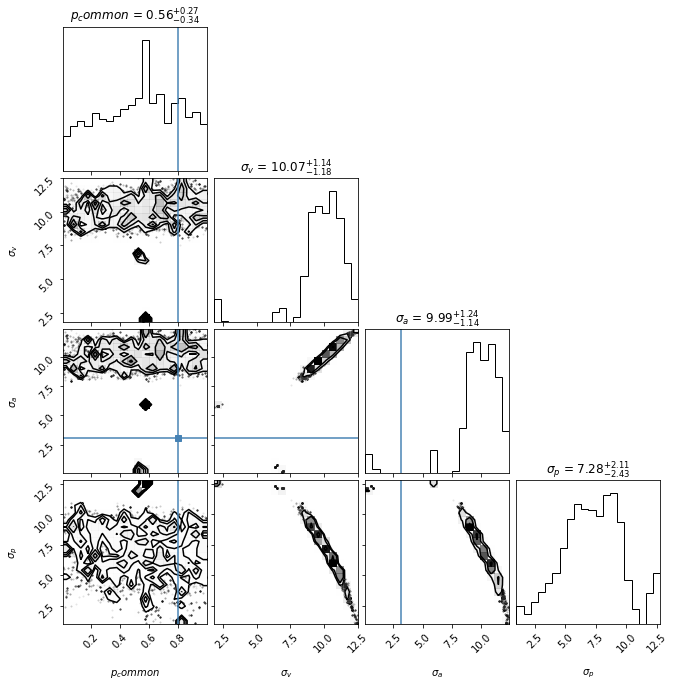

In [17]:
flat_samples = sampler2.get_chain(discard=100, flat=True)
plot.plot_corner(flat_samples, ['$p_common$', '$\sigma_v$', '$\sigma_a$', '$\sigma_p$'], true_values)

parameter_estimates = np.mean(sampler2.get_chain(discard=100), axis=(1,0))
print('Parameter estimates using MCMC sampling for 2 subjects: \n \
p_common = %.3f \n \
sigma_v = %.3f \n \
sigma_a = %.3f \n \
sigma_p = %.3f'%(parameter_estimates[0], parameter_estimates[1], parameter_estimates[2], parameter_estimates[3]))